In [1]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [2]:
#methods(add_genotypes)

In [2]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling JWAS [c9a035f4-d403-5e6b-8649-6be755bc4798]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Complete_EXP_Health_WFI.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :QNurPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [4]:
model_equations = "Health_Score1 = intercept + Batch  + EntryAge + QNurPenBatch + SowID"
R=0.286093
model=build_model(model_equations,R);

In [5]:
set_covariate(model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [6]:
G1=0.290172E-01 
set_random(model,"QNurPenBatch",G1)

In [7]:
G2=0.172039E-01
set_random(model,"SowID",G2)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 24.357974 seconds (37.77 k allocations: 10.393 GiB, 0.10% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [9]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [10]:
G3=0.532963E-01
@time add_genotypes(model,M,G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
 14.624996 seconds (6.90 M allocations: 15.936 GiB, 1.27% gc time)


In [11]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999, 
    estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0726 in the row 685 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0727 in the row 686 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0728 in the row 687 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0729 in the row 688 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0730 in the row 689 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0731 in the row 690 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0732 in the row 691 are missing. This record is deleted.
Phenotypes for all traits included in the model for ind

running MCMC for BayesB...100%|█████████████████████████| Time: 7:03:50




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


25471.574281 seconds (90.57 G allocations: 2.078 TiB, 1.20% gc time)


Dict{Any,Any} with 8 entries:
  "marker effects"          => 435172×5 DataFrame. Omitted printing of 1 column…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 1909×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…
  "EBV_Health_Score1"       => 3205×3 DataFrame…

In [12]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Health_Score1
,Int64,Float64
1,1,0.155781
2,2,0.202306
3,3,0.178823
4,4,0.185364
5,5,0.166365
6,6,0.156389
7,7,0.186447
8,8,0.187286
9,9,0.206505


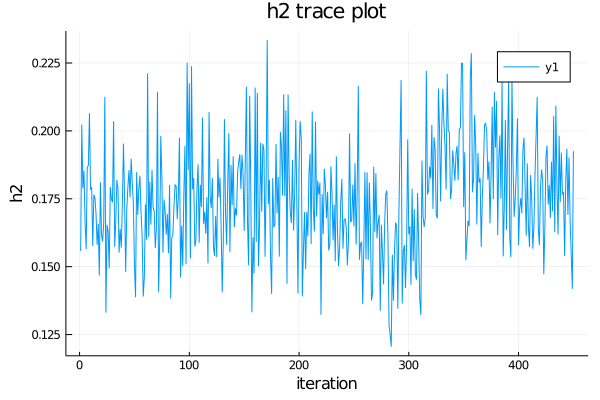

In [13]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [3]:
@time outB,winVarProps = GWAS("MCMC_samples_marker_effects_Health_Score1.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
   M;header=true,window_size="0.25 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:42:06


BoundsError: BoundsError: attempt to access (9375×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 3587   │ 6      │ 102500000 │ 102750000 │ 102500615 │ 102744479 │ 50     │ 0.000239381    │ 0.00035065  │ 1.16     │ 0.5        │ 0.5       │
│ 2    │ 1     │ 8264   │ 16     │ 500000    │ 750000    │ 501896    │ 744902    │ 59     │ 0.000304886    │ 0.000491092 │ 1.43     │ 0.457778   │ 0.478889  │
│ 3    │ 1     │ 8641   │ 17     │ 14750000  │ 15000000  │ 14761997  │ 14971038  │ 29     │ 0.00124262     │ 0.00191768  │ 5.83     │ 0.308889   │ 0.422222  │
│ 4    │ 1     │ 7015   │ 13     │ 178750000 │ 179000000 │ 178750658 │ 178995658 │ 59     │ 0.000110485    │ 0.000265227 │ 0.55     │ 0.26       │ 0.381667  │
│ 5    │ 1     │ 8263   │ 16     │ 250000    │ 500000    │ 251751    │ 497140    │ 48     │ 0.000131792    │ 0.000334396 │ 0.65     │ 0.233333   │ 0.352     │
│ 6    │ 1     │ 8265   │ 16     │ 750000    │ 1000000   │ 751533    │ 992635    │ 45     │ 0.000101856    │ 0.000273344 │ 0.5      │ 0.2        │ 0.326667  │
│ 7    │ 1     │ 3308   │ 6      │ 32250000  │ 32500000  │ 32252185  │ 32492699  │ 65     │ 6.11718e-5     │ 0.000173169 │ 0.3      │ 0.197778   │ 0.308254  │
│ 8    │ 1     │ 3764   │ 6      │ 147000000 │ 147250000 │ 147000268 │ 147248914 │ 60     │ 7.12215e-5     │ 0.000201268 │ 0.35     │ 0.193333   │ 0.293889  │
│ 9    │ 1     │ 7229   │ 14     │ 23750000  │ 24000000  │ 23750189  │ 23996549  │ 66     │ 6.5399e-5      │ 0.000221852 │ 0.31     │ 0.171111   │ 0.280247  │
│ 10   │ 1     │ 1145   │ 2      │ 12000000  │ 12250000  │ 12006992  │ 12248218  │ 39     │ 7.29128e-5     │ 0.000214099 │ 0.35     │ 0.166667   │ 0.268889  │
│ 11   │ 1     │ 7011   │ 13     │ 177750000 │ 178000000 │ 177753186 │ 177988506 │ 52     │ 6.74644e-5     │ 0.000220799 │ 0.34     │ 0.16       │ 0.25899   │
│ 12   │ 1     │ 153    │ 1      │ 38000000  │ 38250000  │ 38000390  │ 38248038  │ 68     │ 5.2939e-5      │ 0.000172823 │ 0.25     │ 0.148889   │ 0.249815  │
│ 13   │ 1     │ 6220   │ 12     │ 41250000  │ 41500000  │ 41253777  │ 41499183  │ 89     │ 2.7351e-5      │ 9.24818e-5  │ 0.14     │ 0.142222   │ 0.241538  │
│ 14   │ 1     │ 4284   │ 7      │ 106000000 │ 106250000 │ 106008255 │ 106249187 │ 50     │ 3.0201e-5      │ 0.00010523  │ 0.15     │ 0.14       │ 0.234286  │
│ 15   │ 1     │ 4978   │ 9      │ 18500000  │ 18750000  │ 18501577  │ 18746897  │ 58     │ 4.78915e-5     │ 0.000168386 │ 0.23     │ 0.14       │ 0.228     │
│ 16   │ 1     │ 3585   │ 6      │ 102000000 │ 102250000 │ 102001293 │ 102249860 │ 57     │ 5.85799e-5     │ 0.000197357 │ 0.29     │ 0.137778   │ 0.222361  │
│ 17   │ 1     │ 8466   │ 16     │ 51000000  │ 51250000  │ 51001388  │ 51245269  │ 45     │ 3.18399e-5     │ 0.000104103 │ 0.16     │ 0.137778   │ 0.217386  │
│ 18   │ 1     │ 2273   │ 4      │ 9250000   │ 9500000   │ 9250836   │ 9497862   │ 75     │ 3.61897e-5     │ 0.000134872 │ 0.18     │ 0.133333   │ 0.212716  │
│ 19   │ 1     │ 4231   │ 7      │ 92750000  │ 93000000  │ 92752038  │ 92992472  │ 65     │ 2.64841e-5     │ 9.4559e-5   │ 0.13     │ 0.133333   │ 0.208538  │
│ 20   │ 1     │ 1598   │ 2      │ 125500000 │ 125750000 │ 125501606 │ 125747052 │ 68     │ 3.3854e-5      │ 0.000127454 │ 0.17     │ 0.131111   │ 0.204667  │
│ 21   │ 1     │ 5355   │ 9      │ 113000000 │ 113250000 │ 113000142 │ 113246501 │ 58     │ 3.29403e-5     │ 0.000128331 │ 0.16     │ 0.128889   │ 0.201058  │
│ 22   │ 1     │ 5666   │ 10     │ 51250000  │ 51500000  │ 51253190  │ 51499334  │ 60     │ 3.32895e-5     │ 0.000119456 │ 0.16     │ 0.128889   │ 0.197778  │
│ 23   │ 1     │ 1647   │ 2      │ 137750000 │ 138000000 │ 137750935 │ 137999503 │ 77     │ 2.27082e-5     │ 8.9123e-5   │ 0.11     │ 0.126667   │ 0.194686  │
│ 24   │ 1     │ 7013   │ 13     │ 178250000 │ 178500000 │ 178251384 │ 178499455 │ 63     │ 3.71117e-5     │ 0.000132166 │ 0.19     │ 0.126667   │ 0.191852  │
│ 25   │ 1     │ 5145   │ 9      │ 60250000  │ 60500000  │ 60250957  │ 60491999  │ 66     │ 3.06334e-5     │ 0.000116401 │ 0.15     │ 0.124444   │ 0.189156  │
│ 26   │ 1     │ 4973   │ 9      │ 17250000  │ 17500000  │ 17251776  │ 17499612  │ 59     │ 2.89001e-5     │ 0.000105273 │ 0.14     │ 0.122222   │ 0.186581  │
│ 27   │ 1     │ 1060   │ 1      │ 265000000 │ 265250000 │ 265001354 │ 265239928 │ 34     │ 6.81454e-5     │ 0.000212802 │ 0.34     │ 0.12       │ 0.184115  │
│ 28   │ 1     │ 3199   │ 6      │ 5000000   │ 5250000   │ 5006887   │ 5245916   │ 75     │ 4.56783e-5     │ 0.000172752 │ 0.22     │ 0.12       │ 0.181825  │
│ 29   │ 1     │ 1745   │ 3      │ 10250000  │ 10500000  │ 10252222  │ 10496820  │ 44     │ 2.71949e-5     │ 0.000116465 │ 0.13     │ 0.117778   │ 0.179617  │
│ 30   │ 1     │ 4437   │ 8      │ 22250000  │ 22500000  │ 22251239  │ 22499000  │ 59     │ 2.42586e-5     │ 9.76064e-5  │ 0.12     │ 0.115556   │ 0.177481  │
│ 31   │ 1     │ 8401   │ 16     │ 34750000  │ 35000000  │ 34752507  │ 34993549  │ 55     │ 3.7044e-5      │ 0.000142471 │ 0.18     │ 0.115556   │ 0.175484  │
│ 32   │ 1     │ 2173   │ 3      │ 117250000 │ 117500000 │ 117252698 │ 117498219 │ 63     │ 2.12298e-5     │ 7.82965e-5  │ 0.1      │ 0.108889   │ 0.173403  │
│ 33   │ 1     │ 3120   │ 5      │ 90000000  │ 90250000  │ 90013977  │ 90248754  │ 56     │ 2.18012e-5     │ 7.84653e-5  │ 0.1      │ 0.108889   │ 0.171448  │
│ 34   │ 1     │ 8710   │ 17     │ 32000000  │ 32250000  │ 32000858  │ 32245574  │ 62     │ 2.6795e-5      │ 0.000110009 │ 0.13     │ 0.108889   │ 0.169608  │
│ 35   │ 1     │ 884    │ 1      │ 221000000 │ 221250000 │ 221013400 │ 221247950 │ 64     │ 1.90528e-5     │ 7.43464e-5  │ 0.09     │ 0.106667   │ 0.16781   │
│ 36   │ 1     │ 4459   │ 8      │ 27750000  │ 28000000  │ 27751754  │ 27999820  │ 60     │ 3.66564e-5     │ 0.000157892 │ 0.17     │ 0.106667   │ 0.166111  │
│ 37   │ 1     │ 3279   │ 6      │ 25000000  │ 25250000  │ 25001451  │ 25249390  │ 61     │ 2.29946e-5     │ 0.000106823 │ 0.11     │ 0.104444   │ 0.164444  │
│ 38   │ 1     │ 3586   │ 6      │ 102250000 │ 102500000 │ 102252262 │ 102498384 │ 51     │ 3.61528e-5     │ 0.000141959 │ 0.18     │ 0.104444   │ 0.162865  │
│ 39   │ 1     │ 7014   │ 13     │ 178500000 │ 178750000 │ 178506113 │ 178746838 │ 60     │ 2.54851e-5     │ 0.000109887 │ 0.13     │ 0.104444   │ 0.161368  │
│ 40   │ 1     │ 7732   │ 15     │ 7750000   │ 8000000   │ 7757067   │ 7957037   │ 52     │ 1.96689e-5     │ 7.15778e-5  │ 0.1      │ 0.104444   │ 0.159944  │
│ 41   │ 1     │ 3016   │ 5      │ 64000000  │ 64250000  │ 64006730  │ 64242164  │ 48     │ 2.77987e-5     │ 0.000117176 │ 0.13     │ 0.102222   │ 0.158537  │
│ 42   │ 1     │ 3118   │ 5      │ 89500000  │ 89750000  │ 89502859  │ 89735476  │ 57     │ 4.33753e-5     │ 0.000165853 │ 0.21     │ 0.1        │ 0.157143  │
│ 43   │ 1     │ 3763   │ 6      │ 146750000 │ 147000000 │ 146782297 │ 146997249 │ 50     │ 2.63902e-5     │ 0.000111517 │ 0.13     │ 0.1        │ 0.155814  │
│ 44   │ 1     │ 4913   │ 9      │ 2250000   │ 2500000   │ 2252059   │ 2498582   │ 79     │ 2.99938e-5     │ 0.000126052 │ 0.14     │ 0.1        │ 0.154545  │
│ 45   │ 1     │ 2804   │ 5      │ 11000000  │ 11250000  │ 11001667  │ 11248994  │ 69     │ 2.72793e-5     │ 0.000125654 │ 0.14     │ 0.0977778  │ 0.153284  │
│ 46   │ 1     │ 4427   │ 8      │ 19750000  │ 20000000  │ 19750896  │ 19996073  │ 68     │ 1.74328e-5     │ 7.08344e-5  │ 0.09     │ 0.0977778  │ 0.152077  │
│ 47   │ 1     │ 1170   │ 2      │ 18250000  │ 18500000  │ 18250655  │ 18499249  │ 69     │ 1.96528e-5     │ 8.72577e-5  │ 0.1      │ 0.0955556  │ 0.150875  │
│ 48   │ 1     │ 4046   │ 7      │ 46500000  │ 46750000  │ 46502537  │ 46748999  │ 64     │ 1.34449e-5     │ 5.39668e-5  │ 0.07     │ 0.0955556  │ 0.149722  │
│ 49   │ 1     │ 5402   │ 9      │ 124750000 │ 125000000 │ 124751476 │ 124991294 │ 59     │ 2.34467e-5     │ 0.000101245 │ 0.12     │ 0.0955556  │ 0.148617  │
│ 50   │ 1     │ 3017   │ 5      │ 64250000  │ 64500000  │ 64250091  │ 64495945  │ 59     │ 2.36236e-5     │ 9.722e-5    │ 0.12     │ 0.0911111  │ 0.147467  │
│ 51   │ 1     │ 3520   │ 6      │ 85750000  │ 86000000  │ 85750742  │ 85997279  │ 57     │ 3.67923e-5     │ 0.000177317 │ 0.17     │ 0.0911111  │ 0.146362  │
│ 52   │ 1     │ 3723   │ 6      │ 136750000 │ 137000000 │ 136751669 │ 136999743 │ 73     │ 2.01753e-5     │ 9.3634e-5   │ 0.1      │ 0.0911111  │ 0.145299  │
│ 53   │ 1     │ 4889   │ 8      │ 135250000 │ 135500000 │ 135250437 │ 135497793 │ 62     │ 1.67844e-5     │ 7.64079e-5  │ 0.08     │ 0.0911111  │ 0.144277  │
│ 54   │ 1     │ 8217   │ 15     │ 129250000 │ 129500000 │ 129251471 │ 129494746 │ 66     │ 1.21083e-5     │ 5.14231e-5  │ 0.06     │ 0.0911111  │ 0.143292  │
│ 55   │ 1     │ 1155   │ 2      │ 14500000  │ 14750000  │ 14501068  │ 14749556  │ 60     │ 1.75803e-5     │ 7.95446e-5  │ 0.09     │ 0.0888889  │ 0.142303  │
│ 56   │ 1     │ 3203   │ 6      │ 6000000   │ 6250000   │ 6004854   │ 6237466   │ 53     │ 1.99486e-5     │ 8.80068e-5  │ 0.1      │ 0.0888889  │ 0.141349  │
│ 57   │ 1     │ 3734   │ 6      │ 139500000 │ 139750000 │ 139510492 │ 139747509 │ 31     │ 1.62366e-5     │ 6.60268e-5  │ 0.08     │ 0.0888889  │ 0.140429  │
│ 58   │ 1     │ 3797   │ 6      │ 155250000 │ 155500000 │ 155251136 │ 155494166 │ 72     │ 1.21383e-5     │ 5.04331e-5  │ 0.06     │ 0.0888889  │ 0.13954   │
│ 59   │ 1     │ 4008   │ 7      │ 37000000  │ 37250000  │ 37014607  │ 37233323  │ 34     │ 2.20388e-5     │ 9.84659e-5  │ 0.11     │ 0.0888889  │ 0.138682  │
│ 60   │ 1     │ 4917   │ 9      │ 3250000   │ 3500000   │ 3251639   │ 3491283   │ 66     │ 1.71832e-5     │ 9.23011e-5  │ 0.08     │ 0.0888889  │ 0.137852  │
│ 61   │ 1     │ 7241   │ 14     │ 26750000  │ 27000000  │ 26753136  │ 26988155  │ 44     │ 2.97995e-5     │ 0.000143458 │ 0.14     │ 0.0888889  │ 0.137049  │
│ 62   │ 1     │ 3564   │ 6      │ 96750000  │ 97000000  │ 96751984  │ 96996882  │ 57     │ 1.50997e-5     │ 6.07245e-5  │ 0.08     │ 0.0866667  │ 0.136237  │
│ 63   │ 1     │ 3582   │ 6      │ 101250000 │ 101500000 │ 101251549 │ 101495158 │ 57     │ 2.55918e-5     │ 0.000119553 │ 0.13     │ 0.0866667  │ 0.13545   │
│ 64   │ 1     │ 7237   │ 14     │ 25750000  │ 26000000  │ 25754410  │ 25989860  │ 57     │ 3.0204e-5      │ 0.000139881 │ 0.15     │ 0.0866667  │ 0.134687  │
│ 65   │ 1     │ 2188   │ 3      │ 121000000 │ 121250000 │ 121001446 │ 121246450 │ 64     │ 9.59227e-6     │ 3.91305e-5  │ 0.05     │ 0.0844444  │ 0.133915  │
│ 66   │ 1     │ 2805   │ 5      │ 11250000  │ 11500000  │ 11252476  │ 11453488  │ 54     │ 1.44303e-5     │ 6.56822e-5  │ 0.07     │ 0.0844444  │ 0.133165  │
│ 67   │ 1     │ 7262   │ 14     │ 32000000  │ 32250000  │ 32001432  │ 32248388  │ 64     │ 9.91256e-6     │ 4.84636e-5  │ 0.05     │ 0.0844444  │ 0.132438  │
│ 68   │ 1     │ 2225   │ 3      │ 130250000 │ 130500000 │ 130252331 │ 130498855 │ 54     │ 1.61158e-5     │ 7.96753e-5  │ 0.08     │ 0.0822222  │ 0.131699  │
│ 69   │ 1     │ 3109   │ 5      │ 87250000  │ 87500000  │ 87255773  │ 87495404  │ 56     │ 2.54197e-5     │ 0.000116865 │ 0.12     │ 0.0822222  │ 0.130982  │
│ 70   │ 1     │ 3765   │ 6      │ 147250000 │ 147500000 │ 147252270 │ 147498631 │ 57     │ 1.70397e-5     │ 9.16249e-5  │ 0.08     │ 0.0822222  │ 0.130286  │
│ 71   │ 1     │ 4389   │ 8      │ 10250000  │ 10500000  │ 10252061  │ 10498605  │ 61     │ 1.33695e-5     │ 5.70015e-5  │ 0.07     │ 0.0822222  │ 0.129609  │
│ 72   │ 1     │ 5660   │ 10     │ 49750000  │ 50000000  │ 49751869  │ 49998920  │ 57     │ 1.62288e-5     │ 8.11345e-5  │ 0.07     │ 0.0822222  │ 0.128951  │
│ 73   │ 1     │ 7349   │ 14     │ 53750000  │ 54000000  │ 53752180  │ 53999287  │ 50     │ 2.00282e-5     │ 9.80154e-5  │ 0.1      │ 0.0822222  │ 0.128311  │
│ 74   │ 1     │ 7924   │ 15     │ 55750000  │ 56000000  │ 55751365  │ 55991031  │ 59     │ 1.47971e-5     │ 6.94455e-5  │ 0.07     │ 0.0822222  │ 0.127688  │
│ 75   │ 1     │ 2832   │ 5      │ 18000000  │ 18250000  │ 18001026  │ 18244738  │ 63     │ 1.94159e-5     │ 9.40356e-5  │ 0.09     │ 0.08       │ 0.127052  │
│ 76   │ 1     │ 6117   │ 12     │ 15500000  │ 15750000  │ 15501252  │ 15664072  │ 43     │ 1.35319e-5     │ 6.67589e-5  │ 0.07     │ 0.08       │ 0.126433  │
│ 77   │ 1     │ 7095   │ 13     │ 198750000 │ 199000000 │ 198752983 │ 198998586 │ 49     │ 1.63051e-5     │ 7.44252e-5  │ 0.08     │ 0.08       │ 0.12583   │
│ 78   │ 1     │ 7734   │ 15     │ 8250000   │ 8500000   │ 8252185   │ 8499221   │ 59     │ 1.42362e-5     │ 6.65996e-5  │ 0.07     │ 0.08       │ 0.125242  │
│ 79   │ 1     │ 1746   │ 3      │ 10500000  │ 10750000  │ 10500582  │ 10749527  │ 63     │ 1.15779e-5     │ 5.94743e-5  │ 0.05     │ 0.0777778  │ 0.124641  │
│ 80   │ 1     │ 4230   │ 7      │ 92500000  │ 92750000  │ 92500500  │ 92746357  │ 43     │ 1.44855e-5     │ 8.31166e-5  │ 0.07     │ 0.0777778  │ 0.124056  │
│ 81   │ 1     │ 4529   │ 8      │ 45250000  │ 45500000  │ 45251546  │ 45495106  │ 48     │ 1.17239e-5     │ 5.19537e-5  │ 0.06     │ 0.0777778  │ 0.123484  │
│ 82   │ 1     │ 6040   │ 11     │ 75500000  │ 75750000  │ 75500204  │ 75738001  │ 64     │ 1.80444e-5     │ 8.71436e-5  │ 0.09     │ 0.0777778  │ 0.122927  │
│ 83   │ 1     │ 6041   │ 11     │ 75750000  │ 76000000  │ 75761047  │ 75998918  │ 62     │ 1.89646e-5     │ 8.53057e-5  │ 0.09     │ 0.0777778  │ 0.122383  │
│ 84   │ 1     │ 6049   │ 11     │ 77750000  │ 78000000  │ 77753002  │ 77992952  │ 66     │ 1.15779e-5     │ 5.35566e-5  │ 0.06     │ 0.0777778  │ 0.121852  │
│ 85   │ 1     │ 9010   │ 18     │ 43750000  │ 44000000  │ 43750102  │ 43999665  │ 74     │ 1.09763e-5     │ 5.11319e-5  │ 0.05     │ 0.0777778  │ 0.121333  │
│ 86   │ 1     │ 1144   │ 2      │ 11750000  │ 12000000  │ 11753026  │ 11996496  │ 68     │ 1.21225e-5     │ 5.80805e-5  │ 0.06     │ 0.0755556  │ 0.120801  │
│ 87   │ 1     │ 1608   │ 2      │ 128000000 │ 128250000 │ 128001588 │ 128247506 │ 69     │ 1.43358e-5     │ 7.11221e-5  │ 0.07     │ 0.0755556  │ 0.120281  │
│ 88   │ 1     │ 2751   │ 4      │ 128750000 │ 129000000 │ 128750655 │ 128996809 │ 75     │ 6.71095e-6     │ 3.18558e-5  │ 0.03     │ 0.0755556  │ 0.119773  │
│ 89   │ 1     │ 4890   │ 8      │ 135500000 │ 135750000 │ 135502562 │ 135747658 │ 83     │ 1.07168e-5     │ 4.80008e-5  │ 0.05     │ 0.0755556  │ 0.119276  │
│ 90   │ 1     │ 5083   │ 9      │ 44750000  │ 45000000  │ 44750691  │ 44960898  │ 57     │ 1.74923e-5     │ 0.000108383 │ 0.08     │ 0.0755556  │ 0.11879   │
│ 91   │ 1     │ 7012   │ 13     │ 178000000 │ 178250000 │ 178001286 │ 178246292 │ 28     │ 2.75389e-5     │ 0.000129783 │ 0.13     │ 0.0755556  │ 0.118315  │
│ 92   │ 1     │ 7371   │ 14     │ 59250000  │ 59500000  │ 59252647  │ 59497467  │ 71     │ 6.67465e-6     │ 2.93067e-5  │ 0.03     │ 0.0755556  │ 0.11785   │
│ 93   │ 1     │ 7679   │ 14     │ 136250000 │ 136500000 │ 136273177 │ 136498841 │ 44     │ 1.61196e-5     │ 0.00010061  │ 0.07     │ 0.0755556  │ 0.117395  │
│ 94   │ 1     │ 2817   │ 5      │ 14250000  │ 14500000  │ 14255605  │ 14499235  │ 74     │ 8.64871e-6     │ 3.91658e-5  │ 0.05     │ 0.0733333  │ 0.116927  │
│ 95   │ 1     │ 3140   │ 5      │ 95000000  │ 95250000  │ 95005622  │ 95249890  │ 49     │ 2.42655e-5     │ 0.000120947 │ 0.12     │ 0.0733333  │ 0.116468  │
│ 96   │ 1     │ 4912   │ 9      │ 2000000   │ 2250000   │ 2001714   │ 2249056   │ 81     │ 1.2707e-5      │ 6.99779e-5  │ 0.06     │ 0.0733333  │ 0.116019  │
│ 97   │ 1     │ 5141   │ 9      │ 59250000  │ 59500000  │ 59253212  │ 59498749  │ 69     │ 1.02037e-5     │ 4.63658e-5  │ 0.05     │ 0.0733333  │ 0.115578  │
│ 98   │ 1     │ 7325   │ 14     │ 47750000  │ 48000000  │ 47750613  │ 47999414  │ 75     │ 1.15928e-5     │ 5.96795e-5  │ 0.06     │ 0.0733333  │ 0.115147  │
│ 99   │ 1     │ 7707   │ 15     │ 1500000   │ 1750000   │ 1501839   │ 1745821   │ 67     │ 1.16602e-5     │ 6.34031e-5  │ 0.06     │ 0.0733333  │ 0.114725  │
│ 100  │ 1     │ 8616   │ 17     │ 8500000   │ 8750000   │ 8502436   │ 8704915   │ 34     │ 1.52604e-5     │ 8.28072e-5  │ 0.07     │ 0.0733333  │ 0.114311  │
│ 101  │ 1     │ 1169   │ 2      │ 18000000  │ 18250000  │ 18002476  │ 18249050  │ 67     │ 1.26971e-5     │ 6.2258e-5   │ 0.06     │ 0.0711111  │ 0.113883  │
│ 102  │ 1     │ 1220   │ 2      │ 30750000  │ 31000000  │ 30751660  │ 30997341  │ 61     │ 8.5045e-6      │ 4.30729e-5  │ 0.04     │ 0.0711111  │ 0.113464  │
│ 103  │ 1     │ 2150   │ 3      │ 111500000 │ 111750000 │ 111501236 │ 111749685 │ 67     │ 1.06548e-5     │ 5.27908e-5  │ 0.05     │ 0.0711111  │ 0.113053  │
│ 104  │ 1     │ 3435   │ 6      │ 64500000  │ 64750000  │ 64501354  │ 64746850  │ 52     │ 1.65051e-5     │ 9.45836e-5  │ 0.08     │ 0.0711111  │ 0.11265   │
│ 105  │ 1     │ 5387   │ 9      │ 121000000 │ 121250000 │ 121012904 │ 121247449 │ 48     │ 1.65918e-5     │ 7.62691e-5  │ 0.08     │ 0.0711111  │ 0.112254  │
│ 106  │ 1     │ 7176   │ 14     │ 10500000  │ 10750000  │ 10500074  │ 10747609  │ 72     │ 9.78706e-6     │ 5.04777e-5  │ 0.05     │ 0.0711111  │ 0.111866  │
│ 107  │ 1     │ 7332   │ 14     │ 49500000  │ 49750000  │ 49501046  │ 49746602  │ 73     │ 9.144e-6       │ 4.51021e-5  │ 0.04     │ 0.0711111  │ 0.111485  │
│ 108  │ 1     │ 3722   │ 6      │ 136500000 │ 136750000 │ 136501415 │ 136744015 │ 62     │ 1.96806e-5     │ 0.000122182 │ 0.09     │ 0.0688889  │ 0.111091  │
│ 109  │ 1     │ 3724   │ 6      │ 137000000 │ 137250000 │ 137003240 │ 137245864 │ 55     │ 1.87771e-5     │ 9.32747e-5  │ 0.09     │ 0.0688889  │ 0.110703  │
│ 110  │ 1     │ 4874   │ 8      │ 131500000 │ 131750000 │ 131502354 │ 131749137 │ 67     │ 1.61094e-5     │ 8.07567e-5  │ 0.07     │ 0.0688889  │ 0.110323  │
│ 111  │ 1     │ 4972   │ 9      │ 17000000  │ 17250000  │ 17003236  │ 17248879  │ 75     │ 1.01536e-5     │ 5.01078e-5  │ 0.05     │ 0.0688889  │ 0.10995   │
│ 112  │ 1     │ 4987   │ 9      │ 20750000  │ 21000000  │ 20752853  │ 20997916  │ 47     │ 9.92859e-6     │ 4.67319e-5  │ 0.05     │ 0.0688889  │ 0.109583  │
│ 113  │ 1     │ 5392   │ 9      │ 122250000 │ 122500000 │ 122250460 │ 122497566 │ 43     │ 1.28119e-5     │ 5.65889e-5  │ 0.06     │ 0.0688889  │ 0.109223  │
│ 114  │ 1     │ 7236   │ 14     │ 25500000  │ 25750000  │ 25501302  │ 25747482  │ 74     │ 1.17129e-5     │ 5.25984e-5  │ 0.06     │ 0.0688889  │ 0.108869  │
│ 115  │ 1     │ 7572   │ 14     │ 109500000 │ 109750000 │ 109501585 │ 109749916 │ 73     │ 1.20965e-5     │ 6.41623e-5  │ 0.06     │ 0.0688889  │ 0.108522  │
│ 116  │ 1     │ 8187   │ 15     │ 121750000 │ 122000000 │ 121761986 │ 121992925 │ 75     │ 1.21087e-5     │ 5.9817e-5   │ 0.06     │ 0.0688889  │ 0.10818   │
│ 117  │ 1     │ 8709   │ 17     │ 31750000  │ 32000000  │ 31756334  │ 31999780  │ 70     │ 1.09281e-5     │ 6.18507e-5  │ 0.05     │ 0.0688889  │ 0.107844  │
│ 118  │ 1     │ 127    │ 1      │ 31500000  │ 31750000  │ 31503055  │ 31749605  │ 68     │ 1.10105e-5     │ 6.44266e-5  │ 0.05     │ 0.0666667  │ 0.107495  │
│ 119  │ 1     │ 1157   │ 2      │ 15000000  │ 15250000  │ 15000499  │ 15240264  │ 51     │ 8.53189e-6     │ 4.50949e-5  │ 0.05     │ 0.0666667  │ 0.107152  │
│ 120  │ 1     │ 1164   │ 2      │ 16750000  │ 17000000  │ 16752843  │ 16999821  │ 70     │ 1.27807e-5     │ 7.23586e-5  │ 0.06     │ 0.0666667  │ 0.106815  │
│ 121  │ 1     │ 1851   │ 3      │ 36750000  │ 37000000  │ 36754857  │ 36996446  │ 56     │ 1.41266e-5     │ 6.93351e-5  │ 0.07     │ 0.0666667  │ 0.106483  │
│ 122  │ 1     │ 2278   │ 4      │ 10500000  │ 10750000  │ 10500307  │ 10749332  │ 53     │ 9.75183e-6     │ 4.91706e-5  │ 0.05     │ 0.0666667  │ 0.106157  │
│ 123  │ 1     │ 3663   │ 6      │ 121500000 │ 121750000 │ 121501056 │ 121749132 │ 73     │ 8.37871e-6     │ 3.79465e-5  │ 0.04     │ 0.0666667  │ 0.105836  │
│ 124  │ 1     │ 4768   │ 8      │ 105000000 │ 105250000 │ 105000579 │ 105247109 │ 70     │ 1.83153e-5     │ 9.42909e-5  │ 0.09     │ 0.0666667  │ 0.10552   │
│ 125  │ 1     │ 5139   │ 9      │ 58750000  │ 59000000  │ 58754612  │ 58994013  │ 68     │ 1.2597e-5      │ 6.57952e-5  │ 0.06     │ 0.0666667  │ 0.105209  │
│ 126  │ 1     │ 5664   │ 10     │ 50750000  │ 51000000  │ 50754901  │ 50996733  │ 70     │ 6.70057e-6     │ 3.05022e-5  │ 0.03     │ 0.0666667  │ 0.104903  │
│ 127  │ 1     │ 6288   │ 12     │ 58250000  │ 58500000  │ 58274359  │ 58497983  │ 63     │ 1.34885e-5     │ 6.61079e-5  │ 0.07     │ 0.0666667  │ 0.104602  │
│ 128  │ 1     │ 7240   │ 14     │ 26500000  │ 26750000  │ 26500183  │ 26746671  │ 74     │ 8.86464e-6     │ 5.23634e-5  │ 0.04     │ 0.0666667  │ 0.104306  │
│ 129  │ 1     │ 7352   │ 14     │ 54500000  │ 54750000  │ 54500038  │ 54749543  │ 66     │ 7.59132e-6     │ 4.02316e-5  │ 0.04     │ 0.0666667  │ 0.104014  │
│ 130  │ 1     │ 1114   │ 2      │ 4250000   │ 4500000   │ 4263924   │ 4499434   │ 66     │ 1.17928e-5     │ 6.62588e-5  │ 0.06     │ 0.0644444  │ 0.103709  │
│ 131  │ 1     │ 1935   │ 3      │ 57750000  │ 58000000  │ 57750531  │ 57997464  │ 69     │ 1.04088e-5     │ 5.41851e-5  │ 0.05     │ 0.0644444  │ 0.10341   │
│ 132  │ 1     │ 2332   │ 4      │ 24000000  │ 24250000  │ 24003588  │ 24238734  │ 56     │ 7.03463e-6     │ 3.60948e-5  │ 0.03     │ 0.0644444  │ 0.103114  │
│ 133  │ 1     │ 2642   │ 4      │ 101500000 │ 101750000 │ 101500328 │ 101748928 │ 66     │ 8.90416e-6     │ 4.52172e-5  │ 0.04     │ 0.0644444  │ 0.102824  │
│ 134  │ 1     │ 2803   │ 5      │ 10750000  │ 11000000  │ 10755285  │ 10999692  │ 72     │ 1.87613e-5     │ 9.3417e-5   │ 0.1      │ 0.0644444  │ 0.102537  │
│ 135  │ 1     │ 3799   │ 6      │ 155750000 │ 156000000 │ 155752099 │ 155999302 │ 73     │ 6.31779e-6     │ 2.91162e-5  │ 0.03     │ 0.0644444  │ 0.102255  │
│ 136  │ 1     │ 4763   │ 8      │ 103750000 │ 104000000 │ 103750341 │ 103996644 │ 59     │ 1.02109e-5     │ 5.61414e-5  │ 0.05     │ 0.0644444  │ 0.101977  │
│ 137  │ 1     │ 5328   │ 9      │ 106250000 │ 106500000 │ 106255329 │ 106495082 │ 55     │ 8.895e-6       │ 4.07457e-5  │ 0.04     │ 0.0644444  │ 0.101703  │
│ 138  │ 1     │ 7180   │ 14     │ 11500000  │ 11750000  │ 11507217  │ 11747593  │ 66     │ 8.98964e-6     │ 5.08594e-5  │ 0.05     │ 0.0644444  │ 0.101433  │
│ 139  │ 1     │ 7239   │ 14     │ 26250000  │ 26500000  │ 26253649  │ 26498131  │ 60     │ 7.84103e-6     │ 4.89462e-5  │ 0.04     │ 0.0644444  │ 0.101167  │
│ 140  │ 1     │ 7348   │ 14     │ 53500000  │ 53750000  │ 53505622  │ 53749252  │ 59     │ 9.46923e-6     │ 4.52417e-5  │ 0.05     │ 0.0644444  │ 0.100905  │
│ 141  │ 1     │ 7666   │ 14     │ 133000000 │ 133250000 │ 133004109 │ 133248815 │ 77     │ 9.74601e-6     │ 5.39648e-5  │ 0.05     │ 0.0644444  │ 0.100646  │
│ 142  │ 1     │ 133    │ 1      │ 33000000  │ 33250000  │ 33002217  │ 33249640  │ 81     │ 9.57149e-6     │ 4.39444e-5  │ 0.05     │ 0.0622222  │ 0.100376  │
│ 143  │ 1     │ 1038   │ 1      │ 259500000 │ 259750000 │ 259500279 │ 259749780 │ 72     │ 7.282e-6       │ 4.00562e-5  │ 0.04     │ 0.0622222  │ 0.100109  │
│ 144  │ 1     │ 1958   │ 3      │ 63500000  │ 63750000  │ 63505435  │ 63748466  │ 74     │ 1.11882e-5     │ 5.79221e-5  │ 0.05     │ 0.0622222  │ 0.0998457 │
│ 145  │ 1     │ 2224   │ 3      │ 130000000 │ 130250000 │ 130000414 │ 130248627 │ 59     │ 9.537e-6       │ 4.83896e-5  │ 0.05     │ 0.0622222  │ 0.0995862 │
│ 146  │ 1     │ 2283   │ 4      │ 11750000  │ 12000000  │ 11750927  │ 11998453  │ 73     │ 1.21639e-5     │ 7.23863e-5  │ 0.06     │ 0.0622222  │ 0.0993303 │
│ 147  │ 1     │ 2818   │ 5      │ 14500000  │ 14750000  │ 14530203  │ 14743291  │ 66     │ 7.78125e-6     │ 4.27237e-5  │ 0.04     │ 0.0622222  │ 0.0990779 │
│ 148  │ 1     │ 3497   │ 6      │ 80000000  │ 80250000  │ 80013070  │ 80247868  │ 58     │ 1.0217e-5      │ 6.35677e-5  │ 0.05     │ 0.0622222  │ 0.0988288 │
│ 149  │ 1     │ 4329   │ 7      │ 117250000 │ 117500000 │ 117250109 │ 117497243 │ 58     │ 1.24148e-5     │ 7.09687e-5  │ 0.06     │ 0.0622222  │ 0.0985831 │
│ 150  │ 1     │ 4363   │ 8      │ 3750000   │ 4000000   │ 3750757   │ 3999807   │ 68     │ 9.43e-6        │ 6.24569e-5  │ 0.05     │ 0.0622222  │ 0.0983407 │
│ 151  │ 1     │ 5462   │ 10     │ 250000    │ 500000    │ 251423    │ 491187    │ 59     │ 9.94273e-6     │ 4.95971e-5  │ 0.05     │ 0.0622222  │ 0.0981015 │
│ 152  │ 1     │ 6352   │ 13     │ 12500000  │ 12750000  │ 12502458  │ 12748539  │ 54     │ 7.6197e-6      │ 3.99801e-5  │ 0.04     │ 0.0622222  │ 0.0978655 │
│ 153  │ 1     │ 6380   │ 13     │ 19500000  │ 19750000  │ 19508025  │ 19747120  │ 62     │ 9.07713e-6     │ 5.34652e-5  │ 0.05     │ 0.0622222  │ 0.0976325 │
│ 154  │ 1     │ 7175   │ 14     │ 10250000  │ 10500000  │ 10254158  │ 10494509  │ 67     │ 1.09034e-5     │ 5.82248e-5  │ 0.05     │ 0.0622222  │ 0.0974026 │
│ 155  │ 1     │ 7704   │ 15     │ 750000    │ 1000000   │ 757192    │ 998446    │ 51     │ 9.60353e-6     │ 4.83638e-5  │ 0.05     │ 0.0622222  │ 0.0971756 │
│ 156  │ 1     │ 7821   │ 15     │ 30000000  │ 30250000  │ 30001490  │ 30247873  │ 71     │ 1.00634e-5     │ 5.47219e-5  │ 0.05     │ 0.0622222  │ 0.0969516 │
│ 157  │ 1     │ 8801   │ 17     │ 54750000  │ 55000000  │ 54753371  │ 54999214  │ 76     │ 1.21148e-5     │ 6.13464e-5  │ 0.06     │ 0.0622222  │ 0.0967304 │
│ 158  │ 1     │ 8884   │ 18     │ 12250000  │ 12500000  │ 12251953  │ 12496210  │ 57     │ 1.21096e-5     │ 7.25266e-5  │ 0.06     │ 0.0622222  │ 0.096512  │
│ 159  │ 1     │ 2272   │ 4      │ 9000000   │ 9250000   │ 9002400   │ 9249634   │ 52     │ 1.00488e-5     │ 5.33022e-5  │ 0.05     │ 0.06       │ 0.0962823 │
│ 160  │ 1     │ 2276   │ 4      │ 10000000  │ 10250000  │ 10001816  │ 10248914  │ 78     │ 1.90073e-5     │ 0.000110753 │ 0.09     │ 0.06       │ 0.0960556 │
│ 161  │ 1     │ 2479   │ 4      │ 60750000  │ 61000000  │ 60750431  │ 60988280  │ 61     │ 5.82379e-6     │ 2.76799e-5  │ 0.03     │ 0.06       │ 0.0958316 │
│ 162  │ 1     │ 3277   │ 6      │ 24500000  │ 24750000  │ 24501610  │ 24747669  │ 71     │ 9.78353e-6     │ 5.42983e-5  │ 0.05     │ 0.06       │ 0.0956104 │
│ 163  │ 1     │ 4355   │ 8      │ 1750000   │ 2000000   │ 1750351   │ 1997315   │ 66     │ 7.47243e-6     │ 4.12157e-5  │ 0.04     │ 0.06       │ 0.095392  │
│ 164  │ 1     │ 4845   │ 8      │ 124250000 │ 124500000 │ 124252802 │ 124496161 │ 67     │ 8.57452e-6     │ 4.76394e-5  │ 0.04     │ 0.06       │ 0.0951762 │
│ 165  │ 1     │ 4975   │ 9      │ 17750000  │ 18000000  │ 17751960  │ 17996542  │ 67     │ 1.31451e-5     │ 6.85798e-5  │ 0.06     │ 0.06       │ 0.094963  │
│ 166  │ 1     │ 6292   │ 12     │ 59250000  │ 59500000  │ 59254583  │ 59496739  │ 64     │ 4.92156e-6     │ 2.45396e-5  │ 0.02     │ 0.06       │ 0.0947523 │
│ 167  │ 1     │ 6346   │ 13     │ 11000000  │ 11250000  │ 11001967  │ 11249235  │ 69     │ 1.14728e-5     │ 6.4534e-5   │ 0.06     │ 0.06       │ 0.0945442 │
│ 168  │ 1     │ 7377   │ 14     │ 60750000  │ 61000000  │ 60768888  │ 60999211  │ 44     │ 8.36618e-6     │ 4.11717e-5  │ 0.04     │ 0.06       │ 0.0943386 │
│ 169  │ 1     │ 7588   │ 14     │ 113500000 │ 113750000 │ 113502388 │ 113745140 │ 53     │ 1.41777e-5     │ 8.28219e-5  │ 0.07     │ 0.06       │ 0.0941354 │
│ 170  │ 1     │ 7756   │ 15     │ 13750000  │ 14000000  │ 13752834  │ 13990711  │ 69     │ 8.02503e-6     │ 4.23971e-5  │ 0.04     │ 0.06       │ 0.0939346 │
│ 171  │ 1     │ 7757   │ 15     │ 14000000  │ 14250000  │ 14013036  │ 14246431  │ 61     │ 8.88971e-6     │ 4.90468e-5  │ 0.04     │ 0.06       │ 0.0937362 │
│ 172  │ 1     │ 8283   │ 16     │ 5250000   │ 5500000   │ 5251606   │ 5497710   │ 80     │ 6.56471e-6     │ 3.96027e-5  │ 0.03     │ 0.06       │ 0.0935401 │
│ 173  │ 1     │ 8606   │ 17     │ 6000000   │ 6250000   │ 6002142   │ 6235189   │ 63     │ 9.55696e-6     │ 5.22935e-5  │ 0.05     │ 0.06       │ 0.0933462 │
│ 174  │ 1     │ 77     │ 1      │ 19000000  │ 19250000  │ 19001152  │ 19244926  │ 50     │ 5.70466e-6     │ 3.02531e-5  │ 0.03     │ 0.0577778  │ 0.0931418 │
│ 175  │ 1     │ 104    │ 1      │ 25750000  │ 26000000  │ 25750298  │ 25998814  │ 78     │ 6.06382e-6     │ 3.04379e-5  │ 0.03     │ 0.0577778  │ 0.0929397 │
│ 176  │ 1     │ 201    │ 1      │ 50000000  │ 50250000  │ 50004551  │ 50248941  │ 66     │ 1.35012e-5     │ 8.77939e-5  │ 0.07     │ 0.0577778  │ 0.0927399 │
│ 177  │ 1     │ 1140   │ 2      │ 10750000  │ 11000000  │ 10752126  │ 10975975  │ 60     │ 8.75378e-6     │ 4.70733e-5  │ 0.04     │ 0.0577778  │ 0.0925424 │
│ 178  │ 1     │ 1195   │ 2      │ 24500000  │ 24750000  │ 24502660  │ 24745607  │ 60     │ 5.62484e-6     │ 2.75327e-5  │ 0.03     │ 0.0577778  │ 0.0923471 │
│ 179  │ 1     │ 3656   │ 6      │ 119750000 │ 120000000 │ 119750533 │ 119996184 │ 55     │ 7.8654e-6      │ 4.17306e-5  │ 0.04     │ 0.0577778  │ 0.0921539 │
│ 180  │ 1     │ 3829   │ 6      │ 163250000 │ 163500000 │ 163250236 │ 163499239 │ 63     │ 7.66619e-6     │ 3.81955e-5  │ 0.04     │ 0.0577778  │ 0.091963  │
│ 181  │ 1     │ 3870   │ 7      │ 2500000   │ 2750000   │ 2504298   │ 2749878   │ 76     │ 4.22785e-6     │ 2.07128e-5  │ 0.02     │ 0.0577778  │ 0.0917741 │
│ 182  │ 1     │ 3940   │ 7      │ 20000000  │ 20250000  │ 20001975  │ 20249027  │ 78     │ 1.17579e-5     │ 6.39806e-5  │ 0.06     │ 0.0577778  │ 0.0915873 │
│ 183  │ 1     │ 3968   │ 7      │ 27000000  │ 27250000  │ 27000204  │ 27249064  │ 68     │ 6.78854e-6     │ 3.35364e-5  │ 0.03     │ 0.0577778  │ 0.0914026 │
│ 184  │ 1     │ 4374   │ 8      │ 6500000   │ 6750000   │ 6503224   │ 6743871   │ 54     │ 1.45198e-5     │ 8.42314e-5  │ 0.07     │ 0.0577778  │ 0.0912198 │
│ 185  │ 1     │ 4527   │ 8      │ 44750000  │ 45000000  │ 44877633  │ 44999262  │ 8      │ 1.81676e-5     │ 0.000109012 │ 0.09     │ 0.0577778  │ 0.091039  │
│ 186  │ 1     │ 4894   │ 8      │ 136500000 │ 136750000 │ 136501036 │ 136748773 │ 81     │ 7.12943e-6     │ 3.91885e-5  │ 0.04     │ 0.0577778  │ 0.0908602 │
│ 187  │ 1     │ 5475   │ 10     │ 3500000   │ 3750000   │ 3501841   │ 3748064   │ 59     │ 7.8153e-6      │ 3.6062e-5   │ 0.04     │ 0.0577778  │ 0.0906833 │
│ 188  │ 1     │ 5651   │ 10     │ 47500000  │ 47750000  │ 47500940  │ 47748243  │ 74     │ 9.1477e-6      │ 5.30039e-5  │ 0.04     │ 0.0577778  │ 0.0905083 │
│ 189  │ 1     │ 5731   │ 10     │ 67500000  │ 67750000  │ 67501019  │ 67745922  │ 78     │ 7.91608e-6     │ 4.54602e-5  │ 0.04     │ 0.0577778  │ 0.0903351 │
│ 190  │ 1     │ 5989   │ 11     │ 62750000  │ 63000000  │ 62752442  │ 62999512  │ 60     │ 9.84955e-6     │ 6.11133e-5  │ 0.05     │ 0.0577778  │ 0.0901637 │
│ 191  │ 1     │ 6339   │ 13     │ 9250000   │ 9500000   │ 9252137   │ 9496134   │ 61     │ 4.97908e-6     │ 2.51749e-5  │ 0.02     │ 0.0577778  │ 0.0899942 │
│ 192  │ 1     │ 7376   │ 14     │ 60500000  │ 60750000  │ 60501983  │ 60746233  │ 69     │ 1.26723e-5     │ 6.92914e-5  │ 0.06     │ 0.0577778  │ 0.0898264 │
│ 193  │ 1     │ 37     │ 1      │ 9000000   │ 9250000   │ 9009759   │ 9249958   │ 78     │ 7.04216e-6     │ 3.42943e-5  │ 0.04     │ 0.0555556  │ 0.0896488 │
│ 194  │ 1     │ 151    │ 1      │ 37500000  │ 37750000  │ 37500545  │ 37748484  │ 70     │ 8.87847e-6     │ 6.37974e-5  │ 0.04     │ 0.0555556  │ 0.0894731 │
│ 195  │ 1     │ 426    │ 1      │ 106500000 │ 106750000 │ 106503740 │ 106745679 │ 57     │ 9.14965e-6     │ 5.00187e-5  │ 0.04     │ 0.0555556  │ 0.0892991 │
│ 196  │ 1     │ 1825   │ 3      │ 30250000  │ 30500000  │ 30252681  │ 30491655  │ 54     │ 6.32114e-6     │ 3.46607e-5  │ 0.03     │ 0.0555556  │ 0.089127  │
│ 197  │ 1     │ 3164   │ 5      │ 101000000 │ 101250000 │ 101034865 │ 101243967 │ 59     │ 8.22065e-6     │ 5.5745e-5   │ 0.04     │ 0.0555556  │ 0.0889566 │
│ 198  │ 1     │ 3198   │ 6      │ 4750000   │ 5000000   │ 4752301   │ 4998954   │ 69     │ 8.17058e-6     │ 4.49753e-5  │ 0.04     │ 0.0555556  │ 0.0887879 │
│ 199  │ 1     │ 3278   │ 6      │ 24750000  │ 25000000  │ 24750382  │ 24998378  │ 52     │ 6.36195e-6     │ 3.59096e-5  │ 0.03     │ 0.0555556  │ 0.0886209 │
│ 200  │ 1     │ 3610   │ 6      │ 108250000 │ 108500000 │ 108250465 │ 108493817 │ 69     │ 6.3383e-6      │ 3.38842e-5  │ 0.03     │ 0.0555556  │ 0.0884556 │
│ 201  │ 1     │ 3865   │ 7      │ 1250000   │ 1500000   │ 1266094   │ 1499398   │ 46     │ 7.47243e-6     │ 4.0404e-5   │ 0.04     │ 0.0555556  │ 0.0882919 │
│ 202  │ 1     │ 4488   │ 8      │ 35000000  │ 35250000  │ 35006256  │ 35248058  │ 50     │ 9.14957e-6     │ 4.43395e-5  │ 0.05     │ 0.0555556  │ 0.0881298 │
│ 203  │ 1     │ 4764   │ 8      │ 104000000 │ 104250000 │ 104000801 │ 104248929 │ 49     │ 7.06549e-6     │ 4.23629e-5  │ 0.03     │ 0.0555556  │ 0.0879693 │
│ 204  │ 1     │ 4979   │ 9      │ 18750000  │ 19000000  │ 18752014  │ 18997798  │ 52     │ 7.97436e-6     │ 4.64093e-5  │ 0.04     │ 0.0555556  │ 0.0878105 │
│ 205  │ 1     │ 5143   │ 9      │ 59750000  │ 60000000  │ 59752055  │ 59999654  │ 60     │ 7.80686e-6     │ 5.23703e-5  │ 0.04     │ 0.0555556  │ 0.0876531 │
│ 206  │ 1     │ 5661   │ 10     │ 50000000  │ 50250000  │ 50002842  │ 50241895  │ 56     │ 7.63307e-6     │ 4.45425e-5  │ 0.04     │ 0.0555556  │ 0.0874973 │
│ 207  │ 1     │ 5759   │ 11     │ 5000000   │ 5250000   │ 5000468   │ 5241814   │ 64     │ 7.28437e-6     │ 3.84152e-5  │ 0.04     │ 0.0555556  │ 0.087343  │
│ 208  │ 1     │ 5829   │ 11     │ 22500000  │ 22750000  │ 22500275  │ 22748986  │ 49     │ 8.87337e-6     │ 4.28532e-5  │ 0.04     │ 0.0555556  │ 0.0871902 │
│ 209  │ 1     │ 5830   │ 11     │ 22750000  │ 23000000  │ 22753908  │ 22997599  │ 67     │ 6.88681e-6     │ 4.05705e-5  │ 0.03     │ 0.0555556  │ 0.0870388 │
│ 210  │ 1     │ 6625   │ 13     │ 80750000  │ 81000000  │ 80751958  │ 80998155  │ 63     │ 8.90457e-6     │ 5.09944e-5  │ 0.04     │ 0.0555556  │ 0.0868889 │
│ 211  │ 1     │ 7018   │ 13     │ 179500000 │ 179750000 │ 179501934 │ 179749884 │ 69     │ 9.20344e-6     │ 5.45486e-5  │ 0.04     │ 0.0555556  │ 0.0867404 │
│ 212  │ 1     │ 7097   │ 13     │ 199250000 │ 199500000 │ 199252358 │ 199497853 │ 39     │ 1.11868e-5     │ 5.64806e-5  │ 0.05     │ 0.0555556  │ 0.0865933 │
│ 213  │ 1     │ 7347   │ 14     │ 53250000  │ 53500000  │ 53250844  │ 53498348  │ 42     │ 1.17263e-5     │ 6.14143e-5  │ 0.06     │ 0.0555556  │ 0.0864476 │
│ 214  │ 1     │ 7659   │ 14     │ 131250000 │ 131500000 │ 131250627 │ 131497220 │ 70     │ 8.55736e-6     │ 4.77389e-5  │ 0.04     │ 0.0555556  │ 0.0863032 │
│ 215  │ 1     │ 7731   │ 15     │ 7500000   │ 7750000   │ 7500138   │ 7748045   │ 68     │ 6.68894e-6     │ 3.5875e-5   │ 0.03     │ 0.0555556  │ 0.0861602 │
│ 216  │ 1     │ 8015   │ 15     │ 78750000  │ 79000000  │ 78758759  │ 78999472  │ 60     │ 1.02235e-5     │ 5.07861e-5  │ 0.05     │ 0.0555556  │ 0.0860185 │
│ 217  │ 1     │ 8198   │ 15     │ 124500000 │ 124750000 │ 124500365 │ 124733720 │ 70     │ 6.4266e-6      │ 3.31982e-5  │ 0.03     │ 0.0555556  │ 0.0858781 │
│ 218  │ 1     │ 8740   │ 17     │ 39500000  │ 39750000  │ 39502382  │ 39747576  │ 76     │ 8.69598e-6     │ 4.59546e-5  │ 0.04     │ 0.0555556  │ 0.085739  │
│ 219  │ 1     │ 8896   │ 18     │ 15250000  │ 15500000  │ 15254730  │ 15499079  │ 63     │ 9.19764e-6     │ 4.9712e-5   │ 0.05     │ 0.0555556  │ 0.0856012 │
│ 220  │ 1     │ 9032   │ 18     │ 49250000  │ 49500000  │ 49255017  │ 49499119  │ 44     │ 6.16788e-6     │ 3.1876e-5   │ 0.03     │ 0.0555556  │ 0.0854646 │
│ 221  │ 1     │ 134    │ 1      │ 33250000  │ 33500000  │ 33256472  │ 33499854  │ 71     │ 5.71609e-6     │ 3.02288e-5  │ 0.03     │ 0.0533333  │ 0.0853193 │
│ 222  │ 1     │ 639    │ 1      │ 159750000 │ 160000000 │ 159750850 │ 159997351 │ 65     │ 7.81851e-6     │ 4.5093e-5   │ 0.04     │ 0.0533333  │ 0.0851752 │
│ 223  │ 1     │ 963    │ 1      │ 240750000 │ 241000000 │ 240759755 │ 240997339 │ 53     │ 4.47547e-6     │ 2.15463e-5  │ 0.02     │ 0.0533333  │ 0.0850324 │
│ 224  │ 1     │ 1112   │ 2      │ 3750000   │ 4000000   │ 3773639   │ 3985548   │ 64     │ 7.08412e-6     │ 3.83805e-5  │ 0.03     │ 0.0533333  │ 0.0848909 │
│ 225  │ 1     │ 1179   │ 2      │ 20500000  │ 20750000  │ 20504553  │ 20745080  │ 67     │ 9.30277e-6     │ 6.13688e-5  │ 0.04     │ 0.0533333  │ 0.0847506 │
│ 226  │ 1     │ 1747   │ 3      │ 10750000  │ 11000000  │ 10751163  │ 10997821  │ 54     │ 8.4367e-6      │ 4.7877e-5   │ 0.04     │ 0.0533333  │ 0.0846116 │
│ 227  │ 1     │ 2287   │ 4      │ 12750000  │ 13000000  │ 12750712  │ 12994734  │ 58     │ 5.84684e-6     │ 4.02269e-5  │ 0.03     │ 0.0533333  │ 0.0844738 │
│ 228  │ 1     │ 2597   │ 4      │ 90250000  │ 90500000  │ 90250028  │ 90495919  │ 73     │ 6.11425e-6     │ 3.25964e-5  │ 0.03     │ 0.0533333  │ 0.0843372 │
│ 229  │ 1     │ 2718   │ 4      │ 120500000 │ 120750000 │ 120500134 │ 120747189 │ 66     │ 7.48598e-6     │ 3.84367e-5  │ 0.04     │ 0.0533333  │ 0.0842018 │
│ 230  │ 1     │ 3020   │ 5      │ 65000000  │ 65250000  │ 65000007  │ 65243569  │ 74     │ 4.88857e-6     │ 3.09121e-5  │ 0.02     │ 0.0533333  │ 0.0840676 │
│ 231  │ 1     │ 3030   │ 5      │ 67500000  │ 67750000  │ 67503486  │ 67748235  │ 56     │ 7.68525e-6     │ 4.29247e-5  │ 0.04     │ 0.0533333  │ 0.0839346 │
│ 232  │ 1     │ 3056   │ 5      │ 74000000  │ 74250000  │ 74010393  │ 74249579  │ 52     │ 1.0819e-5      │ 6.63148e-5  │ 0.05     │ 0.0533333  │ 0.0838027 │
│ 233  │ 1     │ 3895   │ 7      │ 8750000   │ 9000000   │ 8751109   │ 8998941   │ 51     │ 9.6499e-6      │ 5.4622e-5   │ 0.05     │ 0.0533333  │ 0.0836719 │
│ 234  │ 1     │ 3967   │ 7      │ 26750000  │ 27000000  │ 26750322  │ 26997638  │ 77     │ 6.65432e-6     │ 3.80099e-5  │ 0.03     │ 0.0533333  │ 0.0835423 │
│ 235  │ 1     │ 3976   │ 7      │ 29000000  │ 29250000  │ 29001223  │ 29245737  │ 77     │ 6.11715e-6     │ 2.98157e-5  │ 0.03     │ 0.0533333  │ 0.0834137 │
│ 236  │ 1     │ 3980   │ 7      │ 30000000  │ 30250000  │ 30000596  │ 30247666  │ 73     │ 8.69349e-6     │ 5.64406e-5  │ 0.04     │ 0.0533333  │ 0.0832863 │
│ 237  │ 1     │ 3983   │ 7      │ 30750000  │ 31000000  │ 30751351  │ 30998307  │ 67     │ 5.32584e-6     │ 2.72537e-5  │ 0.03     │ 0.0533333  │ 0.0831599 │
│ 238  │ 1     │ 3987   │ 7      │ 31750000  │ 32000000  │ 31755160  │ 31996106  │ 44     │ 7.13691e-6     │ 4.38302e-5  │ 0.03     │ 0.0533333  │ 0.0830345 │
│ 239  │ 1     │ 3988   │ 7      │ 32000000  │ 32250000  │ 32001514  │ 32248315  │ 67     │ 6.27072e-6     │ 3.37195e-5  │ 0.03     │ 0.0533333  │ 0.0829103 │
│ 240  │ 1     │ 4053   │ 7      │ 48250000  │ 48500000  │ 48253376  │ 48496620  │ 68     │ 8.73307e-6     │ 4.51518e-5  │ 0.04     │ 0.0533333  │ 0.082787  │
│ 241  │ 1     │ 4282   │ 7      │ 105500000 │ 105750000 │ 105514679 │ 105745664 │ 42     │ 8.1251e-6      │ 4.31744e-5  │ 0.04     │ 0.0533333  │ 0.0826648 │
│ 242  │ 1     │ 4525   │ 8      │ 44250000  │ 44500000  │ 44260994  │ 44491609  │ 17     │ 1.12629e-5     │ 6.3102e-5   │ 0.06     │ 0.0533333  │ 0.0825436 │
│ 243  │ 1     │ 4998   │ 9      │ 23500000  │ 23750000  │ 23502264  │ 23748401  │ 67     │ 7.95473e-6     │ 4.60746e-5  │ 0.04     │ 0.0533333  │ 0.0824234 │
│ 244  │ 1     │ 5787   │ 11     │ 12000000  │ 12250000  │ 12008972  │ 12248077  │ 77     │ 4.77162e-6     │ 2.34312e-5  │ 0.02     │ 0.0533333  │ 0.0823042 │
│ 245  │ 1     │ 5828   │ 11     │ 22250000  │ 22500000  │ 22255079  │ 22493060  │ 69     │ 6.49825e-6     │ 3.47874e-5  │ 0.03     │ 0.0533333  │ 0.0821859 │
│ 246  │ 1     │ 5987   │ 11     │ 62250000  │ 62500000  │ 62252620  │ 62498123  │ 72     │ 5.44055e-6     │ 2.64322e-5  │ 0.03     │ 0.0533333  │ 0.0820687 │
│ 247  │ 1     │ 6119   │ 12     │ 16000000  │ 16250000  │ 16000187  │ 16232184  │ 65     │ 7.09047e-6     │ 4.55895e-5  │ 0.03     │ 0.0533333  │ 0.0819523 │
│ 248  │ 1     │ 6223   │ 12     │ 42000000  │ 42250000  │ 42033475  │ 42246689  │ 58     │ 5.94409e-6     │ 3.21792e-5  │ 0.03     │ 0.0533333  │ 0.0818369 │
│ 249  │ 1     │ 6250   │ 12     │ 48750000  │ 49000000  │ 48753388  │ 48998732  │ 68     │ 8.17436e-6     │ 4.25599e-5  │ 0.04     │ 0.0533333  │ 0.0817224 │
│ 250  │ 1     │ 6291   │ 12     │ 59000000  │ 59250000  │ 59000386  │ 59245367  │ 74     │ 7.53109e-6     │ 4.93712e-5  │ 0.04     │ 0.0533333  │ 0.0816089 │
│ 251  │ 1     │ 6354   │ 13     │ 13000000  │ 13250000  │ 13000934  │ 13247464  │ 42     │ 6.71079e-6     │ 3.37671e-5  │ 0.03     │ 0.0533333  │ 0.0814962 │
│ 252  │ 1     │ 7235   │ 14     │ 25250000  │ 25500000  │ 25251341  │ 25497210  │ 69     │ 6.2956e-6      │ 3.33092e-5  │ 0.03     │ 0.0533333  │ 0.0813845 │
│ 253  │ 1     │ 7353   │ 14     │ 54750000  │ 55000000  │ 54757348  │ 54993594  │ 76     │ 6.0368e-6      │ 3.19332e-5  │ 0.03     │ 0.0533333  │ 0.0812736 │
│ 254  │ 1     │ 7373   │ 14     │ 59750000  │ 60000000  │ 59751355  │ 59998949  │ 52     │ 1.03962e-5     │ 6.29038e-5  │ 0.05     │ 0.0533333  │ 0.0811636 │
│ 255  │ 1     │ 7661   │ 14     │ 131750000 │ 132000000 │ 131750948 │ 131998574 │ 76     │ 8.30497e-6     │ 4.54404e-5  │ 0.04     │ 0.0533333  │ 0.0810545 │
│ 256  │ 1     │ 7676   │ 14     │ 135500000 │ 135750000 │ 135502851 │ 135744962 │ 71     │ 6.74745e-6     │ 3.33262e-5  │ 0.03     │ 0.0533333  │ 0.0809462 │
│ 257  │ 1     │ 7680   │ 14     │ 136500000 │ 136750000 │ 136506461 │ 136746828 │ 19     │ 1.52582e-5     │ 9.1621e-5   │ 0.07     │ 0.0533333  │ 0.0808387 │
│ 258  │ 1     │ 8180   │ 15     │ 120000000 │ 120250000 │ 120001924 │ 120248587 │ 69     │ 6.1953e-6      │ 3.58466e-5  │ 0.03     │ 0.0533333  │ 0.0807321 │
│ 259  │ 1     │ 8762   │ 17     │ 45000000  │ 45250000  │ 45001680  │ 45244382  │ 67     │ 6.49897e-6     │ 3.86946e-5  │ 0.03     │ 0.0533333  │ 0.0806263 │
│ 260  │ 1     │ 8797   │ 17     │ 53750000  │ 54000000  │ 53760068  │ 53999484  │ 61     │ 9.06676e-6     │ 5.56366e-5  │ 0.04     │ 0.0533333  │ 0.0805214 │
│ 261  │ 1     │ 1196   │ 2      │ 24750000  │ 25000000  │ 24750795  │ 24998492  │ 79     │ 5.40775e-6     │ 2.82794e-5  │ 0.03     │ 0.0511111  │ 0.0804087 │
│ 262  │ 1     │ 1751   │ 3      │ 11750000  │ 12000000  │ 11753943  │ 11999563  │ 75     │ 5.48001e-6     │ 2.88817e-5  │ 0.03     │ 0.0511111  │ 0.0802969 │
│ 263  │ 1     │ 1849   │ 3      │ 36250000  │ 36500000  │ 36251163  │ 36496665  │ 68     │ 5.08195e-6     │ 2.62221e-5  │ 0.02     │ 0.0511111  │ 0.0801859 │
│ 264  │ 1     │ 1930   │ 3      │ 56500000  │ 56750000  │ 56501101  │ 56749657  │ 53     │ 9.20199e-6     │ 6.24537e-5  │ 0.04     │ 0.0511111  │ 0.0800758 │
│ 265  │ 1     │ 1946   │ 3      │ 60500000  │ 60750000  │ 60501560  │ 60743442  │ 55     │ 4.64941e-6     │ 2.56964e-5  │ 0.02     │ 0.0511111  │ 0.0799665 │
│ 266  │ 1     │ 1947   │ 3      │ 60750000  │ 61000000  │ 60751644  │ 60995755  │ 55     │ 6.91443e-6     │ 5.11165e-5  │ 0.03     │ 0.0511111  │ 0.079858  │
│ 267  │ 1     │ 2256   │ 4      │ 5000000   │ 5250000   │ 5000886   │ 5248938   │ 77     │ 5.10164e-6     │ 2.74217e-5  │ 0.02     │ 0.0511111  │ 0.0797503 │
│ 268  │ 1     │ 2452   │ 4      │ 54000000  │ 54250000  │ 54039821  │ 54234551  │ 25     │ 1.33706e-5     │ 8.26215e-5  │ 0.07     │ 0.0511111  │ 0.0796434 │
│ 269  │ 1     │ 2548   │ 4      │ 78000000  │ 78250000  │ 78004201  │ 78243888  │ 60     │ 4.79829e-6     │ 2.80929e-5  │ 0.02     │ 0.0511111  │ 0.0795374 │
│ 270  │ 1     │ 2764   │ 5      │ 1000000   │ 1250000   │ 1002694   │ 1248951   │ 46     │ 6.60759e-6     │ 3.40602e-5  │ 0.03     │ 0.0511111  │ 0.0794321 │
│ 271  │ 1     │ 3025   │ 5      │ 66250000  │ 66500000  │ 66253429  │ 66491437  │ 57     │ 5.42024e-6     │ 2.95484e-5  │ 0.03     │ 0.0511111  │ 0.0793276 │
│ 272  │ 1     │ 3121   │ 5      │ 90250000  │ 90500000  │ 90252192  │ 90494989  │ 67     │ 8.63947e-6     │ 5.54538e-5  │ 0.04     │ 0.0511111  │ 0.0792239 │
│ 273  │ 1     │ 3360   │ 6      │ 45250000  │ 45500000  │ 45264653  │ 45498851  │ 53     │ 4.39882e-6     │ 2.3829e-5   │ 0.02     │ 0.0511111  │ 0.0791209 │
│ 274  │ 1     │ 3573   │ 6      │ 99000000  │ 99250000  │ 99001060  │ 99213656  │ 57     │ 9.94076e-6     │ 6.49661e-5  │ 0.05     │ 0.0511111  │ 0.0790187 │
│ 275  │ 1     │ 3982   │ 7      │ 30500000  │ 30750000  │ 30503700  │ 30743717  │ 66     │ 6.89778e-6     │ 3.93824e-5  │ 0.03     │ 0.0511111  │ 0.0789172 │
│ 276  │ 1     │ 4311   │ 7      │ 112750000 │ 113000000 │ 112756851 │ 112999052 │ 46     │ 1.1411e-5      │ 6.83383e-5  │ 0.06     │ 0.0511111  │ 0.0788164 │
│ 277  │ 1     │ 4315   │ 7      │ 113750000 │ 114000000 │ 113751906 │ 113999709 │ 70     │ 9.12868e-6     │ 7.45943e-5  │ 0.05     │ 0.0511111  │ 0.0787164 │
│ 278  │ 1     │ 4372   │ 8      │ 6000000   │ 6250000   │ 6000883   │ 6232232   │ 53     │ 9.82186e-6     │ 5.66729e-5  │ 0.05     │ 0.0511111  │ 0.0786171 │
│ 279  │ 1     │ 4976   │ 9      │ 18000000  │ 18250000  │ 18002311  │ 18247832  │ 62     │ 6.74107e-6     │ 4.09055e-5  │ 0.03     │ 0.0511111  │ 0.0785185 │
│ 280  │ 1     │ 4986   │ 9      │ 20500000  │ 20750000  │ 20500954  │ 20749714  │ 75     │ 7.84499e-6     │ 4.88039e-5  │ 0.04     │ 0.0511111  │ 0.0784206 │
│ 281  │ 1     │ 5216   │ 9      │ 78250000  │ 78500000  │ 78254206  │ 78489233  │ 53     │ 6.94626e-6     │ 3.65569e-5  │ 0.03     │ 0.0511111  │ 0.0783234 │
│ 282  │ 1     │ 5401   │ 9      │ 124500000 │ 124750000 │ 124501448 │ 124745842 │ 61     │ 7.97484e-6     │ 4.20329e-5  │ 0.04     │ 0.0511111  │ 0.078227  │
│ 283  │ 1     │ 5435   │ 9      │ 133000000 │ 133250000 │ 133003177 │ 133240499 │ 62     │ 4.87518e-6     │ 2.38301e-5  │ 0.02     │ 0.0511111  │ 0.0781311 │
│ 284  │ 1     │ 5736   │ 10     │ 68750000  │ 69000000  │ 68762299  │ 68992040  │ 59     │ 4.10691e-6     │ 2.11534e-5  │ 0.02     │ 0.0511111  │ 0.078036  │
│ 285  │ 1     │ 6099   │ 12     │ 11000000  │ 11250000  │ 11001264  │ 11246837  │ 68     │ 6.35006e-6     │ 3.48163e-5  │ 0.03     │ 0.0511111  │ 0.0779415 │
│ 286  │ 1     │ 6336   │ 13     │ 8500000   │ 8750000   │ 8504707   │ 8742170   │ 64     │ 6.49612e-6     │ 3.56876e-5  │ 0.03     │ 0.0511111  │ 0.0778477 │
│ 287  │ 1     │ 6842   │ 13     │ 135250000 │ 135500000 │ 135250365 │ 135497407 │ 63     │ 6.12901e-6     │ 3.27863e-5  │ 0.03     │ 0.0511111  │ 0.0777545 │
│ 288  │ 1     │ 7350   │ 14     │ 54000000  │ 54250000  │ 54006810  │ 54248395  │ 61     │ 7.78914e-6     │ 4.3627e-5   │ 0.04     │ 0.0511111  │ 0.077662  │
│ 289  │ 1     │ 7372   │ 14     │ 59500000  │ 59750000  │ 59504291  │ 59749005  │ 55     │ 7.27544e-6     │ 4.31899e-5  │ 0.04     │ 0.0511111  │ 0.0775702 │
│ 290  │ 1     │ 7385   │ 14     │ 62750000  │ 63000000  │ 62751048  │ 62997202  │ 49     │ 5.1527e-6      │ 2.47907e-5  │ 0.03     │ 0.0511111  │ 0.0774789 │
│ 291  │ 1     │ 8576   │ 16     │ 78500000  │ 78750000  │ 78504638  │ 78748917  │ 56     │ 8.15278e-6     │ 5.01392e-5  │ 0.04     │ 0.0511111  │ 0.0773883 │
│ 292  │ 1     │ 8602   │ 17     │ 5000000   │ 5250000   │ 5004823   │ 5249754   │ 69     │ 6.09905e-6     │ 3.40079e-5  │ 0.03     │ 0.0511111  │ 0.0772983 │
│ 293  │ 1     │ 8615   │ 17     │ 8250000   │ 8500000   │ 8257591   │ 8499911   │ 56     │ 6.05898e-6     │ 3.16727e-5  │ 0.03     │ 0.0511111  │ 0.0772089 │
│ 294  │ 1     │ 8635   │ 17     │ 13250000  │ 13500000  │ 13253909  │ 13483327  │ 49     │ 6.53339e-6     │ 4.30187e-5  │ 0.03     │ 0.0511111  │ 0.0771202 │
│ 295  │ 1     │ 8763   │ 17     │ 45250000  │ 45500000  │ 45255346  │ 45499945  │ 69     │ 6.55199e-6     │ 3.38849e-5  │ 0.03     │ 0.0511111  │ 0.077032  │
│ 296  │ 1     │ 8800   │ 17     │ 54500000  │ 54750000  │ 54501153  │ 54749989  │ 73     │ 6.84111e-6     │ 3.57412e-5  │ 0.03     │ 0.0511111  │ 0.0769444 │
│ 297  │ 1     │ 58     │ 1      │ 14250000  │ 14500000  │ 14252100  │ 14497494  │ 58     │ 5.29712e-6     │ 2.77262e-5  │ 0.03     │ 0.0488889  │ 0.07685   │
│ 298  │ 1     │ 141    │ 1      │ 35000000  │ 35250000  │ 35002738  │ 35248144  │ 62     │ 5.14681e-6     │ 2.96964e-5  │ 0.03     │ 0.0488889  │ 0.0767562 │
│ 299  │ 1     │ 677    │ 1      │ 169250000 │ 169500000 │ 169253525 │ 169476463 │ 62     │ 6.78618e-6     │ 4.36662e-5  │ 0.03     │ 0.0488889  │ 0.076663  │
│ 300  │ 1     │ 1210   │ 2      │ 28250000  │ 28500000  │ 28254755  │ 28498627  │ 55     │ 4.61271e-6     │ 2.48831e-5  │ 0.02     │ 0.0488889  │ 0.0765704 │
│ 301  │ 1     │ 1522   │ 2      │ 106500000 │ 106750000 │ 106503902 │ 106747849 │ 62     │ 6.00025e-6     │ 3.63435e-5  │ 0.03     │ 0.0488889  │ 0.0764784 │
│ 302  │ 1     │ 1945   │ 3      │ 60250000  │ 60500000  │ 60250565  │ 60496145  │ 53     │ 7.43211e-6     │ 4.95026e-5  │ 0.04     │ 0.0488889  │ 0.076387  │
│ 303  │ 1     │ 2189   │ 3      │ 121250000 │ 121500000 │ 121251117 │ 121499907 │ 77     │ 4.88221e-6     │ 2.51674e-5  │ 0.02     │ 0.0488889  │ 0.0762963 │
│ 304  │ 1     │ 2650   │ 4      │ 103500000 │ 103750000 │ 103501687 │ 103748508 │ 70     │ 8.40661e-6     │ 5.13225e-5  │ 0.04     │ 0.0488889  │ 0.0762061 │
│ 305  │ 1     │ 2666   │ 4      │ 107500000 │ 107750000 │ 107506553 │ 107746068 │ 53     │ 5.10526e-6     │ 2.59219e-5  │ 0.03     │ 0.0488889  │ 0.0761166 │
│ 306  │ 1     │ 2670   │ 4      │ 108500000 │ 108750000 │ 108501445 │ 108746592 │ 69     │ 4.75514e-6     │ 2.79188e-5  │ 0.02     │ 0.0488889  │ 0.0760276 │
│ 307  │ 1     │ 2716   │ 4      │ 120000000 │ 120250000 │ 120003227 │ 120247608 │ 56     │ 7.8724e-6      │ 4.83291e-5  │ 0.04     │ 0.0488889  │ 0.0759392 │
│ 308  │ 1     │ 2811   │ 5      │ 12750000  │ 13000000  │ 12750388  │ 12999067  │ 77     │ 6.10853e-6     │ 4.79398e-5  │ 0.03     │ 0.0488889  │ 0.0758514 │
│ 309  │ 1     │ 3258   │ 6      │ 19750000  │ 20000000  │ 19750664  │ 19999946  │ 59     │ 6.76644e-6     │ 4.64119e-5  │ 0.03     │ 0.0488889  │ 0.0757641 │
│ 310  │ 1     │ 3281   │ 6      │ 25500000  │ 25750000  │ 25502774  │ 25748244  │ 66     │ 6.38549e-6     │ 4.23118e-5  │ 0.03     │ 0.0488889  │ 0.0756774 │
│ 311  │ 1     │ 3484   │ 6      │ 76750000  │ 77000000  │ 76754616  │ 76996113  │ 91     │ 5.13006e-6     │ 2.71781e-5  │ 0.03     │ 0.0488889  │ 0.0755913 │
│ 312  │ 1     │ 3563   │ 6      │ 96500000  │ 96750000  │ 96501577  │ 96748326  │ 53     │ 7.14472e-6     │ 4.00394e-5  │ 0.04     │ 0.0488889  │ 0.0755057 │
│ 313  │ 1     │ 3855   │ 6      │ 169750000 │ 170000000 │ 169753082 │ 169991113 │ 47     │ 1.38483e-5     │ 7.84138e-5  │ 0.07     │ 0.0488889  │ 0.0754207 │
│ 314  │ 1     │ 3885   │ 7      │ 6250000   │ 6500000   │ 6255202   │ 6499061   │ 71     │ 4.36057e-6     │ 2.3163e-5   │ 0.02     │ 0.0488889  │ 0.0753362 │
│ 315  │ 1     │ 3887   │ 7      │ 6750000   │ 7000000   │ 6751979   │ 6988259   │ 70     │ 8.28981e-6     │ 4.66141e-5  │ 0.04     │ 0.0488889  │ 0.0752522 │
│ 316  │ 1     │ 3924   │ 7      │ 16000000  │ 16250000  │ 16003704  │ 16247207  │ 55     │ 8.79576e-6     │ 6.34613e-5  │ 0.04     │ 0.0488889  │ 0.0751688 │
│ 317  │ 1     │ 4056   │ 7      │ 49000000  │ 49250000  │ 49001175  │ 49247719  │ 75     │ 6.50084e-6     │ 3.77739e-5  │ 0.03     │ 0.0488889  │ 0.0750859 │
│ 318  │ 1     │ 4465   │ 8      │ 29250000  │ 29500000  │ 29251553  │ 29495959  │ 63     │ 4.43247e-6     │ 2.1672e-5   │ 0.02     │ 0.0488889  │ 0.0750035 │
│ 319  │ 1     │ 4655   │ 8      │ 76750000  │ 77000000  │ 76750960  │ 76996247  │ 77     │ 5.35959e-6     │ 3.13511e-5  │ 0.02     │ 0.0488889  │ 0.0749216 │
│ 320  │ 1     │ 4841   │ 8      │ 123250000 │ 123500000 │ 123254483 │ 123496573 │ 51     │ 4.64409e-6     │ 2.47746e-5  │ 0.02     │ 0.0488889  │ 0.0748403 │
│ 321  │ 1     │ 4898   │ 8      │ 137500000 │ 137750000 │ 137500010 │ 137746581 │ 66     │ 1.16639e-5     │ 8.26905e-5  │ 0.05     │ 0.0488889  │ 0.0747594 │
│ 322  │ 1     │ 4914   │ 9      │ 2500000   │ 2750000   │ 2501818   │ 2748966   │ 60     │ 8.54527e-6     │ 4.96577e-5  │ 0.04     │ 0.0488889  │ 0.0746791 │
│ 323  │ 1     │ 4926   │ 9      │ 5500000   │ 5750000   │ 5502581   │ 5749159   │ 69     │ 4.7826e-6      │ 2.5927e-5   │ 0.02     │ 0.0488889  │ 0.0745992 │
│ 324  │ 1     │ 5006   │ 9      │ 25500000  │ 25750000  │ 25508522  │ 25743263  │ 74     │ 6.24883e-6     │ 3.64442e-5  │ 0.03     │ 0.0488889  │ 0.0745199 │
│ 325  │ 1     │ 5066   │ 9      │ 40500000  │ 40750000  │ 40501562  │ 40748124  │ 71     │ 8.06052e-6     │ 4.55638e-5  │ 0.04     │ 0.0488889  │ 0.074441  │
│ 326  │ 1     │ 5988   │ 11     │ 62500000  │ 62750000  │ 62502451  │ 62749948  │ 75     │ 4.7163e-6      │ 2.4256e-5   │ 0.02     │ 0.0488889  │ 0.0743626 │
│ 327  │ 1     │ 6048   │ 11     │ 77500000  │ 77750000  │ 77501646  │ 77749966  │ 51     │ 7.99492e-6     │ 4.86848e-5  │ 0.04     │ 0.0488889  │ 0.0742847 │
│ 328  │ 1     │ 6345   │ 13     │ 10750000  │ 11000000  │ 10752900  │ 10999616  │ 76     │ 6.65537e-6     │ 3.85193e-5  │ 0.03     │ 0.0488889  │ 0.0742073 │
│ 329  │ 1     │ 6556   │ 13     │ 63500000  │ 63750000  │ 63510417  │ 63742624  │ 53     │ 6.21785e-6     │ 3.72499e-5  │ 0.03     │ 0.0488889  │ 0.0741304 │
│ 330  │ 1     │ 6717   │ 13     │ 103750000 │ 104000000 │ 103751843 │ 103998872 │ 43     │ 4.7085e-6      │ 3.02933e-5  │ 0.02     │ 0.0488889  │ 0.0740539 │
│ 331  │ 1     │ 6719   │ 13     │ 104250000 │ 104500000 │ 104259674 │ 104491317 │ 45     │ 7.84974e-6     │ 4.64985e-5  │ 0.04     │ 0.0488889  │ 0.0739778 │
│ 332  │ 1     │ 7140   │ 14     │ 1500000   │ 1750000   │ 1501558   │ 1744808   │ 49     │ 1.18568e-5     │ 6.90492e-5  │ 0.06     │ 0.0488889  │ 0.0739023 │
│ 333  │ 1     │ 7141   │ 14     │ 1750000   │ 2000000   │ 1818004   │ 1995407   │ 42     │ 5.78895e-6     │ 4.10697e-5  │ 0.03     │ 0.0488889  │ 0.0738272 │
│ 334  │ 1     │ 7248   │ 14     │ 28500000  │ 28750000  │ 28503275  │ 28746545  │ 46     │ 1.42771e-5     │ 9.00732e-5  │ 0.08     │ 0.0488889  │ 0.0737525 │
│ 335  │ 1     │ 7324   │ 14     │ 47500000  │ 47750000  │ 47505397  │ 47744426  │ 50     │ 5.47926e-6     │ 3.0715e-5   │ 0.03     │ 0.0488889  │ 0.0736783 │
│ 336  │ 1     │ 7591   │ 14     │ 114250000 │ 114500000 │ 114250614 │ 114497343 │ 55     │ 5.7582e-6      │ 3.39152e-5  │ 0.03     │ 0.0488889  │ 0.0736045 │
│ 337  │ 1     │ 7660   │ 14     │ 131500000 │ 131750000 │ 131501106 │ 131746100 │ 67     │ 5.86909e-6     │ 3.32893e-5  │ 0.03     │ 0.0488889  │ 0.0735312 │
│ 338  │ 1     │ 7708   │ 15     │ 1750000   │ 2000000   │ 1750092   │ 1999028   │ 68     │ 5.68231e-6     │ 3.99583e-5  │ 0.03     │ 0.0488889  │ 0.0734583 │
│ 339  │ 1     │ 8159   │ 15     │ 114750000 │ 115000000 │ 114764843 │ 114999739 │ 39     │ 5.66292e-6     │ 3.37326e-5  │ 0.03     │ 0.0488889  │ 0.0733858 │
│ 340  │ 1     │ 8220   │ 15     │ 130000000 │ 130250000 │ 130004539 │ 130241751 │ 69     │ 5.80296e-6     │ 4.90595e-5  │ 0.03     │ 0.0488889  │ 0.0733137 │
│ 341  │ 1     │ 8250   │ 15     │ 137500000 │ 137750000 │ 137508342 │ 137746791 │ 60     │ 5.45417e-6     │ 2.87547e-5  │ 0.03     │ 0.0488889  │ 0.0732421 │
│ 342  │ 1     │ 8490   │ 16     │ 57000000  │ 57250000  │ 57000048  │ 57249483  │ 49     │ 4.28857e-6     │ 2.21396e-5  │ 0.02     │ 0.0488889  │ 0.0731709 │
│ 343  │ 1     │ 8661   │ 17     │ 19750000  │ 20000000  │ 19751461  │ 19999960  │ 66     │ 3.3032e-6      │ 1.58661e-5  │ 0.02     │ 0.0488889  │ 0.0731001 │
│ 344  │ 1     │ 102    │ 1      │ 25250000  │ 25500000  │ 25251269  │ 25492538  │ 70     │ 4.11938e-6     │ 2.61527e-5  │ 0.02     │ 0.0466667  │ 0.0730233 │
│ 345  │ 1     │ 698    │ 1      │ 174500000 │ 174750000 │ 174507063 │ 174749199 │ 47     │ 8.37777e-6     │ 4.67716e-5  │ 0.04     │ 0.0466667  │ 0.0729469 │
│ 346  │ 1     │ 883    │ 1      │ 220750000 │ 221000000 │ 220750248 │ 220999472 │ 40     │ 9.79058e-6     │ 6.28759e-5  │ 0.05     │ 0.0466667  │ 0.0728709 │
│ 347  │ 1     │ 988    │ 1      │ 247000000 │ 247250000 │ 247007196 │ 247245810 │ 41     │ 1.10947e-5     │ 6.36507e-5  │ 0.06     │ 0.0466667  │ 0.0727954 │
│ 348  │ 1     │ 1163   │ 2      │ 16500000  │ 16750000  │ 16503106  │ 16749587  │ 55     │ 6.47899e-6     │ 3.80442e-5  │ 0.03     │ 0.0466667  │ 0.0727203 │
│ 349  │ 1     │ 1192   │ 2      │ 23750000  │ 24000000  │ 23751176  │ 23997297  │ 61     │ 6.43965e-6     │ 4.60474e-5  │ 0.03     │ 0.0466667  │ 0.0726457 │
│ 350  │ 1     │ 1202   │ 2      │ 26250000  │ 26500000  │ 26253387  │ 26496839  │ 73     │ 4.28779e-6     │ 2.21175e-5  │ 0.02     │ 0.0466667  │ 0.0725714 │
│ 351  │ 1     │ 1960   │ 3      │ 64000000  │ 64250000  │ 64000437  │ 64248696  │ 65     │ 7.23994e-6     │ 4.4403e-5   │ 0.04     │ 0.0466667  │ 0.0724976 │
│ 352  │ 1     │ 2080   │ 3      │ 94000000  │ 94250000  │ 94002162  │ 94240617  │ 62     │ 5.74076e-6     │ 3.37075e-5  │ 0.03     │ 0.0466667  │ 0.0724242 │
│ 353  │ 1     │ 2081   │ 3      │ 94250000  │ 94500000  │ 94260569  │ 94497920  │ 47     │ 5.95326e-6     │ 3.75094e-5  │ 0.03     │ 0.0466667  │ 0.0723513 │
│ 354  │ 1     │ 2174   │ 3      │ 117500000 │ 117750000 │ 117502686 │ 117746335 │ 62     │ 7.95782e-6     │ 5.51239e-5  │ 0.04     │ 0.0466667  │ 0.0722787 │
│ 355  │ 1     │ 2249   │ 4      │ 3250000   │ 3500000   │ 3251992   │ 3497204   │ 76     │ 4.50447e-6     │ 2.54586e-5  │ 0.02     │ 0.0466667  │ 0.0722066 │
│ 356  │ 1     │ 2717   │ 4      │ 120250000 │ 120500000 │ 120251199 │ 120497203 │ 63     │ 7.84402e-6     │ 5.93109e-5  │ 0.04     │ 0.0466667  │ 0.0721348 │
│ 357  │ 1     │ 3052   │ 5      │ 73000000  │ 73250000  │ 73002857  │ 73247527  │ 68     │ 5.0869e-6      │ 3.07449e-5  │ 0.02     │ 0.0466667  │ 0.0720635 │
│ 358  │ 1     │ 3372   │ 6      │ 48250000  │ 48500000  │ 48250480  │ 48496972  │ 61     │ 4.05029e-6     │ 2.15902e-5  │ 0.02     │ 0.0466667  │ 0.0719926 │
│ 359  │ 1     │ 3513   │ 6      │ 84000000  │ 84250000  │ 84012010  │ 84247610  │ 54     │ 6.42989e-6     │ 3.70614e-5  │ 0.03     │ 0.0466667  │ 0.071922  │
│ 360  │ 1     │ 3666   │ 6      │ 122500000 │ 122750000 │ 122504160 │ 122747802 │ 63     │ 6.88322e-6     │ 3.48201e-5  │ 0.03     │ 0.0466667  │ 0.0718519 │
│ 361  │ 1     │ 3798   │ 6      │ 155500000 │ 155750000 │ 155500844 │ 155749547 │ 46     │ 6.16041e-6     │ 4.07061e-5  │ 0.03     │ 0.0466667  │ 0.0717821 │
│ 362  │ 1     │ 3930   │ 7      │ 17500000  │ 17750000  │ 17509702  │ 17748012  │ 74     │ 4.81263e-6     │ 2.85352e-5  │ 0.02     │ 0.0466667  │ 0.0717127 │
│ 363  │ 1     │ 3970   │ 7      │ 27500000  │ 27750000  │ 27502436  │ 27739781  │ 61     │ 5.41305e-6     │ 3.16835e-5  │ 0.03     │ 0.0466667  │ 0.0716437 │
│ 364  │ 1     │ 3973   │ 7      │ 28250000  │ 28500000  │ 28251971  │ 28493479  │ 60     │ 6.94882e-6     │ 3.99881e-5  │ 0.03     │ 0.0466667  │ 0.0715751 │
│ 365  │ 1     │ 4006   │ 7      │ 36500000  │ 36750000  │ 36502766  │ 36746263  │ 71     │ 6.14431e-6     │ 4.28995e-5  │ 0.03     │ 0.0466667  │ 0.0715068 │
│ 366  │ 1     │ 4014   │ 7      │ 38500000  │ 38750000  │ 38501153  │ 38748336  │ 53     │ 4.46267e-6     │ 2.53859e-5  │ 0.02     │ 0.0466667  │ 0.071439  │
│ 367  │ 1     │ 4045   │ 7      │ 46250000  │ 46500000  │ 46257770  │ 46499842  │ 66     │ 9.1884e-6      │ 5.88938e-5  │ 0.04     │ 0.0466667  │ 0.0713715 │
│ 368  │ 1     │ 4420   │ 8      │ 18000000  │ 18250000  │ 18002033  │ 18249462  │ 84     │ 4.46016e-6     │ 2.26169e-5  │ 0.02     │ 0.0466667  │ 0.0713043 │
│ 369  │ 1     │ 4489   │ 8      │ 35250000  │ 35500000  │ 35250548  │ 35497977  │ 52     │ 7.24782e-6     │ 5.67442e-5  │ 0.04     │ 0.0466667  │ 0.0712376 │
│ 370  │ 1     │ 4876   │ 8      │ 132000000 │ 132250000 │ 132008266 │ 132246676 │ 62     │ 3.6117e-6      │ 2.0262e-5   │ 0.02     │ 0.0466667  │ 0.0711712 │
│ 371  │ 1     │ 4891   │ 8      │ 135750000 │ 136000000 │ 135751832 │ 135995736 │ 61     │ 3.86217e-6     │ 2.28383e-5  │ 0.02     │ 0.0466667  │ 0.0711051 │
│ 372  │ 1     │ 4977   │ 9      │ 18250000  │ 18500000  │ 18253664  │ 18496977  │ 56     │ 1.02804e-5     │ 6.6599e-5   │ 0.05     │ 0.0466667  │ 0.0710394 │
│ 373  │ 1     │ 5020   │ 9      │ 29000000  │ 29250000  │ 29001236  │ 29240344  │ 55     │ 5.47196e-6     │ 3.31963e-5  │ 0.03     │ 0.0466667  │ 0.0709741 │
│ 374  │ 1     │ 5152   │ 9      │ 62000000  │ 62250000  │ 62007331  │ 62249015  │ 46     │ 5.25295e-6     │ 2.83707e-5  │ 0.02     │ 0.0466667  │ 0.0709091 │
│ 375  │ 1     │ 5166   │ 9      │ 65750000  │ 66000000  │ 65751949  │ 65999371  │ 48     │ 5.62633e-6     │ 3.07702e-5  │ 0.03     │ 0.0466667  │ 0.0708444 │
│ 376  │ 1     │ 5356   │ 9      │ 113250000 │ 113500000 │ 113254992 │ 113480426 │ 30     │ 1.09014e-5     │ 6.01865e-5  │ 0.05     │ 0.0466667  │ 0.0707801 │
│ 377  │ 1     │ 5397   │ 9      │ 123500000 │ 123750000 │ 123500675 │ 123749798 │ 75     │ 6.409e-6       │ 4.93513e-5  │ 0.03     │ 0.0466667  │ 0.0707162 │
│ 378  │ 1     │ 5569   │ 10     │ 27000000  │ 27250000  │ 27009150  │ 27247069  │ 71     │ 4.92499e-6     │ 2.78935e-5  │ 0.02     │ 0.0466667  │ 0.0706526 │
│ 379  │ 1     │ 5688   │ 10     │ 56750000  │ 57000000  │ 56751675  │ 56998136  │ 68     │ 4.77064e-6     │ 2.82467e-5  │ 0.02     │ 0.0466667  │ 0.0705893 │
│ 380  │ 1     │ 5699   │ 10     │ 59500000  │ 59750000  │ 59500973  │ 59749071  │ 77     │ 3.6487e-6      │ 1.98328e-5  │ 0.02     │ 0.0466667  │ 0.0705263 │
│ 381  │ 1     │ 6011   │ 11     │ 68250000  │ 68500000  │ 68253114  │ 68499976  │ 52     │ 7.3908e-6      │ 4.29415e-5  │ 0.04     │ 0.0466667  │ 0.0704637 │
│ 382  │ 1     │ 6029   │ 11     │ 72750000  │ 73000000  │ 72753858  │ 72998064  │ 62     │ 5.67954e-6     │ 3.57963e-5  │ 0.03     │ 0.0466667  │ 0.0704014 │
│ 383  │ 1     │ 6036   │ 11     │ 74500000  │ 74750000  │ 74502145  │ 74748566  │ 61     │ 6.9266e-6      │ 4.08782e-5  │ 0.04     │ 0.0466667  │ 0.0703394 │
│ 384  │ 1     │ 6046   │ 11     │ 77000000  │ 77250000  │ 77000749  │ 77218219  │ 62     │ 4.06752e-6     │ 2.48977e-5  │ 0.02     │ 0.0466667  │ 0.0702778 │
│ 385  │ 1     │ 6135   │ 12     │ 20000000  │ 20250000  │ 20024452  │ 20248982  │ 48     │ 6.44224e-6     │ 4.82943e-5  │ 0.03     │ 0.0466667  │ 0.0702165 │
│ 386  │ 1     │ 6155   │ 12     │ 25000000  │ 25250000  │ 25003594  │ 25246758  │ 62     │ 4.96565e-6     │ 2.7157e-5   │ 0.02     │ 0.0466667  │ 0.0701554 │
│ 387  │ 1     │ 6357   │ 13     │ 13750000  │ 14000000  │ 13754584  │ 13999230  │ 66     │ 7.89166e-6     │ 5.09694e-5  │ 0.04     │ 0.0466667  │ 0.0700947 │
│ 388  │ 1     │ 6381   │ 13     │ 19750000  │ 20000000  │ 19752188  │ 19992160  │ 58     │ 6.65987e-6     │ 4.79053e-5  │ 0.03     │ 0.0466667  │ 0.0700344 │
│ 389  │ 1     │ 6969   │ 13     │ 167000000 │ 167250000 │ 167001728 │ 167246773 │ 53     │ 5.79397e-6     │ 3.62671e-5  │ 0.03     │ 0.0466667  │ 0.0699743 │
│ 390  │ 1     │ 7152   │ 14     │ 4500000   │ 4750000   │ 4504675   │ 4747985   │ 59     │ 4.45639e-6     │ 2.39181e-5  │ 0.02     │ 0.0466667  │ 0.0699145 │
│ 391  │ 1     │ 7242   │ 14     │ 27000000  │ 27250000  │ 27000438  │ 27248126  │ 58     │ 6.49753e-6     │ 4.23745e-5  │ 0.03     │ 0.0466667  │ 0.0698551 │
│ 392  │ 1     │ 7319   │ 14     │ 46250000  │ 46500000  │ 46250370  │ 46499201  │ 61     │ 8.08363e-6     │ 5.52158e-5  │ 0.04     │ 0.0466667  │ 0.0697959 │
│ 393  │ 1     │ 7428   │ 14     │ 73500000  │ 73750000  │ 73505765  │ 73748834  │ 72     │ 4.93685e-6     │ 2.62631e-5  │ 0.02     │ 0.0466667  │ 0.0697371 │
│ 394  │ 1     │ 7593   │ 14     │ 114750000 │ 115000000 │ 114752764 │ 114989583 │ 50     │ 5.74852e-6     │ 4.22127e-5  │ 0.03     │ 0.0466667  │ 0.0696785 │
│ 395  │ 1     │ 7711   │ 15     │ 2500000   │ 2750000   │ 2503728   │ 2743894   │ 73     │ 5.03827e-6     │ 2.97427e-5  │ 0.02     │ 0.0466667  │ 0.0696203 │
│ 396  │ 1     │ 7820   │ 15     │ 29750000  │ 30000000  │ 29750580  │ 29996306  │ 55     │ 7.16701e-6     │ 4.63666e-5  │ 0.04     │ 0.0466667  │ 0.0695623 │
│ 397  │ 1     │ 8199   │ 15     │ 124750000 │ 125000000 │ 124753970 │ 124994407 │ 73     │ 7.65747e-6     │ 4.96414e-5  │ 0.04     │ 0.0466667  │ 0.0695046 │
│ 398  │ 1     │ 8222   │ 15     │ 130500000 │ 130750000 │ 130505382 │ 130744665 │ 49     │ 1.30848e-5     │ 8.62115e-5  │ 0.06     │ 0.0466667  │ 0.0694472 │
│ 399  │ 1     │ 8276   │ 16     │ 3500000   │ 3750000   │ 3501916   │ 3749550   │ 57     │ 6.62142e-6     │ 4.19146e-5  │ 0.03     │ 0.0466667  │ 0.0693901 │
│ 400  │ 1     │ 8390   │ 16     │ 32000000  │ 32250000  │ 32004019  │ 32246012  │ 62     │ 5.83248e-6     │ 3.17681e-5  │ 0.03     │ 0.0466667  │ 0.0693333 │
│ 401  │ 1     │ 8549   │ 16     │ 71750000  │ 72000000  │ 71751869  │ 71995274  │ 65     │ 3.82413e-6     │ 2.43836e-5  │ 0.02     │ 0.0466667  │ 0.0692768 │
│ 402  │ 1     │ 8689   │ 17     │ 26750000  │ 27000000  │ 26752116  │ 26996510  │ 69     │ 3.8729e-6      │ 2.40077e-5  │ 0.02     │ 0.0466667  │ 0.0692206 │
│ 403  │ 1     │ 8696   │ 17     │ 28500000  │ 28750000  │ 28500055  │ 28749484  │ 59     │ 9.59222e-6     │ 6.44665e-5  │ 0.05     │ 0.0466667  │ 0.0691646 │
│ 404  │ 1     │ 8768   │ 17     │ 46500000  │ 46750000  │ 46501751  │ 46748758  │ 67     │ 6.15808e-6     │ 3.06538e-5  │ 0.03     │ 0.0466667  │ 0.0691089 │
│ 405  │ 1     │ 8849   │ 18     │ 3500000   │ 3750000   │ 3502463   │ 3713566   │ 60     │ 5.71765e-6     │ 3.85421e-5  │ 0.03     │ 0.0466667  │ 0.0690535 │
│ 406  │ 1     │ 9019   │ 18     │ 46000000  │ 46250000  │ 46008401  │ 46249295  │ 73     │ 5.4169e-6      │ 3.27447e-5  │ 0.03     │ 0.0466667  │ 0.0689984 │
│ 407  │ 1     │ 25     │ 1      │ 6000000   │ 6250000   │ 6011062   │ 6246035   │ 58     │ 3.28707e-6     │ 1.66629e-5  │ 0.02     │ 0.0444444  │ 0.068938  │
│ 408  │ 1     │ 135    │ 1      │ 33500000  │ 33750000  │ 33505607  │ 33746133  │ 76     │ 3.7994e-6      │ 2.01998e-5  │ 0.02     │ 0.0444444  │ 0.068878  │
│ 409  │ 1     │ 154    │ 1      │ 38250000  │ 38500000  │ 38251909  │ 38490961  │ 63     │ 5.437e-6       │ 3.57212e-5  │ 0.03     │ 0.0444444  │ 0.0688183 │
│ 410  │ 1     │ 200    │ 1      │ 49750000  │ 50000000  │ 49759965  │ 49997984  │ 65     │ 3.79628e-6     │ 1.99279e-5  │ 0.02     │ 0.0444444  │ 0.0687588 │
│ 411  │ 1     │ 414    │ 1      │ 103500000 │ 103750000 │ 103502350 │ 103743617 │ 54     │ 9.03396e-6     │ 6.50481e-5  │ 0.04     │ 0.0444444  │ 0.0686996 │
│ 412  │ 1     │ 654    │ 1      │ 163500000 │ 163750000 │ 163506342 │ 163741630 │ 48     │ 4.52216e-6     │ 2.67637e-5  │ 0.02     │ 0.0444444  │ 0.0686408 │
│ 413  │ 1     │ 723    │ 1      │ 180750000 │ 181000000 │ 180753091 │ 180994825 │ 52     │ 5.30091e-6     │ 3.34079e-5  │ 0.03     │ 0.0444444  │ 0.0685822 │
│ 414  │ 1     │ 887    │ 1      │ 221750000 │ 222000000 │ 221751353 │ 221999900 │ 67     │ 7.98187e-6     │ 4.99522e-5  │ 0.04     │ 0.0444444  │ 0.0685239 │
│ 415  │ 1     │ 1068   │ 1      │ 267000000 │ 267250000 │ 267004702 │ 267246675 │ 45     │ 9.19481e-6     │ 5.92659e-5  │ 0.05     │ 0.0444444  │ 0.0684659 │
│ 416  │ 1     │ 1181   │ 2      │ 21000000  │ 21250000  │ 21006698  │ 21248548  │ 62     │ 3.737e-6       │ 1.82286e-5  │ 0.02     │ 0.0444444  │ 0.0684081 │
│ 417  │ 1     │ 1224   │ 2      │ 31750000  │ 32000000  │ 31753593  │ 31993346  │ 50     │ 9.34899e-6     │ 6.71153e-5  │ 0.04     │ 0.0444444  │ 0.0683507 │
│ 418  │ 1     │ 1262   │ 2      │ 41250000  │ 41500000  │ 41250750  │ 41497477  │ 69     │ 4.58296e-6     │ 2.67726e-5  │ 0.02     │ 0.0444444  │ 0.0682935 │
│ 419  │ 1     │ 1752   │ 3      │ 12000000  │ 12250000  │ 12005480  │ 12249295  │ 61     │ 5.17113e-6     │ 3.16112e-5  │ 0.03     │ 0.0444444  │ 0.0682365 │
│ 420  │ 1     │ 1805   │ 3      │ 25250000  │ 25500000  │ 25253140  │ 25495186  │ 68     │ 5.60031e-6     │ 3.33516e-5  │ 0.03     │ 0.0444444  │ 0.0681799 │
│ 421  │ 1     │ 1812   │ 3      │ 27000000  │ 27250000  │ 27002279  │ 27248829  │ 73     │ 6.43929e-6     │ 3.38028e-5  │ 0.03     │ 0.0444444  │ 0.0681235 │
│ 422  │ 1     │ 1899   │ 3      │ 48750000  │ 49000000  │ 48750692  │ 48996757  │ 64     │ 7.16667e-6     │ 4.10143e-5  │ 0.04     │ 0.0444444  │ 0.0680674 │
│ 423  │ 1     │ 1938   │ 3      │ 58500000  │ 58750000  │ 58502678  │ 58746901  │ 69     │ 5.57026e-6     │ 3.3607e-5   │ 0.03     │ 0.0444444  │ 0.0680116 │
│ 424  │ 1     │ 2129   │ 3      │ 106250000 │ 106500000 │ 106251554 │ 106499394 │ 68     │ 4.54037e-6     │ 2.84987e-5  │ 0.02     │ 0.0444444  │ 0.067956  │
│ 425  │ 1     │ 2144   │ 3      │ 110000000 │ 110250000 │ 110002293 │ 110245986 │ 57     │ 6.01981e-6     │ 3.54103e-5  │ 0.03     │ 0.0444444  │ 0.0679007 │
│ 426  │ 1     │ 2253   │ 4      │ 4250000   │ 4500000   │ 4251999   │ 4496188   │ 75     │ 6.19378e-6     │ 3.63907e-5  │ 0.03     │ 0.0444444  │ 0.0678456 │
│ 427  │ 1     │ 2326   │ 4      │ 22500000  │ 22750000  │ 22504204  │ 22748554  │ 46     │ 5.8999e-6      │ 4.36119e-5  │ 0.03     │ 0.0444444  │ 0.0677908 │
│ 428  │ 1     │ 2706   │ 4      │ 117500000 │ 117750000 │ 117503652 │ 117745447 │ 63     │ 6.32562e-6     │ 5.00054e-5  │ 0.03     │ 0.0444444  │ 0.0677362 │
│ 429  │ 1     │ 3236   │ 6      │ 14250000  │ 14500000  │ 14250587  │ 14499499  │ 59     │ 5.4908e-6      │ 3.24489e-5  │ 0.03     │ 0.0444444  │ 0.0676819 │
│ 430  │ 1     │ 3307   │ 6      │ 32000000  │ 32250000  │ 32003286  │ 32231551  │ 41     │ 7.60984e-6     │ 4.68873e-5  │ 0.04     │ 0.0444444  │ 0.0676279 │
│ 431  │ 1     │ 3358   │ 6      │ 44750000  │ 45000000  │ 44757753  │ 44999321  │ 68     │ 4.94707e-6     │ 3.06449e-5  │ 0.02     │ 0.0444444  │ 0.0675741 │
│ 432  │ 1     │ 3480   │ 6      │ 75750000  │ 76000000  │ 75751148  │ 75998821  │ 71     │ 6.62806e-6     │ 4.15074e-5  │ 0.03     │ 0.0444444  │ 0.0675206 │
│ 433  │ 1     │ 3574   │ 6      │ 99250000  │ 99500000  │ 99272005  │ 99495666  │ 61     │ 8.96919e-6     │ 6.15478e-5  │ 0.04     │ 0.0444444  │ 0.0674673 │
│ 434  │ 1     │ 3576   │ 6      │ 99750000  │ 100000000 │ 99757524  │ 99997769  │ 68     │ 8.92657e-6     │ 4.91039e-5  │ 0.04     │ 0.0444444  │ 0.0674142 │
│ 435  │ 1     │ 3584   │ 6      │ 101750000 │ 102000000 │ 101876952 │ 101991612 │ 12     │ 1.61471e-5     │ 0.000105375 │ 0.08     │ 0.0444444  │ 0.0673614 │
│ 436  │ 1     │ 4047   │ 7      │ 46750000  │ 47000000  │ 46753106  │ 46998696  │ 55     │ 9.13249e-6     │ 5.54975e-5  │ 0.04     │ 0.0444444  │ 0.0673089 │
│ 437  │ 1     │ 4158   │ 7      │ 74500000  │ 74750000  │ 74500711  │ 74726649  │ 59     │ 5.23449e-6     │ 3.09521e-5  │ 0.03     │ 0.0444444  │ 0.0672565 │
│ 438  │ 1     │ 4191   │ 7      │ 82750000  │ 83000000  │ 82752408  │ 82934139  │ 44     │ 3.5596e-6      │ 2.35419e-5  │ 0.02     │ 0.0444444  │ 0.0672045 │
│ 439  │ 1     │ 4418   │ 8      │ 17500000  │ 17750000  │ 17504145  │ 17746454  │ 73     │ 5.04803e-6     │ 3.57954e-5  │ 0.02     │ 0.0444444  │ 0.0671526 │
│ 440  │ 1     │ 4833   │ 8      │ 121250000 │ 121500000 │ 121274542 │ 121499061 │ 49     │ 5.07669e-6     │ 3.04641e-5  │ 0.03     │ 0.0444444  │ 0.067101  │
│ 441  │ 1     │ 4893   │ 8      │ 136250000 │ 136500000 │ 136253882 │ 136497988 │ 70     │ 4.0025e-6      │ 2.42512e-5  │ 0.02     │ 0.0444444  │ 0.0670496 │
│ 442  │ 1     │ 4925   │ 9      │ 5250000   │ 5500000   │ 5250898   │ 5494424   │ 76     │ 4.20341e-6     │ 2.93298e-5  │ 0.02     │ 0.0444444  │ 0.0669985 │
│ 443  │ 1     │ 4948   │ 9      │ 11000000  │ 11250000  │ 11004124  │ 11245734  │ 55     │ 3.98257e-6     │ 2.26787e-5  │ 0.02     │ 0.0444444  │ 0.0669476 │
│ 444  │ 1     │ 4952   │ 9      │ 12000000  │ 12250000  │ 12000199  │ 12247332  │ 63     │ 5.45654e-6     │ 3.83517e-5  │ 0.03     │ 0.0444444  │ 0.0668969 │
│ 445  │ 1     │ 4995   │ 9      │ 22750000  │ 23000000  │ 22753598  │ 22996082  │ 69     │ 8.20622e-6     │ 5.17531e-5  │ 0.04     │ 0.0444444  │ 0.0668464 │
│ 446  │ 1     │ 4999   │ 9      │ 23750000  │ 24000000  │ 23750960  │ 23998130  │ 63     │ 3.18409e-6     │ 1.86359e-5  │ 0.02     │ 0.0444444  │ 0.0667962 │
│ 447  │ 1     │ 5007   │ 9      │ 25750000  │ 26000000  │ 25750942  │ 25998536  │ 73     │ 5.52445e-6     │ 3.79133e-5  │ 0.03     │ 0.0444444  │ 0.0667462 │
│ 448  │ 1     │ 5084   │ 9      │ 45000000  │ 45250000  │ 45014421  │ 45246498  │ 62     │ 9.05818e-6     │ 5.85765e-5  │ 0.04     │ 0.0444444  │ 0.0666964 │
│ 449  │ 1     │ 5406   │ 9      │ 125750000 │ 126000000 │ 125751570 │ 125993313 │ 58     │ 6.18058e-6     │ 3.81643e-5  │ 0.03     │ 0.0444444  │ 0.0666469 │
│ 450  │ 1     │ 5491   │ 10     │ 7500000   │ 7750000   │ 7501608   │ 7748100   │ 69     │ 5.15537e-6     │ 3.21421e-5  │ 0.03     │ 0.0444444  │ 0.0665975 │
│ 451  │ 1     │ 5730   │ 10     │ 67250000  │ 67500000  │ 67251874  │ 67498087  │ 77     │ 5.55635e-6     │ 3.21224e-5  │ 0.03     │ 0.0444444  │ 0.0665484 │
│ 452  │ 1     │ 5834   │ 11     │ 23750000  │ 24000000  │ 23752119  │ 23997546  │ 72     │ 7.36695e-6     │ 5.26633e-5  │ 0.04     │ 0.0444444  │ 0.0664995 │
│ 453  │ 1     │ 5843   │ 11     │ 26000000  │ 26250000  │ 26016976  │ 26245702  │ 57     │ 5.578e-6       │ 3.59661e-5  │ 0.03     │ 0.0444444  │ 0.0664508 │
│ 454  │ 1     │ 6196   │ 12     │ 35250000  │ 35500000  │ 35251533  │ 35492424  │ 38     │ 4.53652e-6     │ 2.38981e-5  │ 0.02     │ 0.0444444  │ 0.0664023 │
│ 455  │ 1     │ 6262   │ 12     │ 51750000  │ 52000000  │ 51750926  │ 51997436  │ 67     │ 3.28352e-6     │ 1.61345e-5  │ 0.02     │ 0.0444444  │ 0.0663541 │
│ 456  │ 1     │ 6318   │ 13     │ 4000000   │ 4250000   │ 4002562   │ 4249264   │ 56     │ 5.25946e-6     │ 3.30351e-5  │ 0.03     │ 0.0444444  │ 0.066306  │
│ 457  │ 1     │ 6355   │ 13     │ 13250000  │ 13500000  │ 13252291  │ 13497768  │ 69     │ 6.00363e-6     │ 3.33498e-5  │ 0.03     │ 0.0444444  │ 0.0662582 │
│ 458  │ 1     │ 6379   │ 13     │ 19250000  │ 19500000  │ 19259661  │ 19499651  │ 55     │ 5.80019e-6     │ 3.35442e-5  │ 0.03     │ 0.0444444  │ 0.0662106 │
│ 459  │ 1     │ 6525   │ 13     │ 55750000  │ 56000000  │ 55754489  │ 55999252  │ 68     │ 5.43495e-6     │ 4.33326e-5  │ 0.02     │ 0.0444444  │ 0.0661632 │
│ 460  │ 1     │ 7005   │ 13     │ 176250000 │ 176500000 │ 176250351 │ 176499643 │ 62     │ 6.37239e-6     │ 4.00436e-5  │ 0.03     │ 0.0444444  │ 0.0661159 │
│ 461  │ 1     │ 7007   │ 13     │ 176750000 │ 177000000 │ 176750892 │ 176951393 │ 46     │ 4.27745e-6     │ 2.70977e-5  │ 0.02     │ 0.0444444  │ 0.0660689 │
│ 462  │ 1     │ 7090   │ 13     │ 197500000 │ 197750000 │ 197502607 │ 197738250 │ 67     │ 5.02368e-6     │ 2.67724e-5  │ 0.02     │ 0.0444444  │ 0.0660221 │
│ 463  │ 1     │ 7156   │ 14     │ 5500000   │ 5750000   │ 5539276   │ 5749516   │ 40     │ 7.48598e-6     │ 4.02188e-5  │ 0.04     │ 0.0444444  │ 0.0659755 │
│ 464  │ 1     │ 7182   │ 14     │ 12000000  │ 12250000  │ 12006796  │ 12249615  │ 74     │ 4.07466e-6     │ 2.24432e-5  │ 0.02     │ 0.0444444  │ 0.0659291 │
│ 465  │ 1     │ 7233   │ 14     │ 24750000  │ 25000000  │ 24750667  │ 24997921  │ 60     │ 7.97551e-6     │ 5.04546e-5  │ 0.04     │ 0.0444444  │ 0.0658829 │
│ 466  │ 1     │ 7561   │ 14     │ 106750000 │ 107000000 │ 106750452 │ 106997098 │ 80     │ 2.49473e-6     │ 1.24843e-5  │ 0.01     │ 0.0444444  │ 0.0658369 │
│ 467  │ 1     │ 7747   │ 15     │ 11500000  │ 11750000  │ 11504885  │ 11741479  │ 57     │ 4.01695e-6     │ 2.57852e-5  │ 0.02     │ 0.0444444  │ 0.0657911 │
│ 468  │ 1     │ 8282   │ 16     │ 5000000   │ 5250000   │ 5002482   │ 5248899   │ 74     │ 4.78299e-6     │ 2.92921e-5  │ 0.02     │ 0.0444444  │ 0.0657455 │
│ 469  │ 1     │ 8354   │ 16     │ 23000000  │ 23250000  │ 23002426  │ 23249513  │ 72     │ 3.73357e-6     │ 2.22272e-5  │ 0.02     │ 0.0444444  │ 0.0657001 │
│ 470  │ 1     │ 8569   │ 16     │ 76750000  │ 77000000  │ 76752897  │ 76996245  │ 58     │ 6.5165e-6      │ 4.19232e-5  │ 0.03     │ 0.0444444  │ 0.0656548 │
│ 471  │ 1     │ 8573   │ 16     │ 77750000  │ 78000000  │ 77757779  │ 77999672  │ 49     │ 7.19547e-6     │ 4.38274e-5  │ 0.04     │ 0.0444444  │ 0.0656098 │
│ 472  │ 1     │ 8623   │ 17     │ 10250000  │ 10500000  │ 10250619  │ 10498558  │ 81     │ 4.99585e-6     │ 3.69412e-5  │ 0.02     │ 0.0444444  │ 0.065565  │
│ 473  │ 1     │ 8708   │ 17     │ 31500000  │ 31750000  │ 31501886  │ 31747665  │ 52     │ 5.30002e-6     │ 2.79414e-5  │ 0.03     │ 0.0444444  │ 0.0655203 │
│ 474  │ 1     │ 8793   │ 17     │ 52750000  │ 53000000  │ 52750520  │ 52999509  │ 81     │ 5.8418e-6      │ 3.27199e-5  │ 0.03     │ 0.0444444  │ 0.0654759 │
│ 475  │ 1     │ 9044   │ 18     │ 52250000  │ 52500000  │ 52252368  │ 52497832  │ 71     │ 6.21202e-6     │ 5.37526e-5  │ 0.03     │ 0.0444444  │ 0.0654316 │
│ 476  │ 1     │ 56     │ 1      │ 13750000  │ 14000000  │ 13778641  │ 13999491  │ 67     │ 5.09061e-6     │ 3.45487e-5  │ 0.02     │ 0.0422222  │ 0.0653828 │
│ 477  │ 1     │ 78     │ 1      │ 19250000  │ 19500000  │ 19252734  │ 19482415  │ 56     │ 6.25574e-6     │ 3.52088e-5  │ 0.03     │ 0.0422222  │ 0.0653343 │
│ 478  │ 1     │ 126    │ 1      │ 31250000  │ 31500000  │ 31254802  │ 31488035  │ 56     │ 5.45073e-6     │ 3.6685e-5   │ 0.03     │ 0.0422222  │ 0.0652859 │
│ 479  │ 1     │ 146    │ 1      │ 36250000  │ 36500000  │ 36250670  │ 36499389  │ 52     │ 6.618e-6       │ 3.71744e-5  │ 0.03     │ 0.0422222  │ 0.0652378 │
│ 480  │ 1     │ 194    │ 1      │ 48250000  │ 48500000  │ 48250074  │ 48493916  │ 59     │ 3.55355e-6     │ 1.98207e-5  │ 0.02     │ 0.0422222  │ 0.0651898 │
│ 481  │ 1     │ 199    │ 1      │ 49500000  │ 49750000  │ 49503000  │ 49741871  │ 68     │ 5.30717e-6     │ 3.90745e-5  │ 0.03     │ 0.0422222  │ 0.0651421 │
│ 482  │ 1     │ 335    │ 1      │ 83500000  │ 83750000  │ 83501126  │ 83742907  │ 52     │ 4.50602e-6     │ 2.49107e-5  │ 0.02     │ 0.0422222  │ 0.0650945 │
│ 483  │ 1     │ 337    │ 1      │ 84000000  │ 84250000  │ 84003966  │ 84249073  │ 55     │ 5.58337e-6     │ 3.19314e-5  │ 0.03     │ 0.0422222  │ 0.0650472 │
│ 484  │ 1     │ 1197   │ 2      │ 25000000  │ 25250000  │ 25001178  │ 25249734  │ 77     │ 3.21358e-6     │ 1.72366e-5  │ 0.02     │ 0.0422222  │ 0.065     │
│ 485  │ 1     │ 1255   │ 2      │ 39500000  │ 39750000  │ 39501032  │ 39749947  │ 84     │ 3.27755e-6     │ 1.61243e-5  │ 0.02     │ 0.0422222  │ 0.064953  │
│ 486  │ 1     │ 1509   │ 2      │ 103250000 │ 103500000 │ 103252160 │ 103499743 │ 64     │ 4.64662e-6     │ 3.3063e-5   │ 0.02     │ 0.0422222  │ 0.0649063 │
│ 487  │ 1     │ 1528   │ 2      │ 108000000 │ 108250000 │ 108003265 │ 108243687 │ 64     │ 4.30521e-6     │ 2.52896e-5  │ 0.02     │ 0.0422222  │ 0.0648597 │
│ 488  │ 1     │ 1632   │ 2      │ 134000000 │ 134250000 │ 134002521 │ 134242815 │ 54     │ 6.7139e-6      │ 4.1998e-5   │ 0.03     │ 0.0422222  │ 0.0648133 │
│ 489  │ 1     │ 1822   │ 3      │ 29500000  │ 29750000  │ 29502818  │ 29748085  │ 73     │ 5.91166e-6     │ 4.34423e-5  │ 0.03     │ 0.0422222  │ 0.0647671 │
│ 490  │ 1     │ 1858   │ 3      │ 38500000  │ 38750000  │ 38503410  │ 38742554  │ 37     │ 5.41917e-6     │ 3.2075e-5   │ 0.03     │ 0.0422222  │ 0.0647211 │
│ 491  │ 1     │ 1912   │ 3      │ 52000000  │ 52250000  │ 52001575  │ 52248261  │ 38     │ 6.8893e-6      │ 5.50771e-5  │ 0.03     │ 0.0422222  │ 0.0646753 │
│ 492  │ 1     │ 1992   │ 3      │ 72000000  │ 72250000  │ 72002884  │ 72242710  │ 39     │ 8.25894e-6     │ 5.58905e-5  │ 0.04     │ 0.0422222  │ 0.0646296 │
│ 493  │ 1     │ 2128   │ 3      │ 106000000 │ 106250000 │ 106002704 │ 106249287 │ 63     │ 6.87403e-6     │ 4.07275e-5  │ 0.03     │ 0.0422222  │ 0.0645842 │
│ 494  │ 1     │ 2164   │ 3      │ 115000000 │ 115250000 │ 115012855 │ 115241553 │ 61     │ 2.63393e-5     │ 0.000185258 │ 0.11     │ 0.0422222  │ 0.0645389 │
│ 495  │ 1     │ 2284   │ 4      │ 12000000  │ 12250000  │ 12000731  │ 12248359  │ 76     │ 5.50185e-6     │ 3.57905e-5  │ 0.03     │ 0.0422222  │ 0.0644938 │
│ 496  │ 1     │ 2611   │ 4      │ 93750000  │ 94000000  │ 93751734  │ 93995045  │ 55     │ 4.16072e-6     │ 3.42812e-5  │ 0.02     │ 0.0422222  │ 0.0644489 │
│ 497  │ 1     │ 2612   │ 4      │ 94000000  │ 94250000  │ 94002308  │ 94246922  │ 47     │ 4.98271e-6     │ 3.74062e-5  │ 0.02     │ 0.0422222  │ 0.0644042 │
│ 498  │ 1     │ 2807   │ 5      │ 11750000  │ 12000000  │ 11756588  │ 11996380  │ 53     │ 6.31928e-6     │ 4.07096e-5  │ 0.03     │ 0.0422222  │ 0.0643597 │
│ 499  │ 1     │ 3037   │ 5      │ 69250000  │ 69500000  │ 69251215  │ 69497774  │ 63     │ 3.67354e-6     │ 2.2144e-5   │ 0.02     │ 0.0422222  │ 0.0643153 │
│ 500  │ 1     │ 3069   │ 5      │ 77250000  │ 77500000  │ 77251641  │ 77499331  │ 57     │ 4.1695e-6      │ 2.55918e-5  │ 0.02     │ 0.0422222  │ 0.0642711 │
│ 501  │ 1     │ 3138   │ 5      │ 94500000  │ 94750000  │ 94505494  │ 94746858  │ 64     │ 3.58636e-6     │ 1.81245e-5  │ 0.02     │ 0.0422222  │ 0.0642271 │
│ 502  │ 1     │ 3143   │ 5      │ 95750000  │ 96000000  │ 95751946  │ 95986242  │ 52     │ 7.7813e-6      │ 4.8627e-5   │ 0.04     │ 0.0422222  │ 0.0641833 │
│ 503  │ 1     │ 3173   │ 5      │ 103250000 │ 103500000 │ 103251444 │ 103485798 │ 58     │ 4.23731e-6     │ 2.59705e-5  │ 0.02     │ 0.0422222  │ 0.0641396 │
│ 504  │ 1     │ 3190   │ 6      │ 2750000   │ 3000000   │ 2750136   │ 2999538   │ 83     │ 3.13574e-6     │ 1.77765e-5  │ 0.02     │ 0.0422222  │ 0.0640961 │
│ 505  │ 1     │ 3273   │ 6      │ 23500000  │ 23750000  │ 23502585  │ 23749761  │ 48     │ 6.99928e-6     │ 4.2988e-5   │ 0.04     │ 0.0422222  │ 0.0640528 │
│ 506  │ 1     │ 3341   │ 6      │ 40500000  │ 40750000  │ 40501168  │ 40749242  │ 60     │ 6.63078e-6     │ 4.25144e-5  │ 0.03     │ 0.0422222  │ 0.0640097 │
│ 507  │ 1     │ 3509   │ 6      │ 83000000  │ 83250000  │ 83006198  │ 83244759  │ 71     │ 4.79656e-6     │ 2.99672e-5  │ 0.02     │ 0.0422222  │ 0.0639667 │
│ 508  │ 1     │ 4342   │ 7      │ 120500000 │ 120750000 │ 120504036 │ 120747958 │ 56     │ 6.08225e-6     │ 4.14708e-5  │ 0.03     │ 0.0422222  │ 0.0639239 │
│ 509  │ 1     │ 4351   │ 8      │ 750000    │ 1000000   │ 790739    │ 998304    │ 43     │ 4.90159e-6     │ 2.9947e-5   │ 0.02     │ 0.0422222  │ 0.0638812 │
│ 510  │ 1     │ 4354   │ 8      │ 1500000   │ 1750000   │ 1500102   │ 1748475   │ 64     │ 4.39497e-6     │ 2.86622e-5  │ 0.02     │ 0.0422222  │ 0.0638388 │
│ 511  │ 1     │ 4359   │ 8      │ 2750000   │ 3000000   │ 2751642   │ 2996467   │ 59     │ 6.83997e-6     │ 3.99692e-5  │ 0.03     │ 0.0422222  │ 0.0637965 │
│ 512  │ 1     │ 4430   │ 8      │ 20500000  │ 20750000  │ 20508807  │ 20741448  │ 70     │ 6.70305e-6     │ 4.95649e-5  │ 0.03     │ 0.0422222  │ 0.0637543 │
│ 513  │ 1     │ 4470   │ 8      │ 30500000  │ 30750000  │ 30500058  │ 30740074  │ 64     │ 5.65034e-6     │ 3.34452e-5  │ 0.03     │ 0.0422222  │ 0.0637124 │
│ 514  │ 1     │ 4954   │ 9      │ 12500000  │ 12750000  │ 12506455  │ 12749486  │ 52     │ 7.27207e-6     │ 4.89092e-5  │ 0.04     │ 0.0422222  │ 0.0636706 │
│ 515  │ 1     │ 4955   │ 9      │ 12750000  │ 13000000  │ 12754381  │ 12998175  │ 66     │ 4.35577e-6     │ 2.38894e-5  │ 0.02     │ 0.0422222  │ 0.0636289 │
│ 516  │ 1     │ 5002   │ 9      │ 24500000  │ 24750000  │ 24506145  │ 24740842  │ 62     │ 4.54835e-6     │ 2.42682e-5  │ 0.02     │ 0.0422222  │ 0.0635874 │
│ 517  │ 1     │ 5327   │ 9      │ 106000000 │ 106250000 │ 106003716 │ 106244970 │ 62     │ 5.73083e-6     │ 3.34061e-5  │ 0.03     │ 0.0422222  │ 0.0635461 │
│ 518  │ 1     │ 5395   │ 9      │ 123000000 │ 123250000 │ 123001818 │ 123247576 │ 62     │ 5.67015e-6     │ 4.56571e-5  │ 0.03     │ 0.0422222  │ 0.0635049 │
│ 519  │ 1     │ 5445   │ 9      │ 135500000 │ 135750000 │ 135503291 │ 135744164 │ 69     │ 4.47126e-6     │ 2.82769e-5  │ 0.02     │ 0.0422222  │ 0.0634639 │
│ 520  │ 1     │ 5466   │ 10     │ 1250000   │ 1500000   │ 1251882   │ 1498720   │ 81     │ 5.18358e-6     │ 3.62936e-5  │ 0.03     │ 0.0422222  │ 0.0634231 │
│ 521  │ 1     │ 5468   │ 10     │ 1750000   │ 2000000   │ 1750223   │ 1998337   │ 76     │ 2.68229e-6     │ 1.42918e-5  │ 0.01     │ 0.0422222  │ 0.0633824 │
│ 522  │ 1     │ 5474   │ 10     │ 3250000   │ 3500000   │ 3253139   │ 3498852   │ 70     │ 3.50045e-6     │ 2.08308e-5  │ 0.02     │ 0.0422222  │ 0.0633418 │
│ 523  │ 1     │ 5725   │ 10     │ 66000000  │ 66250000  │ 66001638  │ 66247738  │ 59     │ 6.96658e-6     │ 5.90633e-5  │ 0.03     │ 0.0422222  │ 0.0633015 │
│ 524  │ 1     │ 5788   │ 11     │ 12250000  │ 12500000  │ 12250262  │ 12498151  │ 67     │ 4.22583e-6     │ 2.41936e-5  │ 0.02     │ 0.0422222  │ 0.0632612 │
│ 525  │ 1     │ 5811   │ 11     │ 18000000  │ 18250000  │ 18002296  │ 18233917  │ 57     │ 3.83095e-6     │ 2.28177e-5  │ 0.02     │ 0.0422222  │ 0.0632212 │
│ 526  │ 1     │ 5835   │ 11     │ 24000000  │ 24250000  │ 24006118  │ 24242354  │ 65     │ 3.883e-6       │ 2.13428e-5  │ 0.02     │ 0.0422222  │ 0.0631812 │
│ 527  │ 1     │ 5931   │ 11     │ 48250000  │ 48500000  │ 48251659  │ 48495532  │ 53     │ 2.99693e-6     │ 1.69337e-5  │ 0.01     │ 0.0422222  │ 0.0631415 │
│ 528  │ 1     │ 6091   │ 12     │ 9000000   │ 9250000   │ 9001175   │ 9249412   │ 75     │ 4.71662e-6     │ 2.99494e-5  │ 0.02     │ 0.0422222  │ 0.0631019 │
│ 529  │ 1     │ 6199   │ 12     │ 36000000  │ 36250000  │ 36011870  │ 36248805  │ 51     │ 5.40555e-6     │ 3.02299e-5  │ 0.03     │ 0.0422222  │ 0.0630624 │
│ 530  │ 1     │ 6216   │ 12     │ 40250000  │ 40500000  │ 40256635  │ 40494800  │ 74     │ 4.59485e-6     │ 2.75516e-5  │ 0.02     │ 0.0422222  │ 0.0630231 │
│ 531  │ 1     │ 6243   │ 12     │ 47000000  │ 47250000  │ 47024669  │ 47249877  │ 69     │ 6.16193e-6     │ 4.30037e-5  │ 0.03     │ 0.0422222  │ 0.0629839 │
│ 532  │ 1     │ 6285   │ 12     │ 57500000  │ 57750000  │ 57501196  │ 57749060  │ 74     │ 5.78549e-6     │ 3.65887e-5  │ 0.03     │ 0.0422222  │ 0.0629449 │
│ 533  │ 1     │ 6512   │ 13     │ 52500000  │ 52750000  │ 52503048  │ 52749996  │ 71     │ 3.19269e-6     │ 1.82163e-5  │ 0.02     │ 0.0422222  │ 0.062906  │
│ 534  │ 1     │ 6516   │ 13     │ 53500000  │ 53750000  │ 53500441  │ 53746257  │ 76     │ 4.5936e-6      │ 2.77063e-5  │ 0.02     │ 0.0422222  │ 0.0628672 │
│ 535  │ 1     │ 6544   │ 13     │ 60500000  │ 60750000  │ 60500028  │ 60748778  │ 52     │ 4.59699e-6     │ 2.73251e-5  │ 0.02     │ 0.0422222  │ 0.0628287 │
│ 536  │ 1     │ 6623   │ 13     │ 80250000  │ 80500000  │ 80256207  │ 80491254  │ 66     │ 6.01076e-6     │ 4.49654e-5  │ 0.03     │ 0.0422222  │ 0.0627902 │
│ 537  │ 1     │ 6698   │ 13     │ 99000000  │ 99250000  │ 99003132  │ 99236125  │ 67     │ 3.00237e-6     │ 1.45745e-5  │ 0.01     │ 0.0422222  │ 0.0627519 │
│ 538  │ 1     │ 7016   │ 13     │ 179000000 │ 179250000 │ 179003533 │ 179244668 │ 55     │ 6.08351e-6     │ 3.82081e-5  │ 0.03     │ 0.0422222  │ 0.0627138 │
│ 539  │ 1     │ 7100   │ 13     │ 200000000 │ 200250000 │ 200015227 │ 200239434 │ 51     │ 5.82642e-6     │ 4.2893e-5   │ 0.03     │ 0.0422222  │ 0.0626757 │
│ 540  │ 1     │ 7314   │ 14     │ 45000000  │ 45250000  │ 45001414  │ 45240098  │ 59     │ 6.07249e-6     │ 4.91922e-5  │ 0.03     │ 0.0422222  │ 0.0626379 │
│ 541  │ 1     │ 7342   │ 14     │ 52000000  │ 52250000  │ 52002744  │ 52245906  │ 49     │ 7.65276e-6     │ 4.2109e-5   │ 0.04     │ 0.0422222  │ 0.0626001 │
│ 542  │ 1     │ 7562   │ 14     │ 107000000 │ 107250000 │ 107000498 │ 107247134 │ 65     │ 3.06081e-6     │ 1.7945e-5   │ 0.01     │ 0.0422222  │ 0.0625625 │
│ 543  │ 1     │ 7662   │ 14     │ 132000000 │ 132250000 │ 132003108 │ 132245430 │ 54     │ 9.65974e-6     │ 6.0755e-5   │ 0.05     │ 0.0422222  │ 0.0625251 │
│ 544  │ 1     │ 7663   │ 14     │ 132250000 │ 132500000 │ 132266795 │ 132495049 │ 42     │ 7.62861e-6     │ 4.79738e-5  │ 0.04     │ 0.0422222  │ 0.0624877 │
│ 545  │ 1     │ 7665   │ 14     │ 132750000 │ 133000000 │ 132751486 │ 132998713 │ 70     │ 6.20363e-6     │ 3.66688e-5  │ 0.03     │ 0.0422222  │ 0.0624506 │
│ 546  │ 1     │ 8247   │ 15     │ 136750000 │ 137000000 │ 136752035 │ 136998863 │ 65     │ 6.37953e-6     │ 4.25573e-5  │ 0.03     │ 0.0422222  │ 0.0624135 │
│ 547  │ 1     │ 8545   │ 16     │ 70750000  │ 71000000  │ 70750882  │ 70999408  │ 58     │ 5.78914e-6     │ 3.5219e-5   │ 0.03     │ 0.0422222  │ 0.0623766 │
│ 548  │ 1     │ 8568   │ 16     │ 76500000  │ 76750000  │ 76502479  │ 76746821  │ 55     │ 5.35113e-6     │ 3.23542e-5  │ 0.03     │ 0.0422222  │ 0.0623398 │
│ 549  │ 1     │ 8630   │ 17     │ 12000000  │ 12250000  │ 12038013  │ 12245494  │ 62     │ 4.99138e-6     │ 2.8425e-5   │ 0.02     │ 0.0422222  │ 0.0623032 │
│ 550  │ 1     │ 8688   │ 17     │ 26500000  │ 26750000  │ 26503869  │ 26748553  │ 65     │ 4.03813e-6     │ 2.45769e-5  │ 0.02     │ 0.0422222  │ 0.0622667 │
│ 551  │ 1     │ 8711   │ 17     │ 32250000  │ 32500000  │ 32250013  │ 32497670  │ 67     │ 5.8623e-6      │ 3.74291e-5  │ 0.03     │ 0.0422222  │ 0.0622303 │
│ 552  │ 1     │ 8798   │ 17     │ 54000000  │ 54250000  │ 54003350  │ 54246208  │ 68     │ 6.81377e-6     │ 5.44657e-5  │ 0.03     │ 0.0422222  │ 0.062194  │
│ 553  │ 1     │ 8803   │ 17     │ 55250000  │ 55500000  │ 55251751  │ 55498125  │ 77     │ 4.33757e-6     │ 2.66864e-5  │ 0.02     │ 0.0422222  │ 0.0621579 │
│ 554  │ 1     │ 8904   │ 18     │ 17250000  │ 17500000  │ 17260617  │ 17498264  │ 66     │ 5.59997e-6     │ 3.9291e-5   │ 0.03     │ 0.0422222  │ 0.0621219 │
│ 555  │ 1     │ 20     │ 1      │ 4750000   │ 5000000   │ 4751837   │ 4992802   │ 71     │ 2.90945e-6     │ 1.63584e-5  │ 0.01     │ 0.04       │ 0.0620821 │
│ 556  │ 1     │ 26     │ 1      │ 6250000   │ 6500000   │ 6252163   │ 6496197   │ 70     │ 3.98573e-6     │ 2.26056e-5  │ 0.02     │ 0.04       │ 0.0620424 │
│ 557  │ 1     │ 99     │ 1      │ 24500000  │ 24750000  │ 24503209  │ 24747818  │ 63     │ 4.93419e-6     │ 2.75993e-5  │ 0.02     │ 0.04       │ 0.0620028 │
│ 558  │ 1     │ 143    │ 1      │ 35500000  │ 35750000  │ 35501168  │ 35743702  │ 47     │ 7.30765e-6     │ 4.93906e-5  │ 0.04     │ 0.04       │ 0.0619634 │
│ 559  │ 1     │ 264    │ 1      │ 65750000  │ 66000000  │ 65755011  │ 65999375  │ 65     │ 3.69033e-6     │ 2.22891e-5  │ 0.02     │ 0.04       │ 0.0619241 │
│ 560  │ 1     │ 830    │ 1      │ 207500000 │ 207750000 │ 207500137 │ 207747599 │ 56     │ 4.68366e-6     │ 2.80306e-5  │ 0.02     │ 0.04       │ 0.0618849 │
│ 561  │ 1     │ 882    │ 1      │ 220500000 │ 220750000 │ 220511878 │ 220744796 │ 47     │ 5.99412e-6     │ 4.23692e-5  │ 0.03     │ 0.04       │ 0.0618459 │
│ 562  │ 1     │ 1172   │ 2      │ 18750000  │ 19000000  │ 18751344  │ 18999678  │ 41     │ 4.73049e-6     │ 2.7781e-5   │ 0.03     │ 0.04       │ 0.061807  │
│ 563  │ 1     │ 1454   │ 2      │ 89500000  │ 89750000  │ 89511380  │ 89749048  │ 54     │ 2.5728e-6      │ 1.48932e-5  │ 0.01     │ 0.04       │ 0.0617683 │
│ 564  │ 1     │ 1499   │ 2      │ 100750000 │ 101000000 │ 100753508 │ 100990857 │ 50     │ 4.57442e-6     │ 2.63824e-5  │ 0.02     │ 0.04       │ 0.0617297 │
│ 565  │ 1     │ 1517   │ 2      │ 105250000 │ 105500000 │ 105252114 │ 105496986 │ 50     │ 5.43072e-6     │ 3.67743e-5  │ 0.02     │ 0.04       │ 0.0616912 │
│ 566  │ 1     │ 1597   │ 2      │ 125250000 │ 125500000 │ 125251038 │ 125490435 │ 45     │ 8.31642e-6     │ 5.33883e-5  │ 0.04     │ 0.04       │ 0.0616529 │
│ 567  │ 1     │ 1618   │ 2      │ 130500000 │ 130750000 │ 130515519 │ 130748314 │ 59     │ 3.16289e-6     │ 1.80924e-5  │ 0.02     │ 0.04       │ 0.0616147 │
│ 568  │ 1     │ 1727   │ 3      │ 5750000   │ 6000000   │ 5750822   │ 5997754   │ 76     │ 2.74158e-6     │ 1.50927e-5  │ 0.01     │ 0.04       │ 0.0615767 │
│ 569  │ 1     │ 1766   │ 3      │ 15500000  │ 15750000  │ 15502893  │ 15748195  │ 53     │ 3.17811e-6     │ 1.99569e-5  │ 0.02     │ 0.04       │ 0.0615388 │
│ 570  │ 1     │ 1811   │ 3      │ 26750000  │ 27000000  │ 26756467  │ 26998689  │ 61     │ 7.66319e-6     │ 5.4488e-5   │ 0.04     │ 0.04       │ 0.061501  │
│ 571  │ 1     │ 1824   │ 3      │ 30000000  │ 30250000  │ 30000059  │ 30245326  │ 56     │ 4.17807e-6     │ 2.37289e-5  │ 0.02     │ 0.04       │ 0.0614633 │
│ 572  │ 1     │ 1836   │ 3      │ 33000000  │ 33250000  │ 33001353  │ 33249561  │ 74     │ 4.0695e-6      │ 2.19467e-5  │ 0.02     │ 0.04       │ 0.0614258 │
│ 573  │ 1     │ 1901   │ 3      │ 49250000  │ 49500000  │ 49252695  │ 49499297  │ 75     │ 2.66007e-6     │ 1.47317e-5  │ 0.01     │ 0.04       │ 0.0613884 │
│ 574  │ 1     │ 1959   │ 3      │ 63750000  │ 64000000  │ 63754799  │ 63999017  │ 64     │ 4.82819e-6     │ 2.72684e-5  │ 0.02     │ 0.04       │ 0.0613511 │
│ 575  │ 1     │ 1994   │ 3      │ 72500000  │ 72750000  │ 72510426  │ 72748861  │ 46     │ 7.14066e-6     │ 5.0589e-5   │ 0.04     │ 0.04       │ 0.061314  │
│ 576  │ 1     │ 2017   │ 3      │ 78250000  │ 78500000  │ 78251036  │ 78492767  │ 40     │ 3.81454e-6     │ 2.42948e-5  │ 0.02     │ 0.04       │ 0.061277  │
│ 577  │ 1     │ 2207   │ 3      │ 125750000 │ 126000000 │ 125753088 │ 125996584 │ 67     │ 3.42642e-6     │ 2.56649e-5  │ 0.02     │ 0.04       │ 0.0612401 │
│ 578  │ 1     │ 2230   │ 3      │ 131500000 │ 131750000 │ 131504553 │ 131747785 │ 61     │ 2.91232e-6     │ 1.57763e-5  │ 0.01     │ 0.04       │ 0.0612034 │
│ 579  │ 1     │ 2261   │ 4      │ 6250000   │ 6500000   │ 6250995   │ 6497521   │ 69     │ 3.29918e-6     │ 1.93964e-5  │ 0.02     │ 0.04       │ 0.0611668 │
│ 580  │ 1     │ 2333   │ 4      │ 24250000  │ 24500000  │ 24257729  │ 24492285  │ 46     │ 4.688e-6       │ 2.97817e-5  │ 0.02     │ 0.04       │ 0.0611303 │
│ 581  │ 1     │ 2527   │ 4      │ 72750000  │ 73000000  │ 72751768  │ 72997352  │ 67     │ 3.69542e-6     │ 2.14962e-5  │ 0.02     │ 0.04       │ 0.0610939 │
│ 582  │ 1     │ 2620   │ 4      │ 96000000  │ 96250000  │ 96001092  │ 96248872  │ 70     │ 5.2382e-6      │ 3.10758e-5  │ 0.02     │ 0.04       │ 0.0610577 │
│ 583  │ 1     │ 2730   │ 4      │ 123500000 │ 123750000 │ 123502012 │ 123747918 │ 74     │ 3.87322e-6     │ 2.5046e-5   │ 0.02     │ 0.04       │ 0.0610215 │
│ 584  │ 1     │ 2747   │ 4      │ 127750000 │ 128000000 │ 127750912 │ 127993436 │ 64     │ 4.05079e-6     │ 2.82054e-5  │ 0.02     │ 0.04       │ 0.0609855 │
│ 585  │ 1     │ 2752   │ 4      │ 129000000 │ 129250000 │ 129000232 │ 129248163 │ 72     │ 4.19318e-6     │ 2.9501e-5   │ 0.02     │ 0.04       │ 0.0609497 │
│ 586  │ 1     │ 2757   │ 4      │ 130250000 │ 130500000 │ 130258501 │ 130497007 │ 78     │ 5.25808e-6     │ 3.74869e-5  │ 0.03     │ 0.04       │ 0.0609139 │
│ 587  │ 1     │ 2823   │ 5      │ 15750000  │ 16000000  │ 15752460  │ 15997198  │ 59     │ 5.40988e-6     │ 3.91387e-5  │ 0.03     │ 0.04       │ 0.0608783 │
│ 588  │ 1     │ 2836   │ 5      │ 19000000  │ 19250000  │ 19002497  │ 19244274  │ 60     │ 3.77895e-6     │ 2.25496e-5  │ 0.02     │ 0.04       │ 0.0608428 │
│ 589  │ 1     │ 3002   │ 5      │ 60500000  │ 60750000  │ 60507280  │ 60749346  │ 71     │ 3.54907e-6     │ 1.92355e-5  │ 0.02     │ 0.04       │ 0.0608074 │
│ 590  │ 1     │ 3015   │ 5      │ 63750000  │ 64000000  │ 63757020  │ 63999657  │ 62     │ 3.5513e-6      │ 2.16067e-5  │ 0.02     │ 0.04       │ 0.0607721 │
│ 591  │ 1     │ 3229   │ 6      │ 12500000  │ 12750000  │ 12504838  │ 12749590  │ 51     │ 5.88076e-6     │ 4.06566e-5  │ 0.03     │ 0.04       │ 0.060737  │
│ 592  │ 1     │ 3232   │ 6      │ 13250000  │ 13500000  │ 13254571  │ 13497072  │ 56     │ 3.33572e-6     │ 1.90813e-5  │ 0.02     │ 0.04       │ 0.060702  │
│ 593  │ 1     │ 3363   │ 6      │ 46000000  │ 46250000  │ 46001718  │ 46248115  │ 62     │ 3.76856e-6     │ 2.23113e-5  │ 0.02     │ 0.04       │ 0.060667  │
│ 594  │ 1     │ 3366   │ 6      │ 46750000  │ 47000000  │ 46761300  │ 46999974  │ 54     │ 3.17578e-6     │ 1.88493e-5  │ 0.01     │ 0.04       │ 0.0606322 │
│ 595  │ 1     │ 3479   │ 6      │ 75500000  │ 75750000  │ 75501318  │ 75746252  │ 64     │ 4.2714e-6      │ 2.47555e-5  │ 0.02     │ 0.04       │ 0.0605976 │
│ 596  │ 1     │ 3583   │ 6      │ 101500000 │ 101750000 │ 101501075 │ 101655827 │ 39     │ 1.65451e-5     │ 0.000112402 │ 0.08     │ 0.04       │ 0.060563  │
│ 597  │ 1     │ 3658   │ 6      │ 120250000 │ 120500000 │ 120259899 │ 120498014 │ 73     │ 5.42229e-6     │ 3.30982e-5  │ 0.03     │ 0.04       │ 0.0605286 │
│ 598  │ 1     │ 3769   │ 6      │ 148250000 │ 148500000 │ 148250668 │ 148497252 │ 72     │ 5.78589e-6     │ 3.77698e-5  │ 0.03     │ 0.04       │ 0.0604942 │
│ 599  │ 1     │ 3777   │ 6      │ 150250000 │ 150500000 │ 150252926 │ 150495146 │ 43     │ 5.96777e-6     │ 4.27006e-5  │ 0.03     │ 0.04       │ 0.06046   │
│ 600  │ 1     │ 3879   │ 7      │ 4750000   │ 5000000   │ 4752542   │ 4999309   │ 64     │ 3.38866e-6     │ 1.97034e-5  │ 0.02     │ 0.04       │ 0.0604259 │
│ 601  │ 1     │ 3941   │ 7      │ 20250000  │ 20500000  │ 20252636  │ 20498625  │ 69     │ 3.62664e-6     │ 2.00546e-5  │ 0.02     │ 0.04       │ 0.0603919 │
│ 602  │ 1     │ 3986   │ 7      │ 31500000  │ 31750000  │ 31504025  │ 31747822  │ 68     │ 4.80001e-6     │ 3.52325e-5  │ 0.02     │ 0.04       │ 0.0603581 │
│ 603  │ 1     │ 4013   │ 7      │ 38250000  │ 38500000  │ 38255297  │ 38497261  │ 67     │ 3.69754e-6     │ 2.37782e-5  │ 0.02     │ 0.04       │ 0.0603243 │
│ 604  │ 1     │ 4024   │ 7      │ 41000000  │ 41250000  │ 41003627  │ 41231236  │ 59     │ 3.88971e-6     │ 2.37916e-5  │ 0.02     │ 0.04       │ 0.0602907 │
│ 605  │ 1     │ 4331   │ 7      │ 117750000 │ 118000000 │ 117753513 │ 117999329 │ 62     │ 3.73042e-6     │ 2.12378e-5  │ 0.02     │ 0.04       │ 0.0602571 │
│ 606  │ 1     │ 4617   │ 8      │ 67250000  │ 67500000  │ 67260944  │ 67499964  │ 44     │ 4.50253e-6     │ 3.21677e-5  │ 0.02     │ 0.04       │ 0.0602237 │
│ 607  │ 1     │ 4854   │ 8      │ 126500000 │ 126750000 │ 126503250 │ 126749852 │ 58     │ 3.68669e-6     │ 2.06491e-5  │ 0.02     │ 0.04       │ 0.0601904 │
│ 608  │ 1     │ 4888   │ 8      │ 135000000 │ 135250000 │ 135003045 │ 135247616 │ 77     │ 3.84078e-6     │ 2.44579e-5  │ 0.02     │ 0.04       │ 0.0601572 │
│ 609  │ 1     │ 4928   │ 9      │ 6000000   │ 6250000   │ 6001171   │ 6248061   │ 77     │ 4.43752e-6     │ 3.04073e-5  │ 0.02     │ 0.04       │ 0.0601241 │
│ 610  │ 1     │ 5018   │ 9      │ 28500000  │ 28750000  │ 28500378  │ 28748248  │ 57     │ 4.48386e-6     │ 3.11455e-5  │ 0.02     │ 0.04       │ 0.0600911 │
│ 611  │ 1     │ 5144   │ 9      │ 60000000  │ 60250000  │ 60001318  │ 60244288  │ 66     │ 6.0745e-6      │ 3.57003e-5  │ 0.03     │ 0.04       │ 0.0600582 │
│ 612  │ 1     │ 5172   │ 9      │ 67250000  │ 67500000  │ 67253137  │ 67498533  │ 68     │ 3.69002e-6     │ 2.13425e-5  │ 0.02     │ 0.04       │ 0.0600254 │
│ 613  │ 1     │ 5407   │ 9      │ 126000000 │ 126250000 │ 126000423 │ 126249411 │ 68     │ 7.35034e-6     │ 4.90372e-5  │ 0.04     │ 0.04       │ 0.0599927 │
│ 614  │ 1     │ 5459   │ 9      │ 139000000 │ 139250000 │ 139001457 │ 139249565 │ 65     │ 4.3105e-6      │ 3.53669e-5  │ 0.02     │ 0.04       │ 0.0599602 │
│ 615  │ 1     │ 5509   │ 10     │ 12000000  │ 12250000  │ 12001141  │ 12249957  │ 81     │ 3.2015e-6      │ 1.72217e-5  │ 0.02     │ 0.04       │ 0.0599277 │
│ 616  │ 1     │ 5516   │ 10     │ 13750000  │ 14000000  │ 13750902  │ 13998342  │ 59     │ 3.17387e-6     │ 1.87849e-5  │ 0.01     │ 0.04       │ 0.0598954 │
│ 617  │ 1     │ 5528   │ 10     │ 16750000  │ 17000000  │ 16754035  │ 16998009  │ 65     │ 8.73091e-6     │ 6.95295e-5  │ 0.04     │ 0.04       │ 0.0598631 │
│ 618  │ 1     │ 5586   │ 10     │ 31250000  │ 31500000  │ 31250420  │ 31496779  │ 71     │ 6.40052e-6     │ 5.57798e-5  │ 0.03     │ 0.04       │ 0.059831  │
│ 619  │ 1     │ 5615   │ 10     │ 38500000  │ 38750000  │ 38502291  │ 38747110  │ 66     │ 4.70758e-6     │ 3.00784e-5  │ 0.02     │ 0.04       │ 0.059799  │
│ 620  │ 1     │ 5665   │ 10     │ 51000000  │ 51250000  │ 51000236  │ 51248139  │ 65     │ 4.40015e-6     │ 2.61236e-5  │ 0.02     │ 0.04       │ 0.059767  │
│ 621  │ 1     │ 5677   │ 10     │ 54000000  │ 54250000  │ 54003286  │ 54248892  │ 75     │ 3.92982e-6     │ 2.64269e-5  │ 0.02     │ 0.04       │ 0.0597352 │
│ 622  │ 1     │ 5698   │ 10     │ 59250000  │ 59500000  │ 59253394  │ 59496065  │ 72     │ 4.13948e-6     │ 2.53489e-5  │ 0.02     │ 0.04       │ 0.0597035 │
│ 623  │ 1     │ 5750   │ 11     │ 2750000   │ 3000000   │ 2750331   │ 2995603   │ 56     │ 4.48792e-6     │ 4.66288e-5  │ 0.02     │ 0.04       │ 0.0596718 │
│ 624  │ 1     │ 5984   │ 11     │ 61500000  │ 61750000  │ 61501554  │ 61744519  │ 59     │ 5.22078e-6     │ 3.42782e-5  │ 0.03     │ 0.04       │ 0.0596403 │
│ 625  │ 1     │ 5993   │ 11     │ 63750000  │ 64000000  │ 63755463  │ 63994069  │ 55     │ 4.48743e-6     │ 2.4306e-5   │ 0.02     │ 0.04       │ 0.0596089 │
│ 626  │ 1     │ 6047   │ 11     │ 77250000  │ 77500000  │ 77252295  │ 77492829  │ 49     │ 3.88521e-6     │ 2.2835e-5   │ 0.02     │ 0.04       │ 0.0595776 │
│ 627  │ 1     │ 6124   │ 12     │ 17250000  │ 17500000  │ 17250204  │ 17499324  │ 54     │ 3.86002e-6     │ 2.01506e-5  │ 0.02     │ 0.04       │ 0.0595463 │
│ 628  │ 1     │ 6127   │ 12     │ 18000000  │ 18250000  │ 18001496  │ 18249439  │ 74     │ 4.65135e-6     │ 2.86511e-5  │ 0.02     │ 0.04       │ 0.0595152 │
│ 629  │ 1     │ 6128   │ 12     │ 18250000  │ 18500000  │ 18251462  │ 18497891  │ 72     │ 3.99878e-6     │ 2.11943e-5  │ 0.02     │ 0.04       │ 0.0594842 │
│ 630  │ 1     │ 6347   │ 13     │ 11250000  │ 11500000  │ 11253249  │ 11499365  │ 72     │ 8.56706e-6     │ 5.25506e-5  │ 0.04     │ 0.04       │ 0.0594533 │
│ 631  │ 1     │ 6351   │ 13     │ 12250000  │ 12500000  │ 12252964  │ 12493567  │ 76     │ 5.75517e-6     │ 3.41329e-5  │ 0.03     │ 0.04       │ 0.0594224 │
│ 632  │ 1     │ 6403   │ 13     │ 25250000  │ 25500000  │ 25252960  │ 25488017  │ 67     │ 4.25726e-6     │ 2.26483e-5  │ 0.02     │ 0.04       │ 0.0593917 │
│ 633  │ 1     │ 6404   │ 13     │ 25500000  │ 25750000  │ 25500024  │ 25749463  │ 60     │ 3.51688e-6     │ 1.7602e-5   │ 0.02     │ 0.04       │ 0.0593611 │
│ 634  │ 1     │ 6489   │ 13     │ 46750000  │ 47000000  │ 46750416  │ 46996155  │ 58     │ 4.55125e-6     │ 4.09476e-5  │ 0.02     │ 0.04       │ 0.0593305 │
│ 635  │ 1     │ 6520   │ 13     │ 54500000  │ 54750000  │ 54502215  │ 54748168  │ 73     │ 5.12e-6        │ 3.58053e-5  │ 0.03     │ 0.04       │ 0.0593001 │
│ 636  │ 1     │ 6683   │ 13     │ 95250000  │ 95500000  │ 95255010  │ 95497115  │ 60     │ 3.83251e-6     │ 2.43841e-5  │ 0.02     │ 0.04       │ 0.0592697 │
│ 637  │ 1     │ 6704   │ 13     │ 100500000 │ 100750000 │ 100500622 │ 100743993 │ 62     │ 4.326e-6       │ 2.42741e-5  │ 0.02     │ 0.04       │ 0.0592395 │
│ 638  │ 1     │ 6716   │ 13     │ 103500000 │ 103750000 │ 103501335 │ 103719556 │ 31     │ 5.89565e-6     │ 3.45004e-5  │ 0.03     │ 0.04       │ 0.0592093 │
│ 639  │ 1     │ 6735   │ 13     │ 108250000 │ 108500000 │ 108250080 │ 108498627 │ 46     │ 6.91341e-6     │ 6.04821e-5  │ 0.03     │ 0.04       │ 0.0591793 │
│ 640  │ 1     │ 7017   │ 13     │ 179250000 │ 179500000 │ 179255284 │ 179491955 │ 56     │ 4.90722e-6     │ 3.67967e-5  │ 0.02     │ 0.04       │ 0.0591493 │
│ 641  │ 1     │ 7256   │ 14     │ 30500000  │ 30750000  │ 30500721  │ 30744887  │ 43     │ 3.38367e-6     │ 1.94872e-5  │ 0.02     │ 0.04       │ 0.0591194 │
│ 642  │ 1     │ 7320   │ 14     │ 46500000  │ 46750000  │ 46501477  │ 46744709  │ 63     │ 4.81136e-6     │ 2.75504e-5  │ 0.02     │ 0.04       │ 0.0590897 │
│ 643  │ 1     │ 7351   │ 14     │ 54250000  │ 54500000  │ 54253686  │ 54498143  │ 61     │ 5.2659e-6      │ 3.26502e-5  │ 0.03     │ 0.04       │ 0.05906   │
│ 644  │ 1     │ 7388   │ 14     │ 63500000  │ 63750000  │ 63504845  │ 63748572  │ 66     │ 4.71786e-6     │ 3.01362e-5  │ 0.03     │ 0.04       │ 0.0590304 │
│ 645  │ 1     │ 7655   │ 14     │ 130250000 │ 130500000 │ 130250507 │ 130498899 │ 68     │ 4.85101e-6     │ 3.45509e-5  │ 0.02     │ 0.04       │ 0.0590009 │
│ 646  │ 1     │ 7672   │ 14     │ 134500000 │ 134750000 │ 134501391 │ 134727825 │ 59     │ 3.5963e-6      │ 2.37784e-5  │ 0.02     │ 0.04       │ 0.0589714 │
│ 647  │ 1     │ 7674   │ 14     │ 135000000 │ 135250000 │ 135000986 │ 135238726 │ 64     │ 3.12313e-6     │ 1.74428e-5  │ 0.02     │ 0.04       │ 0.0589421 │
│ 648  │ 1     │ 7706   │ 15     │ 1250000   │ 1500000   │ 1263934   │ 1497641   │ 61     │ 4.49155e-6     │ 2.79379e-5  │ 0.02     │ 0.04       │ 0.0589129 │
│ 649  │ 1     │ 7794   │ 15     │ 23250000  │ 23500000  │ 23270737  │ 23469646  │ 27     │ 7.17372e-6     │ 4.98789e-5  │ 0.03     │ 0.04       │ 0.0588838 │
│ 650  │ 1     │ 7927   │ 15     │ 56500000  │ 56750000  │ 56500301  │ 56743255  │ 43     │ 5.98446e-6     │ 3.81196e-5  │ 0.03     │ 0.04       │ 0.0588547 │
│ 651  │ 1     │ 8218   │ 15     │ 129500000 │ 129750000 │ 129507992 │ 129743167 │ 56     │ 4.08934e-6     │ 2.2401e-5   │ 0.02     │ 0.04       │ 0.0588257 │
│ 652  │ 1     │ 8266   │ 16     │ 1000000   │ 1250000   │ 1001972   │ 1248780   │ 56     │ 5.43753e-6     │ 3.77263e-5  │ 0.03     │ 0.04       │ 0.0587969 │
│ 653  │ 1     │ 8285   │ 16     │ 5750000   │ 6000000   │ 5753908   │ 5999039   │ 79     │ 4.15603e-6     │ 2.64069e-5  │ 0.02     │ 0.04       │ 0.0587681 │
│ 654  │ 1     │ 8312   │ 16     │ 12500000  │ 12750000  │ 12504339  │ 12747823  │ 43     │ 4.15416e-6     │ 2.42432e-5  │ 0.02     │ 0.04       │ 0.0587394 │
│ 655  │ 1     │ 8355   │ 16     │ 23250000  │ 23500000  │ 23252416  │ 23498186  │ 72     │ 3.08803e-6     │ 1.73275e-5  │ 0.02     │ 0.04       │ 0.0587108 │
│ 656  │ 1     │ 8361   │ 16     │ 24750000  │ 25000000  │ 24750974  │ 24998106  │ 55     │ 4.40992e-6     │ 2.99296e-5  │ 0.02     │ 0.04       │ 0.0586822 │
│ 657  │ 1     │ 8557   │ 16     │ 73750000  │ 74000000  │ 73750940  │ 73998828  │ 55     │ 4.36228e-6     │ 2.88578e-5  │ 0.02     │ 0.04       │ 0.0586538 │
│ 658  │ 1     │ 8629   │ 17     │ 11750000  │ 12000000  │ 11754830  │ 11973027  │ 44     │ 6.08024e-6     │ 3.56949e-5  │ 0.03     │ 0.04       │ 0.0586255 │
│ 659  │ 1     │ 8739   │ 17     │ 39250000  │ 39500000  │ 39252171  │ 39499511  │ 68     │ 4.04322e-6     │ 2.35708e-5  │ 0.02     │ 0.04       │ 0.0585972 │
│ 660  │ 1     │ 8766   │ 17     │ 46000000  │ 46250000  │ 46002822  │ 46249675  │ 54     │ 2.84606e-6     │ 1.69582e-5  │ 0.01     │ 0.04       │ 0.058569  │
│ 661  │ 1     │ 8848   │ 18     │ 3250000   │ 3500000   │ 3253383   │ 3496024   │ 72     │ 4.76437e-6     │ 3.12698e-5  │ 0.02     │ 0.04       │ 0.0585409 │
│ 662  │ 1     │ 8873   │ 18     │ 9500000   │ 9750000   │ 9520284   │ 9749176   │ 55     │ 3.62943e-6     │ 2.36924e-5  │ 0.02     │ 0.04       │ 0.0585129 │
│ 663  │ 1     │ 8927   │ 18     │ 23000000  │ 23250000  │ 23000967  │ 23245873  │ 53     │ 4.09711e-6     │ 2.47105e-5  │ 0.02     │ 0.04       │ 0.058485  │
│ 664  │ 1     │ 121    │ 1      │ 30000000  │ 30250000  │ 30000944  │ 30232043  │ 59     │ 4.28356e-6     │ 2.71089e-5  │ 0.02     │ 0.0377778  │ 0.0584538 │
│ 665  │ 1     │ 155    │ 1      │ 38500000  │ 38750000  │ 38505190  │ 38749466  │ 63     │ 5.12904e-6     │ 3.33801e-5  │ 0.03     │ 0.0377778  │ 0.0584227 │
│ 666  │ 1     │ 157    │ 1      │ 39000000  │ 39250000  │ 39000584  │ 39248744  │ 49     │ 2.50533e-6     │ 1.41548e-5  │ 0.01     │ 0.0377778  │ 0.0583917 │
│ 667  │ 1     │ 168    │ 1      │ 41750000  │ 42000000  │ 41750699  │ 41995556  │ 59     │ 3.20827e-6     │ 1.89052e-5  │ 0.02     │ 0.0377778  │ 0.0583608 │
│ 668  │ 1     │ 198    │ 1      │ 49250000  │ 49500000  │ 49256499  │ 49495795  │ 56     │ 4.68563e-6     │ 2.56698e-5  │ 0.02     │ 0.0377778  │ 0.05833   │
│ 669  │ 1     │ 202    │ 1      │ 50250000  │ 50500000  │ 50256436  │ 50499172  │ 56     │ 2.68927e-6     │ 1.61393e-5  │ 0.01     │ 0.0377778  │ 0.0582993 │
│ 670  │ 1     │ 213    │ 1      │ 53000000  │ 53250000  │ 53000537  │ 53248919  │ 67     │ 2.42603e-6     │ 1.46451e-5  │ 0.01     │ 0.0377778  │ 0.0582687 │
│ 671  │ 1     │ 252    │ 1      │ 62750000  │ 63000000  │ 62752157  │ 62993816  │ 50     │ 4.89104e-6     │ 3.09583e-5  │ 0.02     │ 0.0377778  │ 0.0582381 │
│ 672  │ 1     │ 266    │ 1      │ 66250000  │ 66500000  │ 66253449  │ 66499506  │ 48     │ 4.43645e-6     │ 2.86503e-5  │ 0.02     │ 0.0377778  │ 0.0582077 │
│ 673  │ 1     │ 405    │ 1      │ 101250000 │ 101500000 │ 101264659 │ 101473397 │ 36     │ 6.28346e-6     │ 4.12866e-5  │ 0.03     │ 0.0377778  │ 0.0581773 │
│ 674  │ 1     │ 822    │ 1      │ 205500000 │ 205750000 │ 205506515 │ 205749869 │ 52     │ 3.59992e-6     │ 2.27058e-5  │ 0.02     │ 0.0377778  │ 0.058147  │
│ 675  │ 1     │ 1089   │ 1      │ 272250000 │ 272500000 │ 272256406 │ 272492628 │ 53     │ 5.88927e-6     │ 4.2812e-5   │ 0.03     │ 0.0377778  │ 0.0581169 │
│ 676  │ 1     │ 1143   │ 2      │ 11500000  │ 11750000  │ 11501570  │ 11749835  │ 47     │ 5.591e-6       │ 3.40667e-5  │ 0.03     │ 0.0377778  │ 0.0580868 │
│ 677  │ 1     │ 1191   │ 2      │ 23500000  │ 23750000  │ 23501829  │ 23746648  │ 73     │ 3.90278e-6     │ 2.48813e-5  │ 0.02     │ 0.0377778  │ 0.0580568 │
│ 678  │ 1     │ 1244   │ 2      │ 36750000  │ 37000000  │ 36750057  │ 36998614  │ 64     │ 3.46145e-6     │ 2.22877e-5  │ 0.02     │ 0.0377778  │ 0.0580269 │
│ 679  │ 1     │ 1383   │ 2      │ 71750000  │ 72000000  │ 71750012  │ 71935181  │ 43     │ 5.50899e-6     │ 4.28499e-5  │ 0.03     │ 0.0377778  │ 0.0579971 │
│ 680  │ 1     │ 1516   │ 2      │ 105000000 │ 105250000 │ 105000048 │ 105244886 │ 55     │ 3.12649e-6     │ 1.72013e-5  │ 0.02     │ 0.0377778  │ 0.0579673 │
│ 681  │ 1     │ 1521   │ 2      │ 106250000 │ 106500000 │ 106250165 │ 106496109 │ 57     │ 2.94897e-6     │ 1.55388e-5  │ 0.01     │ 0.0377778  │ 0.0579377 │
│ 682  │ 1     │ 1546   │ 2      │ 112500000 │ 112750000 │ 112501823 │ 112746533 │ 50     │ 7.86065e-6     │ 5.58469e-5  │ 0.04     │ 0.0377778  │ 0.0579081 │
│ 683  │ 1     │ 1680   │ 2      │ 146000000 │ 146250000 │ 146001237 │ 146245448 │ 65     │ 4.39991e-6     │ 3.06155e-5  │ 0.02     │ 0.0377778  │ 0.0578786 │
│ 684  │ 1     │ 1742   │ 3      │ 9500000   │ 9750000   │ 9503637   │ 9746533   │ 60     │ 3.33728e-6     │ 2.09829e-5  │ 0.02     │ 0.0377778  │ 0.0578493 │
│ 685  │ 1     │ 1786   │ 3      │ 20500000  │ 20750000  │ 20502381  │ 20749758  │ 70     │ 3.34335e-6     │ 1.87342e-5  │ 0.02     │ 0.0377778  │ 0.05782   │
│ 686  │ 1     │ 1791   │ 3      │ 21750000  │ 22000000  │ 21750351  │ 21996174  │ 64     │ 6.24167e-6     │ 4.84668e-5  │ 0.03     │ 0.0377778  │ 0.0577907 │
│ 687  │ 1     │ 1830   │ 3      │ 31500000  │ 31750000  │ 31500612  │ 31744765  │ 80     │ 3.68032e-6     │ 2.19149e-5  │ 0.02     │ 0.0377778  │ 0.0577616 │
│ 688  │ 1     │ 1898   │ 3      │ 48500000  │ 48750000  │ 48502220  │ 48747145  │ 69     │ 4.11229e-6     │ 2.4003e-5   │ 0.02     │ 0.0377778  │ 0.0577326 │
│ 689  │ 1     │ 1926   │ 3      │ 55500000  │ 55750000  │ 55503143  │ 55745143  │ 53     │ 4.4511e-6      │ 3.35657e-5  │ 0.02     │ 0.0377778  │ 0.0577036 │
│ 690  │ 1     │ 1993   │ 3      │ 72250000  │ 72500000  │ 72256409  │ 72494935  │ 20     │ 6.40012e-6     │ 4.08917e-5  │ 0.03     │ 0.0377778  │ 0.0576747 │
│ 691  │ 1     │ 2006   │ 3      │ 75500000  │ 75750000  │ 75503391  │ 75746187  │ 52     │ 2.91833e-6     │ 1.90224e-5  │ 0.01     │ 0.0377778  │ 0.0576459 │
│ 692  │ 1     │ 2214   │ 3      │ 127500000 │ 127750000 │ 127500309 │ 127740121 │ 54     │ 7.04681e-6     │ 5.8142e-5   │ 0.03     │ 0.0377778  │ 0.0576172 │
│ 693  │ 1     │ 2321   │ 4      │ 21250000  │ 21500000  │ 21251770  │ 21481120  │ 55     │ 6.31591e-6     │ 4.21418e-5  │ 0.03     │ 0.0377778  │ 0.0575886 │
│ 694  │ 1     │ 2519   │ 4      │ 70750000  │ 71000000  │ 70753873  │ 70997928  │ 67     │ 2.36103e-6     │ 1.39202e-5  │ 0.01     │ 0.0377778  │ 0.05756   │
│ 695  │ 1     │ 2549   │ 4      │ 78250000  │ 78500000  │ 78251550  │ 78499093  │ 74     │ 3.54279e-6     │ 2.0799e-5   │ 0.02     │ 0.0377778  │ 0.0575316 │
│ 696  │ 1     │ 2709   │ 4      │ 118250000 │ 118500000 │ 118251372 │ 118499212 │ 62     │ 3.23541e-6     │ 1.7446e-5   │ 0.02     │ 0.0377778  │ 0.0575032 │
│ 697  │ 1     │ 2710   │ 4      │ 118500000 │ 118750000 │ 118500932 │ 118749274 │ 68     │ 3.69763e-6     │ 2.27021e-5  │ 0.02     │ 0.0377778  │ 0.0574749 │
│ 698  │ 1     │ 2734   │ 4      │ 124500000 │ 124750000 │ 124502806 │ 124746318 │ 75     │ 2.91706e-6     │ 1.68935e-5  │ 0.02     │ 0.0377778  │ 0.0574467 │
│ 699  │ 1     │ 2737   │ 4      │ 125250000 │ 125500000 │ 125251952 │ 125497843 │ 78     │ 3.91079e-6     │ 3.07885e-5  │ 0.02     │ 0.0377778  │ 0.0574185 │
│ 700  │ 1     │ 2738   │ 4      │ 125500000 │ 125750000 │ 125500733 │ 125746392 │ 64     │ 3.6215e-6      │ 2.58424e-5  │ 0.02     │ 0.0377778  │ 0.0573905 │
│ 701  │ 1     │ 2793   │ 5      │ 8250000   │ 8500000   │ 8251679   │ 8495493   │ 70     │ 2.21089e-6     │ 1.20378e-5  │ 0.01     │ 0.0377778  │ 0.0573625 │
│ 702  │ 1     │ 2869   │ 5      │ 27250000  │ 27500000  │ 27251068  │ 27497547  │ 66     │ 5.3428e-6      │ 3.67958e-5  │ 0.03     │ 0.0377778  │ 0.0573346 │
│ 703  │ 1     │ 2884   │ 5      │ 31000000  │ 31250000  │ 31000167  │ 31249937  │ 75     │ 3.41397e-6     │ 2.06578e-5  │ 0.02     │ 0.0377778  │ 0.0573068 │
│ 704  │ 1     │ 3055   │ 5      │ 73750000  │ 74000000  │ 73753773  │ 73999216  │ 44     │ 7.29816e-6     │ 5.56347e-5  │ 0.04     │ 0.0377778  │ 0.057279  │
│ 705  │ 1     │ 3070   │ 5      │ 77500000  │ 77750000  │ 77505020  │ 77748817  │ 78     │ 3.24685e-6     │ 1.785e-5    │ 0.02     │ 0.0377778  │ 0.0572514 │
│ 706  │ 1     │ 3122   │ 5      │ 90500000  │ 90750000  │ 90504516  │ 90743020  │ 59     │ 5.65229e-6     │ 3.77592e-5  │ 0.03     │ 0.0377778  │ 0.0572238 │
│ 707  │ 1     │ 3132   │ 5      │ 93000000  │ 93250000  │ 93007872  │ 93227100  │ 58     │ 4.41215e-6     │ 4.1662e-5   │ 0.02     │ 0.0377778  │ 0.0571963 │
│ 708  │ 1     │ 3187   │ 6      │ 2000000   │ 2250000   │ 2002563   │ 2249585   │ 57     │ 4.18615e-6     │ 2.80658e-5  │ 0.02     │ 0.0377778  │ 0.0571689 │
│ 709  │ 1     │ 3215   │ 6      │ 9000000   │ 9250000   │ 9032624   │ 9249453   │ 62     │ 2.02497e-6     │ 1.01797e-5  │ 0.01     │ 0.0377778  │ 0.0571415 │
│ 710  │ 1     │ 3234   │ 6      │ 13750000  │ 14000000  │ 13753066  │ 13998714  │ 41     │ 6.10403e-6     │ 4.09013e-5  │ 0.03     │ 0.0377778  │ 0.0571142 │
│ 711  │ 1     │ 3340   │ 6      │ 40250000  │ 40500000  │ 40264857  │ 40498737  │ 66     │ 3.27784e-6     │ 1.84665e-5  │ 0.02     │ 0.0377778  │ 0.057087  │
│ 712  │ 1     │ 3499   │ 6      │ 80500000  │ 80750000  │ 80505196  │ 80748766  │ 69     │ 6.015e-6       │ 4.11175e-5  │ 0.03     │ 0.0377778  │ 0.0570599 │
│ 713  │ 1     │ 3702   │ 6      │ 131500000 │ 131750000 │ 131500918 │ 131748586 │ 68     │ 1.64211e-6     │ 8.80342e-6  │ 0.01     │ 0.0377778  │ 0.0570329 │
│ 714  │ 1     │ 3733   │ 6      │ 139250000 │ 139500000 │ 139251927 │ 139459001 │ 44     │ 4.91776e-6     │ 2.98978e-5  │ 0.02     │ 0.0377778  │ 0.0570059 │
│ 715  │ 1     │ 3854   │ 6      │ 169500000 │ 169750000 │ 169502652 │ 169746393 │ 40     │ 8.02154e-6     │ 6.11026e-5  │ 0.04     │ 0.0377778  │ 0.056979  │
│ 716  │ 1     │ 3966   │ 7      │ 26500000  │ 26750000  │ 26500623  │ 26747706  │ 66     │ 3.6621e-6      │ 2.35353e-5  │ 0.02     │ 0.0377778  │ 0.0569522 │
│ 717  │ 1     │ 3991   │ 7      │ 32750000  │ 33000000  │ 32752569  │ 32998973  │ 55     │ 3.74249e-6     │ 2.40992e-5  │ 0.02     │ 0.0377778  │ 0.0569255 │
│ 718  │ 1     │ 3992   │ 7      │ 33000000  │ 33250000  │ 33005211  │ 33247054  │ 61     │ 2.28456e-6     │ 1.24664e-5  │ 0.01     │ 0.0377778  │ 0.0568988 │
│ 719  │ 1     │ 4012   │ 7      │ 38000000  │ 38250000  │ 38001363  │ 38248090  │ 69     │ 5.64275e-6     │ 3.96055e-5  │ 0.03     │ 0.0377778  │ 0.0568722 │
│ 720  │ 1     │ 4023   │ 7      │ 40750000  │ 41000000  │ 40752825  │ 40999948  │ 71     │ 6.63952e-6     │ 4.23195e-5  │ 0.03     │ 0.0377778  │ 0.0568457 │
│ 721  │ 1     │ 4040   │ 7      │ 45000000  │ 45250000  │ 45006606  │ 45240243  │ 56     │ 5.27018e-6     │ 3.34718e-5  │ 0.03     │ 0.0377778  │ 0.0568192 │
│ 722  │ 1     │ 4283   │ 7      │ 105750000 │ 106000000 │ 105761094 │ 105998175 │ 55     │ 6.22496e-6     │ 3.81276e-5  │ 0.03     │ 0.0377778  │ 0.0567929 │
│ 723  │ 1     │ 4341   │ 7      │ 120250000 │ 120500000 │ 120252780 │ 120487595 │ 52     │ 4.37069e-6     │ 3.51214e-5  │ 0.02     │ 0.0377778  │ 0.0567666 │
│ 724  │ 1     │ 4352   │ 8      │ 1000000   │ 1250000   │ 1005267   │ 1248666   │ 54     │ 5.42835e-6     │ 4.20838e-5  │ 0.03     │ 0.0377778  │ 0.0567403 │
│ 725  │ 1     │ 4378   │ 8      │ 7500000   │ 7750000   │ 7501954   │ 7749352   │ 61     │ 2.95231e-6     │ 1.54382e-5  │ 0.02     │ 0.0377778  │ 0.0567142 │
│ 726  │ 1     │ 4440   │ 8      │ 23000000  │ 23250000  │ 23001877  │ 23230546  │ 61     │ 8.18494e-6     │ 4.99244e-5  │ 0.04     │ 0.0377778  │ 0.0566881 │
│ 727  │ 1     │ 4526   │ 8      │ 44500000  │ 44750000  │ 44502125  │ 44737119  │ 21     │ 1.07698e-5     │ 8.31636e-5  │ 0.05     │ 0.0377778  │ 0.0566621 │
│ 728  │ 1     │ 4602   │ 8      │ 63500000  │ 63750000  │ 63502130  │ 63733341  │ 50     │ 4.23782e-6     │ 2.68693e-5  │ 0.02     │ 0.0377778  │ 0.0566361 │
│ 729  │ 1     │ 4744   │ 8      │ 99000000  │ 99250000  │ 99000318  │ 99243306  │ 47     │ 4.35582e-6     │ 2.54541e-5  │ 0.02     │ 0.0377778  │ 0.0566103 │
│ 730  │ 1     │ 4875   │ 8      │ 131750000 │ 132000000 │ 131751715 │ 131999439 │ 67     │ 4.17625e-6     │ 2.38504e-5  │ 0.02     │ 0.0377778  │ 0.0565845 │
│ 731  │ 1     │ 4887   │ 8      │ 134750000 │ 135000000 │ 134750037 │ 134996704 │ 81     │ 3.60942e-6     │ 1.95382e-5  │ 0.02     │ 0.0377778  │ 0.0565587 │
│ 732  │ 1     │ 4906   │ 9      │ 500000    │ 750000    │ 501912    │ 748121    │ 60     │ 2.73805e-6     │ 1.75912e-5  │ 0.01     │ 0.0377778  │ 0.0565331 │
│ 733  │ 1     │ 4916   │ 9      │ 3000000   │ 3250000   │ 3005863   │ 3247777   │ 57     │ 1.09493e-5     │ 8.23766e-5  │ 0.05     │ 0.0377778  │ 0.0565075 │
│ 734  │ 1     │ 4943   │ 9      │ 9750000   │ 10000000  │ 9753866   │ 9954551   │ 44     │ 5.14291e-6     │ 3.00208e-5  │ 0.03     │ 0.0377778  │ 0.056482  │
│ 735  │ 1     │ 4962   │ 9      │ 14500000  │ 14750000  │ 14500620  │ 14744069  │ 61     │ 2.97331e-6     │ 1.71925e-5  │ 0.01     │ 0.0377778  │ 0.0564565 │
│ 736  │ 1     │ 4974   │ 9      │ 17500000  │ 17750000  │ 17503967  │ 17743775  │ 62     │ 6.90667e-6     │ 5.05424e-5  │ 0.03     │ 0.0377778  │ 0.0564312 │
│ 737  │ 1     │ 4992   │ 9      │ 22000000  │ 22250000  │ 22001833  │ 22248452  │ 77     │ 5.35672e-6     │ 3.48332e-5  │ 0.03     │ 0.0377778  │ 0.0564058 │
│ 738  │ 1     │ 5003   │ 9      │ 24750000  │ 25000000  │ 24750687  │ 24994001  │ 82     │ 4.73683e-6     │ 3.48037e-5  │ 0.02     │ 0.0377778  │ 0.0563806 │
│ 739  │ 1     │ 5129   │ 9      │ 56250000  │ 56500000  │ 56250350  │ 56496142  │ 70     │ 5.37853e-6     │ 5.8187e-5   │ 0.03     │ 0.0377778  │ 0.0563554 │
│ 740  │ 1     │ 5140   │ 9      │ 59000000  │ 59250000  │ 59003035  │ 59242425  │ 68     │ 5.55014e-6     │ 3.74173e-5  │ 0.03     │ 0.0377778  │ 0.0563303 │
│ 741  │ 1     │ 5142   │ 9      │ 59500000  │ 59750000  │ 59502666  │ 59749338  │ 66     │ 4.87342e-6     │ 3.15943e-5  │ 0.02     │ 0.0377778  │ 0.0563053 │
│ 742  │ 1     │ 5159   │ 9      │ 64000000  │ 64250000  │ 64000934  │ 64247042  │ 77     │ 7.68602e-6     │ 4.9947e-5   │ 0.04     │ 0.0377778  │ 0.0562803 │
│ 743  │ 1     │ 5179   │ 9      │ 69000000  │ 69250000  │ 69000120  │ 69246412  │ 50     │ 6.15953e-6     │ 4.7031e-5   │ 0.03     │ 0.0377778  │ 0.0562554 │
│ 744  │ 1     │ 5333   │ 9      │ 107500000 │ 107750000 │ 107500154 │ 107748179 │ 60     │ 6.82708e-6     │ 4.56814e-5  │ 0.03     │ 0.0377778  │ 0.0562306 │
│ 745  │ 1     │ 5396   │ 9      │ 123250000 │ 123500000 │ 123250797 │ 123497276 │ 49     │ 5.7289e-6      │ 3.6415e-5   │ 0.03     │ 0.0377778  │ 0.0562058 │
│ 746  │ 1     │ 5403   │ 9      │ 125000000 │ 125250000 │ 125005311 │ 125246816 │ 58     │ 6.12349e-6     │ 3.43843e-5  │ 0.03     │ 0.0377778  │ 0.0561811 │
│ 747  │ 1     │ 5457   │ 9      │ 138500000 │ 138750000 │ 138501019 │ 138746611 │ 73     │ 2.68841e-6     │ 1.68748e-5  │ 0.01     │ 0.0377778  │ 0.0561565 │
│ 748  │ 1     │ 5488   │ 10     │ 6750000   │ 7000000   │ 6757333   │ 6996554   │ 72     │ 5.29751e-6     │ 3.40618e-5  │ 0.03     │ 0.0377778  │ 0.0561319 │
│ 749  │ 1     │ 5505   │ 10     │ 11000000  │ 11250000  │ 11004581  │ 11249560  │ 82     │ 4.64398e-6     │ 2.83384e-5  │ 0.02     │ 0.0377778  │ 0.0561074 │
│ 750  │ 1     │ 5527   │ 10     │ 16500000  │ 16750000  │ 16500082  │ 16748027  │ 64     │ 5.48076e-6     │ 3.62326e-5  │ 0.03     │ 0.0377778  │ 0.056083  │
│ 751  │ 1     │ 5543   │ 10     │ 20500000  │ 20750000  │ 20500764  │ 20746935  │ 52     │ 3.19467e-6     │ 2.21219e-5  │ 0.01     │ 0.0377778  │ 0.0560586 │
│ 752  │ 1     │ 5625   │ 10     │ 41000000  │ 41250000  │ 41003708  │ 41242213  │ 70     │ 3.03626e-6     │ 1.82683e-5  │ 0.01     │ 0.0377778  │ 0.0560343 │
│ 753  │ 1     │ 5697   │ 10     │ 59000000  │ 59250000  │ 59006362  │ 59247636  │ 66     │ 2.86448e-6     │ 2.1165e-5   │ 0.01     │ 0.0377778  │ 0.05601   │
│ 754  │ 1     │ 5702   │ 10     │ 60250000  │ 60500000  │ 60251568  │ 60499341  │ 68     │ 2.70279e-6     │ 1.45573e-5  │ 0.01     │ 0.0377778  │ 0.0559859 │
│ 755  │ 1     │ 5710   │ 10     │ 62250000  │ 62500000  │ 62257559  │ 62499145  │ 48     │ 5.60408e-6     │ 3.21006e-5  │ 0.03     │ 0.0377778  │ 0.0559617 │
│ 756  │ 1     │ 5713   │ 10     │ 63000000  │ 63250000  │ 63000776  │ 63244529  │ 69     │ 3.49634e-6     │ 2.20784e-5  │ 0.02     │ 0.0377778  │ 0.0559377 │
│ 757  │ 1     │ 5726   │ 10     │ 66250000  │ 66500000  │ 66250316  │ 66498176  │ 65     │ 5.90362e-6     │ 4.17829e-5  │ 0.03     │ 0.0377778  │ 0.0559137 │
│ 758  │ 1     │ 5728   │ 10     │ 66750000  │ 67000000  │ 66751118  │ 66995986  │ 67     │ 4.85009e-6     │ 2.83475e-5  │ 0.02     │ 0.0377778  │ 0.0558898 │
│ 759  │ 1     │ 5729   │ 10     │ 67000000  │ 67250000  │ 67000332  │ 67248269  │ 52     │ 5.04331e-6     │ 3.2874e-5   │ 0.02     │ 0.0377778  │ 0.0558659 │
│ 760  │ 1     │ 5793   │ 11     │ 13500000  │ 13750000  │ 13508429  │ 13749336  │ 47     │ 3.61391e-6     │ 2.16716e-5  │ 0.02     │ 0.0377778  │ 0.0558421 │
│ 761  │ 1     │ 5812   │ 11     │ 18250000  │ 18500000  │ 18251339  │ 18499999  │ 62     │ 2.82484e-6     │ 1.62351e-5  │ 0.01     │ 0.0377778  │ 0.0558184 │
│ 762  │ 1     │ 5825   │ 11     │ 21500000  │ 21750000  │ 21524057  │ 21749347  │ 67     │ 5.06574e-6     │ 3.98398e-5  │ 0.02     │ 0.0377778  │ 0.0557947 │
│ 763  │ 1     │ 5831   │ 11     │ 23000000  │ 23250000  │ 23001541  │ 23245938  │ 54     │ 7.64575e-6     │ 6.35541e-5  │ 0.04     │ 0.0377778  │ 0.0557711 │
│ 764  │ 1     │ 5939   │ 11     │ 50250000  │ 50500000  │ 50252044  │ 50498155  │ 47     │ 3.07387e-6     │ 2.47284e-5  │ 0.02     │ 0.0377778  │ 0.0557475 │
│ 765  │ 1     │ 6033   │ 11     │ 73750000  │ 74000000  │ 73754207  │ 73993401  │ 57     │ 5.19979e-6     │ 3.2854e-5   │ 0.03     │ 0.0377778  │ 0.055724  │
│ 766  │ 1     │ 6043   │ 11     │ 76250000  │ 76500000  │ 76255239  │ 76492894  │ 50     │ 4.60586e-6     │ 2.73549e-5  │ 0.02     │ 0.0377778  │ 0.0557006 │
│ 767  │ 1     │ 6083   │ 12     │ 7000000   │ 7250000   │ 7006069   │ 7248548   │ 57     │ 3.80466e-6     │ 2.11641e-5  │ 0.02     │ 0.0377778  │ 0.0556772 │
│ 768  │ 1     │ 6101   │ 12     │ 11500000  │ 11750000  │ 11501427  │ 11747242  │ 74     │ 2.88324e-6     │ 1.65473e-5  │ 0.02     │ 0.0377778  │ 0.0556539 │
│ 769  │ 1     │ 6121   │ 12     │ 16500000  │ 16750000  │ 16500670  │ 16747758  │ 52     │ 5.63685e-6     │ 4.3727e-5   │ 0.03     │ 0.0377778  │ 0.0556307 │
│ 770  │ 1     │ 6165   │ 12     │ 27500000  │ 27750000  │ 27501460  │ 27749732  │ 69     │ 2.79449e-6     │ 1.58735e-5  │ 0.01     │ 0.0377778  │ 0.0556075 │
│ 771  │ 1     │ 6191   │ 12     │ 34000000  │ 34250000  │ 34003193  │ 34242809  │ 75     │ 3.37379e-6     │ 2.11593e-5  │ 0.02     │ 0.0377778  │ 0.0555844 │
│ 772  │ 1     │ 6221   │ 12     │ 41500000  │ 41750000  │ 41503380  │ 41748207  │ 76     │ 4.07865e-6     │ 2.61013e-5  │ 0.02     │ 0.0377778  │ 0.0555613 │
│ 773  │ 1     │ 6282   │ 12     │ 56750000  │ 57000000  │ 56751590  │ 56989198  │ 65     │ 2.70251e-6     │ 1.85535e-5  │ 0.01     │ 0.0377778  │ 0.0555383 │
│ 774  │ 1     │ 6521   │ 13     │ 54750000  │ 55000000  │ 54751521  │ 54999320  │ 56     │ 3.61088e-6     │ 2.23071e-5  │ 0.02     │ 0.0377778  │ 0.0555154 │
│ 775  │ 1     │ 6621   │ 13     │ 79750000  │ 80000000  │ 79773153  │ 79996222  │ 35     │ 3.08373e-6     │ 2.16243e-5  │ 0.02     │ 0.0377778  │ 0.0554925 │
│ 776  │ 1     │ 6656   │ 13     │ 88500000  │ 88750000  │ 88500932  │ 88745226  │ 50     │ 4.8226e-6      │ 3.1373e-5   │ 0.02     │ 0.0377778  │ 0.0554696 │
│ 777  │ 1     │ 7051   │ 13     │ 187750000 │ 188000000 │ 187757694 │ 187993435 │ 53     │ 6.59772e-6     │ 5.17708e-5  │ 0.03     │ 0.0377778  │ 0.0554469 │
│ 778  │ 1     │ 7065   │ 13     │ 191250000 │ 191500000 │ 191250613 │ 191497752 │ 51     │ 3.85949e-6     │ 3.18763e-5  │ 0.02     │ 0.0377778  │ 0.0554242 │
│ 779  │ 1     │ 7112   │ 13     │ 203000000 │ 203250000 │ 203001704 │ 203242402 │ 47     │ 3.78099e-6     │ 2.39345e-5  │ 0.02     │ 0.0377778  │ 0.0554015 │
│ 780  │ 1     │ 7173   │ 14     │ 9750000   │ 10000000  │ 9754430   │ 9996775   │ 75     │ 3.78426e-6     │ 2.79363e-5  │ 0.02     │ 0.0377778  │ 0.0553789 │
│ 781  │ 1     │ 7174   │ 14     │ 10000000  │ 10250000  │ 10001094  │ 10248401  │ 72     │ 3.83412e-6     │ 2.80536e-5  │ 0.02     │ 0.0377778  │ 0.0553564 │
│ 782  │ 1     │ 7185   │ 14     │ 12750000  │ 13000000  │ 12756639  │ 12998431  │ 62     │ 3.46e-6        │ 2.03888e-5  │ 0.02     │ 0.0377778  │ 0.0553339 │
│ 783  │ 1     │ 7190   │ 14     │ 14000000  │ 14250000  │ 14002604  │ 14247493  │ 69     │ 3.73458e-6     │ 2.25981e-5  │ 0.02     │ 0.0377778  │ 0.0553115 │
│ 784  │ 1     │ 7198   │ 14     │ 16000000  │ 16250000  │ 16001978  │ 16249578  │ 63     │ 4.27752e-6     │ 4.66554e-5  │ 0.02     │ 0.0377778  │ 0.0552891 │
│ 785  │ 1     │ 7205   │ 14     │ 17750000  │ 18000000  │ 17756972  │ 17997381  │ 63     │ 3.86402e-6     │ 2.72307e-5  │ 0.02     │ 0.0377778  │ 0.0552668 │
│ 786  │ 1     │ 7230   │ 14     │ 24000000  │ 24250000  │ 24000282  │ 24246013  │ 72     │ 5.09192e-6     │ 3.05146e-5  │ 0.02     │ 0.0377778  │ 0.0552446 │
│ 787  │ 1     │ 7322   │ 14     │ 47000000  │ 47250000  │ 47005710  │ 47249974  │ 54     │ 4.19235e-6     │ 2.62155e-5  │ 0.02     │ 0.0377778  │ 0.0552224 │
│ 788  │ 1     │ 7326   │ 14     │ 48000000  │ 48250000  │ 48005641  │ 48242220  │ 49     │ 6.25377e-6     │ 3.79405e-5  │ 0.03     │ 0.0377778  │ 0.0552002 │
│ 789  │ 1     │ 7341   │ 14     │ 51750000  │ 52000000  │ 51773402  │ 51999578  │ 43     │ 5.71567e-6     │ 3.5703e-5   │ 0.03     │ 0.0377778  │ 0.0551781 │
│ 790  │ 1     │ 7358   │ 14     │ 56000000  │ 56250000  │ 56000888  │ 56248269  │ 59     │ 3.65452e-6     │ 2.43384e-5  │ 0.02     │ 0.0377778  │ 0.0551561 │
│ 791  │ 1     │ 7363   │ 14     │ 57250000  │ 57500000  │ 57250439  │ 57496044  │ 66     │ 2.8902e-6      │ 1.80338e-5  │ 0.01     │ 0.0377778  │ 0.0551341 │
│ 792  │ 1     │ 7403   │ 14     │ 67250000  │ 67500000  │ 67251167  │ 67481630  │ 56     │ 2.71185e-6     │ 1.5934e-5   │ 0.01     │ 0.0377778  │ 0.0551122 │
│ 793  │ 1     │ 7481   │ 14     │ 86750000  │ 87000000  │ 86751534  │ 86999536  │ 65     │ 3.38085e-6     │ 2.2297e-5   │ 0.02     │ 0.0377778  │ 0.0550904 │
│ 794  │ 1     │ 7549   │ 14     │ 103750000 │ 104000000 │ 103750880 │ 103998855 │ 72     │ 3.27148e-6     │ 2.05196e-5  │ 0.01     │ 0.0377778  │ 0.0550686 │
│ 795  │ 1     │ 7576   │ 14     │ 110500000 │ 110750000 │ 110511422 │ 110746782 │ 63     │ 3.67103e-6     │ 2.22455e-5  │ 0.02     │ 0.0377778  │ 0.0550468 │
│ 796  │ 1     │ 7600   │ 14     │ 116500000 │ 116750000 │ 116503148 │ 116747877 │ 65     │ 2.68525e-6     │ 1.65324e-5  │ 0.01     │ 0.0377778  │ 0.0550251 │
│ 797  │ 1     │ 7709   │ 15     │ 2000000   │ 2250000   │ 2001206   │ 2248288   │ 66     │ 4.7584e-6      │ 2.93024e-5  │ 0.02     │ 0.0377778  │ 0.0550035 │
│ 798  │ 1     │ 7710   │ 15     │ 2250000   │ 2500000   │ 2253854   │ 2497182   │ 53     │ 4.8534e-6      │ 3.35775e-5  │ 0.02     │ 0.0377778  │ 0.0549819 │
│ 799  │ 1     │ 7749   │ 15     │ 12000000  │ 12250000  │ 12002874  │ 12246889  │ 60     │ 2.54944e-6     │ 1.3567e-5   │ 0.01     │ 0.0377778  │ 0.0549604 │
│ 800  │ 1     │ 7896   │ 15     │ 48750000  │ 49000000  │ 48753161  │ 48998812  │ 42     │ 8.77953e-6     │ 9.21779e-5  │ 0.04     │ 0.0377778  │ 0.0549389 │
│ 801  │ 1     │ 8026   │ 15     │ 81500000  │ 81750000  │ 81502790  │ 81743940  │ 61     │ 3.62119e-6     │ 2.32121e-5  │ 0.02     │ 0.0377778  │ 0.0549175 │
│ 802  │ 1     │ 8193   │ 15     │ 123250000 │ 123500000 │ 123253451 │ 123494390 │ 75     │ 4.22356e-6     │ 2.77572e-5  │ 0.02     │ 0.0377778  │ 0.0548961 │
│ 803  │ 1     │ 8194   │ 15     │ 123500000 │ 123750000 │ 123503164 │ 123742609 │ 67     │ 4.16199e-6     │ 3.00255e-5  │ 0.02     │ 0.0377778  │ 0.0548748 │
│ 804  │ 1     │ 8219   │ 15     │ 129750000 │ 130000000 │ 129750302 │ 129996887 │ 55     │ 4.59439e-6     │ 2.91017e-5  │ 0.02     │ 0.0377778  │ 0.0548535 │
│ 805  │ 1     │ 8367   │ 16     │ 26250000  │ 26500000  │ 26252954  │ 26499408  │ 69     │ 3.33496e-6     │ 1.95999e-5  │ 0.02     │ 0.0377778  │ 0.0548323 │
│ 806  │ 1     │ 8402   │ 16     │ 35000000  │ 35250000  │ 35006355  │ 35248761  │ 63     │ 3.94441e-6     │ 2.30446e-5  │ 0.02     │ 0.0377778  │ 0.0548111 │
│ 807  │ 1     │ 8480   │ 16     │ 54500000  │ 54750000  │ 54500726  │ 54746828  │ 60     │ 3.58317e-6     │ 2.84373e-5  │ 0.02     │ 0.0377778  │ 0.05479   │
│ 808  │ 1     │ 8485   │ 16     │ 55750000  │ 56000000  │ 55750580  │ 55997272  │ 69     │ 4.52696e-6     │ 2.75253e-5  │ 0.02     │ 0.0377778  │ 0.054769  │
│ 809  │ 1     │ 8486   │ 16     │ 56000000  │ 56250000  │ 56003408  │ 56247697  │ 69     │ 4.86204e-6     │ 2.99419e-5  │ 0.02     │ 0.0377778  │ 0.054748  │
│ 810  │ 1     │ 8555   │ 16     │ 73250000  │ 73500000  │ 73253924  │ 73493681  │ 56     │ 1.1433e-5      │ 9.00797e-5  │ 0.06     │ 0.0377778  │ 0.054727  │
│ 811  │ 1     │ 8560   │ 16     │ 74500000  │ 74750000  │ 74503284  │ 74728351  │ 69     │ 3.20724e-6     │ 1.97157e-5  │ 0.02     │ 0.0377778  │ 0.0547061 │
│ 812  │ 1     │ 8622   │ 17     │ 10000000  │ 10250000  │ 10004193  │ 10247857  │ 62     │ 4.77322e-6     │ 3.38637e-5  │ 0.02     │ 0.0377778  │ 0.0546853 │
│ 813  │ 1     │ 8648   │ 17     │ 16500000  │ 16750000  │ 16503675  │ 16749886  │ 62     │ 4.4051e-6      │ 3.20951e-5  │ 0.02     │ 0.0377778  │ 0.0546645 │
│ 814  │ 1     │ 8687   │ 17     │ 26250000  │ 26500000  │ 26250300  │ 26499291  │ 68     │ 6.27738e-6     │ 4.80814e-5  │ 0.03     │ 0.0377778  │ 0.0546437 │
│ 815  │ 1     │ 8690   │ 17     │ 27000000  │ 27250000  │ 27001572  │ 27248558  │ 63     │ 5.22077e-6     │ 3.0831e-5   │ 0.02     │ 0.0377778  │ 0.054623  │
│ 816  │ 1     │ 8700   │ 17     │ 29500000  │ 29750000  │ 29503019  │ 29749928  │ 77     │ 3.01786e-6     │ 1.71515e-5  │ 0.01     │ 0.0377778  │ 0.0546024 │
│ 817  │ 1     │ 8728   │ 17     │ 36500000  │ 36750000  │ 36502725  │ 36749127  │ 79     │ 3.87491e-6     │ 2.48475e-5  │ 0.02     │ 0.0377778  │ 0.0545818 │
│ 818  │ 1     │ 8773   │ 17     │ 47750000  │ 48000000  │ 47751614  │ 47998181  │ 56     │ 5.4586e-6      │ 3.3954e-5   │ 0.03     │ 0.0377778  │ 0.0545613 │
│ 819  │ 1     │ 8787   │ 17     │ 51250000  │ 51500000  │ 51254674  │ 51449492  │ 59     │ 3.38498e-6     │ 2.21208e-5  │ 0.02     │ 0.0377778  │ 0.0545408 │
│ 820  │ 1     │ 8794   │ 17     │ 53000000  │ 53250000  │ 53004264  │ 53243180  │ 73     │ 4.06663e-6     │ 2.54995e-5  │ 0.02     │ 0.0377778  │ 0.0545203 │
│ 821  │ 1     │ 8819   │ 17     │ 59250000  │ 59500000  │ 59250009  │ 59497409  │ 74     │ 4.6128e-6      │ 2.8954e-5   │ 0.02     │ 0.0377778  │ 0.0544999 │
│ 822  │ 1     │ 8821   │ 17     │ 59750000  │ 60000000  │ 59750224  │ 59998341  │ 53     │ 5.57847e-6     │ 3.64731e-5  │ 0.03     │ 0.0377778  │ 0.0544796 │
│ 823  │ 1     │ 9011   │ 18     │ 44000000  │ 44250000  │ 44003130  │ 44248426  │ 75     │ 4.1291e-6      │ 2.59167e-5  │ 0.02     │ 0.0377778  │ 0.0544593 │
│ 824  │ 1     │ 7      │ 1      │ 1500000   │ 1750000   │ 1503174   │ 1748174   │ 72     │ 2.14925e-6     │ 1.20529e-5  │ 0.01     │ 0.0355556  │ 0.0544364 │
│ 825  │ 1     │ 35     │ 1      │ 8500000   │ 8750000   │ 8500105   │ 8748819   │ 66     │ 4.64302e-6     │ 4.84465e-5  │ 0.02     │ 0.0355556  │ 0.0544135 │
│ 826  │ 1     │ 103    │ 1      │ 25500000  │ 25750000  │ 25502333  │ 25746104  │ 64     │ 3.17969e-6     │ 2.29568e-5  │ 0.02     │ 0.0355556  │ 0.0543906 │
│ 827  │ 1     │ 120    │ 1      │ 29750000  │ 30000000  │ 29750984  │ 29999664  │ 66     │ 3.77116e-6     │ 2.08219e-5  │ 0.02     │ 0.0355556  │ 0.0543679 │
│ 828  │ 1     │ 152    │ 1      │ 37750000  │ 38000000  │ 37752411  │ 37998213  │ 56     │ 6.47553e-6     │ 4.62235e-5  │ 0.03     │ 0.0355556  │ 0.0543451 │
│ 829  │ 1     │ 160    │ 1      │ 39750000  │ 40000000  │ 39750594  │ 39991606  │ 73     │ 4.25701e-6     │ 2.65516e-5  │ 0.02     │ 0.0355556  │ 0.0543225 │
│ 830  │ 1     │ 207    │ 1      │ 51500000  │ 51750000  │ 51500448  │ 51746122  │ 65     │ 3.25788e-6     │ 2.04716e-5  │ 0.02     │ 0.0355556  │ 0.0542999 │
│ 831  │ 1     │ 209    │ 1      │ 52000000  │ 52250000  │ 52000507  │ 52249290  │ 73     │ 4.18074e-6     │ 2.76901e-5  │ 0.02     │ 0.0355556  │ 0.0542773 │
│ 832  │ 1     │ 291    │ 1      │ 72500000  │ 72750000  │ 72506004  │ 72749530  │ 68     │ 3.67929e-6     │ 2.21323e-5  │ 0.02     │ 0.0355556  │ 0.0542548 │
│ 833  │ 1     │ 334    │ 1      │ 83250000  │ 83500000  │ 83252361  │ 83498421  │ 33     │ 4.5301e-6      │ 3.73113e-5  │ 0.02     │ 0.0355556  │ 0.0542324 │
│ 834  │ 1     │ 382    │ 1      │ 95500000  │ 95750000  │ 95508626  │ 95743243  │ 62     │ 3.73065e-6     │ 2.64457e-5  │ 0.02     │ 0.0355556  │ 0.05421   │
│ 835  │ 1     │ 396    │ 1      │ 99000000  │ 99250000  │ 99008941  │ 99239224  │ 43     │ 3.56771e-6     │ 2.55399e-5  │ 0.02     │ 0.0355556  │ 0.0541876 │
│ 836  │ 1     │ 478    │ 1      │ 119500000 │ 119750000 │ 119505578 │ 119736472 │ 52     │ 3.61959e-6     │ 2.32239e-5  │ 0.02     │ 0.0355556  │ 0.0541653 │
│ 837  │ 1     │ 893    │ 1      │ 223250000 │ 223500000 │ 223253245 │ 223494476 │ 70     │ 5.09955e-6     │ 4.53605e-5  │ 0.03     │ 0.0355556  │ 0.0541431 │
│ 838  │ 1     │ 959    │ 1      │ 239750000 │ 240000000 │ 239755990 │ 239999041 │ 64     │ 2.26614e-6     │ 1.40951e-5  │ 0.01     │ 0.0355556  │ 0.0541209 │
│ 839  │ 1     │ 1134   │ 2      │ 9250000   │ 9500000   │ 9250235   │ 9497782   │ 65     │ 3.697e-6       │ 2.4265e-5   │ 0.02     │ 0.0355556  │ 0.0540988 │
│ 840  │ 1     │ 1146   │ 2      │ 12250000  │ 12500000  │ 12251222  │ 12497961  │ 50     │ 5.02995e-6     │ 3.78273e-5  │ 0.02     │ 0.0355556  │ 0.0540767 │
│ 841  │ 1     │ 1162   │ 2      │ 16250000  │ 16500000  │ 16252554  │ 16499563  │ 63     │ 4.93498e-6     │ 3.50931e-5  │ 0.02     │ 0.0355556  │ 0.0540547 │
│ 842  │ 1     │ 1165   │ 2      │ 17000000  │ 17250000  │ 17006473  │ 17248493  │ 48     │ 3.60529e-6     │ 2.76008e-5  │ 0.02     │ 0.0355556  │ 0.0540327 │
│ 843  │ 1     │ 1198   │ 2      │ 25250000  │ 25500000  │ 25250944  │ 25499783  │ 73     │ 2.94041e-6     │ 1.83591e-5  │ 0.01     │ 0.0355556  │ 0.0540108 │
│ 844  │ 1     │ 1212   │ 2      │ 28750000  │ 29000000  │ 28751065  │ 28999309  │ 71     │ 2.28397e-6     │ 1.21768e-5  │ 0.01     │ 0.0355556  │ 0.0539889 │
│ 845  │ 1     │ 1259   │ 2      │ 40500000  │ 40750000  │ 40500592  │ 40749718  │ 55     │ 3.02173e-6     │ 1.97531e-5  │ 0.01     │ 0.0355556  │ 0.0539671 │
│ 846  │ 1     │ 1380   │ 2      │ 71000000  │ 71250000  │ 71006342  │ 71247322  │ 35     │ 6.93428e-6     │ 5.14561e-5  │ 0.03     │ 0.0355556  │ 0.0539454 │
│ 847  │ 1     │ 1473   │ 2      │ 94250000  │ 94500000  │ 94253941  │ 94499159  │ 62     │ 3.10512e-6     │ 1.96299e-5  │ 0.02     │ 0.0355556  │ 0.0539237 │
│ 848  │ 1     │ 1512   │ 2      │ 104000000 │ 104250000 │ 104064504 │ 104239787 │ 46     │ 4.65752e-6     │ 2.91151e-5  │ 0.02     │ 0.0355556  │ 0.053902  │
│ 849  │ 1     │ 1551   │ 2      │ 113750000 │ 114000000 │ 113753759 │ 113999051 │ 56     │ 4.41804e-6     │ 3.88875e-5  │ 0.02     │ 0.0355556  │ 0.0538804 │
│ 850  │ 1     │ 1578   │ 2      │ 120500000 │ 120750000 │ 120504561 │ 120749854 │ 77     │ 4.42229e-6     │ 3.50575e-5  │ 0.02     │ 0.0355556  │ 0.0538588 │
│ 851  │ 1     │ 1676   │ 2      │ 145000000 │ 145250000 │ 145004602 │ 145243276 │ 66     │ 3.11647e-6     │ 1.76271e-5  │ 0.02     │ 0.0355556  │ 0.0538373 │
│ 852  │ 1     │ 1806   │ 3      │ 25500000  │ 25750000  │ 25503690  │ 25747038  │ 74     │ 4.31362e-6     │ 2.63695e-5  │ 0.02     │ 0.0355556  │ 0.0538159 │
│ 853  │ 1     │ 1813   │ 3      │ 27250000  │ 27500000  │ 27252572  │ 27499161  │ 77     │ 4.10671e-6     │ 2.34764e-5  │ 0.02     │ 0.0355556  │ 0.0537945 │
│ 854  │ 1     │ 1823   │ 3      │ 29750000  │ 30000000  │ 29764455  │ 29998112  │ 66     │ 4.10622e-6     │ 2.83965e-5  │ 0.02     │ 0.0355556  │ 0.0537731 │
│ 855  │ 1     │ 1838   │ 3      │ 33500000  │ 33750000  │ 33508135  │ 33737772  │ 49     │ 4.16054e-6     │ 3.22933e-5  │ 0.02     │ 0.0355556  │ 0.0537518 │
│ 856  │ 1     │ 1934   │ 3      │ 57500000  │ 57750000  │ 57505189  │ 57748101  │ 57     │ 2.43536e-6     │ 1.61464e-5  │ 0.01     │ 0.0355556  │ 0.0537305 │
│ 857  │ 1     │ 1997   │ 3      │ 73250000  │ 73500000  │ 73265210  │ 73496921  │ 41     │ 4.90055e-6     │ 3.64445e-5  │ 0.02     │ 0.0355556  │ 0.0537093 │
│ 858  │ 1     │ 2002   │ 3      │ 74500000  │ 74750000  │ 74501158  │ 74742580  │ 43     │ 4.95332e-6     │ 3.78199e-5  │ 0.03     │ 0.0355556  │ 0.0536882 │
│ 859  │ 1     │ 2044   │ 3      │ 85000000  │ 85250000  │ 85003412  │ 85246599  │ 60     │ 3.27543e-6     │ 2.19987e-5  │ 0.02     │ 0.0355556  │ 0.0536671 │
│ 860  │ 1     │ 2110   │ 3      │ 101500000 │ 101750000 │ 101500937 │ 101749245 │ 53     │ 5.34169e-6     │ 4.02096e-5  │ 0.03     │ 0.0355556  │ 0.053646  │
│ 861  │ 1     │ 2118   │ 3      │ 103500000 │ 103750000 │ 103504747 │ 103749366 │ 75     │ 3.5583e-6      │ 2.70215e-5  │ 0.02     │ 0.0355556  │ 0.053625  │
│ 862  │ 1     │ 2130   │ 3      │ 106500000 │ 106750000 │ 106509844 │ 106747696 │ 67     │ 2.19005e-6     │ 1.17918e-5  │ 0.01     │ 0.0355556  │ 0.053604  │
│ 863  │ 1     │ 2140   │ 3      │ 109000000 │ 109250000 │ 109003670 │ 109246475 │ 58     │ 3.95368e-6     │ 2.46395e-5  │ 0.02     │ 0.0355556  │ 0.0535831 │
│ 864  │ 1     │ 2154   │ 3      │ 112500000 │ 112750000 │ 112505765 │ 112745024 │ 62     │ 6.3582e-6      │ 5.70891e-5  │ 0.03     │ 0.0355556  │ 0.0535622 │
│ 865  │ 1     │ 2184   │ 3      │ 120000000 │ 120250000 │ 120001184 │ 120248134 │ 57     │ 3.90301e-6     │ 2.38201e-5  │ 0.02     │ 0.0355556  │ 0.0535414 │
│ 866  │ 1     │ 2190   │ 3      │ 121500000 │ 121750000 │ 121501725 │ 121747820 │ 61     │ 3.32608e-6     │ 2.15959e-5  │ 0.02     │ 0.0355556  │ 0.0535207 │
│ 867  │ 1     │ 2260   │ 4      │ 6000000   │ 6250000   │ 6000203   │ 6249054   │ 68     │ 1.97298e-6     │ 1.08599e-5  │ 0.01     │ 0.0355556  │ 0.0534999 │
│ 868  │ 1     │ 2299   │ 4      │ 15750000  │ 16000000  │ 15750637  │ 15999904  │ 73     │ 4.5332e-6      │ 3.11921e-5  │ 0.02     │ 0.0355556  │ 0.0534793 │
│ 869  │ 1     │ 2313   │ 4      │ 19250000  │ 19500000  │ 19255157  │ 19495909  │ 61     │ 1.87864e-6     │ 1.04925e-5  │ 0.01     │ 0.0355556  │ 0.0534586 │
│ 870  │ 1     │ 2464   │ 4      │ 57000000  │ 57250000  │ 57000232  │ 57249244  │ 53     │ 2.34671e-6     │ 1.54964e-5  │ 0.01     │ 0.0355556  │ 0.0534381 │
│ 871  │ 1     │ 2554   │ 4      │ 79500000  │ 79750000  │ 79501475  │ 79740965  │ 55     │ 2.04511e-6     │ 1.10823e-5  │ 0.01     │ 0.0355556  │ 0.0534175 │
│ 872  │ 1     │ 2598   │ 4      │ 90500000  │ 90750000  │ 90503378  │ 90743743  │ 75     │ 3.79448e-6     │ 2.34766e-5  │ 0.02     │ 0.0355556  │ 0.053397  │
│ 873  │ 1     │ 2604   │ 4      │ 92000000  │ 92250000  │ 92005234  │ 92246267  │ 71     │ 3.05525e-6     │ 1.71965e-5  │ 0.02     │ 0.0355556  │ 0.0533766 │
│ 874  │ 1     │ 2648   │ 4      │ 103000000 │ 103250000 │ 103001016 │ 103244680 │ 66     │ 4.05797e-6     │ 2.56461e-5  │ 0.02     │ 0.0355556  │ 0.0533562 │
│ 875  │ 1     │ 2653   │ 4      │ 104250000 │ 104500000 │ 104252248 │ 104490233 │ 64     │ 2.69685e-6     │ 1.66753e-5  │ 0.01     │ 0.0355556  │ 0.0533359 │
│ 876  │ 1     │ 2671   │ 4      │ 108750000 │ 109000000 │ 108752378 │ 108996804 │ 68     │ 3.06102e-6     │ 2.2318e-5   │ 0.02     │ 0.0355556  │ 0.0533156 │
│ 877  │ 1     │ 2683   │ 4      │ 111750000 │ 112000000 │ 111750758 │ 111995964 │ 94     │ 5.09464e-6     │ 3.42232e-5  │ 0.02     │ 0.0355556  │ 0.0532953 │
│ 878  │ 1     │ 2687   │ 4      │ 112750000 │ 113000000 │ 112751751 │ 112997098 │ 62     │ 3.03422e-6     │ 1.84066e-5  │ 0.01     │ 0.0355556  │ 0.0532751 │
│ 879  │ 1     │ 2754   │ 4      │ 129500000 │ 129750000 │ 129500529 │ 129748593 │ 66     │ 3.339e-6       │ 2.40268e-5  │ 0.02     │ 0.0355556  │ 0.053255  │
│ 880  │ 1     │ 2755   │ 4      │ 129750000 │ 130000000 │ 129750925 │ 129997909 │ 75     │ 3.66281e-6     │ 2.34729e-5  │ 0.02     │ 0.0355556  │ 0.0532348 │
│ 881  │ 1     │ 2868   │ 5      │ 27000000  │ 27250000  │ 27015037  │ 27239921  │ 48     │ 2.74598e-6     │ 1.68646e-5  │ 0.01     │ 0.0355556  │ 0.0532148 │
│ 882  │ 1     │ 2894   │ 5      │ 33500000  │ 33750000  │ 33503561  │ 33748898  │ 54     │ 3.35557e-6     │ 2.30473e-5  │ 0.02     │ 0.0355556  │ 0.0531948 │
│ 883  │ 1     │ 3026   │ 5      │ 66500000  │ 66750000  │ 66504533  │ 66749501  │ 71     │ 2.72196e-6     │ 1.95658e-5  │ 0.01     │ 0.0355556  │ 0.0531748 │
│ 884  │ 1     │ 3040   │ 5      │ 70000000  │ 70250000  │ 70006346  │ 70248255  │ 66     │ 2.95916e-6     │ 1.60664e-5  │ 0.01     │ 0.0355556  │ 0.0531549 │
│ 885  │ 1     │ 3078   │ 5      │ 79500000  │ 79750000  │ 79513170  │ 79745598  │ 57     │ 3.7301e-6      │ 2.6871e-5   │ 0.02     │ 0.0355556  │ 0.053135  │
│ 886  │ 1     │ 3161   │ 5      │ 100250000 │ 100500000 │ 100257640 │ 100498667 │ 63     │ 4.32393e-6     │ 2.94654e-5  │ 0.02     │ 0.0355556  │ 0.0531151 │
│ 887  │ 1     │ 3188   │ 6      │ 2250000   │ 2500000   │ 2252239   │ 2498919   │ 64     │ 4.75102e-6     │ 3.22906e-5  │ 0.02     │ 0.0355556  │ 0.0530953 │
│ 888  │ 1     │ 3230   │ 6      │ 12750000  │ 13000000  │ 12753153  │ 12996787  │ 69     │ 3.71012e-6     │ 2.32793e-5  │ 0.02     │ 0.0355556  │ 0.0530756 │
│ 889  │ 1     │ 3259   │ 6      │ 20000000  │ 20250000  │ 20002651  │ 20249896  │ 74     │ 3.8389e-6      │ 2.66333e-5  │ 0.02     │ 0.0355556  │ 0.0530559 │
│ 890  │ 1     │ 3282   │ 6      │ 25750000  │ 26000000  │ 25751462  │ 25998715  │ 75     │ 4.23092e-6     │ 2.96506e-5  │ 0.02     │ 0.0355556  │ 0.0530362 │
│ 891  │ 1     │ 3342   │ 6      │ 40750000  │ 41000000  │ 40757982  │ 40994989  │ 49     │ 5.73718e-6     │ 4.17877e-5  │ 0.03     │ 0.0355556  │ 0.0530166 │
│ 892  │ 1     │ 3436   │ 6      │ 64750000  │ 65000000  │ 64750640  │ 64999828  │ 63     │ 7.17293e-6     │ 4.93698e-5  │ 0.04     │ 0.0355556  │ 0.052997  │
│ 893  │ 1     │ 3488   │ 6      │ 77750000  │ 78000000  │ 77756039  │ 77994120  │ 74     │ 4.48465e-6     │ 3.21283e-5  │ 0.02     │ 0.0355556  │ 0.0529775 │
│ 894  │ 1     │ 3507   │ 6      │ 82500000  │ 82750000  │ 82501738  │ 82748208  │ 71     │ 3.77424e-6     │ 2.34585e-5  │ 0.02     │ 0.0355556  │ 0.052958  │
│ 895  │ 1     │ 3660   │ 6      │ 120750000 │ 121000000 │ 120754457 │ 120999865 │ 50     │ 4.47361e-6     │ 3.53404e-5  │ 0.02     │ 0.0355556  │ 0.0529385 │
│ 896  │ 1     │ 3662   │ 6      │ 121250000 │ 121500000 │ 121252721 │ 121498044 │ 64     │ 2.94697e-6     │ 1.77738e-5  │ 0.01     │ 0.0355556  │ 0.0529191 │
│ 897  │ 1     │ 3699   │ 6      │ 130750000 │ 131000000 │ 130754326 │ 130994450 │ 58     │ 5.63641e-6     │ 3.51412e-5  │ 0.03     │ 0.0355556  │ 0.0528998 │
│ 898  │ 1     │ 3788   │ 6      │ 153000000 │ 153250000 │ 153001762 │ 153247477 │ 70     │ 4.55042e-6     │ 2.65477e-5  │ 0.02     │ 0.0355556  │ 0.0528805 │
│ 899  │ 1     │ 3789   │ 6      │ 153250000 │ 153500000 │ 153251594 │ 153496416 │ 56     │ 3.64604e-6     │ 2.45958e-5  │ 0.02     │ 0.0355556  │ 0.0528612 │
│ 900  │ 1     │ 3809   │ 6      │ 158250000 │ 158500000 │ 158260574 │ 158496943 │ 54     │ 3.19993e-6     │ 1.95835e-5  │ 0.02     │ 0.0355556  │ 0.052842  │
│ 901  │ 1     │ 3851   │ 6      │ 168750000 │ 169000000 │ 168753393 │ 168935232 │ 46     │ 5.97941e-6     │ 3.73724e-5  │ 0.03     │ 0.0355556  │ 0.0528228 │
│ 902  │ 1     │ 3950   │ 7      │ 22500000  │ 22750000  │ 22501546  │ 22745850  │ 77     │ 4.43636e-6     │ 2.78837e-5  │ 0.02     │ 0.0355556  │ 0.0528036 │
│ 903  │ 1     │ 3952   │ 7      │ 23000000  │ 23250000  │ 23001142  │ 23249903  │ 78     │ 5.48427e-6     │ 3.41563e-5  │ 0.03     │ 0.0355556  │ 0.0527845 │
│ 904  │ 1     │ 3960   │ 7      │ 25000000  │ 25250000  │ 25001072  │ 25248747  │ 61     │ 7.04615e-6     │ 4.30052e-5  │ 0.03     │ 0.0355556  │ 0.0527655 │
│ 905  │ 1     │ 3979   │ 7      │ 29750000  │ 30000000  │ 29755017  │ 29997805  │ 70     │ 6.67631e-6     │ 4.55792e-5  │ 0.03     │ 0.0355556  │ 0.0527465 │
│ 906  │ 1     │ 3985   │ 7      │ 31250000  │ 31500000  │ 31251621  │ 31494727  │ 63     │ 6.99523e-6     │ 5.22295e-5  │ 0.03     │ 0.0355556  │ 0.0527275 │
│ 907  │ 1     │ 3993   │ 7      │ 33250000  │ 33500000  │ 33251467  │ 33496631  │ 60     │ 3.37259e-6     │ 2.06065e-5  │ 0.02     │ 0.0355556  │ 0.0527086 │
│ 908  │ 1     │ 3994   │ 7      │ 33500000  │ 33750000  │ 33504331  │ 33749004  │ 61     │ 4.7284e-6      │ 3.23849e-5  │ 0.02     │ 0.0355556  │ 0.0526897 │
│ 909  │ 1     │ 4175   │ 7      │ 78750000  │ 79000000  │ 78756586  │ 78996160  │ 40     │ 6.44096e-6     │ 5.46893e-5  │ 0.03     │ 0.0355556  │ 0.0526708 │
│ 910  │ 1     │ 4204   │ 7      │ 86000000  │ 86250000  │ 86000701  │ 86247222  │ 63     │ 3.34427e-6     │ 2.02612e-5  │ 0.02     │ 0.0355556  │ 0.052652  │
│ 911  │ 1     │ 4324   │ 7      │ 116000000 │ 116250000 │ 116000136 │ 116249988 │ 69     │ 2.35523e-6     │ 1.25766e-5  │ 0.01     │ 0.0355556  │ 0.0526332 │
│ 912  │ 1     │ 4356   │ 8      │ 2000000   │ 2250000   │ 2002063   │ 2246070   │ 41     │ 4.17147e-6     │ 2.46461e-5  │ 0.02     │ 0.0355556  │ 0.0526145 │
│ 913  │ 1     │ 4367   │ 8      │ 4750000   │ 5000000   │ 4751623   │ 4992908   │ 53     │ 3.97782e-6     │ 2.2517e-5   │ 0.02     │ 0.0355556  │ 0.0525958 │
│ 914  │ 1     │ 4390   │ 8      │ 10500000  │ 10750000  │ 10500292  │ 10748016  │ 73     │ 3.17618e-6     │ 2.0097e-5   │ 0.02     │ 0.0355556  │ 0.0525772 │
│ 915  │ 1     │ 4608   │ 8      │ 65000000  │ 65250000  │ 65002821  │ 65248163  │ 63     │ 5.11803e-6     │ 3.43335e-5  │ 0.02     │ 0.0355556  │ 0.0525586 │
│ 916  │ 1     │ 4652   │ 8      │ 76000000  │ 76250000  │ 76002028  │ 76234031  │ 60     │ 2.57574e-6     │ 1.50671e-5  │ 0.01     │ 0.0355556  │ 0.05254   │
│ 917  │ 1     │ 4761   │ 8      │ 103250000 │ 103500000 │ 103251100 │ 103494710 │ 60     │ 3.78158e-6     │ 2.43621e-5  │ 0.02     │ 0.0355556  │ 0.0525215 │
│ 918  │ 1     │ 4877   │ 8      │ 132250000 │ 132500000 │ 132250730 │ 132499519 │ 71     │ 2.79628e-6     │ 1.52634e-5  │ 0.01     │ 0.0355556  │ 0.052503  │
│ 919  │ 1     │ 5058   │ 9      │ 38500000  │ 38750000  │ 38506365  │ 38749989  │ 72     │ 2.43685e-6     │ 1.42515e-5  │ 0.01     │ 0.0355556  │ 0.0524846 │
│ 920  │ 1     │ 5120   │ 9      │ 54000000  │ 54250000  │ 54018630  │ 54248351  │ 37     │ 6.83665e-6     │ 5.48494e-5  │ 0.03     │ 0.0355556  │ 0.0524662 │
│ 921  │ 1     │ 5121   │ 9      │ 54250000  │ 54500000  │ 54252134  │ 54499194  │ 38     │ 6.70483e-6     │ 4.66607e-5  │ 0.03     │ 0.0355556  │ 0.0524478 │
│ 922  │ 1     │ 5127   │ 9      │ 55750000  │ 56000000  │ 55750411  │ 55997883  │ 61     │ 2.908e-6       │ 2.16033e-5  │ 0.01     │ 0.0355556  │ 0.0524295 │
│ 923  │ 1     │ 5146   │ 9      │ 60500000  │ 60750000  │ 60504863  │ 60738980  │ 63     │ 3.44565e-6     │ 2.70708e-5  │ 0.02     │ 0.0355556  │ 0.0524112 │
│ 924  │ 1     │ 5147   │ 9      │ 60750000  │ 61000000  │ 60754978  │ 60999036  │ 61     │ 5.75882e-6     │ 3.73139e-5  │ 0.03     │ 0.0355556  │ 0.052393  │
│ 925  │ 1     │ 5158   │ 9      │ 63750000  │ 64000000  │ 63764460  │ 63997503  │ 59     │ 5.44513e-6     │ 3.7436e-5   │ 0.03     │ 0.0355556  │ 0.0523748 │
│ 926  │ 1     │ 5266   │ 9      │ 90750000  │ 91000000  │ 90755392  │ 90998982  │ 71     │ 2.5465e-6      │ 1.57931e-5  │ 0.01     │ 0.0355556  │ 0.0523566 │
│ 927  │ 1     │ 5344   │ 9      │ 110250000 │ 110500000 │ 110254786 │ 110489354 │ 56     │ 4.15472e-6     │ 3.16614e-5  │ 0.02     │ 0.0355556  │ 0.0523385 │
│ 928  │ 1     │ 5425   │ 9      │ 130500000 │ 130750000 │ 130504515 │ 130747190 │ 68     │ 4.89166e-6     │ 3.24792e-5  │ 0.03     │ 0.0355556  │ 0.0523204 │
│ 929  │ 1     │ 5427   │ 9      │ 131000000 │ 131250000 │ 131001569 │ 131242091 │ 68     │ 3.61123e-6     │ 2.14913e-5  │ 0.02     │ 0.0355556  │ 0.0523024 │
│ 930  │ 1     │ 5470   │ 10     │ 2250000   │ 2500000   │ 2287879   │ 2489202   │ 51     │ 4.38458e-6     │ 3.10708e-5  │ 0.02     │ 0.0355556  │ 0.0522843 │
│ 931  │ 1     │ 5497   │ 10     │ 9000000   │ 9250000   │ 9003124   │ 9249006   │ 78     │ 2.75481e-6     │ 1.69509e-5  │ 0.01     │ 0.0355556  │ 0.0522664 │
│ 932  │ 1     │ 5571   │ 10     │ 27500000  │ 27750000  │ 27505741  │ 27749066  │ 70     │ 1.89466e-6     │ 1.4489e-5   │ 0.01     │ 0.0355556  │ 0.0522485 │
│ 933  │ 1     │ 5581   │ 10     │ 30000000  │ 30250000  │ 30001562  │ 30247768  │ 75     │ 2.58523e-6     │ 1.59527e-5  │ 0.01     │ 0.0355556  │ 0.0522306 │
│ 934  │ 1     │ 5592   │ 10     │ 32750000  │ 33000000  │ 32751592  │ 32992615  │ 49     │ 3.11502e-6     │ 1.99901e-5  │ 0.02     │ 0.0355556  │ 0.0522127 │
│ 935  │ 1     │ 5650   │ 10     │ 47250000  │ 47500000  │ 47251599  │ 47497437  │ 75     │ 2.86822e-6     │ 1.79601e-5  │ 0.01     │ 0.0355556  │ 0.0521949 │
│ 936  │ 1     │ 5704   │ 10     │ 60750000  │ 61000000  │ 60750674  │ 60999298  │ 86     │ 3.03129e-6     │ 2.39355e-5  │ 0.02     │ 0.0355556  │ 0.0521771 │
│ 937  │ 1     │ 5796   │ 11     │ 14250000  │ 14500000  │ 14250228  │ 14482988  │ 52     │ 3.69242e-6     │ 2.32195e-5  │ 0.02     │ 0.0355556  │ 0.0521594 │
│ 938  │ 1     │ 5832   │ 11     │ 23250000  │ 23500000  │ 23254588  │ 23493054  │ 63     │ 4.86059e-6     │ 3.45662e-5  │ 0.02     │ 0.0355556  │ 0.0521417 │
│ 939  │ 1     │ 5992   │ 11     │ 63500000  │ 63750000  │ 63502429  │ 63747566  │ 46     │ 4.79234e-6     │ 3.24417e-5  │ 0.02     │ 0.0355556  │ 0.052124  │
│ 940  │ 1     │ 6016   │ 11     │ 69500000  │ 69750000  │ 69510147  │ 69747893  │ 51     │ 4.31573e-6     │ 2.81018e-5  │ 0.02     │ 0.0355556  │ 0.0521064 │
│ 941  │ 1     │ 6073   │ 12     │ 4500000   │ 4750000   │ 4501092   │ 4745324   │ 58     │ 3.59276e-6     │ 2.55951e-5  │ 0.02     │ 0.0355556  │ 0.0520888 │
│ 942  │ 1     │ 6107   │ 12     │ 13000000  │ 13250000  │ 13008602  │ 13244104  │ 76     │ 2.90873e-6     │ 1.7077e-5   │ 0.01     │ 0.0355556  │ 0.0520712 │
│ 943  │ 1     │ 6115   │ 12     │ 15000000  │ 15250000  │ 15004647  │ 15247306  │ 63     │ 3.46989e-6     │ 1.91176e-5  │ 0.02     │ 0.0355556  │ 0.0520537 │
│ 944  │ 1     │ 6222   │ 12     │ 41750000  │ 42000000  │ 41750353  │ 41950202  │ 47     │ 4.01912e-6     │ 2.90243e-5  │ 0.02     │ 0.0355556  │ 0.0520363 │
│ 945  │ 1     │ 6290   │ 12     │ 58750000  │ 59000000  │ 58751783  │ 58995430  │ 59     │ 3.93826e-6     │ 3.3956e-5   │ 0.02     │ 0.0355556  │ 0.0520188 │
│ 946  │ 1     │ 6433   │ 13     │ 32750000  │ 33000000  │ 32750912  │ 32997950  │ 71     │ 3.20015e-6     │ 1.9974e-5   │ 0.02     │ 0.0355556  │ 0.0520014 │
│ 947  │ 1     │ 6434   │ 13     │ 33000000  │ 33250000  │ 33003550  │ 33248240  │ 54     │ 3.86036e-6     │ 2.63015e-5  │ 0.02     │ 0.0355556  │ 0.051984  │
│ 948  │ 1     │ 6497   │ 13     │ 48750000  │ 49000000  │ 48752684  │ 48997442  │ 53     │ 3.4974e-6      │ 2.64822e-5  │ 0.02     │ 0.0355556  │ 0.0519667 │
│ 949  │ 1     │ 6636   │ 13     │ 83500000  │ 83750000  │ 83501686  │ 83747753  │ 57     │ 5.14066e-6     │ 3.79386e-5  │ 0.02     │ 0.0355556  │ 0.0519494 │
│ 950  │ 1     │ 6827   │ 13     │ 131500000 │ 131750000 │ 131504811 │ 131747413 │ 54     │ 3.97325e-6     │ 2.6161e-5   │ 0.02     │ 0.0355556  │ 0.0519322 │
│ 951  │ 1     │ 7021   │ 13     │ 180250000 │ 180500000 │ 180256264 │ 180497100 │ 64     │ 3.14467e-6     │ 2.01228e-5  │ 0.02     │ 0.0355556  │ 0.0519149 │
│ 952  │ 1     │ 7039   │ 13     │ 184750000 │ 185000000 │ 184759611 │ 184988161 │ 48     │ 3.81622e-6     │ 3.05646e-5  │ 0.02     │ 0.0355556  │ 0.0518978 │
│ 953  │ 1     │ 7084   │ 13     │ 196000000 │ 196250000 │ 196052038 │ 196249190 │ 56     │ 5.19368e-6     │ 3.18634e-5  │ 0.02     │ 0.0355556  │ 0.0518806 │
│ 954  │ 1     │ 7217   │ 14     │ 20750000  │ 21000000  │ 20750036  │ 20994152  │ 75     │ 3.39783e-6     │ 1.89671e-5  │ 0.02     │ 0.0355556  │ 0.0518635 │
│ 955  │ 1     │ 7222   │ 14     │ 22000000  │ 22250000  │ 22000774  │ 22249661  │ 60     │ 3.15837e-6     │ 2.0179e-5   │ 0.02     │ 0.0355556  │ 0.0518464 │
│ 956  │ 1     │ 7246   │ 14     │ 28000000  │ 28250000  │ 28007583  │ 28248300  │ 51     │ 3.9003e-6      │ 2.68486e-5  │ 0.02     │ 0.0355556  │ 0.0518294 │
│ 957  │ 1     │ 7257   │ 14     │ 30750000  │ 31000000  │ 30758500  │ 30997622  │ 48     │ 3.46899e-6     │ 2.22822e-5  │ 0.02     │ 0.0355556  │ 0.0518124 │
│ 958  │ 1     │ 7291   │ 14     │ 39250000  │ 39500000  │ 39254698  │ 39495748  │ 54     │ 3.388e-6       │ 2.40075e-5  │ 0.02     │ 0.0355556  │ 0.0517954 │
│ 959  │ 1     │ 7300   │ 14     │ 41500000  │ 41750000  │ 41502014  │ 41747992  │ 73     │ 1.84793e-6     │ 9.538e-6    │ 0.01     │ 0.0355556  │ 0.0517785 │
│ 960  │ 1     │ 7321   │ 14     │ 46750000  │ 47000000  │ 46752865  │ 46998737  │ 55     │ 5.51543e-6     │ 3.91815e-5  │ 0.03     │ 0.0355556  │ 0.0517616 │
│ 961  │ 1     │ 7355   │ 14     │ 55250000  │ 55500000  │ 55253754  │ 55498686  │ 60     │ 3.92426e-6     │ 2.71701e-5  │ 0.02     │ 0.0355556  │ 0.0517447 │
│ 962  │ 1     │ 7357   │ 14     │ 55750000  │ 56000000  │ 55750535  │ 55999131  │ 47     │ 3.166e-6       │ 2.35017e-5  │ 0.02     │ 0.0355556  │ 0.0517279 │
│ 963  │ 1     │ 7406   │ 14     │ 68000000  │ 68250000  │ 68001105  │ 68247701  │ 45     │ 1.86723e-6     │ 1.17312e-5  │ 0.01     │ 0.0355556  │ 0.0517111 │
│ 964  │ 1     │ 7538   │ 14     │ 101000000 │ 101250000 │ 101001254 │ 101248370 │ 70     │ 3.07946e-6     │ 2.43526e-5  │ 0.02     │ 0.0355556  │ 0.0516943 │
│ 965  │ 1     │ 7571   │ 14     │ 109250000 │ 109500000 │ 109255508 │ 109497913 │ 56     │ 3.99069e-6     │ 2.71683e-5  │ 0.02     │ 0.0355556  │ 0.0516776 │
│ 966  │ 1     │ 7633   │ 14     │ 124750000 │ 125000000 │ 124756821 │ 124998323 │ 74     │ 2.36036e-6     │ 1.44105e-5  │ 0.01     │ 0.0355556  │ 0.0516609 │
│ 967  │ 1     │ 7733   │ 15     │ 8000000   │ 8250000   │ 8002324   │ 8248538   │ 69     │ 6.31384e-6     │ 5.10755e-5  │ 0.03     │ 0.0355556  │ 0.0516443 │
│ 968  │ 1     │ 7735   │ 15     │ 8500000   │ 8750000   │ 8503033   │ 8745450   │ 53     │ 4.59649e-6     │ 3.27938e-5  │ 0.02     │ 0.0355556  │ 0.0516276 │
│ 969  │ 1     │ 8188   │ 15     │ 122000000 │ 122250000 │ 122000140 │ 122247049 │ 81     │ 2.90319e-6     │ 1.71908e-5  │ 0.01     │ 0.0355556  │ 0.0516111 │
│ 970  │ 1     │ 8221   │ 15     │ 130250000 │ 130500000 │ 130251550 │ 130495528 │ 64     │ 3.1974e-6      │ 2.073e-5    │ 0.02     │ 0.0355556  │ 0.0515945 │
│ 971  │ 1     │ 8229   │ 15     │ 132250000 │ 132500000 │ 132253077 │ 132497912 │ 66     │ 3.35348e-6     │ 2.49165e-5  │ 0.02     │ 0.0355556  │ 0.051578  │
│ 972  │ 1     │ 8380   │ 16     │ 29500000  │ 29750000  │ 29503761  │ 29749867  │ 61     │ 2.55539e-6     │ 1.93771e-5  │ 0.01     │ 0.0355556  │ 0.0515615 │
│ 973  │ 1     │ 8482   │ 16     │ 55000000  │ 55250000  │ 55000251  │ 55241160  │ 65     │ 3.62038e-6     │ 2.92432e-5  │ 0.02     │ 0.0355556  │ 0.051545  │
│ 974  │ 1     │ 8514   │ 16     │ 63000000  │ 63250000  │ 63004405  │ 63245478  │ 58     │ 2.45341e-6     │ 1.3508e-5   │ 0.01     │ 0.0355556  │ 0.0515286 │
│ 975  │ 1     │ 8526   │ 16     │ 66000000  │ 66250000  │ 66005903  │ 66249177  │ 66     │ 3.07946e-6     │ 1.99256e-5  │ 0.02     │ 0.0355556  │ 0.0515123 │
│ 976  │ 1     │ 8541   │ 16     │ 69750000  │ 70000000  │ 69750033  │ 69996877  │ 66     │ 3.09403e-6     │ 2.10906e-5  │ 0.02     │ 0.0355556  │ 0.0514959 │
│ 977  │ 1     │ 8586   │ 17     │ 1000000   │ 1250000   │ 1005788   │ 1248941   │ 81     │ 3.13418e-6     │ 1.97126e-5  │ 0.01     │ 0.0355556  │ 0.0514796 │
│ 978  │ 1     │ 8691   │ 17     │ 27250000  │ 27500000  │ 27267865  │ 27490696  │ 71     │ 3.65332e-6     │ 2.65613e-5  │ 0.02     │ 0.0355556  │ 0.0514633 │
│ 979  │ 1     │ 8738   │ 17     │ 39000000  │ 39250000  │ 39005690  │ 39247595  │ 52     │ 4.75052e-6     │ 3.89762e-5  │ 0.02     │ 0.0355556  │ 0.0514471 │
│ 980  │ 1     │ 8767   │ 17     │ 46250000  │ 46500000  │ 46252872  │ 46497909  │ 68     │ 2.85249e-6     │ 1.88303e-5  │ 0.01     │ 0.0355556  │ 0.0514308 │
│ 981  │ 1     │ 8791   │ 17     │ 52250000  │ 52500000  │ 52251153  │ 52498450  │ 60     │ 2.88881e-6     │ 1.68208e-5  │ 0.01     │ 0.0355556  │ 0.0514147 │
│ 982  │ 1     │ 8796   │ 17     │ 53500000  │ 53750000  │ 53501955  │ 53741407  │ 56     │ 5.80323e-6     │ 4.58118e-5  │ 0.03     │ 0.0355556  │ 0.0513985 │
│ 983  │ 1     │ 8939   │ 18     │ 26000000  │ 26250000  │ 26003006  │ 26249846  │ 66     │ 2.71426e-6     │ 1.68099e-5  │ 0.01     │ 0.0355556  │ 0.0513824 │
│ 984  │ 1     │ 9047   │ 18     │ 53000000  │ 53250000  │ 53000166  │ 53248249  │ 36     │ 4.95348e-6     │ 3.32934e-5  │ 0.03     │ 0.0355556  │ 0.0513663 │
│ 985  │ 1     │ 112    │ 1      │ 27750000  │ 28000000  │ 27750374  │ 27992242  │ 59     │ 2.35099e-6     │ 1.38723e-5  │ 0.01     │ 0.0333333  │ 0.051348  │
│ 986  │ 1     │ 181    │ 1      │ 45000000  │ 45250000  │ 45009954  │ 45228494  │ 51     │ 1.69715e-6     │ 9.80217e-6  │ 0.01     │ 0.0333333  │ 0.0513297 │
│ 987  │ 1     │ 217    │ 1      │ 54000000  │ 54250000  │ 54000704  │ 54238200  │ 56     │ 3.76781e-6     │ 2.41669e-5  │ 0.02     │ 0.0333333  │ 0.0513115 │
│ 988  │ 1     │ 242    │ 1      │ 60250000  │ 60500000  │ 60254652  │ 60490881  │ 51     │ 3.80709e-6     │ 2.57491e-5  │ 0.02     │ 0.0333333  │ 0.0512933 │
│ 989  │ 1     │ 295    │ 1      │ 73500000  │ 73750000  │ 73501881  │ 73745511  │ 58     │ 2.96222e-6     │ 1.9272e-5   │ 0.02     │ 0.0333333  │ 0.0512751 │
│ 990  │ 1     │ 333    │ 1      │ 83000000  │ 83250000  │ 83001395  │ 83247351  │ 53     │ 3.54756e-6     │ 2.33015e-5  │ 0.02     │ 0.0333333  │ 0.051257  │
│ 991  │ 1     │ 393    │ 1      │ 98250000  │ 98500000  │ 98257532  │ 98497649  │ 57     │ 2.77782e-6     │ 1.66871e-5  │ 0.01     │ 0.0333333  │ 0.0512389 │
│ 992  │ 1     │ 436    │ 1      │ 109000000 │ 109250000 │ 109000599 │ 109246898 │ 58     │ 4.73189e-6     │ 3.10228e-5  │ 0.02     │ 0.0333333  │ 0.0512209 │
│ 993  │ 1     │ 477    │ 1      │ 119250000 │ 119500000 │ 119258512 │ 119498834 │ 38     │ 3.79208e-6     │ 2.28396e-5  │ 0.02     │ 0.0333333  │ 0.0512029 │
│ 994  │ 1     │ 651    │ 1      │ 162750000 │ 163000000 │ 162753794 │ 162998721 │ 62     │ 2.20975e-6     │ 1.42434e-5  │ 0.01     │ 0.0333333  │ 0.0511849 │
│ 995  │ 1     │ 653    │ 1      │ 163250000 │ 163500000 │ 163250609 │ 163486591 │ 50     │ 2.23104e-6     │ 1.37506e-5  │ 0.01     │ 0.0333333  │ 0.0511669 │
│ 996  │ 1     │ 665    │ 1      │ 166250000 │ 166500000 │ 166253306 │ 166497707 │ 57     │ 2.57013e-6     │ 1.49299e-5  │ 0.01     │ 0.0333333  │ 0.051149  │
│ 997  │ 1     │ 689    │ 1      │ 172250000 │ 172500000 │ 172252595 │ 172490512 │ 53     │ 2.8481e-6      │ 1.65308e-5  │ 0.01     │ 0.0333333  │ 0.0511312 │
│ 998  │ 1     │ 753    │ 1      │ 188250000 │ 188500000 │ 188263347 │ 188490368 │ 47     │ 3.50151e-6     │ 2.385e-5    │ 0.02     │ 0.0333333  │ 0.0511133 │
│ 999  │ 1     │ 856    │ 1      │ 214000000 │ 214250000 │ 214002759 │ 214249897 │ 62     │ 2.3898e-6      │ 1.51385e-5  │ 0.01     │ 0.0333333  │ 0.0510955 │
│ 1000 │ 1     │ 857    │ 1      │ 214250000 │ 214500000 │ 214259938 │ 214492979 │ 57     │ 4.61374e-6     │ 2.89838e-5  │ 0.02     │ 0.0333333  │ 0.0510778 │
│ 1001 │ 1     │ 953    │ 1      │ 238250000 │ 238500000 │ 238252685 │ 238498818 │ 59     │ 4.15267e-6     │ 3.48199e-5  │ 0.02     │ 0.0333333  │ 0.0510601 │
│ 1002 │ 1     │ 989    │ 1      │ 247250000 │ 247500000 │ 247252087 │ 247499177 │ 40     │ 5.65872e-6     │ 4.28207e-5  │ 0.03     │ 0.0333333  │ 0.0510424 │
│ 1003 │ 1     │ 1024   │ 1      │ 256000000 │ 256250000 │ 256004810 │ 256244956 │ 65     │ 3.86897e-6     │ 2.38666e-5  │ 0.02     │ 0.0333333  │ 0.0510247 │
│ 1004 │ 1     │ 1026   │ 1      │ 256500000 │ 256750000 │ 256502461 │ 256749135 │ 73     │ 3.34366e-6     │ 1.91935e-5  │ 0.02     │ 0.0333333  │ 0.0510071 │
│ 1005 │ 1     │ 1083   │ 1      │ 270750000 │ 271000000 │ 270751039 │ 270998751 │ 66     │ 3.46256e-6     │ 2.25654e-5  │ 0.02     │ 0.0333333  │ 0.0509895 │
│ 1006 │ 1     │ 1086   │ 1      │ 271500000 │ 271750000 │ 271500845 │ 271747178 │ 55     │ 3.23353e-6     │ 2.22837e-5  │ 0.02     │ 0.0333333  │ 0.0509719 │
│ 1007 │ 1     │ 1141   │ 2      │ 11000000  │ 11250000  │ 11003302  │ 11248691  │ 54     │ 4.03707e-6     │ 3.03115e-5  │ 0.02     │ 0.0333333  │ 0.0509544 │
│ 1008 │ 1     │ 1154   │ 2      │ 14250000  │ 14500000  │ 14266671  │ 14488818  │ 17     │ 1.21601e-5     │ 8.21471e-5  │ 0.06     │ 0.0333333  │ 0.0509369 │
│ 1009 │ 1     │ 1156   │ 2      │ 14750000  │ 15000000  │ 14753237  │ 14996227  │ 57     │ 4.14826e-6     │ 2.55214e-5  │ 0.02     │ 0.0333333  │ 0.0509195 │
│ 1010 │ 1     │ 1182   │ 2      │ 21250000  │ 21500000  │ 21252306  │ 21498722  │ 58     │ 2.81248e-6     │ 1.78761e-5  │ 0.01     │ 0.0333333  │ 0.0509021 │
│ 1011 │ 1     │ 1194   │ 2      │ 24250000  │ 24500000  │ 24259189  │ 24498261  │ 36     │ 3.25274e-6     │ 2.10664e-5  │ 0.02     │ 0.0333333  │ 0.0508847 │
│ 1012 │ 1     │ 1199   │ 2      │ 25500000  │ 25750000  │ 25502288  │ 25749441  │ 77     │ 5.93186e-6     │ 4.19558e-5  │ 0.03     │ 0.0333333  │ 0.0508674 │
│ 1013 │ 1     │ 1211   │ 2      │ 28500000  │ 28750000  │ 28506081  │ 28749400  │ 53     │ 3.52859e-6     │ 2.17698e-5  │ 0.02     │ 0.0333333  │ 0.0508501 │
│ 1014 │ 1     │ 1270   │ 2      │ 43250000  │ 43500000  │ 43251367  │ 43495877  │ 60     │ 4.37801e-6     │ 2.94624e-5  │ 0.02     │ 0.0333333  │ 0.0508328 │
│ 1015 │ 1     │ 1486   │ 2      │ 97500000  │ 97750000  │ 97500130  │ 97742706  │ 53     │ 3.98525e-6     │ 2.89882e-5  │ 0.02     │ 0.0333333  │ 0.0508155 │
│ 1016 │ 1     │ 1514   │ 2      │ 104500000 │ 104750000 │ 104500329 │ 104744771 │ 61     │ 3.63839e-6     │ 2.36588e-5  │ 0.02     │ 0.0333333  │ 0.0507983 │
│ 1017 │ 1     │ 1625   │ 2      │ 132250000 │ 132500000 │ 132253671 │ 132499960 │ 71     │ 2.95214e-6     │ 1.71378e-5  │ 0.01     │ 0.0333333  │ 0.0507812 │
│ 1018 │ 1     │ 1679   │ 2      │ 145750000 │ 146000000 │ 145774965 │ 145998586 │ 37     │ 6.33637e-6     │ 4.23919e-5  │ 0.03     │ 0.0333333  │ 0.050764  │
│ 1019 │ 1     │ 1692   │ 2      │ 149000000 │ 149250000 │ 149000090 │ 149249354 │ 73     │ 2.25668e-6     │ 1.2548e-5   │ 0.01     │ 0.0333333  │ 0.0507469 │
│ 1020 │ 1     │ 1711   │ 3      │ 1750000   │ 2000000   │ 1752708   │ 1999315   │ 44     │ 3.82141e-6     │ 2.44767e-5  │ 0.02     │ 0.0333333  │ 0.0507298 │
│ 1021 │ 1     │ 1737   │ 3      │ 8250000   │ 8500000   │ 8261817   │ 8498552   │ 47     │ 2.91511e-6     │ 2.4255e-5   │ 0.02     │ 0.0333333  │ 0.0507128 │
│ 1022 │ 1     │ 1749   │ 3      │ 11250000  │ 11500000  │ 11250457  │ 11497906  │ 62     │ 2.47389e-6     │ 1.52054e-5  │ 0.01     │ 0.0333333  │ 0.0506958 │
│ 1023 │ 1     │ 1754   │ 3      │ 12500000  │ 12750000  │ 12500129  │ 12749194  │ 70     │ 2.46105e-6     │ 1.85786e-5  │ 0.01     │ 0.0333333  │ 0.0506788 │
│ 1024 │ 1     │ 1762   │ 3      │ 14500000  │ 14750000  │ 14500707  │ 14747781  │ 68     │ 1.85331e-6     │ 1.04254e-5  │ 0.01     │ 0.0333333  │ 0.0506619 │
│ 1025 │ 1     │ 1826   │ 3      │ 30500000  │ 30750000  │ 30502901  │ 30749727  │ 58     │ 3.59767e-6     │ 2.63263e-5  │ 0.02     │ 0.0333333  │ 0.050645  │
│ 1026 │ 1     │ 1885   │ 3      │ 45250000  │ 45500000  │ 45257753  │ 45499279  │ 39     │ 5.42485e-6     │ 3.71041e-5  │ 0.03     │ 0.0333333  │ 0.0506281 │
│ 1027 │ 1     │ 1933   │ 3      │ 57250000  │ 57500000  │ 57276817  │ 57494396  │ 71     │ 2.64592e-6     │ 1.42925e-5  │ 0.01     │ 0.0333333  │ 0.0506113 │
│ 1028 │ 1     │ 1936   │ 3      │ 58000000  │ 58250000  │ 58000307  │ 58242955  │ 56     │ 3.59049e-6     │ 2.18852e-5  │ 0.02     │ 0.0333333  │ 0.0505945 │
│ 1029 │ 1     │ 1986   │ 3      │ 70500000  │ 70750000  │ 70506164  │ 70747944  │ 56     │ 4.3807e-6      │ 2.88265e-5  │ 0.02     │ 0.0333333  │ 0.0505777 │
│ 1030 │ 1     │ 2007   │ 3      │ 75750000  │ 76000000  │ 75753388  │ 75999116  │ 57     │ 2.81336e-6     │ 1.73204e-5  │ 0.01     │ 0.0333333  │ 0.0505609 │
│ 1031 │ 1     │ 2112   │ 3      │ 102000000 │ 102250000 │ 102004555 │ 102246896 │ 62     │ 4.10689e-6     │ 2.71548e-5  │ 0.02     │ 0.0333333  │ 0.0505442 │
│ 1032 │ 1     │ 2155   │ 3      │ 112750000 │ 113000000 │ 112750282 │ 112997652 │ 57     │ 4.22456e-6     │ 3.5803e-5   │ 0.02     │ 0.0333333  │ 0.0505276 │
│ 1033 │ 1     │ 2177   │ 3      │ 118250000 │ 118500000 │ 118254263 │ 118499984 │ 60     │ 2.0454e-6      │ 1.08753e-5  │ 0.01     │ 0.0333333  │ 0.0505109 │
│ 1034 │ 1     │ 2185   │ 3      │ 120250000 │ 120500000 │ 120254428 │ 120497789 │ 57     │ 2.30992e-6     │ 1.36462e-5  │ 0.01     │ 0.0333333  │ 0.0504943 │
│ 1035 │ 1     │ 2194   │ 3      │ 122500000 │ 122750000 │ 122505074 │ 122748010 │ 80     │ 2.54352e-6     │ 1.39319e-5  │ 0.01     │ 0.0333333  │ 0.0504777 │
│ 1036 │ 1     │ 2215   │ 3      │ 127750000 │ 128000000 │ 127752312 │ 127998185 │ 69     │ 3.35538e-6     │ 2.30138e-5  │ 0.02     │ 0.0333333  │ 0.0504612 │
│ 1037 │ 1     │ 2220   │ 3      │ 129000000 │ 129250000 │ 129000890 │ 129246996 │ 45     │ 4.38563e-6     │ 3.73627e-5  │ 0.02     │ 0.0333333  │ 0.0504447 │
│ 1038 │ 1     │ 2246   │ 4      │ 2500000   │ 2750000   │ 2501691   │ 2749949   │ 71     │ 2.62382e-6     │ 1.4208e-5   │ 0.01     │ 0.0333333  │ 0.0504282 │
│ 1039 │ 1     │ 2252   │ 4      │ 4000000   │ 4250000   │ 4004185   │ 4245201   │ 53     │ 4.58716e-6     │ 4.27538e-5  │ 0.02     │ 0.0333333  │ 0.0504117 │
│ 1040 │ 1     │ 2254   │ 4      │ 4500000   │ 4750000   │ 4504355   │ 4749670   │ 83     │ 2.4486e-6      │ 1.79144e-5  │ 0.01     │ 0.0333333  │ 0.0503953 │
│ 1041 │ 1     │ 2319   │ 4      │ 20750000  │ 21000000  │ 20751837  │ 20998807  │ 83     │ 3.16284e-6     │ 1.9241e-5   │ 0.02     │ 0.0333333  │ 0.0503789 │
│ 1042 │ 1     │ 2320   │ 4      │ 21000000  │ 21250000  │ 21000187  │ 21246700  │ 58     │ 3.99247e-6     │ 3.16616e-5  │ 0.02     │ 0.0333333  │ 0.0503626 │
│ 1043 │ 1     │ 2359   │ 4      │ 30750000  │ 31000000  │ 30754644  │ 30999242  │ 63     │ 3.05652e-6     │ 2.09177e-5  │ 0.02     │ 0.0333333  │ 0.0503462 │
│ 1044 │ 1     │ 2459   │ 4      │ 55750000  │ 56000000  │ 55751630  │ 55999499  │ 60     │ 3.67923e-6     │ 3.08147e-5  │ 0.02     │ 0.0333333  │ 0.0503299 │
│ 1045 │ 1     │ 2574   │ 4      │ 84500000  │ 84750000  │ 84505632  │ 84749684  │ 74     │ 2.76865e-6     │ 1.61328e-5  │ 0.01     │ 0.0333333  │ 0.0503137 │
│ 1046 │ 1     │ 2595   │ 4      │ 89750000  │ 90000000  │ 89750446  │ 89998284  │ 78     │ 2.35965e-6     │ 1.3545e-5   │ 0.01     │ 0.0333333  │ 0.0502974 │
│ 1047 │ 1     │ 2600   │ 4      │ 91000000  │ 91250000  │ 91003507  │ 91248997  │ 56     │ 3.73611e-6     │ 2.7592e-5   │ 0.02     │ 0.0333333  │ 0.0502812 │
│ 1048 │ 1     │ 2610   │ 4      │ 93500000  │ 93750000  │ 93506724  │ 93748656  │ 60     │ 4.07677e-6     │ 2.84894e-5  │ 0.02     │ 0.0333333  │ 0.0502651 │
│ 1049 │ 1     │ 2619   │ 4      │ 95750000  │ 96000000  │ 95755171  │ 95997593  │ 55     │ 2.87301e-6     │ 1.93477e-5  │ 0.01     │ 0.0333333  │ 0.0502489 │
│ 1050 │ 1     │ 2623   │ 4      │ 96750000  │ 97000000  │ 96750374  │ 96996272  │ 62     │ 4.84345e-6     │ 3.24805e-5  │ 0.02     │ 0.0333333  │ 0.0502328 │
│ 1051 │ 1     │ 2682   │ 4      │ 111500000 │ 111750000 │ 111502138 │ 111748666 │ 62     │ 3.23675e-6     │ 2.30085e-5  │ 0.02     │ 0.0333333  │ 0.0502167 │
│ 1052 │ 1     │ 2684   │ 4      │ 112000000 │ 112250000 │ 112003198 │ 112249380 │ 64     │ 2.1745e-6      │ 1.22983e-5  │ 0.01     │ 0.0333333  │ 0.0502007 │
│ 1053 │ 1     │ 2705   │ 4      │ 117250000 │ 117500000 │ 117256570 │ 117486030 │ 50     │ 3.01071e-6     │ 2.64014e-5  │ 0.01     │ 0.0333333  │ 0.0501847 │
│ 1054 │ 1     │ 2715   │ 4      │ 119750000 │ 120000000 │ 119752675 │ 119990133 │ 53     │ 4.11564e-6     │ 3.28665e-5  │ 0.02     │ 0.0333333  │ 0.0501687 │
│ 1055 │ 1     │ 2719   │ 4      │ 120750000 │ 121000000 │ 120759606 │ 120997236 │ 64     │ 3.59994e-6     │ 2.80777e-5  │ 0.02     │ 0.0333333  │ 0.0501527 │
│ 1056 │ 1     │ 2758   │ 4      │ 130500000 │ 130750000 │ 130507528 │ 130747481 │ 58     │ 2.72167e-6     │ 1.65831e-5  │ 0.01     │ 0.0333333  │ 0.0501368 │
│ 1057 │ 1     │ 2853   │ 5      │ 23250000  │ 23500000  │ 23266607  │ 23498486  │ 59     │ 2.54886e-6     │ 1.50785e-5  │ 0.01     │ 0.0333333  │ 0.0501209 │
│ 1058 │ 1     │ 3009   │ 5      │ 62250000  │ 62500000  │ 62251139  │ 62498442  │ 47     │ 3.42056e-6     │ 2.24314e-5  │ 0.02     │ 0.0333333  │ 0.050105  │
│ 1059 │ 1     │ 3034   │ 5      │ 68500000  │ 68750000  │ 68500378  │ 68746904  │ 51     │ 1.97821e-6     │ 1.1665e-5   │ 0.01     │ 0.0333333  │ 0.0500892 │
│ 1060 │ 1     │ 3035   │ 5      │ 68750000  │ 69000000  │ 68754894  │ 68997896  │ 44     │ 2.38995e-6     │ 1.52804e-5  │ 0.01     │ 0.0333333  │ 0.0500734 │
│ 1061 │ 1     │ 3042   │ 5      │ 70500000  │ 70750000  │ 70500600  │ 70747818  │ 54     │ 4.73873e-6     │ 3.82012e-5  │ 0.02     │ 0.0333333  │ 0.0500576 │
│ 1062 │ 1     │ 3045   │ 5      │ 71250000  │ 71500000  │ 71252685  │ 71498794  │ 54     │ 3.0945e-6      │ 1.98551e-5  │ 0.02     │ 0.0333333  │ 0.0500418 │
│ 1063 │ 1     │ 3046   │ 5      │ 71500000  │ 71750000  │ 71503548  │ 71745736  │ 53     │ 2.97157e-6     │ 1.83579e-5  │ 0.01     │ 0.0333333  │ 0.0500261 │
│ 1064 │ 1     │ 3090   │ 5      │ 82500000  │ 82750000  │ 82501198  │ 82734981  │ 48     │ 5.8857e-6      │ 4.13418e-5  │ 0.03     │ 0.0333333  │ 0.0500104 │
│ 1065 │ 1     │ 3114   │ 5      │ 88500000  │ 88750000  │ 88501589  │ 88738359  │ 62     │ 3.83973e-6     │ 2.90717e-5  │ 0.02     │ 0.0333333  │ 0.0499948 │
│ 1066 │ 1     │ 3155   │ 5      │ 98750000  │ 99000000  │ 98751602  │ 98998425  │ 59     │ 3.35122e-6     │ 2.60094e-5  │ 0.02     │ 0.0333333  │ 0.0499792 │
│ 1067 │ 1     │ 3189   │ 6      │ 2500000   │ 2750000   │ 2502162   │ 2744147   │ 43     │ 4.72275e-6     │ 3.17696e-5  │ 0.02     │ 0.0333333  │ 0.0499636 │
│ 1068 │ 1     │ 3192   │ 6      │ 3250000   │ 3500000   │ 3251148   │ 3498459   │ 59     │ 2.05685e-6     │ 1.33105e-5  │ 0.01     │ 0.0333333  │ 0.049948  │
│ 1069 │ 1     │ 3274   │ 6      │ 23750000  │ 24000000  │ 23752383  │ 23957671  │ 47     │ 3.70404e-6     │ 2.44123e-5  │ 0.02     │ 0.0333333  │ 0.0499324 │
│ 1070 │ 1     │ 3280   │ 6      │ 25250000  │ 25500000  │ 25256424  │ 25484687  │ 39     │ 6.02779e-6     │ 4.18222e-5  │ 0.03     │ 0.0333333  │ 0.0499169 │
│ 1071 │ 1     │ 3443   │ 6      │ 66500000  │ 66750000  │ 66503020  │ 66747919  │ 62     │ 2.09045e-6     │ 1.28413e-5  │ 0.01     │ 0.0333333  │ 0.0499014 │
│ 1072 │ 1     │ 3483   │ 6      │ 76500000  │ 76750000  │ 76501001  │ 76748439  │ 70     │ 2.58465e-6     │ 1.82265e-5  │ 0.01     │ 0.0333333  │ 0.049886  │
│ 1073 │ 1     │ 3487   │ 6      │ 77500000  │ 77750000  │ 77501237  │ 77749458  │ 54     │ 4.11325e-6     │ 3.36411e-5  │ 0.02     │ 0.0333333  │ 0.0498706 │
│ 1074 │ 1     │ 3505   │ 6      │ 82000000  │ 82250000  │ 82002369  │ 82249859  │ 75     │ 4.81148e-6     │ 3.80136e-5  │ 0.02     │ 0.0333333  │ 0.0498552 │
│ 1075 │ 1     │ 3506   │ 6      │ 82250000  │ 82500000  │ 82253779  │ 82497952  │ 67     │ 3.30675e-6     │ 2.41331e-5  │ 0.02     │ 0.0333333  │ 0.0498398 │
│ 1076 │ 1     │ 3566   │ 6      │ 97250000  │ 97500000  │ 97252080  │ 97490700  │ 64     │ 4.07672e-6     │ 3.72622e-5  │ 0.02     │ 0.0333333  │ 0.0498245 │
│ 1077 │ 1     │ 3579   │ 6      │ 100500000 │ 100750000 │ 100501951 │ 100741775 │ 62     │ 4.49335e-6     │ 3.55166e-5  │ 0.02     │ 0.0333333  │ 0.0498091 │
│ 1078 │ 1     │ 3653   │ 6      │ 119000000 │ 119250000 │ 119000489 │ 119247283 │ 58     │ 5.04079e-6     │ 3.933e-5    │ 0.02     │ 0.0333333  │ 0.0497939 │
│ 1079 │ 1     │ 3698   │ 6      │ 130500000 │ 130750000 │ 130501924 │ 130749334 │ 59     │ 3.66792e-6     │ 2.53853e-5  │ 0.02     │ 0.0333333  │ 0.0497786 │
│ 1080 │ 1     │ 3700   │ 6      │ 131000000 │ 131250000 │ 131001348 │ 131246261 │ 53     │ 2.90836e-6     │ 2.12804e-5  │ 0.01     │ 0.0333333  │ 0.0497634 │
│ 1081 │ 1     │ 3721   │ 6      │ 136250000 │ 136500000 │ 136250562 │ 136498157 │ 73     │ 5.42719e-6     │ 3.79943e-5  │ 0.03     │ 0.0333333  │ 0.0497482 │
│ 1082 │ 1     │ 3760   │ 6      │ 146000000 │ 146250000 │ 146001490 │ 146248190 │ 60     │ 3.38034e-6     │ 2.55301e-5  │ 0.02     │ 0.0333333  │ 0.049733  │
│ 1083 │ 1     │ 3828   │ 6      │ 163000000 │ 163250000 │ 163014315 │ 163247776 │ 44     │ 4.48425e-6     │ 3.37015e-5  │ 0.02     │ 0.0333333  │ 0.0497179 │
│ 1084 │ 1     │ 3853   │ 6      │ 169250000 │ 169500000 │ 169250048 │ 169496422 │ 62     │ 2.52733e-6     │ 1.77408e-5  │ 0.01     │ 0.0333333  │ 0.0497027 │
│ 1085 │ 1     │ 3890   │ 7      │ 7500000   │ 7750000   │ 7501029   │ 7738126   │ 52     │ 4.72463e-6     │ 3.27272e-5  │ 0.02     │ 0.0333333  │ 0.0496877 │
│ 1086 │ 1     │ 3923   │ 7      │ 15750000  │ 16000000  │ 15750791  │ 15985084  │ 60     │ 2.24763e-6     │ 1.32864e-5  │ 0.01     │ 0.0333333  │ 0.0496726 │
│ 1087 │ 1     │ 3929   │ 7      │ 17250000  │ 17500000  │ 17251875  │ 17489256  │ 66     │ 3.70531e-6     │ 2.62479e-5  │ 0.02     │ 0.0333333  │ 0.0496576 │
│ 1088 │ 1     │ 3937   │ 7      │ 19250000  │ 19500000  │ 19254572  │ 19497860  │ 63     │ 2.31156e-6     │ 1.29775e-5  │ 0.01     │ 0.0333333  │ 0.0496426 │
│ 1089 │ 1     │ 3943   │ 7      │ 20750000  │ 21000000  │ 20797858  │ 20995550  │ 51     │ 2.55194e-6     │ 1.65921e-5  │ 0.01     │ 0.0333333  │ 0.0496276 │
│ 1090 │ 1     │ 3989   │ 7      │ 32250000  │ 32500000  │ 32252312  │ 32499573  │ 70     │ 2.65199e-6     │ 1.54792e-5  │ 0.01     │ 0.0333333  │ 0.0496126 │
│ 1091 │ 1     │ 4000   │ 7      │ 35000000  │ 35250000  │ 35002703  │ 35249080  │ 69     │ 3.35944e-6     │ 2.44436e-5  │ 0.02     │ 0.0333333  │ 0.0495977 │
│ 1092 │ 1     │ 4005   │ 7      │ 36250000  │ 36500000  │ 36251023  │ 36495190  │ 52     │ 2.51628e-6     │ 1.69653e-5  │ 0.01     │ 0.0333333  │ 0.0495828 │
│ 1093 │ 1     │ 4041   │ 7      │ 45250000  │ 45500000  │ 45250424  │ 45499733  │ 51     │ 3.91021e-6     │ 2.66666e-5  │ 0.02     │ 0.0333333  │ 0.049568  │
│ 1094 │ 1     │ 4085   │ 7      │ 56250000  │ 56500000  │ 56255435  │ 56497097  │ 33     │ 2.66767e-6     │ 1.84907e-5  │ 0.01     │ 0.0333333  │ 0.0495531 │
│ 1095 │ 1     │ 4091   │ 7      │ 57750000  │ 58000000  │ 57756600  │ 57985363  │ 62     │ 1.9514e-6      │ 1.10178e-5  │ 0.01     │ 0.0333333  │ 0.0495383 │
│ 1096 │ 1     │ 4239   │ 7      │ 94750000  │ 95000000  │ 94751327  │ 94997328  │ 55     │ 4.06762e-6     │ 2.82893e-5  │ 0.02     │ 0.0333333  │ 0.0495235 │
│ 1097 │ 1     │ 4256   │ 7      │ 99000000  │ 99250000  │ 99015944  │ 99247668  │ 51     │ 3.91676e-6     │ 2.5457e-5   │ 0.02     │ 0.0333333  │ 0.0495088 │
│ 1098 │ 1     │ 4271   │ 7      │ 102750000 │ 103000000 │ 102764146 │ 102999253 │ 52     │ 3.06456e-6     │ 1.72643e-5  │ 0.02     │ 0.0333333  │ 0.049494  │
│ 1099 │ 1     │ 4306   │ 7      │ 111500000 │ 111750000 │ 111510150 │ 111747466 │ 67     │ 1.62842e-6     │ 8.92104e-6  │ 0.01     │ 0.0333333  │ 0.0494793 │
│ 1100 │ 1     │ 4317   │ 7      │ 114250000 │ 114500000 │ 114251424 │ 114486569 │ 61     │ 2.92708e-6     │ 1.82213e-5  │ 0.01     │ 0.0333333  │ 0.0494646 │
│ 1101 │ 1     │ 4325   │ 7      │ 116250000 │ 116500000 │ 116253431 │ 116494983 │ 62     │ 3.81204e-6     │ 3.15401e-5  │ 0.02     │ 0.0333333  │ 0.04945   │
│ 1102 │ 1     │ 4346   │ 7      │ 121500000 │ 121750000 │ 121500398 │ 121734168 │ 51     │ 4.75778e-6     │ 3.52553e-5  │ 0.02     │ 0.0333333  │ 0.0494354 │
│ 1103 │ 1     │ 4369   │ 8      │ 5250000   │ 5500000   │ 5252163   │ 5498622   │ 58     │ 4.10705e-6     │ 2.50028e-5  │ 0.02     │ 0.0333333  │ 0.0494208 │
│ 1104 │ 1     │ 4383   │ 8      │ 8750000   │ 9000000   │ 8756520   │ 8994563   │ 66     │ 3.26661e-6     │ 2.52713e-5  │ 0.02     │ 0.0333333  │ 0.0494062 │
│ 1105 │ 1     │ 4391   │ 8      │ 10750000  │ 11000000  │ 10750915  │ 10996186  │ 65     │ 2.39622e-6     │ 1.67424e-5  │ 0.01     │ 0.0333333  │ 0.0493917 │
│ 1106 │ 1     │ 4397   │ 8      │ 12250000  │ 12500000  │ 12251537  │ 12495310  │ 72     │ 2.45189e-6     │ 1.42701e-5  │ 0.01     │ 0.0333333  │ 0.0493771 │
│ 1107 │ 1     │ 4407   │ 8      │ 14750000  │ 15000000  │ 14754349  │ 14996010  │ 62     │ 2.30727e-6     │ 1.9207e-5   │ 0.01     │ 0.0333333  │ 0.0493626 │
│ 1108 │ 1     │ 4416   │ 8      │ 17000000  │ 17250000  │ 17001930  │ 17247573  │ 76     │ 4.7199e-6      │ 3.29049e-5  │ 0.02     │ 0.0333333  │ 0.0493482 │
│ 1109 │ 1     │ 4423   │ 8      │ 18750000  │ 19000000  │ 18759905  │ 18998044  │ 57     │ 3.20863e-6     │ 2.00975e-5  │ 0.02     │ 0.0333333  │ 0.0493337 │
│ 1110 │ 1     │ 4682   │ 8      │ 83500000  │ 83750000  │ 83502010  │ 83749387  │ 52     │ 3.39606e-6     │ 2.5149e-5   │ 0.02     │ 0.0333333  │ 0.0493193 │
│ 1111 │ 1     │ 4695   │ 8      │ 86750000  │ 87000000  │ 86751805  │ 86999541  │ 76     │ 2.23503e-6     │ 1.33853e-5  │ 0.01     │ 0.0333333  │ 0.0493049 │
│ 1112 │ 1     │ 4719   │ 8      │ 92750000  │ 93000000  │ 92750218  │ 92997323  │ 59     │ 2.01924e-6     │ 1.15714e-5  │ 0.01     │ 0.0333333  │ 0.0492906 │
│ 1113 │ 1     │ 4745   │ 8      │ 99250000  │ 99500000  │ 99255895  │ 99497683  │ 59     │ 3.64954e-6     │ 2.51109e-5  │ 0.02     │ 0.0333333  │ 0.0492762 │
│ 1114 │ 1     │ 4814   │ 8      │ 116500000 │ 116750000 │ 116501445 │ 116748089 │ 65     │ 3.83535e-6     │ 2.09738e-5  │ 0.02     │ 0.0333333  │ 0.0492619 │
│ 1115 │ 1     │ 4846   │ 8      │ 124500000 │ 124750000 │ 124500243 │ 124749885 │ 66     │ 2.4704e-6      │ 1.65065e-5  │ 0.01     │ 0.0333333  │ 0.0492476 │
│ 1116 │ 1     │ 4848   │ 8      │ 125000000 │ 125250000 │ 125001558 │ 125246716 │ 65     │ 2.95776e-6     │ 1.82731e-5  │ 0.01     │ 0.0333333  │ 0.0492334 │
│ 1117 │ 1     │ 4865   │ 8      │ 129250000 │ 129500000 │ 129251532 │ 129499688 │ 60     │ 4.24462e-6     │ 2.79048e-5  │ 0.02     │ 0.0333333  │ 0.0492191 │
│ 1118 │ 1     │ 4878   │ 8      │ 132500000 │ 132750000 │ 132503008 │ 132748374 │ 68     │ 2.5795e-6      │ 1.50611e-5  │ 0.01     │ 0.0333333  │ 0.0492049 │
│ 1119 │ 1     │ 4937   │ 9      │ 8250000   │ 8500000   │ 8252566   │ 8494231   │ 61     │ 4.85641e-6     │ 3.40507e-5  │ 0.02     │ 0.0333333  │ 0.0491907 │
│ 1120 │ 1     │ 4953   │ 9      │ 12250000  │ 12500000  │ 12252237  │ 12491311  │ 60     │ 2.18611e-6     │ 1.50712e-5  │ 0.01     │ 0.0333333  │ 0.0491766 │
│ 1121 │ 1     │ 4968   │ 9      │ 16000000  │ 16250000  │ 16000738  │ 16246861  │ 60     │ 2.18054e-6     │ 1.34208e-5  │ 0.01     │ 0.0333333  │ 0.0491625 │
│ 1122 │ 1     │ 5041   │ 9      │ 34250000  │ 34500000  │ 34254032  │ 34494573  │ 53     │ 2.50711e-6     │ 1.57934e-5  │ 0.01     │ 0.0333333  │ 0.0491483 │
│ 1123 │ 1     │ 5079   │ 9      │ 43750000  │ 44000000  │ 43752338  │ 43998414  │ 63     │ 3.26925e-6     │ 2.12342e-5  │ 0.02     │ 0.0333333  │ 0.0491343 │
│ 1124 │ 1     │ 5188   │ 9      │ 71250000  │ 71500000  │ 71253043  │ 71499430  │ 48     │ 2.54026e-6     │ 1.50701e-5  │ 0.01     │ 0.0333333  │ 0.0491202 │
│ 1125 │ 1     │ 5255   │ 9      │ 88000000  │ 88250000  │ 88002562  │ 88249118  │ 55     │ 3.34661e-6     │ 2.22534e-5  │ 0.02     │ 0.0333333  │ 0.0491062 │
│ 1126 │ 1     │ 5325   │ 9      │ 105500000 │ 105750000 │ 105502185 │ 105749862 │ 61     │ 4.63162e-6     │ 3.8812e-5   │ 0.02     │ 0.0333333  │ 0.0490922 │
│ 1127 │ 1     │ 5340   │ 9      │ 109250000 │ 109500000 │ 109252406 │ 109496483 │ 57     │ 2.42598e-6     │ 1.52421e-5  │ 0.01     │ 0.0333333  │ 0.0490782 │
│ 1128 │ 1     │ 5490   │ 10     │ 7250000   │ 7500000   │ 7252368   │ 7495820   │ 63     │ 2.26305e-6     │ 1.27111e-5  │ 0.01     │ 0.0333333  │ 0.0490642 │
│ 1129 │ 1     │ 5576   │ 10     │ 28750000  │ 29000000  │ 28750414  │ 28999742  │ 58     │ 2.92032e-6     │ 1.77378e-5  │ 0.01     │ 0.0333333  │ 0.0490503 │
│ 1130 │ 1     │ 5595   │ 10     │ 33500000  │ 33750000  │ 33500784  │ 33749400  │ 48     │ 4.24569e-6     │ 3.05887e-5  │ 0.02     │ 0.0333333  │ 0.0490364 │
│ 1131 │ 1     │ 5621   │ 10     │ 40000000  │ 40250000  │ 40000791  │ 40247032  │ 63     │ 4.68966e-6     │ 3.9641e-5   │ 0.02     │ 0.0333333  │ 0.0490225 │
│ 1132 │ 1     │ 5622   │ 10     │ 40250000  │ 40500000  │ 40259321  │ 40495573  │ 68     │ 2.66538e-6     │ 1.75752e-5  │ 0.01     │ 0.0333333  │ 0.0490086 │
│ 1133 │ 1     │ 5679   │ 10     │ 54500000  │ 54750000  │ 54504352  │ 54748317  │ 54     │ 2.98221e-6     │ 1.9743e-5   │ 0.02     │ 0.0333333  │ 0.0489948 │
│ 1134 │ 1     │ 5687   │ 10     │ 56500000  │ 56750000  │ 56500228  │ 56747077  │ 64     │ 3.40614e-6     │ 2.48221e-5  │ 0.02     │ 0.0333333  │ 0.048981  │
│ 1135 │ 1     │ 5693   │ 10     │ 58000000  │ 58250000  │ 58000026  │ 58238376  │ 62     │ 5.20347e-6     │ 3.41076e-5  │ 0.03     │ 0.0333333  │ 0.0489672 │
│ 1136 │ 1     │ 5694   │ 10     │ 58250000  │ 58500000  │ 58255562  │ 58498142  │ 67     │ 2.84942e-6     │ 1.72079e-5  │ 0.01     │ 0.0333333  │ 0.0489534 │
│ 1137 │ 1     │ 5714   │ 10     │ 63250000  │ 63500000  │ 63255055  │ 63498561  │ 55     │ 5.58412e-6     │ 4.03376e-5  │ 0.03     │ 0.0333333  │ 0.0489397 │
│ 1138 │ 1     │ 5724   │ 10     │ 65750000  │ 66000000  │ 65751323  │ 65992839  │ 59     │ 2.87443e-6     │ 1.9653e-5   │ 0.01     │ 0.0333333  │ 0.048926  │
│ 1139 │ 1     │ 5727   │ 10     │ 66500000  │ 66750000  │ 66500952  │ 66741801  │ 56     │ 3.77258e-6     │ 3.04067e-5  │ 0.02     │ 0.0333333  │ 0.0489123 │
│ 1140 │ 1     │ 5775   │ 11     │ 9000000   │ 9250000   │ 9002820   │ 9249389   │ 43     │ 2.62703e-6     │ 1.57449e-5  │ 0.01     │ 0.0333333  │ 0.0488986 │
│ 1141 │ 1     │ 5821   │ 11     │ 20500000  │ 20750000  │ 20500463  │ 20743462  │ 65     │ 2.55321e-6     │ 1.42672e-5  │ 0.01     │ 0.0333333  │ 0.048885  │
│ 1142 │ 1     │ 6017   │ 11     │ 69750000  │ 70000000  │ 69750479  │ 69997665  │ 61     │ 6.57772e-6     │ 4.53024e-5  │ 0.03     │ 0.0333333  │ 0.0488714 │
│ 1143 │ 1     │ 6028   │ 11     │ 72500000  │ 72750000  │ 72501902  │ 72748481  │ 67     │ 4.2192e-6      │ 3.60118e-5  │ 0.02     │ 0.0333333  │ 0.0488578 │
│ 1144 │ 1     │ 6030   │ 11     │ 73000000  │ 73250000  │ 73004835  │ 73248604  │ 73     │ 4.14795e-6     │ 2.88725e-5  │ 0.02     │ 0.0333333  │ 0.0488442 │
│ 1145 │ 1     │ 6037   │ 11     │ 74750000  │ 75000000  │ 74755151  │ 74999586  │ 82     │ 4.91161e-6     │ 3.63541e-5  │ 0.02     │ 0.0333333  │ 0.0488307 │
│ 1146 │ 1     │ 6082   │ 12     │ 6750000   │ 7000000   │ 6750763   │ 6998493   │ 72     │ 3.42298e-6     │ 2.23585e-5  │ 0.02     │ 0.0333333  │ 0.0488171 │
│ 1147 │ 1     │ 6092   │ 12     │ 9250000   │ 9500000   │ 9252947   │ 9497064   │ 48     │ 3.15691e-6     │ 2.18306e-5  │ 0.01     │ 0.0333333  │ 0.0488036 │
│ 1148 │ 1     │ 6122   │ 12     │ 16750000  │ 17000000  │ 16751220  │ 16999844  │ 49     │ 3.16803e-6     │ 2.08718e-5  │ 0.02     │ 0.0333333  │ 0.0487902 │
│ 1149 │ 1     │ 6129   │ 12     │ 18500000  │ 18750000  │ 18500563  │ 18746997  │ 67     │ 4.61001e-6     │ 3.31787e-5  │ 0.02     │ 0.0333333  │ 0.0487767 │
│ 1150 │ 1     │ 6179   │ 12     │ 31000000  │ 31250000  │ 31004962  │ 31248602  │ 69     │ 2.96962e-6     │ 1.8699e-5   │ 0.01     │ 0.0333333  │ 0.0487633 │
│ 1151 │ 1     │ 6193   │ 12     │ 34500000  │ 34750000  │ 34501587  │ 34743152  │ 56     │ 5.28611e-6     │ 3.49252e-5  │ 0.03     │ 0.0333333  │ 0.0487499 │
│ 1152 │ 1     │ 6194   │ 12     │ 34750000  │ 35000000  │ 34751636  │ 34998176  │ 47     │ 4.88873e-6     │ 3.59293e-5  │ 0.02     │ 0.0333333  │ 0.0487365 │
│ 1153 │ 1     │ 6230   │ 12     │ 43750000  │ 44000000  │ 43755868  │ 43999717  │ 66     │ 4.14691e-6     │ 2.731e-5    │ 0.02     │ 0.0333333  │ 0.0487231 │
│ 1154 │ 1     │ 6242   │ 12     │ 46750000  │ 47000000  │ 46751167  │ 46993421  │ 83     │ 1.94176e-6     │ 1.08786e-5  │ 0.01     │ 0.0333333  │ 0.0487098 │
│ 1155 │ 1     │ 6270   │ 12     │ 53750000  │ 54000000  │ 53752358  │ 53995960  │ 72     │ 2.51092e-6     │ 1.60016e-5  │ 0.01     │ 0.0333333  │ 0.0486965 │
│ 1156 │ 1     │ 6283   │ 12     │ 57000000  │ 57250000  │ 57001278  │ 57249101  │ 63     │ 3.00339e-6     │ 1.73063e-5  │ 0.01     │ 0.0333333  │ 0.0486832 │
│ 1157 │ 1     │ 6293   │ 12     │ 59500000  │ 59750000  │ 59503071  │ 59748250  │ 32     │ 4.62908e-6     │ 3.22631e-5  │ 0.02     │ 0.0333333  │ 0.0486699 │
│ 1158 │ 1     │ 6295   │ 12     │ 60000000  │ 60250000  │ 60002324  │ 60247022  │ 35     │ 5.13523e-6     │ 3.81749e-5  │ 0.02     │ 0.0333333  │ 0.0486567 │
│ 1159 │ 1     │ 6470   │ 13     │ 42000000  │ 42250000  │ 42000608  │ 42249549  │ 55     │ 2.37337e-6     │ 1.4076e-5   │ 0.01     │ 0.0333333  │ 0.0486435 │
│ 1160 │ 1     │ 6492   │ 13     │ 47500000  │ 47750000  │ 47516640  │ 47746229  │ 59     │ 2.96558e-6     │ 1.72269e-5  │ 0.01     │ 0.0333333  │ 0.0486303 │
│ 1161 │ 1     │ 6507   │ 13     │ 51250000  │ 51500000  │ 51253061  │ 51499700  │ 65     │ 4.11644e-6     │ 3.07678e-5  │ 0.02     │ 0.0333333  │ 0.0486171 │
│ 1162 │ 1     │ 6514   │ 13     │ 53000000  │ 53250000  │ 53001612  │ 53245612  │ 76     │ 4.08373e-6     │ 2.85738e-5  │ 0.02     │ 0.0333333  │ 0.0486039 │
│ 1163 │ 1     │ 6560   │ 13     │ 64500000  │ 64750000  │ 64500742  │ 64745198  │ 66     │ 3.16873e-6     │ 2.48222e-5  │ 0.01     │ 0.0333333  │ 0.0485908 │
│ 1164 │ 1     │ 6627   │ 13     │ 81250000  │ 81500000  │ 81253252  │ 81488325  │ 56     │ 4.082e-6       │ 2.82621e-5  │ 0.02     │ 0.0333333  │ 0.0485777 │
│ 1165 │ 1     │ 6729   │ 13     │ 106750000 │ 107000000 │ 106759238 │ 106998121 │ 43     │ 5.52852e-6     │ 4.21331e-5  │ 0.03     │ 0.0333333  │ 0.0485646 │
│ 1166 │ 1     │ 6897   │ 13     │ 149000000 │ 149250000 │ 149000874 │ 149249506 │ 47     │ 3.06557e-6     │ 2.85039e-5  │ 0.02     │ 0.0333333  │ 0.0485516 │
│ 1167 │ 1     │ 7038   │ 13     │ 184500000 │ 184750000 │ 184501816 │ 184748033 │ 58     │ 3.11794e-6     │ 2.18241e-5  │ 0.02     │ 0.0333333  │ 0.0485385 │
│ 1168 │ 1     │ 7040   │ 13     │ 185000000 │ 185250000 │ 185009989 │ 185247718 │ 52     │ 2.07484e-6     │ 1.15245e-5  │ 0.01     │ 0.0333333  │ 0.0485255 │
│ 1169 │ 1     │ 7050   │ 13     │ 187500000 │ 187750000 │ 187511149 │ 187748204 │ 57     │ 4.01766e-6     │ 4.05766e-5  │ 0.02     │ 0.0333333  │ 0.0485125 │
│ 1170 │ 1     │ 7079   │ 13     │ 194750000 │ 195000000 │ 194751655 │ 194993757 │ 51     │ 4.98976e-6     │ 3.73493e-5  │ 0.02     │ 0.0333333  │ 0.0484995 │
│ 1171 │ 1     │ 7086   │ 13     │ 196500000 │ 196750000 │ 196503768 │ 196749869 │ 76     │ 3.12605e-6     │ 1.93499e-5  │ 0.02     │ 0.0333333  │ 0.0484866 │
│ 1172 │ 1     │ 7123   │ 13     │ 205750000 │ 206000000 │ 205756645 │ 205988867 │ 46     │ 5.7997e-6      │ 4.42591e-5  │ 0.03     │ 0.0333333  │ 0.0484736 │
│ 1173 │ 1     │ 7169   │ 14     │ 8750000   │ 9000000   │ 8761232   │ 8994023   │ 65     │ 2.85612e-6     │ 1.64978e-5  │ 0.01     │ 0.0333333  │ 0.0484607 │
│ 1174 │ 1     │ 7206   │ 14     │ 18000000  │ 18250000  │ 18000496  │ 18249606  │ 62     │ 2.78975e-6     │ 1.89653e-5  │ 0.01     │ 0.0333333  │ 0.0484479 │
│ 1175 │ 1     │ 7232   │ 14     │ 24500000  │ 24750000  │ 24501628  │ 24748109  │ 56     │ 2.77399e-6     │ 1.90924e-5  │ 0.01     │ 0.0333333  │ 0.048435  │
│ 1176 │ 1     │ 7247   │ 14     │ 28250000  │ 28500000  │ 28256768  │ 28499669  │ 45     │ 4.51611e-6     │ 3.62608e-5  │ 0.02     │ 0.0333333  │ 0.0484221 │
│ 1177 │ 1     │ 7250   │ 14     │ 29000000  │ 29250000  │ 29001692  │ 29246394  │ 53     │ 4.3631e-6      │ 3.27215e-5  │ 0.02     │ 0.0333333  │ 0.0484093 │
│ 1178 │ 1     │ 7258   │ 14     │ 31000000  │ 31250000  │ 31001096  │ 31241071  │ 49     │ 4.8449e-6      │ 3.35964e-5  │ 0.02     │ 0.0333333  │ 0.0483965 │
│ 1179 │ 1     │ 7354   │ 14     │ 55000000  │ 55250000  │ 55009586  │ 55247659  │ 63     │ 2.99233e-6     │ 1.89256e-5  │ 0.01     │ 0.0333333  │ 0.0483838 │
│ 1180 │ 1     │ 7364   │ 14     │ 57500000  │ 57750000  │ 57500000  │ 57749345  │ 72     │ 3.02371e-6     │ 2.10748e-5  │ 0.02     │ 0.0333333  │ 0.048371  │
│ 1181 │ 1     │ 7374   │ 14     │ 60000000  │ 60250000  │ 60001837  │ 60242121  │ 65     │ 3.6947e-6      │ 2.59912e-5  │ 0.02     │ 0.0333333  │ 0.0483583 │
│ 1182 │ 1     │ 7375   │ 14     │ 60250000  │ 60500000  │ 60253836  │ 60498547  │ 55     │ 3.31636e-6     │ 2.06429e-5  │ 0.02     │ 0.0333333  │ 0.0483456 │
│ 1183 │ 1     │ 7378   │ 14     │ 61000000  │ 61250000  │ 61008648  │ 61249512  │ 50     │ 5.16951e-6     │ 3.58862e-5  │ 0.03     │ 0.0333333  │ 0.0483329 │
│ 1184 │ 1     │ 7380   │ 14     │ 61500000  │ 61750000  │ 61503379  │ 61710516  │ 48     │ 3.46484e-6     │ 2.31587e-5  │ 0.02     │ 0.0333333  │ 0.0483202 │
│ 1185 │ 1     │ 7539   │ 14     │ 101250000 │ 101500000 │ 101252113 │ 101498568 │ 74     │ 1.58132e-6     │ 8.41473e-6  │ 0.01     │ 0.0333333  │ 0.0483075 │
│ 1186 │ 1     │ 7648   │ 14     │ 128500000 │ 128750000 │ 128508403 │ 128736991 │ 54     │ 3.50918e-6     │ 2.10277e-5  │ 0.02     │ 0.0333333  │ 0.0482949 │
│ 1187 │ 1     │ 7651   │ 14     │ 129250000 │ 129500000 │ 129251113 │ 129497008 │ 69     │ 4.11204e-6     │ 2.58152e-5  │ 0.02     │ 0.0333333  │ 0.0482823 │
│ 1188 │ 1     │ 7683   │ 14     │ 137250000 │ 137500000 │ 137252875 │ 137491587 │ 69     │ 2.8558e-6      │ 2.05109e-5  │ 0.01     │ 0.0333333  │ 0.0482697 │
│ 1189 │ 1     │ 7684   │ 14     │ 137500000 │ 137750000 │ 137501931 │ 137742410 │ 62     │ 2.72884e-6     │ 1.72809e-5  │ 0.01     │ 0.0333333  │ 0.0482572 │
│ 1190 │ 1     │ 7720   │ 15     │ 4750000   │ 5000000   │ 4751726   │ 4999963   │ 63     │ 2.90233e-6     │ 2.31522e-5  │ 0.02     │ 0.0333333  │ 0.0482446 │
│ 1191 │ 1     │ 7818   │ 15     │ 29250000  │ 29500000  │ 29251098  │ 29495910  │ 63     │ 4.08535e-6     │ 2.86257e-5  │ 0.02     │ 0.0333333  │ 0.0482321 │
│ 1192 │ 1     │ 7819   │ 15     │ 29500000  │ 29750000  │ 29502008  │ 29747563  │ 63     │ 5.2154e-6      │ 4.41176e-5  │ 0.02     │ 0.0333333  │ 0.0482196 │
│ 1193 │ 1     │ 7866   │ 15     │ 41250000  │ 41500000  │ 41260164  │ 41497852  │ 53     │ 3.88166e-6     │ 2.78699e-5  │ 0.02     │ 0.0333333  │ 0.0482071 │
│ 1194 │ 1     │ 7914   │ 15     │ 53250000  │ 53500000  │ 53264256  │ 53497992  │ 54     │ 4.11269e-6     │ 2.94646e-5  │ 0.02     │ 0.0333333  │ 0.0481947 │
│ 1195 │ 1     │ 8179   │ 15     │ 119750000 │ 120000000 │ 119752773 │ 119998878 │ 68     │ 3.51364e-6     │ 2.07723e-5  │ 0.02     │ 0.0333333  │ 0.0481822 │
│ 1196 │ 1     │ 8208   │ 15     │ 127000000 │ 127250000 │ 127002598 │ 127249474 │ 73     │ 1.97529e-6     │ 1.07711e-5  │ 0.01     │ 0.0333333  │ 0.0481698 │
│ 1197 │ 1     │ 8216   │ 15     │ 129000000 │ 129250000 │ 129002403 │ 129244932 │ 72     │ 2.66633e-6     │ 1.98021e-5  │ 0.01     │ 0.0333333  │ 0.0481574 │
│ 1198 │ 1     │ 8315   │ 16     │ 13250000  │ 13500000  │ 13253160  │ 13494754  │ 50     │ 2.2852e-6      │ 1.3541e-5   │ 0.01     │ 0.0333333  │ 0.0481451 │
│ 1199 │ 1     │ 8373   │ 16     │ 27750000  │ 28000000  │ 27759146  │ 27998336  │ 52     │ 2.97918e-6     │ 1.68346e-5  │ 0.01     │ 0.0333333  │ 0.0481327 │
│ 1200 │ 1     │ 8477   │ 16     │ 53750000  │ 54000000  │ 53754000  │ 53995795  │ 47     │ 3.41233e-6     │ 2.43272e-5  │ 0.02     │ 0.0333333  │ 0.0481204 │
│ 1201 │ 1     │ 8495   │ 16     │ 58250000  │ 58500000  │ 58251385  │ 58498038  │ 45     │ 6.11596e-6     │ 3.91571e-5  │ 0.03     │ 0.0333333  │ 0.0481081 │
│ 1202 │ 1     │ 8496   │ 16     │ 58500000  │ 58750000  │ 58500470  │ 58746639  │ 52     │ 3.609e-6       │ 2.62673e-5  │ 0.02     │ 0.0333333  │ 0.0480958 │
│ 1203 │ 1     │ 8570   │ 16     │ 77000000  │ 77250000  │ 77000990  │ 77248799  │ 58     │ 2.04684e-6     │ 1.3715e-5   │ 0.01     │ 0.0333333  │ 0.0480835 │
│ 1204 │ 1     │ 8600   │ 17     │ 4500000   │ 4750000   │ 4509544   │ 4739321   │ 61     │ 2.71575e-6     │ 1.78811e-5  │ 0.01     │ 0.0333333  │ 0.0480712 │
│ 1205 │ 1     │ 8645   │ 17     │ 15750000  │ 16000000  │ 15758097  │ 15995802  │ 70     │ 2.80868e-6     │ 1.61301e-5  │ 0.01     │ 0.0333333  │ 0.048059  │
│ 1206 │ 1     │ 8651   │ 17     │ 17250000  │ 17500000  │ 17256692  │ 17498777  │ 64     │ 3.63314e-6     │ 2.25248e-5  │ 0.02     │ 0.0333333  │ 0.0480468 │
│ 1207 │ 1     │ 8659   │ 17     │ 19250000  │ 19500000  │ 19256969  │ 19496980  │ 64     │ 2.31489e-6     │ 1.3439e-5   │ 0.01     │ 0.0333333  │ 0.0480346 │
│ 1208 │ 1     │ 8812   │ 17     │ 57500000  │ 57750000  │ 57502562  │ 57743918  │ 64     │ 4.61706e-6     │ 3.21554e-5  │ 0.02     │ 0.0333333  │ 0.0480224 │
│ 1209 │ 1     │ 8854   │ 18     │ 4750000   │ 5000000   │ 4753607   │ 4995194   │ 62     │ 2.29524e-6     │ 1.44397e-5  │ 0.01     │ 0.0333333  │ 0.0480103 │
│ 1210 │ 1     │ 8981   │ 18     │ 36500000  │ 36750000  │ 36504976  │ 36745365  │ 52     │ 2.1558e-6      │ 1.33778e-5  │ 0.01     │ 0.0333333  │ 0.0479982 │
│ 1211 │ 1     │ 9007   │ 18     │ 43000000  │ 43250000  │ 43002622  │ 43249482  │ 66     │ 3.04234e-6     │ 2.58152e-5  │ 0.01     │ 0.0333333  │ 0.0479861 │
│ 1212 │ 1     │ 9015   │ 18     │ 45000000  │ 45250000  │ 45004125  │ 45245903  │ 62     │ 2.9739e-6      │ 1.82529e-5  │ 0.01     │ 0.0333333  │ 0.047974  │
│ 1213 │ 1     │ 10     │ 1      │ 2250000   │ 2500000   │ 2251625   │ 2499085   │ 72     │ 2.3857e-6      │ 1.41163e-5  │ 0.01     │ 0.0311111  │ 0.0479601 │
│ 1214 │ 1     │ 27     │ 1      │ 6500000   │ 6750000   │ 6500228   │ 6745262   │ 74     │ 4.03137e-6     │ 2.80812e-5  │ 0.02     │ 0.0311111  │ 0.0479462 │
│ 1215 │ 1     │ 29     │ 1      │ 7000000   │ 7250000   │ 7002079   │ 7247588   │ 59     │ 2.84971e-6     │ 1.77978e-5  │ 0.01     │ 0.0311111  │ 0.0479323 │
│ 1216 │ 1     │ 33     │ 1      │ 8000000   │ 8250000   │ 8006283   │ 8249261   │ 69     │ 2.18955e-6     │ 1.6687e-5   │ 0.01     │ 0.0311111  │ 0.0479185 │
│ 1217 │ 1     │ 36     │ 1      │ 8750000   │ 9000000   │ 8755990   │ 8996136   │ 72     │ 2.74046e-6     │ 1.5936e-5   │ 0.01     │ 0.0311111  │ 0.0479047 │
│ 1218 │ 1     │ 57     │ 1      │ 14000000  │ 14250000  │ 14002294  │ 14248440  │ 70     │ 1.2537e-6      │ 6.83948e-6  │ 0.01     │ 0.0311111  │ 0.0478909 │
│ 1219 │ 1     │ 87     │ 1      │ 21500000  │ 21750000  │ 21502842  │ 21746694  │ 61     │ 2.96805e-6     │ 2.32667e-5  │ 0.01     │ 0.0311111  │ 0.0478771 │
│ 1220 │ 1     │ 88     │ 1      │ 21750000  │ 22000000  │ 21750288  │ 21999344  │ 63     │ 3.10545e-6     │ 1.83764e-5  │ 0.02     │ 0.0311111  │ 0.0478634 │
│ 1221 │ 1     │ 107    │ 1      │ 26500000  │ 26750000  │ 26500521  │ 26746777  │ 72     │ 2.12884e-6     │ 1.33665e-5  │ 0.01     │ 0.0311111  │ 0.0478497 │
│ 1222 │ 1     │ 111    │ 1      │ 27500000  │ 27750000  │ 27506650  │ 27747279  │ 73     │ 2.57174e-6     │ 1.64141e-5  │ 0.01     │ 0.0311111  │ 0.047836  │
│ 1223 │ 1     │ 115    │ 1      │ 28500000  │ 28750000  │ 28506559  │ 28744560  │ 66     │ 2.37741e-6     │ 1.49191e-5  │ 0.01     │ 0.0311111  │ 0.0478223 │
│ 1224 │ 1     │ 129    │ 1      │ 32000000  │ 32250000  │ 32024388  │ 32248863  │ 69     │ 3.61786e-6     │ 2.85052e-5  │ 0.02     │ 0.0311111  │ 0.0478086 │
│ 1225 │ 1     │ 139    │ 1      │ 34500000  │ 34750000  │ 34505019  │ 34748949  │ 47     │ 2.75045e-6     │ 2.09296e-5  │ 0.01     │ 0.0311111  │ 0.047795  │
│ 1226 │ 1     │ 173    │ 1      │ 43000000  │ 43250000  │ 43001431  │ 43245576  │ 51     │ 5.02822e-6     │ 3.86133e-5  │ 0.02     │ 0.0311111  │ 0.0477814 │
│ 1227 │ 1     │ 228    │ 1      │ 56750000  │ 57000000  │ 56751024  │ 56997558  │ 52     │ 6.19955e-6     │ 5.23848e-5  │ 0.03     │ 0.0311111  │ 0.0477678 │
│ 1228 │ 1     │ 289    │ 1      │ 72000000  │ 72250000  │ 72002524  │ 72249160  │ 49     │ 3.59443e-6     │ 2.85497e-5  │ 0.02     │ 0.0311111  │ 0.0477543 │
│ 1229 │ 1     │ 318    │ 1      │ 79250000  │ 79500000  │ 79250661  │ 79499239  │ 47     │ 2.07545e-6     │ 1.2122e-5   │ 0.01     │ 0.0311111  │ 0.0477407 │
│ 1230 │ 1     │ 324    │ 1      │ 80750000  │ 81000000  │ 80752557  │ 80998979  │ 55     │ 2.63071e-6     │ 1.99478e-5  │ 0.01     │ 0.0311111  │ 0.0477272 │
│ 1231 │ 1     │ 407    │ 1      │ 101750000 │ 102000000 │ 101758996 │ 101997865 │ 34     │ 3.61737e-6     │ 2.74706e-5  │ 0.02     │ 0.0311111  │ 0.0477137 │
│ 1232 │ 1     │ 528    │ 1      │ 132000000 │ 132250000 │ 132002472 │ 132247028 │ 46     │ 3.25989e-6     │ 2.73194e-5  │ 0.01     │ 0.0311111  │ 0.0477002 │
│ 1233 │ 1     │ 699    │ 1      │ 174750000 │ 175000000 │ 174753096 │ 174992575 │ 28     │ 4.00264e-6     │ 3.05119e-5  │ 0.02     │ 0.0311111  │ 0.0476868 │
│ 1234 │ 1     │ 701    │ 1      │ 175250000 │ 175500000 │ 175257448 │ 175488707 │ 44     │ 2.33387e-6     │ 1.54673e-5  │ 0.01     │ 0.0311111  │ 0.0476733 │
│ 1235 │ 1     │ 706    │ 1      │ 176500000 │ 176750000 │ 176501514 │ 176748472 │ 61     │ 1.53605e-6     │ 9.85904e-6  │ 0.01     │ 0.0311111  │ 0.0476599 │
│ 1236 │ 1     │ 748    │ 1      │ 187000000 │ 187250000 │ 187010603 │ 187247001 │ 40     │ 3.66474e-6     │ 2.36863e-5  │ 0.02     │ 0.0311111  │ 0.0476465 │
│ 1237 │ 1     │ 825    │ 1      │ 206250000 │ 206500000 │ 206258316 │ 206498464 │ 62     │ 2.83616e-6     │ 2.50193e-5  │ 0.01     │ 0.0311111  │ 0.0476332 │
│ 1238 │ 1     │ 886    │ 1      │ 221500000 │ 221750000 │ 221504463 │ 221747903 │ 53     │ 5.74892e-6     │ 4.26819e-5  │ 0.03     │ 0.0311111  │ 0.0476198 │
│ 1239 │ 1     │ 891    │ 1      │ 222750000 │ 223000000 │ 222755084 │ 222993680 │ 60     │ 4.17145e-6     │ 5.04096e-5  │ 0.02     │ 0.0311111  │ 0.0476065 │
│ 1240 │ 1     │ 957    │ 1      │ 239250000 │ 239500000 │ 239250507 │ 239497740 │ 60     │ 2.52648e-6     │ 1.95026e-5  │ 0.01     │ 0.0311111  │ 0.0475932 │
│ 1241 │ 1     │ 968    │ 1      │ 242000000 │ 242250000 │ 242005704 │ 242247126 │ 54     │ 4.90874e-6     │ 4.06405e-5  │ 0.03     │ 0.0311111  │ 0.0475799 │
│ 1242 │ 1     │ 1000   │ 1      │ 250000000 │ 250250000 │ 250007490 │ 250248285 │ 56     │ 2.85918e-6     │ 2.18715e-5  │ 0.01     │ 0.0311111  │ 0.0475666 │
│ 1243 │ 1     │ 1002   │ 1      │ 250500000 │ 250750000 │ 250502513 │ 250741740 │ 59     │ 3.98607e-6     │ 2.51026e-5  │ 0.02     │ 0.0311111  │ 0.0475534 │
│ 1244 │ 1     │ 1023   │ 1      │ 255750000 │ 256000000 │ 255750564 │ 255999886 │ 75     │ 3.40159e-6     │ 2.30533e-5  │ 0.02     │ 0.0311111  │ 0.0475402 │
│ 1245 │ 1     │ 1041   │ 1      │ 260250000 │ 260500000 │ 260252510 │ 260498742 │ 73     │ 2.41288e-6     │ 1.78625e-5  │ 0.01     │ 0.0311111  │ 0.047527  │
│ 1246 │ 1     │ 1048   │ 1      │ 262000000 │ 262250000 │ 262012437 │ 262247408 │ 49     │ 2.80992e-6     │ 2.19814e-5  │ 0.01     │ 0.0311111  │ 0.0475138 │
│ 1247 │ 1     │ 1142   │ 2      │ 11250000  │ 11500000  │ 11251703  │ 11440433  │ 49     │ 4.50254e-6     │ 2.81794e-5  │ 0.02     │ 0.0311111  │ 0.0475007 │
│ 1248 │ 1     │ 1201   │ 2      │ 26000000  │ 26250000  │ 26001259  │ 26249679  │ 67     │ 2.82148e-6     │ 1.70551e-5  │ 0.01     │ 0.0311111  │ 0.0474875 │
│ 1249 │ 1     │ 1219   │ 2      │ 30500000  │ 30750000  │ 30501579  │ 30747314  │ 58     │ 4.03906e-6     │ 3.63868e-5  │ 0.02     │ 0.0311111  │ 0.0474744 │
│ 1250 │ 1     │ 1250   │ 2      │ 38250000  │ 38500000  │ 38250678  │ 38499406  │ 73     │ 2.96476e-6     │ 1.87929e-5  │ 0.01     │ 0.0311111  │ 0.0474613 │
│ 1251 │ 1     │ 1257   │ 2      │ 40000000  │ 40250000  │ 40001880  │ 40249873  │ 72     │ 2.52654e-6     │ 1.74902e-5  │ 0.01     │ 0.0311111  │ 0.0474483 │
│ 1252 │ 1     │ 1272   │ 2      │ 43750000  │ 44000000  │ 43752711  │ 43995441  │ 71     │ 3.89772e-6     │ 2.57007e-5  │ 0.02     │ 0.0311111  │ 0.0474352 │
│ 1253 │ 1     │ 1485   │ 2      │ 97250000  │ 97500000  │ 97252425  │ 97495491  │ 48     │ 3.07144e-6     │ 2.23084e-5  │ 0.02     │ 0.0311111  │ 0.0474222 │
│ 1254 │ 1     │ 1496   │ 2      │ 100000000 │ 100250000 │ 100001598 │ 100249581 │ 62     │ 4.57589e-6     │ 3.08307e-5  │ 0.02     │ 0.0311111  │ 0.0474092 │
│ 1255 │ 1     │ 1513   │ 2      │ 104250000 │ 104500000 │ 104250239 │ 104499035 │ 45     │ 3.53183e-6     │ 2.49985e-5  │ 0.02     │ 0.0311111  │ 0.0473962 │
│ 1256 │ 1     │ 1518   │ 2      │ 105500000 │ 105750000 │ 105501159 │ 105747448 │ 50     │ 4.0756e-6      │ 3.67525e-5  │ 0.02     │ 0.0311111  │ 0.0473832 │
│ 1257 │ 1     │ 1527   │ 2      │ 107750000 │ 108000000 │ 107752797 │ 107999648 │ 62     │ 3.22801e-6     │ 1.99676e-5  │ 0.02     │ 0.0311111  │ 0.0473703 │
│ 1258 │ 1     │ 1536   │ 2      │ 110000000 │ 110250000 │ 110025798 │ 110237765 │ 39     │ 2.72579e-6     │ 2.10983e-5  │ 0.01     │ 0.0311111  │ 0.0473574 │
│ 1259 │ 1     │ 1573   │ 2      │ 119250000 │ 119500000 │ 119252614 │ 119499192 │ 62     │ 2.3888e-6      │ 1.76066e-5  │ 0.01     │ 0.0311111  │ 0.0473445 │
│ 1260 │ 1     │ 1648   │ 2      │ 138000000 │ 138250000 │ 138004354 │ 138243756 │ 64     │ 6.25643e-6     │ 5.14801e-5  │ 0.03     │ 0.0311111  │ 0.0473316 │
│ 1261 │ 1     │ 1670   │ 2      │ 143500000 │ 143750000 │ 143503891 │ 143738328 │ 57     │ 3.86714e-6     │ 2.93593e-5  │ 0.02     │ 0.0311111  │ 0.0473187 │
│ 1262 │ 1     │ 1715   │ 3      │ 2750000   │ 3000000   │ 2752371   │ 2996059   │ 67     │ 3.92351e-6     │ 2.80428e-5  │ 0.02     │ 0.0311111  │ 0.0473059 │
│ 1263 │ 1     │ 1776   │ 3      │ 18000000  │ 18250000  │ 18008602  │ 18230516  │ 42     │ 2.34716e-6     │ 1.50386e-5  │ 0.01     │ 0.0311111  │ 0.047293  │
│ 1264 │ 1     │ 1785   │ 3      │ 20250000  │ 20500000  │ 20252535  │ 20499037  │ 68     │ 2.61037e-6     │ 1.5929e-5   │ 0.01     │ 0.0311111  │ 0.0472802 │
│ 1265 │ 1     │ 1820   │ 3      │ 29000000  │ 29250000  │ 29000896  │ 29247559  │ 69     │ 2.52516e-6     │ 1.65698e-5  │ 0.01     │ 0.0311111  │ 0.0472675 │
│ 1266 │ 1     │ 1834   │ 3      │ 32500000  │ 32750000  │ 32504083  │ 32746200  │ 49     │ 2.71715e-6     │ 1.87778e-5  │ 0.01     │ 0.0311111  │ 0.0472547 │
│ 1267 │ 1     │ 1892   │ 3      │ 47000000  │ 47250000  │ 47005350  │ 47247400  │ 55     │ 4.12533e-6     │ 3.11244e-5  │ 0.02     │ 0.0311111  │ 0.047242  │
│ 1268 │ 1     │ 1900   │ 3      │ 49000000  │ 49250000  │ 49000352  │ 49248927  │ 59     │ 3.82916e-6     │ 2.66772e-5  │ 0.02     │ 0.0311111  │ 0.0472292 │
│ 1269 │ 1     │ 1921   │ 3      │ 54250000  │ 54500000  │ 54256883  │ 54499404  │ 49     │ 2.74265e-6     │ 2.03301e-5  │ 0.01     │ 0.0311111  │ 0.0472165 │
│ 1270 │ 1     │ 1922   │ 3      │ 54500000  │ 54750000  │ 54501228  │ 54749613  │ 56     │ 3.48942e-6     │ 2.35734e-5  │ 0.02     │ 0.0311111  │ 0.0472038 │
│ 1271 │ 1     │ 2005   │ 3      │ 75250000  │ 75500000  │ 75250778  │ 75498222  │ 55     │ 4.44601e-6     │ 4.1848e-5   │ 0.02     │ 0.0311111  │ 0.0471912 │
│ 1272 │ 1     │ 2011   │ 3      │ 76750000  │ 77000000  │ 76760026  │ 76998798  │ 48     │ 3.41373e-6     │ 2.29382e-5  │ 0.02     │ 0.0311111  │ 0.0471785 │
│ 1273 │ 1     │ 2049   │ 3      │ 86250000  │ 86500000  │ 86263036  │ 86499896  │ 61     │ 2.19072e-6     │ 1.36027e-5  │ 0.01     │ 0.0311111  │ 0.0471659 │
│ 1274 │ 1     │ 2089   │ 3      │ 96250000  │ 96500000  │ 96250051  │ 96494692  │ 57     │ 2.71835e-6     │ 1.8659e-5   │ 0.01     │ 0.0311111  │ 0.0471533 │
│ 1275 │ 1     │ 2092   │ 3      │ 97000000  │ 97250000  │ 97007094  │ 97247809  │ 69     │ 2.10225e-6     │ 1.32327e-5  │ 0.01     │ 0.0311111  │ 0.0471407 │
│ 1276 │ 1     │ 2116   │ 3      │ 103000000 │ 103250000 │ 103039803 │ 103248760 │ 47     │ 1.96778e-6     │ 1.12561e-5  │ 0.01     │ 0.0311111  │ 0.0471282 │
│ 1277 │ 1     │ 2145   │ 3      │ 110250000 │ 110500000 │ 110251234 │ 110494256 │ 50     │ 3.7605e-6      │ 2.63784e-5  │ 0.02     │ 0.0311111  │ 0.0471156 │
│ 1278 │ 1     │ 2186   │ 3      │ 120500000 │ 120750000 │ 120501888 │ 120748646 │ 51     │ 2.60664e-6     │ 1.64874e-5  │ 0.01     │ 0.0311111  │ 0.0471031 │
│ 1279 │ 1     │ 2258   │ 4      │ 5500000   │ 5750000   │ 5503851   │ 5746770   │ 77     │ 1.51194e-6     │ 8.33284e-6  │ 0.01     │ 0.0311111  │ 0.0470906 │
│ 1280 │ 1     │ 2305   │ 4      │ 17250000  │ 17500000  │ 17256872  │ 17490733  │ 55     │ 2.23108e-6     │ 1.64728e-5  │ 0.01     │ 0.0311111  │ 0.0470781 │
│ 1281 │ 1     │ 2311   │ 4      │ 18750000  │ 19000000  │ 18751788  │ 18996573  │ 69     │ 5.11876e-6     │ 5.05097e-5  │ 0.02     │ 0.0311111  │ 0.0470657 │
│ 1282 │ 1     │ 2312   │ 4      │ 19000000  │ 19250000  │ 19001591  │ 19249459  │ 60     │ 2.45195e-6     │ 1.40262e-5  │ 0.01     │ 0.0311111  │ 0.0470532 │
│ 1283 │ 1     │ 2315   │ 4      │ 19750000  │ 20000000  │ 19750336  │ 19998363  │ 56     │ 3.31045e-6     │ 2.06903e-5  │ 0.02     │ 0.0311111  │ 0.0470408 │
│ 1284 │ 1     │ 2348   │ 4      │ 28000000  │ 28250000  │ 28001744  │ 28248311  │ 63     │ 1.93e-6        │ 1.09884e-5  │ 0.01     │ 0.0311111  │ 0.0470284 │
│ 1285 │ 1     │ 2412   │ 4      │ 44000000  │ 44250000  │ 44002145  │ 44245267  │ 51     │ 2.83164e-6     │ 1.90497e-5  │ 0.01     │ 0.0311111  │ 0.047016  │
│ 1286 │ 1     │ 2414   │ 4      │ 44500000  │ 44750000  │ 44505584  │ 44749662  │ 44     │ 4.1045e-6      │ 3.31041e-5  │ 0.02     │ 0.0311111  │ 0.0470036 │
│ 1287 │ 1     │ 2454   │ 4      │ 54500000  │ 54750000  │ 54507068  │ 54746223  │ 43     │ 3.5044e-6      │ 2.07745e-5  │ 0.02     │ 0.0311111  │ 0.0469913 │
│ 1288 │ 1     │ 2467   │ 4      │ 57750000  │ 58000000  │ 57754225  │ 57997888  │ 58     │ 2.81923e-6     │ 1.74951e-5  │ 0.01     │ 0.0311111  │ 0.046979  │
│ 1289 │ 1     │ 2497   │ 4      │ 65250000  │ 65500000  │ 65253554  │ 65499054  │ 68     │ 2.21694e-6     │ 1.32566e-5  │ 0.01     │ 0.0311111  │ 0.0469666 │
│ 1290 │ 1     │ 2525   │ 4      │ 72250000  │ 72500000  │ 72252370  │ 72499657  │ 72     │ 3.01833e-6     │ 2.32941e-5  │ 0.01     │ 0.0311111  │ 0.0469543 │
│ 1291 │ 1     │ 2547   │ 4      │ 77750000  │ 78000000  │ 77752407  │ 77998869  │ 61     │ 2.94196e-6     │ 2.19218e-5  │ 0.01     │ 0.0311111  │ 0.0469421 │
│ 1292 │ 1     │ 2605   │ 4      │ 92250000  │ 92500000  │ 92250121  │ 92496510  │ 65     │ 3.175e-6       │ 1.82954e-5  │ 0.01     │ 0.0311111  │ 0.0469298 │
│ 1293 │ 1     │ 2622   │ 4      │ 96500000  │ 96750000  │ 96520013  │ 96746566  │ 64     │ 2.76771e-6     │ 2.01649e-5  │ 0.01     │ 0.0311111  │ 0.0469176 │
│ 1294 │ 1     │ 2624   │ 4      │ 97000000  │ 97250000  │ 97001016  │ 97245031  │ 56     │ 3.80659e-6     │ 2.76122e-5  │ 0.02     │ 0.0311111  │ 0.0469054 │
│ 1295 │ 1     │ 2626   │ 4      │ 97500000  │ 97750000  │ 97500510  │ 97748802  │ 73     │ 1.71974e-6     │ 8.76813e-6  │ 0.01     │ 0.0311111  │ 0.0468932 │
│ 1296 │ 1     │ 2630   │ 4      │ 98500000  │ 98750000  │ 98501022  │ 98744955  │ 62     │ 1.76847e-6     │ 1.08457e-5  │ 0.01     │ 0.0311111  │ 0.046881  │
│ 1297 │ 1     │ 2644   │ 4      │ 102000000 │ 102250000 │ 102003131 │ 102239313 │ 62     │ 3.51895e-6     │ 2.6775e-5   │ 0.02     │ 0.0311111  │ 0.0468688 │
│ 1298 │ 1     │ 2655   │ 4      │ 104750000 │ 105000000 │ 104751739 │ 104999857 │ 75     │ 3.60735e-6     │ 2.7478e-5   │ 0.02     │ 0.0311111  │ 0.0468567 │
│ 1299 │ 1     │ 2680   │ 4      │ 111000000 │ 111250000 │ 111013891 │ 111245313 │ 65     │ 3.56923e-6     │ 2.64751e-5  │ 0.02     │ 0.0311111  │ 0.0468446 │
│ 1300 │ 1     │ 2712   │ 4      │ 119000000 │ 119250000 │ 119000782 │ 119243856 │ 63     │ 4.34778e-6     │ 3.65183e-5  │ 0.02     │ 0.0311111  │ 0.0468325 │
│ 1301 │ 1     │ 2736   │ 4      │ 125000000 │ 125250000 │ 125001553 │ 125244314 │ 70     │ 3.50386e-6     │ 3.2208e-5   │ 0.02     │ 0.0311111  │ 0.0468204 │
│ 1302 │ 1     │ 2782   │ 5      │ 5500000   │ 5750000   │ 5503722   │ 5744765   │ 52     │ 3.27176e-6     │ 2.21124e-5  │ 0.02     │ 0.0311111  │ 0.0468083 │
│ 1303 │ 1     │ 2821   │ 5      │ 15250000  │ 15500000  │ 15250621  │ 15497830  │ 56     │ 2.945e-6       │ 2.18803e-5  │ 0.01     │ 0.0311111  │ 0.0467963 │
│ 1304 │ 1     │ 2828   │ 5      │ 17000000  │ 17250000  │ 17001893  │ 17245936  │ 74     │ 2.33015e-6     │ 1.38401e-5  │ 0.01     │ 0.0311111  │ 0.0467843 │
│ 1305 │ 1     │ 2831   │ 5      │ 17750000  │ 18000000  │ 17751914  │ 17998660  │ 45     │ 4.63173e-6     │ 3.15149e-5  │ 0.02     │ 0.0311111  │ 0.0467722 │
│ 1306 │ 1     │ 2872   │ 5      │ 28000000  │ 28250000  │ 28008002  │ 28248231  │ 55     │ 3.61718e-6     │ 2.32066e-5  │ 0.02     │ 0.0311111  │ 0.0467603 │
│ 1307 │ 1     │ 2873   │ 5      │ 28250000  │ 28500000  │ 28252128  │ 28499156  │ 75     │ 2.38114e-6     │ 1.73124e-5  │ 0.01     │ 0.0311111  │ 0.0467483 │
│ 1308 │ 1     │ 2889   │ 5      │ 32250000  │ 32500000  │ 32250864  │ 32497165  │ 60     │ 3.14699e-6     │ 1.86799e-5  │ 0.02     │ 0.0311111  │ 0.0467363 │
│ 1309 │ 1     │ 2997   │ 5      │ 59250000  │ 59500000  │ 59277072  │ 59495336  │ 46     │ 5.86235e-6     │ 5.33694e-5  │ 0.03     │ 0.0311111  │ 0.0467244 │
│ 1310 │ 1     │ 3008   │ 5      │ 62000000  │ 62250000  │ 62006261  │ 62249754  │ 55     │ 4.70081e-6     │ 3.3484e-5   │ 0.02     │ 0.0311111  │ 0.0467125 │
│ 1311 │ 1     │ 3011   │ 5      │ 62750000  │ 63000000  │ 62753540  │ 62999146  │ 63     │ 2.84702e-6     │ 2.22323e-5  │ 0.01     │ 0.0311111  │ 0.0467006 │
│ 1312 │ 1     │ 3029   │ 5      │ 67250000  │ 67500000  │ 67253689  │ 67497017  │ 62     │ 2.14972e-6     │ 1.53913e-5  │ 0.01     │ 0.0311111  │ 0.0466887 │
│ 1313 │ 1     │ 3051   │ 5      │ 72750000  │ 73000000  │ 72750205  │ 72994204  │ 56     │ 3.19961e-6     │ 2.46863e-5  │ 0.02     │ 0.0311111  │ 0.0466768 │
│ 1314 │ 1     │ 3059   │ 5      │ 74750000  │ 75000000  │ 74751361  │ 74998241  │ 56     │ 2.61174e-6     │ 1.55864e-5  │ 0.01     │ 0.0311111  │ 0.046665  │
│ 1315 │ 1     │ 3137   │ 5      │ 94250000  │ 94500000  │ 94254185  │ 94495591  │ 44     │ 2.78826e-6     │ 1.58825e-5  │ 0.01     │ 0.0311111  │ 0.0466531 │
│ 1316 │ 1     │ 3160   │ 5      │ 100000000 │ 100250000 │ 100064063 │ 100249745 │ 57     │ 6.33084e-6     │ 5.20726e-5  │ 0.03     │ 0.0311111  │ 0.0466413 │
│ 1317 │ 1     │ 3344   │ 6      │ 41250000  │ 41500000  │ 41254167  │ 41467550  │ 61     │ 2.7937e-6      │ 1.77431e-5  │ 0.01     │ 0.0311111  │ 0.0466295 │
│ 1318 │ 1     │ 3403   │ 6      │ 56000000  │ 56250000  │ 56001938  │ 56245022  │ 56     │ 1.88517e-6     │ 1.07631e-5  │ 0.01     │ 0.0311111  │ 0.0466178 │
│ 1319 │ 1     │ 3422   │ 6      │ 60750000  │ 61000000  │ 60753312  │ 60998166  │ 58     │ 2.42037e-6     │ 1.64072e-5  │ 0.01     │ 0.0311111  │ 0.046606  │
│ 1320 │ 1     │ 3434   │ 6      │ 64250000  │ 64500000  │ 64269635  │ 64496246  │ 44     │ 5.68916e-6     │ 5.29076e-5  │ 0.03     │ 0.0311111  │ 0.0465943 │
│ 1321 │ 1     │ 3475   │ 6      │ 74500000  │ 74750000  │ 74503294  │ 74749654  │ 57     │ 2.70838e-6     │ 1.60755e-5  │ 0.01     │ 0.0311111  │ 0.0465826 │
│ 1322 │ 1     │ 3481   │ 6      │ 76000000  │ 76250000  │ 76010373  │ 76249862  │ 73     │ 3.23914e-6     │ 2.04749e-5  │ 0.02     │ 0.0311111  │ 0.0465709 │
│ 1323 │ 1     │ 3510   │ 6      │ 83250000  │ 83500000  │ 83266785  │ 83499042  │ 64     │ 3.9962e-6      │ 2.80255e-5  │ 0.02     │ 0.0311111  │ 0.0465592 │
│ 1324 │ 1     │ 3534   │ 6      │ 89250000  │ 89500000  │ 89254331  │ 89498020  │ 73     │ 2.05273e-6     │ 1.15425e-5  │ 0.01     │ 0.0311111  │ 0.0465475 │
│ 1325 │ 1     │ 3562   │ 6      │ 96250000  │ 96500000  │ 96255114  │ 96497790  │ 45     │ 4.82516e-6     │ 3.34783e-5  │ 0.02     │ 0.0311111  │ 0.0465358 │
│ 1326 │ 1     │ 3570   │ 6      │ 98250000  │ 98500000  │ 98257805  │ 98495496  │ 55     │ 3.84271e-6     │ 3.25408e-5  │ 0.02     │ 0.0311111  │ 0.0465242 │
│ 1327 │ 1     │ 3627   │ 6      │ 112500000 │ 112750000 │ 112501200 │ 112749981 │ 58     │ 2.06851e-6     │ 1.30361e-5  │ 0.01     │ 0.0311111  │ 0.0465126 │
│ 1328 │ 1     │ 3719   │ 6      │ 135750000 │ 136000000 │ 135752826 │ 135998609 │ 76     │ 3.00473e-6     │ 2.64236e-5  │ 0.02     │ 0.0311111  │ 0.046501  │
│ 1329 │ 1     │ 3795   │ 6      │ 154750000 │ 155000000 │ 154750461 │ 154998189 │ 75     │ 2.85046e-6     │ 2.00031e-5  │ 0.01     │ 0.0311111  │ 0.0464894 │
│ 1330 │ 1     │ 3796   │ 6      │ 155000000 │ 155250000 │ 155002417 │ 155247312 │ 50     │ 2.59328e-6     │ 1.73023e-5  │ 0.01     │ 0.0311111  │ 0.0464779 │
│ 1331 │ 1     │ 3801   │ 6      │ 156250000 │ 156500000 │ 156256666 │ 156499309 │ 44     │ 2.12446e-6     │ 1.34383e-5  │ 0.01     │ 0.0311111  │ 0.0464663 │
│ 1332 │ 1     │ 3856   │ 6      │ 170000000 │ 170250000 │ 170004534 │ 170248765 │ 35     │ 2.21796e-6     │ 1.58536e-5  │ 0.01     │ 0.0311111  │ 0.0464548 │
│ 1333 │ 1     │ 3886   │ 7      │ 6500000   │ 6750000   │ 6503307   │ 6745461   │ 62     │ 2.72461e-6     │ 1.75843e-5  │ 0.01     │ 0.0311111  │ 0.0464433 │
│ 1334 │ 1     │ 3896   │ 7      │ 9000000   │ 9250000   │ 9001952   │ 9240849   │ 43     │ 3.43696e-6     │ 2.11956e-5  │ 0.02     │ 0.0311111  │ 0.0464318 │
│ 1335 │ 1     │ 3904   │ 7      │ 11000000  │ 11250000  │ 11003222  │ 11247678  │ 64     │ 2.87172e-6     │ 1.89323e-5  │ 0.01     │ 0.0311111  │ 0.0464203 │
│ 1336 │ 1     │ 3909   │ 7      │ 12250000  │ 12500000  │ 12253352  │ 12495904  │ 68     │ 3.2343e-6      │ 2.64162e-5  │ 0.02     │ 0.0311111  │ 0.0464088 │
│ 1337 │ 1     │ 3911   │ 7      │ 12750000  │ 13000000  │ 12750131  │ 12999951  │ 57     │ 2.41222e-6     │ 1.48663e-5  │ 0.01     │ 0.0311111  │ 0.0463974 │
│ 1338 │ 1     │ 3953   │ 7      │ 23250000  │ 23500000  │ 23252697  │ 23496766  │ 65     │ 2.98865e-6     │ 2.35231e-5  │ 0.01     │ 0.0311111  │ 0.046386  │
│ 1339 │ 1     │ 3962   │ 7      │ 25500000  │ 25750000  │ 25502512  │ 25748770  │ 67     │ 1.86574e-6     │ 1.20363e-5  │ 0.01     │ 0.0311111  │ 0.0463746 │
│ 1340 │ 1     │ 4042   │ 7      │ 45500000  │ 45750000  │ 45501518  │ 45748809  │ 75     │ 3.434e-6       │ 2.23078e-5  │ 0.02     │ 0.0311111  │ 0.0463632 │
│ 1341 │ 1     │ 4131   │ 7      │ 67750000  │ 68000000  │ 67752252  │ 67993785  │ 38     │ 2.3896e-6      │ 1.38724e-5  │ 0.01     │ 0.0311111  │ 0.0463518 │
│ 1342 │ 1     │ 4157   │ 7      │ 74250000  │ 74500000  │ 74252379  │ 74495833  │ 54     │ 3.36866e-6     │ 2.32884e-5  │ 0.02     │ 0.0311111  │ 0.0463405 │
│ 1343 │ 1     │ 4187   │ 7      │ 81750000  │ 82000000  │ 81751972  │ 81999432  │ 57     │ 3.12995e-6     │ 2.23683e-5  │ 0.02     │ 0.0311111  │ 0.0463291 │
│ 1344 │ 1     │ 4196   │ 7      │ 84000000  │ 84250000  │ 84002432  │ 84248416  │ 64     │ 2.76233e-6     │ 3.13205e-5  │ 0.01     │ 0.0311111  │ 0.0463178 │
│ 1345 │ 1     │ 4209   │ 7      │ 87250000  │ 87500000  │ 87251891  │ 87498269  │ 66     │ 2.7323e-6      │ 1.89998e-5  │ 0.01     │ 0.0311111  │ 0.0463065 │
│ 1346 │ 1     │ 4281   │ 7      │ 105250000 │ 105500000 │ 105252713 │ 105497609 │ 50     │ 3.0788e-6      │ 2.163e-5    │ 0.01     │ 0.0311111  │ 0.0462952 │
│ 1347 │ 1     │ 4289   │ 7      │ 107250000 │ 107500000 │ 107251153 │ 107499479 │ 49     │ 2.72829e-6     │ 1.87263e-5  │ 0.01     │ 0.0311111  │ 0.0462839 │
│ 1348 │ 1     │ 4313   │ 7      │ 113250000 │ 113500000 │ 113258057 │ 113498103 │ 66     │ 2.50219e-6     │ 1.71445e-5  │ 0.01     │ 0.0311111  │ 0.0462727 │
│ 1349 │ 1     │ 4322   │ 7      │ 115500000 │ 115750000 │ 115501090 │ 115749343 │ 60     │ 5.32772e-6     │ 4.00949e-5  │ 0.03     │ 0.0311111  │ 0.0462614 │
│ 1350 │ 1     │ 4337   │ 7      │ 119250000 │ 119500000 │ 119252955 │ 119487210 │ 41     │ 5.05525e-6     │ 3.22808e-5  │ 0.02     │ 0.0311111  │ 0.0462502 │
│ 1351 │ 1     │ 4362   │ 8      │ 3500000   │ 3750000   │ 3500563   │ 3748549   │ 39     │ 2.66249e-6     │ 1.83965e-5  │ 0.01     │ 0.0311111  │ 0.046239  │
│ 1352 │ 1     │ 4364   │ 8      │ 4000000   │ 4250000   │ 4002508   │ 4183897   │ 51     │ 3.99903e-6     │ 2.41985e-5  │ 0.02     │ 0.0311111  │ 0.0462278 │
│ 1353 │ 1     │ 4366   │ 8      │ 4500000   │ 4750000   │ 4502447   │ 4748717   │ 47     │ 3.93112e-6     │ 4.10244e-5  │ 0.02     │ 0.0311111  │ 0.0462166 │
│ 1354 │ 1     │ 4373   │ 8      │ 6250000   │ 6500000   │ 6251533   │ 6499659   │ 37     │ 2.21863e-6     │ 1.5445e-5   │ 0.01     │ 0.0311111  │ 0.0462055 │
│ 1355 │ 1     │ 4438   │ 8      │ 22500000  │ 22750000  │ 22500094  │ 22747098  │ 43     │ 3.46807e-6     │ 2.28188e-5  │ 0.02     │ 0.0311111  │ 0.0461943 │
│ 1356 │ 1     │ 4476   │ 8      │ 32000000  │ 32250000  │ 32000065  │ 32244511  │ 63     │ 2.96218e-6     │ 1.8531e-5   │ 0.01     │ 0.0311111  │ 0.0461832 │
│ 1357 │ 1     │ 4478   │ 8      │ 32500000  │ 32750000  │ 32501090  │ 32749167  │ 70     │ 3.85523e-6     │ 3.24503e-5  │ 0.02     │ 0.0311111  │ 0.0461721 │
│ 1358 │ 1     │ 4487   │ 8      │ 34750000  │ 35000000  │ 34752231  │ 34998881  │ 60     │ 1.94719e-6     │ 1.15698e-5  │ 0.01     │ 0.0311111  │ 0.046161  │
│ 1359 │ 1     │ 4496   │ 8      │ 37000000  │ 37250000  │ 37006995  │ 37238292  │ 32     │ 5.30587e-6     │ 3.69947e-5  │ 0.03     │ 0.0311111  │ 0.0461499 │
│ 1360 │ 1     │ 4607   │ 8      │ 64750000  │ 65000000  │ 64761007  │ 64997911  │ 65     │ 3.26677e-6     │ 2.59114e-5  │ 0.02     │ 0.0311111  │ 0.0461389 │
│ 1361 │ 1     │ 4633   │ 8      │ 71250000  │ 71500000  │ 71254661  │ 71498650  │ 57     │ 2.994e-6       │ 2.18006e-5  │ 0.01     │ 0.0311111  │ 0.0461278 │
│ 1362 │ 1     │ 4638   │ 8      │ 72500000  │ 72750000  │ 72504080  │ 72743099  │ 61     │ 1.69711e-6     │ 1.20016e-5  │ 0.01     │ 0.0311111  │ 0.0461168 │
│ 1363 │ 1     │ 4654   │ 8      │ 76500000  │ 76750000  │ 76503154  │ 76745654  │ 45     │ 6.06865e-6     │ 4.50034e-5  │ 0.03     │ 0.0311111  │ 0.0461058 │
│ 1364 │ 1     │ 4722   │ 8      │ 93500000  │ 93750000  │ 93503222  │ 93748931  │ 48     │ 2.0303e-6      │ 1.26296e-5  │ 0.01     │ 0.0311111  │ 0.0460948 │
│ 1365 │ 1     │ 4727   │ 8      │ 94750000  │ 95000000  │ 94754200  │ 94999452  │ 43     │ 3.75112e-6     │ 2.65088e-5  │ 0.02     │ 0.0311111  │ 0.0460838 │
│ 1366 │ 1     │ 4751   │ 8      │ 100750000 │ 101000000 │ 100754387 │ 100991708 │ 65     │ 1.81706e-6     │ 1.10402e-5  │ 0.01     │ 0.0311111  │ 0.0460729 │
│ 1367 │ 1     │ 4767   │ 8      │ 104750000 │ 105000000 │ 104751407 │ 104996962 │ 57     │ 4.04846e-6     │ 2.9788e-5   │ 0.02     │ 0.0311111  │ 0.0460619 │
│ 1368 │ 1     │ 4826   │ 8      │ 119500000 │ 119750000 │ 119507701 │ 119749637 │ 58     │ 3.22671e-6     │ 2.17509e-5  │ 0.02     │ 0.0311111  │ 0.046051  │
│ 1369 │ 1     │ 4827   │ 8      │ 119750000 │ 120000000 │ 119750475 │ 119998373 │ 63     │ 2.77265e-6     │ 1.86472e-5  │ 0.01     │ 0.0311111  │ 0.0460401 │
│ 1370 │ 1     │ 4828   │ 8      │ 120000000 │ 120250000 │ 120002228 │ 120248271 │ 59     │ 3.28332e-6     │ 2.89137e-5  │ 0.02     │ 0.0311111  │ 0.0460292 │
│ 1371 │ 1     │ 4840   │ 8      │ 123000000 │ 123250000 │ 123000153 │ 123246423 │ 46     │ 3.4647e-6      │ 2.2987e-5   │ 0.02     │ 0.0311111  │ 0.0460183 │
│ 1372 │ 1     │ 4864   │ 8      │ 129000000 │ 129250000 │ 129000359 │ 129248311 │ 53     │ 4.09439e-6     │ 3.12954e-5  │ 0.02     │ 0.0311111  │ 0.0460075 │
│ 1373 │ 1     │ 4909   │ 9      │ 1250000   │ 1500000   │ 1250372   │ 1499315   │ 64     │ 2.50762e-6     │ 1.57942e-5  │ 0.01     │ 0.0311111  │ 0.0459966 │
│ 1374 │ 1     │ 4920   │ 9      │ 4000000   │ 4250000   │ 4041245   │ 4249077   │ 44     │ 3.1208e-6      │ 1.8856e-5   │ 0.01     │ 0.0311111  │ 0.0459858 │
│ 1375 │ 1     │ 4933   │ 9      │ 7250000   │ 7500000   │ 7253981   │ 7497812   │ 63     │ 3.62619e-6     │ 2.43624e-5  │ 0.02     │ 0.0311111  │ 0.0459749 │
│ 1376 │ 1     │ 4938   │ 9      │ 8500000   │ 8750000   │ 8503249   │ 8747280   │ 54     │ 2.50508e-6     │ 1.69309e-5  │ 0.01     │ 0.0311111  │ 0.0459641 │
│ 1377 │ 1     │ 4981   │ 9      │ 19250000  │ 19500000  │ 19250401  │ 19494720  │ 55     │ 2.19038e-6     │ 1.62923e-5  │ 0.01     │ 0.0311111  │ 0.0459534 │
│ 1378 │ 1     │ 4988   │ 9      │ 21000000  │ 21250000  │ 21002022  │ 21247455  │ 64     │ 2.20961e-6     │ 1.41215e-5  │ 0.01     │ 0.0311111  │ 0.0459426 │
│ 1379 │ 1     │ 4994   │ 9      │ 22500000  │ 22750000  │ 22506639  │ 22749381  │ 67     │ 3.53915e-6     │ 2.64542e-5  │ 0.02     │ 0.0311111  │ 0.0459318 │
│ 1380 │ 1     │ 4997   │ 9      │ 23250000  │ 23500000  │ 23253450  │ 23498447  │ 58     │ 1.71089e-6     │ 9.81218e-6  │ 0.01     │ 0.0311111  │ 0.0459211 │
│ 1381 │ 1     │ 5038   │ 9      │ 33500000  │ 33750000  │ 33505920  │ 33747231  │ 50     │ 3.639e-6       │ 2.63933e-5  │ 0.02     │ 0.0311111  │ 0.0459104 │
│ 1382 │ 1     │ 5040   │ 9      │ 34000000  │ 34250000  │ 34000802  │ 34244659  │ 58     │ 3.90266e-6     │ 2.62532e-5  │ 0.02     │ 0.0311111  │ 0.0458997 │
│ 1383 │ 1     │ 5067   │ 9      │ 40750000  │ 41000000  │ 40757815  │ 40992793  │ 53     │ 3.17852e-6     │ 2.09433e-5  │ 0.02     │ 0.0311111  │ 0.045889  │
│ 1384 │ 1     │ 5095   │ 9      │ 47750000  │ 48000000  │ 47752416  │ 47992499  │ 42     │ 3.00517e-6     │ 2.16924e-5  │ 0.01     │ 0.0311111  │ 0.0458783 │
│ 1385 │ 1     │ 5100   │ 9      │ 49000000  │ 49250000  │ 49009733  │ 49246397  │ 63     │ 3.30792e-6     │ 2.79461e-5  │ 0.02     │ 0.0311111  │ 0.0458676 │
│ 1386 │ 1     │ 5126   │ 9      │ 55500000  │ 55750000  │ 55501056  │ 55747623  │ 63     │ 1.66944e-6     │ 9.37483e-6  │ 0.01     │ 0.0311111  │ 0.045857  │
│ 1387 │ 1     │ 5136   │ 9      │ 58000000  │ 58250000  │ 58000081  │ 58249469  │ 51     │ 2.47404e-6     │ 1.79755e-5  │ 0.01     │ 0.0311111  │ 0.0458464 │
│ 1388 │ 1     │ 5168   │ 9      │ 66250000  │ 66500000  │ 66259887  │ 66497201  │ 56     │ 1.6038e-6      │ 9.46569e-6  │ 0.01     │ 0.0311111  │ 0.0458357 │
│ 1389 │ 1     │ 5200   │ 9      │ 74250000  │ 74500000  │ 74251316  │ 74486611  │ 36     │ 4.1959e-6      │ 5.48278e-5  │ 0.02     │ 0.0311111  │ 0.0458251 │
│ 1390 │ 1     │ 5248   │ 9      │ 86250000  │ 86500000  │ 86253420  │ 86498479  │ 65     │ 3.81912e-6     │ 2.6581e-5   │ 0.02     │ 0.0311111  │ 0.0458145 │
│ 1391 │ 1     │ 5270   │ 9      │ 91750000  │ 92000000  │ 91763699  │ 91999338  │ 48     │ 3.53646e-6     │ 2.66135e-5  │ 0.02     │ 0.0311111  │ 0.045804  │
│ 1392 │ 1     │ 5334   │ 9      │ 107750000 │ 108000000 │ 107752031 │ 107997097 │ 60     │ 2.50973e-6     │ 1.54176e-5  │ 0.01     │ 0.0311111  │ 0.0457934 │
│ 1393 │ 1     │ 5372   │ 9      │ 117250000 │ 117500000 │ 117255978 │ 117497249 │ 61     │ 3.84922e-6     │ 2.68968e-5  │ 0.02     │ 0.0311111  │ 0.0457829 │
│ 1394 │ 1     │ 5390   │ 9      │ 121750000 │ 122000000 │ 121750017 │ 121992523 │ 40     │ 4.5972e-6      │ 3.68168e-5  │ 0.02     │ 0.0311111  │ 0.0457724 │
│ 1395 │ 1     │ 5420   │ 9      │ 129250000 │ 129500000 │ 129263010 │ 129497497 │ 72     │ 2.64962e-6     │ 1.78935e-5  │ 0.01     │ 0.0311111  │ 0.0457618 │
│ 1396 │ 1     │ 5434   │ 9      │ 132750000 │ 133000000 │ 132755638 │ 132998192 │ 53     │ 5.66032e-6     │ 4.57815e-5  │ 0.03     │ 0.0311111  │ 0.0457514 │
│ 1397 │ 1     │ 5463   │ 10     │ 500000    │ 750000    │ 509606    │ 739437    │ 57     │ 3.3469e-6      │ 2.82083e-5  │ 0.02     │ 0.0311111  │ 0.0457409 │
│ 1398 │ 1     │ 5464   │ 10     │ 750000    │ 1000000   │ 763229    │ 998239    │ 73     │ 2.84895e-6     │ 1.85062e-5  │ 0.01     │ 0.0311111  │ 0.0457304 │
│ 1399 │ 1     │ 5482   │ 10     │ 5250000   │ 5500000   │ 5252464   │ 5499285   │ 69     │ 3.71205e-6     │ 2.64318e-5  │ 0.02     │ 0.0311111  │ 0.04572   │
│ 1400 │ 1     │ 5512   │ 10     │ 12750000  │ 13000000  │ 12752255  │ 12996034  │ 66     │ 2.47455e-6     │ 2.30793e-5  │ 0.01     │ 0.0311111  │ 0.0457095 │
│ 1401 │ 1     │ 5531   │ 10     │ 17500000  │ 17750000  │ 17504351  │ 17743923  │ 63     │ 5.22848e-6     │ 4.47444e-5  │ 0.03     │ 0.0311111  │ 0.0456991 │
│ 1402 │ 1     │ 5558   │ 10     │ 24250000  │ 24500000  │ 24253670  │ 24497653  │ 43     │ 1.76929e-6     │ 1.07916e-5  │ 0.01     │ 0.0311111  │ 0.0456887 │
│ 1403 │ 1     │ 5564   │ 10     │ 25750000  │ 26000000  │ 25754863  │ 25999771  │ 54     │ 5.4923e-6      │ 4.18191e-5  │ 0.03     │ 0.0311111  │ 0.0456783 │
│ 1404 │ 1     │ 5578   │ 10     │ 29250000  │ 29500000  │ 29258798  │ 29498316  │ 60     │ 3.00315e-6     │ 2.24029e-5  │ 0.01     │ 0.0311111  │ 0.0456679 │
│ 1405 │ 1     │ 5641   │ 10     │ 45000000  │ 45250000  │ 45001616  │ 45246580  │ 68     │ 4.50085e-6     │ 3.58332e-5  │ 0.02     │ 0.0311111  │ 0.0456576 │
│ 1406 │ 1     │ 5656   │ 10     │ 48750000  │ 49000000  │ 48751920  │ 48998044  │ 56     │ 2.62074e-6     │ 1.57213e-5  │ 0.01     │ 0.0311111  │ 0.0456472 │
│ 1407 │ 1     │ 5701   │ 10     │ 60000000  │ 60250000  │ 60003552  │ 60248202  │ 64     │ 3.17167e-6     │ 2.6019e-5   │ 0.01     │ 0.0311111  │ 0.0456369 │
│ 1408 │ 1     │ 5703   │ 10     │ 60500000  │ 60750000  │ 60501656  │ 60749739  │ 61     │ 2.53162e-6     │ 1.7938e-5   │ 0.01     │ 0.0311111  │ 0.0456266 │
│ 1409 │ 1     │ 5720   │ 10     │ 64750000  │ 65000000  │ 64751189  │ 64994211  │ 54     │ 3.94426e-6     │ 2.82043e-5  │ 0.02     │ 0.0311111  │ 0.0456163 │
│ 1410 │ 1     │ 5753   │ 11     │ 3500000   │ 3750000   │ 3505982   │ 3749894   │ 62     │ 2.66777e-6     │ 1.83013e-5  │ 0.01     │ 0.0311111  │ 0.045606  │
│ 1411 │ 1     │ 5833   │ 11     │ 23500000  │ 23750000  │ 23502211  │ 23749824  │ 64     │ 3.48255e-6     │ 2.32365e-5  │ 0.02     │ 0.0311111  │ 0.0455957 │
│ 1412 │ 1     │ 5839   │ 11     │ 25000000  │ 25250000  │ 25001041  │ 25241367  │ 58     │ 2.01719e-6     │ 1.17194e-5  │ 0.01     │ 0.0311111  │ 0.0455855 │
│ 1413 │ 1     │ 5846   │ 11     │ 26750000  │ 27000000  │ 26750062  │ 26987955  │ 59     │ 3.97425e-6     │ 2.65389e-5  │ 0.02     │ 0.0311111  │ 0.0455752 │
│ 1414 │ 1     │ 5850   │ 11     │ 27750000  │ 28000000  │ 27751988  │ 27998400  │ 61     │ 4.52959e-6     │ 3.04584e-5  │ 0.02     │ 0.0311111  │ 0.045565  │
│ 1415 │ 1     │ 5927   │ 11     │ 47250000  │ 47500000  │ 47255121  │ 47499879  │ 70     │ 2.85245e-6     │ 2.01867e-5  │ 0.01     │ 0.0311111  │ 0.0455548 │
│ 1416 │ 1     │ 6013   │ 11     │ 68750000  │ 69000000  │ 68750686  │ 68994666  │ 49     │ 4.70664e-6     │ 3.77648e-5  │ 0.02     │ 0.0311111  │ 0.0455446 │
│ 1417 │ 1     │ 6021   │ 11     │ 70750000  │ 71000000  │ 70751138  │ 70998776  │ 70     │ 5.33909e-6     │ 4.64388e-5  │ 0.03     │ 0.0311111  │ 0.0455344 │
│ 1418 │ 1     │ 6081   │ 12     │ 6500000   │ 6750000   │ 6505052   │ 6747593   │ 67     │ 2.18501e-6     │ 1.3455e-5   │ 0.01     │ 0.0311111  │ 0.0455242 │
│ 1419 │ 1     │ 6108   │ 12     │ 13250000  │ 13500000  │ 13251735  │ 13498591  │ 65     │ 1.78983e-6     │ 1.1243e-5   │ 0.01     │ 0.0311111  │ 0.0455141 │
│ 1420 │ 1     │ 6189   │ 12     │ 33500000  │ 33750000  │ 33503578  │ 33743465  │ 54     │ 4.18061e-6     │ 3.01337e-5  │ 0.02     │ 0.0311111  │ 0.0455039 │
│ 1421 │ 1     │ 6192   │ 12     │ 34250000  │ 34500000  │ 34253730  │ 34499223  │ 60     │ 3.60214e-6     │ 2.31826e-5  │ 0.02     │ 0.0311111  │ 0.0454938 │
│ 1422 │ 1     │ 6202   │ 12     │ 36750000  │ 37000000  │ 36751432  │ 36999953  │ 61     │ 5.24768e-6     │ 3.18734e-5  │ 0.02     │ 0.0311111  │ 0.0454837 │
│ 1423 │ 1     │ 6207   │ 12     │ 38000000  │ 38250000  │ 38000462  │ 38248407  │ 58     │ 5.89971e-6     │ 4.61237e-5  │ 0.03     │ 0.0311111  │ 0.0454736 │
│ 1424 │ 1     │ 6219   │ 12     │ 41000000  │ 41250000  │ 41001232  │ 41248246  │ 18     │ 6.39224e-6     │ 5.20128e-5  │ 0.03     │ 0.0311111  │ 0.0454635 │
│ 1425 │ 1     │ 6255   │ 12     │ 50000000  │ 50250000  │ 50001815  │ 50248911  │ 58     │ 2.85315e-6     │ 1.77047e-5  │ 0.01     │ 0.0311111  │ 0.0454534 │
│ 1426 │ 1     │ 6257   │ 12     │ 50500000  │ 50750000  │ 50503281  │ 50744799  │ 68     │ 5.5541e-6      │ 3.69906e-5  │ 0.03     │ 0.0311111  │ 0.0454434 │
│ 1427 │ 1     │ 6313   │ 13     │ 2750000   │ 3000000   │ 2751997   │ 2991963   │ 48     │ 4.67673e-6     │ 3.03028e-5  │ 0.02     │ 0.0311111  │ 0.0454333 │
│ 1428 │ 1     │ 6341   │ 13     │ 9750000   │ 10000000  │ 9750605   │ 9999921   │ 72     │ 3.19182e-6     │ 1.98819e-5  │ 0.02     │ 0.0311111  │ 0.0454233 │
│ 1429 │ 1     │ 6350   │ 13     │ 12000000  │ 12250000  │ 12002261  │ 12249932  │ 73     │ 2.04472e-6     │ 1.1531e-5   │ 0.01     │ 0.0311111  │ 0.0454133 │
│ 1430 │ 1     │ 6353   │ 13     │ 12750000  │ 13000000  │ 12752099  │ 12991793  │ 49     │ 4.24966e-6     │ 3.41316e-5  │ 0.02     │ 0.0311111  │ 0.0454033 │
│ 1431 │ 1     │ 6398   │ 13     │ 24000000  │ 24250000  │ 24000724  │ 24242659  │ 50     │ 1.85896e-6     │ 1.33415e-5  │ 0.01     │ 0.0311111  │ 0.0453933 │
│ 1432 │ 1     │ 6409   │ 13     │ 26750000  │ 27000000  │ 26755348  │ 26998308  │ 55     │ 4.39522e-6     │ 2.922e-5    │ 0.02     │ 0.0311111  │ 0.0453833 │
│ 1433 │ 1     │ 6410   │ 13     │ 27000000  │ 27250000  │ 27001607  │ 27246912  │ 56     │ 2.59545e-6     │ 1.89076e-5  │ 0.01     │ 0.0311111  │ 0.0453733 │
│ 1434 │ 1     │ 6411   │ 13     │ 27250000  │ 27500000  │ 27250328  │ 27481794  │ 67     │ 2.22335e-6     │ 1.59514e-5  │ 0.01     │ 0.0311111  │ 0.0453634 │
│ 1435 │ 1     │ 6416   │ 13     │ 28500000  │ 28750000  │ 28501171  │ 28748649  │ 75     │ 3.38973e-6     │ 2.46503e-5  │ 0.02     │ 0.0311111  │ 0.0453535 │
│ 1436 │ 1     │ 6469   │ 13     │ 41750000  │ 42000000  │ 41754464  │ 41990513  │ 55     │ 2.94925e-6     │ 2.11709e-5  │ 0.01     │ 0.0311111  │ 0.0453435 │
│ 1437 │ 1     │ 6485   │ 13     │ 45750000  │ 46000000  │ 45750915  │ 45997291  │ 62     │ 1.76147e-6     │ 1.16177e-5  │ 0.01     │ 0.0311111  │ 0.0453336 │
│ 1438 │ 1     │ 6496   │ 13     │ 48500000  │ 48750000  │ 48500498  │ 48748082  │ 69     │ 1.86377e-6     │ 1.10209e-5  │ 0.01     │ 0.0311111  │ 0.0453238 │
│ 1439 │ 1     │ 6508   │ 13     │ 51500000  │ 51750000  │ 51506247  │ 51740855  │ 49     │ 2.86012e-6     │ 1.79299e-5  │ 0.01     │ 0.0311111  │ 0.0453139 │
│ 1440 │ 1     │ 6546   │ 13     │ 61000000  │ 61250000  │ 61007899  │ 61249009  │ 42     │ 5.36143e-6     │ 3.94604e-5  │ 0.03     │ 0.0311111  │ 0.045304  │
│ 1441 │ 1     │ 6552   │ 13     │ 62500000  │ 62750000  │ 62506521  │ 62749881  │ 52     │ 3.06248e-6     │ 2.11064e-5  │ 0.02     │ 0.0311111  │ 0.0452942 │
│ 1442 │ 1     │ 6566   │ 13     │ 66000000  │ 66250000  │ 66001059  │ 66249500  │ 59     │ 2.64305e-6     │ 1.5571e-5   │ 0.01     │ 0.0311111  │ 0.0452843 │
│ 1443 │ 1     │ 6865   │ 13     │ 141000000 │ 141250000 │ 141009542 │ 141242770 │ 42     │ 3.92535e-6     │ 3.05605e-5  │ 0.02     │ 0.0311111  │ 0.0452745 │
│ 1444 │ 1     │ 6915   │ 13     │ 153500000 │ 153750000 │ 153505582 │ 153740992 │ 62     │ 3.32485e-6     │ 2.50088e-5  │ 0.02     │ 0.0311111  │ 0.0452647 │
│ 1445 │ 1     │ 7020   │ 13     │ 180000000 │ 180250000 │ 180002565 │ 180247003 │ 68     │ 4.23611e-6     │ 3.52779e-5  │ 0.02     │ 0.0311111  │ 0.0452549 │
│ 1446 │ 1     │ 7091   │ 13     │ 197750000 │ 198000000 │ 197755614 │ 197999145 │ 61     │ 3.68702e-6     │ 2.51675e-5  │ 0.02     │ 0.0311111  │ 0.0452451 │
│ 1447 │ 1     │ 7094   │ 13     │ 198500000 │ 198750000 │ 198501192 │ 198748983 │ 25     │ 4.42897e-6     │ 3.89834e-5  │ 0.02     │ 0.0311111  │ 0.0452354 │
│ 1448 │ 1     │ 7101   │ 13     │ 200250000 │ 200500000 │ 200250209 │ 200492245 │ 59     │ 2.10897e-6     │ 1.30302e-5  │ 0.01     │ 0.0311111  │ 0.0452256 │
│ 1449 │ 1     │ 7108   │ 13     │ 202000000 │ 202250000 │ 202002946 │ 202242990 │ 64     │ 3.31074e-6     │ 2.14059e-5  │ 0.02     │ 0.0311111  │ 0.0452159 │
│ 1450 │ 1     │ 7155   │ 14     │ 5250000   │ 5500000   │ 5250123   │ 5416597   │ 49     │ 3.80641e-6     │ 3.33051e-5  │ 0.02     │ 0.0311111  │ 0.0452061 │
│ 1451 │ 1     │ 7160   │ 14     │ 6500000   │ 6750000   │ 6505505   │ 6741000   │ 54     │ 3.39581e-6     │ 2.59174e-5  │ 0.02     │ 0.0311111  │ 0.0451964 │
│ 1452 │ 1     │ 7170   │ 14     │ 9000000   │ 9250000   │ 9004188   │ 9247258   │ 61     │ 2.47612e-6     │ 1.56903e-5  │ 0.01     │ 0.0311111  │ 0.0451867 │
│ 1453 │ 1     │ 7234   │ 14     │ 25000000  │ 25250000  │ 25000729  │ 25248729  │ 57     │ 4.04123e-6     │ 2.44986e-5  │ 0.02     │ 0.0311111  │ 0.045177  │
│ 1454 │ 1     │ 7290   │ 14     │ 39000000  │ 39250000  │ 39001669  │ 39249102  │ 62     │ 1.78522e-6     │ 1.06552e-5  │ 0.01     │ 0.0311111  │ 0.0451674 │
│ 1455 │ 1     │ 7343   │ 14     │ 52250000  │ 52500000  │ 52252652  │ 52499172  │ 41     │ 5.27082e-6     │ 3.74283e-5  │ 0.03     │ 0.0311111  │ 0.0451577 │
│ 1456 │ 1     │ 7369   │ 14     │ 58750000  │ 59000000  │ 58750006  │ 58998786  │ 64     │ 2.88394e-6     │ 1.98277e-5  │ 0.01     │ 0.0311111  │ 0.045148  │
│ 1457 │ 1     │ 7475   │ 14     │ 85250000  │ 85500000  │ 85251656  │ 85497079  │ 70     │ 3.47297e-6     │ 2.62747e-5  │ 0.02     │ 0.0311111  │ 0.0451384 │
│ 1458 │ 1     │ 7478   │ 14     │ 86000000  │ 86250000  │ 86003611  │ 86238285  │ 62     │ 4.1763e-6      │ 3.50428e-5  │ 0.02     │ 0.0311111  │ 0.0451288 │
│ 1459 │ 1     │ 7530   │ 14     │ 99000000  │ 99250000  │ 99001304  │ 99245933  │ 78     │ 2.75129e-6     │ 1.74652e-5  │ 0.01     │ 0.0311111  │ 0.0451192 │
│ 1460 │ 1     │ 7624   │ 14     │ 122500000 │ 122750000 │ 122500424 │ 122742600 │ 65     │ 2.1299e-6      │ 1.17704e-5  │ 0.01     │ 0.0311111  │ 0.0451096 │
│ 1461 │ 1     │ 7639   │ 14     │ 126250000 │ 126500000 │ 126253306 │ 126496999 │ 70     │ 3.30459e-6     │ 2.44172e-5  │ 0.02     │ 0.0311111  │ 0.0451    │
│ 1462 │ 1     │ 7758   │ 15     │ 14250000  │ 14500000  │ 14250146  │ 14488499  │ 42     │ 2.56638e-6     │ 1.52141e-5  │ 0.01     │ 0.0311111  │ 0.0450904 │
│ 1463 │ 1     │ 7759   │ 15     │ 14500000  │ 14750000  │ 14524626  │ 14749975  │ 46     │ 6.21423e-6     │ 4.61993e-5  │ 0.03     │ 0.0311111  │ 0.0450809 │
│ 1464 │ 1     │ 7810   │ 15     │ 27250000  │ 27500000  │ 27252645  │ 27497433  │ 73     │ 2.00974e-6     │ 1.3666e-5   │ 0.01     │ 0.0311111  │ 0.0450713 │
│ 1465 │ 1     │ 7888   │ 15     │ 46750000  │ 47000000  │ 46750806  │ 46988929  │ 58     │ 3.87736e-6     │ 3.17406e-5  │ 0.02     │ 0.0311111  │ 0.0450618 │
│ 1466 │ 1     │ 7906   │ 15     │ 51250000  │ 51500000  │ 51251038  │ 51496355  │ 60     │ 4.2924e-6      │ 3.02706e-5  │ 0.02     │ 0.0311111  │ 0.0450523 │
│ 1467 │ 1     │ 7931   │ 15     │ 57500000  │ 57750000  │ 57502658  │ 57744183  │ 59     │ 5.46619e-6     │ 4.92232e-5  │ 0.03     │ 0.0311111  │ 0.0450428 │
│ 1468 │ 1     │ 8176   │ 15     │ 119000000 │ 119250000 │ 119000935 │ 119241769 │ 61     │ 4.52347e-6     │ 3.14911e-5  │ 0.02     │ 0.0311111  │ 0.0450333 │
│ 1469 │ 1     │ 8245   │ 15     │ 136250000 │ 136500000 │ 136256565 │ 136495562 │ 63     │ 3.60068e-6     │ 2.33115e-5  │ 0.02     │ 0.0311111  │ 0.0450238 │
│ 1470 │ 1     │ 8251   │ 15     │ 137750000 │ 138000000 │ 137760622 │ 137995913 │ 55     │ 2.02249e-6     │ 1.17642e-5  │ 0.01     │ 0.0311111  │ 0.0450144 │
│ 1471 │ 1     │ 8255   │ 15     │ 138750000 │ 139000000 │ 138751432 │ 138997397 │ 57     │ 2.6459e-6      │ 1.83468e-5  │ 0.01     │ 0.0311111  │ 0.0450049 │
│ 1472 │ 1     │ 8349   │ 16     │ 21750000  │ 22000000  │ 21750799  │ 21999443  │ 67     │ 2.51094e-6     │ 2.00395e-5  │ 0.01     │ 0.0311111  │ 0.0449955 │
│ 1473 │ 1     │ 8389   │ 16     │ 31750000  │ 32000000  │ 31751597  │ 31997915  │ 59     │ 3.86307e-6     │ 3.03727e-5  │ 0.02     │ 0.0311111  │ 0.044986  │
│ 1474 │ 1     │ 8400   │ 16     │ 34500000  │ 34750000  │ 34508412  │ 34749572  │ 58     │ 4.51482e-6     │ 3.67132e-5  │ 0.02     │ 0.0311111  │ 0.0449766 │
│ 1475 │ 1     │ 8451   │ 16     │ 47250000  │ 47500000  │ 47253101  │ 47498858  │ 41     │ 4.41186e-6     │ 3.52553e-5  │ 0.02     │ 0.0311111  │ 0.0449672 │
│ 1476 │ 1     │ 8540   │ 16     │ 69500000  │ 69750000  │ 69501440  │ 69747669  │ 53     │ 2.5947e-6      │ 1.84101e-5  │ 0.01     │ 0.0311111  │ 0.0449578 │
│ 1477 │ 1     │ 8547   │ 16     │ 71250000  │ 71500000  │ 71250025  │ 71493186  │ 79     │ 3.68498e-6     │ 2.93254e-5  │ 0.02     │ 0.0311111  │ 0.0449485 │
│ 1478 │ 1     │ 8583   │ 17     │ 250000    │ 500000    │ 251754    │ 498572    │ 56     │ 1.69523e-6     │ 9.94884e-6  │ 0.01     │ 0.0311111  │ 0.0449391 │
│ 1479 │ 1     │ 8609   │ 17     │ 6750000   │ 7000000   │ 6756221   │ 6997846   │ 34     │ 3.2673e-6      │ 2.33461e-5  │ 0.02     │ 0.0311111  │ 0.0449298 │
│ 1480 │ 1     │ 8610   │ 17     │ 7000000   │ 7250000   │ 7002195   │ 7233229   │ 43     │ 4.24629e-6     │ 3.75549e-5  │ 0.02     │ 0.0311111  │ 0.0449204 │
│ 1481 │ 1     │ 8627   │ 17     │ 11250000  │ 11500000  │ 11251502  │ 11489923  │ 65     │ 4.01411e-6     │ 2.92983e-5  │ 0.02     │ 0.0311111  │ 0.0449111 │
│ 1482 │ 1     │ 8634   │ 17     │ 13000000  │ 13250000  │ 13000548  │ 13249266  │ 50     │ 3.85515e-6     │ 2.55393e-5  │ 0.02     │ 0.0311111  │ 0.0449018 │
│ 1483 │ 1     │ 8649   │ 17     │ 16750000  │ 17000000  │ 16755332  │ 16997180  │ 53     │ 2.40075e-6     │ 1.58336e-5  │ 0.01     │ 0.0311111  │ 0.0448925 │
│ 1484 │ 1     │ 8658   │ 17     │ 19000000  │ 19250000  │ 19001078  │ 19248462  │ 53     │ 2.57373e-6     │ 1.71966e-5  │ 0.01     │ 0.0311111  │ 0.0448832 │
│ 1485 │ 1     │ 8713   │ 17     │ 32750000  │ 33000000  │ 32753792  │ 32998532  │ 71     │ 3.0302e-6      │ 2.02788e-5  │ 0.01     │ 0.0311111  │ 0.0448739 │
│ 1486 │ 1     │ 8723   │ 17     │ 35250000  │ 35500000  │ 35255367  │ 35495591  │ 64     │ 3.34223e-6     │ 2.24147e-5  │ 0.02     │ 0.0311111  │ 0.0448647 │
│ 1487 │ 1     │ 8770   │ 17     │ 47000000  │ 47250000  │ 47000593  │ 47240939  │ 61     │ 2.90064e-6     │ 2.18849e-5  │ 0.01     │ 0.0311111  │ 0.0448554 │
│ 1488 │ 1     │ 8771   │ 17     │ 47250000  │ 47500000  │ 47253760  │ 47488866  │ 56     │ 5.28413e-6     │ 3.61946e-5  │ 0.02     │ 0.0311111  │ 0.0448462 │
│ 1489 │ 1     │ 8790   │ 17     │ 52000000  │ 52250000  │ 52001245  │ 52249392  │ 42     │ 3.81204e-6     │ 2.77418e-5  │ 0.02     │ 0.0311111  │ 0.044837  │
│ 1490 │ 1     │ 8799   │ 17     │ 54250000  │ 54500000  │ 54252218  │ 54495789  │ 77     │ 4.54537e-6     │ 3.8602e-5   │ 0.02     │ 0.0311111  │ 0.0448277 │
│ 1491 │ 1     │ 8811   │ 17     │ 57250000  │ 57500000  │ 57251888  │ 57499464  │ 69     │ 3.32987e-6     │ 2.72639e-5  │ 0.02     │ 0.0311111  │ 0.0448185 │
│ 1492 │ 1     │ 8813   │ 17     │ 57750000  │ 58000000  │ 57750133  │ 57998390  │ 57     │ 2.60936e-6     │ 1.96045e-5  │ 0.01     │ 0.0311111  │ 0.0448094 │
│ 1493 │ 1     │ 8823   │ 17     │ 60250000  │ 60500000  │ 60252778  │ 60495913  │ 61     │ 3.59608e-6     │ 3.04918e-5  │ 0.02     │ 0.0311111  │ 0.0448002 │
│ 1494 │ 1     │ 8844   │ 18     │ 2250000   │ 2500000   │ 2252278   │ 2492429   │ 58     │ 3.46709e-6     │ 3.04247e-5  │ 0.02     │ 0.0311111  │ 0.044791  │
│ 1495 │ 1     │ 8853   │ 18     │ 4500000   │ 4750000   │ 4508038   │ 4747527   │ 69     │ 2.03225e-6     │ 1.25159e-5  │ 0.01     │ 0.0311111  │ 0.0447819 │
│ 1496 │ 1     │ 9022   │ 18     │ 46750000  │ 47000000  │ 46751579  │ 46998911  │ 66     │ 3.45341e-6     │ 2.2549e-5   │ 0.02     │ 0.0311111  │ 0.0447727 │
│ 1497 │ 1     │ 9024   │ 18     │ 47250000  │ 47500000  │ 47254416  │ 47498512  │ 63     │ 2.85215e-6     │ 1.99518e-5  │ 0.01     │ 0.0311111  │ 0.0447636 │
│ 1498 │ 1     │ 9031   │ 18     │ 49000000  │ 49250000  │ 49015412  │ 49249657  │ 54     │ 4.45247e-6     │ 3.46237e-5  │ 0.02     │ 0.0311111  │ 0.0447545 │
│ 1499 │ 1     │ 9034   │ 18     │ 49750000  │ 50000000  │ 49753623  │ 49999960  │ 43     │ 3.55369e-6     │ 2.59736e-5  │ 0.02     │ 0.0311111  │ 0.0447454 │
│ 1500 │ 1     │ 9039   │ 18     │ 51000000  │ 51250000  │ 51002661  │ 51248897  │ 59     │ 4.02336e-6     │ 2.67207e-5  │ 0.02     │ 0.0311111  │ 0.0447363 │
│ 1501 │ 1     │ 24     │ 1      │ 5750000   │ 6000000   │ 5752257   │ 5994381   │ 64     │ 2.65108e-6     │ 1.82715e-5  │ 0.01     │ 0.0288889  │ 0.0447257 │
│ 1502 │ 1     │ 31     │ 1      │ 7500000   │ 7750000   │ 7513299   │ 7749903   │ 66     │ 2.25868e-6     │ 1.57142e-5  │ 0.01     │ 0.0288889  │ 0.0447152 │
│ 1503 │ 1     │ 38     │ 1      │ 9250000   │ 9500000   │ 9252149   │ 9458115   │ 58     │ 2.83735e-6     │ 1.88697e-5  │ 0.01     │ 0.0288889  │ 0.0447047 │
│ 1504 │ 1     │ 101    │ 1      │ 25000000  │ 25250000  │ 25000643  │ 25248454  │ 65     │ 1.98444e-6     │ 1.28184e-5  │ 0.01     │ 0.0288889  │ 0.0446941 │
│ 1505 │ 1     │ 106    │ 1      │ 26250000  │ 26500000  │ 26266513  │ 26498614  │ 67     │ 2.17783e-6     │ 1.53961e-5  │ 0.01     │ 0.0288889  │ 0.0446836 │
│ 1506 │ 1     │ 118    │ 1      │ 29250000  │ 29500000  │ 29252523  │ 29496612  │ 55     │ 2.80476e-6     │ 2.09685e-5  │ 0.01     │ 0.0288889  │ 0.0446732 │
│ 1507 │ 1     │ 123    │ 1      │ 30500000  │ 30750000  │ 30500551  │ 30746906  │ 64     │ 2.00926e-6     │ 1.43416e-5  │ 0.01     │ 0.0288889  │ 0.0446627 │
│ 1508 │ 1     │ 147    │ 1      │ 36500000  │ 36750000  │ 36503068  │ 36738943  │ 59     │ 4.06995e-6     │ 3.35787e-5  │ 0.02     │ 0.0288889  │ 0.0446522 │
│ 1509 │ 1     │ 170    │ 1      │ 42250000  │ 42500000  │ 42278421  │ 42498141  │ 54     │ 2.13196e-6     │ 1.48283e-5  │ 0.01     │ 0.0288889  │ 0.0446418 │
│ 1510 │ 1     │ 172    │ 1      │ 42750000  │ 43000000  │ 42753579  │ 42997288  │ 65     │ 3.2545e-6      │ 2.45924e-5  │ 0.02     │ 0.0288889  │ 0.0446313 │
│ 1511 │ 1     │ 176    │ 1      │ 43750000  │ 44000000  │ 43751286  │ 43999473  │ 62     │ 2.04617e-6     │ 1.38103e-5  │ 0.01     │ 0.0288889  │ 0.0446209 │
│ 1512 │ 1     │ 184    │ 1      │ 45750000  │ 46000000  │ 45754014  │ 45999436  │ 52     │ 2.82988e-6     │ 2.07309e-5  │ 0.01     │ 0.0288889  │ 0.0446105 │
│ 1513 │ 1     │ 206    │ 1      │ 51250000  │ 51500000  │ 51253733  │ 51488318  │ 55     │ 3.34419e-6     │ 2.23245e-5  │ 0.02     │ 0.0288889  │ 0.0446001 │
│ 1514 │ 1     │ 208    │ 1      │ 51750000  │ 52000000  │ 51753405  │ 51998674  │ 70     │ 4.42652e-6     │ 3.00964e-5  │ 0.02     │ 0.0288889  │ 0.0445898 │
│ 1515 │ 1     │ 290    │ 1      │ 72250000  │ 72500000  │ 72252659  │ 72496687  │ 50     │ 3.55669e-6     │ 2.78131e-5  │ 0.02     │ 0.0288889  │ 0.0445794 │
│ 1516 │ 1     │ 323    │ 1      │ 80500000  │ 80750000  │ 80500582  │ 80745995  │ 68     │ 2.13221e-6     │ 1.44765e-5  │ 0.01     │ 0.0288889  │ 0.044569  │
│ 1517 │ 1     │ 339    │ 1      │ 84500000  │ 84750000  │ 84500121  │ 84723466  │ 36     │ 5.88494e-6     │ 5.23504e-5  │ 0.03     │ 0.0288889  │ 0.0445587 │
│ 1518 │ 1     │ 387    │ 1      │ 96750000  │ 97000000  │ 96758204  │ 96999587  │ 71     │ 2.25652e-6     │ 1.4307e-5   │ 0.01     │ 0.0288889  │ 0.0445484 │
│ 1519 │ 1     │ 398    │ 1      │ 99500000  │ 99750000  │ 99500584  │ 99721283  │ 52     │ 2.40628e-6     │ 1.85502e-5  │ 0.01     │ 0.0288889  │ 0.0445381 │
│ 1520 │ 1     │ 493    │ 1      │ 123250000 │ 123500000 │ 123250497 │ 123498023 │ 67     │ 2.42057e-6     │ 1.48031e-5  │ 0.01     │ 0.0288889  │ 0.0445278 │
│ 1521 │ 1     │ 494    │ 1      │ 123500000 │ 123750000 │ 123504532 │ 123746964 │ 49     │ 2.99687e-6     │ 2.22552e-5  │ 0.01     │ 0.0288889  │ 0.0445175 │
│ 1522 │ 1     │ 496    │ 1      │ 124000000 │ 124250000 │ 124001275 │ 124239634 │ 67     │ 2.09687e-6     │ 1.29282e-5  │ 0.01     │ 0.0288889  │ 0.0445072 │
│ 1523 │ 1     │ 501    │ 1      │ 125250000 │ 125500000 │ 125251167 │ 125499423 │ 60     │ 3.16347e-6     │ 2.04729e-5  │ 0.02     │ 0.0288889  │ 0.044497  │
│ 1524 │ 1     │ 603    │ 1      │ 150750000 │ 151000000 │ 150753113 │ 150984488 │ 54     │ 2.87389e-6     │ 2.21018e-5  │ 0.01     │ 0.0288889  │ 0.0444867 │
│ 1525 │ 1     │ 675    │ 1      │ 168750000 │ 169000000 │ 168763890 │ 168994200 │ 48     │ 4.13423e-6     │ 2.9276e-5   │ 0.02     │ 0.0288889  │ 0.0444765 │
│ 1526 │ 1     │ 722    │ 1      │ 180500000 │ 180750000 │ 180515863 │ 180748356 │ 44     │ 3.67727e-6     │ 2.27235e-5  │ 0.02     │ 0.0288889  │ 0.0444663 │
│ 1527 │ 1     │ 746    │ 1      │ 186500000 │ 186750000 │ 186508403 │ 186746183 │ 48     │ 2.66128e-6     │ 1.7159e-5   │ 0.01     │ 0.0288889  │ 0.0444561 │
│ 1528 │ 1     │ 889    │ 1      │ 222250000 │ 222500000 │ 222250609 │ 222495425 │ 62     │ 4.81556e-6     │ 3.04718e-5  │ 0.02     │ 0.0288889  │ 0.0444459 │
│ 1529 │ 1     │ 962    │ 1      │ 240500000 │ 240750000 │ 240503691 │ 240746666 │ 53     │ 2.54589e-6     │ 1.65658e-5  │ 0.01     │ 0.0288889  │ 0.0444357 │
│ 1530 │ 1     │ 998    │ 1      │ 249500000 │ 249750000 │ 249501866 │ 249743299 │ 55     │ 2.34468e-6     │ 1.6334e-5   │ 0.01     │ 0.0288889  │ 0.0444256 │
│ 1531 │ 1     │ 1006   │ 1      │ 251500000 │ 251750000 │ 251501210 │ 251748100 │ 75     │ 2.35167e-6     │ 1.61144e-5  │ 0.01     │ 0.0288889  │ 0.0444154 │
│ 1532 │ 1     │ 1033   │ 1      │ 258250000 │ 258500000 │ 258252302 │ 258487182 │ 42     │ 2.46388e-6     │ 1.85385e-5  │ 0.01     │ 0.0288889  │ 0.0444053 │
│ 1533 │ 1     │ 1063   │ 1      │ 265750000 │ 266000000 │ 265750583 │ 265989600 │ 52     │ 2.63327e-6     │ 1.74019e-5  │ 0.01     │ 0.0288889  │ 0.0443952 │
│ 1534 │ 1     │ 1136   │ 2      │ 9750000   │ 10000000  │ 9750961   │ 9990081   │ 48     │ 3.01392e-6     │ 3.01526e-5  │ 0.01     │ 0.0288889  │ 0.044385  │
│ 1535 │ 1     │ 1173   │ 2      │ 19000000  │ 19250000  │ 19002276  │ 19247659  │ 58     │ 2.85898e-6     │ 2.26107e-5  │ 0.01     │ 0.0288889  │ 0.044375  │
│ 1536 │ 1     │ 1217   │ 2      │ 30000000  │ 30250000  │ 30001557  │ 30227804  │ 52     │ 1.99366e-6     │ 1.39152e-5  │ 0.01     │ 0.0288889  │ 0.0443649 │
│ 1537 │ 1     │ 1234   │ 2      │ 34250000  │ 34500000  │ 34263151  │ 34493947  │ 52     │ 1.92522e-6     │ 1.19804e-5  │ 0.01     │ 0.0288889  │ 0.0443548 │
│ 1538 │ 1     │ 1261   │ 2      │ 41000000  │ 41250000  │ 41003027  │ 41249391  │ 57     │ 2.23018e-6     │ 1.43349e-5  │ 0.01     │ 0.0288889  │ 0.0443447 │
│ 1539 │ 1     │ 1265   │ 2      │ 42000000  │ 42250000  │ 42000823  │ 42242850  │ 64     │ 1.64081e-6     │ 9.78579e-6  │ 0.01     │ 0.0288889  │ 0.0443347 │
│ 1540 │ 1     │ 1269   │ 2      │ 43000000  │ 43250000  │ 43000868  │ 43249856  │ 64     │ 1.68897e-6     │ 9.83311e-6  │ 0.01     │ 0.0288889  │ 0.0443247 │
│ 1541 │ 1     │ 1281   │ 2      │ 46000000  │ 46250000  │ 46007353  │ 46243348  │ 67     │ 2.5304e-6      │ 1.89935e-5  │ 0.01     │ 0.0288889  │ 0.0443147 │
│ 1542 │ 1     │ 1288   │ 2      │ 47750000  │ 48000000  │ 47750349  │ 47997430  │ 41     │ 6.90763e-6     │ 6.00928e-5  │ 0.03     │ 0.0288889  │ 0.0443047 │
│ 1543 │ 1     │ 1306   │ 2      │ 52250000  │ 52500000  │ 52250209  │ 52479963  │ 51     │ 4.7466e-6      │ 4.01494e-5  │ 0.02     │ 0.0288889  │ 0.0442947 │
│ 1544 │ 1     │ 1379   │ 2      │ 70750000  │ 71000000  │ 70750737  │ 70997486  │ 40     │ 2.5412e-6      │ 1.58884e-5  │ 0.01     │ 0.0288889  │ 0.0442847 │
│ 1545 │ 1     │ 1432   │ 2      │ 84000000  │ 84250000  │ 84008293  │ 84242966  │ 69     │ 3.23838e-6     │ 2.81265e-5  │ 0.02     │ 0.0288889  │ 0.0442747 │
│ 1546 │ 1     │ 1440   │ 2      │ 86000000  │ 86250000  │ 86002826  │ 86240757  │ 67     │ 2.38062e-6     │ 1.53222e-5  │ 0.01     │ 0.0288889  │ 0.0442648 │
│ 1547 │ 1     │ 1442   │ 2      │ 86500000  │ 86750000  │ 86505377  │ 86749279  │ 59     │ 2.5223e-6      │ 1.94439e-5  │ 0.01     │ 0.0288889  │ 0.0442548 │
│ 1548 │ 1     │ 1455   │ 2      │ 89750000  │ 90000000  │ 89753475  │ 89999357  │ 64     │ 2.8095e-6      │ 1.90346e-5  │ 0.01     │ 0.0288889  │ 0.0442449 │
│ 1549 │ 1     │ 1465   │ 2      │ 92250000  │ 92500000  │ 92257026  │ 92490522  │ 70     │ 2.82041e-6     │ 2.00439e-5  │ 0.01     │ 0.0288889  │ 0.044235  │
│ 1550 │ 1     │ 1487   │ 2      │ 97750000  │ 98000000  │ 97758219  │ 97995618  │ 56     │ 1.65847e-6     │ 1.0085e-5   │ 0.01     │ 0.0288889  │ 0.0442251 │
│ 1551 │ 1     │ 1488   │ 2      │ 98000000  │ 98250000  │ 98001290  │ 98246191  │ 46     │ 5.66218e-6     │ 3.8701e-5   │ 0.03     │ 0.0288889  │ 0.0442152 │
│ 1552 │ 1     │ 1501   │ 2      │ 101250000 │ 101500000 │ 101252314 │ 101497782 │ 55     │ 1.68528e-6     │ 1.1808e-5   │ 0.01     │ 0.0288889  │ 0.0442053 │
│ 1553 │ 1     │ 1515   │ 2      │ 104750000 │ 105000000 │ 104752393 │ 104995959 │ 44     │ 2.90663e-6     │ 2.11743e-5  │ 0.01     │ 0.0288889  │ 0.0441955 │
│ 1554 │ 1     │ 1530   │ 2      │ 108500000 │ 108750000 │ 108500311 │ 108747496 │ 48     │ 3.53881e-6     │ 2.72917e-5  │ 0.02     │ 0.0288889  │ 0.0441856 │
│ 1555 │ 1     │ 1572   │ 2      │ 119000000 │ 119250000 │ 119002930 │ 119248190 │ 57     │ 3.4303e-6      │ 2.54529e-5  │ 0.02     │ 0.0288889  │ 0.0441758 │
│ 1556 │ 1     │ 1593   │ 2      │ 124250000 │ 124500000 │ 124284301 │ 124497998 │ 51     │ 5.60897e-6     │ 4.82728e-5  │ 0.03     │ 0.0288889  │ 0.044166  │
│ 1557 │ 1     │ 1622   │ 2      │ 131500000 │ 131750000 │ 131503446 │ 131746408 │ 57     │ 1.76374e-6     │ 1.06049e-5  │ 0.01     │ 0.0288889  │ 0.0441561 │
│ 1558 │ 1     │ 1627   │ 2      │ 132750000 │ 133000000 │ 132754079 │ 132982619 │ 62     │ 3.49827e-6     │ 2.48064e-5  │ 0.02     │ 0.0288889  │ 0.0441463 │
│ 1559 │ 1     │ 1650   │ 2      │ 138500000 │ 138750000 │ 138502598 │ 138749899 │ 74     │ 2.76549e-6     │ 2.33982e-5  │ 0.01     │ 0.0288889  │ 0.0441366 │
│ 1560 │ 1     │ 1661   │ 2      │ 141250000 │ 141500000 │ 141259787 │ 141499311 │ 34     │ 3.97239e-6     │ 2.83738e-5  │ 0.02     │ 0.0288889  │ 0.0441268 │
│ 1561 │ 1     │ 1740   │ 3      │ 9000000   │ 9250000   │ 9000187   │ 9246263   │ 53     │ 3.79738e-6     │ 2.97673e-5  │ 0.02     │ 0.0288889  │ 0.044117  │
│ 1562 │ 1     │ 1748   │ 3      │ 11000000  │ 11250000  │ 11001814  │ 11249284  │ 70     │ 3.13485e-6     │ 2.43431e-5  │ 0.02     │ 0.0288889  │ 0.0441073 │
│ 1563 │ 1     │ 1758   │ 3      │ 13500000  │ 13750000  │ 13508173  │ 13747448  │ 69     │ 2.43834e-6     │ 1.70344e-5  │ 0.01     │ 0.0288889  │ 0.0440975 │
│ 1564 │ 1     │ 1765   │ 3      │ 15250000  │ 15500000  │ 15252136  │ 15498248  │ 69     │ 2.80719e-6     │ 2.3854e-5   │ 0.01     │ 0.0288889  │ 0.0440878 │
│ 1565 │ 1     │ 1784   │ 3      │ 20000000  │ 20250000  │ 20012454  │ 20248365  │ 50     │ 2.57691e-6     │ 2.03668e-5  │ 0.01     │ 0.0288889  │ 0.0440781 │
│ 1566 │ 1     │ 1816   │ 3      │ 28000000  │ 28250000  │ 28009836  │ 28241728  │ 71     │ 2.75608e-6     │ 1.77938e-5  │ 0.01     │ 0.0288889  │ 0.0440684 │
│ 1567 │ 1     │ 1835   │ 3      │ 32750000  │ 33000000  │ 32756965  │ 32995581  │ 53     │ 4.01016e-6     │ 3.02211e-5  │ 0.02     │ 0.0288889  │ 0.0440587 │
│ 1568 │ 1     │ 1843   │ 3      │ 34750000  │ 35000000  │ 34750485  │ 34999889  │ 55     │ 3.04554e-6     │ 2.27076e-5  │ 0.01     │ 0.0288889  │ 0.044049  │
│ 1569 │ 1     │ 1918   │ 3      │ 53500000  │ 53750000  │ 53504266  │ 53745762  │ 58     │ 3.22007e-6     │ 2.54203e-5  │ 0.02     │ 0.0288889  │ 0.0440394 │
│ 1570 │ 1     │ 1928   │ 3      │ 56000000  │ 56250000  │ 56012179  │ 56246487  │ 53     │ 4.3104e-6      │ 3.08088e-5  │ 0.02     │ 0.0288889  │ 0.0440297 │
│ 1571 │ 1     │ 1940   │ 3      │ 59000000  │ 59250000  │ 59001725  │ 59248580  │ 76     │ 1.84584e-6     │ 1.30128e-5  │ 0.01     │ 0.0288889  │ 0.0440201 │
│ 1572 │ 1     │ 1941   │ 3      │ 59250000  │ 59500000  │ 59252665  │ 59499098  │ 65     │ 4.17278e-6     │ 3.26332e-5  │ 0.02     │ 0.0288889  │ 0.0440105 │
│ 1573 │ 1     │ 1943   │ 3      │ 59750000  │ 60000000  │ 59750787  │ 59994441  │ 54     │ 4.94359e-6     │ 4.06598e-5  │ 0.02     │ 0.0288889  │ 0.0440008 │
│ 1574 │ 1     │ 1976   │ 3      │ 68000000  │ 68250000  │ 68019829  │ 68248035  │ 44     │ 3.28423e-6     │ 2.23162e-5  │ 0.02     │ 0.0288889  │ 0.0439912 │
│ 1575 │ 1     │ 2029   │ 3      │ 81250000  │ 81500000  │ 81262905  │ 81494248  │ 53     │ 2.88107e-6     │ 2.08502e-5  │ 0.02     │ 0.0288889  │ 0.0439817 │
│ 1576 │ 1     │ 2046   │ 3      │ 85500000  │ 85750000  │ 85504087  │ 85749306  │ 38     │ 2.61179e-6     │ 2.47889e-5  │ 0.01     │ 0.0288889  │ 0.0439721 │
│ 1577 │ 1     │ 2053   │ 3      │ 87250000  │ 87500000  │ 87260668  │ 87499946  │ 46     │ 2.41419e-6     │ 1.69928e-5  │ 0.01     │ 0.0288889  │ 0.0439625 │
│ 1578 │ 1     │ 2079   │ 3      │ 93750000  │ 94000000  │ 93751541  │ 93998657  │ 55     │ 2.85193e-6     │ 1.71259e-5  │ 0.01     │ 0.0288889  │ 0.043953  │
│ 1579 │ 1     │ 2126   │ 3      │ 105500000 │ 105750000 │ 105502633 │ 105749444 │ 63     │ 3.59502e-6     │ 2.54175e-5  │ 0.02     │ 0.0288889  │ 0.0439434 │
│ 1580 │ 1     │ 2170   │ 3      │ 116500000 │ 116750000 │ 116500296 │ 116746742 │ 45     │ 1.83215e-6     │ 1.12347e-5  │ 0.01     │ 0.0288889  │ 0.0439339 │
│ 1581 │ 1     │ 2196   │ 3      │ 123000000 │ 123250000 │ 123003510 │ 123242350 │ 47     │ 3.21396e-6     │ 2.38058e-5  │ 0.02     │ 0.0288889  │ 0.0439244 │
│ 1582 │ 1     │ 2223   │ 3      │ 129750000 │ 130000000 │ 129753138 │ 129998184 │ 46     │ 3.21313e-6     │ 2.14461e-5  │ 0.02     │ 0.0288889  │ 0.0439149 │
│ 1583 │ 1     │ 2244   │ 4      │ 2000000   │ 2250000   │ 2002107   │ 2248443   │ 62     │ 1.7437e-6      │ 1.06376e-5  │ 0.01     │ 0.0288889  │ 0.0439054 │
│ 1584 │ 1     │ 2266   │ 4      │ 7500000   │ 7750000   │ 7505568   │ 7749666   │ 66     │ 2.8974e-6      │ 1.80372e-5  │ 0.01     │ 0.0288889  │ 0.0438959 │
│ 1585 │ 1     │ 2270   │ 4      │ 8500000   │ 8750000   │ 8501840   │ 8748477   │ 73     │ 2.36813e-6     │ 1.54415e-5  │ 0.01     │ 0.0288889  │ 0.0438864 │
│ 1586 │ 1     │ 2275   │ 4      │ 9750000   │ 10000000  │ 9756621   │ 9997747   │ 52     │ 3.19466e-6     │ 2.43267e-5  │ 0.02     │ 0.0288889  │ 0.043877  │
│ 1587 │ 1     │ 2288   │ 4      │ 13000000  │ 13250000  │ 13000977  │ 13244030  │ 63     │ 2.23029e-6     │ 1.54366e-5  │ 0.01     │ 0.0288889  │ 0.0438675 │
│ 1588 │ 1     │ 2295   │ 4      │ 14750000  │ 15000000  │ 14752503  │ 14999626  │ 52     │ 2.87383e-6     │ 2.38435e-5  │ 0.02     │ 0.0288889  │ 0.0438581 │
│ 1589 │ 1     │ 2306   │ 4      │ 17500000  │ 17750000  │ 17514513  │ 17744153  │ 56     │ 2.28525e-6     │ 1.41233e-5  │ 0.01     │ 0.0288889  │ 0.0438487 │
│ 1590 │ 1     │ 2401   │ 4      │ 41250000  │ 41500000  │ 41251590  │ 41463839  │ 59     │ 1.97998e-6     │ 1.41527e-5  │ 0.01     │ 0.0288889  │ 0.0438393 │
│ 1591 │ 1     │ 2480   │ 4      │ 61000000  │ 61250000  │ 61002866  │ 61243768  │ 36     │ 2.44182e-6     │ 1.85872e-5  │ 0.01     │ 0.0288889  │ 0.0438299 │
│ 1592 │ 1     │ 2503   │ 4      │ 66750000  │ 67000000  │ 66753325  │ 66967019  │ 42     │ 2.80279e-6     │ 1.9411e-5   │ 0.01     │ 0.0288889  │ 0.0438205 │
│ 1593 │ 1     │ 2523   │ 4      │ 71750000  │ 72000000  │ 71756633  │ 71999979  │ 61     │ 2.38709e-6     │ 1.62416e-5  │ 0.01     │ 0.0288889  │ 0.0438111 │
│ 1594 │ 1     │ 2544   │ 4      │ 77000000  │ 77250000  │ 77003274  │ 77247074  │ 49     │ 1.83817e-6     │ 1.14842e-5  │ 0.01     │ 0.0288889  │ 0.0438018 │
│ 1595 │ 1     │ 2553   │ 4      │ 79250000  │ 79500000  │ 79250594  │ 79498367  │ 57     │ 3.37637e-6     │ 2.33141e-5  │ 0.02     │ 0.0288889  │ 0.0437924 │
│ 1596 │ 1     │ 2689   │ 4      │ 113250000 │ 113500000 │ 113253325 │ 113499545 │ 65     │ 4.32163e-6     │ 2.96249e-5  │ 0.02     │ 0.0288889  │ 0.0437831 │
│ 1597 │ 1     │ 2713   │ 4      │ 119250000 │ 119500000 │ 119250059 │ 119497735 │ 57     │ 8.9101e-6      │ 6.56756e-5  │ 0.04     │ 0.0288889  │ 0.0437737 │
│ 1598 │ 1     │ 2714   │ 4      │ 119500000 │ 119750000 │ 119500673 │ 119742168 │ 45     │ 4.94875e-6     │ 4.03513e-5  │ 0.02     │ 0.0288889  │ 0.0437644 │
│ 1599 │ 1     │ 2720   │ 4      │ 121000000 │ 121250000 │ 121001225 │ 121240880 │ 65     │ 3.40669e-6     │ 2.60929e-5  │ 0.02     │ 0.0288889  │ 0.0437551 │
│ 1600 │ 1     │ 2729   │ 4      │ 123250000 │ 123500000 │ 123255132 │ 123497781 │ 72     │ 1.35107e-6     │ 7.0127e-6   │ 0.01     │ 0.0288889  │ 0.0437458 │
│ 1601 │ 1     │ 2744   │ 4      │ 127000000 │ 127250000 │ 127002826 │ 127245003 │ 56     │ 2.52552e-6     │ 1.88104e-5  │ 0.01     │ 0.0288889  │ 0.0437366 │
│ 1602 │ 1     │ 2794   │ 5      │ 8500000   │ 8750000   │ 8503530   │ 8749683   │ 46     │ 3.72851e-6     │ 3.54084e-5  │ 0.02     │ 0.0288889  │ 0.0437273 │
│ 1603 │ 1     │ 2866   │ 5      │ 26500000  │ 26750000  │ 26501069  │ 26746173  │ 48     │ 2.05007e-6     │ 1.33545e-5  │ 0.01     │ 0.0288889  │ 0.043718  │
│ 1604 │ 1     │ 2890   │ 5      │ 32500000  │ 32750000  │ 32536510  │ 32742905  │ 52     │ 2.12796e-6     │ 1.31525e-5  │ 0.01     │ 0.0288889  │ 0.0437088 │
│ 1605 │ 1     │ 2893   │ 5      │ 33250000  │ 33500000  │ 33332394  │ 33499853  │ 32     │ 1.58101e-6     │ 9.58017e-6  │ 0.01     │ 0.0288889  │ 0.0436996 │
│ 1606 │ 1     │ 2912   │ 5      │ 38000000  │ 38250000  │ 38001521  │ 38245841  │ 53     │ 2.32341e-6     │ 1.86831e-5  │ 0.01     │ 0.0288889  │ 0.0436903 │
│ 1607 │ 1     │ 2995   │ 5      │ 58750000  │ 59000000  │ 58751257  │ 58987988  │ 77     │ 2.29013e-6     │ 1.50372e-5  │ 0.01     │ 0.0288889  │ 0.0436811 │
│ 1608 │ 1     │ 3033   │ 5      │ 68250000  │ 68500000  │ 68252000  │ 68496130  │ 55     │ 2.15812e-6     │ 1.49751e-5  │ 0.01     │ 0.0288889  │ 0.0436719 │
│ 1609 │ 1     │ 3039   │ 5      │ 69750000  │ 70000000  │ 69750392  │ 69997517  │ 53     │ 1.74726e-6     │ 1.03436e-5  │ 0.01     │ 0.0288889  │ 0.0436627 │
│ 1610 │ 1     │ 3050   │ 5      │ 72500000  │ 72750000  │ 72514146  │ 72747757  │ 51     │ 3.88912e-6     │ 3.48589e-5  │ 0.02     │ 0.0288889  │ 0.0436536 │
│ 1611 │ 1     │ 3202   │ 6      │ 5750000   │ 6000000   │ 5752553   │ 5998640   │ 59     │ 2.64647e-6     │ 2.13377e-5  │ 0.01     │ 0.0288889  │ 0.0436444 │
│ 1612 │ 1     │ 3227   │ 6      │ 12000000  │ 12250000  │ 12000842  │ 12246005  │ 69     │ 2.48796e-6     │ 1.54672e-5  │ 0.01     │ 0.0288889  │ 0.0436352 │
│ 1613 │ 1     │ 3249   │ 6      │ 17500000  │ 17750000  │ 17500839  │ 17746779  │ 57     │ 4.78935e-6     │ 3.4952e-5   │ 0.02     │ 0.0288889  │ 0.0436261 │
│ 1614 │ 1     │ 3264   │ 6      │ 21250000  │ 21500000  │ 21250068  │ 21497952  │ 61     │ 2.20239e-6     │ 1.42561e-5  │ 0.01     │ 0.0288889  │ 0.043617  │
│ 1615 │ 1     │ 3276   │ 6      │ 24250000  │ 24500000  │ 24250124  │ 24497780  │ 50     │ 4.20744e-6     │ 2.92729e-5  │ 0.02     │ 0.0288889  │ 0.0436078 │
│ 1616 │ 1     │ 3298   │ 6      │ 29750000  │ 30000000  │ 29752965  │ 29999972  │ 61     │ 2.62435e-6     │ 1.7638e-5   │ 0.01     │ 0.0288889  │ 0.0435987 │
│ 1617 │ 1     │ 3319   │ 6      │ 35000000  │ 35250000  │ 35000125  │ 35244120  │ 60     │ 2.74356e-6     │ 1.80676e-5  │ 0.01     │ 0.0288889  │ 0.0435896 │
│ 1618 │ 1     │ 3461   │ 6      │ 71000000  │ 71250000  │ 71001289  │ 71249002  │ 73     │ 1.76798e-6     │ 1.06606e-5  │ 0.01     │ 0.0288889  │ 0.0435806 │
│ 1619 │ 1     │ 3476   │ 6      │ 74750000  │ 75000000  │ 74751519  │ 74987457  │ 52     │ 4.62823e-6     │ 3.39638e-5  │ 0.02     │ 0.0288889  │ 0.0435715 │
│ 1620 │ 1     │ 3567   │ 6      │ 97500000  │ 97750000  │ 97509061  │ 97747973  │ 75     │ 2.40652e-6     │ 1.54895e-5  │ 0.01     │ 0.0288889  │ 0.0435624 │
│ 1621 │ 1     │ 3577   │ 6      │ 100000000 │ 100250000 │ 100004962 │ 100246844 │ 63     │ 2.30388e-6     │ 1.66685e-5  │ 0.01     │ 0.0288889  │ 0.0435534 │
│ 1622 │ 1     │ 3581   │ 6      │ 101000000 │ 101250000 │ 101000917 │ 101246881 │ 56     │ 2.34822e-6     │ 1.61378e-5  │ 0.01     │ 0.0288889  │ 0.0435443 │
│ 1623 │ 1     │ 3655   │ 6      │ 119500000 │ 119750000 │ 119509704 │ 119745045 │ 51     │ 2.42431e-6     │ 1.45611e-5  │ 0.01     │ 0.0288889  │ 0.0435353 │
│ 1624 │ 1     │ 3667   │ 6      │ 122750000 │ 123000000 │ 122754724 │ 122999125 │ 49     │ 4.82475e-6     │ 3.64591e-5  │ 0.02     │ 0.0288889  │ 0.0435263 │
│ 1625 │ 1     │ 3682   │ 6      │ 126500000 │ 126750000 │ 126506283 │ 126698976 │ 44     │ 2.78756e-6     │ 2.36204e-5  │ 0.01     │ 0.0288889  │ 0.0435173 │
│ 1626 │ 1     │ 3691   │ 6      │ 128750000 │ 129000000 │ 128753534 │ 128998532 │ 78     │ 2.19968e-6     │ 1.54682e-5  │ 0.01     │ 0.0288889  │ 0.0435083 │
│ 1627 │ 1     │ 3785   │ 6      │ 152250000 │ 152500000 │ 152253354 │ 152499472 │ 47     │ 2.77635e-6     │ 2.1768e-5   │ 0.01     │ 0.0288889  │ 0.0434993 │
│ 1628 │ 1     │ 3830   │ 6      │ 163500000 │ 163750000 │ 163501754 │ 163749438 │ 59     │ 4.20743e-6     │ 2.96745e-5  │ 0.02     │ 0.0288889  │ 0.0434903 │
│ 1629 │ 1     │ 3931   │ 7      │ 17750000  │ 18000000  │ 17753072  │ 17979755  │ 61     │ 2.52545e-6     │ 2.10003e-5  │ 0.01     │ 0.0288889  │ 0.0434813 │
│ 1630 │ 1     │ 3939   │ 7      │ 19750000  │ 20000000  │ 19751868  │ 19998274  │ 58     │ 2.76328e-6     │ 1.9127e-5   │ 0.01     │ 0.0288889  │ 0.0434724 │
│ 1631 │ 1     │ 3956   │ 7      │ 24000000  │ 24250000  │ 24003441  │ 24247099  │ 54     │ 2.15542e-6     │ 1.41301e-5  │ 0.01     │ 0.0288889  │ 0.0434635 │
│ 1632 │ 1     │ 3963   │ 7      │ 25750000  │ 26000000  │ 25762018  │ 25997123  │ 60     │ 3.46293e-6     │ 2.56238e-5  │ 0.02     │ 0.0288889  │ 0.0434545 │
│ 1633 │ 1     │ 3964   │ 7      │ 26000000  │ 26250000  │ 26007598  │ 26246557  │ 62     │ 4.04998e-6     │ 3.98543e-5  │ 0.02     │ 0.0288889  │ 0.0434456 │
│ 1634 │ 1     │ 3969   │ 7      │ 27250000  │ 27500000  │ 27250982  │ 27497985  │ 45     │ 2.79886e-6     │ 1.77036e-5  │ 0.01     │ 0.0288889  │ 0.0434367 │
│ 1635 │ 1     │ 3972   │ 7      │ 28000000  │ 28250000  │ 28000991  │ 28231039  │ 58     │ 4.22594e-6     │ 3.31785e-5  │ 0.02     │ 0.0288889  │ 0.0434278 │
│ 1636 │ 1     │ 3977   │ 7      │ 29250000  │ 29500000  │ 29252271  │ 29499552  │ 78     │ 3.90945e-6     │ 2.6083e-5   │ 0.02     │ 0.0288889  │ 0.0434189 │
│ 1637 │ 1     │ 3978   │ 7      │ 29500000  │ 29750000  │ 29500086  │ 29744642  │ 66     │ 4.23887e-6     │ 3.15457e-5  │ 0.02     │ 0.0288889  │ 0.04341   │
│ 1638 │ 1     │ 3984   │ 7      │ 31000000  │ 31250000  │ 31003408  │ 31245153  │ 61     │ 2.34022e-6     │ 1.62361e-5  │ 0.01     │ 0.0288889  │ 0.0434012 │
│ 1639 │ 1     │ 4004   │ 7      │ 36000000  │ 36250000  │ 36005167  │ 36248607  │ 69     │ 2.79438e-6     │ 2.23472e-5  │ 0.01     │ 0.0288889  │ 0.0433923 │
│ 1640 │ 1     │ 4010   │ 7      │ 37500000  │ 37750000  │ 37501141  │ 37749404  │ 60     │ 1.80611e-6     │ 1.05679e-5  │ 0.01     │ 0.0288889  │ 0.0433835 │
│ 1641 │ 1     │ 4015   │ 7      │ 38750000  │ 39000000  │ 38754069  │ 38998747  │ 53     │ 2.73102e-6     │ 1.81666e-5  │ 0.01     │ 0.0288889  │ 0.0433746 │
│ 1642 │ 1     │ 4026   │ 7      │ 41500000  │ 41750000  │ 41501589  │ 41748224  │ 61     │ 4.33249e-6     │ 3.5456e-5   │ 0.02     │ 0.0288889  │ 0.0433658 │
│ 1643 │ 1     │ 4050   │ 7      │ 47500000  │ 47750000  │ 47519505  │ 47746112  │ 65     │ 2.4318e-6      │ 1.93303e-5  │ 0.01     │ 0.0288889  │ 0.043357  │
│ 1644 │ 1     │ 4059   │ 7      │ 49750000  │ 50000000  │ 49750991  │ 49998683  │ 73     │ 1.91625e-6     │ 1.0965e-5   │ 0.01     │ 0.0288889  │ 0.0433482 │
│ 1645 │ 1     │ 4144   │ 7      │ 71000000  │ 71250000  │ 71008434  │ 71239981  │ 38     │ 2.15062e-6     │ 1.68959e-5  │ 0.01     │ 0.0288889  │ 0.0433394 │
│ 1646 │ 1     │ 4188   │ 7      │ 82000000  │ 82250000  │ 82003699  │ 82249820  │ 42     │ 2.74978e-6     │ 1.72867e-5  │ 0.01     │ 0.0288889  │ 0.0433306 │
│ 1647 │ 1     │ 4189   │ 7      │ 82250000  │ 82500000  │ 82252185  │ 82499868  │ 51     │ 3.483e-6       │ 2.45356e-5  │ 0.02     │ 0.0288889  │ 0.0433219 │
│ 1648 │ 1     │ 4193   │ 7      │ 83250000  │ 83500000  │ 83250429  │ 83499482  │ 61     │ 4.59593e-6     │ 3.14752e-5  │ 0.02     │ 0.0288889  │ 0.0433131 │
│ 1649 │ 1     │ 4194   │ 7      │ 83500000  │ 83750000  │ 83504076  │ 83746761  │ 39     │ 2.00971e-6     │ 1.43318e-5  │ 0.01     │ 0.0288889  │ 0.0433044 │
│ 1650 │ 1     │ 4233   │ 7      │ 93250000  │ 93500000  │ 93253447  │ 93497138  │ 51     │ 3.1663e-6      │ 2.31893e-5  │ 0.02     │ 0.0288889  │ 0.0432956 │
│ 1651 │ 1     │ 4299   │ 7      │ 109750000 │ 110000000 │ 109751793 │ 109976377 │ 64     │ 3.05879e-6     │ 2.66811e-5  │ 0.02     │ 0.0288889  │ 0.0432869 │
│ 1652 │ 1     │ 4310   │ 7      │ 112500000 │ 112750000 │ 112501063 │ 112745900 │ 59     │ 2.85397e-6     │ 1.88866e-5  │ 0.01     │ 0.0288889  │ 0.0432782 │
│ 1653 │ 1     │ 4327   │ 7      │ 116750000 │ 117000000 │ 116752079 │ 116996697 │ 69     │ 2.36355e-6     │ 1.50255e-5  │ 0.01     │ 0.0288889  │ 0.0432695 │
│ 1654 │ 1     │ 4345   │ 7      │ 121250000 │ 121500000 │ 121252610 │ 121499343 │ 40     │ 3.05734e-6     │ 2.11008e-5  │ 0.01     │ 0.0288889  │ 0.0432608 │
│ 1655 │ 1     │ 4353   │ 8      │ 1250000   │ 1500000   │ 1250386   │ 1496896   │ 63     │ 3.38321e-6     │ 2.43203e-5  │ 0.02     │ 0.0288889  │ 0.0432521 │
│ 1656 │ 1     │ 4357   │ 8      │ 2250000   │ 2500000   │ 2253270   │ 2496220   │ 44     │ 4.01742e-6     │ 3.0875e-5   │ 0.02     │ 0.0288889  │ 0.0432434 │
│ 1657 │ 1     │ 4443   │ 8      │ 23750000  │ 24000000  │ 23751821  │ 23997865  │ 50     │ 7.12055e-6     │ 4.89535e-5  │ 0.04     │ 0.0288889  │ 0.0432348 │
│ 1658 │ 1     │ 4466   │ 8      │ 29500000  │ 29750000  │ 29503379  │ 29747179  │ 73     │ 2.56114e-6     │ 1.80393e-5  │ 0.01     │ 0.0288889  │ 0.0432261 │
│ 1659 │ 1     │ 4497   │ 8      │ 37250000  │ 37500000  │ 37250458  │ 37499105  │ 38     │ 3.27431e-6     │ 2.31494e-5  │ 0.02     │ 0.0288889  │ 0.0432175 │
│ 1660 │ 1     │ 4616   │ 8      │ 67000000  │ 67250000  │ 67003909  │ 67152783  │ 27     │ 5.3193e-6      │ 4.2087e-5   │ 0.03     │ 0.0288889  │ 0.0432088 │
│ 1661 │ 1     │ 4618   │ 8      │ 67500000  │ 67750000  │ 67501492  │ 67747099  │ 54     │ 2.6522e-6      │ 1.76363e-5  │ 0.01     │ 0.0288889  │ 0.0432002 │
│ 1662 │ 1     │ 4663   │ 8      │ 78750000  │ 79000000  │ 78752021  │ 78998951  │ 67     │ 2.02924e-6     │ 1.23511e-5  │ 0.01     │ 0.0288889  │ 0.0431916 │
│ 1663 │ 1     │ 4735   │ 8      │ 96750000  │ 97000000  │ 96751629  │ 96994212  │ 52     │ 2.45896e-6     │ 1.65607e-5  │ 0.01     │ 0.0288889  │ 0.043183  │
│ 1664 │ 1     │ 4790   │ 8      │ 110500000 │ 110750000 │ 110506660 │ 110736040 │ 43     │ 2.44562e-6     │ 1.70022e-5  │ 0.01     │ 0.0288889  │ 0.0431744 │
│ 1665 │ 1     │ 4819   │ 8      │ 117750000 │ 118000000 │ 117751769 │ 117993437 │ 60     │ 4.06154e-6     │ 3.1045e-5   │ 0.02     │ 0.0288889  │ 0.0431658 │
│ 1666 │ 1     │ 4829   │ 8      │ 120250000 │ 120500000 │ 120252278 │ 120499555 │ 68     │ 3.25279e-6     │ 2.92425e-5  │ 0.02     │ 0.0288889  │ 0.0431573 │
│ 1667 │ 1     │ 4868   │ 8      │ 130000000 │ 130250000 │ 130001772 │ 130207142 │ 52     │ 1.65501e-6     │ 9.74554e-6  │ 0.01     │ 0.0288889  │ 0.0431487 │
│ 1668 │ 1     │ 4869   │ 8      │ 130250000 │ 130500000 │ 130261743 │ 130494441 │ 69     │ 2.51602e-6     │ 1.57816e-5  │ 0.01     │ 0.0288889  │ 0.0431402 │
│ 1669 │ 1     │ 4882   │ 8      │ 133500000 │ 133750000 │ 133501037 │ 133747164 │ 73     │ 1.69308e-6     │ 1.02443e-5  │ 0.01     │ 0.0288889  │ 0.0431316 │
│ 1670 │ 1     │ 4885   │ 8      │ 134250000 │ 134500000 │ 134253190 │ 134493423 │ 47     │ 4.19097e-6     │ 3.30343e-5  │ 0.02     │ 0.0288889  │ 0.0431231 │
│ 1671 │ 1     │ 4930   │ 9      │ 6500000   │ 6750000   │ 6502142   │ 6746037   │ 66     │ 1.86954e-6     │ 1.14057e-5  │ 0.01     │ 0.0288889  │ 0.0431146 │
│ 1672 │ 1     │ 4958   │ 9      │ 13500000  │ 13750000  │ 13501593  │ 13745543  │ 66     │ 3.22588e-6     │ 2.13513e-5  │ 0.02     │ 0.0288889  │ 0.0431061 │
│ 1673 │ 1     │ 5000   │ 9      │ 24000000  │ 24250000  │ 24004093  │ 24249627  │ 68     │ 3.39452e-6     │ 2.4193e-5   │ 0.02     │ 0.0288889  │ 0.0430976 │
│ 1674 │ 1     │ 5005   │ 9      │ 25250000  │ 25500000  │ 25253728  │ 25499833  │ 81     │ 2.95721e-6     │ 2.43231e-5  │ 0.01     │ 0.0288889  │ 0.0430891 │
│ 1675 │ 1     │ 5010   │ 9      │ 26500000  │ 26750000  │ 26500183  │ 26748507  │ 65     │ 2.43105e-6     │ 1.55244e-5  │ 0.01     │ 0.0288889  │ 0.0430806 │
│ 1676 │ 1     │ 5013   │ 9      │ 27250000  │ 27500000  │ 27261562  │ 27498880  │ 52     │ 3.79441e-6     │ 2.82391e-5  │ 0.02     │ 0.0288889  │ 0.0430721 │
│ 1677 │ 1     │ 5160   │ 9      │ 64250000  │ 64500000  │ 64252346  │ 64458931  │ 61     │ 3.30826e-6     │ 1.99543e-5  │ 0.02     │ 0.0288889  │ 0.0430637 │
│ 1678 │ 1     │ 5205   │ 9      │ 75500000  │ 75750000  │ 75502569  │ 75748432  │ 56     │ 3.44734e-6     │ 2.85749e-5  │ 0.02     │ 0.0288889  │ 0.0430552 │
│ 1679 │ 1     │ 5227   │ 9      │ 81000000  │ 81250000  │ 81002355  │ 81243830  │ 44     │ 2.76483e-6     │ 2.00856e-5  │ 0.01     │ 0.0288889  │ 0.0430468 │
│ 1680 │ 1     │ 5240   │ 9      │ 84250000  │ 84500000  │ 84253411  │ 84496838  │ 55     │ 2.3236e-6      │ 1.42736e-5  │ 0.01     │ 0.0288889  │ 0.0430384 │
│ 1681 │ 1     │ 5256   │ 9      │ 88250000  │ 88500000  │ 88250766  │ 88496849  │ 58     │ 2.79661e-6     │ 1.71852e-5  │ 0.01     │ 0.0288889  │ 0.0430299 │
│ 1682 │ 1     │ 5332   │ 9      │ 107250000 │ 107500000 │ 107256216 │ 107493831 │ 58     │ 2.61913e-6     │ 1.70733e-5  │ 0.01     │ 0.0288889  │ 0.0430215 │
│ 1683 │ 1     │ 5350   │ 9      │ 111750000 │ 112000000 │ 111758136 │ 111992173 │ 55     │ 2.61683e-6     │ 1.88555e-5  │ 0.01     │ 0.0288889  │ 0.0430131 │
│ 1684 │ 1     │ 5369   │ 9      │ 116500000 │ 116750000 │ 116501760 │ 116749283 │ 49     │ 2.16883e-6     │ 1.21051e-5  │ 0.01     │ 0.0288889  │ 0.0430048 │
│ 1685 │ 1     │ 5398   │ 9      │ 123750000 │ 124000000 │ 123750163 │ 123999702 │ 62     │ 2.25253e-6     │ 1.81534e-5  │ 0.01     │ 0.0288889  │ 0.0429964 │
│ 1686 │ 1     │ 5409   │ 9      │ 126500000 │ 126750000 │ 126503405 │ 126748216 │ 66     │ 4.45872e-6     │ 3.06179e-5  │ 0.02     │ 0.0288889  │ 0.042988  │
│ 1687 │ 1     │ 5423   │ 9      │ 130000000 │ 130250000 │ 130005999 │ 130248674 │ 78     │ 3.25012e-6     │ 2.06061e-5  │ 0.02     │ 0.0288889  │ 0.0429796 │
│ 1688 │ 1     │ 5426   │ 9      │ 130750000 │ 131000000 │ 130750408 │ 130982218 │ 53     │ 2.74589e-6     │ 2.01916e-5  │ 0.01     │ 0.0288889  │ 0.0429713 │
│ 1689 │ 1     │ 5450   │ 9      │ 136750000 │ 137000000 │ 136766697 │ 136996049 │ 40     │ 2.45798e-6     │ 1.53473e-5  │ 0.01     │ 0.0288889  │ 0.042963  │
│ 1690 │ 1     │ 5471   │ 10     │ 2500000   │ 2750000   │ 2502189   │ 2748950   │ 56     │ 2.25281e-6     │ 1.41447e-5  │ 0.01     │ 0.0288889  │ 0.0429546 │
│ 1691 │ 1     │ 5473   │ 10     │ 3000000   │ 3250000   │ 3000281   │ 3248696   │ 67     │ 2.61305e-6     │ 1.67943e-5  │ 0.01     │ 0.0288889  │ 0.0429463 │
│ 1692 │ 1     │ 5481   │ 10     │ 5000000   │ 5250000   │ 5008611   │ 5248682   │ 62     │ 2.61149e-6     │ 1.63292e-5  │ 0.01     │ 0.0288889  │ 0.042938  │
│ 1693 │ 1     │ 5500   │ 10     │ 9750000   │ 10000000  │ 9751483   │ 9998051   │ 74     │ 3.37618e-6     │ 2.43683e-5  │ 0.02     │ 0.0288889  │ 0.0429297 │
│ 1694 │ 1     │ 5508   │ 10     │ 11750000  │ 12000000  │ 11752832  │ 11998795  │ 63     │ 2.60108e-6     │ 1.69926e-5  │ 0.01     │ 0.0288889  │ 0.0429214 │
│ 1695 │ 1     │ 5510   │ 10     │ 12250000  │ 12500000  │ 12252387  │ 12498356  │ 74     │ 2.44622e-6     │ 1.42976e-5  │ 0.01     │ 0.0288889  │ 0.0429131 │
│ 1696 │ 1     │ 5553   │ 10     │ 23000000  │ 23250000  │ 23000257  │ 23248430  │ 54     │ 2.43872e-6     │ 1.47915e-5  │ 0.01     │ 0.0288889  │ 0.0429049 │
│ 1697 │ 1     │ 5563   │ 10     │ 25500000  │ 25750000  │ 25500944  │ 25748820  │ 51     │ 2.94516e-6     │ 2.05516e-5  │ 0.02     │ 0.0288889  │ 0.0428966 │
│ 1698 │ 1     │ 5566   │ 10     │ 26250000  │ 26500000  │ 26250197  │ 26496292  │ 64     │ 2.28263e-6     │ 1.44109e-5  │ 0.01     │ 0.0288889  │ 0.0428884 │
│ 1699 │ 1     │ 5573   │ 10     │ 28000000  │ 28250000  │ 28000532  │ 28245245  │ 52     │ 4.61892e-6     │ 3.29149e-5  │ 0.02     │ 0.0288889  │ 0.0428801 │
│ 1700 │ 1     │ 5591   │ 10     │ 32500000  │ 32750000  │ 32504019  │ 32732650  │ 46     │ 2.22641e-6     │ 1.76116e-5  │ 0.01     │ 0.0288889  │ 0.0428719 │
│ 1701 │ 1     │ 5633   │ 10     │ 43000000  │ 43250000  │ 43010618  │ 43248014  │ 57     │ 2.2833e-6      │ 1.55464e-5  │ 0.01     │ 0.0288889  │ 0.0428637 │
│ 1702 │ 1     │ 5638   │ 10     │ 44250000  │ 44500000  │ 44250018  │ 44499264  │ 62     │ 2.16723e-6     │ 1.418e-5    │ 0.01     │ 0.0288889  │ 0.0428555 │
│ 1703 │ 1     │ 5657   │ 10     │ 49000000  │ 49250000  │ 49001308  │ 49248753  │ 67     │ 2.13994e-6     │ 1.59793e-5  │ 0.01     │ 0.0288889  │ 0.0428473 │
│ 1704 │ 1     │ 5692   │ 10     │ 57750000  │ 58000000  │ 57759315  │ 57998402  │ 62     │ 3.35691e-6     │ 2.6783e-5   │ 0.02     │ 0.0288889  │ 0.0428391 │
│ 1705 │ 1     │ 5712   │ 10     │ 62750000  │ 63000000  │ 62753407  │ 62999619  │ 63     │ 3.28747e-6     │ 2.223e-5    │ 0.02     │ 0.0288889  │ 0.0428309 │
│ 1706 │ 1     │ 5757   │ 11     │ 4500000   │ 4750000   │ 4501032   │ 4745518   │ 61     │ 3.50569e-6     │ 3.1686e-5   │ 0.02     │ 0.0288889  │ 0.0428227 │
│ 1707 │ 1     │ 5844   │ 11     │ 26250000  │ 26500000  │ 26251342  │ 26494790  │ 70     │ 3.39518e-6     │ 2.25839e-5  │ 0.02     │ 0.0288889  │ 0.0428146 │
│ 1708 │ 1     │ 5848   │ 11     │ 27250000  │ 27500000  │ 27250629  │ 27494623  │ 66     │ 4.15647e-6     │ 2.9726e-5   │ 0.02     │ 0.0288889  │ 0.0428064 │
│ 1709 │ 1     │ 5851   │ 11     │ 28000000  │ 28250000  │ 28001468  │ 28249342  │ 64     │ 2.39137e-6     │ 1.78801e-5  │ 0.01     │ 0.0288889  │ 0.0427983 │
│ 1710 │ 1     │ 5924   │ 11     │ 46500000  │ 46750000  │ 46504354  │ 46746204  │ 72     │ 2.48491e-6     │ 1.54919e-5  │ 0.01     │ 0.0288889  │ 0.0427901 │
│ 1711 │ 1     │ 5986   │ 11     │ 62000000  │ 62250000  │ 62003503  │ 62249799  │ 65     │ 2.60502e-6     │ 1.78358e-5  │ 0.01     │ 0.0288889  │ 0.042782  │
│ 1712 │ 1     │ 5998   │ 11     │ 65000000  │ 65250000  │ 65007560  │ 65249788  │ 62     │ 3.31424e-6     │ 2.94935e-5  │ 0.02     │ 0.0288889  │ 0.0427739 │
│ 1713 │ 1     │ 6005   │ 11     │ 66750000  │ 67000000  │ 66750160  │ 66995856  │ 70     │ 4.77372e-6     │ 3.44481e-5  │ 0.02     │ 0.0288889  │ 0.0427658 │
│ 1714 │ 1     │ 6015   │ 11     │ 69250000  │ 69500000  │ 69251430  │ 69498915  │ 66     │ 4.46336e-6     │ 3.71261e-5  │ 0.02     │ 0.0288889  │ 0.0427577 │
│ 1715 │ 1     │ 6045   │ 11     │ 76750000  │ 77000000  │ 76750623  │ 76995102  │ 65     │ 4.05724e-6     │ 2.9375e-5   │ 0.02     │ 0.0288889  │ 0.0427496 │
│ 1716 │ 1     │ 6079   │ 12     │ 6000000   │ 6250000   │ 6004868   │ 6239154   │ 40     │ 2.69051e-6     │ 1.95012e-5  │ 0.01     │ 0.0288889  │ 0.0427415 │
│ 1717 │ 1     │ 6100   │ 12     │ 11250000  │ 11500000  │ 11257399  │ 11498825  │ 48     │ 3.91685e-6     │ 2.46449e-5  │ 0.02     │ 0.0288889  │ 0.0427334 │
│ 1718 │ 1     │ 6125   │ 12     │ 17500000  │ 17750000  │ 17501722  │ 17745509  │ 68     │ 2.64227e-6     │ 1.63977e-5  │ 0.01     │ 0.0288889  │ 0.0427254 │
│ 1719 │ 1     │ 6130   │ 12     │ 18750000  │ 19000000  │ 18753211  │ 18998267  │ 53     │ 3.63518e-6     │ 3.50648e-5  │ 0.02     │ 0.0288889  │ 0.0427173 │
│ 1720 │ 1     │ 6131   │ 12     │ 19000000  │ 19250000  │ 19000407  │ 19247419  │ 47     │ 2.48515e-6     │ 1.66613e-5  │ 0.01     │ 0.0288889  │ 0.0427093 │
│ 1721 │ 1     │ 6157   │ 12     │ 25500000  │ 25750000  │ 25500418  │ 25734333  │ 59     │ 2.37806e-6     │ 1.92097e-5  │ 0.01     │ 0.0288889  │ 0.0427013 │
│ 1722 │ 1     │ 6167   │ 12     │ 28000000  │ 28250000  │ 28000451  │ 28244736  │ 61     │ 2.6635e-6      │ 1.97077e-5  │ 0.01     │ 0.0288889  │ 0.0426933 │
│ 1723 │ 1     │ 6201   │ 12     │ 36500000  │ 36750000  │ 36503862  │ 36749772  │ 48     │ 3.9669e-6      │ 5.57541e-5  │ 0.02     │ 0.0288889  │ 0.0426852 │
│ 1724 │ 1     │ 6209   │ 12     │ 38500000  │ 38750000  │ 38504224  │ 38742446  │ 64     │ 1.81857e-6     │ 1.05975e-5  │ 0.01     │ 0.0288889  │ 0.0426772 │
│ 1725 │ 1     │ 6244   │ 12     │ 47250000  │ 47500000  │ 47250939  │ 47490032  │ 42     │ 3.51904e-6     │ 2.64969e-5  │ 0.02     │ 0.0288889  │ 0.0426692 │
│ 1726 │ 1     │ 6268   │ 12     │ 53250000  │ 53500000  │ 53268628  │ 53497607  │ 57     │ 2.0851e-6      │ 1.28445e-5  │ 0.01     │ 0.0288889  │ 0.0426613 │
│ 1727 │ 1     │ 6289   │ 12     │ 58500000  │ 58750000  │ 58506474  │ 58749181  │ 21     │ 5.57648e-6     │ 4.70062e-5  │ 0.03     │ 0.0288889  │ 0.0426533 │
│ 1728 │ 1     │ 6335   │ 13     │ 8250000   │ 8500000   │ 8253224   │ 8499912   │ 72     │ 2.64563e-6     │ 2.01731e-5  │ 0.01     │ 0.0288889  │ 0.0426453 │
│ 1729 │ 1     │ 6338   │ 13     │ 9000000   │ 9250000   │ 9003326   │ 9242873   │ 59     │ 1.99075e-6     │ 1.46682e-5  │ 0.01     │ 0.0288889  │ 0.0426374 │
│ 1730 │ 1     │ 6374   │ 13     │ 18000000  │ 18250000  │ 18006278  │ 18246240  │ 70     │ 2.68068e-6     │ 1.87409e-5  │ 0.01     │ 0.0288889  │ 0.0426294 │
│ 1731 │ 1     │ 6397   │ 13     │ 23750000  │ 24000000  │ 23752357  │ 23997082  │ 61     │ 2.35999e-6     │ 1.49998e-5  │ 0.01     │ 0.0288889  │ 0.0426215 │
│ 1732 │ 1     │ 6399   │ 13     │ 24250000  │ 24500000  │ 24255222  │ 24499501  │ 60     │ 1.90593e-6     │ 1.10037e-5  │ 0.01     │ 0.0288889  │ 0.0426135 │
│ 1733 │ 1     │ 6418   │ 13     │ 29000000  │ 29250000  │ 29003720  │ 29247944  │ 64     │ 3.62009e-6     │ 2.89409e-5  │ 0.02     │ 0.0288889  │ 0.0426056 │
│ 1734 │ 1     │ 6423   │ 13     │ 30250000  │ 30500000  │ 30250953  │ 30497996  │ 63     │ 2.69637e-6     │ 2.58288e-5  │ 0.01     │ 0.0288889  │ 0.0425977 │
│ 1735 │ 1     │ 6427   │ 13     │ 31250000  │ 31500000  │ 31252718  │ 31498456  │ 58     │ 2.47041e-6     │ 1.61398e-5  │ 0.01     │ 0.0288889  │ 0.0425898 │
│ 1736 │ 1     │ 6435   │ 13     │ 33250000  │ 33500000  │ 33251374  │ 33492712  │ 55     │ 2.82604e-6     │ 1.90891e-5  │ 0.01     │ 0.0288889  │ 0.0425819 │
│ 1737 │ 1     │ 6439   │ 13     │ 34250000  │ 34500000  │ 34250261  │ 34498923  │ 58     │ 1.72774e-6     │ 1.17892e-5  │ 0.01     │ 0.0288889  │ 0.042574  │
│ 1738 │ 1     │ 6441   │ 13     │ 34750000  │ 35000000  │ 34757330  │ 34999535  │ 57     │ 2.21545e-6     │ 1.47051e-5  │ 0.01     │ 0.0288889  │ 0.0425662 │
│ 1739 │ 1     │ 6444   │ 13     │ 35500000  │ 35750000  │ 35500661  │ 35748698  │ 70     │ 2.38065e-6     │ 1.38674e-5  │ 0.01     │ 0.0288889  │ 0.0425583 │
│ 1740 │ 1     │ 6504   │ 13     │ 50500000  │ 50750000  │ 50500065  │ 50745712  │ 65     │ 2.09065e-6     │ 1.28303e-5  │ 0.01     │ 0.0288889  │ 0.0425504 │
│ 1741 │ 1     │ 6509   │ 13     │ 51750000  │ 52000000  │ 51754740  │ 51999050  │ 59     │ 1.83735e-6     │ 1.13741e-5  │ 0.01     │ 0.0288889  │ 0.0425426 │
│ 1742 │ 1     │ 6515   │ 13     │ 53250000  │ 53500000  │ 53250214  │ 53496843  │ 81     │ 1.77753e-6     │ 1.21252e-5  │ 0.01     │ 0.0288889  │ 0.0425348 │
│ 1743 │ 1     │ 6517   │ 13     │ 53750000  │ 54000000  │ 53755408  │ 53994927  │ 72     │ 2.54532e-6     │ 1.72456e-5  │ 0.01     │ 0.0288889  │ 0.0425269 │
│ 1744 │ 1     │ 6519   │ 13     │ 54250000  │ 54500000  │ 54259038  │ 54495785  │ 47     │ 2.3874e-6      │ 1.62186e-5  │ 0.01     │ 0.0288889  │ 0.0425191 │
│ 1745 │ 1     │ 6522   │ 13     │ 55000000  │ 55250000  │ 55002845  │ 55241363  │ 64     │ 4.64765e-6     │ 4.99229e-5  │ 0.02     │ 0.0288889  │ 0.0425113 │
│ 1746 │ 1     │ 6524   │ 13     │ 55500000  │ 55750000  │ 55500909  │ 55747539  │ 50     │ 3.21705e-6     │ 2.17514e-5  │ 0.02     │ 0.0288889  │ 0.0425035 │
│ 1747 │ 1     │ 6530   │ 13     │ 57000000  │ 57250000  │ 57004735  │ 57245057  │ 60     │ 3.39551e-6     │ 2.90521e-5  │ 0.02     │ 0.0288889  │ 0.0424957 │
│ 1748 │ 1     │ 6538   │ 13     │ 59000000  │ 59250000  │ 59000633  │ 59246044  │ 68     │ 2.47036e-6     │ 1.70535e-5  │ 0.01     │ 0.0288889  │ 0.0424879 │
│ 1749 │ 1     │ 6557   │ 13     │ 63750000  │ 64000000  │ 63754967  │ 63994715  │ 63     │ 1.66654e-6     │ 1.05727e-5  │ 0.01     │ 0.0288889  │ 0.0424801 │
│ 1750 │ 1     │ 6563   │ 13     │ 65250000  │ 65500000  │ 65270448  │ 65494997  │ 25     │ 2.89839e-6     │ 2.29502e-5  │ 0.01     │ 0.0288889  │ 0.0424724 │
│ 1751 │ 1     │ 6599   │ 13     │ 74250000  │ 74500000  │ 74254316  │ 74497127  │ 63     │ 2.0737e-6      │ 1.34272e-5  │ 0.01     │ 0.0288889  │ 0.0424646 │
│ 1752 │ 1     │ 6600   │ 13     │ 74500000  │ 74750000  │ 74504254  │ 74745582  │ 61     │ 1.68384e-6     │ 1.1287e-5   │ 0.01     │ 0.0288889  │ 0.0424569 │
│ 1753 │ 1     │ 6622   │ 13     │ 80000000  │ 80250000  │ 80000384  │ 80249935  │ 59     │ 2.19349e-6     │ 1.49515e-5  │ 0.01     │ 0.0288889  │ 0.0424491 │
│ 1754 │ 1     │ 6639   │ 13     │ 84250000  │ 84500000  │ 84253513  │ 84499453  │ 69     │ 1.78785e-6     │ 1.09628e-5  │ 0.01     │ 0.0288889  │ 0.0424414 │
│ 1755 │ 1     │ 6655   │ 13     │ 88250000  │ 88500000  │ 88251616  │ 88499322  │ 49     │ 3.51638e-6     │ 2.42352e-5  │ 0.02     │ 0.0288889  │ 0.0424337 │
│ 1756 │ 1     │ 6720   │ 13     │ 104500000 │ 104750000 │ 104506527 │ 104729934 │ 32     │ 2.39247e-6     │ 1.62868e-5  │ 0.01     │ 0.0288889  │ 0.042426  │
│ 1757 │ 1     │ 6733   │ 13     │ 107750000 │ 108000000 │ 107750165 │ 107998214 │ 39     │ 2.52936e-6     │ 1.74024e-5  │ 0.01     │ 0.0288889  │ 0.0424183 │
│ 1758 │ 1     │ 6837   │ 13     │ 134000000 │ 134250000 │ 134002539 │ 134243430 │ 50     │ 2.61335e-6     │ 1.92603e-5  │ 0.01     │ 0.0288889  │ 0.0424106 │
│ 1759 │ 1     │ 6838   │ 13     │ 134250000 │ 134500000 │ 134253074 │ 134496713 │ 38     │ 3.84956e-6     │ 2.46347e-5  │ 0.02     │ 0.0288889  │ 0.0424029 │
│ 1760 │ 1     │ 6848   │ 13     │ 136750000 │ 137000000 │ 136756089 │ 136996866 │ 65     │ 3.02978e-6     │ 2.05995e-5  │ 0.01     │ 0.0288889  │ 0.0423952 │
│ 1761 │ 1     │ 6909   │ 13     │ 152000000 │ 152250000 │ 152005693 │ 152249417 │ 51     │ 1.81884e-6     │ 1.56279e-5  │ 0.01     │ 0.0288889  │ 0.0423875 │
│ 1762 │ 1     │ 6937   │ 13     │ 159000000 │ 159250000 │ 159008015 │ 159246949 │ 49     │ 2.26424e-6     │ 1.9195e-5   │ 0.01     │ 0.0288889  │ 0.0423799 │
│ 1763 │ 1     │ 7009   │ 13     │ 177250000 │ 177500000 │ 177251442 │ 177494021 │ 57     │ 3.57159e-6     │ 2.73836e-5  │ 0.02     │ 0.0288889  │ 0.0423722 │
│ 1764 │ 1     │ 7057   │ 13     │ 189250000 │ 189500000 │ 189254786 │ 189496337 │ 52     │ 1.97981e-6     │ 1.11847e-5  │ 0.01     │ 0.0288889  │ 0.0423646 │
│ 1765 │ 1     │ 7072   │ 13     │ 193000000 │ 193250000 │ 193001007 │ 193248237 │ 68     │ 3.25787e-6     │ 2.18308e-5  │ 0.02     │ 0.0288889  │ 0.0423569 │
│ 1766 │ 1     │ 7073   │ 13     │ 193250000 │ 193500000 │ 193250424 │ 193495180 │ 41     │ 3.33568e-6     │ 2.25427e-5  │ 0.02     │ 0.0288889  │ 0.0423493 │
│ 1767 │ 1     │ 7092   │ 13     │ 198000000 │ 198250000 │ 198000357 │ 198247798 │ 56     │ 6.17144e-6     │ 4.98909e-5  │ 0.03     │ 0.0288889  │ 0.0423417 │
│ 1768 │ 1     │ 7102   │ 13     │ 200500000 │ 200750000 │ 200500281 │ 200746413 │ 57     │ 2.2431e-6      │ 1.528e-5    │ 0.01     │ 0.0288889  │ 0.0423341 │
│ 1769 │ 1     │ 7118   │ 13     │ 204500000 │ 204750000 │ 204500268 │ 204744587 │ 66     │ 3.28498e-6     │ 2.74236e-5  │ 0.02     │ 0.0288889  │ 0.0423265 │
│ 1770 │ 1     │ 7151   │ 14     │ 4250000   │ 4500000   │ 4256281   │ 4498850   │ 51     │ 5.71585e-6     │ 4.14846e-5  │ 0.03     │ 0.0288889  │ 0.0423189 │
│ 1771 │ 1     │ 7167   │ 14     │ 8250000   │ 8500000   │ 8275155   │ 8489666   │ 50     │ 4.01238e-6     │ 2.83344e-5  │ 0.02     │ 0.0288889  │ 0.0423113 │
│ 1772 │ 1     │ 7172   │ 14     │ 9500000   │ 9750000   │ 9500648   │ 9747565   │ 73     │ 1.49728e-6     │ 8.00967e-6  │ 0.01     │ 0.0288889  │ 0.0423037 │
│ 1773 │ 1     │ 7179   │ 14     │ 11250000  │ 11500000  │ 11251462  │ 11497310  │ 75     │ 3.20095e-6     │ 2.44072e-5  │ 0.02     │ 0.0288889  │ 0.0422962 │
│ 1774 │ 1     │ 7195   │ 14     │ 15250000  │ 15500000  │ 15253002  │ 15497671  │ 53     │ 4.15938e-6     │ 2.9443e-5   │ 0.02     │ 0.0288889  │ 0.0422886 │
│ 1775 │ 1     │ 7202   │ 14     │ 17000000  │ 17250000  │ 17000319  │ 17248977  │ 38     │ 4.26535e-6     │ 3.55185e-5  │ 0.02     │ 0.0288889  │ 0.0422811 │
│ 1776 │ 1     │ 7207   │ 14     │ 18250000  │ 18500000  │ 18254655  │ 18496949  │ 64     │ 3.2819e-6      │ 2.30545e-5  │ 0.02     │ 0.0288889  │ 0.0422735 │
│ 1777 │ 1     │ 7216   │ 14     │ 20500000  │ 20750000  │ 20504570  │ 20747927  │ 71     │ 3.86567e-6     │ 3.14134e-5  │ 0.02     │ 0.0288889  │ 0.042266  │
│ 1778 │ 1     │ 7249   │ 14     │ 28750000  │ 29000000  │ 28751918  │ 28989519  │ 41     │ 2.11639e-6     │ 1.43805e-5  │ 0.01     │ 0.0288889  │ 0.0422585 │
│ 1779 │ 1     │ 7259   │ 14     │ 31250000  │ 31500000  │ 31252785  │ 31498166  │ 51     │ 3.29492e-6     │ 2.16018e-5  │ 0.02     │ 0.0288889  │ 0.042251  │
│ 1780 │ 1     │ 7302   │ 14     │ 42000000  │ 42250000  │ 42000735  │ 42248078  │ 61     │ 3.14565e-6     │ 2.4148e-5   │ 0.02     │ 0.0288889  │ 0.0422434 │
│ 1781 │ 1     │ 7331   │ 14     │ 49250000  │ 49500000  │ 49252292  │ 49498919  │ 52     │ 2.02404e-6     │ 1.24996e-5  │ 0.01     │ 0.0288889  │ 0.0422359 │
│ 1782 │ 1     │ 7366   │ 14     │ 58000000  │ 58250000  │ 58002731  │ 58248431  │ 67     │ 3.66594e-6     │ 4.05181e-5  │ 0.02     │ 0.0288889  │ 0.0422285 │
│ 1783 │ 1     │ 7379   │ 14     │ 61250000  │ 61500000  │ 61253921  │ 61499721  │ 63     │ 5.3358e-6      │ 3.79915e-5  │ 0.03     │ 0.0288889  │ 0.042221  │
│ 1784 │ 1     │ 7384   │ 14     │ 62500000  │ 62750000  │ 62504958  │ 62746302  │ 41     │ 4.86667e-6     │ 3.09914e-5  │ 0.03     │ 0.0288889  │ 0.0422135 │
│ 1785 │ 1     │ 7390   │ 14     │ 64000000  │ 64250000  │ 64000946  │ 64248130  │ 69     │ 1.88353e-6     │ 1.02793e-5  │ 0.01     │ 0.0288889  │ 0.042206  │
│ 1786 │ 1     │ 7412   │ 14     │ 69500000  │ 69750000  │ 69502694  │ 69749604  │ 50     │ 2.84619e-6     │ 2.57476e-5  │ 0.01     │ 0.0288889  │ 0.0421986 │
│ 1787 │ 1     │ 7459   │ 14     │ 81250000  │ 81500000  │ 81253433  │ 81499568  │ 56     │ 2.46241e-6     │ 1.97275e-5  │ 0.01     │ 0.0288889  │ 0.0421911 │
│ 1788 │ 1     │ 7464   │ 14     │ 82500000  │ 82750000  │ 82501375  │ 82749971  │ 57     │ 2.35566e-6     │ 1.65017e-5  │ 0.01     │ 0.0288889  │ 0.0421837 │
│ 1789 │ 1     │ 7468   │ 14     │ 83500000  │ 83750000  │ 83504897  │ 83748338  │ 56     │ 2.72112e-6     │ 1.99955e-5  │ 0.01     │ 0.0288889  │ 0.0421763 │
│ 1790 │ 1     │ 7469   │ 14     │ 83750000  │ 84000000  │ 83751464  │ 83999348  │ 55     │ 2.35198e-6     │ 1.68144e-5  │ 0.01     │ 0.0288889  │ 0.0421688 │
│ 1791 │ 1     │ 7493   │ 14     │ 89750000  │ 90000000  │ 89752035  │ 89997874  │ 60     │ 3.00405e-6     │ 2.12237e-5  │ 0.02     │ 0.0288889  │ 0.0421614 │
│ 1792 │ 1     │ 7537   │ 14     │ 100750000 │ 101000000 │ 100751898 │ 100999535 │ 74     │ 2.03556e-6     │ 1.34836e-5  │ 0.01     │ 0.0288889  │ 0.042154  │
│ 1793 │ 1     │ 7570   │ 14     │ 109000000 │ 109250000 │ 109002090 │ 109245149 │ 53     │ 2.00019e-6     │ 1.60302e-5  │ 0.01     │ 0.0288889  │ 0.0421466 │
│ 1794 │ 1     │ 7626   │ 14     │ 123000000 │ 123250000 │ 123004709 │ 123240407 │ 58     │ 2.45873e-6     │ 1.71078e-5  │ 0.01     │ 0.0288889  │ 0.0421392 │
│ 1795 │ 1     │ 7667   │ 14     │ 133250000 │ 133500000 │ 133252635 │ 133496090 │ 75     │ 2.58043e-6     │ 1.68723e-5  │ 0.01     │ 0.0288889  │ 0.0421318 │
│ 1796 │ 1     │ 7673   │ 14     │ 134750000 │ 135000000 │ 134751580 │ 134996889 │ 72     │ 1.36927e-6     │ 8.33151e-6  │ 0.01     │ 0.0288889  │ 0.0421245 │
│ 1797 │ 1     │ 7677   │ 14     │ 135750000 │ 136000000 │ 135752352 │ 135999248 │ 68     │ 2.01373e-6     │ 1.31231e-5  │ 0.01     │ 0.0288889  │ 0.0421171 │
│ 1798 │ 1     │ 7728   │ 15     │ 6750000   │ 7000000   │ 6755255   │ 6997182   │ 53     │ 2.19458e-6     │ 1.49166e-5  │ 0.01     │ 0.0288889  │ 0.0421098 │
│ 1799 │ 1     │ 7729   │ 15     │ 7000000   │ 7250000   │ 7002091   │ 7249061   │ 63     │ 2.08989e-6     │ 1.47474e-5  │ 0.01     │ 0.0288889  │ 0.0421024 │
│ 1800 │ 1     │ 7775   │ 15     │ 18500000  │ 18750000  │ 18501479  │ 18749023  │ 57     │ 2.18497e-6     │ 1.59217e-5  │ 0.01     │ 0.0288889  │ 0.0420951 │
│ 1801 │ 1     │ 7838   │ 15     │ 34250000  │ 34500000  │ 34265634  │ 34495562  │ 75     │ 3.5423e-6      │ 2.56716e-5  │ 0.02     │ 0.0288889  │ 0.0420877 │
│ 1802 │ 1     │ 7872   │ 15     │ 42750000  │ 43000000  │ 42771198  │ 42995139  │ 39     │ 2.90987e-6     │ 2.11481e-5  │ 0.01     │ 0.0288889  │ 0.0420804 │
│ 1803 │ 1     │ 7881   │ 15     │ 45000000  │ 45250000  │ 45001067  │ 45246175  │ 57     │ 5.29236e-6     │ 4.10601e-5  │ 0.03     │ 0.0288889  │ 0.0420731 │
│ 1804 │ 1     │ 8017   │ 15     │ 79250000  │ 79500000  │ 79251645  │ 79496595  │ 49     │ 1.59433e-6     │ 9.11545e-6  │ 0.01     │ 0.0288889  │ 0.0420658 │
│ 1805 │ 1     │ 8022   │ 15     │ 80500000  │ 80750000  │ 80504011  │ 80746638  │ 59     │ 2.42387e-6     │ 2.01878e-5  │ 0.01     │ 0.0288889  │ 0.0420585 │
│ 1806 │ 1     │ 8186   │ 15     │ 121500000 │ 121750000 │ 121510815 │ 121748701 │ 33     │ 2.35529e-6     │ 1.57862e-5  │ 0.01     │ 0.0288889  │ 0.0420512 │
│ 1807 │ 1     │ 8239   │ 15     │ 134750000 │ 135000000 │ 134755750 │ 134994047 │ 64     │ 2.12612e-6     │ 1.41619e-5  │ 0.01     │ 0.0288889  │ 0.0420439 │
│ 1808 │ 1     │ 8244   │ 15     │ 136000000 │ 136250000 │ 136000730 │ 136229492 │ 41     │ 2.6002e-6      │ 1.84182e-5  │ 0.01     │ 0.0288889  │ 0.0420366 │
│ 1809 │ 1     │ 8274   │ 16     │ 3000000   │ 3250000   │ 3001996   │ 3248143   │ 50     │ 3.29622e-6     │ 2.06788e-5  │ 0.02     │ 0.0288889  │ 0.0420294 │
│ 1810 │ 1     │ 8275   │ 16     │ 3250000   │ 3500000   │ 3251059   │ 3498478   │ 75     │ 2.94007e-6     │ 1.89991e-5  │ 0.01     │ 0.0288889  │ 0.0420221 │
│ 1811 │ 1     │ 8277   │ 16     │ 3750000   │ 4000000   │ 3751488   │ 3998921   │ 63     │ 2.44695e-6     │ 1.65416e-5  │ 0.01     │ 0.0288889  │ 0.0420148 │
│ 1812 │ 1     │ 8313   │ 16     │ 12750000  │ 13000000  │ 12755060  │ 12998846  │ 48     │ 4.55963e-6     │ 3.87734e-5  │ 0.02     │ 0.0288889  │ 0.0420076 │
│ 1813 │ 1     │ 8327   │ 16     │ 16250000  │ 16500000  │ 16254933  │ 16497033  │ 65     │ 2.65928e-6     │ 1.8338e-5   │ 0.01     │ 0.0288889  │ 0.0420004 │
│ 1814 │ 1     │ 8360   │ 16     │ 24500000  │ 24750000  │ 24504586  │ 24748474  │ 60     │ 3.37594e-6     │ 2.24979e-5  │ 0.02     │ 0.0288889  │ 0.0419931 │
│ 1815 │ 1     │ 8385   │ 16     │ 30750000  │ 31000000  │ 30753069  │ 30996898  │ 55     │ 3.69804e-6     │ 3.0318e-5   │ 0.02     │ 0.0288889  │ 0.0419859 │
│ 1816 │ 1     │ 8492   │ 16     │ 57500000  │ 57750000  │ 57501232  │ 57740854  │ 56     │ 2.46339e-6     │ 1.65562e-5  │ 0.01     │ 0.0288889  │ 0.0419787 │
│ 1817 │ 1     │ 8512   │ 16     │ 62500000  │ 62750000  │ 62508305  │ 62729521  │ 50     │ 2.12135e-6     │ 1.58654e-5  │ 0.01     │ 0.0288889  │ 0.0419715 │
│ 1818 │ 1     │ 8554   │ 16     │ 73000000  │ 73250000  │ 73002992  │ 73249093  │ 69     │ 6.0791e-6      │ 4.31167e-5  │ 0.03     │ 0.0288889  │ 0.0419643 │
│ 1819 │ 1     │ 8563   │ 16     │ 75250000  │ 75500000  │ 75251696  │ 75495336  │ 56     │ 3.50547e-6     │ 3.03762e-5  │ 0.02     │ 0.0288889  │ 0.0419571 │
│ 1820 │ 1     │ 8590   │ 17     │ 2000000   │ 2250000   │ 2000389   │ 2233408   │ 46     │ 4.06505e-6     │ 2.87297e-5  │ 0.02     │ 0.0288889  │ 0.0419499 │
│ 1821 │ 1     │ 8628   │ 17     │ 11500000  │ 11750000  │ 11501230  │ 11749065  │ 72     │ 1.96557e-6     │ 1.1973e-5   │ 0.01     │ 0.0288889  │ 0.0419428 │
│ 1822 │ 1     │ 8668   │ 17     │ 21500000  │ 21750000  │ 21516112  │ 21749964  │ 57     │ 3.1774e-6      │ 1.98046e-5  │ 0.01     │ 0.0288889  │ 0.0419356 │
│ 1823 │ 1     │ 8670   │ 17     │ 22000000  │ 22250000  │ 22000350  │ 22246918  │ 57     │ 4.69631e-6     │ 4.43861e-5  │ 0.02     │ 0.0288889  │ 0.0419284 │
│ 1824 │ 1     │ 8677   │ 17     │ 23750000  │ 24000000  │ 23752493  │ 23983893  │ 60     │ 3.89888e-6     │ 3.04495e-5  │ 0.02     │ 0.0288889  │ 0.0419213 │
│ 1825 │ 1     │ 8721   │ 17     │ 34750000  │ 35000000  │ 34750144  │ 34995452  │ 61     │ 5.30604e-6     │ 4.67925e-5  │ 0.02     │ 0.0288889  │ 0.0419142 │
│ 1826 │ 1     │ 8765   │ 17     │ 45750000  │ 46000000  │ 45752632  │ 45999754  │ 77     │ 2.93938e-6     │ 2.10769e-5  │ 0.02     │ 0.0288889  │ 0.041907  │
│ 1827 │ 1     │ 8775   │ 17     │ 48250000  │ 48500000  │ 48270590  │ 48499332  │ 51     │ 2.77514e-6     │ 2.84506e-5  │ 0.01     │ 0.0288889  │ 0.0418999 │
│ 1828 │ 1     │ 8815   │ 17     │ 58250000  │ 58500000  │ 58252850  │ 58498409  │ 77     │ 2.75956e-6     │ 1.78499e-5  │ 0.01     │ 0.0288889  │ 0.0418928 │
│ 1829 │ 1     │ 8820   │ 17     │ 59500000  │ 59750000  │ 59504622  │ 59747361  │ 60     │ 2.46967e-6     │ 1.80574e-5  │ 0.01     │ 0.0288889  │ 0.0418857 │
│ 1830 │ 1     │ 8845   │ 18     │ 2500000   │ 2750000   │ 2503901   │ 2748020   │ 59     │ 3.82897e-6     │ 2.5019e-5   │ 0.02     │ 0.0288889  │ 0.0418786 │
│ 1831 │ 1     │ 8868   │ 18     │ 8250000   │ 8500000   │ 8250254   │ 8497392   │ 70     │ 1.41294e-6     │ 8.18146e-6  │ 0.01     │ 0.0288889  │ 0.0418715 │
│ 1832 │ 1     │ 8877   │ 18     │ 10500000  │ 10750000  │ 10503298  │ 10746469  │ 38     │ 7.38085e-6     │ 6.07452e-5  │ 0.03     │ 0.0288889  │ 0.0418644 │
│ 1833 │ 1     │ 8915   │ 18     │ 20000000  │ 20250000  │ 20007968  │ 20229772  │ 30     │ 2.72327e-6     │ 2.22567e-5  │ 0.01     │ 0.0288889  │ 0.0418573 │
│ 1834 │ 1     │ 9002   │ 18     │ 41750000  │ 42000000  │ 41765432  │ 41997754  │ 70     │ 3.19125e-6     │ 2.48269e-5  │ 0.02     │ 0.0288889  │ 0.0418502 │
│ 1835 │ 1     │ 9021   │ 18     │ 46500000  │ 46750000  │ 46502682  │ 46742088  │ 59     │ 2.11781e-6     │ 1.54857e-5  │ 0.01     │ 0.0288889  │ 0.0418432 │
│ 1836 │ 1     │ 9043   │ 18     │ 52000000  │ 52250000  │ 52000481  │ 52249739  │ 74     │ 3.62116e-6     │ 3.18297e-5  │ 0.02     │ 0.0288889  │ 0.0418361 │
│ 1837 │ 1     │ 5      │ 1      │ 1000000   │ 1250000   │ 1005658   │ 1248474   │ 79     │ 3.13616e-6     │ 2.2109e-5   │ 0.02     │ 0.0266667  │ 0.0418279 │
│ 1838 │ 1     │ 9      │ 1      │ 2000000   │ 2250000   │ 2000553   │ 2244388   │ 68     │ 2.11194e-6     │ 1.45628e-5  │ 0.01     │ 0.0266667  │ 0.0418196 │
│ 1839 │ 1     │ 11     │ 1      │ 2500000   │ 2750000   │ 2502100   │ 2747345   │ 74     │ 2.84355e-6     │ 3.08433e-5  │ 0.01     │ 0.0266667  │ 0.0418114 │
│ 1840 │ 1     │ 14     │ 1      │ 3250000   │ 3500000   │ 3275884   │ 3496506   │ 59     │ 2.68636e-6     │ 2.05772e-5  │ 0.01     │ 0.0266667  │ 0.0418031 │
│ 1841 │ 1     │ 54     │ 1      │ 13250000  │ 13500000  │ 13251239  │ 13494245  │ 65     │ 1.25117e-6     │ 7.66138e-6  │ 0.01     │ 0.0266667  │ 0.0417949 │
│ 1842 │ 1     │ 59     │ 1      │ 14500000  │ 14750000  │ 14502277  │ 14749650  │ 71     │ 1.70089e-6     │ 1.12035e-5  │ 0.01     │ 0.0266667  │ 0.0417867 │
│ 1843 │ 1     │ 76     │ 1      │ 18750000  │ 19000000  │ 18752764  │ 18993361  │ 49     │ 2.59522e-6     │ 2.34634e-5  │ 0.01     │ 0.0266667  │ 0.0417785 │
│ 1844 │ 1     │ 90     │ 1      │ 22250000  │ 22500000  │ 22253124  │ 22499865  │ 75     │ 2.46943e-6     │ 1.63514e-5  │ 0.01     │ 0.0266667  │ 0.0417703 │
│ 1845 │ 1     │ 91     │ 1      │ 22500000  │ 22750000  │ 22503138  │ 22747140  │ 54     │ 1.43084e-6     │ 8.07549e-6  │ 0.01     │ 0.0266667  │ 0.0417621 │
│ 1846 │ 1     │ 109    │ 1      │ 27000000  │ 27250000  │ 27000297  │ 27248937  │ 80     │ 1.50483e-6     │ 9.56216e-6  │ 0.01     │ 0.0266667  │ 0.0417539 │
│ 1847 │ 1     │ 113    │ 1      │ 28000000  │ 28250000  │ 28002478  │ 28249369  │ 53     │ 2.58143e-6     │ 1.942e-5    │ 0.01     │ 0.0266667  │ 0.0417458 │
│ 1848 │ 1     │ 119    │ 1      │ 29500000  │ 29750000  │ 29500553  │ 29748608  │ 63     │ 2.61958e-6     │ 2.06914e-5  │ 0.01     │ 0.0266667  │ 0.0417376 │
│ 1849 │ 1     │ 125    │ 1      │ 31000000  │ 31250000  │ 31001089  │ 31249652  │ 66     │ 1.84861e-6     │ 1.44303e-5  │ 0.01     │ 0.0266667  │ 0.0417295 │
│ 1850 │ 1     │ 131    │ 1      │ 32500000  │ 32750000  │ 32511332  │ 32749073  │ 69     │ 3.10851e-6     │ 2.45099e-5  │ 0.02     │ 0.0266667  │ 0.0417213 │
│ 1851 │ 1     │ 205    │ 1      │ 51000000  │ 51250000  │ 51001474  │ 51249575  │ 57     │ 3.0093e-6      │ 2.4879e-5   │ 0.01     │ 0.0266667  │ 0.0417132 │
│ 1852 │ 1     │ 218    │ 1      │ 54250000  │ 54500000  │ 54259727  │ 54494097  │ 59     │ 2.02016e-6     │ 1.25881e-5  │ 0.01     │ 0.0266667  │ 0.0417051 │
│ 1853 │ 1     │ 221    │ 1      │ 55000000  │ 55250000  │ 55000843  │ 55245767  │ 64     │ 2.01878e-6     │ 1.42044e-5  │ 0.01     │ 0.0266667  │ 0.0416969 │
│ 1854 │ 1     │ 229    │ 1      │ 57000000  │ 57250000  │ 57002360  │ 57249612  │ 50     │ 1.69268e-6     │ 1.0439e-5   │ 0.01     │ 0.0266667  │ 0.0416888 │
│ 1855 │ 1     │ 271    │ 1      │ 67500000  │ 67750000  │ 67501988  │ 67746139  │ 53     │ 1.92136e-6     │ 1.30482e-5  │ 0.01     │ 0.0266667  │ 0.0416807 │
│ 1856 │ 1     │ 275    │ 1      │ 68500000  │ 68750000  │ 68508587  │ 68740759  │ 49     │ 2.38291e-6     │ 1.73646e-5  │ 0.01     │ 0.0266667  │ 0.0416727 │
│ 1857 │ 1     │ 280    │ 1      │ 69750000  │ 70000000  │ 69752633  │ 69998202  │ 46     │ 2.14028e-6     │ 1.61273e-5  │ 0.01     │ 0.0266667  │ 0.0416646 │
│ 1858 │ 1     │ 285    │ 1      │ 71000000  │ 71250000  │ 71000195  │ 71248433  │ 59     │ 2.67151e-6     │ 2.16112e-5  │ 0.01     │ 0.0266667  │ 0.0416565 │
│ 1859 │ 1     │ 286    │ 1      │ 71250000  │ 71500000  │ 71252208  │ 71496749  │ 61     │ 1.99197e-6     │ 1.33487e-5  │ 0.01     │ 0.0266667  │ 0.0416484 │
│ 1860 │ 1     │ 304    │ 1      │ 75750000  │ 76000000  │ 75751694  │ 75981624  │ 49     │ 5.04943e-6     │ 4.58764e-5  │ 0.03     │ 0.0266667  │ 0.0416404 │
│ 1861 │ 1     │ 338    │ 1      │ 84250000  │ 84500000  │ 84251219  │ 84496683  │ 59     │ 4.11237e-6     │ 3.51612e-5  │ 0.02     │ 0.0266667  │ 0.0416323 │
│ 1862 │ 1     │ 630    │ 1      │ 157500000 │ 157750000 │ 157504828 │ 157747113 │ 52     │ 2.20121e-6     │ 1.57632e-5  │ 0.01     │ 0.0266667  │ 0.0416243 │
│ 1863 │ 1     │ 670    │ 1      │ 167500000 │ 167750000 │ 167500575 │ 167748288 │ 52     │ 2.89253e-6     │ 2.43075e-5  │ 0.01     │ 0.0266667  │ 0.0416163 │
│ 1864 │ 1     │ 696    │ 1      │ 174000000 │ 174250000 │ 174003287 │ 174245481 │ 44     │ 2.49699e-6     │ 1.84281e-5  │ 0.01     │ 0.0266667  │ 0.0416082 │
│ 1865 │ 1     │ 770    │ 1      │ 192500000 │ 192750000 │ 192503450 │ 192745442 │ 56     │ 1.17392e-6     │ 6.96772e-6  │ 0.01     │ 0.0266667  │ 0.0416002 │
│ 1866 │ 1     │ 774    │ 1      │ 193500000 │ 193750000 │ 193509768 │ 193749899 │ 55     │ 1.84824e-6     │ 1.37211e-5  │ 0.01     │ 0.0266667  │ 0.0415922 │
│ 1867 │ 1     │ 876    │ 1      │ 219000000 │ 219250000 │ 219043201 │ 219244998 │ 48     │ 2.12616e-6     │ 1.48787e-5  │ 0.01     │ 0.0266667  │ 0.0415842 │
│ 1868 │ 1     │ 890    │ 1      │ 222500000 │ 222750000 │ 222500017 │ 222748499 │ 76     │ 1.87044e-6     │ 1.30055e-5  │ 0.01     │ 0.0266667  │ 0.0415763 │
│ 1869 │ 1     │ 999    │ 1      │ 249750000 │ 250000000 │ 249757079 │ 249998099 │ 63     │ 1.49424e-6     │ 1.01645e-5  │ 0.01     │ 0.0266667  │ 0.0415683 │
│ 1870 │ 1     │ 1005   │ 1      │ 251250000 │ 251500000 │ 251260775 │ 251492691 │ 62     │ 3.48802e-6     │ 3.49436e-5  │ 0.02     │ 0.0266667  │ 0.0415603 │
│ 1871 │ 1     │ 1018   │ 1      │ 254500000 │ 254750000 │ 254501321 │ 254744967 │ 72     │ 3.16968e-6     │ 2.59805e-5  │ 0.02     │ 0.0266667  │ 0.0415523 │
│ 1872 │ 1     │ 1027   │ 1      │ 256750000 │ 257000000 │ 256751587 │ 256993292 │ 65     │ 3.41468e-6     │ 2.9065e-5   │ 0.02     │ 0.0266667  │ 0.0415444 │
│ 1873 │ 1     │ 1030   │ 1      │ 257500000 │ 257750000 │ 257525948 │ 257748698 │ 59     │ 1.64789e-6     │ 1.1515e-5   │ 0.01     │ 0.0266667  │ 0.0415365 │
│ 1874 │ 1     │ 1069   │ 1      │ 267250000 │ 267500000 │ 267250179 │ 267497014 │ 48     │ 2.70662e-6     │ 2.0325e-5   │ 0.01     │ 0.0266667  │ 0.0415285 │
│ 1875 │ 1     │ 1073   │ 1      │ 268250000 │ 268500000 │ 268251092 │ 268497864 │ 58     │ 3.01694e-6     │ 2.68178e-5  │ 0.02     │ 0.0266667  │ 0.0415206 │
│ 1876 │ 1     │ 1092   │ 1      │ 273000000 │ 273250000 │ 273019490 │ 273248527 │ 53     │ 2.89318e-6     │ 1.97649e-5  │ 0.01     │ 0.0266667  │ 0.0415127 │
│ 1877 │ 1     │ 1096   │ 1      │ 274000000 │ 274250000 │ 274010955 │ 274242445 │ 51     │ 4.36281e-6     │ 2.86505e-5  │ 0.02     │ 0.0266667  │ 0.0415048 │
│ 1878 │ 1     │ 1126   │ 2      │ 7250000   │ 7500000   │ 7252757   │ 7497310   │ 57     │ 3.54631e-6     │ 2.42098e-5  │ 0.02     │ 0.0266667  │ 0.0414969 │
│ 1879 │ 1     │ 1175   │ 2      │ 19500000  │ 19750000  │ 19500618  │ 19748789  │ 58     │ 1.23504e-6     │ 7.2061e-6   │ 0.01     │ 0.0266667  │ 0.041489  │
│ 1880 │ 1     │ 1204   │ 2      │ 26750000  │ 27000000  │ 26752364  │ 26996768  │ 68     │ 2.93634e-6     │ 2.20683e-5  │ 0.01     │ 0.0266667  │ 0.0414811 │
│ 1881 │ 1     │ 1205   │ 2      │ 27000000  │ 27250000  │ 27001294  │ 27249287  │ 68     │ 2.36222e-6     │ 1.52603e-5  │ 0.01     │ 0.0266667  │ 0.0414732 │
│ 1882 │ 1     │ 1223   │ 2      │ 31500000  │ 31750000  │ 31512342  │ 31744244  │ 36     │ 4.06681e-6     │ 3.37304e-5  │ 0.02     │ 0.0266667  │ 0.0414653 │
│ 1883 │ 1     │ 1235   │ 2      │ 34500000  │ 34750000  │ 34501870  │ 34746456  │ 54     │ 2.0833e-6      │ 1.42922e-5  │ 0.01     │ 0.0266667  │ 0.0414575 │
│ 1884 │ 1     │ 1239   │ 2      │ 35500000  │ 35750000  │ 35500025  │ 35749089  │ 58     │ 1.45481e-6     │ 9.45846e-6  │ 0.01     │ 0.0266667  │ 0.0414496 │
│ 1885 │ 1     │ 1427   │ 2      │ 82750000  │ 83000000  │ 82752537  │ 82992603  │ 63     │ 2.93999e-6     │ 2.15019e-5  │ 0.01     │ 0.0266667  │ 0.0414418 │
│ 1886 │ 1     │ 1449   │ 2      │ 88250000  │ 88500000  │ 88250120  │ 88499414  │ 48     │ 1.38083e-6     │ 8.44837e-6  │ 0.01     │ 0.0266667  │ 0.041434  │
│ 1887 │ 1     │ 1503   │ 2      │ 101750000 │ 102000000 │ 101757473 │ 101996802 │ 60     │ 1.83827e-6     │ 1.30707e-5  │ 0.01     │ 0.0266667  │ 0.0414261 │
│ 1888 │ 1     │ 1531   │ 2      │ 108750000 │ 109000000 │ 108755639 │ 108998867 │ 64     │ 2.72486e-6     │ 2.20932e-5  │ 0.01     │ 0.0266667  │ 0.0414183 │
│ 1889 │ 1     │ 1534   │ 2      │ 109500000 │ 109750000 │ 109500057 │ 109749843 │ 53     │ 2.28745e-6     │ 1.57145e-5  │ 0.01     │ 0.0266667  │ 0.0414105 │
│ 1890 │ 1     │ 1561   │ 2      │ 116250000 │ 116500000 │ 116254232 │ 116497891 │ 78     │ 1.65061e-6     │ 1.02131e-5  │ 0.01     │ 0.0266667  │ 0.0414027 │
│ 1891 │ 1     │ 1574   │ 2      │ 119500000 │ 119750000 │ 119500148 │ 119747761 │ 61     │ 2.12671e-6     │ 1.43139e-5  │ 0.01     │ 0.0266667  │ 0.0413949 │
│ 1892 │ 1     │ 1590   │ 2      │ 123500000 │ 123750000 │ 123502850 │ 123748872 │ 58     │ 1.5721e-6      │ 1.07314e-5  │ 0.01     │ 0.0266667  │ 0.0413871 │
│ 1893 │ 1     │ 1600   │ 2      │ 126000000 │ 126250000 │ 126004600 │ 126247838 │ 56     │ 4.2425e-6      │ 3.8041e-5   │ 0.02     │ 0.0266667  │ 0.0413794 │
│ 1894 │ 1     │ 1603   │ 2      │ 126750000 │ 127000000 │ 126750099 │ 126995449 │ 68     │ 2.14527e-6     │ 1.40263e-5  │ 0.01     │ 0.0266667  │ 0.0413716 │
│ 1895 │ 1     │ 1606   │ 2      │ 127500000 │ 127750000 │ 127502334 │ 127747371 │ 69     │ 2.81972e-6     │ 1.87591e-5  │ 0.01     │ 0.0266667  │ 0.0413638 │
│ 1896 │ 1     │ 1609   │ 2      │ 128250000 │ 128500000 │ 128251673 │ 128496519 │ 80     │ 2.42116e-6     │ 1.66066e-5  │ 0.01     │ 0.0266667  │ 0.0413561 │
│ 1897 │ 1     │ 1610   │ 2      │ 128500000 │ 128750000 │ 128502492 │ 128748758 │ 64     │ 1.27373e-6     │ 7.475e-6    │ 0.01     │ 0.0266667  │ 0.0413483 │
│ 1898 │ 1     │ 1613   │ 2      │ 129250000 │ 129500000 │ 129256795 │ 129496147 │ 54     │ 2.70873e-6     │ 2.55866e-5  │ 0.01     │ 0.0266667  │ 0.0413406 │
│ 1899 │ 1     │ 1644   │ 2      │ 137000000 │ 137250000 │ 137000413 │ 137180757 │ 44     │ 2.02707e-6     │ 1.42258e-5  │ 0.01     │ 0.0266667  │ 0.0413329 │
│ 1900 │ 1     │ 1674   │ 2      │ 144500000 │ 144750000 │ 144501233 │ 144747974 │ 66     │ 1.70346e-6     │ 9.91393e-6  │ 0.01     │ 0.0266667  │ 0.0413251 │
│ 1901 │ 1     │ 1681   │ 2      │ 146250000 │ 146500000 │ 146253305 │ 146497240 │ 63     │ 2.08978e-6     │ 1.38566e-5  │ 0.01     │ 0.0266667  │ 0.0413174 │
│ 1902 │ 1     │ 1682   │ 2      │ 146500000 │ 146750000 │ 146500141 │ 146747538 │ 53     │ 1.1742e-6      │ 7.39795e-6  │ 0.01     │ 0.0266667  │ 0.0413097 │
│ 1903 │ 1     │ 1687   │ 2      │ 147750000 │ 148000000 │ 147750191 │ 147999694 │ 73     │ 2.31396e-6     │ 1.44298e-5  │ 0.01     │ 0.0266667  │ 0.041302  │
│ 1904 │ 1     │ 1699   │ 2      │ 150750000 │ 151000000 │ 150750360 │ 150995892 │ 64     │ 2.10534e-6     │ 1.25314e-5  │ 0.01     │ 0.0266667  │ 0.0412944 │
│ 1905 │ 1     │ 1714   │ 3      │ 2500000   │ 2750000   │ 2500530   │ 2737881   │ 53     │ 3.50058e-6     │ 2.67481e-5  │ 0.02     │ 0.0266667  │ 0.0412867 │
│ 1906 │ 1     │ 1720   │ 3      │ 4000000   │ 4250000   │ 4003207   │ 4246657   │ 56     │ 1.86066e-6     │ 1.28738e-5  │ 0.01     │ 0.0266667  │ 0.041279  │
│ 1907 │ 1     │ 1721   │ 3      │ 4250000   │ 4500000   │ 4250578   │ 4499557   │ 45     │ 1.62564e-6     │ 1.03594e-5  │ 0.01     │ 0.0266667  │ 0.0412713 │
│ 1908 │ 1     │ 1724   │ 3      │ 5000000   │ 5250000   │ 5002140   │ 5246403   │ 65     │ 3.02268e-6     │ 1.98992e-5  │ 0.02     │ 0.0266667  │ 0.0412637 │
│ 1909 │ 1     │ 1743   │ 3      │ 9750000   │ 10000000  │ 9750409   │ 9994211   │ 58     │ 1.84866e-6     │ 1.25238e-5  │ 0.01     │ 0.0266667  │ 0.041256  │
│ 1910 │ 1     │ 1750   │ 3      │ 11500000  │ 11750000  │ 11500741  │ 11747968  │ 58     │ 2.81816e-6     │ 2.1365e-5   │ 0.02     │ 0.0266667  │ 0.0412484 │
│ 1911 │ 1     │ 1839   │ 3      │ 33750000  │ 34000000  │ 33751416  │ 33999597  │ 78     │ 2.26161e-6     │ 1.4712e-5   │ 0.01     │ 0.0266667  │ 0.0412408 │
│ 1912 │ 1     │ 1848   │ 3      │ 36000000  │ 36250000  │ 36005512  │ 36248128  │ 72     │ 2.38935e-6     │ 1.70068e-5  │ 0.01     │ 0.0266667  │ 0.0412331 │
│ 1913 │ 1     │ 1859   │ 3      │ 38750000  │ 39000000  │ 38752793  │ 38993784  │ 29     │ 4.20708e-6     │ 2.82288e-5  │ 0.02     │ 0.0266667  │ 0.0412255 │
│ 1914 │ 1     │ 1895   │ 3      │ 47750000  │ 48000000  │ 47752419  │ 47999924  │ 60     │ 1.65605e-6     │ 1.17164e-5  │ 0.01     │ 0.0266667  │ 0.0412179 │
│ 1915 │ 1     │ 1906   │ 3      │ 50500000  │ 50750000  │ 50504745  │ 50749800  │ 43     │ 2.66418e-6     │ 1.98323e-5  │ 0.01     │ 0.0266667  │ 0.0412103 │
│ 1916 │ 1     │ 1907   │ 3      │ 50750000  │ 51000000  │ 50754501  │ 50994111  │ 51     │ 3.33037e-6     │ 2.50163e-5  │ 0.02     │ 0.0266667  │ 0.0412027 │
│ 1917 │ 1     │ 1937   │ 3      │ 58250000  │ 58500000  │ 58250090  │ 58498783  │ 53     │ 3.71793e-6     │ 2.98378e-5  │ 0.02     │ 0.0266667  │ 0.0411952 │
│ 1918 │ 1     │ 1939   │ 3      │ 58750000  │ 59000000  │ 58750776  │ 58995587  │ 68     │ 2.63875e-6     │ 1.80985e-5  │ 0.01     │ 0.0266667  │ 0.0411876 │
│ 1919 │ 1     │ 1944   │ 3      │ 60000000  │ 60250000  │ 60000585  │ 60246079  │ 65     │ 2.46415e-6     │ 1.5881e-5   │ 0.01     │ 0.0266667  │ 0.04118   │
│ 1920 │ 1     │ 1949   │ 3      │ 61250000  │ 61500000  │ 61253682  │ 61497198  │ 45     │ 4.0244e-6      │ 3.95571e-5  │ 0.02     │ 0.0266667  │ 0.0411725 │
│ 1921 │ 1     │ 1966   │ 3      │ 65500000  │ 65750000  │ 65506560  │ 65741931  │ 49     │ 2.56052e-6     │ 1.86252e-5  │ 0.01     │ 0.0266667  │ 0.0411649 │
│ 1922 │ 1     │ 1996   │ 3      │ 73000000  │ 73250000  │ 73001685  │ 73235015  │ 45     │ 4.80736e-6     │ 4.50752e-5  │ 0.03     │ 0.0266667  │ 0.0411574 │
│ 1923 │ 1     │ 2012   │ 3      │ 77000000  │ 77250000  │ 77003078  │ 77247525  │ 41     │ 3.18557e-6     │ 2.4176e-5   │ 0.02     │ 0.0266667  │ 0.0411498 │
│ 1924 │ 1     │ 2068   │ 3      │ 91000000  │ 91250000  │ 91000075  │ 91248155  │ 46     │ 1.88022e-6     │ 1.23537e-5  │ 0.01     │ 0.0266667  │ 0.0411423 │
│ 1925 │ 1     │ 2069   │ 3      │ 91250000  │ 91500000  │ 91251077  │ 91498118  │ 60     │ 2.07882e-6     │ 1.37417e-5  │ 0.01     │ 0.0266667  │ 0.0411348 │
│ 1926 │ 1     │ 2097   │ 3      │ 98250000  │ 98500000  │ 98256514  │ 98485670  │ 39     │ 2.63122e-6     │ 2.20693e-5  │ 0.01     │ 0.0266667  │ 0.0411273 │
│ 1927 │ 1     │ 2098   │ 3      │ 98500000  │ 98750000  │ 98508037  │ 98743591  │ 48     │ 1.81079e-6     │ 1.25266e-5  │ 0.01     │ 0.0266667  │ 0.0411198 │
│ 1928 │ 1     │ 2099   │ 3      │ 98750000  │ 99000000  │ 98754688  │ 98977271  │ 51     │ 2.90494e-6     │ 1.9033e-5   │ 0.01     │ 0.0266667  │ 0.0411123 │
│ 1929 │ 1     │ 2101   │ 3      │ 99250000  │ 99500000  │ 99255791  │ 99498321  │ 41     │ 2.8126e-6      │ 2.13571e-5  │ 0.01     │ 0.0266667  │ 0.0411048 │
│ 1930 │ 1     │ 2104   │ 3      │ 100000000 │ 100250000 │ 100011046 │ 100245449 │ 40     │ 2.58666e-6     │ 2.14677e-5  │ 0.01     │ 0.0266667  │ 0.0410973 │
│ 1931 │ 1     │ 2114   │ 3      │ 102500000 │ 102750000 │ 102503747 │ 102744379 │ 44     │ 1.64034e-6     │ 1.29803e-5  │ 0.01     │ 0.0266667  │ 0.0410898 │
│ 1932 │ 1     │ 2142   │ 3      │ 109500000 │ 109750000 │ 109504492 │ 109746749 │ 63     │ 1.56274e-6     │ 9.45651e-6  │ 0.01     │ 0.0266667  │ 0.0410824 │
│ 1933 │ 1     │ 2146   │ 3      │ 110500000 │ 110750000 │ 110500033 │ 110748536 │ 39     │ 3.10231e-6     │ 2.06114e-5  │ 0.02     │ 0.0266667  │ 0.0410749 │
│ 1934 │ 1     │ 2149   │ 3      │ 111250000 │ 111500000 │ 111252754 │ 111498985 │ 64     │ 3.88145e-6     │ 2.57716e-5  │ 0.02     │ 0.0266667  │ 0.0410674 │
│ 1935 │ 1     │ 2187   │ 3      │ 120750000 │ 121000000 │ 120750869 │ 120997364 │ 66     │ 1.56058e-6     │ 9.29862e-6  │ 0.01     │ 0.0266667  │ 0.04106   │
│ 1936 │ 1     │ 2210   │ 3      │ 126500000 │ 126750000 │ 126500447 │ 126748916 │ 63     │ 2.03931e-6     │ 1.25172e-5  │ 0.01     │ 0.0266667  │ 0.0410526 │
│ 1937 │ 1     │ 2212   │ 3      │ 127000000 │ 127250000 │ 127002517 │ 127248571 │ 67     │ 1.74515e-6     │ 1.19067e-5  │ 0.01     │ 0.0266667  │ 0.0410451 │
│ 1938 │ 1     │ 2222   │ 3      │ 129500000 │ 129750000 │ 129502968 │ 129748906 │ 80     │ 2.04245e-6     │ 1.63192e-5  │ 0.01     │ 0.0266667  │ 0.0410377 │
│ 1939 │ 1     │ 2231   │ 3      │ 131750000 │ 132000000 │ 131758601 │ 131996617 │ 66     │ 2.48347e-6     │ 1.8698e-5   │ 0.01     │ 0.0266667  │ 0.0410303 │
│ 1940 │ 1     │ 2251   │ 4      │ 3750000   │ 4000000   │ 3751657   │ 3998029   │ 76     │ 3.78279e-6     │ 3.31737e-5  │ 0.02     │ 0.0266667  │ 0.0410229 │
│ 1941 │ 1     │ 2271   │ 4      │ 8750000   │ 9000000   │ 8752275   │ 8998174   │ 58     │ 2.20305e-6     │ 1.40645e-5  │ 0.01     │ 0.0266667  │ 0.0410155 │
│ 1942 │ 1     │ 2280   │ 4      │ 11000000  │ 11250000  │ 11001885  │ 11247782  │ 62     │ 2.46164e-6     │ 1.60027e-5  │ 0.01     │ 0.0266667  │ 0.0410081 │
│ 1943 │ 1     │ 2285   │ 4      │ 12250000  │ 12500000  │ 12260766  │ 12499776  │ 60     │ 1.25823e-6     │ 7.25536e-6  │ 0.01     │ 0.0266667  │ 0.0410007 │
│ 1944 │ 1     │ 2298   │ 4      │ 15500000  │ 15750000  │ 15501051  │ 15745338  │ 73     │ 2.67275e-6     │ 2.13411e-5  │ 0.01     │ 0.0266667  │ 0.0409934 │
│ 1945 │ 1     │ 2322   │ 4      │ 21500000  │ 21750000  │ 21510410  │ 21729168  │ 46     │ 3.4455e-6      │ 2.17002e-5  │ 0.02     │ 0.0266667  │ 0.040986  │
│ 1946 │ 1     │ 2409   │ 4      │ 43250000  │ 43500000  │ 43268642  │ 43496351  │ 46     │ 2.37955e-6     │ 1.86446e-5  │ 0.01     │ 0.0266667  │ 0.0409786 │
│ 1947 │ 1     │ 2453   │ 4      │ 54250000  │ 54500000  │ 54259874  │ 54496938  │ 30     │ 4.8614e-6      │ 3.68586e-5  │ 0.02     │ 0.0266667  │ 0.0409713 │
│ 1948 │ 1     │ 2458   │ 4      │ 55500000  │ 55750000  │ 55502206  │ 55736728  │ 51     │ 2.4641e-6      │ 2.04335e-5  │ 0.01     │ 0.0266667  │ 0.040964  │
│ 1949 │ 1     │ 2502   │ 4      │ 66500000  │ 66750000  │ 66503208  │ 66749036  │ 44     │ 4.58205e-6     │ 3.59807e-5  │ 0.02     │ 0.0266667  │ 0.0409566 │
│ 1950 │ 1     │ 2513   │ 4      │ 69250000  │ 69500000  │ 69252035  │ 69496787  │ 66     │ 2.87346e-6     │ 2.71922e-5  │ 0.01     │ 0.0266667  │ 0.0409493 │
│ 1951 │ 1     │ 2522   │ 4      │ 71500000  │ 71750000  │ 71500015  │ 71748945  │ 55     │ 1.69275e-6     │ 1.14516e-5  │ 0.01     │ 0.0266667  │ 0.040942  │
│ 1952 │ 1     │ 2580   │ 4      │ 86000000  │ 86250000  │ 86005084  │ 86248138  │ 69     │ 2.16054e-6     │ 1.30826e-5  │ 0.01     │ 0.0266667  │ 0.0409347 │
│ 1953 │ 1     │ 2582   │ 4      │ 86500000  │ 86750000  │ 86503544  │ 86748605  │ 61     │ 2.88827e-6     │ 2.33362e-5  │ 0.01     │ 0.0266667  │ 0.0409273 │
│ 1954 │ 1     │ 2585   │ 4      │ 87250000  │ 87500000  │ 87251094  │ 87499947  │ 70     │ 3.87133e-6     │ 3.11043e-5  │ 0.02     │ 0.0266667  │ 0.0409201 │
│ 1955 │ 1     │ 2602   │ 4      │ 91500000  │ 91750000  │ 91500117  │ 91746947  │ 61     │ 3.03251e-6     │ 2.35079e-5  │ 0.01     │ 0.0266667  │ 0.0409128 │
│ 1956 │ 1     │ 2614   │ 4      │ 94500000  │ 94750000  │ 94501634  │ 94743467  │ 51     │ 2.15855e-6     │ 1.52229e-5  │ 0.01     │ 0.0266667  │ 0.0409055 │
│ 1957 │ 1     │ 2643   │ 4      │ 101750000 │ 102000000 │ 101757265 │ 101996784 │ 51     │ 3.35246e-6     │ 3.62082e-5  │ 0.01     │ 0.0266667  │ 0.0408982 │
│ 1958 │ 1     │ 2646   │ 4      │ 102500000 │ 102750000 │ 102501291 │ 102748490 │ 63     │ 2.79912e-6     │ 2.45567e-5  │ 0.02     │ 0.0266667  │ 0.0408909 │
│ 1959 │ 1     │ 2654   │ 4      │ 104500000 │ 104750000 │ 104517306 │ 104748584 │ 61     │ 1.6136e-6      │ 9.57738e-6  │ 0.01     │ 0.0266667  │ 0.0408837 │
│ 1960 │ 1     │ 2661   │ 4      │ 106250000 │ 106500000 │ 106259343 │ 106496871 │ 52     │ 2.15148e-6     │ 1.54992e-5  │ 0.01     │ 0.0266667  │ 0.0408764 │
│ 1961 │ 1     │ 2690   │ 4      │ 113500000 │ 113750000 │ 113502179 │ 113739914 │ 55     │ 3.09012e-6     │ 1.98352e-5  │ 0.01     │ 0.0266667  │ 0.0408692 │
│ 1962 │ 1     │ 2723   │ 4      │ 121750000 │ 122000000 │ 121750964 │ 121992471 │ 78     │ 2.37604e-6     │ 2.24491e-5  │ 0.01     │ 0.0266667  │ 0.0408619 │
│ 1963 │ 1     │ 2798   │ 5      │ 9500000   │ 9750000   │ 9503106   │ 9743404   │ 55     │ 2.87955e-6     │ 3.4858e-5   │ 0.01     │ 0.0266667  │ 0.0408547 │
│ 1964 │ 1     │ 2810   │ 5      │ 12500000  │ 12750000  │ 12502932  │ 12747027  │ 73     │ 2.11634e-6     │ 1.29867e-5  │ 0.01     │ 0.0266667  │ 0.0408475 │
│ 1965 │ 1     │ 2813   │ 5      │ 13250000  │ 13500000  │ 13254773  │ 13491633  │ 47     │ 1.91927e-6     │ 1.19618e-5  │ 0.01     │ 0.0266667  │ 0.0408403 │
│ 1966 │ 1     │ 2830   │ 5      │ 17500000  │ 17750000  │ 17563886  │ 17742850  │ 43     │ 3.49027e-6     │ 2.45102e-5  │ 0.02     │ 0.0266667  │ 0.0408331 │
│ 1967 │ 1     │ 2834   │ 5      │ 18500000  │ 18750000  │ 18500528  │ 18748120  │ 71     │ 2.61623e-6     │ 1.73505e-5  │ 0.01     │ 0.0266667  │ 0.0408258 │
│ 1968 │ 1     │ 2838   │ 5      │ 19500000  │ 19750000  │ 19503665  │ 19745569  │ 64     │ 1.8396e-6      │ 1.24824e-5  │ 0.01     │ 0.0266667  │ 0.0408187 │
│ 1969 │ 1     │ 2870   │ 5      │ 27500000  │ 27750000  │ 27504693  │ 27748257  │ 61     │ 4.00629e-6     │ 3.37084e-5  │ 0.02     │ 0.0266667  │ 0.0408115 │
│ 1970 │ 1     │ 3022   │ 5      │ 65500000  │ 65750000  │ 65500578  │ 65747114  │ 77     │ 1.42246e-6     │ 1.03192e-5  │ 0.01     │ 0.0266667  │ 0.0408043 │
│ 1971 │ 1     │ 3036   │ 5      │ 69000000  │ 69250000  │ 69006206  │ 69245236  │ 55     │ 2.43488e-6     │ 1.77309e-5  │ 0.01     │ 0.0266667  │ 0.0407971 │
│ 1972 │ 1     │ 3044   │ 5      │ 71000000  │ 71250000  │ 71008362  │ 71232632  │ 36     │ 1.40565e-6     │ 8.27987e-6  │ 0.01     │ 0.0266667  │ 0.0407899 │
│ 1973 │ 1     │ 3057   │ 5      │ 74250000  │ 74500000  │ 74264669  │ 74496548  │ 42     │ 1.40605e-6     │ 1.03418e-5  │ 0.01     │ 0.0266667  │ 0.0407828 │
│ 1974 │ 1     │ 3068   │ 5      │ 77000000  │ 77250000  │ 77000223  │ 77248822  │ 62     │ 1.58067e-6     │ 1.03476e-5  │ 0.01     │ 0.0266667  │ 0.0407756 │
│ 1975 │ 1     │ 3071   │ 5      │ 77750000  │ 78000000  │ 77752231  │ 77997876  │ 71     │ 2.5579e-6      │ 1.99874e-5  │ 0.01     │ 0.0266667  │ 0.0407685 │
│ 1976 │ 1     │ 3073   │ 5      │ 78250000  │ 78500000  │ 78254237  │ 78496112  │ 61     │ 3.47717e-6     │ 2.80342e-5  │ 0.02     │ 0.0266667  │ 0.0407614 │
│ 1977 │ 1     │ 3096   │ 5      │ 84000000  │ 84250000  │ 84052735  │ 84248475  │ 46     │ 2.34046e-6     │ 1.95571e-5  │ 0.01     │ 0.0266667  │ 0.0407542 │
│ 1978 │ 1     │ 3105   │ 5      │ 86250000  │ 86500000  │ 86261137  │ 86499379  │ 57     │ 2.9018e-6      │ 2.25605e-5  │ 0.01     │ 0.0266667  │ 0.0407471 │
│ 1979 │ 1     │ 3106   │ 5      │ 86500000  │ 86750000  │ 86501898  │ 86749072  │ 56     │ 3.91502e-6     │ 3.31293e-5  │ 0.02     │ 0.0266667  │ 0.04074   │
│ 1980 │ 1     │ 3113   │ 5      │ 88250000  │ 88500000  │ 88250167  │ 88499108  │ 54     │ 2.97347e-6     │ 2.52173e-5  │ 0.01     │ 0.0266667  │ 0.0407329 │
│ 1981 │ 1     │ 3139   │ 5      │ 94750000  │ 95000000  │ 94761300  │ 94995182  │ 52     │ 2.73625e-6     │ 2.03816e-5  │ 0.01     │ 0.0266667  │ 0.0407258 │
│ 1982 │ 1     │ 3154   │ 5      │ 98500000  │ 98750000  │ 98500019  │ 98749942  │ 64     │ 3.44232e-6     │ 2.51285e-5  │ 0.02     │ 0.0266667  │ 0.0407187 │
│ 1983 │ 1     │ 3168   │ 5      │ 102000000 │ 102250000 │ 102003878 │ 102248859 │ 79     │ 2.15524e-6     │ 1.43962e-5  │ 0.01     │ 0.0266667  │ 0.0407116 │
│ 1984 │ 1     │ 3193   │ 6      │ 3500000   │ 3750000   │ 3501447   │ 3749964   │ 76     │ 2.31827e-6     │ 1.7679e-5   │ 0.01     │ 0.0266667  │ 0.0407045 │
│ 1985 │ 1     │ 3211   │ 6      │ 8000000   │ 8250000   │ 8019205   │ 8248506   │ 56     │ 1.77682e-6     │ 1.11354e-5  │ 0.01     │ 0.0266667  │ 0.0406975 │
│ 1986 │ 1     │ 3214   │ 6      │ 8750000   │ 9000000   │ 8750303   │ 8992477   │ 48     │ 1.69845e-6     │ 1.32129e-5  │ 0.01     │ 0.0266667  │ 0.0406904 │
│ 1987 │ 1     │ 3219   │ 6      │ 10000000  │ 10250000  │ 10000307  │ 10249575  │ 71     │ 2.10368e-6     │ 1.21427e-5  │ 0.01     │ 0.0266667  │ 0.0406833 │
│ 1988 │ 1     │ 3237   │ 6      │ 14500000  │ 14750000  │ 14503805  │ 14748963  │ 62     │ 1.92937e-6     │ 1.26077e-5  │ 0.01     │ 0.0266667  │ 0.0406763 │
│ 1989 │ 1     │ 3245   │ 6      │ 16500000  │ 16750000  │ 16505469  │ 16740504  │ 72     │ 2.60131e-6     │ 1.75051e-5  │ 0.01     │ 0.0266667  │ 0.0406692 │
│ 1990 │ 1     │ 3256   │ 6      │ 19250000  │ 19500000  │ 19251446  │ 19496950  │ 75     │ 2.61327e-6     │ 2.13075e-5  │ 0.01     │ 0.0266667  │ 0.0406622 │
│ 1991 │ 1     │ 3265   │ 6      │ 21500000  │ 21750000  │ 21501866  │ 21746841  │ 72     │ 1.97654e-6     │ 1.4403e-5   │ 0.01     │ 0.0266667  │ 0.0406552 │
│ 1992 │ 1     │ 3332   │ 6      │ 38250000  │ 38500000  │ 38268854  │ 38498619  │ 54     │ 1.70056e-6     │ 1.31996e-5  │ 0.01     │ 0.0266667  │ 0.0406481 │
│ 1993 │ 1     │ 3345   │ 6      │ 41500000  │ 41750000  │ 41519876  │ 41748888  │ 63     │ 3.11457e-6     │ 2.44291e-5  │ 0.02     │ 0.0266667  │ 0.0406411 │
│ 1994 │ 1     │ 3353   │ 6      │ 43500000  │ 43750000  │ 43501901  │ 43739797  │ 49     │ 2.61361e-6     │ 1.91566e-5  │ 0.01     │ 0.0266667  │ 0.0406341 │
│ 1995 │ 1     │ 3402   │ 6      │ 55750000  │ 56000000  │ 55764755  │ 55999294  │ 42     │ 2.71687e-6     │ 2.58784e-5  │ 0.01     │ 0.0266667  │ 0.0406271 │
│ 1996 │ 1     │ 3418   │ 6      │ 59750000  │ 60000000  │ 59750298  │ 59989157  │ 48     │ 2.11665e-6     │ 1.41218e-5  │ 0.01     │ 0.0266667  │ 0.0406201 │
│ 1997 │ 1     │ 3419   │ 6      │ 60000000  │ 60250000  │ 60018305  │ 60248120  │ 57     │ 3.21104e-6     │ 2.3253e-5   │ 0.02     │ 0.0266667  │ 0.0406131 │
│ 1998 │ 1     │ 3427   │ 6      │ 62500000  │ 62750000  │ 62504001  │ 62741866  │ 42     │ 2.09918e-6     │ 1.36985e-5  │ 0.01     │ 0.0266667  │ 0.0406062 │
│ 1999 │ 1     │ 3431   │ 6      │ 63500000  │ 63750000  │ 63500258  │ 63743210  │ 36     │ 3.55836e-6     │ 2.99467e-5  │ 0.02     │ 0.0266667  │ 0.0405992 │
│ 2000 │ 1     │ 3472   │ 6      │ 73750000  │ 74000000  │ 73753725  │ 73996865  │ 70     │ 3.00161e-6     │ 2.37124e-5  │ 0.01     │ 0.0266667  │ 0.0405922 │
│ 2001 │ 1     │ 3498   │ 6      │ 80250000  │ 80500000  │ 80255459  │ 80497893  │ 57     │ 2.06005e-6     │ 1.39544e-5  │ 0.01     │ 0.0266667  │ 0.0405853 │
│ 2002 │ 1     │ 3526   │ 6      │ 87250000  │ 87500000  │ 87252807  │ 87493265  │ 72     │ 1.7648e-6      │ 1.19305e-5  │ 0.01     │ 0.0266667  │ 0.0405783 │
│ 2003 │ 1     │ 3565   │ 6      │ 97000000  │ 97250000  │ 97010339  │ 97247554  │ 40     │ 2.87253e-6     │ 2.16869e-5  │ 0.01     │ 0.0266667  │ 0.0405714 │
│ 2004 │ 1     │ 3572   │ 6      │ 98750000  │ 99000000  │ 98751502  │ 98999093  │ 39     │ 4.71554e-6     │ 3.96402e-5  │ 0.02     │ 0.0266667  │ 0.0405644 │
│ 2005 │ 1     │ 3616   │ 6      │ 109750000 │ 110000000 │ 109752206 │ 109980773 │ 40     │ 5.55309e-6     │ 4.68443e-5  │ 0.03     │ 0.0266667  │ 0.0405575 │
│ 2006 │ 1     │ 3629   │ 6      │ 113000000 │ 113250000 │ 113001832 │ 113247092 │ 47     │ 2.64097e-6     │ 2.17766e-5  │ 0.01     │ 0.0266667  │ 0.0405506 │
│ 2007 │ 1     │ 3643   │ 6      │ 116500000 │ 116750000 │ 116508198 │ 116745126 │ 60     │ 2.09141e-6     │ 1.81349e-5  │ 0.01     │ 0.0266667  │ 0.0405437 │
│ 2008 │ 1     │ 3680   │ 6      │ 126000000 │ 126250000 │ 126011940 │ 126247600 │ 54     │ 2.49302e-6     │ 2.04103e-5  │ 0.01     │ 0.0266667  │ 0.0405367 │
│ 2009 │ 1     │ 3692   │ 6      │ 129000000 │ 129250000 │ 129001285 │ 129249481 │ 58     │ 2.66137e-6     │ 1.79861e-5  │ 0.01     │ 0.0266667  │ 0.0405298 │
│ 2010 │ 1     │ 3715   │ 6      │ 134750000 │ 135000000 │ 134764306 │ 134988109 │ 45     │ 2.26278e-6     │ 1.46077e-5  │ 0.01     │ 0.0266667  │ 0.0405229 │
│ 2011 │ 1     │ 3736   │ 6      │ 140000000 │ 140250000 │ 140003127 │ 140245349 │ 46     │ 2.78646e-6     │ 2.30754e-5  │ 0.02     │ 0.0266667  │ 0.0405161 │
│ 2012 │ 1     │ 3812   │ 6      │ 159000000 │ 159250000 │ 159010586 │ 159246881 │ 51     │ 3.91452e-6     │ 3.06894e-5  │ 0.02     │ 0.0266667  │ 0.0405092 │
│ 2013 │ 1     │ 3843   │ 6      │ 166750000 │ 167000000 │ 166759382 │ 166991801 │ 55     │ 2.99234e-6     │ 2.8626e-5   │ 0.02     │ 0.0266667  │ 0.0405023 │
│ 2014 │ 1     │ 3845   │ 6      │ 167250000 │ 167500000 │ 167250784 │ 167497141 │ 62     │ 2.31919e-6     │ 1.71786e-5  │ 0.01     │ 0.0266667  │ 0.0404954 │
│ 2015 │ 1     │ 3869   │ 7      │ 2250000   │ 2500000   │ 2253334   │ 2497820   │ 68     │ 2.25881e-6     │ 1.45039e-5  │ 0.01     │ 0.0266667  │ 0.0404886 │
│ 2016 │ 1     │ 3878   │ 7      │ 4500000   │ 4750000   │ 4501048   │ 4748257   │ 55     │ 2.17985e-6     │ 1.47686e-5  │ 0.01     │ 0.0266667  │ 0.0404817 │
│ 2017 │ 1     │ 3888   │ 7      │ 7000000   │ 7250000   │ 7004353   │ 7249806   │ 58     │ 2.23941e-6     │ 1.68117e-5  │ 0.01     │ 0.0266667  │ 0.0404749 │
│ 2018 │ 1     │ 3913   │ 7      │ 13250000  │ 13500000  │ 13307082  │ 13497808  │ 38     │ 1.54349e-6     │ 9.98264e-6  │ 0.01     │ 0.0266667  │ 0.040468  │
│ 2019 │ 1     │ 3916   │ 7      │ 14000000  │ 14250000  │ 14000259  │ 14249702  │ 55     │ 2.74138e-6     │ 1.98716e-5  │ 0.01     │ 0.0266667  │ 0.0404612 │
│ 2020 │ 1     │ 3954   │ 7      │ 23500000  │ 23750000  │ 23506483  │ 23744838  │ 62     │ 1.65656e-6     │ 1.18856e-5  │ 0.01     │ 0.0266667  │ 0.0404543 │
│ 2021 │ 1     │ 3971   │ 7      │ 27750000  │ 28000000  │ 27751637  │ 27997745  │ 56     │ 2.54776e-6     │ 1.80906e-5  │ 0.01     │ 0.0266667  │ 0.0404475 │
│ 2022 │ 1     │ 3981   │ 7      │ 30250000  │ 30500000  │ 30256309  │ 30497305  │ 56     │ 1.1363e-6      │ 7.14265e-6  │ 0.01     │ 0.0266667  │ 0.0404407 │
│ 2023 │ 1     │ 4003   │ 7      │ 35750000  │ 36000000  │ 35750860  │ 35999908  │ 54     │ 1.72559e-6     │ 1.15743e-5  │ 0.01     │ 0.0266667  │ 0.0404339 │
│ 2024 │ 1     │ 4007   │ 7      │ 36750000  │ 37000000  │ 36750113  │ 36992566  │ 55     │ 3.65083e-6     │ 2.84906e-5  │ 0.02     │ 0.0266667  │ 0.0404271 │
│ 2025 │ 1     │ 4009   │ 7      │ 37250000  │ 37500000  │ 37251516  │ 37499635  │ 63     │ 2.8068e-6      │ 1.93202e-5  │ 0.01     │ 0.0266667  │ 0.0404203 │
│ 2026 │ 1     │ 4011   │ 7      │ 37750000  │ 38000000  │ 37750272  │ 37997693  │ 45     │ 1.97369e-6     │ 1.36367e-5  │ 0.01     │ 0.0266667  │ 0.0404135 │
│ 2027 │ 1     │ 4030   │ 7      │ 42500000  │ 42750000  │ 42501808  │ 42742074  │ 42     │ 3.09403e-6     │ 1.90811e-5  │ 0.01     │ 0.0266667  │ 0.0404067 │
│ 2028 │ 1     │ 4035   │ 7      │ 43750000  │ 44000000  │ 43751514  │ 43998322  │ 63     │ 2.51399e-6     │ 1.98829e-5  │ 0.01     │ 0.0266667  │ 0.0404    │
│ 2029 │ 1     │ 4068   │ 7      │ 52000000  │ 52250000  │ 52002198  │ 52241320  │ 70     │ 2.56564e-6     │ 1.93614e-5  │ 0.01     │ 0.0266667  │ 0.0403932 │
│ 2030 │ 1     │ 4172   │ 7      │ 78000000  │ 78250000  │ 78017663  │ 78248762  │ 32     │ 4.41373e-6     │ 3.42591e-5  │ 0.02     │ 0.0266667  │ 0.0403864 │
│ 2031 │ 1     │ 4173   │ 7      │ 78250000  │ 78500000  │ 78252147  │ 78497882  │ 41     │ 2.85153e-6     │ 2.70012e-5  │ 0.01     │ 0.0266667  │ 0.0403797 │
│ 2032 │ 1     │ 4182   │ 7      │ 80500000  │ 80750000  │ 80500216  │ 80746051  │ 49     │ 2.44383e-6     │ 1.70847e-5  │ 0.01     │ 0.0266667  │ 0.0403729 │
│ 2033 │ 1     │ 4186   │ 7      │ 81500000  │ 81750000  │ 81501936  │ 81746079  │ 58     │ 1.5031e-6      │ 9.13282e-6  │ 0.01     │ 0.0266667  │ 0.0403662 │
│ 2034 │ 1     │ 4200   │ 7      │ 85000000  │ 85250000  │ 85002499  │ 85247058  │ 54     │ 2.92475e-6     │ 2.24256e-5  │ 0.01     │ 0.0266667  │ 0.0403594 │
│ 2035 │ 1     │ 4207   │ 7      │ 86750000  │ 87000000  │ 86750721  │ 86997788  │ 77     │ 1.52813e-6     │ 9.25507e-6  │ 0.01     │ 0.0266667  │ 0.0403527 │
│ 2036 │ 1     │ 4219   │ 7      │ 89750000  │ 90000000  │ 89750320  │ 89999875  │ 62     │ 2.81339e-6     │ 3.07459e-5  │ 0.01     │ 0.0266667  │ 0.040346  │
│ 2037 │ 1     │ 4229   │ 7      │ 92250000  │ 92500000  │ 92252063  │ 92497426  │ 71     │ 2.10511e-6     │ 1.36389e-5  │ 0.01     │ 0.0266667  │ 0.0403393 │
│ 2038 │ 1     │ 4232   │ 7      │ 93000000  │ 93250000  │ 93000355  │ 93240891  │ 54     │ 2.30898e-6     │ 1.48559e-5  │ 0.01     │ 0.0266667  │ 0.0403326 │
│ 2039 │ 1     │ 4260   │ 7      │ 100000000 │ 100250000 │ 100003085 │ 100244988 │ 60     │ 2.44642e-6     │ 1.80436e-5  │ 0.01     │ 0.0266667  │ 0.0403259 │
│ 2040 │ 1     │ 4266   │ 7      │ 101500000 │ 101750000 │ 101500822 │ 101743639 │ 70     │ 2.72028e-6     │ 1.90994e-5  │ 0.01     │ 0.0266667  │ 0.0403192 │
│ 2041 │ 1     │ 4279   │ 7      │ 104750000 │ 105000000 │ 104751287 │ 104992883 │ 51     │ 2.221e-6       │ 1.94047e-5  │ 0.01     │ 0.0266667  │ 0.0403125 │
│ 2042 │ 1     │ 4298   │ 7      │ 109500000 │ 109750000 │ 109508118 │ 109749908 │ 64     │ 1.91383e-6     │ 1.37164e-5  │ 0.01     │ 0.0266667  │ 0.0403058 │
│ 2043 │ 1     │ 4307   │ 7      │ 111750000 │ 112000000 │ 111752106 │ 111999958 │ 55     │ 2.31971e-6     │ 1.56033e-5  │ 0.01     │ 0.0266667  │ 0.0402991 │
│ 2044 │ 1     │ 4326   │ 7      │ 116500000 │ 116750000 │ 116501529 │ 116748570 │ 64     │ 2.45618e-6     │ 1.70354e-5  │ 0.01     │ 0.0266667  │ 0.0402925 │
│ 2045 │ 1     │ 4344   │ 7      │ 121000000 │ 121250000 │ 121001006 │ 121249392 │ 63     │ 2.18618e-6     │ 1.47561e-5  │ 0.01     │ 0.0266667  │ 0.0402858 │
│ 2046 │ 1     │ 4393   │ 8      │ 11250000  │ 11500000  │ 11251957  │ 11490840  │ 68     │ 2.0887e-6      │ 1.22543e-5  │ 0.01     │ 0.0266667  │ 0.0402791 │
│ 2047 │ 1     │ 4421   │ 8      │ 18250000  │ 18500000  │ 18250962  │ 18498741  │ 69     │ 1.60618e-6     │ 9.48663e-6  │ 0.01     │ 0.0266667  │ 0.0402725 │
│ 2048 │ 1     │ 4439   │ 8      │ 22750000  │ 23000000  │ 22750760  │ 22997278  │ 57     │ 2.37293e-6     │ 1.62804e-5  │ 0.01     │ 0.0266667  │ 0.0402658 │
│ 2049 │ 1     │ 4441   │ 8      │ 23250000  │ 23500000  │ 23314031  │ 23499364  │ 49     │ 1.83296e-6     │ 1.2177e-5   │ 0.01     │ 0.0266667  │ 0.0402592 │
│ 2050 │ 1     │ 4460   │ 8      │ 28000000  │ 28250000  │ 28003225  │ 28247823  │ 58     │ 3.12554e-6     │ 2.22909e-5  │ 0.01     │ 0.0266667  │ 0.0402526 │
│ 2051 │ 1     │ 4469   │ 8      │ 30250000  │ 30500000  │ 30254199  │ 30495795  │ 62     │ 3.02525e-6     │ 2.25221e-5  │ 0.02     │ 0.0266667  │ 0.040246  │
│ 2052 │ 1     │ 4598   │ 8      │ 62500000  │ 62750000  │ 62502305  │ 62734967  │ 43     │ 2.0709e-6      │ 1.59139e-5  │ 0.01     │ 0.0266667  │ 0.0402393 │
│ 2053 │ 1     │ 4644   │ 8      │ 74000000  │ 74250000  │ 74016052  │ 74248100  │ 59     │ 2.35649e-6     │ 1.68959e-5  │ 0.01     │ 0.0266667  │ 0.0402327 │
│ 2054 │ 1     │ 4659   │ 8      │ 77750000  │ 78000000  │ 77753455  │ 77998224  │ 43     │ 2.77607e-6     │ 2.36285e-5  │ 0.01     │ 0.0266667  │ 0.0402261 │
│ 2055 │ 1     │ 4661   │ 8      │ 78250000  │ 78500000  │ 78263198  │ 78497762  │ 38     │ 1.597e-6       │ 1.01705e-5  │ 0.01     │ 0.0266667  │ 0.0402195 │
│ 2056 │ 1     │ 4730   │ 8      │ 95500000  │ 95750000  │ 95500512  │ 95674441  │ 35     │ 2.27281e-6     │ 1.81137e-5  │ 0.01     │ 0.0266667  │ 0.0402129 │
│ 2057 │ 1     │ 4733   │ 8      │ 96250000  │ 96500000  │ 96252512  │ 96499076  │ 57     │ 2.94122e-6     │ 2.51163e-5  │ 0.02     │ 0.0266667  │ 0.0402063 │
│ 2058 │ 1     │ 4736   │ 8      │ 97000000  │ 97250000  │ 97005357  │ 97249357  │ 58     │ 1.72206e-6     │ 1.19624e-5  │ 0.01     │ 0.0266667  │ 0.0401998 │
│ 2059 │ 1     │ 4740   │ 8      │ 98000000  │ 98250000  │ 98000122  │ 98189952  │ 44     │ 2.77744e-6     │ 1.87076e-5  │ 0.01     │ 0.0266667  │ 0.0401932 │
│ 2060 │ 1     │ 4773   │ 8      │ 106250000 │ 106500000 │ 106252331 │ 106499657 │ 49     │ 4.92333e-6     │ 3.67466e-5  │ 0.02     │ 0.0266667  │ 0.0401866 │
│ 2061 │ 1     │ 4785   │ 8      │ 109250000 │ 109500000 │ 109252546 │ 109490261 │ 58     │ 3.38645e-6     │ 2.89038e-5  │ 0.02     │ 0.0266667  │ 0.0401801 │
│ 2062 │ 1     │ 4787   │ 8      │ 109750000 │ 110000000 │ 109752263 │ 109995324 │ 63     │ 5.41651e-6     │ 5.56302e-5  │ 0.03     │ 0.0266667  │ 0.0401735 │
│ 2063 │ 1     │ 4801   │ 8      │ 113250000 │ 113500000 │ 113260237 │ 113495870 │ 45     │ 2.95803e-6     │ 2.37262e-5  │ 0.01     │ 0.0266667  │ 0.040167  │
│ 2064 │ 1     │ 4813   │ 8      │ 116250000 │ 116500000 │ 116251263 │ 116498604 │ 51     │ 1.49878e-6     │ 9.17046e-6  │ 0.01     │ 0.0266667  │ 0.0401604 │
│ 2065 │ 1     │ 4815   │ 8      │ 116750000 │ 117000000 │ 116756544 │ 116999307 │ 52     │ 2.73046e-6     │ 1.98657e-5  │ 0.01     │ 0.0266667  │ 0.0401539 │
│ 2066 │ 1     │ 4839   │ 8      │ 122750000 │ 123000000 │ 122778977 │ 122996257 │ 46     │ 3.79991e-6     │ 3.24936e-5  │ 0.02     │ 0.0266667  │ 0.0401474 │
│ 2067 │ 1     │ 4883   │ 8      │ 133750000 │ 134000000 │ 133750610 │ 133999293 │ 68     │ 2.7103e-6      │ 2.0409e-5   │ 0.01     │ 0.0266667  │ 0.0401408 │
│ 2068 │ 1     │ 4900   │ 8      │ 138000000 │ 138250000 │ 138000902 │ 138248515 │ 74     │ 4.55039e-6     │ 3.89509e-5  │ 0.02     │ 0.0266667  │ 0.0401343 │
│ 2069 │ 1     │ 4907   │ 9      │ 750000    │ 1000000   │ 756338    │ 994046    │ 73     │ 3.13856e-6     │ 2.14612e-5  │ 0.01     │ 0.0266667  │ 0.0401278 │
│ 2070 │ 1     │ 4923   │ 9      │ 4750000   │ 5000000   │ 4761973   │ 4912307   │ 42     │ 2.01926e-6     │ 1.49352e-5  │ 0.01     │ 0.0266667  │ 0.0401213 │
│ 2071 │ 1     │ 4932   │ 9      │ 7000000   │ 7250000   │ 7001898   │ 7247947   │ 68     │ 1.36627e-6     │ 8.82421e-6  │ 0.01     │ 0.0266667  │ 0.0401148 │
│ 2072 │ 1     │ 4944   │ 9      │ 10000000  │ 10250000  │ 10022102  │ 10248822  │ 53     │ 2.21009e-6     │ 2.12043e-5  │ 0.01     │ 0.0266667  │ 0.0401083 │
│ 2073 │ 1     │ 4971   │ 9      │ 16750000  │ 17000000  │ 16751790  │ 16998670  │ 73     │ 2.70448e-6     │ 1.86721e-5  │ 0.01     │ 0.0266667  │ 0.0401018 │
│ 2074 │ 1     │ 4993   │ 9      │ 22250000  │ 22500000  │ 22251175  │ 22497562  │ 56     │ 4.45607e-6     │ 3.61218e-5  │ 0.02     │ 0.0266667  │ 0.0400954 │
│ 2075 │ 1     │ 4996   │ 9      │ 23000000  │ 23250000  │ 23015572  │ 23247028  │ 56     │ 1.87902e-6     │ 1.29365e-5  │ 0.01     │ 0.0266667  │ 0.0400889 │
│ 2076 │ 1     │ 5017   │ 9      │ 28250000  │ 28500000  │ 28252511  │ 28493229  │ 49     │ 3.49122e-6     │ 2.89673e-5  │ 0.02     │ 0.0266667  │ 0.0400824 │
│ 2077 │ 1     │ 5049   │ 9      │ 36250000  │ 36500000  │ 36250117  │ 36489590  │ 49     │ 1.11279e-6     │ 7.57315e-6  │ 0.01     │ 0.0266667  │ 0.040076  │
│ 2078 │ 1     │ 5056   │ 9      │ 38000000  │ 38250000  │ 38000328  │ 38239078  │ 63     │ 2.13443e-6     │ 1.39037e-5  │ 0.01     │ 0.0266667  │ 0.0400695 │
│ 2079 │ 1     │ 5057   │ 9      │ 38250000  │ 38500000  │ 38251276  │ 38490285  │ 44     │ 2.41267e-6     │ 1.67579e-5  │ 0.01     │ 0.0266667  │ 0.0400631 │
│ 2080 │ 1     │ 5096   │ 9      │ 48000000  │ 48250000  │ 48010280  │ 48246473  │ 55     │ 2.23936e-6     │ 1.57193e-5  │ 0.01     │ 0.0266667  │ 0.0400566 │
│ 2081 │ 1     │ 5118   │ 9      │ 53500000  │ 53750000  │ 53500816  │ 53729240  │ 43     │ 2.42112e-6     │ 2.03846e-5  │ 0.01     │ 0.0266667  │ 0.0400502 │
│ 2082 │ 1     │ 5125   │ 9      │ 55250000  │ 55500000  │ 55260215  │ 55494519  │ 49     │ 3.79762e-6     │ 3.05263e-5  │ 0.02     │ 0.0266667  │ 0.0400438 │
│ 2083 │ 1     │ 5135   │ 9      │ 57750000  │ 58000000  │ 57752370  │ 57992186  │ 64     │ 2.64206e-6     │ 1.75981e-5  │ 0.01     │ 0.0266667  │ 0.0400373 │
│ 2084 │ 1     │ 5137   │ 9      │ 58250000  │ 58500000  │ 58252631  │ 58495771  │ 54     │ 1.91957e-6     │ 1.30168e-5  │ 0.01     │ 0.0266667  │ 0.0400309 │
│ 2085 │ 1     │ 5138   │ 9      │ 58500000  │ 58750000  │ 58505272  │ 58749147  │ 69     │ 4.64114e-6     │ 3.23413e-5  │ 0.02     │ 0.0266667  │ 0.0400245 │
│ 2086 │ 1     │ 5229   │ 9      │ 81500000  │ 81750000  │ 81500392  │ 81747982  │ 59     │ 2.27641e-6     │ 1.67026e-5  │ 0.01     │ 0.0266667  │ 0.0400181 │
│ 2087 │ 1     │ 5250   │ 9      │ 86750000  │ 87000000  │ 86750570  │ 86994798  │ 58     │ 3.73316e-6     │ 3.87815e-5  │ 0.02     │ 0.0266667  │ 0.0400117 │
│ 2088 │ 1     │ 5418   │ 9      │ 128750000 │ 129000000 │ 128753282 │ 128999372 │ 62     │ 1.66515e-6     │ 1.0973e-5   │ 0.01     │ 0.0266667  │ 0.0400053 │
│ 2089 │ 1     │ 5419   │ 9      │ 129000000 │ 129250000 │ 129012278 │ 129247200 │ 73     │ 1.9684e-6      │ 1.32596e-5  │ 0.01     │ 0.0266667  │ 0.0399989 │
│ 2090 │ 1     │ 5430   │ 9      │ 131750000 │ 132000000 │ 131754160 │ 131975063 │ 58     │ 3.06357e-6     │ 2.35732e-5  │ 0.01     │ 0.0266667  │ 0.0399926 │
│ 2091 │ 1     │ 5441   │ 9      │ 134500000 │ 134750000 │ 134502081 │ 134749824 │ 39     │ 3.99131e-6     │ 3.19857e-5  │ 0.02     │ 0.0266667  │ 0.0399862 │
│ 2092 │ 1     │ 5483   │ 10     │ 5500000   │ 5750000   │ 5502006   │ 5739301   │ 65     │ 1.84695e-6     │ 1.38215e-5  │ 0.01     │ 0.0266667  │ 0.0399798 │
│ 2093 │ 1     │ 5521   │ 10     │ 15000000  │ 15250000  │ 15000580  │ 15247774  │ 53     │ 2.66592e-6     │ 1.82846e-5  │ 0.01     │ 0.0266667  │ 0.0399735 │
│ 2094 │ 1     │ 5532   │ 10     │ 17750000  │ 18000000  │ 17751135  │ 17977608  │ 59     │ 6.50327e-6     │ 7.65629e-5  │ 0.03     │ 0.0266667  │ 0.0399671 │
│ 2095 │ 1     │ 5533   │ 10     │ 18000000  │ 18250000  │ 18012398  │ 18239007  │ 58     │ 2.02446e-6     │ 1.37845e-5  │ 0.01     │ 0.0266667  │ 0.0399608 │
│ 2096 │ 1     │ 5567   │ 10     │ 26500000  │ 26750000  │ 26502782  │ 26746992  │ 70     │ 2.05196e-6     │ 1.37159e-5  │ 0.01     │ 0.0266667  │ 0.0399544 │
│ 2097 │ 1     │ 5580   │ 10     │ 29750000  │ 30000000  │ 29751037  │ 29999920  │ 40     │ 1.66448e-6     │ 1.12415e-5  │ 0.01     │ 0.0266667  │ 0.0399481 │
│ 2098 │ 1     │ 5593   │ 10     │ 33000000  │ 33250000  │ 33002080  │ 33249524  │ 67     │ 2.62011e-6     │ 1.93809e-5  │ 0.01     │ 0.0266667  │ 0.0399417 │
│ 2099 │ 1     │ 5609   │ 10     │ 37000000  │ 37250000  │ 37006878  │ 37244990  │ 46     │ 1.58286e-6     │ 1.00269e-5  │ 0.01     │ 0.0266667  │ 0.0399354 │
│ 2100 │ 1     │ 5632   │ 10     │ 42750000  │ 43000000  │ 42753834  │ 42991004  │ 54     │ 2.2544e-6      │ 1.63407e-5  │ 0.01     │ 0.0266667  │ 0.0399291 │
│ 2101 │ 1     │ 5640   │ 10     │ 44750000  │ 45000000  │ 44755273  │ 44991759  │ 56     │ 1.82448e-6     │ 1.21281e-5  │ 0.01     │ 0.0266667  │ 0.0399228 │
│ 2102 │ 1     │ 5646   │ 10     │ 46250000  │ 46500000  │ 46252339  │ 46499017  │ 63     │ 2.94585e-6     │ 2.46779e-5  │ 0.01     │ 0.0266667  │ 0.0399165 │
│ 2103 │ 1     │ 5675   │ 10     │ 53500000  │ 53750000  │ 53505963  │ 53748673  │ 76     │ 3.03633e-6     │ 2.07775e-5  │ 0.01     │ 0.0266667  │ 0.0399102 │
│ 2104 │ 1     │ 5683   │ 10     │ 55500000  │ 55750000  │ 55503340  │ 55739019  │ 62     │ 2.67735e-6     │ 1.76902e-5  │ 0.01     │ 0.0266667  │ 0.0399039 │
│ 2105 │ 1     │ 5689   │ 10     │ 57000000  │ 57250000  │ 57000582  │ 57247759  │ 59     │ 2.2577e-6      │ 1.57152e-5  │ 0.01     │ 0.0266667  │ 0.0398976 │
│ 2106 │ 1     │ 5732   │ 10     │ 67750000  │ 68000000  │ 67752061  │ 67999635  │ 43     │ 3.06416e-6     │ 2.36557e-5  │ 0.02     │ 0.0266667  │ 0.0398913 │
│ 2107 │ 1     │ 5761   │ 11     │ 5500000   │ 5750000   │ 5500380   │ 5746307   │ 51     │ 4.99354e-6     │ 3.82172e-5  │ 0.02     │ 0.0266667  │ 0.039885  │
│ 2108 │ 1     │ 5776   │ 11     │ 9250000   │ 9500000   │ 9250050   │ 9495778   │ 53     │ 3.77397e-6     │ 2.64414e-5  │ 0.02     │ 0.0266667  │ 0.0398788 │
│ 2109 │ 1     │ 5856   │ 11     │ 29250000  │ 29500000  │ 29266005  │ 29485973  │ 32     │ 1.5089e-6      │ 9.95409e-6  │ 0.01     │ 0.0266667  │ 0.0398725 │
│ 2110 │ 1     │ 5915   │ 11     │ 44250000  │ 44500000  │ 44250820  │ 44489590  │ 55     │ 1.95944e-6     │ 1.33902e-5  │ 0.01     │ 0.0266667  │ 0.0398662 │
│ 2111 │ 1     │ 5973   │ 11     │ 58750000  │ 59000000  │ 58752588  │ 58983069  │ 48     │ 2.82552e-6     │ 1.72952e-5  │ 0.01     │ 0.0266667  │ 0.03986   │
│ 2112 │ 1     │ 5985   │ 11     │ 61750000  │ 62000000  │ 61753273  │ 61993162  │ 58     │ 2.30036e-6     │ 1.83366e-5  │ 0.01     │ 0.0266667  │ 0.0398537 │
│ 2113 │ 1     │ 6088   │ 12     │ 8250000   │ 8500000   │ 8250421   │ 8499334   │ 76     │ 2.73762e-6     │ 2.10367e-5  │ 0.01     │ 0.0266667  │ 0.0398475 │
│ 2114 │ 1     │ 6089   │ 12     │ 8500000   │ 8750000   │ 8504544   │ 8747257   │ 66     │ 2.82686e-6     │ 1.85722e-5  │ 0.01     │ 0.0266667  │ 0.0398413 │
│ 2115 │ 1     │ 6093   │ 12     │ 9500000   │ 9750000   │ 9500144   │ 9747883   │ 72     │ 2.74525e-6     │ 2.04293e-5  │ 0.01     │ 0.0266667  │ 0.039835  │
│ 2116 │ 1     │ 6116   │ 12     │ 15250000  │ 15500000  │ 15253709  │ 15497280  │ 63     │ 3.18704e-6     │ 2.23146e-5  │ 0.02     │ 0.0266667  │ 0.0398288 │
│ 2117 │ 1     │ 6123   │ 12     │ 17000000  │ 17250000  │ 17002863  │ 17243937  │ 58     │ 3.74694e-6     │ 2.58866e-5  │ 0.02     │ 0.0266667  │ 0.0398226 │
│ 2118 │ 1     │ 6133   │ 12     │ 19500000  │ 19750000  │ 19500937  │ 19747123  │ 50     │ 1.94675e-6     │ 1.23799e-5  │ 0.01     │ 0.0266667  │ 0.0398164 │
│ 2119 │ 1     │ 6136   │ 12     │ 20250000  │ 20500000  │ 20260964  │ 20492417  │ 51     │ 3.02568e-6     │ 2.50065e-5  │ 0.01     │ 0.0266667  │ 0.0398102 │
│ 2120 │ 1     │ 6139   │ 12     │ 21000000  │ 21250000  │ 21006253  │ 21244954  │ 56     │ 1.86745e-6     │ 1.15918e-5  │ 0.01     │ 0.0266667  │ 0.039804  │
│ 2121 │ 1     │ 6164   │ 12     │ 27250000  │ 27500000  │ 27294476  │ 27497776  │ 42     │ 1.777e-6       │ 1.27108e-5  │ 0.01     │ 0.0266667  │ 0.0397978 │
│ 2122 │ 1     │ 6181   │ 12     │ 31500000  │ 31750000  │ 31506410  │ 31749313  │ 58     │ 1.67434e-6     │ 9.63424e-6  │ 0.01     │ 0.0266667  │ 0.0397916 │
│ 2123 │ 1     │ 6187   │ 12     │ 33000000  │ 33250000  │ 33001559  │ 33247688  │ 65     │ 1.97955e-6     │ 1.24564e-5  │ 0.01     │ 0.0266667  │ 0.0397854 │
│ 2124 │ 1     │ 6217   │ 12     │ 40500000  │ 40750000  │ 40509146  │ 40743230  │ 67     │ 2.0178e-6      │ 1.52265e-5  │ 0.01     │ 0.0266667  │ 0.0397792 │
│ 2125 │ 1     │ 6258   │ 12     │ 50750000  │ 51000000  │ 50753309  │ 50999769  │ 63     │ 3.90327e-6     │ 3.62751e-5  │ 0.02     │ 0.0266667  │ 0.0397731 │
│ 2126 │ 1     │ 6359   │ 13     │ 14250000  │ 14500000  │ 14252479  │ 14496033  │ 59     │ 2.29341e-6     │ 1.72492e-5  │ 0.01     │ 0.0266667  │ 0.0397669 │
│ 2127 │ 1     │ 6365   │ 13     │ 15750000  │ 16000000  │ 15757407  │ 15993930  │ 71     │ 1.90438e-6     │ 1.23038e-5  │ 0.01     │ 0.0266667  │ 0.0397607 │
│ 2128 │ 1     │ 6375   │ 13     │ 18250000  │ 18500000  │ 18250433  │ 18489855  │ 60     │ 2.56037e-6     │ 1.88352e-5  │ 0.01     │ 0.0266667  │ 0.0397546 │
│ 2129 │ 1     │ 6382   │ 13     │ 20000000  │ 20250000  │ 20001244  │ 20246312  │ 68     │ 3.47341e-6     │ 3.27549e-5  │ 0.02     │ 0.0266667  │ 0.0397484 │
│ 2130 │ 1     │ 6395   │ 13     │ 23250000  │ 23500000  │ 23252531  │ 23494230  │ 66     │ 2.66265e-6     │ 1.7254e-5   │ 0.01     │ 0.0266667  │ 0.0397423 │
│ 2131 │ 1     │ 6396   │ 13     │ 23500000  │ 23750000  │ 23501006  │ 23748245  │ 70     │ 2.36489e-6     │ 1.79512e-5  │ 0.01     │ 0.0266667  │ 0.0397362 │
│ 2132 │ 1     │ 6420   │ 13     │ 29500000  │ 29750000  │ 29502290  │ 29749626  │ 71     │ 2.593e-6       │ 1.90156e-5  │ 0.01     │ 0.0266667  │ 0.03973   │
│ 2133 │ 1     │ 6428   │ 13     │ 31500000  │ 31750000  │ 31501700  │ 31749926  │ 53     │ 2.32819e-6     │ 1.88767e-5  │ 0.01     │ 0.0266667  │ 0.0397239 │
│ 2134 │ 1     │ 6436   │ 13     │ 33500000  │ 33750000  │ 33505511  │ 33749878  │ 56     │ 1.85182e-6     │ 1.23903e-5  │ 0.01     │ 0.0266667  │ 0.0397178 │
│ 2135 │ 1     │ 6446   │ 13     │ 36000000  │ 36250000  │ 36007489  │ 36247641  │ 55     │ 2.40705e-6     │ 1.93702e-5  │ 0.01     │ 0.0266667  │ 0.0397117 │
│ 2136 │ 1     │ 6513   │ 13     │ 52750000  │ 53000000  │ 52752545  │ 52997382  │ 70     │ 1.47031e-6     │ 1.20097e-5  │ 0.01     │ 0.0266667  │ 0.0397056 │
│ 2137 │ 1     │ 6518   │ 13     │ 54000000  │ 54250000  │ 54011001  │ 54243496  │ 61     │ 2.53433e-6     │ 1.89363e-5  │ 0.01     │ 0.0266667  │ 0.0396995 │
│ 2138 │ 1     │ 6558   │ 13     │ 64000000  │ 64250000  │ 64002972  │ 64245300  │ 66     │ 3.13679e-6     │ 2.50144e-5  │ 0.02     │ 0.0266667  │ 0.0396934 │
│ 2139 │ 1     │ 6581   │ 13     │ 69750000  │ 70000000  │ 69750225  │ 69996439  │ 44     │ 2.3031e-6      │ 1.5213e-5   │ 0.01     │ 0.0266667  │ 0.0396873 │
│ 2140 │ 1     │ 6611   │ 13     │ 77250000  │ 77500000  │ 77251845  │ 77492829  │ 28     │ 2.23562e-6     │ 1.62247e-5  │ 0.01     │ 0.0266667  │ 0.0396812 │
│ 2141 │ 1     │ 6632   │ 13     │ 82500000  │ 82750000  │ 82501160  │ 82735445  │ 58     │ 2.75642e-6     │ 2.2657e-5   │ 0.01     │ 0.0266667  │ 0.0396751 │
│ 2142 │ 1     │ 6637   │ 13     │ 83750000  │ 84000000  │ 83753218  │ 83999657  │ 63     │ 1.51312e-6     │ 9.3538e-6   │ 0.01     │ 0.0266667  │ 0.0396691 │
│ 2143 │ 1     │ 6646   │ 13     │ 86000000  │ 86250000  │ 86021176  │ 86246694  │ 34     │ 5.04203e-6     │ 4.82891e-5  │ 0.02     │ 0.0266667  │ 0.039663  │
│ 2144 │ 1     │ 6653   │ 13     │ 87750000  │ 88000000  │ 87757869  │ 87996300  │ 36     │ 1.99795e-6     │ 1.35791e-5  │ 0.01     │ 0.0266667  │ 0.0396569 │
│ 2145 │ 1     │ 6746   │ 13     │ 111000000 │ 111250000 │ 111016981 │ 111186295 │ 29     │ 3.09336e-6     │ 2.05212e-5  │ 0.01     │ 0.0266667  │ 0.0396509 │
│ 2146 │ 1     │ 6780   │ 13     │ 119750000 │ 120000000 │ 119751428 │ 119998107 │ 24     │ 4.32502e-6     │ 3.51331e-5  │ 0.02     │ 0.0266667  │ 0.0396448 │
│ 2147 │ 1     │ 6843   │ 13     │ 135500000 │ 135750000 │ 135500070 │ 135747706 │ 35     │ 2.46894e-6     │ 1.85606e-5  │ 0.01     │ 0.0266667  │ 0.0396388 │
│ 2148 │ 1     │ 6879   │ 13     │ 144500000 │ 144750000 │ 144501651 │ 144748214 │ 44     │ 1.79961e-6     │ 1.26134e-5  │ 0.01     │ 0.0266667  │ 0.0396327 │
│ 2149 │ 1     │ 6907   │ 13     │ 151500000 │ 151750000 │ 151502325 │ 151749460 │ 62     │ 2.80871e-6     │ 2.62875e-5  │ 0.01     │ 0.0266667  │ 0.0396267 │
│ 2150 │ 1     │ 6916   │ 13     │ 153750000 │ 154000000 │ 153755784 │ 153999763 │ 47     │ 2.5095e-6      │ 1.84037e-5  │ 0.01     │ 0.0266667  │ 0.0396207 │
│ 2151 │ 1     │ 6970   │ 13     │ 167250000 │ 167500000 │ 167250754 │ 167498310 │ 44     │ 4.06798e-6     │ 4.05637e-5  │ 0.02     │ 0.0266667  │ 0.0396146 │
│ 2152 │ 1     │ 7001   │ 13     │ 175250000 │ 175500000 │ 175251887 │ 175498233 │ 57     │ 3.90795e-6     │ 2.73947e-5  │ 0.02     │ 0.0266667  │ 0.0396086 │
│ 2153 │ 1     │ 7010   │ 13     │ 177500000 │ 177750000 │ 177505711 │ 177747065 │ 57     │ 3.89214e-6     │ 4.00869e-5  │ 0.02     │ 0.0266667  │ 0.0396026 │
│ 2154 │ 1     │ 7019   │ 13     │ 179750000 │ 180000000 │ 179752298 │ 179999152 │ 68     │ 2.3782e-6      │ 1.86655e-5  │ 0.01     │ 0.0266667  │ 0.0395966 │
│ 2155 │ 1     │ 7030   │ 13     │ 182500000 │ 182750000 │ 182504297 │ 182745925 │ 50     │ 2.3699e-6      │ 1.94079e-5  │ 0.01     │ 0.0266667  │ 0.0395906 │
│ 2156 │ 1     │ 7066   │ 13     │ 191500000 │ 191750000 │ 191501378 │ 191747670 │ 47     │ 1.69405e-6     │ 1.09302e-5  │ 0.01     │ 0.0266667  │ 0.0395846 │
│ 2157 │ 1     │ 7068   │ 13     │ 192000000 │ 192250000 │ 192003047 │ 192248745 │ 64     │ 1.99666e-6     │ 1.32466e-5  │ 0.01     │ 0.0266667  │ 0.0395786 │
│ 2158 │ 1     │ 7096   │ 13     │ 199000000 │ 199250000 │ 199000571 │ 199248484 │ 46     │ 3.27532e-6     │ 2.32836e-5  │ 0.01     │ 0.0266667  │ 0.0395726 │
│ 2159 │ 1     │ 7146   │ 14     │ 3000000   │ 3250000   │ 3003355   │ 3245038   │ 50     │ 1.79782e-6     │ 1.34594e-5  │ 0.01     │ 0.0266667  │ 0.0395667 │
│ 2160 │ 1     │ 7161   │ 14     │ 6750000   │ 7000000   │ 6752763   │ 6996902   │ 74     │ 2.08518e-6     │ 1.37519e-5  │ 0.01     │ 0.0266667  │ 0.0395607 │
│ 2161 │ 1     │ 7164   │ 14     │ 7500000   │ 7750000   │ 7520400   │ 7749765   │ 63     │ 1.60685e-6     │ 1.38423e-5  │ 0.01     │ 0.0266667  │ 0.0395547 │
│ 2162 │ 1     │ 7219   │ 14     │ 21250000  │ 21500000  │ 21252159  │ 21498839  │ 57     │ 3.0113e-6      │ 1.99726e-5  │ 0.01     │ 0.0266667  │ 0.0395488 │
│ 2163 │ 1     │ 7254   │ 14     │ 30000000  │ 30250000  │ 30007051  │ 30243453  │ 45     │ 2.29161e-6     │ 1.45453e-5  │ 0.01     │ 0.0266667  │ 0.0395428 │
│ 2164 │ 1     │ 7260   │ 14     │ 31500000  │ 31750000  │ 31510537  │ 31748213  │ 41     │ 4.27422e-6     │ 3.49317e-5  │ 0.02     │ 0.0266667  │ 0.0395369 │
│ 2165 │ 1     │ 7264   │ 14     │ 32500000  │ 32750000  │ 32502554  │ 32746834  │ 46     │ 2.67841e-6     │ 1.90746e-5  │ 0.01     │ 0.0266667  │ 0.0395309 │
│ 2166 │ 1     │ 7277   │ 14     │ 35750000  │ 36000000  │ 35757494  │ 35999529  │ 63     │ 1.65662e-6     │ 1.06475e-5  │ 0.01     │ 0.0266667  │ 0.039525  │
│ 2167 │ 1     │ 7280   │ 14     │ 36500000  │ 36750000  │ 36507387  │ 36745613  │ 59     │ 2.83636e-6     │ 2.57522e-5  │ 0.02     │ 0.0266667  │ 0.039519  │
│ 2168 │ 1     │ 7309   │ 14     │ 43750000  │ 44000000  │ 43752308  │ 43996993  │ 73     │ 3.06069e-6     │ 2.82621e-5  │ 0.02     │ 0.0266667  │ 0.0395131 │
│ 2169 │ 1     │ 7312   │ 14     │ 44500000  │ 44750000  │ 44510715  │ 44749960  │ 46     │ 2.03386e-6     │ 1.80257e-5  │ 0.01     │ 0.0266667  │ 0.0395072 │
│ 2170 │ 1     │ 7328   │ 14     │ 48500000  │ 48750000  │ 48505498  │ 48746326  │ 44     │ 2.06281e-6     │ 1.52585e-5  │ 0.01     │ 0.0266667  │ 0.0395013 │
│ 2171 │ 1     │ 7362   │ 14     │ 57000000  │ 57250000  │ 57000936  │ 57247597  │ 74     │ 1.98953e-6     │ 1.30185e-5  │ 0.01     │ 0.0266667  │ 0.0394954 │
│ 2172 │ 1     │ 7381   │ 14     │ 61750000  │ 62000000  │ 61791346  │ 61999596  │ 48     │ 3.64661e-6     │ 2.8755e-5   │ 0.02     │ 0.0266667  │ 0.0394895 │
│ 2173 │ 1     │ 7382   │ 14     │ 62000000  │ 62250000  │ 62003851  │ 62248857  │ 59     │ 2.26192e-6     │ 1.73547e-5  │ 0.01     │ 0.0266667  │ 0.0394836 │
│ 2174 │ 1     │ 7458   │ 14     │ 81000000  │ 81250000  │ 81000749  │ 81246553  │ 51     │ 3.46335e-6     │ 2.5232e-5   │ 0.02     │ 0.0266667  │ 0.0394777 │
│ 2175 │ 1     │ 7463   │ 14     │ 82250000  │ 82500000  │ 82252299  │ 82498080  │ 66     │ 3.10168e-6     │ 1.73704e-5  │ 0.02     │ 0.0266667  │ 0.0394718 │
│ 2176 │ 1     │ 7476   │ 14     │ 85500000  │ 85750000  │ 85502968  │ 85749763  │ 66     │ 1.8038e-6      │ 1.06698e-5  │ 0.01     │ 0.0266667  │ 0.0394659 │
│ 2177 │ 1     │ 7480   │ 14     │ 86500000  │ 86750000  │ 86505890  │ 86747826  │ 53     │ 1.45315e-6     │ 9.64276e-6  │ 0.01     │ 0.0266667  │ 0.03946   │
│ 2178 │ 1     │ 7496   │ 14     │ 90500000  │ 90750000  │ 90500102  │ 90745858  │ 62     │ 2.20133e-6     │ 1.53337e-5  │ 0.01     │ 0.0266667  │ 0.0394541 │
│ 2179 │ 1     │ 7500   │ 14     │ 91500000  │ 91750000  │ 91502527  │ 91749683  │ 76     │ 2.55206e-6     │ 2.47464e-5  │ 0.01     │ 0.0266667  │ 0.0394483 │
│ 2180 │ 1     │ 7557   │ 14     │ 105750000 │ 106000000 │ 105750939 │ 105990792 │ 55     │ 1.25435e-6     │ 7.49215e-6  │ 0.01     │ 0.0266667  │ 0.0394424 │
│ 2181 │ 1     │ 7599   │ 14     │ 116250000 │ 116500000 │ 116257506 │ 116499017 │ 49     │ 3.19305e-6     │ 2.47237e-5  │ 0.01     │ 0.0266667  │ 0.0394365 │
│ 2182 │ 1     │ 7621   │ 14     │ 121750000 │ 122000000 │ 121752820 │ 121992372 │ 50     │ 1.9168e-6      │ 1.41981e-5  │ 0.01     │ 0.0266667  │ 0.0394307 │
│ 2183 │ 1     │ 7643   │ 14     │ 127250000 │ 127500000 │ 127252803 │ 127493424 │ 59     │ 2.20622e-6     │ 1.41884e-5  │ 0.01     │ 0.0266667  │ 0.0394248 │
│ 2184 │ 1     │ 7649   │ 14     │ 128750000 │ 129000000 │ 128751590 │ 128998239 │ 62     │ 2.86235e-6     │ 2.09383e-5  │ 0.01     │ 0.0266667  │ 0.039419  │
│ 2185 │ 1     │ 7671   │ 14     │ 134250000 │ 134500000 │ 134256293 │ 134497922 │ 68     │ 2.74826e-6     │ 2.33985e-5  │ 0.01     │ 0.0266667  │ 0.0394132 │
│ 2186 │ 1     │ 7682   │ 14     │ 137000000 │ 137250000 │ 137000956 │ 137246033 │ 69     │ 2.35065e-6     │ 1.65985e-5  │ 0.01     │ 0.0266667  │ 0.0394073 │
│ 2187 │ 1     │ 7689   │ 14     │ 138750000 │ 139000000 │ 138751566 │ 138998054 │ 57     │ 2.41049e-6     │ 1.72537e-5  │ 0.01     │ 0.0266667  │ 0.0394015 │
│ 2188 │ 1     │ 7692   │ 14     │ 139500000 │ 139750000 │ 139506518 │ 139735312 │ 62     │ 1.67292e-6     │ 1.12749e-5  │ 0.01     │ 0.0266667  │ 0.0393957 │
│ 2189 │ 1     │ 7701   │ 15     │ 0         │ 250000    │ 111204    │ 249986    │ 40     │ 2.40411e-6     │ 1.78059e-5  │ 0.01     │ 0.0266667  │ 0.0393899 │
│ 2190 │ 1     │ 7721   │ 15     │ 5000000   │ 5250000   │ 5000848   │ 5246086   │ 56     │ 2.13866e-6     │ 1.41307e-5  │ 0.01     │ 0.0266667  │ 0.0393841 │
│ 2191 │ 1     │ 7730   │ 15     │ 7250000   │ 7500000   │ 7251305   │ 7498458   │ 57     │ 1.21185e-6     │ 7.69488e-6  │ 0.01     │ 0.0266667  │ 0.0393783 │
│ 2192 │ 1     │ 7741   │ 15     │ 10000000  │ 10250000  │ 10004095  │ 10248875  │ 66     │ 1.42146e-6     │ 8.62831e-6  │ 0.01     │ 0.0266667  │ 0.0393725 │
│ 2193 │ 1     │ 7793   │ 15     │ 23000000  │ 23250000  │ 23021994  │ 23246458  │ 26     │ 3.47046e-6     │ 3.13112e-5  │ 0.02     │ 0.0266667  │ 0.0393667 │
│ 2194 │ 1     │ 7811   │ 15     │ 27500000  │ 27750000  │ 27503005  │ 27749130  │ 72     │ 2.30192e-6     │ 1.4045e-5   │ 0.01     │ 0.0266667  │ 0.0393609 │
│ 2195 │ 1     │ 7812   │ 15     │ 27750000  │ 28000000  │ 27755517  │ 27999195  │ 52     │ 4.07246e-6     │ 3.67039e-5  │ 0.02     │ 0.0266667  │ 0.0393551 │
│ 2196 │ 1     │ 7817   │ 15     │ 29000000  │ 29250000  │ 29002268  │ 29247288  │ 67     │ 2.51951e-6     │ 1.79388e-5  │ 0.01     │ 0.0266667  │ 0.0393493 │
│ 2197 │ 1     │ 7850   │ 15     │ 37250000  │ 37500000  │ 37253370  │ 37499411  │ 54     │ 2.42426e-6     │ 1.8315e-5   │ 0.01     │ 0.0266667  │ 0.0393435 │
│ 2198 │ 1     │ 7898   │ 15     │ 49250000  │ 49500000  │ 49250782  │ 49497124  │ 50     │ 3.05273e-6     │ 2.48655e-5  │ 0.02     │ 0.0266667  │ 0.0393378 │
│ 2199 │ 1     │ 7929   │ 15     │ 57000000  │ 57250000  │ 57001880  │ 57240462  │ 49     │ 2.03812e-6     │ 1.36886e-5  │ 0.01     │ 0.0266667  │ 0.039332  │
│ 2200 │ 1     │ 8016   │ 15     │ 79000000  │ 79250000  │ 79006559  │ 79248081  │ 56     │ 2.85558e-6     │ 1.98932e-5  │ 0.01     │ 0.0266667  │ 0.0393263 │
│ 2201 │ 1     │ 8033   │ 15     │ 83250000  │ 83500000  │ 83251121  │ 83499024  │ 40     │ 2.3808e-6      │ 1.58267e-5  │ 0.01     │ 0.0266667  │ 0.0393205 │
│ 2202 │ 1     │ 8085   │ 15     │ 96250000  │ 96500000  │ 96259811  │ 96496827  │ 56     │ 2.567e-6       │ 1.90667e-5  │ 0.01     │ 0.0266667  │ 0.0393148 │
│ 2203 │ 1     │ 8131   │ 15     │ 107750000 │ 108000000 │ 107751064 │ 107995253 │ 61     │ 2.33945e-6     │ 1.71995e-5  │ 0.01     │ 0.0266667  │ 0.039309  │
│ 2204 │ 1     │ 8145   │ 15     │ 111250000 │ 111500000 │ 111267466 │ 111497486 │ 45     │ 2.8102e-6      │ 2.37821e-5  │ 0.01     │ 0.0266667  │ 0.0393033 │
│ 2205 │ 1     │ 8168   │ 15     │ 117000000 │ 117250000 │ 117007290 │ 117245400 │ 57     │ 1.66412e-6     │ 1.06081e-5  │ 0.01     │ 0.0266667  │ 0.0392976 │
│ 2206 │ 1     │ 8191   │ 15     │ 122750000 │ 123000000 │ 122767349 │ 122998178 │ 61     │ 2.21068e-6     │ 1.3683e-5   │ 0.01     │ 0.0266667  │ 0.0392918 │
│ 2207 │ 1     │ 8195   │ 15     │ 123750000 │ 124000000 │ 123757059 │ 123990939 │ 58     │ 2.44977e-6     │ 1.72804e-5  │ 0.01     │ 0.0266667  │ 0.0392861 │
│ 2208 │ 1     │ 8205   │ 15     │ 126250000 │ 126500000 │ 126251303 │ 126495389 │ 45     │ 3.30969e-6     │ 2.81877e-5  │ 0.02     │ 0.0266667  │ 0.0392804 │
│ 2209 │ 1     │ 8234   │ 15     │ 133500000 │ 133750000 │ 133505197 │ 133748235 │ 64     │ 1.90728e-6     │ 1.18769e-5  │ 0.01     │ 0.0266667  │ 0.0392747 │
│ 2210 │ 1     │ 8243   │ 15     │ 135750000 │ 136000000 │ 135753911 │ 135998552 │ 64     │ 2.18959e-6     │ 1.66396e-5  │ 0.01     │ 0.0266667  │ 0.039269  │
│ 2211 │ 1     │ 8272   │ 16     │ 2500000   │ 2750000   │ 2511965   │ 2745985   │ 49     │ 1.84872e-6     │ 1.26231e-5  │ 0.01     │ 0.0266667  │ 0.0392633 │
│ 2212 │ 1     │ 8278   │ 16     │ 4000000   │ 4250000   │ 4002367   │ 4243997   │ 56     │ 3.86199e-6     │ 3.20263e-5  │ 0.02     │ 0.0266667  │ 0.0392576 │
│ 2213 │ 1     │ 8287   │ 16     │ 6250000   │ 6500000   │ 6256257   │ 6499225   │ 65     │ 2.05967e-6     │ 1.28056e-5  │ 0.01     │ 0.0266667  │ 0.0392519 │
│ 2214 │ 1     │ 8325   │ 16     │ 15750000  │ 16000000  │ 15753014  │ 15995298  │ 34     │ 3.10274e-6     │ 2.50157e-5  │ 0.02     │ 0.0266667  │ 0.0392462 │
│ 2215 │ 1     │ 8330   │ 16     │ 17000000  │ 17250000  │ 17001516  │ 17249479  │ 53     │ 1.95587e-6     │ 1.29744e-5  │ 0.01     │ 0.0266667  │ 0.0392405 │
│ 2216 │ 1     │ 8334   │ 16     │ 18000000  │ 18250000  │ 18001119  │ 18247679  │ 72     │ 2.00473e-6     │ 1.25568e-5  │ 0.01     │ 0.0266667  │ 0.0392349 │
│ 2217 │ 1     │ 8345   │ 16     │ 20750000  │ 21000000  │ 20750606  │ 20997407  │ 63     │ 1.68087e-6     │ 1.02605e-5  │ 0.01     │ 0.0266667  │ 0.0392292 │
│ 2218 │ 1     │ 8357   │ 16     │ 23750000  │ 24000000  │ 23751020  │ 23997380  │ 73     │ 2.53289e-6     │ 1.91354e-5  │ 0.01     │ 0.0266667  │ 0.0392235 │
│ 2219 │ 1     │ 8381   │ 16     │ 29750000  │ 30000000  │ 29753018  │ 29999987  │ 60     │ 3.14648e-6     │ 2.77682e-5  │ 0.01     │ 0.0266667  │ 0.0392179 │
│ 2220 │ 1     │ 8383   │ 16     │ 30250000  │ 30500000  │ 30250571  │ 30496904  │ 63     │ 3.08804e-6     │ 2.33325e-5  │ 0.02     │ 0.0266667  │ 0.0392122 │
│ 2221 │ 1     │ 8418   │ 16     │ 39000000  │ 39250000  │ 39002995  │ 39248657  │ 54     │ 2.71457e-6     │ 1.71852e-5  │ 0.01     │ 0.0266667  │ 0.0392066 │
│ 2222 │ 1     │ 8446   │ 16     │ 46000000  │ 46250000  │ 46005600  │ 46242976  │ 48     │ 1.71315e-6     │ 1.11504e-5  │ 0.01     │ 0.0266667  │ 0.0392009 │
│ 2223 │ 1     │ 8491   │ 16     │ 57250000  │ 57500000  │ 57260202  │ 57494258  │ 22     │ 2.92021e-6     │ 2.3246e-5   │ 0.01     │ 0.0266667  │ 0.0391953 │
│ 2224 │ 1     │ 8524   │ 16     │ 65500000  │ 65750000  │ 65500900  │ 65747469  │ 53     │ 2.25142e-6     │ 1.51542e-5  │ 0.01     │ 0.0266667  │ 0.0391896 │
│ 2225 │ 1     │ 8525   │ 16     │ 65750000  │ 66000000  │ 65753266  │ 65999536  │ 64     │ 1.4238e-6      │ 9.25516e-6  │ 0.01     │ 0.0266667  │ 0.039184  │
│ 2226 │ 1     │ 8546   │ 16     │ 71000000  │ 71250000  │ 71022969  │ 71244079  │ 54     │ 3.90906e-6     │ 2.6467e-5   │ 0.02     │ 0.0266667  │ 0.0391784 │
│ 2227 │ 1     │ 8572   │ 16     │ 77500000  │ 77750000  │ 77501216  │ 77745837  │ 51     │ 2.69343e-6     │ 1.82421e-5  │ 0.01     │ 0.0266667  │ 0.0391728 │
│ 2228 │ 1     │ 8585   │ 17     │ 750000    │ 1000000   │ 750808    │ 998891    │ 56     │ 2.02336e-6     │ 1.49661e-5  │ 0.01     │ 0.0266667  │ 0.0391672 │
│ 2229 │ 1     │ 8605   │ 17     │ 5750000   │ 6000000   │ 5754194   │ 5996688   │ 59     │ 1.73039e-6     │ 1.08453e-5  │ 0.01     │ 0.0266667  │ 0.0391616 │
│ 2230 │ 1     │ 8613   │ 17     │ 7750000   │ 8000000   │ 7759640   │ 7998227   │ 59     │ 2.84333e-6     │ 2.2039e-5   │ 0.01     │ 0.0266667  │ 0.039156  │
│ 2231 │ 1     │ 8655   │ 17     │ 18250000  │ 18500000  │ 18252552  │ 18496102  │ 68     │ 2.17763e-6     │ 1.38968e-5  │ 0.01     │ 0.0266667  │ 0.0391504 │
│ 2232 │ 1     │ 8656   │ 17     │ 18500000  │ 18750000  │ 18500116  │ 18746402  │ 79     │ 2.25119e-6     │ 1.56965e-5  │ 0.01     │ 0.0266667  │ 0.0391448 │
│ 2233 │ 1     │ 8671   │ 17     │ 22250000  │ 22500000  │ 22250395  │ 22496686  │ 45     │ 2.77336e-6     │ 2.45112e-5  │ 0.01     │ 0.0266667  │ 0.0391392 │
│ 2234 │ 1     │ 8683   │ 17     │ 25250000  │ 25500000  │ 25251108  │ 25495587  │ 49     │ 1.59881e-6     │ 8.96329e-6  │ 0.01     │ 0.0266667  │ 0.0391336 │
│ 2235 │ 1     │ 8686   │ 17     │ 26000000  │ 26250000  │ 26002741  │ 26249106  │ 65     │ 2.25927e-6     │ 1.40021e-5  │ 0.01     │ 0.0266667  │ 0.039128  │
│ 2236 │ 1     │ 8704   │ 17     │ 30500000  │ 30750000  │ 30502975  │ 30749578  │ 68     │ 2.13304e-6     │ 1.26533e-5  │ 0.01     │ 0.0266667  │ 0.0391224 │
│ 2237 │ 1     │ 8707   │ 17     │ 31250000  │ 31500000  │ 31259894  │ 31490003  │ 45     │ 3.26177e-6     │ 2.45335e-5  │ 0.02     │ 0.0266667  │ 0.0391169 │
│ 2238 │ 1     │ 8712   │ 17     │ 32500000  │ 32750000  │ 32502364  │ 32749465  │ 60     │ 3.83264e-6     │ 2.88714e-5  │ 0.02     │ 0.0266667  │ 0.0391113 │
│ 2239 │ 1     │ 8726   │ 17     │ 36000000  │ 36250000  │ 36001178  │ 36242345  │ 56     │ 3.83977e-6     │ 2.74914e-5  │ 0.02     │ 0.0266667  │ 0.0391058 │
│ 2240 │ 1     │ 8727   │ 17     │ 36250000  │ 36500000  │ 36252621  │ 36498120  │ 67     │ 1.67835e-6     │ 1.00907e-5  │ 0.01     │ 0.0266667  │ 0.0391002 │
│ 2241 │ 1     │ 8792   │ 17     │ 52500000  │ 52750000  │ 52500637  │ 52744209  │ 57     │ 1.77212e-6     │ 1.10402e-5  │ 0.01     │ 0.0266667  │ 0.0390947 │
│ 2242 │ 1     │ 8795   │ 17     │ 53250000  │ 53500000  │ 53279854  │ 53497557  │ 64     │ 2.40925e-6     │ 2.51302e-5  │ 0.01     │ 0.0266667  │ 0.0390891 │
│ 2243 │ 1     │ 8807   │ 17     │ 56250000  │ 56500000  │ 56252067  │ 56498938  │ 59     │ 1.68649e-6     │ 1.04304e-5  │ 0.01     │ 0.0266667  │ 0.0390836 │
│ 2244 │ 1     │ 8817   │ 17     │ 58750000  │ 59000000  │ 58761913  │ 58997844  │ 63     │ 1.42634e-6     │ 8.43142e-6  │ 0.01     │ 0.0266667  │ 0.039078  │
│ 2245 │ 1     │ 8822   │ 17     │ 60000000  │ 60250000  │ 60001699  │ 60248872  │ 56     │ 3.65716e-6     │ 3.21722e-5  │ 0.02     │ 0.0266667  │ 0.0390725 │
│ 2246 │ 1     │ 8841   │ 18     │ 1500000   │ 1750000   │ 1505019   │ 1746909   │ 64     │ 1.82272e-6     │ 1.06552e-5  │ 0.01     │ 0.0266667  │ 0.039067  │
│ 2247 │ 1     │ 8842   │ 18     │ 1750000   │ 2000000   │ 1751306   │ 1998326   │ 64     │ 1.80993e-6     │ 1.10596e-5  │ 0.01     │ 0.0266667  │ 0.0390615 │
│ 2248 │ 1     │ 8851   │ 18     │ 4000000   │ 4250000   │ 4002471   │ 4246811   │ 66     │ 3.99502e-6     │ 3.83395e-5  │ 0.02     │ 0.0266667  │ 0.039056  │
│ 2249 │ 1     │ 8875   │ 18     │ 10000000  │ 10250000  │ 10016453  │ 10243905  │ 41     │ 1.54936e-6     │ 9.94357e-6  │ 0.01     │ 0.0266667  │ 0.0390504 │
│ 2250 │ 1     │ 8900   │ 18     │ 16250000  │ 16500000  │ 16252358  │ 16497546  │ 56     │ 1.97145e-6     │ 1.41944e-5  │ 0.01     │ 0.0266667  │ 0.0390449 │
│ 2251 │ 1     │ 8933   │ 18     │ 24500000  │ 24750000  │ 24500720  │ 24747936  │ 67     │ 1.88024e-6     │ 1.40128e-5  │ 0.01     │ 0.0266667  │ 0.0390394 │
│ 2252 │ 1     │ 8940   │ 18     │ 26250000  │ 26500000  │ 26256557  │ 26499762  │ 55     │ 2.18711e-6     │ 1.62251e-5  │ 0.01     │ 0.0266667  │ 0.0390339 │
│ 2253 │ 1     │ 8962   │ 18     │ 31750000  │ 32000000  │ 31754633  │ 31940216  │ 35     │ 1.96069e-6     │ 1.45346e-5  │ 0.01     │ 0.0266667  │ 0.0390285 │
│ 2254 │ 1     │ 8987   │ 18     │ 38000000  │ 38250000  │ 38000927  │ 38245198  │ 52     │ 2.85516e-6     │ 2.32762e-5  │ 0.01     │ 0.0266667  │ 0.039023  │
│ 2255 │ 1     │ 8992   │ 18     │ 39250000  │ 39500000  │ 39254968  │ 39496190  │ 60     │ 2.25036e-6     │ 1.39317e-5  │ 0.01     │ 0.0266667  │ 0.0390175 │
│ 2256 │ 1     │ 9006   │ 18     │ 42750000  │ 43000000  │ 42750490  │ 42999919  │ 63     │ 1.58103e-6     │ 1.02533e-5  │ 0.01     │ 0.0266667  │ 0.039012  │
│ 2257 │ 1     │ 9020   │ 18     │ 46250000  │ 46500000  │ 46252237  │ 46499581  │ 54     │ 1.80602e-6     │ 1.23301e-5  │ 0.01     │ 0.0266667  │ 0.0390065 │
│ 2258 │ 1     │ 9026   │ 18     │ 47750000  │ 48000000  │ 47751104  │ 47996889  │ 66     │ 2.98039e-6     │ 2.70053e-5  │ 0.01     │ 0.0266667  │ 0.0390011 │
│ 2259 │ 1     │ 9033   │ 18     │ 49500000  │ 49750000  │ 49501210  │ 49748652  │ 51     │ 2.06575e-6     │ 1.50326e-5  │ 0.01     │ 0.0266667  │ 0.0389956 │
│ 2260 │ 1     │ 15     │ 1      │ 3500000   │ 3750000   │ 3501012   │ 3743609   │ 62     │ 1.64793e-6     │ 1.10369e-5  │ 0.01     │ 0.0244444  │ 0.0389892 │
│ 2261 │ 1     │ 30     │ 1      │ 7250000   │ 7500000   │ 7252665   │ 7496717   │ 36     │ 3.02711e-6     │ 2.41146e-5  │ 0.01     │ 0.0244444  │ 0.0389828 │
│ 2262 │ 1     │ 39     │ 1      │ 9500000   │ 9750000   │ 9597435   │ 9743677   │ 40     │ 1.54639e-6     │ 1.16585e-5  │ 0.01     │ 0.0244444  │ 0.0389763 │
│ 2263 │ 1     │ 49     │ 1      │ 12000000  │ 12250000  │ 12003243  │ 12248410  │ 64     │ 1.74263e-6     │ 1.46126e-5  │ 0.01     │ 0.0244444  │ 0.0389699 │
│ 2264 │ 1     │ 65     │ 1      │ 16000000  │ 16250000  │ 16000593  │ 16245310  │ 44     │ 1.55528e-6     │ 1.2004e-5   │ 0.01     │ 0.0244444  │ 0.0389635 │
│ 2265 │ 1     │ 93     │ 1      │ 23000000  │ 23250000  │ 23002334  │ 23245557  │ 50     │ 2.41329e-6     │ 1.83384e-5  │ 0.01     │ 0.0244444  │ 0.0389571 │
│ 2266 │ 1     │ 138    │ 1      │ 34250000  │ 34500000  │ 34267164  │ 34495991  │ 43     │ 3.78081e-6     │ 2.95183e-5  │ 0.02     │ 0.0244444  │ 0.0389507 │
│ 2267 │ 1     │ 140    │ 1      │ 34750000  │ 35000000  │ 34752108  │ 34987225  │ 54     │ 2.25801e-6     │ 1.91782e-5  │ 0.01     │ 0.0244444  │ 0.0389443 │
│ 2268 │ 1     │ 142    │ 1      │ 35250000  │ 35500000  │ 35250232  │ 35489910  │ 50     │ 2.13428e-6     │ 1.91007e-5  │ 0.01     │ 0.0244444  │ 0.0389379 │
│ 2269 │ 1     │ 161    │ 1      │ 40000000  │ 40250000  │ 40017009  │ 40245864  │ 54     │ 1.62118e-6     │ 1.15803e-5  │ 0.01     │ 0.0244444  │ 0.0389315 │
│ 2270 │ 1     │ 163    │ 1      │ 40500000  │ 40750000  │ 40504879  │ 40745525  │ 67     │ 1.57084e-6     │ 9.78269e-6  │ 0.01     │ 0.0244444  │ 0.0389251 │
│ 2271 │ 1     │ 169    │ 1      │ 42000000  │ 42250000  │ 42004485  │ 42245228  │ 39     │ 2.56494e-6     │ 2.12771e-5  │ 0.01     │ 0.0244444  │ 0.0389187 │
│ 2272 │ 1     │ 175    │ 1      │ 43500000  │ 43750000  │ 43504853  │ 43748357  │ 60     │ 1.7509e-6      │ 1.54346e-5  │ 0.01     │ 0.0244444  │ 0.0389124 │
│ 2273 │ 1     │ 193    │ 1      │ 48000000  │ 48250000  │ 48000402  │ 48247524  │ 58     │ 2.50904e-6     │ 2.11088e-5  │ 0.01     │ 0.0244444  │ 0.038906  │
│ 2274 │ 1     │ 196    │ 1      │ 48750000  │ 49000000  │ 48751178  │ 48997742  │ 45     │ 2.37102e-6     │ 1.73188e-5  │ 0.01     │ 0.0244444  │ 0.0388996 │
│ 2275 │ 1     │ 204    │ 1      │ 50750000  │ 51000000  │ 50751831  │ 50997988  │ 58     │ 3.24568e-6     │ 2.5e-5      │ 0.02     │ 0.0244444  │ 0.0388933 │
│ 2276 │ 1     │ 211    │ 1      │ 52500000  │ 52750000  │ 52502195  │ 52747227  │ 71     │ 2.36782e-6     │ 1.8312e-5   │ 0.01     │ 0.0244444  │ 0.0388869 │
│ 2277 │ 1     │ 265    │ 1      │ 66000000  │ 66250000  │ 66002610  │ 66248474  │ 52     │ 3.73841e-6     │ 2.99495e-5  │ 0.02     │ 0.0244444  │ 0.0388806 │
│ 2278 │ 1     │ 287    │ 1      │ 71500000  │ 71750000  │ 71500926  │ 71746605  │ 69     │ 1.5886e-6      │ 1.11949e-5  │ 0.01     │ 0.0244444  │ 0.0388743 │
│ 2279 │ 1     │ 292    │ 1      │ 72750000  │ 73000000  │ 72751581  │ 72998025  │ 66     │ 2.39864e-6     │ 1.69726e-5  │ 0.01     │ 0.0244444  │ 0.0388679 │
│ 2280 │ 1     │ 293    │ 1      │ 73000000  │ 73250000  │ 73006690  │ 73248314  │ 44     │ 1.98997e-6     │ 1.4784e-5   │ 0.01     │ 0.0244444  │ 0.0388616 │
│ 2281 │ 1     │ 294    │ 1      │ 73250000  │ 73500000  │ 73252814  │ 73499085  │ 47     │ 2.03463e-6     │ 1.31758e-5  │ 0.01     │ 0.0244444  │ 0.0388553 │
│ 2282 │ 1     │ 309    │ 1      │ 77000000  │ 77250000  │ 77001359  │ 77249209  │ 44     │ 1.57055e-6     │ 1.06471e-5  │ 0.01     │ 0.0244444  │ 0.038849  │
│ 2283 │ 1     │ 312    │ 1      │ 77750000  │ 78000000  │ 77750030  │ 77999996  │ 70     │ 1.76215e-6     │ 1.03816e-5  │ 0.01     │ 0.0244444  │ 0.0388427 │
│ 2284 │ 1     │ 316    │ 1      │ 78750000  │ 79000000  │ 78768034  │ 78998462  │ 47     │ 2.2465e-6      │ 1.80879e-5  │ 0.01     │ 0.0244444  │ 0.0388363 │
│ 2285 │ 1     │ 364    │ 1      │ 90750000  │ 91000000  │ 90765603  │ 90999222  │ 41     │ 1.45197e-6     │ 9.57279e-6  │ 0.01     │ 0.0244444  │ 0.0388301 │
│ 2286 │ 1     │ 377    │ 1      │ 94250000  │ 94500000  │ 94250329  │ 94497968  │ 63     │ 2.37874e-6     │ 1.68323e-5  │ 0.01     │ 0.0244444  │ 0.0388238 │
│ 2287 │ 1     │ 391    │ 1      │ 97750000  │ 98000000  │ 97750558  │ 97996706  │ 67     │ 1.84238e-6     │ 1.19799e-5  │ 0.01     │ 0.0244444  │ 0.0388175 │
│ 2288 │ 1     │ 432    │ 1      │ 108000000 │ 108250000 │ 108003187 │ 108231430 │ 52     │ 5.12247e-6     │ 3.8038e-5   │ 0.03     │ 0.0244444  │ 0.0388112 │
│ 2289 │ 1     │ 443    │ 1      │ 110750000 │ 111000000 │ 110755125 │ 110994142 │ 61     │ 1.4428e-6      │ 9.74359e-6  │ 0.01     │ 0.0244444  │ 0.0388049 │
│ 2290 │ 1     │ 498    │ 1      │ 124500000 │ 124750000 │ 124518532 │ 124730704 │ 34     │ 5.20461e-6     │ 4.63809e-5  │ 0.03     │ 0.0244444  │ 0.0387986 │
│ 2291 │ 1     │ 558    │ 1      │ 139500000 │ 139750000 │ 139501135 │ 139746847 │ 65     │ 1.73423e-6     │ 1.28128e-5  │ 0.01     │ 0.0244444  │ 0.0387924 │
│ 2292 │ 1     │ 656    │ 1      │ 164000000 │ 164250000 │ 164000402 │ 164247400 │ 58     │ 3.30737e-6     │ 2.50433e-5  │ 0.02     │ 0.0244444  │ 0.0387861 │
│ 2293 │ 1     │ 678    │ 1      │ 169500000 │ 169750000 │ 169567130 │ 169747984 │ 20     │ 3.54289e-6     │ 2.51986e-5  │ 0.02     │ 0.0244444  │ 0.0387799 │
│ 2294 │ 1     │ 771    │ 1      │ 192750000 │ 193000000 │ 192752316 │ 192990195 │ 44     │ 1.61529e-6     │ 1.06113e-5  │ 0.01     │ 0.0244444  │ 0.0387736 │
│ 2295 │ 1     │ 860    │ 1      │ 215000000 │ 215250000 │ 215001239 │ 215247785 │ 49     │ 1.97504e-6     │ 1.40992e-5  │ 0.01     │ 0.0244444  │ 0.0387674 │
│ 2296 │ 1     │ 870    │ 1      │ 217500000 │ 217750000 │ 217504648 │ 217747172 │ 44     │ 3.19491e-6     │ 3.05168e-5  │ 0.02     │ 0.0244444  │ 0.0387611 │
│ 2297 │ 1     │ 892    │ 1      │ 223000000 │ 223250000 │ 223018146 │ 223247027 │ 46     │ 2.43279e-6     │ 1.886e-5    │ 0.01     │ 0.0244444  │ 0.0387549 │
│ 2298 │ 1     │ 917    │ 1      │ 229250000 │ 229500000 │ 229257553 │ 229498361 │ 49     │ 3.80756e-6     │ 3.47091e-5  │ 0.02     │ 0.0244444  │ 0.0387487 │
│ 2299 │ 1     │ 986    │ 1      │ 246500000 │ 246750000 │ 246501242 │ 246748800 │ 47     │ 1.62237e-6     │ 1.23682e-5  │ 0.01     │ 0.0244444  │ 0.0387424 │
│ 2300 │ 1     │ 1010   │ 1      │ 252500000 │ 252750000 │ 252516402 │ 252748344 │ 51     │ 2.26958e-6     │ 1.49e-5     │ 0.01     │ 0.0244444  │ 0.0387362 │
│ 2301 │ 1     │ 1015   │ 1      │ 253750000 │ 254000000 │ 253751102 │ 253992920 │ 64     │ 2.57165e-6     │ 1.83324e-5  │ 0.01     │ 0.0244444  │ 0.03873   │
│ 2302 │ 1     │ 1019   │ 1      │ 254750000 │ 255000000 │ 254750249 │ 254998655 │ 71     │ 4.18065e-6     │ 3.61542e-5  │ 0.02     │ 0.0244444  │ 0.0387238 │
│ 2303 │ 1     │ 1021   │ 1      │ 255250000 │ 255500000 │ 255253513 │ 255499024 │ 58     │ 1.73882e-6     │ 1.09478e-5  │ 0.01     │ 0.0244444  │ 0.0387176 │
│ 2304 │ 1     │ 1042   │ 1      │ 260500000 │ 260750000 │ 260502581 │ 260742908 │ 63     │ 3.34136e-6     │ 2.87018e-5  │ 0.02     │ 0.0244444  │ 0.0387114 │
│ 2305 │ 1     │ 1043   │ 1      │ 260750000 │ 261000000 │ 260752813 │ 260998364 │ 48     │ 1.8212e-6      │ 1.37021e-5  │ 0.01     │ 0.0244444  │ 0.0387052 │
│ 2306 │ 1     │ 1066   │ 1      │ 266500000 │ 266750000 │ 266502362 │ 266746755 │ 66     │ 1.32836e-6     │ 6.99144e-6  │ 0.01     │ 0.0244444  │ 0.038699  │
│ 2307 │ 1     │ 1067   │ 1      │ 266750000 │ 267000000 │ 266750060 │ 266998158 │ 52     │ 2.5204e-6      │ 2.20845e-5  │ 0.01     │ 0.0244444  │ 0.0386929 │
│ 2308 │ 1     │ 1081   │ 1      │ 270250000 │ 270500000 │ 270260063 │ 270495270 │ 72     │ 1.74958e-6     │ 1.28747e-5  │ 0.01     │ 0.0244444  │ 0.0386867 │
│ 2309 │ 1     │ 1085   │ 1      │ 271250000 │ 271500000 │ 271252416 │ 271499799 │ 45     │ 1.84986e-6     │ 1.20258e-5  │ 0.01     │ 0.0244444  │ 0.0386805 │
│ 2310 │ 1     │ 1087   │ 1      │ 271750000 │ 272000000 │ 271753235 │ 271991310 │ 63     │ 3.13206e-6     │ 2.8907e-5   │ 0.01     │ 0.0244444  │ 0.0386744 │
│ 2311 │ 1     │ 1110   │ 2      │ 3250000   │ 3500000   │ 3254299   │ 3495227   │ 54     │ 4.38335e-6     │ 3.92255e-5  │ 0.02     │ 0.0244444  │ 0.0386682 │
│ 2312 │ 1     │ 1122   │ 2      │ 6250000   │ 6500000   │ 6251408   │ 6499849   │ 44     │ 1.71219e-6     │ 1.29152e-5  │ 0.01     │ 0.0244444  │ 0.0386621 │
│ 2313 │ 1     │ 1137   │ 2      │ 10000000  │ 10250000  │ 10002414  │ 10247647  │ 66     │ 2.54539e-6     │ 1.82339e-5  │ 0.01     │ 0.0244444  │ 0.0386559 │
│ 2314 │ 1     │ 1148   │ 2      │ 12750000  │ 13000000  │ 12750186  │ 12999460  │ 61     │ 1.98556e-6     │ 1.4574e-5   │ 0.01     │ 0.0244444  │ 0.0386498 │
│ 2315 │ 1     │ 1158   │ 2      │ 15250000  │ 15500000  │ 15251356  │ 15489501  │ 56     │ 2.93256e-6     │ 2.16336e-5  │ 0.01     │ 0.0244444  │ 0.0386436 │
│ 2316 │ 1     │ 1167   │ 2      │ 17500000  │ 17750000  │ 17500795  │ 17748970  │ 62     │ 2.4003e-6      │ 1.66215e-5  │ 0.01     │ 0.0244444  │ 0.0386375 │
│ 2317 │ 1     │ 1186   │ 2      │ 22250000  │ 22500000  │ 22255286  │ 22496034  │ 57     │ 1.49125e-6     │ 9.70161e-6  │ 0.01     │ 0.0244444  │ 0.0386314 │
│ 2318 │ 1     │ 1203   │ 2      │ 26500000  │ 26750000  │ 26512221  │ 26748564  │ 75     │ 2.42982e-6     │ 1.5124e-5   │ 0.01     │ 0.0244444  │ 0.0386253 │
│ 2319 │ 1     │ 1216   │ 2      │ 29750000  │ 30000000  │ 29751370  │ 29990578  │ 61     │ 1.35668e-6     │ 8.795e-6    │ 0.01     │ 0.0244444  │ 0.0386191 │
│ 2320 │ 1     │ 1242   │ 2      │ 36250000  │ 36500000  │ 36250799  │ 36499948  │ 48     │ 2.10093e-6     │ 1.68828e-5  │ 0.01     │ 0.0244444  │ 0.038613  │
│ 2321 │ 1     │ 1254   │ 2      │ 39250000  │ 39500000  │ 39260867  │ 39497657  │ 63     │ 2.83089e-6     │ 1.94041e-5  │ 0.01     │ 0.0244444  │ 0.0386069 │
│ 2322 │ 1     │ 1258   │ 2      │ 40250000  │ 40500000  │ 40252570  │ 40494939  │ 59     │ 1.40241e-6     │ 8.2211e-6   │ 0.01     │ 0.0244444  │ 0.0386008 │
│ 2323 │ 1     │ 1263   │ 2      │ 41500000  │ 41750000  │ 41501296  │ 41747257  │ 62     │ 1.82301e-6     │ 1.18285e-5  │ 0.01     │ 0.0244444  │ 0.0385947 │
│ 2324 │ 1     │ 1271   │ 2      │ 43500000  │ 43750000  │ 43502103  │ 43749486  │ 67     │ 2.76188e-6     │ 2.05693e-5  │ 0.01     │ 0.0244444  │ 0.0385886 │
│ 2325 │ 1     │ 1282   │ 2      │ 46250000  │ 46500000  │ 46251882  │ 46498277  │ 67     │ 1.81987e-6     │ 1.23744e-5  │ 0.01     │ 0.0244444  │ 0.0385826 │
│ 2326 │ 1     │ 1287   │ 2      │ 47500000  │ 47750000  │ 47500639  │ 47739452  │ 35     │ 1.64617e-6     │ 1.39238e-5  │ 0.01     │ 0.0244444  │ 0.0385765 │
│ 2327 │ 1     │ 1382   │ 2      │ 71500000  │ 71750000  │ 71503939  │ 71733973  │ 45     │ 2.91874e-6     │ 2.72362e-5  │ 0.01     │ 0.0244444  │ 0.0385704 │
│ 2328 │ 1     │ 1443   │ 2      │ 86750000  │ 87000000  │ 86750746  │ 86998119  │ 67     │ 1.56864e-6     │ 1.16173e-5  │ 0.01     │ 0.0244444  │ 0.0385643 │
│ 2329 │ 1     │ 1447   │ 2      │ 87750000  │ 88000000  │ 87751981  │ 87999303  │ 68     │ 3.77566e-6     │ 3.15132e-5  │ 0.02     │ 0.0244444  │ 0.0385583 │
│ 2330 │ 1     │ 1450   │ 2      │ 88500000  │ 88750000  │ 88501422  │ 88745600  │ 57     │ 2.7293e-6      │ 2.59048e-5  │ 0.01     │ 0.0244444  │ 0.0385522 │
│ 2331 │ 1     │ 1452   │ 2      │ 89000000  │ 89250000  │ 89000241  │ 89245841  │ 62     │ 2.18258e-6     │ 1.78819e-5  │ 0.01     │ 0.0244444  │ 0.0385462 │
│ 2332 │ 1     │ 1457   │ 2      │ 90250000  │ 90500000  │ 90252344  │ 90495086  │ 64     │ 3.05083e-6     │ 2.48858e-5  │ 0.01     │ 0.0244444  │ 0.0385401 │
│ 2333 │ 1     │ 1458   │ 2      │ 90500000  │ 90750000  │ 90502814  │ 90749726  │ 61     │ 1.32463e-6     │ 9.06888e-6  │ 0.01     │ 0.0244444  │ 0.0385341 │
│ 2334 │ 1     │ 1467   │ 2      │ 92750000  │ 93000000  │ 92751602  │ 92998862  │ 51     │ 1.43461e-6     │ 9.72169e-6  │ 0.01     │ 0.0244444  │ 0.038528  │
│ 2335 │ 1     │ 1482   │ 2      │ 96500000  │ 96750000  │ 96502495  │ 96749886  │ 34     │ 2.35143e-6     │ 1.57178e-5  │ 0.01     │ 0.0244444  │ 0.038522  │
│ 2336 │ 1     │ 1483   │ 2      │ 96750000  │ 97000000  │ 96768653  │ 96996269  │ 32     │ 2.36608e-6     │ 2.03889e-5  │ 0.01     │ 0.0244444  │ 0.038516  │
│ 2337 │ 1     │ 1495   │ 2      │ 99750000  │ 100000000 │ 99751032  │ 99999077  │ 50     │ 1.39783e-6     │ 8.69679e-6  │ 0.01     │ 0.0244444  │ 0.03851   │
│ 2338 │ 1     │ 1537   │ 2      │ 110250000 │ 110500000 │ 110255055 │ 110496716 │ 48     │ 2.92125e-6     │ 2.59348e-5  │ 0.01     │ 0.0244444  │ 0.0385039 │
│ 2339 │ 1     │ 1595   │ 2      │ 124750000 │ 125000000 │ 124753453 │ 124994787 │ 64     │ 3.5285e-6      │ 2.69664e-5  │ 0.02     │ 0.0244444  │ 0.0384979 │
│ 2340 │ 1     │ 1623   │ 2      │ 131750000 │ 132000000 │ 131750850 │ 131991172 │ 53     │ 2.49309e-6     │ 1.66182e-5  │ 0.01     │ 0.0244444  │ 0.0384919 │
│ 2341 │ 1     │ 1643   │ 2      │ 136750000 │ 137000000 │ 136754433 │ 136993097 │ 67     │ 2.74614e-6     │ 1.89079e-5  │ 0.01     │ 0.0244444  │ 0.0384859 │
│ 2342 │ 1     │ 1646   │ 2      │ 137500000 │ 137750000 │ 137504477 │ 137749278 │ 71     │ 1.75289e-6     │ 1.60578e-5  │ 0.01     │ 0.0244444  │ 0.0384799 │
│ 2343 │ 1     │ 1666   │ 2      │ 142500000 │ 142750000 │ 142505028 │ 142742775 │ 45     │ 4.21114e-6     │ 3.79327e-5  │ 0.02     │ 0.0244444  │ 0.0384739 │
│ 2344 │ 1     │ 1684   │ 2      │ 147000000 │ 147250000 │ 147002764 │ 147248020 │ 78     │ 1.5124e-6      │ 9.67032e-6  │ 0.01     │ 0.0244444  │ 0.038468  │
│ 2345 │ 1     │ 1689   │ 2      │ 148250000 │ 148500000 │ 148250609 │ 148499924 │ 67     │ 2.36677e-6     │ 1.58201e-5  │ 0.01     │ 0.0244444  │ 0.038462  │
│ 2346 │ 1     │ 1694   │ 2      │ 149500000 │ 149750000 │ 149500513 │ 149749488 │ 65     │ 2.4696e-6      │ 1.83941e-5  │ 0.01     │ 0.0244444  │ 0.038456  │
│ 2347 │ 1     │ 1698   │ 2      │ 150500000 │ 150750000 │ 150504958 │ 150748073 │ 74     │ 1.80838e-6     │ 1.09991e-5  │ 0.01     │ 0.0244444  │ 0.03845   │
│ 2348 │ 1     │ 1741   │ 3      │ 9250000   │ 9500000   │ 9251299   │ 9499901   │ 61     │ 2.64528e-6     │ 1.78345e-5  │ 0.01     │ 0.0244444  │ 0.0384441 │
│ 2349 │ 1     │ 1760   │ 3      │ 14000000  │ 14250000  │ 14005702  │ 14249133  │ 59     │ 2.37888e-6     │ 2.02152e-5  │ 0.01     │ 0.0244444  │ 0.0384381 │
│ 2350 │ 1     │ 1796   │ 3      │ 23000000  │ 23250000  │ 23003889  │ 23246684  │ 65     │ 2.01176e-6     │ 1.46536e-5  │ 0.01     │ 0.0244444  │ 0.0384322 │
│ 2351 │ 1     │ 1804   │ 3      │ 25000000  │ 25250000  │ 25001822  │ 25243298  │ 50     │ 3.64466e-6     │ 2.85647e-5  │ 0.02     │ 0.0244444  │ 0.0384262 │
│ 2352 │ 1     │ 1807   │ 3      │ 25750000  │ 26000000  │ 25751096  │ 25998487  │ 72     │ 2.07563e-6     │ 1.42816e-5  │ 0.01     │ 0.0244444  │ 0.0384203 │
│ 2353 │ 1     │ 1817   │ 3      │ 28250000  │ 28500000  │ 28251515  │ 28498391  │ 62     │ 1.77472e-6     │ 1.20945e-5  │ 0.01     │ 0.0244444  │ 0.0384143 │
│ 2354 │ 1     │ 1837   │ 3      │ 33250000  │ 33500000  │ 33251331  │ 33493895  │ 64     │ 3.09009e-6     │ 2.10713e-5  │ 0.01     │ 0.0244444  │ 0.0384084 │
│ 2355 │ 1     │ 1844   │ 3      │ 35000000  │ 35250000  │ 35002558  │ 35249455  │ 71     │ 1.32207e-6     │ 8.5969e-6   │ 0.01     │ 0.0244444  │ 0.0384025 │
│ 2356 │ 1     │ 1845   │ 3      │ 35250000  │ 35500000  │ 35254972  │ 35492847  │ 58     │ 2.83772e-6     │ 1.97224e-5  │ 0.01     │ 0.0244444  │ 0.0383965 │
│ 2357 │ 1     │ 1853   │ 3      │ 37250000  │ 37500000  │ 37256360  │ 37491877  │ 43     │ 2.73201e-6     │ 1.95906e-5  │ 0.01     │ 0.0244444  │ 0.0383906 │
│ 2358 │ 1     │ 1857   │ 3      │ 38250000  │ 38500000  │ 38257181  │ 38499257  │ 47     │ 3.17316e-6     │ 2.61874e-5  │ 0.01     │ 0.0244444  │ 0.0383847 │
│ 2359 │ 1     │ 1896   │ 3      │ 48000000  │ 48250000  │ 48002501  │ 48244142  │ 54     │ 1.69229e-6     │ 1.12042e-5  │ 0.01     │ 0.0244444  │ 0.0383788 │
│ 2360 │ 1     │ 1905   │ 3      │ 50250000  │ 50500000  │ 50252339  │ 50495846  │ 48     │ 1.75762e-6     │ 1.21812e-5  │ 0.01     │ 0.0244444  │ 0.0383729 │
│ 2361 │ 1     │ 1917   │ 3      │ 53250000  │ 53500000  │ 53251621  │ 53499299  │ 64     │ 3.22459e-6     │ 2.13568e-5  │ 0.02     │ 0.0244444  │ 0.038367  │
│ 2362 │ 1     │ 1925   │ 3      │ 55250000  │ 55500000  │ 55250001  │ 55498610  │ 50     │ 2.15338e-6     │ 1.6658e-5   │ 0.01     │ 0.0244444  │ 0.0383611 │
│ 2363 │ 1     │ 1927   │ 3      │ 55750000  │ 56000000  │ 55750501  │ 55932716  │ 39     │ 3.89203e-6     │ 3.16374e-5  │ 0.02     │ 0.0244444  │ 0.0383552 │
│ 2364 │ 1     │ 1929   │ 3      │ 56250000  │ 56500000  │ 56257683  │ 56474513  │ 51     │ 4.35733e-6     │ 3.3507e-5   │ 0.02     │ 0.0244444  │ 0.0383493 │
│ 2365 │ 1     │ 1957   │ 3      │ 63250000  │ 63500000  │ 63253819  │ 63497162  │ 57     │ 2.31181e-6     │ 1.65512e-5  │ 0.01     │ 0.0244444  │ 0.0383434 │
│ 2366 │ 1     │ 2014   │ 3      │ 77500000  │ 77750000  │ 77506310  │ 77746857  │ 31     │ 2.16939e-6     │ 1.50222e-5  │ 0.01     │ 0.0244444  │ 0.0383376 │
│ 2367 │ 1     │ 2022   │ 3      │ 79500000  │ 79750000  │ 79500689  │ 79748438  │ 42     │ 1.75458e-6     │ 1.63005e-5  │ 0.01     │ 0.0244444  │ 0.0383317 │
│ 2368 │ 1     │ 2047   │ 3      │ 85750000  │ 86000000  │ 85754415  │ 85992139  │ 44     │ 2.20564e-6     │ 1.61163e-5  │ 0.01     │ 0.0244444  │ 0.0383258 │
│ 2369 │ 1     │ 2088   │ 3      │ 96000000  │ 96250000  │ 96001973  │ 96229493  │ 45     │ 1.72771e-6     │ 1.09647e-5  │ 0.01     │ 0.0244444  │ 0.03832   │
│ 2370 │ 1     │ 2111   │ 3      │ 101750000 │ 102000000 │ 101755468 │ 101988890 │ 48     │ 2.15003e-6     │ 1.43229e-5  │ 0.01     │ 0.0244444  │ 0.0383141 │
│ 2371 │ 1     │ 2117   │ 3      │ 103250000 │ 103500000 │ 103250870 │ 103498310 │ 63     │ 1.82785e-6     │ 1.11358e-5  │ 0.01     │ 0.0244444  │ 0.0383083 │
│ 2372 │ 1     │ 2124   │ 3      │ 105000000 │ 105250000 │ 105000502 │ 105249521 │ 53     │ 2.35404e-6     │ 1.57057e-5  │ 0.01     │ 0.0244444  │ 0.0383024 │
│ 2373 │ 1     │ 2141   │ 3      │ 109250000 │ 109500000 │ 109250684 │ 109498525 │ 34     │ 2.64731e-6     │ 1.99956e-5  │ 0.01     │ 0.0244444  │ 0.0382966 │
│ 2374 │ 1     │ 2193   │ 3      │ 122250000 │ 122500000 │ 122263341 │ 122497223 │ 55     │ 2.28773e-6     │ 2.38577e-5  │ 0.01     │ 0.0244444  │ 0.0382907 │
│ 2375 │ 1     │ 2200   │ 3      │ 124000000 │ 124250000 │ 124004026 │ 124248535 │ 66     │ 2.26819e-6     │ 1.43247e-5  │ 0.01     │ 0.0244444  │ 0.0382849 │
│ 2376 │ 1     │ 2216   │ 3      │ 128000000 │ 128250000 │ 128003120 │ 128248772 │ 67     │ 2.31355e-6     │ 1.72149e-5  │ 0.01     │ 0.0244444  │ 0.0382791 │
│ 2377 │ 1     │ 2248   │ 4      │ 3000000   │ 3250000   │ 3000583   │ 3248135   │ 65     │ 4.22208e-6     │ 2.94592e-5  │ 0.02     │ 0.0244444  │ 0.0382733 │
│ 2378 │ 1     │ 2274   │ 4      │ 9500000   │ 9750000   │ 9500048   │ 9745595   │ 62     │ 3.55492e-6     │ 3.17871e-5  │ 0.02     │ 0.0244444  │ 0.0382675 │
│ 2379 │ 1     │ 2281   │ 4      │ 11250000  │ 11500000  │ 11251406  │ 11498072  │ 76     │ 2.07493e-6     │ 1.85417e-5  │ 0.01     │ 0.0244444  │ 0.0382616 │
│ 2380 │ 1     │ 2329   │ 4      │ 23250000  │ 23500000  │ 23257361  │ 23487626  │ 48     │ 1.68395e-6     │ 1.11804e-5  │ 0.01     │ 0.0244444  │ 0.0382558 │
│ 2381 │ 1     │ 2353   │ 4      │ 29250000  │ 29500000  │ 29251385  │ 29497786  │ 46     │ 2.24368e-6     │ 2.02627e-5  │ 0.01     │ 0.0244444  │ 0.03825   │
│ 2382 │ 1     │ 2380   │ 4      │ 36000000  │ 36250000  │ 36007171  │ 36245236  │ 51     │ 2.03122e-6     │ 1.2911e-5   │ 0.01     │ 0.0244444  │ 0.0382442 │
│ 2383 │ 1     │ 2391   │ 4      │ 38750000  │ 39000000  │ 38753141  │ 38995425  │ 47     │ 1.90966e-6     │ 1.43805e-5  │ 0.01     │ 0.0244444  │ 0.0382384 │
│ 2384 │ 1     │ 2410   │ 4      │ 43500000  │ 43750000  │ 43501842  │ 43686151  │ 30     │ 3.59082e-6     │ 2.87215e-5  │ 0.02     │ 0.0244444  │ 0.0382327 │
│ 2385 │ 1     │ 2471   │ 4      │ 58750000  │ 59000000  │ 58770022  │ 58996669  │ 43     │ 2.54998e-6     │ 2.23757e-5  │ 0.01     │ 0.0244444  │ 0.0382269 │
│ 2386 │ 1     │ 2478   │ 4      │ 60500000  │ 60750000  │ 60628906  │ 60749780  │ 31     │ 3.30669e-6     │ 2.60461e-5  │ 0.02     │ 0.0244444  │ 0.0382211 │
│ 2387 │ 1     │ 2481   │ 4      │ 61250000  │ 61500000  │ 61252774  │ 61499082  │ 47     │ 1.97302e-6     │ 1.32284e-5  │ 0.01     │ 0.0244444  │ 0.0382153 │
│ 2388 │ 1     │ 2487   │ 4      │ 62750000  │ 63000000  │ 62755262  │ 62999337  │ 71     │ 1.6643e-6      │ 1.17139e-5  │ 0.01     │ 0.0244444  │ 0.0382096 │
│ 2389 │ 1     │ 2517   │ 4      │ 70250000  │ 70500000  │ 70251747  │ 70499498  │ 55     │ 3.13457e-6     │ 2.48917e-5  │ 0.02     │ 0.0244444  │ 0.0382038 │
│ 2390 │ 1     │ 2536   │ 4      │ 75000000  │ 75250000  │ 75001079  │ 75248722  │ 37     │ 2.56268e-6     │ 1.94198e-5  │ 0.01     │ 0.0244444  │ 0.038198  │
│ 2391 │ 1     │ 2628   │ 4      │ 98000000  │ 98250000  │ 98002607  │ 98243760  │ 65     │ 1.5196e-6      │ 1.02912e-5  │ 0.01     │ 0.0244444  │ 0.0381923 │
│ 2392 │ 1     │ 2631   │ 4      │ 98750000  │ 99000000  │ 98753631  │ 98999075  │ 51     │ 1.84714e-6     │ 1.26756e-5  │ 0.01     │ 0.0244444  │ 0.0381865 │
│ 2393 │ 1     │ 2636   │ 4      │ 100000000 │ 100250000 │ 100002369 │ 100240514 │ 61     │ 1.96249e-6     │ 1.35249e-5  │ 0.01     │ 0.0244444  │ 0.0381808 │
│ 2394 │ 1     │ 2652   │ 4      │ 104000000 │ 104250000 │ 104002031 │ 104246042 │ 69     │ 1.60551e-6     │ 1.10427e-5  │ 0.01     │ 0.0244444  │ 0.0381751 │
│ 2395 │ 1     │ 2685   │ 4      │ 112250000 │ 112500000 │ 112251838 │ 112497789 │ 73     │ 1.92446e-6     │ 1.29316e-5  │ 0.01     │ 0.0244444  │ 0.0381693 │
│ 2396 │ 1     │ 2711   │ 4      │ 118750000 │ 119000000 │ 118750514 │ 118998248 │ 61     │ 1.44564e-6     │ 9.87301e-6  │ 0.01     │ 0.0244444  │ 0.0381636 │
│ 2397 │ 1     │ 2741   │ 4      │ 126250000 │ 126500000 │ 126250406 │ 126495961 │ 82     │ 1.72302e-6     │ 1.37967e-5  │ 0.01     │ 0.0244444  │ 0.0381579 │
│ 2398 │ 1     │ 2775   │ 5      │ 3750000   │ 4000000   │ 3769097   │ 3993061   │ 53     │ 2.33467e-6     │ 1.59254e-5  │ 0.01     │ 0.0244444  │ 0.0381522 │
│ 2399 │ 1     │ 2790   │ 5      │ 7500000   │ 7750000   │ 7501397   │ 7748532   │ 56     │ 2.31695e-6     │ 1.7e-5      │ 0.01     │ 0.0244444  │ 0.0381464 │
│ 2400 │ 1     │ 2791   │ 5      │ 7750000   │ 8000000   │ 7751304   │ 7997195   │ 58     │ 2.37141e-6     │ 1.55979e-5  │ 0.01     │ 0.0244444  │ 0.0381407 │
│ 2401 │ 1     │ 2809   │ 5      │ 12250000  │ 12500000  │ 12252595  │ 12499710  │ 52     │ 5.27922e-6     │ 3.71867e-5  │ 0.02     │ 0.0244444  │ 0.038135  │
│ 2402 │ 1     │ 2819   │ 5      │ 14750000  │ 15000000  │ 14752474  │ 14998063  │ 51     │ 2.42059e-6     │ 1.82366e-5  │ 0.01     │ 0.0244444  │ 0.0381293 │
│ 2403 │ 1     │ 2820   │ 5      │ 15000000  │ 15250000  │ 15004193  │ 15242928  │ 49     │ 1.97399e-6     │ 1.39292e-5  │ 0.01     │ 0.0244444  │ 0.0381236 │
│ 2404 │ 1     │ 2824   │ 5      │ 16000000  │ 16250000  │ 16003709  │ 16244416  │ 49     │ 1.5569e-6      │ 1.05314e-5  │ 0.01     │ 0.0244444  │ 0.038118  │
│ 2405 │ 1     │ 2833   │ 5      │ 18250000  │ 18500000  │ 18255708  │ 18497819  │ 59     │ 2.15207e-6     │ 1.69861e-5  │ 0.01     │ 0.0244444  │ 0.0381123 │
│ 2406 │ 1     │ 2854   │ 5      │ 23500000  │ 23750000  │ 23500280  │ 23748596  │ 62     │ 3.43206e-6     │ 4.0761e-5   │ 0.01     │ 0.0244444  │ 0.0381066 │
│ 2407 │ 1     │ 2896   │ 5      │ 34000000  │ 34250000  │ 34000744  │ 34229359  │ 56     │ 1.64234e-6     │ 1.09119e-5  │ 0.01     │ 0.0244444  │ 0.0381009 │
│ 2408 │ 1     │ 2900   │ 5      │ 35000000  │ 35250000  │ 35001077  │ 35241581  │ 49     │ 1.94823e-6     │ 1.28627e-5  │ 0.01     │ 0.0244444  │ 0.0380952 │
│ 2409 │ 1     │ 2901   │ 5      │ 35250000  │ 35500000  │ 35252076  │ 35495127  │ 43     │ 2.27597e-6     │ 2.20447e-5  │ 0.01     │ 0.0244444  │ 0.0380896 │
│ 2410 │ 1     │ 3023   │ 5      │ 65750000  │ 66000000  │ 65750929  │ 65997447  │ 78     │ 2.21699e-6     │ 1.60635e-5  │ 0.01     │ 0.0244444  │ 0.0380839 │
│ 2411 │ 1     │ 3031   │ 5      │ 67750000  │ 68000000  │ 67764587  │ 67999593  │ 54     │ 1.39558e-6     │ 1.08614e-5  │ 0.01     │ 0.0244444  │ 0.0380783 │
│ 2412 │ 1     │ 3043   │ 5      │ 70750000  │ 71000000  │ 70753868  │ 70999169  │ 42     │ 2.03772e-6     │ 1.36282e-5  │ 0.01     │ 0.0244444  │ 0.0380726 │
│ 2413 │ 1     │ 3062   │ 5      │ 75500000  │ 75750000  │ 75503810  │ 75742510  │ 35     │ 3.7788e-6      │ 3.68748e-5  │ 0.02     │ 0.0244444  │ 0.038067  │
│ 2414 │ 1     │ 3145   │ 5      │ 96250000  │ 96500000  │ 96251881  │ 96489622  │ 52     │ 2.47923e-6     │ 1.80543e-5  │ 0.01     │ 0.0244444  │ 0.0380613 │
│ 2415 │ 1     │ 3152   │ 5      │ 98000000  │ 98250000  │ 98061367  │ 98249292  │ 28     │ 2.26992e-6     │ 1.95731e-5  │ 0.01     │ 0.0244444  │ 0.0380557 │
│ 2416 │ 1     │ 3166   │ 5      │ 101500000 │ 101750000 │ 101507541 │ 101744871 │ 51     │ 1.56433e-6     │ 9.92117e-6  │ 0.01     │ 0.0244444  │ 0.03805   │
│ 2417 │ 1     │ 3170   │ 5      │ 102500000 │ 102750000 │ 102500725 │ 102745383 │ 68     │ 2.63035e-6     │ 2.10044e-5  │ 0.01     │ 0.0244444  │ 0.0380444 │
│ 2418 │ 1     │ 3231   │ 6      │ 13000000  │ 13250000  │ 13000752  │ 13246792  │ 61     │ 2.45949e-6     │ 1.68506e-5  │ 0.01     │ 0.0244444  │ 0.0380388 │
│ 2419 │ 1     │ 3244   │ 6      │ 16250000  │ 16500000  │ 16254371  │ 16487361  │ 52     │ 3.02291e-6     │ 2.31101e-5  │ 0.01     │ 0.0244444  │ 0.0380332 │
│ 2420 │ 1     │ 3257   │ 6      │ 19500000  │ 19750000  │ 19520622  │ 19748873  │ 58     │ 2.01995e-6     │ 1.50986e-5  │ 0.01     │ 0.0244444  │ 0.0380275 │
│ 2421 │ 1     │ 3269   │ 6      │ 22500000  │ 22750000  │ 22500925  │ 22748733  │ 54     │ 2.87423e-6     │ 1.81506e-5  │ 0.01     │ 0.0244444  │ 0.0380219 │
│ 2422 │ 1     │ 3303   │ 6      │ 31000000  │ 31250000  │ 31001556  │ 31247336  │ 67     │ 2.28959e-6     │ 1.68984e-5  │ 0.01     │ 0.0244444  │ 0.0380163 │
│ 2423 │ 1     │ 3343   │ 6      │ 41000000  │ 41250000  │ 41001533  │ 41249997  │ 50     │ 3.02768e-6     │ 2.50477e-5  │ 0.02     │ 0.0244444  │ 0.0380107 │
│ 2424 │ 1     │ 3350   │ 6      │ 42750000  │ 43000000  │ 42752727  │ 42998265  │ 71     │ 1.17799e-6     │ 6.51567e-6  │ 0.01     │ 0.0244444  │ 0.0380051 │
│ 2425 │ 1     │ 3380   │ 6      │ 50250000  │ 50500000  │ 50250679  │ 50498048  │ 51     │ 1.68753e-6     │ 1.11008e-5  │ 0.01     │ 0.0244444  │ 0.0379995 │
│ 2426 │ 1     │ 3395   │ 6      │ 54000000  │ 54250000  │ 54018783  │ 54249413  │ 45     │ 2.76445e-6     │ 2.2505e-5   │ 0.01     │ 0.0244444  │ 0.037994  │
│ 2427 │ 1     │ 3410   │ 6      │ 57750000  │ 58000000  │ 57821167  │ 57996861  │ 29     │ 1.43781e-6     │ 1.11955e-5  │ 0.01     │ 0.0244444  │ 0.0379884 │
│ 2428 │ 1     │ 3414   │ 6      │ 58750000  │ 59000000  │ 58752282  │ 58989410  │ 41     │ 2.09764e-6     │ 1.42924e-5  │ 0.01     │ 0.0244444  │ 0.0379828 │
│ 2429 │ 1     │ 3421   │ 6      │ 60500000  │ 60750000  │ 60528390  │ 60748109  │ 60     │ 2.48986e-6     │ 1.85315e-5  │ 0.01     │ 0.0244444  │ 0.0379772 │
│ 2430 │ 1     │ 3437   │ 6      │ 65000000  │ 65250000  │ 65004525  │ 65240419  │ 43     │ 2.83252e-6     │ 2.01896e-5  │ 0.01     │ 0.0244444  │ 0.0379717 │
│ 2431 │ 1     │ 3441   │ 6      │ 66000000  │ 66250000  │ 66003236  │ 66247216  │ 74     │ 2.17723e-6     │ 1.47495e-5  │ 0.01     │ 0.0244444  │ 0.0379661 │
│ 2432 │ 1     │ 3454   │ 6      │ 69250000  │ 69500000  │ 69254296  │ 69498581  │ 63     │ 2.73378e-6     │ 2.14557e-5  │ 0.01     │ 0.0244444  │ 0.0379605 │
│ 2433 │ 1     │ 3462   │ 6      │ 71250000  │ 71500000  │ 71251806  │ 71499075  │ 80     │ 2.06088e-6     │ 1.49458e-5  │ 0.01     │ 0.0244444  │ 0.037955  │
│ 2434 │ 1     │ 3492   │ 6      │ 78750000  │ 79000000  │ 78752237  │ 78999521  │ 73     │ 1.97574e-6     │ 1.43657e-5  │ 0.01     │ 0.0244444  │ 0.0379494 │
│ 2435 │ 1     │ 3500   │ 6      │ 80750000  │ 81000000  │ 80751626  │ 80998399  │ 70     │ 3.31222e-6     │ 2.7255e-5   │ 0.02     │ 0.0244444  │ 0.0379439 │
│ 2436 │ 1     │ 3521   │ 6      │ 86000000  │ 86250000  │ 86000851  │ 86246571  │ 55     │ 2.75958e-6     │ 1.96872e-5  │ 0.01     │ 0.0244444  │ 0.0379383 │
│ 2437 │ 1     │ 3528   │ 6      │ 87750000  │ 88000000  │ 87750496  │ 87998848  │ 59     │ 1.76749e-6     │ 1.22635e-5  │ 0.01     │ 0.0244444  │ 0.0379328 │
│ 2438 │ 1     │ 3535   │ 6      │ 89500000  │ 89750000  │ 89504415  │ 89742481  │ 57     │ 1.5682e-6      │ 1.08112e-5  │ 0.01     │ 0.0244444  │ 0.0379273 │
│ 2439 │ 1     │ 3578   │ 6      │ 100250000 │ 100500000 │ 100256788 │ 100498744 │ 42     │ 2.45278e-6     │ 1.75238e-5  │ 0.01     │ 0.0244444  │ 0.0379217 │
│ 2440 │ 1     │ 3595   │ 6      │ 104500000 │ 104750000 │ 104509967 │ 104727621 │ 39     │ 2.68208e-6     │ 1.88496e-5  │ 0.01     │ 0.0244444  │ 0.0379162 │
│ 2441 │ 1     │ 3609   │ 6      │ 108000000 │ 108250000 │ 108000897 │ 108243948 │ 55     │ 2.60796e-6     │ 2.20451e-5  │ 0.01     │ 0.0244444  │ 0.0379107 │
│ 2442 │ 1     │ 3673   │ 6      │ 124250000 │ 124500000 │ 124265290 │ 124494122 │ 44     │ 1.99764e-6     │ 1.4935e-5   │ 0.01     │ 0.0244444  │ 0.0379052 │
│ 2443 │ 1     │ 3701   │ 6      │ 131250000 │ 131500000 │ 131250415 │ 131494731 │ 53     │ 3.18329e-6     │ 2.67103e-5  │ 0.02     │ 0.0244444  │ 0.0378997 │
│ 2444 │ 1     │ 3705   │ 6      │ 132250000 │ 132500000 │ 132252182 │ 132492485 │ 56     │ 3.13742e-6     │ 2.60822e-5  │ 0.01     │ 0.0244444  │ 0.0378942 │
│ 2445 │ 1     │ 3709   │ 6      │ 133250000 │ 133500000 │ 133262503 │ 133499478 │ 62     │ 1.61002e-6     │ 1.06881e-5  │ 0.01     │ 0.0244444  │ 0.0378887 │
│ 2446 │ 1     │ 3713   │ 6      │ 134250000 │ 134500000 │ 134252691 │ 134493330 │ 48     │ 1.85626e-6     │ 1.146e-5    │ 0.01     │ 0.0244444  │ 0.0378832 │
│ 2447 │ 1     │ 3747   │ 6      │ 142750000 │ 143000000 │ 142753879 │ 142997731 │ 46     │ 1.407e-6       │ 9.78119e-6  │ 0.01     │ 0.0244444  │ 0.0378777 │
│ 2448 │ 1     │ 3748   │ 6      │ 143000000 │ 143250000 │ 143005148 │ 143249531 │ 37     │ 2.38848e-6     │ 1.70544e-5  │ 0.01     │ 0.0244444  │ 0.0378722 │
│ 2449 │ 1     │ 3773   │ 6      │ 149250000 │ 149500000 │ 149328236 │ 149499601 │ 52     │ 4.18542e-6     │ 4.62715e-5  │ 0.02     │ 0.0244444  │ 0.0378667 │
│ 2450 │ 1     │ 3791   │ 6      │ 153750000 │ 154000000 │ 153751037 │ 153999285 │ 74     │ 2.10023e-6     │ 1.58559e-5  │ 0.01     │ 0.0244444  │ 0.0378612 │
│ 2451 │ 1     │ 3800   │ 6      │ 156000000 │ 156250000 │ 156001546 │ 156249875 │ 47     │ 4.20626e-6     │ 3.7013e-5   │ 0.02     │ 0.0244444  │ 0.0378558 │
│ 2452 │ 1     │ 3883   │ 7      │ 5750000   │ 6000000   │ 5750837   │ 5990741   │ 75     │ 2.02331e-6     │ 1.3243e-5   │ 0.01     │ 0.0244444  │ 0.0378503 │
│ 2453 │ 1     │ 3889   │ 7      │ 7250000   │ 7500000   │ 7252806   │ 7496623   │ 51     │ 2.91163e-6     │ 2.28308e-5  │ 0.01     │ 0.0244444  │ 0.0378448 │
│ 2454 │ 1     │ 3901   │ 7      │ 10250000  │ 10500000  │ 10250174  │ 10499115  │ 64     │ 2.02037e-6     │ 1.4933e-5   │ 0.01     │ 0.0244444  │ 0.0378394 │
│ 2455 │ 1     │ 3903   │ 7      │ 10750000  │ 11000000  │ 10751598  │ 10996197  │ 65     │ 1.99936e-6     │ 1.84624e-5  │ 0.01     │ 0.0244444  │ 0.0378339 │
│ 2456 │ 1     │ 3965   │ 7      │ 26250000  │ 26500000  │ 26250728  │ 26494588  │ 60     │ 1.75908e-6     │ 1.32511e-5  │ 0.01     │ 0.0244444  │ 0.0378284 │
│ 2457 │ 1     │ 4031   │ 7      │ 42750000  │ 43000000  │ 42750900  │ 42987987  │ 42     │ 2.33715e-6     │ 1.97792e-5  │ 0.01     │ 0.0244444  │ 0.037823  │
│ 2458 │ 1     │ 4034   │ 7      │ 43500000  │ 43750000  │ 43501436  │ 43749668  │ 67     │ 2.03477e-6     │ 1.37824e-5  │ 0.01     │ 0.0244444  │ 0.0378176 │
│ 2459 │ 1     │ 4043   │ 7      │ 45750000  │ 46000000  │ 45751655  │ 45993155  │ 76     │ 3.13768e-6     │ 2.41196e-5  │ 0.01     │ 0.0244444  │ 0.0378121 │
│ 2460 │ 1     │ 4044   │ 7      │ 46000000  │ 46250000  │ 46001468  │ 46245706  │ 69     │ 2.88061e-6     │ 2.44846e-5  │ 0.01     │ 0.0244444  │ 0.0378067 │
│ 2461 │ 1     │ 4052   │ 7      │ 48000000  │ 48250000  │ 48002486  │ 48248184  │ 75     │ 4.17277e-6     │ 3.42312e-5  │ 0.02     │ 0.0244444  │ 0.0378013 │
│ 2462 │ 1     │ 4054   │ 7      │ 48500000  │ 48750000  │ 48500135  │ 48749400  │ 58     │ 2.30057e-6     │ 1.73352e-5  │ 0.01     │ 0.0244444  │ 0.0377958 │
│ 2463 │ 1     │ 4055   │ 7      │ 48750000  │ 49000000  │ 48751343  │ 48992096  │ 55     │ 2.42136e-6     │ 2.06635e-5  │ 0.01     │ 0.0244444  │ 0.0377904 │
│ 2464 │ 1     │ 4058   │ 7      │ 49500000  │ 49750000  │ 49504198  │ 49748787  │ 60     │ 1.87501e-6     │ 1.25689e-5  │ 0.01     │ 0.0244444  │ 0.037785  │
│ 2465 │ 1     │ 4064   │ 7      │ 51000000  │ 51250000  │ 51000085  │ 51246502  │ 68     │ 2.3227e-6      │ 1.94242e-5  │ 0.01     │ 0.0244444  │ 0.0377796 │
│ 2466 │ 1     │ 4066   │ 7      │ 51500000  │ 51750000  │ 51500643  │ 51747916  │ 69     │ 1.34478e-6     │ 8.595e-6    │ 0.01     │ 0.0244444  │ 0.0377742 │
│ 2467 │ 1     │ 4090   │ 7      │ 57500000  │ 57750000  │ 57508115  │ 57747224  │ 58     │ 1.75318e-6     │ 1.284e-5    │ 0.01     │ 0.0244444  │ 0.0377688 │
│ 2468 │ 1     │ 4113   │ 7      │ 63250000  │ 63500000  │ 63258589  │ 63499758  │ 47     │ 1.99644e-6     │ 1.59549e-5  │ 0.01     │ 0.0244444  │ 0.0377634 │
│ 2469 │ 1     │ 4126   │ 7      │ 66500000  │ 66750000  │ 66500761  │ 66747982  │ 51     │ 1.98998e-6     │ 1.36375e-5  │ 0.01     │ 0.0244444  │ 0.037758  │
│ 2470 │ 1     │ 4130   │ 7      │ 67500000  │ 67750000  │ 67504909  │ 67748519  │ 63     │ 1.87667e-6     │ 1.28401e-5  │ 0.01     │ 0.0244444  │ 0.0377526 │
│ 2471 │ 1     │ 4154   │ 7      │ 73500000  │ 73750000  │ 73501480  │ 73746109  │ 51     │ 1.31812e-6     │ 8.55344e-6  │ 0.01     │ 0.0244444  │ 0.0377472 │
│ 2472 │ 1     │ 4190   │ 7      │ 82500000  │ 82750000  │ 82501326  │ 82746264  │ 42     │ 3.60041e-6     │ 3.4003e-5   │ 0.02     │ 0.0244444  │ 0.0377418 │
│ 2473 │ 1     │ 4235   │ 7      │ 93750000  │ 94000000  │ 93751785  │ 93980818  │ 53     │ 1.31787e-6     │ 8.66902e-6  │ 0.01     │ 0.0244444  │ 0.0377364 │
│ 2474 │ 1     │ 4277   │ 7      │ 104250000 │ 104500000 │ 104254385 │ 104497609 │ 59     │ 1.4325e-6      │ 9.05367e-6  │ 0.01     │ 0.0244444  │ 0.0377311 │
│ 2475 │ 1     │ 4285   │ 7      │ 106250000 │ 106500000 │ 106268771 │ 106499128 │ 51     │ 4.05173e-6     │ 3.47661e-5  │ 0.02     │ 0.0244444  │ 0.0377257 │
│ 2476 │ 1     │ 4295   │ 7      │ 108750000 │ 109000000 │ 108751068 │ 108996302 │ 60     │ 2.87254e-6     │ 1.95074e-5  │ 0.01     │ 0.0244444  │ 0.0377203 │
│ 2477 │ 1     │ 4330   │ 7      │ 117500000 │ 117750000 │ 117507349 │ 117749180 │ 48     │ 2.14553e-6     │ 1.5931e-5   │ 0.01     │ 0.0244444  │ 0.037715  │
│ 2478 │ 1     │ 4381   │ 8      │ 8250000   │ 8500000   │ 8251151   │ 8496417   │ 61     │ 3.00862e-6     │ 2.50597e-5  │ 0.01     │ 0.0244444  │ 0.0377096 │
│ 2479 │ 1     │ 4409   │ 8      │ 15250000  │ 15500000  │ 15256417  │ 15499083  │ 72     │ 2.59375e-6     │ 1.89468e-5  │ 0.01     │ 0.0244444  │ 0.0377043 │
│ 2480 │ 1     │ 4429   │ 8      │ 20250000  │ 20500000  │ 20252238  │ 20496088  │ 47     │ 2.06173e-6     │ 1.35356e-5  │ 0.01     │ 0.0244444  │ 0.0376989 │
│ 2481 │ 1     │ 4431   │ 8      │ 20750000  │ 21000000  │ 20758888  │ 20992605  │ 68     │ 1.2666e-6      │ 8.84424e-6  │ 0.01     │ 0.0244444  │ 0.0376936 │
│ 2482 │ 1     │ 4435   │ 8      │ 21750000  │ 22000000  │ 21765001  │ 21995872  │ 48     │ 2.92236e-6     │ 2.46859e-5  │ 0.01     │ 0.0244444  │ 0.0376882 │
│ 2483 │ 1     │ 4442   │ 8      │ 23500000  │ 23750000  │ 23504006  │ 23747569  │ 52     │ 3.39565e-6     │ 2.80734e-5  │ 0.02     │ 0.0244444  │ 0.0376829 │
│ 2484 │ 1     │ 4446   │ 8      │ 24500000  │ 24750000  │ 24500379  │ 24748729  │ 29     │ 3.3983e-6      │ 3.03729e-5  │ 0.02     │ 0.0244444  │ 0.0376776 │
│ 2485 │ 1     │ 4464   │ 8      │ 29000000  │ 29250000  │ 29001693  │ 29248502  │ 67     │ 1.72317e-6     │ 1.3018e-5   │ 0.01     │ 0.0244444  │ 0.0376723 │
│ 2486 │ 1     │ 4467   │ 8      │ 29750000  │ 30000000  │ 29750337  │ 29996164  │ 73     │ 1.94383e-6     │ 1.31571e-5  │ 0.01     │ 0.0244444  │ 0.0376669 │
│ 2487 │ 1     │ 4472   │ 8      │ 31000000  │ 31250000  │ 31006994  │ 31242923  │ 51     │ 2.94701e-6     │ 2.81718e-5  │ 0.01     │ 0.0244444  │ 0.0376616 │
│ 2488 │ 1     │ 4479   │ 8      │ 32750000  │ 33000000  │ 32754257  │ 32989418  │ 63     │ 3.14108e-6     │ 2.48449e-5  │ 0.02     │ 0.0244444  │ 0.0376563 │
│ 2489 │ 1     │ 4481   │ 8      │ 33250000  │ 33500000  │ 33252011  │ 33499813  │ 64     │ 2.66492e-6     │ 2.15132e-5  │ 0.01     │ 0.0244444  │ 0.037651  │
│ 2490 │ 1     │ 4495   │ 8      │ 36750000  │ 37000000  │ 36750948  │ 36996067  │ 51     │ 2.35404e-6     │ 1.65295e-5  │ 0.01     │ 0.0244444  │ 0.0376457 │
│ 2491 │ 1     │ 4610   │ 8      │ 65500000  │ 65750000  │ 65507402  │ 65739509  │ 46     │ 2.17084e-6     │ 1.56014e-5  │ 0.01     │ 0.0244444  │ 0.0376404 │
│ 2492 │ 1     │ 4611   │ 8      │ 65750000  │ 66000000  │ 65754259  │ 65989539  │ 37     │ 1.65527e-6     │ 1.31539e-5  │ 0.01     │ 0.0244444  │ 0.0376351 │
│ 2493 │ 1     │ 4646   │ 8      │ 74500000  │ 74750000  │ 74501459  │ 74747486  │ 54     │ 1.44971e-6     │ 9.5424e-6   │ 0.01     │ 0.0244444  │ 0.0376298 │
│ 2494 │ 1     │ 4656   │ 8      │ 77000000  │ 77250000  │ 77002839  │ 77245641  │ 69     │ 1.45528e-6     │ 8.62584e-6  │ 0.01     │ 0.0244444  │ 0.0376245 │
│ 2495 │ 1     │ 4657   │ 8      │ 77250000  │ 77500000  │ 77250200  │ 77499742  │ 56     │ 3.63346e-6     │ 2.89509e-5  │ 0.02     │ 0.0244444  │ 0.0376192 │
│ 2496 │ 1     │ 4662   │ 8      │ 78500000  │ 78750000  │ 78504574  │ 78748039  │ 41     │ 2.57252e-6     │ 2.19614e-5  │ 0.01     │ 0.0244444  │ 0.037614  │
│ 2497 │ 1     │ 4667   │ 8      │ 79750000  │ 80000000  │ 79767165  │ 79996809  │ 48     │ 2.98502e-6     │ 2.70912e-5  │ 0.02     │ 0.0244444  │ 0.0376087 │
│ 2498 │ 1     │ 4697   │ 8      │ 87250000  │ 87500000  │ 87252646  │ 87498816  │ 55     │ 1.7803e-6      │ 1.41309e-5  │ 0.01     │ 0.0244444  │ 0.0376034 │
│ 2499 │ 1     │ 4724   │ 8      │ 94000000  │ 94250000  │ 94013567  │ 94211973  │ 28     │ 2.35916e-6     │ 1.61359e-5  │ 0.01     │ 0.0244444  │ 0.0375982 │
│ 2500 │ 1     │ 4771   │ 8      │ 105750000 │ 106000000 │ 105750231 │ 105999224 │ 29     │ 3.46528e-6     │ 3.4871e-5   │ 0.02     │ 0.0244444  │ 0.0375929 │
│ 2501 │ 1     │ 4774   │ 8      │ 106500000 │ 106750000 │ 106500895 │ 106733514 │ 34     │ 2.98289e-6     │ 2.33336e-5  │ 0.01     │ 0.0244444  │ 0.0375876 │
│ 2502 │ 1     │ 4783   │ 8      │ 108750000 │ 109000000 │ 108750059 │ 108998507 │ 50     │ 2.97972e-6     │ 2.21107e-5  │ 0.01     │ 0.0244444  │ 0.0375824 │
│ 2503 │ 1     │ 4793   │ 8      │ 111250000 │ 111500000 │ 111251758 │ 111498381 │ 63     │ 1.41651e-6     │ 9.24812e-6  │ 0.01     │ 0.0244444  │ 0.0375771 │
│ 2504 │ 1     │ 4820   │ 8      │ 118000000 │ 118250000 │ 118015075 │ 118248943 │ 45     │ 1.9313e-6      │ 1.54975e-5  │ 0.01     │ 0.0244444  │ 0.0375719 │
│ 2505 │ 1     │ 4821   │ 8      │ 118250000 │ 118500000 │ 118250137 │ 118499193 │ 46     │ 2.26572e-6     │ 1.67882e-5  │ 0.01     │ 0.0244444  │ 0.0375666 │
│ 2506 │ 1     │ 4831   │ 8      │ 120750000 │ 121000000 │ 120750855 │ 120996281 │ 47     │ 2.02758e-6     │ 1.53662e-5  │ 0.01     │ 0.0244444  │ 0.0375614 │
│ 2507 │ 1     │ 4832   │ 8      │ 121000000 │ 121250000 │ 121004321 │ 121248073 │ 43     │ 1.19459e-6     │ 7.71713e-6  │ 0.01     │ 0.0244444  │ 0.0375562 │
│ 2508 │ 1     │ 4835   │ 8      │ 121750000 │ 122000000 │ 121751456 │ 121940439 │ 45     │ 4.39264e-6     │ 3.87307e-5  │ 0.02     │ 0.0244444  │ 0.0375509 │
│ 2509 │ 1     │ 4837   │ 8      │ 122250000 │ 122500000 │ 122252021 │ 122499378 │ 29     │ 2.38299e-6     │ 1.79275e-5  │ 0.01     │ 0.0244444  │ 0.0375457 │
│ 2510 │ 1     │ 4847   │ 8      │ 124750000 │ 125000000 │ 124753036 │ 124991605 │ 55     │ 1.48521e-6     │ 1.01928e-5  │ 0.01     │ 0.0244444  │ 0.0375405 │
│ 2511 │ 1     │ 4872   │ 8      │ 131000000 │ 131250000 │ 131003752 │ 131240857 │ 63     │ 1.38171e-6     │ 9.25522e-6  │ 0.01     │ 0.0244444  │ 0.0375353 │
│ 2512 │ 1     │ 4873   │ 8      │ 131250000 │ 131500000 │ 131251746 │ 131498657 │ 65     │ 3.1122e-6      │ 2.35731e-5  │ 0.02     │ 0.0244444  │ 0.0375301 │
│ 2513 │ 1     │ 4879   │ 8      │ 132750000 │ 133000000 │ 132752758 │ 132996052 │ 77     │ 2.03348e-6     │ 1.3192e-5   │ 0.01     │ 0.0244444  │ 0.0375249 │
│ 2514 │ 1     │ 4901   │ 8      │ 138250000 │ 138500000 │ 138251919 │ 138498107 │ 79     │ 2.09599e-6     │ 1.71282e-5  │ 0.01     │ 0.0244444  │ 0.0375197 │
│ 2515 │ 1     │ 4915   │ 9      │ 2750000   │ 3000000   │ 2750629   │ 2998476   │ 39     │ 2.96583e-6     │ 2.31584e-5  │ 0.01     │ 0.0244444  │ 0.0375145 │
│ 2516 │ 1     │ 4950   │ 9      │ 11500000  │ 11750000  │ 11500204  │ 11749599  │ 53     │ 1.2179e-6      │ 8.24743e-6  │ 0.01     │ 0.0244444  │ 0.0375093 │
│ 2517 │ 1     │ 4961   │ 9      │ 14250000  │ 14500000  │ 14257904  │ 14498830  │ 53     │ 4.81003e-6     │ 4.52502e-5  │ 0.02     │ 0.0244444  │ 0.0375041 │
│ 2518 │ 1     │ 4966   │ 9      │ 15500000  │ 15750000  │ 15501739  │ 15743318  │ 72     │ 1.43773e-6     │ 9.74692e-6  │ 0.01     │ 0.0244444  │ 0.0374989 │
│ 2519 │ 1     │ 4969   │ 9      │ 16250000  │ 16500000  │ 16253557  │ 16493785  │ 70     │ 2.01774e-6     │ 1.4154e-5   │ 0.01     │ 0.0244444  │ 0.0374937 │
│ 2520 │ 1     │ 4970   │ 9      │ 16500000  │ 16750000  │ 16505700  │ 16746552  │ 69     │ 1.85103e-6     │ 1.31714e-5  │ 0.01     │ 0.0244444  │ 0.0374885 │
│ 2521 │ 1     │ 4989   │ 9      │ 21250000  │ 21500000  │ 21254418  │ 21478144  │ 44     │ 1.76593e-6     │ 1.59778e-5  │ 0.01     │ 0.0244444  │ 0.0374834 │
│ 2522 │ 1     │ 5004   │ 9      │ 25000000  │ 25250000  │ 25000259  │ 25240888  │ 76     │ 2.18414e-6     │ 1.67308e-5  │ 0.01     │ 0.0244444  │ 0.0374782 │
│ 2523 │ 1     │ 5014   │ 9      │ 27500000  │ 27750000  │ 27503015  │ 27745731  │ 43     │ 2.39398e-6     │ 1.69565e-5  │ 0.01     │ 0.0244444  │ 0.037473  │
│ 2524 │ 1     │ 5016   │ 9      │ 28000000  │ 28250000  │ 28002255  │ 28249765  │ 56     │ 1.85173e-6     │ 1.37024e-5  │ 0.01     │ 0.0244444  │ 0.0374679 │
│ 2525 │ 1     │ 5028   │ 9      │ 31000000  │ 31250000  │ 31000998  │ 31247559  │ 47     │ 2.06614e-6     │ 1.52883e-5  │ 0.01     │ 0.0244444  │ 0.0374627 │
│ 2526 │ 1     │ 5039   │ 9      │ 33750000  │ 34000000  │ 33775660  │ 33995675  │ 36     │ 3.54079e-6     │ 3.07937e-5  │ 0.02     │ 0.0244444  │ 0.0374576 │
│ 2527 │ 1     │ 5042   │ 9      │ 34500000  │ 34750000  │ 34502022  │ 34746630  │ 57     │ 1.72198e-6     │ 1.1191e-5   │ 0.01     │ 0.0244444  │ 0.0374524 │
│ 2528 │ 1     │ 5050   │ 9      │ 36500000  │ 36750000  │ 36509153  │ 36749903  │ 49     │ 2.01027e-6     │ 1.24021e-5  │ 0.01     │ 0.0244444  │ 0.0374473 │
│ 2529 │ 1     │ 5054   │ 9      │ 37500000  │ 37750000  │ 37502267  │ 37747718  │ 63     │ 2.4784e-6      │ 1.92698e-5  │ 0.01     │ 0.0244444  │ 0.0374421 │
│ 2530 │ 1     │ 5069   │ 9      │ 41250000  │ 41500000  │ 41261443  │ 41488243  │ 46     │ 2.03094e-6     │ 1.46849e-5  │ 0.01     │ 0.0244444  │ 0.037437  │
│ 2531 │ 1     │ 5073   │ 9      │ 42250000  │ 42500000  │ 42262327  │ 42494792  │ 52     │ 9.94517e-7     │ 6.66533e-6  │ 0.01     │ 0.0244444  │ 0.0374318 │
│ 2532 │ 1     │ 5077   │ 9      │ 43250000  │ 43500000  │ 43258702  │ 43498016  │ 52     │ 1.89771e-6     │ 1.22716e-5  │ 0.01     │ 0.0244444  │ 0.0374267 │
│ 2533 │ 1     │ 5082   │ 9      │ 44500000  │ 44750000  │ 44504695  │ 44747718  │ 41     │ 1.98939e-6     │ 1.57664e-5  │ 0.01     │ 0.0244444  │ 0.0374216 │
│ 2534 │ 1     │ 5085   │ 9      │ 45250000  │ 45500000  │ 45250927  │ 45498521  │ 53     │ 3.39903e-6     │ 3.67664e-5  │ 0.02     │ 0.0244444  │ 0.0374165 │
│ 2535 │ 1     │ 5132   │ 9      │ 57000000  │ 57250000  │ 57001883  │ 57249740  │ 59     │ 1.99378e-6     │ 1.45582e-5  │ 0.01     │ 0.0244444  │ 0.0374114 │
│ 2536 │ 1     │ 5151   │ 9      │ 61750000  │ 62000000  │ 61776469  │ 61933999  │ 31     │ 3.13379e-6     │ 2.53445e-5  │ 0.02     │ 0.0244444  │ 0.0374062 │
│ 2537 │ 1     │ 5161   │ 9      │ 64500000  │ 64750000  │ 64509396  │ 64749927  │ 46     │ 2.8694e-6      │ 2.42169e-5  │ 0.01     │ 0.0244444  │ 0.0374011 │
│ 2538 │ 1     │ 5176   │ 9      │ 68250000  │ 68500000  │ 68252214  │ 68495025  │ 50     │ 2.22126e-6     │ 1.64011e-5  │ 0.01     │ 0.0244444  │ 0.037396  │
│ 2539 │ 1     │ 5184   │ 9      │ 70250000  │ 70500000  │ 70250790  │ 70494636  │ 65     │ 1.45189e-6     │ 1.00563e-5  │ 0.01     │ 0.0244444  │ 0.0373909 │
│ 2540 │ 1     │ 5195   │ 9      │ 73000000  │ 73250000  │ 73000517  │ 73249900  │ 39     │ 2.45953e-6     │ 1.87936e-5  │ 0.01     │ 0.0244444  │ 0.0373858 │
│ 2541 │ 1     │ 5218   │ 9      │ 78750000  │ 79000000  │ 78751858  │ 78999228  │ 53     │ 6.34527e-6     │ 5.70751e-5  │ 0.03     │ 0.0244444  │ 0.0373807 │
│ 2542 │ 1     │ 5223   │ 9      │ 80000000  │ 80250000  │ 80007910  │ 80246070  │ 49     │ 2.29322e-6     │ 1.58837e-5  │ 0.01     │ 0.0244444  │ 0.0373756 │
│ 2543 │ 1     │ 5261   │ 9      │ 89500000  │ 89750000  │ 89504277  │ 89748559  │ 54     │ 1.87897e-6     │ 1.33645e-5  │ 0.01     │ 0.0244444  │ 0.0373706 │
│ 2544 │ 1     │ 5262   │ 9      │ 89750000  │ 90000000  │ 89750695  │ 89997932  │ 61     │ 2.78629e-6     │ 2.3336e-5   │ 0.01     │ 0.0244444  │ 0.0373655 │
│ 2545 │ 1     │ 5264   │ 9      │ 90250000  │ 90500000  │ 90250042  │ 90494908  │ 51     │ 2.09814e-6     │ 1.44056e-5  │ 0.01     │ 0.0244444  │ 0.0373604 │
│ 2546 │ 1     │ 5277   │ 9      │ 93500000  │ 93750000  │ 93508105  │ 93737106  │ 32     │ 4.44829e-6     │ 3.73398e-5  │ 0.02     │ 0.0244444  │ 0.0373553 │
│ 2547 │ 1     │ 5338   │ 9      │ 108750000 │ 109000000 │ 108771478 │ 108997767 │ 48     │ 1.98309e-6     │ 1.91524e-5  │ 0.01     │ 0.0244444  │ 0.0373503 │
│ 2548 │ 1     │ 5346   │ 9      │ 110750000 │ 111000000 │ 110752411 │ 110992792 │ 44     │ 1.74437e-6     │ 1.29414e-5  │ 0.01     │ 0.0244444  │ 0.0373452 │
│ 2549 │ 1     │ 5354   │ 9      │ 112750000 │ 113000000 │ 112751171 │ 112997608 │ 41     │ 4.05874e-6     │ 4.38359e-5  │ 0.02     │ 0.0244444  │ 0.0373401 │
│ 2550 │ 1     │ 5357   │ 9      │ 113500000 │ 113750000 │ 113502816 │ 113749965 │ 18     │ 2.3078e-6      │ 1.77019e-5  │ 0.01     │ 0.0244444  │ 0.0373351 │
│ 2551 │ 1     │ 5380   │ 9      │ 119250000 │ 119500000 │ 119267745 │ 119469216 │ 41     │ 1.30784e-6     │ 8.35485e-6  │ 0.01     │ 0.0244444  │ 0.03733   │
│ 2552 │ 1     │ 5382   │ 9      │ 119750000 │ 120000000 │ 119750500 │ 119994601 │ 46     │ 2.02687e-6     │ 1.50999e-5  │ 0.01     │ 0.0244444  │ 0.037325  │
│ 2553 │ 1     │ 5391   │ 9      │ 122000000 │ 122250000 │ 122000183 │ 122248206 │ 55     │ 2.73577e-6     │ 2.21451e-5  │ 0.01     │ 0.0244444  │ 0.0373199 │
│ 2554 │ 1     │ 5433   │ 9      │ 132500000 │ 132750000 │ 132503845 │ 132743985 │ 57     │ 1.25903e-6     │ 9.09346e-6  │ 0.01     │ 0.0244444  │ 0.0373149 │
│ 2555 │ 1     │ 5440   │ 9      │ 134250000 │ 134500000 │ 134251367 │ 134499514 │ 69     │ 1.95845e-6     │ 1.56852e-5  │ 0.01     │ 0.0244444  │ 0.0373098 │
│ 2556 │ 1     │ 5442   │ 9      │ 134750000 │ 135000000 │ 134752716 │ 134999851 │ 47     │ 2.27522e-6     │ 1.72251e-5  │ 0.01     │ 0.0244444  │ 0.0373048 │
│ 2557 │ 1     │ 5486   │ 10     │ 6250000   │ 6500000   │ 6251252   │ 6474597   │ 59     │ 2.38649e-6     │ 2.82699e-5  │ 0.01     │ 0.0244444  │ 0.0372998 │
│ 2558 │ 1     │ 5487   │ 10     │ 6500000   │ 6750000   │ 6517165   │ 6748585   │ 58     │ 2.07e-6        │ 1.69523e-5  │ 0.01     │ 0.0244444  │ 0.0372948 │
│ 2559 │ 1     │ 5499   │ 10     │ 9500000   │ 9750000   │ 9500942   │ 9749849   │ 68     │ 1.78956e-6     │ 1.33748e-5  │ 0.01     │ 0.0244444  │ 0.0372897 │
│ 2560 │ 1     │ 5506   │ 10     │ 11250000  │ 11500000  │ 11254971  │ 11498988  │ 77     │ 1.53736e-6     │ 1.01384e-5  │ 0.01     │ 0.0244444  │ 0.0372847 │
│ 2561 │ 1     │ 5511   │ 10     │ 12500000  │ 12750000  │ 12506187  │ 12748269  │ 43     │ 2.84048e-6     │ 2.65173e-5  │ 0.01     │ 0.0244444  │ 0.0372797 │
│ 2562 │ 1     │ 5522   │ 10     │ 15250000  │ 15500000  │ 15259009  │ 15495375  │ 66     │ 2.82146e-6     │ 2.42499e-5  │ 0.01     │ 0.0244444  │ 0.0372747 │
│ 2563 │ 1     │ 5529   │ 10     │ 17000000  │ 17250000  │ 17000037  │ 17247896  │ 60     │ 1.64826e-6     │ 1.27901e-5  │ 0.01     │ 0.0244444  │ 0.0372697 │
│ 2564 │ 1     │ 5530   │ 10     │ 17250000  │ 17500000  │ 17251118  │ 17499661  │ 42     │ 2.90687e-6     │ 2.316e-5    │ 0.01     │ 0.0244444  │ 0.0372647 │
│ 2565 │ 1     │ 5534   │ 10     │ 18250000  │ 18500000  │ 18257832  │ 18496578  │ 61     │ 1.7343e-6      │ 1.12674e-5  │ 0.01     │ 0.0244444  │ 0.0372597 │
│ 2566 │ 1     │ 5568   │ 10     │ 26750000  │ 27000000  │ 26750295  │ 26999239  │ 59     │ 2.45088e-6     │ 1.7135e-5   │ 0.01     │ 0.0244444  │ 0.0372547 │
│ 2567 │ 1     │ 5572   │ 10     │ 27750000  │ 28000000  │ 27753246  │ 27998066  │ 75     │ 1.73662e-6     │ 1.13384e-5  │ 0.01     │ 0.0244444  │ 0.0372497 │
│ 2568 │ 1     │ 5599   │ 10     │ 34500000  │ 34750000  │ 34506506  │ 34742573  │ 48     │ 3.70254e-6     │ 3.12442e-5  │ 0.02     │ 0.0244444  │ 0.0372447 │
│ 2569 │ 1     │ 5606   │ 10     │ 36250000  │ 36500000  │ 36258440  │ 36499474  │ 35     │ 1.61793e-6     │ 1.13665e-5  │ 0.01     │ 0.0244444  │ 0.0372397 │
│ 2570 │ 1     │ 5614   │ 10     │ 38250000  │ 38500000  │ 38250619  │ 38497729  │ 62     │ 1.74657e-6     │ 1.30228e-5  │ 0.01     │ 0.0244444  │ 0.0372348 │
│ 2571 │ 1     │ 5617   │ 10     │ 39000000  │ 39250000  │ 39003462  │ 39245925  │ 54     │ 1.9957e-6      │ 1.4074e-5   │ 0.01     │ 0.0244444  │ 0.0372298 │
│ 2572 │ 1     │ 5619   │ 10     │ 39500000  │ 39750000  │ 39503040  │ 39742865  │ 62     │ 2.29793e-6     │ 1.79709e-5  │ 0.01     │ 0.0244444  │ 0.0372248 │
│ 2573 │ 1     │ 5637   │ 10     │ 44000000  │ 44250000  │ 44002230  │ 44248099  │ 67     │ 1.32242e-6     │ 8.44488e-6  │ 0.01     │ 0.0244444  │ 0.0372198 │
│ 2574 │ 1     │ 5644   │ 10     │ 45750000  │ 46000000  │ 45752349  │ 45999491  │ 65     │ 3.61937e-6     │ 3.82255e-5  │ 0.02     │ 0.0244444  │ 0.0372149 │
│ 2575 │ 1     │ 5690   │ 10     │ 57250000  │ 57500000  │ 57254586  │ 57499849  │ 66     │ 1.77634e-6     │ 1.24479e-5  │ 0.01     │ 0.0244444  │ 0.0372099 │
│ 2576 │ 1     │ 5691   │ 10     │ 57500000  │ 57750000  │ 57506241  │ 57745664  │ 57     │ 3.07017e-6     │ 2.33467e-5  │ 0.01     │ 0.0244444  │ 0.037205  │
│ 2577 │ 1     │ 5705   │ 10     │ 61000000  │ 61250000  │ 61002828  │ 61246932  │ 66     │ 3.5911e-6      │ 2.98196e-5  │ 0.02     │ 0.0244444  │ 0.0372    │
│ 2578 │ 1     │ 5745   │ 11     │ 1500000   │ 1750000   │ 1505743   │ 1748859   │ 59     │ 1.65891e-6     │ 1.23618e-5  │ 0.01     │ 0.0244444  │ 0.0371951 │
│ 2579 │ 1     │ 5748   │ 11     │ 2250000   │ 2500000   │ 2252232   │ 2497679   │ 50     │ 2.42512e-6     │ 2.46985e-5  │ 0.01     │ 0.0244444  │ 0.0371901 │
│ 2580 │ 1     │ 5766   │ 11     │ 6750000   │ 7000000   │ 6756004   │ 6997888   │ 68     │ 1.6065e-6      │ 1.09258e-5  │ 0.01     │ 0.0244444  │ 0.0371852 │
│ 2581 │ 1     │ 5767   │ 11     │ 7000000   │ 7250000   │ 7001005   │ 7247322   │ 63     │ 2.19171e-6     │ 1.73037e-5  │ 0.01     │ 0.0244444  │ 0.0371802 │
│ 2582 │ 1     │ 5820   │ 11     │ 20250000  │ 20500000  │ 20255283  │ 20498019  │ 60     │ 2.73412e-6     │ 2.61753e-5  │ 0.01     │ 0.0244444  │ 0.0371753 │
│ 2583 │ 1     │ 5823   │ 11     │ 21000000  │ 21250000  │ 21002337  │ 21249992  │ 55     │ 2.18303e-6     │ 1.75193e-5  │ 0.01     │ 0.0244444  │ 0.0371704 │
│ 2584 │ 1     │ 5826   │ 11     │ 21750000  │ 22000000  │ 21757480  │ 21995476  │ 35     │ 3.12889e-6     │ 2.88213e-5  │ 0.02     │ 0.0244444  │ 0.0371655 │
│ 2585 │ 1     │ 5827   │ 11     │ 22000000  │ 22250000  │ 22003212  │ 22248995  │ 55     │ 2.49104e-6     │ 2.03172e-5  │ 0.01     │ 0.0244444  │ 0.0371605 │
│ 2586 │ 1     │ 5836   │ 11     │ 24250000  │ 24500000  │ 24251818  │ 24496120  │ 65     │ 3.42895e-6     │ 2.73139e-5  │ 0.02     │ 0.0244444  │ 0.0371556 │
│ 2587 │ 1     │ 5907   │ 11     │ 42250000  │ 42500000  │ 42251496  │ 42495044  │ 41     │ 1.21467e-6     │ 8.35872e-6  │ 0.01     │ 0.0244444  │ 0.0371507 │
│ 2588 │ 1     │ 5910   │ 11     │ 43000000  │ 43250000  │ 43017508  │ 43227182  │ 41     │ 1.243e-6       │ 9.16125e-6  │ 0.01     │ 0.0244444  │ 0.0371458 │
│ 2589 │ 1     │ 5929   │ 11     │ 47750000  │ 48000000  │ 47750961  │ 47997707  │ 43     │ 1.46908e-6     │ 8.14064e-6  │ 0.01     │ 0.0244444  │ 0.0371409 │
│ 2590 │ 1     │ 5933   │ 11     │ 48750000  │ 49000000  │ 48752853  │ 48997952  │ 52     │ 2.42967e-6     │ 1.56842e-5  │ 0.01     │ 0.0244444  │ 0.037136  │
│ 2591 │ 1     │ 5942   │ 11     │ 51000000  │ 51250000  │ 51000783  │ 51245801  │ 60     │ 2.30785e-6     │ 1.8859e-5   │ 0.01     │ 0.0244444  │ 0.0371311 │
│ 2592 │ 1     │ 6001   │ 11     │ 65750000  │ 66000000  │ 65752038  │ 65992889  │ 72     │ 1.66278e-6     │ 1.40445e-5  │ 0.01     │ 0.0244444  │ 0.0371262 │
│ 2593 │ 1     │ 6006   │ 11     │ 67000000  │ 67250000  │ 67001214  │ 67241467  │ 58     │ 2.27753e-6     │ 1.60135e-5  │ 0.01     │ 0.0244444  │ 0.0371213 │
│ 2594 │ 1     │ 6019   │ 11     │ 70250000  │ 70500000  │ 70252839  │ 70496873  │ 67     │ 4.08598e-6     │ 3.04338e-5  │ 0.02     │ 0.0244444  │ 0.0371164 │
│ 2595 │ 1     │ 6020   │ 11     │ 70500000  │ 70750000  │ 70500213  │ 70748681  │ 76     │ 1.62483e-6     │ 9.61386e-6  │ 0.01     │ 0.0244444  │ 0.0371115 │
│ 2596 │ 1     │ 6034   │ 11     │ 74000000  │ 74250000  │ 74000057  │ 74247887  │ 58     │ 1.59472e-6     │ 9.48441e-6  │ 0.01     │ 0.0244444  │ 0.0371067 │
│ 2597 │ 1     │ 6063   │ 12     │ 2000000   │ 2250000   │ 2005645   │ 2249596   │ 45     │ 1.60688e-6     │ 1.25466e-5  │ 0.01     │ 0.0244444  │ 0.0371018 │
│ 2598 │ 1     │ 6126   │ 12     │ 17750000  │ 18000000  │ 17765260  │ 17995907  │ 42     │ 3.08546e-6     │ 2.36198e-5  │ 0.02     │ 0.0244444  │ 0.0370969 │
│ 2599 │ 1     │ 6154   │ 12     │ 24750000  │ 25000000  │ 24751210  │ 24999455  │ 57     │ 2.32988e-6     │ 2.05448e-5  │ 0.01     │ 0.0244444  │ 0.037092  │
│ 2600 │ 1     │ 6166   │ 12     │ 27750000  │ 28000000  │ 27755438  │ 27996678  │ 47     │ 3.45497e-6     │ 3.3281e-5   │ 0.02     │ 0.0244444  │ 0.0370872 │
│ 2601 │ 1     │ 6170   │ 12     │ 28750000  │ 29000000  │ 28752972  │ 28998086  │ 41     │ 2.93663e-6     │ 2.49422e-5  │ 0.02     │ 0.0244444  │ 0.0370823 │
│ 2602 │ 1     │ 6273   │ 12     │ 54500000  │ 54750000  │ 54558926  │ 54747803  │ 57     │ 1.9119e-6      │ 1.46475e-5  │ 0.01     │ 0.0244444  │ 0.0370775 │
│ 2603 │ 1     │ 6294   │ 12     │ 59750000  │ 60000000  │ 59750519  │ 59999582  │ 58     │ 3.52525e-6     │ 2.7744e-5   │ 0.02     │ 0.0244444  │ 0.0370726 │
│ 2604 │ 1     │ 6296   │ 12     │ 60250000  │ 60500000  │ 60254107  │ 60449870  │ 46     │ 2.4819e-6      │ 1.79225e-5  │ 0.01     │ 0.0244444  │ 0.0370678 │
│ 2605 │ 1     │ 6314   │ 13     │ 3000000   │ 3250000   │ 3003702   │ 3247235   │ 57     │ 2.4714e-6      │ 1.7005e-5   │ 0.01     │ 0.0244444  │ 0.0370629 │
│ 2606 │ 1     │ 6334   │ 13     │ 8000000   │ 8250000   │ 8013058   │ 8248921   │ 57     │ 4.29787e-6     │ 3.9423e-5   │ 0.02     │ 0.0244444  │ 0.0370581 │
│ 2607 │ 1     │ 6368   │ 13     │ 16500000  │ 16750000  │ 16502191  │ 16748223  │ 59     │ 1.74022e-6     │ 1.36061e-5  │ 0.01     │ 0.0244444  │ 0.0370532 │
│ 2608 │ 1     │ 6373   │ 13     │ 17750000  │ 18000000  │ 17801164  │ 17999537  │ 56     │ 2.32449e-6     │ 1.56398e-5  │ 0.01     │ 0.0244444  │ 0.0370484 │
│ 2609 │ 1     │ 6385   │ 13     │ 20750000  │ 21000000  │ 20750450  │ 20999217  │ 52     │ 1.99158e-6     │ 1.42004e-5  │ 0.01     │ 0.0244444  │ 0.0370436 │
│ 2610 │ 1     │ 6393   │ 13     │ 22750000  │ 23000000  │ 22750454  │ 22992518  │ 55     │ 2.39561e-6     │ 1.71008e-5  │ 0.01     │ 0.0244444  │ 0.0370387 │
│ 2611 │ 1     │ 6402   │ 13     │ 25000000  │ 25250000  │ 25003126  │ 25247844  │ 66     │ 1.90319e-6     │ 1.31737e-5  │ 0.01     │ 0.0244444  │ 0.0370339 │
│ 2612 │ 1     │ 6419   │ 13     │ 29250000  │ 29500000  │ 29254041  │ 29499656  │ 76     │ 1.76845e-6     │ 1.42846e-5  │ 0.01     │ 0.0244444  │ 0.0370291 │
│ 2613 │ 1     │ 6488   │ 13     │ 46500000  │ 46750000  │ 46502307  │ 46749265  │ 69     │ 1.90213e-6     │ 1.29816e-5  │ 0.01     │ 0.0244444  │ 0.0370243 │
│ 2614 │ 1     │ 6505   │ 13     │ 50750000  │ 51000000  │ 50751071  │ 50998542  │ 62     │ 2.38807e-6     │ 1.68702e-5  │ 0.01     │ 0.0244444  │ 0.0370195 │
│ 2615 │ 1     │ 6511   │ 13     │ 52250000  │ 52500000  │ 52252871  │ 52497016  │ 49     │ 1.78864e-6     │ 1.23208e-5  │ 0.01     │ 0.0244444  │ 0.0370147 │
│ 2616 │ 1     │ 6523   │ 13     │ 55250000  │ 55500000  │ 55258042  │ 55489694  │ 59     │ 2.2696e-6      │ 1.55889e-5  │ 0.01     │ 0.0244444  │ 0.0370099 │
│ 2617 │ 1     │ 6541   │ 13     │ 59750000  │ 60000000  │ 59752647  │ 59999369  │ 36     │ 1.41317e-6     │ 9.57774e-6  │ 0.01     │ 0.0244444  │ 0.0370051 │
│ 2618 │ 1     │ 6545   │ 13     │ 60750000  │ 61000000  │ 60752536  │ 60997664  │ 46     │ 3.04902e-6     │ 2.63893e-5  │ 0.01     │ 0.0244444  │ 0.0370003 │
│ 2619 │ 1     │ 6547   │ 13     │ 61250000  │ 61500000  │ 61252570  │ 61499304  │ 69     │ 2.01601e-6     │ 1.35162e-5  │ 0.01     │ 0.0244444  │ 0.0369955 │
│ 2620 │ 1     │ 6555   │ 13     │ 63250000  │ 63500000  │ 63250635  │ 63489252  │ 48     │ 2.91525e-6     │ 2.11237e-5  │ 0.01     │ 0.0244444  │ 0.0369907 │
│ 2621 │ 1     │ 6562   │ 13     │ 65000000  │ 65250000  │ 65000613  │ 65249374  │ 54     │ 2.818e-6       │ 2.22582e-5  │ 0.01     │ 0.0244444  │ 0.0369859 │
│ 2622 │ 1     │ 6570   │ 13     │ 67000000  │ 67250000  │ 67002032  │ 67249102  │ 42     │ 1.91596e-6     │ 1.29116e-5  │ 0.01     │ 0.0244444  │ 0.0369811 │
│ 2623 │ 1     │ 6575   │ 13     │ 68250000  │ 68500000  │ 68251271  │ 68496506  │ 56     │ 2.68445e-6     │ 1.97433e-5  │ 0.01     │ 0.0244444  │ 0.0369763 │
│ 2624 │ 1     │ 6620   │ 13     │ 79500000  │ 79750000  │ 79508391  │ 79747700  │ 44     │ 1.80557e-6     │ 1.3021e-5   │ 0.01     │ 0.0244444  │ 0.0369715 │
│ 2625 │ 1     │ 6626   │ 13     │ 81000000  │ 81250000  │ 81006231  │ 81249573  │ 66     │ 3.22277e-6     │ 2.62893e-5  │ 0.02     │ 0.0244444  │ 0.0369668 │
│ 2626 │ 1     │ 6628   │ 13     │ 81500000  │ 81750000  │ 81506117  │ 81745901  │ 54     │ 1.82572e-6     │ 1.18796e-5  │ 0.01     │ 0.0244444  │ 0.036962  │
│ 2627 │ 1     │ 6633   │ 13     │ 82750000  │ 83000000  │ 82751207  │ 82998466  │ 39     │ 2.2381e-6      │ 1.76212e-5  │ 0.01     │ 0.0244444  │ 0.0369572 │
│ 2628 │ 1     │ 6642   │ 13     │ 85000000  │ 85250000  │ 85002191  │ 85243675  │ 37     │ 1.74283e-6     │ 1.15524e-5  │ 0.01     │ 0.0244444  │ 0.0369525 │
│ 2629 │ 1     │ 6658   │ 13     │ 89000000  │ 89250000  │ 89003006  │ 89236527  │ 47     │ 2.21124e-6     │ 1.4945e-5   │ 0.01     │ 0.0244444  │ 0.0369477 │
│ 2630 │ 1     │ 6690   │ 13     │ 97000000  │ 97250000  │ 97000012  │ 97240528  │ 54     │ 2.52053e-6     │ 1.92345e-5  │ 0.01     │ 0.0244444  │ 0.036943  │
│ 2631 │ 1     │ 6714   │ 13     │ 103000000 │ 103250000 │ 103003465 │ 103241661 │ 44     │ 2.32798e-6     │ 1.99257e-5  │ 0.01     │ 0.0244444  │ 0.0369382 │
│ 2632 │ 1     │ 6732   │ 13     │ 107500000 │ 107750000 │ 107505605 │ 107747145 │ 47     │ 3.13585e-6     │ 2.46291e-5  │ 0.02     │ 0.0244444  │ 0.0369335 │
│ 2633 │ 1     │ 6734   │ 13     │ 108000000 │ 108250000 │ 108005792 │ 108246057 │ 48     │ 3.15783e-6     │ 2.91793e-5  │ 0.02     │ 0.0244444  │ 0.0369287 │
│ 2634 │ 1     │ 6752   │ 13     │ 112750000 │ 113000000 │ 112752259 │ 112997040 │ 33     │ 2.47877e-6     │ 2.08228e-5  │ 0.01     │ 0.0244444  │ 0.036924  │
│ 2635 │ 1     │ 6755   │ 13     │ 113500000 │ 113750000 │ 113500520 │ 113745443 │ 47     │ 1.43192e-6     │ 9.2449e-6   │ 0.01     │ 0.0244444  │ 0.0369192 │
│ 2636 │ 1     │ 6768   │ 13     │ 116750000 │ 117000000 │ 116751160 │ 116998765 │ 48     │ 1.6765e-6      │ 1.07039e-5  │ 0.01     │ 0.0244444  │ 0.0369145 │
│ 2637 │ 1     │ 6769   │ 13     │ 117000000 │ 117250000 │ 117002471 │ 117238422 │ 39     │ 3.28534e-6     │ 2.67954e-5  │ 0.02     │ 0.0244444  │ 0.0369098 │
│ 2638 │ 1     │ 6825   │ 13     │ 131000000 │ 131250000 │ 131000061 │ 131247649 │ 56     │ 1.60983e-6     │ 1.04553e-5  │ 0.01     │ 0.0244444  │ 0.0369051 │
│ 2639 │ 1     │ 6831   │ 13     │ 132500000 │ 132750000 │ 132529136 │ 132749620 │ 33     │ 2.88179e-6     │ 1.97492e-5  │ 0.01     │ 0.0244444  │ 0.0369003 │
│ 2640 │ 1     │ 6889   │ 13     │ 147000000 │ 147250000 │ 147001436 │ 147249770 │ 53     │ 2.30427e-6     │ 1.60045e-5  │ 0.01     │ 0.0244444  │ 0.0368956 │
│ 2641 │ 1     │ 6891   │ 13     │ 147500000 │ 147750000 │ 147502795 │ 147744626 │ 70     │ 2.22741e-6     │ 1.62124e-5  │ 0.01     │ 0.0244444  │ 0.0368909 │
│ 2642 │ 1     │ 6894   │ 13     │ 148250000 │ 148500000 │ 148254310 │ 148497035 │ 68     │ 1.86006e-6     │ 1.17576e-5  │ 0.01     │ 0.0244444  │ 0.0368862 │
│ 2643 │ 1     │ 6902   │ 13     │ 150250000 │ 150500000 │ 150253088 │ 150498000 │ 37     │ 1.8763e-6      │ 1.34355e-5  │ 0.01     │ 0.0244444  │ 0.0368815 │
│ 2644 │ 1     │ 6904   │ 13     │ 150750000 │ 151000000 │ 150767365 │ 150888759 │ 23     │ 2.87929e-6     │ 2.10022e-5  │ 0.01     │ 0.0244444  │ 0.0368768 │
│ 2645 │ 1     │ 6910   │ 13     │ 152250000 │ 152500000 │ 152250550 │ 152498087 │ 60     │ 1.7799e-6      │ 1.25258e-5  │ 0.01     │ 0.0244444  │ 0.0368721 │
│ 2646 │ 1     │ 6913   │ 13     │ 153000000 │ 153250000 │ 153004508 │ 153243485 │ 48     │ 1.74088e-6     │ 1.19258e-5  │ 0.01     │ 0.0244444  │ 0.0368674 │
│ 2647 │ 1     │ 6929   │ 13     │ 157000000 │ 157250000 │ 157000161 │ 157246989 │ 57     │ 3.37616e-6     │ 2.325e-5    │ 0.02     │ 0.0244444  │ 0.0368627 │
│ 2648 │ 1     │ 6933   │ 13     │ 158000000 │ 158250000 │ 158008097 │ 158248295 │ 58     │ 2.53685e-6     │ 2.05227e-5  │ 0.01     │ 0.0244444  │ 0.036858  │
│ 2649 │ 1     │ 6940   │ 13     │ 159750000 │ 160000000 │ 159756675 │ 159991709 │ 45     │ 2.01837e-6     │ 1.58796e-5  │ 0.01     │ 0.0244444  │ 0.0368533 │
│ 2650 │ 1     │ 6954   │ 13     │ 163250000 │ 163500000 │ 163252687 │ 163497780 │ 41     │ 1.98037e-6     │ 1.60614e-5  │ 0.01     │ 0.0244444  │ 0.0368486 │
│ 2651 │ 1     │ 6961   │ 13     │ 165000000 │ 165250000 │ 165001598 │ 165247656 │ 39     │ 2.18651e-6     │ 1.64238e-5  │ 0.01     │ 0.0244444  │ 0.036844  │
│ 2652 │ 1     │ 7003   │ 13     │ 175750000 │ 176000000 │ 175754274 │ 175998055 │ 38     │ 1.80978e-6     │ 1.20844e-5  │ 0.01     │ 0.0244444  │ 0.0368393 │
│ 2653 │ 1     │ 7006   │ 13     │ 176500000 │ 176750000 │ 176502495 │ 176747516 │ 58     │ 4.60201e-6     │ 3.67695e-5  │ 0.02     │ 0.0244444  │ 0.0368346 │
│ 2654 │ 1     │ 7028   │ 13     │ 182000000 │ 182250000 │ 182000829 │ 182248074 │ 47     │ 1.56342e-6     │ 1.05351e-5  │ 0.01     │ 0.0244444  │ 0.0368299 │
│ 2655 │ 1     │ 7062   │ 13     │ 190500000 │ 190750000 │ 190502852 │ 190748964 │ 63     │ 3.1326e-6      │ 2.20752e-5  │ 0.01     │ 0.0244444  │ 0.0368253 │
│ 2656 │ 1     │ 7106   │ 13     │ 201500000 │ 201750000 │ 201501949 │ 201744649 │ 66     │ 1.39156e-6     │ 1.04549e-5  │ 0.01     │ 0.0244444  │ 0.0368206 │
│ 2657 │ 1     │ 7139   │ 14     │ 1250000   │ 1500000   │ 1253058   │ 1498112   │ 61     │ 2.33587e-6     │ 1.63868e-5  │ 0.01     │ 0.0244444  │ 0.036816  │
│ 2658 │ 1     │ 7159   │ 14     │ 6250000   │ 6500000   │ 6252110   │ 6499878   │ 54     │ 1.90135e-6     │ 1.46229e-5  │ 0.01     │ 0.0244444  │ 0.0368113 │
│ 2659 │ 1     │ 7171   │ 14     │ 9250000   │ 9500000   │ 9253342   │ 9492506   │ 75     │ 1.80683e-6     │ 1.2116e-5   │ 0.01     │ 0.0244444  │ 0.0368067 │
│ 2660 │ 1     │ 7193   │ 14     │ 14750000  │ 15000000  │ 14750303  │ 14998750  │ 70     │ 2.04382e-6     │ 1.52303e-5  │ 0.01     │ 0.0244444  │ 0.036802  │
│ 2661 │ 1     │ 7199   │ 14     │ 16250000  │ 16500000  │ 16255107  │ 16496892  │ 59     │ 1.91523e-6     │ 1.30847e-5  │ 0.01     │ 0.0244444  │ 0.0367974 │
│ 2662 │ 1     │ 7227   │ 14     │ 23250000  │ 23500000  │ 23250417  │ 23496604  │ 60     │ 3.21188e-6     │ 2.78401e-5  │ 0.02     │ 0.0244444  │ 0.0367927 │
│ 2663 │ 1     │ 7228   │ 14     │ 23500000  │ 23750000  │ 23504300  │ 23749382  │ 58     │ 3.71756e-6     │ 2.86336e-5  │ 0.02     │ 0.0244444  │ 0.0367881 │
│ 2664 │ 1     │ 7245   │ 14     │ 27750000  │ 28000000  │ 27753295  │ 27992389  │ 39     │ 2.24226e-6     │ 2.16414e-5  │ 0.01     │ 0.0244444  │ 0.0367835 │
│ 2665 │ 1     │ 7275   │ 14     │ 35250000  │ 35500000  │ 35252407  │ 35496512  │ 62     │ 1.77544e-6     │ 1.13758e-5  │ 0.01     │ 0.0244444  │ 0.0367788 │
│ 2666 │ 1     │ 7282   │ 14     │ 37000000  │ 37250000  │ 37002918  │ 37248022  │ 52     │ 2.60968e-6     │ 2.63545e-5  │ 0.01     │ 0.0244444  │ 0.0367742 │
│ 2667 │ 1     │ 7285   │ 14     │ 37750000  │ 38000000  │ 37750419  │ 37998853  │ 54     │ 2.61499e-6     │ 2.03182e-5  │ 0.01     │ 0.0244444  │ 0.0367696 │
│ 2668 │ 1     │ 7289   │ 14     │ 38750000  │ 39000000  │ 38756398  │ 38985697  │ 55     │ 2.3721e-6      │ 1.9189e-5   │ 0.01     │ 0.0244444  │ 0.036765  │
│ 2669 │ 1     │ 7318   │ 14     │ 46000000  │ 46250000  │ 46022297  │ 46244972  │ 34     │ 3.1275e-6      │ 2.24388e-5  │ 0.02     │ 0.0244444  │ 0.0367603 │
│ 2670 │ 1     │ 7361   │ 14     │ 56750000  │ 57000000  │ 56754209  │ 56995943  │ 68     │ 2.50373e-6     │ 2.5536e-5   │ 0.01     │ 0.0244444  │ 0.0367557 │
│ 2671 │ 1     │ 7389   │ 14     │ 63750000  │ 64000000  │ 63759211  │ 63991663  │ 63     │ 1.73551e-6     │ 1.11068e-5  │ 0.01     │ 0.0244444  │ 0.0367511 │
│ 2672 │ 1     │ 7477   │ 14     │ 85750000  │ 86000000  │ 85751402  │ 85998405  │ 57     │ 2.30159e-6     │ 1.66226e-5  │ 0.01     │ 0.0244444  │ 0.0367465 │
│ 2673 │ 1     │ 7510   │ 14     │ 94000000  │ 94250000  │ 94000259  │ 94247920  │ 51     │ 3.09031e-6     │ 2.71586e-5  │ 0.01     │ 0.0244444  │ 0.0367419 │
│ 2674 │ 1     │ 7511   │ 14     │ 94250000  │ 94500000  │ 94250978  │ 94499163  │ 49     │ 1.5826e-6      │ 1.26706e-5  │ 0.01     │ 0.0244444  │ 0.0367373 │
│ 2675 │ 1     │ 7512   │ 14     │ 94500000  │ 94750000  │ 94502969  │ 94748746  │ 47     │ 1.99292e-6     │ 1.56916e-5  │ 0.01     │ 0.0244444  │ 0.0367327 │
│ 2676 │ 1     │ 7519   │ 14     │ 96250000  │ 96500000  │ 96255104  │ 96498935  │ 55     │ 1.61335e-6     │ 1.15668e-5  │ 0.01     │ 0.0244444  │ 0.0367281 │
│ 2677 │ 1     │ 7524   │ 14     │ 97500000  │ 97750000  │ 97507648  │ 97746226  │ 53     │ 2.6174e-6      │ 1.77138e-5  │ 0.01     │ 0.0244444  │ 0.0367235 │
│ 2678 │ 1     │ 7529   │ 14     │ 98750000  │ 99000000  │ 98753342  │ 98999414  │ 62     │ 3.03962e-6     │ 3.2672e-5   │ 0.02     │ 0.0244444  │ 0.0367189 │
│ 2679 │ 1     │ 7573   │ 14     │ 109750000 │ 110000000 │ 109765593 │ 109994937 │ 29     │ 2.71519e-6     │ 2.04252e-5  │ 0.01     │ 0.0244444  │ 0.0367144 │
│ 2680 │ 1     │ 7595   │ 14     │ 115250000 │ 115500000 │ 115259797 │ 115497973 │ 49     │ 3.61783e-6     │ 3.78395e-5  │ 0.02     │ 0.0244444  │ 0.0367098 │
│ 2681 │ 1     │ 7634   │ 14     │ 125000000 │ 125250000 │ 125000212 │ 125248685 │ 69     │ 2.14697e-6     │ 1.46482e-5  │ 0.01     │ 0.0244444  │ 0.0367052 │
│ 2682 │ 1     │ 7641   │ 14     │ 126750000 │ 127000000 │ 126752397 │ 126997328 │ 74     │ 2.16634e-6     │ 1.59334e-5  │ 0.01     │ 0.0244444  │ 0.0367006 │
│ 2683 │ 1     │ 7642   │ 14     │ 127000000 │ 127250000 │ 127000716 │ 127241475 │ 53     │ 1.47773e-6     │ 1.0925e-5   │ 0.01     │ 0.0244444  │ 0.0366961 │
│ 2684 │ 1     │ 7658   │ 14     │ 131000000 │ 131250000 │ 131002943 │ 131247633 │ 42     │ 2.22616e-6     │ 1.64153e-5  │ 0.01     │ 0.0244444  │ 0.0366915 │
│ 2685 │ 1     │ 7669   │ 14     │ 133750000 │ 134000000 │ 133751919 │ 133999067 │ 65     │ 2.25825e-6     │ 1.48909e-5  │ 0.01     │ 0.0244444  │ 0.0366869 │
│ 2686 │ 1     │ 7742   │ 15     │ 10250000  │ 10500000  │ 10257062  │ 10498463  │ 43     │ 1.50531e-6     │ 1.08903e-5  │ 0.01     │ 0.0244444  │ 0.0366824 │
│ 2687 │ 1     │ 7750   │ 15     │ 12250000  │ 12500000  │ 12256629  │ 12495579  │ 53     │ 1.79734e-6     │ 1.25543e-5  │ 0.01     │ 0.0244444  │ 0.0366778 │
│ 2688 │ 1     │ 7771   │ 15     │ 17500000  │ 17750000  │ 17501143  │ 17749002  │ 73     │ 2.86466e-6     │ 2.14266e-5  │ 0.02     │ 0.0244444  │ 0.0366733 │
│ 2689 │ 1     │ 7779   │ 15     │ 19500000  │ 19750000  │ 19502249  │ 19736504  │ 65     │ 1.62038e-6     │ 1.09509e-5  │ 0.01     │ 0.0244444  │ 0.0366687 │
│ 2690 │ 1     │ 7806   │ 15     │ 26250000  │ 26500000  │ 26252890  │ 26494041  │ 73     │ 2.23111e-6     │ 1.64787e-5  │ 0.01     │ 0.0244444  │ 0.0366642 │
│ 2691 │ 1     │ 7809   │ 15     │ 27000000  │ 27250000  │ 27000553  │ 27248532  │ 78     │ 1.82906e-6     │ 1.43512e-5  │ 0.01     │ 0.0244444  │ 0.0366596 │
│ 2692 │ 1     │ 7827   │ 15     │ 31500000  │ 31750000  │ 31500971  │ 31745705  │ 54     │ 2.46827e-6     │ 2.4503e-5   │ 0.01     │ 0.0244444  │ 0.0366551 │
│ 2693 │ 1     │ 7833   │ 15     │ 33000000  │ 33250000  │ 33009952  │ 33248719  │ 58     │ 1.84451e-6     │ 1.66158e-5  │ 0.01     │ 0.0244444  │ 0.0366506 │
│ 2694 │ 1     │ 7913   │ 15     │ 53000000  │ 53250000  │ 53003303  │ 53247634  │ 53     │ 1.97675e-6     │ 1.39719e-5  │ 0.01     │ 0.0244444  │ 0.036646  │
│ 2695 │ 1     │ 7920   │ 15     │ 54750000  │ 55000000  │ 54750350  │ 54998521  │ 52     │ 3.07844e-6     │ 2.4764e-5   │ 0.01     │ 0.0244444  │ 0.0366415 │
│ 2696 │ 1     │ 7998   │ 15     │ 74500000  │ 74750000  │ 74509660  │ 74733814  │ 42     │ 2.45517e-6     │ 2.28378e-5  │ 0.01     │ 0.0244444  │ 0.036637  │
│ 2697 │ 1     │ 8027   │ 15     │ 81750000  │ 82000000  │ 81751879  │ 81995808  │ 41     │ 4.43514e-6     │ 4.46481e-5  │ 0.02     │ 0.0244444  │ 0.0366325 │
│ 2698 │ 1     │ 8135   │ 15     │ 108750000 │ 109000000 │ 108750001 │ 108996231 │ 54     │ 3.05477e-6     │ 2.44781e-5  │ 0.02     │ 0.0244444  │ 0.036628  │
│ 2699 │ 1     │ 8166   │ 15     │ 116500000 │ 116750000 │ 116506417 │ 116746944 │ 43     │ 1.7972e-6      │ 1.28197e-5  │ 0.01     │ 0.0244444  │ 0.0366234 │
│ 2700 │ 1     │ 8192   │ 15     │ 123000000 │ 123250000 │ 123002910 │ 123247690 │ 63     │ 3.95692e-6     │ 3.58296e-5  │ 0.02     │ 0.0244444  │ 0.0366189 │
│ 2701 │ 1     │ 8197   │ 15     │ 124250000 │ 124500000 │ 124253721 │ 124496919 │ 73     │ 3.70175e-6     │ 2.72083e-5  │ 0.02     │ 0.0244444  │ 0.0366144 │
│ 2702 │ 1     │ 8226   │ 15     │ 131500000 │ 131750000 │ 131509060 │ 131747726 │ 57     │ 2.52359e-6     │ 1.95764e-5  │ 0.01     │ 0.0244444  │ 0.0366099 │
│ 2703 │ 1     │ 8231   │ 15     │ 132750000 │ 133000000 │ 132758411 │ 132992940 │ 50     │ 3.98125e-6     │ 3.40244e-5  │ 0.02     │ 0.0244444  │ 0.0366054 │
│ 2704 │ 1     │ 8232   │ 15     │ 133000000 │ 133250000 │ 133003695 │ 133249345 │ 62     │ 3.08242e-6     │ 3.4877e-5   │ 0.01     │ 0.0244444  │ 0.0366009 │
│ 2705 │ 1     │ 8233   │ 15     │ 133250000 │ 133500000 │ 133251578 │ 133497650 │ 68     │ 1.34909e-6     │ 7.92672e-6  │ 0.01     │ 0.0244444  │ 0.0365964 │
│ 2706 │ 1     │ 8257   │ 15     │ 139250000 │ 139500000 │ 139252671 │ 139497798 │ 56     │ 3.36032e-6     │ 2.48928e-5  │ 0.02     │ 0.0244444  │ 0.0365919 │
│ 2707 │ 1     │ 8304   │ 16     │ 10500000  │ 10750000  │ 10500454  │ 10736836  │ 49     │ 2.83754e-6     │ 2.00686e-5  │ 0.01     │ 0.0244444  │ 0.0365874 │
│ 2708 │ 1     │ 8307   │ 16     │ 11250000  │ 11500000  │ 11254152  │ 11460649  │ 29     │ 1.59112e-6     │ 1.15665e-5  │ 0.01     │ 0.0244444  │ 0.036583  │
│ 2709 │ 1     │ 8322   │ 16     │ 15000000  │ 15250000  │ 15000858  │ 15157423  │ 41     │ 5.29239e-6     │ 5.05104e-5  │ 0.02     │ 0.0244444  │ 0.0365785 │
│ 2710 │ 1     │ 8339   │ 16     │ 19250000  │ 19500000  │ 19252487  │ 19499875  │ 52     │ 1.69073e-6     │ 1.32776e-5  │ 0.01     │ 0.0244444  │ 0.036574  │
│ 2711 │ 1     │ 8348   │ 16     │ 21500000  │ 21750000  │ 21500926  │ 21747563  │ 47     │ 1.59098e-6     │ 1.04726e-5  │ 0.01     │ 0.0244444  │ 0.0365695 │
│ 2712 │ 1     │ 8359   │ 16     │ 24250000  │ 24500000  │ 24324808  │ 24499035  │ 44     │ 1.69211e-6     │ 1.13281e-5  │ 0.01     │ 0.0244444  │ 0.0365651 │
│ 2713 │ 1     │ 8363   │ 16     │ 25250000  │ 25500000  │ 25254702  │ 25499363  │ 63     │ 1.61903e-6     │ 1.02167e-5  │ 0.01     │ 0.0244444  │ 0.0365606 │
│ 2714 │ 1     │ 8371   │ 16     │ 27250000  │ 27500000  │ 27251369  │ 27497613  │ 60     │ 2.45808e-6     │ 2.62074e-5  │ 0.01     │ 0.0244444  │ 0.0365561 │
│ 2715 │ 1     │ 8374   │ 16     │ 28000000  │ 28250000  │ 28004236  │ 28248897  │ 60     │ 2.37413e-6     │ 1.76253e-5  │ 0.01     │ 0.0244444  │ 0.0365517 │
│ 2716 │ 1     │ 8384   │ 16     │ 30500000  │ 30750000  │ 30500754  │ 30749955  │ 53     │ 1.72694e-6     │ 1.16048e-5  │ 0.01     │ 0.0244444  │ 0.0365472 │
│ 2717 │ 1     │ 8442   │ 16     │ 45000000  │ 45250000  │ 45002854  │ 45249006  │ 62     │ 2.47681e-6     │ 1.65296e-5  │ 0.01     │ 0.0244444  │ 0.0365428 │
│ 2718 │ 1     │ 8469   │ 16     │ 51750000  │ 52000000  │ 51757905  │ 51999170  │ 57     │ 3.19509e-6     │ 2.48106e-5  │ 0.02     │ 0.0244444  │ 0.0365383 │
│ 2719 │ 1     │ 8481   │ 16     │ 54750000  │ 55000000  │ 54750563  │ 54997875  │ 62     │ 2.05718e-6     │ 1.47082e-5  │ 0.01     │ 0.0244444  │ 0.0365339 │
│ 2720 │ 1     │ 8487   │ 16     │ 56250000  │ 56500000  │ 56250524  │ 56498722  │ 64     │ 2.06261e-6     │ 1.4197e-5   │ 0.01     │ 0.0244444  │ 0.0365294 │
│ 2721 │ 1     │ 8505   │ 16     │ 60750000  │ 61000000  │ 60751389  │ 60996089  │ 47     │ 2.40856e-6     │ 2.07302e-5  │ 0.01     │ 0.0244444  │ 0.036525  │
│ 2722 │ 1     │ 8516   │ 16     │ 63500000  │ 63750000  │ 63511045  │ 63743529  │ 50     │ 2.30402e-6     │ 1.72738e-5  │ 0.01     │ 0.0244444  │ 0.0365205 │
│ 2723 │ 1     │ 8520   │ 16     │ 64500000  │ 64750000  │ 64507512  │ 64746187  │ 48     │ 2.19527e-6     │ 1.90941e-5  │ 0.01     │ 0.0244444  │ 0.0365161 │
│ 2724 │ 1     │ 8536   │ 16     │ 68500000  │ 68750000  │ 68502059  │ 68746906  │ 41     │ 3.03674e-6     │ 2.79556e-5  │ 0.02     │ 0.0244444  │ 0.0365117 │
│ 2725 │ 1     │ 8558   │ 16     │ 74000000  │ 74250000  │ 74000782  │ 74244125  │ 57     │ 3.35401e-6     │ 2.64862e-5  │ 0.02     │ 0.0244444  │ 0.0365072 │
│ 2726 │ 1     │ 8577   │ 16     │ 78750000  │ 79000000  │ 78756343  │ 78995586  │ 55     │ 2.87046e-6     │ 2.03789e-5  │ 0.01     │ 0.0244444  │ 0.0365028 │
│ 2727 │ 1     │ 8584   │ 17     │ 500000    │ 750000    │ 505337    │ 748422    │ 60     │ 2.72309e-6     │ 2.01422e-5  │ 0.01     │ 0.0244444  │ 0.0364984 │
│ 2728 │ 1     │ 8607   │ 17     │ 6250000   │ 6500000   │ 6254655   │ 6499349   │ 44     │ 2.65204e-6     │ 2.19924e-5  │ 0.01     │ 0.0244444  │ 0.036494  │
│ 2729 │ 1     │ 8625   │ 17     │ 10750000  │ 11000000  │ 10755630  │ 10995434  │ 69     │ 1.45997e-6     │ 9.78371e-6  │ 0.01     │ 0.0244444  │ 0.0364896 │
│ 2730 │ 1     │ 8633   │ 17     │ 12750000  │ 13000000  │ 12753213  │ 12999322  │ 58     │ 1.87e-6        │ 1.29606e-5  │ 0.01     │ 0.0244444  │ 0.0364851 │
│ 2731 │ 1     │ 8643   │ 17     │ 15250000  │ 15500000  │ 15254076  │ 15499427  │ 60     │ 1.32602e-6     │ 8.79234e-6  │ 0.01     │ 0.0244444  │ 0.0364807 │
│ 2732 │ 1     │ 8657   │ 17     │ 18750000  │ 19000000  │ 18751162  │ 18991191  │ 64     │ 1.98907e-6     │ 1.5056e-5   │ 0.01     │ 0.0244444  │ 0.0364763 │
│ 2733 │ 1     │ 8679   │ 17     │ 24250000  │ 24500000  │ 24251167  │ 24496431  │ 67     │ 1.79292e-6     │ 1.2449e-5   │ 0.01     │ 0.0244444  │ 0.0364719 │
│ 2734 │ 1     │ 8703   │ 17     │ 30250000  │ 30500000  │ 30254077  │ 30497854  │ 58     │ 2.13723e-6     │ 1.40263e-5  │ 0.01     │ 0.0244444  │ 0.0364675 │
│ 2735 │ 1     │ 8724   │ 17     │ 35500000  │ 35750000  │ 35507474  │ 35749899  │ 72     │ 3.02031e-6     │ 2.35226e-5  │ 0.01     │ 0.0244444  │ 0.0364631 │
│ 2736 │ 1     │ 8731   │ 17     │ 37250000  │ 37500000  │ 37251217  │ 37492321  │ 66     │ 2.88919e-6     │ 2.80121e-5  │ 0.02     │ 0.0244444  │ 0.0364587 │
│ 2737 │ 1     │ 8749   │ 17     │ 41750000  │ 42000000  │ 41753539  │ 41998620  │ 68     │ 1.7636e-6      │ 1.24005e-5  │ 0.01     │ 0.0244444  │ 0.0364543 │
│ 2738 │ 1     │ 8760   │ 17     │ 44500000  │ 44750000  │ 44576299  │ 44747010  │ 25     │ 4.60026e-6     │ 4.07994e-5  │ 0.02     │ 0.0244444  │ 0.03645   │
│ 2739 │ 1     │ 8764   │ 17     │ 45500000  │ 45750000  │ 45506497  │ 45749556  │ 66     │ 2.31842e-6     │ 1.75254e-5  │ 0.01     │ 0.0244444  │ 0.0364456 │
│ 2740 │ 1     │ 8781   │ 17     │ 49750000  │ 50000000  │ 49753863  │ 49999706  │ 59     │ 2.00723e-6     │ 1.3469e-5   │ 0.01     │ 0.0244444  │ 0.0364412 │
│ 2741 │ 1     │ 8814   │ 17     │ 58000000  │ 58250000  │ 58012455  │ 58246704  │ 77     │ 1.99942e-6     │ 1.66064e-5  │ 0.01     │ 0.0244444  │ 0.0364368 │
│ 2742 │ 1     │ 8836   │ 18     │ 250000    │ 500000    │ 255755    │ 499828    │ 36     │ 3.08092e-6     │ 3.18502e-5  │ 0.01     │ 0.0244444  │ 0.0364324 │
│ 2743 │ 1     │ 8837   │ 18     │ 500000    │ 750000    │ 505458    │ 747166    │ 41     │ 4.53632e-6     │ 3.52376e-5  │ 0.02     │ 0.0244444  │ 0.0364281 │
│ 2744 │ 1     │ 8846   │ 18     │ 2750000   │ 3000000   │ 2751682   │ 2994394   │ 77     │ 1.65073e-6     │ 1.04203e-5  │ 0.01     │ 0.0244444  │ 0.0364237 │
│ 2745 │ 1     │ 8864   │ 18     │ 7250000   │ 7500000   │ 7252487   │ 7498054   │ 64     │ 2.35966e-6     │ 2.26433e-5  │ 0.01     │ 0.0244444  │ 0.0364193 │
│ 2746 │ 1     │ 8867   │ 18     │ 8000000   │ 8250000   │ 8000801   │ 8246857   │ 50     │ 1.82193e-6     │ 1.42123e-5  │ 0.01     │ 0.0244444  │ 0.036415  │
│ 2747 │ 1     │ 8950   │ 18     │ 28750000  │ 29000000  │ 28753416  │ 28991659  │ 55     │ 1.75718e-6     │ 1.23866e-5  │ 0.01     │ 0.0244444  │ 0.0364106 │
│ 2748 │ 1     │ 8971   │ 18     │ 34000000  │ 34250000  │ 34007636  │ 34247257  │ 46     │ 2.0484e-6      │ 1.53485e-5  │ 0.01     │ 0.0244444  │ 0.0364063 │
│ 2749 │ 1     │ 8984   │ 18     │ 37250000  │ 37500000  │ 37255259  │ 37498254  │ 67     │ 1.11784e-6     │ 5.9818e-6   │ 0.01     │ 0.0244444  │ 0.0364019 │
│ 2750 │ 1     │ 17     │ 1      │ 4000000   │ 4250000   │ 4000817   │ 4249603   │ 43     │ 2.16093e-6     │ 1.56899e-5  │ 0.01     │ 0.0222222  │ 0.0363968 │
│ 2751 │ 1     │ 19     │ 1      │ 4500000   │ 4750000   │ 4507516   │ 4749689   │ 65     │ 1.50818e-6     │ 1.01344e-5  │ 0.01     │ 0.0222222  │ 0.0363916 │
│ 2752 │ 1     │ 22     │ 1      │ 5250000   │ 5500000   │ 5252556   │ 5496049   │ 64     │ 2.86668e-6     │ 2.54348e-5  │ 0.02     │ 0.0222222  │ 0.0363865 │
│ 2753 │ 1     │ 28     │ 1      │ 6750000   │ 7000000   │ 6750123   │ 6992339   │ 56     │ 1.8649e-6      │ 1.44434e-5  │ 0.01     │ 0.0222222  │ 0.0363813 │
│ 2754 │ 1     │ 34     │ 1      │ 8250000   │ 8500000   │ 8251440   │ 8497031   │ 69     │ 3.01157e-6     │ 2.21935e-5  │ 0.02     │ 0.0222222  │ 0.0363762 │
│ 2755 │ 1     │ 48     │ 1      │ 11750000  │ 12000000  │ 11750626  │ 11999490  │ 63     │ 1.38787e-6     │ 9.32135e-6  │ 0.01     │ 0.0222222  │ 0.036371  │
│ 2756 │ 1     │ 66     │ 1      │ 16250000  │ 16500000  │ 16252772  │ 16495214  │ 59     │ 1.01411e-6     │ 6.41543e-6  │ 0.0      │ 0.0222222  │ 0.0363659 │
│ 2757 │ 1     │ 79     │ 1      │ 19500000  │ 19750000  │ 19504474  │ 19749847  │ 44     │ 2.35859e-6     │ 2.16693e-5  │ 0.01     │ 0.0222222  │ 0.0363608 │
│ 2758 │ 1     │ 98     │ 1      │ 24250000  │ 24500000  │ 24253290  │ 24499758  │ 59     │ 2.92758e-6     │ 2.30832e-5  │ 0.01     │ 0.0222222  │ 0.0363557 │
│ 2759 │ 1     │ 100    │ 1      │ 24750000  │ 25000000  │ 24750318  │ 24997798  │ 37     │ 2.23333e-6     │ 1.91113e-5  │ 0.01     │ 0.0222222  │ 0.0363505 │
│ 2760 │ 1     │ 110    │ 1      │ 27250000  │ 27500000  │ 27251841  │ 27499941  │ 72     │ 1.98102e-6     │ 1.72912e-5  │ 0.01     │ 0.0222222  │ 0.0363454 │
│ 2761 │ 1     │ 116    │ 1      │ 28750000  │ 29000000  │ 28752069  │ 28997086  │ 63     │ 2.00473e-6     │ 1.51835e-5  │ 0.01     │ 0.0222222  │ 0.0363403 │
│ 2762 │ 1     │ 144    │ 1      │ 35750000  │ 36000000  │ 35761789  │ 35989691  │ 41     │ 1.48619e-6     │ 1.04775e-5  │ 0.01     │ 0.0222222  │ 0.0363352 │
│ 2763 │ 1     │ 159    │ 1      │ 39500000  │ 39750000  │ 39503218  │ 39748890  │ 57     │ 2.64329e-6     │ 2.19895e-5  │ 0.01     │ 0.0222222  │ 0.0363301 │
│ 2764 │ 1     │ 165    │ 1      │ 41000000  │ 41250000  │ 41001244  │ 41247900  │ 61     │ 1.37143e-6     │ 8.3485e-6   │ 0.01     │ 0.0222222  │ 0.036325  │
│ 2765 │ 1     │ 174    │ 1      │ 43250000  │ 43500000  │ 43254524  │ 43499512  │ 64     │ 1.70524e-6     │ 1.25356e-5  │ 0.01     │ 0.0222222  │ 0.0363199 │
│ 2766 │ 1     │ 186    │ 1      │ 46250000  │ 46500000  │ 46255539  │ 46499968  │ 51     │ 1.87621e-6     │ 1.29442e-5  │ 0.01     │ 0.0222222  │ 0.0363148 │
│ 2767 │ 1     │ 190    │ 1      │ 47250000  │ 47500000  │ 47252190  │ 47483846  │ 60     │ 2.17125e-6     │ 1.52293e-5  │ 0.01     │ 0.0222222  │ 0.0363097 │
│ 2768 │ 1     │ 197    │ 1      │ 49000000  │ 49250000  │ 49000445  │ 49248290  │ 53     │ 2.32309e-6     │ 1.60819e-5  │ 0.01     │ 0.0222222  │ 0.0363046 │
│ 2769 │ 1     │ 224    │ 1      │ 55750000  │ 56000000  │ 55755753  │ 55999195  │ 52     │ 2.87097e-6     │ 2.29822e-5  │ 0.01     │ 0.0222222  │ 0.0362995 │
│ 2770 │ 1     │ 233    │ 1      │ 58000000  │ 58250000  │ 58007741  │ 58249895  │ 57     │ 1.7483e-6      │ 1.20079e-5  │ 0.01     │ 0.0222222  │ 0.0362944 │
│ 2771 │ 1     │ 234    │ 1      │ 58250000  │ 58500000  │ 58250201  │ 58490862  │ 68     │ 2.20512e-6     │ 2.18421e-5  │ 0.01     │ 0.0222222  │ 0.0362893 │
│ 2772 │ 1     │ 268    │ 1      │ 66750000  │ 67000000  │ 66752856  │ 66999558  │ 60     │ 2.5312e-6      │ 2.29534e-5  │ 0.01     │ 0.0222222  │ 0.0362843 │
│ 2773 │ 1     │ 273    │ 1      │ 68000000  │ 68250000  │ 68002588  │ 68245569  │ 48     │ 2.3779e-6      │ 2.19811e-5  │ 0.01     │ 0.0222222  │ 0.0362792 │
│ 2774 │ 1     │ 276    │ 1      │ 68750000  │ 69000000  │ 68751591  │ 68996339  │ 46     │ 1.82273e-6     │ 1.42134e-5  │ 0.01     │ 0.0222222  │ 0.0362741 │
│ 2775 │ 1     │ 283    │ 1      │ 70500000  │ 70750000  │ 70519860  │ 70741947  │ 49     │ 1.92893e-6     │ 1.41101e-5  │ 0.01     │ 0.0222222  │ 0.0362691 │
│ 2776 │ 1     │ 310    │ 1      │ 77250000  │ 77500000  │ 77250074  │ 77499184  │ 53     │ 2.01533e-6     │ 1.57077e-5  │ 0.01     │ 0.0222222  │ 0.036264  │
│ 2777 │ 1     │ 311    │ 1      │ 77500000  │ 77750000  │ 77507750  │ 77747736  │ 56     │ 2.33514e-6     │ 1.75422e-5  │ 0.01     │ 0.0222222  │ 0.036259  │
│ 2778 │ 1     │ 314    │ 1      │ 78250000  │ 78500000  │ 78255265  │ 78498226  │ 42     │ 1.76173e-6     │ 1.53305e-5  │ 0.01     │ 0.0222222  │ 0.0362539 │
│ 2779 │ 1     │ 319    │ 1      │ 79500000  │ 79750000  │ 79503649  │ 79747674  │ 50     │ 4.82432e-6     │ 4.72393e-5  │ 0.02     │ 0.0222222  │ 0.0362489 │
│ 2780 │ 1     │ 332    │ 1      │ 82750000  │ 83000000  │ 82755691  │ 82998024  │ 53     │ 1.51679e-6     │ 9.92938e-6  │ 0.01     │ 0.0222222  │ 0.0362438 │
│ 2781 │ 1     │ 352    │ 1      │ 87750000  │ 88000000  │ 87864622  │ 87995279  │ 28     │ 1.12244e-6     │ 8.0294e-6   │ 0.01     │ 0.0222222  │ 0.0362388 │
│ 2782 │ 1     │ 355    │ 1      │ 88500000  │ 88750000  │ 88501305  │ 88748738  │ 60     │ 2.13097e-6     │ 1.37273e-5  │ 0.01     │ 0.0222222  │ 0.0362337 │
│ 2783 │ 1     │ 399    │ 1      │ 99750000  │ 100000000 │ 99755102  │ 99996469  │ 43     │ 1.55347e-6     │ 1.13333e-5  │ 0.01     │ 0.0222222  │ 0.0362287 │
│ 2784 │ 1     │ 437    │ 1      │ 109250000 │ 109500000 │ 109250705 │ 109497198 │ 32     │ 2.26359e-6     │ 1.86075e-5  │ 0.01     │ 0.0222222  │ 0.0362237 │
│ 2785 │ 1     │ 504    │ 1      │ 126000000 │ 126250000 │ 126005634 │ 126239340 │ 47     │ 1.56514e-6     │ 1.12966e-5  │ 0.01     │ 0.0222222  │ 0.0362186 │
│ 2786 │ 1     │ 562    │ 1      │ 140500000 │ 140750000 │ 140512041 │ 140743097 │ 51     │ 2.28097e-6     │ 2.16297e-5  │ 0.01     │ 0.0222222  │ 0.0362136 │
│ 2787 │ 1     │ 581    │ 1      │ 145250000 │ 145500000 │ 145276471 │ 145499936 │ 49     │ 1.49063e-6     │ 1.15897e-5  │ 0.01     │ 0.0222222  │ 0.0362086 │
│ 2788 │ 1     │ 646    │ 1      │ 161500000 │ 161750000 │ 161500456 │ 161747004 │ 66     │ 1.64891e-6     │ 1.21561e-5  │ 0.01     │ 0.0222222  │ 0.0362036 │
│ 2789 │ 1     │ 676    │ 1      │ 169000000 │ 169250000 │ 169007402 │ 169249061 │ 44     │ 2.063e-6       │ 1.92982e-5  │ 0.01     │ 0.0222222  │ 0.0361986 │
│ 2790 │ 1     │ 751    │ 1      │ 187750000 │ 188000000 │ 187756775 │ 187990879 │ 49     │ 2.60807e-6     │ 2.06531e-5  │ 0.01     │ 0.0222222  │ 0.0361935 │
│ 2791 │ 1     │ 788    │ 1      │ 197000000 │ 197250000 │ 197002296 │ 197247746 │ 36     │ 1.37378e-6     │ 1.03001e-5  │ 0.01     │ 0.0222222  │ 0.0361885 │
│ 2792 │ 1     │ 811    │ 1      │ 202750000 │ 203000000 │ 202753756 │ 202985244 │ 41     │ 2.41269e-6     │ 1.92962e-5  │ 0.01     │ 0.0222222  │ 0.0361835 │
│ 2793 │ 1     │ 832    │ 1      │ 208000000 │ 208250000 │ 208005987 │ 208247660 │ 55     │ 1.55697e-6     │ 1.21908e-5  │ 0.01     │ 0.0222222  │ 0.0361785 │
│ 2794 │ 1     │ 885    │ 1      │ 221250000 │ 221500000 │ 221262052 │ 221497585 │ 41     │ 3.23801e-6     │ 3.30578e-5  │ 0.02     │ 0.0222222  │ 0.0361735 │
│ 2795 │ 1     │ 888    │ 1      │ 222000000 │ 222250000 │ 222001818 │ 222245479 │ 48     │ 3.54982e-6     │ 3.23504e-5  │ 0.02     │ 0.0222222  │ 0.0361686 │
│ 2796 │ 1     │ 894    │ 1      │ 223500000 │ 223750000 │ 223502975 │ 223746601 │ 32     │ 2.18618e-6     │ 2.28785e-5  │ 0.01     │ 0.0222222  │ 0.0361636 │
│ 2797 │ 1     │ 896    │ 1      │ 224000000 │ 224250000 │ 224002694 │ 224248785 │ 58     │ 3.92738e-6     │ 3.92412e-5  │ 0.02     │ 0.0222222  │ 0.0361586 │
│ 2798 │ 1     │ 905    │ 1      │ 226250000 │ 226500000 │ 226264635 │ 226497240 │ 44     │ 3.93463e-6     │ 3.58357e-5  │ 0.02     │ 0.0222222  │ 0.0361536 │
│ 2799 │ 1     │ 911    │ 1      │ 227750000 │ 228000000 │ 227767954 │ 227998370 │ 45     │ 1.98571e-6     │ 2.12589e-5  │ 0.01     │ 0.0222222  │ 0.0361486 │
│ 2800 │ 1     │ 919    │ 1      │ 229750000 │ 230000000 │ 229755564 │ 229999238 │ 43     │ 1.71008e-6     │ 1.24419e-5  │ 0.01     │ 0.0222222  │ 0.0361437 │
│ 2801 │ 1     │ 921    │ 1      │ 230250000 │ 230500000 │ 230261374 │ 230496080 │ 47     │ 1.4599e-6      │ 1.08692e-5  │ 0.01     │ 0.0222222  │ 0.0361387 │
│ 2802 │ 1     │ 925    │ 1      │ 231250000 │ 231500000 │ 231251430 │ 231498335 │ 53     │ 1.75351e-6     │ 1.32241e-5  │ 0.01     │ 0.0222222  │ 0.0361337 │
│ 2803 │ 1     │ 972    │ 1      │ 243000000 │ 243250000 │ 243035494 │ 243247045 │ 47     │ 2.22125e-6     │ 1.92628e-5  │ 0.01     │ 0.0222222  │ 0.0361288 │
│ 2804 │ 1     │ 973    │ 1      │ 243250000 │ 243500000 │ 243287481 │ 243497892 │ 53     │ 1.76482e-6     │ 1.44259e-5  │ 0.01     │ 0.0222222  │ 0.0361238 │
│ 2805 │ 1     │ 992    │ 1      │ 248000000 │ 248250000 │ 248001591 │ 248247688 │ 51     │ 2.90465e-6     │ 2.37921e-5  │ 0.01     │ 0.0222222  │ 0.0361188 │
│ 2806 │ 1     │ 993    │ 1      │ 248250000 │ 248500000 │ 248259907 │ 248498557 │ 59     │ 1.7968e-6      │ 1.30175e-5  │ 0.01     │ 0.0222222  │ 0.0361139 │
│ 2807 │ 1     │ 1013   │ 1      │ 253250000 │ 253500000 │ 253252359 │ 253498599 │ 74     │ 1.24741e-6     │ 7.42166e-6  │ 0.01     │ 0.0222222  │ 0.0361089 │
│ 2808 │ 1     │ 1017   │ 1      │ 254250000 │ 254500000 │ 254251691 │ 254498103 │ 56     │ 1.51616e-6     │ 1.01818e-5  │ 0.01     │ 0.0222222  │ 0.036104  │
│ 2809 │ 1     │ 1028   │ 1      │ 257000000 │ 257250000 │ 257005908 │ 257249021 │ 73     │ 1.98807e-6     │ 1.70407e-5  │ 0.01     │ 0.0222222  │ 0.036099  │
│ 2810 │ 1     │ 1034   │ 1      │ 258500000 │ 258750000 │ 258503881 │ 258739422 │ 56     │ 2.07317e-6     │ 1.47348e-5  │ 0.01     │ 0.0222222  │ 0.0360941 │
│ 2811 │ 1     │ 1044   │ 1      │ 261000000 │ 261250000 │ 261001702 │ 261241968 │ 70     │ 1.13602e-6     │ 6.40405e-6  │ 0.01     │ 0.0222222  │ 0.0360892 │
│ 2812 │ 1     │ 1047   │ 1      │ 261750000 │ 262000000 │ 261750959 │ 261961317 │ 59     │ 1.32353e-6     │ 8.82385e-6  │ 0.01     │ 0.0222222  │ 0.0360842 │
│ 2813 │ 1     │ 1070   │ 1      │ 267500000 │ 267750000 │ 267500770 │ 267740682 │ 59     │ 1.8325e-6      │ 1.27352e-5  │ 0.01     │ 0.0222222  │ 0.0360793 │
│ 2814 │ 1     │ 1075   │ 1      │ 268750000 │ 269000000 │ 268756074 │ 268997655 │ 50     │ 2.09883e-6     │ 1.74737e-5  │ 0.01     │ 0.0222222  │ 0.0360744 │
│ 2815 │ 1     │ 1079   │ 1      │ 269750000 │ 270000000 │ 269763787 │ 269999953 │ 55     │ 1.54334e-6     │ 1.12557e-5  │ 0.01     │ 0.0222222  │ 0.0360695 │
│ 2816 │ 1     │ 1095   │ 1      │ 273750000 │ 274000000 │ 273754293 │ 273971386 │ 31     │ 3.52806e-6     │ 2.84528e-5  │ 0.02     │ 0.0222222  │ 0.0360646 │
│ 2817 │ 1     │ 1115   │ 2      │ 4500000   │ 4750000   │ 4508850   │ 4744560   │ 36     │ 2.99014e-6     │ 2.19871e-5  │ 0.02     │ 0.0222222  │ 0.0360596 │
│ 2818 │ 1     │ 1125   │ 2      │ 7000000   │ 7250000   │ 7012200   │ 7248069   │ 68     │ 1.46595e-6     │ 9.20493e-6  │ 0.01     │ 0.0222222  │ 0.0360547 │
│ 2819 │ 1     │ 1127   │ 2      │ 7500000   │ 7750000   │ 7501113   │ 7748477   │ 48     │ 2.23412e-6     │ 1.66033e-5  │ 0.01     │ 0.0222222  │ 0.0360498 │
│ 2820 │ 1     │ 1135   │ 2      │ 9500000   │ 9750000   │ 9500417   │ 9748922   │ 69     │ 2.18437e-6     │ 1.8432e-5   │ 0.01     │ 0.0222222  │ 0.0360449 │
│ 2821 │ 1     │ 1139   │ 2      │ 10500000  │ 10750000  │ 10500109  │ 10748705  │ 64     │ 2.15424e-6     │ 1.78869e-5  │ 0.01     │ 0.0222222  │ 0.03604   │
│ 2822 │ 1     │ 1147   │ 2      │ 12500000  │ 12750000  │ 12500994  │ 12745900  │ 65     │ 1.46906e-6     │ 1.0371e-5   │ 0.01     │ 0.0222222  │ 0.0360351 │
│ 2823 │ 1     │ 1159   │ 2      │ 15500000  │ 15750000  │ 15503411  │ 15742716  │ 42     │ 1.84804e-6     │ 1.67346e-5  │ 0.01     │ 0.0222222  │ 0.0360302 │
│ 2824 │ 1     │ 1161   │ 2      │ 16000000  │ 16250000  │ 16003552  │ 16240778  │ 48     │ 2.35821e-6     │ 1.8399e-5   │ 0.01     │ 0.0222222  │ 0.0360253 │
│ 2825 │ 1     │ 1171   │ 2      │ 18500000  │ 18750000  │ 18502847  │ 18747420  │ 68     │ 2.61227e-6     │ 2.49061e-5  │ 0.01     │ 0.0222222  │ 0.0360205 │
│ 2826 │ 1     │ 1233   │ 2      │ 34000000  │ 34250000  │ 34003742  │ 34249053  │ 56     │ 1.33602e-6     │ 8.54143e-6  │ 0.01     │ 0.0222222  │ 0.0360156 │
│ 2827 │ 1     │ 1240   │ 2      │ 35750000  │ 36000000  │ 35755625  │ 35999450  │ 52     │ 2.12981e-6     │ 2.20675e-5  │ 0.01     │ 0.0222222  │ 0.0360107 │
│ 2828 │ 1     │ 1243   │ 2      │ 36500000  │ 36750000  │ 36504055  │ 36746460  │ 54     │ 1.59293e-6     │ 1.08625e-5  │ 0.01     │ 0.0222222  │ 0.0360058 │
│ 2829 │ 1     │ 1248   │ 2      │ 37750000  │ 38000000  │ 37750194  │ 37997305  │ 63     │ 1.75079e-6     │ 1.42729e-5  │ 0.01     │ 0.0222222  │ 0.0360009 │
│ 2830 │ 1     │ 1264   │ 2      │ 41750000  │ 42000000  │ 41750523  │ 41994631  │ 67     │ 1.7053e-6      │ 1.30798e-5  │ 0.01     │ 0.0222222  │ 0.0359961 │
│ 2831 │ 1     │ 1279   │ 2      │ 45500000  │ 45750000  │ 45502384  │ 45745663  │ 46     │ 1.76662e-6     │ 1.44357e-5  │ 0.01     │ 0.0222222  │ 0.0359912 │
│ 2832 │ 1     │ 1286   │ 2      │ 47250000  │ 47500000  │ 47252894  │ 47498088  │ 44     │ 2.83917e-6     │ 2.4175e-5   │ 0.01     │ 0.0222222  │ 0.0359863 │
│ 2833 │ 1     │ 1291   │ 2      │ 48500000  │ 48750000  │ 48504578  │ 48746205  │ 49     │ 3.70926e-6     │ 3.37493e-5  │ 0.02     │ 0.0222222  │ 0.0359815 │
│ 2834 │ 1     │ 1296   │ 2      │ 49750000  │ 50000000  │ 49753446  │ 49994889  │ 45     │ 1.95166e-6     │ 1.92451e-5  │ 0.01     │ 0.0222222  │ 0.0359766 │
│ 2835 │ 1     │ 1365   │ 2      │ 67250000  │ 67500000  │ 67258894  │ 67463959  │ 48     │ 1.35904e-6     │ 9.45447e-6  │ 0.01     │ 0.0222222  │ 0.0359718 │
│ 2836 │ 1     │ 1378   │ 2      │ 70500000  │ 70750000  │ 70505674  │ 70745033  │ 34     │ 3.04796e-6     │ 2.09494e-5  │ 0.02     │ 0.0222222  │ 0.0359669 │
│ 2837 │ 1     │ 1381   │ 2      │ 71250000  │ 71500000  │ 71254305  │ 71498767  │ 32     │ 2.92149e-6     │ 2.14726e-5  │ 0.01     │ 0.0222222  │ 0.0359621 │
│ 2838 │ 1     │ 1431   │ 2      │ 83750000  │ 84000000  │ 83754287  │ 83995823  │ 59     │ 2.96533e-6     │ 2.31016e-5  │ 0.01     │ 0.0222222  │ 0.0359572 │
│ 2839 │ 1     │ 1456   │ 2      │ 90000000  │ 90250000  │ 90002695  │ 90248595  │ 54     │ 2.65199e-6     │ 2.37421e-5  │ 0.01     │ 0.0222222  │ 0.0359524 │
│ 2840 │ 1     │ 1464   │ 2      │ 92000000  │ 92250000  │ 92001580  │ 92244742  │ 47     │ 2.3299e-6      │ 1.91507e-5  │ 0.01     │ 0.0222222  │ 0.0359476 │
│ 2841 │ 1     │ 1472   │ 2      │ 94000000  │ 94250000  │ 94014188  │ 94246871  │ 37     │ 3.58694e-6     │ 3.68112e-5  │ 0.02     │ 0.0222222  │ 0.0359427 │
│ 2842 │ 1     │ 1523   │ 2      │ 106750000 │ 107000000 │ 106755122 │ 106994537 │ 53     │ 1.69573e-6     │ 1.27086e-5  │ 0.01     │ 0.0222222  │ 0.0359379 │
│ 2843 │ 1     │ 1525   │ 2      │ 107250000 │ 107500000 │ 107250427 │ 107496252 │ 57     │ 4.03595e-6     │ 3.55406e-5  │ 0.02     │ 0.0222222  │ 0.0359331 │
│ 2844 │ 1     │ 1559   │ 2      │ 115750000 │ 116000000 │ 115754240 │ 115999406 │ 60     │ 1.7989e-6      │ 1.42264e-5  │ 0.01     │ 0.0222222  │ 0.0359283 │
│ 2845 │ 1     │ 1560   │ 2      │ 116000000 │ 116250000 │ 116000379 │ 116243522 │ 56     │ 1.67816e-6     │ 1.22026e-5  │ 0.01     │ 0.0222222  │ 0.0359235 │
│ 2846 │ 1     │ 1576   │ 2      │ 120000000 │ 120250000 │ 120000220 │ 120240553 │ 52     │ 1.88275e-6     │ 1.38774e-5  │ 0.01     │ 0.0222222  │ 0.0359186 │
│ 2847 │ 1     │ 1584   │ 2      │ 122000000 │ 122250000 │ 122000482 │ 122249193 │ 59     │ 2.47114e-6     │ 1.91009e-5  │ 0.01     │ 0.0222222  │ 0.0359138 │
│ 2848 │ 1     │ 1615   │ 2      │ 129750000 │ 130000000 │ 129751237 │ 129997872 │ 81     │ 1.55773e-6     │ 1.07573e-5  │ 0.01     │ 0.0222222  │ 0.035909  │
│ 2849 │ 1     │ 1626   │ 2      │ 132500000 │ 132750000 │ 132505619 │ 132748640 │ 59     │ 1.99656e-6     │ 1.33579e-5  │ 0.01     │ 0.0222222  │ 0.0359042 │
│ 2850 │ 1     │ 1629   │ 2      │ 133250000 │ 133500000 │ 133254050 │ 133493122 │ 54     │ 1.48876e-6     │ 9.20289e-6  │ 0.01     │ 0.0222222  │ 0.0358994 │
│ 2851 │ 1     │ 1630   │ 2      │ 133500000 │ 133750000 │ 133500273 │ 133746047 │ 59     │ 2.03889e-6     │ 2.07863e-5  │ 0.01     │ 0.0222222  │ 0.0358946 │
│ 2852 │ 1     │ 1631   │ 2      │ 133750000 │ 134000000 │ 133750456 │ 133983891 │ 41     │ 3.08101e-6     │ 3.16723e-5  │ 0.01     │ 0.0222222  │ 0.0358898 │
│ 2853 │ 1     │ 1651   │ 2      │ 138750000 │ 139000000 │ 138753818 │ 138997891 │ 61     │ 1.60251e-6     │ 1.13045e-5  │ 0.01     │ 0.0222222  │ 0.035885  │
│ 2854 │ 1     │ 1652   │ 2      │ 139000000 │ 139250000 │ 139000185 │ 139249885 │ 85     │ 2.32784e-6     │ 1.89851e-5  │ 0.01     │ 0.0222222  │ 0.0358802 │
│ 2855 │ 1     │ 1657   │ 2      │ 140250000 │ 140500000 │ 140253234 │ 140497689 │ 54     │ 1.72121e-6     │ 1.18279e-5  │ 0.01     │ 0.0222222  │ 0.0358755 │
│ 2856 │ 1     │ 1668   │ 2      │ 143000000 │ 143250000 │ 143000961 │ 143247717 │ 65     │ 2.54069e-6     │ 2.02834e-5  │ 0.01     │ 0.0222222  │ 0.0358707 │
│ 2857 │ 1     │ 1671   │ 2      │ 143750000 │ 144000000 │ 143790232 │ 143999489 │ 65     │ 2.0858e-6      │ 1.5817e-5   │ 0.01     │ 0.0222222  │ 0.0358659 │
│ 2858 │ 1     │ 1673   │ 2      │ 144250000 │ 144500000 │ 144252367 │ 144499572 │ 63     │ 2.62949e-6     │ 2.30247e-5  │ 0.01     │ 0.0222222  │ 0.0358611 │
│ 2859 │ 1     │ 1686   │ 2      │ 147500000 │ 147750000 │ 147500131 │ 147747549 │ 65     │ 2.10585e-6     │ 1.47827e-5  │ 0.01     │ 0.0222222  │ 0.0358564 │
│ 2860 │ 1     │ 1696   │ 2      │ 150000000 │ 150250000 │ 150000500 │ 150245419 │ 71     │ 1.6204e-6      │ 1.02625e-5  │ 0.01     │ 0.0222222  │ 0.0358516 │
│ 2861 │ 1     │ 1697   │ 2      │ 150250000 │ 150500000 │ 150250881 │ 150498662 │ 73     │ 1.85911e-6     │ 1.31389e-5  │ 0.01     │ 0.0222222  │ 0.0358468 │
│ 2862 │ 1     │ 1718   │ 3      │ 3500000   │ 3750000   │ 3500697   │ 3749330   │ 63     │ 2.73936e-6     │ 2.62016e-5  │ 0.01     │ 0.0222222  │ 0.0358421 │
│ 2863 │ 1     │ 1725   │ 3      │ 5250000   │ 5500000   │ 5250156   │ 5495106   │ 73     │ 3.12454e-6     │ 2.78532e-5  │ 0.02     │ 0.0222222  │ 0.0358373 │
│ 2864 │ 1     │ 1726   │ 3      │ 5500000   │ 5750000   │ 5500853   │ 5747201   │ 68     │ 2.86438e-6     │ 2.27923e-5  │ 0.01     │ 0.0222222  │ 0.0358326 │
│ 2865 │ 1     │ 1744   │ 3      │ 10000000  │ 10250000  │ 10004557  │ 10249784  │ 36     │ 3.70782e-6     │ 2.90129e-5  │ 0.02     │ 0.0222222  │ 0.0358278 │
│ 2866 │ 1     │ 1764   │ 3      │ 15000000  │ 15250000  │ 15002999  │ 15249737  │ 47     │ 1.5823e-6      │ 1.34229e-5  │ 0.01     │ 0.0222222  │ 0.0358231 │
│ 2867 │ 1     │ 1775   │ 3      │ 17750000  │ 18000000  │ 17758871  │ 17999005  │ 62     │ 2.80325e-6     │ 2.19809e-5  │ 0.01     │ 0.0222222  │ 0.0358183 │
│ 2868 │ 1     │ 1787   │ 3      │ 20750000  │ 21000000  │ 20752321  │ 20989760  │ 55     │ 2.33007e-6     │ 2.29377e-5  │ 0.01     │ 0.0222222  │ 0.0358136 │
│ 2869 │ 1     │ 1810   │ 3      │ 26500000  │ 26750000  │ 26500108  │ 26738255  │ 54     │ 1.96753e-6     │ 1.73114e-5  │ 0.01     │ 0.0222222  │ 0.0358088 │
│ 2870 │ 1     │ 1821   │ 3      │ 29250000  │ 29500000  │ 29252115  │ 29499859  │ 68     │ 2.10391e-6     │ 1.56368e-5  │ 0.01     │ 0.0222222  │ 0.0358041 │
│ 2871 │ 1     │ 1831   │ 3      │ 31750000  │ 32000000  │ 31751303  │ 31998911  │ 50     │ 2.24854e-6     │ 1.79979e-5  │ 0.01     │ 0.0222222  │ 0.0357994 │
│ 2872 │ 1     │ 1902   │ 3      │ 49500000  │ 49750000  │ 49501623  │ 49721688  │ 52     │ 1.67888e-6     │ 1.22757e-5  │ 0.01     │ 0.0222222  │ 0.0357946 │
│ 2873 │ 1     │ 1908   │ 3      │ 51000000  │ 51250000  │ 51005536  │ 51248058  │ 57     │ 1.26934e-6     │ 7.46294e-6  │ 0.01     │ 0.0222222  │ 0.0357899 │
│ 2874 │ 1     │ 1931   │ 3      │ 56750000  │ 57000000  │ 56755098  │ 56964058  │ 47     │ 2.93661e-6     │ 2.50692e-5  │ 0.01     │ 0.0222222  │ 0.0357852 │
│ 2875 │ 1     │ 2085   │ 3      │ 95250000  │ 95500000  │ 95250086  │ 95484728  │ 55     │ 1.81132e-6     │ 1.38357e-5  │ 0.01     │ 0.0222222  │ 0.0357805 │
│ 2876 │ 1     │ 2087   │ 3      │ 95750000  │ 96000000  │ 95769703  │ 95998761  │ 41     │ 1.96234e-6     │ 1.56998e-5  │ 0.01     │ 0.0222222  │ 0.0357758 │
│ 2877 │ 1     │ 2093   │ 3      │ 97250000  │ 97500000  │ 97255136  │ 97494726  │ 52     │ 2.1474e-6      │ 1.59161e-5  │ 0.01     │ 0.0222222  │ 0.0357711 │
│ 2878 │ 1     │ 2120   │ 3      │ 104000000 │ 104250000 │ 104003625 │ 104210085 │ 48     │ 1.46789e-6     │ 1.04565e-5  │ 0.01     │ 0.0222222  │ 0.0357664 │
│ 2879 │ 1     │ 2139   │ 3      │ 108750000 │ 109000000 │ 108773884 │ 108999830 │ 32     │ 3.49485e-6     │ 3.0856e-5   │ 0.02     │ 0.0222222  │ 0.0357616 │
│ 2880 │ 1     │ 2156   │ 3      │ 113000000 │ 113250000 │ 113000985 │ 113249170 │ 62     │ 2.09951e-6     │ 1.62284e-5  │ 0.01     │ 0.0222222  │ 0.0357569 │
│ 2881 │ 1     │ 2163   │ 3      │ 114750000 │ 115000000 │ 114771295 │ 114997670 │ 56     │ 1.12153e-6     │ 7.41402e-6  │ 0.01     │ 0.0222222  │ 0.0357522 │
│ 2882 │ 1     │ 2175   │ 3      │ 117750000 │ 118000000 │ 117755521 │ 117983679 │ 46     │ 2.75113e-6     │ 3.29281e-5  │ 0.01     │ 0.0222222  │ 0.0357476 │
│ 2883 │ 1     │ 2195   │ 3      │ 122750000 │ 123000000 │ 122758312 │ 122998767 │ 43     │ 1.86712e-6     │ 1.2532e-5   │ 0.01     │ 0.0222222  │ 0.0357429 │
│ 2884 │ 1     │ 2198   │ 3      │ 123500000 │ 123750000 │ 123500812 │ 123744450 │ 54     │ 1.80108e-6     │ 1.15955e-5  │ 0.01     │ 0.0222222  │ 0.0357382 │
│ 2885 │ 1     │ 2202   │ 3      │ 124500000 │ 124750000 │ 124502020 │ 124726912 │ 43     │ 1.61191e-6     │ 1.32523e-5  │ 0.01     │ 0.0222222  │ 0.0357335 │
│ 2886 │ 1     │ 2208   │ 3      │ 126000000 │ 126250000 │ 126001056 │ 126248280 │ 43     │ 3.60442e-6     │ 3.44552e-5  │ 0.02     │ 0.0222222  │ 0.0357288 │
│ 2887 │ 1     │ 2211   │ 3      │ 126750000 │ 127000000 │ 126750750 │ 126999389 │ 66     │ 1.75249e-6     │ 1.34973e-5  │ 0.01     │ 0.0222222  │ 0.0357241 │
│ 2888 │ 1     │ 2229   │ 3      │ 131250000 │ 131500000 │ 131251871 │ 131499496 │ 57     │ 1.84063e-6     │ 1.35669e-5  │ 0.01     │ 0.0222222  │ 0.0357195 │
│ 2889 │ 1     │ 2237   │ 4      │ 250000    │ 500000    │ 260352    │ 499851    │ 33     │ 2.42221e-6     │ 1.91834e-5  │ 0.01     │ 0.0222222  │ 0.0357148 │
│ 2890 │ 1     │ 2257   │ 4      │ 5250000   │ 5500000   │ 5250585   │ 5497861   │ 70     │ 2.2917e-6      │ 2.12102e-5  │ 0.01     │ 0.0222222  │ 0.0357101 │
│ 2891 │ 1     │ 2309   │ 4      │ 18250000  │ 18500000  │ 18276920  │ 18497434  │ 53     │ 2.98938e-6     │ 2.10958e-5  │ 0.02     │ 0.0222222  │ 0.0357054 │
│ 2892 │ 1     │ 2314   │ 4      │ 19500000  │ 19750000  │ 19502427  │ 19747179  │ 64     │ 1.81905e-6     │ 1.46188e-5  │ 0.01     │ 0.0222222  │ 0.0357008 │
│ 2893 │ 1     │ 2317   │ 4      │ 20250000  │ 20500000  │ 20252990  │ 20498115  │ 52     │ 3.59732e-6     │ 3.37775e-5  │ 0.02     │ 0.0222222  │ 0.0356961 │
│ 2894 │ 1     │ 2318   │ 4      │ 20500000  │ 20750000  │ 20502798  │ 20744836  │ 58     │ 1.95534e-6     │ 1.32848e-5  │ 0.01     │ 0.0222222  │ 0.0356915 │
│ 2895 │ 1     │ 2323   │ 4      │ 21750000  │ 22000000  │ 21789681  │ 21991293  │ 27     │ 1.3885e-6      │ 9.93273e-6  │ 0.01     │ 0.0222222  │ 0.0356868 │
│ 2896 │ 1     │ 2370   │ 4      │ 33500000  │ 33750000  │ 33502249  │ 33749825  │ 67     │ 2.87782e-6     │ 2.33825e-5  │ 0.01     │ 0.0222222  │ 0.0356822 │
│ 2897 │ 1     │ 2373   │ 4      │ 34250000  │ 34500000  │ 34250526  │ 34471242  │ 53     │ 1.35051e-6     │ 9.34228e-6  │ 0.01     │ 0.0222222  │ 0.0356775 │
│ 2898 │ 1     │ 2379   │ 4      │ 35750000  │ 36000000  │ 35750327  │ 35999152  │ 43     │ 1.16483e-6     │ 8.33757e-6  │ 0.01     │ 0.0222222  │ 0.0356729 │
│ 2899 │ 1     │ 2397   │ 4      │ 40250000  │ 40500000  │ 40252124  │ 40498202  │ 63     │ 1.82276e-6     │ 1.42058e-5  │ 0.01     │ 0.0222222  │ 0.0356682 │
│ 2900 │ 1     │ 2400   │ 4      │ 41000000  │ 41250000  │ 41003994  │ 41248672  │ 62     │ 1.6081e-6      │ 1.29949e-5  │ 0.01     │ 0.0222222  │ 0.0356636 │
│ 2901 │ 1     │ 2424   │ 4      │ 47000000  │ 47250000  │ 47001481  │ 47240537  │ 35     │ 1.5168e-6      │ 1.13724e-5  │ 0.01     │ 0.0222222  │ 0.035659  │
│ 2902 │ 1     │ 2455   │ 4      │ 54750000  │ 55000000  │ 54751245  │ 54991689  │ 43     │ 1.76369e-6     │ 1.33155e-5  │ 0.01     │ 0.0222222  │ 0.0356543 │
│ 2903 │ 1     │ 2483   │ 4      │ 61750000  │ 62000000  │ 61753709  │ 61993682  │ 49     │ 1.84587e-6     │ 1.23817e-5  │ 0.01     │ 0.0222222  │ 0.0356497 │
│ 2904 │ 1     │ 2492   │ 4      │ 64000000  │ 64250000  │ 64003654  │ 64233258  │ 56     │ 1.59946e-6     │ 1.09118e-5  │ 0.01     │ 0.0222222  │ 0.0356451 │
│ 2905 │ 1     │ 2505   │ 4      │ 67250000  │ 67500000  │ 67250913  │ 67490111  │ 64     │ 3.84105e-6     │ 3.33964e-5  │ 0.02     │ 0.0222222  │ 0.0356405 │
│ 2906 │ 1     │ 2510   │ 4      │ 68500000  │ 68750000  │ 68502289  │ 68748239  │ 37     │ 1.63026e-6     │ 1.36941e-5  │ 0.01     │ 0.0222222  │ 0.0356358 │
│ 2907 │ 1     │ 2545   │ 4      │ 77250000  │ 77500000  │ 77256307  │ 77499391  │ 51     │ 3.07467e-6     │ 2.6693e-5   │ 0.02     │ 0.0222222  │ 0.0356312 │
│ 2908 │ 1     │ 2552   │ 4      │ 79000000  │ 79250000  │ 79003012  │ 79246729  │ 52     │ 2.85562e-6     │ 2.45564e-5  │ 0.01     │ 0.0222222  │ 0.0356266 │
│ 2909 │ 1     │ 2608   │ 4      │ 93000000  │ 93250000  │ 93000546  │ 93246212  │ 43     │ 1.4087e-6      │ 9.72724e-6  │ 0.01     │ 0.0222222  │ 0.035622  │
│ 2910 │ 1     │ 2649   │ 4      │ 103250000 │ 103500000 │ 103250086 │ 103498029 │ 66     │ 3.04812e-6     │ 2.84823e-5  │ 0.01     │ 0.0222222  │ 0.0356174 │
│ 2911 │ 1     │ 2664   │ 4      │ 107000000 │ 107250000 │ 107002287 │ 107248206 │ 57     │ 2.13829e-6     │ 1.63256e-5  │ 0.01     │ 0.0222222  │ 0.0356128 │
│ 2912 │ 1     │ 2669   │ 4      │ 108250000 │ 108500000 │ 108259860 │ 108498799 │ 62     │ 1.71951e-6     │ 1.27843e-5  │ 0.01     │ 0.0222222  │ 0.0356082 │
│ 2913 │ 1     │ 2674   │ 4      │ 109500000 │ 109750000 │ 109506947 │ 109749761 │ 56     │ 1.76535e-6     │ 1.41524e-5  │ 0.01     │ 0.0222222  │ 0.0356036 │
│ 2914 │ 1     │ 2688   │ 4      │ 113000000 │ 113250000 │ 113001261 │ 113247206 │ 72     │ 2.61242e-6     │ 2.05989e-5  │ 0.01     │ 0.0222222  │ 0.035599  │
│ 2915 │ 1     │ 2695   │ 4      │ 114750000 │ 115000000 │ 114759893 │ 114997387 │ 59     │ 1.80434e-6     │ 1.40267e-5  │ 0.01     │ 0.0222222  │ 0.0355944 │
│ 2916 │ 1     │ 2700   │ 4      │ 116000000 │ 116250000 │ 116009255 │ 116248637 │ 60     │ 1.989e-6       │ 1.55798e-5  │ 0.01     │ 0.0222222  │ 0.0355898 │
│ 2917 │ 1     │ 2703   │ 4      │ 116750000 │ 117000000 │ 116752171 │ 116994503 │ 52     │ 3.37995e-6     │ 3.91987e-5  │ 0.02     │ 0.0222222  │ 0.0355853 │
│ 2918 │ 1     │ 2708   │ 4      │ 118000000 │ 118250000 │ 118017560 │ 118244588 │ 47     │ 4.06349e-6     │ 3.67988e-5  │ 0.02     │ 0.0222222  │ 0.0355807 │
│ 2919 │ 1     │ 2743   │ 4      │ 126750000 │ 127000000 │ 126751259 │ 126996149 │ 96     │ 1.29639e-6     │ 7.26877e-6  │ 0.01     │ 0.0222222  │ 0.0355761 │
│ 2920 │ 1     │ 2765   │ 5      │ 1250000   │ 1500000   │ 1254343   │ 1480599   │ 20     │ 4.6844e-6      │ 4.99875e-5  │ 0.02     │ 0.0222222  │ 0.0355715 │
│ 2921 │ 1     │ 2797   │ 5      │ 9250000   │ 9500000   │ 9257536   │ 9499855   │ 50     │ 2.02963e-6     │ 1.64432e-5  │ 0.01     │ 0.0222222  │ 0.035567  │
│ 2922 │ 1     │ 2814   │ 5      │ 13500000  │ 13750000  │ 13504531  │ 13740687  │ 49     │ 3.04015e-6     │ 2.4177e-5   │ 0.02     │ 0.0222222  │ 0.0355624 │
│ 2923 │ 1     │ 2816   │ 5      │ 14000000  │ 14250000  │ 14001306  │ 14249135  │ 68     │ 3.02707e-6     │ 2.5597e-5   │ 0.01     │ 0.0222222  │ 0.0355578 │
│ 2924 │ 1     │ 2822   │ 5      │ 15500000  │ 15750000  │ 15503361  │ 15746409  │ 52     │ 2.7719e-6      │ 2.3315e-5   │ 0.01     │ 0.0222222  │ 0.0355533 │
│ 2925 │ 1     │ 2825   │ 5      │ 16250000  │ 16500000  │ 16256163  │ 16497562  │ 38     │ 3.02562e-6     │ 2.35628e-5  │ 0.01     │ 0.0222222  │ 0.0355487 │
│ 2926 │ 1     │ 2837   │ 5      │ 19250000  │ 19500000  │ 19250089  │ 19498180  │ 55     │ 2.10015e-6     │ 1.79038e-5  │ 0.01     │ 0.0222222  │ 0.0355442 │
│ 2927 │ 1     │ 2839   │ 5      │ 19750000  │ 20000000  │ 19750889  │ 19997547  │ 54     │ 2.24103e-6     │ 1.91432e-5  │ 0.01     │ 0.0222222  │ 0.0355396 │
│ 2928 │ 1     │ 2859   │ 5      │ 24750000  │ 25000000  │ 24753596  │ 24993832  │ 58     │ 1.60462e-6     │ 1.3003e-5   │ 0.01     │ 0.0222222  │ 0.0355351 │
│ 2929 │ 1     │ 2867   │ 5      │ 26750000  │ 27000000  │ 26751019  │ 26975822  │ 41     │ 2.05722e-6     │ 1.96593e-5  │ 0.01     │ 0.0222222  │ 0.0355305 │
│ 2930 │ 1     │ 2878   │ 5      │ 29500000  │ 29750000  │ 29502434  │ 29749301  │ 50     │ 1.49444e-6     │ 1.24927e-5  │ 0.01     │ 0.0222222  │ 0.035526  │
│ 2931 │ 1     │ 2891   │ 5      │ 32750000  │ 33000000  │ 32750554  │ 32999440  │ 41     │ 1.29278e-6     │ 9.07921e-6  │ 0.01     │ 0.0222222  │ 0.0355214 │
│ 2932 │ 1     │ 2899   │ 5      │ 34750000  │ 35000000  │ 34751440  │ 34994745  │ 56     │ 1.35275e-6     │ 1.15336e-5  │ 0.01     │ 0.0222222  │ 0.0355169 │
│ 2933 │ 1     │ 2956   │ 5      │ 49000000  │ 49250000  │ 49003496  │ 49229002  │ 44     │ 1.99665e-6     │ 1.64318e-5  │ 0.01     │ 0.0222222  │ 0.0355124 │
│ 2934 │ 1     │ 2976   │ 5      │ 54000000  │ 54250000  │ 54008374  │ 54239660  │ 31     │ 2.49132e-6     │ 2.13449e-5  │ 0.01     │ 0.0222222  │ 0.0355078 │
│ 2935 │ 1     │ 2990   │ 5      │ 57500000  │ 57750000  │ 57506021  │ 57738016  │ 60     │ 2.2941e-6      │ 2.08749e-5  │ 0.01     │ 0.0222222  │ 0.0355033 │
│ 2936 │ 1     │ 2999   │ 5      │ 59750000  │ 60000000  │ 59755921  │ 59980512  │ 24     │ 2.0495e-6      │ 1.49112e-5  │ 0.01     │ 0.0222222  │ 0.0354988 │
│ 2937 │ 1     │ 3001   │ 5      │ 60250000  │ 60500000  │ 60253115  │ 60499806  │ 64     │ 2.98795e-6     │ 2.31768e-5  │ 0.01     │ 0.0222222  │ 0.0354943 │
│ 2938 │ 1     │ 3014   │ 5      │ 63500000  │ 63750000  │ 63518787  │ 63743600  │ 47     │ 2.76498e-6     │ 2.43072e-5  │ 0.01     │ 0.0222222  │ 0.0354898 │
│ 2939 │ 1     │ 3086   │ 5      │ 81500000  │ 81750000  │ 81501080  │ 81741750  │ 51     │ 3.40891e-6     │ 2.66164e-5  │ 0.02     │ 0.0222222  │ 0.0354852 │
│ 2940 │ 1     │ 3087   │ 5      │ 81750000  │ 82000000  │ 81755490  │ 81998173  │ 54     │ 1.75182e-6     │ 1.16572e-5  │ 0.01     │ 0.0222222  │ 0.0354807 │
│ 2941 │ 1     │ 3097   │ 5      │ 84250000  │ 84500000  │ 84257094  │ 84494069  │ 52     │ 2.31248e-6     │ 1.71143e-5  │ 0.01     │ 0.0222222  │ 0.0354762 │
│ 2942 │ 1     │ 3128   │ 5      │ 92000000  │ 92250000  │ 92003902  │ 92239318  │ 45     │ 1.76293e-6     │ 1.29913e-5  │ 0.01     │ 0.0222222  │ 0.0354717 │
│ 2943 │ 1     │ 3172   │ 5      │ 103000000 │ 103250000 │ 103002119 │ 103248178 │ 66     │ 1.52292e-6     │ 1.11559e-5  │ 0.01     │ 0.0222222  │ 0.0354672 │
│ 2944 │ 1     │ 3225   │ 6      │ 11500000  │ 11750000  │ 11502304  │ 11748308  │ 71     │ 2.44773e-6     │ 1.77633e-5  │ 0.01     │ 0.0222222  │ 0.0354627 │
│ 2945 │ 1     │ 3250   │ 6      │ 17750000  │ 18000000  │ 17750599  │ 17803618  │ 17     │ 2.93918e-6     │ 2.51494e-5  │ 0.01     │ 0.0222222  │ 0.0354582 │
│ 2946 │ 1     │ 3266   │ 6      │ 21750000  │ 22000000  │ 21750532  │ 21999671  │ 81     │ 1.31634e-6     │ 8.05054e-6  │ 0.01     │ 0.0222222  │ 0.0354537 │
│ 2947 │ 1     │ 3268   │ 6      │ 22250000  │ 22500000  │ 22251282  │ 22495916  │ 54     │ 1.269e-6       │ 9.48356e-6  │ 0.01     │ 0.0222222  │ 0.0354492 │
│ 2948 │ 1     │ 3320   │ 6      │ 35250000  │ 35500000  │ 35250466  │ 35464639  │ 41     │ 2.66902e-6     │ 2.28953e-5  │ 0.01     │ 0.0222222  │ 0.0354447 │
│ 2949 │ 1     │ 3357   │ 6      │ 44500000  │ 44750000  │ 44501791  │ 44749864  │ 66     │ 1.7499e-6      │ 1.22924e-5  │ 0.01     │ 0.0222222  │ 0.0354403 │
│ 2950 │ 1     │ 3361   │ 6      │ 45500000  │ 45750000  │ 45501919  │ 45734370  │ 58     │ 2.31705e-6     │ 1.91057e-5  │ 0.01     │ 0.0222222  │ 0.0354358 │
│ 2951 │ 1     │ 3378   │ 6      │ 49750000  │ 50000000  │ 49756176  │ 49993934  │ 46     │ 2.08474e-6     │ 1.76214e-5  │ 0.01     │ 0.0222222  │ 0.0354313 │
│ 2952 │ 1     │ 3383   │ 6      │ 51000000  │ 51250000  │ 51002477  │ 51249217  │ 54     │ 1.70959e-6     │ 1.20834e-5  │ 0.01     │ 0.0222222  │ 0.0354268 │
│ 2953 │ 1     │ 3384   │ 6      │ 51250000  │ 51500000  │ 51252886  │ 51491715  │ 43     │ 1.48135e-6     │ 1.18126e-5  │ 0.01     │ 0.0222222  │ 0.0354224 │
│ 2954 │ 1     │ 3412   │ 6      │ 58250000  │ 58500000  │ 58250620  │ 58497558  │ 51     │ 1.8887e-6      │ 1.44e-5     │ 0.01     │ 0.0222222  │ 0.0354179 │
│ 2955 │ 1     │ 3430   │ 6      │ 63250000  │ 63500000  │ 63300445  │ 63497288  │ 51     │ 2.97883e-6     │ 2.51754e-5  │ 0.01     │ 0.0222222  │ 0.0354134 │
│ 2956 │ 1     │ 3439   │ 6      │ 65500000  │ 65750000  │ 65500129  │ 65747698  │ 81     │ 2.14078e-6     │ 1.69425e-5  │ 0.01     │ 0.0222222  │ 0.035409  │
│ 2957 │ 1     │ 3444   │ 6      │ 66750000  │ 67000000  │ 66750771  │ 66987107  │ 54     │ 2.0579e-6      │ 1.57593e-5  │ 0.01     │ 0.0222222  │ 0.0354045 │
│ 2958 │ 1     │ 3446   │ 6      │ 67250000  │ 67500000  │ 67251634  │ 67476230  │ 53     │ 1.39603e-6     │ 9.93919e-6  │ 0.01     │ 0.0222222  │ 0.0354    │
│ 2959 │ 1     │ 3489   │ 6      │ 78000000  │ 78250000  │ 78000385  │ 78245725  │ 51     │ 2.09421e-6     │ 1.59213e-5  │ 0.01     │ 0.0222222  │ 0.0353956 │
│ 2960 │ 1     │ 3490   │ 6      │ 78250000  │ 78500000  │ 78250929  │ 78498269  │ 67     │ 2.14466e-6     │ 1.7888e-5   │ 0.01     │ 0.0222222  │ 0.0353911 │
│ 2961 │ 1     │ 3517   │ 6      │ 85000000  │ 85250000  │ 85001910  │ 85245623  │ 70     │ 1.92664e-6     │ 1.93591e-5  │ 0.01     │ 0.0222222  │ 0.0353867 │
│ 2962 │ 1     │ 3523   │ 6      │ 86500000  │ 86750000  │ 86511457  │ 86747331  │ 54     │ 2.03255e-6     │ 1.82766e-5  │ 0.01     │ 0.0222222  │ 0.0353822 │
│ 2963 │ 1     │ 3529   │ 6      │ 88000000  │ 88250000  │ 88002592  │ 88247330  │ 58     │ 2.11481e-6     │ 1.8584e-5   │ 0.01     │ 0.0222222  │ 0.0353778 │
│ 2964 │ 1     │ 3533   │ 6      │ 89000000  │ 89250000  │ 89003779  │ 89240886  │ 56     │ 1.29355e-6     │ 8.01717e-6  │ 0.01     │ 0.0222222  │ 0.0353734 │
│ 2965 │ 1     │ 3555   │ 6      │ 94500000  │ 94750000  │ 94501277  │ 94748345  │ 61     │ 2.40089e-6     │ 2.20485e-5  │ 0.01     │ 0.0222222  │ 0.0353689 │
│ 2966 │ 1     │ 3588   │ 6      │ 102750000 │ 103000000 │ 102752531 │ 102997308 │ 53     │ 3.99787e-6     │ 3.27854e-5  │ 0.02     │ 0.0222222  │ 0.0353645 │
│ 2967 │ 1     │ 3634   │ 6      │ 114250000 │ 114500000 │ 114265432 │ 114375931 │ 18     │ 2.26198e-6     │ 1.86457e-5  │ 0.01     │ 0.0222222  │ 0.0353601 │
│ 2968 │ 1     │ 3651   │ 6      │ 118500000 │ 118750000 │ 118500063 │ 118745133 │ 62     │ 2.70882e-6     │ 3.26964e-5  │ 0.01     │ 0.0222222  │ 0.0353556 │
│ 2969 │ 1     │ 3674   │ 6      │ 124500000 │ 124750000 │ 124501448 │ 124748166 │ 61     │ 1.73078e-6     │ 1.20338e-5  │ 0.01     │ 0.0222222  │ 0.0353512 │
│ 2970 │ 1     │ 3706   │ 6      │ 132500000 │ 132750000 │ 132501900 │ 132725201 │ 63     │ 1.74538e-6     │ 1.26927e-5  │ 0.01     │ 0.0222222  │ 0.0353468 │
│ 2971 │ 1     │ 3727   │ 6      │ 137750000 │ 138000000 │ 137753162 │ 137996946 │ 48     │ 2.26162e-6     │ 1.7256e-5   │ 0.01     │ 0.0222222  │ 0.0353424 │
│ 2972 │ 1     │ 3749   │ 6      │ 143250000 │ 143500000 │ 143253486 │ 143498372 │ 55     │ 2.3224e-6      │ 1.88579e-5  │ 0.01     │ 0.0222222  │ 0.035338  │
│ 2973 │ 1     │ 3752   │ 6      │ 144000000 │ 144250000 │ 144029142 │ 144246949 │ 18     │ 1.43874e-6     │ 1.06093e-5  │ 0.01     │ 0.0222222  │ 0.0353336 │
│ 2974 │ 1     │ 3786   │ 6      │ 152500000 │ 152750000 │ 152504006 │ 152748298 │ 56     │ 2.46275e-6     │ 1.70865e-5  │ 0.01     │ 0.0222222  │ 0.0353291 │
│ 2975 │ 1     │ 3803   │ 6      │ 156750000 │ 157000000 │ 156750034 │ 156997362 │ 46     │ 1.61216e-6     │ 1.22817e-5  │ 0.01     │ 0.0222222  │ 0.0353247 │
│ 2976 │ 1     │ 3810   │ 6      │ 158500000 │ 158750000 │ 158501062 │ 158742161 │ 63     │ 3.20313e-6     │ 3.21e-5     │ 0.02     │ 0.0222222  │ 0.0353203 │
│ 2977 │ 1     │ 3839   │ 6      │ 165750000 │ 166000000 │ 165752774 │ 165997868 │ 46     │ 1.78139e-6     │ 1.44749e-5  │ 0.01     │ 0.0222222  │ 0.0353159 │
│ 2978 │ 1     │ 3842   │ 6      │ 166500000 │ 166750000 │ 166517768 │ 166749772 │ 61     │ 2.33137e-6     │ 1.72804e-5  │ 0.01     │ 0.0222222  │ 0.0353115 │
│ 2979 │ 1     │ 3882   │ 7      │ 5500000   │ 5750000   │ 5503036   │ 5748810   │ 62     │ 2.05019e-6     │ 1.7769e-5   │ 0.01     │ 0.0222222  │ 0.0353072 │
│ 2980 │ 1     │ 3905   │ 7      │ 11250000  │ 11500000  │ 11252289  │ 11491740  │ 43     │ 1.09612e-6     │ 7.82457e-6  │ 0.01     │ 0.0222222  │ 0.0353028 │
│ 2981 │ 1     │ 3919   │ 7      │ 14750000  │ 15000000  │ 14753520  │ 14996585  │ 56     │ 1.92947e-6     │ 1.516e-5    │ 0.01     │ 0.0222222  │ 0.0352984 │
│ 2982 │ 1     │ 3921   │ 7      │ 15250000  │ 15500000  │ 15251350  │ 15498060  │ 76     │ 2.35167e-6     │ 1.76267e-5  │ 0.01     │ 0.0222222  │ 0.035294  │
│ 2983 │ 1     │ 3925   │ 7      │ 16250000  │ 16500000  │ 16250806  │ 16497263  │ 59     │ 1.37805e-6     │ 1.00244e-5  │ 0.01     │ 0.0222222  │ 0.0352896 │
│ 2984 │ 1     │ 3990   │ 7      │ 32500000  │ 32750000  │ 32503364  │ 32740776  │ 60     │ 5.78458e-6     │ 4.89558e-5  │ 0.03     │ 0.0222222  │ 0.0352852 │
│ 2985 │ 1     │ 3998   │ 7      │ 34500000  │ 34750000  │ 34500795  │ 34747688  │ 74     │ 3.78027e-6     │ 3.28075e-5  │ 0.02     │ 0.0222222  │ 0.0352808 │
│ 2986 │ 1     │ 4001   │ 7      │ 35250000  │ 35500000  │ 35252340  │ 35496952  │ 73     │ 1.96082e-6     │ 1.28125e-5  │ 0.01     │ 0.0222222  │ 0.0352765 │
│ 2987 │ 1     │ 4029   │ 7      │ 42250000  │ 42500000  │ 42251359  │ 42492467  │ 55     │ 1.36647e-6     │ 9.7887e-6   │ 0.01     │ 0.0222222  │ 0.0352721 │
│ 2988 │ 1     │ 4125   │ 7      │ 66250000  │ 66500000  │ 66255030  │ 66495337  │ 34     │ 1.53988e-6     │ 1.10445e-5  │ 0.01     │ 0.0222222  │ 0.0352677 │
│ 2989 │ 1     │ 4132   │ 7      │ 68000000  │ 68250000  │ 68000910  │ 68247565  │ 47     │ 1.97966e-6     │ 1.53635e-5  │ 0.01     │ 0.0222222  │ 0.0352634 │
│ 2990 │ 1     │ 4141   │ 7      │ 70250000  │ 70500000  │ 70251300  │ 70489081  │ 37     │ 1.75927e-6     │ 1.37133e-5  │ 0.01     │ 0.0222222  │ 0.035259  │
│ 2991 │ 1     │ 4176   │ 7      │ 79000000  │ 79250000  │ 79006060  │ 79249783  │ 27     │ 1.67208e-6     │ 1.4405e-5   │ 0.01     │ 0.0222222  │ 0.0352547 │
│ 2992 │ 1     │ 4205   │ 7      │ 86250000  │ 86500000  │ 86250391  │ 86498369  │ 61     │ 1.89633e-6     │ 1.26393e-5  │ 0.01     │ 0.0222222  │ 0.0352503 │
│ 2993 │ 1     │ 4210   │ 7      │ 87500000  │ 87750000  │ 87501874  │ 87747118  │ 66     │ 1.39523e-6     │ 8.967e-6    │ 0.01     │ 0.0222222  │ 0.0352459 │
│ 2994 │ 1     │ 4215   │ 7      │ 88750000  │ 89000000  │ 88758443  │ 88995313  │ 57     │ 1.26795e-6     │ 9.13976e-6  │ 0.01     │ 0.0222222  │ 0.0352416 │
│ 2995 │ 1     │ 4258   │ 7      │ 99500000  │ 99750000  │ 99500456  │ 99748083  │ 61     │ 2.14899e-6     │ 1.70741e-5  │ 0.01     │ 0.0222222  │ 0.0352372 │
│ 2996 │ 1     │ 4278   │ 7      │ 104500000 │ 104750000 │ 104513938 │ 104742016 │ 50     │ 1.90357e-6     │ 1.48667e-5  │ 0.01     │ 0.0222222  │ 0.0352329 │
│ 2997 │ 1     │ 4294   │ 7      │ 108500000 │ 108750000 │ 108501468 │ 108748427 │ 61     │ 1.35401e-6     │ 9.14765e-6  │ 0.01     │ 0.0222222  │ 0.0352286 │
│ 2998 │ 1     │ 4316   │ 7      │ 114000000 │ 114250000 │ 114002077 │ 114247694 │ 70     │ 3.09702e-6     │ 3.17195e-5  │ 0.01     │ 0.0222222  │ 0.0352242 │
│ 2999 │ 1     │ 4333   │ 7      │ 118250000 │ 118500000 │ 118272730 │ 118495297 │ 60     │ 1.76138e-6     │ 1.40183e-5  │ 0.01     │ 0.0222222  │ 0.0352199 │
│ 3000 │ 1     │ 4375   │ 8      │ 6750000   │ 7000000   │ 6750268   │ 6999129   │ 65     │ 2.04623e-6     │ 1.66994e-5  │ 0.01     │ 0.0222222  │ 0.0352156 │
│ 3001 │ 1     │ 4376   │ 8      │ 7000000   │ 7250000   │ 7003810   │ 7248711   │ 74     │ 1.33043e-6     │ 8.72177e-6  │ 0.01     │ 0.0222222  │ 0.0352112 │
│ 3002 │ 1     │ 4384   │ 8      │ 9000000   │ 9250000   │ 9003113   │ 9249232   │ 65     │ 2.99413e-6     │ 2.54975e-5  │ 0.02     │ 0.0222222  │ 0.0352069 │
│ 3003 │ 1     │ 4394   │ 8      │ 11500000  │ 11750000  │ 11501506  │ 11747431  │ 73     │ 1.71449e-6     │ 1.34393e-5  │ 0.01     │ 0.0222222  │ 0.0352026 │
│ 3004 │ 1     │ 4395   │ 8      │ 11750000  │ 12000000  │ 11750509  │ 11995518  │ 73     │ 1.13633e-6     │ 6.95328e-6  │ 0.01     │ 0.0222222  │ 0.0351983 │
│ 3005 │ 1     │ 4396   │ 8      │ 12000000  │ 12250000  │ 12003401  │ 12247938  │ 61     │ 1.65513e-6     │ 1.13878e-5  │ 0.01     │ 0.0222222  │ 0.0351939 │
│ 3006 │ 1     │ 4398   │ 8      │ 12500000  │ 12750000  │ 12501830  │ 12745731  │ 73     │ 1.33493e-6     │ 7.48301e-6  │ 0.01     │ 0.0222222  │ 0.0351896 │
│ 3007 │ 1     │ 4415   │ 8      │ 16750000  │ 17000000  │ 16750222  │ 16999617  │ 69     │ 1.9616e-6      │ 1.87413e-5  │ 0.01     │ 0.0222222  │ 0.0351853 │
│ 3008 │ 1     │ 4419   │ 8      │ 17750000  │ 18000000  │ 17755472  │ 17998827  │ 34     │ 2.55777e-6     │ 2.10824e-5  │ 0.01     │ 0.0222222  │ 0.035181  │
│ 3009 │ 1     │ 4453   │ 8      │ 26250000  │ 26500000  │ 26343946  │ 26496930  │ 40     │ 3.75928e-6     │ 3.74673e-5  │ 0.02     │ 0.0222222  │ 0.0351767 │
│ 3010 │ 1     │ 4454   │ 8      │ 26500000  │ 26750000  │ 26505505  │ 26743944  │ 47     │ 1.28218e-6     │ 9.06784e-6  │ 0.01     │ 0.0222222  │ 0.0351724 │
│ 3011 │ 1     │ 4461   │ 8      │ 28250000  │ 28500000  │ 28251022  │ 28497830  │ 54     │ 1.43489e-6     │ 8.96309e-6  │ 0.01     │ 0.0222222  │ 0.0351681 │
│ 3012 │ 1     │ 4503   │ 8      │ 38750000  │ 39000000  │ 38750202  │ 38997849  │ 54     │ 3.08818e-6     │ 2.434e-5    │ 0.02     │ 0.0222222  │ 0.0351638 │
│ 3013 │ 1     │ 4504   │ 8      │ 39000000  │ 39250000  │ 39001357  │ 39247694  │ 65     │ 1.27041e-6     │ 8.34902e-6  │ 0.01     │ 0.0222222  │ 0.0351595 │
│ 3014 │ 1     │ 4512   │ 8      │ 41000000  │ 41250000  │ 41002026  │ 41237772  │ 44     │ 3.08316e-6     │ 2.73711e-5  │ 0.02     │ 0.0222222  │ 0.0351552 │
│ 3015 │ 1     │ 4588   │ 8      │ 60000000  │ 60250000  │ 60000617  │ 60249511  │ 45     │ 2.06257e-6     │ 1.39095e-5  │ 0.01     │ 0.0222222  │ 0.0351509 │
│ 3016 │ 1     │ 4622   │ 8      │ 68500000  │ 68750000  │ 68515820  │ 68748865  │ 28     │ 1.71258e-6     │ 1.3257e-5   │ 0.01     │ 0.0222222  │ 0.0351466 │
│ 3017 │ 1     │ 4647   │ 8      │ 74750000  │ 75000000  │ 74750188  │ 74999275  │ 66     │ 1.59239e-6     │ 1.09057e-5  │ 0.01     │ 0.0222222  │ 0.0351423 │
│ 3018 │ 1     │ 4653   │ 8      │ 76250000  │ 76500000  │ 76317853  │ 76495526  │ 45     │ 3.74287e-6     │ 3.186e-5    │ 0.02     │ 0.0222222  │ 0.0351381 │
│ 3019 │ 1     │ 4664   │ 8      │ 79000000  │ 79250000  │ 79002684  │ 79246819  │ 48     │ 2.78328e-6     │ 2.19491e-5  │ 0.01     │ 0.0222222  │ 0.0351338 │
│ 3020 │ 1     │ 4668   │ 8      │ 80000000  │ 80250000  │ 80000311  │ 80245557  │ 54     │ 1.26729e-6     │ 9.11694e-6  │ 0.01     │ 0.0222222  │ 0.0351295 │
│ 3021 │ 1     │ 4700   │ 8      │ 88000000  │ 88250000  │ 88003699  │ 88246418  │ 68     │ 1.93002e-6     │ 1.5837e-5   │ 0.01     │ 0.0222222  │ 0.0351252 │
│ 3022 │ 1     │ 4728   │ 8      │ 95000000  │ 95250000  │ 95003776  │ 95249990  │ 54     │ 2.44506e-6     │ 1.95709e-5  │ 0.01     │ 0.0222222  │ 0.035121  │
│ 3023 │ 1     │ 4743   │ 8      │ 98750000  │ 99000000  │ 98750880  │ 98996606  │ 33     │ 2.84518e-6     │ 2.19489e-5  │ 0.02     │ 0.0222222  │ 0.0351167 │
│ 3024 │ 1     │ 4746   │ 8      │ 99500000  │ 99750000  │ 99503272  │ 99749415  │ 55     │ 3.27609e-6     │ 3.1162e-5   │ 0.02     │ 0.0222222  │ 0.0351124 │
│ 3025 │ 1     │ 4749   │ 8      │ 100250000 │ 100500000 │ 100263275 │ 100493417 │ 38     │ 1.5106e-6      │ 1.06293e-5  │ 0.01     │ 0.0222222  │ 0.0351082 │
│ 3026 │ 1     │ 4762   │ 8      │ 103500000 │ 103750000 │ 103501303 │ 103747419 │ 53     │ 1.907e-6       │ 1.32505e-5  │ 0.01     │ 0.0222222  │ 0.0351039 │
│ 3027 │ 1     │ 4853   │ 8      │ 126250000 │ 126500000 │ 126251096 │ 126499310 │ 61     │ 1.58607e-6     │ 1.04902e-5  │ 0.01     │ 0.0222222  │ 0.0350997 │
│ 3028 │ 1     │ 4861   │ 8      │ 128250000 │ 128500000 │ 128252820 │ 128495731 │ 53     │ 1.57348e-6     │ 1.23934e-5  │ 0.01     │ 0.0222222  │ 0.0350954 │
│ 3029 │ 1     │ 4862   │ 8      │ 128500000 │ 128750000 │ 128512364 │ 128748267 │ 52     │ 1.94108e-6     │ 1.40273e-5  │ 0.01     │ 0.0222222  │ 0.0350912 │
│ 3030 │ 1     │ 4880   │ 8      │ 133000000 │ 133250000 │ 133005049 │ 133247899 │ 59     │ 1.67383e-6     │ 1.30651e-5  │ 0.01     │ 0.0222222  │ 0.0350869 │
│ 3031 │ 1     │ 4881   │ 8      │ 133250000 │ 133500000 │ 133250692 │ 133499320 │ 72     │ 1.25884e-6     │ 6.59997e-6  │ 0.01     │ 0.0222222  │ 0.0350827 │
│ 3032 │ 1     │ 4886   │ 8      │ 134500000 │ 134750000 │ 134502772 │ 134746481 │ 61     │ 2.4057e-6      │ 1.55389e-5  │ 0.01     │ 0.0222222  │ 0.0350784 │
│ 3033 │ 1     │ 4892   │ 8      │ 136000000 │ 136250000 │ 136000761 │ 136249787 │ 74     │ 2.49466e-6     │ 1.85773e-5  │ 0.01     │ 0.0222222  │ 0.0350742 │
│ 3034 │ 1     │ 4921   │ 9      │ 4250000   │ 4500000   │ 4263087   │ 4439929   │ 24     │ 2.86839e-6     │ 2.66533e-5  │ 0.01     │ 0.0222222  │ 0.0350699 │
│ 3035 │ 1     │ 4924   │ 9      │ 5000000   │ 5250000   │ 5019909   │ 5249493   │ 48     │ 1.74735e-6     │ 1.17996e-5  │ 0.01     │ 0.0222222  │ 0.0350657 │
│ 3036 │ 1     │ 4936   │ 9      │ 8000000   │ 8250000   │ 8003885   │ 8249440   │ 62     │ 1.72392e-6     │ 1.38028e-5  │ 0.01     │ 0.0222222  │ 0.0350615 │
│ 3037 │ 1     │ 4941   │ 9      │ 9250000   │ 9500000   │ 9255310   │ 9497326   │ 73     │ 1.38941e-6     │ 8.80732e-6  │ 0.01     │ 0.0222222  │ 0.0350573 │
│ 3038 │ 1     │ 4942   │ 9      │ 9500000   │ 9750000   │ 9500253   │ 9743740   │ 62     │ 3.44772e-6     │ 2.91908e-5  │ 0.02     │ 0.0222222  │ 0.035053  │
│ 3039 │ 1     │ 4947   │ 9      │ 10750000  │ 11000000  │ 10752382  │ 10999166  │ 64     │ 1.71222e-6     │ 1.21225e-5  │ 0.01     │ 0.0222222  │ 0.0350488 │
│ 3040 │ 1     │ 4956   │ 9      │ 13000000  │ 13250000  │ 13001616  │ 13248889  │ 77     │ 1.7165e-6      │ 1.15326e-5  │ 0.01     │ 0.0222222  │ 0.0350446 │
│ 3041 │ 1     │ 4963   │ 9      │ 14750000  │ 15000000  │ 14751219  │ 14998227  │ 63     │ 1.80026e-6     │ 1.45278e-5  │ 0.01     │ 0.0222222  │ 0.0350404 │
│ 3042 │ 1     │ 4980   │ 9      │ 19000000  │ 19250000  │ 19000705  │ 19248225  │ 40     │ 1.92569e-6     │ 1.36473e-5  │ 0.01     │ 0.0222222  │ 0.0350362 │
│ 3043 │ 1     │ 4985   │ 9      │ 20250000  │ 20500000  │ 20250743  │ 20497193  │ 76     │ 1.88397e-6     │ 1.98778e-5  │ 0.01     │ 0.0222222  │ 0.0350319 │
│ 3044 │ 1     │ 5001   │ 9      │ 24250000  │ 24500000  │ 24256400  │ 24498578  │ 72     │ 2.01589e-6     │ 1.63211e-5  │ 0.01     │ 0.0222222  │ 0.0350277 │
│ 3045 │ 1     │ 5015   │ 9      │ 27750000  │ 28000000  │ 27750050  │ 27997577  │ 53     │ 1.75368e-6     │ 1.38955e-5  │ 0.01     │ 0.0222222  │ 0.0350235 │
│ 3046 │ 1     │ 5046   │ 9      │ 35500000  │ 35750000  │ 35502158  │ 35745755  │ 48     │ 2.33298e-6     │ 2.07785e-5  │ 0.01     │ 0.0222222  │ 0.0350193 │
│ 3047 │ 1     │ 5075   │ 9      │ 42750000  │ 43000000  │ 42751292  │ 42999019  │ 66     │ 1.30297e-6     │ 8.6217e-6   │ 0.01     │ 0.0222222  │ 0.0350151 │
│ 3048 │ 1     │ 5098   │ 9      │ 48500000  │ 48750000  │ 48500136  │ 48747596  │ 77     │ 1.69145e-6     │ 1.19847e-5  │ 0.01     │ 0.0222222  │ 0.0350109 │
│ 3049 │ 1     │ 5115   │ 9      │ 52750000  │ 53000000  │ 52753690  │ 52994064  │ 35     │ 2.03837e-6     │ 2.01364e-5  │ 0.01     │ 0.0222222  │ 0.0350067 │
│ 3050 │ 1     │ 5183   │ 9      │ 70000000  │ 70250000  │ 70004754  │ 70248360  │ 47     │ 2.30317e-6     │ 1.64744e-5  │ 0.01     │ 0.0222222  │ 0.0350026 │
│ 3051 │ 1     │ 5219   │ 9      │ 79000000  │ 79250000  │ 79006317  │ 79245901  │ 57     │ 1.31515e-6     │ 9.42977e-6  │ 0.01     │ 0.0222222  │ 0.0349984 │
│ 3052 │ 1     │ 5232   │ 9      │ 82250000  │ 82500000  │ 82250106  │ 82496264  │ 61     │ 1.8387e-6      │ 1.35621e-5  │ 0.01     │ 0.0222222  │ 0.0349942 │
│ 3053 │ 1     │ 5239   │ 9      │ 84000000  │ 84250000  │ 84001988  │ 84249742  │ 50     │ 1.0904e-6      │ 6.67022e-6  │ 0.01     │ 0.0222222  │ 0.03499   │
│ 3054 │ 1     │ 5244   │ 9      │ 85250000  │ 85500000  │ 85253403  │ 85497600  │ 57     │ 1.69131e-6     │ 1.34926e-5  │ 0.01     │ 0.0222222  │ 0.0349858 │
│ 3055 │ 1     │ 5263   │ 9      │ 90000000  │ 90250000  │ 90000954  │ 90246050  │ 67     │ 2.53371e-6     │ 1.86201e-5  │ 0.01     │ 0.0222222  │ 0.0349816 │
│ 3056 │ 1     │ 5345   │ 9      │ 110500000 │ 110750000 │ 110500322 │ 110746451 │ 50     │ 1.639e-6       │ 1.11994e-5  │ 0.01     │ 0.0222222  │ 0.0349775 │
│ 3057 │ 1     │ 5359   │ 9      │ 114000000 │ 114250000 │ 114006674 │ 114247414 │ 35     │ 3.90137e-6     │ 3.81621e-5  │ 0.02     │ 0.0222222  │ 0.0349733 │
│ 3058 │ 1     │ 5364   │ 9      │ 115250000 │ 115500000 │ 115256425 │ 115474806 │ 28     │ 1.70381e-6     │ 1.63869e-5  │ 0.01     │ 0.0222222  │ 0.0349691 │
│ 3059 │ 1     │ 5384   │ 9      │ 120250000 │ 120500000 │ 120257593 │ 120495866 │ 59     │ 2.10065e-6     │ 1.4366e-5   │ 0.01     │ 0.0222222  │ 0.0349649 │
│ 3060 │ 1     │ 5393   │ 9      │ 122500000 │ 122750000 │ 122502078 │ 122747823 │ 38     │ 1.47211e-6     │ 1.1147e-5   │ 0.01     │ 0.0222222  │ 0.0349608 │
│ 3061 │ 1     │ 5429   │ 9      │ 131500000 │ 131750000 │ 131502016 │ 131741010 │ 64     │ 1.92016e-6     │ 1.78152e-5  │ 0.01     │ 0.0222222  │ 0.0349566 │
│ 3062 │ 1     │ 5431   │ 9      │ 132000000 │ 132250000 │ 132029193 │ 132243523 │ 62     │ 2.20423e-6     │ 1.50642e-5  │ 0.01     │ 0.0222222  │ 0.0349525 │
│ 3063 │ 1     │ 5432   │ 9      │ 132250000 │ 132500000 │ 132250095 │ 132495752 │ 76     │ 1.60669e-6     │ 1.03389e-5  │ 0.01     │ 0.0222222  │ 0.0349483 │
│ 3064 │ 1     │ 5448   │ 9      │ 136250000 │ 136500000 │ 136251462 │ 136487587 │ 52     │ 2.47168e-6     │ 2.00106e-5  │ 0.01     │ 0.0222222  │ 0.0349442 │
│ 3065 │ 1     │ 5458   │ 9      │ 138750000 │ 139000000 │ 138750298 │ 138998103 │ 65     │ 1.9989e-6      │ 1.54915e-5  │ 0.01     │ 0.0222222  │ 0.03494   │
│ 3066 │ 1     │ 5472   │ 10     │ 2750000   │ 3000000   │ 2761383   │ 2996701   │ 57     │ 1.4085e-6      │ 9.93385e-6  │ 0.01     │ 0.0222222  │ 0.0349359 │
│ 3067 │ 1     │ 5484   │ 10     │ 5750000   │ 6000000   │ 5751390   │ 5997111   │ 53     │ 1.55015e-6     │ 1.14879e-5  │ 0.01     │ 0.0222222  │ 0.0349317 │
│ 3068 │ 1     │ 5493   │ 10     │ 8000000   │ 8250000   │ 8000238   │ 8241805   │ 69     │ 1.82334e-6     │ 1.70579e-5  │ 0.01     │ 0.0222222  │ 0.0349276 │
│ 3069 │ 1     │ 5507   │ 10     │ 11500000  │ 11750000  │ 11503239  │ 11749416  │ 68     │ 1.55413e-6     │ 1.11851e-5  │ 0.01     │ 0.0222222  │ 0.0349234 │
│ 3070 │ 1     │ 5518   │ 10     │ 14250000  │ 14500000  │ 14250506  │ 14498330  │ 37     │ 1.08123e-6     │ 7.79128e-6  │ 0.01     │ 0.0222222  │ 0.0349193 │
│ 3071 │ 1     │ 5535   │ 10     │ 18500000  │ 18750000  │ 18502701  │ 18744193  │ 62     │ 1.11962e-6     │ 7.40439e-6  │ 0.01     │ 0.0222222  │ 0.0349152 │
│ 3072 │ 1     │ 5540   │ 10     │ 19750000  │ 20000000  │ 19753037  │ 19992830  │ 47     │ 1.79653e-6     │ 1.33071e-5  │ 0.01     │ 0.0222222  │ 0.034911  │
│ 3073 │ 1     │ 5550   │ 10     │ 22250000  │ 22500000  │ 22251821  │ 22498762  │ 62     │ 1.89651e-6     │ 1.79494e-5  │ 0.01     │ 0.0222222  │ 0.0349069 │
│ 3074 │ 1     │ 5559   │ 10     │ 24500000  │ 24750000  │ 24504029  │ 24745540  │ 54     │ 1.78039e-6     │ 1.27244e-5  │ 0.01     │ 0.0222222  │ 0.0349028 │
│ 3075 │ 1     │ 5560   │ 10     │ 24750000  │ 25000000  │ 24753453  │ 24954723  │ 42     │ 1.89092e-6     │ 1.66347e-5  │ 0.01     │ 0.0222222  │ 0.0348986 │
│ 3076 │ 1     │ 5574   │ 10     │ 28250000  │ 28500000  │ 28251062  │ 28497705  │ 53     │ 2.70603e-6     │ 2.24687e-5  │ 0.01     │ 0.0222222  │ 0.0348945 │
│ 3077 │ 1     │ 5577   │ 10     │ 29000000  │ 29250000  │ 29001466  │ 29240604  │ 54     │ 1.55265e-6     │ 1.17539e-5  │ 0.01     │ 0.0222222  │ 0.0348904 │
│ 3078 │ 1     │ 5583   │ 10     │ 30500000  │ 30750000  │ 30501615  │ 30749867  │ 76     │ 1.67668e-6     │ 1.10211e-5  │ 0.01     │ 0.0222222  │ 0.0348863 │
│ 3079 │ 1     │ 5620   │ 10     │ 39750000  │ 40000000  │ 39750080  │ 39992625  │ 54     │ 1.98686e-6     │ 1.62875e-5  │ 0.01     │ 0.0222222  │ 0.0348822 │
│ 3080 │ 1     │ 5624   │ 10     │ 40750000  │ 41000000  │ 40750429  │ 40999605  │ 67     │ 2.39229e-6     │ 1.96196e-5  │ 0.01     │ 0.0222222  │ 0.0348781 │
│ 3081 │ 1     │ 5642   │ 10     │ 45250000  │ 45500000  │ 45250090  │ 45495540  │ 74     │ 3.41754e-6     │ 2.64812e-5  │ 0.02     │ 0.0222222  │ 0.034874  │
│ 3082 │ 1     │ 5658   │ 10     │ 49250000  │ 49500000  │ 49255453  │ 49495555  │ 67     │ 1.95665e-6     │ 1.34407e-5  │ 0.01     │ 0.0222222  │ 0.0348699 │
│ 3083 │ 1     │ 5674   │ 10     │ 53250000  │ 53500000  │ 53259586  │ 53496139  │ 44     │ 1.65759e-6     │ 1.27185e-5  │ 0.01     │ 0.0222222  │ 0.0348658 │
│ 3084 │ 1     │ 5682   │ 10     │ 55250000  │ 55500000  │ 55257128  │ 55497549  │ 55     │ 1.49695e-6     │ 1.15316e-5  │ 0.01     │ 0.0222222  │ 0.0348617 │
│ 3085 │ 1     │ 5685   │ 10     │ 56000000  │ 56250000  │ 56007735  │ 56242796  │ 71     │ 3.53992e-6     │ 4.08918e-5  │ 0.02     │ 0.0222222  │ 0.0348576 │
│ 3086 │ 1     │ 5716   │ 10     │ 63750000  │ 64000000  │ 63752291  │ 63999113  │ 58     │ 1.22595e-6     │ 7.22212e-6  │ 0.01     │ 0.0222222  │ 0.0348535 │
│ 3087 │ 1     │ 5717   │ 10     │ 64000000  │ 64250000  │ 64001935  │ 64246874  │ 73     │ 2.30354e-6     │ 2.27406e-5  │ 0.01     │ 0.0222222  │ 0.0348494 │
│ 3088 │ 1     │ 5755   │ 11     │ 4000000   │ 4250000   │ 4005778   │ 4249951   │ 60     │ 1.7261e-6      │ 1.32242e-5  │ 0.01     │ 0.0222222  │ 0.0348453 │
│ 3089 │ 1     │ 5768   │ 11     │ 7250000   │ 7500000   │ 7250704   │ 7494390   │ 61     │ 1.81336e-6     │ 1.48411e-5  │ 0.01     │ 0.0222222  │ 0.0348412 │
│ 3090 │ 1     │ 5769   │ 11     │ 7500000   │ 7750000   │ 7513072   │ 7748967   │ 65     │ 2.02009e-6     │ 1.69236e-5  │ 0.01     │ 0.0222222  │ 0.0348371 │
│ 3091 │ 1     │ 5771   │ 11     │ 8000000   │ 8250000   │ 8001218   │ 8244504   │ 66     │ 1.9458e-6      │ 1.28437e-5  │ 0.01     │ 0.0222222  │ 0.034833  │
│ 3092 │ 1     │ 5777   │ 11     │ 9500000   │ 9750000   │ 9505293   │ 9748630   │ 79     │ 2.04454e-6     │ 1.63975e-5  │ 0.01     │ 0.0222222  │ 0.0348289 │
│ 3093 │ 1     │ 5789   │ 11     │ 12500000  │ 12750000  │ 12501091  │ 12746498  │ 63     │ 1.43297e-6     │ 9.42814e-6  │ 0.01     │ 0.0222222  │ 0.0348249 │
│ 3094 │ 1     │ 5817   │ 11     │ 19500000  │ 19750000  │ 19532879  │ 19736706  │ 52     │ 1.44522e-6     │ 1.05654e-5  │ 0.01     │ 0.0222222  │ 0.0348208 │
│ 3095 │ 1     │ 5819   │ 11     │ 20000000  │ 20250000  │ 20015049  │ 20248806  │ 49     │ 1.19555e-6     │ 7.59245e-6  │ 0.01     │ 0.0222222  │ 0.0348167 │
│ 3096 │ 1     │ 5857   │ 11     │ 29500000  │ 29750000  │ 29503343  │ 29738465  │ 37     │ 2.01895e-6     │ 1.81935e-5  │ 0.01     │ 0.0222222  │ 0.0348127 │
│ 3097 │ 1     │ 5914   │ 11     │ 44000000  │ 44250000  │ 44005756  │ 44243914  │ 63     │ 2.14177e-6     │ 1.77018e-5  │ 0.01     │ 0.0222222  │ 0.0348086 │
│ 3098 │ 1     │ 5930   │ 11     │ 48000000  │ 48250000  │ 48017285  │ 48235300  │ 45     │ 1.88258e-6     │ 1.38011e-5  │ 0.01     │ 0.0222222  │ 0.0348045 │
│ 3099 │ 1     │ 5944   │ 11     │ 51500000  │ 51750000  │ 51501518  │ 51747829  │ 54     │ 1.27899e-6     │ 8.03162e-6  │ 0.01     │ 0.0222222  │ 0.0348005 │
│ 3100 │ 1     │ 5972   │ 11     │ 58500000  │ 58750000  │ 58502046  │ 58738646  │ 49     │ 2.11655e-6     │ 1.73951e-5  │ 0.01     │ 0.0222222  │ 0.0347964 │
│ 3101 │ 1     │ 5975   │ 11     │ 59250000  │ 59500000  │ 59260900  │ 59498850  │ 37     │ 2.092e-6       │ 1.86461e-5  │ 0.01     │ 0.0222222  │ 0.0347924 │
│ 3102 │ 1     │ 5979   │ 11     │ 60250000  │ 60500000  │ 60251421  │ 60498105  │ 61     │ 2.33482e-6     │ 1.85002e-5  │ 0.01     │ 0.0222222  │ 0.0347883 │
│ 3103 │ 1     │ 5983   │ 11     │ 61250000  │ 61500000  │ 61251718  │ 61488650  │ 61     │ 1.68598e-6     │ 1.22977e-5  │ 0.01     │ 0.0222222  │ 0.0347843 │
│ 3104 │ 1     │ 5995   │ 11     │ 64250000  │ 64500000  │ 64254303  │ 64480008  │ 39     │ 2.79197e-6     │ 2.301e-5    │ 0.01     │ 0.0222222  │ 0.0347802 │
│ 3105 │ 1     │ 6022   │ 11     │ 71000000  │ 71250000  │ 71000992  │ 71248090  │ 60     │ 1.27137e-6     │ 9.28329e-6  │ 0.01     │ 0.0222222  │ 0.0347762 │
│ 3106 │ 1     │ 6025   │ 11     │ 71750000  │ 72000000  │ 71750083  │ 71995416  │ 55     │ 1.39815e-6     │ 9.48661e-6  │ 0.01     │ 0.0222222  │ 0.0347721 │
│ 3107 │ 1     │ 6027   │ 11     │ 72250000  │ 72500000  │ 72251349  │ 72493796  │ 68     │ 2.15319e-6     │ 1.53902e-5  │ 0.01     │ 0.0222222  │ 0.0347681 │
│ 3108 │ 1     │ 6087   │ 12     │ 8000000   │ 8250000   │ 8012809   │ 8246641   │ 71     │ 1.39466e-6     │ 9.20682e-6  │ 0.01     │ 0.0222222  │ 0.034764  │
│ 3109 │ 1     │ 6098   │ 12     │ 10750000  │ 11000000  │ 10757508  │ 10994771  │ 52     │ 3.3545e-6      │ 2.75561e-5  │ 0.02     │ 0.0222222  │ 0.03476   │
│ 3110 │ 1     │ 6105   │ 12     │ 12500000  │ 12750000  │ 12500058  │ 12749508  │ 54     │ 1.58471e-6     │ 1.66984e-5  │ 0.01     │ 0.0222222  │ 0.034756  │
│ 3111 │ 1     │ 6132   │ 12     │ 19250000  │ 19500000  │ 19253196  │ 19498162  │ 63     │ 3.14318e-6     │ 2.62887e-5  │ 0.01     │ 0.0222222  │ 0.034752  │
│ 3112 │ 1     │ 6163   │ 12     │ 27000000  │ 27250000  │ 27003028  │ 27169313  │ 51     │ 1.28402e-6     │ 8.05566e-6  │ 0.01     │ 0.0222222  │ 0.0347479 │
│ 3113 │ 1     │ 6197   │ 12     │ 35500000  │ 35750000  │ 35502577  │ 35749188  │ 60     │ 2.2864e-6      │ 1.65213e-5  │ 0.01     │ 0.0222222  │ 0.0347439 │
│ 3114 │ 1     │ 6208   │ 12     │ 38250000  │ 38500000  │ 38255701  │ 38498773  │ 66     │ 2.58005e-6     │ 2.25083e-5  │ 0.01     │ 0.0222222  │ 0.0347399 │
│ 3115 │ 1     │ 6214   │ 12     │ 39750000  │ 40000000  │ 39781123  │ 39997367  │ 39     │ 1.88776e-6     │ 1.51361e-5  │ 0.01     │ 0.0222222  │ 0.0347359 │
│ 3116 │ 1     │ 6226   │ 12     │ 42750000  │ 43000000  │ 42750614  │ 42991827  │ 45     │ 3.46592e-6     │ 3.52644e-5  │ 0.02     │ 0.0222222  │ 0.0347318 │
│ 3117 │ 1     │ 6231   │ 12     │ 44000000  │ 44250000  │ 44001579  │ 44249825  │ 71     │ 1.58274e-6     │ 1.31703e-5  │ 0.01     │ 0.0222222  │ 0.0347278 │
│ 3118 │ 1     │ 6233   │ 12     │ 44500000  │ 44750000  │ 44502978  │ 44748220  │ 68     │ 1.66875e-6     │ 1.18618e-5  │ 0.01     │ 0.0222222  │ 0.0347238 │
│ 3119 │ 1     │ 6241   │ 12     │ 46500000  │ 46750000  │ 46502166  │ 46745165  │ 61     │ 2.58832e-6     │ 2.03118e-5  │ 0.01     │ 0.0222222  │ 0.0347198 │
│ 3120 │ 1     │ 6263   │ 12     │ 52000000  │ 52250000  │ 52009939  │ 52246135  │ 46     │ 2.01668e-6     │ 1.32738e-5  │ 0.01     │ 0.0222222  │ 0.0347158 │
│ 3121 │ 1     │ 6311   │ 13     │ 2250000   │ 2500000   │ 2263648   │ 2498158   │ 55     │ 5.49841e-6     │ 5.2312e-5   │ 0.03     │ 0.0222222  │ 0.0347118 │
│ 3122 │ 1     │ 6315   │ 13     │ 3250000   │ 3500000   │ 3253331   │ 3494377   │ 58     │ 1.26894e-6     │ 8.88587e-6  │ 0.01     │ 0.0222222  │ 0.0347078 │
│ 3123 │ 1     │ 6361   │ 13     │ 14750000  │ 15000000  │ 14754911  │ 14992413  │ 52     │ 1.16617e-6     │ 8.543e-6    │ 0.01     │ 0.0222222  │ 0.0347038 │
│ 3124 │ 1     │ 6371   │ 13     │ 17250000  │ 17500000  │ 17253892  │ 17498699  │ 67     │ 1.43901e-6     │ 1.22503e-5  │ 0.01     │ 0.0222222  │ 0.0346998 │
│ 3125 │ 1     │ 6377   │ 13     │ 18750000  │ 19000000  │ 18752080  │ 18999933  │ 28     │ 3.18273e-6     │ 2.43403e-5  │ 0.02     │ 0.0222222  │ 0.0346958 │
│ 3126 │ 1     │ 6378   │ 13     │ 19000000  │ 19250000  │ 19006981  │ 19247591  │ 21     │ 3.40655e-6     │ 3.18745e-5  │ 0.02     │ 0.0222222  │ 0.0346918 │
│ 3127 │ 1     │ 6388   │ 13     │ 21500000  │ 21750000  │ 21501787  │ 21744920  │ 49     │ 1.28305e-6     │ 8.55186e-6  │ 0.01     │ 0.0222222  │ 0.0346878 │
│ 3128 │ 1     │ 6390   │ 13     │ 22000000  │ 22250000  │ 22000422  │ 22245620  │ 64     │ 3.26826e-6     │ 2.78732e-5  │ 0.01     │ 0.0222222  │ 0.0346839 │
│ 3129 │ 1     │ 6414   │ 13     │ 28000000  │ 28250000  │ 28001643  │ 28248248  │ 59     │ 1.0252e-6      │ 6.57447e-6  │ 0.01     │ 0.0222222  │ 0.0346799 │
│ 3130 │ 1     │ 6466   │ 13     │ 41000000  │ 41250000  │ 41001528  │ 41247218  │ 54     │ 2.47002e-6     │ 1.8933e-5   │ 0.01     │ 0.0222222  │ 0.0346759 │
│ 3131 │ 1     │ 6483   │ 13     │ 45250000  │ 45500000  │ 45253147  │ 45499378  │ 58     │ 1.91101e-6     │ 1.50925e-5  │ 0.01     │ 0.0222222  │ 0.0346719 │
│ 3132 │ 1     │ 6503   │ 13     │ 50250000  │ 50500000  │ 50254123  │ 50498976  │ 55     │ 1.49707e-6     │ 1.11036e-5  │ 0.01     │ 0.0222222  │ 0.0346679 │
│ 3133 │ 1     │ 6506   │ 13     │ 51000000  │ 51250000  │ 51002730  │ 51248982  │ 60     │ 2.35911e-6     │ 1.76707e-5  │ 0.01     │ 0.0222222  │ 0.034664  │
│ 3134 │ 1     │ 6526   │ 13     │ 56000000  │ 56250000  │ 56003654  │ 56243316  │ 60     │ 2.51472e-6     │ 1.97288e-5  │ 0.01     │ 0.0222222  │ 0.03466   │
│ 3135 │ 1     │ 6529   │ 13     │ 56750000  │ 57000000  │ 56829780  │ 56998388  │ 37     │ 1.74011e-6     │ 1.07738e-5  │ 0.01     │ 0.0222222  │ 0.034656  │
│ 3136 │ 1     │ 6533   │ 13     │ 57750000  │ 58000000  │ 57752862  │ 57998818  │ 57     │ 2.4138e-6      │ 2.24103e-5  │ 0.01     │ 0.0222222  │ 0.0346521 │
│ 3137 │ 1     │ 6540   │ 13     │ 59500000  │ 59750000  │ 59502481  │ 59747580  │ 64     │ 2.43492e-6     │ 1.81488e-5  │ 0.01     │ 0.0222222  │ 0.0346481 │
│ 3138 │ 1     │ 6550   │ 13     │ 62000000  │ 62250000  │ 62000186  │ 62242318  │ 59     │ 2.481e-6       │ 2.18965e-5  │ 0.01     │ 0.0222222  │ 0.0346441 │
│ 3139 │ 1     │ 6559   │ 13     │ 64250000  │ 64500000  │ 64254810  │ 64498182  │ 64     │ 2.38746e-6     │ 1.9132e-5   │ 0.01     │ 0.0222222  │ 0.0346402 │
│ 3140 │ 1     │ 6565   │ 13     │ 65750000  │ 66000000  │ 65753453  │ 65999782  │ 54     │ 4.758e-6       │ 4.39822e-5  │ 0.02     │ 0.0222222  │ 0.0346362 │
│ 3141 │ 1     │ 6568   │ 13     │ 66500000  │ 66750000  │ 66502085  │ 66746849  │ 65     │ 1.86692e-6     │ 1.54911e-5  │ 0.01     │ 0.0222222  │ 0.0346323 │
│ 3142 │ 1     │ 6572   │ 13     │ 67500000  │ 67750000  │ 67501914  │ 67745836  │ 67     │ 1.88449e-6     │ 1.34124e-5  │ 0.01     │ 0.0222222  │ 0.0346283 │
│ 3143 │ 1     │ 6576   │ 13     │ 68500000  │ 68750000  │ 68501368  │ 68743430  │ 51     │ 1.44508e-6     │ 1.04994e-5  │ 0.01     │ 0.0222222  │ 0.0346244 │
│ 3144 │ 1     │ 6603   │ 13     │ 75250000  │ 75500000  │ 75256357  │ 75495956  │ 59     │ 1.34942e-6     │ 9.80354e-6  │ 0.01     │ 0.0222222  │ 0.0346204 │
│ 3145 │ 1     │ 6605   │ 13     │ 75750000  │ 76000000  │ 75761318  │ 75999905  │ 59     │ 1.77612e-6     │ 1.32589e-5  │ 0.01     │ 0.0222222  │ 0.0346165 │
│ 3146 │ 1     │ 6613   │ 13     │ 77750000  │ 78000000  │ 77753239  │ 77998072  │ 48     │ 1.71136e-6     │ 1.3939e-5   │ 0.01     │ 0.0222222  │ 0.0346126 │
│ 3147 │ 1     │ 6652   │ 13     │ 87500000  │ 87750000  │ 87502059  │ 87743207  │ 49     │ 2.62579e-6     │ 2.45313e-5  │ 0.01     │ 0.0222222  │ 0.0346086 │
│ 3148 │ 1     │ 6659   │ 13     │ 89250000  │ 89500000  │ 89252059  │ 89468162  │ 32     │ 1.55158e-6     │ 1.18364e-5  │ 0.01     │ 0.0222222  │ 0.0346047 │
│ 3149 │ 1     │ 6663   │ 13     │ 90250000  │ 90500000  │ 90252871  │ 90494003  │ 42     │ 2.28089e-6     │ 2.37694e-5  │ 0.01     │ 0.0222222  │ 0.0346008 │
│ 3150 │ 1     │ 6665   │ 13     │ 90750000  │ 91000000  │ 90752087  │ 90998549  │ 49     │ 1.76696e-6     │ 1.80475e-5  │ 0.01     │ 0.0222222  │ 0.0345968 │
│ 3151 │ 1     │ 6680   │ 13     │ 94500000  │ 94750000  │ 94500312  │ 94749158  │ 64     │ 1.65737e-6     │ 1.18583e-5  │ 0.01     │ 0.0222222  │ 0.0345929 │
│ 3152 │ 1     │ 6684   │ 13     │ 95500000  │ 95750000  │ 95500695  │ 95747559  │ 39     │ 2.4389e-6      │ 2.16749e-5  │ 0.01     │ 0.0222222  │ 0.034589  │
│ 3153 │ 1     │ 6706   │ 13     │ 101000000 │ 101250000 │ 101003406 │ 101246040 │ 46     │ 1.03181e-6     │ 5.71887e-6  │ 0.01     │ 0.0222222  │ 0.0345851 │
│ 3154 │ 1     │ 6754   │ 13     │ 113250000 │ 113500000 │ 113251335 │ 113490496 │ 45     │ 2.3913e-6      │ 2.46471e-5  │ 0.01     │ 0.0222222  │ 0.0345811 │
│ 3155 │ 1     │ 6836   │ 13     │ 133750000 │ 134000000 │ 133754438 │ 133994314 │ 30     │ 3.99049e-6     │ 3.95889e-5  │ 0.02     │ 0.0222222  │ 0.0345772 │
│ 3156 │ 1     │ 6877   │ 13     │ 144000000 │ 144250000 │ 144002335 │ 144246626 │ 58     │ 1.56421e-6     │ 9.69963e-6  │ 0.01     │ 0.0222222  │ 0.0345733 │
│ 3157 │ 1     │ 6905   │ 13     │ 151000000 │ 151250000 │ 151030326 │ 151245929 │ 61     │ 1.47899e-6     │ 1.01103e-5  │ 0.01     │ 0.0222222  │ 0.0345694 │
│ 3158 │ 1     │ 6917   │ 13     │ 154000000 │ 154250000 │ 154012540 │ 154246152 │ 50     │ 1.65078e-6     │ 1.1574e-5   │ 0.01     │ 0.0222222  │ 0.0345655 │
│ 3159 │ 1     │ 6932   │ 13     │ 157750000 │ 158000000 │ 157757643 │ 157996816 │ 57     │ 2.07334e-6     │ 1.42973e-5  │ 0.01     │ 0.0222222  │ 0.0345616 │
│ 3160 │ 1     │ 6934   │ 13     │ 158250000 │ 158500000 │ 158259842 │ 158496055 │ 50     │ 2.46613e-6     │ 1.8595e-5   │ 0.01     │ 0.0222222  │ 0.0345577 │
│ 3161 │ 1     │ 6939   │ 13     │ 159500000 │ 159750000 │ 159503244 │ 159748758 │ 39     │ 3.91507e-6     │ 5.05052e-5  │ 0.02     │ 0.0222222  │ 0.0345538 │
│ 3162 │ 1     │ 6951   │ 13     │ 162500000 │ 162750000 │ 162500854 │ 162749627 │ 43     │ 3.57531e-6     │ 3.11043e-5  │ 0.02     │ 0.0222222  │ 0.0345499 │
│ 3163 │ 1     │ 6957   │ 13     │ 164000000 │ 164250000 │ 164004407 │ 164244328 │ 52     │ 2.54725e-6     │ 2.16389e-5  │ 0.01     │ 0.0222222  │ 0.034546  │
│ 3164 │ 1     │ 6968   │ 13     │ 166750000 │ 167000000 │ 166752288 │ 166993495 │ 45     │ 1.84492e-6     │ 1.31089e-5  │ 0.01     │ 0.0222222  │ 0.0345421 │
│ 3165 │ 1     │ 7022   │ 13     │ 180500000 │ 180750000 │ 180500899 │ 180731666 │ 47     │ 1.92531e-6     │ 1.62683e-5  │ 0.01     │ 0.0222222  │ 0.0345382 │
│ 3166 │ 1     │ 7024   │ 13     │ 181000000 │ 181250000 │ 181005040 │ 181243855 │ 47     │ 1.8988e-6      │ 1.38138e-5  │ 0.01     │ 0.0222222  │ 0.0345343 │
│ 3167 │ 1     │ 7043   │ 13     │ 185750000 │ 186000000 │ 185757934 │ 185996326 │ 59     │ 1.5602e-6      │ 1.13623e-5  │ 0.01     │ 0.0222222  │ 0.0345304 │
│ 3168 │ 1     │ 7049   │ 13     │ 187250000 │ 187500000 │ 187251670 │ 187495293 │ 51     │ 8.98299e-7     │ 5.47877e-6  │ 0.0      │ 0.0222222  │ 0.0345265 │
│ 3169 │ 1     │ 7061   │ 13     │ 190250000 │ 190500000 │ 190258454 │ 190498394 │ 60     │ 4.1196e-6      │ 3.65658e-5  │ 0.02     │ 0.0222222  │ 0.0345226 │
│ 3170 │ 1     │ 7067   │ 13     │ 191750000 │ 192000000 │ 191750203 │ 191999660 │ 52     │ 1.51043e-6     │ 1.12403e-5  │ 0.01     │ 0.0222222  │ 0.0345188 │
│ 3171 │ 1     │ 7075   │ 13     │ 193750000 │ 194000000 │ 193750192 │ 193992812 │ 42     │ 2.23922e-6     │ 1.69608e-5  │ 0.01     │ 0.0222222  │ 0.0345149 │
│ 3172 │ 1     │ 7098   │ 13     │ 199500000 │ 199750000 │ 199505969 │ 199620821 │ 25     │ 1.76272e-6     │ 1.63875e-5  │ 0.01     │ 0.0222222  │ 0.034511  │
│ 3173 │ 1     │ 7116   │ 13     │ 204000000 │ 204250000 │ 204001448 │ 204236129 │ 35     │ 1.59937e-6     │ 1.27805e-5  │ 0.01     │ 0.0222222  │ 0.0345071 │
│ 3174 │ 1     │ 7137   │ 14     │ 750000    │ 1000000   │ 755024    │ 995159    │ 59     │ 2.12005e-6     │ 1.75721e-5  │ 0.01     │ 0.0222222  │ 0.0345033 │
│ 3175 │ 1     │ 7142   │ 14     │ 2000000   │ 2250000   │ 2002014   │ 2248239   │ 46     │ 2.06975e-6     │ 1.55565e-5  │ 0.01     │ 0.0222222  │ 0.0344994 │
│ 3176 │ 1     │ 7153   │ 14     │ 4750000   │ 5000000   │ 4751169   │ 4998137   │ 62     │ 2.52162e-6     │ 1.81607e-5  │ 0.01     │ 0.0222222  │ 0.0344955 │
│ 3177 │ 1     │ 7157   │ 14     │ 5750000   │ 6000000   │ 5753286   │ 5889257   │ 43     │ 3.21604e-6     │ 2.69162e-5  │ 0.02     │ 0.0222222  │ 0.0344917 │
│ 3178 │ 1     │ 7165   │ 14     │ 7750000   │ 8000000   │ 7752760   │ 7998693   │ 79     │ 1.42296e-6     │ 1.0601e-5   │ 0.01     │ 0.0222222  │ 0.0344878 │
│ 3179 │ 1     │ 7177   │ 14     │ 10750000  │ 11000000  │ 10753275  │ 10984477  │ 47     │ 1.56053e-6     │ 1.43416e-5  │ 0.01     │ 0.0222222  │ 0.0344839 │
│ 3180 │ 1     │ 7203   │ 14     │ 17250000  │ 17500000  │ 17254795  │ 17499850  │ 59     │ 4.64776e-6     │ 5.0815e-5   │ 0.02     │ 0.0222222  │ 0.0344801 │
│ 3181 │ 1     │ 7213   │ 14     │ 19750000  │ 20000000  │ 19765402  │ 19994871  │ 67     │ 2.24975e-6     │ 1.67203e-5  │ 0.01     │ 0.0222222  │ 0.0344762 │
│ 3182 │ 1     │ 7223   │ 14     │ 22250000  │ 22500000  │ 22252829  │ 22492747  │ 41     │ 3.85409e-6     │ 2.7944e-5   │ 0.02     │ 0.0222222  │ 0.0344724 │
│ 3183 │ 1     │ 7274   │ 14     │ 35000000  │ 35250000  │ 35000445  │ 35248374  │ 64     │ 1.67511e-6     │ 1.15073e-5  │ 0.01     │ 0.0222222  │ 0.0344685 │
│ 3184 │ 1     │ 7278   │ 14     │ 36000000  │ 36250000  │ 36008678  │ 36244663  │ 58     │ 1.50674e-6     │ 1.08171e-5  │ 0.01     │ 0.0222222  │ 0.0344647 │
│ 3185 │ 1     │ 7283   │ 14     │ 37250000  │ 37500000  │ 37251259  │ 37497888  │ 50     │ 2.42339e-6     │ 1.75896e-5  │ 0.01     │ 0.0222222  │ 0.0344608 │
│ 3186 │ 1     │ 7294   │ 14     │ 40000000  │ 40250000  │ 40003077  │ 40249030  │ 38     │ 3.27025e-6     │ 3.38836e-5  │ 0.02     │ 0.0222222  │ 0.034457  │
│ 3187 │ 1     │ 7297   │ 14     │ 40750000  │ 41000000  │ 40754870  │ 40995716  │ 51     │ 1.42091e-6     │ 9.91581e-6  │ 0.01     │ 0.0222222  │ 0.0344532 │
│ 3188 │ 1     │ 7330   │ 14     │ 49000000  │ 49250000  │ 49012254  │ 49241766  │ 46     │ 1.59157e-6     │ 1.11151e-5  │ 0.01     │ 0.0222222  │ 0.0344493 │
│ 3189 │ 1     │ 7339   │ 14     │ 51250000  │ 51500000  │ 51262126  │ 51495932  │ 37     │ 1.27596e-6     │ 8.67339e-6  │ 0.01     │ 0.0222222  │ 0.0344455 │
│ 3190 │ 1     │ 7356   │ 14     │ 55500000  │ 55750000  │ 55500996  │ 55732775  │ 56     │ 2.41135e-6     │ 1.94e-5     │ 0.01     │ 0.0222222  │ 0.0344417 │
│ 3191 │ 1     │ 7368   │ 14     │ 58500000  │ 58750000  │ 58503682  │ 58745198  │ 81     │ 9.8733e-7      │ 6.15742e-6  │ 0.0      │ 0.0222222  │ 0.0344378 │
│ 3192 │ 1     │ 7392   │ 14     │ 64500000  │ 64750000  │ 64500985  │ 64749254  │ 63     │ 1.45908e-6     │ 9.74542e-6  │ 0.01     │ 0.0222222  │ 0.034434  │
│ 3193 │ 1     │ 7396   │ 14     │ 65500000  │ 65750000  │ 65505759  │ 65743136  │ 55     │ 2.07664e-6     │ 1.83453e-5  │ 0.01     │ 0.0222222  │ 0.0344302 │
│ 3194 │ 1     │ 7401   │ 14     │ 66750000  │ 67000000  │ 66751617  │ 66986109  │ 40     │ 1.53004e-6     │ 1.10713e-5  │ 0.01     │ 0.0222222  │ 0.0344264 │
│ 3195 │ 1     │ 7405   │ 14     │ 67750000  │ 68000000  │ 67757437  │ 67996849  │ 56     │ 1.81264e-6     │ 1.3803e-5   │ 0.01     │ 0.0222222  │ 0.0344225 │
│ 3196 │ 1     │ 7419   │ 14     │ 71250000  │ 71500000  │ 71252522  │ 71498628  │ 58     │ 2.10008e-6     │ 1.75819e-5  │ 0.01     │ 0.0222222  │ 0.0344187 │
│ 3197 │ 1     │ 7422   │ 14     │ 72000000  │ 72250000  │ 72002695  │ 72248888  │ 65     │ 1.208e-6       │ 7.12639e-6  │ 0.01     │ 0.0222222  │ 0.0344149 │
│ 3198 │ 1     │ 7430   │ 14     │ 74000000  │ 74250000  │ 74000370  │ 74249751  │ 73     │ 2.59785e-6     │ 2.0135e-5   │ 0.01     │ 0.0222222  │ 0.0344111 │
│ 3199 │ 1     │ 7443   │ 14     │ 77250000  │ 77500000  │ 77250114  │ 77495460  │ 63     │ 2.92669e-6     │ 2.34744e-5  │ 0.01     │ 0.0222222  │ 0.0344073 │
│ 3200 │ 1     │ 7482   │ 14     │ 87000000  │ 87250000  │ 87001402  │ 87245349  │ 71     │ 1.15165e-6     │ 7.62761e-6  │ 0.01     │ 0.0222222  │ 0.0344035 │
│ 3201 │ 1     │ 7484   │ 14     │ 87500000  │ 87750000  │ 87501880  │ 87748541  │ 46     │ 1.92091e-6     │ 1.55183e-5  │ 0.01     │ 0.0222222  │ 0.0343997 │
│ 3202 │ 1     │ 7499   │ 14     │ 91250000  │ 91500000  │ 91253691  │ 91496419  │ 60     │ 4.70543e-6     │ 4.19449e-5  │ 0.02     │ 0.0222222  │ 0.0343959 │
│ 3203 │ 1     │ 7504   │ 14     │ 92500000  │ 92750000  │ 92502081  │ 92748892  │ 44     │ 2.4376e-6      │ 1.8902e-5   │ 0.01     │ 0.0222222  │ 0.0343921 │
│ 3204 │ 1     │ 7506   │ 14     │ 93000000  │ 93250000  │ 93001930  │ 93246496  │ 55     │ 2.88096e-6     │ 2.25729e-5  │ 0.01     │ 0.0222222  │ 0.0343883 │
│ 3205 │ 1     │ 7507   │ 14     │ 93250000  │ 93500000  │ 93257525  │ 93496328  │ 42     │ 3.08493e-6     │ 3.00742e-5  │ 0.02     │ 0.0222222  │ 0.0343845 │
│ 3206 │ 1     │ 7509   │ 14     │ 93750000  │ 94000000  │ 93752206  │ 93997024  │ 58     │ 1.52818e-6     │ 1.12033e-5  │ 0.01     │ 0.0222222  │ 0.0343807 │
│ 3207 │ 1     │ 7520   │ 14     │ 96500000  │ 96750000  │ 96500677  │ 96748436  │ 55     │ 3.07713e-6     │ 2.588e-5    │ 0.02     │ 0.0222222  │ 0.0343769 │
│ 3208 │ 1     │ 7526   │ 14     │ 98000000  │ 98250000  │ 98003202  │ 98249875  │ 66     │ 1.37057e-6     │ 9.50052e-6  │ 0.01     │ 0.0222222  │ 0.0343731 │
│ 3209 │ 1     │ 7527   │ 14     │ 98250000  │ 98500000  │ 98251576  │ 98495073  │ 54     │ 1.97349e-6     │ 1.61247e-5  │ 0.01     │ 0.0222222  │ 0.0343693 │
│ 3210 │ 1     │ 7531   │ 14     │ 99250000  │ 99500000  │ 99250072  │ 99498608  │ 72     │ 1.70258e-6     │ 1.61374e-5  │ 0.01     │ 0.0222222  │ 0.0343655 │
│ 3211 │ 1     │ 7533   │ 14     │ 99750000  │ 100000000 │ 99754239  │ 99997194  │ 51     │ 1.44862e-6     │ 9.86389e-6  │ 0.01     │ 0.0222222  │ 0.0343617 │
│ 3212 │ 1     │ 7548   │ 14     │ 103500000 │ 103750000 │ 103507856 │ 103747227 │ 57     │ 2.38426e-6     │ 2.15004e-5  │ 0.01     │ 0.0222222  │ 0.034358  │
│ 3213 │ 1     │ 7569   │ 14     │ 108750000 │ 109000000 │ 108751510 │ 108998978 │ 62     │ 1.88321e-6     │ 1.40119e-5  │ 0.01     │ 0.0222222  │ 0.0343542 │
│ 3214 │ 1     │ 7577   │ 14     │ 110750000 │ 111000000 │ 110750129 │ 110996258 │ 63     │ 1.7925e-6      │ 1.1837e-5   │ 0.01     │ 0.0222222  │ 0.0343504 │
│ 3215 │ 1     │ 7597   │ 14     │ 115750000 │ 116000000 │ 115751324 │ 115999524 │ 63     │ 2.29509e-6     │ 1.58759e-5  │ 0.01     │ 0.0222222  │ 0.0343466 │
│ 3216 │ 1     │ 7614   │ 14     │ 120000000 │ 120250000 │ 120005553 │ 120248386 │ 57     │ 2.21314e-6     │ 1.67715e-5  │ 0.01     │ 0.0222222  │ 0.0343429 │
│ 3217 │ 1     │ 7628   │ 14     │ 123500000 │ 123750000 │ 123502118 │ 123746434 │ 72     │ 1.4305e-6      │ 9.56105e-6  │ 0.01     │ 0.0222222  │ 0.0343391 │
│ 3218 │ 1     │ 7632   │ 14     │ 124500000 │ 124750000 │ 124508616 │ 124748991 │ 62     │ 1.9947e-6      │ 1.5297e-5   │ 0.01     │ 0.0222222  │ 0.0343353 │
│ 3219 │ 1     │ 7635   │ 14     │ 125250000 │ 125500000 │ 125252037 │ 125489055 │ 65     │ 2.01064e-6     │ 1.86265e-5  │ 0.01     │ 0.0222222  │ 0.0343316 │
│ 3220 │ 1     │ 7652   │ 14     │ 129500000 │ 129750000 │ 129500803 │ 129744767 │ 51     │ 1.57609e-6     │ 1.11211e-5  │ 0.01     │ 0.0222222  │ 0.0343278 │
│ 3221 │ 1     │ 7653   │ 14     │ 129750000 │ 130000000 │ 129750106 │ 129998870 │ 69     │ 1.9291e-6      │ 1.68738e-5  │ 0.01     │ 0.0222222  │ 0.0343241 │
│ 3222 │ 1     │ 7664   │ 14     │ 132500000 │ 132750000 │ 132500006 │ 132748566 │ 56     │ 1.53085e-6     │ 1.25538e-5  │ 0.01     │ 0.0222222  │ 0.0343203 │
│ 3223 │ 1     │ 7681   │ 14     │ 136750000 │ 137000000 │ 136750785 │ 136995396 │ 31     │ 2.39661e-6     │ 1.74687e-5  │ 0.01     │ 0.0222222  │ 0.0343165 │
│ 3224 │ 1     │ 7726   │ 15     │ 6250000   │ 6500000   │ 6250931   │ 6493829   │ 46     │ 1.37165e-6     │ 9.84131e-6  │ 0.01     │ 0.0222222  │ 0.0343128 │
│ 3225 │ 1     │ 7736   │ 15     │ 8750000   │ 9000000   │ 8759015   │ 8999540   │ 39     │ 1.3581e-6      │ 9.61215e-6  │ 0.01     │ 0.0222222  │ 0.034309  │
│ 3226 │ 1     │ 7746   │ 15     │ 11250000  │ 11500000  │ 11251403  │ 11498533  │ 59     │ 2.20266e-6     │ 1.8537e-5   │ 0.01     │ 0.0222222  │ 0.0343053 │
│ 3227 │ 1     │ 7755   │ 15     │ 13500000  │ 13750000  │ 13503738  │ 13747766  │ 50     │ 2.38143e-6     │ 2.15683e-5  │ 0.01     │ 0.0222222  │ 0.0343016 │
│ 3228 │ 1     │ 7761   │ 15     │ 15000000  │ 15250000  │ 15006453  │ 15247130  │ 37     │ 1.70195e-6     │ 1.6366e-5   │ 0.01     │ 0.0222222  │ 0.0342978 │
│ 3229 │ 1     │ 7767   │ 15     │ 16500000  │ 16750000  │ 16511665  │ 16748561  │ 47     │ 2.07026e-6     │ 1.57606e-5  │ 0.01     │ 0.0222222  │ 0.0342941 │
│ 3230 │ 1     │ 7778   │ 15     │ 19250000  │ 19500000  │ 19250106  │ 19499980  │ 49     │ 1.09374e-6     │ 7.02885e-6  │ 0.01     │ 0.0222222  │ 0.0342903 │
│ 3231 │ 1     │ 7805   │ 15     │ 26000000  │ 26250000  │ 26000931  │ 26249843  │ 43     │ 2.25729e-6     │ 2.33073e-5  │ 0.01     │ 0.0222222  │ 0.0342866 │
│ 3232 │ 1     │ 7825   │ 15     │ 31000000  │ 31250000  │ 31047023  │ 31234305  │ 57     │ 2.28308e-6     │ 1.71194e-5  │ 0.01     │ 0.0222222  │ 0.0342829 │
│ 3233 │ 1     │ 7843   │ 15     │ 35500000  │ 35750000  │ 35504287  │ 35747598  │ 58     │ 3.00925e-6     │ 2.62297e-5  │ 0.02     │ 0.0222222  │ 0.0342791 │
│ 3234 │ 1     │ 7848   │ 15     │ 36750000  │ 37000000  │ 36752384  │ 36998024  │ 58     │ 2.23447e-6     │ 1.7411e-5   │ 0.01     │ 0.0222222  │ 0.0342754 │
│ 3235 │ 1     │ 7873   │ 15     │ 43000000  │ 43250000  │ 43004366  │ 43234703  │ 45     │ 1.94991e-6     │ 1.55882e-5  │ 0.01     │ 0.0222222  │ 0.0342717 │
│ 3236 │ 1     │ 7874   │ 15     │ 43250000  │ 43500000  │ 43250215  │ 43494500  │ 43     │ 1.8739e-6      │ 1.72799e-5  │ 0.01     │ 0.0222222  │ 0.034268  │
│ 3237 │ 1     │ 8000   │ 15     │ 75000000  │ 75250000  │ 75002754  │ 75245535  │ 55     │ 1.16249e-6     │ 7.41309e-6  │ 0.01     │ 0.0222222  │ 0.0342642 │
│ 3238 │ 1     │ 8028   │ 15     │ 82000000  │ 82250000  │ 82002924  │ 82235679  │ 57     │ 2.01518e-6     │ 1.67722e-5  │ 0.01     │ 0.0222222  │ 0.0342605 │
│ 3239 │ 1     │ 8086   │ 15     │ 96500000  │ 96750000  │ 96508448  │ 96748257  │ 48     │ 1.99482e-6     │ 1.61353e-5  │ 0.01     │ 0.0222222  │ 0.0342568 │
│ 3240 │ 1     │ 8089   │ 15     │ 97250000  │ 97500000  │ 97250965  │ 97487148  │ 38     │ 2.92306e-6     │ 2.85763e-5  │ 0.01     │ 0.0222222  │ 0.0342531 │
│ 3241 │ 1     │ 8109   │ 15     │ 102250000 │ 102500000 │ 102260926 │ 102484765 │ 33     │ 2.66475e-6     │ 2.51883e-5  │ 0.01     │ 0.0222222  │ 0.0342494 │
│ 3242 │ 1     │ 8122   │ 15     │ 105500000 │ 105750000 │ 105539023 │ 105737614 │ 37     │ 1.53339e-6     │ 1.20089e-5  │ 0.01     │ 0.0222222  │ 0.0342457 │
│ 3243 │ 1     │ 8123   │ 15     │ 105750000 │ 106000000 │ 105751190 │ 105997735 │ 47     │ 1.93063e-6     │ 1.65569e-5  │ 0.01     │ 0.0222222  │ 0.034242  │
│ 3244 │ 1     │ 8133   │ 15     │ 108250000 │ 108500000 │ 108252037 │ 108499575 │ 51     │ 1.54206e-6     │ 1.21239e-5  │ 0.01     │ 0.0222222  │ 0.0342383 │
│ 3245 │ 1     │ 8152   │ 15     │ 113000000 │ 113250000 │ 113006904 │ 113243361 │ 31     │ 3.62963e-6     │ 2.93882e-5  │ 0.02     │ 0.0222222  │ 0.0342345 │
│ 3246 │ 1     │ 8172   │ 15     │ 118000000 │ 118250000 │ 118000415 │ 118247778 │ 80     │ 1.56778e-6     │ 1.42463e-5  │ 0.01     │ 0.0222222  │ 0.0342308 │
│ 3247 │ 1     │ 8181   │ 15     │ 120250000 │ 120500000 │ 120253439 │ 120498929 │ 54     │ 2.34881e-6     │ 1.93542e-5  │ 0.01     │ 0.0222222  │ 0.0342271 │
│ 3248 │ 1     │ 8209   │ 15     │ 127250000 │ 127500000 │ 127253267 │ 127465749 │ 51     │ 1.86588e-6     │ 1.31803e-5  │ 0.01     │ 0.0222222  │ 0.0342235 │
│ 3249 │ 1     │ 8210   │ 15     │ 127500000 │ 127750000 │ 127509941 │ 127747607 │ 57     │ 1.38164e-6     │ 7.74919e-6  │ 0.01     │ 0.0222222  │ 0.0342198 │
│ 3250 │ 1     │ 8211   │ 15     │ 127750000 │ 128000000 │ 127751415 │ 127995861 │ 62     │ 2.17269e-6     │ 1.60849e-5  │ 0.01     │ 0.0222222  │ 0.0342161 │
│ 3251 │ 1     │ 8213   │ 15     │ 128250000 │ 128500000 │ 128251391 │ 128498746 │ 81     │ 2.48436e-6     │ 1.98349e-5  │ 0.01     │ 0.0222222  │ 0.0342124 │
│ 3252 │ 1     │ 8215   │ 15     │ 128750000 │ 129000000 │ 128759796 │ 128999950 │ 69     │ 1.57027e-6     │ 1.05117e-5  │ 0.01     │ 0.0222222  │ 0.0342087 │
│ 3253 │ 1     │ 8237   │ 15     │ 134250000 │ 134500000 │ 134251386 │ 134497457 │ 61     │ 1.16377e-6     │ 8.42153e-6  │ 0.01     │ 0.0222222  │ 0.034205  │
│ 3254 │ 1     │ 8242   │ 15     │ 135500000 │ 135750000 │ 135503754 │ 135749830 │ 69     │ 1.61466e-6     │ 1.02764e-5  │ 0.01     │ 0.0222222  │ 0.0342013 │
│ 3255 │ 1     │ 8249   │ 15     │ 137250000 │ 137500000 │ 137250292 │ 137499513 │ 39     │ 1.99061e-6     │ 1.45836e-5  │ 0.01     │ 0.0222222  │ 0.0341976 │
│ 3256 │ 1     │ 8271   │ 16     │ 2250000   │ 2500000   │ 2252390   │ 2499513   │ 49     │ 1.49085e-6     │ 1.046e-5    │ 0.01     │ 0.0222222  │ 0.034194  │
│ 3257 │ 1     │ 8273   │ 16     │ 2750000   │ 3000000   │ 2760188   │ 2999331   │ 59     │ 2.28508e-6     │ 1.98069e-5  │ 0.01     │ 0.0222222  │ 0.0341903 │
│ 3258 │ 1     │ 8281   │ 16     │ 4750000   │ 5000000   │ 4753224   │ 4994366   │ 68     │ 2.21258e-6     │ 1.6132e-5   │ 0.01     │ 0.0222222  │ 0.0341866 │
│ 3259 │ 1     │ 8284   │ 16     │ 5500000   │ 5750000   │ 5503230   │ 5749813   │ 68     │ 2.58788e-6     │ 2.60135e-5  │ 0.01     │ 0.0222222  │ 0.0341829 │
│ 3260 │ 1     │ 8289   │ 16     │ 6750000   │ 7000000   │ 6753286   │ 6998765   │ 56     │ 1.86725e-6     │ 1.28685e-5  │ 0.01     │ 0.0222222  │ 0.0341793 │
│ 3261 │ 1     │ 8301   │ 16     │ 9750000   │ 10000000  │ 9753987   │ 9994767   │ 52     │ 2.24054e-6     │ 1.80917e-5  │ 0.01     │ 0.0222222  │ 0.0341756 │
│ 3262 │ 1     │ 8306   │ 16     │ 11000000  │ 11250000  │ 11003155  │ 11238857  │ 57     │ 1.67055e-6     │ 1.22682e-5  │ 0.01     │ 0.0222222  │ 0.0341719 │
│ 3263 │ 1     │ 8319   │ 16     │ 14250000  │ 14500000  │ 14252507  │ 14492203  │ 53     │ 2.93723e-6     │ 2.40909e-5  │ 0.02     │ 0.0222222  │ 0.0341683 │
│ 3264 │ 1     │ 8326   │ 16     │ 16000000  │ 16250000  │ 16002411  │ 16249828  │ 48     │ 1.72504e-6     │ 1.38222e-5  │ 0.01     │ 0.0222222  │ 0.0341646 │
│ 3265 │ 1     │ 8333   │ 16     │ 17750000  │ 18000000  │ 17751484  │ 17996098  │ 69     │ 1.37335e-6     │ 8.38848e-6  │ 0.01     │ 0.0222222  │ 0.034161  │
│ 3266 │ 1     │ 8335   │ 16     │ 18250000  │ 18500000  │ 18250038  │ 18492361  │ 65     │ 1.70825e-6     │ 1.21781e-5  │ 0.01     │ 0.0222222  │ 0.0341573 │
│ 3267 │ 1     │ 8337   │ 16     │ 18750000  │ 19000000  │ 18801710  │ 18995564  │ 46     │ 2.21063e-6     │ 1.75491e-5  │ 0.01     │ 0.0222222  │ 0.0341537 │
│ 3268 │ 1     │ 8343   │ 16     │ 20250000  │ 20500000  │ 20254921  │ 20499892  │ 69     │ 1.8835e-6      │ 1.5499e-5   │ 0.01     │ 0.0222222  │ 0.03415   │
│ 3269 │ 1     │ 8350   │ 16     │ 22000000  │ 22250000  │ 22004333  │ 22244766  │ 54     │ 1.13443e-6     │ 7.70735e-6  │ 0.01     │ 0.0222222  │ 0.0341464 │
│ 3270 │ 1     │ 8358   │ 16     │ 24000000  │ 24250000  │ 24000735  │ 24228669  │ 55     │ 1.78179e-6     │ 1.52742e-5  │ 0.01     │ 0.0222222  │ 0.0341427 │
│ 3271 │ 1     │ 8366   │ 16     │ 26000000  │ 26250000  │ 26005303  │ 26244944  │ 61     │ 1.78436e-6     │ 1.28559e-5  │ 0.01     │ 0.0222222  │ 0.0341391 │
│ 3272 │ 1     │ 8368   │ 16     │ 26500000  │ 26750000  │ 26503547  │ 26746795  │ 65     │ 1.25739e-6     │ 8.77548e-6  │ 0.01     │ 0.0222222  │ 0.0341354 │
│ 3273 │ 1     │ 8386   │ 16     │ 31000000  │ 31250000  │ 31000320  │ 31246411  │ 54     │ 2.8842e-6      │ 2.66997e-5  │ 0.01     │ 0.0222222  │ 0.0341318 │
│ 3274 │ 1     │ 8388   │ 16     │ 31500000  │ 31750000  │ 31502769  │ 31744120  │ 36     │ 2.44787e-6     │ 2.16572e-5  │ 0.01     │ 0.0222222  │ 0.0341281 │
│ 3275 │ 1     │ 8393   │ 16     │ 32750000  │ 33000000  │ 32751390  │ 32997962  │ 57     │ 2.58705e-6     │ 2.29978e-5  │ 0.01     │ 0.0222222  │ 0.0341245 │
│ 3276 │ 1     │ 8450   │ 16     │ 47000000  │ 47250000  │ 47001764  │ 47249245  │ 65     │ 1.69875e-6     │ 1.11044e-5  │ 0.01     │ 0.0222222  │ 0.0341209 │
│ 3277 │ 1     │ 8455   │ 16     │ 48250000  │ 48500000  │ 48252636  │ 48488759  │ 56     │ 2.92475e-6     │ 3.32973e-5  │ 0.01     │ 0.0222222  │ 0.0341172 │
│ 3278 │ 1     │ 8499   │ 16     │ 59250000  │ 59500000  │ 59252129  │ 59496198  │ 48     │ 2.72604e-6     │ 2.74121e-5  │ 0.01     │ 0.0222222  │ 0.0341136 │
│ 3279 │ 1     │ 8531   │ 16     │ 67250000  │ 67500000  │ 67250135  │ 67499257  │ 63     │ 1.58015e-6     │ 1.09971e-5  │ 0.01     │ 0.0222222  │ 0.03411   │
│ 3280 │ 1     │ 8533   │ 16     │ 67750000  │ 68000000  │ 67752290  │ 67999181  │ 56     │ 1.67303e-6     │ 1.25128e-5  │ 0.01     │ 0.0222222  │ 0.0341064 │
│ 3281 │ 1     │ 8559   │ 16     │ 74250000  │ 74500000  │ 74251866  │ 74494618  │ 63     │ 2.02543e-6     │ 1.62979e-5  │ 0.01     │ 0.0222222  │ 0.0341027 │
│ 3282 │ 1     │ 8567   │ 16     │ 76250000  │ 76500000  │ 76253300  │ 76499815  │ 72     │ 1.88429e-6     │ 1.25463e-5  │ 0.01     │ 0.0222222  │ 0.0340991 │
│ 3283 │ 1     │ 8669   │ 17     │ 21750000  │ 22000000  │ 21751404  │ 21996788  │ 53     │ 2.03199e-6     │ 1.8136e-5   │ 0.01     │ 0.0222222  │ 0.0340955 │
│ 3284 │ 1     │ 8673   │ 17     │ 22750000  │ 23000000  │ 22766718  │ 22997210  │ 52     │ 1.96142e-6     │ 1.89467e-5  │ 0.01     │ 0.0222222  │ 0.0340919 │
│ 3285 │ 1     │ 8675   │ 17     │ 23250000  │ 23500000  │ 23254690  │ 23499768  │ 60     │ 2.38978e-6     │ 1.91549e-5  │ 0.01     │ 0.0222222  │ 0.0340883 │
│ 3286 │ 1     │ 8680   │ 17     │ 24500000  │ 24750000  │ 24502253  │ 24741128  │ 62     │ 1.17251e-6     │ 7.27964e-6  │ 0.01     │ 0.0222222  │ 0.0340847 │
│ 3287 │ 1     │ 8684   │ 17     │ 25500000  │ 25750000  │ 25500406  │ 25749285  │ 53     │ 1.06543e-6     │ 6.86422e-6  │ 0.01     │ 0.0222222  │ 0.0340811 │
│ 3288 │ 1     │ 8685   │ 17     │ 25750000  │ 26000000  │ 25754716  │ 25997624  │ 65     │ 1.11113e-6     │ 6.42952e-6  │ 0.01     │ 0.0222222  │ 0.0340775 │
│ 3289 │ 1     │ 8701   │ 17     │ 29750000  │ 30000000  │ 29755055  │ 29997765  │ 60     │ 2.16604e-6     │ 1.93883e-5  │ 0.01     │ 0.0222222  │ 0.0340738 │
│ 3290 │ 1     │ 8702   │ 17     │ 30000000  │ 30250000  │ 30002660  │ 30238567  │ 72     │ 1.88071e-6     │ 1.29266e-5  │ 0.01     │ 0.0222222  │ 0.0340702 │
│ 3291 │ 1     │ 8706   │ 17     │ 31000000  │ 31250000  │ 31013974  │ 31239573  │ 47     │ 2.65942e-6     │ 1.87679e-5  │ 0.01     │ 0.0222222  │ 0.0340666 │
│ 3292 │ 1     │ 8716   │ 17     │ 33500000  │ 33750000  │ 33504635  │ 33745846  │ 57     │ 1.75515e-6     │ 1.31838e-5  │ 0.01     │ 0.0222222  │ 0.034063  │
│ 3293 │ 1     │ 8720   │ 17     │ 34500000  │ 34750000  │ 34501762  │ 34748380  │ 53     │ 3.12973e-6     │ 2.42263e-5  │ 0.02     │ 0.0222222  │ 0.0340595 │
│ 3294 │ 1     │ 8734   │ 17     │ 38000000  │ 38250000  │ 38001554  │ 38248983  │ 48     │ 1.96197e-6     │ 1.4294e-5   │ 0.01     │ 0.0222222  │ 0.0340559 │
│ 3295 │ 1     │ 8737   │ 17     │ 38750000  │ 39000000  │ 38750907  │ 38994504  │ 36     │ 1.80919e-6     │ 1.73877e-5  │ 0.01     │ 0.0222222  │ 0.0340523 │
│ 3296 │ 1     │ 8750   │ 17     │ 42000000  │ 42250000  │ 42000632  │ 42245073  │ 59     │ 2.0984e-6      │ 1.5029e-5   │ 0.01     │ 0.0222222  │ 0.0340487 │
│ 3297 │ 1     │ 8780   │ 17     │ 49500000  │ 49750000  │ 49504143  │ 49747501  │ 45     │ 2.63033e-6     │ 2.05358e-5  │ 0.01     │ 0.0222222  │ 0.0340451 │
│ 3298 │ 1     │ 8784   │ 17     │ 50500000  │ 50750000  │ 50501253  │ 50748280  │ 65     │ 1.26465e-6     │ 8.81856e-6  │ 0.01     │ 0.0222222  │ 0.0340415 │
│ 3299 │ 1     │ 8806   │ 17     │ 56000000  │ 56250000  │ 56000454  │ 56247998  │ 62     │ 2.56097e-6     │ 2.02885e-5  │ 0.01     │ 0.0222222  │ 0.0340379 │
│ 3300 │ 1     │ 8809   │ 17     │ 56750000  │ 57000000  │ 56750548  │ 56998744  │ 61     │ 1.29977e-6     │ 8.62083e-6  │ 0.01     │ 0.0222222  │ 0.0340343 │
│ 3301 │ 1     │ 8862   │ 18     │ 6750000   │ 7000000   │ 6764114   │ 6998466   │ 66     │ 2.13424e-6     │ 1.49118e-5  │ 0.01     │ 0.0222222  │ 0.0340308 │
│ 3302 │ 1     │ 8863   │ 18     │ 7000000   │ 7250000   │ 7004683   │ 7249963   │ 45     │ 2.51623e-6     │ 2.3472e-5   │ 0.01     │ 0.0222222  │ 0.0340272 │
│ 3303 │ 1     │ 8869   │ 18     │ 8500000   │ 8750000   │ 8500155   │ 8749459   │ 66     │ 1.90448e-6     │ 1.40094e-5  │ 0.01     │ 0.0222222  │ 0.0340236 │
│ 3304 │ 1     │ 8874   │ 18     │ 9750000   │ 10000000  │ 9750906   │ 9997862   │ 59     │ 1.52719e-6     │ 1.14116e-5  │ 0.01     │ 0.0222222  │ 0.03402   │
│ 3305 │ 1     │ 8889   │ 18     │ 13500000  │ 13750000  │ 13500504  │ 13744067  │ 56     │ 1.7465e-6      │ 1.17398e-5  │ 0.01     │ 0.0222222  │ 0.0340165 │
│ 3306 │ 1     │ 8934   │ 18     │ 24750000  │ 25000000  │ 24750359  │ 24999354  │ 56     │ 1.18941e-6     │ 7.31814e-6  │ 0.01     │ 0.0222222  │ 0.0340129 │
│ 3307 │ 1     │ 8937   │ 18     │ 25500000  │ 25750000  │ 25502525  │ 25747700  │ 56     │ 3.31408e-6     │ 2.94936e-5  │ 0.02     │ 0.0222222  │ 0.0340093 │
│ 3308 │ 1     │ 8980   │ 18     │ 36250000  │ 36500000  │ 36254404  │ 36497727  │ 33     │ 1.50412e-6     │ 1.17081e-5  │ 0.01     │ 0.0222222  │ 0.0340058 │
│ 3309 │ 1     │ 8983   │ 18     │ 37000000  │ 37250000  │ 37004911  │ 37249274  │ 55     │ 1.94613e-6     │ 1.38211e-5  │ 0.01     │ 0.0222222  │ 0.0340022 │
│ 3310 │ 1     │ 8993   │ 18     │ 39500000  │ 39750000  │ 39508485  │ 39748949  │ 59     │ 1.25065e-6     │ 1.06592e-5  │ 0.01     │ 0.0222222  │ 0.0339987 │
│ 3311 │ 1     │ 8997   │ 18     │ 40500000  │ 40750000  │ 40500217  │ 40749546  │ 53     │ 2.07448e-6     │ 1.55068e-5  │ 0.01     │ 0.0222222  │ 0.0339951 │
│ 3312 │ 1     │ 9003   │ 18     │ 42000000  │ 42250000  │ 42004068  │ 42248048  │ 70     │ 1.35963e-6     │ 8.85208e-6  │ 0.01     │ 0.0222222  │ 0.0339915 │
│ 3313 │ 1     │ 12     │ 1      │ 2750000   │ 3000000   │ 2751428   │ 2998071   │ 66     │ 1.23882e-6     │ 8.27192e-6  │ 0.01     │ 0.02       │ 0.0339873 │
│ 3314 │ 1     │ 16     │ 1      │ 3750000   │ 4000000   │ 3754179   │ 3994225   │ 49     │ 1.19733e-6     │ 8.20539e-6  │ 0.01     │ 0.02       │ 0.0339831 │
│ 3315 │ 1     │ 42     │ 1      │ 10250000  │ 10500000  │ 10251752  │ 10497740  │ 64     │ 1.69106e-6     │ 1.23083e-5  │ 0.01     │ 0.02       │ 0.0339789 │
│ 3316 │ 1     │ 50     │ 1      │ 12250000  │ 12500000  │ 12251230  │ 12495089  │ 54     │ 2.00846e-6     │ 1.8031e-5   │ 0.01     │ 0.02       │ 0.0339747 │
│ 3317 │ 1     │ 51     │ 1      │ 12500000  │ 12750000  │ 12501121  │ 12749472  │ 58     │ 1.71428e-6     │ 1.51183e-5  │ 0.01     │ 0.02       │ 0.0339705 │
│ 3318 │ 1     │ 61     │ 1      │ 15000000  │ 15250000  │ 15001004  │ 15246632  │ 66     │ 2.19017e-6     │ 1.58666e-5  │ 0.01     │ 0.02       │ 0.0339662 │
│ 3319 │ 1     │ 67     │ 1      │ 16500000  │ 16750000  │ 16500163  │ 16735336  │ 49     │ 2.16212e-6     │ 1.69064e-5  │ 0.01     │ 0.02       │ 0.033962  │
│ 3320 │ 1     │ 148    │ 1      │ 36750000  │ 37000000  │ 36757463  │ 36999985  │ 63     │ 1.59168e-6     │ 1.25976e-5  │ 0.01     │ 0.02       │ 0.0339578 │
│ 3321 │ 1     │ 149    │ 1      │ 37000000  │ 37250000  │ 37001580  │ 37245154  │ 60     │ 2.47408e-6     │ 2.01612e-5  │ 0.01     │ 0.02       │ 0.0339536 │
│ 3322 │ 1     │ 156    │ 1      │ 38750000  │ 39000000  │ 38753318  │ 38993167  │ 50     │ 1.87171e-6     │ 1.41655e-5  │ 0.01     │ 0.02       │ 0.0339494 │
│ 3323 │ 1     │ 171    │ 1      │ 42500000  │ 42750000  │ 42509158  │ 42741491  │ 41     │ 2.87757e-6     │ 2.56652e-5  │ 0.01     │ 0.02       │ 0.0339452 │
│ 3324 │ 1     │ 177    │ 1      │ 44000000  │ 44250000  │ 44006026  │ 44248915  │ 53     │ 2.21217e-6     │ 1.89026e-5  │ 0.01     │ 0.02       │ 0.033941  │
│ 3325 │ 1     │ 180    │ 1      │ 44750000  │ 45000000  │ 44783979  │ 44994173  │ 40     │ 1.72097e-6     │ 1.35029e-5  │ 0.01     │ 0.02       │ 0.0339368 │
│ 3326 │ 1     │ 214    │ 1      │ 53250000  │ 53500000  │ 53252886  │ 53498894  │ 57     │ 1.50322e-6     │ 1.08639e-5  │ 0.01     │ 0.02       │ 0.0339327 │
│ 3327 │ 1     │ 215    │ 1      │ 53500000  │ 53750000  │ 53503628  │ 53748757  │ 53     │ 1.47919e-6     │ 1.00751e-5  │ 0.01     │ 0.02       │ 0.0339285 │
│ 3328 │ 1     │ 227    │ 1      │ 56500000  │ 56750000  │ 56500036  │ 56738549  │ 66     │ 2.8945e-6      │ 2.19004e-5  │ 0.01     │ 0.02       │ 0.0339243 │
│ 3329 │ 1     │ 231    │ 1      │ 57500000  │ 57750000  │ 57500126  │ 57748322  │ 63     │ 9.2816e-7      │ 5.93155e-6  │ 0.0      │ 0.02       │ 0.0339201 │
│ 3330 │ 1     │ 232    │ 1      │ 57750000  │ 58000000  │ 57750720  │ 57996588  │ 57     │ 2.35386e-6     │ 1.90649e-5  │ 0.01     │ 0.02       │ 0.0339159 │
│ 3331 │ 1     │ 239    │ 1      │ 59500000  │ 59750000  │ 59501222  │ 59748956  │ 51     │ 1.69224e-6     │ 1.37642e-5  │ 0.01     │ 0.02       │ 0.0339117 │
│ 3332 │ 1     │ 240    │ 1      │ 59750000  │ 60000000  │ 59750229  │ 59998801  │ 42     │ 1.17181e-6     │ 8.8606e-6   │ 0.01     │ 0.02       │ 0.0339076 │
│ 3333 │ 1     │ 253    │ 1      │ 63000000  │ 63250000  │ 63000926  │ 63249474  │ 50     │ 1.62516e-6     │ 1.23622e-5  │ 0.01     │ 0.02       │ 0.0339034 │
│ 3334 │ 1     │ 254    │ 1      │ 63250000  │ 63500000  │ 63251675  │ 63495419  │ 46     │ 1.53348e-6     │ 1.39941e-5  │ 0.01     │ 0.02       │ 0.0338992 │
│ 3335 │ 1     │ 257    │ 1      │ 64000000  │ 64250000  │ 64000088  │ 64249560  │ 61     │ 1.9084e-6      │ 1.71043e-5  │ 0.01     │ 0.02       │ 0.0338951 │
│ 3336 │ 1     │ 269    │ 1      │ 67000000  │ 67250000  │ 67001376  │ 67248505  │ 42     │ 2.10604e-6     │ 1.73173e-5  │ 0.01     │ 0.02       │ 0.0338909 │
│ 3337 │ 1     │ 270    │ 1      │ 67250000  │ 67500000  │ 67251704  │ 67496805  │ 61     │ 1.41061e-6     │ 1.06926e-5  │ 0.01     │ 0.02       │ 0.0338867 │
│ 3338 │ 1     │ 274    │ 1      │ 68250000  │ 68500000  │ 68251097  │ 68496300  │ 56     │ 1.92737e-6     │ 1.44083e-5  │ 0.01     │ 0.02       │ 0.0338826 │
│ 3339 │ 1     │ 281    │ 1      │ 70000000  │ 70250000  │ 70001842  │ 70246315  │ 46     │ 2.17676e-6     │ 2.14992e-5  │ 0.01     │ 0.02       │ 0.0338784 │
│ 3340 │ 1     │ 282    │ 1      │ 70250000  │ 70500000  │ 70250461  │ 70495977  │ 48     │ 1.20007e-6     │ 8.82137e-6  │ 0.01     │ 0.02       │ 0.0338743 │
│ 3341 │ 1     │ 303    │ 1      │ 75500000  │ 75750000  │ 75500259  │ 75732722  │ 59     │ 1.25464e-6     │ 8.53232e-6  │ 0.01     │ 0.02       │ 0.0338701 │
│ 3342 │ 1     │ 315    │ 1      │ 78500000  │ 78750000  │ 78501059  │ 78749005  │ 47     │ 1.82548e-6     │ 1.76039e-5  │ 0.01     │ 0.02       │ 0.0338659 │
│ 3343 │ 1     │ 317    │ 1      │ 79000000  │ 79250000  │ 79004139  │ 79247514  │ 35     │ 2.48964e-6     │ 2.25173e-5  │ 0.01     │ 0.02       │ 0.0338618 │
│ 3344 │ 1     │ 321    │ 1      │ 80000000  │ 80250000  │ 80015980  │ 80224111  │ 35     │ 1.18812e-6     │ 8.3768e-6   │ 0.01     │ 0.02       │ 0.0338577 │
│ 3345 │ 1     │ 326    │ 1      │ 81250000  │ 81500000  │ 81250851  │ 81496569  │ 51     │ 1.36127e-6     │ 1.53013e-5  │ 0.01     │ 0.02       │ 0.0338535 │
│ 3346 │ 1     │ 348    │ 1      │ 86750000  │ 87000000  │ 86751140  │ 86999929  │ 42     │ 1.74128e-6     │ 1.31318e-5  │ 0.01     │ 0.02       │ 0.0338494 │
│ 3347 │ 1     │ 351    │ 1      │ 87500000  │ 87750000  │ 87526160  │ 87730185  │ 44     │ 1.66426e-6     │ 1.25522e-5  │ 0.01     │ 0.02       │ 0.0338452 │
│ 3348 │ 1     │ 353    │ 1      │ 88000000  │ 88250000  │ 88002139  │ 88243611  │ 54     │ 1.67386e-6     │ 1.2344e-5   │ 0.01     │ 0.02       │ 0.0338411 │
│ 3349 │ 1     │ 376    │ 1      │ 94000000  │ 94250000  │ 94002702  │ 94244195  │ 50     │ 1.50557e-6     │ 1.24286e-5  │ 0.01     │ 0.02       │ 0.033837  │
│ 3350 │ 1     │ 422    │ 1      │ 105500000 │ 105750000 │ 105504360 │ 105744951 │ 42     │ 2.39266e-6     │ 2.02837e-5  │ 0.01     │ 0.02       │ 0.0338328 │
│ 3351 │ 1     │ 448    │ 1      │ 112000000 │ 112250000 │ 112000233 │ 112243513 │ 45     │ 2.07437e-6     │ 1.84172e-5  │ 0.01     │ 0.02       │ 0.0338287 │
│ 3352 │ 1     │ 469    │ 1      │ 117250000 │ 117500000 │ 117274701 │ 117495666 │ 32     │ 1.00731e-6     │ 8.09865e-6  │ 0.0      │ 0.02       │ 0.0338246 │
│ 3353 │ 1     │ 491    │ 1      │ 122750000 │ 123000000 │ 122751117 │ 122985685 │ 40     │ 1.65364e-6     │ 1.2183e-5   │ 0.01     │ 0.02       │ 0.0338205 │
│ 3354 │ 1     │ 500    │ 1      │ 125000000 │ 125250000 │ 125006739 │ 125246998 │ 34     │ 2.68078e-6     │ 2.96387e-5  │ 0.01     │ 0.02       │ 0.0338163 │
│ 3355 │ 1     │ 555    │ 1      │ 138750000 │ 139000000 │ 138760797 │ 138997189 │ 48     │ 9.64299e-7     │ 6.34895e-6  │ 0.0      │ 0.02       │ 0.0338122 │
│ 3356 │ 1     │ 560    │ 1      │ 140000000 │ 140250000 │ 140001245 │ 140248723 │ 61     │ 1.6653e-6      │ 1.30712e-5  │ 0.01     │ 0.02       │ 0.0338081 │
│ 3357 │ 1     │ 599    │ 1      │ 149750000 │ 150000000 │ 149750359 │ 149993355 │ 49     │ 1.88491e-6     │ 1.81616e-5  │ 0.01     │ 0.02       │ 0.033804  │
│ 3358 │ 1     │ 620    │ 1      │ 155000000 │ 155250000 │ 155003614 │ 155243577 │ 42     │ 1.16352e-6     │ 7.88245e-6  │ 0.01     │ 0.02       │ 0.0337999 │
│ 3359 │ 1     │ 644    │ 1      │ 161000000 │ 161250000 │ 161005018 │ 161247684 │ 52     │ 1.7892e-6      │ 1.38291e-5  │ 0.01     │ 0.02       │ 0.0337958 │
│ 3360 │ 1     │ 645    │ 1      │ 161250000 │ 161500000 │ 161252022 │ 161497353 │ 55     │ 2.45416e-6     │ 2.36908e-5  │ 0.01     │ 0.02       │ 0.0337917 │
│ 3361 │ 1     │ 648    │ 1      │ 162000000 │ 162250000 │ 162004596 │ 162247741 │ 47     │ 1.73718e-6     │ 1.44311e-5  │ 0.01     │ 0.02       │ 0.0337876 │
│ 3362 │ 1     │ 657    │ 1      │ 164250000 │ 164500000 │ 164250155 │ 164482803 │ 41     │ 1.07001e-6     │ 1.01296e-5  │ 0.01     │ 0.02       │ 0.0337835 │
│ 3363 │ 1     │ 662    │ 1      │ 165500000 │ 165750000 │ 165500801 │ 165748980 │ 30     │ 2.14447e-6     │ 1.83902e-5  │ 0.01     │ 0.02       │ 0.0337794 │
│ 3364 │ 1     │ 684    │ 1      │ 171000000 │ 171250000 │ 171017646 │ 171247752 │ 29     │ 2.93325e-6     │ 2.33175e-5  │ 0.01     │ 0.02       │ 0.0337753 │
│ 3365 │ 1     │ 705    │ 1      │ 176250000 │ 176500000 │ 176257777 │ 176496105 │ 38     │ 1.74049e-6     │ 1.44373e-5  │ 0.01     │ 0.02       │ 0.0337712 │
│ 3366 │ 1     │ 726    │ 1      │ 181500000 │ 181750000 │ 181506225 │ 181748909 │ 38     │ 1.83155e-6     │ 1.50173e-5  │ 0.01     │ 0.02       │ 0.0337671 │
│ 3367 │ 1     │ 740    │ 1      │ 185000000 │ 185250000 │ 185012878 │ 185249691 │ 67     │ 2.84426e-6     │ 2.17151e-5  │ 0.01     │ 0.02       │ 0.033763  │
│ 3368 │ 1     │ 741    │ 1      │ 185250000 │ 185500000 │ 185251566 │ 185490693 │ 53     │ 1.11133e-6     │ 8.10936e-6  │ 0.01     │ 0.02       │ 0.0337589 │
│ 3369 │ 1     │ 743    │ 1      │ 185750000 │ 186000000 │ 185751004 │ 185994661 │ 51     │ 2.35705e-6     │ 2.21649e-5  │ 0.01     │ 0.02       │ 0.0337548 │
│ 3370 │ 1     │ 823    │ 1      │ 205750000 │ 206000000 │ 205753542 │ 205998758 │ 63     │ 1.85011e-6     │ 1.30533e-5  │ 0.01     │ 0.02       │ 0.0337507 │
│ 3371 │ 1     │ 836    │ 1      │ 209000000 │ 209250000 │ 209004896 │ 209244992 │ 49     │ 1.50651e-6     │ 1.03664e-5  │ 0.01     │ 0.02       │ 0.0337467 │
│ 3372 │ 1     │ 866    │ 1      │ 216500000 │ 216750000 │ 216503616 │ 216749714 │ 54     │ 1.23482e-6     │ 7.97921e-6  │ 0.01     │ 0.02       │ 0.0337426 │
│ 3373 │ 1     │ 895    │ 1      │ 223750000 │ 224000000 │ 223755174 │ 223998344 │ 67     │ 2.86262e-6     │ 2.64275e-5  │ 0.02     │ 0.02       │ 0.0337385 │
│ 3374 │ 1     │ 947    │ 1      │ 236750000 │ 237000000 │ 236764414 │ 236979237 │ 39     │ 7.41375e-7     │ 4.32534e-6  │ 0.0      │ 0.02       │ 0.0337344 │
│ 3375 │ 1     │ 976    │ 1      │ 244000000 │ 244250000 │ 244072621 │ 244249914 │ 15     │ 2.83518e-6     │ 2.88295e-5  │ 0.01     │ 0.02       │ 0.0337304 │
│ 3376 │ 1     │ 980    │ 1      │ 245000000 │ 245250000 │ 245015378 │ 245236057 │ 37     │ 9.86804e-7     │ 6.90666e-6  │ 0.01     │ 0.02       │ 0.0337263 │
│ 3377 │ 1     │ 987    │ 1      │ 246750000 │ 247000000 │ 246753289 │ 246997834 │ 43     │ 2.35114e-6     │ 2.14174e-5  │ 0.01     │ 0.02       │ 0.0337222 │
│ 3378 │ 1     │ 994    │ 1      │ 248500000 │ 248750000 │ 248503695 │ 248749811 │ 61     │ 1.81567e-6     │ 1.312e-5    │ 0.01     │ 0.02       │ 0.0337182 │
│ 3379 │ 1     │ 997    │ 1      │ 249250000 │ 249500000 │ 249250475 │ 249495847 │ 50     │ 1.07197e-6     │ 6.98564e-6  │ 0.01     │ 0.02       │ 0.0337141 │
│ 3380 │ 1     │ 1004   │ 1      │ 251000000 │ 251250000 │ 251002983 │ 251249295 │ 74     │ 1.9359e-6      │ 1.52921e-5  │ 0.01     │ 0.02       │ 0.0337101 │
│ 3381 │ 1     │ 1008   │ 1      │ 252000000 │ 252250000 │ 252008666 │ 252249604 │ 66     │ 2.16659e-6     │ 1.89229e-5  │ 0.01     │ 0.02       │ 0.033706  │
│ 3382 │ 1     │ 1025   │ 1      │ 256250000 │ 256500000 │ 256251508 │ 256499525 │ 58     │ 1.49553e-6     │ 1.13696e-5  │ 0.01     │ 0.02       │ 0.033702  │
│ 3383 │ 1     │ 1029   │ 1      │ 257250000 │ 257500000 │ 257252592 │ 257492176 │ 59     │ 1.50704e-6     │ 9.89116e-6  │ 0.01     │ 0.02       │ 0.0336979 │
│ 3384 │ 1     │ 1062   │ 1      │ 265500000 │ 265750000 │ 265562311 │ 265747347 │ 42     │ 1.15532e-6     │ 8.26674e-6  │ 0.01     │ 0.02       │ 0.0336939 │
│ 3385 │ 1     │ 1071   │ 1      │ 267750000 │ 268000000 │ 267754704 │ 267999461 │ 70     │ 1.17828e-6     │ 8.11083e-6  │ 0.01     │ 0.02       │ 0.0336898 │
│ 3386 │ 1     │ 1116   │ 2      │ 4750000   │ 5000000   │ 4756132   │ 4999397   │ 52     │ 1.97955e-6     │ 1.93599e-5  │ 0.01     │ 0.02       │ 0.0336858 │
│ 3387 │ 1     │ 1123   │ 2      │ 6500000   │ 6750000   │ 6504226   │ 6748126   │ 58     │ 1.48152e-6     │ 1.12832e-5  │ 0.01     │ 0.02       │ 0.0336817 │
│ 3388 │ 1     │ 1133   │ 2      │ 9000000   │ 9250000   │ 9003683   │ 9244693   │ 67     │ 3.75205e-6     │ 3.3315e-5   │ 0.02     │ 0.02       │ 0.0336777 │
│ 3389 │ 1     │ 1150   │ 2      │ 13250000  │ 13500000  │ 13250465  │ 13486889  │ 50     │ 1.85938e-6     │ 1.48854e-5  │ 0.01     │ 0.02       │ 0.0336737 │
│ 3390 │ 1     │ 1174   │ 2      │ 19250000  │ 19500000  │ 19253051  │ 19498460  │ 56     │ 2.9223e-6      │ 2.80977e-5  │ 0.01     │ 0.02       │ 0.0336696 │
│ 3391 │ 1     │ 1178   │ 2      │ 20250000  │ 20500000  │ 20255545  │ 20499646  │ 56     │ 2.08786e-6     │ 1.7787e-5   │ 0.01     │ 0.02       │ 0.0336656 │
│ 3392 │ 1     │ 1183   │ 2      │ 21500000  │ 21750000  │ 21502774  │ 21746909  │ 62     │ 1.92871e-6     │ 1.76982e-5  │ 0.01     │ 0.02       │ 0.0336616 │
│ 3393 │ 1     │ 1190   │ 2      │ 23250000  │ 23500000  │ 23252716  │ 23498066  │ 51     │ 1.30717e-6     │ 1.05099e-5  │ 0.01     │ 0.02       │ 0.0336575 │
│ 3394 │ 1     │ 1200   │ 2      │ 25750000  │ 26000000  │ 25751527  │ 25999526  │ 79     │ 1.50841e-6     │ 9.46902e-6  │ 0.01     │ 0.02       │ 0.0336535 │
│ 3395 │ 1     │ 1213   │ 2      │ 29000000  │ 29250000  │ 29001637  │ 29247927  │ 39     │ 1.19746e-6     │ 8.19967e-6  │ 0.01     │ 0.02       │ 0.0336495 │
│ 3396 │ 1     │ 1256   │ 2      │ 39750000  │ 40000000  │ 39752729  │ 39999794  │ 77     │ 1.43768e-6     │ 9.97811e-6  │ 0.01     │ 0.02       │ 0.0336455 │
│ 3397 │ 1     │ 1274   │ 2      │ 44250000  │ 44500000  │ 44250631  │ 44498990  │ 36     │ 1.07447e-6     │ 7.06745e-6  │ 0.01     │ 0.02       │ 0.0336414 │
│ 3398 │ 1     │ 1278   │ 2      │ 45250000  │ 45500000  │ 45257098  │ 45498631  │ 64     │ 1.97585e-6     │ 1.51551e-5  │ 0.01     │ 0.02       │ 0.0336374 │
│ 3399 │ 1     │ 1322   │ 2      │ 56500000  │ 56750000  │ 56594021  │ 56720937  │ 29     │ 1.20102e-6     │ 8.66957e-6  │ 0.01     │ 0.02       │ 0.0336334 │
│ 3400 │ 1     │ 1377   │ 2      │ 70250000  │ 70500000  │ 70264424  │ 70459133  │ 22     │ 2.60929e-6     │ 1.91064e-5  │ 0.01     │ 0.02       │ 0.0336294 │
│ 3401 │ 1     │ 1439   │ 2      │ 85750000  │ 86000000  │ 85754717  │ 85999261  │ 62     │ 1.68393e-6     │ 1.39621e-5  │ 0.01     │ 0.02       │ 0.0336254 │
│ 3402 │ 1     │ 1445   │ 2      │ 87250000  │ 87500000  │ 87250866  │ 87499318  │ 63     │ 1.38769e-6     │ 8.96729e-6  │ 0.01     │ 0.02       │ 0.0336214 │
│ 3403 │ 1     │ 1446   │ 2      │ 87500000  │ 87750000  │ 87501477  │ 87748866  │ 66     │ 1.8336e-6      │ 1.62409e-5  │ 0.01     │ 0.02       │ 0.0336174 │
│ 3404 │ 1     │ 1466   │ 2      │ 92500000  │ 92750000  │ 92501273  │ 92748106  │ 42     │ 1.24706e-6     │ 9.06791e-6  │ 0.01     │ 0.02       │ 0.0336134 │
│ 3405 │ 1     │ 1480   │ 2      │ 96000000  │ 96250000  │ 96002743  │ 96247610  │ 60     │ 1.31957e-6     │ 8.42328e-6  │ 0.01     │ 0.02       │ 0.0336094 │
│ 3406 │ 1     │ 1489   │ 2      │ 98250000  │ 98500000  │ 98250426  │ 98496876  │ 50     │ 1.88758e-6     │ 1.32066e-5  │ 0.01     │ 0.02       │ 0.0336054 │
│ 3407 │ 1     │ 1490   │ 2      │ 98500000  │ 98750000  │ 98504499  │ 98686732  │ 37     │ 3.30086e-6     │ 2.80385e-5  │ 0.02     │ 0.02       │ 0.0336014 │
│ 3408 │ 1     │ 1502   │ 2      │ 101500000 │ 101750000 │ 101502547 │ 101748611 │ 53     │ 3.1202e-6      │ 3.22422e-5  │ 0.01     │ 0.02       │ 0.0335974 │
│ 3409 │ 1     │ 1520   │ 2      │ 106000000 │ 106250000 │ 106002909 │ 106248234 │ 49     │ 2.72155e-6     │ 2.56631e-5  │ 0.01     │ 0.02       │ 0.0335934 │
│ 3410 │ 1     │ 1526   │ 2      │ 107500000 │ 107750000 │ 107503621 │ 107749460 │ 57     │ 3.17456e-6     │ 3.46791e-5  │ 0.01     │ 0.02       │ 0.0335894 │
│ 3411 │ 1     │ 1532   │ 2      │ 109000000 │ 109250000 │ 109002239 │ 109247075 │ 53     │ 1.82496e-6     │ 1.51429e-5  │ 0.01     │ 0.02       │ 0.0335855 │
│ 3412 │ 1     │ 1535   │ 2      │ 109750000 │ 110000000 │ 109753077 │ 109999433 │ 26     │ 2.03733e-6     │ 1.80145e-5  │ 0.01     │ 0.02       │ 0.0335815 │
│ 3413 │ 1     │ 1541   │ 2      │ 111250000 │ 111500000 │ 111253087 │ 111498882 │ 44     │ 2.26934e-6     │ 1.90285e-5  │ 0.01     │ 0.02       │ 0.0335775 │
│ 3414 │ 1     │ 1547   │ 2      │ 112750000 │ 113000000 │ 112755414 │ 112994275 │ 63     │ 1.3011e-6      │ 9.07551e-6  │ 0.01     │ 0.02       │ 0.0335735 │
│ 3415 │ 1     │ 1563   │ 2      │ 116750000 │ 117000000 │ 116750432 │ 116995291 │ 64     │ 2.48119e-6     │ 2.10006e-5  │ 0.01     │ 0.02       │ 0.0335695 │
│ 3416 │ 1     │ 1565   │ 2      │ 117250000 │ 117500000 │ 117250593 │ 117498764 │ 66     │ 1.73987e-6     │ 1.34667e-5  │ 0.01     │ 0.02       │ 0.0335656 │
│ 3417 │ 1     │ 1569   │ 2      │ 118250000 │ 118500000 │ 118251469 │ 118497478 │ 57     │ 2.1129e-6      │ 1.83812e-5  │ 0.01     │ 0.02       │ 0.0335616 │
│ 3418 │ 1     │ 1594   │ 2      │ 124500000 │ 124750000 │ 124500103 │ 124737286 │ 51     │ 1.12196e-6     │ 7.94258e-6  │ 0.01     │ 0.02       │ 0.0335576 │
│ 3419 │ 1     │ 1604   │ 2      │ 127000000 │ 127250000 │ 127000238 │ 127249958 │ 56     │ 1.01664e-6     │ 8.77077e-6  │ 0.01     │ 0.02       │ 0.0335537 │
│ 3420 │ 1     │ 1605   │ 2      │ 127250000 │ 127500000 │ 127254025 │ 127499678 │ 41     │ 1.24332e-6     │ 9.33178e-6  │ 0.01     │ 0.02       │ 0.0335497 │
│ 3421 │ 1     │ 1611   │ 2      │ 128750000 │ 129000000 │ 128752505 │ 128999358 │ 64     │ 2.35426e-6     │ 1.69818e-5  │ 0.01     │ 0.02       │ 0.0335457 │
│ 3422 │ 1     │ 1612   │ 2      │ 129000000 │ 129250000 │ 129001454 │ 129244728 │ 58     │ 1.58342e-6     │ 1.57681e-5  │ 0.01     │ 0.02       │ 0.0335418 │
│ 3423 │ 1     │ 1634   │ 2      │ 134500000 │ 134750000 │ 134501915 │ 134749982 │ 72     │ 1.49129e-6     │ 1.30232e-5  │ 0.01     │ 0.02       │ 0.0335378 │
│ 3424 │ 1     │ 1637   │ 2      │ 135250000 │ 135500000 │ 135253566 │ 135497224 │ 64     │ 1.57027e-6     │ 1.4105e-5   │ 0.01     │ 0.02       │ 0.0335339 │
│ 3425 │ 1     │ 1640   │ 2      │ 136000000 │ 136250000 │ 136002896 │ 136246764 │ 63     │ 1.93429e-6     │ 1.64949e-5  │ 0.01     │ 0.02       │ 0.0335299 │
│ 3426 │ 1     │ 1660   │ 2      │ 141000000 │ 141250000 │ 141004867 │ 141236966 │ 55     │ 2.2106e-6      │ 1.90817e-5  │ 0.01     │ 0.02       │ 0.033526  │
│ 3427 │ 1     │ 1672   │ 2      │ 144000000 │ 144250000 │ 144002611 │ 144249484 │ 73     │ 1.62283e-6     │ 1.13842e-5  │ 0.01     │ 0.02       │ 0.033522  │
│ 3428 │ 1     │ 1683   │ 2      │ 146750000 │ 147000000 │ 146750379 │ 146994948 │ 59     │ 1.51539e-6     │ 1.17617e-5  │ 0.01     │ 0.02       │ 0.0335181 │
│ 3429 │ 1     │ 1685   │ 2      │ 147250000 │ 147500000 │ 147252028 │ 147495731 │ 67     │ 1.2174e-6      │ 8.93601e-6  │ 0.01     │ 0.02       │ 0.0335141 │
│ 3430 │ 1     │ 1688   │ 2      │ 148000000 │ 148250000 │ 148002378 │ 148247184 │ 61     │ 2.89406e-6     │ 2.83986e-5  │ 0.01     │ 0.02       │ 0.0335102 │
│ 3431 │ 1     │ 1691   │ 2      │ 148750000 │ 149000000 │ 148751961 │ 148999160 │ 54     │ 1.06902e-6     │ 6.45201e-6  │ 0.0      │ 0.02       │ 0.0335063 │
│ 3432 │ 1     │ 1695   │ 2      │ 149750000 │ 150000000 │ 149760014 │ 149998604 │ 67     │ 1.3879e-6      │ 9.42091e-6  │ 0.01     │ 0.02       │ 0.0335023 │
│ 3433 │ 1     │ 1705   │ 3      │ 250000    │ 500000    │ 256207    │ 498328    │ 44     │ 2.03395e-6     │ 2.10715e-5  │ 0.01     │ 0.02       │ 0.0334984 │
│ 3434 │ 1     │ 1732   │ 3      │ 7000000   │ 7250000   │ 7000600   │ 7249032   │ 40     │ 9.24134e-7     │ 6.61329e-6  │ 0.0      │ 0.02       │ 0.0334945 │
│ 3435 │ 1     │ 1769   │ 3      │ 16250000  │ 16500000  │ 16254189  │ 16497764  │ 61     │ 2.334e-6       │ 2.03599e-5  │ 0.01     │ 0.02       │ 0.0334905 │
│ 3436 │ 1     │ 1778   │ 3      │ 18500000  │ 18750000  │ 18505448  │ 18749135  │ 60     │ 3.66588e-6     │ 3.91971e-5  │ 0.02     │ 0.02       │ 0.0334866 │
│ 3437 │ 1     │ 1779   │ 3      │ 18750000  │ 19000000  │ 18751762  │ 18999939  │ 53     │ 1.50167e-6     │ 1.17225e-5  │ 0.01     │ 0.02       │ 0.0334827 │
│ 3438 │ 1     │ 1788   │ 3      │ 21000000  │ 21250000  │ 21001639  │ 21249032  │ 56     │ 1.64297e-6     │ 1.2053e-5   │ 0.01     │ 0.02       │ 0.0334788 │
│ 3439 │ 1     │ 1797   │ 3      │ 23250000  │ 23500000  │ 23250348  │ 23496958  │ 64     │ 1.24476e-6     │ 7.41289e-6  │ 0.01     │ 0.02       │ 0.0334748 │
│ 3440 │ 1     │ 1798   │ 3      │ 23500000  │ 23750000  │ 23502729  │ 23732630  │ 66     │ 1.60794e-6     │ 9.95111e-6  │ 0.01     │ 0.02       │ 0.0334709 │
│ 3441 │ 1     │ 1800   │ 3      │ 24000000  │ 24250000  │ 24001695  │ 24248268  │ 61     │ 1.27206e-6     │ 8.8346e-6   │ 0.01     │ 0.02       │ 0.033467  │
│ 3442 │ 1     │ 1803   │ 3      │ 24750000  │ 25000000  │ 24750120  │ 24983555  │ 65     │ 9.67513e-7     │ 7.64526e-6  │ 0.0      │ 0.02       │ 0.0334631 │
│ 3443 │ 1     │ 1833   │ 3      │ 32250000  │ 32500000  │ 32250576  │ 32497290  │ 74     │ 1.3157e-6      │ 9.37897e-6  │ 0.01     │ 0.02       │ 0.0334592 │
│ 3444 │ 1     │ 1840   │ 3      │ 34000000  │ 34250000  │ 34006372  │ 34246943  │ 60     │ 9.49238e-7     │ 6.36322e-6  │ 0.0      │ 0.02       │ 0.0334553 │
│ 3445 │ 1     │ 1850   │ 3      │ 36500000  │ 36750000  │ 36500382  │ 36748353  │ 42     │ 1.80717e-6     │ 1.53305e-5  │ 0.01     │ 0.02       │ 0.0334514 │
│ 3446 │ 1     │ 1890   │ 3      │ 46500000  │ 46750000  │ 46506610  │ 46745513  │ 48     │ 9.22555e-7     │ 6.28079e-6  │ 0.0      │ 0.02       │ 0.0334475 │
│ 3447 │ 1     │ 1891   │ 3      │ 46750000  │ 47000000  │ 46756401  │ 46999803  │ 50     │ 1.54989e-6     │ 1.05769e-5  │ 0.01     │ 0.02       │ 0.0334436 │
│ 3448 │ 1     │ 1903   │ 3      │ 49750000  │ 50000000  │ 49755649  │ 49997298  │ 51     │ 2.76683e-6     │ 2.14654e-5  │ 0.01     │ 0.02       │ 0.0334397 │
│ 3449 │ 1     │ 1904   │ 3      │ 50000000  │ 50250000  │ 50001016  │ 50247890  │ 58     │ 1.18499e-6     │ 7.53091e-6  │ 0.01     │ 0.02       │ 0.0334358 │
│ 3450 │ 1     │ 1920   │ 3      │ 54000000  │ 54250000  │ 54003037  │ 54249999  │ 63     │ 2.29357e-6     │ 2.024e-5    │ 0.01     │ 0.02       │ 0.0334319 │
│ 3451 │ 1     │ 1963   │ 3      │ 64750000  │ 65000000  │ 64755159  │ 64999103  │ 56     │ 1.4722e-6      │ 1.12142e-5  │ 0.01     │ 0.02       │ 0.033428  │
│ 3452 │ 1     │ 1969   │ 3      │ 66250000  │ 66500000  │ 66259094  │ 66488639  │ 38     │ 2.23304e-6     │ 1.78107e-5  │ 0.01     │ 0.02       │ 0.0334241 │
│ 3453 │ 1     │ 1980   │ 3      │ 69000000  │ 69250000  │ 69000055  │ 69247686  │ 58     │ 2.94185e-6     │ 2.67635e-5  │ 0.01     │ 0.02       │ 0.0334202 │
│ 3454 │ 1     │ 1982   │ 3      │ 69500000  │ 69750000  │ 69503678  │ 69739006  │ 76     │ 1.49321e-6     │ 1.20881e-5  │ 0.01     │ 0.02       │ 0.0334163 │
│ 3455 │ 1     │ 1990   │ 3      │ 71500000  │ 71750000  │ 71501335  │ 71742503  │ 38     │ 1.67711e-6     │ 1.38392e-5  │ 0.01     │ 0.02       │ 0.0334124 │
│ 3456 │ 1     │ 1991   │ 3      │ 71750000  │ 72000000  │ 71751189  │ 71999561  │ 45     │ 1.05619e-6     │ 8.94247e-6  │ 0.01     │ 0.02       │ 0.0334086 │
│ 3457 │ 1     │ 2000   │ 3      │ 74000000  │ 74250000  │ 74001283  │ 74248214  │ 53     │ 2.09768e-6     │ 1.42457e-5  │ 0.01     │ 0.02       │ 0.0334047 │
│ 3458 │ 1     │ 2008   │ 3      │ 76000000  │ 76250000  │ 76006097  │ 76247162  │ 40     │ 9.576e-7       │ 6.8108e-6   │ 0.0      │ 0.02       │ 0.0334008 │
│ 3459 │ 1     │ 2019   │ 3      │ 78750000  │ 79000000  │ 78751162  │ 78991908  │ 22     │ 3.58958e-6     │ 3.78215e-5  │ 0.02     │ 0.02       │ 0.0333969 │
│ 3460 │ 1     │ 2031   │ 3      │ 81750000  │ 82000000  │ 81762461  │ 81992966  │ 27     │ 1.0555e-6      │ 8.33446e-6  │ 0.01     │ 0.02       │ 0.0333931 │
│ 3461 │ 1     │ 2032   │ 3      │ 82000000  │ 82250000  │ 82016599  │ 82244700  │ 47     │ 2.98442e-6     │ 2.973e-5    │ 0.01     │ 0.02       │ 0.0333892 │
│ 3462 │ 1     │ 2039   │ 3      │ 83750000  │ 84000000  │ 83754151  │ 83990821  │ 41     │ 1.47366e-6     │ 1.06071e-5  │ 0.01     │ 0.02       │ 0.0333853 │
│ 3463 │ 1     │ 2043   │ 3      │ 84750000  │ 85000000  │ 84754476  │ 84996056  │ 57     │ 1.4592e-6      │ 1.02964e-5  │ 0.01     │ 0.02       │ 0.0333815 │
│ 3464 │ 1     │ 2048   │ 3      │ 86000000  │ 86250000  │ 86000360  │ 86244607  │ 54     │ 1.73955e-6     │ 1.30399e-5  │ 0.01     │ 0.02       │ 0.0333776 │
│ 3465 │ 1     │ 2059   │ 3      │ 88750000  │ 89000000  │ 88766783  │ 88982809  │ 45     │ 1.46003e-6     │ 1.24486e-5  │ 0.01     │ 0.02       │ 0.0333737 │
│ 3466 │ 1     │ 2071   │ 3      │ 91750000  │ 92000000  │ 91750437  │ 91997047  │ 76     │ 1.26581e-6     │ 8.68708e-6  │ 0.01     │ 0.02       │ 0.0333699 │
│ 3467 │ 1     │ 2084   │ 3      │ 95000000  │ 95250000  │ 95012364  │ 95247891  │ 56     │ 1.86978e-6     │ 1.72995e-5  │ 0.01     │ 0.02       │ 0.033366  │
│ 3468 │ 1     │ 2106   │ 3      │ 100500000 │ 100750000 │ 100505290 │ 100747577 │ 60     │ 1.85032e-6     │ 1.67026e-5  │ 0.01     │ 0.02       │ 0.0333622 │
│ 3469 │ 1     │ 2108   │ 3      │ 101000000 │ 101250000 │ 101005910 │ 101244324 │ 35     │ 1.1725e-6      │ 9.15655e-6  │ 0.01     │ 0.02       │ 0.0333583 │
│ 3470 │ 1     │ 2131   │ 3      │ 106750000 │ 107000000 │ 106750830 │ 106999209 │ 64     │ 2.51069e-6     │ 2.31273e-5  │ 0.01     │ 0.02       │ 0.0333545 │
│ 3471 │ 1     │ 2137   │ 3      │ 108250000 │ 108500000 │ 108253992 │ 108474620 │ 54     │ 2.22078e-6     │ 1.72611e-5  │ 0.01     │ 0.02       │ 0.0333506 │
│ 3472 │ 1     │ 2147   │ 3      │ 110750000 │ 111000000 │ 110754349 │ 110989284 │ 59     │ 1.17051e-6     │ 8.41392e-6  │ 0.01     │ 0.02       │ 0.0333468 │
│ 3473 │ 1     │ 2153   │ 3      │ 112250000 │ 112500000 │ 112250613 │ 112499119 │ 62     │ 1.86601e-6     │ 1.36699e-5  │ 0.01     │ 0.02       │ 0.0333429 │
│ 3474 │ 1     │ 2191   │ 3      │ 121750000 │ 122000000 │ 121750232 │ 121999120 │ 63     │ 9.2943e-7      │ 5.77338e-6  │ 0.0      │ 0.02       │ 0.0333391 │
│ 3475 │ 1     │ 2197   │ 3      │ 123250000 │ 123500000 │ 123251997 │ 123498142 │ 48     │ 1.40695e-6     │ 9.34884e-6  │ 0.01     │ 0.02       │ 0.0333353 │
│ 3476 │ 1     │ 2199   │ 3      │ 123750000 │ 124000000 │ 123755927 │ 123998700 │ 67     │ 1.62813e-6     │ 1.36717e-5  │ 0.01     │ 0.02       │ 0.0333314 │
│ 3477 │ 1     │ 2201   │ 3      │ 124250000 │ 124500000 │ 124250487 │ 124499858 │ 55     │ 1.39014e-6     │ 1.02026e-5  │ 0.01     │ 0.02       │ 0.0333276 │
│ 3478 │ 1     │ 2203   │ 3      │ 124750000 │ 125000000 │ 124780890 │ 124999448 │ 64     │ 1.05469e-6     │ 6.70796e-6  │ 0.01     │ 0.02       │ 0.0333237 │
│ 3479 │ 1     │ 2209   │ 3      │ 126250000 │ 126500000 │ 126254730 │ 126498237 │ 31     │ 4.63361e-6     │ 3.96333e-5  │ 0.02     │ 0.02       │ 0.0333199 │
│ 3480 │ 1     │ 2217   │ 3      │ 128250000 │ 128500000 │ 128251374 │ 128489038 │ 61     │ 1.83649e-6     │ 1.31902e-5  │ 0.01     │ 0.02       │ 0.0333161 │
│ 3481 │ 1     │ 2218   │ 3      │ 128500000 │ 128750000 │ 128506592 │ 128748188 │ 53     │ 1.31236e-6     │ 9.63344e-6  │ 0.01     │ 0.02       │ 0.0333123 │
│ 3482 │ 1     │ 2221   │ 3      │ 129250000 │ 129500000 │ 129250567 │ 129499610 │ 54     │ 1.29503e-6     │ 8.41539e-6  │ 0.01     │ 0.02       │ 0.0333084 │
│ 3483 │ 1     │ 2228   │ 3      │ 131000000 │ 131250000 │ 131022107 │ 131248953 │ 56     │ 2.93023e-6     │ 2.74422e-5  │ 0.01     │ 0.02       │ 0.0333046 │
│ 3484 │ 1     │ 2234   │ 3      │ 132500000 │ 132750000 │ 132501946 │ 132725705 │ 41     │ 1.53514e-6     │ 1.11082e-5  │ 0.01     │ 0.02       │ 0.0333008 │
│ 3485 │ 1     │ 2247   │ 4      │ 2750000   │ 3000000   │ 2753960   │ 2999722   │ 49     │ 1.11533e-6     │ 8.42783e-6  │ 0.01     │ 0.02       │ 0.033297  │
│ 3486 │ 1     │ 2282   │ 4      │ 11500000  │ 11750000  │ 11500318  │ 11742038  │ 44     │ 2.08926e-6     │ 1.80683e-5  │ 0.01     │ 0.02       │ 0.0332932 │
│ 3487 │ 1     │ 2301   │ 4      │ 16250000  │ 16500000  │ 16251150  │ 16497154  │ 74     │ 1.72897e-6     │ 1.67774e-5  │ 0.01     │ 0.02       │ 0.0332894 │
│ 3488 │ 1     │ 2302   │ 4      │ 16500000  │ 16750000  │ 16502856  │ 16730818  │ 61     │ 2.9245e-6      │ 2.58388e-5  │ 0.01     │ 0.02       │ 0.0332856 │
│ 3489 │ 1     │ 2310   │ 4      │ 18500000  │ 18750000  │ 18500016  │ 18747481  │ 63     │ 1.50579e-6     │ 1.23604e-5  │ 0.01     │ 0.02       │ 0.0332817 │
│ 3490 │ 1     │ 2316   │ 4      │ 20000000  │ 20250000  │ 20000716  │ 20247597  │ 68     │ 1.36157e-6     │ 1.05533e-5  │ 0.01     │ 0.02       │ 0.0332779 │
│ 3491 │ 1     │ 2327   │ 4      │ 22750000  │ 23000000  │ 22752384  │ 22995083  │ 39     │ 1.69929e-6     │ 1.4145e-5   │ 0.01     │ 0.02       │ 0.0332741 │
│ 3492 │ 1     │ 2372   │ 4      │ 34000000  │ 34250000  │ 34006164  │ 34239939  │ 63     │ 1.90379e-6     │ 1.25667e-5  │ 0.01     │ 0.02       │ 0.0332703 │
│ 3493 │ 1     │ 2415   │ 4      │ 44750000  │ 45000000  │ 44755064  │ 44999873  │ 42     │ 2.23155e-6     │ 2.42104e-5  │ 0.01     │ 0.02       │ 0.0332665 │
│ 3494 │ 1     │ 2435   │ 4      │ 49750000  │ 50000000  │ 49755781  │ 49997689  │ 60     │ 1.28776e-6     │ 1.12308e-5  │ 0.01     │ 0.02       │ 0.0332627 │
│ 3495 │ 1     │ 2460   │ 4      │ 56000000  │ 56250000  │ 56004966  │ 56247942  │ 59     │ 2.70042e-6     │ 2.24832e-5  │ 0.01     │ 0.02       │ 0.0332589 │
│ 3496 │ 1     │ 2485   │ 4      │ 62250000  │ 62500000  │ 62255471  │ 62498212  │ 49     │ 1.30921e-6     │ 9.56537e-6  │ 0.01     │ 0.02       │ 0.0332551 │
│ 3497 │ 1     │ 2499   │ 4      │ 65750000  │ 66000000  │ 65753890  │ 65980845  │ 55     │ 1.30264e-6     │ 8.59019e-6  │ 0.01     │ 0.02       │ 0.0332514 │
│ 3498 │ 1     │ 2529   │ 4      │ 73250000  │ 73500000  │ 73253665  │ 73499621  │ 41     │ 2.00597e-6     │ 1.57553e-5  │ 0.01     │ 0.02       │ 0.0332476 │
│ 3499 │ 1     │ 2540   │ 4      │ 76000000  │ 76250000  │ 76038547  │ 76249467  │ 44     │ 1.14754e-6     │ 9.02436e-6  │ 0.01     │ 0.02       │ 0.0332438 │
│ 3500 │ 1     │ 2588   │ 4      │ 88000000  │ 88250000  │ 88000708  │ 88247810  │ 55     │ 1.87276e-6     │ 1.47176e-5  │ 0.01     │ 0.02       │ 0.03324   │
│ 3501 │ 1     │ 2593   │ 4      │ 89250000  │ 89500000  │ 89256443  │ 89479908  │ 64     │ 2.26567e-6     │ 1.91514e-5  │ 0.01     │ 0.02       │ 0.0332362 │
│ 3502 │ 1     │ 2603   │ 4      │ 91750000  │ 92000000  │ 91756335  │ 91980413  │ 42     │ 2.51621e-6     │ 2.24627e-5  │ 0.01     │ 0.02       │ 0.0332324 │
│ 3503 │ 1     │ 2625   │ 4      │ 97250000  │ 97500000  │ 97253083  │ 97497906  │ 73     │ 1.7883e-6      │ 1.4424e-5   │ 0.01     │ 0.02       │ 0.0332287 │
│ 3504 │ 1     │ 2663   │ 4      │ 106750000 │ 107000000 │ 106752560 │ 106995854 │ 50     │ 2.11046e-6     │ 1.71446e-5  │ 0.01     │ 0.02       │ 0.0332249 │
│ 3505 │ 1     │ 2681   │ 4      │ 111250000 │ 111500000 │ 111259022 │ 111497312 │ 61     │ 1.41734e-6     │ 1.13294e-5  │ 0.01     │ 0.02       │ 0.0332211 │
│ 3506 │ 1     │ 2692   │ 4      │ 114000000 │ 114250000 │ 114010039 │ 114247793 │ 44     │ 8.98437e-7     │ 6.13302e-6  │ 0.0      │ 0.02       │ 0.0332173 │
│ 3507 │ 1     │ 2721   │ 4      │ 121250000 │ 121500000 │ 121257311 │ 121498510 │ 60     │ 1.72823e-6     │ 1.36094e-5  │ 0.01     │ 0.02       │ 0.0332136 │
│ 3508 │ 1     │ 2724   │ 4      │ 122000000 │ 122250000 │ 122001885 │ 122246724 │ 65     │ 1.71614e-6     │ 1.38051e-5  │ 0.01     │ 0.02       │ 0.0332098 │
│ 3509 │ 1     │ 2740   │ 4      │ 126000000 │ 126250000 │ 126004065 │ 126243287 │ 56     │ 1.78354e-6     │ 1.36587e-5  │ 0.01     │ 0.02       │ 0.033206  │
│ 3510 │ 1     │ 2742   │ 4      │ 126500000 │ 126750000 │ 126501497 │ 126749577 │ 61     │ 1.25351e-6     │ 1.15956e-5  │ 0.01     │ 0.02       │ 0.0332023 │
│ 3511 │ 1     │ 2753   │ 4      │ 129250000 │ 129500000 │ 129253797 │ 129496898 │ 58     │ 1.86141e-6     │ 1.4905e-5   │ 0.01     │ 0.02       │ 0.0331985 │
│ 3512 │ 1     │ 2756   │ 4      │ 130000000 │ 130250000 │ 130003831 │ 130233641 │ 43     │ 2.37022e-6     │ 2.4619e-5   │ 0.01     │ 0.02       │ 0.0331948 │
│ 3513 │ 1     │ 2759   │ 4      │ 130750000 │ 131000000 │ 130750805 │ 130881004 │ 32     │ 1.89585e-6     │ 1.63328e-5  │ 0.01     │ 0.02       │ 0.033191  │
│ 3514 │ 1     │ 2778   │ 5      │ 4500000   │ 4750000   │ 4502447   │ 4742278   │ 47     │ 2.10295e-6     │ 2.00473e-5  │ 0.01     │ 0.02       │ 0.0331873 │
│ 3515 │ 1     │ 2783   │ 5      │ 5750000   │ 6000000   │ 5750829   │ 5995664   │ 58     │ 1.66893e-6     │ 1.1203e-5   │ 0.01     │ 0.02       │ 0.0331835 │
│ 3516 │ 1     │ 2799   │ 5      │ 9750000   │ 10000000  │ 9761235   │ 9995640   │ 49     │ 2.39888e-6     │ 2.30561e-5  │ 0.01     │ 0.02       │ 0.0331797 │
│ 3517 │ 1     │ 2802   │ 5      │ 10500000  │ 10750000  │ 10501359  │ 10745420  │ 65     │ 1.04858e-6     │ 7.79048e-6  │ 0.01     │ 0.02       │ 0.033176  │
│ 3518 │ 1     │ 2806   │ 5      │ 11500000  │ 11750000  │ 11547576  │ 11746975  │ 59     │ 2.39462e-6     │ 2.49653e-5  │ 0.01     │ 0.02       │ 0.0331723 │
│ 3519 │ 1     │ 2861   │ 5      │ 25250000  │ 25500000  │ 25250606  │ 25477127  │ 46     │ 9.68615e-7     │ 7.03376e-6  │ 0.0      │ 0.02       │ 0.0331685 │
│ 3520 │ 1     │ 2874   │ 5      │ 28500000  │ 28750000  │ 28503656  │ 28742560  │ 51     │ 1.54695e-6     │ 1.19841e-5  │ 0.01     │ 0.02       │ 0.0331648 │
│ 3521 │ 1     │ 2885   │ 5      │ 31250000  │ 31500000  │ 31252854  │ 31496725  │ 62     │ 1.57154e-6     │ 1.19586e-5  │ 0.01     │ 0.02       │ 0.033161  │
│ 3522 │ 1     │ 2886   │ 5      │ 31500000  │ 31750000  │ 31501882  │ 31748565  │ 45     │ 1.10603e-6     │ 7.94206e-6  │ 0.01     │ 0.02       │ 0.0331573 │
│ 3523 │ 1     │ 2934   │ 5      │ 43500000  │ 43750000  │ 43500919  │ 43735605  │ 39     │ 1.42883e-6     │ 1.06786e-5  │ 0.01     │ 0.02       │ 0.0331536 │
│ 3524 │ 1     │ 2936   │ 5      │ 44000000  │ 44250000  │ 44002618  │ 44249446  │ 53     │ 2.61621e-6     │ 3.09456e-5  │ 0.01     │ 0.02       │ 0.0331498 │
│ 3525 │ 1     │ 2944   │ 5      │ 46000000  │ 46250000  │ 46008027  │ 46244433  │ 66     │ 1.27607e-6     │ 8.55852e-6  │ 0.01     │ 0.02       │ 0.0331461 │
│ 3526 │ 1     │ 2955   │ 5      │ 48750000  │ 49000000  │ 48755777  │ 48998769  │ 61     │ 2.19514e-6     │ 1.71426e-5  │ 0.01     │ 0.02       │ 0.0331424 │
│ 3527 │ 1     │ 3007   │ 5      │ 61750000  │ 62000000  │ 61750778  │ 61991026  │ 81     │ 1.62403e-6     │ 1.0775e-5   │ 0.01     │ 0.02       │ 0.0331386 │
│ 3528 │ 1     │ 3021   │ 5      │ 65250000  │ 65500000  │ 65250371  │ 65497170  │ 73     │ 1.57006e-6     │ 1.11683e-5  │ 0.01     │ 0.02       │ 0.0331349 │
│ 3529 │ 1     │ 3049   │ 5      │ 72250000  │ 72500000  │ 72251486  │ 72494335  │ 60     │ 1.0458e-6      │ 6.7645e-6   │ 0.01     │ 0.02       │ 0.0331312 │
│ 3530 │ 1     │ 3079   │ 5      │ 79750000  │ 80000000  │ 79754463  │ 79999346  │ 61     │ 2.35948e-6     │ 2.40325e-5  │ 0.01     │ 0.02       │ 0.0331275 │
│ 3531 │ 1     │ 3093   │ 5      │ 83250000  │ 83500000  │ 83251671  │ 83490650  │ 47     │ 2.18232e-6     │ 2.02406e-5  │ 0.01     │ 0.02       │ 0.0331238 │
│ 3532 │ 1     │ 3115   │ 5      │ 88750000  │ 89000000  │ 88831317  │ 88994549  │ 43     │ 1.92742e-6     │ 1.64045e-5  │ 0.01     │ 0.02       │ 0.03312   │
│ 3533 │ 1     │ 3124   │ 5      │ 91000000  │ 91250000  │ 91001049  │ 91244437  │ 57     │ 1.58956e-6     │ 1.3087e-5   │ 0.01     │ 0.02       │ 0.0331163 │
│ 3534 │ 1     │ 3134   │ 5      │ 93500000  │ 93750000  │ 93504564  │ 93727105  │ 51     │ 2.16504e-6     │ 1.99006e-5  │ 0.01     │ 0.02       │ 0.0331126 │
│ 3535 │ 1     │ 3148   │ 5      │ 97000000  │ 97250000  │ 97003872  │ 97246442  │ 45     │ 1.5078e-6      │ 1.33139e-5  │ 0.01     │ 0.02       │ 0.0331089 │
│ 3536 │ 1     │ 3167   │ 5      │ 101750000 │ 102000000 │ 101750667 │ 101995416 │ 73     │ 1.12156e-6     │ 7.7753e-6   │ 0.01     │ 0.02       │ 0.0331052 │
│ 3537 │ 1     │ 3201   │ 6      │ 5500000   │ 5750000   │ 5500670   │ 5748981   │ 70     │ 2.43261e-6     │ 2.2798e-5   │ 0.01     │ 0.02       │ 0.0331015 │
│ 3538 │ 1     │ 3205   │ 6      │ 6500000   │ 6750000   │ 6500538   │ 6748016   │ 61     │ 1.96828e-6     │ 1.79817e-5  │ 0.01     │ 0.02       │ 0.0330978 │
│ 3539 │ 1     │ 3209   │ 6      │ 7500000   │ 7750000   │ 7524832   │ 7664575   │ 31     │ 7.45657e-6     │ 6.76283e-5  │ 0.04     │ 0.02       │ 0.0330941 │
│ 3540 │ 1     │ 3213   │ 6      │ 8500000   │ 8750000   │ 8504646   │ 8745519   │ 47     │ 1.78875e-6     │ 1.91423e-5  │ 0.01     │ 0.02       │ 0.0330904 │
│ 3541 │ 1     │ 3216   │ 6      │ 9250000   │ 9500000   │ 9263495   │ 9497375   │ 45     │ 2.27313e-6     │ 2.06862e-5  │ 0.01     │ 0.02       │ 0.0330867 │
│ 3542 │ 1     │ 3221   │ 6      │ 10500000  │ 10750000  │ 10501707  │ 10743368  │ 62     │ 1.55317e-6     │ 1.17705e-5  │ 0.01     │ 0.02       │ 0.033083  │
│ 3543 │ 1     │ 3224   │ 6      │ 11250000  │ 11500000  │ 11282633  │ 11496328  │ 38     │ 1.47578e-6     │ 1.13696e-5  │ 0.01     │ 0.02       │ 0.0330793 │
│ 3544 │ 1     │ 3228   │ 6      │ 12250000  │ 12500000  │ 12251766  │ 12491459  │ 45     │ 3.45237e-6     │ 2.91868e-5  │ 0.02     │ 0.02       │ 0.0330756 │
│ 3545 │ 1     │ 3238   │ 6      │ 14750000  │ 15000000  │ 14754787  │ 14998202  │ 60     │ 1.90005e-6     │ 1.58133e-5  │ 0.01     │ 0.02       │ 0.0330719 │
│ 3546 │ 1     │ 3246   │ 6      │ 16750000  │ 17000000  │ 16752645  │ 16998279  │ 69     │ 1.71793e-6     │ 1.41679e-5  │ 0.01     │ 0.02       │ 0.0330682 │
│ 3547 │ 1     │ 3248   │ 6      │ 17250000  │ 17500000  │ 17250526  │ 17497822  │ 48     │ 2.20236e-6     │ 1.87772e-5  │ 0.01     │ 0.02       │ 0.0330646 │
│ 3548 │ 1     │ 3253   │ 6      │ 18500000  │ 18750000  │ 18514564  │ 18746674  │ 39     │ 1.49992e-6     │ 1.11826e-5  │ 0.01     │ 0.02       │ 0.0330609 │
│ 3549 │ 1     │ 3261   │ 6      │ 20500000  │ 20750000  │ 20502227  │ 20747549  │ 71     │ 1.72025e-6     │ 1.23593e-5  │ 0.01     │ 0.02       │ 0.0330572 │
│ 3550 │ 1     │ 3263   │ 6      │ 21000000  │ 21250000  │ 21110339  │ 21245080  │ 39     │ 3.35919e-6     │ 2.78196e-5  │ 0.02     │ 0.02       │ 0.0330535 │
│ 3551 │ 1     │ 3283   │ 6      │ 26000000  │ 26250000  │ 26001357  │ 26248750  │ 63     │ 9.74973e-7     │ 6.92385e-6  │ 0.01     │ 0.02       │ 0.0330498 │
│ 3552 │ 1     │ 3293   │ 6      │ 28500000  │ 28750000  │ 28503076  │ 28746932  │ 50     │ 2.2176e-6      │ 1.78952e-5  │ 0.01     │ 0.02       │ 0.0330462 │
│ 3553 │ 1     │ 3309   │ 6      │ 32500000  │ 32750000  │ 32501200  │ 32742573  │ 64     │ 2.00698e-6     │ 1.75098e-5  │ 0.01     │ 0.02       │ 0.0330425 │
│ 3554 │ 1     │ 3339   │ 6      │ 40000000  │ 40250000  │ 40000532  │ 40243769  │ 57     │ 1.45084e-6     │ 1.41218e-5  │ 0.01     │ 0.02       │ 0.0330388 │
│ 3555 │ 1     │ 3346   │ 6      │ 41750000  │ 42000000  │ 41753079  │ 41999273  │ 76     │ 1.23098e-6     │ 7.58497e-6  │ 0.01     │ 0.02       │ 0.0330352 │
│ 3556 │ 1     │ 3348   │ 6      │ 42250000  │ 42500000  │ 42251326  │ 42497077  │ 71     │ 1.63066e-6     │ 1.08543e-5  │ 0.01     │ 0.02       │ 0.0330315 │
│ 3557 │ 1     │ 3356   │ 6      │ 44250000  │ 44500000  │ 44257938  │ 44497613  │ 41     │ 1.16735e-6     │ 9.56839e-6  │ 0.01     │ 0.02       │ 0.0330278 │
│ 3558 │ 1     │ 3359   │ 6      │ 45000000  │ 45250000  │ 45003290  │ 45237837  │ 52     │ 3.54437e-6     │ 3.08449e-5  │ 0.02     │ 0.02       │ 0.0330242 │
│ 3559 │ 1     │ 3376   │ 6      │ 49250000  │ 49500000  │ 49250057  │ 49496521  │ 39     │ 1.57864e-6     │ 1.0797e-5   │ 0.01     │ 0.02       │ 0.0330205 │
│ 3560 │ 1     │ 3391   │ 6      │ 53000000  │ 53250000  │ 53001644  │ 53244537  │ 53     │ 1.72543e-6     │ 1.21477e-5  │ 0.01     │ 0.02       │ 0.0330169 │
│ 3561 │ 1     │ 3411   │ 6      │ 58000000  │ 58250000  │ 58002692  │ 58247916  │ 55     │ 2.05103e-6     │ 1.43209e-5  │ 0.01     │ 0.02       │ 0.0330132 │
│ 3562 │ 1     │ 3440   │ 6      │ 65750000  │ 66000000  │ 65753446  │ 65999097  │ 52     │ 1.36988e-6     │ 1.11336e-5  │ 0.01     │ 0.02       │ 0.0330095 │
│ 3563 │ 1     │ 3442   │ 6      │ 66250000  │ 66500000  │ 66250690  │ 66498105  │ 53     │ 1.2636e-6      │ 9.17462e-6  │ 0.01     │ 0.02       │ 0.0330059 │
│ 3564 │ 1     │ 3448   │ 6      │ 67750000  │ 68000000  │ 67753465  │ 67983431  │ 50     │ 1.15368e-6     │ 7.51723e-6  │ 0.01     │ 0.02       │ 0.0330022 │
│ 3565 │ 1     │ 3457   │ 6      │ 70000000  │ 70250000  │ 70000335  │ 70246010  │ 52     │ 2.12529e-6     │ 1.93262e-5  │ 0.01     │ 0.02       │ 0.0329986 │
│ 3566 │ 1     │ 3471   │ 6      │ 73500000  │ 73750000  │ 73500604  │ 73748169  │ 67     │ 2.64002e-6     │ 2.5702e-5   │ 0.01     │ 0.02       │ 0.032995  │
│ 3567 │ 1     │ 3485   │ 6      │ 77000000  │ 77250000  │ 77003280  │ 77246120  │ 51     │ 1.88344e-6     │ 1.6231e-5   │ 0.01     │ 0.02       │ 0.0329913 │
│ 3568 │ 1     │ 3493   │ 6      │ 79000000  │ 79250000  │ 79001177  │ 79246094  │ 54     │ 1.46399e-6     │ 1.0293e-5   │ 0.01     │ 0.02       │ 0.0329877 │
│ 3569 │ 1     │ 3496   │ 6      │ 79750000  │ 80000000  │ 79753279  │ 79984257  │ 47     │ 2.75923e-6     │ 4.28476e-5  │ 0.01     │ 0.02       │ 0.032984  │
│ 3570 │ 1     │ 3501   │ 6      │ 81000000  │ 81250000  │ 81000734  │ 81249221  │ 58     │ 2.20446e-6     │ 1.96512e-5  │ 0.01     │ 0.02       │ 0.0329804 │
│ 3571 │ 1     │ 3503   │ 6      │ 81500000  │ 81750000  │ 81500750  │ 81741871  │ 57     │ 1.93791e-6     │ 1.47447e-5  │ 0.01     │ 0.02       │ 0.0329768 │
│ 3572 │ 1     │ 3518   │ 6      │ 85250000  │ 85500000  │ 85250999  │ 85491929  │ 40     │ 9.48164e-7     │ 6.12652e-6  │ 0.0      │ 0.02       │ 0.0329731 │
│ 3573 │ 1     │ 3522   │ 6      │ 86250000  │ 86500000  │ 86250115  │ 86499391  │ 76     │ 2.52804e-6     │ 1.87907e-5  │ 0.01     │ 0.02       │ 0.0329695 │
│ 3574 │ 1     │ 3525   │ 6      │ 87000000  │ 87250000  │ 87000831  │ 87249104  │ 51     │ 1.70149e-6     │ 1.60689e-5  │ 0.01     │ 0.02       │ 0.0329659 │
│ 3575 │ 1     │ 3536   │ 6      │ 89750000  │ 90000000  │ 89750088  │ 89992968  │ 67     │ 9.85713e-7     │ 6.78101e-6  │ 0.01     │ 0.02       │ 0.0329622 │
│ 3576 │ 1     │ 3539   │ 6      │ 90500000  │ 90750000  │ 90500376  │ 90749208  │ 71     │ 1.57242e-6     │ 1.34747e-5  │ 0.01     │ 0.02       │ 0.0329586 │
│ 3577 │ 1     │ 3549   │ 6      │ 93000000  │ 93250000  │ 93003431  │ 93231496  │ 52     │ 2.12833e-6     │ 1.78537e-5  │ 0.01     │ 0.02       │ 0.032955  │
│ 3578 │ 1     │ 3553   │ 6      │ 94000000  │ 94250000  │ 94011223  │ 94249835  │ 64     │ 1.75002e-6     │ 1.6661e-5   │ 0.01     │ 0.02       │ 0.0329514 │
│ 3579 │ 1     │ 3571   │ 6      │ 98500000  │ 98750000  │ 98502464  │ 98747656  │ 51     │ 1.27749e-6     │ 8.49453e-6  │ 0.01     │ 0.02       │ 0.0329478 │
│ 3580 │ 1     │ 3580   │ 6      │ 100750000 │ 101000000 │ 100752453 │ 100999255 │ 50     │ 3.98433e-6     │ 3.68479e-5  │ 0.02     │ 0.02       │ 0.0329441 │
│ 3581 │ 1     │ 3598   │ 6      │ 105250000 │ 105500000 │ 105264678 │ 105489230 │ 60     │ 1.2076e-6      │ 9.8674e-6   │ 0.01     │ 0.02       │ 0.0329405 │
│ 3582 │ 1     │ 3613   │ 6      │ 109000000 │ 109250000 │ 109023299 │ 109240131 │ 37     │ 1.43929e-6     │ 1.11349e-5  │ 0.01     │ 0.02       │ 0.0329369 │
│ 3583 │ 1     │ 3625   │ 6      │ 112000000 │ 112250000 │ 112007928 │ 112245505 │ 65     │ 1.63694e-6     │ 1.16264e-5  │ 0.01     │ 0.02       │ 0.0329333 │
│ 3584 │ 1     │ 3628   │ 6      │ 112750000 │ 113000000 │ 112752242 │ 112995811 │ 55     │ 3.208e-6       │ 2.92714e-5  │ 0.02     │ 0.02       │ 0.0329297 │
│ 3585 │ 1     │ 3654   │ 6      │ 119250000 │ 119500000 │ 119250995 │ 119497214 │ 57     │ 2.50228e-6     │ 2.09196e-5  │ 0.01     │ 0.02       │ 0.0329261 │
│ 3586 │ 1     │ 3668   │ 6      │ 123000000 │ 123250000 │ 123003461 │ 123244959 │ 44     │ 2.59747e-6     │ 2.30159e-5  │ 0.01     │ 0.02       │ 0.0329225 │
│ 3587 │ 1     │ 3676   │ 6      │ 125000000 │ 125250000 │ 125002684 │ 125237849 │ 56     │ 1.24593e-6     │ 9.9292e-6   │ 0.01     │ 0.02       │ 0.0329189 │
│ 3588 │ 1     │ 3695   │ 6      │ 129750000 │ 130000000 │ 129759841 │ 129990928 │ 42     │ 2.24342e-6     │ 1.82568e-5  │ 0.01     │ 0.02       │ 0.0329153 │
│ 3589 │ 1     │ 3696   │ 6      │ 130000000 │ 130250000 │ 130002995 │ 130199009 │ 43     │ 2.13024e-6     │ 1.77541e-5  │ 0.01     │ 0.02       │ 0.0329117 │
│ 3590 │ 1     │ 3704   │ 6      │ 132000000 │ 132250000 │ 132002947 │ 132249610 │ 53     │ 1.10937e-6     │ 7.47845e-6  │ 0.01     │ 0.02       │ 0.0329081 │
│ 3591 │ 1     │ 3714   │ 6      │ 134500000 │ 134750000 │ 134503770 │ 134746573 │ 54     │ 1.15285e-6     │ 8.53948e-6  │ 0.01     │ 0.02       │ 0.0329045 │
│ 3592 │ 1     │ 3716   │ 6      │ 135000000 │ 135250000 │ 135001414 │ 135239034 │ 71     │ 2.33377e-6     │ 2.12968e-5  │ 0.01     │ 0.02       │ 0.0329009 │
│ 3593 │ 1     │ 3729   │ 6      │ 138250000 │ 138500000 │ 138252761 │ 138497590 │ 32     │ 1.69131e-6     │ 1.3332e-5   │ 0.01     │ 0.02       │ 0.0328973 │
│ 3594 │ 1     │ 3730   │ 6      │ 138500000 │ 138750000 │ 138502073 │ 138689777 │ 41     │ 2.82978e-6     │ 2.48953e-5  │ 0.01     │ 0.02       │ 0.0328937 │
│ 3595 │ 1     │ 3753   │ 6      │ 144250000 │ 144500000 │ 144250283 │ 144498389 │ 40     │ 2.40654e-6     │ 2.41384e-5  │ 0.01     │ 0.02       │ 0.0328901 │
│ 3596 │ 1     │ 3771   │ 6      │ 148750000 │ 149000000 │ 148753151 │ 148999157 │ 64     │ 2.15678e-6     │ 1.71254e-5  │ 0.01     │ 0.02       │ 0.0328865 │
│ 3597 │ 1     │ 3790   │ 6      │ 153500000 │ 153750000 │ 153500350 │ 153748030 │ 76     │ 1.14881e-6     │ 7.39914e-6  │ 0.01     │ 0.02       │ 0.032883  │
│ 3598 │ 1     │ 3792   │ 6      │ 154000000 │ 154250000 │ 154003539 │ 154247328 │ 65     │ 2.0852e-6      │ 2.01025e-5  │ 0.01     │ 0.02       │ 0.0328794 │
│ 3599 │ 1     │ 3806   │ 6      │ 157500000 │ 157750000 │ 157500418 │ 157743903 │ 56     │ 1.3031e-6      │ 1.09451e-5  │ 0.01     │ 0.02       │ 0.0328758 │
│ 3600 │ 1     │ 3811   │ 6      │ 158750000 │ 159000000 │ 158752973 │ 158992820 │ 61     │ 1.27042e-6     │ 9.8278e-6   │ 0.01     │ 0.02       │ 0.0328722 │
│ 3601 │ 1     │ 3817   │ 6      │ 160250000 │ 160500000 │ 160251796 │ 160491749 │ 54     │ 1.50842e-6     │ 9.7659e-6   │ 0.01     │ 0.02       │ 0.0328686 │
│ 3602 │ 1     │ 3818   │ 6      │ 160500000 │ 160750000 │ 160506365 │ 160738205 │ 53     │ 2.2223e-6      │ 2.00793e-5  │ 0.01     │ 0.02       │ 0.0328651 │
│ 3603 │ 1     │ 3827   │ 6      │ 162750000 │ 163000000 │ 162752157 │ 162935527 │ 45     │ 1.63961e-6     │ 1.31396e-5  │ 0.01     │ 0.02       │ 0.0328615 │
│ 3604 │ 1     │ 3831   │ 6      │ 163750000 │ 164000000 │ 163750101 │ 163999013 │ 63     │ 1.18896e-6     │ 9.84141e-6  │ 0.01     │ 0.02       │ 0.0328579 │
│ 3605 │ 1     │ 3836   │ 6      │ 165000000 │ 165250000 │ 165000002 │ 165249700 │ 65     │ 1.31363e-6     │ 1.00767e-5  │ 0.01     │ 0.02       │ 0.0328544 │
│ 3606 │ 1     │ 3847   │ 6      │ 167750000 │ 168000000 │ 167751117 │ 167996655 │ 75     │ 1.28649e-6     │ 8.60799e-6  │ 0.01     │ 0.02       │ 0.0328508 │
│ 3607 │ 1     │ 3850   │ 6      │ 168500000 │ 168750000 │ 168503664 │ 168749807 │ 64     │ 1.10435e-6     │ 6.68526e-6  │ 0.01     │ 0.02       │ 0.0328472 │
│ 3608 │ 1     │ 3874   │ 7      │ 3500000   │ 3750000   │ 3501494   │ 3744600   │ 79     │ 1.51792e-6     │ 1.1216e-5   │ 0.01     │ 0.02       │ 0.0328437 │
│ 3609 │ 1     │ 3875   │ 7      │ 3750000   │ 4000000   │ 3754311   │ 3994603   │ 57     │ 1.53822e-6     │ 1.45201e-5  │ 0.01     │ 0.02       │ 0.0328401 │
│ 3610 │ 1     │ 3881   │ 7      │ 5250000   │ 5500000   │ 5263121   │ 5492015   │ 57     │ 1.02682e-6     │ 7.20832e-6  │ 0.01     │ 0.02       │ 0.0328366 │
│ 3611 │ 1     │ 3884   │ 7      │ 6000000   │ 6250000   │ 6005602   │ 6248137   │ 56     │ 1.96734e-6     │ 1.53346e-5  │ 0.01     │ 0.02       │ 0.032833  │
│ 3612 │ 1     │ 3894   │ 7      │ 8500000   │ 8750000   │ 8502065   │ 8747765   │ 66     │ 2.17582e-6     │ 2.06846e-5  │ 0.01     │ 0.02       │ 0.0328295 │
│ 3613 │ 1     │ 3908   │ 7      │ 12000000  │ 12250000  │ 12008520  │ 12241776  │ 40     │ 2.58442e-6     │ 2.35568e-5  │ 0.01     │ 0.02       │ 0.0328259 │
│ 3614 │ 1     │ 3915   │ 7      │ 13750000  │ 14000000  │ 13752502  │ 13998175  │ 61     │ 1.30428e-6     │ 9.69547e-6  │ 0.01     │ 0.02       │ 0.0328224 │
│ 3615 │ 1     │ 3920   │ 7      │ 15000000  │ 15250000  │ 15004764  │ 15247787  │ 57     │ 1.02827e-6     │ 6.13816e-6  │ 0.01     │ 0.02       │ 0.0328188 │
│ 3616 │ 1     │ 3922   │ 7      │ 15500000  │ 15750000  │ 15502287  │ 15749046  │ 53     │ 2.42988e-6     │ 1.87966e-5  │ 0.01     │ 0.02       │ 0.0328153 │
│ 3617 │ 1     │ 3949   │ 7      │ 22250000  │ 22500000  │ 22253336  │ 22497178  │ 35     │ 1.15563e-6     │ 9.19901e-6  │ 0.01     │ 0.02       │ 0.0328117 │
│ 3618 │ 1     │ 3959   │ 7      │ 24750000  │ 25000000  │ 24764780  │ 24993022  │ 46     │ 3.28318e-6     │ 3.16814e-5  │ 0.02     │ 0.02       │ 0.0328082 │
│ 3619 │ 1     │ 3996   │ 7      │ 34000000  │ 34250000  │ 34087306  │ 34244294  │ 45     │ 1.85182e-6     │ 1.33457e-5  │ 0.01     │ 0.02       │ 0.0328046 │
│ 3620 │ 1     │ 4017   │ 7      │ 39250000  │ 39500000  │ 39250511  │ 39493108  │ 49     │ 1.32575e-6     │ 1.08792e-5  │ 0.01     │ 0.02       │ 0.0328011 │
│ 3621 │ 1     │ 4018   │ 7      │ 39500000  │ 39750000  │ 39504336  │ 39728172  │ 45     │ 1.8268e-6      │ 1.38952e-5  │ 0.01     │ 0.02       │ 0.0327976 │
│ 3622 │ 1     │ 4022   │ 7      │ 40500000  │ 40750000  │ 40502439  │ 40749308  │ 47     │ 1.98476e-6     │ 1.52775e-5  │ 0.01     │ 0.02       │ 0.032794  │
│ 3623 │ 1     │ 4039   │ 7      │ 44750000  │ 45000000  │ 44750034  │ 44986763  │ 39     │ 3.23021e-6     │ 2.97594e-5  │ 0.02     │ 0.02       │ 0.0327905 │
│ 3624 │ 1     │ 4060   │ 7      │ 50000000  │ 50250000  │ 50001617  │ 50248064  │ 73     │ 2.19272e-6     │ 1.85451e-5  │ 0.01     │ 0.02       │ 0.032787  │
│ 3625 │ 1     │ 4062   │ 7      │ 50500000  │ 50750000  │ 50506269  │ 50728561  │ 63     │ 1.57481e-6     │ 1.4652e-5   │ 0.01     │ 0.02       │ 0.0327834 │
│ 3626 │ 1     │ 4098   │ 7      │ 59500000  │ 59750000  │ 59522775  │ 59737714  │ 33     │ 2.80451e-6     │ 2.4352e-5   │ 0.01     │ 0.02       │ 0.0327799 │
│ 3627 │ 1     │ 4116   │ 7      │ 64000000  │ 64250000  │ 64003225  │ 64247462  │ 52     │ 1.43408e-6     │ 1.06036e-5  │ 0.01     │ 0.02       │ 0.0327764 │
│ 3628 │ 1     │ 4124   │ 7      │ 66000000  │ 66250000  │ 66005079  │ 66248363  │ 30     │ 3.15879e-6     │ 4.33413e-5  │ 0.02     │ 0.02       │ 0.0327729 │
│ 3629 │ 1     │ 4133   │ 7      │ 68250000  │ 68500000  │ 68253136  │ 68468807  │ 39     │ 1.59682e-6     │ 1.35708e-5  │ 0.01     │ 0.02       │ 0.0327694 │
│ 3630 │ 1     │ 4137   │ 7      │ 69250000  │ 69500000  │ 69257045  │ 69497671  │ 41     │ 2.48232e-6     │ 2.28189e-5  │ 0.01     │ 0.02       │ 0.0327658 │
│ 3631 │ 1     │ 4139   │ 7      │ 69750000  │ 70000000  │ 69753207  │ 69998926  │ 40     │ 1.21086e-6     │ 9.14542e-6  │ 0.01     │ 0.02       │ 0.0327623 │
│ 3632 │ 1     │ 4152   │ 7      │ 73000000  │ 73250000  │ 73002153  │ 73249583  │ 43     │ 1.38676e-6     │ 1.03413e-5  │ 0.01     │ 0.02       │ 0.0327588 │
│ 3633 │ 1     │ 4163   │ 7      │ 75750000  │ 76000000  │ 75751734  │ 75997346  │ 43     │ 1.43578e-6     │ 1.0644e-5   │ 0.01     │ 0.02       │ 0.0327553 │
│ 3634 │ 1     │ 4206   │ 7      │ 86500000  │ 86750000  │ 86505084  │ 86747750  │ 62     │ 1.43591e-6     │ 1.08707e-5  │ 0.01     │ 0.02       │ 0.0327518 │
│ 3635 │ 1     │ 4212   │ 7      │ 88000000  │ 88250000  │ 88017033  │ 88248826  │ 56     │ 2.14019e-6     │ 1.67319e-5  │ 0.01     │ 0.02       │ 0.0327483 │
│ 3636 │ 1     │ 4220   │ 7      │ 90000000  │ 90250000  │ 90006547  │ 90247607  │ 45     │ 1.49717e-6     │ 1.26157e-5  │ 0.01     │ 0.02       │ 0.0327448 │
│ 3637 │ 1     │ 4224   │ 7      │ 91000000  │ 91250000  │ 91004014  │ 91246960  │ 57     │ 1.23806e-6     │ 8.88827e-6  │ 0.01     │ 0.02       │ 0.0327413 │
│ 3638 │ 1     │ 4227   │ 7      │ 91750000  │ 92000000  │ 91750381  │ 91997133  │ 68     │ 1.26413e-6     │ 8.90017e-6  │ 0.01     │ 0.02       │ 0.0327378 │
│ 3639 │ 1     │ 4246   │ 7      │ 96500000  │ 96750000  │ 96523241  │ 96747245  │ 54     │ 2.6968e-6      │ 2.42069e-5  │ 0.01     │ 0.02       │ 0.0327343 │
│ 3640 │ 1     │ 4259   │ 7      │ 99750000  │ 100000000 │ 99756378  │ 99997199  │ 33     │ 2.39407e-6     │ 2.22453e-5  │ 0.01     │ 0.02       │ 0.0327308 │
│ 3641 │ 1     │ 4263   │ 7      │ 100750000 │ 101000000 │ 100796067 │ 100998371 │ 48     │ 1.21461e-6     │ 1.05163e-5  │ 0.01     │ 0.02       │ 0.0327273 │
│ 3642 │ 1     │ 4269   │ 7      │ 102250000 │ 102500000 │ 102259440 │ 102497941 │ 60     │ 1.05549e-6     │ 5.97146e-6  │ 0.01     │ 0.02       │ 0.0327238 │
│ 3643 │ 1     │ 4272   │ 7      │ 103000000 │ 103250000 │ 103003730 │ 103246875 │ 61     │ 1.52929e-6     │ 1.13585e-5  │ 0.01     │ 0.02       │ 0.0327203 │
│ 3644 │ 1     │ 4280   │ 7      │ 105000000 │ 105250000 │ 105017008 │ 105248952 │ 49     │ 1.38057e-6     │ 1.0011e-5   │ 0.01     │ 0.02       │ 0.0327168 │
│ 3645 │ 1     │ 4296   │ 7      │ 109000000 │ 109250000 │ 109001736 │ 109242373 │ 45     │ 1.26273e-6     │ 9.48006e-6  │ 0.01     │ 0.02       │ 0.0327133 │
│ 3646 │ 1     │ 4300   │ 7      │ 110000000 │ 110250000 │ 110006808 │ 110249512 │ 68     │ 2.49706e-6     │ 2.53633e-5  │ 0.01     │ 0.02       │ 0.0327098 │
│ 3647 │ 1     │ 4309   │ 7      │ 112250000 │ 112500000 │ 112256713 │ 112492501 │ 57     │ 1.99675e-6     │ 1.53926e-5  │ 0.01     │ 0.02       │ 0.0327063 │
│ 3648 │ 1     │ 4319   │ 7      │ 114750000 │ 115000000 │ 114752127 │ 114999265 │ 31     │ 2.54947e-6     │ 2.02829e-5  │ 0.01     │ 0.02       │ 0.0327029 │
│ 3649 │ 1     │ 4320   │ 7      │ 115000000 │ 115250000 │ 115001346 │ 115245541 │ 69     │ 1.3632e-6      │ 1.11843e-5  │ 0.01     │ 0.02       │ 0.0326994 │
│ 3650 │ 1     │ 4335   │ 7      │ 118750000 │ 119000000 │ 118751033 │ 118995300 │ 55     │ 1.49072e-6     │ 9.71272e-6  │ 0.01     │ 0.02       │ 0.0326959 │
│ 3651 │ 1     │ 4336   │ 7      │ 119000000 │ 119250000 │ 119008795 │ 119245615 │ 67     │ 1.18687e-6     │ 1.21615e-5  │ 0.01     │ 0.02       │ 0.0326924 │
│ 3652 │ 1     │ 4348   │ 8      │ 0         │ 250000    │ 80233     │ 248035    │ 39     │ 2.1575e-6      │ 1.59882e-5  │ 0.01     │ 0.02       │ 0.0326889 │
│ 3653 │ 1     │ 4386   │ 8      │ 9500000   │ 9750000   │ 9501709   │ 9748888   │ 58     │ 2.77982e-6     │ 2.24672e-5  │ 0.01     │ 0.02       │ 0.0326855 │
│ 3654 │ 1     │ 4392   │ 8      │ 11000000  │ 11250000  │ 11001859  │ 11248543  │ 67     │ 2.10438e-6     │ 1.87308e-5  │ 0.01     │ 0.02       │ 0.032682  │
│ 3655 │ 1     │ 4413   │ 8      │ 16250000  │ 16500000  │ 16251908  │ 16499556  │ 82     │ 2.7172e-6      │ 2.63062e-5  │ 0.01     │ 0.02       │ 0.0326785 │
│ 3656 │ 1     │ 4414   │ 8      │ 16500000  │ 16750000  │ 16501861  │ 16677354  │ 53     │ 3.52938e-6     │ 3.07204e-5  │ 0.02     │ 0.02       │ 0.0326751 │
│ 3657 │ 1     │ 4417   │ 8      │ 17250000  │ 17500000  │ 17250439  │ 17489263  │ 66     │ 2.97663e-6     │ 2.47927e-5  │ 0.01     │ 0.02       │ 0.0326716 │
│ 3658 │ 1     │ 4424   │ 8      │ 19000000  │ 19250000  │ 19000245  │ 19247515  │ 54     │ 1.2301e-6      │ 7.81205e-6  │ 0.01     │ 0.02       │ 0.0326681 │
│ 3659 │ 1     │ 4426   │ 8      │ 19500000  │ 19750000  │ 19500987  │ 19748892  │ 63     │ 1.66731e-6     │ 1.42451e-5  │ 0.01     │ 0.02       │ 0.0326647 │
│ 3660 │ 1     │ 4449   │ 8      │ 25250000  │ 25500000  │ 25261703  │ 25499219  │ 54     │ 1.38162e-6     │ 8.87119e-6  │ 0.01     │ 0.02       │ 0.0326612 │
│ 3661 │ 1     │ 4451   │ 8      │ 25750000  │ 26000000  │ 25780233  │ 25998293  │ 43     │ 1.76907e-6     │ 1.50642e-5  │ 0.01     │ 0.02       │ 0.0326577 │
│ 3662 │ 1     │ 4458   │ 8      │ 27500000  │ 27750000  │ 27503963  │ 27748307  │ 58     │ 2.47388e-6     │ 1.96651e-5  │ 0.01     │ 0.02       │ 0.0326543 │
│ 3663 │ 1     │ 4462   │ 8      │ 28500000  │ 28750000  │ 28500036  │ 28748429  │ 59     │ 2.21884e-6     │ 1.81777e-5  │ 0.01     │ 0.02       │ 0.0326508 │
│ 3664 │ 1     │ 4463   │ 8      │ 28750000  │ 29000000  │ 28758290  │ 28999930  │ 53     │ 1.63185e-6     │ 1.43099e-5  │ 0.01     │ 0.02       │ 0.0326474 │
│ 3665 │ 1     │ 4471   │ 8      │ 30750000  │ 31000000  │ 30750519  │ 30996535  │ 55     │ 3.10191e-6     │ 3.21786e-5  │ 0.02     │ 0.02       │ 0.0326439 │
│ 3666 │ 1     │ 4473   │ 8      │ 31250000  │ 31500000  │ 31253770  │ 31498101  │ 71     │ 2.10235e-6     │ 1.92534e-5  │ 0.01     │ 0.02       │ 0.0326405 │
│ 3667 │ 1     │ 4494   │ 8      │ 36500000  │ 36750000  │ 36500406  │ 36749110  │ 62     │ 1.62924e-6     │ 1.15686e-5  │ 0.01     │ 0.02       │ 0.032637  │
│ 3668 │ 1     │ 4501   │ 8      │ 38250000  │ 38500000  │ 38286547  │ 38497157  │ 45     │ 1.35338e-6     │ 1.03739e-5  │ 0.01     │ 0.02       │ 0.0326336 │
│ 3669 │ 1     │ 4508   │ 8      │ 40000000  │ 40250000  │ 40001725  │ 40249593  │ 61     │ 3.55509e-6     │ 3.46106e-5  │ 0.02     │ 0.02       │ 0.0326301 │
│ 3670 │ 1     │ 4511   │ 8      │ 40750000  │ 41000000  │ 40761429  │ 40982260  │ 42     │ 1.21957e-6     │ 8.46115e-6  │ 0.01     │ 0.02       │ 0.0326267 │
│ 3671 │ 1     │ 4596   │ 8      │ 62000000  │ 62250000  │ 62010570  │ 62200211  │ 36     │ 9.16978e-7     │ 6.75917e-6  │ 0.0      │ 0.02       │ 0.0326233 │
│ 3672 │ 1     │ 4609   │ 8      │ 65250000  │ 65500000  │ 65251041  │ 65494245  │ 53     │ 1.58626e-6     │ 1.1537e-5   │ 0.01     │ 0.02       │ 0.0326198 │
│ 3673 │ 1     │ 4636   │ 8      │ 72000000  │ 72250000  │ 72000801  │ 72249242  │ 74     │ 2.72585e-6     │ 2.67908e-5  │ 0.01     │ 0.02       │ 0.0326164 │
│ 3674 │ 1     │ 4640   │ 8      │ 73000000  │ 73250000  │ 73000889  │ 73247253  │ 53     │ 1.27368e-6     │ 1.11923e-5  │ 0.01     │ 0.02       │ 0.032613  │
│ 3675 │ 1     │ 4648   │ 8      │ 75000000  │ 75250000  │ 75011684  │ 75199303  │ 26     │ 1.83941e-6     │ 1.27367e-5  │ 0.01     │ 0.02       │ 0.0326095 │
│ 3676 │ 1     │ 4658   │ 8      │ 77500000  │ 77750000  │ 77510193  │ 77743476  │ 45     │ 2.68385e-6     │ 3.24274e-5  │ 0.01     │ 0.02       │ 0.0326061 │
│ 3677 │ 1     │ 4660   │ 8      │ 78000000  │ 78250000  │ 78000395  │ 78244795  │ 37     │ 9.65641e-7     │ 7.10973e-6  │ 0.0      │ 0.02       │ 0.0326027 │
│ 3678 │ 1     │ 4680   │ 8      │ 83000000  │ 83250000  │ 83004968  │ 83249301  │ 49     │ 1.19554e-6     │ 8.02128e-6  │ 0.01     │ 0.02       │ 0.0325992 │
│ 3679 │ 1     │ 4692   │ 8      │ 86000000  │ 86250000  │ 86001621  │ 86245423  │ 61     │ 1.19179e-6     │ 1.02786e-5  │ 0.01     │ 0.02       │ 0.0325958 │
│ 3680 │ 1     │ 4706   │ 8      │ 89500000  │ 89750000  │ 89501245  │ 89748998  │ 49     │ 1.6135e-6      │ 1.15806e-5  │ 0.01     │ 0.02       │ 0.0325924 │
│ 3681 │ 1     │ 4729   │ 8      │ 95250000  │ 95500000  │ 95254906  │ 95498508  │ 46     │ 3.8764e-6      │ 4.35264e-5  │ 0.02     │ 0.02       │ 0.032589  │
│ 3682 │ 1     │ 4747   │ 8      │ 99750000  │ 100000000 │ 99751856  │ 99995528  │ 50     │ 1.71889e-6     │ 1.29158e-5  │ 0.01     │ 0.02       │ 0.0325856 │
│ 3683 │ 1     │ 4756   │ 8      │ 102000000 │ 102250000 │ 102000637 │ 102243337 │ 58     │ 1.77666e-6     │ 1.47599e-5  │ 0.01     │ 0.02       │ 0.0325821 │
│ 3684 │ 1     │ 4770   │ 8      │ 105500000 │ 105750000 │ 105510054 │ 105744565 │ 54     │ 2.80967e-6     │ 2.75077e-5  │ 0.01     │ 0.02       │ 0.0325787 │
│ 3685 │ 1     │ 4789   │ 8      │ 110250000 │ 110500000 │ 110254604 │ 110496477 │ 51     │ 2.28894e-6     │ 2.00058e-5  │ 0.01     │ 0.02       │ 0.0325753 │
│ 3686 │ 1     │ 4798   │ 8      │ 112500000 │ 112750000 │ 112500689 │ 112749382 │ 46     │ 1.78737e-6     │ 1.47142e-5  │ 0.01     │ 0.02       │ 0.0325719 │
│ 3687 │ 1     │ 4850   │ 8      │ 125500000 │ 125750000 │ 125500235 │ 125748676 │ 57     │ 1.37258e-6     │ 9.24734e-6  │ 0.01     │ 0.02       │ 0.0325685 │
│ 3688 │ 1     │ 4852   │ 8      │ 126000000 │ 126250000 │ 126001921 │ 126247076 │ 46     │ 1.33016e-6     │ 9.90409e-6  │ 0.01     │ 0.02       │ 0.0325651 │
│ 3689 │ 1     │ 4856   │ 8      │ 127000000 │ 127250000 │ 127000766 │ 127246667 │ 54     │ 1.48634e-6     │ 1.07527e-5  │ 0.01     │ 0.02       │ 0.0325617 │
│ 3690 │ 1     │ 4857   │ 8      │ 127250000 │ 127500000 │ 127260600 │ 127493338 │ 56     │ 1.32288e-6     │ 8.72307e-6  │ 0.01     │ 0.02       │ 0.0325583 │
│ 3691 │ 1     │ 4884   │ 8      │ 134000000 │ 134250000 │ 134001251 │ 134249986 │ 54     │ 3.10567e-6     │ 2.82358e-5  │ 0.02     │ 0.02       │ 0.0325549 │
│ 3692 │ 1     │ 4895   │ 8      │ 136750000 │ 137000000 │ 136751115 │ 136997320 │ 72     │ 1.99427e-6     │ 2.74923e-5  │ 0.01     │ 0.02       │ 0.0325515 │
│ 3693 │ 1     │ 4896   │ 8      │ 137000000 │ 137250000 │ 137001623 │ 137238674 │ 41     │ 1.35195e-6     │ 1.10625e-5  │ 0.01     │ 0.02       │ 0.0325481 │
│ 3694 │ 1     │ 4897   │ 8      │ 137250000 │ 137500000 │ 137254206 │ 137496102 │ 52     │ 2.4658e-6      │ 1.89564e-5  │ 0.01     │ 0.02       │ 0.0325447 │
│ 3695 │ 1     │ 4902   │ 8      │ 138500000 │ 138750000 │ 138501614 │ 138747930 │ 68     │ 1.53445e-6     │ 1.16187e-5  │ 0.01     │ 0.02       │ 0.0325413 │
│ 3696 │ 1     │ 4904   │ 9      │ 0         │ 250000    │ 42279     │ 249011    │ 53     │ 1.11413e-6     │ 7.32618e-6  │ 0.01     │ 0.02       │ 0.0325379 │
│ 3697 │ 1     │ 4919   │ 9      │ 3750000   │ 4000000   │ 3757018   │ 3800634   │ 4      │ 6.15112e-6     │ 5.54856e-5  │ 0.03     │ 0.02       │ 0.0325345 │
│ 3698 │ 1     │ 4931   │ 9      │ 6750000   │ 7000000   │ 6750401   │ 6998992   │ 53     │ 1.29691e-6     │ 9.60602e-6  │ 0.01     │ 0.02       │ 0.0325311 │
│ 3699 │ 1     │ 4939   │ 9      │ 8750000   │ 9000000   │ 8751884   │ 8997965   │ 45     │ 2.16894e-6     │ 2.31917e-5  │ 0.01     │ 0.02       │ 0.0325277 │
│ 3700 │ 1     │ 4940   │ 9      │ 9000000   │ 9250000   │ 9000641   │ 9242831   │ 41     │ 1.56242e-6     │ 1.14332e-5  │ 0.01     │ 0.02       │ 0.0325243 │
│ 3701 │ 1     │ 4964   │ 9      │ 15000000  │ 15250000  │ 15005226  │ 15246219  │ 59     │ 1.12534e-6     │ 7.69772e-6  │ 0.01     │ 0.02       │ 0.0325209 │
│ 3702 │ 1     │ 4965   │ 9      │ 15250000  │ 15500000  │ 15253067  │ 15499467  │ 67     │ 2.15217e-6     │ 1.85922e-5  │ 0.01     │ 0.02       │ 0.0325176 │
│ 3703 │ 1     │ 4983   │ 9      │ 19750000  │ 20000000  │ 19751972  │ 19997651  │ 55     │ 1.3321e-6      │ 1.04304e-5  │ 0.01     │ 0.02       │ 0.0325142 │
│ 3704 │ 1     │ 4990   │ 9      │ 21500000  │ 21750000  │ 21500580  │ 21749745  │ 70     │ 1.63672e-6     │ 1.35492e-5  │ 0.01     │ 0.02       │ 0.0325108 │
│ 3705 │ 1     │ 5037   │ 9      │ 33250000  │ 33500000  │ 33252356  │ 33489016  │ 50     │ 1.42222e-6     │ 1.11437e-5  │ 0.01     │ 0.02       │ 0.0325074 │
│ 3706 │ 1     │ 5055   │ 9      │ 37750000  │ 38000000  │ 37751111  │ 37999243  │ 51     │ 1.28011e-6     │ 8.61461e-6  │ 0.01     │ 0.02       │ 0.032504  │
│ 3707 │ 1     │ 5074   │ 9      │ 42500000  │ 42750000  │ 42500108  │ 42749130  │ 58     │ 1.8874e-6      │ 1.53712e-5  │ 0.01     │ 0.02       │ 0.0325007 │
│ 3708 │ 1     │ 5080   │ 9      │ 44000000  │ 44250000  │ 44002488  │ 44247639  │ 55     │ 2.27692e-6     │ 2.13944e-5  │ 0.01     │ 0.02       │ 0.0324973 │
│ 3709 │ 1     │ 5093   │ 9      │ 47250000  │ 47500000  │ 47255533  │ 47493981  │ 31     │ 3.1173e-6      │ 3.08115e-5  │ 0.02     │ 0.02       │ 0.0324939 │
│ 3710 │ 1     │ 5123   │ 9      │ 54750000  │ 55000000  │ 54752588  │ 54996747  │ 57     │ 1.10569e-6     │ 8.2094e-6   │ 0.01     │ 0.02       │ 0.0324906 │
│ 3711 │ 1     │ 5133   │ 9      │ 57250000  │ 57500000  │ 57260483  │ 57499329  │ 44     │ 1.4478e-6      │ 1.12333e-5  │ 0.01     │ 0.02       │ 0.0324872 │
│ 3712 │ 1     │ 5148   │ 9      │ 61000000  │ 61250000  │ 61002388  │ 61246717  │ 64     │ 3.15693e-6     │ 2.47937e-5  │ 0.02     │ 0.02       │ 0.0324838 │
│ 3713 │ 1     │ 5149   │ 9      │ 61250000  │ 61500000  │ 61250828  │ 61499758  │ 43     │ 3.03179e-6     │ 2.44221e-5  │ 0.02     │ 0.02       │ 0.0324805 │
│ 3714 │ 1     │ 5150   │ 9      │ 61500000  │ 61750000  │ 61502262  │ 61734412  │ 34     │ 2.51267e-6     │ 1.94259e-5  │ 0.01     │ 0.02       │ 0.0324771 │
│ 3715 │ 1     │ 5153   │ 9      │ 62250000  │ 62500000  │ 62253615  │ 62498908  │ 41     │ 1.92837e-6     │ 1.67203e-5  │ 0.01     │ 0.02       │ 0.0324738 │
│ 3716 │ 1     │ 5187   │ 9      │ 71000000  │ 71250000  │ 71001828  │ 71246222  │ 74     │ 1.4014e-6      │ 8.94234e-6  │ 0.01     │ 0.02       │ 0.0324704 │
│ 3717 │ 1     │ 5191   │ 9      │ 72000000  │ 72250000  │ 72007457  │ 72249067  │ 42     │ 1.78824e-6     │ 1.45101e-5  │ 0.01     │ 0.02       │ 0.032467  │
│ 3718 │ 1     │ 5193   │ 9      │ 72500000  │ 72750000  │ 72503323  │ 72746547  │ 33     │ 1.16208e-6     │ 8.98816e-6  │ 0.01     │ 0.02       │ 0.0324637 │
│ 3719 │ 1     │ 5220   │ 9      │ 79250000  │ 79500000  │ 79251566  │ 79494036  │ 59     │ 1.0989e-6      │ 8.35639e-6  │ 0.01     │ 0.02       │ 0.0324603 │
│ 3720 │ 1     │ 5231   │ 9      │ 82000000  │ 82250000  │ 82005042  │ 82246163  │ 59     │ 1.34413e-6     │ 9.8605e-6   │ 0.01     │ 0.02       │ 0.032457  │
│ 3721 │ 1     │ 5247   │ 9      │ 86000000  │ 86250000  │ 86011098  │ 86249463  │ 57     │ 1.02979e-6     │ 6.6086e-6   │ 0.01     │ 0.02       │ 0.0324536 │
│ 3722 │ 1     │ 5268   │ 9      │ 91250000  │ 91500000  │ 91251167  │ 91486716  │ 60     │ 1.38196e-6     │ 1.02403e-5  │ 0.01     │ 0.02       │ 0.0324503 │
│ 3723 │ 1     │ 5275   │ 9      │ 93000000  │ 93250000  │ 93002531  │ 93245732  │ 44     │ 1.45321e-6     │ 1.07673e-5  │ 0.01     │ 0.02       │ 0.032447  │
│ 3724 │ 1     │ 5288   │ 9      │ 96250000  │ 96500000  │ 96255033  │ 96498030  │ 45     │ 1.71735e-6     │ 1.56096e-5  │ 0.01     │ 0.02       │ 0.0324436 │
│ 3725 │ 1     │ 5310   │ 9      │ 101750000 │ 102000000 │ 101794688 │ 101999783 │ 38     │ 2.30896e-6     │ 1.95567e-5  │ 0.01     │ 0.02       │ 0.0324403 │
│ 3726 │ 1     │ 5311   │ 9      │ 102000000 │ 102250000 │ 102002550 │ 102238550 │ 63     │ 1.65269e-6     │ 1.21838e-5  │ 0.01     │ 0.02       │ 0.0324369 │
│ 3727 │ 1     │ 5347   │ 9      │ 111000000 │ 111250000 │ 111000814 │ 111247431 │ 36     │ 2.84294e-6     │ 3.04462e-5  │ 0.01     │ 0.02       │ 0.0324336 │
│ 3728 │ 1     │ 5349   │ 9      │ 111500000 │ 111750000 │ 111500785 │ 111747261 │ 48     │ 1.26569e-6     │ 9.30744e-6  │ 0.01     │ 0.02       │ 0.0324303 │
│ 3729 │ 1     │ 5358   │ 9      │ 113750000 │ 114000000 │ 113757798 │ 113999878 │ 43     │ 2.17471e-6     │ 2.12763e-5  │ 0.01     │ 0.02       │ 0.0324269 │
│ 3730 │ 1     │ 5373   │ 9      │ 117500000 │ 117750000 │ 117507380 │ 117745829 │ 70     │ 1.6349e-6      │ 1.25719e-5  │ 0.01     │ 0.02       │ 0.0324236 │
│ 3731 │ 1     │ 5379   │ 9      │ 119000000 │ 119250000 │ 119000691 │ 119249393 │ 51     │ 2.33257e-6     │ 2.69609e-5  │ 0.01     │ 0.02       │ 0.0324203 │
│ 3732 │ 1     │ 5386   │ 9      │ 120750000 │ 121000000 │ 120753673 │ 120995072 │ 56     │ 3.07208e-6     │ 2.70029e-5  │ 0.02     │ 0.02       │ 0.0324169 │
│ 3733 │ 1     │ 5394   │ 9      │ 122750000 │ 123000000 │ 122751502 │ 122988639 │ 36     │ 2.86345e-6     │ 2.40747e-5  │ 0.02     │ 0.02       │ 0.0324136 │
│ 3734 │ 1     │ 5405   │ 9      │ 125500000 │ 125750000 │ 125501450 │ 125747970 │ 68     │ 2.11649e-6     │ 1.69261e-5  │ 0.01     │ 0.02       │ 0.0324103 │
│ 3735 │ 1     │ 5408   │ 9      │ 126250000 │ 126500000 │ 126255080 │ 126494047 │ 59     │ 2.35488e-6     │ 1.76299e-5  │ 0.01     │ 0.02       │ 0.032407  │
│ 3736 │ 1     │ 5410   │ 9      │ 126750000 │ 127000000 │ 126750191 │ 126999164 │ 56     │ 2.05278e-6     │ 1.51088e-5  │ 0.01     │ 0.02       │ 0.0324036 │
│ 3737 │ 1     │ 5411   │ 9      │ 127000000 │ 127250000 │ 127010830 │ 127238919 │ 58     │ 9.89599e-7     │ 5.95258e-6  │ 0.0      │ 0.02       │ 0.0324003 │
│ 3738 │ 1     │ 5417   │ 9      │ 128500000 │ 128750000 │ 128505253 │ 128749217 │ 61     │ 2.56151e-6     │ 2.14463e-5  │ 0.01     │ 0.02       │ 0.032397  │
│ 3739 │ 1     │ 5422   │ 9      │ 129750000 │ 130000000 │ 129751485 │ 129998963 │ 57     │ 1.18563e-6     │ 8.05803e-6  │ 0.01     │ 0.02       │ 0.0323937 │
│ 3740 │ 1     │ 5449   │ 9      │ 136500000 │ 136750000 │ 136508920 │ 136737557 │ 35     │ 1.77882e-6     │ 1.5745e-5   │ 0.01     │ 0.02       │ 0.0323904 │
│ 3741 │ 1     │ 5453   │ 9      │ 137500000 │ 137750000 │ 137500085 │ 137747152 │ 68     │ 2.67722e-6     │ 2.0508e-5   │ 0.01     │ 0.02       │ 0.0323871 │
│ 3742 │ 1     │ 5456   │ 9      │ 138250000 │ 138500000 │ 138256378 │ 138497190 │ 74     │ 2.62729e-6     │ 2.52673e-5  │ 0.01     │ 0.02       │ 0.0323838 │
│ 3743 │ 1     │ 5479   │ 10     │ 4500000   │ 4750000   │ 4588504   │ 4741754   │ 39     │ 2.30215e-6     │ 1.98807e-5  │ 0.01     │ 0.02       │ 0.0323804 │
│ 3744 │ 1     │ 5480   │ 10     │ 4750000   │ 5000000   │ 4753540   │ 4996597   │ 49     │ 1.89704e-6     │ 1.34979e-5  │ 0.01     │ 0.02       │ 0.0323771 │
│ 3745 │ 1     │ 5494   │ 10     │ 8250000   │ 8500000   │ 8250536   │ 8498445   │ 65     │ 1.52775e-6     │ 1.09161e-5  │ 0.01     │ 0.02       │ 0.0323738 │
│ 3746 │ 1     │ 5544   │ 10     │ 20750000  │ 21000000  │ 20750746  │ 20992572  │ 57     │ 1.39954e-6     │ 1.21874e-5  │ 0.01     │ 0.02       │ 0.0323705 │
│ 3747 │ 1     │ 5547   │ 10     │ 21500000  │ 21750000  │ 21520508  │ 21742236  │ 53     │ 1.54516e-6     │ 9.80871e-6  │ 0.01     │ 0.02       │ 0.0323672 │
│ 3748 │ 1     │ 5549   │ 10     │ 22000000  │ 22250000  │ 22001649  │ 22249916  │ 52     │ 1.59213e-6     │ 1.20992e-5  │ 0.01     │ 0.02       │ 0.0323639 │
│ 3749 │ 1     │ 5584   │ 10     │ 30750000  │ 31000000  │ 30752970  │ 30997480  │ 45     │ 1.16435e-6     │ 7.54599e-6  │ 0.01     │ 0.02       │ 0.0323606 │
│ 3750 │ 1     │ 5585   │ 10     │ 31000000  │ 31250000  │ 31007401  │ 31245941  │ 32     │ 1.39519e-6     │ 1.11919e-5  │ 0.01     │ 0.02       │ 0.0323573 │
│ 3751 │ 1     │ 5596   │ 10     │ 33750000  │ 34000000  │ 33756186  │ 33994117  │ 71     │ 2.00001e-6     │ 1.45271e-5  │ 0.01     │ 0.02       │ 0.032354  │
│ 3752 │ 1     │ 5630   │ 10     │ 42250000  │ 42500000  │ 42255618  │ 42499999  │ 64     │ 1.93935e-6     │ 1.85689e-5  │ 0.01     │ 0.02       │ 0.0323507 │
│ 3753 │ 1     │ 5636   │ 10     │ 43750000  │ 44000000  │ 43753309  │ 43997605  │ 58     │ 1.30543e-6     │ 9.17953e-6  │ 0.01     │ 0.02       │ 0.0323475 │
│ 3754 │ 1     │ 5645   │ 10     │ 46000000  │ 46250000  │ 46003211  │ 46249163  │ 63     │ 1.10869e-6     │ 6.89147e-6  │ 0.01     │ 0.02       │ 0.0323442 │
│ 3755 │ 1     │ 5649   │ 10     │ 47000000  │ 47250000  │ 47003394  │ 47249840  │ 58     │ 1.36567e-6     │ 9.56065e-6  │ 0.01     │ 0.02       │ 0.0323409 │
│ 3756 │ 1     │ 5652   │ 10     │ 47750000  │ 48000000  │ 47751164  │ 47999509  │ 69     │ 1.34986e-6     │ 9.32117e-6  │ 0.01     │ 0.02       │ 0.0323376 │
│ 3757 │ 1     │ 5655   │ 10     │ 48500000  │ 48750000  │ 48525474  │ 48741116  │ 54     │ 1.09844e-6     │ 7.28267e-6  │ 0.01     │ 0.02       │ 0.0323343 │
│ 3758 │ 1     │ 5659   │ 10     │ 49500000  │ 49750000  │ 49501309  │ 49749811  │ 50     │ 2.748e-6       │ 2.30326e-5  │ 0.01     │ 0.02       │ 0.032331  │
│ 3759 │ 1     │ 5662   │ 10     │ 50250000  │ 50500000  │ 50256071  │ 50498021  │ 64     │ 1.55887e-6     │ 1.16001e-5  │ 0.01     │ 0.02       │ 0.0323277 │
│ 3760 │ 1     │ 5663   │ 10     │ 50500000  │ 50750000  │ 50504846  │ 50748581  │ 51     │ 1.63285e-6     │ 1.376e-5    │ 0.01     │ 0.02       │ 0.0323245 │
│ 3761 │ 1     │ 5672   │ 10     │ 52750000  │ 53000000  │ 52755389  │ 52998231  │ 45     │ 1.39777e-6     │ 9.91107e-6  │ 0.01     │ 0.02       │ 0.0323212 │
│ 3762 │ 1     │ 5681   │ 10     │ 55000000  │ 55250000  │ 55002916  │ 55249722  │ 62     │ 1.73631e-6     │ 1.24408e-5  │ 0.01     │ 0.02       │ 0.0323179 │
│ 3763 │ 1     │ 5696   │ 10     │ 58750000  │ 59000000  │ 58751344  │ 58998462  │ 43     │ 1.4313e-6      │ 1.13401e-5  │ 0.01     │ 0.02       │ 0.0323146 │
│ 3764 │ 1     │ 5711   │ 10     │ 62500000  │ 62750000  │ 62500507  │ 62749536  │ 53     │ 1.38604e-6     │ 9.53297e-6  │ 0.01     │ 0.02       │ 0.0323114 │
│ 3765 │ 1     │ 5722   │ 10     │ 65250000  │ 65500000  │ 65250775  │ 65495805  │ 57     │ 1.58821e-6     │ 1.41242e-5  │ 0.01     │ 0.02       │ 0.0323081 │
│ 3766 │ 1     │ 5747   │ 11     │ 2000000   │ 2250000   │ 2001289   │ 2247678   │ 43     │ 1.63767e-6     │ 1.30313e-5  │ 0.01     │ 0.02       │ 0.0323048 │
│ 3767 │ 1     │ 5749   │ 11     │ 2500000   │ 2750000   │ 2502906   │ 2748324   │ 68     │ 1.81358e-6     │ 1.26645e-5  │ 0.01     │ 0.02       │ 0.0323016 │
│ 3768 │ 1     │ 5758   │ 11     │ 4750000   │ 5000000   │ 4752739   │ 4997011   │ 47     │ 3.38796e-6     │ 3.73285e-5  │ 0.02     │ 0.02       │ 0.0322983 │
│ 3769 │ 1     │ 5762   │ 11     │ 5750000   │ 6000000   │ 5750933   │ 5998023   │ 55     │ 1.60666e-6     │ 1.29247e-5  │ 0.01     │ 0.02       │ 0.032295  │
│ 3770 │ 1     │ 5763   │ 11     │ 6000000   │ 6250000   │ 6007631   │ 6245283   │ 40     │ 2.11238e-6     │ 2.08022e-5  │ 0.01     │ 0.02       │ 0.0322918 │
│ 3771 │ 1     │ 5764   │ 11     │ 6250000   │ 6500000   │ 6250591   │ 6498151   │ 56     │ 1.81663e-6     │ 1.71002e-5  │ 0.01     │ 0.02       │ 0.0322885 │
│ 3772 │ 1     │ 5770   │ 11     │ 7750000   │ 8000000   │ 7750392   │ 7997420   │ 61     │ 1.19512e-6     │ 7.78677e-6  │ 0.01     │ 0.02       │ 0.0322853 │
│ 3773 │ 1     │ 5794   │ 11     │ 13750000  │ 14000000  │ 13755360  │ 13993989  │ 58     │ 1.38657e-6     │ 8.81432e-6  │ 0.01     │ 0.02       │ 0.032282  │
│ 3774 │ 1     │ 5798   │ 11     │ 14750000  │ 15000000  │ 14750578  │ 14996877  │ 32     │ 2.33046e-6     │ 2.06981e-5  │ 0.01     │ 0.02       │ 0.0322787 │
│ 3775 │ 1     │ 5801   │ 11     │ 15500000  │ 15750000  │ 15522631  │ 15749766  │ 50     │ 2.23277e-6     │ 2.1482e-5   │ 0.01     │ 0.02       │ 0.0322755 │
│ 3776 │ 1     │ 5802   │ 11     │ 15750000  │ 16000000  │ 15754259  │ 15998769  │ 60     │ 1.39926e-6     │ 1.03675e-5  │ 0.01     │ 0.02       │ 0.0322722 │
│ 3777 │ 1     │ 5837   │ 11     │ 24500000  │ 24750000  │ 24504765  │ 24746457  │ 71     │ 1.61373e-6     │ 9.49163e-6  │ 0.01     │ 0.02       │ 0.032269  │
│ 3778 │ 1     │ 5838   │ 11     │ 24750000  │ 25000000  │ 24750938  │ 24998435  │ 78     │ 1.41557e-6     │ 9.93472e-6  │ 0.01     │ 0.02       │ 0.0322657 │
│ 3779 │ 1     │ 5871   │ 11     │ 33000000  │ 33250000  │ 33006629  │ 33246338  │ 54     │ 1.65984e-6     │ 1.30009e-5  │ 0.01     │ 0.02       │ 0.0322625 │
│ 3780 │ 1     │ 5888   │ 11     │ 37500000  │ 37750000  │ 37503432  │ 37744960  │ 35     │ 2.42266e-6     │ 2.05524e-5  │ 0.01     │ 0.02       │ 0.0322593 │
│ 3781 │ 1     │ 5895   │ 11     │ 39250000  │ 39500000  │ 39253947  │ 39498132  │ 52     │ 1.26407e-6     │ 9.86432e-6  │ 0.01     │ 0.02       │ 0.032256  │
│ 3782 │ 1     │ 5897   │ 11     │ 39750000  │ 40000000  │ 39750909  │ 39996016  │ 45     │ 1.57253e-6     │ 1.1326e-5   │ 0.01     │ 0.02       │ 0.0322528 │
│ 3783 │ 1     │ 5919   │ 11     │ 45250000  │ 45500000  │ 45279392  │ 45499103  │ 39     │ 2.08895e-6     │ 1.62817e-5  │ 0.01     │ 0.02       │ 0.0322495 │
│ 3784 │ 1     │ 5928   │ 11     │ 47500000  │ 47750000  │ 47501284  │ 47749336  │ 69     │ 1.29627e-6     │ 8.80036e-6  │ 0.01     │ 0.02       │ 0.0322463 │
│ 3785 │ 1     │ 5943   │ 11     │ 51250000  │ 51500000  │ 51270223  │ 51498207  │ 50     │ 1.0972e-6      │ 7.7422e-6   │ 0.01     │ 0.02       │ 0.0322431 │
│ 3786 │ 1     │ 5958   │ 11     │ 55000000  │ 55250000  │ 55008303  │ 55240382  │ 44     │ 1.7911e-6      │ 1.5012e-5   │ 0.01     │ 0.02       │ 0.0322398 │
│ 3787 │ 1     │ 5981   │ 11     │ 60750000  │ 61000000  │ 60750970  │ 60999334  │ 54     │ 1.28647e-6     │ 8.25379e-6  │ 0.01     │ 0.02       │ 0.0322366 │
│ 3788 │ 1     │ 5990   │ 11     │ 63000000  │ 63250000  │ 63010760  │ 63243414  │ 49     │ 2.74225e-6     │ 2.09987e-5  │ 0.01     │ 0.02       │ 0.0322334 │
│ 3789 │ 1     │ 6004   │ 11     │ 66500000  │ 66750000  │ 66507844  │ 66748878  │ 60     │ 2.10758e-6     │ 1.67296e-5  │ 0.01     │ 0.02       │ 0.0322301 │
│ 3790 │ 1     │ 6010   │ 11     │ 68000000  │ 68250000  │ 68002275  │ 68246676  │ 69     │ 1.92557e-6     │ 1.71173e-5  │ 0.01     │ 0.02       │ 0.0322269 │
│ 3791 │ 1     │ 6012   │ 11     │ 68500000  │ 68750000  │ 68510765  │ 68742030  │ 43     │ 2.8617e-6      │ 2.68266e-5  │ 0.01     │ 0.02       │ 0.0322237 │
│ 3792 │ 1     │ 6018   │ 11     │ 70000000  │ 70250000  │ 70000786  │ 70245353  │ 66     │ 1.77873e-6     │ 1.37749e-5  │ 0.01     │ 0.02       │ 0.0322205 │
│ 3793 │ 1     │ 6023   │ 11     │ 71250000  │ 71500000  │ 71257051  │ 71492769  │ 49     │ 9.28012e-7     │ 5.95141e-6  │ 0.0      │ 0.02       │ 0.0322172 │
│ 3794 │ 1     │ 6031   │ 11     │ 73250000  │ 73500000  │ 73262670  │ 73498369  │ 50     │ 1.51499e-6     │ 1.20613e-5  │ 0.01     │ 0.02       │ 0.032214  │
│ 3795 │ 1     │ 6032   │ 11     │ 73500000  │ 73750000  │ 73513011  │ 73747425  │ 60     │ 1.41162e-6     │ 1.07563e-5  │ 0.01     │ 0.02       │ 0.0322108 │
│ 3796 │ 1     │ 6038   │ 11     │ 75000000  │ 75250000  │ 75000503  │ 75249194  │ 63     │ 1.23301e-6     │ 8.09442e-6  │ 0.01     │ 0.02       │ 0.0322076 │
│ 3797 │ 1     │ 6050   │ 11     │ 78000000  │ 78250000  │ 78002475  │ 78249811  │ 52     │ 1.67427e-6     │ 1.36954e-5  │ 0.01     │ 0.02       │ 0.0322044 │
│ 3798 │ 1     │ 6078   │ 12     │ 5750000   │ 6000000   │ 5751175   │ 5995747   │ 26     │ 2.48994e-6     │ 2.63286e-5  │ 0.01     │ 0.02       │ 0.0322012 │
│ 3799 │ 1     │ 6090   │ 12     │ 8750000   │ 9000000   │ 8750044   │ 8997541   │ 37     │ 1.45941e-6     │ 1.08522e-5  │ 0.01     │ 0.02       │ 0.0321979 │
│ 3800 │ 1     │ 6110   │ 12     │ 13750000  │ 14000000  │ 13751410  │ 13982775  │ 63     │ 3.02273e-6     │ 3.06034e-5  │ 0.01     │ 0.02       │ 0.0321947 │
│ 3801 │ 1     │ 6118   │ 12     │ 15750000  │ 16000000  │ 15805886  │ 15993017  │ 51     │ 1.67371e-6     │ 1.30612e-5  │ 0.01     │ 0.02       │ 0.0321915 │
│ 3802 │ 1     │ 6120   │ 12     │ 16250000  │ 16500000  │ 16264915  │ 16486538  │ 51     │ 2.15973e-6     │ 2.30504e-5  │ 0.01     │ 0.02       │ 0.0321883 │
│ 3803 │ 1     │ 6160   │ 12     │ 26250000  │ 26500000  │ 26250533  │ 26497661  │ 68     │ 2.65519e-6     │ 2.2281e-5   │ 0.01     │ 0.02       │ 0.0321851 │
│ 3804 │ 1     │ 6171   │ 12     │ 29000000  │ 29250000  │ 29023076  │ 29242932  │ 33     │ 3.80826e-6     │ 3.64566e-5  │ 0.02     │ 0.02       │ 0.0321819 │
│ 3805 │ 1     │ 6176   │ 12     │ 30250000  │ 30500000  │ 30250004  │ 30494490  │ 35     │ 1.69398e-6     │ 1.39878e-5  │ 0.01     │ 0.02       │ 0.0321787 │
│ 3806 │ 1     │ 6182   │ 12     │ 31750000  │ 32000000  │ 31752854  │ 31995513  │ 52     │ 1.35806e-6     │ 1.06416e-5  │ 0.01     │ 0.02       │ 0.0321755 │
│ 3807 │ 1     │ 6190   │ 12     │ 33750000  │ 34000000  │ 33752770  │ 33999741  │ 67     │ 1.5086e-6      │ 1.16428e-5  │ 0.01     │ 0.02       │ 0.0321723 │
│ 3808 │ 1     │ 6198   │ 12     │ 35750000  │ 36000000  │ 35751427  │ 35999309  │ 52     │ 2.85456e-6     │ 2.60708e-5  │ 0.01     │ 0.02       │ 0.0321691 │
│ 3809 │ 1     │ 6203   │ 12     │ 37000000  │ 37250000  │ 37002706  │ 37244356  │ 52     │ 1.29959e-6     │ 9.29085e-6  │ 0.01     │ 0.02       │ 0.0321659 │
│ 3810 │ 1     │ 6205   │ 12     │ 37500000  │ 37750000  │ 37516792  │ 37710249  │ 29     │ 1.31035e-6     │ 9.53193e-6  │ 0.01     │ 0.02       │ 0.0321627 │
│ 3811 │ 1     │ 6211   │ 12     │ 39000000  │ 39250000  │ 39008834  │ 39244222  │ 61     │ 1.50969e-6     │ 1.12222e-5  │ 0.01     │ 0.02       │ 0.0321595 │
│ 3812 │ 1     │ 6232   │ 12     │ 44250000  │ 44500000  │ 44252251  │ 44486214  │ 67     │ 2.6557e-6      │ 2.19724e-5  │ 0.01     │ 0.02       │ 0.0321563 │
│ 3813 │ 1     │ 6234   │ 12     │ 44750000  │ 45000000  │ 44753720  │ 44992193  │ 71     │ 1.63348e-6     │ 1.07366e-5  │ 0.01     │ 0.02       │ 0.0321532 │
│ 3814 │ 1     │ 6235   │ 12     │ 45000000  │ 45250000  │ 45002695  │ 45248905  │ 64     │ 1.83044e-6     │ 1.4879e-5   │ 0.01     │ 0.02       │ 0.03215   │
│ 3815 │ 1     │ 6238   │ 12     │ 45750000  │ 46000000  │ 45755322  │ 45996395  │ 56     │ 2.70108e-6     │ 2.77028e-5  │ 0.01     │ 0.02       │ 0.0321468 │
│ 3816 │ 1     │ 6259   │ 12     │ 51000000  │ 51250000  │ 51002627  │ 51248940  │ 63     │ 1.83663e-6     │ 1.34052e-5  │ 0.01     │ 0.02       │ 0.0321436 │
│ 3817 │ 1     │ 6271   │ 12     │ 54000000  │ 54250000  │ 54004044  │ 54248371  │ 58     │ 1.37263e-6     │ 1.08016e-5  │ 0.01     │ 0.02       │ 0.0321404 │
│ 3818 │ 1     │ 6284   │ 12     │ 57250000  │ 57500000  │ 57251611  │ 57498228  │ 74     │ 1.96367e-6     │ 1.94918e-5  │ 0.01     │ 0.02       │ 0.0321372 │
│ 3819 │ 1     │ 6287   │ 12     │ 58000000  │ 58250000  │ 58000054  │ 58233987  │ 56     │ 1.36895e-6     │ 9.32382e-6  │ 0.01     │ 0.02       │ 0.0321341 │
│ 3820 │ 1     │ 6316   │ 13     │ 3500000   │ 3750000   │ 3500097   │ 3741948   │ 70     │ 9.74817e-7     │ 6.41465e-6  │ 0.0      │ 0.02       │ 0.0321309 │
│ 3821 │ 1     │ 6326   │ 13     │ 6000000   │ 6250000   │ 6000488   │ 6248614   │ 61     │ 1.37718e-6     │ 9.89485e-6  │ 0.01     │ 0.02       │ 0.0321277 │
│ 3822 │ 1     │ 6329   │ 13     │ 6750000   │ 7000000   │ 6750832   │ 6999595   │ 59     │ 1.27886e-6     │ 1.07629e-5  │ 0.01     │ 0.02       │ 0.0321245 │
│ 3823 │ 1     │ 6349   │ 13     │ 11750000  │ 12000000  │ 11755478  │ 11997551  │ 56     │ 2.17165e-6     │ 2.11752e-5  │ 0.01     │ 0.02       │ 0.0321214 │
│ 3824 │ 1     │ 6358   │ 13     │ 14000000  │ 14250000  │ 14000314  │ 14247775  │ 60     │ 1.90288e-6     │ 1.79211e-5  │ 0.01     │ 0.02       │ 0.0321182 │
│ 3825 │ 1     │ 6376   │ 13     │ 18500000  │ 18750000  │ 18504429  │ 18746893  │ 26     │ 2.64715e-6     │ 1.9522e-5   │ 0.01     │ 0.02       │ 0.032115  │
│ 3826 │ 1     │ 6391   │ 13     │ 22250000  │ 22500000  │ 22251858  │ 22478243  │ 56     │ 1.94649e-6     │ 1.50397e-5  │ 0.01     │ 0.02       │ 0.0321119 │
│ 3827 │ 1     │ 6401   │ 13     │ 24750000  │ 25000000  │ 24757981  │ 24999439  │ 48     │ 2.19286e-6     │ 1.84754e-5  │ 0.01     │ 0.02       │ 0.0321087 │
│ 3828 │ 1     │ 6426   │ 13     │ 31000000  │ 31250000  │ 31012378  │ 31248722  │ 52     │ 1.48976e-6     │ 1.76327e-5  │ 0.01     │ 0.02       │ 0.0321055 │
│ 3829 │ 1     │ 6451   │ 13     │ 37250000  │ 37500000  │ 37252987  │ 37499415  │ 53     │ 1.45168e-6     │ 1.13289e-5  │ 0.01     │ 0.02       │ 0.0321024 │
│ 3830 │ 1     │ 6454   │ 13     │ 38000000  │ 38250000  │ 38001217  │ 38244462  │ 53     │ 2.16267e-6     │ 1.83538e-5  │ 0.01     │ 0.02       │ 0.0320992 │
│ 3831 │ 1     │ 6490   │ 13     │ 47000000  │ 47250000  │ 47001646  │ 47243928  │ 56     │ 2.26456e-6     │ 1.91686e-5  │ 0.01     │ 0.02       │ 0.0320961 │
│ 3832 │ 1     │ 6494   │ 13     │ 48000000  │ 48250000  │ 48000316  │ 48249046  │ 66     │ 2.1027e-6      │ 1.47389e-5  │ 0.01     │ 0.02       │ 0.0320929 │
│ 3833 │ 1     │ 6510   │ 13     │ 52000000  │ 52250000  │ 52008461  │ 52244126  │ 56     │ 2.58235e-6     │ 2.2676e-5   │ 0.01     │ 0.02       │ 0.0320897 │
│ 3834 │ 1     │ 6539   │ 13     │ 59250000  │ 59500000  │ 59252095  │ 59498473  │ 61     │ 1.74193e-6     │ 1.60983e-5  │ 0.01     │ 0.02       │ 0.0320866 │
│ 3835 │ 1     │ 6543   │ 13     │ 60250000  │ 60500000  │ 60254113  │ 60497641  │ 61     │ 2.16029e-6     │ 1.69276e-5  │ 0.01     │ 0.02       │ 0.0320834 │
│ 3836 │ 1     │ 6551   │ 13     │ 62250000  │ 62500000  │ 62251867  │ 62494265  │ 60     │ 1.38368e-6     │ 9.50406e-6  │ 0.01     │ 0.02       │ 0.0320803 │
│ 3837 │ 1     │ 6554   │ 13     │ 63000000  │ 63250000  │ 63004485  │ 63218765  │ 26     │ 1.67466e-6     │ 1.41715e-5  │ 0.01     │ 0.02       │ 0.0320771 │
│ 3838 │ 1     │ 6574   │ 13     │ 68000000  │ 68250000  │ 68007567  │ 68247669  │ 47     │ 1.36147e-6     │ 1.10712e-5  │ 0.01     │ 0.02       │ 0.032074  │
│ 3839 │ 1     │ 6582   │ 13     │ 70000000  │ 70250000  │ 70001503  │ 70249281  │ 59     │ 1.23448e-6     │ 7.31887e-6  │ 0.01     │ 0.02       │ 0.0320709 │
│ 3840 │ 1     │ 6604   │ 13     │ 75500000  │ 75750000  │ 75500778  │ 75746317  │ 55     │ 2.20588e-6     │ 1.71659e-5  │ 0.01     │ 0.02       │ 0.0320677 │
│ 3841 │ 1     │ 6645   │ 13     │ 85750000  │ 86000000  │ 85763916  │ 85993930  │ 39     │ 1.62783e-6     │ 1.15244e-5  │ 0.01     │ 0.02       │ 0.0320646 │
│ 3842 │ 1     │ 6661   │ 13     │ 89750000  │ 90000000  │ 89751037  │ 89999002  │ 58     │ 1.26017e-6     │ 9.66313e-6  │ 0.01     │ 0.02       │ 0.0320614 │
│ 3843 │ 1     │ 6673   │ 13     │ 92750000  │ 93000000  │ 92753107  │ 92997132  │ 46     │ 1.94119e-6     │ 1.68099e-5  │ 0.01     │ 0.02       │ 0.0320583 │
│ 3844 │ 1     │ 6685   │ 13     │ 95750000  │ 96000000  │ 95750631  │ 95997995  │ 48     │ 2.29157e-6     │ 2.8711e-5   │ 0.01     │ 0.02       │ 0.0320552 │
│ 3845 │ 1     │ 6728   │ 13     │ 106500000 │ 106750000 │ 106502154 │ 106749600 │ 49     │ 1.23764e-6     │ 8.49956e-6  │ 0.01     │ 0.02       │ 0.032052  │
│ 3846 │ 1     │ 6751   │ 13     │ 112500000 │ 112750000 │ 112500396 │ 112747824 │ 52     │ 1.67278e-6     │ 2.02093e-5  │ 0.01     │ 0.02       │ 0.0320489 │
│ 3847 │ 1     │ 6772   │ 13     │ 117750000 │ 118000000 │ 117751554 │ 117997731 │ 44     │ 2.39222e-6     │ 2.33988e-5  │ 0.01     │ 0.02       │ 0.0320457 │
│ 3848 │ 1     │ 6835   │ 13     │ 133500000 │ 133750000 │ 133505194 │ 133745873 │ 10     │ 3.44181e-6     │ 3.10155e-5  │ 0.02     │ 0.02       │ 0.0320426 │
│ 3849 │ 1     │ 6852   │ 13     │ 137750000 │ 138000000 │ 137754583 │ 137994487 │ 51     │ 1.15613e-6     │ 8.00492e-6  │ 0.01     │ 0.02       │ 0.0320395 │
│ 3850 │ 1     │ 6869   │ 13     │ 142000000 │ 142250000 │ 142000878 │ 142245888 │ 30     │ 8.27311e-7     │ 5.83734e-6  │ 0.0      │ 0.02       │ 0.0320364 │
│ 3851 │ 1     │ 6884   │ 13     │ 145750000 │ 146000000 │ 145755564 │ 145995493 │ 41     │ 2.31797e-6     │ 2.66847e-5  │ 0.01     │ 0.02       │ 0.0320332 │
│ 3852 │ 1     │ 6890   │ 13     │ 147250000 │ 147500000 │ 147253538 │ 147499494 │ 53     │ 1.75841e-6     │ 1.4968e-5   │ 0.01     │ 0.02       │ 0.0320301 │
│ 3853 │ 1     │ 6903   │ 13     │ 150500000 │ 150750000 │ 150505386 │ 150741879 │ 57     │ 1.97068e-6     │ 1.64801e-5  │ 0.01     │ 0.02       │ 0.032027  │
│ 3854 │ 1     │ 6912   │ 13     │ 152750000 │ 153000000 │ 152756235 │ 152995149 │ 58     │ 1.55823e-6     │ 1.17489e-5  │ 0.01     │ 0.02       │ 0.0320239 │
│ 3855 │ 1     │ 6925   │ 13     │ 156000000 │ 156250000 │ 156001968 │ 156241969 │ 57     │ 1.5435e-6      │ 1.08716e-5  │ 0.01     │ 0.02       │ 0.0320208 │
│ 3856 │ 1     │ 6930   │ 13     │ 157250000 │ 157500000 │ 157252855 │ 157497940 │ 43     │ 2.18813e-6     │ 2.34343e-5  │ 0.01     │ 0.02       │ 0.0320176 │
│ 3857 │ 1     │ 6963   │ 13     │ 165500000 │ 165750000 │ 165501524 │ 165746723 │ 59     │ 1.65186e-6     │ 1.17769e-5  │ 0.01     │ 0.02       │ 0.0320145 │
│ 3858 │ 1     │ 6991   │ 13     │ 172750000 │ 173000000 │ 172753529 │ 172971008 │ 36     │ 1.04747e-6     │ 1.08491e-5  │ 0.0      │ 0.02       │ 0.0320114 │
│ 3859 │ 1     │ 7085   │ 13     │ 196250000 │ 196500000 │ 196279032 │ 196499458 │ 46     │ 1.7622e-6      │ 1.36191e-5  │ 0.01     │ 0.02       │ 0.0320083 │
│ 3860 │ 1     │ 7105   │ 13     │ 201250000 │ 201500000 │ 201251914 │ 201496834 │ 59     │ 1.65839e-6     │ 1.50007e-5  │ 0.01     │ 0.02       │ 0.0320052 │
│ 3861 │ 1     │ 7109   │ 13     │ 202250000 │ 202500000 │ 202250497 │ 202482205 │ 52     │ 1.79966e-6     │ 1.29482e-5  │ 0.01     │ 0.02       │ 0.0320021 │
│ 3862 │ 1     │ 7110   │ 13     │ 202500000 │ 202750000 │ 202555354 │ 202745396 │ 37     │ 1.47887e-6     │ 1.00133e-5  │ 0.01     │ 0.02       │ 0.031999  │
│ 3863 │ 1     │ 7114   │ 13     │ 203500000 │ 203750000 │ 203525398 │ 203725241 │ 46     │ 2.75017e-6     │ 2.20567e-5  │ 0.01     │ 0.02       │ 0.0319959 │
│ 3864 │ 1     │ 7130   │ 13     │ 207500000 │ 207750000 │ 207503298 │ 207748429 │ 57     │ 1.38495e-6     │ 1.24564e-5  │ 0.01     │ 0.02       │ 0.0319928 │
│ 3865 │ 1     │ 7135   │ 14     │ 250000    │ 500000    │ 257109    │ 497739    │ 59     │ 1.6244e-6      │ 1.19745e-5  │ 0.01     │ 0.02       │ 0.0319897 │
│ 3866 │ 1     │ 7162   │ 14     │ 7000000   │ 7250000   │ 7001829   │ 7248925   │ 70     │ 1.75919e-6     │ 1.44574e-5  │ 0.01     │ 0.02       │ 0.0319865 │
│ 3867 │ 1     │ 7168   │ 14     │ 8500000   │ 8750000   │ 8537558   │ 8747686   │ 43     │ 1.06948e-6     │ 7.23994e-6  │ 0.01     │ 0.02       │ 0.0319834 │
│ 3868 │ 1     │ 7189   │ 14     │ 13750000  │ 14000000  │ 13752312  │ 13994109  │ 67     │ 1.06228e-6     │ 6.63286e-6  │ 0.01     │ 0.02       │ 0.0319804 │
│ 3869 │ 1     │ 7204   │ 14     │ 17500000  │ 17750000  │ 17500595  │ 17747894  │ 61     │ 1.41919e-6     │ 1.33758e-5  │ 0.01     │ 0.02       │ 0.0319773 │
│ 3870 │ 1     │ 7208   │ 14     │ 18500000  │ 18750000  │ 18500467  │ 18748069  │ 54     │ 1.34487e-6     │ 9.67399e-6  │ 0.01     │ 0.02       │ 0.0319742 │
│ 3871 │ 1     │ 7220   │ 14     │ 21500000  │ 21750000  │ 21500783  │ 21743064  │ 60     │ 1.86415e-6     │ 1.67864e-5  │ 0.01     │ 0.02       │ 0.0319711 │
│ 3872 │ 1     │ 7238   │ 14     │ 26000000  │ 26250000  │ 26000790  │ 26246258  │ 46     │ 1.29555e-6     │ 8.52188e-6  │ 0.01     │ 0.02       │ 0.031968  │
│ 3873 │ 1     │ 7243   │ 14     │ 27250000  │ 27500000  │ 27251927  │ 27495313  │ 35     │ 1.04116e-6     │ 7.15609e-6  │ 0.01     │ 0.02       │ 0.0319649 │
│ 3874 │ 1     │ 7261   │ 14     │ 31750000  │ 32000000  │ 31752309  │ 31997905  │ 50     │ 1.1959e-6      │ 9.58888e-6  │ 0.01     │ 0.02       │ 0.0319618 │
│ 3875 │ 1     │ 7286   │ 14     │ 38000000  │ 38250000  │ 38016878  │ 38247772  │ 53     │ 1.27119e-6     │ 9.27692e-6  │ 0.01     │ 0.02       │ 0.0319587 │
│ 3876 │ 1     │ 7288   │ 14     │ 38500000  │ 38750000  │ 38502606  │ 38748117  │ 62     │ 2.63867e-6     │ 2.87688e-5  │ 0.01     │ 0.02       │ 0.0319556 │
│ 3877 │ 1     │ 7293   │ 14     │ 39750000  │ 40000000  │ 39755677  │ 39998746  │ 37     │ 1.31945e-6     │ 1.04636e-5  │ 0.01     │ 0.02       │ 0.0319525 │
│ 3878 │ 1     │ 7303   │ 14     │ 42250000  │ 42500000  │ 42250990  │ 42496782  │ 66     │ 3.10015e-6     │ 3.14984e-5  │ 0.02     │ 0.02       │ 0.0319495 │
│ 3879 │ 1     │ 7304   │ 14     │ 42500000  │ 42750000  │ 42503663  │ 42747447  │ 69     │ 1.99283e-6     │ 1.42551e-5  │ 0.01     │ 0.02       │ 0.0319464 │
│ 3880 │ 1     │ 7306   │ 14     │ 43000000  │ 43250000  │ 43000400  │ 43242401  │ 55     │ 1.14691e-6     │ 8.81557e-6  │ 0.01     │ 0.02       │ 0.0319433 │
│ 3881 │ 1     │ 7308   │ 14     │ 43500000  │ 43750000  │ 43506206  │ 43748399  │ 68     │ 1.49398e-6     │ 1.40203e-5  │ 0.01     │ 0.02       │ 0.0319402 │
│ 3882 │ 1     │ 7311   │ 14     │ 44250000  │ 44500000  │ 44250687  │ 44498857  │ 66     │ 4.28705e-6     │ 5.81177e-5  │ 0.02     │ 0.02       │ 0.0319371 │
│ 3883 │ 1     │ 7315   │ 14     │ 45250000  │ 45500000  │ 45255085  │ 45479128  │ 43     │ 2.28223e-6     │ 1.70563e-5  │ 0.01     │ 0.02       │ 0.0319341 │
│ 3884 │ 1     │ 7333   │ 14     │ 49750000  │ 50000000  │ 49750429  │ 49983551  │ 49     │ 5.14506e-6     │ 5.14546e-5  │ 0.02     │ 0.02       │ 0.031931  │
│ 3885 │ 1     │ 7395   │ 14     │ 65250000  │ 65500000  │ 65252712  │ 65497913  │ 66     │ 1.83852e-6     │ 1.38687e-5  │ 0.01     │ 0.02       │ 0.0319279 │
│ 3886 │ 1     │ 7399   │ 14     │ 66250000  │ 66500000  │ 66252910  │ 66499228  │ 61     │ 1.36173e-6     │ 1.00371e-5  │ 0.01     │ 0.02       │ 0.0319249 │
│ 3887 │ 1     │ 7408   │ 14     │ 68500000  │ 68750000  │ 68500566  │ 68747052  │ 48     │ 2.13207e-6     │ 1.59849e-5  │ 0.01     │ 0.02       │ 0.0319218 │
│ 3888 │ 1     │ 7421   │ 14     │ 71750000  │ 72000000  │ 71752260  │ 71999625  │ 45     │ 1.33432e-6     │ 1.049e-5    │ 0.01     │ 0.02       │ 0.0319187 │
│ 3889 │ 1     │ 7425   │ 14     │ 72750000  │ 73000000  │ 72750395  │ 72995809  │ 67     │ 1.37807e-6     │ 9.01919e-6  │ 0.01     │ 0.02       │ 0.0319157 │
│ 3890 │ 1     │ 7442   │ 14     │ 77000000  │ 77250000  │ 77008912  │ 77241049  │ 52     │ 1.14575e-6     │ 7.94197e-6  │ 0.01     │ 0.02       │ 0.0319126 │
│ 3891 │ 1     │ 7487   │ 14     │ 88250000  │ 88500000  │ 88258993  │ 88495374  │ 50     │ 2.19931e-6     │ 2.36233e-5  │ 0.01     │ 0.02       │ 0.0319095 │
│ 3892 │ 1     │ 7489   │ 14     │ 88750000  │ 89000000  │ 88750287  │ 88995928  │ 69     │ 1.59032e-6     │ 1.2549e-5   │ 0.01     │ 0.02       │ 0.0319065 │
│ 3893 │ 1     │ 7494   │ 14     │ 90000000  │ 90250000  │ 90001876  │ 90243163  │ 60     │ 2.04839e-6     │ 1.53575e-5  │ 0.01     │ 0.02       │ 0.0319034 │
│ 3894 │ 1     │ 7502   │ 14     │ 92000000  │ 92250000  │ 92002120  │ 92245150  │ 48     │ 2.35623e-6     │ 2.14534e-5  │ 0.01     │ 0.02       │ 0.0319004 │
│ 3895 │ 1     │ 7516   │ 14     │ 95500000  │ 95750000  │ 95500249  │ 95747795  │ 47     │ 2.7089e-6      │ 2.93051e-5  │ 0.02     │ 0.02       │ 0.0318973 │
│ 3896 │ 1     │ 7525   │ 14     │ 97750000  │ 98000000  │ 97752221  │ 97990791  │ 58     │ 1.21873e-6     │ 8.18076e-6  │ 0.01     │ 0.02       │ 0.0318943 │
│ 3897 │ 1     │ 7532   │ 14     │ 99500000  │ 99750000  │ 99501194  │ 99746244  │ 63     │ 2.29243e-6     │ 2.25571e-5  │ 0.01     │ 0.02       │ 0.0318912 │
│ 3898 │ 1     │ 7534   │ 14     │ 100000000 │ 100250000 │ 100000585 │ 100247183 │ 77     │ 1.16147e-6     │ 7.96395e-6  │ 0.01     │ 0.02       │ 0.0318881 │
│ 3899 │ 1     │ 7535   │ 14     │ 100250000 │ 100500000 │ 100252521 │ 100487599 │ 58     │ 2.10536e-6     │ 1.76875e-5  │ 0.01     │ 0.02       │ 0.0318851 │
│ 3900 │ 1     │ 7540   │ 14     │ 101500000 │ 101750000 │ 101501695 │ 101733737 │ 51     │ 1.27001e-6     │ 9.38789e-6  │ 0.01     │ 0.02       │ 0.0318821 │
│ 3901 │ 1     │ 7541   │ 14     │ 101750000 │ 102000000 │ 101751071 │ 101996657 │ 57     │ 2.2119e-6      │ 1.83443e-5  │ 0.01     │ 0.02       │ 0.031879  │
│ 3902 │ 1     │ 7554   │ 14     │ 105000000 │ 105250000 │ 105000792 │ 105248036 │ 62     │ 1.4112e-6      │ 1.04737e-5  │ 0.01     │ 0.02       │ 0.031876  │
│ 3903 │ 1     │ 7563   │ 14     │ 107250000 │ 107500000 │ 107261744 │ 107497534 │ 45     │ 2.17958e-6     │ 2.10515e-5  │ 0.01     │ 0.02       │ 0.0318729 │
│ 3904 │ 1     │ 7564   │ 14     │ 107500000 │ 107750000 │ 107504844 │ 107749629 │ 62     │ 1.53963e-6     │ 9.44184e-6  │ 0.01     │ 0.02       │ 0.0318699 │
│ 3905 │ 1     │ 7565   │ 14     │ 107750000 │ 108000000 │ 107755532 │ 107987938 │ 73     │ 1.83039e-6     │ 1.50439e-5  │ 0.01     │ 0.02       │ 0.0318668 │
│ 3906 │ 1     │ 7566   │ 14     │ 108000000 │ 108250000 │ 108009305 │ 108249093 │ 56     │ 1.43007e-6     │ 1.14625e-5  │ 0.01     │ 0.02       │ 0.0318638 │
│ 3907 │ 1     │ 7578   │ 14     │ 111000000 │ 111250000 │ 111006398 │ 111245172 │ 61     │ 1.09253e-6     │ 7.26017e-6  │ 0.01     │ 0.02       │ 0.0318608 │
│ 3908 │ 1     │ 7585   │ 14     │ 112750000 │ 113000000 │ 112761109 │ 112998922 │ 43     │ 1.29035e-6     │ 8.87082e-6  │ 0.01     │ 0.02       │ 0.0318577 │
│ 3909 │ 1     │ 7590   │ 14     │ 114000000 │ 114250000 │ 114010346 │ 114248171 │ 25     │ 2.46542e-6     │ 2.92898e-5  │ 0.01     │ 0.02       │ 0.0318547 │
│ 3910 │ 1     │ 7631   │ 14     │ 124250000 │ 124500000 │ 124253543 │ 124497228 │ 39     │ 1.57123e-6     │ 1.61232e-5  │ 0.01     │ 0.02       │ 0.0318517 │
│ 3911 │ 1     │ 7645   │ 14     │ 127750000 │ 128000000 │ 127750281 │ 127998828 │ 34     │ 1.21307e-6     │ 7.76466e-6  │ 0.01     │ 0.02       │ 0.0318486 │
│ 3912 │ 1     │ 7654   │ 14     │ 130000000 │ 130250000 │ 130000022 │ 130247972 │ 60     │ 1.36203e-6     │ 8.72622e-6  │ 0.01     │ 0.02       │ 0.0318456 │
│ 3913 │ 1     │ 7675   │ 14     │ 135250000 │ 135500000 │ 135251935 │ 135499486 │ 73     │ 3.1228e-6      │ 2.55706e-5  │ 0.01     │ 0.02       │ 0.0318426 │
│ 3914 │ 1     │ 7685   │ 14     │ 137750000 │ 138000000 │ 137750776 │ 137998069 │ 61     │ 1.6044e-6      │ 1.14339e-5  │ 0.01     │ 0.02       │ 0.0318396 │
│ 3915 │ 1     │ 7713   │ 15     │ 3000000   │ 3250000   │ 3000073   │ 3247916   │ 63     │ 1.88507e-6     │ 1.72373e-5  │ 0.01     │ 0.02       │ 0.0318365 │
│ 3916 │ 1     │ 7719   │ 15     │ 4500000   │ 4750000   │ 4501420   │ 4746537   │ 64     │ 1.21316e-6     │ 7.29772e-6  │ 0.01     │ 0.02       │ 0.0318335 │
│ 3917 │ 1     │ 7723   │ 15     │ 5500000   │ 5750000   │ 5502459   │ 5744880   │ 48     │ 2.19975e-6     │ 1.80426e-5  │ 0.01     │ 0.02       │ 0.0318305 │
│ 3918 │ 1     │ 7763   │ 15     │ 15500000  │ 15750000  │ 15500583  │ 15747522  │ 59     │ 1.37667e-6     │ 8.85013e-6  │ 0.01     │ 0.02       │ 0.0318275 │
│ 3919 │ 1     │ 7781   │ 15     │ 20000000  │ 20250000  │ 20000859  │ 20248155  │ 65     │ 1.11547e-6     │ 8.01274e-6  │ 0.01     │ 0.02       │ 0.0318244 │
│ 3920 │ 1     │ 7782   │ 15     │ 20250000  │ 20500000  │ 20250076  │ 20491711  │ 54     │ 1.43635e-6     │ 1.09104e-5  │ 0.01     │ 0.02       │ 0.0318214 │
│ 3921 │ 1     │ 7786   │ 15     │ 21250000  │ 21500000  │ 21251819  │ 21493118  │ 45     │ 1.74998e-6     │ 1.22546e-5  │ 0.01     │ 0.02       │ 0.0318184 │
│ 3922 │ 1     │ 7788   │ 15     │ 21750000  │ 22000000  │ 21758644  │ 21990476  │ 25     │ 1.59247e-6     │ 1.55685e-5  │ 0.01     │ 0.02       │ 0.0318154 │
│ 3923 │ 1     │ 7803   │ 15     │ 25500000  │ 25750000  │ 25502596  │ 25740246  │ 71     │ 1.42309e-6     │ 1.20815e-5  │ 0.01     │ 0.02       │ 0.0318124 │
│ 3924 │ 1     │ 7807   │ 15     │ 26500000  │ 26750000  │ 26501830  │ 26737767  │ 41     │ 1.6585e-6      │ 1.28354e-5  │ 0.01     │ 0.02       │ 0.0318094 │
│ 3925 │ 1     │ 7816   │ 15     │ 28750000  │ 29000000  │ 28752870  │ 28998375  │ 61     │ 2.26965e-6     │ 2.33094e-5  │ 0.01     │ 0.02       │ 0.0318064 │
│ 3926 │ 1     │ 7822   │ 15     │ 30250000  │ 30500000  │ 30254305  │ 30497718  │ 72     │ 2.37407e-6     │ 1.94659e-5  │ 0.01     │ 0.02       │ 0.0318034 │
│ 3927 │ 1     │ 7823   │ 15     │ 30500000  │ 30750000  │ 30505591  │ 30680453  │ 48     │ 1.97065e-6     │ 1.5278e-5   │ 0.01     │ 0.02       │ 0.0318004 │
│ 3928 │ 1     │ 7837   │ 15     │ 34000000  │ 34250000  │ 34008906  │ 34248468  │ 51     │ 1.50582e-6     │ 1.11967e-5  │ 0.01     │ 0.02       │ 0.0317974 │
│ 3929 │ 1     │ 7851   │ 15     │ 37500000  │ 37750000  │ 37507220  │ 37739394  │ 35     │ 2.06946e-6     │ 1.62137e-5  │ 0.01     │ 0.02       │ 0.0317943 │
│ 3930 │ 1     │ 7852   │ 15     │ 37750000  │ 38000000  │ 37750297  │ 37992104  │ 42     │ 9.55763e-7     │ 7.30018e-6  │ 0.0      │ 0.02       │ 0.0317913 │
│ 3931 │ 1     │ 7862   │ 15     │ 40250000  │ 40500000  │ 40252479  │ 40477084  │ 26     │ 1.75409e-6     │ 1.55262e-5  │ 0.01     │ 0.02       │ 0.0317883 │
│ 3932 │ 1     │ 7868   │ 15     │ 41750000  │ 42000000  │ 41750699  │ 41999578  │ 31     │ 1.73834e-6     │ 1.54474e-5  │ 0.01     │ 0.02       │ 0.0317854 │
│ 3933 │ 1     │ 7871   │ 15     │ 42500000  │ 42750000  │ 42505898  │ 42748484  │ 22     │ 2.72486e-6     │ 2.32703e-5  │ 0.01     │ 0.02       │ 0.0317824 │
│ 3934 │ 1     │ 7885   │ 15     │ 46000000  │ 46250000  │ 46001421  │ 46247944  │ 54     │ 1.31479e-6     │ 1.00069e-5  │ 0.01     │ 0.02       │ 0.0317794 │
│ 3935 │ 1     │ 7891   │ 15     │ 47500000  │ 47750000  │ 47505659  │ 47747743  │ 53     │ 1.50105e-6     │ 1.04722e-5  │ 0.01     │ 0.02       │ 0.0317764 │
│ 3936 │ 1     │ 7981   │ 15     │ 70250000  │ 70500000  │ 70266600  │ 70498850  │ 31     │ 1.81391e-6     │ 1.51269e-5  │ 0.01     │ 0.02       │ 0.0317734 │
│ 3937 │ 1     │ 8008   │ 15     │ 77000000  │ 77250000  │ 77000574  │ 77246251  │ 58     │ 1.51109e-6     │ 1.17111e-5  │ 0.01     │ 0.02       │ 0.0317704 │
│ 3938 │ 1     │ 8010   │ 15     │ 77500000  │ 77750000  │ 77501076  │ 77748141  │ 56     │ 1.31481e-6     │ 1.00869e-5  │ 0.01     │ 0.02       │ 0.0317674 │
│ 3939 │ 1     │ 8014   │ 15     │ 78500000  │ 78750000  │ 78502190  │ 78745777  │ 54     │ 2.18222e-6     │ 1.55378e-5  │ 0.01     │ 0.02       │ 0.0317644 │
│ 3940 │ 1     │ 8018   │ 15     │ 79500000  │ 79750000  │ 79500609  │ 79748389  │ 50     │ 1.26265e-6     │ 8.65803e-6  │ 0.01     │ 0.02       │ 0.0317614 │
│ 3941 │ 1     │ 8024   │ 15     │ 81000000  │ 81250000  │ 81036679  │ 81248666  │ 57     │ 1.41016e-6     │ 1.34446e-5  │ 0.01     │ 0.02       │ 0.0317584 │
│ 3942 │ 1     │ 8031   │ 15     │ 82750000  │ 83000000  │ 82750631  │ 82997248  │ 52     │ 1.17077e-6     │ 8.15854e-6  │ 0.01     │ 0.02       │ 0.0317555 │
│ 3943 │ 1     │ 8070   │ 15     │ 92500000  │ 92750000  │ 92512686  │ 92746851  │ 52     │ 1.48527e-6     │ 1.0771e-5   │ 0.01     │ 0.02       │ 0.0317525 │
│ 3944 │ 1     │ 8134   │ 15     │ 108500000 │ 108750000 │ 108500533 │ 108746940 │ 56     │ 2.01492e-6     │ 1.62584e-5  │ 0.01     │ 0.02       │ 0.0317495 │
│ 3945 │ 1     │ 8141   │ 15     │ 110250000 │ 110500000 │ 110250678 │ 110494040 │ 60     │ 1.3217e-6      │ 1.16136e-5  │ 0.01     │ 0.02       │ 0.0317465 │
│ 3946 │ 1     │ 8143   │ 15     │ 110750000 │ 111000000 │ 110760619 │ 110998217 │ 44     │ 2.20895e-6     │ 2.00267e-5  │ 0.01     │ 0.02       │ 0.0317435 │
│ 3947 │ 1     │ 8146   │ 15     │ 111500000 │ 111750000 │ 111500481 │ 111748857 │ 46     │ 1.47018e-6     │ 1.17011e-5  │ 0.01     │ 0.02       │ 0.0317406 │
│ 3948 │ 1     │ 8153   │ 15     │ 113250000 │ 113500000 │ 113278889 │ 113497982 │ 43     │ 1.41626e-6     │ 1.04483e-5  │ 0.01     │ 0.02       │ 0.0317376 │
│ 3949 │ 1     │ 8171   │ 15     │ 117750000 │ 118000000 │ 117753009 │ 117997398 │ 58     │ 1.64291e-6     │ 1.17676e-5  │ 0.01     │ 0.02       │ 0.0317346 │
│ 3950 │ 1     │ 8185   │ 15     │ 121250000 │ 121500000 │ 121254490 │ 121497565 │ 48     │ 2.29067e-6     │ 1.90057e-5  │ 0.01     │ 0.02       │ 0.0317316 │
│ 3951 │ 1     │ 8189   │ 15     │ 122250000 │ 122500000 │ 122251669 │ 122499802 │ 69     │ 1.46891e-6     │ 1.17253e-5  │ 0.01     │ 0.02       │ 0.0317287 │
│ 3952 │ 1     │ 8190   │ 15     │ 122500000 │ 122750000 │ 122503503 │ 122749654 │ 65     │ 1.86994e-6     │ 2.12363e-5  │ 0.01     │ 0.02       │ 0.0317257 │
│ 3953 │ 1     │ 8207   │ 15     │ 126750000 │ 127000000 │ 126750816 │ 126999029 │ 54     │ 2.18203e-6     │ 1.7812e-5   │ 0.01     │ 0.02       │ 0.0317227 │
│ 3954 │ 1     │ 8212   │ 15     │ 128000000 │ 128250000 │ 128006746 │ 128249094 │ 59     │ 1.27274e-6     │ 8.43248e-6  │ 0.01     │ 0.02       │ 0.0317198 │
│ 3955 │ 1     │ 8227   │ 15     │ 131750000 │ 132000000 │ 131751011 │ 131998360 │ 48     │ 1.8896e-6      │ 1.72496e-5  │ 0.01     │ 0.02       │ 0.0317168 │
│ 3956 │ 1     │ 8246   │ 15     │ 136500000 │ 136750000 │ 136504779 │ 136748129 │ 33     │ 2.30532e-6     │ 2.13617e-5  │ 0.01     │ 0.02       │ 0.0317139 │
│ 3957 │ 1     │ 8262   │ 16     │ 0         │ 250000    │ 57109     │ 247800    │ 39     │ 3.53493e-6     │ 3.49839e-5  │ 0.02     │ 0.02       │ 0.0317109 │
│ 3958 │ 1     │ 8267   │ 16     │ 1250000   │ 1500000   │ 1250843   │ 1493104   │ 42     │ 3.76203e-6     │ 3.63164e-5  │ 0.02     │ 0.02       │ 0.0317079 │
│ 3959 │ 1     │ 8270   │ 16     │ 2000000   │ 2250000   │ 2004411   │ 2248526   │ 51     │ 1.76874e-6     │ 1.40436e-5  │ 0.01     │ 0.02       │ 0.031705  │
│ 3960 │ 1     │ 8296   │ 16     │ 8500000   │ 8750000   │ 8501564   │ 8748698   │ 58     │ 1.88062e-6     │ 1.5112e-5   │ 0.01     │ 0.02       │ 0.031702  │
│ 3961 │ 1     │ 8305   │ 16     │ 10750000  │ 11000000  │ 10757177  │ 10995419  │ 53     │ 1.71502e-6     │ 1.56983e-5  │ 0.01     │ 0.02       │ 0.0316991 │
│ 3962 │ 1     │ 8332   │ 16     │ 17500000  │ 17750000  │ 17504294  │ 17747716  │ 66     │ 1.03262e-6     │ 6.66469e-6  │ 0.01     │ 0.02       │ 0.0316961 │
│ 3963 │ 1     │ 8342   │ 16     │ 20000000  │ 20250000  │ 20000699  │ 20246948  │ 75     │ 2.11092e-6     │ 1.55199e-5  │ 0.01     │ 0.02       │ 0.0316932 │
│ 3964 │ 1     │ 8377   │ 16     │ 28750000  │ 29000000  │ 28750263  │ 28996064  │ 44     │ 1.35931e-6     │ 8.19157e-6  │ 0.01     │ 0.02       │ 0.0316902 │
│ 3965 │ 1     │ 8378   │ 16     │ 29000000  │ 29250000  │ 29007627  │ 29248115  │ 47     │ 1.84198e-6     │ 1.48889e-5  │ 0.01     │ 0.02       │ 0.0316873 │
│ 3966 │ 1     │ 8391   │ 16     │ 32250000  │ 32500000  │ 32252713  │ 32498146  │ 65     │ 3.10591e-6     │ 3.31179e-5  │ 0.02     │ 0.02       │ 0.0316843 │
│ 3967 │ 1     │ 8392   │ 16     │ 32500000  │ 32750000  │ 32501710  │ 32749576  │ 53     │ 9.24474e-7     │ 5.78039e-6  │ 0.0      │ 0.02       │ 0.0316814 │
│ 3968 │ 1     │ 8399   │ 16     │ 34250000  │ 34500000  │ 34253236  │ 34497639  │ 62     │ 1.68696e-6     │ 1.22062e-5  │ 0.01     │ 0.02       │ 0.0316784 │
│ 3969 │ 1     │ 8404   │ 16     │ 35500000  │ 35750000  │ 35503532  │ 35744468  │ 66     │ 1.60701e-6     │ 1.52856e-5  │ 0.01     │ 0.02       │ 0.0316755 │
│ 3970 │ 1     │ 8405   │ 16     │ 35750000  │ 36000000  │ 35754215  │ 35994847  │ 56     │ 1.71677e-6     │ 1.55111e-5  │ 0.01     │ 0.02       │ 0.0316725 │
│ 3971 │ 1     │ 8415   │ 16     │ 38250000  │ 38500000  │ 38251215  │ 38496135  │ 42     │ 1.28809e-6     │ 8.81589e-6  │ 0.01     │ 0.02       │ 0.0316696 │
│ 3972 │ 1     │ 8420   │ 16     │ 39500000  │ 39750000  │ 39506627  │ 39743274  │ 43     │ 1.92674e-6     │ 1.65367e-5  │ 0.01     │ 0.02       │ 0.0316667 │
│ 3973 │ 1     │ 8441   │ 16     │ 44750000  │ 45000000  │ 44753473  │ 44998422  │ 54     │ 1.95526e-6     │ 1.59795e-5  │ 0.01     │ 0.02       │ 0.0316637 │
│ 3974 │ 1     │ 8447   │ 16     │ 46250000  │ 46500000  │ 46255726  │ 46498098  │ 47     │ 1.02736e-6     │ 7.28415e-6  │ 0.01     │ 0.02       │ 0.0316608 │
│ 3975 │ 1     │ 8462   │ 16     │ 50000000  │ 50250000  │ 50016545  │ 50212832  │ 24     │ 1.78676e-6     │ 1.70414e-5  │ 0.01     │ 0.02       │ 0.0316579 │
│ 3976 │ 1     │ 8476   │ 16     │ 53500000  │ 53750000  │ 53511766  │ 53739693  │ 52     │ 1.16066e-6     │ 8.79206e-6  │ 0.01     │ 0.02       │ 0.0316549 │
│ 3977 │ 1     │ 8497   │ 16     │ 58750000  │ 59000000  │ 58752573  │ 58998057  │ 36     │ 2.1361e-6      │ 1.59077e-5  │ 0.01     │ 0.02       │ 0.031652  │
│ 3978 │ 1     │ 8503   │ 16     │ 60250000  │ 60500000  │ 60251647  │ 60499069  │ 60     │ 1.43757e-6     │ 1.19021e-5  │ 0.01     │ 0.02       │ 0.0316491 │
│ 3979 │ 1     │ 8511   │ 16     │ 62250000  │ 62500000  │ 62258733  │ 62499255  │ 45     │ 1.62042e-6     │ 1.43708e-5  │ 0.01     │ 0.02       │ 0.0316461 │
│ 3980 │ 1     │ 8528   │ 16     │ 66500000  │ 66750000  │ 66517741  │ 66748266  │ 40     │ 1.34044e-6     │ 1.0159e-5   │ 0.01     │ 0.02       │ 0.0316432 │
│ 3981 │ 1     │ 8530   │ 16     │ 67000000  │ 67250000  │ 67000816  │ 67248498  │ 62     │ 2.35675e-6     │ 1.89379e-5  │ 0.01     │ 0.02       │ 0.0316403 │
│ 3982 │ 1     │ 8535   │ 16     │ 68250000  │ 68500000  │ 68250061  │ 68499449  │ 63     │ 2.11445e-6     │ 1.82807e-5  │ 0.01     │ 0.02       │ 0.0316374 │
│ 3983 │ 1     │ 8539   │ 16     │ 69250000  │ 69500000  │ 69250023  │ 69494257  │ 64     │ 1.56323e-6     │ 1.00727e-5  │ 0.01     │ 0.02       │ 0.0316344 │
│ 3984 │ 1     │ 8544   │ 16     │ 70500000  │ 70750000  │ 70500632  │ 70749902  │ 56     │ 1.53859e-6     │ 1.45946e-5  │ 0.01     │ 0.02       │ 0.0316315 │
│ 3985 │ 1     │ 8548   │ 16     │ 71500000  │ 71750000  │ 71500360  │ 71748558  │ 59     │ 1.18604e-6     │ 9.48216e-6  │ 0.01     │ 0.02       │ 0.0316286 │
│ 3986 │ 1     │ 8556   │ 16     │ 73500000  │ 73750000  │ 73505892  │ 73746470  │ 71     │ 2.20391e-6     │ 2.08011e-5  │ 0.01     │ 0.02       │ 0.0316257 │
│ 3987 │ 1     │ 8561   │ 16     │ 74750000  │ 75000000  │ 74768239  │ 74997386  │ 73     │ 1.22353e-6     │ 8.53763e-6  │ 0.01     │ 0.02       │ 0.0316228 │
│ 3988 │ 1     │ 8571   │ 16     │ 77250000  │ 77500000  │ 77255383  │ 77487821  │ 50     │ 1.98661e-6     │ 1.64354e-5  │ 0.01     │ 0.02       │ 0.0316199 │
│ 3989 │ 1     │ 8578   │ 16     │ 79000000  │ 79250000  │ 79000918  │ 79239079  │ 37     │ 3.61281e-6     │ 3.80194e-5  │ 0.02     │ 0.02       │ 0.0316169 │
│ 3990 │ 1     │ 8593   │ 17     │ 2750000   │ 3000000   │ 2759066   │ 2999192   │ 57     │ 2.05262e-6     │ 2.02255e-5  │ 0.01     │ 0.02       │ 0.031614  │
│ 3991 │ 1     │ 8597   │ 17     │ 3750000   │ 4000000   │ 3784614   │ 3998447   │ 54     │ 2.51977e-6     │ 2.25266e-5  │ 0.01     │ 0.02       │ 0.0316111 │
│ 3992 │ 1     │ 8598   │ 17     │ 4000000   │ 4250000   │ 4002223   │ 4248160   │ 48     │ 1.39537e-6     │ 1.09001e-5  │ 0.01     │ 0.02       │ 0.0316082 │
│ 3993 │ 1     │ 8619   │ 17     │ 9250000   │ 9500000   │ 9251839   │ 9497082   │ 45     │ 1.67775e-6     │ 1.21863e-5  │ 0.01     │ 0.02       │ 0.0316053 │
│ 3994 │ 1     │ 8674   │ 17     │ 23000000  │ 23250000  │ 23002439  │ 23249141  │ 59     │ 1.55288e-6     │ 1.23993e-5  │ 0.01     │ 0.02       │ 0.0316024 │
│ 3995 │ 1     │ 8695   │ 17     │ 28250000  │ 28500000  │ 28251833  │ 28497563  │ 63     │ 1.66969e-6     │ 1.2664e-5   │ 0.01     │ 0.02       │ 0.0315995 │
│ 3996 │ 1     │ 8733   │ 17     │ 37750000  │ 38000000  │ 37751264  │ 37994920  │ 58     │ 1.99722e-6     │ 1.51583e-5  │ 0.01     │ 0.02       │ 0.0315966 │
│ 3997 │ 1     │ 8757   │ 17     │ 43750000  │ 44000000  │ 43751466  │ 43999833  │ 47     │ 1.63359e-6     │ 1.21588e-5  │ 0.01     │ 0.02       │ 0.0315937 │
│ 3998 │ 1     │ 8758   │ 17     │ 44000000  │ 44250000  │ 44001475  │ 44247791  │ 51     │ 2.50545e-6     │ 2.23544e-5  │ 0.01     │ 0.02       │ 0.0315908 │
│ 3999 │ 1     │ 8777   │ 17     │ 48750000  │ 49000000  │ 48751860  │ 48984494  │ 73     │ 1.2804e-6      │ 8.70198e-6  │ 0.01     │ 0.02       │ 0.0315879 │
│ 4000 │ 1     │ 8783   │ 17     │ 50250000  │ 50500000  │ 50265804  │ 50498118  │ 53     │ 2.51012e-6     │ 2.30385e-5  │ 0.01     │ 0.02       │ 0.031585  │
│ 4001 │ 1     │ 8786   │ 17     │ 51000000  │ 51250000  │ 51003279  │ 51247578  │ 74     │ 1.4534e-6      │ 1.10665e-5  │ 0.01     │ 0.02       │ 0.0315821 │
│ 4002 │ 1     │ 8802   │ 17     │ 55000000  │ 55250000  │ 55001404  │ 55247274  │ 77     │ 1.84554e-6     │ 1.25674e-5  │ 0.01     │ 0.02       │ 0.0315792 │
│ 4003 │ 1     │ 8816   │ 17     │ 58500000  │ 58750000  │ 58500890  │ 58748543  │ 66     │ 1.30422e-6     │ 9.17876e-6  │ 0.01     │ 0.02       │ 0.0315763 │
│ 4004 │ 1     │ 8818   │ 17     │ 59000000  │ 59250000  │ 59004476  │ 59247848  │ 55     │ 2.79534e-6     │ 2.58404e-5  │ 0.01     │ 0.02       │ 0.0315734 │
│ 4005 │ 1     │ 8824   │ 17     │ 60500000  │ 60750000  │ 60502643  │ 60749108  │ 65     │ 3.54165e-6     │ 2.85211e-5  │ 0.02     │ 0.02       │ 0.0315705 │
│ 4006 │ 1     │ 8839   │ 18     │ 1000000   │ 1250000   │ 1000160   │ 1248771   │ 51     │ 2.09264e-6     │ 2.12434e-5  │ 0.01     │ 0.02       │ 0.0315676 │
│ 4007 │ 1     │ 8847   │ 18     │ 3000000   │ 3250000   │ 3004929   │ 3248499   │ 55     │ 1.10159e-6     │ 7.9148e-6   │ 0.01     │ 0.02       │ 0.0315648 │
│ 4008 │ 1     │ 8852   │ 18     │ 4250000   │ 4500000   │ 4250843   │ 4498610   │ 70     │ 2.85294e-6     │ 2.50655e-5  │ 0.01     │ 0.02       │ 0.0315619 │
│ 4009 │ 1     │ 8856   │ 18     │ 5250000   │ 5500000   │ 5255489   │ 5495574   │ 68     │ 1.33361e-6     │ 8.57308e-6  │ 0.01     │ 0.02       │ 0.031559  │
│ 4010 │ 1     │ 8857   │ 18     │ 5500000   │ 5750000   │ 5506600   │ 5745009   │ 66     │ 1.42936e-6     │ 1.01915e-5  │ 0.01     │ 0.02       │ 0.0315561 │
│ 4011 │ 1     │ 8865   │ 18     │ 7500000   │ 7750000   │ 7500197   │ 7747556   │ 46     │ 1.49227e-6     │ 1.03667e-5  │ 0.01     │ 0.02       │ 0.0315532 │
│ 4012 │ 1     │ 8882   │ 18     │ 11750000  │ 12000000  │ 11750584  │ 11998800  │ 66     │ 1.07654e-6     │ 8.92105e-6  │ 0.01     │ 0.02       │ 0.0315503 │
│ 4013 │ 1     │ 8885   │ 18     │ 12500000  │ 12750000  │ 12512247  │ 12746786  │ 40     │ 2.10307e-6     │ 1.54393e-5  │ 0.01     │ 0.02       │ 0.0315475 │
│ 4014 │ 1     │ 8894   │ 18     │ 14750000  │ 15000000  │ 14753169  │ 14995923  │ 48     │ 1.57296e-6     │ 1.19137e-5  │ 0.01     │ 0.02       │ 0.0315446 │
│ 4015 │ 1     │ 8902   │ 18     │ 16750000  │ 17000000  │ 16753513  │ 16973145  │ 38     │ 2.08302e-6     │ 1.67254e-5  │ 0.01     │ 0.02       │ 0.0315417 │
│ 4016 │ 1     │ 8905   │ 18     │ 17500000  │ 17750000  │ 17502980  │ 17742162  │ 54     │ 2.32245e-6     │ 2.01726e-5  │ 0.01     │ 0.02       │ 0.0315388 │
│ 4017 │ 1     │ 8919   │ 18     │ 21000000  │ 21250000  │ 21011004  │ 21246573  │ 69     │ 1.41963e-6     │ 9.98634e-6  │ 0.01     │ 0.02       │ 0.031536  │
│ 4018 │ 1     │ 8930   │ 18     │ 23750000  │ 24000000  │ 23785258  │ 23998256  │ 56     │ 1.64491e-6     │ 1.27729e-5  │ 0.01     │ 0.02       │ 0.0315331 │
│ 4019 │ 1     │ 8935   │ 18     │ 25000000  │ 25250000  │ 25003089  │ 25244372  │ 70     │ 1.21721e-6     │ 8.36475e-6  │ 0.01     │ 0.02       │ 0.0315302 │
│ 4020 │ 1     │ 8941   │ 18     │ 26500000  │ 26750000  │ 26509692  │ 26743944  │ 52     │ 1.83296e-6     │ 1.40383e-5  │ 0.01     │ 0.02       │ 0.0315274 │
│ 4021 │ 1     │ 8951   │ 18     │ 29000000  │ 29250000  │ 29006412  │ 29244148  │ 50     │ 1.38275e-6     │ 1.11106e-5  │ 0.01     │ 0.02       │ 0.0315245 │
│ 4022 │ 1     │ 8954   │ 18     │ 29750000  │ 30000000  │ 29752483  │ 29996793  │ 45     │ 1.54045e-6     │ 1.40647e-5  │ 0.01     │ 0.02       │ 0.0315216 │
│ 4023 │ 1     │ 8968   │ 18     │ 33250000  │ 33500000  │ 33255045  │ 33496975  │ 44     │ 9.55873e-7     │ 7.00035e-6  │ 0.0      │ 0.02       │ 0.0315188 │
│ 4024 │ 1     │ 8969   │ 18     │ 33500000  │ 33750000  │ 33501772  │ 33745070  │ 67     │ 1.40533e-6     │ 1.03863e-5  │ 0.01     │ 0.02       │ 0.0315159 │
│ 4025 │ 1     │ 8985   │ 18     │ 37500000  │ 37750000  │ 37501757  │ 37749488  │ 74     │ 1.05749e-6     │ 6.86261e-6  │ 0.01     │ 0.02       │ 0.031513  │
│ 4026 │ 1     │ 9029   │ 18     │ 48500000  │ 48750000  │ 48500153  │ 48746599  │ 35     │ 1.98431e-6     │ 1.5058e-5   │ 0.01     │ 0.02       │ 0.0315102 │
│ 4027 │ 1     │ 9035   │ 18     │ 50000000  │ 50250000  │ 50004085  │ 50246602  │ 56     │ 2.00958e-6     │ 2.07048e-5  │ 0.01     │ 0.02       │ 0.0315073 │
│ 4028 │ 1     │ 9036   │ 18     │ 50250000  │ 50500000  │ 50250665  │ 50497846  │ 52     │ 1.34474e-6     │ 1.06976e-5  │ 0.01     │ 0.02       │ 0.0315045 │
│ 4029 │ 1     │ 9042   │ 18     │ 51750000  │ 52000000  │ 51762908  │ 51999096  │ 63     │ 2.51235e-6     │ 2.05837e-5  │ 0.01     │ 0.02       │ 0.0315016 │
│ 4030 │ 1     │ 9050   │ 18     │ 53750000  │ 54000000  │ 53750194  │ 53996539  │ 40     │ 1.84066e-6     │ 1.39995e-5  │ 0.01     │ 0.02       │ 0.0314988 │
│ 4031 │ 1     │ 6      │ 1      │ 1250000   │ 1500000   │ 1252256   │ 1499068   │ 72     │ 2.0971e-6      │ 1.86527e-5  │ 0.01     │ 0.0177778  │ 0.0314954 │
│ 4032 │ 1     │ 8      │ 1      │ 1750000   │ 2000000   │ 1751943   │ 1991610   │ 57     │ 1.65849e-6     │ 1.32611e-5  │ 0.01     │ 0.0177778  │ 0.031492  │
│ 4033 │ 1     │ 41     │ 1      │ 10000000  │ 10250000  │ 10008047  │ 10245617  │ 61     │ 1.24015e-6     │ 9.22209e-6  │ 0.01     │ 0.0177778  │ 0.0314886 │
│ 4034 │ 1     │ 45     │ 1      │ 11000000  │ 11250000  │ 11000101  │ 11249562  │ 43     │ 1.22476e-6     │ 8.58179e-6  │ 0.01     │ 0.0177778  │ 0.0314852 │
│ 4035 │ 1     │ 53     │ 1      │ 13000000  │ 13250000  │ 13002602  │ 13246655  │ 71     │ 1.58173e-6     │ 1.42035e-5  │ 0.01     │ 0.0177778  │ 0.0314818 │
│ 4036 │ 1     │ 60     │ 1      │ 14750000  │ 15000000  │ 14752530  │ 14993669  │ 64     │ 1.71181e-6     │ 1.56615e-5  │ 0.01     │ 0.0177778  │ 0.0314784 │
│ 4037 │ 1     │ 64     │ 1      │ 15750000  │ 16000000  │ 15752411  │ 15972270  │ 52     │ 1.34054e-6     │ 1.0441e-5   │ 0.01     │ 0.0177778  │ 0.031475  │
│ 4038 │ 1     │ 68     │ 1      │ 16750000  │ 17000000  │ 16750058  │ 16988798  │ 46     │ 1.10125e-6     │ 8.07492e-6  │ 0.01     │ 0.0177778  │ 0.0314716 │
│ 4039 │ 1     │ 72     │ 1      │ 17750000  │ 18000000  │ 17750851  │ 17999476  │ 59     │ 1.88709e-6     │ 1.60765e-5  │ 0.01     │ 0.0177778  │ 0.0314682 │
│ 4040 │ 1     │ 83     │ 1      │ 20500000  │ 20750000  │ 20500828  │ 20748061  │ 42     │ 9.62861e-7     │ 7.04502e-6  │ 0.0      │ 0.0177778  │ 0.0314648 │
│ 4041 │ 1     │ 108    │ 1      │ 26750000  │ 27000000  │ 26751288  │ 26994896  │ 64     │ 1.39007e-6     │ 1.17784e-5  │ 0.01     │ 0.0177778  │ 0.0314614 │
│ 4042 │ 1     │ 114    │ 1      │ 28250000  │ 28500000  │ 28254749  │ 28495846  │ 56     │ 1.35836e-6     │ 9.92282e-6  │ 0.01     │ 0.0177778  │ 0.031458  │
│ 4043 │ 1     │ 132    │ 1      │ 32750000  │ 33000000  │ 32760033  │ 32995417  │ 58     │ 1.24378e-6     │ 9.64347e-6  │ 0.01     │ 0.0177778  │ 0.0314546 │
│ 4044 │ 1     │ 145    │ 1      │ 36000000  │ 36250000  │ 36012903  │ 36247092  │ 53     │ 1.14697e-6     │ 8.2384e-6   │ 0.01     │ 0.0177778  │ 0.0314513 │
│ 4045 │ 1     │ 166    │ 1      │ 41250000  │ 41500000  │ 41255377  │ 41499271  │ 52     │ 1.25765e-6     │ 1.19521e-5  │ 0.01     │ 0.0177778  │ 0.0314479 │
│ 4046 │ 1     │ 167    │ 1      │ 41500000  │ 41750000  │ 41500663  │ 41747601  │ 47     │ 1.89768e-6     │ 1.46083e-5  │ 0.01     │ 0.0177778  │ 0.0314445 │
│ 4047 │ 1     │ 212    │ 1      │ 52750000  │ 53000000  │ 52750496  │ 52988384  │ 65     │ 2.13457e-6     │ 1.73125e-5  │ 0.01     │ 0.0177778  │ 0.0314411 │
│ 4048 │ 1     │ 230    │ 1      │ 57250000  │ 57500000  │ 57253240  │ 57496885  │ 44     │ 1.76772e-6     │ 1.39452e-5  │ 0.01     │ 0.0177778  │ 0.0314377 │
│ 4049 │ 1     │ 237    │ 1      │ 59000000  │ 59250000  │ 59002370  │ 59248533  │ 56     │ 1.06032e-6     │ 8.33183e-6  │ 0.01     │ 0.0177778  │ 0.0314344 │
│ 4050 │ 1     │ 238    │ 1      │ 59250000  │ 59500000  │ 59252224  │ 59497083  │ 60     │ 2.49447e-6     │ 2.09208e-5  │ 0.01     │ 0.0177778  │ 0.031431  │
│ 4051 │ 1     │ 244    │ 1      │ 60750000  │ 61000000  │ 60754088  │ 60997004  │ 48     │ 2.0989e-6      │ 2.27325e-5  │ 0.01     │ 0.0177778  │ 0.0314276 │
│ 4052 │ 1     │ 251    │ 1      │ 62500000  │ 62750000  │ 62502264  │ 62745872  │ 35     │ 1.58292e-6     │ 1.31981e-5  │ 0.01     │ 0.0177778  │ 0.0314243 │
│ 4053 │ 1     │ 258    │ 1      │ 64250000  │ 64500000  │ 64256818  │ 64498418  │ 53     │ 1.30718e-6     │ 1.23046e-5  │ 0.01     │ 0.0177778  │ 0.0314209 │
│ 4054 │ 1     │ 260    │ 1      │ 64750000  │ 65000000  │ 64750816  │ 64999142  │ 48     │ 1.91957e-6     │ 1.76653e-5  │ 0.01     │ 0.0177778  │ 0.0314175 │
│ 4055 │ 1     │ 261    │ 1      │ 65000000  │ 65250000  │ 65001837  │ 65248759  │ 41     │ 3.13701e-6     │ 3.02011e-5  │ 0.02     │ 0.0177778  │ 0.0314142 │
│ 4056 │ 1     │ 263    │ 1      │ 65500000  │ 65750000  │ 65501495  │ 65747284  │ 48     │ 1.77001e-6     │ 1.94391e-5  │ 0.01     │ 0.0177778  │ 0.0314108 │
│ 4057 │ 1     │ 298    │ 1      │ 74250000  │ 74500000  │ 74250820  │ 74491721  │ 57     │ 1.41905e-6     │ 1.13345e-5  │ 0.01     │ 0.0177778  │ 0.0314074 │
│ 4058 │ 1     │ 300    │ 1      │ 74750000  │ 75000000  │ 74750525  │ 74999519  │ 69     │ 9.40759e-7     │ 6.41649e-6  │ 0.0      │ 0.0177778  │ 0.0314041 │
│ 4059 │ 1     │ 306    │ 1      │ 76250000  │ 76500000  │ 76250694  │ 76494773  │ 54     │ 1.21263e-6     │ 8.96179e-6  │ 0.01     │ 0.0177778  │ 0.0314007 │
│ 4060 │ 1     │ 307    │ 1      │ 76500000  │ 76750000  │ 76523957  │ 76746580  │ 53     │ 1.09932e-6     │ 8.49377e-6  │ 0.01     │ 0.0177778  │ 0.0313974 │
│ 4061 │ 1     │ 320    │ 1      │ 79750000  │ 80000000  │ 79758136  │ 79998526  │ 35     │ 1.18855e-6     │ 9.38346e-6  │ 0.01     │ 0.0177778  │ 0.031394  │
│ 4062 │ 1     │ 328    │ 1      │ 81750000  │ 82000000  │ 81754527  │ 81996397  │ 43     │ 7.69563e-7     │ 5.26304e-6  │ 0.0      │ 0.0177778  │ 0.0313907 │
│ 4063 │ 1     │ 346    │ 1      │ 86250000  │ 86500000  │ 86256377  │ 86499987  │ 60     │ 1.31853e-6     │ 1.05987e-5  │ 0.01     │ 0.0177778  │ 0.0313873 │
│ 4064 │ 1     │ 350    │ 1      │ 87250000  │ 87500000  │ 87253276  │ 87495248  │ 47     │ 1.80335e-6     │ 1.80178e-5  │ 0.01     │ 0.0177778  │ 0.031384  │
│ 4065 │ 1     │ 359    │ 1      │ 89500000  │ 89750000  │ 89501355  │ 89743097  │ 53     │ 1.30468e-6     │ 9.63648e-6  │ 0.01     │ 0.0177778  │ 0.0313806 │
│ 4066 │ 1     │ 378    │ 1      │ 94500000  │ 94750000  │ 94502839  │ 94744270  │ 47     │ 9.59013e-7     │ 7.51034e-6  │ 0.0      │ 0.0177778  │ 0.0313773 │
│ 4067 │ 1     │ 379    │ 1      │ 94750000  │ 95000000  │ 94752041  │ 94994646  │ 55     │ 1.79156e-6     │ 1.53077e-5  │ 0.01     │ 0.0177778  │ 0.0313739 │
│ 4068 │ 1     │ 380    │ 1      │ 95000000  │ 95250000  │ 95000322  │ 95249591  │ 77     │ 1.64218e-6     │ 1.22811e-5  │ 0.01     │ 0.0177778  │ 0.0313706 │
│ 4069 │ 1     │ 384    │ 1      │ 96000000  │ 96250000  │ 96001995  │ 96249320  │ 52     │ 1.34278e-6     │ 1.13772e-5  │ 0.01     │ 0.0177778  │ 0.0313672 │
│ 4070 │ 1     │ 408    │ 1      │ 102000000 │ 102250000 │ 102000871 │ 102248253 │ 49     │ 2.00782e-6     │ 1.71021e-5  │ 0.01     │ 0.0177778  │ 0.0313639 │
│ 4071 │ 1     │ 410    │ 1      │ 102500000 │ 102750000 │ 102502336 │ 102718610 │ 38     │ 1.837e-6       │ 1.51841e-5  │ 0.01     │ 0.0177778  │ 0.0313606 │
│ 4072 │ 1     │ 412    │ 1      │ 103000000 │ 103250000 │ 103015496 │ 103246559 │ 42     │ 2.54961e-6     │ 2.47597e-5  │ 0.01     │ 0.0177778  │ 0.0313572 │
│ 4073 │ 1     │ 418    │ 1      │ 104500000 │ 104750000 │ 104507340 │ 104746973 │ 37     │ 2.28637e-6     │ 2.72995e-5  │ 0.01     │ 0.0177778  │ 0.0313539 │
│ 4074 │ 1     │ 451    │ 1      │ 112750000 │ 113000000 │ 112762904 │ 112996255 │ 63     │ 1.49859e-6     │ 1.09294e-5  │ 0.01     │ 0.0177778  │ 0.0313506 │
│ 4075 │ 1     │ 486    │ 1      │ 121500000 │ 121750000 │ 121515628 │ 121747794 │ 31     │ 1.23307e-6     │ 9.34169e-6  │ 0.01     │ 0.0177778  │ 0.0313472 │
│ 4076 │ 1     │ 489    │ 1      │ 122250000 │ 122500000 │ 122254945 │ 122495675 │ 33     │ 8.98818e-7     │ 6.47796e-6  │ 0.0      │ 0.0177778  │ 0.0313439 │
│ 4077 │ 1     │ 497    │ 1      │ 124250000 │ 124500000 │ 124251913 │ 124492895 │ 54     │ 1.66374e-6     │ 1.51426e-5  │ 0.01     │ 0.0177778  │ 0.0313406 │
│ 4078 │ 1     │ 519    │ 1      │ 129750000 │ 130000000 │ 129760035 │ 129994936 │ 34     │ 1.2968e-6      │ 1.09334e-5  │ 0.01     │ 0.0177778  │ 0.0313373 │
│ 4079 │ 1     │ 557    │ 1      │ 139250000 │ 139500000 │ 139254198 │ 139496255 │ 58     │ 1.72277e-6     │ 1.47404e-5  │ 0.01     │ 0.0177778  │ 0.0313339 │
│ 4080 │ 1     │ 559    │ 1      │ 139750000 │ 140000000 │ 139750247 │ 139999096 │ 57     │ 1.09302e-6     │ 9.19696e-6  │ 0.01     │ 0.0177778  │ 0.0313306 │
│ 4081 │ 1     │ 563    │ 1      │ 140750000 │ 141000000 │ 140755403 │ 140916301 │ 41     │ 1.61669e-6     │ 1.21693e-5  │ 0.01     │ 0.0177778  │ 0.0313273 │
│ 4082 │ 1     │ 587    │ 1      │ 146750000 │ 147000000 │ 146750694 │ 146997990 │ 68     │ 9.35117e-7     │ 6.18829e-6  │ 0.01     │ 0.0177778  │ 0.031324  │
│ 4083 │ 1     │ 588    │ 1      │ 147000000 │ 147250000 │ 147001436 │ 147247033 │ 51     │ 1.73114e-6     │ 1.40722e-5  │ 0.01     │ 0.0177778  │ 0.0313207 │
│ 4084 │ 1     │ 589    │ 1      │ 147250000 │ 147500000 │ 147259333 │ 147498017 │ 55     │ 1.09424e-6     │ 7.48819e-6  │ 0.01     │ 0.0177778  │ 0.0313173 │
│ 4085 │ 1     │ 604    │ 1      │ 151000000 │ 151250000 │ 151002114 │ 151248846 │ 42     │ 9.1964e-7      │ 7.07558e-6  │ 0.0      │ 0.0177778  │ 0.031314  │
│ 4086 │ 1     │ 608    │ 1      │ 152000000 │ 152250000 │ 152002944 │ 152241319 │ 41     │ 1.3529e-6      │ 1.25016e-5  │ 0.01     │ 0.0177778  │ 0.0313107 │
│ 4087 │ 1     │ 609    │ 1      │ 152250000 │ 152500000 │ 152258740 │ 152489641 │ 44     │ 1.65022e-6     │ 1.52768e-5  │ 0.01     │ 0.0177778  │ 0.0313074 │
│ 4088 │ 1     │ 627    │ 1      │ 156750000 │ 157000000 │ 156752985 │ 156997313 │ 41     │ 1.83254e-6     │ 1.86773e-5  │ 0.01     │ 0.0177778  │ 0.0313041 │
│ 4089 │ 1     │ 664    │ 1      │ 166000000 │ 166250000 │ 166003026 │ 166249235 │ 57     │ 1.6558e-6      │ 1.48136e-5  │ 0.01     │ 0.0177778  │ 0.0313008 │
│ 4090 │ 1     │ 697    │ 1      │ 174250000 │ 174500000 │ 174250333 │ 174487135 │ 32     │ 8.53879e-7     │ 6.41437e-6  │ 0.0      │ 0.0177778  │ 0.0312975 │
│ 4091 │ 1     │ 700    │ 1      │ 175000000 │ 175250000 │ 175061030 │ 175247238 │ 16     │ 3.0499e-6      │ 3.06012e-5  │ 0.02     │ 0.0177778  │ 0.0312942 │
│ 4092 │ 1     │ 712    │ 1      │ 178000000 │ 178250000 │ 178002219 │ 178249247 │ 45     │ 2.08015e-6     │ 1.99708e-5  │ 0.01     │ 0.0177778  │ 0.0312909 │
│ 4093 │ 1     │ 715    │ 1      │ 178750000 │ 179000000 │ 178760144 │ 178994918 │ 59     │ 1.27894e-6     │ 9.91898e-6  │ 0.01     │ 0.0177778  │ 0.0312876 │
│ 4094 │ 1     │ 731    │ 1      │ 182750000 │ 183000000 │ 182751202 │ 182988561 │ 53     │ 1.92329e-6     │ 1.39983e-5  │ 0.01     │ 0.0177778  │ 0.0312843 │
│ 4095 │ 1     │ 833    │ 1      │ 208250000 │ 208500000 │ 208252583 │ 208496214 │ 51     │ 1.45771e-6     │ 1.41694e-5  │ 0.01     │ 0.0177778  │ 0.031281  │
│ 4096 │ 1     │ 835    │ 1      │ 208750000 │ 209000000 │ 208752326 │ 208999734 │ 46     │ 8.5987e-7      │ 6.19482e-6  │ 0.0      │ 0.0177778  │ 0.0312777 │
│ 4097 │ 1     │ 840    │ 1      │ 210000000 │ 210250000 │ 210000765 │ 210249751 │ 59     │ 1.36475e-6     │ 1.17199e-5  │ 0.01     │ 0.0177778  │ 0.0312744 │
│ 4098 │ 1     │ 842    │ 1      │ 210500000 │ 210750000 │ 210565096 │ 210747617 │ 33     │ 1.91113e-6     │ 1.65119e-5  │ 0.01     │ 0.0177778  │ 0.0312711 │
│ 4099 │ 1     │ 858    │ 1      │ 214500000 │ 214750000 │ 214520561 │ 214749272 │ 54     │ 1.62288e-6     │ 1.32591e-5  │ 0.01     │ 0.0177778  │ 0.0312678 │
│ 4100 │ 1     │ 865    │ 1      │ 216250000 │ 216500000 │ 216252263 │ 216499568 │ 51     │ 8.00133e-7     │ 5.98765e-6  │ 0.0      │ 0.0177778  │ 0.0312645 │
│ 4101 │ 1     │ 871    │ 1      │ 217750000 │ 218000000 │ 217751243 │ 217985838 │ 51     │ 9.27493e-7     │ 5.98723e-6  │ 0.0      │ 0.0177778  │ 0.0312612 │
│ 4102 │ 1     │ 878    │ 1      │ 219500000 │ 219750000 │ 219505677 │ 219746535 │ 63     │ 1.50769e-6     │ 1.1287e-5   │ 0.01     │ 0.0177778  │ 0.0312579 │
│ 4103 │ 1     │ 881    │ 1      │ 220250000 │ 220500000 │ 220258813 │ 220498006 │ 43     │ 1.20907e-6     │ 9.43047e-6  │ 0.01     │ 0.0177778  │ 0.0312546 │
│ 4104 │ 1     │ 897    │ 1      │ 224250000 │ 224500000 │ 224253953 │ 224493481 │ 56     │ 1.1367e-6      │ 8.07194e-6  │ 0.01     │ 0.0177778  │ 0.0312514 │
│ 4105 │ 1     │ 904    │ 1      │ 226000000 │ 226250000 │ 226002283 │ 226248133 │ 47     │ 1.42625e-6     │ 1.10813e-5  │ 0.01     │ 0.0177778  │ 0.0312481 │
│ 4106 │ 1     │ 907    │ 1      │ 226750000 │ 227000000 │ 226762867 │ 226997199 │ 39     │ 1.92697e-6     │ 2.11698e-5  │ 0.01     │ 0.0177778  │ 0.0312448 │
│ 4107 │ 1     │ 923    │ 1      │ 230750000 │ 231000000 │ 230755723 │ 230998382 │ 48     │ 1.51193e-6     │ 1.27074e-5  │ 0.01     │ 0.0177778  │ 0.0312415 │
│ 4108 │ 1     │ 937    │ 1      │ 234250000 │ 234500000 │ 234250408 │ 234492554 │ 57     │ 9.13332e-7     │ 6.66747e-6  │ 0.0      │ 0.0177778  │ 0.0312382 │
│ 4109 │ 1     │ 952    │ 1      │ 238000000 │ 238250000 │ 238002756 │ 238221268 │ 45     │ 1.56822e-6     │ 1.3022e-5   │ 0.01     │ 0.0177778  │ 0.031235  │
│ 4110 │ 1     │ 958    │ 1      │ 239500000 │ 239750000 │ 239501260 │ 239747899 │ 57     │ 1.46708e-6     │ 1.44404e-5  │ 0.01     │ 0.0177778  │ 0.0312317 │
│ 4111 │ 1     │ 961    │ 1      │ 240250000 │ 240500000 │ 240250094 │ 240493437 │ 61     │ 9.97726e-7     │ 7.04982e-6  │ 0.0      │ 0.0177778  │ 0.0312284 │
│ 4112 │ 1     │ 971    │ 1      │ 242750000 │ 243000000 │ 242787170 │ 242965606 │ 31     │ 2.50059e-6     │ 2.59197e-5  │ 0.01     │ 0.0177778  │ 0.0312251 │
│ 4113 │ 1     │ 991    │ 1      │ 247750000 │ 248000000 │ 247755272 │ 247998016 │ 46     │ 1.43791e-6     │ 1.07268e-5  │ 0.01     │ 0.0177778  │ 0.0312219 │
│ 4114 │ 1     │ 995    │ 1      │ 248750000 │ 249000000 │ 248751178 │ 248999553 │ 59     │ 1.86773e-6     │ 1.7002e-5   │ 0.01     │ 0.0177778  │ 0.0312186 │
│ 4115 │ 1     │ 1007   │ 1      │ 251750000 │ 252000000 │ 251754048 │ 251996484 │ 65     │ 2.02107e-6     │ 2.00417e-5  │ 0.01     │ 0.0177778  │ 0.0312153 │
│ 4116 │ 1     │ 1011   │ 1      │ 252750000 │ 253000000 │ 252750854 │ 252997229 │ 77     │ 1.68208e-6     │ 1.26361e-5  │ 0.01     │ 0.0177778  │ 0.0312121 │
│ 4117 │ 1     │ 1035   │ 1      │ 258750000 │ 259000000 │ 258755267 │ 258998618 │ 60     │ 1.83882e-6     │ 1.94509e-5  │ 0.01     │ 0.0177778  │ 0.0312088 │
│ 4118 │ 1     │ 1049   │ 1      │ 262250000 │ 262500000 │ 262251484 │ 262490937 │ 39     │ 1.63793e-6     │ 1.69969e-5  │ 0.01     │ 0.0177778  │ 0.0312055 │
│ 4119 │ 1     │ 1050   │ 1      │ 262500000 │ 262750000 │ 262500304 │ 262718366 │ 27     │ 1.61458e-6     │ 1.84642e-5  │ 0.01     │ 0.0177778  │ 0.0312023 │
│ 4120 │ 1     │ 1058   │ 1      │ 264500000 │ 264750000 │ 264504531 │ 264738193 │ 38     │ 1.37649e-6     │ 1.0609e-5   │ 0.01     │ 0.0177778  │ 0.031199  │
│ 4121 │ 1     │ 1074   │ 1      │ 268500000 │ 268750000 │ 268500582 │ 268746913 │ 57     │ 1.88479e-6     │ 1.36157e-5  │ 0.01     │ 0.0177778  │ 0.0311958 │
│ 4122 │ 1     │ 1076   │ 1      │ 269000000 │ 269250000 │ 269000418 │ 269245016 │ 56     │ 1.62041e-6     │ 1.31267e-5  │ 0.01     │ 0.0177778  │ 0.0311925 │
│ 4123 │ 1     │ 1077   │ 1      │ 269250000 │ 269500000 │ 269252461 │ 269491858 │ 58     │ 1.49055e-6     │ 1.44284e-5  │ 0.01     │ 0.0177778  │ 0.0311893 │
│ 4124 │ 1     │ 1098   │ 2      │ 0         │ 250000    │ 1420      │ 246502    │ 55     │ 1.46113e-6     │ 1.16104e-5  │ 0.01     │ 0.0177778  │ 0.031186  │
│ 4125 │ 1     │ 1100   │ 2      │ 500000    │ 750000    │ 502471    │ 731240    │ 28     │ 2.02075e-6     │ 1.54255e-5  │ 0.01     │ 0.0177778  │ 0.0311828 │
│ 4126 │ 1     │ 1119   │ 2      │ 5500000   │ 5750000   │ 5508545   │ 5748607   │ 25     │ 9.60874e-7     │ 7.54886e-6  │ 0.0      │ 0.0177778  │ 0.0311795 │
│ 4127 │ 1     │ 1124   │ 2      │ 6750000   │ 7000000   │ 6751300   │ 6999483   │ 66     │ 2.5577e-6      │ 2.19532e-5  │ 0.01     │ 0.0177778  │ 0.0311763 │
│ 4128 │ 1     │ 1130   │ 2      │ 8250000   │ 8500000   │ 8252416   │ 8494981   │ 34     │ 2.68975e-6     │ 2.2602e-5   │ 0.01     │ 0.0177778  │ 0.031173  │
│ 4129 │ 1     │ 1132   │ 2      │ 8750000   │ 9000000   │ 8753305   │ 8999588   │ 56     │ 1.37438e-6     │ 1.17323e-5  │ 0.01     │ 0.0177778  │ 0.0311698 │
│ 4130 │ 1     │ 1168   │ 2      │ 17750000  │ 18000000  │ 17755299  │ 17993589  │ 49     │ 2.71164e-6     │ 2.20097e-5  │ 0.01     │ 0.0177778  │ 0.0311665 │
│ 4131 │ 1     │ 1180   │ 2      │ 20750000  │ 21000000  │ 20753801  │ 20998357  │ 50     │ 1.7817e-6      │ 1.6223e-5   │ 0.01     │ 0.0177778  │ 0.0311633 │
│ 4132 │ 1     │ 1185   │ 2      │ 22000000  │ 22250000  │ 22001883  │ 22249737  │ 55     │ 2.56179e-6     │ 2.35337e-5  │ 0.01     │ 0.0177778  │ 0.0311601 │
│ 4133 │ 1     │ 1188   │ 2      │ 22750000  │ 23000000  │ 22751381  │ 22996590  │ 62     │ 8.15662e-7     │ 5.38969e-6  │ 0.0      │ 0.0177778  │ 0.0311568 │
│ 4134 │ 1     │ 1189   │ 2      │ 23000000  │ 23250000  │ 23006617  │ 23249738  │ 58     │ 2.23397e-6     │ 1.88415e-5  │ 0.01     │ 0.0177778  │ 0.0311536 │
│ 4135 │ 1     │ 1193   │ 2      │ 24000000  │ 24250000  │ 24003949  │ 24186882  │ 47     │ 1.5165e-6      │ 1.18552e-5  │ 0.01     │ 0.0177778  │ 0.0311503 │
│ 4136 │ 1     │ 1228   │ 2      │ 32750000  │ 33000000  │ 32752093  │ 32991971  │ 58     │ 1.86412e-6     │ 2.17621e-5  │ 0.01     │ 0.0177778  │ 0.0311471 │
│ 4137 │ 1     │ 1229   │ 2      │ 33000000  │ 33250000  │ 33000819  │ 33245848  │ 63     │ 1.83478e-6     │ 1.78434e-5  │ 0.01     │ 0.0177778  │ 0.0311439 │
│ 4138 │ 1     │ 1232   │ 2      │ 33750000  │ 34000000  │ 33751505  │ 33995755  │ 57     │ 1.72119e-6     │ 1.2832e-5   │ 0.01     │ 0.0177778  │ 0.0311406 │
│ 4139 │ 1     │ 1236   │ 2      │ 34750000  │ 35000000  │ 34753730  │ 34998101  │ 52     │ 1.98923e-6     │ 1.54043e-5  │ 0.01     │ 0.0177778  │ 0.0311374 │
│ 4140 │ 1     │ 1247   │ 2      │ 37500000  │ 37750000  │ 37504763  │ 37748512  │ 54     │ 1.5122e-6      │ 1.12003e-5  │ 0.01     │ 0.0177778  │ 0.0311342 │
│ 4141 │ 1     │ 1249   │ 2      │ 38000000  │ 38250000  │ 38009044  │ 38244678  │ 54     │ 9.1645e-7      │ 6.62086e-6  │ 0.0      │ 0.0177778  │ 0.031131  │
│ 4142 │ 1     │ 1266   │ 2      │ 42250000  │ 42500000  │ 42292895  │ 42402115  │ 22     │ 1.7338e-6      │ 1.95872e-5  │ 0.01     │ 0.0177778  │ 0.0311277 │
│ 4143 │ 1     │ 1277   │ 2      │ 45000000  │ 45250000  │ 45001028  │ 45243048  │ 48     │ 1.13445e-6     │ 7.87566e-6  │ 0.01     │ 0.0177778  │ 0.0311245 │
│ 4144 │ 1     │ 1283   │ 2      │ 46500000  │ 46750000  │ 46503189  │ 46743977  │ 43     │ 1.42862e-6     │ 1.06884e-5  │ 0.01     │ 0.0177778  │ 0.0311213 │
│ 4145 │ 1     │ 1292   │ 2      │ 48750000  │ 49000000  │ 48751201  │ 48986881  │ 52     │ 1.12625e-6     │ 9.00738e-6  │ 0.01     │ 0.0177778  │ 0.0311181 │
│ 4146 │ 1     │ 1320   │ 2      │ 56000000  │ 56250000  │ 56006777  │ 56248877  │ 26     │ 1.43912e-6     │ 1.48146e-5  │ 0.01     │ 0.0177778  │ 0.0311149 │
│ 4147 │ 1     │ 1338   │ 2      │ 60500000  │ 60750000  │ 60502453  │ 60748425  │ 57     │ 9.6824e-7      │ 6.4369e-6   │ 0.0      │ 0.0177778  │ 0.0311116 │
│ 4148 │ 1     │ 1356   │ 2      │ 65000000  │ 65250000  │ 65024103  │ 65242606  │ 40     │ 1.59318e-6     │ 1.49881e-5  │ 0.01     │ 0.0177778  │ 0.0311084 │
│ 4149 │ 1     │ 1416   │ 2      │ 80000000  │ 80250000  │ 80006825  │ 80243657  │ 34     │ 1.96896e-6     │ 1.79556e-5  │ 0.01     │ 0.0177778  │ 0.0311052 │
│ 4150 │ 1     │ 1438   │ 2      │ 85500000  │ 85750000  │ 85501760  │ 85745867  │ 73     │ 1.41214e-6     │ 1.22645e-5  │ 0.01     │ 0.0177778  │ 0.031102  │
│ 4151 │ 1     │ 1459   │ 2      │ 90750000  │ 91000000  │ 90753245  │ 90998852  │ 61     │ 2.15683e-6     │ 1.76667e-5  │ 0.01     │ 0.0177778  │ 0.0310988 │
│ 4152 │ 1     │ 1460   │ 2      │ 91000000  │ 91250000  │ 91002673  │ 91235781  │ 51     │ 2.41854e-6     │ 2.63925e-5  │ 0.01     │ 0.0177778  │ 0.0310956 │
│ 4153 │ 1     │ 1462   │ 2      │ 91500000  │ 91750000  │ 91502389  │ 91748376  │ 68     │ 1.81585e-6     │ 1.9669e-5   │ 0.01     │ 0.0177778  │ 0.0310924 │
│ 4154 │ 1     │ 1463   │ 2      │ 91750000  │ 92000000  │ 91752273  │ 91997849  │ 68     │ 1.42466e-6     │ 1.20882e-5  │ 0.01     │ 0.0177778  │ 0.0310892 │
│ 4155 │ 1     │ 1470   │ 2      │ 93500000  │ 93750000  │ 93506483  │ 93749642  │ 43     │ 1.31606e-6     │ 1.22003e-5  │ 0.01     │ 0.0177778  │ 0.031086  │
│ 4156 │ 1     │ 1477   │ 2      │ 95250000  │ 95500000  │ 95250867  │ 95483544  │ 50     │ 1.28478e-6     │ 1.12399e-5  │ 0.01     │ 0.0177778  │ 0.0310828 │
│ 4157 │ 1     │ 1492   │ 2      │ 99000000  │ 99250000  │ 99002885  │ 99247587  │ 53     │ 1.97608e-6     │ 1.77034e-5  │ 0.01     │ 0.0177778  │ 0.0310796 │
│ 4158 │ 1     │ 1500   │ 2      │ 101000000 │ 101250000 │ 101000616 │ 101248900 │ 36     │ 9.19141e-7     │ 7.09702e-6  │ 0.0      │ 0.0177778  │ 0.0310764 │
│ 4159 │ 1     │ 1505   │ 2      │ 102250000 │ 102500000 │ 102253463 │ 102499375 │ 65     │ 1.31821e-6     │ 9.05823e-6  │ 0.01     │ 0.0177778  │ 0.0310732 │
│ 4160 │ 1     │ 1529   │ 2      │ 108250000 │ 108500000 │ 108251414 │ 108491882 │ 42     │ 2.75113e-6     │ 2.4042e-5   │ 0.01     │ 0.0177778  │ 0.03107   │
│ 4161 │ 1     │ 1538   │ 2      │ 110500000 │ 110750000 │ 110507803 │ 110747801 │ 46     │ 2.7084e-6      │ 2.11255e-5  │ 0.01     │ 0.0177778  │ 0.0310668 │
│ 4162 │ 1     │ 1542   │ 2      │ 111500000 │ 111750000 │ 111502326 │ 111746521 │ 41     │ 2.27981e-6     │ 1.79136e-5  │ 0.01     │ 0.0177778  │ 0.0310636 │
│ 4163 │ 1     │ 1549   │ 2      │ 113250000 │ 113500000 │ 113252485 │ 113494879 │ 51     │ 1.45932e-6     │ 1.28641e-5  │ 0.01     │ 0.0177778  │ 0.0310604 │
│ 4164 │ 1     │ 1552   │ 2      │ 114000000 │ 114250000 │ 114001748 │ 114239351 │ 54     │ 8.32158e-7     │ 5.79605e-6  │ 0.0      │ 0.0177778  │ 0.0310572 │
│ 4165 │ 1     │ 1566   │ 2      │ 117500000 │ 117750000 │ 117500288 │ 117744847 │ 62     │ 1.22604e-6     │ 1.06e-5     │ 0.01     │ 0.0177778  │ 0.031054  │
│ 4166 │ 1     │ 1568   │ 2      │ 118000000 │ 118250000 │ 118002281 │ 118246782 │ 58     │ 1.24752e-6     │ 1.06215e-5  │ 0.01     │ 0.0177778  │ 0.0310508 │
│ 4167 │ 1     │ 1586   │ 2      │ 122500000 │ 122750000 │ 122501004 │ 122746840 │ 63     │ 1.68653e-6     │ 1.19621e-5  │ 0.01     │ 0.0177778  │ 0.0310476 │
│ 4168 │ 1     │ 1588   │ 2      │ 123000000 │ 123250000 │ 123001944 │ 123249886 │ 53     │ 2.93311e-6     │ 3.02282e-5  │ 0.01     │ 0.0177778  │ 0.0310445 │
│ 4169 │ 1     │ 1589   │ 2      │ 123250000 │ 123500000 │ 123254942 │ 123498892 │ 58     │ 1.04955e-6     │ 7.11159e-6  │ 0.01     │ 0.0177778  │ 0.0310413 │
│ 4170 │ 1     │ 1591   │ 2      │ 123750000 │ 124000000 │ 123763542 │ 123986510 │ 44     │ 1.48218e-6     │ 1.07843e-5  │ 0.01     │ 0.0177778  │ 0.0310381 │
│ 4171 │ 1     │ 1599   │ 2      │ 125750000 │ 126000000 │ 125751908 │ 125999643 │ 41     │ 1.8345e-6      │ 2.43635e-5  │ 0.01     │ 0.0177778  │ 0.0310349 │
│ 4172 │ 1     │ 1624   │ 2      │ 132000000 │ 132250000 │ 132004620 │ 132249552 │ 54     │ 1.86328e-6     │ 1.48532e-5  │ 0.01     │ 0.0177778  │ 0.0310317 │
│ 4173 │ 1     │ 1641   │ 2      │ 136250000 │ 136500000 │ 136250615 │ 136495387 │ 67     │ 1.67966e-6     │ 2.04338e-5  │ 0.01     │ 0.0177778  │ 0.0310286 │
│ 4174 │ 1     │ 1649   │ 2      │ 138250000 │ 138500000 │ 138253796 │ 138499139 │ 64     │ 2.03387e-6     │ 1.44052e-5  │ 0.01     │ 0.0177778  │ 0.0310254 │
│ 4175 │ 1     │ 1653   │ 2      │ 139250000 │ 139500000 │ 139251821 │ 139499671 │ 65     │ 2.36899e-6     │ 1.83648e-5  │ 0.01     │ 0.0177778  │ 0.0310222 │
│ 4176 │ 1     │ 1656   │ 2      │ 140000000 │ 140250000 │ 140002900 │ 140248885 │ 37     │ 2.68012e-6     │ 3.25042e-5  │ 0.01     │ 0.0177778  │ 0.0310191 │
│ 4177 │ 1     │ 1659   │ 2      │ 140750000 │ 141000000 │ 140751707 │ 140999901 │ 58     │ 1.64528e-6     │ 1.06455e-5  │ 0.01     │ 0.0177778  │ 0.0310159 │
│ 4178 │ 1     │ 1677   │ 2      │ 145250000 │ 145500000 │ 145252792 │ 145494535 │ 51     │ 1.88271e-6     │ 1.45179e-5  │ 0.01     │ 0.0177778  │ 0.0310127 │
│ 4179 │ 1     │ 1693   │ 2      │ 149250000 │ 149500000 │ 149252002 │ 149497230 │ 62     │ 1.50117e-6     │ 1.37506e-5  │ 0.01     │ 0.0177778  │ 0.0310095 │
│ 4180 │ 1     │ 1706   │ 3      │ 500000    │ 750000    │ 502104    │ 742620    │ 31     │ 1.85838e-6     │ 1.66017e-5  │ 0.01     │ 0.0177778  │ 0.0310064 │
│ 4181 │ 1     │ 1707   │ 3      │ 750000    │ 1000000   │ 751876    │ 988609    │ 49     │ 1.92044e-6     │ 1.34313e-5  │ 0.01     │ 0.0177778  │ 0.0310032 │
│ 4182 │ 1     │ 1728   │ 3      │ 6000000   │ 6250000   │ 6001861   │ 6249846   │ 46     │ 3.64129e-6     │ 3.8127e-5   │ 0.02     │ 0.0177778  │ 0.0310001 │
│ 4183 │ 1     │ 1739   │ 3      │ 8750000   │ 9000000   │ 8849254   │ 8996583   │ 36     │ 1.23867e-6     │ 9.18636e-6  │ 0.01     │ 0.0177778  │ 0.0309969 │
│ 4184 │ 1     │ 1767   │ 3      │ 15750000  │ 16000000  │ 15754840  │ 15991838  │ 66     │ 1.0102e-6      │ 8.97686e-6  │ 0.0      │ 0.0177778  │ 0.0309937 │
│ 4185 │ 1     │ 1768   │ 3      │ 16000000  │ 16250000  │ 16000461  │ 16246989  │ 59     │ 1.45952e-6     │ 1.26074e-5  │ 0.01     │ 0.0177778  │ 0.0309906 │
│ 4186 │ 1     │ 1774   │ 3      │ 17500000  │ 17750000  │ 17508121  │ 17747242  │ 43     │ 2.0614e-6      │ 1.57636e-5  │ 0.01     │ 0.0177778  │ 0.0309874 │
│ 4187 │ 1     │ 1782   │ 3      │ 19500000  │ 19750000  │ 19508643  │ 19740240  │ 52     │ 1.358e-6       │ 1.03098e-5  │ 0.01     │ 0.0177778  │ 0.0309843 │
│ 4188 │ 1     │ 1819   │ 3      │ 28750000  │ 29000000  │ 28756645  │ 28996380  │ 48     │ 1.50236e-6     │ 1.56495e-5  │ 0.01     │ 0.0177778  │ 0.0309811 │
│ 4189 │ 1     │ 1846   │ 3      │ 35500000  │ 35750000  │ 35511077  │ 35745392  │ 49     │ 1.70621e-6     │ 1.34848e-5  │ 0.01     │ 0.0177778  │ 0.030978  │
│ 4190 │ 1     │ 1847   │ 3      │ 35750000  │ 36000000  │ 35753681  │ 35999759  │ 55     │ 1.27006e-6     │ 9.14556e-6  │ 0.01     │ 0.0177778  │ 0.0309748 │
│ 4191 │ 1     │ 1888   │ 3      │ 46000000  │ 46250000  │ 46003398  │ 46241894  │ 53     │ 1.02281e-6     │ 6.47311e-6  │ 0.01     │ 0.0177778  │ 0.0309717 │
│ 4192 │ 1     │ 1910   │ 3      │ 51500000  │ 51750000  │ 51501440  │ 51749473  │ 49     │ 2.37277e-6     │ 2.095e-5    │ 0.01     │ 0.0177778  │ 0.0309685 │
│ 4193 │ 1     │ 1914   │ 3      │ 52500000  │ 52750000  │ 52504264  │ 52743722  │ 46     │ 1.90336e-6     │ 2.16284e-5  │ 0.01     │ 0.0177778  │ 0.0309654 │
│ 4194 │ 1     │ 1915   │ 3      │ 52750000  │ 53000000  │ 52770832  │ 52993670  │ 57     │ 2.31525e-6     │ 2.08014e-5  │ 0.01     │ 0.0177778  │ 0.0309622 │
│ 4195 │ 1     │ 1916   │ 3      │ 53000000  │ 53250000  │ 53000052  │ 53235156  │ 52     │ 2.51496e-6     │ 2.98268e-5  │ 0.01     │ 0.0177778  │ 0.0309591 │
│ 4196 │ 1     │ 1919   │ 3      │ 53750000  │ 54000000  │ 53757563  │ 53999655  │ 46     │ 7.10327e-7     │ 5.26382e-6  │ 0.0      │ 0.0177778  │ 0.0309559 │
│ 4197 │ 1     │ 1948   │ 3      │ 61000000  │ 61250000  │ 61000274  │ 61243546  │ 45     │ 1.21466e-6     │ 1.06836e-5  │ 0.01     │ 0.0177778  │ 0.0309528 │
│ 4198 │ 1     │ 1987   │ 3      │ 70750000  │ 71000000  │ 70751563  │ 70997273  │ 51     │ 1.39734e-6     │ 1.20789e-5  │ 0.01     │ 0.0177778  │ 0.0309497 │
│ 4199 │ 1     │ 2072   │ 3      │ 92000000  │ 92250000  │ 92007407  │ 92245007  │ 46     │ 1.41196e-6     │ 1.11449e-5  │ 0.01     │ 0.0177778  │ 0.0309465 │
│ 4200 │ 1     │ 2078   │ 3      │ 93500000  │ 93750000  │ 93501245  │ 93749887  │ 32     │ 9.1903e-7      │ 6.38202e-6  │ 0.0      │ 0.0177778  │ 0.0309434 │
│ 4201 │ 1     │ 2105   │ 3      │ 100250000 │ 100500000 │ 100255195 │ 100496582 │ 25     │ 2.79528e-6     │ 2.66817e-5  │ 0.01     │ 0.0177778  │ 0.0309403 │
│ 4202 │ 1     │ 2113   │ 3      │ 102250000 │ 102500000 │ 102254226 │ 102497938 │ 35     │ 9.90005e-7     │ 8.0796e-6   │ 0.0      │ 0.0177778  │ 0.0309371 │
│ 4203 │ 1     │ 2127   │ 3      │ 105750000 │ 106000000 │ 105753788 │ 105995823 │ 48     │ 2.04632e-6     │ 1.68482e-5  │ 0.01     │ 0.0177778  │ 0.030934  │
│ 4204 │ 1     │ 2151   │ 3      │ 111750000 │ 112000000 │ 111751415 │ 111998167 │ 43     │ 1.87895e-6     │ 1.714e-5    │ 0.01     │ 0.0177778  │ 0.0309309 │
│ 4205 │ 1     │ 2152   │ 3      │ 112000000 │ 112250000 │ 112000154 │ 112245538 │ 54     │ 1.41295e-6     │ 1.19533e-5  │ 0.01     │ 0.0177778  │ 0.0309277 │
│ 4206 │ 1     │ 2182   │ 3      │ 119500000 │ 119750000 │ 119518193 │ 119748763 │ 44     │ 2.27515e-6     │ 1.98628e-5  │ 0.01     │ 0.0177778  │ 0.0309246 │
│ 4207 │ 1     │ 2183   │ 3      │ 119750000 │ 120000000 │ 119751010 │ 119990489 │ 38     │ 7.60771e-7     │ 4.92578e-6  │ 0.0      │ 0.0177778  │ 0.0309215 │
│ 4208 │ 1     │ 2204   │ 3      │ 125000000 │ 125250000 │ 125000519 │ 125248334 │ 75     │ 2.9414e-6      │ 2.39802e-5  │ 0.01     │ 0.0177778  │ 0.0309184 │
│ 4209 │ 1     │ 2227   │ 3      │ 130750000 │ 131000000 │ 130763110 │ 130976523 │ 39     │ 1.4726e-6      │ 1.33389e-5  │ 0.01     │ 0.0177778  │ 0.0309152 │
│ 4210 │ 1     │ 2262   │ 4      │ 6500000   │ 6750000   │ 6500784   │ 6745818   │ 57     │ 1.55045e-6     │ 1.37512e-5  │ 0.01     │ 0.0177778  │ 0.0309121 │
│ 4211 │ 1     │ 2263   │ 4      │ 6750000   │ 7000000   │ 6751731   │ 6999460   │ 47     │ 1.47036e-6     │ 1.2268e-5   │ 0.01     │ 0.0177778  │ 0.030909  │
│ 4212 │ 1     │ 2277   │ 4      │ 10250000  │ 10500000  │ 10253617  │ 10497642  │ 45     │ 2.81651e-6     │ 2.66526e-5  │ 0.01     │ 0.0177778  │ 0.0309059 │
│ 4213 │ 1     │ 2286   │ 4      │ 12500000  │ 12750000  │ 12503515  │ 12748121  │ 58     │ 1.94488e-6     │ 1.7207e-5   │ 0.01     │ 0.0177778  │ 0.0309028 │
│ 4214 │ 1     │ 2293   │ 4      │ 14250000  │ 14500000  │ 14252824  │ 14476931  │ 55     │ 1.72969e-6     │ 1.43439e-5  │ 0.01     │ 0.0177778  │ 0.0308996 │
│ 4215 │ 1     │ 2324   │ 4      │ 22000000  │ 22250000  │ 22012792  │ 22246869  │ 34     │ 1.51848e-6     │ 1.44181e-5  │ 0.01     │ 0.0177778  │ 0.0308965 │
│ 4216 │ 1     │ 2339   │ 4      │ 25750000  │ 26000000  │ 25750240  │ 25999088  │ 35     │ 1.03047e-6     │ 9.52915e-6  │ 0.0      │ 0.0177778  │ 0.0308934 │
│ 4217 │ 1     │ 2367   │ 4      │ 32750000  │ 33000000  │ 32766894  │ 32998244  │ 48     │ 2.20795e-6     │ 1.88643e-5  │ 0.01     │ 0.0177778  │ 0.0308903 │
│ 4218 │ 1     │ 2395   │ 4      │ 39750000  │ 40000000  │ 39754183  │ 39999581  │ 65     │ 1.47258e-6     │ 1.14502e-5  │ 0.01     │ 0.0177778  │ 0.0308872 │
│ 4219 │ 1     │ 2398   │ 4      │ 40500000  │ 40750000  │ 40503668  │ 40749053  │ 66     │ 2.2075e-6      │ 1.8921e-5   │ 0.01     │ 0.0177778  │ 0.0308841 │
│ 4220 │ 1     │ 2404   │ 4      │ 42000000  │ 42250000  │ 42001625  │ 42239666  │ 45     │ 1.04956e-6     │ 8.63723e-6  │ 0.01     │ 0.0177778  │ 0.030881  │
│ 4221 │ 1     │ 2413   │ 4      │ 44250000  │ 44500000  │ 44250267  │ 44499526  │ 54     │ 1.78228e-6     │ 1.34187e-5  │ 0.01     │ 0.0177778  │ 0.0308779 │
│ 4222 │ 1     │ 2463   │ 4      │ 56750000  │ 57000000  │ 56779426  │ 56995249  │ 56     │ 1.39572e-6     │ 1.06186e-5  │ 0.01     │ 0.0177778  │ 0.0308748 │
│ 4223 │ 1     │ 2465   │ 4      │ 57250000  │ 57500000  │ 57252275  │ 57496810  │ 45     │ 1.96018e-6     │ 1.9878e-5   │ 0.01     │ 0.0177778  │ 0.0308717 │
│ 4224 │ 1     │ 2469   │ 4      │ 58250000  │ 58500000  │ 58253029  │ 58479690  │ 39     │ 1.88922e-6     │ 1.73797e-5  │ 0.01     │ 0.0177778  │ 0.0308686 │
│ 4225 │ 1     │ 2476   │ 4      │ 60000000  │ 60250000  │ 60000583  │ 60247044  │ 33     │ 2.6505e-6      │ 2.54948e-5  │ 0.01     │ 0.0177778  │ 0.0308655 │
│ 4226 │ 1     │ 2506   │ 4      │ 67500000  │ 67750000  │ 67504870  │ 67741831  │ 46     │ 1.14532e-6     │ 9.00544e-6  │ 0.01     │ 0.0177778  │ 0.0308624 │
│ 4227 │ 1     │ 2512   │ 4      │ 69000000  │ 69250000  │ 69006884  │ 69249351  │ 42     │ 1.69612e-6     │ 1.59588e-5  │ 0.01     │ 0.0177778  │ 0.0308593 │
│ 4228 │ 1     │ 2528   │ 4      │ 73000000  │ 73250000  │ 73000292  │ 73249381  │ 76     │ 1.17432e-6     │ 1.13282e-5  │ 0.01     │ 0.0177778  │ 0.0308562 │
│ 4229 │ 1     │ 2534   │ 4      │ 74500000  │ 74750000  │ 74506120  │ 74747565  │ 58     │ 1.24209e-6     │ 8.51462e-6  │ 0.01     │ 0.0177778  │ 0.0308531 │
│ 4230 │ 1     │ 2537   │ 4      │ 75250000  │ 75500000  │ 75258267  │ 75486438  │ 48     │ 1.11407e-6     │ 9.12132e-6  │ 0.01     │ 0.0177778  │ 0.03085   │
│ 4231 │ 1     │ 2551   │ 4      │ 78750000  │ 79000000  │ 78751993  │ 78987036  │ 44     │ 6.6169e-7      │ 4.1347e-6   │ 0.0      │ 0.0177778  │ 0.0308469 │
│ 4232 │ 1     │ 2569   │ 4      │ 83250000  │ 83500000  │ 83251473  │ 83499545  │ 57     │ 9.46708e-7     │ 6.64428e-6  │ 0.0      │ 0.0177778  │ 0.0308438 │
│ 4233 │ 1     │ 2573   │ 4      │ 84250000  │ 84500000  │ 84265302  │ 84497922  │ 55     │ 3.04638e-6     │ 2.54911e-5  │ 0.01     │ 0.0177778  │ 0.0308407 │
│ 4234 │ 1     │ 2576   │ 4      │ 85000000  │ 85250000  │ 85000238  │ 85247369  │ 64     │ 1.21904e-6     │ 8.56004e-6  │ 0.01     │ 0.0177778  │ 0.0308377 │
│ 4235 │ 1     │ 2583   │ 4      │ 86750000  │ 87000000  │ 86750350  │ 86991254  │ 54     │ 1.18381e-6     │ 1.00192e-5  │ 0.01     │ 0.0177778  │ 0.0308346 │
│ 4236 │ 1     │ 2584   │ 4      │ 87000000  │ 87250000  │ 87001010  │ 87246352  │ 64     │ 8.16402e-7     │ 5.72389e-6  │ 0.0      │ 0.0177778  │ 0.0308315 │
│ 4237 │ 1     │ 2590   │ 4      │ 88500000  │ 88750000  │ 88500301  │ 88748657  │ 53     │ 1.51396e-6     │ 1.36825e-5  │ 0.01     │ 0.0177778  │ 0.0308284 │
│ 4238 │ 1     │ 2599   │ 4      │ 90750000  │ 91000000  │ 90752843  │ 90995247  │ 48     │ 1.83773e-6     │ 1.76443e-5  │ 0.01     │ 0.0177778  │ 0.0308253 │
│ 4239 │ 1     │ 2601   │ 4      │ 91250000  │ 91500000  │ 91251186  │ 91495198  │ 68     │ 1.54942e-6     │ 1.3209e-5   │ 0.01     │ 0.0177778  │ 0.0308223 │
│ 4240 │ 1     │ 2609   │ 4      │ 93250000  │ 93500000  │ 93250863  │ 93492857  │ 58     │ 1.30594e-6     │ 1.06953e-5  │ 0.01     │ 0.0177778  │ 0.0308192 │
│ 4241 │ 1     │ 2621   │ 4      │ 96250000  │ 96500000  │ 96251273  │ 96424686  │ 46     │ 1.5308e-6      │ 1.74753e-5  │ 0.01     │ 0.0177778  │ 0.0308161 │
│ 4242 │ 1     │ 2627   │ 4      │ 97750000  │ 98000000  │ 97751876  │ 97999480  │ 65     │ 1.14202e-6     │ 8.13133e-6  │ 0.01     │ 0.0177778  │ 0.030813  │
│ 4243 │ 1     │ 2635   │ 4      │ 99750000  │ 100000000 │ 99752925  │ 99993326  │ 67     │ 1.31151e-6     │ 8.04654e-6  │ 0.01     │ 0.0177778  │ 0.03081   │
│ 4244 │ 1     │ 2651   │ 4      │ 103750000 │ 104000000 │ 103757148 │ 103995836 │ 64     │ 1.62785e-6     │ 1.17525e-5  │ 0.01     │ 0.0177778  │ 0.0308069 │
│ 4245 │ 1     │ 2657   │ 4      │ 105250000 │ 105500000 │ 105260826 │ 105496841 │ 42     │ 1.30302e-6     │ 1.43527e-5  │ 0.01     │ 0.0177778  │ 0.0308038 │
│ 4246 │ 1     │ 2662   │ 4      │ 106500000 │ 106750000 │ 106528261 │ 106748918 │ 28     │ 8.64803e-7     │ 6.74891e-6  │ 0.0      │ 0.0177778  │ 0.0308008 │
│ 4247 │ 1     │ 2665   │ 4      │ 107250000 │ 107500000 │ 107251345 │ 107491125 │ 41     │ 1.06386e-6     │ 7.44439e-6  │ 0.01     │ 0.0177778  │ 0.0307977 │
│ 4248 │ 1     │ 2675   │ 4      │ 109750000 │ 110000000 │ 109773336 │ 109996318 │ 36     │ 1.25311e-6     │ 1.02385e-5  │ 0.01     │ 0.0177778  │ 0.0307946 │
│ 4249 │ 1     │ 2696   │ 4      │ 115000000 │ 115250000 │ 115000371 │ 115215427 │ 33     │ 2.23986e-6     │ 2.3391e-5   │ 0.01     │ 0.0177778  │ 0.0307916 │
│ 4250 │ 1     │ 2770   │ 5      │ 2500000   │ 2750000   │ 2503481   │ 2748876   │ 45     │ 1.19623e-6     │ 1.07096e-5  │ 0.01     │ 0.0177778  │ 0.0307885 │
│ 4251 │ 1     │ 2786   │ 5      │ 6500000   │ 6750000   │ 6502249   │ 6744333   │ 56     │ 1.06008e-6     │ 7.32737e-6  │ 0.01     │ 0.0177778  │ 0.0307854 │
│ 4252 │ 1     │ 2835   │ 5      │ 18750000  │ 19000000  │ 18751378  │ 18998498  │ 54     │ 1.64602e-6     │ 1.59249e-5  │ 0.01     │ 0.0177778  │ 0.0307824 │
│ 4253 │ 1     │ 2849   │ 5      │ 22250000  │ 22500000  │ 22250049  │ 22499531  │ 40     │ 9.6773e-7      │ 7.19498e-6  │ 0.01     │ 0.0177778  │ 0.0307793 │
│ 4254 │ 1     │ 2875   │ 5      │ 28750000  │ 29000000  │ 28751245  │ 28952896  │ 32     │ 1.33577e-6     │ 1.04359e-5  │ 0.01     │ 0.0177778  │ 0.0307763 │
│ 4255 │ 1     │ 2882   │ 5      │ 30500000  │ 30750000  │ 30505943  │ 30746165  │ 61     │ 1.27421e-6     │ 9.87664e-6  │ 0.01     │ 0.0177778  │ 0.0307732 │
│ 4256 │ 1     │ 2883   │ 5      │ 30750000  │ 31000000  │ 30751599  │ 30996757  │ 60     │ 1.69892e-6     │ 1.64357e-5  │ 0.01     │ 0.0177778  │ 0.0307702 │
│ 4257 │ 1     │ 2895   │ 5      │ 33750000  │ 34000000  │ 33752799  │ 33999341  │ 68     │ 1.60466e-6     │ 1.26834e-5  │ 0.01     │ 0.0177778  │ 0.0307671 │
│ 4258 │ 1     │ 2933   │ 5      │ 43250000  │ 43500000  │ 43251692  │ 43496700  │ 41     │ 1.01499e-6     │ 8.16777e-6  │ 0.0      │ 0.0177778  │ 0.0307641 │
│ 4259 │ 1     │ 2942   │ 5      │ 45500000  │ 45750000  │ 45502943  │ 45746294  │ 42     │ 9.00077e-7     │ 8.26621e-6  │ 0.0      │ 0.0177778  │ 0.030761  │
│ 4260 │ 1     │ 2946   │ 5      │ 46500000  │ 46750000  │ 46502626  │ 46742793  │ 54     │ 1.45713e-6     │ 1.21916e-5  │ 0.01     │ 0.0177778  │ 0.030758  │
│ 4261 │ 1     │ 2958   │ 5      │ 49500000  │ 49750000  │ 49500129  │ 49746182  │ 49     │ 1.18888e-6     │ 9.02763e-6  │ 0.01     │ 0.0177778  │ 0.0307549 │
│ 4262 │ 1     │ 2960   │ 5      │ 50000000  │ 50250000  │ 50007362  │ 50247937  │ 55     │ 1.00968e-6     │ 7.72488e-6  │ 0.0      │ 0.0177778  │ 0.0307519 │
│ 4263 │ 1     │ 2966   │ 5      │ 51500000  │ 51750000  │ 51504609  │ 51688297  │ 30     │ 2.21871e-6     │ 2.05369e-5  │ 0.01     │ 0.0177778  │ 0.0307488 │
│ 4264 │ 1     │ 2985   │ 5      │ 56250000  │ 56500000  │ 56315219  │ 56498918  │ 42     │ 1.02662e-6     │ 7.86452e-6  │ 0.01     │ 0.0177778  │ 0.0307458 │
│ 4265 │ 1     │ 2986   │ 5      │ 56500000  │ 56750000  │ 56501071  │ 56738250  │ 53     │ 1.00343e-6     │ 7.56453e-6  │ 0.01     │ 0.0177778  │ 0.0307427 │
│ 4266 │ 1     │ 2996   │ 5      │ 59000000  │ 59250000  │ 59000402  │ 59149418  │ 37     │ 1.8961e-6      │ 1.64392e-5  │ 0.01     │ 0.0177778  │ 0.0307397 │
│ 4267 │ 1     │ 3003   │ 5      │ 60750000  │ 61000000  │ 60752062  │ 60941677  │ 55     │ 1.22022e-6     │ 8.53642e-6  │ 0.01     │ 0.0177778  │ 0.0307367 │
│ 4268 │ 1     │ 3019   │ 5      │ 64750000  │ 65000000  │ 64753808  │ 64996554  │ 36     │ 1.25682e-6     │ 8.63857e-6  │ 0.01     │ 0.0177778  │ 0.0307336 │
│ 4269 │ 1     │ 3027   │ 5      │ 66750000  │ 67000000  │ 66751793  │ 66997593  │ 68     │ 1.76027e-6     │ 1.39347e-5  │ 0.01     │ 0.0177778  │ 0.0307306 │
│ 4270 │ 1     │ 3041   │ 5      │ 70250000  │ 70500000  │ 70262178  │ 70495065  │ 44     │ 2.05346e-6     │ 1.92362e-5  │ 0.01     │ 0.0177778  │ 0.0307276 │
│ 4271 │ 1     │ 3060   │ 5      │ 75000000  │ 75250000  │ 75000259  │ 75246630  │ 35     │ 1.59988e-6     │ 1.30993e-5  │ 0.01     │ 0.0177778  │ 0.0307245 │
│ 4272 │ 1     │ 3065   │ 5      │ 76250000  │ 76500000  │ 76256139  │ 76499300  │ 50     │ 1.36851e-6     │ 1.12404e-5  │ 0.01     │ 0.0177778  │ 0.0307215 │
│ 4273 │ 1     │ 3072   │ 5      │ 78000000  │ 78250000  │ 78003390  │ 78248932  │ 40     │ 2.31917e-6     │ 2.19327e-5  │ 0.01     │ 0.0177778  │ 0.0307185 │
│ 4274 │ 1     │ 3082   │ 5      │ 80500000  │ 80750000  │ 80501963  │ 80748200  │ 63     │ 1.77253e-6     │ 1.67581e-5  │ 0.01     │ 0.0177778  │ 0.0307154 │
│ 4275 │ 1     │ 3083   │ 5      │ 80750000  │ 81000000  │ 80750702  │ 80998897  │ 64     │ 1.59819e-6     │ 1.04615e-5  │ 0.01     │ 0.0177778  │ 0.0307124 │
│ 4276 │ 1     │ 3098   │ 5      │ 84500000  │ 84750000  │ 84500762  │ 84748332  │ 54     │ 1.29862e-6     │ 9.38771e-6  │ 0.01     │ 0.0177778  │ 0.0307094 │
│ 4277 │ 1     │ 3100   │ 5      │ 85000000  │ 85250000  │ 85001640  │ 85247378  │ 52     │ 1.94092e-6     │ 1.69058e-5  │ 0.01     │ 0.0177778  │ 0.0307064 │
│ 4278 │ 1     │ 3110   │ 5      │ 87500000  │ 87750000  │ 87505317  │ 87745235  │ 58     │ 1.77444e-6     │ 1.78407e-5  │ 0.01     │ 0.0177778  │ 0.0307033 │
│ 4279 │ 1     │ 3117   │ 5      │ 89250000  │ 89500000  │ 89251430  │ 89499001  │ 50     │ 1.71393e-6     │ 1.19831e-5  │ 0.01     │ 0.0177778  │ 0.0307003 │
│ 4280 │ 1     │ 3131   │ 5      │ 92750000  │ 93000000  │ 92764446  │ 92997259  │ 43     │ 1.41334e-6     │ 1.11139e-5  │ 0.01     │ 0.0177778  │ 0.0306973 │
│ 4281 │ 1     │ 3142   │ 5      │ 95500000  │ 95750000  │ 95512401  │ 95742293  │ 47     │ 2.96615e-6     │ 2.91425e-5  │ 0.01     │ 0.0177778  │ 0.0306943 │
│ 4282 │ 1     │ 3144   │ 5      │ 96000000  │ 96250000  │ 96010082  │ 96246000  │ 47     │ 1.83056e-6     │ 1.66235e-5  │ 0.01     │ 0.0177778  │ 0.0306913 │
│ 4283 │ 1     │ 3156   │ 5      │ 99000000  │ 99250000  │ 99002953  │ 99237783  │ 36     │ 3.16343e-6     │ 3.28648e-5  │ 0.01     │ 0.0177778  │ 0.0306883 │
│ 4284 │ 1     │ 3162   │ 5      │ 100500000 │ 100750000 │ 100502760 │ 100749274 │ 63     │ 1.32452e-6     │ 9.07747e-6  │ 0.01     │ 0.0177778  │ 0.0306852 │
│ 4285 │ 1     │ 3171   │ 5      │ 102750000 │ 103000000 │ 102754071 │ 102990446 │ 57     │ 1.85323e-6     │ 1.44488e-5  │ 0.01     │ 0.0177778  │ 0.0306822 │
│ 4286 │ 1     │ 3174   │ 5      │ 103500000 │ 103750000 │ 103504656 │ 103746591 │ 43     │ 1.46035e-6     │ 1.21524e-5  │ 0.01     │ 0.0177778  │ 0.0306792 │
│ 4287 │ 1     │ 3194   │ 6      │ 3750000   │ 4000000   │ 3754464   │ 3998114   │ 80     │ 1.52051e-6     │ 1.14147e-5  │ 0.01     │ 0.0177778  │ 0.0306762 │
│ 4288 │ 1     │ 3204   │ 6      │ 6250000   │ 6500000   │ 6306394   │ 6491433   │ 35     │ 1.72936e-6     │ 1.45555e-5  │ 0.01     │ 0.0177778  │ 0.0306732 │
│ 4289 │ 1     │ 3206   │ 6      │ 6750000   │ 7000000   │ 6750487   │ 6995932   │ 72     │ 1.60576e-6     │ 1.51341e-5  │ 0.01     │ 0.0177778  │ 0.0306702 │
│ 4290 │ 1     │ 3217   │ 6      │ 9500000   │ 9750000   │ 9502695   │ 9749023   │ 20     │ 1.19152e-6     │ 9.62017e-6  │ 0.01     │ 0.0177778  │ 0.0306672 │
│ 4291 │ 1     │ 3220   │ 6      │ 10250000  │ 10500000  │ 10250986  │ 10498087  │ 42     │ 1.22026e-6     │ 1.04399e-5  │ 0.01     │ 0.0177778  │ 0.0306642 │
│ 4292 │ 1     │ 3223   │ 6      │ 11000000  │ 11250000  │ 11002381  │ 11248701  │ 67     │ 1.57343e-6     │ 1.44918e-5  │ 0.01     │ 0.0177778  │ 0.0306612 │
│ 4293 │ 1     │ 3241   │ 6      │ 15500000  │ 15750000  │ 15512762  │ 15747238  │ 50     │ 1.04861e-6     │ 8.08923e-6  │ 0.0      │ 0.0177778  │ 0.0306582 │
│ 4294 │ 1     │ 3254   │ 6      │ 18750000  │ 19000000  │ 18757915  │ 18991146  │ 27     │ 2.07622e-6     │ 2.07586e-5  │ 0.01     │ 0.0177778  │ 0.0306552 │
│ 4295 │ 1     │ 3271   │ 6      │ 23000000  │ 23250000  │ 23119642  │ 23249663  │ 42     │ 8.57433e-7     │ 6.30876e-6  │ 0.0      │ 0.0177778  │ 0.0306522 │
│ 4296 │ 1     │ 3285   │ 6      │ 26500000  │ 26750000  │ 26501937  │ 26740348  │ 48     │ 1.81697e-6     │ 1.31176e-5  │ 0.01     │ 0.0177778  │ 0.0306492 │
│ 4297 │ 1     │ 3286   │ 6      │ 26750000  │ 27000000  │ 26762336  │ 26998337  │ 61     │ 1.66361e-6     │ 1.23195e-5  │ 0.01     │ 0.0177778  │ 0.0306462 │
│ 4298 │ 1     │ 3297   │ 6      │ 29500000  │ 29750000  │ 29500750  │ 29744631  │ 47     │ 1.13851e-6     │ 8.3241e-6   │ 0.01     │ 0.0177778  │ 0.0306432 │
│ 4299 │ 1     │ 3314   │ 6      │ 33750000  │ 34000000  │ 33753428  │ 33999933  │ 65     │ 1.55844e-6     │ 1.08765e-5  │ 0.01     │ 0.0177778  │ 0.0306402 │
│ 4300 │ 1     │ 3325   │ 6      │ 36500000  │ 36750000  │ 36584199  │ 36749100  │ 26     │ 2.45331e-6     │ 2.51066e-5  │ 0.01     │ 0.0177778  │ 0.0306372 │
│ 4301 │ 1     │ 3335   │ 6      │ 39000000  │ 39250000  │ 39000452  │ 39249576  │ 57     │ 1.08428e-6     │ 7.40645e-6  │ 0.01     │ 0.0177778  │ 0.0306342 │
│ 4302 │ 1     │ 3337   │ 6      │ 39500000  │ 39750000  │ 39500321  │ 39747798  │ 65     │ 1.21388e-6     │ 8.3322e-6   │ 0.01     │ 0.0177778  │ 0.0306312 │
│ 4303 │ 1     │ 3349   │ 6      │ 42500000  │ 42750000  │ 42501003  │ 42748631  │ 65     │ 1.90118e-6     │ 2.17293e-5  │ 0.01     │ 0.0177778  │ 0.0306282 │
│ 4304 │ 1     │ 3354   │ 6      │ 43750000  │ 44000000  │ 43750831  │ 43981578  │ 35     │ 2.28877e-6     │ 1.88089e-5  │ 0.01     │ 0.0177778  │ 0.0306253 │
│ 4305 │ 1     │ 3373   │ 6      │ 48500000  │ 48750000  │ 48507243  │ 48748372  │ 41     │ 1.37374e-6     │ 1.03811e-5  │ 0.01     │ 0.0177778  │ 0.0306223 │
│ 4306 │ 1     │ 3374   │ 6      │ 48750000  │ 49000000  │ 48753632  │ 48997629  │ 50     │ 3.90549e-6     │ 3.73293e-5  │ 0.02     │ 0.0177778  │ 0.0306193 │
│ 4307 │ 1     │ 3393   │ 6      │ 53500000  │ 53750000  │ 53500687  │ 53746723  │ 59     │ 1.88053e-6     │ 1.65779e-5  │ 0.01     │ 0.0177778  │ 0.0306163 │
│ 4308 │ 1     │ 3399   │ 6      │ 55000000  │ 55250000  │ 55001449  │ 55246187  │ 55     │ 2.4177e-6      │ 2.264e-5    │ 0.01     │ 0.0177778  │ 0.0306133 │
│ 4309 │ 1     │ 3415   │ 6      │ 59000000  │ 59250000  │ 59008180  │ 59231317  │ 34     │ 1.67823e-6     │ 1.49866e-5  │ 0.01     │ 0.0177778  │ 0.0306104 │
│ 4310 │ 1     │ 3416   │ 6      │ 59250000  │ 59500000  │ 59297539  │ 59492525  │ 37     │ 3.59131e-6     │ 3.98326e-5  │ 0.02     │ 0.0177778  │ 0.0306074 │
│ 4311 │ 1     │ 3428   │ 6      │ 62750000  │ 63000000  │ 62752945  │ 62993091  │ 33     │ 9.23501e-7     │ 6.99706e-6  │ 0.0      │ 0.0177778  │ 0.0306044 │
│ 4312 │ 1     │ 3433   │ 6      │ 64000000  │ 64250000  │ 64009586  │ 64143427  │ 28     │ 2.96123e-6     │ 2.60079e-5  │ 0.01     │ 0.0177778  │ 0.0306014 │
│ 4313 │ 1     │ 3458   │ 6      │ 70250000  │ 70500000  │ 70250676  │ 70496858  │ 73     │ 1.2748e-6      │ 1.27693e-5  │ 0.01     │ 0.0177778  │ 0.0305984 │
│ 4314 │ 1     │ 3468   │ 6      │ 72750000  │ 73000000  │ 72754986  │ 72999532  │ 38     │ 1.39471e-6     │ 1.29336e-5  │ 0.01     │ 0.0177778  │ 0.0305955 │
│ 4315 │ 1     │ 3494   │ 6      │ 79250000  │ 79500000  │ 79264756  │ 79499994  │ 68     │ 1.41566e-6     │ 1.17234e-5  │ 0.01     │ 0.0177778  │ 0.0305925 │
│ 4316 │ 1     │ 3515   │ 6      │ 84500000  │ 84750000  │ 84501667  │ 84746806  │ 71     │ 1.65988e-6     │ 1.70906e-5  │ 0.01     │ 0.0177778  │ 0.0305895 │
│ 4317 │ 1     │ 3568   │ 6      │ 97750000  │ 98000000  │ 97751731  │ 97998157  │ 61     │ 1.45968e-6     │ 9.99415e-6  │ 0.01     │ 0.0177778  │ 0.0305866 │
│ 4318 │ 1     │ 3591   │ 6      │ 103500000 │ 103750000 │ 103501064 │ 103748816 │ 39     │ 1.13785e-6     │ 8.70669e-6  │ 0.01     │ 0.0177778  │ 0.0305836 │
│ 4319 │ 1     │ 3596   │ 6      │ 104750000 │ 105000000 │ 104766725 │ 104999127 │ 39     │ 2.03002e-6     │ 1.65299e-5  │ 0.01     │ 0.0177778  │ 0.0305806 │
│ 4320 │ 1     │ 3608   │ 6      │ 107750000 │ 108000000 │ 107751476 │ 107988318 │ 38     │ 1.77269e-6     │ 1.42293e-5  │ 0.01     │ 0.0177778  │ 0.0305777 │
│ 4321 │ 1     │ 3611   │ 6      │ 108500000 │ 108750000 │ 108500594 │ 108745157 │ 32     │ 1.64051e-6     │ 1.48477e-5  │ 0.01     │ 0.0177778  │ 0.0305747 │
│ 4322 │ 1     │ 3612   │ 6      │ 108750000 │ 109000000 │ 108750841 │ 108995164 │ 43     │ 1.50991e-6     │ 1.08761e-5  │ 0.01     │ 0.0177778  │ 0.0305718 │
│ 4323 │ 1     │ 3614   │ 6      │ 109250000 │ 109500000 │ 109252070 │ 109499913 │ 29     │ 2.70364e-6     │ 2.40442e-5  │ 0.01     │ 0.0177778  │ 0.0305688 │
│ 4324 │ 1     │ 3636   │ 6      │ 114750000 │ 115000000 │ 114758831 │ 114995636 │ 57     │ 1.27035e-6     │ 8.4332e-6   │ 0.01     │ 0.0177778  │ 0.0305658 │
│ 4325 │ 1     │ 3637   │ 6      │ 115000000 │ 115250000 │ 115002198 │ 115249434 │ 45     │ 1.36545e-6     │ 9.81198e-6  │ 0.01     │ 0.0177778  │ 0.0305629 │
│ 4326 │ 1     │ 3657   │ 6      │ 120000000 │ 120250000 │ 120002571 │ 120249147 │ 63     │ 1.23553e-6     │ 8.55733e-6  │ 0.01     │ 0.0177778  │ 0.0305599 │
│ 4327 │ 1     │ 3661   │ 6      │ 121000000 │ 121250000 │ 121005974 │ 121248074 │ 60     │ 1.74337e-6     │ 1.22278e-5  │ 0.01     │ 0.0177778  │ 0.030557  │
│ 4328 │ 1     │ 3670   │ 6      │ 123500000 │ 123750000 │ 123501617 │ 123746534 │ 58     │ 1.07555e-6     │ 8.5235e-6   │ 0.01     │ 0.0177778  │ 0.030554  │
│ 4329 │ 1     │ 3686   │ 6      │ 127500000 │ 127750000 │ 127501227 │ 127736653 │ 34     │ 2.112e-6       │ 2.15028e-5  │ 0.01     │ 0.0177778  │ 0.0305511 │
│ 4330 │ 1     │ 3694   │ 6      │ 129500000 │ 129750000 │ 129504077 │ 129748713 │ 54     │ 1.49259e-6     │ 1.24001e-5  │ 0.01     │ 0.0177778  │ 0.0305481 │
│ 4331 │ 1     │ 3728   │ 6      │ 138000000 │ 138250000 │ 138009042 │ 138245672 │ 46     │ 1.18924e-6     │ 1.16262e-5  │ 0.01     │ 0.0177778  │ 0.0305452 │
│ 4332 │ 1     │ 3737   │ 6      │ 140250000 │ 140500000 │ 140253415 │ 140411008 │ 35     │ 1.84379e-6     │ 1.50682e-5  │ 0.01     │ 0.0177778  │ 0.0305422 │
│ 4333 │ 1     │ 3738   │ 6      │ 140500000 │ 140750000 │ 140583311 │ 140747013 │ 26     │ 2.88957e-6     │ 2.87995e-5  │ 0.02     │ 0.0177778  │ 0.0305393 │
│ 4334 │ 1     │ 3743   │ 6      │ 141750000 │ 142000000 │ 141753200 │ 141999302 │ 58     │ 1.24531e-6     │ 9.08755e-6  │ 0.01     │ 0.0177778  │ 0.0305363 │
│ 4335 │ 1     │ 3744   │ 6      │ 142000000 │ 142250000 │ 142000861 │ 142248276 │ 58     │ 1.35594e-6     │ 9.19188e-6  │ 0.01     │ 0.0177778  │ 0.0305334 │
│ 4336 │ 1     │ 3762   │ 6      │ 146500000 │ 146750000 │ 146508971 │ 146737682 │ 39     │ 2.17945e-6     │ 1.81262e-5  │ 0.01     │ 0.0177778  │ 0.0305304 │
│ 4337 │ 1     │ 3768   │ 6      │ 148000000 │ 148250000 │ 148004247 │ 148243414 │ 48     │ 1.5207e-6      │ 1.23177e-5  │ 0.01     │ 0.0177778  │ 0.0305275 │
│ 4338 │ 1     │ 3772   │ 6      │ 149000000 │ 149250000 │ 149001148 │ 149149189 │ 39     │ 2.955e-6       │ 2.89933e-5  │ 0.01     │ 0.0177778  │ 0.0305246 │
│ 4339 │ 1     │ 3774   │ 6      │ 149500000 │ 149750000 │ 149503211 │ 149747467 │ 68     │ 2.05953e-6     │ 1.68196e-5  │ 0.01     │ 0.0177778  │ 0.0305216 │
│ 4340 │ 1     │ 3776   │ 6      │ 150000000 │ 150250000 │ 150032914 │ 150247178 │ 68     │ 1.79401e-6     │ 1.31701e-5  │ 0.01     │ 0.0177778  │ 0.0305187 │
│ 4341 │ 1     │ 3779   │ 6      │ 150750000 │ 151000000 │ 150755909 │ 150998203 │ 59     │ 1.26039e-6     │ 9.86308e-6  │ 0.01     │ 0.0177778  │ 0.0305158 │
│ 4342 │ 1     │ 3780   │ 6      │ 151000000 │ 151250000 │ 151001470 │ 151247251 │ 57     │ 1.01908e-6     │ 7.16702e-6  │ 0.0      │ 0.0177778  │ 0.0305128 │
│ 4343 │ 1     │ 3781   │ 6      │ 151250000 │ 151500000 │ 151250280 │ 151474109 │ 60     │ 1.67785e-6     │ 1.39225e-5  │ 0.01     │ 0.0177778  │ 0.0305099 │
│ 4344 │ 1     │ 3784   │ 6      │ 152000000 │ 152250000 │ 152000131 │ 152246869 │ 42     │ 1.48301e-6     │ 1.27645e-5  │ 0.01     │ 0.0177778  │ 0.030507  │
│ 4345 │ 1     │ 3787   │ 6      │ 152750000 │ 153000000 │ 152783408 │ 152998317 │ 59     │ 1.25814e-6     │ 1.12588e-5  │ 0.01     │ 0.0177778  │ 0.030504  │
│ 4346 │ 1     │ 3802   │ 6      │ 156500000 │ 156750000 │ 156500181 │ 156738205 │ 44     │ 1.72754e-6     │ 1.49986e-5  │ 0.01     │ 0.0177778  │ 0.0305011 │
│ 4347 │ 1     │ 3815   │ 6      │ 159750000 │ 160000000 │ 159755549 │ 159998797 │ 42     │ 6.57819e-6     │ 6.2248e-5   │ 0.03     │ 0.0177778  │ 0.0304982 │
│ 4348 │ 1     │ 3821   │ 6      │ 161250000 │ 161500000 │ 161251998 │ 161498483 │ 36     │ 1.95322e-6     │ 1.63456e-5  │ 0.01     │ 0.0177778  │ 0.0304952 │
│ 4349 │ 1     │ 3825   │ 6      │ 162250000 │ 162500000 │ 162250303 │ 162492695 │ 57     │ 1.18255e-6     │ 7.62183e-6  │ 0.01     │ 0.0177778  │ 0.0304923 │
│ 4350 │ 1     │ 3835   │ 6      │ 164750000 │ 165000000 │ 164750095 │ 164993693 │ 52     │ 1.80258e-6     │ 1.26818e-5  │ 0.01     │ 0.0177778  │ 0.0304894 │
│ 4351 │ 1     │ 3837   │ 6      │ 165250000 │ 165500000 │ 165256903 │ 165497688 │ 53     │ 1.56377e-6     │ 1.38814e-5  │ 0.01     │ 0.0177778  │ 0.0304865 │
│ 4352 │ 1     │ 3840   │ 6      │ 166000000 │ 166250000 │ 166002527 │ 166248954 │ 43     │ 1.1911e-6      │ 8.52206e-6  │ 0.01     │ 0.0177778  │ 0.0304836 │
│ 4353 │ 1     │ 3841   │ 6      │ 166250000 │ 166500000 │ 166250574 │ 166495075 │ 65     │ 1.88285e-6     │ 1.55774e-5  │ 0.01     │ 0.0177778  │ 0.0304806 │
│ 4354 │ 1     │ 3862   │ 7      │ 500000    │ 750000    │ 520889    │ 730808    │ 22     │ 1.56342e-6     │ 1.33095e-5  │ 0.01     │ 0.0177778  │ 0.0304777 │
│ 4355 │ 1     │ 3863   │ 7      │ 750000    │ 1000000   │ 761649    │ 999254    │ 29     │ 4.25029e-6     │ 3.90853e-5  │ 0.02     │ 0.0177778  │ 0.0304748 │
│ 4356 │ 1     │ 3864   │ 7      │ 1000000   │ 1250000   │ 1006444   │ 1244664   │ 38     │ 9.68911e-7     │ 9.37733e-6  │ 0.0      │ 0.0177778  │ 0.0304719 │
│ 4357 │ 1     │ 3880   │ 7      │ 5000000   │ 5250000   │ 5000936   │ 5242217   │ 71     │ 1.70408e-6     │ 1.36806e-5  │ 0.01     │ 0.0177778  │ 0.030469  │
│ 4358 │ 1     │ 3891   │ 7      │ 7750000   │ 8000000   │ 7757751   │ 7990990   │ 44     │ 2.85791e-6     │ 2.6699e-5   │ 0.02     │ 0.0177778  │ 0.0304661 │
│ 4359 │ 1     │ 3892   │ 7      │ 8000000   │ 8250000   │ 8004153   │ 8242035   │ 44     │ 1.31473e-6     │ 9.88644e-6  │ 0.01     │ 0.0177778  │ 0.0304632 │
│ 4360 │ 1     │ 3897   │ 7      │ 9250000   │ 9500000   │ 9252384   │ 9498129   │ 44     │ 1.77585e-6     │ 1.74934e-5  │ 0.01     │ 0.0177778  │ 0.0304602 │
│ 4361 │ 1     │ 3902   │ 7      │ 10500000  │ 10750000  │ 10501287  │ 10748969  │ 61     │ 1.08411e-6     │ 7.67976e-6  │ 0.01     │ 0.0177778  │ 0.0304573 │
│ 4362 │ 1     │ 3907   │ 7      │ 11750000  │ 12000000  │ 11763168  │ 11989354  │ 51     │ 1.16638e-6     │ 8.93154e-6  │ 0.01     │ 0.0177778  │ 0.0304544 │
│ 4363 │ 1     │ 3912   │ 7      │ 13000000  │ 13250000  │ 13002660  │ 13233996  │ 44     │ 2.0961e-6      │ 2.01707e-5  │ 0.01     │ 0.0177778  │ 0.0304515 │
│ 4364 │ 1     │ 3914   │ 7      │ 13500000  │ 13750000  │ 13518453  │ 13749203  │ 49     │ 1.52057e-6     │ 1.34275e-5  │ 0.01     │ 0.0177778  │ 0.0304486 │
│ 4365 │ 1     │ 3917   │ 7      │ 14250000  │ 14500000  │ 14252241  │ 14497811  │ 49     │ 1.11905e-6     │ 8.20649e-6  │ 0.01     │ 0.0177778  │ 0.0304457 │
│ 4366 │ 1     │ 3935   │ 7      │ 18750000  │ 19000000  │ 18756062  │ 18996576  │ 43     │ 1.38342e-6     │ 1.09142e-5  │ 0.01     │ 0.0177778  │ 0.0304428 │
│ 4367 │ 1     │ 3938   │ 7      │ 19500000  │ 19750000  │ 19504743  │ 19744719  │ 65     │ 1.53362e-6     │ 1.21143e-5  │ 0.01     │ 0.0177778  │ 0.0304399 │
│ 4368 │ 1     │ 3945   │ 7      │ 21250000  │ 21500000  │ 21277793  │ 21496418  │ 55     │ 2.57325e-6     │ 2.22162e-5  │ 0.01     │ 0.0177778  │ 0.030437  │
│ 4369 │ 1     │ 3947   │ 7      │ 21750000  │ 22000000  │ 21753379  │ 21991079  │ 32     │ 2.1864e-6      │ 2.43504e-5  │ 0.01     │ 0.0177778  │ 0.0304341 │
│ 4370 │ 1     │ 3961   │ 7      │ 25250000  │ 25500000  │ 25252532  │ 25498095  │ 71     │ 3.48529e-6     │ 3.36203e-5  │ 0.02     │ 0.0177778  │ 0.0304312 │
│ 4371 │ 1     │ 3975   │ 7      │ 28750000  │ 29000000  │ 28752404  │ 28999976  │ 60     │ 2.26253e-6     │ 3.09528e-5  │ 0.01     │ 0.0177778  │ 0.0304283 │
│ 4372 │ 1     │ 3997   │ 7      │ 34250000  │ 34500000  │ 34251152  │ 34494360  │ 67     │ 1.95324e-6     │ 1.72757e-5  │ 0.01     │ 0.0177778  │ 0.0304254 │
│ 4373 │ 1     │ 4002   │ 7      │ 35500000  │ 35750000  │ 35500113  │ 35747117  │ 72     │ 1.11968e-6     │ 9.39629e-6  │ 0.01     │ 0.0177778  │ 0.0304225 │
│ 4374 │ 1     │ 4016   │ 7      │ 39000000  │ 39250000  │ 39001990  │ 39246867  │ 43     │ 1.34104e-6     │ 1.07545e-5  │ 0.01     │ 0.0177778  │ 0.0304197 │
│ 4375 │ 1     │ 4025   │ 7      │ 41250000  │ 41500000  │ 41253441  │ 41482407  │ 39     │ 1.27878e-6     │ 9.13888e-6  │ 0.01     │ 0.0177778  │ 0.0304168 │
│ 4376 │ 1     │ 4061   │ 7      │ 50250000  │ 50500000  │ 50250577  │ 50498935  │ 74     │ 1.37336e-6     │ 1.11076e-5  │ 0.01     │ 0.0177778  │ 0.0304139 │
│ 4377 │ 1     │ 4122   │ 7      │ 65500000  │ 65750000  │ 65501405  │ 65748602  │ 64     │ 2.77005e-6     │ 2.62102e-5  │ 0.01     │ 0.0177778  │ 0.030411  │
│ 4378 │ 1     │ 4140   │ 7      │ 70000000  │ 70250000  │ 70000432  │ 70248954  │ 50     │ 1.04351e-6     │ 6.37543e-6  │ 0.0      │ 0.0177778  │ 0.0304081 │
│ 4379 │ 1     │ 4184   │ 7      │ 81000000  │ 81250000  │ 81017824  │ 81247618  │ 39     │ 1.3819e-6      │ 1.09778e-5  │ 0.01     │ 0.0177778  │ 0.0304052 │
│ 4380 │ 1     │ 4199   │ 7      │ 84750000  │ 85000000  │ 84752742  │ 84999260  │ 36     │ 9.1152e-7      │ 7.9249e-6   │ 0.0      │ 0.0177778  │ 0.0304023 │
│ 4381 │ 1     │ 4203   │ 7      │ 85750000  │ 86000000  │ 85752403  │ 85996849  │ 73     │ 1.53002e-6     │ 1.27272e-5  │ 0.01     │ 0.0177778  │ 0.0303995 │
│ 4382 │ 1     │ 4240   │ 7      │ 95000000  │ 95250000  │ 95003365  │ 95249813  │ 61     │ 8.63455e-7     │ 6.77481e-6  │ 0.0      │ 0.0177778  │ 0.0303966 │
│ 4383 │ 1     │ 4251   │ 7      │ 97750000  │ 98000000  │ 97752476  │ 97988976  │ 47     │ 1.47408e-6     │ 1.25578e-5  │ 0.01     │ 0.0177778  │ 0.0303937 │
│ 4384 │ 1     │ 4268   │ 7      │ 102000000 │ 102250000 │ 102032915 │ 102247986 │ 36     │ 1.66229e-6     │ 1.36765e-5  │ 0.01     │ 0.0177778  │ 0.0303908 │
│ 4385 │ 1     │ 4291   │ 7      │ 107750000 │ 108000000 │ 107759923 │ 107993502 │ 44     │ 1.34226e-6     │ 1.0203e-5   │ 0.01     │ 0.0177778  │ 0.0303879 │
│ 4386 │ 1     │ 4302   │ 7      │ 110500000 │ 110750000 │ 110501226 │ 110744786 │ 40     │ 1.09138e-6     │ 8.50206e-6  │ 0.01     │ 0.0177778  │ 0.0303851 │
│ 4387 │ 1     │ 4312   │ 7      │ 113000000 │ 113250000 │ 113002015 │ 113234328 │ 35     │ 1.56503e-6     │ 1.55733e-5  │ 0.01     │ 0.0177778  │ 0.0303822 │
│ 4388 │ 1     │ 4321   │ 7      │ 115250000 │ 115500000 │ 115251756 │ 115492220 │ 50     │ 1.20766e-6     │ 8.8112e-6   │ 0.01     │ 0.0177778  │ 0.0303793 │
│ 4389 │ 1     │ 4340   │ 7      │ 120000000 │ 120250000 │ 120001397 │ 120244866 │ 52     │ 1.89621e-6     │ 1.66541e-5  │ 0.01     │ 0.0177778  │ 0.0303764 │
│ 4390 │ 1     │ 4361   │ 8      │ 3250000   │ 3500000   │ 3255542   │ 3491034   │ 56     │ 8.85281e-7     │ 5.56843e-6  │ 0.0      │ 0.0177778  │ 0.0303736 │
│ 4391 │ 1     │ 4370   │ 8      │ 5500000   │ 5750000   │ 5501602   │ 5747627   │ 47     │ 1.4603e-6      │ 1.23569e-5  │ 0.01     │ 0.0177778  │ 0.0303707 │
│ 4392 │ 1     │ 4379   │ 8      │ 7750000   │ 8000000   │ 7752037   │ 7982448   │ 60     │ 1.62327e-6     │ 1.3299e-5   │ 0.01     │ 0.0177778  │ 0.0303678 │
│ 4393 │ 1     │ 4380   │ 8      │ 8000000   │ 8250000   │ 8003511   │ 8249006   │ 65     │ 8.11099e-7     │ 5.59591e-6  │ 0.0      │ 0.0177778  │ 0.030365  │
│ 4394 │ 1     │ 4387   │ 8      │ 9750000   │ 10000000  │ 9752230   │ 9994305   │ 55     │ 1.54579e-6     │ 1.14736e-5  │ 0.01     │ 0.0177778  │ 0.0303621 │
│ 4395 │ 1     │ 4401   │ 8      │ 13250000  │ 13500000  │ 13252589  │ 13493042  │ 35     │ 8.75704e-7     │ 5.94013e-6  │ 0.0      │ 0.0177778  │ 0.0303592 │
│ 4396 │ 1     │ 4402   │ 8      │ 13500000  │ 13750000  │ 13503837  │ 13746537  │ 66     │ 1.62854e-6     │ 1.58949e-5  │ 0.01     │ 0.0177778  │ 0.0303564 │
│ 4397 │ 1     │ 4404   │ 8      │ 14000000  │ 14250000  │ 14000387  │ 14235961  │ 52     │ 1.13429e-6     │ 7.52199e-6  │ 0.01     │ 0.0177778  │ 0.0303535 │
│ 4398 │ 1     │ 4432   │ 8      │ 21000000  │ 21250000  │ 21000271  │ 21231804  │ 53     │ 1.75694e-6     │ 1.51958e-5  │ 0.01     │ 0.0177778  │ 0.0303507 │
│ 4399 │ 1     │ 4455   │ 8      │ 26750000  │ 27000000  │ 26750641  │ 26994819  │ 44     │ 2.10531e-6     │ 2.00517e-5  │ 0.01     │ 0.0177778  │ 0.0303478 │
│ 4400 │ 1     │ 4457   │ 8      │ 27250000  │ 27500000  │ 27256931  │ 27499286  │ 48     │ 1.02745e-6     │ 8.45351e-6  │ 0.0      │ 0.0177778  │ 0.0303449 │
│ 4401 │ 1     │ 4468   │ 8      │ 30000000  │ 30250000  │ 30000607  │ 30249273  │ 73     │ 2.46604e-6     │ 2.10322e-5  │ 0.01     │ 0.0177778  │ 0.0303421 │
│ 4402 │ 1     │ 4475   │ 8      │ 31750000  │ 32000000  │ 31808125  │ 31995066  │ 40     │ 1.3513e-6      │ 1.13545e-5  │ 0.01     │ 0.0177778  │ 0.0303392 │
│ 4403 │ 1     │ 4477   │ 8      │ 32250000  │ 32500000  │ 32254728  │ 32495808  │ 63     │ 1.21157e-6     │ 7.9801e-6   │ 0.01     │ 0.0177778  │ 0.0303364 │
│ 4404 │ 1     │ 4490   │ 8      │ 35500000  │ 35750000  │ 35505323  │ 35746888  │ 47     │ 1.9779e-6      │ 2.07499e-5  │ 0.01     │ 0.0177778  │ 0.0303335 │
│ 4405 │ 1     │ 4493   │ 8      │ 36250000  │ 36500000  │ 36251027  │ 36488060  │ 32     │ 2.06232e-6     │ 1.86535e-5  │ 0.01     │ 0.0177778  │ 0.0303307 │
│ 4406 │ 1     │ 4506   │ 8      │ 39500000  │ 39750000  │ 39510634  │ 39746565  │ 39     │ 1.65724e-6     │ 1.39747e-5  │ 0.01     │ 0.0177778  │ 0.0303278 │
│ 4407 │ 1     │ 4524   │ 8      │ 44000000  │ 44250000  │ 44011647  │ 44234951  │ 26     │ 2.1568e-6      │ 2.27428e-5  │ 0.01     │ 0.0177778  │ 0.030325  │
│ 4408 │ 1     │ 4590   │ 8      │ 60500000  │ 60750000  │ 60508830  │ 60742065  │ 41     │ 1.04789e-6     │ 8.43392e-6  │ 0.01     │ 0.0177778  │ 0.0303221 │
│ 4409 │ 1     │ 4594   │ 8      │ 61500000  │ 61750000  │ 61505521  │ 61744633  │ 32     │ 1.88136e-6     │ 1.40377e-5  │ 0.01     │ 0.0177778  │ 0.0303193 │
│ 4410 │ 1     │ 4606   │ 8      │ 64500000  │ 64750000  │ 64505995  │ 64744633  │ 53     │ 1.1363e-6      │ 8.79144e-6  │ 0.01     │ 0.0177778  │ 0.0303165 │
│ 4411 │ 1     │ 4619   │ 8      │ 67750000  │ 68000000  │ 67753756  │ 67999869  │ 24     │ 1.08091e-6     │ 9.25681e-6  │ 0.01     │ 0.0177778  │ 0.0303136 │
│ 4412 │ 1     │ 4626   │ 8      │ 69500000  │ 69750000  │ 69506099  │ 69744093  │ 39     │ 1.4279e-6      │ 1.101e-5    │ 0.01     │ 0.0177778  │ 0.0303108 │
│ 4413 │ 1     │ 4627   │ 8      │ 69750000  │ 70000000  │ 69752744  │ 69988491  │ 58     │ 1.53573e-6     │ 1.31523e-5  │ 0.01     │ 0.0177778  │ 0.0303079 │
│ 4414 │ 1     │ 4637   │ 8      │ 72250000  │ 72500000  │ 72252893  │ 72495306  │ 62     │ 1.61172e-6     │ 1.20174e-5  │ 0.01     │ 0.0177778  │ 0.0303051 │
│ 4415 │ 1     │ 4649   │ 8      │ 75250000  │ 75500000  │ 75277043  │ 75477577  │ 51     │ 1.22636e-6     │ 8.81927e-6  │ 0.01     │ 0.0177778  │ 0.0303023 │
│ 4416 │ 1     │ 4676   │ 8      │ 82000000  │ 82250000  │ 82005379  │ 82245123  │ 47     │ 1.59437e-6     │ 1.20776e-5  │ 0.01     │ 0.0177778  │ 0.0302994 │
│ 4417 │ 1     │ 4677   │ 8      │ 82250000  │ 82500000  │ 82254615  │ 82472117  │ 38     │ 1.79347e-6     │ 1.61157e-5  │ 0.01     │ 0.0177778  │ 0.0302966 │
│ 4418 │ 1     │ 4690   │ 8      │ 85500000  │ 85750000  │ 85510970  │ 85742236  │ 54     │ 1.14893e-6     │ 8.51729e-6  │ 0.01     │ 0.0177778  │ 0.0302937 │
│ 4419 │ 1     │ 4693   │ 8      │ 86250000  │ 86500000  │ 86251027  │ 86498022  │ 65     │ 1.33608e-6     │ 1.28947e-5  │ 0.01     │ 0.0177778  │ 0.0302909 │
│ 4420 │ 1     │ 4709   │ 8      │ 90250000  │ 90500000  │ 90253183  │ 90493802  │ 49     │ 1.73994e-6     │ 1.43452e-5  │ 0.01     │ 0.0177778  │ 0.0302881 │
│ 4421 │ 1     │ 4717   │ 8      │ 92250000  │ 92500000  │ 92250568  │ 92495910  │ 48     │ 9.93781e-7     │ 8.36843e-6  │ 0.0      │ 0.0177778  │ 0.0302853 │
│ 4422 │ 1     │ 4726   │ 8      │ 94500000  │ 94750000  │ 94501473  │ 94746579  │ 42     │ 3.76438e-6     │ 3.42315e-5  │ 0.02     │ 0.0177778  │ 0.0302824 │
│ 4423 │ 1     │ 4732   │ 8      │ 96000000  │ 96250000  │ 96001032  │ 96247830  │ 55     │ 2.51354e-6     │ 2.41746e-5  │ 0.01     │ 0.0177778  │ 0.0302796 │
│ 4424 │ 1     │ 4734   │ 8      │ 96500000  │ 96750000  │ 96501470  │ 96746853  │ 65     │ 1.62925e-6     │ 1.34659e-5  │ 0.01     │ 0.0177778  │ 0.0302768 │
│ 4425 │ 1     │ 4754   │ 8      │ 101500000 │ 101750000 │ 101504456 │ 101748493 │ 65     │ 1.2542e-6      │ 1.01179e-5  │ 0.01     │ 0.0177778  │ 0.0302739 │
│ 4426 │ 1     │ 4755   │ 8      │ 101750000 │ 102000000 │ 101752217 │ 101993032 │ 54     │ 1.77506e-6     │ 1.39986e-5  │ 0.01     │ 0.0177778  │ 0.0302711 │
│ 4427 │ 1     │ 4780   │ 8      │ 108000000 │ 108250000 │ 108006431 │ 108248525 │ 49     │ 1.43493e-6     │ 1.1024e-5   │ 0.01     │ 0.0177778  │ 0.0302683 │
│ 4428 │ 1     │ 4803   │ 8      │ 113750000 │ 114000000 │ 113764446 │ 113999998 │ 45     │ 1.49928e-6     │ 1.28889e-5  │ 0.01     │ 0.0177778  │ 0.0302655 │
│ 4429 │ 1     │ 4810   │ 8      │ 115500000 │ 115750000 │ 115504764 │ 115745351 │ 50     │ 1.38116e-6     │ 1.21838e-5  │ 0.01     │ 0.0177778  │ 0.0302627 │
│ 4430 │ 1     │ 4816   │ 8      │ 117000000 │ 117250000 │ 117001923 │ 117247160 │ 53     │ 1.04787e-6     │ 7.43351e-6  │ 0.0      │ 0.0177778  │ 0.0302598 │
│ 4431 │ 1     │ 4823   │ 8      │ 118750000 │ 119000000 │ 118750372 │ 118987283 │ 42     │ 2.17615e-6     │ 1.88885e-5  │ 0.01     │ 0.0177778  │ 0.030257  │
│ 4432 │ 1     │ 4834   │ 8      │ 121500000 │ 121750000 │ 121501732 │ 121748867 │ 64     │ 1.47598e-6     │ 1.0518e-5   │ 0.01     │ 0.0177778  │ 0.0302542 │
│ 4433 │ 1     │ 4843   │ 8      │ 123750000 │ 124000000 │ 123770281 │ 123999102 │ 55     │ 1.45309e-6     │ 1.21324e-5  │ 0.01     │ 0.0177778  │ 0.0302514 │
│ 4434 │ 1     │ 4858   │ 8      │ 127500000 │ 127750000 │ 127501912 │ 127747230 │ 51     │ 8.88744e-7     │ 6.20392e-6  │ 0.0      │ 0.0177778  │ 0.0302486 │
│ 4435 │ 1     │ 4908   │ 9      │ 1000000   │ 1250000   │ 1002718   │ 1238238   │ 49     │ 2.14858e-6     │ 1.94131e-5  │ 0.01     │ 0.0177778  │ 0.0302458 │
│ 4436 │ 1     │ 4929   │ 9      │ 6250000   │ 6500000   │ 6256144   │ 6497388   │ 68     │ 1.33252e-6     │ 8.84928e-6  │ 0.01     │ 0.0177778  │ 0.030243  │
│ 4437 │ 1     │ 4946   │ 9      │ 10500000  │ 10750000  │ 10501053  │ 10748686  │ 65     │ 2.1151e-6      │ 1.81096e-5  │ 0.01     │ 0.0177778  │ 0.0302402 │
│ 4438 │ 1     │ 4960   │ 9      │ 14000000  │ 14250000  │ 14002914  │ 14248051  │ 51     │ 2.47381e-6     │ 1.98469e-5  │ 0.01     │ 0.0177778  │ 0.0302373 │
│ 4439 │ 1     │ 4967   │ 9      │ 15750000  │ 16000000  │ 15751388  │ 15999083  │ 69     │ 1.73826e-6     │ 1.38216e-5  │ 0.01     │ 0.0177778  │ 0.0302345 │
│ 4440 │ 1     │ 4982   │ 9      │ 19500000  │ 19750000  │ 19500299  │ 19749588  │ 62     │ 2.52554e-6     │ 2.37391e-5  │ 0.01     │ 0.0177778  │ 0.0302317 │
│ 4441 │ 1     │ 4984   │ 9      │ 20000000  │ 20250000  │ 20001064  │ 20248154  │ 57     │ 2.11001e-6     │ 1.75522e-5  │ 0.01     │ 0.0177778  │ 0.0302289 │
│ 4442 │ 1     │ 5008   │ 9      │ 26000000  │ 26250000  │ 26002283  │ 26245726  │ 51     │ 1.45424e-6     │ 1.1319e-5   │ 0.01     │ 0.0177778  │ 0.0302261 │
│ 4443 │ 1     │ 5011   │ 9      │ 26750000  │ 27000000  │ 26751055  │ 26997617  │ 61     │ 1.58453e-6     │ 1.31363e-5  │ 0.01     │ 0.0177778  │ 0.0302233 │
│ 4444 │ 1     │ 5022   │ 9      │ 29500000  │ 29750000  │ 29502118  │ 29748863  │ 45     │ 1.24745e-6     │ 9.4037e-6   │ 0.01     │ 0.0177778  │ 0.0302205 │
│ 4445 │ 1     │ 5030   │ 9      │ 31500000  │ 31750000  │ 31500253  │ 31743351  │ 47     │ 1.11687e-6     │ 8.32513e-6  │ 0.01     │ 0.0177778  │ 0.0302177 │
│ 4446 │ 1     │ 5035   │ 9      │ 32750000  │ 33000000  │ 32751387  │ 32998067  │ 45     │ 1.96037e-6     │ 2.0079e-5   │ 0.01     │ 0.0177778  │ 0.0302149 │
│ 4447 │ 1     │ 5063   │ 9      │ 39750000  │ 40000000  │ 39751260  │ 39998534  │ 52     │ 9.69932e-7     │ 5.42892e-6  │ 0.0      │ 0.0177778  │ 0.0302121 │
│ 4448 │ 1     │ 5086   │ 9      │ 45500000  │ 45750000  │ 45500218  │ 45707964  │ 36     │ 1.91668e-6     │ 1.96161e-5  │ 0.01     │ 0.0177778  │ 0.0302093 │
│ 4449 │ 1     │ 5089   │ 9      │ 46250000  │ 46500000  │ 46252837  │ 46497649  │ 40     │ 2.26698e-6     │ 1.95548e-5  │ 0.01     │ 0.0177778  │ 0.0302065 │
│ 4450 │ 1     │ 5091   │ 9      │ 46750000  │ 47000000  │ 46750281  │ 46997330  │ 57     │ 1.95173e-6     │ 1.64482e-5  │ 0.01     │ 0.0177778  │ 0.0302037 │
│ 4451 │ 1     │ 5099   │ 9      │ 48750000  │ 49000000  │ 48756690  │ 48990007  │ 30     │ 1.27122e-6     │ 1.29582e-5  │ 0.01     │ 0.0177778  │ 0.030201  │
│ 4452 │ 1     │ 5102   │ 9      │ 49500000  │ 49750000  │ 49501723  │ 49747728  │ 58     │ 2.18185e-6     │ 2.12732e-5  │ 0.01     │ 0.0177778  │ 0.0301982 │
│ 4453 │ 1     │ 5105   │ 9      │ 50250000  │ 50500000  │ 50251054  │ 50496301  │ 45     │ 1.63613e-6     │ 1.44184e-5  │ 0.01     │ 0.0177778  │ 0.0301954 │
│ 4454 │ 1     │ 5119   │ 9      │ 53750000  │ 54000000  │ 53755969  │ 53993676  │ 41     │ 1.64762e-6     │ 1.90106e-5  │ 0.01     │ 0.0177778  │ 0.0301926 │
│ 4455 │ 1     │ 5164   │ 9      │ 65250000  │ 65500000  │ 65252883  │ 65490923  │ 59     │ 1.82711e-6     │ 1.53266e-5  │ 0.01     │ 0.0177778  │ 0.0301898 │
│ 4456 │ 1     │ 5167   │ 9      │ 66000000  │ 66250000  │ 66004378  │ 66238143  │ 44     │ 1.23341e-6     │ 9.51834e-6  │ 0.01     │ 0.0177778  │ 0.030187  │
│ 4457 │ 1     │ 5173   │ 9      │ 67500000  │ 67750000  │ 67502733  │ 67748747  │ 47     │ 1.64757e-6     │ 1.09351e-5  │ 0.01     │ 0.0177778  │ 0.0301842 │
│ 4458 │ 1     │ 5189   │ 9      │ 71500000  │ 71750000  │ 71507456  │ 71745916  │ 52     │ 1.39807e-6     │ 1.19132e-5  │ 0.01     │ 0.0177778  │ 0.0301814 │
│ 4459 │ 1     │ 5192   │ 9      │ 72250000  │ 72500000  │ 72256760  │ 72493372  │ 49     │ 1.4781e-6      │ 1.3586e-5   │ 0.01     │ 0.0177778  │ 0.0301787 │
│ 4460 │ 1     │ 5203   │ 9      │ 75000000  │ 75250000  │ 75000208  │ 75242705  │ 54     │ 1.60125e-6     │ 1.2324e-5   │ 0.01     │ 0.0177778  │ 0.0301759 │
│ 4461 │ 1     │ 5208   │ 9      │ 76250000  │ 76500000  │ 76256835  │ 76494892  │ 43     │ 1.03158e-6     │ 7.40437e-6  │ 0.0      │ 0.0177778  │ 0.0301731 │
│ 4462 │ 1     │ 5212   │ 9      │ 77250000  │ 77500000  │ 77253676  │ 77491398  │ 47     │ 1.71478e-6     │ 1.30467e-5  │ 0.01     │ 0.0177778  │ 0.0301703 │
│ 4463 │ 1     │ 5228   │ 9      │ 81250000  │ 81500000  │ 81258403  │ 81495182  │ 36     │ 2.12859e-6     │ 1.77326e-5  │ 0.01     │ 0.0177778  │ 0.0301676 │
│ 4464 │ 1     │ 5234   │ 9      │ 82750000  │ 83000000  │ 82753237  │ 82992384  │ 32     │ 1.29457e-6     │ 1.08739e-5  │ 0.01     │ 0.0177778  │ 0.0301648 │
│ 4465 │ 1     │ 5241   │ 9      │ 84500000  │ 84750000  │ 84502482  │ 84747724  │ 52     │ 1.68677e-6     │ 1.30954e-5  │ 0.01     │ 0.0177778  │ 0.030162  │
│ 4466 │ 1     │ 5253   │ 9      │ 87500000  │ 87750000  │ 87504635  │ 87746559  │ 57     │ 1.30747e-6     │ 1.06902e-5  │ 0.01     │ 0.0177778  │ 0.0301592 │
│ 4467 │ 1     │ 5267   │ 9      │ 91000000  │ 91250000  │ 91001182  │ 91248164  │ 66     │ 1.83534e-6     │ 1.43966e-5  │ 0.01     │ 0.0177778  │ 0.0301565 │
│ 4468 │ 1     │ 5285   │ 9      │ 95500000  │ 95750000  │ 95512653  │ 95739573  │ 33     │ 2.97029e-6     │ 2.83086e-5  │ 0.01     │ 0.0177778  │ 0.0301537 │
│ 4469 │ 1     │ 5290   │ 9      │ 96750000  │ 97000000  │ 96755255  │ 96964397  │ 38     │ 7.27646e-7     │ 5.42734e-6  │ 0.0      │ 0.0177778  │ 0.0301509 │
│ 4470 │ 1     │ 5292   │ 9      │ 97250000  │ 97500000  │ 97252241  │ 97466049  │ 39     │ 9.62905e-7     │ 7.53317e-6  │ 0.0      │ 0.0177778  │ 0.0301481 │
│ 4471 │ 1     │ 5339   │ 9      │ 109000000 │ 109250000 │ 109006614 │ 109248590 │ 38     │ 1.78542e-6     │ 1.50875e-5  │ 0.01     │ 0.0177778  │ 0.0301454 │
│ 4472 │ 1     │ 5341   │ 9      │ 109500000 │ 109750000 │ 109512755 │ 109748016 │ 65     │ 1.53971e-6     │ 1.38724e-5  │ 0.01     │ 0.0177778  │ 0.0301426 │
│ 4473 │ 1     │ 5353   │ 9      │ 112500000 │ 112750000 │ 112501648 │ 112747250 │ 42     │ 3.13919e-6     │ 3.00633e-5  │ 0.02     │ 0.0177778  │ 0.0301399 │
│ 4474 │ 1     │ 5362   │ 9      │ 114750000 │ 115000000 │ 114761311 │ 114946341 │ 29     │ 3.53848e-6     │ 3.37544e-5  │ 0.02     │ 0.0177778  │ 0.0301371 │
│ 4475 │ 1     │ 5368   │ 9      │ 116250000 │ 116500000 │ 116251606 │ 116498853 │ 59     │ 1.65142e-6     │ 1.34284e-5  │ 0.01     │ 0.0177778  │ 0.0301343 │
│ 4476 │ 1     │ 5374   │ 9      │ 117750000 │ 118000000 │ 117752203 │ 117984788 │ 20     │ 2.5699e-6      │ 2.35219e-5  │ 0.01     │ 0.0177778  │ 0.0301316 │
│ 4477 │ 1     │ 5400   │ 9      │ 124250000 │ 124500000 │ 124260606 │ 124497145 │ 60     │ 1.2621e-6      │ 9.64312e-6  │ 0.01     │ 0.0177778  │ 0.0301288 │
│ 4478 │ 1     │ 5412   │ 9      │ 127250000 │ 127500000 │ 127259374 │ 127499067 │ 38     │ 1.45805e-6     │ 1.20984e-5  │ 0.01     │ 0.0177778  │ 0.030126  │
│ 4479 │ 1     │ 5415   │ 9      │ 128000000 │ 128250000 │ 128001989 │ 128248732 │ 59     │ 2.0615e-6      │ 1.91599e-5  │ 0.01     │ 0.0177778  │ 0.0301233 │
│ 4480 │ 1     │ 5416   │ 9      │ 128250000 │ 128500000 │ 128250720 │ 128495572 │ 44     │ 1.31833e-6     │ 1.31493e-5  │ 0.01     │ 0.0177778  │ 0.0301205 │
│ 4481 │ 1     │ 5452   │ 9      │ 137250000 │ 137500000 │ 137251602 │ 137497566 │ 78     │ 9.17285e-7     │ 5.87519e-6  │ 0.0      │ 0.0177778  │ 0.0301178 │
│ 4482 │ 1     │ 5455   │ 9      │ 138000000 │ 138250000 │ 138001843 │ 138248019 │ 68     │ 1.27246e-6     │ 8.86866e-6  │ 0.01     │ 0.0177778  │ 0.030115  │
│ 4483 │ 1     │ 5460   │ 9      │ 139250000 │ 139500000 │ 139254306 │ 139480094 │ 49     │ 1.4288e-6      │ 1.10976e-5  │ 0.01     │ 0.0177778  │ 0.0301123 │
│ 4484 │ 1     │ 5465   │ 10     │ 1000000   │ 1250000   │ 1001021   │ 1247071   │ 51     │ 1.46097e-6     │ 1.31335e-5  │ 0.01     │ 0.0177778  │ 0.0301095 │
│ 4485 │ 1     │ 5476   │ 10     │ 3750000   │ 4000000   │ 3750796   │ 3999351   │ 55     │ 1.5946e-6      │ 1.06353e-5  │ 0.01     │ 0.0177778  │ 0.0301068 │
│ 4486 │ 1     │ 5477   │ 10     │ 4000000   │ 4250000   │ 4003053   │ 4244873   │ 57     │ 9.56301e-7     │ 6.13648e-6  │ 0.0      │ 0.0177778  │ 0.030104  │
│ 4487 │ 1     │ 5498   │ 10     │ 9250000   │ 9500000   │ 9250642   │ 9498684   │ 70     │ 2.40012e-6     │ 1.75053e-5  │ 0.01     │ 0.0177778  │ 0.0301013 │
│ 4488 │ 1     │ 5504   │ 10     │ 10750000  │ 11000000  │ 10754974  │ 10998944  │ 62     │ 1.32665e-6     │ 9.67513e-6  │ 0.01     │ 0.0177778  │ 0.0300985 │
│ 4489 │ 1     │ 5513   │ 10     │ 13000000  │ 13250000  │ 13000306  │ 13245700  │ 54     │ 1.07799e-6     │ 7.91952e-6  │ 0.01     │ 0.0177778  │ 0.0300958 │
│ 4490 │ 1     │ 5515   │ 10     │ 13500000  │ 13750000  │ 13502514  │ 13748202  │ 70     │ 1.60383e-6     │ 1.29052e-5  │ 0.01     │ 0.0177778  │ 0.030093  │
│ 4491 │ 1     │ 5517   │ 10     │ 14000000  │ 14250000  │ 14026569  │ 14242539  │ 49     │ 1.38639e-6     │ 1.08898e-5  │ 0.01     │ 0.0177778  │ 0.0300903 │
│ 4492 │ 1     │ 5545   │ 10     │ 21000000  │ 21250000  │ 21010664  │ 21248068  │ 40     │ 1.64364e-6     │ 1.37542e-5  │ 0.01     │ 0.0177778  │ 0.0300876 │
│ 4493 │ 1     │ 5546   │ 10     │ 21250000  │ 21500000  │ 21251710  │ 21493766  │ 64     │ 1.49094e-6     │ 1.30114e-5  │ 0.01     │ 0.0177778  │ 0.0300848 │
│ 4494 │ 1     │ 5555   │ 10     │ 23500000  │ 23750000  │ 23500910  │ 23747416  │ 51     │ 1.80365e-6     │ 1.50443e-5  │ 0.01     │ 0.0177778  │ 0.0300821 │
│ 4495 │ 1     │ 5570   │ 10     │ 27250000  │ 27500000  │ 27252964  │ 27496296  │ 53     │ 2.37821e-6     │ 2.36756e-5  │ 0.01     │ 0.0177778  │ 0.0300793 │
│ 4496 │ 1     │ 5587   │ 10     │ 31500000  │ 31750000  │ 31500868  │ 31706215  │ 48     │ 1.94296e-6     │ 2.23451e-5  │ 0.01     │ 0.0177778  │ 0.0300766 │
│ 4497 │ 1     │ 5600   │ 10     │ 34750000  │ 35000000  │ 34752498  │ 34999513  │ 47     │ 1.1522e-6      │ 1.01852e-5  │ 0.01     │ 0.0177778  │ 0.0300739 │
│ 4498 │ 1     │ 5613   │ 10     │ 38000000  │ 38250000  │ 38037640  │ 38237256  │ 45     │ 1.5837e-6      │ 1.19032e-5  │ 0.01     │ 0.0177778  │ 0.0300711 │
│ 4499 │ 1     │ 5623   │ 10     │ 40500000  │ 40750000  │ 40506035  │ 40744949  │ 56     │ 1.07223e-6     │ 8.45253e-6  │ 0.01     │ 0.0177778  │ 0.0300684 │
│ 4500 │ 1     │ 5635   │ 10     │ 43500000  │ 43750000  │ 43501152  │ 43748989  │ 80     │ 1.01407e-6     │ 6.74323e-6  │ 0.01     │ 0.0177778  │ 0.0300657 │
│ 4501 │ 1     │ 5639   │ 10     │ 44500000  │ 44750000  │ 44501101  │ 44749243  │ 61     │ 1.3864e-6      │ 1.09312e-5  │ 0.01     │ 0.0177778  │ 0.0300629 │
│ 4502 │ 1     │ 5647   │ 10     │ 46500000  │ 46750000  │ 46500068  │ 46749684  │ 56     │ 2.04174e-6     │ 1.78642e-5  │ 0.01     │ 0.0177778  │ 0.0300602 │
│ 4503 │ 1     │ 5648   │ 10     │ 46750000  │ 47000000  │ 46752853  │ 46997126  │ 49     │ 7.31477e-7     │ 5.12445e-6  │ 0.0      │ 0.0177778  │ 0.0300575 │
│ 4504 │ 1     │ 5654   │ 10     │ 48250000  │ 48500000  │ 48275558  │ 48498281  │ 25     │ 2.38801e-6     │ 2.35803e-5  │ 0.01     │ 0.0177778  │ 0.0300548 │
│ 4505 │ 1     │ 5667   │ 10     │ 51500000  │ 51750000  │ 51506301  │ 51748375  │ 60     │ 2.20326e-6     │ 1.77334e-5  │ 0.01     │ 0.0177778  │ 0.030052  │
│ 4506 │ 1     │ 5668   │ 10     │ 51750000  │ 52000000  │ 51750229  │ 51999323  │ 63     │ 2.40762e-6     │ 2.24975e-5  │ 0.01     │ 0.0177778  │ 0.0300493 │
│ 4507 │ 1     │ 5671   │ 10     │ 52500000  │ 52750000  │ 52500412  │ 52748107  │ 54     │ 1.38249e-6     │ 1.04175e-5  │ 0.01     │ 0.0177778  │ 0.0300466 │
│ 4508 │ 1     │ 5676   │ 10     │ 53750000  │ 54000000  │ 53751316  │ 53996652  │ 68     │ 2.09165e-6     │ 2.08496e-5  │ 0.01     │ 0.0177778  │ 0.0300439 │
│ 4509 │ 1     │ 5680   │ 10     │ 54750000  │ 55000000  │ 54757463  │ 54992513  │ 72     │ 1.83729e-6     │ 1.48966e-5  │ 0.01     │ 0.0177778  │ 0.0300412 │
│ 4510 │ 1     │ 5686   │ 10     │ 56250000  │ 56500000  │ 56251593  │ 56492824  │ 60     │ 9.07272e-7     │ 6.82204e-6  │ 0.0      │ 0.0177778  │ 0.0300384 │
│ 4511 │ 1     │ 5707   │ 10     │ 61500000  │ 61750000  │ 61500656  │ 61745450  │ 51     │ 1.72344e-6     │ 1.30327e-5  │ 0.01     │ 0.0177778  │ 0.0300357 │
│ 4512 │ 1     │ 5709   │ 10     │ 62000000  │ 62250000  │ 62003873  │ 62248469  │ 46     │ 1.14037e-6     │ 8.81955e-6  │ 0.01     │ 0.0177778  │ 0.030033  │
│ 4513 │ 1     │ 5737   │ 10     │ 69000000  │ 69250000  │ 69004556  │ 69246492  │ 43     │ 1.11364e-6     │ 8.71193e-6  │ 0.01     │ 0.0177778  │ 0.0300303 │
│ 4514 │ 1     │ 5780   │ 11     │ 10250000  │ 10500000  │ 10250995  │ 10498188  │ 69     │ 1.55704e-6     │ 1.30815e-5  │ 0.01     │ 0.0177778  │ 0.0300276 │
│ 4515 │ 1     │ 5781   │ 11     │ 10500000  │ 10750000  │ 10523182  │ 10717460  │ 48     │ 8.49087e-7     │ 5.21671e-6  │ 0.0      │ 0.0177778  │ 0.0300249 │
│ 4516 │ 1     │ 5782   │ 11     │ 10750000  │ 11000000  │ 10757714  │ 10997846  │ 78     │ 1.24325e-6     │ 8.35327e-6  │ 0.01     │ 0.0177778  │ 0.0300221 │
│ 4517 │ 1     │ 5786   │ 11     │ 11750000  │ 12000000  │ 11756038  │ 11992693  │ 56     │ 2.1157e-6      │ 1.48569e-5  │ 0.01     │ 0.0177778  │ 0.0300194 │
│ 4518 │ 1     │ 5792   │ 11     │ 13250000  │ 13500000  │ 13257053  │ 13482869  │ 43     │ 2.97574e-6     │ 2.67699e-5  │ 0.01     │ 0.0177778  │ 0.0300167 │
│ 4519 │ 1     │ 5795   │ 11     │ 14000000  │ 14250000  │ 14009075  │ 14236211  │ 37     │ 1.51532e-6     │ 1.71778e-5  │ 0.01     │ 0.0177778  │ 0.030014  │
│ 4520 │ 1     │ 5799   │ 11     │ 15000000  │ 15250000  │ 15000250  │ 15248813  │ 44     │ 3.50395e-6     │ 3.4376e-5   │ 0.02     │ 0.0177778  │ 0.0300113 │
│ 4521 │ 1     │ 5800   │ 11     │ 15250000  │ 15500000  │ 15258493  │ 15498622  │ 35     │ 1.2553e-6      │ 1.06351e-5  │ 0.01     │ 0.0177778  │ 0.0300086 │
│ 4522 │ 1     │ 5803   │ 11     │ 16000000  │ 16250000  │ 16000869  │ 16248240  │ 64     │ 1.29408e-6     │ 9.93681e-6  │ 0.01     │ 0.0177778  │ 0.0300059 │
│ 4523 │ 1     │ 5814   │ 11     │ 18750000  │ 19000000  │ 18761432  │ 18995925  │ 41     │ 2.49528e-6     │ 3.10359e-5  │ 0.01     │ 0.0177778  │ 0.0300032 │
│ 4524 │ 1     │ 5824   │ 11     │ 21250000  │ 21500000  │ 21250927  │ 21494741  │ 42     │ 1.60239e-6     │ 1.33512e-5  │ 0.01     │ 0.0177778  │ 0.0300005 │
│ 4525 │ 1     │ 5853   │ 11     │ 28500000  │ 28750000  │ 28511210  │ 28741718  │ 42     │ 1.92971e-6     │ 1.84629e-5  │ 0.01     │ 0.0177778  │ 0.0299978 │
│ 4526 │ 1     │ 5867   │ 11     │ 32000000  │ 32250000  │ 32003675  │ 32247899  │ 39     │ 1.35308e-6     │ 1.02223e-5  │ 0.01     │ 0.0177778  │ 0.0299951 │
│ 4527 │ 1     │ 5868   │ 11     │ 32250000  │ 32500000  │ 32252846  │ 32499950  │ 51     │ 1.19845e-6     │ 1.02595e-5  │ 0.01     │ 0.0177778  │ 0.0299924 │
│ 4528 │ 1     │ 5885   │ 11     │ 36750000  │ 37000000  │ 36751295  │ 36999538  │ 39     │ 7.95519e-7     │ 5.54186e-6  │ 0.0      │ 0.0177778  │ 0.0299897 │
│ 4529 │ 1     │ 5896   │ 11     │ 39500000  │ 39750000  │ 39503065  │ 39745909  │ 46     │ 1.09578e-6     │ 9.18098e-6  │ 0.01     │ 0.0177778  │ 0.029987  │
│ 4530 │ 1     │ 5916   │ 11     │ 44500000  │ 44750000  │ 44500285  │ 44748089  │ 63     │ 7.73229e-7     │ 5.43748e-6  │ 0.0      │ 0.0177778  │ 0.0299843 │
│ 4531 │ 1     │ 5923   │ 11     │ 46250000  │ 46500000  │ 46250716  │ 46496545  │ 57     │ 1.58873e-6     │ 1.40272e-5  │ 0.01     │ 0.0177778  │ 0.0299816 │
│ 4532 │ 1     │ 5935   │ 11     │ 49250000  │ 49500000  │ 49250468  │ 49499408  │ 44     │ 1.23878e-6     │ 8.2614e-6   │ 0.01     │ 0.0177778  │ 0.0299789 │
│ 4533 │ 1     │ 5947   │ 11     │ 52250000  │ 52500000  │ 52251652  │ 52498813  │ 50     │ 1.62761e-6     │ 1.26414e-5  │ 0.01     │ 0.0177778  │ 0.0299762 │
│ 4534 │ 1     │ 5965   │ 11     │ 56750000  │ 57000000  │ 56757556  │ 56999849  │ 30     │ 1.05258e-6     │ 8.34694e-6  │ 0.01     │ 0.0177778  │ 0.0299735 │
│ 4535 │ 1     │ 5969   │ 11     │ 57750000  │ 58000000  │ 57755988  │ 57998723  │ 45     │ 1.86979e-6     │ 1.885e-5    │ 0.01     │ 0.0177778  │ 0.0299708 │
│ 4536 │ 1     │ 5970   │ 11     │ 58000000  │ 58250000  │ 58001695  │ 58243276  │ 53     │ 1.06815e-6     │ 8.51806e-6  │ 0.01     │ 0.0177778  │ 0.0299682 │
│ 4537 │ 1     │ 5982   │ 11     │ 61000000  │ 61250000  │ 61002195  │ 61245394  │ 64     │ 1.86843e-6     │ 1.91553e-5  │ 0.01     │ 0.0177778  │ 0.0299655 │
│ 4538 │ 1     │ 5999   │ 11     │ 65250000  │ 65500000  │ 65256900  │ 65490395  │ 61     │ 1.25351e-6     │ 9.99792e-6  │ 0.01     │ 0.0177778  │ 0.0299628 │
│ 4539 │ 1     │ 6000   │ 11     │ 65500000  │ 65750000  │ 65511591  │ 65748244  │ 65     │ 1.1912e-6      │ 8.58525e-6  │ 0.01     │ 0.0177778  │ 0.0299601 │
│ 4540 │ 1     │ 6002   │ 11     │ 66000000  │ 66250000  │ 66001158  │ 66249133  │ 73     │ 1.91801e-6     │ 1.46819e-5  │ 0.01     │ 0.0177778  │ 0.0299574 │
│ 4541 │ 1     │ 6024   │ 11     │ 71500000  │ 71750000  │ 71504169  │ 71746125  │ 67     │ 1.24507e-6     │ 8.24631e-6  │ 0.01     │ 0.0177778  │ 0.0299547 │
│ 4542 │ 1     │ 6039   │ 11     │ 75250000  │ 75500000  │ 75251557  │ 75496214  │ 59     │ 2.32694e-6     │ 2.57816e-5  │ 0.01     │ 0.0177778  │ 0.0299521 │
│ 4543 │ 1     │ 6066   │ 12     │ 2750000   │ 3000000   │ 2756945   │ 2997712   │ 51     │ 1.19769e-6     │ 8.84786e-6  │ 0.01     │ 0.0177778  │ 0.0299494 │
│ 4544 │ 1     │ 6068   │ 12     │ 3250000   │ 3500000   │ 3250027   │ 3499965   │ 72     │ 1.68015e-6     │ 1.31136e-5  │ 0.01     │ 0.0177778  │ 0.0299467 │
│ 4545 │ 1     │ 6071   │ 12     │ 4000000   │ 4250000   │ 4000815   │ 4249194   │ 77     │ 1.56544e-6     │ 1.14492e-5  │ 0.01     │ 0.0177778  │ 0.029944  │
│ 4546 │ 1     │ 6074   │ 12     │ 4750000   │ 5000000   │ 4752980   │ 4996379   │ 56     │ 1.80541e-6     │ 1.34264e-5  │ 0.01     │ 0.0177778  │ 0.0299413 │
│ 4547 │ 1     │ 6076   │ 12     │ 5250000   │ 5500000   │ 5253188   │ 5495826   │ 44     │ 1.53335e-6     │ 1.29025e-5  │ 0.01     │ 0.0177778  │ 0.0299387 │
│ 4548 │ 1     │ 6084   │ 12     │ 7250000   │ 7500000   │ 7255059   │ 7498143   │ 71     │ 1.36434e-6     │ 1.03116e-5  │ 0.01     │ 0.0177778  │ 0.029936  │
│ 4549 │ 1     │ 6094   │ 12     │ 9750000   │ 10000000  │ 9753347   │ 9997294   │ 68     │ 2.33073e-6     │ 1.80341e-5  │ 0.01     │ 0.0177778  │ 0.0299333 │
│ 4550 │ 1     │ 6097   │ 12     │ 10500000  │ 10750000  │ 10503748  │ 10749779  │ 76     │ 1.10992e-6     │ 8.32559e-6  │ 0.01     │ 0.0177778  │ 0.0299306 │
│ 4551 │ 1     │ 6111   │ 12     │ 14000000  │ 14250000  │ 14004791  │ 14242916  │ 49     │ 1.32207e-6     │ 1.05257e-5  │ 0.01     │ 0.0177778  │ 0.029928  │
│ 4552 │ 1     │ 6153   │ 12     │ 24500000  │ 24750000  │ 24503702  │ 24746312  │ 62     │ 1.17123e-6     │ 9.70419e-6  │ 0.01     │ 0.0177778  │ 0.0299253 │
│ 4553 │ 1     │ 6158   │ 12     │ 25750000  │ 26000000  │ 25753473  │ 25998088  │ 67     │ 1.3587e-6      │ 1.1016e-5   │ 0.01     │ 0.0177778  │ 0.0299226 │
│ 4554 │ 1     │ 6159   │ 12     │ 26000000  │ 26250000  │ 26003111  │ 26243152  │ 58     │ 2.31712e-6     │ 1.99118e-5  │ 0.01     │ 0.0177778  │ 0.02992   │
│ 4555 │ 1     │ 6178   │ 12     │ 30750000  │ 31000000  │ 30751377  │ 30993421  │ 44     │ 2.27744e-6     │ 1.95234e-5  │ 0.01     │ 0.0177778  │ 0.0299173 │
│ 4556 │ 1     │ 6183   │ 12     │ 32000000  │ 32250000  │ 32000629  │ 32247066  │ 40     │ 1.36643e-6     │ 1.22184e-5  │ 0.01     │ 0.0177778  │ 0.0299146 │
│ 4557 │ 1     │ 6185   │ 12     │ 32500000  │ 32750000  │ 32502071  │ 32746107  │ 70     │ 1.3031e-6      │ 9.33499e-6  │ 0.01     │ 0.0177778  │ 0.029912  │
│ 4558 │ 1     │ 6224   │ 12     │ 42250000  │ 42500000  │ 42255646  │ 42490544  │ 66     │ 1.10799e-6     │ 7.87986e-6  │ 0.01     │ 0.0177778  │ 0.0299093 │
│ 4559 │ 1     │ 6237   │ 12     │ 45500000  │ 45750000  │ 45500580  │ 45748898  │ 53     │ 1.75153e-6     │ 1.43663e-5  │ 0.01     │ 0.0177778  │ 0.0299067 │
│ 4560 │ 1     │ 6239   │ 12     │ 46000000  │ 46250000  │ 46000592  │ 46242883  │ 52     │ 1.31875e-6     │ 1.04992e-5  │ 0.01     │ 0.0177778  │ 0.029904  │
│ 4561 │ 1     │ 6245   │ 12     │ 47500000  │ 47750000  │ 47507381  │ 47749960  │ 27     │ 1.261e-6       │ 1.13022e-5  │ 0.01     │ 0.0177778  │ 0.0299013 │
│ 4562 │ 1     │ 6247   │ 12     │ 48000000  │ 48250000  │ 48003845  │ 48249651  │ 48     │ 9.61397e-7     │ 8.02282e-6  │ 0.0      │ 0.0177778  │ 0.0298987 │
│ 4563 │ 1     │ 6254   │ 12     │ 49750000  │ 50000000  │ 49757966  │ 49985332  │ 61     │ 2.09011e-6     │ 2.49104e-5  │ 0.01     │ 0.0177778  │ 0.029896  │
│ 4564 │ 1     │ 6264   │ 12     │ 52250000  │ 52500000  │ 52252600  │ 52491337  │ 60     │ 1.31932e-6     │ 1.51196e-5  │ 0.01     │ 0.0177778  │ 0.0298934 │
│ 4565 │ 1     │ 6266   │ 12     │ 52750000  │ 53000000  │ 52750365  │ 52997996  │ 59     │ 1.99891e-6     │ 1.59487e-5  │ 0.01     │ 0.0177778  │ 0.0298907 │
│ 4566 │ 1     │ 6277   │ 12     │ 55500000  │ 55750000  │ 55500872  │ 55737145  │ 61     │ 2.13651e-6     │ 1.98122e-5  │ 0.01     │ 0.0177778  │ 0.0298881 │
│ 4567 │ 1     │ 6286   │ 12     │ 57750000  │ 58000000  │ 57750845  │ 57996214  │ 71     │ 1.31728e-6     │ 9.40789e-6  │ 0.01     │ 0.0177778  │ 0.0298854 │
│ 4568 │ 1     │ 6340   │ 13     │ 9500000   │ 9750000   │ 9506040   │ 9748839   │ 62     │ 1.07527e-6     │ 7.15553e-6  │ 0.01     │ 0.0177778  │ 0.0298828 │
│ 4569 │ 1     │ 6343   │ 13     │ 10250000  │ 10500000  │ 10251941  │ 10497544  │ 61     │ 1.65751e-6     │ 1.1447e-5   │ 0.01     │ 0.0177778  │ 0.0298801 │
│ 4570 │ 1     │ 6344   │ 13     │ 10500000  │ 10750000  │ 10503723  │ 10748253  │ 66     │ 1.11252e-6     │ 9.07651e-6  │ 0.01     │ 0.0177778  │ 0.0298775 │
│ 4571 │ 1     │ 6362   │ 13     │ 15000000  │ 15250000  │ 15014599  │ 15248769  │ 65     │ 1.28117e-6     │ 9.95219e-6  │ 0.01     │ 0.0177778  │ 0.0298748 │
│ 4572 │ 1     │ 6369   │ 13     │ 16750000  │ 17000000  │ 16752205  │ 16999600  │ 58     │ 1.39694e-6     │ 1.12834e-5  │ 0.01     │ 0.0177778  │ 0.0298722 │
│ 4573 │ 1     │ 6406   │ 13     │ 26000000  │ 26250000  │ 26007656  │ 26249286  │ 66     │ 1.42383e-6     │ 1.41694e-5  │ 0.01     │ 0.0177778  │ 0.0298695 │
│ 4574 │ 1     │ 6407   │ 13     │ 26250000  │ 26500000  │ 26254347  │ 26498394  │ 68     │ 1.39155e-6     │ 1.03434e-5  │ 0.01     │ 0.0177778  │ 0.0298669 │
│ 4575 │ 1     │ 6421   │ 13     │ 29750000  │ 30000000  │ 29757233  │ 29991280  │ 54     │ 1.49665e-6     │ 1.24236e-5  │ 0.01     │ 0.0177778  │ 0.0298642 │
│ 4576 │ 1     │ 6437   │ 13     │ 33750000  │ 34000000  │ 33753684  │ 33989109  │ 37     │ 1.2693e-6      │ 1.24049e-5  │ 0.01     │ 0.0177778  │ 0.0298616 │
│ 4577 │ 1     │ 6462   │ 13     │ 40000000  │ 40250000  │ 40011682  │ 40246846  │ 31     │ 2.82713e-6     │ 2.49073e-5  │ 0.01     │ 0.0177778  │ 0.029859  │
│ 4578 │ 1     │ 6472   │ 13     │ 42500000  │ 42750000  │ 42506290  │ 42748958  │ 47     │ 1.62655e-6     │ 1.29802e-5  │ 0.01     │ 0.0177778  │ 0.0298563 │
│ 4579 │ 1     │ 6478   │ 13     │ 44000000  │ 44250000  │ 44002946  │ 44248754  │ 54     │ 1.65646e-6     │ 1.44884e-5  │ 0.01     │ 0.0177778  │ 0.0298537 │
│ 4580 │ 1     │ 6479   │ 13     │ 44250000  │ 44500000  │ 44254825  │ 44499411  │ 48     │ 9.70674e-7     │ 6.9742e-6   │ 0.01     │ 0.0177778  │ 0.029851  │
│ 4581 │ 1     │ 6482   │ 13     │ 45000000  │ 45250000  │ 45001580  │ 45249401  │ 63     │ 7.99159e-7     │ 6.0156e-6   │ 0.0      │ 0.0177778  │ 0.0298484 │
│ 4582 │ 1     │ 6484   │ 13     │ 45500000  │ 45750000  │ 45505191  │ 45749194  │ 64     │ 1.65857e-6     │ 1.23885e-5  │ 0.01     │ 0.0177778  │ 0.0298458 │
│ 4583 │ 1     │ 6532   │ 13     │ 57500000  │ 57750000  │ 57500031  │ 57743613  │ 56     │ 2.52402e-6     │ 2.73574e-5  │ 0.01     │ 0.0177778  │ 0.0298431 │
│ 4584 │ 1     │ 6534   │ 13     │ 58000000  │ 58250000  │ 58006608  │ 58249512  │ 55     │ 1.26992e-6     │ 1.05114e-5  │ 0.01     │ 0.0177778  │ 0.0298405 │
│ 4585 │ 1     │ 6542   │ 13     │ 60000000  │ 60250000  │ 60002688  │ 60246396  │ 57     │ 1.53169e-6     │ 1.61454e-5  │ 0.01     │ 0.0177778  │ 0.0298379 │
│ 4586 │ 1     │ 6548   │ 13     │ 61500000  │ 61750000  │ 61503196  │ 61744371  │ 58     │ 1.21569e-6     │ 7.13285e-6  │ 0.01     │ 0.0177778  │ 0.0298352 │
│ 4587 │ 1     │ 6571   │ 13     │ 67250000  │ 67500000  │ 67260134  │ 67499299  │ 64     │ 1.96519e-6     │ 1.63848e-5  │ 0.01     │ 0.0177778  │ 0.0298326 │
│ 4588 │ 1     │ 6579   │ 13     │ 69250000  │ 69500000  │ 69250776  │ 69492356  │ 53     │ 1.59848e-6     │ 1.33043e-5  │ 0.01     │ 0.0177778  │ 0.02983   │
│ 4589 │ 1     │ 6586   │ 13     │ 71000000  │ 71250000  │ 71003282  │ 71149845  │ 39     │ 1.3722e-6      │ 1.24265e-5  │ 0.01     │ 0.0177778  │ 0.0298274 │
│ 4590 │ 1     │ 6589   │ 13     │ 71750000  │ 72000000  │ 71750165  │ 71994971  │ 59     │ 1.14082e-6     │ 1.02606e-5  │ 0.01     │ 0.0177778  │ 0.0298247 │
│ 4591 │ 1     │ 6618   │ 13     │ 79000000  │ 79250000  │ 79004645  │ 79248646  │ 39     │ 1.25945e-6     │ 1.02832e-5  │ 0.01     │ 0.0177778  │ 0.0298221 │
│ 4592 │ 1     │ 6657   │ 13     │ 88750000  │ 89000000  │ 88753185  │ 88999545  │ 39     │ 1.61243e-6     │ 1.41737e-5  │ 0.01     │ 0.0177778  │ 0.0298195 │
│ 4593 │ 1     │ 6678   │ 13     │ 94000000  │ 94250000  │ 94000375  │ 94247615  │ 45     │ 1.59313e-6     │ 1.31092e-5  │ 0.01     │ 0.0177778  │ 0.0298169 │
│ 4594 │ 1     │ 6681   │ 13     │ 94750000  │ 95000000  │ 94756422  │ 94997891  │ 54     │ 8.58043e-7     │ 6.02677e-6  │ 0.0      │ 0.0177778  │ 0.0298143 │
│ 4595 │ 1     │ 6696   │ 13     │ 98500000  │ 98750000  │ 98506869  │ 98749626  │ 41     │ 1.32637e-6     │ 1.40382e-5  │ 0.01     │ 0.0177778  │ 0.0298116 │
│ 4596 │ 1     │ 6702   │ 13     │ 100000000 │ 100250000 │ 100000258 │ 100237327 │ 37     │ 2.91434e-6     │ 2.79518e-5  │ 0.01     │ 0.0177778  │ 0.029809  │
│ 4597 │ 1     │ 6703   │ 13     │ 100250000 │ 100500000 │ 100254192 │ 100491924 │ 44     │ 2.05855e-6     │ 2.16007e-5  │ 0.01     │ 0.0177778  │ 0.0298064 │
│ 4598 │ 1     │ 6708   │ 13     │ 101500000 │ 101750000 │ 101501654 │ 101743018 │ 33     │ 1.32381e-6     │ 1.11791e-5  │ 0.01     │ 0.0177778  │ 0.0298038 │
│ 4599 │ 1     │ 6713   │ 13     │ 102750000 │ 103000000 │ 102758300 │ 102999761 │ 41     │ 1.71027e-6     │ 1.43142e-5  │ 0.01     │ 0.0177778  │ 0.0298012 │
│ 4600 │ 1     │ 6727   │ 13     │ 106250000 │ 106500000 │ 106253138 │ 106498872 │ 58     │ 1.7625e-6      │ 2.25993e-5  │ 0.01     │ 0.0177778  │ 0.0297986 │
│ 4601 │ 1     │ 6737   │ 13     │ 108750000 │ 109000000 │ 108750199 │ 108987820 │ 46     │ 2.70008e-6     │ 2.76886e-5  │ 0.01     │ 0.0177778  │ 0.0297959 │
│ 4602 │ 1     │ 6741   │ 13     │ 109750000 │ 110000000 │ 109751206 │ 109999581 │ 72     │ 1.88698e-6     │ 1.9104e-5   │ 0.01     │ 0.0177778  │ 0.0297933 │
│ 4603 │ 1     │ 6749   │ 13     │ 112000000 │ 112250000 │ 112009543 │ 112227692 │ 30     │ 1.72978e-6     │ 1.25979e-5  │ 0.01     │ 0.0177778  │ 0.0297907 │
│ 4604 │ 1     │ 6750   │ 13     │ 112250000 │ 112500000 │ 112255247 │ 112498823 │ 40     │ 1.13612e-6     │ 8.40942e-6  │ 0.01     │ 0.0177778  │ 0.0297881 │
│ 4605 │ 1     │ 6779   │ 13     │ 119500000 │ 119750000 │ 119561539 │ 119743366 │ 17     │ 1.10743e-6     │ 9.75846e-6  │ 0.01     │ 0.0177778  │ 0.0297855 │
│ 4606 │ 1     │ 6781   │ 13     │ 120000000 │ 120250000 │ 120001924 │ 120245451 │ 22     │ 2.04267e-6     │ 1.99782e-5  │ 0.01     │ 0.0177778  │ 0.0297829 │
│ 4607 │ 1     │ 6791   │ 13     │ 122500000 │ 122750000 │ 122512557 │ 122748511 │ 51     │ 1.45551e-6     │ 1.26345e-5  │ 0.01     │ 0.0177778  │ 0.0297803 │
│ 4608 │ 1     │ 6796   │ 13     │ 123750000 │ 124000000 │ 123771210 │ 123990332 │ 41     │ 1.94553e-6     │ 2.50623e-5  │ 0.01     │ 0.0177778  │ 0.0297777 │
│ 4609 │ 1     │ 6805   │ 13     │ 126000000 │ 126250000 │ 126009393 │ 126235714 │ 44     │ 9.87772e-7     │ 7.14976e-6  │ 0.0      │ 0.0177778  │ 0.0297751 │
│ 4610 │ 1     │ 6816   │ 13     │ 128750000 │ 129000000 │ 128754561 │ 128999318 │ 42     │ 1.34864e-6     │ 9.5138e-6   │ 0.01     │ 0.0177778  │ 0.0297725 │
│ 4611 │ 1     │ 6820   │ 13     │ 129750000 │ 130000000 │ 129755375 │ 129999806 │ 51     │ 1.52292e-6     │ 1.18016e-5  │ 0.01     │ 0.0177778  │ 0.0297699 │
│ 4612 │ 1     │ 6826   │ 13     │ 131250000 │ 131500000 │ 131250486 │ 131497090 │ 45     │ 1.38933e-6     │ 1.26674e-5  │ 0.01     │ 0.0177778  │ 0.0297673 │
│ 4613 │ 1     │ 6854   │ 13     │ 138250000 │ 138500000 │ 138253025 │ 138498853 │ 62     │ 1.15954e-6     │ 8.9139e-6   │ 0.01     │ 0.0177778  │ 0.0297647 │
│ 4614 │ 1     │ 6893   │ 13     │ 148000000 │ 148250000 │ 148000070 │ 148243530 │ 62     │ 2.68868e-6     │ 2.34608e-5  │ 0.01     │ 0.0177778  │ 0.0297621 │
│ 4615 │ 1     │ 6906   │ 13     │ 151250000 │ 151500000 │ 151250019 │ 151499977 │ 60     │ 3.19654e-6     │ 3.36916e-5  │ 0.02     │ 0.0177778  │ 0.0297595 │
│ 4616 │ 1     │ 6918   │ 13     │ 154250000 │ 154500000 │ 154252362 │ 154499164 │ 48     │ 2.12402e-6     │ 1.94762e-5  │ 0.01     │ 0.0177778  │ 0.0297569 │
│ 4617 │ 1     │ 6928   │ 13     │ 156750000 │ 157000000 │ 156752234 │ 156986020 │ 46     │ 2.23959e-6     │ 2.73053e-5  │ 0.01     │ 0.0177778  │ 0.0297543 │
│ 4618 │ 1     │ 6931   │ 13     │ 157500000 │ 157750000 │ 157503584 │ 157733002 │ 59     │ 1.4388e-6      │ 1.18748e-5  │ 0.01     │ 0.0177778  │ 0.0297517 │
│ 4619 │ 1     │ 6938   │ 13     │ 159250000 │ 159500000 │ 159250629 │ 159498067 │ 43     │ 3.4984e-6      │ 3.63232e-5  │ 0.02     │ 0.0177778  │ 0.0297491 │
│ 4620 │ 1     │ 6941   │ 13     │ 160000000 │ 160250000 │ 160000295 │ 160239588 │ 47     │ 2.80392e-6     │ 2.91465e-5  │ 0.01     │ 0.0177778  │ 0.0297465 │
│ 4621 │ 1     │ 6950   │ 13     │ 162250000 │ 162500000 │ 162396867 │ 162495289 │ 26     │ 1.91859e-6     │ 1.64736e-5  │ 0.01     │ 0.0177778  │ 0.0297439 │
│ 4622 │ 1     │ 6960   │ 13     │ 164750000 │ 165000000 │ 164768849 │ 164986838 │ 27     │ 1.27491e-6     │ 1.29862e-5  │ 0.01     │ 0.0177778  │ 0.0297413 │
│ 4623 │ 1     │ 6962   │ 13     │ 165250000 │ 165500000 │ 165269100 │ 165498051 │ 49     │ 1.38467e-6     │ 1.08547e-5  │ 0.01     │ 0.0177778  │ 0.0297387 │
│ 4624 │ 1     │ 6967   │ 13     │ 166500000 │ 166750000 │ 166508348 │ 166746011 │ 45     │ 3.34578e-6     │ 3.61197e-5  │ 0.02     │ 0.0177778  │ 0.0297362 │
│ 4625 │ 1     │ 6971   │ 13     │ 167500000 │ 167750000 │ 167500240 │ 167749664 │ 34     │ 1.71228e-6     │ 1.65616e-5  │ 0.01     │ 0.0177778  │ 0.0297336 │
│ 4626 │ 1     │ 6995   │ 13     │ 173750000 │ 174000000 │ 173759815 │ 173999571 │ 45     │ 2.47515e-6     │ 2.19463e-5  │ 0.01     │ 0.0177778  │ 0.029731  │
│ 4627 │ 1     │ 7000   │ 13     │ 175000000 │ 175250000 │ 175036405 │ 175244870 │ 49     │ 2.45458e-6     │ 2.05107e-5  │ 0.01     │ 0.0177778  │ 0.0297284 │
│ 4628 │ 1     │ 7004   │ 13     │ 176000000 │ 176250000 │ 176010578 │ 176246935 │ 41     │ 1.61165e-6     │ 1.3859e-5   │ 0.01     │ 0.0177778  │ 0.0297258 │
│ 4629 │ 1     │ 7082   │ 13     │ 195500000 │ 195750000 │ 195504651 │ 195708954 │ 40     │ 1.53559e-6     │ 1.26911e-5  │ 0.01     │ 0.0177778  │ 0.0297232 │
│ 4630 │ 1     │ 7103   │ 13     │ 200750000 │ 201000000 │ 200751098 │ 200992556 │ 40     │ 1.51204e-6     │ 1.27476e-5  │ 0.01     │ 0.0177778  │ 0.0297207 │
│ 4631 │ 1     │ 7104   │ 13     │ 201000000 │ 201250000 │ 201000388 │ 201248604 │ 46     │ 9.80786e-7     │ 6.44504e-6  │ 0.01     │ 0.0177778  │ 0.0297181 │
│ 4632 │ 1     │ 7117   │ 13     │ 204250000 │ 204500000 │ 204252597 │ 204492917 │ 42     │ 1.33348e-6     │ 1.06239e-5  │ 0.01     │ 0.0177778  │ 0.0297155 │
│ 4633 │ 1     │ 7122   │ 13     │ 205500000 │ 205750000 │ 205503138 │ 205744906 │ 45     │ 1.07431e-6     │ 7.75926e-6  │ 0.01     │ 0.0177778  │ 0.0297129 │
│ 4634 │ 1     │ 7131   │ 13     │ 207750000 │ 208000000 │ 207754896 │ 207992628 │ 33     │ 9.87665e-7     │ 7.95504e-6  │ 0.0      │ 0.0177778  │ 0.0297104 │
│ 4635 │ 1     │ 7143   │ 14     │ 2250000   │ 2500000   │ 2252031   │ 2497395   │ 50     │ 2.61384e-6     │ 2.79362e-5  │ 0.02     │ 0.0177778  │ 0.0297078 │
│ 4636 │ 1     │ 7154   │ 14     │ 5000000   │ 5250000   │ 5000978   │ 5248152   │ 55     │ 1.68378e-6     │ 1.4037e-5   │ 0.01     │ 0.0177778  │ 0.0297052 │
│ 4637 │ 1     │ 7166   │ 14     │ 8000000   │ 8250000   │ 8001609   │ 8248055   │ 50     │ 1.31844e-6     │ 1.29665e-5  │ 0.01     │ 0.0177778  │ 0.0297026 │
│ 4638 │ 1     │ 7178   │ 14     │ 11000000  │ 11250000  │ 11024678  │ 11246315  │ 66     │ 2.22327e-6     │ 1.71952e-5  │ 0.01     │ 0.0177778  │ 0.0297001 │
│ 4639 │ 1     │ 7200   │ 14     │ 16500000  │ 16750000  │ 16500641  │ 16739859  │ 43     │ 1.13169e-6     │ 1.03187e-5  │ 0.01     │ 0.0177778  │ 0.0296975 │
│ 4640 │ 1     │ 7218   │ 14     │ 21000000  │ 21250000  │ 21002406  │ 21248528  │ 42     │ 2.64474e-6     │ 2.66114e-5  │ 0.01     │ 0.0177778  │ 0.0296949 │
│ 4641 │ 1     │ 7226   │ 14     │ 23000000  │ 23250000  │ 23001988  │ 23245711  │ 62     │ 1.80242e-6     │ 1.42833e-5  │ 0.01     │ 0.0177778  │ 0.0296924 │
│ 4642 │ 1     │ 7231   │ 14     │ 24250000  │ 24500000  │ 24250258  │ 24497541  │ 70     │ 1.61385e-6     │ 1.19366e-5  │ 0.01     │ 0.0177778  │ 0.0296898 │
│ 4643 │ 1     │ 7244   │ 14     │ 27500000  │ 27750000  │ 27503075  │ 27749608  │ 43     │ 2.33695e-6     │ 1.89003e-5  │ 0.01     │ 0.0177778  │ 0.0296872 │
│ 4644 │ 1     │ 7251   │ 14     │ 29250000  │ 29500000  │ 29253702  │ 29496862  │ 51     │ 7.88593e-7     │ 6.09692e-6  │ 0.0      │ 0.0177778  │ 0.0296847 │
│ 4645 │ 1     │ 7279   │ 14     │ 36250000  │ 36500000  │ 36251745  │ 36498425  │ 33     │ 1.75239e-6     │ 1.52659e-5  │ 0.01     │ 0.0177778  │ 0.0296821 │
│ 4646 │ 1     │ 7299   │ 14     │ 41250000  │ 41500000  │ 41252195  │ 41497643  │ 66     │ 1.13656e-6     │ 9.32092e-6  │ 0.01     │ 0.0177778  │ 0.0296795 │
│ 4647 │ 1     │ 7301   │ 14     │ 41750000  │ 42000000  │ 41750140  │ 41995960  │ 55     │ 1.0431e-6      │ 7.13837e-6  │ 0.01     │ 0.0177778  │ 0.029677  │
│ 4648 │ 1     │ 7327   │ 14     │ 48250000  │ 48500000  │ 48250503  │ 48497483  │ 47     │ 3.13399e-6     │ 3.01962e-5  │ 0.02     │ 0.0177778  │ 0.0296744 │
│ 4649 │ 1     │ 7345   │ 14     │ 52750000  │ 53000000  │ 52770190  │ 52999897  │ 30     │ 3.35856e-6     │ 4.22727e-5  │ 0.02     │ 0.0177778  │ 0.0296719 │
│ 4650 │ 1     │ 7359   │ 14     │ 56250000  │ 56500000  │ 56250337  │ 56498559  │ 74     │ 1.93541e-6     │ 1.45892e-5  │ 0.01     │ 0.0177778  │ 0.0296693 │
│ 4651 │ 1     │ 7365   │ 14     │ 57750000  │ 58000000  │ 57751807  │ 57998868  │ 51     │ 1.43688e-6     │ 1.1558e-5   │ 0.01     │ 0.0177778  │ 0.0296667 │
│ 4652 │ 1     │ 7383   │ 14     │ 62250000  │ 62500000  │ 62250696  │ 62492935  │ 35     │ 1.57043e-6     │ 1.35372e-5  │ 0.01     │ 0.0177778  │ 0.0296642 │
│ 4653 │ 1     │ 7387   │ 14     │ 63250000  │ 63500000  │ 63251236  │ 63498757  │ 52     │ 3.11002e-6     │ 3.12635e-5  │ 0.02     │ 0.0177778  │ 0.0296616 │
│ 4654 │ 1     │ 7398   │ 14     │ 66000000  │ 66250000  │ 66000643  │ 66247524  │ 49     │ 1.75168e-6     │ 1.32465e-5  │ 0.01     │ 0.0177778  │ 0.0296591 │
│ 4655 │ 1     │ 7404   │ 14     │ 67500000  │ 67750000  │ 67508288  │ 67746399  │ 59     │ 1.77728e-6     │ 1.57639e-5  │ 0.01     │ 0.0177778  │ 0.0296565 │
│ 4656 │ 1     │ 7426   │ 14     │ 73000000  │ 73250000  │ 73028354  │ 73249655  │ 59     │ 1.19422e-6     │ 1.04306e-5  │ 0.01     │ 0.0177778  │ 0.029654  │
│ 4657 │ 1     │ 7429   │ 14     │ 73750000  │ 74000000  │ 73755521  │ 73996521  │ 56     │ 1.82686e-6     │ 1.65094e-5  │ 0.01     │ 0.0177778  │ 0.0296514 │
│ 4658 │ 1     │ 7434   │ 14     │ 75000000  │ 75250000  │ 75000838  │ 75246314  │ 56     │ 1.32556e-6     │ 1.29283e-5  │ 0.01     │ 0.0177778  │ 0.0296489 │
│ 4659 │ 1     │ 7447   │ 14     │ 78250000  │ 78500000  │ 78251132  │ 78488078  │ 52     │ 1.96042e-6     │ 2.53338e-5  │ 0.01     │ 0.0177778  │ 0.0296463 │
│ 4660 │ 1     │ 7457   │ 14     │ 80750000  │ 81000000  │ 80770341  │ 80981426  │ 39     │ 9.82355e-7     │ 8.37776e-6  │ 0.0      │ 0.0177778  │ 0.0296438 │
│ 4661 │ 1     │ 7471   │ 14     │ 84250000  │ 84500000  │ 84253057  │ 84496749  │ 51     │ 1.29286e-6     │ 1.05938e-5  │ 0.01     │ 0.0177778  │ 0.0296412 │
│ 4662 │ 1     │ 7472   │ 14     │ 84500000  │ 84750000  │ 84500055  │ 84749817  │ 50     │ 1.80283e-6     │ 1.47086e-5  │ 0.01     │ 0.0177778  │ 0.0296387 │
│ 4663 │ 1     │ 7491   │ 14     │ 89250000  │ 89500000  │ 89253369  │ 89498585  │ 48     │ 1.11557e-6     │ 8.54581e-6  │ 0.01     │ 0.0177778  │ 0.0296361 │
│ 4664 │ 1     │ 7513   │ 14     │ 94750000  │ 95000000  │ 94752759  │ 94998201  │ 48     │ 1.58567e-6     │ 1.33799e-5  │ 0.01     │ 0.0177778  │ 0.0296336 │
│ 4665 │ 1     │ 7518   │ 14     │ 96000000  │ 96250000  │ 96001123  │ 96249567  │ 52     │ 1.29785e-6     │ 9.57758e-6  │ 0.01     │ 0.0177778  │ 0.0296311 │
│ 4666 │ 1     │ 7521   │ 14     │ 96750000  │ 97000000  │ 96753908  │ 96999609  │ 38     │ 2.90429e-6     │ 2.27474e-5  │ 0.01     │ 0.0177778  │ 0.0296285 │
│ 4667 │ 1     │ 7522   │ 14     │ 97000000  │ 97250000  │ 97001027  │ 97249146  │ 51     │ 1.76449e-6     │ 1.43585e-5  │ 0.01     │ 0.0177778  │ 0.029626  │
│ 4668 │ 1     │ 7523   │ 14     │ 97250000  │ 97500000  │ 97252156  │ 97494511  │ 54     │ 9.84849e-7     │ 6.68705e-6  │ 0.0      │ 0.0177778  │ 0.0296234 │
│ 4669 │ 1     │ 7542   │ 14     │ 102000000 │ 102250000 │ 102014072 │ 102245069 │ 57     │ 1.30422e-6     │ 1.23838e-5  │ 0.01     │ 0.0177778  │ 0.0296209 │
│ 4670 │ 1     │ 7553   │ 14     │ 104750000 │ 105000000 │ 104751257 │ 104994028 │ 61     │ 1.85686e-6     │ 1.76314e-5  │ 0.01     │ 0.0177778  │ 0.0296184 │
│ 4671 │ 1     │ 7580   │ 14     │ 111500000 │ 111750000 │ 111506497 │ 111749872 │ 54     │ 9.82376e-7     │ 6.50721e-6  │ 0.0      │ 0.0177778  │ 0.0296158 │
│ 4672 │ 1     │ 7581   │ 14     │ 111750000 │ 112000000 │ 111757057 │ 111993876 │ 46     │ 1.33452e-6     │ 1.2156e-5   │ 0.01     │ 0.0177778  │ 0.0296133 │
│ 4673 │ 1     │ 7584   │ 14     │ 112500000 │ 112750000 │ 112503078 │ 112746575 │ 48     │ 2.38256e-6     │ 1.99573e-5  │ 0.01     │ 0.0177778  │ 0.0296108 │
│ 4674 │ 1     │ 7602   │ 14     │ 117000000 │ 117250000 │ 117001044 │ 117249919 │ 53     │ 1.28625e-6     │ 9.72601e-6  │ 0.01     │ 0.0177778  │ 0.0296082 │
│ 4675 │ 1     │ 7623   │ 14     │ 122250000 │ 122500000 │ 122250351 │ 122499236 │ 71     │ 1.48873e-6     │ 1.66489e-5  │ 0.01     │ 0.0177778  │ 0.0296057 │
│ 4676 │ 1     │ 7629   │ 14     │ 123750000 │ 124000000 │ 123753931 │ 123988646 │ 54     │ 1.17352e-6     │ 9.25811e-6  │ 0.01     │ 0.0177778  │ 0.0296032 │
│ 4677 │ 1     │ 7650   │ 14     │ 129000000 │ 129250000 │ 129007506 │ 129249935 │ 55     │ 2.50641e-6     │ 2.09247e-5  │ 0.01     │ 0.0177778  │ 0.0296006 │
│ 4678 │ 1     │ 7670   │ 14     │ 134000000 │ 134250000 │ 134001290 │ 134242279 │ 64     │ 1.33607e-6     │ 1.1148e-5   │ 0.01     │ 0.0177778  │ 0.0295981 │
│ 4679 │ 1     │ 7686   │ 14     │ 138000000 │ 138250000 │ 138002903 │ 138247025 │ 48     │ 2.02575e-6     │ 2.26195e-5  │ 0.01     │ 0.0177778  │ 0.0295956 │
│ 4680 │ 1     │ 7702   │ 15     │ 250000    │ 500000    │ 252573    │ 498916    │ 40     │ 1.39591e-6     │ 1.18461e-5  │ 0.01     │ 0.0177778  │ 0.0295931 │
│ 4681 │ 1     │ 7712   │ 15     │ 2750000   │ 3000000   │ 2752174   │ 2997811   │ 37     │ 2.04877e-6     │ 1.89127e-5  │ 0.01     │ 0.0177778  │ 0.0295905 │
│ 4682 │ 1     │ 7714   │ 15     │ 3250000   │ 3500000   │ 3250648   │ 3488377   │ 70     │ 1.66024e-6     │ 1.2158e-5   │ 0.01     │ 0.0177778  │ 0.029588  │
│ 4683 │ 1     │ 7760   │ 15     │ 14750000  │ 15000000  │ 14752699  │ 14964463  │ 49     │ 2.3254e-6      │ 2.57322e-5  │ 0.01     │ 0.0177778  │ 0.0295855 │
│ 4684 │ 1     │ 7768   │ 15     │ 16750000  │ 17000000  │ 16755742  │ 16985477  │ 46     │ 1.20133e-6     │ 8.10959e-6  │ 0.01     │ 0.0177778  │ 0.029583  │
│ 4685 │ 1     │ 7774   │ 15     │ 18250000  │ 18500000  │ 18255796  │ 18491736  │ 44     │ 1.29224e-6     │ 1.05085e-5  │ 0.01     │ 0.0177778  │ 0.0295805 │
│ 4686 │ 1     │ 7797   │ 15     │ 24000000  │ 24250000  │ 24003511  │ 24237766  │ 30     │ 1.70669e-6     │ 1.31746e-5  │ 0.01     │ 0.0177778  │ 0.0295779 │
│ 4687 │ 1     │ 7800   │ 15     │ 24750000  │ 25000000  │ 24750417  │ 24993092  │ 54     │ 1.22426e-6     │ 9.31337e-6  │ 0.01     │ 0.0177778  │ 0.0295754 │
│ 4688 │ 1     │ 7801   │ 15     │ 25000000  │ 25250000  │ 25005982  │ 25248352  │ 36     │ 1.37844e-6     │ 1.12947e-5  │ 0.01     │ 0.0177778  │ 0.0295729 │
│ 4689 │ 1     │ 7808   │ 15     │ 26750000  │ 27000000  │ 26752248  │ 26999005  │ 58     │ 1.49281e-6     │ 1.21983e-5  │ 0.01     │ 0.0177778  │ 0.0295704 │
│ 4690 │ 1     │ 7814   │ 15     │ 28250000  │ 28500000  │ 28251815  │ 28499919  │ 50     │ 1.3379e-6      │ 1.32909e-5  │ 0.01     │ 0.0177778  │ 0.0295679 │
│ 4691 │ 1     │ 7815   │ 15     │ 28500000  │ 28750000  │ 28503036  │ 28749893  │ 61     │ 1.97489e-6     │ 1.52512e-5  │ 0.01     │ 0.0177778  │ 0.0295654 │
│ 4692 │ 1     │ 7834   │ 15     │ 33250000  │ 33500000  │ 33259804  │ 33494889  │ 48     │ 2.39756e-6     │ 2.04635e-5  │ 0.01     │ 0.0177778  │ 0.0295628 │
│ 4693 │ 1     │ 7835   │ 15     │ 33500000  │ 33750000  │ 33503626  │ 33749563  │ 47     │ 1.04074e-6     │ 8.34485e-6  │ 0.0      │ 0.0177778  │ 0.0295603 │
│ 4694 │ 1     │ 7841   │ 15     │ 35000000  │ 35250000  │ 35000399  │ 35242597  │ 48     │ 1.93741e-6     │ 1.8414e-5   │ 0.01     │ 0.0177778  │ 0.0295578 │
│ 4695 │ 1     │ 7865   │ 15     │ 41000000  │ 41250000  │ 41016713  │ 41242250  │ 25     │ 1.40594e-6     │ 1.17406e-5  │ 0.01     │ 0.0177778  │ 0.0295553 │
│ 4696 │ 1     │ 7897   │ 15     │ 49000000  │ 49250000  │ 49001280  │ 49241798  │ 58     │ 1.67053e-6     │ 1.50071e-5  │ 0.01     │ 0.0177778  │ 0.0295528 │
│ 4697 │ 1     │ 7903   │ 15     │ 50500000  │ 50750000  │ 50502599  │ 50739472  │ 55     │ 1.58508e-6     │ 1.24442e-5  │ 0.01     │ 0.0177778  │ 0.0295503 │
│ 4698 │ 1     │ 7908   │ 15     │ 51750000  │ 52000000  │ 51751739  │ 51984373  │ 51     │ 1.78819e-6     │ 1.74646e-5  │ 0.01     │ 0.0177778  │ 0.0295478 │
│ 4699 │ 1     │ 7919   │ 15     │ 54500000  │ 54750000  │ 54506478  │ 54745561  │ 52     │ 7.92874e-7     │ 5.87511e-6  │ 0.0      │ 0.0177778  │ 0.0295453 │
│ 4700 │ 1     │ 7930   │ 15     │ 57250000  │ 57500000  │ 57255352  │ 57493912  │ 31     │ 1.38603e-6     │ 1.16958e-5  │ 0.01     │ 0.0177778  │ 0.0295428 │
│ 4701 │ 1     │ 7933   │ 15     │ 58000000  │ 58250000  │ 58000077  │ 58243428  │ 40     │ 2.05569e-6     │ 1.88053e-5  │ 0.01     │ 0.0177778  │ 0.0295403 │
│ 4702 │ 1     │ 7934   │ 15     │ 58250000  │ 58500000  │ 58257030  │ 58489776  │ 39     │ 1.05146e-6     │ 7.92027e-6  │ 0.01     │ 0.0177778  │ 0.0295378 │
│ 4703 │ 1     │ 7936   │ 15     │ 58750000  │ 59000000  │ 58750791  │ 58997911  │ 55     │ 9.92146e-7     │ 7.27092e-6  │ 0.0      │ 0.0177778  │ 0.0295353 │
│ 4704 │ 1     │ 7937   │ 15     │ 59000000  │ 59250000  │ 59000909  │ 59249309  │ 45     │ 2.02713e-6     │ 1.59886e-5  │ 0.01     │ 0.0177778  │ 0.0295328 │
│ 4705 │ 1     │ 7986   │ 15     │ 71500000  │ 71750000  │ 71500728  │ 71738200  │ 27     │ 1.50903e-6     │ 1.64459e-5  │ 0.01     │ 0.0177778  │ 0.0295303 │
│ 4706 │ 1     │ 7994   │ 15     │ 73500000  │ 73750000  │ 73519349  │ 73744640  │ 36     │ 1.39424e-6     │ 1.08612e-5  │ 0.01     │ 0.0177778  │ 0.0295278 │
│ 4707 │ 1     │ 8025   │ 15     │ 81250000  │ 81500000  │ 81252342  │ 81496113  │ 62     │ 2.35338e-6     │ 2.28136e-5  │ 0.01     │ 0.0177778  │ 0.0295253 │
│ 4708 │ 1     │ 8030   │ 15     │ 82500000  │ 82750000  │ 82502779  │ 82727241  │ 43     │ 1.16443e-6     │ 8.27097e-6  │ 0.01     │ 0.0177778  │ 0.0295228 │
│ 4709 │ 1     │ 8034   │ 15     │ 83500000  │ 83750000  │ 83507577  │ 83746438  │ 47     │ 1.97752e-6     │ 1.50458e-5  │ 0.01     │ 0.0177778  │ 0.0295203 │
│ 4710 │ 1     │ 8048   │ 15     │ 87000000  │ 87250000  │ 87000450  │ 87243560  │ 39     │ 1.6443e-6      │ 1.35882e-5  │ 0.01     │ 0.0177778  │ 0.0295178 │
│ 4711 │ 1     │ 8065   │ 15     │ 91250000  │ 91500000  │ 91250794  │ 91494311  │ 36     │ 1.54072e-6     │ 1.17702e-5  │ 0.01     │ 0.0177778  │ 0.0295153 │
│ 4712 │ 1     │ 8080   │ 15     │ 95000000  │ 95250000  │ 95009625  │ 95155514  │ 33     │ 1.08035e-6     │ 1.1596e-5   │ 0.01     │ 0.0177778  │ 0.0295128 │
│ 4713 │ 1     │ 8081   │ 15     │ 95250000  │ 95500000  │ 95289101  │ 95499034  │ 29     │ 1.86061e-6     │ 1.88242e-5  │ 0.01     │ 0.0177778  │ 0.0295103 │
│ 4714 │ 1     │ 8105   │ 15     │ 101250000 │ 101500000 │ 101250208 │ 101463828 │ 49     │ 3.26991e-6     │ 3.12748e-5  │ 0.02     │ 0.0177778  │ 0.0295078 │
│ 4715 │ 1     │ 8132   │ 15     │ 108000000 │ 108250000 │ 108000102 │ 108246782 │ 64     │ 1.0977e-6      │ 7.40239e-6  │ 0.01     │ 0.0177778  │ 0.0295054 │
│ 4716 │ 1     │ 8136   │ 15     │ 109000000 │ 109250000 │ 109001663 │ 109248593 │ 53     │ 1.1073e-6      │ 8.19397e-6  │ 0.01     │ 0.0177778  │ 0.0295029 │
│ 4717 │ 1     │ 8139   │ 15     │ 109750000 │ 110000000 │ 109751500 │ 109999732 │ 51     │ 2.21182e-6     │ 2.19122e-5  │ 0.01     │ 0.0177778  │ 0.0295004 │
│ 4718 │ 1     │ 8167   │ 15     │ 116750000 │ 117000000 │ 116755693 │ 116985429 │ 59     │ 1.447e-6       │ 1.25695e-5  │ 0.01     │ 0.0177778  │ 0.0294979 │
│ 4719 │ 1     │ 8169   │ 15     │ 117250000 │ 117500000 │ 117297491 │ 117496745 │ 47     │ 2.84366e-6     │ 2.44152e-5  │ 0.01     │ 0.0177778  │ 0.0294954 │
│ 4720 │ 1     │ 8170   │ 15     │ 117500000 │ 117750000 │ 117502951 │ 117745662 │ 63     │ 2.19116e-6     │ 1.79284e-5  │ 0.01     │ 0.0177778  │ 0.0294929 │
│ 4721 │ 1     │ 8173   │ 15     │ 118250000 │ 118500000 │ 118250509 │ 118497258 │ 68     │ 2.08795e-6     │ 2.05315e-5  │ 0.01     │ 0.0177778  │ 0.0294905 │
│ 4722 │ 1     │ 8175   │ 15     │ 118750000 │ 119000000 │ 118768583 │ 118998748 │ 64     │ 1.37992e-6     │ 1.04168e-5  │ 0.01     │ 0.0177778  │ 0.029488  │
│ 4723 │ 1     │ 8184   │ 15     │ 121000000 │ 121250000 │ 121002687 │ 121249216 │ 49     │ 1.6253e-6      │ 1.55485e-5  │ 0.01     │ 0.0177778  │ 0.0294855 │
│ 4724 │ 1     │ 8200   │ 15     │ 125000000 │ 125250000 │ 125001537 │ 125245039 │ 44     │ 9.1665e-7      │ 6.90144e-6  │ 0.0      │ 0.0177778  │ 0.029483  │
│ 4725 │ 1     │ 8206   │ 15     │ 126500000 │ 126750000 │ 126505438 │ 126746486 │ 67     │ 1.1966e-6      │ 9.17384e-6  │ 0.01     │ 0.0177778  │ 0.0294805 │
│ 4726 │ 1     │ 8224   │ 15     │ 131000000 │ 131250000 │ 131009980 │ 131245343 │ 54     │ 1.15366e-6     │ 8.96534e-6  │ 0.01     │ 0.0177778  │ 0.0294781 │
│ 4727 │ 1     │ 8238   │ 15     │ 134500000 │ 134750000 │ 134501326 │ 134749317 │ 69     │ 1.50664e-6     │ 1.24983e-5  │ 0.01     │ 0.0177778  │ 0.0294756 │
│ 4728 │ 1     │ 8241   │ 15     │ 135250000 │ 135500000 │ 135261232 │ 135499254 │ 65     │ 1.99663e-6     │ 2.05107e-5  │ 0.01     │ 0.0177778  │ 0.0294731 │
│ 4729 │ 1     │ 8248   │ 15     │ 137000000 │ 137250000 │ 137002628 │ 137249709 │ 62     │ 1.70379e-6     │ 1.30714e-5  │ 0.01     │ 0.0177778  │ 0.0294706 │
│ 4730 │ 1     │ 8253   │ 15     │ 138250000 │ 138500000 │ 138261921 │ 138494953 │ 47     │ 2.56227e-6     │ 2.68472e-5  │ 0.01     │ 0.0177778  │ 0.0294682 │
│ 4731 │ 1     │ 8279   │ 16     │ 4250000   │ 4500000   │ 4253782   │ 4491758   │ 60     │ 1.84386e-6     │ 1.62388e-5  │ 0.01     │ 0.0177778  │ 0.0294657 │
│ 4732 │ 1     │ 8286   │ 16     │ 6000000   │ 6250000   │ 6005896   │ 6249070   │ 67     │ 1.95345e-6     │ 1.58986e-5  │ 0.01     │ 0.0177778  │ 0.0294632 │
│ 4733 │ 1     │ 8299   │ 16     │ 9250000   │ 9500000   │ 9255963   │ 9488963   │ 44     │ 1.23849e-6     │ 9.95823e-6  │ 0.01     │ 0.0177778  │ 0.0294608 │
│ 4734 │ 1     │ 8316   │ 16     │ 13500000  │ 13750000  │ 13502485  │ 13720030  │ 33     │ 2.91896e-6     │ 3.05042e-5  │ 0.01     │ 0.0177778  │ 0.0294583 │
│ 4735 │ 1     │ 8331   │ 16     │ 17250000  │ 17500000  │ 17255695  │ 17498981  │ 62     │ 1.39056e-6     │ 1.34294e-5  │ 0.01     │ 0.0177778  │ 0.0294558 │
│ 4736 │ 1     │ 8340   │ 16     │ 19500000  │ 19750000  │ 19505000  │ 19746815  │ 66     │ 1.93608e-6     │ 1.62077e-5  │ 0.01     │ 0.0177778  │ 0.0294534 │
│ 4737 │ 1     │ 8341   │ 16     │ 19750000  │ 20000000  │ 19750282  │ 19994835  │ 34     │ 1.35217e-6     │ 1.13173e-5  │ 0.01     │ 0.0177778  │ 0.0294509 │
│ 4738 │ 1     │ 8347   │ 16     │ 21250000  │ 21500000  │ 21254646  │ 21498050  │ 69     │ 1.68277e-6     │ 1.67952e-5  │ 0.01     │ 0.0177778  │ 0.0294484 │
│ 4739 │ 1     │ 8353   │ 16     │ 22750000  │ 23000000  │ 22760535  │ 22998327  │ 56     │ 2.09169e-6     │ 1.77603e-5  │ 0.01     │ 0.0177778  │ 0.029446  │
│ 4740 │ 1     │ 8362   │ 16     │ 25000000  │ 25250000  │ 25009115  │ 25249237  │ 57     │ 1.54712e-6     │ 1.2501e-5   │ 0.01     │ 0.0177778  │ 0.0294435 │
│ 4741 │ 1     │ 8364   │ 16     │ 25500000  │ 25750000  │ 25502559  │ 25744099  │ 61     │ 1.10225e-6     │ 8.52692e-6  │ 0.01     │ 0.0177778  │ 0.029441  │
│ 4742 │ 1     │ 8394   │ 16     │ 33000000  │ 33250000  │ 33006305  │ 33247294  │ 57     │ 1.14719e-6     │ 1.01616e-5  │ 0.01     │ 0.0177778  │ 0.0294386 │
│ 4743 │ 1     │ 8403   │ 16     │ 35250000  │ 35500000  │ 35250628  │ 35498865  │ 59     │ 1.9227e-6      │ 1.52548e-5  │ 0.01     │ 0.0177778  │ 0.0294361 │
│ 4744 │ 1     │ 8422   │ 16     │ 40000000  │ 40250000  │ 40000156  │ 40249681  │ 28     │ 1.20185e-6     │ 8.86636e-6  │ 0.01     │ 0.0177778  │ 0.0294337 │
│ 4745 │ 1     │ 8423   │ 16     │ 40250000  │ 40500000  │ 40256196  │ 40496253  │ 51     │ 1.41779e-6     │ 1.19828e-5  │ 0.01     │ 0.0177778  │ 0.0294312 │
│ 4746 │ 1     │ 8427   │ 16     │ 41250000  │ 41500000  │ 41311872  │ 41492781  │ 35     │ 2.30909e-6     │ 2.14394e-5  │ 0.01     │ 0.0177778  │ 0.0294288 │
│ 4747 │ 1     │ 8428   │ 16     │ 41500000  │ 41750000  │ 41507575  │ 41734449  │ 31     │ 1.12561e-6     │ 1.12412e-5  │ 0.01     │ 0.0177778  │ 0.0294263 │
│ 4748 │ 1     │ 8431   │ 16     │ 42250000  │ 42500000  │ 42284127  │ 42491383  │ 31     │ 1.16094e-6     │ 1.0062e-5   │ 0.01     │ 0.0177778  │ 0.0294239 │
│ 4749 │ 1     │ 8436   │ 16     │ 43500000  │ 43750000  │ 43503474  │ 43748296  │ 55     │ 1.57807e-6     │ 1.32936e-5  │ 0.01     │ 0.0177778  │ 0.0294214 │
│ 4750 │ 1     │ 8452   │ 16     │ 47500000  │ 47750000  │ 47502143  │ 47749699  │ 49     │ 1.57044e-6     │ 1.25391e-5  │ 0.01     │ 0.0177778  │ 0.0294189 │
│ 4751 │ 1     │ 8472   │ 16     │ 52500000  │ 52750000  │ 52510957  │ 52747161  │ 33     │ 1.66021e-6     │ 1.68709e-5  │ 0.01     │ 0.0177778  │ 0.0294165 │
│ 4752 │ 1     │ 8475   │ 16     │ 53250000  │ 53500000  │ 53258765  │ 53496773  │ 52     │ 1.51756e-6     │ 1.22957e-5  │ 0.01     │ 0.0177778  │ 0.029414  │
│ 4753 │ 1     │ 8484   │ 16     │ 55500000  │ 55750000  │ 55512142  │ 55742662  │ 57     │ 2.19932e-6     │ 2.52402e-5  │ 0.01     │ 0.0177778  │ 0.0294116 │
│ 4754 │ 1     │ 8509   │ 16     │ 61750000  │ 62000000  │ 61761012  │ 61999546  │ 49     │ 1.05107e-6     │ 8.1337e-6   │ 0.01     │ 0.0177778  │ 0.0294092 │
│ 4755 │ 1     │ 8510   │ 16     │ 62000000  │ 62250000  │ 62001741  │ 62249165  │ 39     │ 1.40788e-6     │ 1.19992e-5  │ 0.01     │ 0.0177778  │ 0.0294067 │
│ 4756 │ 1     │ 8521   │ 16     │ 64750000  │ 65000000  │ 64756964  │ 64998441  │ 41     │ 1.37968e-6     │ 1.07337e-5  │ 0.01     │ 0.0177778  │ 0.0294043 │
│ 4757 │ 1     │ 8538   │ 16     │ 69000000  │ 69250000  │ 69000916  │ 69246565  │ 70     │ 1.41465e-6     │ 1.53377e-5  │ 0.01     │ 0.0177778  │ 0.0294018 │
│ 4758 │ 1     │ 8551   │ 16     │ 72250000  │ 72500000  │ 72253963  │ 72499898  │ 52     │ 1.84911e-6     │ 1.57925e-5  │ 0.01     │ 0.0177778  │ 0.0293994 │
│ 4759 │ 1     │ 8564   │ 16     │ 75500000  │ 75750000  │ 75500233  │ 75741568  │ 57     │ 3.18189e-6     │ 3.33641e-5  │ 0.02     │ 0.0177778  │ 0.0293969 │
│ 4760 │ 1     │ 8565   │ 16     │ 75750000  │ 76000000  │ 75753182  │ 75998400  │ 53     │ 1.60314e-6     │ 1.31276e-5  │ 0.01     │ 0.0177778  │ 0.0293945 │
│ 4761 │ 1     │ 8566   │ 16     │ 76000000  │ 76250000  │ 76010354  │ 76241895  │ 46     │ 1.14989e-6     │ 9.26408e-6  │ 0.01     │ 0.0177778  │ 0.0293921 │
│ 4762 │ 1     │ 8575   │ 16     │ 78250000  │ 78500000  │ 78257786  │ 78497553  │ 45     │ 1.32886e-6     │ 9.75576e-6  │ 0.01     │ 0.0177778  │ 0.0293896 │
│ 4763 │ 1     │ 8601   │ 17     │ 4750000   │ 5000000   │ 4760717   │ 4999254   │ 53     │ 1.81085e-6     │ 1.58067e-5  │ 0.01     │ 0.0177778  │ 0.0293872 │
│ 4764 │ 1     │ 8604   │ 17     │ 5500000   │ 5750000   │ 5500600   │ 5747531   │ 51     │ 1.60189e-6     │ 1.37053e-5  │ 0.01     │ 0.0177778  │ 0.0293847 │
│ 4765 │ 1     │ 8621   │ 17     │ 9750000   │ 10000000  │ 9752974   │ 9998608   │ 65     │ 2.29786e-6     │ 2.01631e-5  │ 0.01     │ 0.0177778  │ 0.0293823 │
│ 4766 │ 1     │ 8652   │ 17     │ 17500000  │ 17750000  │ 17501035  │ 17744513  │ 61     │ 6.5917e-7      │ 4.1448e-6   │ 0.0      │ 0.0177778  │ 0.0293799 │
│ 4767 │ 1     │ 8654   │ 17     │ 18000000  │ 18250000  │ 18000621  │ 18249647  │ 74     │ 1.48647e-6     │ 1.18321e-5  │ 0.01     │ 0.0177778  │ 0.0293774 │
│ 4768 │ 1     │ 8682   │ 17     │ 25000000  │ 25250000  │ 25001988  │ 25248447  │ 69     │ 2.02199e-6     │ 1.6824e-5   │ 0.01     │ 0.0177778  │ 0.029375  │
│ 4769 │ 1     │ 8694   │ 17     │ 28000000  │ 28250000  │ 28010758  │ 28246731  │ 51     │ 1.88356e-6     │ 1.65578e-5  │ 0.01     │ 0.0177778  │ 0.0293726 │
│ 4770 │ 1     │ 8705   │ 17     │ 30750000  │ 31000000  │ 30752010  │ 30993815  │ 54     │ 2.10878e-6     │ 1.94349e-5  │ 0.01     │ 0.0177778  │ 0.0293701 │
│ 4771 │ 1     │ 8714   │ 17     │ 33000000  │ 33250000  │ 33003841  │ 33244886  │ 62     │ 1.54259e-6     │ 1.19765e-5  │ 0.01     │ 0.0177778  │ 0.0293677 │
│ 4772 │ 1     │ 8715   │ 17     │ 33250000  │ 33500000  │ 33255444  │ 33498655  │ 69     │ 1.45025e-6     │ 1.33433e-5  │ 0.01     │ 0.0177778  │ 0.0293653 │
│ 4773 │ 1     │ 8719   │ 17     │ 34250000  │ 34500000  │ 34265976  │ 34497420  │ 62     │ 2.38998e-6     │ 1.93532e-5  │ 0.01     │ 0.0177778  │ 0.0293629 │
│ 4774 │ 1     │ 8741   │ 17     │ 39750000  │ 40000000  │ 39750150  │ 39998170  │ 42     │ 1.0468e-6      │ 7.96023e-6  │ 0.01     │ 0.0177778  │ 0.0293604 │
│ 4775 │ 1     │ 8743   │ 17     │ 40250000  │ 40500000  │ 40252353  │ 40497540  │ 61     │ 2.02431e-6     │ 2.03619e-5  │ 0.01     │ 0.0177778  │ 0.029358  │
│ 4776 │ 1     │ 8747   │ 17     │ 41250000  │ 41500000  │ 41250842  │ 41497605  │ 57     │ 1.08472e-6     │ 7.11537e-6  │ 0.01     │ 0.0177778  │ 0.0293556 │
│ 4777 │ 1     │ 8751   │ 17     │ 42250000  │ 42500000  │ 42252103  │ 42494663  │ 38     │ 1.45148e-6     │ 1.0497e-5   │ 0.01     │ 0.0177778  │ 0.0293532 │
│ 4778 │ 1     │ 8755   │ 17     │ 43250000  │ 43500000  │ 43270505  │ 43491437  │ 43     │ 1.29537e-6     │ 1.18253e-5  │ 0.01     │ 0.0177778  │ 0.0293507 │
│ 4779 │ 1     │ 8810   │ 17     │ 57000000  │ 57250000  │ 57006273  │ 57243838  │ 48     │ 1.40626e-6     │ 1.07445e-5  │ 0.01     │ 0.0177778  │ 0.0293483 │
│ 4780 │ 1     │ 8886   │ 18     │ 12750000  │ 13000000  │ 12752251  │ 12991966  │ 47     │ 1.5973e-6      │ 1.237e-5    │ 0.01     │ 0.0177778  │ 0.0293459 │
│ 4781 │ 1     │ 8895   │ 18     │ 15000000  │ 15250000  │ 15000208  │ 15246864  │ 54     │ 1.25953e-6     │ 9.78045e-6  │ 0.01     │ 0.0177778  │ 0.0293435 │
│ 4782 │ 1     │ 8921   │ 18     │ 21500000  │ 21750000  │ 21507443  │ 21738080  │ 53     │ 1.60754e-6     │ 1.26566e-5  │ 0.01     │ 0.0177778  │ 0.029341  │
│ 4783 │ 1     │ 8928   │ 18     │ 23250000  │ 23500000  │ 23251051  │ 23494906  │ 59     │ 1.12506e-6     │ 8.27893e-6  │ 0.01     │ 0.0177778  │ 0.0293386 │
│ 4784 │ 1     │ 8929   │ 18     │ 23500000  │ 23750000  │ 23501148  │ 23748948  │ 58     │ 2.35479e-6     │ 1.7099e-5   │ 0.01     │ 0.0177778  │ 0.0293362 │
│ 4785 │ 1     │ 8931   │ 18     │ 24000000  │ 24250000  │ 24002131  │ 24248011  │ 69     │ 6.88122e-7     │ 4.07508e-6  │ 0.0      │ 0.0177778  │ 0.0293338 │
│ 4786 │ 1     │ 8938   │ 18     │ 25750000  │ 26000000  │ 25752267  │ 25999264  │ 59     │ 1.42977e-6     │ 1.19309e-5  │ 0.01     │ 0.0177778  │ 0.0293314 │
│ 4787 │ 1     │ 8979   │ 18     │ 36000000  │ 36250000  │ 36000925  │ 36249683  │ 70     │ 1.48904e-6     │ 1.28289e-5  │ 0.01     │ 0.0177778  │ 0.029329  │
│ 4788 │ 1     │ 8990   │ 18     │ 38750000  │ 39000000  │ 38762012  │ 38986025  │ 37     │ 1.00427e-6     │ 7.66961e-6  │ 0.01     │ 0.0177778  │ 0.0293266 │
│ 4789 │ 1     │ 9000   │ 18     │ 41250000  │ 41500000  │ 41250065  │ 41498597  │ 74     │ 1.57468e-6     │ 1.23587e-5  │ 0.01     │ 0.0177778  │ 0.0293241 │
│ 4790 │ 1     │ 9009   │ 18     │ 43500000  │ 43750000  │ 43501421  │ 43746550  │ 52     │ 1.66329e-6     │ 1.2716e-5   │ 0.01     │ 0.0177778  │ 0.0293217 │
│ 4791 │ 1     │ 9025   │ 18     │ 47500000  │ 47750000  │ 47503969  │ 47749481  │ 65     │ 2.07492e-6     │ 2.13651e-5  │ 0.01     │ 0.0177778  │ 0.0293193 │
│ 4792 │ 1     │ 9027   │ 18     │ 48000000  │ 48250000  │ 48001545  │ 48245391  │ 62     │ 1.39565e-6     │ 1.08436e-5  │ 0.01     │ 0.0177778  │ 0.0293169 │
│ 4793 │ 1     │ 9030   │ 18     │ 48750000  │ 49000000  │ 48752204  │ 48998034  │ 62     │ 1.34208e-6     │ 9.19153e-6  │ 0.01     │ 0.0177778  │ 0.0293145 │
│ 4794 │ 1     │ 9045   │ 18     │ 52500000  │ 52750000  │ 52501839  │ 52742847  │ 31     │ 2.26092e-6     │ 2.17656e-5  │ 0.01     │ 0.0177778  │ 0.0293121 │
│ 4795 │ 1     │ 9078   │ 19     │ 5500000   │ 5750000   │ 5520919   │ 5737760   │ 34     │ 1.50026e-6     │ 1.39118e-5  │ 0.01     │ 0.0177778  │ 0.0293097 │
│ 4796 │ 1     │ 23     │ 1      │ 5500000   │ 5750000   │ 5500246   │ 5748954   │ 53     │ 1.16502e-6     │ 9.52656e-6  │ 0.01     │ 0.0155556  │ 0.0293068 │
│ 4797 │ 1     │ 32     │ 1      │ 7750000   │ 8000000   │ 7754556   │ 7994976   │ 63     │ 2.32315e-6     │ 2.22175e-5  │ 0.01     │ 0.0155556  │ 0.029304  │
│ 4798 │ 1     │ 43     │ 1      │ 10500000  │ 10750000  │ 10503912  │ 10747506  │ 62     │ 1.30565e-6     │ 1.10968e-5  │ 0.01     │ 0.0155556  │ 0.0293011 │
│ 4799 │ 1     │ 46     │ 1      │ 11250000  │ 11500000  │ 11254989  │ 11499232  │ 48     │ 1.784e-6       │ 1.5083e-5   │ 0.01     │ 0.0155556  │ 0.0292982 │
│ 4800 │ 1     │ 47     │ 1      │ 11500000  │ 11750000  │ 11502856  │ 11747120  │ 62     │ 1.01101e-6     │ 7.72567e-6  │ 0.0      │ 0.0155556  │ 0.0292954 │
│ 4801 │ 1     │ 52     │ 1      │ 12750000  │ 13000000  │ 12763377  │ 12997223  │ 48     │ 1.74835e-6     │ 2.11559e-5  │ 0.01     │ 0.0155556  │ 0.0292925 │
│ 4802 │ 1     │ 63     │ 1      │ 15500000  │ 15750000  │ 15509381  │ 15747889  │ 54     │ 1.67185e-6     │ 1.38314e-5  │ 0.01     │ 0.0155556  │ 0.0292896 │
│ 4803 │ 1     │ 73     │ 1      │ 18000000  │ 18250000  │ 18007380  │ 18245831  │ 53     │ 1.78569e-6     │ 1.82933e-5  │ 0.01     │ 0.0155556  │ 0.0292868 │
│ 4804 │ 1     │ 92     │ 1      │ 22750000  │ 23000000  │ 22753012  │ 22991873  │ 50     │ 1.38214e-6     │ 1.1873e-5   │ 0.01     │ 0.0155556  │ 0.0292839 │
│ 4805 │ 1     │ 97     │ 1      │ 24000000  │ 24250000  │ 24001335  │ 24248166  │ 52     │ 1.50256e-6     │ 1.06885e-5  │ 0.01     │ 0.0155556  │ 0.0292811 │
│ 4806 │ 1     │ 105    │ 1      │ 26000000  │ 26250000  │ 26001840  │ 26246395  │ 58     │ 8.52711e-7     │ 6.193e-6    │ 0.0      │ 0.0155556  │ 0.0292782 │
│ 4807 │ 1     │ 117    │ 1      │ 29000000  │ 29250000  │ 29001421  │ 29247894  │ 63     │ 1.37547e-6     │ 1.45426e-5  │ 0.01     │ 0.0155556  │ 0.0292754 │
│ 4808 │ 1     │ 122    │ 1      │ 30250000  │ 30500000  │ 30254671  │ 30496952  │ 48     │ 1.57924e-6     │ 1.35143e-5  │ 0.01     │ 0.0155556  │ 0.0292725 │
│ 4809 │ 1     │ 124    │ 1      │ 30750000  │ 31000000  │ 30755541  │ 30998818  │ 60     │ 1.77625e-6     │ 1.5308e-5   │ 0.01     │ 0.0155556  │ 0.0292697 │
│ 4810 │ 1     │ 130    │ 1      │ 32250000  │ 32500000  │ 32251396  │ 32498777  │ 33     │ 1.34653e-6     │ 1.1922e-5   │ 0.01     │ 0.0155556  │ 0.0292668 │
│ 4811 │ 1     │ 136    │ 1      │ 33750000  │ 34000000  │ 33771505  │ 33999771  │ 56     │ 1.26232e-6     │ 1.00392e-5  │ 0.01     │ 0.0155556  │ 0.029264  │
│ 4812 │ 1     │ 158    │ 1      │ 39250000  │ 39500000  │ 39257356  │ 39497495  │ 54     │ 1.18188e-6     │ 1.02078e-5  │ 0.01     │ 0.0155556  │ 0.0292611 │
│ 4813 │ 1     │ 164    │ 1      │ 40750000  │ 41000000  │ 40752843  │ 40997806  │ 57     │ 1.77512e-6     │ 1.49931e-5  │ 0.01     │ 0.0155556  │ 0.0292583 │
│ 4814 │ 1     │ 183    │ 1      │ 45500000  │ 45750000  │ 45512137  │ 45748475  │ 51     │ 1.18468e-6     │ 1.10215e-5  │ 0.01     │ 0.0155556  │ 0.0292554 │
│ 4815 │ 1     │ 189    │ 1      │ 47000000  │ 47250000  │ 47006446  │ 47234758  │ 41     │ 1.39776e-6     │ 1.24293e-5  │ 0.01     │ 0.0155556  │ 0.0292526 │
│ 4816 │ 1     │ 203    │ 1      │ 50500000  │ 50750000  │ 50500942  │ 50748413  │ 49     │ 1.2222e-6      │ 1.12419e-5  │ 0.01     │ 0.0155556  │ 0.0292497 │
│ 4817 │ 1     │ 216    │ 1      │ 53750000  │ 54000000  │ 53757078  │ 53998155  │ 57     │ 1.45023e-6     │ 1.01737e-5  │ 0.01     │ 0.0155556  │ 0.0292469 │
│ 4818 │ 1     │ 222    │ 1      │ 55250000  │ 55500000  │ 55257134  │ 55497639  │ 53     │ 1.92348e-6     │ 2.22411e-5  │ 0.01     │ 0.0155556  │ 0.029244  │
│ 4819 │ 1     │ 225    │ 1      │ 56000000  │ 56250000  │ 56003300  │ 56249634  │ 74     │ 1.07868e-6     │ 7.48662e-6  │ 0.01     │ 0.0155556  │ 0.0292412 │
│ 4820 │ 1     │ 226    │ 1      │ 56250000  │ 56500000  │ 56253865  │ 56495788  │ 71     │ 9.6006e-7      │ 7.97344e-6  │ 0.01     │ 0.0155556  │ 0.0292384 │
│ 4821 │ 1     │ 236    │ 1      │ 58750000  │ 59000000  │ 58752553  │ 58999705  │ 64     │ 2.46561e-6     │ 2.59693e-5  │ 0.01     │ 0.0155556  │ 0.0292355 │
│ 4822 │ 1     │ 250    │ 1      │ 62250000  │ 62500000  │ 62250950  │ 62489663  │ 46     │ 1.11376e-6     │ 9.02933e-6  │ 0.01     │ 0.0155556  │ 0.0292327 │
│ 4823 │ 1     │ 262    │ 1      │ 65250000  │ 65500000  │ 65267490  │ 65499802  │ 45     │ 1.52323e-6     │ 1.41272e-5  │ 0.01     │ 0.0155556  │ 0.0292298 │
│ 4824 │ 1     │ 272    │ 1      │ 67750000  │ 68000000  │ 67757382  │ 67999059  │ 61     │ 1.06784e-6     │ 7.49488e-6  │ 0.01     │ 0.0155556  │ 0.029227  │
│ 4825 │ 1     │ 299    │ 1      │ 74500000  │ 74750000  │ 74500543  │ 74749134  │ 61     │ 1.23213e-6     │ 1.13651e-5  │ 0.01     │ 0.0155556  │ 0.0292242 │
│ 4826 │ 1     │ 302    │ 1      │ 75250000  │ 75500000  │ 75253458  │ 75499567  │ 65     │ 1.55263e-6     │ 1.20203e-5  │ 0.01     │ 0.0155556  │ 0.0292213 │
│ 4827 │ 1     │ 330    │ 1      │ 82250000  │ 82500000  │ 82260981  │ 82498942  │ 33     │ 2.23272e-6     │ 3.31795e-5  │ 0.01     │ 0.0155556  │ 0.0292185 │
│ 4828 │ 1     │ 336    │ 1      │ 83750000  │ 84000000  │ 83750557  │ 83997119  │ 55     │ 1.14253e-6     │ 9.40777e-6  │ 0.01     │ 0.0155556  │ 0.0292157 │
│ 4829 │ 1     │ 356    │ 1      │ 88750000  │ 89000000  │ 88750097  │ 88996286  │ 60     │ 9.42494e-7     │ 6.70342e-6  │ 0.0      │ 0.0155556  │ 0.0292129 │
│ 4830 │ 1     │ 362    │ 1      │ 90250000  │ 90500000  │ 90251598  │ 90476961  │ 46     │ 1.21132e-6     │ 1.02128e-5  │ 0.01     │ 0.0155556  │ 0.02921   │
│ 4831 │ 1     │ 381    │ 1      │ 95250000  │ 95500000  │ 95252461  │ 95488966  │ 59     │ 1.39941e-6     │ 1.31098e-5  │ 0.01     │ 0.0155556  │ 0.0292072 │
│ 4832 │ 1     │ 390    │ 1      │ 97500000  │ 97750000  │ 97516803  │ 97748916  │ 62     │ 1.24418e-6     │ 1.1623e-5   │ 0.01     │ 0.0155556  │ 0.0292044 │
│ 4833 │ 1     │ 409    │ 1      │ 102250000 │ 102500000 │ 102256438 │ 102476368 │ 50     │ 1.37658e-6     │ 1.1475e-5   │ 0.01     │ 0.0155556  │ 0.0292016 │
│ 4834 │ 1     │ 413    │ 1      │ 103250000 │ 103500000 │ 103250134 │ 103497376 │ 33     │ 1.86747e-6     │ 1.77676e-5  │ 0.01     │ 0.0155556  │ 0.0291987 │
│ 4835 │ 1     │ 415    │ 1      │ 103750000 │ 104000000 │ 103764854 │ 103989409 │ 24     │ 2.12563e-6     │ 1.89412e-5  │ 0.01     │ 0.0155556  │ 0.0291959 │
│ 4836 │ 1     │ 425    │ 1      │ 106250000 │ 106500000 │ 106335351 │ 106498977 │ 36     │ 1.18756e-6     │ 9.42256e-6  │ 0.01     │ 0.0155556  │ 0.0291931 │
│ 4837 │ 1     │ 427    │ 1      │ 106750000 │ 107000000 │ 106750587 │ 106996346 │ 58     │ 1.78031e-6     │ 1.41272e-5  │ 0.01     │ 0.0155556  │ 0.0291903 │
│ 4838 │ 1     │ 441    │ 1      │ 110250000 │ 110500000 │ 110252371 │ 110499366 │ 55     │ 1.17122e-6     │ 8.25618e-6  │ 0.01     │ 0.0155556  │ 0.0291875 │
│ 4839 │ 1     │ 442    │ 1      │ 110500000 │ 110750000 │ 110520165 │ 110748165 │ 44     │ 2.28874e-6     │ 2.80591e-5  │ 0.01     │ 0.0155556  │ 0.0291846 │
│ 4840 │ 1     │ 444    │ 1      │ 111000000 │ 111250000 │ 111010212 │ 111244629 │ 46     │ 9.94106e-7     │ 7.32789e-6  │ 0.01     │ 0.0155556  │ 0.0291818 │
│ 4841 │ 1     │ 446    │ 1      │ 111500000 │ 111750000 │ 111502096 │ 111748259 │ 59     │ 9.10098e-7     │ 7.50201e-6  │ 0.0      │ 0.0155556  │ 0.029179  │
│ 4842 │ 1     │ 453    │ 1      │ 113250000 │ 113500000 │ 113256034 │ 113499513 │ 45     │ 8.67596e-7     │ 6.03693e-6  │ 0.0      │ 0.0155556  │ 0.0291762 │
│ 4843 │ 1     │ 457    │ 1      │ 114250000 │ 114500000 │ 114254364 │ 114487851 │ 33     │ 1.838e-6       │ 1.65379e-5  │ 0.01     │ 0.0155556  │ 0.0291734 │
│ 4844 │ 1     │ 466    │ 1      │ 116500000 │ 116750000 │ 116501055 │ 116748710 │ 62     │ 1.08819e-6     │ 8.68918e-6  │ 0.01     │ 0.0155556  │ 0.0291706 │
│ 4845 │ 1     │ 470    │ 1      │ 117500000 │ 117750000 │ 117511135 │ 117748730 │ 55     │ 8.61522e-7     │ 7.51108e-6  │ 0.0      │ 0.0155556  │ 0.0291678 │
│ 4846 │ 1     │ 475    │ 1      │ 118750000 │ 119000000 │ 118752536 │ 118999237 │ 31     │ 1.32293e-6     │ 1.18094e-5  │ 0.01     │ 0.0155556  │ 0.0291649 │
│ 4847 │ 1     │ 516    │ 1      │ 129000000 │ 129250000 │ 129009007 │ 129249343 │ 44     │ 1.22875e-6     │ 1.11051e-5  │ 0.01     │ 0.0155556  │ 0.0291621 │
│ 4848 │ 1     │ 524    │ 1      │ 131000000 │ 131250000 │ 131007899 │ 131248493 │ 39     │ 9.94868e-7     │ 9.51313e-6  │ 0.01     │ 0.0155556  │ 0.0291593 │
│ 4849 │ 1     │ 537    │ 1      │ 134250000 │ 134500000 │ 134268373 │ 134499592 │ 30     │ 1.19447e-6     │ 1.34783e-5  │ 0.01     │ 0.0155556  │ 0.0291565 │
│ 4850 │ 1     │ 585    │ 1      │ 146250000 │ 146500000 │ 146257380 │ 146498523 │ 57     │ 1.5391e-6      │ 1.51928e-5  │ 0.01     │ 0.0155556  │ 0.0291537 │
│ 4851 │ 1     │ 590    │ 1      │ 147500000 │ 147750000 │ 147500033 │ 147746243 │ 59     │ 1.31227e-6     │ 1.15551e-5  │ 0.01     │ 0.0155556  │ 0.0291509 │
│ 4852 │ 1     │ 595    │ 1      │ 148750000 │ 149000000 │ 148757663 │ 148997209 │ 51     │ 9.7156e-7      │ 7.24039e-6  │ 0.0      │ 0.0155556  │ 0.0291481 │
│ 4853 │ 1     │ 598    │ 1      │ 149500000 │ 149750000 │ 149501491 │ 149747877 │ 55     │ 1.21912e-6     │ 1.24669e-5  │ 0.01     │ 0.0155556  │ 0.0291453 │
│ 4854 │ 1     │ 613    │ 1      │ 153250000 │ 153500000 │ 153253726 │ 153496521 │ 36     │ 1.17722e-6     │ 1.03529e-5  │ 0.01     │ 0.0155556  │ 0.0291425 │
│ 4855 │ 1     │ 615    │ 1      │ 153750000 │ 154000000 │ 153766222 │ 153994073 │ 36     │ 1.28878e-6     │ 1.00741e-5  │ 0.01     │ 0.0155556  │ 0.0291397 │
│ 4856 │ 1     │ 624    │ 1      │ 156000000 │ 156250000 │ 156002318 │ 156242701 │ 42     │ 1.45602e-6     │ 1.09815e-5  │ 0.01     │ 0.0155556  │ 0.0291369 │
│ 4857 │ 1     │ 629    │ 1      │ 157250000 │ 157500000 │ 157259758 │ 157498487 │ 38     │ 9.46371e-7     │ 8.44168e-6  │ 0.0      │ 0.0155556  │ 0.0291341 │
│ 4858 │ 1     │ 631    │ 1      │ 157750000 │ 158000000 │ 157754256 │ 157980147 │ 32     │ 2.68234e-6     │ 2.5676e-5   │ 0.01     │ 0.0155556  │ 0.0291313 │
│ 4859 │ 1     │ 638    │ 1      │ 159500000 │ 159750000 │ 159500733 │ 159748821 │ 57     │ 1.1723e-6      │ 1.00429e-5  │ 0.01     │ 0.0155556  │ 0.0291285 │
│ 4860 │ 1     │ 655    │ 1      │ 163750000 │ 164000000 │ 163753654 │ 163990350 │ 47     │ 1.33046e-6     │ 1.02784e-5  │ 0.01     │ 0.0155556  │ 0.0291257 │
│ 4861 │ 1     │ 658    │ 1      │ 164500000 │ 164750000 │ 164507581 │ 164747171 │ 44     │ 1.87263e-6     │ 1.56949e-5  │ 0.01     │ 0.0155556  │ 0.029123  │
│ 4862 │ 1     │ 659    │ 1      │ 164750000 │ 165000000 │ 164750789 │ 164996694 │ 64     │ 9.87415e-7     │ 8.05196e-6  │ 0.0      │ 0.0155556  │ 0.0291202 │
│ 4863 │ 1     │ 660    │ 1      │ 165000000 │ 165250000 │ 165001760 │ 165220732 │ 40     │ 2.48267e-6     │ 2.50119e-5  │ 0.01     │ 0.0155556  │ 0.0291174 │
│ 4864 │ 1     │ 666    │ 1      │ 166500000 │ 166750000 │ 166502481 │ 166747135 │ 39     │ 1.05853e-6     │ 8.72484e-6  │ 0.0      │ 0.0155556  │ 0.0291146 │
│ 4865 │ 1     │ 671    │ 1      │ 167750000 │ 168000000 │ 167761946 │ 167999625 │ 45     │ 1.10013e-6     │ 1.02076e-5  │ 0.01     │ 0.0155556  │ 0.0291118 │
│ 4866 │ 1     │ 683    │ 1      │ 170750000 │ 171000000 │ 170772020 │ 170989920 │ 41     │ 8.83286e-7     │ 6.98186e-6  │ 0.0      │ 0.0155556  │ 0.029109  │
│ 4867 │ 1     │ 686    │ 1      │ 171500000 │ 171750000 │ 171503243 │ 171749457 │ 33     │ 1.84103e-6     │ 1.74253e-5  │ 0.01     │ 0.0155556  │ 0.0291062 │
│ 4868 │ 1     │ 688    │ 1      │ 172000000 │ 172250000 │ 172001898 │ 172242745 │ 42     │ 1.25883e-6     │ 1.02178e-5  │ 0.01     │ 0.0155556  │ 0.0291034 │
│ 4869 │ 1     │ 704    │ 1      │ 176000000 │ 176250000 │ 176006370 │ 176243789 │ 29     │ 1.23738e-6     │ 1.08495e-5  │ 0.01     │ 0.0155556  │ 0.0291007 │
│ 4870 │ 1     │ 727    │ 1      │ 181750000 │ 182000000 │ 181768545 │ 181992079 │ 51     │ 8.5531e-7      │ 7.94523e-6  │ 0.0      │ 0.0155556  │ 0.0290979 │
│ 4871 │ 1     │ 742    │ 1      │ 185500000 │ 185750000 │ 185509018 │ 185745822 │ 52     │ 8.25611e-7     │ 6.09048e-6  │ 0.0      │ 0.0155556  │ 0.0290951 │
│ 4872 │ 1     │ 766    │ 1      │ 191500000 │ 191750000 │ 191501625 │ 191748803 │ 61     │ 1.16085e-6     │ 8.77088e-6  │ 0.01     │ 0.0155556  │ 0.0290923 │
│ 4873 │ 1     │ 776    │ 1      │ 194000000 │ 194250000 │ 194000273 │ 194246826 │ 30     │ 1.09171e-6     │ 9.11211e-6  │ 0.01     │ 0.0155556  │ 0.0290895 │
│ 4874 │ 1     │ 796    │ 1      │ 199000000 │ 199250000 │ 199003737 │ 199245062 │ 44     │ 1.15234e-6     │ 1.07703e-5  │ 0.01     │ 0.0155556  │ 0.0290868 │
│ 4875 │ 1     │ 821    │ 1      │ 205250000 │ 205500000 │ 205252736 │ 205491478 │ 44     │ 1.09636e-6     │ 1.11317e-5  │ 0.01     │ 0.0155556  │ 0.029084  │
│ 4876 │ 1     │ 851    │ 1      │ 212750000 │ 213000000 │ 212750894 │ 212956614 │ 33     │ 1.26302e-6     │ 1.22487e-5  │ 0.01     │ 0.0155556  │ 0.0290812 │
│ 4877 │ 1     │ 859    │ 1      │ 214750000 │ 215000000 │ 214761386 │ 214997475 │ 33     │ 8.3897e-7      │ 7.26512e-6  │ 0.0      │ 0.0155556  │ 0.0290784 │
│ 4878 │ 1     │ 900    │ 1      │ 225000000 │ 225250000 │ 225002603 │ 225245520 │ 51     │ 2.00413e-6     │ 2.62733e-5  │ 0.01     │ 0.0155556  │ 0.0290757 │
│ 4879 │ 1     │ 903    │ 1      │ 225750000 │ 226000000 │ 225753860 │ 225998235 │ 54     │ 1.27703e-6     │ 1.29977e-5  │ 0.01     │ 0.0155556  │ 0.0290729 │
│ 4880 │ 1     │ 906    │ 1      │ 226500000 │ 226750000 │ 226501010 │ 226728602 │ 35     │ 1.41619e-6     │ 1.48268e-5  │ 0.01     │ 0.0155556  │ 0.0290701 │
│ 4881 │ 1     │ 915    │ 1      │ 228750000 │ 229000000 │ 228752337 │ 228999076 │ 66     │ 6.9435e-7      │ 4.59928e-6  │ 0.0      │ 0.0155556  │ 0.0290674 │
│ 4882 │ 1     │ 920    │ 1      │ 230000000 │ 230250000 │ 230003015 │ 230249063 │ 50     │ 1.10731e-6     │ 8.98401e-6  │ 0.01     │ 0.0155556  │ 0.0290646 │
│ 4883 │ 1     │ 922    │ 1      │ 230500000 │ 230750000 │ 230502290 │ 230738049 │ 46     │ 1.03467e-6     │ 8.41228e-6  │ 0.0      │ 0.0155556  │ 0.0290618 │
│ 4884 │ 1     │ 950    │ 1      │ 237500000 │ 237750000 │ 237501554 │ 237748430 │ 60     │ 1.6153e-6      │ 1.43757e-5  │ 0.01     │ 0.0155556  │ 0.0290591 │
│ 4885 │ 1     │ 970    │ 1      │ 242500000 │ 242750000 │ 242509360 │ 242745667 │ 33     │ 1.37222e-6     │ 1.3537e-5   │ 0.01     │ 0.0155556  │ 0.0290563 │
│ 4886 │ 1     │ 974    │ 1      │ 243500000 │ 243750000 │ 243500470 │ 243707779 │ 50     │ 8.71027e-7     │ 6.6782e-6   │ 0.0      │ 0.0155556  │ 0.0290535 │
│ 4887 │ 1     │ 996    │ 1      │ 249000000 │ 249250000 │ 249005732 │ 249247854 │ 57     │ 7.00449e-7     │ 4.57705e-6  │ 0.0      │ 0.0155556  │ 0.0290508 │
│ 4888 │ 1     │ 1022   │ 1      │ 255500000 │ 255750000 │ 255500712 │ 255747528 │ 77     │ 1.26301e-6     │ 9.9946e-6   │ 0.01     │ 0.0155556  │ 0.029048  │
│ 4889 │ 1     │ 1032   │ 1      │ 258000000 │ 258250000 │ 258006043 │ 258248690 │ 47     │ 1.01566e-6     │ 7.82342e-6  │ 0.0      │ 0.0155556  │ 0.0290452 │
│ 4890 │ 1     │ 1040   │ 1      │ 260000000 │ 260250000 │ 260000287 │ 260248451 │ 33     │ 2.03354e-6     │ 1.85535e-5  │ 0.01     │ 0.0155556  │ 0.0290425 │
│ 4891 │ 1     │ 1046   │ 1      │ 261500000 │ 261750000 │ 261502693 │ 261748691 │ 72     │ 5.87469e-7     │ 4.08977e-6  │ 0.0      │ 0.0155556  │ 0.0290397 │
│ 4892 │ 1     │ 1160   │ 2      │ 15750000  │ 16000000  │ 15759684  │ 15999015  │ 46     │ 1.25465e-6     │ 9.27669e-6  │ 0.01     │ 0.0155556  │ 0.029037  │
│ 4893 │ 1     │ 1166   │ 2      │ 17250000  │ 17500000  │ 17251250  │ 17498380  │ 54     │ 1.50237e-6     │ 1.41826e-5  │ 0.01     │ 0.0155556  │ 0.0290342 │
│ 4894 │ 1     │ 1177   │ 2      │ 20000000  │ 20250000  │ 20003474  │ 20241086  │ 48     │ 1.96212e-6     │ 2.14326e-5  │ 0.01     │ 0.0155556  │ 0.0290315 │
│ 4895 │ 1     │ 1184   │ 2      │ 21750000  │ 22000000  │ 21751485  │ 21999021  │ 57     │ 9.70964e-7     │ 7.27801e-6  │ 0.0      │ 0.0155556  │ 0.0290287 │
│ 4896 │ 1     │ 1206   │ 2      │ 27250000  │ 27500000  │ 27252681  │ 27498281  │ 52     │ 1.66897e-6     │ 1.56979e-5  │ 0.01     │ 0.0155556  │ 0.029026  │
│ 4897 │ 1     │ 1208   │ 2      │ 27750000  │ 28000000  │ 27750719  │ 27996641  │ 30     │ 9.70889e-7     │ 8.08667e-6  │ 0.0      │ 0.0155556  │ 0.0290232 │
│ 4898 │ 1     │ 1218   │ 2      │ 30250000  │ 30500000  │ 30323717  │ 30497295  │ 45     │ 1.93471e-6     │ 1.68286e-5  │ 0.01     │ 0.0155556  │ 0.0290205 │
│ 4899 │ 1     │ 1226   │ 2      │ 32250000  │ 32500000  │ 32260299  │ 32499404  │ 47     │ 4.88574e-6     │ 4.89991e-5  │ 0.03     │ 0.0155556  │ 0.0290177 │
│ 4900 │ 1     │ 1231   │ 2      │ 33500000  │ 33750000  │ 33505770  │ 33738133  │ 51     │ 1.70487e-6     │ 1.57977e-5  │ 0.01     │ 0.0155556  │ 0.029015  │
│ 4901 │ 1     │ 1237   │ 2      │ 35000000  │ 35250000  │ 35001883  │ 35248617  │ 58     │ 9.67898e-7     │ 8.72251e-6  │ 0.01     │ 0.0155556  │ 0.0290122 │
│ 4902 │ 1     │ 1246   │ 2      │ 37250000  │ 37500000  │ 37250438  │ 37499757  │ 64     │ 9.27155e-7     │ 5.50257e-6  │ 0.0      │ 0.0155556  │ 0.0290095 │
│ 4903 │ 1     │ 1252   │ 2      │ 38750000  │ 39000000  │ 38756737  │ 38995031  │ 48     │ 1.90427e-6     │ 1.81689e-5  │ 0.01     │ 0.0155556  │ 0.0290067 │
│ 4904 │ 1     │ 1290   │ 2      │ 48250000  │ 48500000  │ 48251325  │ 48498749  │ 59     │ 1.29657e-6     │ 1.44148e-5  │ 0.01     │ 0.0155556  │ 0.029004  │
│ 4905 │ 1     │ 1339   │ 2      │ 60750000  │ 61000000  │ 60752289  │ 60988578  │ 33     │ 1.03757e-6     │ 9.27451e-6  │ 0.0      │ 0.0155556  │ 0.0290012 │
│ 4906 │ 1     │ 1425   │ 2      │ 82250000  │ 82500000  │ 82252557  │ 82496030  │ 58     │ 9.48908e-7     │ 7.63012e-6  │ 0.0      │ 0.0155556  │ 0.0289985 │
│ 4907 │ 1     │ 1434   │ 2      │ 84500000  │ 84750000  │ 84502424  │ 84747819  │ 66     │ 1.46598e-6     │ 1.37154e-5  │ 0.01     │ 0.0155556  │ 0.0289958 │
│ 4908 │ 1     │ 1435   │ 2      │ 84750000  │ 85000000  │ 84759205  │ 84997704  │ 60     │ 1.74317e-6     │ 1.48557e-5  │ 0.01     │ 0.0155556  │ 0.028993  │
│ 4909 │ 1     │ 1436   │ 2      │ 85000000  │ 85250000  │ 85000251  │ 85248821  │ 78     │ 1.01894e-6     │ 7.51817e-6  │ 0.0      │ 0.0155556  │ 0.0289903 │
│ 4910 │ 1     │ 1494   │ 2      │ 99500000  │ 99750000  │ 99501740  │ 99748647  │ 47     │ 1.07637e-6     │ 1.15291e-5  │ 0.01     │ 0.0155556  │ 0.0289876 │
│ 4911 │ 1     │ 1497   │ 2      │ 100250000 │ 100500000 │ 100252832 │ 100494332 │ 53     │ 2.74436e-6     │ 3.70027e-5  │ 0.01     │ 0.0155556  │ 0.0289848 │
│ 4912 │ 1     │ 1507   │ 2      │ 102750000 │ 103000000 │ 102758914 │ 102998924 │ 27     │ 1.09907e-6     │ 9.64536e-6  │ 0.01     │ 0.0155556  │ 0.0289821 │
│ 4913 │ 1     │ 1508   │ 2      │ 103000000 │ 103250000 │ 103002992 │ 103249156 │ 51     │ 1.33986e-6     │ 1.18391e-5  │ 0.01     │ 0.0155556  │ 0.0289794 │
│ 4914 │ 1     │ 1511   │ 2      │ 103750000 │ 104000000 │ 103753188 │ 103948697 │ 45     │ 2.36257e-6     │ 2.97559e-5  │ 0.01     │ 0.0155556  │ 0.0289766 │
│ 4915 │ 1     │ 1519   │ 2      │ 105750000 │ 106000000 │ 105750643 │ 105989893 │ 46     │ 1.06734e-6     │ 8.93596e-6  │ 0.01     │ 0.0155556  │ 0.0289739 │
│ 4916 │ 1     │ 1524   │ 2      │ 107000000 │ 107250000 │ 107001372 │ 107243475 │ 49     │ 1.51504e-6     │ 1.35328e-5  │ 0.01     │ 0.0155556  │ 0.0289712 │
│ 4917 │ 1     │ 1533   │ 2      │ 109250000 │ 109500000 │ 109250564 │ 109498231 │ 42     │ 1.31946e-6     │ 1.00402e-5  │ 0.01     │ 0.0155556  │ 0.0289684 │
│ 4918 │ 1     │ 1544   │ 2      │ 112000000 │ 112250000 │ 112002628 │ 112243576 │ 52     │ 1.80855e-6     │ 1.71694e-5  │ 0.01     │ 0.0155556  │ 0.0289657 │
│ 4919 │ 1     │ 1545   │ 2      │ 112250000 │ 112500000 │ 112251566 │ 112488811 │ 58     │ 5.66292e-7     │ 4.06746e-6  │ 0.0      │ 0.0155556  │ 0.028963  │
│ 4920 │ 1     │ 1550   │ 2      │ 113500000 │ 113750000 │ 113501526 │ 113748047 │ 57     │ 1.58289e-6     │ 1.137e-5    │ 0.01     │ 0.0155556  │ 0.0289603 │
│ 4921 │ 1     │ 1555   │ 2      │ 114750000 │ 115000000 │ 114755089 │ 114996369 │ 61     │ 1.13628e-6     │ 7.68197e-6  │ 0.01     │ 0.0155556  │ 0.0289575 │
│ 4922 │ 1     │ 1564   │ 2      │ 117000000 │ 117250000 │ 117000589 │ 117244846 │ 62     │ 1.74378e-6     │ 1.50531e-5  │ 0.01     │ 0.0155556  │ 0.0289548 │
│ 4923 │ 1     │ 1583   │ 2      │ 121750000 │ 122000000 │ 121750641 │ 121996522 │ 58     │ 9.63351e-7     │ 6.20359e-6  │ 0.01     │ 0.0155556  │ 0.0289521 │
│ 4924 │ 1     │ 1587   │ 2      │ 122750000 │ 123000000 │ 122755565 │ 122988585 │ 56     │ 1.89953e-6     │ 1.51159e-5  │ 0.01     │ 0.0155556  │ 0.0289494 │
│ 4925 │ 1     │ 1592   │ 2      │ 124000000 │ 124250000 │ 124007765 │ 124243361 │ 53     │ 2.68216e-6     │ 2.24031e-5  │ 0.01     │ 0.0155556  │ 0.0289466 │
│ 4926 │ 1     │ 1601   │ 2      │ 126250000 │ 126500000 │ 126260523 │ 126498463 │ 48     │ 8.94465e-7     │ 7.1538e-6   │ 0.0      │ 0.0155556  │ 0.0289439 │
│ 4927 │ 1     │ 1628   │ 2      │ 133000000 │ 133250000 │ 133036088 │ 133245769 │ 46     │ 1.50506e-6     │ 1.26342e-5  │ 0.01     │ 0.0155556  │ 0.0289412 │
│ 4928 │ 1     │ 1658   │ 2      │ 140500000 │ 140750000 │ 140511700 │ 140747942 │ 65     │ 1.89383e-6     │ 1.59156e-5  │ 0.01     │ 0.0155556  │ 0.0289385 │
│ 4929 │ 1     │ 1662   │ 2      │ 141500000 │ 141750000 │ 141512061 │ 141744083 │ 42     │ 1.96426e-6     │ 2.00526e-5  │ 0.01     │ 0.0155556  │ 0.0289358 │
│ 4930 │ 1     │ 1669   │ 2      │ 143250000 │ 143500000 │ 143250758 │ 143498591 │ 61     │ 1.43008e-6     │ 1.48636e-5  │ 0.01     │ 0.0155556  │ 0.0289331 │
│ 4931 │ 1     │ 1675   │ 2      │ 144750000 │ 145000000 │ 144761674 │ 144982683 │ 56     │ 1.23699e-6     │ 9.01155e-6  │ 0.01     │ 0.0155556  │ 0.0289303 │
│ 4932 │ 1     │ 1713   │ 3      │ 2250000   │ 2500000   │ 2274133   │ 2497165   │ 57     │ 9.91088e-7     │ 7.8693e-6   │ 0.01     │ 0.0155556  │ 0.0289276 │
│ 4933 │ 1     │ 1716   │ 3      │ 3000000   │ 3250000   │ 3001527   │ 3241591   │ 52     │ 4.20778e-6     │ 4.58276e-5  │ 0.02     │ 0.0155556  │ 0.0289249 │
│ 4934 │ 1     │ 1753   │ 3      │ 12250000  │ 12500000  │ 12253486  │ 12498338  │ 74     │ 1.34196e-6     │ 1.26454e-5  │ 0.01     │ 0.0155556  │ 0.0289222 │
│ 4935 │ 1     │ 1771   │ 3      │ 16750000  │ 17000000  │ 16758319  │ 16991704  │ 47     │ 1.25641e-6     │ 1.23103e-5  │ 0.01     │ 0.0155556  │ 0.0289195 │
│ 4936 │ 1     │ 1789   │ 3      │ 21250000  │ 21500000  │ 21263132  │ 21486961  │ 56     │ 1.91519e-6     │ 1.53093e-5  │ 0.01     │ 0.0155556  │ 0.0289168 │
│ 4937 │ 1     │ 1795   │ 3      │ 22750000  │ 23000000  │ 22752110  │ 22985475  │ 57     │ 7.4365e-7      │ 5.0839e-6   │ 0.0      │ 0.0155556  │ 0.0289141 │
│ 4938 │ 1     │ 1809   │ 3      │ 26250000  │ 26500000  │ 26252239  │ 26493685  │ 55     │ 1.57147e-6     │ 1.7982e-5   │ 0.01     │ 0.0155556  │ 0.0289114 │
│ 4939 │ 1     │ 1814   │ 3      │ 27500000  │ 27750000  │ 27500382  │ 27746592  │ 65     │ 1.25592e-6     │ 9.88342e-6  │ 0.01     │ 0.0155556  │ 0.0289087 │
│ 4940 │ 1     │ 1827   │ 3      │ 30750000  │ 31000000  │ 30752002  │ 30999216  │ 74     │ 8.85868e-7     │ 4.72798e-6  │ 0.0      │ 0.0155556  │ 0.028906  │
│ 4941 │ 1     │ 1829   │ 3      │ 31250000  │ 31500000  │ 31254973  │ 31497173  │ 53     │ 1.32481e-6     │ 1.02368e-5  │ 0.01     │ 0.0155556  │ 0.0289033 │
│ 4942 │ 1     │ 1841   │ 3      │ 34250000  │ 34500000  │ 34250067  │ 34497450  │ 74     │ 6.84448e-7     │ 4.86476e-6  │ 0.0      │ 0.0155556  │ 0.0289006 │
│ 4943 │ 1     │ 1852   │ 3      │ 37000000  │ 37250000  │ 37005762  │ 37236365  │ 47     │ 2.69299e-6     │ 3.31505e-5  │ 0.01     │ 0.0155556  │ 0.0288979 │
│ 4944 │ 1     │ 1876   │ 3      │ 43000000  │ 43250000  │ 43000478  │ 43246424  │ 44     │ 2.05847e-6     │ 2.19819e-5  │ 0.01     │ 0.0155556  │ 0.0288952 │
│ 4945 │ 1     │ 1879   │ 3      │ 43750000  │ 44000000  │ 43750007  │ 43987902  │ 11     │ 1.45596e-6     │ 1.66544e-5  │ 0.01     │ 0.0155556  │ 0.0288925 │
│ 4946 │ 1     │ 1883   │ 3      │ 44750000  │ 45000000  │ 44752068  │ 44989480  │ 39     │ 1.94776e-6     │ 1.65755e-5  │ 0.01     │ 0.0155556  │ 0.0288898 │
│ 4947 │ 1     │ 1884   │ 3      │ 45000000  │ 45250000  │ 45001539  │ 45212788  │ 37     │ 1.21096e-6     │ 1.14808e-5  │ 0.01     │ 0.0155556  │ 0.0288871 │
│ 4948 │ 1     │ 1887   │ 3      │ 45750000  │ 46000000  │ 45766432  │ 45998479  │ 45     │ 1.77109e-6     │ 1.59291e-5  │ 0.01     │ 0.0155556  │ 0.0288844 │
│ 4949 │ 1     │ 1893   │ 3      │ 47250000  │ 47500000  │ 47250820  │ 47497584  │ 66     │ 1.81618e-6     │ 1.45088e-5  │ 0.01     │ 0.0155556  │ 0.0288817 │
│ 4950 │ 1     │ 1911   │ 3      │ 51750000  │ 52000000  │ 51750357  │ 51998776  │ 45     │ 1.16593e-6     │ 9.99355e-6  │ 0.01     │ 0.0155556  │ 0.028879  │
│ 4951 │ 1     │ 1923   │ 3      │ 54750000  │ 55000000  │ 54753578  │ 54986924  │ 42     │ 9.21804e-7     │ 6.60044e-6  │ 0.0      │ 0.0155556  │ 0.0288763 │
│ 4952 │ 1     │ 1924   │ 3      │ 55000000  │ 55250000  │ 55001430  │ 55246970  │ 27     │ 8.05444e-7     │ 7.30593e-6  │ 0.0      │ 0.0155556  │ 0.0288736 │
│ 4953 │ 1     │ 1973   │ 3      │ 67250000  │ 67500000  │ 67257428  │ 67478294  │ 36     │ 8.2592e-7      │ 6.66726e-6  │ 0.0      │ 0.0155556  │ 0.0288709 │
│ 4954 │ 1     │ 1977   │ 3      │ 68250000  │ 68500000  │ 68252847  │ 68495673  │ 56     │ 1.21288e-6     │ 9.26898e-6  │ 0.01     │ 0.0155556  │ 0.0288683 │
│ 4955 │ 1     │ 1978   │ 3      │ 68500000  │ 68750000  │ 68504086  │ 68748799  │ 58     │ 1.00321e-6     │ 9.75466e-6  │ 0.0      │ 0.0155556  │ 0.0288656 │
│ 4956 │ 1     │ 1979   │ 3      │ 68750000  │ 69000000  │ 68754433  │ 68998156  │ 51     │ 1.18921e-6     │ 9.02406e-6  │ 0.01     │ 0.0155556  │ 0.0288629 │
│ 4957 │ 1     │ 1988   │ 3      │ 71000000  │ 71250000  │ 71005193  │ 71237222  │ 44     │ 1.41258e-6     │ 1.26037e-5  │ 0.01     │ 0.0155556  │ 0.0288602 │
│ 4958 │ 1     │ 2001   │ 3      │ 74250000  │ 74500000  │ 74253289  │ 74478159  │ 37     │ 9.40089e-7     │ 7.02398e-6  │ 0.0      │ 0.0155556  │ 0.0288575 │
│ 4959 │ 1     │ 2003   │ 3      │ 74750000  │ 75000000  │ 74769145  │ 74985251  │ 38     │ 1.29979e-6     │ 9.97516e-6  │ 0.01     │ 0.0155556  │ 0.0288548 │
│ 4960 │ 1     │ 2021   │ 3      │ 79250000  │ 79500000  │ 79297430  │ 79478266  │ 20     │ 1.91873e-6     │ 1.92547e-5  │ 0.01     │ 0.0155556  │ 0.0288522 │
│ 4961 │ 1     │ 2036   │ 3      │ 83000000  │ 83250000  │ 83003796  │ 83219630  │ 35     │ 7.71282e-7     │ 5.75553e-6  │ 0.0      │ 0.0155556  │ 0.0288495 │
│ 4962 │ 1     │ 2055   │ 3      │ 87750000  │ 88000000  │ 87750606  │ 87997350  │ 53     │ 1.07787e-6     │ 8.86693e-6  │ 0.01     │ 0.0155556  │ 0.0288468 │
│ 4963 │ 1     │ 2060   │ 3      │ 89000000  │ 89250000  │ 89005540  │ 89247438  │ 49     │ 1.06558e-6     │ 9.09547e-6  │ 0.01     │ 0.0155556  │ 0.0288441 │
│ 4964 │ 1     │ 2065   │ 3      │ 90250000  │ 90500000  │ 90252309  │ 90498847  │ 59     │ 1.02038e-6     │ 6.86622e-6  │ 0.01     │ 0.0155556  │ 0.0288414 │
│ 4965 │ 1     │ 2073   │ 3      │ 92250000  │ 92500000  │ 92250859  │ 92498977  │ 51     │ 1.54491e-6     │ 1.28662e-5  │ 0.01     │ 0.0155556  │ 0.0288388 │
│ 4966 │ 1     │ 2074   │ 3      │ 92500000  │ 92750000  │ 92504390  │ 92746624  │ 39     │ 9.7893e-7      │ 6.96337e-6  │ 0.01     │ 0.0155556  │ 0.0288361 │
│ 4967 │ 1     │ 2109   │ 3      │ 101250000 │ 101500000 │ 101253782 │ 101490984 │ 40     │ 1.33574e-6     │ 1.23457e-5  │ 0.01     │ 0.0155556  │ 0.0288334 │
│ 4968 │ 1     │ 2123   │ 3      │ 104750000 │ 105000000 │ 104751347 │ 104996622 │ 36     │ 4.97811e-7     │ 3.54582e-6  │ 0.0      │ 0.0155556  │ 0.0288307 │
│ 4969 │ 1     │ 2136   │ 3      │ 108000000 │ 108250000 │ 108001127 │ 108248961 │ 64     │ 1.39138e-6     │ 1.48435e-5  │ 0.01     │ 0.0155556  │ 0.0288281 │
│ 4970 │ 1     │ 2143   │ 3      │ 109750000 │ 110000000 │ 109750613 │ 109999258 │ 51     │ 9.57711e-7     │ 8.58347e-6  │ 0.0      │ 0.0155556  │ 0.0288254 │
│ 4971 │ 1     │ 2157   │ 3      │ 113250000 │ 113500000 │ 113258530 │ 113496085 │ 58     │ 1.31387e-6     │ 9.72423e-6  │ 0.01     │ 0.0155556  │ 0.0288227 │
│ 4972 │ 1     │ 2158   │ 3      │ 113500000 │ 113750000 │ 113507191 │ 113747531 │ 60     │ 1.14775e-6     │ 9.71164e-6  │ 0.01     │ 0.0155556  │ 0.0288201 │
│ 4973 │ 1     │ 2160   │ 3      │ 114000000 │ 114250000 │ 114008047 │ 114249442 │ 41     │ 9.05445e-7     │ 7.27552e-6  │ 0.0      │ 0.0155556  │ 0.0288174 │
│ 4974 │ 1     │ 2162   │ 3      │ 114500000 │ 114750000 │ 114501818 │ 114747405 │ 51     │ 9.19386e-7     │ 8.16007e-6  │ 0.0      │ 0.0155556  │ 0.0288147 │
│ 4975 │ 1     │ 2171   │ 3      │ 116750000 │ 117000000 │ 116753749 │ 116998338 │ 63     │ 1.36072e-6     │ 1.05823e-5  │ 0.01     │ 0.0155556  │ 0.0288121 │
│ 4976 │ 1     │ 2176   │ 3      │ 118000000 │ 118250000 │ 118008871 │ 118237675 │ 43     │ 1.32827e-6     │ 1.19172e-5  │ 0.01     │ 0.0155556  │ 0.0288094 │
│ 4977 │ 1     │ 2178   │ 3      │ 118500000 │ 118750000 │ 118505698 │ 118747991 │ 54     │ 1.24137e-6     │ 1.28473e-5  │ 0.01     │ 0.0155556  │ 0.0288067 │
│ 4978 │ 1     │ 2213   │ 3      │ 127250000 │ 127500000 │ 127255962 │ 127494605 │ 40     │ 2.43506e-6     │ 2.67993e-5  │ 0.01     │ 0.0155556  │ 0.0288041 │
│ 4979 │ 1     │ 2226   │ 3      │ 130500000 │ 130750000 │ 130510002 │ 130739610 │ 35     │ 2.08076e-6     │ 1.91323e-5  │ 0.01     │ 0.0155556  │ 0.0288014 │
│ 4980 │ 1     │ 2259   │ 4      │ 5750000   │ 6000000   │ 5752943   │ 5998661   │ 66     │ 8.97225e-7     │ 6.07986e-6  │ 0.0      │ 0.0155556  │ 0.0287988 │
│ 4981 │ 1     │ 2264   │ 4      │ 7000000   │ 7250000   │ 7000962   │ 7246865   │ 60     │ 1.12388e-6     │ 8.9259e-6   │ 0.01     │ 0.0155556  │ 0.0287961 │
│ 4982 │ 1     │ 2269   │ 4      │ 8250000   │ 8500000   │ 8255162   │ 8495687   │ 59     │ 1.05816e-6     │ 8.17019e-6  │ 0.01     │ 0.0155556  │ 0.0287934 │
│ 4983 │ 1     │ 2292   │ 4      │ 14000000  │ 14250000  │ 14003029  │ 14244981  │ 76     │ 1.92748e-6     │ 1.90188e-5  │ 0.01     │ 0.0155556  │ 0.0287908 │
│ 4984 │ 1     │ 2296   │ 4      │ 15000000  │ 15250000  │ 15003409  │ 15246294  │ 51     │ 1.16009e-6     │ 8.70247e-6  │ 0.01     │ 0.0155556  │ 0.0287881 │
│ 4985 │ 1     │ 2297   │ 4      │ 15250000  │ 15500000  │ 15251194  │ 15495528  │ 50     │ 1.18505e-6     │ 9.34858e-6  │ 0.01     │ 0.0155556  │ 0.0287855 │
│ 4986 │ 1     │ 2300   │ 4      │ 16000000  │ 16250000  │ 16002595  │ 16245257  │ 69     │ 1.25628e-6     │ 1.12599e-5  │ 0.01     │ 0.0155556  │ 0.0287828 │
│ 4987 │ 1     │ 2307   │ 4      │ 17750000  │ 18000000  │ 17750301  │ 17998425  │ 62     │ 1.44704e-6     │ 1.1849e-5   │ 0.01     │ 0.0155556  │ 0.0287802 │
│ 4988 │ 1     │ 2308   │ 4      │ 18000000  │ 18250000  │ 18000592  │ 18215038  │ 42     │ 2.10813e-6     │ 2.18783e-5  │ 0.01     │ 0.0155556  │ 0.0287775 │
│ 4989 │ 1     │ 2330   │ 4      │ 23500000  │ 23750000  │ 23504931  │ 23746509  │ 55     │ 2.43215e-6     │ 2.48688e-5  │ 0.01     │ 0.0155556  │ 0.0287749 │
│ 4990 │ 1     │ 2345   │ 4      │ 27250000  │ 27500000  │ 27251221  │ 27499841  │ 56     │ 9.74345e-7     │ 6.95204e-6  │ 0.0      │ 0.0155556  │ 0.0287722 │
│ 4991 │ 1     │ 2355   │ 4      │ 29750000  │ 30000000  │ 29755931  │ 29997950  │ 40     │ 8.96374e-7     │ 7.75888e-6  │ 0.0      │ 0.0155556  │ 0.0287696 │
│ 4992 │ 1     │ 2362   │ 4      │ 31500000  │ 31750000  │ 31500227  │ 31747393  │ 50     │ 1.05276e-6     │ 8.62921e-6  │ 0.01     │ 0.0155556  │ 0.0287669 │
│ 4993 │ 1     │ 2382   │ 4      │ 36500000  │ 36750000  │ 36521003  │ 36748210  │ 35     │ 8.32918e-7     │ 6.3871e-6   │ 0.0      │ 0.0155556  │ 0.0287643 │
│ 4994 │ 1     │ 2396   │ 4      │ 40000000  │ 40250000  │ 40000761  │ 40245541  │ 70     │ 8.46008e-7     │ 6.97677e-6  │ 0.0      │ 0.0155556  │ 0.0287616 │
│ 4995 │ 1     │ 2406   │ 4      │ 42500000  │ 42750000  │ 42504624  │ 42741015  │ 25     │ 1.16219e-6     │ 1.08762e-5  │ 0.01     │ 0.0155556  │ 0.028759  │
│ 4996 │ 1     │ 2425   │ 4      │ 47250000  │ 47500000  │ 47290154  │ 47485122  │ 33     │ 1.51932e-6     │ 1.28391e-5  │ 0.01     │ 0.0155556  │ 0.0287563 │
│ 4997 │ 1     │ 2426   │ 4      │ 47500000  │ 47750000  │ 47500192  │ 47749371  │ 34     │ 1.8809e-6      │ 1.92648e-5  │ 0.01     │ 0.0155556  │ 0.0287537 │
│ 4998 │ 1     │ 2427   │ 4      │ 47750000  │ 48000000  │ 47752781  │ 47997790  │ 33     │ 1.99046e-6     │ 2.2995e-5   │ 0.01     │ 0.0155556  │ 0.0287511 │
│ 4999 │ 1     │ 2456   │ 4      │ 55000000  │ 55250000  │ 55002341  │ 55247682  │ 48     │ 1.80097e-6     │ 1.79109e-5  │ 0.01     │ 0.0155556  │ 0.0287484 │
│ 5000 │ 1     │ 2457   │ 4      │ 55250000  │ 55500000  │ 55270001  │ 55499515  │ 45     │ 7.87421e-7     │ 6.62303e-6  │ 0.0      │ 0.0155556  │ 0.0287458 │
│ 5001 │ 1     │ 2466   │ 4      │ 57500000  │ 57750000  │ 57500862  │ 57744791  │ 65     │ 1.27738e-6     │ 1.54837e-5  │ 0.01     │ 0.0155556  │ 0.0287431 │
│ 5002 │ 1     │ 2468   │ 4      │ 58000000  │ 58250000  │ 58000723  │ 58246745  │ 60     │ 1.13487e-6     │ 7.80059e-6  │ 0.01     │ 0.0155556  │ 0.0287405 │
│ 5003 │ 1     │ 2475   │ 4      │ 59750000  │ 60000000  │ 59750483  │ 59994189  │ 50     │ 1.5992e-6      │ 1.40272e-5  │ 0.01     │ 0.0155556  │ 0.0287379 │
│ 5004 │ 1     │ 2482   │ 4      │ 61500000  │ 61750000  │ 61505178  │ 61745914  │ 61     │ 1.62105e-6     │ 1.48128e-5  │ 0.01     │ 0.0155556  │ 0.0287352 │
│ 5005 │ 1     │ 2498   │ 4      │ 65500000  │ 65750000  │ 65502676  │ 65748132  │ 73     │ 1.45256e-6     │ 1.13005e-5  │ 0.01     │ 0.0155556  │ 0.0287326 │
│ 5006 │ 1     │ 2508   │ 4      │ 68000000  │ 68250000  │ 68004345  │ 68245872  │ 67     │ 2.95159e-6     │ 2.6114e-5   │ 0.01     │ 0.0155556  │ 0.02873   │
│ 5007 │ 1     │ 2515   │ 4      │ 69750000  │ 70000000  │ 69785708  │ 69991162  │ 35     │ 8.76352e-7     │ 7.18518e-6  │ 0.0      │ 0.0155556  │ 0.0287273 │
│ 5008 │ 1     │ 2518   │ 4      │ 70500000  │ 70750000  │ 70502947  │ 70748859  │ 39     │ 2.48573e-6     │ 2.07911e-5  │ 0.01     │ 0.0155556  │ 0.0287247 │
│ 5009 │ 1     │ 2520   │ 4      │ 71000000  │ 71250000  │ 71000510  │ 71249995  │ 67     │ 1.51758e-6     │ 1.15789e-5  │ 0.01     │ 0.0155556  │ 0.0287221 │
│ 5010 │ 1     │ 2524   │ 4      │ 72000000  │ 72250000  │ 72003837  │ 72247472  │ 61     │ 1.49653e-6     │ 1.69969e-5  │ 0.01     │ 0.0155556  │ 0.0287194 │
│ 5011 │ 1     │ 2526   │ 4      │ 72500000  │ 72750000  │ 72501246  │ 72749649  │ 67     │ 1.88748e-6     │ 1.82525e-5  │ 0.01     │ 0.0155556  │ 0.0287168 │
│ 5012 │ 1     │ 2535   │ 4      │ 74750000  │ 75000000  │ 74751259  │ 74992884  │ 58     │ 8.88785e-7     │ 6.56829e-6  │ 0.0      │ 0.0155556  │ 0.0287142 │
│ 5013 │ 1     │ 2542   │ 4      │ 76500000  │ 76750000  │ 76500597  │ 76746531  │ 22     │ 1.30156e-6     │ 1.07355e-5  │ 0.01     │ 0.0155556  │ 0.0287116 │
│ 5014 │ 1     │ 2546   │ 4      │ 77500000  │ 77750000  │ 77503038  │ 77748592  │ 48     │ 1.49119e-6     │ 1.37915e-5  │ 0.01     │ 0.0155556  │ 0.0287089 │
│ 5015 │ 1     │ 2561   │ 4      │ 81250000  │ 81500000  │ 81259357  │ 81497779  │ 66     │ 7.12326e-7     │ 4.72829e-6  │ 0.0      │ 0.0155556  │ 0.0287063 │
│ 5016 │ 1     │ 2571   │ 4      │ 83750000  │ 84000000  │ 83750271  │ 83998919  │ 60     │ 1.56215e-6     │ 1.1804e-5   │ 0.01     │ 0.0155556  │ 0.0287037 │
│ 5017 │ 1     │ 2572   │ 4      │ 84000000  │ 84250000  │ 84000643  │ 84243553  │ 49     │ 1.09404e-6     │ 1.01346e-5  │ 0.01     │ 0.0155556  │ 0.0287011 │
│ 5018 │ 1     │ 2577   │ 4      │ 85250000  │ 85500000  │ 85250748  │ 85498273  │ 66     │ 8.71711e-7     │ 4.80188e-6  │ 0.0      │ 0.0155556  │ 0.0286985 │
│ 5019 │ 1     │ 2579   │ 4      │ 85750000  │ 86000000  │ 85751612  │ 85987161  │ 66     │ 1.06963e-6     │ 8.00771e-6  │ 0.01     │ 0.0155556  │ 0.0286958 │
│ 5020 │ 1     │ 2587   │ 4      │ 87750000  │ 88000000  │ 87750988  │ 87994867  │ 62     │ 1.14192e-6     │ 9.71834e-6  │ 0.01     │ 0.0155556  │ 0.0286932 │
│ 5021 │ 1     │ 2606   │ 4      │ 92500000  │ 92750000  │ 92503993  │ 92747550  │ 60     │ 1.37195e-6     │ 1.22489e-5  │ 0.01     │ 0.0155556  │ 0.0286906 │
│ 5022 │ 1     │ 2607   │ 4      │ 92750000  │ 93000000  │ 92752460  │ 92991619  │ 48     │ 8.8101e-7      │ 6.64143e-6  │ 0.0      │ 0.0155556  │ 0.028688  │
│ 5023 │ 1     │ 2647   │ 4      │ 102750000 │ 103000000 │ 102752115 │ 102997480 │ 55     │ 1.37479e-6     │ 1.05868e-5  │ 0.01     │ 0.0155556  │ 0.0286854 │
│ 5024 │ 1     │ 2656   │ 4      │ 105000000 │ 105250000 │ 105002063 │ 105249567 │ 63     │ 1.14263e-6     │ 9.2807e-6   │ 0.01     │ 0.0155556  │ 0.0286828 │
│ 5025 │ 1     │ 2659   │ 4      │ 105750000 │ 106000000 │ 105750454 │ 105994814 │ 52     │ 7.43897e-7     │ 5.09498e-6  │ 0.0      │ 0.0155556  │ 0.0286802 │
│ 5026 │ 1     │ 2673   │ 4      │ 109250000 │ 109500000 │ 109252758 │ 109498754 │ 67     │ 8.93453e-7     │ 6.16642e-6  │ 0.0      │ 0.0155556  │ 0.0286775 │
│ 5027 │ 1     │ 2686   │ 4      │ 112500000 │ 112750000 │ 112502208 │ 112745359 │ 57     │ 1.78988e-6     │ 1.71638e-5  │ 0.01     │ 0.0155556  │ 0.0286749 │
│ 5028 │ 1     │ 2707   │ 4      │ 117750000 │ 118000000 │ 117758227 │ 117988547 │ 51     │ 1.64744e-6     │ 1.58697e-5  │ 0.01     │ 0.0155556  │ 0.0286723 │
│ 5029 │ 1     │ 2725   │ 4      │ 122250000 │ 122500000 │ 122258828 │ 122495235 │ 61     │ 1.00153e-6     │ 7.31818e-6  │ 0.0      │ 0.0155556  │ 0.0286697 │
│ 5030 │ 1     │ 2726   │ 4      │ 122500000 │ 122750000 │ 122500689 │ 122749829 │ 62     │ 7.49764e-7     │ 5.22066e-6  │ 0.0      │ 0.0155556  │ 0.0286671 │
│ 5031 │ 1     │ 2732   │ 4      │ 124000000 │ 124250000 │ 124002280 │ 124246562 │ 49     │ 1.04678e-6     │ 7.46528e-6  │ 0.01     │ 0.0155556  │ 0.0286645 │
│ 5032 │ 1     │ 2748   │ 4      │ 128000000 │ 128250000 │ 128015990 │ 128244327 │ 42     │ 7.40107e-7     │ 6.5381e-6   │ 0.0      │ 0.0155556  │ 0.0286619 │
│ 5033 │ 1     │ 2749   │ 4      │ 128250000 │ 128500000 │ 128251720 │ 128498076 │ 61     │ 1.48169e-6     │ 1.33039e-5  │ 0.01     │ 0.0155556  │ 0.0286593 │
│ 5034 │ 1     │ 2776   │ 5      │ 4000000   │ 4250000   │ 4066031   │ 4243056   │ 37     │ 1.5558e-6      │ 1.45475e-5  │ 0.01     │ 0.0155556  │ 0.0286567 │
│ 5035 │ 1     │ 2779   │ 5      │ 4750000   │ 5000000   │ 4750089   │ 4986323   │ 57     │ 8.45373e-7     │ 6.91282e-6  │ 0.0      │ 0.0155556  │ 0.0286541 │
│ 5036 │ 1     │ 2788   │ 5      │ 7000000   │ 7250000   │ 7003116   │ 7246026   │ 26     │ 1.22447e-6     │ 1.1679e-5   │ 0.01     │ 0.0155556  │ 0.0286515 │
│ 5037 │ 1     │ 2812   │ 5      │ 13000000  │ 13250000  │ 13002115  │ 13249429  │ 67     │ 1.13486e-6     │ 8.65026e-6  │ 0.01     │ 0.0155556  │ 0.0286489 │
│ 5038 │ 1     │ 2815   │ 5      │ 13750000  │ 14000000  │ 13769758  │ 13995572  │ 48     │ 9.30736e-7     │ 8.33153e-6  │ 0.0      │ 0.0155556  │ 0.0286463 │
│ 5039 │ 1     │ 2826   │ 5      │ 16500000  │ 16750000  │ 16505027  │ 16660091  │ 31     │ 9.26459e-7     │ 7.9145e-6   │ 0.0      │ 0.0155556  │ 0.0286437 │
│ 5040 │ 1     │ 2827   │ 5      │ 16750000  │ 17000000  │ 16761575  │ 16999361  │ 52     │ 1.46392e-6     │ 1.08184e-5  │ 0.01     │ 0.0155556  │ 0.0286411 │
│ 5041 │ 1     │ 2855   │ 5      │ 23750000  │ 24000000  │ 23757515  │ 23997180  │ 54     │ 9.98572e-7     │ 7.44658e-6  │ 0.0      │ 0.0155556  │ 0.0286385 │
│ 5042 │ 1     │ 2856   │ 5      │ 24000000  │ 24250000  │ 24000573  │ 24246202  │ 47     │ 1.64499e-6     │ 1.45069e-5  │ 0.01     │ 0.0155556  │ 0.0286359 │
│ 5043 │ 1     │ 2871   │ 5      │ 27750000  │ 28000000  │ 27752507  │ 27999952  │ 28     │ 1.02733e-6     │ 1.07627e-5  │ 0.0      │ 0.0155556  │ 0.0286333 │
│ 5044 │ 1     │ 2879   │ 5      │ 29750000  │ 30000000  │ 29753195  │ 29990506  │ 40     │ 1.74637e-6     │ 1.30876e-5  │ 0.01     │ 0.0155556  │ 0.0286307 │
│ 5045 │ 1     │ 2904   │ 5      │ 36000000  │ 36250000  │ 36007222  │ 36247871  │ 39     │ 1.14153e-6     │ 1.01623e-5  │ 0.01     │ 0.0155556  │ 0.0286281 │
│ 5046 │ 1     │ 2905   │ 5      │ 36250000  │ 36500000  │ 36253617  │ 36489690  │ 49     │ 2.57782e-6     │ 3.0502e-5   │ 0.01     │ 0.0155556  │ 0.0286255 │
│ 5047 │ 1     │ 2935   │ 5      │ 43750000  │ 44000000  │ 43752803  │ 43999847  │ 46     │ 1.10984e-6     │ 1.11267e-5  │ 0.01     │ 0.0155556  │ 0.0286229 │
│ 5048 │ 1     │ 2937   │ 5      │ 44250000  │ 44500000  │ 44257412  │ 44495641  │ 51     │ 1.96044e-6     │ 1.82021e-5  │ 0.01     │ 0.0155556  │ 0.0286204 │
│ 5049 │ 1     │ 2948   │ 5      │ 47000000  │ 47250000  │ 47004915  │ 47242606  │ 56     │ 1.51375e-6     │ 1.37564e-5  │ 0.01     │ 0.0155556  │ 0.0286178 │
│ 5050 │ 1     │ 2959   │ 5      │ 49750000  │ 50000000  │ 49750699  │ 49981227  │ 35     │ 1.2705e-6      │ 1.11363e-5  │ 0.01     │ 0.0155556  │ 0.0286152 │
│ 5051 │ 1     │ 2982   │ 5      │ 55500000  │ 55750000  │ 55502238  │ 55748161  │ 31     │ 1.45788e-6     │ 1.26481e-5  │ 0.01     │ 0.0155556  │ 0.0286126 │
│ 5052 │ 1     │ 2983   │ 5      │ 55750000  │ 56000000  │ 55761084  │ 55999504  │ 37     │ 2.19513e-6     │ 2.44514e-5  │ 0.01     │ 0.0155556  │ 0.02861   │
│ 5053 │ 1     │ 2987   │ 5      │ 56750000  │ 57000000  │ 56756717  │ 56997987  │ 42     │ 1.329e-6       │ 1.24903e-5  │ 0.01     │ 0.0155556  │ 0.0286074 │
│ 5054 │ 1     │ 3005   │ 5      │ 61250000  │ 61500000  │ 61251369  │ 61498821  │ 59     │ 8.84449e-7     │ 6.9819e-6   │ 0.0      │ 0.0155556  │ 0.0286048 │
│ 5055 │ 1     │ 3006   │ 5      │ 61500000  │ 61750000  │ 61507336  │ 61744841  │ 53     │ 2.03842e-6     │ 2.53194e-5  │ 0.01     │ 0.0155556  │ 0.0286023 │
│ 5056 │ 1     │ 3028   │ 5      │ 67000000  │ 67250000  │ 67003698  │ 67245751  │ 57     │ 1.34483e-6     │ 1.2183e-5   │ 0.01     │ 0.0155556  │ 0.0285997 │
│ 5057 │ 1     │ 3048   │ 5      │ 72000000  │ 72250000  │ 72002250  │ 72244415  │ 39     │ 1.71353e-6     │ 1.68193e-5  │ 0.01     │ 0.0155556  │ 0.0285971 │
│ 5058 │ 1     │ 3064   │ 5      │ 76000000  │ 76250000  │ 76003264  │ 76244450  │ 54     │ 9.30778e-7     │ 7.49009e-6  │ 0.0      │ 0.0155556  │ 0.0285945 │
│ 5059 │ 1     │ 3076   │ 5      │ 79000000  │ 79250000  │ 79007679  │ 79224183  │ 42     │ 1.47196e-6     │ 1.27259e-5  │ 0.01     │ 0.0155556  │ 0.0285919 │
│ 5060 │ 1     │ 3077   │ 5      │ 79250000  │ 79500000  │ 79252424  │ 79492528  │ 56     │ 1.44735e-6     │ 1.17707e-5  │ 0.01     │ 0.0155556  │ 0.0285894 │
│ 5061 │ 1     │ 3091   │ 5      │ 82750000  │ 83000000  │ 82752576  │ 82984680  │ 41     │ 1.91761e-6     │ 1.9232e-5   │ 0.01     │ 0.0155556  │ 0.0285868 │
│ 5062 │ 1     │ 3101   │ 5      │ 85250000  │ 85500000  │ 85251093  │ 85499112  │ 58     │ 1.31803e-6     │ 1.59864e-5  │ 0.01     │ 0.0155556  │ 0.0285842 │
│ 5063 │ 1     │ 3123   │ 5      │ 90750000  │ 91000000  │ 90750510  │ 90999137  │ 47     │ 1.48822e-6     │ 1.49321e-5  │ 0.01     │ 0.0155556  │ 0.0285816 │
│ 5064 │ 1     │ 3136   │ 5      │ 94000000  │ 94250000  │ 94002819  │ 94247674  │ 43     │ 1.4787e-6      │ 1.16003e-5  │ 0.01     │ 0.0155556  │ 0.0285791 │
│ 5065 │ 1     │ 3141   │ 5      │ 95250000  │ 95500000  │ 95252820  │ 95498931  │ 37     │ 3.12679e-6     │ 2.84113e-5  │ 0.02     │ 0.0155556  │ 0.0285765 │
│ 5066 │ 1     │ 3150   │ 5      │ 97500000  │ 97750000  │ 97511179  │ 97745637  │ 32     │ 2.38137e-6     │ 2.61829e-5  │ 0.01     │ 0.0155556  │ 0.0285739 │
│ 5067 │ 1     │ 3153   │ 5      │ 98250000  │ 98500000  │ 98252669  │ 98496078  │ 58     │ 1.00399e-6     │ 8.09941e-6  │ 0.0      │ 0.0155556  │ 0.0285714 │
│ 5068 │ 1     │ 3158   │ 5      │ 99500000  │ 99750000  │ 99501373  │ 99745586  │ 63     │ 1.55543e-6     │ 1.45097e-5  │ 0.01     │ 0.0155556  │ 0.0285688 │
│ 5069 │ 1     │ 3169   │ 5      │ 102250000 │ 102500000 │ 102252735 │ 102498840 │ 60     │ 1.14104e-6     │ 8.98227e-6  │ 0.01     │ 0.0155556  │ 0.0285662 │
│ 5070 │ 1     │ 3186   │ 6      │ 1750000   │ 2000000   │ 1755131   │ 1997795   │ 54     │ 1.14513e-6     │ 1.05593e-5  │ 0.01     │ 0.0155556  │ 0.0285637 │
│ 5071 │ 1     │ 3191   │ 6      │ 3000000   │ 3250000   │ 3000136   │ 3247920   │ 68     │ 2.03903e-6     │ 2.13655e-5  │ 0.01     │ 0.0155556  │ 0.0285611 │
│ 5072 │ 1     │ 3196   │ 6      │ 4250000   │ 4500000   │ 4252968   │ 4499494   │ 58     │ 2.11201e-6     │ 2.45109e-5  │ 0.01     │ 0.0155556  │ 0.0285585 │
│ 5073 │ 1     │ 3200   │ 6      │ 5250000   │ 5500000   │ 5250123   │ 5499430   │ 68     │ 2.26094e-6     │ 2.33457e-5  │ 0.01     │ 0.0155556  │ 0.028556  │
│ 5074 │ 1     │ 3233   │ 6      │ 13500000  │ 13750000  │ 13508500  │ 13749085  │ 31     │ 1.56431e-6     │ 1.36148e-5  │ 0.01     │ 0.0155556  │ 0.0285534 │
│ 5075 │ 1     │ 3235   │ 6      │ 14000000  │ 14250000  │ 14004420  │ 14246915  │ 31     │ 1.19828e-6     │ 1.00815e-5  │ 0.01     │ 0.0155556  │ 0.0285508 │
│ 5076 │ 1     │ 3242   │ 6      │ 15750000  │ 16000000  │ 15752083  │ 15977371  │ 40     │ 1.02335e-6     │ 8.74127e-6  │ 0.01     │ 0.0155556  │ 0.0285483 │
│ 5077 │ 1     │ 3243   │ 6      │ 16000000  │ 16250000  │ 16022825  │ 16249741  │ 51     │ 1.49956e-6     │ 1.32636e-5  │ 0.01     │ 0.0155556  │ 0.0285457 │
│ 5078 │ 1     │ 3252   │ 6      │ 18250000  │ 18500000  │ 18250184  │ 18370020  │ 26     │ 1.09217e-6     │ 9.16463e-6  │ 0.01     │ 0.0155556  │ 0.0285432 │
│ 5079 │ 1     │ 3351   │ 6      │ 43000000  │ 43250000  │ 43004961  │ 43244535  │ 50     │ 2.10419e-6     │ 2.22013e-5  │ 0.01     │ 0.0155556  │ 0.0285406 │
│ 5080 │ 1     │ 3365   │ 6      │ 46500000  │ 46750000  │ 46504671  │ 46736519  │ 46     │ 2.38359e-6     │ 2.02596e-5  │ 0.01     │ 0.0155556  │ 0.0285381 │
│ 5081 │ 1     │ 3367   │ 6      │ 47000000  │ 47250000  │ 47001652  │ 47248301  │ 64     │ 1.33124e-6     │ 1.06857e-5  │ 0.01     │ 0.0155556  │ 0.0285355 │
│ 5082 │ 1     │ 3375   │ 6      │ 49000000  │ 49250000  │ 49001879  │ 49241854  │ 43     │ 1.20159e-6     │ 9.52175e-6  │ 0.01     │ 0.0155556  │ 0.0285329 │
│ 5083 │ 1     │ 3389   │ 6      │ 52500000  │ 52750000  │ 52509593  │ 52743188  │ 29     │ 1.71302e-6     │ 2.41144e-5  │ 0.01     │ 0.0155556  │ 0.0285304 │
│ 5084 │ 1     │ 3390   │ 6      │ 52750000  │ 53000000  │ 52753763  │ 52997239  │ 58     │ 1.08116e-6     │ 7.46159e-6  │ 0.0      │ 0.0155556  │ 0.0285278 │
│ 5085 │ 1     │ 3394   │ 6      │ 53750000  │ 54000000  │ 53750767  │ 53986822  │ 44     │ 1.16402e-6     │ 8.14764e-6  │ 0.01     │ 0.0155556  │ 0.0285253 │
│ 5086 │ 1     │ 3407   │ 6      │ 57000000  │ 57250000  │ 57030669  │ 57246554  │ 20     │ 1.10175e-6     │ 9.94367e-6  │ 0.01     │ 0.0155556  │ 0.0285227 │
│ 5087 │ 1     │ 3420   │ 6      │ 60250000  │ 60500000  │ 60257259  │ 60492855  │ 43     │ 9.89429e-7     │ 7.87713e-6  │ 0.0      │ 0.0155556  │ 0.0285202 │
│ 5088 │ 1     │ 3424   │ 6      │ 61250000  │ 61500000  │ 61253795  │ 61450238  │ 41     │ 2.04441e-6     │ 1.99027e-5  │ 0.01     │ 0.0155556  │ 0.0285176 │
│ 5089 │ 1     │ 3426   │ 6      │ 62250000  │ 62500000  │ 62260996  │ 62499226  │ 48     │ 1.6657e-6      │ 1.70254e-5  │ 0.01     │ 0.0155556  │ 0.0285151 │
│ 5090 │ 1     │ 3449   │ 6      │ 68000000  │ 68250000  │ 68006113  │ 68246379  │ 58     │ 1.10282e-6     │ 8.95153e-6  │ 0.01     │ 0.0155556  │ 0.0285126 │
│ 5091 │ 1     │ 3459   │ 6      │ 70500000  │ 70750000  │ 70502843  │ 70747740  │ 69     │ 7.2718e-7      │ 4.53209e-6  │ 0.0      │ 0.0155556  │ 0.02851   │
│ 5092 │ 1     │ 3491   │ 6      │ 78500000  │ 78750000  │ 78503533  │ 78749934  │ 80     │ 1.90182e-6     │ 2.45729e-5  │ 0.01     │ 0.0155556  │ 0.0285075 │
│ 5093 │ 1     │ 3502   │ 6      │ 81250000  │ 81500000  │ 81260730  │ 81481699  │ 28     │ 1.70877e-6     │ 1.56921e-5  │ 0.01     │ 0.0155556  │ 0.0285049 │
│ 5094 │ 1     │ 3514   │ 6      │ 84250000  │ 84500000  │ 84252927  │ 84497992  │ 69     │ 1.64914e-6     │ 1.49727e-5  │ 0.01     │ 0.0155556  │ 0.0285024 │
│ 5095 │ 1     │ 3537   │ 6      │ 90000000  │ 90250000  │ 90000787  │ 90242081  │ 49     │ 1.88465e-6     │ 1.52698e-5  │ 0.01     │ 0.0155556  │ 0.0284998 │
│ 5096 │ 1     │ 3548   │ 6      │ 92750000  │ 93000000  │ 92752886  │ 92991147  │ 41     │ 1.3667e-6      │ 1.17471e-5  │ 0.01     │ 0.0155556  │ 0.0284973 │
│ 5097 │ 1     │ 3623   │ 6      │ 111500000 │ 111750000 │ 111500457 │ 111747298 │ 46     │ 1.39144e-6     │ 1.25006e-5  │ 0.01     │ 0.0155556  │ 0.0284948 │
│ 5098 │ 1     │ 3624   │ 6      │ 111750000 │ 112000000 │ 111752200 │ 111996298 │ 35     │ 1.0638e-6      │ 7.98083e-6  │ 0.01     │ 0.0155556  │ 0.0284922 │
│ 5099 │ 1     │ 3641   │ 6      │ 116000000 │ 116250000 │ 116003927 │ 116243288 │ 41     │ 2.12851e-6     │ 2.16541e-5  │ 0.01     │ 0.0155556  │ 0.0284897 │
│ 5100 │ 1     │ 3646   │ 6      │ 117250000 │ 117500000 │ 117350965 │ 117496806 │ 22     │ 1.10963e-6     │ 9.68354e-6  │ 0.01     │ 0.0155556  │ 0.0284871 │
│ 5101 │ 1     │ 3652   │ 6      │ 118750000 │ 119000000 │ 118752305 │ 118990157 │ 57     │ 1.09283e-6     │ 9.45823e-6  │ 0.01     │ 0.0155556  │ 0.0284846 │
│ 5102 │ 1     │ 3675   │ 6      │ 124750000 │ 125000000 │ 124755984 │ 124996553 │ 50     │ 1.42937e-6     │ 1.24831e-5  │ 0.01     │ 0.0155556  │ 0.0284821 │
│ 5103 │ 1     │ 3679   │ 6      │ 125750000 │ 126000000 │ 125752490 │ 125997565 │ 61     │ 1.07244e-6     │ 1.26551e-5  │ 0.0      │ 0.0155556  │ 0.0284795 │
│ 5104 │ 1     │ 3688   │ 6      │ 128000000 │ 128250000 │ 128003734 │ 128248062 │ 44     │ 1.39291e-6     │ 1.36665e-5  │ 0.01     │ 0.0155556  │ 0.028477  │
│ 5105 │ 1     │ 3703   │ 6      │ 131750000 │ 132000000 │ 131750300 │ 131994799 │ 50     │ 1.84337e-6     │ 1.48647e-5  │ 0.01     │ 0.0155556  │ 0.0284745 │
│ 5106 │ 1     │ 3711   │ 6      │ 133750000 │ 134000000 │ 133758990 │ 133998191 │ 57     │ 1.06293e-6     │ 9.87114e-6  │ 0.01     │ 0.0155556  │ 0.028472  │
│ 5107 │ 1     │ 3731   │ 6      │ 138750000 │ 139000000 │ 138760668 │ 138997377 │ 28     │ 1.63647e-6     │ 1.59635e-5  │ 0.01     │ 0.0155556  │ 0.0284694 │
│ 5108 │ 1     │ 3742   │ 6      │ 141500000 │ 141750000 │ 141514587 │ 141748543 │ 47     │ 9.50563e-7     │ 7.23242e-6  │ 0.0      │ 0.0155556  │ 0.0284669 │
│ 5109 │ 1     │ 3750   │ 6      │ 143500000 │ 143750000 │ 143501059 │ 143747741 │ 54     │ 2.53814e-6     │ 2.38595e-5  │ 0.01     │ 0.0155556  │ 0.0284644 │
│ 5110 │ 1     │ 3767   │ 6      │ 147750000 │ 148000000 │ 147754369 │ 147995891 │ 35     │ 7.36161e-7     │ 5.99032e-6  │ 0.0      │ 0.0155556  │ 0.0284618 │
│ 5111 │ 1     │ 3770   │ 6      │ 148500000 │ 148750000 │ 148504510 │ 148749859 │ 36     │ 1.76481e-6     │ 1.7923e-5   │ 0.01     │ 0.0155556  │ 0.0284593 │
│ 5112 │ 1     │ 3775   │ 6      │ 149750000 │ 150000000 │ 149751290 │ 149984023 │ 53     │ 1.29357e-6     │ 1.07711e-5  │ 0.01     │ 0.0155556  │ 0.0284568 │
│ 5113 │ 1     │ 3793   │ 6      │ 154250000 │ 154500000 │ 154252493 │ 154494256 │ 68     │ 1.22329e-6     │ 1.06638e-5  │ 0.01     │ 0.0155556  │ 0.0284543 │
│ 5114 │ 1     │ 3805   │ 6      │ 157250000 │ 157500000 │ 157252916 │ 157496820 │ 49     │ 1.48996e-6     │ 1.28145e-5  │ 0.01     │ 0.0155556  │ 0.0284517 │
│ 5115 │ 1     │ 3816   │ 6      │ 160000000 │ 160250000 │ 160000786 │ 160246019 │ 48     │ 1.11244e-6     │ 1.0303e-5   │ 0.01     │ 0.0155556  │ 0.0284492 │
│ 5116 │ 1     │ 3838   │ 6      │ 165500000 │ 165750000 │ 165502178 │ 165749990 │ 34     │ 1.28534e-6     │ 1.27926e-5  │ 0.01     │ 0.0155556  │ 0.0284467 │
│ 5117 │ 1     │ 3857   │ 6      │ 170250000 │ 170500000 │ 170252543 │ 170494873 │ 61     │ 1.64585e-6     │ 1.4721e-5   │ 0.01     │ 0.0155556  │ 0.0284442 │
│ 5118 │ 1     │ 3867   │ 7      │ 1750000   │ 2000000   │ 1764942   │ 1999960   │ 32     │ 1.56617e-6     │ 1.42278e-5  │ 0.01     │ 0.0155556  │ 0.0284417 │
│ 5119 │ 1     │ 3873   │ 7      │ 3250000   │ 3500000   │ 3257987   │ 3496297   │ 43     │ 9.95912e-7     │ 8.45069e-6  │ 0.0      │ 0.0155556  │ 0.0284391 │
│ 5120 │ 1     │ 3898   │ 7      │ 9500000   │ 9750000   │ 9500872   │ 9747507   │ 53     │ 9.33532e-7     │ 6.26409e-6  │ 0.0      │ 0.0155556  │ 0.0284366 │
│ 5121 │ 1     │ 3918   │ 7      │ 14500000  │ 14750000  │ 14502884  │ 14749365  │ 47     │ 9.22877e-7     │ 7.05123e-6  │ 0.0      │ 0.0155556  │ 0.0284341 │
│ 5122 │ 1     │ 3928   │ 7      │ 17000000  │ 17250000  │ 17002783  │ 17248906  │ 66     │ 1.54919e-6     │ 1.33684e-5  │ 0.01     │ 0.0155556  │ 0.0284316 │
│ 5123 │ 1     │ 3932   │ 7      │ 18000000  │ 18250000  │ 18000280  │ 18248308  │ 63     │ 9.54011e-7     │ 6.43761e-6  │ 0.0      │ 0.0155556  │ 0.0284291 │
│ 5124 │ 1     │ 3936   │ 7      │ 19000000  │ 19250000  │ 19005336  │ 19245456  │ 68     │ 1.08073e-6     │ 6.92553e-6  │ 0.01     │ 0.0155556  │ 0.0284266 │
│ 5125 │ 1     │ 3999   │ 7      │ 34750000  │ 35000000  │ 34750556  │ 34998791  │ 72     │ 1.11369e-6     │ 6.17375e-6  │ 0.01     │ 0.0155556  │ 0.0284241 │
│ 5126 │ 1     │ 4028   │ 7      │ 42000000  │ 42250000  │ 42002747  │ 42242204  │ 54     │ 1.46995e-6     │ 1.22759e-5  │ 0.01     │ 0.0155556  │ 0.0284216 │
│ 5127 │ 1     │ 4036   │ 7      │ 44000000  │ 44250000  │ 44006459  │ 44249404  │ 62     │ 1.55266e-6     │ 1.21293e-5  │ 0.01     │ 0.0155556  │ 0.028419  │
│ 5128 │ 1     │ 4037   │ 7      │ 44250000  │ 44500000  │ 44251751  │ 44489604  │ 57     │ 1.07745e-6     │ 7.25989e-6  │ 0.01     │ 0.0155556  │ 0.0284165 │
│ 5129 │ 1     │ 4038   │ 7      │ 44500000  │ 44750000  │ 44504044  │ 44746958  │ 62     │ 9.97263e-7     │ 8.48885e-6  │ 0.0      │ 0.0155556  │ 0.028414  │
│ 5130 │ 1     │ 4069   │ 7      │ 52250000  │ 52500000  │ 52252749  │ 52498473  │ 61     │ 1.46851e-6     │ 1.28093e-5  │ 0.01     │ 0.0155556  │ 0.0284115 │
│ 5131 │ 1     │ 4071   │ 7      │ 52750000  │ 53000000  │ 52769794  │ 52999923  │ 42     │ 1.38125e-6     │ 1.32583e-5  │ 0.01     │ 0.0155556  │ 0.028409  │
│ 5132 │ 1     │ 4112   │ 7      │ 63000000  │ 63250000  │ 63008670  │ 63248877  │ 60     │ 7.47127e-7     │ 4.72003e-6  │ 0.0      │ 0.0155556  │ 0.0284065 │
│ 5133 │ 1     │ 4115   │ 7      │ 63750000  │ 64000000  │ 63757465  │ 63999225  │ 40     │ 1.14078e-6     │ 1.26208e-5  │ 0.01     │ 0.0155556  │ 0.028404  │
│ 5134 │ 1     │ 4118   │ 7      │ 64500000  │ 64750000  │ 64500494  │ 64655130  │ 36     │ 7.5447e-7      │ 6.2369e-6   │ 0.0      │ 0.0155556  │ 0.0284015 │
│ 5135 │ 1     │ 4135   │ 7      │ 68750000  │ 69000000  │ 68776917  │ 68976218  │ 41     │ 1.14084e-6     │ 9.42353e-6  │ 0.01     │ 0.0155556  │ 0.028399  │
│ 5136 │ 1     │ 4149   │ 7      │ 72250000  │ 72500000  │ 72265532  │ 72498476  │ 36     │ 8.32371e-7     │ 6.24203e-6  │ 0.0      │ 0.0155556  │ 0.0283965 │
│ 5137 │ 1     │ 4153   │ 7      │ 73250000  │ 73500000  │ 73251935  │ 73491596  │ 42     │ 1.13273e-6     │ 1.10433e-5  │ 0.01     │ 0.0155556  │ 0.028394  │
│ 5138 │ 1     │ 4159   │ 7      │ 74750000  │ 75000000  │ 74752277  │ 74993155  │ 33     │ 1.86637e-6     │ 1.5495e-5   │ 0.01     │ 0.0155556  │ 0.0283915 │
│ 5139 │ 1     │ 4165   │ 7      │ 76250000  │ 76500000  │ 76255769  │ 76498768  │ 60     │ 1.36675e-6     │ 9.22042e-6  │ 0.01     │ 0.0155556  │ 0.028389  │
│ 5140 │ 1     │ 4183   │ 7      │ 80750000  │ 81000000  │ 80750937  │ 80980092  │ 42     │ 1.20072e-6     │ 1.03049e-5  │ 0.01     │ 0.0155556  │ 0.0283865 │
│ 5141 │ 1     │ 4185   │ 7      │ 81250000  │ 81500000  │ 81257559  │ 81497332  │ 54     │ 9.95459e-7     │ 7.86271e-6  │ 0.01     │ 0.0155556  │ 0.028384  │
│ 5142 │ 1     │ 4195   │ 7      │ 83750000  │ 84000000  │ 83755373  │ 83998615  │ 49     │ 2.38938e-6     │ 2.16114e-5  │ 0.01     │ 0.0155556  │ 0.0283815 │
│ 5143 │ 1     │ 4197   │ 7      │ 84250000  │ 84500000  │ 84252143  │ 84492047  │ 47     │ 1.03436e-6     │ 8.49094e-6  │ 0.0      │ 0.0155556  │ 0.028379  │
│ 5144 │ 1     │ 4198   │ 7      │ 84500000  │ 84750000  │ 84502986  │ 84739802  │ 61     │ 1.31912e-6     │ 1.06935e-5  │ 0.01     │ 0.0155556  │ 0.0283765 │
│ 5145 │ 1     │ 4202   │ 7      │ 85500000  │ 85750000  │ 85508025  │ 85746244  │ 53     │ 2.61925e-6     │ 2.99721e-5  │ 0.01     │ 0.0155556  │ 0.028374  │
│ 5146 │ 1     │ 4211   │ 7      │ 87750000  │ 88000000  │ 87752005  │ 87935821  │ 44     │ 8.02653e-7     │ 6.23903e-6  │ 0.0      │ 0.0155556  │ 0.0283716 │
│ 5147 │ 1     │ 4213   │ 7      │ 88250000  │ 88500000  │ 88251121  │ 88497522  │ 53     │ 6.81381e-7     │ 4.7625e-6   │ 0.0      │ 0.0155556  │ 0.0283691 │
│ 5148 │ 1     │ 4216   │ 7      │ 89000000  │ 89250000  │ 89005643  │ 89248596  │ 63     │ 9.64131e-7     │ 7.12081e-6  │ 0.01     │ 0.0155556  │ 0.0283666 │
│ 5149 │ 1     │ 4218   │ 7      │ 89500000  │ 89750000  │ 89501720  │ 89747377  │ 58     │ 1.03772e-6     │ 7.58262e-6  │ 0.01     │ 0.0155556  │ 0.0283641 │
│ 5150 │ 1     │ 4225   │ 7      │ 91250000  │ 91500000  │ 91251081  │ 91498954  │ 58     │ 1.06695e-6     │ 9.75004e-6  │ 0.0      │ 0.0155556  │ 0.0283616 │
│ 5151 │ 1     │ 4228   │ 7      │ 92000000  │ 92250000  │ 92001227  │ 92245952  │ 67     │ 1.31168e-6     │ 1.02259e-5  │ 0.01     │ 0.0155556  │ 0.0283591 │
│ 5152 │ 1     │ 4250   │ 7      │ 97500000  │ 97750000  │ 97511738  │ 97744708  │ 39     │ 1.19452e-6     │ 1.08246e-5  │ 0.01     │ 0.0155556  │ 0.0283566 │
│ 5153 │ 1     │ 4252   │ 7      │ 98000000  │ 98250000  │ 98001868  │ 98246645  │ 42     │ 8.0159e-7      │ 6.46656e-6  │ 0.0      │ 0.0155556  │ 0.0283541 │
│ 5154 │ 1     │ 4253   │ 7      │ 98250000  │ 98500000  │ 98255494  │ 98496533  │ 39     │ 1.65039e-6     │ 1.68423e-5  │ 0.01     │ 0.0155556  │ 0.0283517 │
│ 5155 │ 1     │ 4261   │ 7      │ 100250000 │ 100500000 │ 100250417 │ 100499228 │ 47     │ 1.28684e-6     │ 1.30617e-5  │ 0.01     │ 0.0155556  │ 0.0283492 │
│ 5156 │ 1     │ 4274   │ 7      │ 103500000 │ 103750000 │ 103500245 │ 103732553 │ 38     │ 1.19059e-6     │ 1.04532e-5  │ 0.01     │ 0.0155556  │ 0.0283467 │
│ 5157 │ 1     │ 4304   │ 7      │ 111000000 │ 111250000 │ 111007443 │ 111247473 │ 60     │ 1.26741e-6     │ 1.23157e-5  │ 0.01     │ 0.0155556  │ 0.0283442 │
│ 5158 │ 1     │ 4328   │ 7      │ 117000000 │ 117250000 │ 117000432 │ 117246663 │ 47     │ 2.35062e-6     │ 2.01475e-5  │ 0.01     │ 0.0155556  │ 0.0283417 │
│ 5159 │ 1     │ 4334   │ 7      │ 118500000 │ 118750000 │ 118500686 │ 118748841 │ 64     │ 1.82779e-6     │ 1.72231e-5  │ 0.01     │ 0.0155556  │ 0.0283393 │
│ 5160 │ 1     │ 4382   │ 8      │ 8500000   │ 8750000   │ 8502828   │ 8749689   │ 51     │ 2.00029e-6     │ 1.73981e-5  │ 0.01     │ 0.0155556  │ 0.0283368 │
│ 5161 │ 1     │ 4385   │ 8      │ 9250000   │ 9500000   │ 9251617   │ 9492666   │ 65     │ 1.04198e-6     │ 8.18565e-6  │ 0.0      │ 0.0155556  │ 0.0283343 │
│ 5162 │ 1     │ 4406   │ 8      │ 14500000  │ 14750000  │ 14500413  │ 14749044  │ 59     │ 1.36264e-6     │ 1.1285e-5   │ 0.01     │ 0.0155556  │ 0.0283318 │
│ 5163 │ 1     │ 4422   │ 8      │ 18500000  │ 18750000  │ 18501865  │ 18736270  │ 59     │ 1.38754e-6     │ 1.17078e-5  │ 0.01     │ 0.0155556  │ 0.0283294 │
│ 5164 │ 1     │ 4425   │ 8      │ 19250000  │ 19500000  │ 19252767  │ 19493764  │ 65     │ 1.93575e-6     │ 1.42843e-5  │ 0.01     │ 0.0155556  │ 0.0283269 │
│ 5165 │ 1     │ 4428   │ 8      │ 20000000  │ 20250000  │ 20000311  │ 20248606  │ 62     │ 8.18942e-7     │ 5.73785e-6  │ 0.0      │ 0.0155556  │ 0.0283244 │
│ 5166 │ 1     │ 4436   │ 8      │ 22000000  │ 22250000  │ 22000126  │ 22245666  │ 56     │ 2.48e-6        │ 2.36263e-5  │ 0.01     │ 0.0155556  │ 0.0283219 │
│ 5167 │ 1     │ 4445   │ 8      │ 24250000  │ 24500000  │ 24250298  │ 24497967  │ 51     │ 1.22088e-6     │ 1.1597e-5   │ 0.01     │ 0.0155556  │ 0.0283195 │
│ 5168 │ 1     │ 4456   │ 8      │ 27000000  │ 27250000  │ 27018514  │ 27238710  │ 41     │ 1.86708e-6     │ 1.89023e-5  │ 0.01     │ 0.0155556  │ 0.028317  │
│ 5169 │ 1     │ 4499   │ 8      │ 37750000  │ 38000000  │ 37750509  │ 37997272  │ 43     │ 1.51637e-6     │ 1.57868e-5  │ 0.01     │ 0.0155556  │ 0.0283145 │
│ 5170 │ 1     │ 4505   │ 8      │ 39250000  │ 39500000  │ 39253399  │ 39496775  │ 51     │ 1.14365e-6     │ 8.7499e-6   │ 0.01     │ 0.0155556  │ 0.0283121 │
│ 5171 │ 1     │ 4560   │ 8      │ 53000000  │ 53250000  │ 53010223  │ 53241147  │ 34     │ 1.33394e-6     │ 1.36997e-5  │ 0.01     │ 0.0155556  │ 0.0283096 │
│ 5172 │ 1     │ 4581   │ 8      │ 58250000  │ 58500000  │ 58272180  │ 58492819  │ 26     │ 9.68913e-7     │ 8.80615e-6  │ 0.0      │ 0.0155556  │ 0.0283071 │
│ 5173 │ 1     │ 4593   │ 8      │ 61250000  │ 61500000  │ 61257909  │ 61486609  │ 31     │ 2.20975e-6     │ 2.13684e-5  │ 0.01     │ 0.0155556  │ 0.0283047 │
│ 5174 │ 1     │ 4599   │ 8      │ 62750000  │ 63000000  │ 62759995  │ 62997093  │ 36     │ 8.28281e-7     │ 6.67747e-6  │ 0.0      │ 0.0155556  │ 0.0283022 │
│ 5175 │ 1     │ 4601   │ 8      │ 63250000  │ 63500000  │ 63252994  │ 63495578  │ 50     │ 1.64178e-6     │ 1.43259e-5  │ 0.01     │ 0.0155556  │ 0.0282997 │
│ 5176 │ 1     │ 4604   │ 8      │ 64000000  │ 64250000  │ 64001882  │ 64244379  │ 36     │ 1.7139e-6      │ 1.61843e-5  │ 0.01     │ 0.0155556  │ 0.0282973 │
│ 5177 │ 1     │ 4615   │ 8      │ 66750000  │ 67000000  │ 66841020  │ 66998663  │ 24     │ 1.03239e-6     │ 9.98954e-6  │ 0.0      │ 0.0155556  │ 0.0282948 │
│ 5178 │ 1     │ 4620   │ 8      │ 68000000  │ 68250000  │ 68001033  │ 68245209  │ 41     │ 2.03217e-6     │ 2.00746e-5  │ 0.01     │ 0.0155556  │ 0.0282923 │
│ 5179 │ 1     │ 4625   │ 8      │ 69250000  │ 69500000  │ 69255662  │ 69496166  │ 47     │ 8.55232e-7     │ 6.35067e-6  │ 0.0      │ 0.0155556  │ 0.0282899 │
│ 5180 │ 1     │ 4628   │ 8      │ 70000000  │ 70250000  │ 70009084  │ 70236753  │ 40     │ 1.54213e-6     │ 1.29376e-5  │ 0.01     │ 0.0155556  │ 0.0282874 │
│ 5181 │ 1     │ 4634   │ 8      │ 71500000  │ 71750000  │ 71500357  │ 71743682  │ 67     │ 1.68595e-6     │ 1.24444e-5  │ 0.01     │ 0.0155556  │ 0.028285  │
│ 5182 │ 1     │ 4635   │ 8      │ 71750000  │ 72000000  │ 71756104  │ 71999108  │ 61     │ 1.13006e-6     │ 9.17313e-6  │ 0.01     │ 0.0155556  │ 0.0282825 │
│ 5183 │ 1     │ 4639   │ 8      │ 72750000  │ 73000000  │ 72756372  │ 72997258  │ 58     │ 1.13278e-6     │ 8.00778e-6  │ 0.01     │ 0.0155556  │ 0.0282801 │
│ 5184 │ 1     │ 4645   │ 8      │ 74250000  │ 74500000  │ 74250504  │ 74497410  │ 50     │ 1.76937e-6     │ 1.47035e-5  │ 0.01     │ 0.0155556  │ 0.0282776 │
│ 5185 │ 1     │ 4665   │ 8      │ 79250000  │ 79500000  │ 79250102  │ 79497027  │ 66     │ 1.17715e-6     │ 1.06315e-5  │ 0.01     │ 0.0155556  │ 0.0282752 │
│ 5186 │ 1     │ 4669   │ 8      │ 80250000  │ 80500000  │ 80250115  │ 80499390  │ 59     │ 1.36351e-6     │ 1.1768e-5   │ 0.01     │ 0.0155556  │ 0.0282727 │
│ 5187 │ 1     │ 4672   │ 8      │ 81000000  │ 81250000  │ 81004850  │ 81242370  │ 35     │ 1.46291e-6     │ 1.87653e-5  │ 0.01     │ 0.0155556  │ 0.0282702 │
│ 5188 │ 1     │ 4673   │ 8      │ 81250000  │ 81500000  │ 81253805  │ 81492385  │ 55     │ 1.8487e-6      │ 1.59675e-5  │ 0.01     │ 0.0155556  │ 0.0282678 │
│ 5189 │ 1     │ 4685   │ 8      │ 84250000  │ 84500000  │ 84254458  │ 84499053  │ 47     │ 1.44708e-6     │ 1.48479e-5  │ 0.01     │ 0.0155556  │ 0.0282653 │
│ 5190 │ 1     │ 4686   │ 8      │ 84500000  │ 84750000  │ 84506800  │ 84747021  │ 57     │ 1.30569e-6     │ 1.00452e-5  │ 0.01     │ 0.0155556  │ 0.0282629 │
│ 5191 │ 1     │ 4696   │ 8      │ 87000000  │ 87250000  │ 87002058  │ 87248961  │ 72     │ 8.45837e-7     │ 5.44278e-6  │ 0.0      │ 0.0155556  │ 0.0282605 │
│ 5192 │ 1     │ 4699   │ 8      │ 87750000  │ 88000000  │ 87751400  │ 87999483  │ 58     │ 8.16579e-7     │ 5.27031e-6  │ 0.0      │ 0.0155556  │ 0.028258  │
│ 5193 │ 1     │ 4704   │ 8      │ 89000000  │ 89250000  │ 89008083  │ 89249886  │ 57     │ 9.71939e-7     │ 7.81558e-6  │ 0.01     │ 0.0155556  │ 0.0282556 │
│ 5194 │ 1     │ 4710   │ 8      │ 90500000  │ 90750000  │ 90501787  │ 90749401  │ 50     │ 1.05626e-6     │ 8.00103e-6  │ 0.01     │ 0.0155556  │ 0.0282531 │
│ 5195 │ 1     │ 4721   │ 8      │ 93250000  │ 93500000  │ 93252738  │ 93494191  │ 40     │ 1.04234e-6     │ 8.62197e-6  │ 0.01     │ 0.0155556  │ 0.0282507 │
│ 5196 │ 1     │ 4757   │ 8      │ 102250000 │ 102500000 │ 102256817 │ 102493001 │ 47     │ 2.15393e-6     │ 2.47177e-5  │ 0.01     │ 0.0155556  │ 0.0282482 │
│ 5197 │ 1     │ 4758   │ 8      │ 102500000 │ 102750000 │ 102506005 │ 102748333 │ 47     │ 1.28487e-6     │ 1.1002e-5   │ 0.01     │ 0.0155556  │ 0.0282458 │
│ 5198 │ 1     │ 4765   │ 8      │ 104250000 │ 104500000 │ 104252666 │ 104494991 │ 53     │ 1.15473e-6     │ 9.08697e-6  │ 0.01     │ 0.0155556  │ 0.0282433 │
│ 5199 │ 1     │ 4784   │ 8      │ 109000000 │ 109250000 │ 109002244 │ 109246055 │ 50     │ 7.2904e-7      │ 5.25633e-6  │ 0.0      │ 0.0155556  │ 0.0282409 │
│ 5200 │ 1     │ 4788   │ 8      │ 110000000 │ 110250000 │ 110003560 │ 110249682 │ 30     │ 2.53425e-6     │ 2.58231e-5  │ 0.01     │ 0.0155556  │ 0.0282385 │
│ 5201 │ 1     │ 4795   │ 8      │ 111750000 │ 112000000 │ 111752278 │ 111985497 │ 46     │ 7.98509e-7     │ 6.94139e-6  │ 0.0      │ 0.0155556  │ 0.028236  │
│ 5202 │ 1     │ 4797   │ 8      │ 112250000 │ 112500000 │ 112254766 │ 112497103 │ 53     │ 1.0151e-6      │ 8.08079e-6  │ 0.01     │ 0.0155556  │ 0.0282336 │
│ 5203 │ 1     │ 4799   │ 8      │ 112750000 │ 113000000 │ 112754574 │ 112991309 │ 24     │ 7.99644e-7     │ 7.13507e-6  │ 0.0      │ 0.0155556  │ 0.0282311 │
│ 5204 │ 1     │ 4812   │ 8      │ 116000000 │ 116250000 │ 116000633 │ 116245285 │ 44     │ 1.28464e-6     │ 9.44558e-6  │ 0.01     │ 0.0155556  │ 0.0282287 │
│ 5205 │ 1     │ 4855   │ 8      │ 126750000 │ 127000000 │ 126755749 │ 126998421 │ 55     │ 1.24116e-6     │ 8.73112e-6  │ 0.01     │ 0.0155556  │ 0.0282263 │
│ 5206 │ 1     │ 4866   │ 8      │ 129500000 │ 129750000 │ 129500527 │ 129745799 │ 65     │ 1.74659e-6     │ 1.71861e-5  │ 0.01     │ 0.0155556  │ 0.0282238 │
│ 5207 │ 1     │ 4945   │ 9      │ 10250000  │ 10500000  │ 10250586  │ 10499100  │ 63     │ 1.16111e-6     │ 7.44451e-6  │ 0.01     │ 0.0155556  │ 0.0282214 │
│ 5208 │ 1     │ 4991   │ 9      │ 21750000  │ 22000000  │ 21753536  │ 21993278  │ 69     │ 1.84362e-6     │ 1.54874e-5  │ 0.01     │ 0.0155556  │ 0.028219  │
│ 5209 │ 1     │ 5009   │ 9      │ 26250000  │ 26500000  │ 26259536  │ 26497785  │ 58     │ 1.48127e-6     │ 1.29373e-5  │ 0.01     │ 0.0155556  │ 0.0282165 │
│ 5210 │ 1     │ 5019   │ 9      │ 28750000  │ 29000000  │ 28750599  │ 28997584  │ 44     │ 1.2642e-6      │ 1.10479e-5  │ 0.01     │ 0.0155556  │ 0.0282141 │
│ 5211 │ 1     │ 5021   │ 9      │ 29250000  │ 29500000  │ 29252998  │ 29498687  │ 44     │ 8.73198e-7     │ 6.78877e-6  │ 0.0      │ 0.0155556  │ 0.0282117 │
│ 5212 │ 1     │ 5025   │ 9      │ 30250000  │ 30500000  │ 30253067  │ 30498539  │ 35     │ 8.8562e-7      │ 7.399e-6    │ 0.0      │ 0.0155556  │ 0.0282093 │
│ 5213 │ 1     │ 5027   │ 9      │ 30750000  │ 31000000  │ 30752471  │ 30998948  │ 53     │ 1.59065e-6     │ 1.46306e-5  │ 0.01     │ 0.0155556  │ 0.0282068 │
│ 5214 │ 1     │ 5031   │ 9      │ 31750000  │ 32000000  │ 31755160  │ 31998179  │ 53     │ 8.58349e-7     │ 6.27635e-6  │ 0.0      │ 0.0155556  │ 0.0282044 │
│ 5215 │ 1     │ 5048   │ 9      │ 36000000  │ 36250000  │ 36000763  │ 36243648  │ 50     │ 1.09508e-6     │ 8.8651e-6   │ 0.0      │ 0.0155556  │ 0.028202  │
│ 5216 │ 1     │ 5059   │ 9      │ 38750000  │ 39000000  │ 38753465  │ 38997534  │ 49     │ 1.38173e-6     │ 1.23701e-5  │ 0.01     │ 0.0155556  │ 0.0281996 │
│ 5217 │ 1     │ 5061   │ 9      │ 39250000  │ 39500000  │ 39253973  │ 39495648  │ 32     │ 8.04426e-7     │ 6.55301e-6  │ 0.0      │ 0.0155556  │ 0.0281971 │
│ 5218 │ 1     │ 5065   │ 9      │ 40250000  │ 40500000  │ 40252679  │ 40497498  │ 65     │ 9.659e-7       │ 7.462e-6    │ 0.0      │ 0.0155556  │ 0.0281947 │
│ 5219 │ 1     │ 5068   │ 9      │ 41000000  │ 41250000  │ 41001092  │ 41246628  │ 53     │ 1.32031e-6     │ 1.42471e-5  │ 0.01     │ 0.0155556  │ 0.0281923 │
│ 5220 │ 1     │ 5087   │ 9      │ 45750000  │ 46000000  │ 45788235  │ 45991310  │ 39     │ 1.58171e-6     │ 1.58542e-5  │ 0.01     │ 0.0155556  │ 0.0281899 │
│ 5221 │ 1     │ 5092   │ 9      │ 47000000  │ 47250000  │ 47002079  │ 47248228  │ 51     │ 1.16233e-6     │ 9.74256e-6  │ 0.01     │ 0.0155556  │ 0.0281874 │
│ 5222 │ 1     │ 5106   │ 9      │ 50500000  │ 50750000  │ 50501087  │ 50744841  │ 51     │ 9.04781e-7     │ 6.54714e-6  │ 0.0      │ 0.0155556  │ 0.028185  │
│ 5223 │ 1     │ 5128   │ 9      │ 56000000  │ 56250000  │ 56015537  │ 56245696  │ 50     │ 9.56221e-7     │ 7.06726e-6  │ 0.0      │ 0.0155556  │ 0.0281826 │
│ 5224 │ 1     │ 5131   │ 9      │ 56750000  │ 57000000  │ 56753316  │ 56998575  │ 54     │ 1.10196e-6     │ 8.32491e-6  │ 0.01     │ 0.0155556  │ 0.0281802 │
│ 5225 │ 1     │ 5162   │ 9      │ 64750000  │ 65000000  │ 64755711  │ 64998071  │ 64     │ 1.07494e-6     │ 9.03784e-6  │ 0.01     │ 0.0155556  │ 0.0281778 │
│ 5226 │ 1     │ 5171   │ 9      │ 67000000  │ 67250000  │ 67020035  │ 67249790  │ 47     │ 1.64418e-6     │ 1.49394e-5  │ 0.01     │ 0.0155556  │ 0.0281754 │
│ 5227 │ 1     │ 5174   │ 9      │ 67750000  │ 68000000  │ 67751425  │ 67999761  │ 52     │ 8.81734e-7     │ 6.35811e-6  │ 0.0      │ 0.0155556  │ 0.0281729 │
│ 5228 │ 1     │ 5194   │ 9      │ 72750000  │ 73000000  │ 72752446  │ 72998506  │ 41     │ 9.70746e-7     │ 6.75698e-6  │ 0.0      │ 0.0155556  │ 0.0281705 │
│ 5229 │ 1     │ 5204   │ 9      │ 75250000  │ 75500000  │ 75250245  │ 75485757  │ 55     │ 1.16483e-6     │ 1.10769e-5  │ 0.01     │ 0.0155556  │ 0.0281681 │
│ 5230 │ 1     │ 5213   │ 9      │ 77500000  │ 77750000  │ 77503197  │ 77748819  │ 36     │ 1.14901e-6     │ 9.69985e-6  │ 0.01     │ 0.0155556  │ 0.0281657 │
│ 5231 │ 1     │ 5217   │ 9      │ 78500000  │ 78750000  │ 78507876  │ 78749091  │ 54     │ 1.94722e-6     │ 1.55037e-5  │ 0.01     │ 0.0155556  │ 0.0281633 │
│ 5232 │ 1     │ 5221   │ 9      │ 79500000  │ 79750000  │ 79501977  │ 79746778  │ 53     │ 1.12711e-6     │ 9.82223e-6  │ 0.01     │ 0.0155556  │ 0.0281609 │
│ 5233 │ 1     │ 5222   │ 9      │ 79750000  │ 80000000  │ 79750565  │ 79993757  │ 46     │ 9.87642e-7     │ 8.16116e-6  │ 0.0      │ 0.0155556  │ 0.0281585 │
│ 5234 │ 1     │ 5224   │ 9      │ 80250000  │ 80500000  │ 80256892  │ 80498026  │ 38     │ 1.63936e-6     │ 2.00181e-5  │ 0.01     │ 0.0155556  │ 0.0281561 │
│ 5235 │ 1     │ 5233   │ 9      │ 82500000  │ 82750000  │ 82503751  │ 82748963  │ 52     │ 1.24218e-6     │ 1.38226e-5  │ 0.01     │ 0.0155556  │ 0.0281537 │
│ 5236 │ 1     │ 5252   │ 9      │ 87250000  │ 87500000  │ 87250153  │ 87487536  │ 47     │ 2.00401e-6     │ 1.84429e-5  │ 0.01     │ 0.0155556  │ 0.0281513 │
│ 5237 │ 1     │ 5259   │ 9      │ 89000000  │ 89250000  │ 89004411  │ 89223920  │ 58     │ 1.22359e-6     │ 1.00142e-5  │ 0.01     │ 0.0155556  │ 0.0281489 │
│ 5238 │ 1     │ 5278   │ 9      │ 93750000  │ 94000000  │ 93752736  │ 93993421  │ 31     │ 1.9506e-6      │ 2.41403e-5  │ 0.01     │ 0.0155556  │ 0.0281465 │
│ 5239 │ 1     │ 5312   │ 9      │ 102250000 │ 102500000 │ 102252786 │ 102489203 │ 29     │ 1.44539e-6     │ 1.35376e-5  │ 0.01     │ 0.0155556  │ 0.028144  │
│ 5240 │ 1     │ 5326   │ 9      │ 105750000 │ 106000000 │ 105753423 │ 105990390 │ 63     │ 1.41153e-6     │ 1.21122e-5  │ 0.01     │ 0.0155556  │ 0.0281416 │
│ 5241 │ 1     │ 5331   │ 9      │ 107000000 │ 107250000 │ 107032509 │ 107244599 │ 44     │ 1.11565e-6     │ 9.30886e-6  │ 0.01     │ 0.0155556  │ 0.0281392 │
│ 5242 │ 1     │ 5335   │ 9      │ 108000000 │ 108250000 │ 108000430 │ 108244923 │ 54     │ 1.77759e-6     │ 1.72988e-5  │ 0.01     │ 0.0155556  │ 0.0281368 │
│ 5243 │ 1     │ 5336   │ 9      │ 108250000 │ 108500000 │ 108252142 │ 108491423 │ 38     │ 1.3329e-6      │ 1.28047e-5  │ 0.01     │ 0.0155556  │ 0.0281344 │
│ 5244 │ 1     │ 5337   │ 9      │ 108500000 │ 108750000 │ 108505158 │ 108747480 │ 34     │ 1.23539e-6     │ 1.01607e-5  │ 0.01     │ 0.0155556  │ 0.028132  │
│ 5245 │ 1     │ 5342   │ 9      │ 109750000 │ 110000000 │ 109755707 │ 109998027 │ 56     │ 1.27456e-6     │ 1.06336e-5  │ 0.01     │ 0.0155556  │ 0.0281296 │
│ 5246 │ 1     │ 5348   │ 9      │ 111250000 │ 111500000 │ 111251268 │ 111496779 │ 49     │ 1.56173e-6     │ 1.32509e-5  │ 0.01     │ 0.0155556  │ 0.0281273 │
│ 5247 │ 1     │ 5351   │ 9      │ 112000000 │ 112250000 │ 112005473 │ 112242906 │ 41     │ 1.99138e-6     │ 1.84383e-5  │ 0.01     │ 0.0155556  │ 0.0281249 │
│ 5248 │ 1     │ 5375   │ 9      │ 118000000 │ 118250000 │ 118024678 │ 118240729 │ 16     │ 2.38007e-6     │ 2.06112e-5  │ 0.01     │ 0.0155556  │ 0.0281225 │
│ 5249 │ 1     │ 5385   │ 9      │ 120500000 │ 120750000 │ 120504272 │ 120745783 │ 21     │ 1.2895e-6      │ 1.21468e-5  │ 0.01     │ 0.0155556  │ 0.0281201 │
│ 5250 │ 1     │ 5388   │ 9      │ 121250000 │ 121500000 │ 121271900 │ 121497427 │ 37     │ 1.58453e-6     │ 1.60943e-5  │ 0.01     │ 0.0155556  │ 0.0281177 │
│ 5251 │ 1     │ 5413   │ 9      │ 127500000 │ 127750000 │ 127502224 │ 127726164 │ 43     │ 1.14283e-6     │ 1.03817e-5  │ 0.01     │ 0.0155556  │ 0.0281153 │
│ 5252 │ 1     │ 5428   │ 9      │ 131250000 │ 131500000 │ 131261255 │ 131498434 │ 52     │ 1.14994e-6     │ 8.21506e-6  │ 0.01     │ 0.0155556  │ 0.0281129 │
│ 5253 │ 1     │ 5443   │ 9      │ 135000000 │ 135250000 │ 135002727 │ 135247805 │ 27     │ 1.62285e-6     │ 1.77141e-5  │ 0.01     │ 0.0155556  │ 0.0281105 │
│ 5254 │ 1     │ 5446   │ 9      │ 135750000 │ 136000000 │ 135774975 │ 135997392 │ 35     │ 1.64667e-6     │ 1.55039e-5  │ 0.01     │ 0.0155556  │ 0.0281081 │
│ 5255 │ 1     │ 5451   │ 9      │ 137000000 │ 137250000 │ 137002017 │ 137246632 │ 52     │ 3.03932e-6     │ 3.00175e-5  │ 0.01     │ 0.0155556  │ 0.0281057 │
│ 5256 │ 1     │ 5454   │ 9      │ 137750000 │ 138000000 │ 137754816 │ 137996923 │ 57     │ 1.08813e-6     │ 1.0012e-5   │ 0.01     │ 0.0155556  │ 0.0281033 │
│ 5257 │ 1     │ 5467   │ 10     │ 1500000   │ 1750000   │ 1511065   │ 1749459   │ 60     │ 1.06904e-6     │ 8.92682e-6  │ 0.01     │ 0.0155556  │ 0.0281009 │
│ 5258 │ 1     │ 5485   │ 10     │ 6000000   │ 6250000   │ 6000857   │ 6247446   │ 65     │ 1.28013e-6     │ 9.83591e-6  │ 0.01     │ 0.0155556  │ 0.0280986 │
│ 5259 │ 1     │ 5496   │ 10     │ 8750000   │ 9000000   │ 8759998   │ 8999313   │ 60     │ 1.67708e-6     │ 1.80644e-5  │ 0.01     │ 0.0155556  │ 0.0280962 │
│ 5260 │ 1     │ 5514   │ 10     │ 13250000  │ 13500000  │ 13251803  │ 13499882  │ 26     │ 1.13101e-6     │ 9.00685e-6  │ 0.01     │ 0.0155556  │ 0.0280938 │
│ 5261 │ 1     │ 5520   │ 10     │ 14750000  │ 15000000  │ 14752274  │ 14996779  │ 59     │ 8.75478e-7     │ 6.55599e-6  │ 0.0      │ 0.0155556  │ 0.0280914 │
│ 5262 │ 1     │ 5536   │ 10     │ 18750000  │ 19000000  │ 18752586  │ 18988777  │ 51     │ 1.23653e-6     │ 9.55821e-6  │ 0.01     │ 0.0155556  │ 0.028089  │
│ 5263 │ 1     │ 5541   │ 10     │ 20000000  │ 20250000  │ 20001357  │ 20248186  │ 60     │ 1.49356e-6     │ 1.5569e-5   │ 0.01     │ 0.0155556  │ 0.0280866 │
│ 5264 │ 1     │ 5552   │ 10     │ 22750000  │ 23000000  │ 22797431  │ 22995215  │ 52     │ 7.14683e-7     │ 4.81932e-6  │ 0.0      │ 0.0155556  │ 0.0280843 │
│ 5265 │ 1     │ 5582   │ 10     │ 30250000  │ 30500000  │ 30250539  │ 30497838  │ 66     │ 1.36773e-6     │ 1.11903e-5  │ 0.01     │ 0.0155556  │ 0.0280819 │
│ 5266 │ 1     │ 5603   │ 10     │ 35500000  │ 35750000  │ 35501795  │ 35744932  │ 31     │ 8.83344e-7     │ 6.9309e-6   │ 0.0      │ 0.0155556  │ 0.0280795 │
│ 5267 │ 1     │ 5607   │ 10     │ 36500000  │ 36750000  │ 36501847  │ 36747812  │ 50     │ 1.55891e-6     │ 1.41651e-5  │ 0.01     │ 0.0155556  │ 0.0280771 │
│ 5268 │ 1     │ 5631   │ 10     │ 42500000  │ 42750000  │ 42503289  │ 42748666  │ 60     │ 1.09468e-6     │ 8.42614e-6  │ 0.0      │ 0.0155556  │ 0.0280747 │
│ 5269 │ 1     │ 5634   │ 10     │ 43250000  │ 43500000  │ 43251455  │ 43499592  │ 65     │ 1.63127e-6     │ 1.72548e-5  │ 0.01     │ 0.0155556  │ 0.0280724 │
│ 5270 │ 1     │ 5643   │ 10     │ 45500000  │ 45750000  │ 45502001  │ 45746002  │ 52     │ 1.49411e-6     │ 9.80074e-6  │ 0.01     │ 0.0155556  │ 0.02807   │
│ 5271 │ 1     │ 5695   │ 10     │ 58500000  │ 58750000  │ 58504064  │ 58749165  │ 44     │ 1.25245e-6     │ 1.05671e-5  │ 0.01     │ 0.0155556  │ 0.0280676 │
│ 5272 │ 1     │ 5706   │ 10     │ 61250000  │ 61500000  │ 61250801  │ 61499362  │ 61     │ 1.17189e-6     │ 9.09373e-6  │ 0.01     │ 0.0155556  │ 0.0280653 │
│ 5273 │ 1     │ 5721   │ 10     │ 65000000  │ 65250000  │ 65008063  │ 65243920  │ 50     │ 7.9361e-7      │ 7.00522e-6  │ 0.0      │ 0.0155556  │ 0.0280629 │
│ 5274 │ 1     │ 5733   │ 10     │ 68000000  │ 68250000  │ 68000536  │ 68248672  │ 51     │ 9.40473e-7     │ 6.53436e-6  │ 0.0      │ 0.0155556  │ 0.0280605 │
│ 5275 │ 1     │ 5760   │ 11     │ 5250000   │ 5500000   │ 5257916   │ 5488719   │ 44     │ 1.12417e-6     │ 9.64545e-6  │ 0.01     │ 0.0155556  │ 0.0280581 │
│ 5276 │ 1     │ 5765   │ 11     │ 6500000   │ 6750000   │ 6501089   │ 6748938   │ 46     │ 1.40404e-6     │ 1.24942e-5  │ 0.01     │ 0.0155556  │ 0.0280558 │
│ 5277 │ 1     │ 5773   │ 11     │ 8500000   │ 8750000   │ 8511850   │ 8747998   │ 68     │ 1.36281e-6     │ 1.03817e-5  │ 0.01     │ 0.0155556  │ 0.0280534 │
│ 5278 │ 1     │ 5785   │ 11     │ 11500000  │ 11750000  │ 11514006  │ 11694178  │ 55     │ 1.3188e-6      │ 1.10364e-5  │ 0.01     │ 0.0155556  │ 0.028051  │
│ 5279 │ 1     │ 5822   │ 11     │ 20750000  │ 21000000  │ 20752712  │ 20998438  │ 66     │ 1.37846e-6     │ 1.25745e-5  │ 0.01     │ 0.0155556  │ 0.0280487 │
│ 5280 │ 1     │ 5840   │ 11     │ 25250000  │ 25500000  │ 25250194  │ 25499106  │ 45     │ 1.18223e-6     │ 9.55305e-6  │ 0.01     │ 0.0155556  │ 0.0280463 │
│ 5281 │ 1     │ 5841   │ 11     │ 25500000  │ 25750000  │ 25503836  │ 25704909  │ 44     │ 1.13311e-6     │ 9.39704e-6  │ 0.01     │ 0.0155556  │ 0.0280439 │
│ 5282 │ 1     │ 5845   │ 11     │ 26500000  │ 26750000  │ 26505728  │ 26744544  │ 62     │ 9.91213e-7     │ 7.87645e-6  │ 0.0      │ 0.0155556  │ 0.0280416 │
│ 5283 │ 1     │ 5847   │ 11     │ 27000000  │ 27250000  │ 27003658  │ 27245276  │ 55     │ 1.3494e-6      │ 1.10392e-5  │ 0.01     │ 0.0155556  │ 0.0280392 │
│ 5284 │ 1     │ 5849   │ 11     │ 27500000  │ 27750000  │ 27500630  │ 27745733  │ 60     │ 8.84209e-7     │ 6.54976e-6  │ 0.0      │ 0.0155556  │ 0.0280368 │
│ 5285 │ 1     │ 5872   │ 11     │ 33250000  │ 33500000  │ 33252974  │ 33496511  │ 57     │ 8.83826e-7     │ 6.24337e-6  │ 0.0      │ 0.0155556  │ 0.0280345 │
│ 5286 │ 1     │ 5886   │ 11     │ 37000000  │ 37250000  │ 37010226  │ 37248020  │ 43     │ 1.45662e-6     │ 1.22263e-5  │ 0.01     │ 0.0155556  │ 0.0280321 │
│ 5287 │ 1     │ 5889   │ 11     │ 37750000  │ 38000000  │ 37764535  │ 37981771  │ 33     │ 8.94633e-7     │ 8.61067e-6  │ 0.0      │ 0.0155556  │ 0.0280298 │
│ 5288 │ 1     │ 5893   │ 11     │ 38750000  │ 39000000  │ 38752401  │ 38997006  │ 51     │ 2.09228e-6     │ 2.21897e-5  │ 0.01     │ 0.0155556  │ 0.0280274 │
│ 5289 │ 1     │ 5894   │ 11     │ 39000000  │ 39250000  │ 39004167  │ 39246521  │ 47     │ 1.23242e-6     │ 1.11914e-5  │ 0.01     │ 0.0155556  │ 0.028025  │
│ 5290 │ 1     │ 5917   │ 11     │ 44750000  │ 45000000  │ 44752811  │ 44998836  │ 66     │ 1.04631e-6     │ 6.4592e-6   │ 0.01     │ 0.0155556  │ 0.0280227 │
│ 5291 │ 1     │ 5925   │ 11     │ 46750000  │ 47000000  │ 46750128  │ 46997068  │ 55     │ 1.39354e-6     │ 1.11101e-5  │ 0.01     │ 0.0155556  │ 0.0280203 │
│ 5292 │ 1     │ 5934   │ 11     │ 49000000  │ 49250000  │ 49004506  │ 49249853  │ 51     │ 3.13091e-6     │ 3.01664e-5  │ 0.02     │ 0.0155556  │ 0.028018  │
│ 5293 │ 1     │ 5945   │ 11     │ 51750000  │ 52000000  │ 51750263  │ 51997126  │ 59     │ 1.71477e-6     │ 1.49249e-5  │ 0.01     │ 0.0155556  │ 0.0280156 │
│ 5294 │ 1     │ 5991   │ 11     │ 63250000  │ 63500000  │ 63272581  │ 63493902  │ 25     │ 1.79665e-6     │ 1.613e-5    │ 0.01     │ 0.0155556  │ 0.0280133 │
│ 5295 │ 1     │ 6008   │ 11     │ 67500000  │ 67750000  │ 67501184  │ 67748934  │ 70     │ 1.1048e-6      │ 8.62894e-6  │ 0.01     │ 0.0155556  │ 0.0280109 │
│ 5296 │ 1     │ 6042   │ 11     │ 76000000  │ 76250000  │ 76001870  │ 76249713  │ 47     │ 1.58348e-6     │ 1.44372e-5  │ 0.01     │ 0.0155556  │ 0.0280086 │
│ 5297 │ 1     │ 6072   │ 12     │ 4250000   │ 4500000   │ 4253884   │ 4498039   │ 51     │ 8.75764e-7     │ 6.39598e-6  │ 0.0      │ 0.0155556  │ 0.0280062 │
│ 5298 │ 1     │ 6075   │ 12     │ 5000000   │ 5250000   │ 5001388   │ 5246918   │ 50     │ 1.046e-6       │ 7.8368e-6   │ 0.01     │ 0.0155556  │ 0.0280039 │
│ 5299 │ 1     │ 6102   │ 12     │ 11750000  │ 12000000  │ 11750354  │ 11993411  │ 57     │ 1.2689e-6      │ 1.02486e-5  │ 0.01     │ 0.0155556  │ 0.0280015 │
│ 5300 │ 1     │ 6109   │ 12     │ 13500000  │ 13750000  │ 13501765  │ 13747319  │ 55     │ 1.16713e-6     │ 1.06351e-5  │ 0.01     │ 0.0155556  │ 0.0279992 │
│ 5301 │ 1     │ 6141   │ 12     │ 21500000  │ 21750000  │ 21501207  │ 21749390  │ 57     │ 1.21263e-6     │ 1.07172e-5  │ 0.01     │ 0.0155556  │ 0.0279968 │
│ 5302 │ 1     │ 6145   │ 12     │ 22500000  │ 22750000  │ 22507059  │ 22743493  │ 42     │ 1.93204e-6     │ 1.92421e-5  │ 0.01     │ 0.0155556  │ 0.0279945 │
│ 5303 │ 1     │ 6147   │ 12     │ 23000000  │ 23250000  │ 23002390  │ 23245060  │ 31     │ 1.22815e-6     │ 9.33806e-6  │ 0.01     │ 0.0155556  │ 0.0279921 │
│ 5304 │ 1     │ 6152   │ 12     │ 24250000  │ 24500000  │ 24250712  │ 24498667  │ 56     │ 2.19955e-6     │ 2.0394e-5   │ 0.01     │ 0.0155556  │ 0.0279898 │
│ 5305 │ 1     │ 6180   │ 12     │ 31250000  │ 31500000  │ 31253026  │ 31495272  │ 36     │ 9.438e-7       │ 7.73833e-6  │ 0.0      │ 0.0155556  │ 0.0279874 │
│ 5306 │ 1     │ 6186   │ 12     │ 32750000  │ 33000000  │ 32752485  │ 32998605  │ 49     │ 9.20596e-7     │ 7.06878e-6  │ 0.0      │ 0.0155556  │ 0.0279851 │
│ 5307 │ 1     │ 6188   │ 12     │ 33250000  │ 33500000  │ 33251968  │ 33496421  │ 38     │ 1.35039e-6     │ 1.29704e-5  │ 0.01     │ 0.0155556  │ 0.0279827 │
│ 5308 │ 1     │ 6195   │ 12     │ 35000000  │ 35250000  │ 35017720  │ 35246427  │ 27     │ 3.62317e-6     │ 4.11711e-5  │ 0.02     │ 0.0155556  │ 0.0279804 │
│ 5309 │ 1     │ 6204   │ 12     │ 37250000  │ 37500000  │ 37252155  │ 37498572  │ 38     │ 1.29383e-6     │ 1.44448e-5  │ 0.01     │ 0.0155556  │ 0.0279781 │
│ 5310 │ 1     │ 6206   │ 12     │ 37750000  │ 38000000  │ 37782853  │ 37997411  │ 26     │ 1.80656e-6     │ 1.84373e-5  │ 0.01     │ 0.0155556  │ 0.0279757 │
│ 5311 │ 1     │ 6210   │ 12     │ 38750000  │ 39000000  │ 38750713  │ 38997596  │ 45     │ 1.17075e-6     │ 1.12083e-5  │ 0.01     │ 0.0155556  │ 0.0279734 │
│ 5312 │ 1     │ 6213   │ 12     │ 39500000  │ 39750000  │ 39517066  │ 39728236  │ 56     │ 1.44691e-6     │ 1.72946e-5  │ 0.01     │ 0.0155556  │ 0.0279711 │
│ 5313 │ 1     │ 6236   │ 12     │ 45250000  │ 45500000  │ 45253713  │ 45485384  │ 40     │ 1.50362e-6     │ 1.40414e-5  │ 0.01     │ 0.0155556  │ 0.0279687 │
│ 5314 │ 1     │ 6240   │ 12     │ 46250000  │ 46500000  │ 46255520  │ 46498475  │ 60     │ 1.75204e-6     │ 1.85211e-5  │ 0.01     │ 0.0155556  │ 0.0279664 │
│ 5315 │ 1     │ 6253   │ 12     │ 49500000  │ 49750000  │ 49506299  │ 49748526  │ 49     │ 1.38842e-6     │ 1.17108e-5  │ 0.01     │ 0.0155556  │ 0.027964  │
│ 5316 │ 1     │ 6278   │ 12     │ 55750000  │ 56000000  │ 55754005  │ 55998317  │ 53     │ 8.90516e-7     │ 6.47607e-6  │ 0.0      │ 0.0155556  │ 0.0279617 │
│ 5317 │ 1     │ 6279   │ 12     │ 56000000  │ 56250000  │ 56001397  │ 56247349  │ 63     │ 1.55427e-6     │ 1.29659e-5  │ 0.01     │ 0.0155556  │ 0.0279594 │
│ 5318 │ 1     │ 6307   │ 13     │ 1250000   │ 1500000   │ 1251219   │ 1495185   │ 61     │ 1.00419e-6     │ 8.65378e-6  │ 0.0      │ 0.0155556  │ 0.027957  │
│ 5319 │ 1     │ 6312   │ 13     │ 2500000   │ 2750000   │ 2503561   │ 2749583   │ 53     │ 1.10637e-6     │ 9.49228e-6  │ 0.01     │ 0.0155556  │ 0.0279547 │
│ 5320 │ 1     │ 6317   │ 13     │ 3750000   │ 4000000   │ 3750966   │ 3996499   │ 55     │ 2.30452e-6     │ 2.13279e-5  │ 0.01     │ 0.0155556  │ 0.0279524 │
│ 5321 │ 1     │ 6322   │ 13     │ 5000000   │ 5250000   │ 5003476   │ 5244113   │ 55     │ 7.09401e-7     │ 5.17925e-6  │ 0.0      │ 0.0155556  │ 0.0279501 │
│ 5322 │ 1     │ 6342   │ 13     │ 10000000  │ 10250000  │ 10003121  │ 10248910  │ 52     │ 1.3218e-6      │ 1.08684e-5  │ 0.01     │ 0.0155556  │ 0.0279477 │
│ 5323 │ 1     │ 6356   │ 13     │ 13500000  │ 13750000  │ 13507242  │ 13744395  │ 56     │ 1.97637e-6     │ 1.70886e-5  │ 0.01     │ 0.0155556  │ 0.0279454 │
│ 5324 │ 1     │ 6363   │ 13     │ 15250000  │ 15500000  │ 15250712  │ 15499667  │ 61     │ 1.56382e-6     │ 1.51697e-5  │ 0.01     │ 0.0155556  │ 0.0279431 │
│ 5325 │ 1     │ 6364   │ 13     │ 15500000  │ 15750000  │ 15503324  │ 15746204  │ 70     │ 1.22842e-6     │ 1.08157e-5  │ 0.01     │ 0.0155556  │ 0.0279407 │
│ 5326 │ 1     │ 6424   │ 13     │ 30500000  │ 30750000  │ 30502403  │ 30745459  │ 51     │ 1.59786e-6     │ 1.46388e-5  │ 0.01     │ 0.0155556  │ 0.0279384 │
│ 5327 │ 1     │ 6432   │ 13     │ 32500000  │ 32750000  │ 32504760  │ 32744661  │ 44     │ 7.93328e-7     │ 6.03041e-6  │ 0.0      │ 0.0155556  │ 0.0279361 │
│ 5328 │ 1     │ 6438   │ 13     │ 34000000  │ 34250000  │ 34004251  │ 34246795  │ 46     │ 1.65616e-6     │ 1.48539e-5  │ 0.01     │ 0.0155556  │ 0.0279338 │
│ 5329 │ 1     │ 6452   │ 13     │ 37500000  │ 37750000  │ 37507605  │ 37724204  │ 38     │ 1.48725e-6     │ 1.45147e-5  │ 0.01     │ 0.0155556  │ 0.0279314 │
│ 5330 │ 1     │ 6453   │ 13     │ 37750000  │ 38000000  │ 37752155  │ 37996587  │ 24     │ 1.23962e-6     │ 1.12791e-5  │ 0.01     │ 0.0155556  │ 0.0279291 │
│ 5331 │ 1     │ 6463   │ 13     │ 40250000  │ 40500000  │ 40251807  │ 40485533  │ 41     │ 1.71131e-6     │ 1.54683e-5  │ 0.01     │ 0.0155556  │ 0.0279268 │
│ 5332 │ 1     │ 6464   │ 13     │ 40500000  │ 40750000  │ 40503717  │ 40749843  │ 43     │ 9.81947e-7     │ 9.87914e-6  │ 0.0      │ 0.0155556  │ 0.0279245 │
│ 5333 │ 1     │ 6467   │ 13     │ 41250000  │ 41500000  │ 41253726  │ 41496086  │ 66     │ 2.01369e-6     │ 2.13446e-5  │ 0.01     │ 0.0155556  │ 0.0279222 │
│ 5334 │ 1     │ 6476   │ 13     │ 43500000  │ 43750000  │ 43503109  │ 43746261  │ 49     │ 1.47955e-6     │ 1.25775e-5  │ 0.01     │ 0.0155556  │ 0.0279198 │
│ 5335 │ 1     │ 6501   │ 13     │ 49750000  │ 50000000  │ 49751040  │ 49993340  │ 61     │ 1.14705e-6     │ 1.10011e-5  │ 0.01     │ 0.0155556  │ 0.0279175 │
│ 5336 │ 1     │ 6535   │ 13     │ 58250000  │ 58500000  │ 58252724  │ 58499055  │ 55     │ 1.50619e-6     │ 1.6068e-5   │ 0.01     │ 0.0155556  │ 0.0279152 │
│ 5337 │ 1     │ 6536   │ 13     │ 58500000  │ 58750000  │ 58503066  │ 58747937  │ 54     │ 2.50101e-6     │ 2.79759e-5  │ 0.01     │ 0.0155556  │ 0.0279129 │
│ 5338 │ 1     │ 6561   │ 13     │ 64750000  │ 65000000  │ 64752262  │ 64999497  │ 54     │ 1.12357e-6     │ 1.06562e-5  │ 0.01     │ 0.0155556  │ 0.0279106 │
│ 5339 │ 1     │ 6569   │ 13     │ 66750000  │ 67000000  │ 66750695  │ 66999309  │ 70     │ 1.55567e-6     │ 1.45744e-5  │ 0.01     │ 0.0155556  │ 0.0279083 │
│ 5340 │ 1     │ 6573   │ 13     │ 67750000  │ 68000000  │ 67750040  │ 67999278  │ 52     │ 1.24862e-6     │ 1.01546e-5  │ 0.01     │ 0.0155556  │ 0.027906  │
│ 5341 │ 1     │ 6577   │ 13     │ 68750000  │ 69000000  │ 68753164  │ 68998306  │ 40     │ 1.19257e-6     │ 1.19889e-5  │ 0.01     │ 0.0155556  │ 0.0279036 │
│ 5342 │ 1     │ 6601   │ 13     │ 74750000  │ 75000000  │ 74754599  │ 74999566  │ 53     │ 1.62429e-6     │ 1.39628e-5  │ 0.01     │ 0.0155556  │ 0.0279013 │
│ 5343 │ 1     │ 6606   │ 13     │ 76000000  │ 76250000  │ 76006529  │ 76246218  │ 60     │ 8.78637e-7     │ 6.06406e-6  │ 0.0      │ 0.0155556  │ 0.027899  │
│ 5344 │ 1     │ 6638   │ 13     │ 84000000  │ 84250000  │ 84001572  │ 84249855  │ 55     │ 1.58036e-6     │ 1.30837e-5  │ 0.01     │ 0.0155556  │ 0.0278967 │
│ 5345 │ 1     │ 6651   │ 13     │ 87250000  │ 87500000  │ 87250664  │ 87498976  │ 33     │ 2.49642e-6     │ 2.19393e-5  │ 0.01     │ 0.0155556  │ 0.0278944 │
│ 5346 │ 1     │ 6671   │ 13     │ 92250000  │ 92500000  │ 92259600  │ 92457602  │ 28     │ 1.72738e-6     │ 1.88961e-5  │ 0.01     │ 0.0155556  │ 0.0278921 │
│ 5347 │ 1     │ 6682   │ 13     │ 95000000  │ 95250000  │ 95004568  │ 95243930  │ 57     │ 1.93495e-6     │ 1.87392e-5  │ 0.01     │ 0.0155556  │ 0.0278898 │
│ 5348 │ 1     │ 6686   │ 13     │ 96000000  │ 96250000  │ 96003121  │ 96245780  │ 53     │ 1.05669e-6     │ 8.14807e-6  │ 0.01     │ 0.0155556  │ 0.0278875 │
│ 5349 │ 1     │ 6688   │ 13     │ 96500000  │ 96750000  │ 96501500  │ 96728377  │ 37     │ 1.8166e-6      │ 1.77542e-5  │ 0.01     │ 0.0155556  │ 0.0278852 │
│ 5350 │ 1     │ 6693   │ 13     │ 97750000  │ 98000000  │ 97750578  │ 97977517  │ 21     │ 2.28897e-6     │ 3.00712e-5  │ 0.01     │ 0.0155556  │ 0.0278829 │
│ 5351 │ 1     │ 6697   │ 13     │ 98750000  │ 99000000  │ 98752334  │ 98996971  │ 48     │ 9.32355e-7     │ 7.82733e-6  │ 0.0      │ 0.0155556  │ 0.0278806 │
│ 5352 │ 1     │ 6705   │ 13     │ 100750000 │ 101000000 │ 100760569 │ 100998658 │ 47     │ 1.02381e-6     │ 8.41121e-6  │ 0.0      │ 0.0155556  │ 0.0278783 │
│ 5353 │ 1     │ 6736   │ 13     │ 108500000 │ 108750000 │ 108512461 │ 108747290 │ 32     │ 1.1864e-6      │ 1.34262e-5  │ 0.01     │ 0.0155556  │ 0.027876  │
│ 5354 │ 1     │ 6756   │ 13     │ 113750000 │ 114000000 │ 113751815 │ 113958591 │ 26     │ 1.40202e-6     │ 1.60849e-5  │ 0.01     │ 0.0155556  │ 0.0278737 │
│ 5355 │ 1     │ 6760   │ 13     │ 114750000 │ 115000000 │ 114757069 │ 114995678 │ 38     │ 1.04763e-6     │ 9.34435e-6  │ 0.01     │ 0.0155556  │ 0.0278714 │
│ 5356 │ 1     │ 6762   │ 13     │ 115250000 │ 115500000 │ 115251507 │ 115494191 │ 37     │ 1.37577e-6     │ 1.41836e-5  │ 0.01     │ 0.0155556  │ 0.0278691 │
│ 5357 │ 1     │ 6786   │ 13     │ 121250000 │ 121500000 │ 121260499 │ 121495872 │ 22     │ 1.36125e-6     │ 1.54989e-5  │ 0.01     │ 0.0155556  │ 0.0278668 │
│ 5358 │ 1     │ 6802   │ 13     │ 125250000 │ 125500000 │ 125252961 │ 125482888 │ 30     │ 1.81536e-6     │ 1.75524e-5  │ 0.01     │ 0.0155556  │ 0.0278645 │
│ 5359 │ 1     │ 6834   │ 13     │ 133250000 │ 133500000 │ 133271769 │ 133499879 │ 30     │ 9.65548e-7     │ 7.69881e-6  │ 0.0      │ 0.0155556  │ 0.0278622 │
│ 5360 │ 1     │ 6839   │ 13     │ 134500000 │ 134750000 │ 134500044 │ 134745334 │ 56     │ 1.06429e-6     │ 9.6981e-6   │ 0.01     │ 0.0155556  │ 0.0278599 │
│ 5361 │ 1     │ 6847   │ 13     │ 136500000 │ 136750000 │ 136511907 │ 136693139 │ 30     │ 7.61912e-7     │ 6.00193e-6  │ 0.0      │ 0.0155556  │ 0.0278576 │
│ 5362 │ 1     │ 6859   │ 13     │ 139500000 │ 139750000 │ 139501122 │ 139748391 │ 28     │ 1.01069e-6     │ 7.42388e-6  │ 0.0      │ 0.0155556  │ 0.0278553 │
│ 5363 │ 1     │ 6876   │ 13     │ 143750000 │ 144000000 │ 143780475 │ 143988152 │ 43     │ 1.36542e-6     │ 1.26335e-5  │ 0.01     │ 0.0155556  │ 0.027853  │
│ 5364 │ 1     │ 6878   │ 13     │ 144250000 │ 144500000 │ 144252970 │ 144499449 │ 42     │ 8.99894e-7     │ 6.62666e-6  │ 0.0      │ 0.0155556  │ 0.0278507 │
│ 5365 │ 1     │ 6892   │ 13     │ 147750000 │ 148000000 │ 147753493 │ 147996319 │ 43     │ 1.58141e-6     │ 1.39271e-5  │ 0.01     │ 0.0155556  │ 0.0278484 │
│ 5366 │ 1     │ 6896   │ 13     │ 148750000 │ 149000000 │ 148750765 │ 148998193 │ 58     │ 2.35198e-6     │ 2.22649e-5  │ 0.01     │ 0.0155556  │ 0.0278461 │
│ 5367 │ 1     │ 6899   │ 13     │ 149500000 │ 149750000 │ 149502785 │ 149746710 │ 42     │ 2.17474e-6     │ 2.43761e-5  │ 0.01     │ 0.0155556  │ 0.0278438 │
│ 5368 │ 1     │ 6976   │ 13     │ 168750000 │ 169000000 │ 168757690 │ 168999234 │ 29     │ 2.32938e-6     │ 2.69385e-5  │ 0.01     │ 0.0155556  │ 0.0278415 │
│ 5369 │ 1     │ 6981   │ 13     │ 170000000 │ 170250000 │ 170004199 │ 170247775 │ 28     │ 1.26615e-6     │ 1.27278e-5  │ 0.01     │ 0.0155556  │ 0.0278392 │
│ 5370 │ 1     │ 6985   │ 13     │ 171000000 │ 171250000 │ 171028146 │ 171233085 │ 23     │ 1.13644e-6     │ 9.83946e-6  │ 0.01     │ 0.0155556  │ 0.027837  │
│ 5371 │ 1     │ 6999   │ 13     │ 174750000 │ 175000000 │ 174750638 │ 174974862 │ 44     │ 1.0532e-6      │ 8.39494e-6  │ 0.01     │ 0.0155556  │ 0.0278347 │
│ 5372 │ 1     │ 7008   │ 13     │ 177000000 │ 177250000 │ 177023550 │ 177242347 │ 38     │ 8.8109e-7      │ 7.14891e-6  │ 0.0      │ 0.0155556  │ 0.0278324 │
│ 5373 │ 1     │ 7025   │ 13     │ 181250000 │ 181500000 │ 181252954 │ 181498474 │ 49     │ 1.63304e-6     │ 1.50212e-5  │ 0.01     │ 0.0155556  │ 0.0278301 │
│ 5374 │ 1     │ 7026   │ 13     │ 181500000 │ 181750000 │ 181502707 │ 181665610 │ 46     │ 1.31578e-6     │ 1.09207e-5  │ 0.01     │ 0.0155556  │ 0.0278278 │
│ 5375 │ 1     │ 7037   │ 13     │ 184250000 │ 184500000 │ 184253677 │ 184495575 │ 44     │ 1.23603e-6     │ 9.41723e-6  │ 0.01     │ 0.0155556  │ 0.0278255 │
│ 5376 │ 1     │ 7044   │ 13     │ 186000000 │ 186250000 │ 186000036 │ 186249440 │ 32     │ 2.00852e-6     │ 1.94302e-5  │ 0.01     │ 0.0155556  │ 0.0278232 │
│ 5377 │ 1     │ 7045   │ 13     │ 186250000 │ 186500000 │ 186252510 │ 186490565 │ 40     │ 9.91494e-7     │ 9.03501e-6  │ 0.0      │ 0.0155556  │ 0.027821  │
│ 5378 │ 1     │ 7046   │ 13     │ 186500000 │ 186750000 │ 186578464 │ 186744674 │ 36     │ 8.06361e-7     │ 5.88282e-6  │ 0.0      │ 0.0155556  │ 0.0278187 │
│ 5379 │ 1     │ 7060   │ 13     │ 190000000 │ 190250000 │ 190004332 │ 190249558 │ 49     │ 1.50763e-6     │ 1.41379e-5  │ 0.01     │ 0.0155556  │ 0.0278164 │
│ 5380 │ 1     │ 7063   │ 13     │ 190750000 │ 191000000 │ 190765827 │ 190999021 │ 32     │ 2.25831e-6     │ 2.48756e-5  │ 0.01     │ 0.0155556  │ 0.0278141 │
│ 5381 │ 1     │ 7071   │ 13     │ 192750000 │ 193000000 │ 192751334 │ 192997488 │ 44     │ 1.14733e-6     │ 1.0183e-5   │ 0.01     │ 0.0155556  │ 0.0278118 │
│ 5382 │ 1     │ 7099   │ 13     │ 199750000 │ 200000000 │ 199810790 │ 199985960 │ 27     │ 1.98081e-6     │ 1.67532e-5  │ 0.01     │ 0.0155556  │ 0.0278096 │
│ 5383 │ 1     │ 7107   │ 13     │ 201750000 │ 202000000 │ 201752360 │ 201999102 │ 72     │ 1.11935e-6     │ 1.09414e-5  │ 0.01     │ 0.0155556  │ 0.0278073 │
│ 5384 │ 1     │ 7113   │ 13     │ 203250000 │ 203500000 │ 203254042 │ 203419824 │ 35     │ 6.65334e-7     │ 5.2786e-6   │ 0.0      │ 0.0155556  │ 0.027805  │
│ 5385 │ 1     │ 7120   │ 13     │ 205000000 │ 205250000 │ 205004172 │ 205249393 │ 54     │ 1.06532e-6     │ 8.85044e-6  │ 0.0      │ 0.0155556  │ 0.0278027 │
│ 5386 │ 1     │ 7121   │ 13     │ 205250000 │ 205500000 │ 205252155 │ 205499219 │ 60     │ 8.00482e-7     │ 6.09208e-6  │ 0.0      │ 0.0155556  │ 0.0278005 │
│ 5387 │ 1     │ 7136   │ 14     │ 500000    │ 750000    │ 501065    │ 688434    │ 45     │ 1.00536e-6     │ 6.64954e-6  │ 0.01     │ 0.0155556  │ 0.0277982 │
│ 5388 │ 1     │ 7194   │ 14     │ 15000000  │ 15250000  │ 15010065  │ 15244719  │ 63     │ 1.50617e-6     │ 1.3348e-5   │ 0.01     │ 0.0155556  │ 0.0277959 │
│ 5389 │ 1     │ 7221   │ 14     │ 21750000  │ 22000000  │ 21752037  │ 21998093  │ 61     │ 8.65924e-7     │ 6.31279e-6  │ 0.0      │ 0.0155556  │ 0.0277937 │
│ 5390 │ 1     │ 7224   │ 14     │ 22500000  │ 22750000  │ 22500519  │ 22734549  │ 42     │ 1.23902e-6     │ 1.16864e-5  │ 0.01     │ 0.0155556  │ 0.0277914 │
│ 5391 │ 1     │ 7255   │ 14     │ 30250000  │ 30500000  │ 30254410  │ 30498227  │ 35     │ 1.55477e-6     │ 1.46834e-5  │ 0.01     │ 0.0155556  │ 0.0277891 │
│ 5392 │ 1     │ 7263   │ 14     │ 32250000  │ 32500000  │ 32250406  │ 32499469  │ 43     │ 1.52547e-6     │ 1.38825e-5  │ 0.01     │ 0.0155556  │ 0.0277868 │
│ 5393 │ 1     │ 7265   │ 14     │ 32750000  │ 33000000  │ 32750081  │ 32999542  │ 46     │ 1.22579e-6     │ 9.35365e-6  │ 0.01     │ 0.0155556  │ 0.0277846 │
│ 5394 │ 1     │ 7276   │ 14     │ 35500000  │ 35750000  │ 35508495  │ 35740050  │ 50     │ 9.36415e-7     │ 6.223e-6    │ 0.0      │ 0.0155556  │ 0.0277823 │
│ 5395 │ 1     │ 7287   │ 14     │ 38250000  │ 38500000  │ 38257655  │ 38495434  │ 52     │ 1.74122e-6     │ 1.90677e-5  │ 0.01     │ 0.0155556  │ 0.02778   │
│ 5396 │ 1     │ 7313   │ 14     │ 44750000  │ 45000000  │ 44755505  │ 44992256  │ 55     │ 1.40368e-6     │ 1.5248e-5   │ 0.01     │ 0.0155556  │ 0.0277778 │
│ 5397 │ 1     │ 7323   │ 14     │ 47250000  │ 47500000  │ 47255230  │ 47498248  │ 49     │ 2.78312e-6     │ 3.85615e-5  │ 0.01     │ 0.0155556  │ 0.0277755 │
│ 5398 │ 1     │ 7360   │ 14     │ 56500000  │ 56750000  │ 56500579  │ 56748719  │ 58     │ 2.35417e-6     │ 2.0725e-5   │ 0.01     │ 0.0155556  │ 0.0277732 │
│ 5399 │ 1     │ 7370   │ 14     │ 59000000  │ 59250000  │ 59014476  │ 59246013  │ 49     │ 1.01999e-6     │ 7.17594e-6  │ 0.01     │ 0.0155556  │ 0.027771  │
│ 5400 │ 1     │ 7391   │ 14     │ 64250000  │ 64500000  │ 64250392  │ 64497906  │ 65     │ 8.39281e-7     │ 6.67052e-6  │ 0.0      │ 0.0155556  │ 0.0277687 │
│ 5401 │ 1     │ 7414   │ 14     │ 70000000  │ 70250000  │ 70006052  │ 70248402  │ 63     │ 9.6092e-7      │ 6.01105e-6  │ 0.0      │ 0.0155556  │ 0.0277665 │
│ 5402 │ 1     │ 7415   │ 14     │ 70250000  │ 70500000  │ 70250940  │ 70497145  │ 47     │ 9.38216e-7     │ 7.66363e-6  │ 0.0      │ 0.0155556  │ 0.0277642 │
│ 5403 │ 1     │ 7416   │ 14     │ 70500000  │ 70750000  │ 70502037  │ 70749872  │ 55     │ 1.40543e-6     │ 1.10959e-5  │ 0.01     │ 0.0155556  │ 0.0277619 │
│ 5404 │ 1     │ 7417   │ 14     │ 70750000  │ 71000000  │ 70750857  │ 70997321  │ 36     │ 1.15466e-6     │ 8.70479e-6  │ 0.01     │ 0.0155556  │ 0.0277597 │
│ 5405 │ 1     │ 7418   │ 14     │ 71000000  │ 71250000  │ 71000515  │ 71241880  │ 35     │ 7.71207e-7     │ 6.12458e-6  │ 0.0      │ 0.0155556  │ 0.0277574 │
│ 5406 │ 1     │ 7438   │ 14     │ 76000000  │ 76250000  │ 76002771  │ 76245571  │ 44     │ 1.98716e-6     │ 2.07351e-5  │ 0.01     │ 0.0155556  │ 0.0277552 │
│ 5407 │ 1     │ 7446   │ 14     │ 78000000  │ 78250000  │ 78001173  │ 78246736  │ 57     │ 1.62401e-6     │ 1.78351e-5  │ 0.01     │ 0.0155556  │ 0.0277529 │
│ 5408 │ 1     │ 7467   │ 14     │ 83250000  │ 83500000  │ 83256257  │ 83497018  │ 52     │ 1.62797e-6     │ 1.54209e-5  │ 0.01     │ 0.0155556  │ 0.0277507 │
│ 5409 │ 1     │ 7492   │ 14     │ 89500000  │ 89750000  │ 89502333  │ 89744682  │ 58     │ 1.32083e-6     │ 1.04586e-5  │ 0.01     │ 0.0155556  │ 0.0277484 │
│ 5410 │ 1     │ 7501   │ 14     │ 91750000  │ 92000000  │ 91753758  │ 91998848  │ 65     │ 1.15355e-6     │ 7.6725e-6   │ 0.01     │ 0.0155556  │ 0.0277461 │
│ 5411 │ 1     │ 7505   │ 14     │ 92750000  │ 93000000  │ 92754059  │ 92996602  │ 54     │ 2.59549e-6     │ 2.76741e-5  │ 0.01     │ 0.0155556  │ 0.0277439 │
│ 5412 │ 1     │ 7514   │ 14     │ 95000000  │ 95250000  │ 95003810  │ 95245924  │ 43     │ 1.2257e-6      │ 1.10955e-5  │ 0.01     │ 0.0155556  │ 0.0277416 │
│ 5413 │ 1     │ 7517   │ 14     │ 95750000  │ 96000000  │ 95754253  │ 95997401  │ 56     │ 1.16759e-6     │ 1.04589e-5  │ 0.01     │ 0.0155556  │ 0.0277394 │
│ 5414 │ 1     │ 7528   │ 14     │ 98500000  │ 98750000  │ 98511992  │ 98748314  │ 62     │ 1.24466e-6     │ 9.46181e-6  │ 0.01     │ 0.0155556  │ 0.0277371 │
│ 5415 │ 1     │ 7551   │ 14     │ 104250000 │ 104500000 │ 104251797 │ 104496384 │ 55     │ 1.0957e-6      │ 8.82403e-6  │ 0.0      │ 0.0155556  │ 0.0277349 │
│ 5416 │ 1     │ 7589   │ 14     │ 113750000 │ 114000000 │ 113763868 │ 113998187 │ 55     │ 6.82558e-7     │ 4.79295e-6  │ 0.0      │ 0.0155556  │ 0.0277326 │
│ 5417 │ 1     │ 7603   │ 14     │ 117250000 │ 117500000 │ 117253933 │ 117499575 │ 37     │ 2.21357e-6     │ 2.21867e-5  │ 0.01     │ 0.0155556  │ 0.0277304 │
│ 5418 │ 1     │ 7637   │ 14     │ 125750000 │ 126000000 │ 125752879 │ 125999039 │ 63     │ 8.7639e-7      │ 6.81594e-6  │ 0.0      │ 0.0155556  │ 0.0277281 │
│ 5419 │ 1     │ 7638   │ 14     │ 126000000 │ 126250000 │ 126006582 │ 126248999 │ 64     │ 8.71996e-7     │ 6.37247e-6  │ 0.0      │ 0.0155556  │ 0.0277259 │
│ 5420 │ 1     │ 7687   │ 14     │ 138250000 │ 138500000 │ 138257726 │ 138497488 │ 49     │ 1.25665e-6     │ 9.82265e-6  │ 0.01     │ 0.0155556  │ 0.0277237 │
│ 5421 │ 1     │ 7690   │ 14     │ 139000000 │ 139250000 │ 139006152 │ 139248582 │ 56     │ 1.52226e-6     │ 1.16309e-5  │ 0.01     │ 0.0155556  │ 0.0277214 │
│ 5422 │ 1     │ 7705   │ 15     │ 1000000   │ 1250000   │ 1001402   │ 1246781   │ 52     │ 2.10691e-6     │ 1.72377e-5  │ 0.01     │ 0.0155556  │ 0.0277192 │
│ 5423 │ 1     │ 7752   │ 15     │ 12750000  │ 13000000  │ 12752091  │ 12997362  │ 63     │ 1.00481e-6     │ 7.51657e-6  │ 0.0      │ 0.0155556  │ 0.0277169 │
│ 5424 │ 1     │ 7770   │ 15     │ 17250000  │ 17500000  │ 17253368  │ 17497702  │ 74     │ 1.20819e-6     │ 8.48211e-6  │ 0.01     │ 0.0155556  │ 0.0277147 │
│ 5425 │ 1     │ 7777   │ 15     │ 19000000  │ 19250000  │ 19000134  │ 19246623  │ 53     │ 8.88145e-7     │ 6.71432e-6  │ 0.0      │ 0.0155556  │ 0.0277124 │
│ 5426 │ 1     │ 7780   │ 15     │ 19750000  │ 20000000  │ 19750590  │ 19994125  │ 52     │ 1.78417e-6     │ 1.64986e-5  │ 0.01     │ 0.0155556  │ 0.0277102 │
│ 5427 │ 1     │ 7783   │ 15     │ 20500000  │ 20750000  │ 20514445  │ 20743071  │ 51     │ 1.71573e-6     │ 1.29665e-5  │ 0.01     │ 0.0155556  │ 0.027708  │
│ 5428 │ 1     │ 7785   │ 15     │ 21000000  │ 21250000  │ 21002773  │ 21243381  │ 37     │ 2.45669e-6     │ 2.15431e-5  │ 0.01     │ 0.0155556  │ 0.0277057 │
│ 5429 │ 1     │ 7787   │ 15     │ 21500000  │ 21750000  │ 21503273  │ 21745526  │ 48     │ 1.62194e-6     │ 1.53044e-5  │ 0.01     │ 0.0155556  │ 0.0277035 │
│ 5430 │ 1     │ 7789   │ 15     │ 22000000  │ 22250000  │ 22009871  │ 22239857  │ 38     │ 1.04006e-6     │ 9.05174e-6  │ 0.0      │ 0.0155556  │ 0.0277012 │
│ 5431 │ 1     │ 7802   │ 15     │ 25250000  │ 25500000  │ 25250466  │ 25499288  │ 64     │ 8.15328e-7     │ 5.52058e-6  │ 0.0      │ 0.0155556  │ 0.027699  │
│ 5432 │ 1     │ 7813   │ 15     │ 28000000  │ 28250000  │ 28004345  │ 28244250  │ 59     │ 1.56413e-6     │ 1.23206e-5  │ 0.01     │ 0.0155556  │ 0.0276968 │
│ 5433 │ 1     │ 7842   │ 15     │ 35250000  │ 35500000  │ 35251796  │ 35498981  │ 29     │ 8.46856e-7     │ 5.93284e-6  │ 0.0      │ 0.0155556  │ 0.0276945 │
│ 5434 │ 1     │ 7844   │ 15     │ 35750000  │ 36000000  │ 35751290  │ 35977028  │ 55     │ 1.48737e-6     │ 1.16085e-5  │ 0.01     │ 0.0155556  │ 0.0276923 │
│ 5435 │ 1     │ 7846   │ 15     │ 36250000  │ 36500000  │ 36251018  │ 36488307  │ 46     │ 1.04337e-6     │ 7.53762e-6  │ 0.01     │ 0.0155556  │ 0.0276901 │
│ 5436 │ 1     │ 7869   │ 15     │ 42000000  │ 42250000  │ 42002747  │ 42246689  │ 57     │ 2.15922e-6     │ 1.69978e-5  │ 0.01     │ 0.0155556  │ 0.0276878 │
│ 5437 │ 1     │ 7877   │ 15     │ 44000000  │ 44250000  │ 44006149  │ 44247176  │ 48     │ 8.59278e-7     │ 5.92885e-6  │ 0.0      │ 0.0155556  │ 0.0276856 │
│ 5438 │ 1     │ 7882   │ 15     │ 45250000  │ 45500000  │ 45253975  │ 45497562  │ 61     │ 1.18493e-6     │ 9.73085e-6  │ 0.01     │ 0.0155556  │ 0.0276834 │
│ 5439 │ 1     │ 7921   │ 15     │ 55000000  │ 55250000  │ 55002102  │ 55248637  │ 53     │ 2.1848e-6      │ 2.64444e-5  │ 0.01     │ 0.0155556  │ 0.0276812 │
│ 5440 │ 1     │ 7926   │ 15     │ 56250000  │ 56500000  │ 56291119  │ 56494393  │ 46     │ 8.91746e-7     │ 9.6214e-6   │ 0.0      │ 0.0155556  │ 0.0276789 │
│ 5441 │ 1     │ 7928   │ 15     │ 56750000  │ 57000000  │ 56758392  │ 56999075  │ 34     │ 1.01692e-6     │ 7.8708e-6   │ 0.01     │ 0.0155556  │ 0.0276767 │
│ 5442 │ 1     │ 7935   │ 15     │ 58500000  │ 58750000  │ 58505146  │ 58747363  │ 46     │ 1.57555e-6     │ 1.63284e-5  │ 0.01     │ 0.0155556  │ 0.0276745 │
│ 5443 │ 1     │ 7962   │ 15     │ 65500000  │ 65750000  │ 65507385  │ 65749904  │ 45     │ 1.31557e-6     │ 1.14347e-5  │ 0.01     │ 0.0155556  │ 0.0276722 │
│ 5444 │ 1     │ 8006   │ 15     │ 76500000  │ 76750000  │ 76501651  │ 76748063  │ 66     │ 9.55811e-7     │ 7.85093e-6  │ 0.01     │ 0.0155556  │ 0.02767   │
│ 5445 │ 1     │ 8029   │ 15     │ 82250000  │ 82500000  │ 82257968  │ 82494712  │ 52     │ 2.0231e-6      │ 1.76696e-5  │ 0.01     │ 0.0155556  │ 0.0276678 │
│ 5446 │ 1     │ 8044   │ 15     │ 86000000  │ 86250000  │ 86002190  │ 86248304  │ 32     │ 1.11342e-6     │ 1.32183e-5  │ 0.01     │ 0.0155556  │ 0.0276656 │
│ 5447 │ 1     │ 8045   │ 15     │ 86250000  │ 86500000  │ 86250099  │ 86499676  │ 37     │ 1.47954e-6     │ 1.96377e-5  │ 0.01     │ 0.0155556  │ 0.0276633 │
│ 5448 │ 1     │ 8051   │ 15     │ 87750000  │ 88000000  │ 87753269  │ 87996155  │ 42     │ 1.53328e-6     │ 1.48073e-5  │ 0.01     │ 0.0155556  │ 0.0276611 │
│ 5449 │ 1     │ 8058   │ 15     │ 89500000  │ 89750000  │ 89512189  │ 89743051  │ 23     │ 2.23507e-6     │ 1.92927e-5  │ 0.01     │ 0.0155556  │ 0.0276589 │
│ 5450 │ 1     │ 8066   │ 15     │ 91500000  │ 91750000  │ 91504875  │ 91749468  │ 39     │ 1.24203e-6     │ 9.56004e-6  │ 0.01     │ 0.0155556  │ 0.0276567 │
│ 5451 │ 1     │ 8079   │ 15     │ 94750000  │ 95000000  │ 94760933  │ 94989604  │ 33     │ 1.1847e-6      │ 9.90362e-6  │ 0.01     │ 0.0155556  │ 0.0276545 │
│ 5452 │ 1     │ 8102   │ 15     │ 100500000 │ 100750000 │ 100502384 │ 100733834 │ 41     │ 1.18688e-6     │ 1.00716e-5  │ 0.01     │ 0.0155556  │ 0.0276522 │
│ 5453 │ 1     │ 8104   │ 15     │ 101000000 │ 101250000 │ 101009768 │ 101240263 │ 55     │ 1.32737e-6     │ 1.45056e-5  │ 0.01     │ 0.0155556  │ 0.02765   │
│ 5454 │ 1     │ 8107   │ 15     │ 101750000 │ 102000000 │ 101750925 │ 101972630 │ 19     │ 2.75331e-6     │ 2.38173e-5  │ 0.01     │ 0.0155556  │ 0.0276478 │
│ 5455 │ 1     │ 8113   │ 15     │ 103250000 │ 103500000 │ 103251276 │ 103491518 │ 34     │ 1.44722e-6     │ 1.25008e-5  │ 0.01     │ 0.0155556  │ 0.0276456 │
│ 5456 │ 1     │ 8120   │ 15     │ 105000000 │ 105250000 │ 105011081 │ 105240309 │ 15     │ 1.76927e-6     │ 1.70731e-5  │ 0.01     │ 0.0155556  │ 0.0276434 │
│ 5457 │ 1     │ 8124   │ 15     │ 106000000 │ 106250000 │ 106000840 │ 106245591 │ 45     │ 1.64083e-6     │ 1.51018e-5  │ 0.01     │ 0.0155556  │ 0.0276412 │
│ 5458 │ 1     │ 8137   │ 15     │ 109250000 │ 109500000 │ 109252214 │ 109493944 │ 34     │ 1.04258e-6     │ 8.24325e-6  │ 0.0      │ 0.0155556  │ 0.0276389 │
│ 5459 │ 1     │ 8140   │ 15     │ 110000000 │ 110250000 │ 110011379 │ 110244208 │ 69     │ 1.19824e-6     │ 9.24985e-6  │ 0.01     │ 0.0155556  │ 0.0276367 │
│ 5460 │ 1     │ 8147   │ 15     │ 111750000 │ 112000000 │ 111750783 │ 111997726 │ 44     │ 1.16925e-6     │ 9.77348e-6  │ 0.01     │ 0.0155556  │ 0.0276345 │
│ 5461 │ 1     │ 8148   │ 15     │ 112000000 │ 112250000 │ 112005831 │ 112246975 │ 47     │ 1.0967e-6      │ 8.99438e-6  │ 0.01     │ 0.0155556  │ 0.0276323 │
│ 5462 │ 1     │ 8151   │ 15     │ 112750000 │ 113000000 │ 112778959 │ 112992060 │ 24     │ 1.15073e-6     │ 1.29573e-5  │ 0.01     │ 0.0155556  │ 0.0276301 │
│ 5463 │ 1     │ 8178   │ 15     │ 119500000 │ 119750000 │ 119510495 │ 119748854 │ 70     │ 1.6838e-6      │ 1.54553e-5  │ 0.01     │ 0.0155556  │ 0.0276279 │
│ 5464 │ 1     │ 8196   │ 15     │ 124000000 │ 124250000 │ 124007839 │ 124247114 │ 62     │ 2.39287e-6     │ 2.86486e-5  │ 0.01     │ 0.0155556  │ 0.0276257 │
│ 5465 │ 1     │ 8204   │ 15     │ 126000000 │ 126250000 │ 126003496 │ 126237452 │ 54     │ 1.66306e-6     │ 1.33876e-5  │ 0.01     │ 0.0155556  │ 0.0276235 │
│ 5466 │ 1     │ 8225   │ 15     │ 131250000 │ 131500000 │ 131253082 │ 131498316 │ 68     │ 1.30776e-6     │ 1.00307e-5  │ 0.01     │ 0.0155556  │ 0.0276213 │
│ 5467 │ 1     │ 8235   │ 15     │ 133750000 │ 134000000 │ 133762515 │ 133981312 │ 42     │ 1.12534e-6     │ 9.23059e-6  │ 0.01     │ 0.0155556  │ 0.027619  │
│ 5468 │ 1     │ 8252   │ 15     │ 138000000 │ 138250000 │ 138003374 │ 138249190 │ 47     │ 1.40056e-6     │ 1.24165e-5  │ 0.01     │ 0.0155556  │ 0.0276168 │
│ 5469 │ 1     │ 8254   │ 15     │ 138500000 │ 138750000 │ 138500184 │ 138745909 │ 41     │ 1.7451e-6      │ 1.55533e-5  │ 0.01     │ 0.0155556  │ 0.0276146 │
│ 5470 │ 1     │ 8256   │ 15     │ 139000000 │ 139250000 │ 139000150 │ 139118138 │ 31     │ 1.76955e-6     │ 1.57955e-5  │ 0.01     │ 0.0155556  │ 0.0276124 │
│ 5471 │ 1     │ 8288   │ 16     │ 6500000   │ 6750000   │ 6505111   │ 6748839   │ 55     │ 9.7801e-7      │ 7.61501e-6  │ 0.01     │ 0.0155556  │ 0.0276102 │
│ 5472 │ 1     │ 8294   │ 16     │ 8000000   │ 8250000   │ 8003979   │ 8243944   │ 42     │ 7.05967e-7     │ 5.36792e-6  │ 0.0      │ 0.0155556  │ 0.027608  │
│ 5473 │ 1     │ 8298   │ 16     │ 9000000   │ 9250000   │ 9006943   │ 9248413   │ 53     │ 1.3595e-6      │ 1.29779e-5  │ 0.01     │ 0.0155556  │ 0.0276058 │
│ 5474 │ 1     │ 8300   │ 16     │ 9500000   │ 9750000   │ 9500311   │ 9745598   │ 52     │ 1.12838e-6     │ 1.19227e-5  │ 0.01     │ 0.0155556  │ 0.0276036 │
│ 5475 │ 1     │ 8303   │ 16     │ 10250000  │ 10500000  │ 10251094  │ 10491449  │ 61     │ 1.76787e-6     │ 1.96964e-5  │ 0.01     │ 0.0155556  │ 0.0276014 │
│ 5476 │ 1     │ 8311   │ 16     │ 12250000  │ 12500000  │ 12252238  │ 12481437  │ 60     │ 1.65011e-6     │ 1.40747e-5  │ 0.01     │ 0.0155556  │ 0.0275992 │
│ 5477 │ 1     │ 8321   │ 16     │ 14750000  │ 15000000  │ 14762859  │ 14999165  │ 41     │ 1.55687e-6     │ 1.61695e-5  │ 0.01     │ 0.0155556  │ 0.027597  │
│ 5478 │ 1     │ 8329   │ 16     │ 16750000  │ 17000000  │ 16750641  │ 16997675  │ 38     │ 1.70653e-6     │ 1.31133e-5  │ 0.01     │ 0.0155556  │ 0.0275948 │
│ 5479 │ 1     │ 8375   │ 16     │ 28250000  │ 28500000  │ 28258709  │ 28498130  │ 44     │ 1.60952e-6     │ 1.52433e-5  │ 0.01     │ 0.0155556  │ 0.0275926 │
│ 5480 │ 1     │ 8387   │ 16     │ 31250000  │ 31500000  │ 31253994  │ 31489091  │ 52     │ 1.32597e-6     │ 8.52825e-6  │ 0.01     │ 0.0155556  │ 0.0275904 │
│ 5481 │ 1     │ 8406   │ 16     │ 36000000  │ 36250000  │ 36000513  │ 36244574  │ 43     │ 7.86696e-7     │ 5.74519e-6  │ 0.0      │ 0.0155556  │ 0.0275882 │
│ 5482 │ 1     │ 8408   │ 16     │ 36500000  │ 36750000  │ 36501432  │ 36747356  │ 44     │ 8.16475e-7     │ 5.98854e-6  │ 0.0      │ 0.0155556  │ 0.027586  │
│ 5483 │ 1     │ 8412   │ 16     │ 37500000  │ 37750000  │ 37502966  │ 37738224  │ 40     │ 1.2665e-6      │ 1.15482e-5  │ 0.01     │ 0.0155556  │ 0.0275838 │
│ 5484 │ 1     │ 8414   │ 16     │ 38000000  │ 38250000  │ 38006112  │ 38248379  │ 33     │ 1.46523e-6     │ 1.36528e-5  │ 0.01     │ 0.0155556  │ 0.0275817 │
│ 5485 │ 1     │ 8430   │ 16     │ 42000000  │ 42250000  │ 42012797  │ 42236105  │ 28     │ 9.41854e-7     │ 7.60552e-6  │ 0.0      │ 0.0155556  │ 0.0275795 │
│ 5486 │ 1     │ 8432   │ 16     │ 42500000  │ 42750000  │ 42504833  │ 42748724  │ 51     │ 1.80819e-6     │ 1.54496e-5  │ 0.01     │ 0.0155556  │ 0.0275773 │
│ 5487 │ 1     │ 8438   │ 16     │ 44000000  │ 44250000  │ 44036706  │ 44243557  │ 40     │ 1.14049e-6     │ 9.77491e-6  │ 0.0      │ 0.0155556  │ 0.0275751 │
│ 5488 │ 1     │ 8440   │ 16     │ 44500000  │ 44750000  │ 44501782  │ 44741136  │ 45     │ 1.05199e-6     │ 9.20728e-6  │ 0.01     │ 0.0155556  │ 0.0275729 │
│ 5489 │ 1     │ 8464   │ 16     │ 50500000  │ 50750000  │ 50532898  │ 50737562  │ 13     │ 1.92047e-6     │ 1.66384e-5  │ 0.01     │ 0.0155556  │ 0.0275707 │
│ 5490 │ 1     │ 8467   │ 16     │ 51250000  │ 51500000  │ 51253996  │ 51497019  │ 42     │ 2.0054e-6      │ 2.22181e-5  │ 0.01     │ 0.0155556  │ 0.0275685 │
│ 5491 │ 1     │ 8500   │ 16     │ 59500000  │ 59750000  │ 59516523  │ 59747430  │ 54     │ 9.42048e-7     │ 7.30796e-6  │ 0.0      │ 0.0155556  │ 0.0275663 │
│ 5492 │ 1     │ 8513   │ 16     │ 62750000  │ 63000000  │ 62750208  │ 62999696  │ 62     │ 1.98381e-6     │ 1.59144e-5  │ 0.01     │ 0.0155556  │ 0.0275641 │
│ 5493 │ 1     │ 8515   │ 16     │ 63250000  │ 63500000  │ 63254469  │ 63498985  │ 58     │ 1.57501e-6     │ 1.42344e-5  │ 0.01     │ 0.0155556  │ 0.0275619 │
│ 5494 │ 1     │ 8523   │ 16     │ 65250000  │ 65500000  │ 65257320  │ 65495813  │ 65     │ 1.30484e-6     │ 1.11271e-5  │ 0.01     │ 0.0155556  │ 0.0275598 │
│ 5495 │ 1     │ 8529   │ 16     │ 66750000  │ 67000000  │ 66751802  │ 66998058  │ 38     │ 1.38215e-6     │ 1.26728e-5  │ 0.01     │ 0.0155556  │ 0.0275576 │
│ 5496 │ 1     │ 8553   │ 16     │ 72750000  │ 73000000  │ 72754206  │ 72999600  │ 65     │ 1.82885e-6     │ 1.85693e-5  │ 0.01     │ 0.0155556  │ 0.0275554 │
│ 5497 │ 1     │ 8574   │ 16     │ 78000000  │ 78250000  │ 78005346  │ 78249383  │ 49     │ 1.2847e-6      │ 1.26636e-5  │ 0.01     │ 0.0155556  │ 0.0275532 │
│ 5498 │ 1     │ 8592   │ 17     │ 2500000   │ 2750000   │ 2500471   │ 2736665   │ 50     │ 1.50255e-6     │ 1.4902e-5   │ 0.01     │ 0.0155556  │ 0.027551  │
│ 5499 │ 1     │ 8624   │ 17     │ 10500000  │ 10750000  │ 10503838  │ 10746347  │ 58     │ 2.28096e-6     │ 2.00065e-5  │ 0.01     │ 0.0155556  │ 0.0275488 │
│ 5500 │ 1     │ 8631   │ 17     │ 12250000  │ 12500000  │ 12255992  │ 12493318  │ 41     │ 1.30584e-6     │ 1.36853e-5  │ 0.01     │ 0.0155556  │ 0.0275467 │
│ 5501 │ 1     │ 8636   │ 17     │ 13500000  │ 13750000  │ 13502782  │ 13742427  │ 29     │ 1.40578e-6     │ 1.55811e-5  │ 0.01     │ 0.0155556  │ 0.0275445 │
│ 5502 │ 1     │ 8650   │ 17     │ 17000000  │ 17250000  │ 17000621  │ 17248148  │ 55     │ 1.04498e-6     │ 7.87785e-6  │ 0.01     │ 0.0155556  │ 0.0275423 │
│ 5503 │ 1     │ 8692   │ 17     │ 27500000  │ 27750000  │ 27501543  │ 27748749  │ 72     │ 1.10062e-6     │ 8.92468e-6  │ 0.01     │ 0.0155556  │ 0.0275401 │
│ 5504 │ 1     │ 8697   │ 17     │ 28750000  │ 29000000  │ 28753482  │ 28996069  │ 74     │ 1.54507e-6     │ 1.38327e-5  │ 0.01     │ 0.0155556  │ 0.027538  │
│ 5505 │ 1     │ 8717   │ 17     │ 33750000  │ 34000000  │ 33760447  │ 33998498  │ 70     │ 1.10297e-6     │ 6.50997e-6  │ 0.01     │ 0.0155556  │ 0.0275358 │
│ 5506 │ 1     │ 8718   │ 17     │ 34000000  │ 34250000  │ 34000909  │ 34248687  │ 58     │ 9.24555e-7     │ 6.7852e-6   │ 0.0      │ 0.0155556  │ 0.0275336 │
│ 5507 │ 1     │ 8725   │ 17     │ 35750000  │ 36000000  │ 35751614  │ 35997507  │ 37     │ 9.81089e-7     │ 7.87308e-6  │ 0.01     │ 0.0155556  │ 0.0275314 │
│ 5508 │ 1     │ 8730   │ 17     │ 37000000  │ 37250000  │ 37003496  │ 37247807  │ 62     │ 1.3602e-6      │ 1.57381e-5  │ 0.01     │ 0.0155556  │ 0.0275293 │
│ 5509 │ 1     │ 8746   │ 17     │ 41000000  │ 41250000  │ 41000054  │ 41240144  │ 61     │ 1.04343e-6     │ 8.05857e-6  │ 0.01     │ 0.0155556  │ 0.0275271 │
│ 5510 │ 1     │ 8776   │ 17     │ 48500000  │ 48750000  │ 48507971  │ 48746884  │ 54     │ 1.1298e-6      │ 7.46275e-6  │ 0.01     │ 0.0155556  │ 0.0275249 │
│ 5511 │ 1     │ 8789   │ 17     │ 51750000  │ 52000000  │ 51784172  │ 51997722  │ 34     │ 2.32038e-6     │ 3.44026e-5  │ 0.01     │ 0.0155556  │ 0.0275227 │
│ 5512 │ 1     │ 8805   │ 17     │ 55750000  │ 56000000  │ 55750936  │ 55998819  │ 63     │ 1.37198e-6     │ 9.75535e-6  │ 0.01     │ 0.0155556  │ 0.0275206 │
│ 5513 │ 1     │ 8825   │ 17     │ 60750000  │ 61000000  │ 60752422  │ 60997712  │ 58     │ 9.87003e-7     │ 8.83856e-6  │ 0.0      │ 0.0155556  │ 0.0275184 │
│ 5514 │ 1     │ 8827   │ 17     │ 61250000  │ 61500000  │ 61251028  │ 61478964  │ 43     │ 1.16594e-6     │ 1.12866e-5  │ 0.01     │ 0.0155556  │ 0.0275162 │
│ 5515 │ 1     │ 8843   │ 18     │ 2000000   │ 2250000   │ 2004529   │ 2249576   │ 63     │ 9.26698e-7     │ 7.28002e-6  │ 0.0      │ 0.0155556  │ 0.0275141 │
│ 5516 │ 1     │ 8858   │ 18     │ 5750000   │ 6000000   │ 5754684   │ 5996706   │ 58     │ 7.54355e-7     │ 5.48053e-6  │ 0.0      │ 0.0155556  │ 0.0275119 │
│ 5517 │ 1     │ 8860   │ 18     │ 6250000   │ 6500000   │ 6251599   │ 6496508   │ 52     │ 1.03293e-6     │ 8.87266e-6  │ 0.0      │ 0.0155556  │ 0.0275097 │
│ 5518 │ 1     │ 8870   │ 18     │ 8750000   │ 9000000   │ 8755529   │ 8938737   │ 43     │ 9.86726e-7     │ 7.5567e-6   │ 0.0      │ 0.0155556  │ 0.0275076 │
│ 5519 │ 1     │ 8871   │ 18     │ 9000000   │ 9250000   │ 9010257   │ 9248822   │ 52     │ 1.27121e-6     │ 1.01085e-5  │ 0.01     │ 0.0155556  │ 0.0275054 │
│ 5520 │ 1     │ 8892   │ 18     │ 14250000  │ 14500000  │ 14267958  │ 14496947  │ 40     │ 1.15356e-6     │ 9.43233e-6  │ 0.01     │ 0.0155556  │ 0.0275032 │
│ 5521 │ 1     │ 8906   │ 18     │ 17750000  │ 18000000  │ 17752819  │ 17992243  │ 23     │ 1.23418e-6     │ 1.34374e-5  │ 0.01     │ 0.0155556  │ 0.0275011 │
│ 5522 │ 1     │ 8914   │ 18     │ 19750000  │ 20000000  │ 19751770  │ 19988911  │ 59     │ 1.0317e-6      │ 7.92575e-6  │ 0.01     │ 0.0155556  │ 0.0274989 │
│ 5523 │ 1     │ 8917   │ 18     │ 20500000  │ 20750000  │ 20502589  │ 20729472  │ 50     │ 1.18228e-6     │ 1.07034e-5  │ 0.01     │ 0.0155556  │ 0.0274967 │
│ 5524 │ 1     │ 8918   │ 18     │ 20750000  │ 21000000  │ 20768809  │ 20992711  │ 36     │ 1.78905e-6     │ 1.56115e-5  │ 0.01     │ 0.0155556  │ 0.0274946 │
│ 5525 │ 1     │ 8948   │ 18     │ 28250000  │ 28500000  │ 28252534  │ 28486104  │ 49     │ 8.7328e-7      │ 6.88205e-6  │ 0.0      │ 0.0155556  │ 0.0274924 │
│ 5526 │ 1     │ 8957   │ 18     │ 30500000  │ 30750000  │ 30500032  │ 30747052  │ 46     │ 8.60344e-7     │ 6.62878e-6  │ 0.0      │ 0.0155556  │ 0.0274902 │
│ 5527 │ 1     │ 8960   │ 18     │ 31250000  │ 31500000  │ 31253945  │ 31488040  │ 42     │ 1.38604e-6     │ 1.29351e-5  │ 0.01     │ 0.0155556  │ 0.0274881 │
│ 5528 │ 1     │ 8967   │ 18     │ 33000000  │ 33250000  │ 33002655  │ 33241045  │ 63     │ 1.20956e-6     │ 9.85673e-6  │ 0.01     │ 0.0155556  │ 0.0274859 │
│ 5529 │ 1     │ 8974   │ 18     │ 34750000  │ 35000000  │ 34756234  │ 34988064  │ 44     │ 7.628e-7       │ 5.1241e-6   │ 0.0      │ 0.0155556  │ 0.0274838 │
│ 5530 │ 1     │ 8975   │ 18     │ 35000000  │ 35250000  │ 35005202  │ 35249142  │ 59     │ 1.29138e-6     │ 1.10315e-5  │ 0.01     │ 0.0155556  │ 0.0274816 │
│ 5531 │ 1     │ 8982   │ 18     │ 36750000  │ 37000000  │ 36756911  │ 36998442  │ 43     │ 1.07519e-6     │ 9.98506e-6  │ 0.01     │ 0.0155556  │ 0.0274795 │
│ 5532 │ 1     │ 9004   │ 18     │ 42250000  │ 42500000  │ 42251287  │ 42498761  │ 51     │ 8.06561e-7     │ 7.28215e-6  │ 0.0      │ 0.0155556  │ 0.0274773 │
│ 5533 │ 1     │ 9014   │ 18     │ 44750000  │ 45000000  │ 44750315  │ 44993621  │ 40     │ 2.45028e-6     │ 2.20891e-5  │ 0.01     │ 0.0155556  │ 0.0274751 │
│ 5534 │ 1     │ 9016   │ 18     │ 45250000  │ 45500000  │ 45252401  │ 45495137  │ 51     │ 1.12867e-6     │ 1.01383e-5  │ 0.01     │ 0.0155556  │ 0.027473  │
│ 5535 │ 1     │ 9023   │ 18     │ 47000000  │ 47250000  │ 47009663  │ 47244586  │ 64     │ 1.55817e-6     │ 1.57475e-5  │ 0.01     │ 0.0155556  │ 0.0274708 │
│ 5536 │ 1     │ 9041   │ 18     │ 51500000  │ 51750000  │ 51501006  │ 51742471  │ 53     │ 1.52548e-6     │ 1.20592e-5  │ 0.01     │ 0.0155556  │ 0.0274687 │
│ 5537 │ 1     │ 9051   │ 18     │ 54000000  │ 54250000  │ 54025912  │ 54249623  │ 36     │ 1.61704e-6     │ 1.53214e-5  │ 0.01     │ 0.0155556  │ 0.0274665 │
│ 5538 │ 1     │ 9077   │ 19     │ 5000000   │ 5250000   │ 5004997   │ 5245023   │ 20     │ 1.26352e-6     │ 1.08965e-5  │ 0.01     │ 0.0155556  │ 0.0274644 │
│ 5539 │ 1     │ 2      │ 1      │ 250000    │ 500000    │ 251883    │ 496376    │ 54     │ 1.55859e-6     │ 1.28941e-5  │ 0.01     │ 0.0133333  │ 0.0274618 │
│ 5540 │ 1     │ 13     │ 1      │ 3000000   │ 3250000   │ 3015934   │ 3244780   │ 46     │ 6.68367e-7     │ 6.64609e-6  │ 0.0      │ 0.0133333  │ 0.0274593 │
│ 5541 │ 1     │ 18     │ 1      │ 4250000   │ 4500000   │ 4251960   │ 4494393   │ 51     │ 1.06745e-6     │ 8.07151e-6  │ 0.01     │ 0.0133333  │ 0.0274567 │
│ 5542 │ 1     │ 40     │ 1      │ 9750000   │ 10000000  │ 9751900   │ 9995902   │ 63     │ 1.5701e-6      │ 1.42352e-5  │ 0.01     │ 0.0133333  │ 0.0274542 │
│ 5543 │ 1     │ 55     │ 1      │ 13500000  │ 13750000  │ 13501448  │ 13742567  │ 58     │ 1.07821e-6     │ 9.25666e-6  │ 0.01     │ 0.0133333  │ 0.0274516 │
│ 5544 │ 1     │ 70     │ 1      │ 17250000  │ 17500000  │ 17252368  │ 17498262  │ 46     │ 1.23274e-6     │ 1.01817e-5  │ 0.01     │ 0.0133333  │ 0.0274491 │
│ 5545 │ 1     │ 71     │ 1      │ 17500000  │ 17750000  │ 17508079  │ 17748224  │ 56     │ 9.16232e-7     │ 7.21118e-6  │ 0.0      │ 0.0133333  │ 0.0274465 │
│ 5546 │ 1     │ 89     │ 1      │ 22000000  │ 22250000  │ 22002506  │ 22248281  │ 67     │ 7.0431e-7      │ 6.42432e-6  │ 0.0      │ 0.0133333  │ 0.027444  │
│ 5547 │ 1     │ 94     │ 1      │ 23250000  │ 23500000  │ 23250301  │ 23499504  │ 46     │ 1.05377e-6     │ 1.01423e-5  │ 0.0      │ 0.0133333  │ 0.0274415 │
│ 5548 │ 1     │ 128    │ 1      │ 31750000  │ 32000000  │ 31752114  │ 31978268  │ 41     │ 1.12224e-6     │ 1.34548e-5  │ 0.01     │ 0.0133333  │ 0.0274389 │
│ 5549 │ 1     │ 150    │ 1      │ 37250000  │ 37500000  │ 37250495  │ 37498872  │ 64     │ 9.69379e-7     │ 7.49654e-6  │ 0.0      │ 0.0133333  │ 0.0274364 │
│ 5550 │ 1     │ 162    │ 1      │ 40250000  │ 40500000  │ 40251693  │ 40497108  │ 46     │ 8.85322e-7     │ 7.23658e-6  │ 0.01     │ 0.0133333  │ 0.0274338 │
│ 5551 │ 1     │ 185    │ 1      │ 46000000  │ 46250000  │ 46000976  │ 46245849  │ 56     │ 1.41481e-6     │ 1.22315e-5  │ 0.01     │ 0.0133333  │ 0.0274313 │
│ 5552 │ 1     │ 187    │ 1      │ 46500000  │ 46750000  │ 46504181  │ 46744831  │ 39     │ 9.74971e-7     │ 8.15825e-6  │ 0.0      │ 0.0133333  │ 0.0274288 │
│ 5553 │ 1     │ 195    │ 1      │ 48500000  │ 48750000  │ 48504723  │ 48746860  │ 50     │ 1.13718e-6     │ 9.66442e-6  │ 0.01     │ 0.0133333  │ 0.0274262 │
│ 5554 │ 1     │ 219    │ 1      │ 54500000  │ 54750000  │ 54500495  │ 54744477  │ 51     │ 9.17502e-7     │ 9.44789e-6  │ 0.0      │ 0.0133333  │ 0.0274237 │
│ 5555 │ 1     │ 220    │ 1      │ 54750000  │ 55000000  │ 54767513  │ 54998449  │ 44     │ 9.99774e-7     │ 7.50133e-6  │ 0.0      │ 0.0133333  │ 0.0274211 │
│ 5556 │ 1     │ 223    │ 1      │ 55500000  │ 55750000  │ 55501807  │ 55748824  │ 64     │ 1.30878e-6     │ 1.14437e-5  │ 0.01     │ 0.0133333  │ 0.0274186 │
│ 5557 │ 1     │ 243    │ 1      │ 60500000  │ 60750000  │ 60543850  │ 60745363  │ 30     │ 8.98659e-7     │ 9.25771e-6  │ 0.0      │ 0.0133333  │ 0.0274161 │
│ 5558 │ 1     │ 245    │ 1      │ 61000000  │ 61250000  │ 61000205  │ 61249149  │ 30     │ 2.9013e-6      │ 3.31675e-5  │ 0.01     │ 0.0133333  │ 0.0274135 │
│ 5559 │ 1     │ 255    │ 1      │ 63500000  │ 63750000  │ 63513020  │ 63748519  │ 35     │ 1.46839e-6     │ 1.30843e-5  │ 0.01     │ 0.0133333  │ 0.027411  │
│ 5560 │ 1     │ 267    │ 1      │ 66500000  │ 66750000  │ 66501937  │ 66749045  │ 56     │ 1.02089e-6     │ 8.79061e-6  │ 0.01     │ 0.0133333  │ 0.0274085 │
│ 5561 │ 1     │ 279    │ 1      │ 69500000  │ 69750000  │ 69513391  │ 69749624  │ 45     │ 6.56844e-7     │ 5.50438e-6  │ 0.0      │ 0.0133333  │ 0.0274059 │
│ 5562 │ 1     │ 288    │ 1      │ 71750000  │ 72000000  │ 71751580  │ 71999425  │ 62     │ 1.01912e-6     │ 8.61832e-6  │ 0.01     │ 0.0133333  │ 0.0274034 │
│ 5563 │ 1     │ 296    │ 1      │ 73750000  │ 74000000  │ 73753335  │ 73999102  │ 57     │ 1.4706e-6      │ 1.71879e-5  │ 0.01     │ 0.0133333  │ 0.0274009 │
│ 5564 │ 1     │ 297    │ 1      │ 74000000  │ 74250000  │ 74008732  │ 74244147  │ 63     │ 9.98268e-7     │ 8.38311e-6  │ 0.0      │ 0.0133333  │ 0.0273984 │
│ 5565 │ 1     │ 313    │ 1      │ 78000000  │ 78250000  │ 78005125  │ 78247582  │ 52     │ 1.05242e-6     │ 1.05027e-5  │ 0.01     │ 0.0133333  │ 0.0273958 │
│ 5566 │ 1     │ 322    │ 1      │ 80250000  │ 80500000  │ 80251985  │ 80497113  │ 48     │ 2.54534e-6     │ 2.97811e-5  │ 0.01     │ 0.0133333  │ 0.0273933 │
│ 5567 │ 1     │ 325    │ 1      │ 81000000  │ 81250000  │ 81001561  │ 81246308  │ 54     │ 1.23528e-6     │ 1.30598e-5  │ 0.01     │ 0.0133333  │ 0.0273908 │
│ 5568 │ 1     │ 327    │ 1      │ 81500000  │ 81750000  │ 81512377  │ 81749973  │ 45     │ 1.02645e-6     │ 8.28876e-6  │ 0.0      │ 0.0133333  │ 0.0273883 │
│ 5569 │ 1     │ 340    │ 1      │ 84750000  │ 85000000  │ 84766893  │ 84994820  │ 42     │ 1.11152e-6     │ 1.00823e-5  │ 0.01     │ 0.0133333  │ 0.0273857 │
│ 5570 │ 1     │ 341    │ 1      │ 85000000  │ 85250000  │ 85000728  │ 85239815  │ 42     │ 1.40219e-6     │ 1.28454e-5  │ 0.01     │ 0.0133333  │ 0.0273832 │
│ 5571 │ 1     │ 343    │ 1      │ 85500000  │ 85750000  │ 85502728  │ 85748057  │ 51     │ 1.36504e-6     │ 1.22632e-5  │ 0.01     │ 0.0133333  │ 0.0273807 │
│ 5572 │ 1     │ 347    │ 1      │ 86500000  │ 86750000  │ 86502245  │ 86748765  │ 54     │ 8.92028e-7     │ 7.58308e-6  │ 0.0      │ 0.0133333  │ 0.0273782 │
│ 5573 │ 1     │ 357    │ 1      │ 89000000  │ 89250000  │ 89001945  │ 89247324  │ 52     │ 1.08168e-6     │ 7.85638e-6  │ 0.01     │ 0.0133333  │ 0.0273756 │
│ 5574 │ 1     │ 363    │ 1      │ 90500000  │ 90750000  │ 90527587  │ 90748703  │ 48     │ 5.90135e-7     │ 4.34325e-6  │ 0.0      │ 0.0133333  │ 0.0273731 │
│ 5575 │ 1     │ 366    │ 1      │ 91250000  │ 91500000  │ 91250317  │ 91490107  │ 38     │ 1.76246e-6     │ 1.66866e-5  │ 0.01     │ 0.0133333  │ 0.0273706 │
│ 5576 │ 1     │ 369    │ 1      │ 92000000  │ 92250000  │ 92001893  │ 92248478  │ 40     │ 2.32619e-6     │ 2.53326e-5  │ 0.01     │ 0.0133333  │ 0.0273681 │
│ 5577 │ 1     │ 383    │ 1      │ 95750000  │ 96000000  │ 95758114  │ 95999221  │ 62     │ 1.49103e-6     │ 1.3404e-5   │ 0.01     │ 0.0133333  │ 0.0273656 │
│ 5578 │ 1     │ 388    │ 1      │ 97000000  │ 97250000  │ 97003511  │ 97249111  │ 65     │ 1.18367e-6     │ 9.21339e-6  │ 0.01     │ 0.0133333  │ 0.0273631 │
│ 5579 │ 1     │ 392    │ 1      │ 98000000  │ 98250000  │ 98000949  │ 98248822  │ 64     │ 8.91588e-7     │ 6.52366e-6  │ 0.0      │ 0.0133333  │ 0.0273605 │
│ 5580 │ 1     │ 397    │ 1      │ 99250000  │ 99500000  │ 99253874  │ 99497378  │ 40     │ 2.22523e-6     │ 3.50147e-5  │ 0.01     │ 0.0133333  │ 0.027358  │
│ 5581 │ 1     │ 419    │ 1      │ 104750000 │ 105000000 │ 104759167 │ 104988076 │ 44     │ 1.38835e-6     │ 1.56327e-5  │ 0.01     │ 0.0133333  │ 0.0273555 │
│ 5582 │ 1     │ 424    │ 1      │ 106000000 │ 106250000 │ 106000150 │ 106161907 │ 26     │ 1.28009e-6     │ 1.26876e-5  │ 0.01     │ 0.0133333  │ 0.027353  │
│ 5583 │ 1     │ 435    │ 1      │ 108750000 │ 109000000 │ 108769207 │ 108996346 │ 25     │ 8.95056e-7     │ 8.49964e-6  │ 0.0      │ 0.0133333  │ 0.0273505 │
│ 5584 │ 1     │ 438    │ 1      │ 109500000 │ 109750000 │ 109500868 │ 109725224 │ 40     │ 1.06818e-6     │ 9.78457e-6  │ 0.01     │ 0.0133333  │ 0.027348  │
│ 5585 │ 1     │ 449    │ 1      │ 112250000 │ 112500000 │ 112252702 │ 112497893 │ 34     │ 1.72109e-6     │ 2.34634e-5  │ 0.01     │ 0.0133333  │ 0.0273455 │
│ 5586 │ 1     │ 452    │ 1      │ 113000000 │ 113250000 │ 113004134 │ 113245463 │ 44     │ 1.75288e-6     │ 1.86411e-5  │ 0.01     │ 0.0133333  │ 0.027343  │
│ 5587 │ 1     │ 459    │ 1      │ 114750000 │ 115000000 │ 114753209 │ 114995932 │ 31     │ 1.96247e-6     │ 2.29627e-5  │ 0.01     │ 0.0133333  │ 0.0273405 │
│ 5588 │ 1     │ 467    │ 1      │ 116750000 │ 117000000 │ 116750487 │ 116998626 │ 51     │ 1.30832e-6     │ 1.16195e-5  │ 0.01     │ 0.0133333  │ 0.0273379 │
│ 5589 │ 1     │ 471    │ 1      │ 117750000 │ 118000000 │ 117755679 │ 117988311 │ 62     │ 1.61089e-6     │ 1.42893e-5  │ 0.01     │ 0.0133333  │ 0.0273354 │
│ 5590 │ 1     │ 495    │ 1      │ 123750000 │ 124000000 │ 123750328 │ 123995795 │ 57     │ 1.58551e-6     │ 1.49861e-5  │ 0.01     │ 0.0133333  │ 0.0273329 │
│ 5591 │ 1     │ 509    │ 1      │ 127250000 │ 127500000 │ 127257347 │ 127492720 │ 27     │ 1.13194e-6     │ 1.09188e-5  │ 0.01     │ 0.0133333  │ 0.0273304 │
│ 5592 │ 1     │ 510    │ 1      │ 127500000 │ 127750000 │ 127505080 │ 127742956 │ 32     │ 1.15691e-6     │ 1.10084e-5  │ 0.01     │ 0.0133333  │ 0.0273279 │
│ 5593 │ 1     │ 515    │ 1      │ 128750000 │ 129000000 │ 128753232 │ 128995269 │ 38     │ 1.25208e-6     │ 1.1491e-5   │ 0.01     │ 0.0133333  │ 0.0273254 │
│ 5594 │ 1     │ 517    │ 1      │ 129250000 │ 129500000 │ 129254945 │ 129483836 │ 31     │ 9.36086e-7     │ 7.49564e-6  │ 0.0      │ 0.0133333  │ 0.0273229 │
│ 5595 │ 1     │ 523    │ 1      │ 130750000 │ 131000000 │ 130750211 │ 130996899 │ 59     │ 1.42147e-6     │ 1.16775e-5  │ 0.01     │ 0.0133333  │ 0.0273204 │
│ 5596 │ 1     │ 539    │ 1      │ 134750000 │ 135000000 │ 134754904 │ 134998333 │ 38     │ 8.80349e-7     │ 7.17788e-6  │ 0.0      │ 0.0133333  │ 0.0273179 │
│ 5597 │ 1     │ 579    │ 1      │ 144750000 │ 145000000 │ 144752133 │ 144986471 │ 20     │ 1.2409e-6      │ 1.44276e-5  │ 0.01     │ 0.0133333  │ 0.0273154 │
│ 5598 │ 1     │ 582    │ 1      │ 145500000 │ 145750000 │ 145502248 │ 145747710 │ 46     │ 1.04881e-6     │ 9.81896e-6  │ 0.01     │ 0.0133333  │ 0.0273129 │
│ 5599 │ 1     │ 594    │ 1      │ 148500000 │ 148750000 │ 148504469 │ 148749664 │ 61     │ 1.06549e-6     │ 7.78395e-6  │ 0.01     │ 0.0133333  │ 0.0273104 │
│ 5600 │ 1     │ 606    │ 1      │ 151500000 │ 151750000 │ 151504103 │ 151736598 │ 44     │ 9.88721e-7     │ 9.42863e-6  │ 0.0      │ 0.0133333  │ 0.0273079 │
│ 5601 │ 1     │ 634    │ 1      │ 158500000 │ 158750000 │ 158501891 │ 158748647 │ 62     │ 1.0913e-6      │ 9.96741e-6  │ 0.01     │ 0.0133333  │ 0.0273054 │
│ 5602 │ 1     │ 640    │ 1      │ 160000000 │ 160250000 │ 160005633 │ 160243765 │ 39     │ 5.88048e-7     │ 4.98862e-6  │ 0.0      │ 0.0133333  │ 0.0273029 │
│ 5603 │ 1     │ 649    │ 1      │ 162250000 │ 162500000 │ 162250389 │ 162497905 │ 52     │ 8.18065e-7     │ 5.40296e-6  │ 0.0      │ 0.0133333  │ 0.0273005 │
│ 5604 │ 1     │ 672    │ 1      │ 168000000 │ 168250000 │ 168003027 │ 168237563 │ 33     │ 1.00549e-6     │ 1.00987e-5  │ 0.0      │ 0.0133333  │ 0.027298  │
│ 5605 │ 1     │ 673    │ 1      │ 168250000 │ 168500000 │ 168251914 │ 168493893 │ 33     │ 1.2373e-6      │ 9.83246e-6  │ 0.01     │ 0.0133333  │ 0.0272955 │
│ 5606 │ 1     │ 691    │ 1      │ 172750000 │ 173000000 │ 172750395 │ 172993641 │ 19     │ 8.56828e-7     │ 8.18447e-6  │ 0.0      │ 0.0133333  │ 0.027293  │
│ 5607 │ 1     │ 695    │ 1      │ 173750000 │ 174000000 │ 173776120 │ 173999496 │ 42     │ 1.01702e-6     │ 9.68601e-6  │ 0.0      │ 0.0133333  │ 0.0272905 │
│ 5608 │ 1     │ 737    │ 1      │ 184250000 │ 184500000 │ 184262075 │ 184499888 │ 58     │ 7.63118e-7     │ 5.20545e-6  │ 0.0      │ 0.0133333  │ 0.027288  │
│ 5609 │ 1     │ 739    │ 1      │ 184750000 │ 185000000 │ 184750803 │ 184988663 │ 53     │ 6.19237e-7     │ 4.66647e-6  │ 0.0      │ 0.0133333  │ 0.0272855 │
│ 5610 │ 1     │ 768    │ 1      │ 192000000 │ 192250000 │ 192008668 │ 192230981 │ 50     │ 1.08245e-6     │ 8.06777e-6  │ 0.01     │ 0.0133333  │ 0.027283  │
│ 5611 │ 1     │ 772    │ 1      │ 193000000 │ 193250000 │ 193001406 │ 193249492 │ 38     │ 1.02685e-6     │ 1.04409e-5  │ 0.0      │ 0.0133333  │ 0.0272805 │
│ 5612 │ 1     │ 777    │ 1      │ 194250000 │ 194500000 │ 194277144 │ 194498545 │ 39     │ 1.54876e-6     │ 1.60241e-5  │ 0.01     │ 0.0133333  │ 0.0272781 │
│ 5613 │ 1     │ 786    │ 1      │ 196500000 │ 196750000 │ 196506064 │ 196746571 │ 45     │ 8.25887e-7     │ 6.1944e-6   │ 0.0      │ 0.0133333  │ 0.0272756 │
│ 5614 │ 1     │ 790    │ 1      │ 197500000 │ 197750000 │ 197503687 │ 197749005 │ 35     │ 8.96158e-7     │ 9.0734e-6   │ 0.0      │ 0.0133333  │ 0.0272731 │
│ 5615 │ 1     │ 795    │ 1      │ 198750000 │ 199000000 │ 198751050 │ 198995725 │ 34     │ 8.00422e-7     │ 6.7868e-6   │ 0.0      │ 0.0133333  │ 0.0272706 │
│ 5616 │ 1     │ 812    │ 1      │ 203000000 │ 203250000 │ 203002163 │ 203249694 │ 46     │ 1.07526e-6     │ 1.00306e-5  │ 0.01     │ 0.0133333  │ 0.0272681 │
│ 5617 │ 1     │ 831    │ 1      │ 207750000 │ 208000000 │ 207750484 │ 207997671 │ 35     │ 1.5892e-6      │ 1.65529e-5  │ 0.01     │ 0.0133333  │ 0.0272656 │
│ 5618 │ 1     │ 843    │ 1      │ 210750000 │ 211000000 │ 210751789 │ 210987509 │ 45     │ 1.2061e-6      │ 1.31836e-5  │ 0.01     │ 0.0133333  │ 0.0272632 │
│ 5619 │ 1     │ 849    │ 1      │ 212250000 │ 212500000 │ 212261889 │ 212487874 │ 51     │ 1.24907e-6     │ 1.01371e-5  │ 0.01     │ 0.0133333  │ 0.0272607 │
│ 5620 │ 1     │ 852    │ 1      │ 213000000 │ 213250000 │ 213006956 │ 213249198 │ 46     │ 1.30656e-6     │ 1.17593e-5  │ 0.01     │ 0.0133333  │ 0.0272582 │
│ 5621 │ 1     │ 868    │ 1      │ 217000000 │ 217250000 │ 217001075 │ 217247119 │ 52     │ 7.95659e-7     │ 6.8154e-6   │ 0.0      │ 0.0133333  │ 0.0272557 │
│ 5622 │ 1     │ 869    │ 1      │ 217250000 │ 217500000 │ 217254182 │ 217497530 │ 42     │ 3.01388e-6     │ 3.70945e-5  │ 0.02     │ 0.0133333  │ 0.0272533 │
│ 5623 │ 1     │ 899    │ 1      │ 224750000 │ 225000000 │ 224766909 │ 224999642 │ 50     │ 1.02e-6        │ 1.15852e-5  │ 0.01     │ 0.0133333  │ 0.0272508 │
│ 5624 │ 1     │ 928    │ 1      │ 232000000 │ 232250000 │ 232002641 │ 232242433 │ 53     │ 9.88213e-7     │ 8.68274e-6  │ 0.01     │ 0.0133333  │ 0.0272483 │
│ 5625 │ 1     │ 934    │ 1      │ 233500000 │ 233750000 │ 233504221 │ 233742738 │ 44     │ 5.29408e-7     │ 4.46176e-6  │ 0.0      │ 0.0133333  │ 0.0272458 │
│ 5626 │ 1     │ 935    │ 1      │ 233750000 │ 234000000 │ 233759334 │ 233987267 │ 39     │ 1.30566e-6     │ 1.12473e-5  │ 0.01     │ 0.0133333  │ 0.0272434 │
│ 5627 │ 1     │ 938    │ 1      │ 234500000 │ 234750000 │ 234510351 │ 234749123 │ 55     │ 1.55746e-6     │ 1.85092e-5  │ 0.01     │ 0.0133333  │ 0.0272409 │
│ 5628 │ 1     │ 943    │ 1      │ 235750000 │ 236000000 │ 235758702 │ 235999464 │ 51     │ 7.93349e-7     │ 6.27033e-6  │ 0.0      │ 0.0133333  │ 0.0272384 │
│ 5629 │ 1     │ 949    │ 1      │ 237250000 │ 237500000 │ 237259051 │ 237489274 │ 53     │ 9.35829e-7     │ 7.67323e-6  │ 0.0      │ 0.0133333  │ 0.0272359 │
│ 5630 │ 1     │ 954    │ 1      │ 238500000 │ 238750000 │ 238502151 │ 238746945 │ 51     │ 1.26865e-6     │ 1.25922e-5  │ 0.01     │ 0.0133333  │ 0.0272335 │
│ 5631 │ 1     │ 956    │ 1      │ 239000000 │ 239250000 │ 239004635 │ 239249162 │ 62     │ 9.86805e-7     │ 1.02621e-5  │ 0.01     │ 0.0133333  │ 0.027231  │
│ 5632 │ 1     │ 966    │ 1      │ 241500000 │ 241750000 │ 241514891 │ 241731544 │ 28     │ 1.24857e-6     │ 1.1578e-5   │ 0.01     │ 0.0133333  │ 0.0272285 │
│ 5633 │ 1     │ 982    │ 1      │ 245500000 │ 245750000 │ 245501878 │ 245749889 │ 38     │ 1.66521e-6     │ 1.74038e-5  │ 0.01     │ 0.0133333  │ 0.0272261 │
│ 5634 │ 1     │ 984    │ 1      │ 246000000 │ 246250000 │ 246003470 │ 246241974 │ 41     │ 5.37147e-7     │ 4.28951e-6  │ 0.0      │ 0.0133333  │ 0.0272236 │
│ 5635 │ 1     │ 1001   │ 1      │ 250250000 │ 250500000 │ 250253143 │ 250499908 │ 49     │ 1.28735e-6     │ 1.20531e-5  │ 0.01     │ 0.0133333  │ 0.0272211 │
│ 5636 │ 1     │ 1003   │ 1      │ 250750000 │ 251000000 │ 250803571 │ 250994543 │ 51     │ 7.89065e-7     │ 6.68514e-6  │ 0.0      │ 0.0133333  │ 0.0272187 │
│ 5637 │ 1     │ 1014   │ 1      │ 253500000 │ 253750000 │ 253502746 │ 253743804 │ 45     │ 1.66269e-6     │ 1.81151e-5  │ 0.01     │ 0.0133333  │ 0.0272162 │
│ 5638 │ 1     │ 1031   │ 1      │ 257750000 │ 258000000 │ 257751776 │ 257981656 │ 60     │ 1.00995e-6     │ 7.49517e-6  │ 0.01     │ 0.0133333  │ 0.0272137 │
│ 5639 │ 1     │ 1037   │ 1      │ 259250000 │ 259500000 │ 259252068 │ 259496373 │ 63     │ 1.15593e-6     │ 8.66244e-6  │ 0.01     │ 0.0133333  │ 0.0272113 │
│ 5640 │ 1     │ 1045   │ 1      │ 261250000 │ 261500000 │ 261250127 │ 261492831 │ 48     │ 1.59125e-6     │ 1.73655e-5  │ 0.01     │ 0.0133333  │ 0.0272088 │
│ 5641 │ 1     │ 1056   │ 1      │ 264000000 │ 264250000 │ 264011397 │ 264247465 │ 26     │ 6.38144e-7     │ 5.38167e-6  │ 0.0      │ 0.0133333  │ 0.0272064 │
│ 5642 │ 1     │ 1059   │ 1      │ 264750000 │ 265000000 │ 264761400 │ 264992347 │ 38     │ 2.78056e-6     │ 4.07868e-5  │ 0.01     │ 0.0133333  │ 0.0272039 │
│ 5643 │ 1     │ 1082   │ 1      │ 270500000 │ 270750000 │ 270502020 │ 270744668 │ 45     │ 1.06899e-6     │ 1.15041e-5  │ 0.01     │ 0.0133333  │ 0.0272014 │
│ 5644 │ 1     │ 1113   │ 2      │ 4000000   │ 4250000   │ 4012479   │ 4249741   │ 49     │ 1.63391e-6     │ 1.53545e-5  │ 0.01     │ 0.0133333  │ 0.027199  │
│ 5645 │ 1     │ 1121   │ 2      │ 6000000   │ 6250000   │ 6000720   │ 6247249   │ 48     │ 2.00953e-6     │ 2.38588e-5  │ 0.01     │ 0.0133333  │ 0.0271965 │
│ 5646 │ 1     │ 1149   │ 2      │ 13000000  │ 13250000  │ 13012561  │ 13246910  │ 57     │ 1.4179e-6      │ 1.24557e-5  │ 0.01     │ 0.0133333  │ 0.0271941 │
│ 5647 │ 1     │ 1176   │ 2      │ 19750000  │ 20000000  │ 19753620  │ 19999202  │ 54     │ 5.87688e-7     │ 4.87236e-6  │ 0.0      │ 0.0133333  │ 0.0271916 │
│ 5648 │ 1     │ 1215   │ 2      │ 29500000  │ 29750000  │ 29504478  │ 29749031  │ 42     │ 1.64608e-6     │ 1.68573e-5  │ 0.01     │ 0.0133333  │ 0.0271892 │
│ 5649 │ 1     │ 1221   │ 2      │ 31000000  │ 31250000  │ 31014526  │ 31247445  │ 41     │ 2.57707e-6     │ 2.39715e-5  │ 0.01     │ 0.0133333  │ 0.0271867 │
│ 5650 │ 1     │ 1222   │ 2      │ 31250000  │ 31500000  │ 31254172  │ 31483808  │ 35     │ 1.291e-6       │ 1.03365e-5  │ 0.01     │ 0.0133333  │ 0.0271843 │
│ 5651 │ 1     │ 1227   │ 2      │ 32500000  │ 32750000  │ 32507800  │ 32745604  │ 54     │ 1.17449e-6     │ 1.01698e-5  │ 0.01     │ 0.0133333  │ 0.0271818 │
│ 5652 │ 1     │ 1275   │ 2      │ 44500000  │ 44750000  │ 44526513  │ 44749854  │ 44     │ 9.15694e-7     │ 7.31222e-6  │ 0.0      │ 0.0133333  │ 0.0271794 │
│ 5653 │ 1     │ 1284   │ 2      │ 46750000  │ 47000000  │ 46750107  │ 46993599  │ 40     │ 8.9378e-7      │ 8.51365e-6  │ 0.0      │ 0.0133333  │ 0.0271769 │
│ 5654 │ 1     │ 1289   │ 2      │ 48000000  │ 48250000  │ 48003485  │ 48247276  │ 55     │ 1.25554e-6     │ 1.24259e-5  │ 0.01     │ 0.0133333  │ 0.0271745 │
│ 5655 │ 1     │ 1295   │ 2      │ 49500000  │ 49750000  │ 49500586  │ 49737739  │ 39     │ 8.13609e-7     │ 7.48597e-6  │ 0.0      │ 0.0133333  │ 0.027172  │
│ 5656 │ 1     │ 1358   │ 2      │ 65500000  │ 65750000  │ 65502862  │ 65747239  │ 43     │ 7.41362e-7     │ 5.95479e-6  │ 0.0      │ 0.0133333  │ 0.0271696 │
│ 5657 │ 1     │ 1415   │ 2      │ 79750000  │ 80000000  │ 79754385  │ 79998247  │ 49     │ 7.74035e-7     │ 5.8232e-6   │ 0.0      │ 0.0133333  │ 0.0271671 │
│ 5658 │ 1     │ 1441   │ 2      │ 86250000  │ 86500000  │ 86252594  │ 86499790  │ 48     │ 1.78924e-6     │ 2.08496e-5  │ 0.01     │ 0.0133333  │ 0.0271647 │
│ 5659 │ 1     │ 1448   │ 2      │ 88000000  │ 88250000  │ 88001262  │ 88242444  │ 52     │ 4.95972e-6     │ 8.33325e-5  │ 0.02     │ 0.0133333  │ 0.0271622 │
│ 5660 │ 1     │ 1451   │ 2      │ 88750000  │ 89000000  │ 88750466  │ 88998495  │ 56     │ 1.20476e-6     │ 1.26024e-5  │ 0.01     │ 0.0133333  │ 0.0271598 │
│ 5661 │ 1     │ 1461   │ 2      │ 91250000  │ 91500000  │ 91267424  │ 91498709  │ 39     │ 1.06208e-6     │ 9.87406e-6  │ 0.0      │ 0.0133333  │ 0.0271574 │
│ 5662 │ 1     │ 1469   │ 2      │ 93250000  │ 93500000  │ 93251557  │ 93493770  │ 35     │ 1.5122e-6      │ 1.89848e-5  │ 0.01     │ 0.0133333  │ 0.0271549 │
│ 5663 │ 1     │ 1474   │ 2      │ 94500000  │ 94750000  │ 94502042  │ 94745296  │ 66     │ 9.65209e-7     │ 8.35737e-6  │ 0.0      │ 0.0133333  │ 0.0271525 │
│ 5664 │ 1     │ 1476   │ 2      │ 95000000  │ 95250000  │ 95004512  │ 95242375  │ 49     │ 1.4601e-6      │ 1.30257e-5  │ 0.01     │ 0.0133333  │ 0.02715   │
│ 5665 │ 1     │ 1478   │ 2      │ 95500000  │ 95750000  │ 95548356  │ 95740633  │ 45     │ 7.67113e-7     │ 5.96331e-6  │ 0.0      │ 0.0133333  │ 0.0271476 │
│ 5666 │ 1     │ 1479   │ 2      │ 95750000  │ 96000000  │ 95750068  │ 95999632  │ 50     │ 1.35762e-6     │ 1.1288e-5   │ 0.01     │ 0.0133333  │ 0.0271452 │
│ 5667 │ 1     │ 1491   │ 2      │ 98750000  │ 99000000  │ 98762122  │ 98997887  │ 34     │ 1.52208e-6     │ 1.78323e-5  │ 0.01     │ 0.0133333  │ 0.0271427 │
│ 5668 │ 1     │ 1498   │ 2      │ 100500000 │ 100750000 │ 100503030 │ 100749860 │ 43     │ 1.93043e-6     │ 2.00131e-5  │ 0.01     │ 0.0133333  │ 0.0271403 │
│ 5669 │ 1     │ 1504   │ 2      │ 102000000 │ 102250000 │ 102000568 │ 102247512 │ 69     │ 1.42838e-6     │ 1.37229e-5  │ 0.01     │ 0.0133333  │ 0.0271378 │
│ 5670 │ 1     │ 1506   │ 2      │ 102500000 │ 102750000 │ 102501473 │ 102744457 │ 53     │ 1.36359e-6     │ 1.27989e-5  │ 0.01     │ 0.0133333  │ 0.0271354 │
│ 5671 │ 1     │ 1540   │ 2      │ 111000000 │ 111250000 │ 111078402 │ 111249247 │ 23     │ 2.34223e-6     │ 2.58136e-5  │ 0.01     │ 0.0133333  │ 0.027133  │
│ 5672 │ 1     │ 1543   │ 2      │ 111750000 │ 112000000 │ 111754567 │ 111998640 │ 35     │ 1.41298e-6     │ 1.24777e-5  │ 0.01     │ 0.0133333  │ 0.0271305 │
│ 5673 │ 1     │ 1562   │ 2      │ 116500000 │ 116750000 │ 116500920 │ 116745487 │ 71     │ 1.88553e-6     │ 2.05523e-5  │ 0.01     │ 0.0133333  │ 0.0271281 │
│ 5674 │ 1     │ 1580   │ 2      │ 121000000 │ 121250000 │ 121021366 │ 121217809 │ 46     │ 1.12843e-6     │ 1.07469e-5  │ 0.01     │ 0.0133333  │ 0.0271257 │
│ 5675 │ 1     │ 1581   │ 2      │ 121250000 │ 121500000 │ 121250945 │ 121497446 │ 47     │ 7.77188e-7     │ 6.33762e-6  │ 0.0      │ 0.0133333  │ 0.0271233 │
│ 5676 │ 1     │ 1596   │ 2      │ 125000000 │ 125250000 │ 125246649 │ 125249684 │ 2      │ 2.49307e-6     │ 2.40778e-5  │ 0.01     │ 0.0133333  │ 0.0271208 │
│ 5677 │ 1     │ 1607   │ 2      │ 127750000 │ 128000000 │ 127757002 │ 127999320 │ 69     │ 8.23044e-7     │ 8.75106e-6  │ 0.0      │ 0.0133333  │ 0.0271184 │
│ 5678 │ 1     │ 1619   │ 2      │ 130750000 │ 131000000 │ 130750072 │ 130990463 │ 63     │ 1.3061e-6      │ 1.14932e-5  │ 0.01     │ 0.0133333  │ 0.027116  │
│ 5679 │ 1     │ 1620   │ 2      │ 131000000 │ 131250000 │ 131002030 │ 131236618 │ 52     │ 1.38724e-6     │ 1.25026e-5  │ 0.01     │ 0.0133333  │ 0.0271135 │
│ 5680 │ 1     │ 1633   │ 2      │ 134250000 │ 134500000 │ 134250063 │ 134497960 │ 62     │ 1.99054e-6     │ 2.40393e-5  │ 0.01     │ 0.0133333  │ 0.0271111 │
│ 5681 │ 1     │ 1642   │ 2      │ 136500000 │ 136750000 │ 136500481 │ 136748099 │ 56     │ 7.51195e-7     │ 5.25703e-6  │ 0.0      │ 0.0133333  │ 0.0271087 │
│ 5682 │ 1     │ 1654   │ 2      │ 139500000 │ 139750000 │ 139503023 │ 139748221 │ 57     │ 8.4241e-7      │ 5.28045e-6  │ 0.0      │ 0.0133333  │ 0.0271063 │
│ 5683 │ 1     │ 1655   │ 2      │ 139750000 │ 140000000 │ 139755054 │ 139998786 │ 49     │ 1.04123e-6     │ 7.73036e-6  │ 0.01     │ 0.0133333  │ 0.0271038 │
│ 5684 │ 1     │ 1690   │ 2      │ 148500000 │ 148750000 │ 148503362 │ 148744106 │ 57     │ 1.13497e-6     │ 1.09849e-5  │ 0.01     │ 0.0133333  │ 0.0271014 │
│ 5685 │ 1     │ 1717   │ 3      │ 3250000   │ 3500000   │ 3254939   │ 3494285   │ 68     │ 1.37902e-6     │ 1.439e-5    │ 0.01     │ 0.0133333  │ 0.027099  │
│ 5686 │ 1     │ 1755   │ 3      │ 12750000  │ 13000000  │ 12750294  │ 12996879  │ 75     │ 1.28204e-6     │ 1.21829e-5  │ 0.01     │ 0.0133333  │ 0.0270966 │
│ 5687 │ 1     │ 1780   │ 3      │ 19000000  │ 19250000  │ 19009885  │ 19249679  │ 45     │ 1.39842e-6     │ 1.90026e-5  │ 0.01     │ 0.0133333  │ 0.0270942 │
│ 5688 │ 1     │ 1781   │ 3      │ 19250000  │ 19500000  │ 19252547  │ 19493124  │ 66     │ 2.09204e-6     │ 1.90317e-5  │ 0.01     │ 0.0133333  │ 0.0270917 │
│ 5689 │ 1     │ 1783   │ 3      │ 19750000  │ 20000000  │ 19753671  │ 19986394  │ 59     │ 1.59665e-6     │ 1.80735e-5  │ 0.01     │ 0.0133333  │ 0.0270893 │
│ 5690 │ 1     │ 1792   │ 3      │ 22000000  │ 22250000  │ 22000037  │ 22248220  │ 65     │ 1.04505e-6     │ 8.50152e-6  │ 0.0      │ 0.0133333  │ 0.0270869 │
│ 5691 │ 1     │ 1794   │ 3      │ 22500000  │ 22750000  │ 22529727  │ 22749453  │ 59     │ 1.12312e-6     │ 1.00689e-5  │ 0.01     │ 0.0133333  │ 0.0270845 │
│ 5692 │ 1     │ 1808   │ 3      │ 26000000  │ 26250000  │ 26003466  │ 26248615  │ 51     │ 6.99103e-7     │ 6.67562e-6  │ 0.0      │ 0.0133333  │ 0.0270821 │
│ 5693 │ 1     │ 1832   │ 3      │ 32000000  │ 32250000  │ 32003405  │ 32246445  │ 61     │ 1.62086e-6     │ 1.67045e-5  │ 0.01     │ 0.0133333  │ 0.0270796 │
│ 5694 │ 1     │ 1875   │ 3      │ 42750000  │ 43000000  │ 42763629  │ 42989379  │ 19     │ 1.88494e-6     │ 2.02886e-5  │ 0.01     │ 0.0133333  │ 0.0270772 │
│ 5695 │ 1     │ 1889   │ 3      │ 46250000  │ 46500000  │ 46253226  │ 46499552  │ 50     │ 7.37246e-7     │ 6.56903e-6  │ 0.0      │ 0.0133333  │ 0.0270748 │
│ 5696 │ 1     │ 1913   │ 3      │ 52250000  │ 52500000  │ 52250813  │ 52499035  │ 56     │ 6.76298e-7     │ 5.53098e-6  │ 0.0      │ 0.0133333  │ 0.0270724 │
│ 5697 │ 1     │ 1942   │ 3      │ 59500000  │ 59750000  │ 59502894  │ 59748591  │ 59     │ 1.51674e-6     │ 1.38615e-5  │ 0.01     │ 0.0133333  │ 0.02707   │
│ 5698 │ 1     │ 1968   │ 3      │ 66000000  │ 66250000  │ 66011782  │ 66243803  │ 32     │ 1.16964e-6     │ 1.13872e-5  │ 0.01     │ 0.0133333  │ 0.0270676 │
│ 5699 │ 1     │ 1971   │ 3      │ 66750000  │ 67000000  │ 66753662  │ 66982192  │ 42     │ 1.09344e-6     │ 1.01636e-5  │ 0.01     │ 0.0133333  │ 0.0270652 │
│ 5700 │ 1     │ 1985   │ 3      │ 70250000  │ 70500000  │ 70266416  │ 70497562  │ 36     │ 1.40061e-6     │ 1.72575e-5  │ 0.01     │ 0.0133333  │ 0.0270628 │
│ 5701 │ 1     │ 2004   │ 3      │ 75000000  │ 75250000  │ 75005583  │ 75246807  │ 40     │ 9.8117e-7      │ 9.29205e-6  │ 0.0      │ 0.0133333  │ 0.0270604 │
│ 5702 │ 1     │ 2009   │ 3      │ 76250000  │ 76500000  │ 76255489  │ 76484018  │ 53     │ 9.08497e-7     │ 7.09078e-6  │ 0.0      │ 0.0133333  │ 0.027058  │
│ 5703 │ 1     │ 2013   │ 3      │ 77250000  │ 77500000  │ 77261970  │ 77486524  │ 34     │ 1.59716e-6     │ 1.52637e-5  │ 0.01     │ 0.0133333  │ 0.0270555 │
│ 5704 │ 1     │ 2015   │ 3      │ 77750000  │ 78000000  │ 77782543  │ 77981821  │ 19     │ 1.59417e-6     │ 2.42605e-5  │ 0.01     │ 0.0133333  │ 0.0270531 │
│ 5705 │ 1     │ 2033   │ 3      │ 82250000  │ 82500000  │ 82258137  │ 82496867  │ 22     │ 1.1226e-6      │ 1.03473e-5  │ 0.01     │ 0.0133333  │ 0.0270507 │
│ 5706 │ 1     │ 2038   │ 3      │ 83500000  │ 83750000  │ 83538654  │ 83747235  │ 38     │ 1.06649e-6     │ 1.0047e-5   │ 0.01     │ 0.0133333  │ 0.0270483 │
│ 5707 │ 1     │ 2050   │ 3      │ 86500000  │ 86750000  │ 86506943  │ 86745737  │ 27     │ 1.0246e-6      │ 1.00129e-5  │ 0.01     │ 0.0133333  │ 0.0270459 │
│ 5708 │ 1     │ 2058   │ 3      │ 88500000  │ 88750000  │ 88506678  │ 88748202  │ 48     │ 1.17379e-6     │ 1.03198e-5  │ 0.01     │ 0.0133333  │ 0.0270435 │
│ 5709 │ 1     │ 2063   │ 3      │ 89750000  │ 90000000  │ 89767243  │ 89993385  │ 42     │ 9.15436e-7     │ 8.32712e-6  │ 0.0      │ 0.0133333  │ 0.0270411 │
│ 5710 │ 1     │ 2064   │ 3      │ 90000000  │ 90250000  │ 90005499  │ 90248997  │ 58     │ 8.8925e-7      │ 9.02016e-6  │ 0.0      │ 0.0133333  │ 0.0270387 │
│ 5711 │ 1     │ 2067   │ 3      │ 90750000  │ 91000000  │ 90751282  │ 90990801  │ 60     │ 9.91278e-7     │ 8.37989e-6  │ 0.01     │ 0.0133333  │ 0.0270363 │
│ 5712 │ 1     │ 2077   │ 3      │ 93250000  │ 93500000  │ 93253696  │ 93499358  │ 54     │ 6.70129e-7     │ 4.888e-6    │ 0.0      │ 0.0133333  │ 0.0270339 │
│ 5713 │ 1     │ 2082   │ 3      │ 94500000  │ 94750000  │ 94500028  │ 94744688  │ 47     │ 1.07152e-6     │ 1.0539e-5   │ 0.01     │ 0.0133333  │ 0.0270315 │
│ 5714 │ 1     │ 2086   │ 3      │ 95500000  │ 95750000  │ 95542373  │ 95745435  │ 40     │ 6.8854e-7      │ 5.72375e-6  │ 0.0      │ 0.0133333  │ 0.0270291 │
│ 5715 │ 1     │ 2100   │ 3      │ 99000000  │ 99250000  │ 99007714  │ 99246840  │ 31     │ 1.64885e-6     │ 1.55606e-5  │ 0.01     │ 0.0133333  │ 0.0270267 │
│ 5716 │ 1     │ 2102   │ 3      │ 99500000  │ 99750000  │ 99500319  │ 99740719  │ 24     │ 1.36215e-6     │ 1.18209e-5  │ 0.01     │ 0.0133333  │ 0.0270243 │
│ 5717 │ 1     │ 2107   │ 3      │ 100750000 │ 101000000 │ 100752650 │ 100998249 │ 33     │ 1.12122e-6     │ 1.08893e-5  │ 0.01     │ 0.0133333  │ 0.0270219 │
│ 5718 │ 1     │ 2119   │ 3      │ 103750000 │ 104000000 │ 103754341 │ 103998487 │ 66     │ 8.89131e-7     │ 5.96683e-6  │ 0.0      │ 0.0133333  │ 0.0270195 │
│ 5719 │ 1     │ 2121   │ 3      │ 104250000 │ 104500000 │ 104322455 │ 104498604 │ 38     │ 1.11518e-6     │ 1.25462e-5  │ 0.01     │ 0.0133333  │ 0.0270172 │
│ 5720 │ 1     │ 2135   │ 3      │ 107750000 │ 108000000 │ 107752603 │ 107998561 │ 43     │ 1.18176e-6     │ 1.0632e-5   │ 0.01     │ 0.0133333  │ 0.0270148 │
│ 5721 │ 1     │ 2159   │ 3      │ 113750000 │ 114000000 │ 113750595 │ 113997746 │ 48     │ 1.1352e-6      │ 1.06739e-5  │ 0.01     │ 0.0133333  │ 0.0270124 │
│ 5722 │ 1     │ 2168   │ 3      │ 116000000 │ 116250000 │ 116009800 │ 116228820 │ 37     │ 1.25959e-6     │ 1.06522e-5  │ 0.01     │ 0.0133333  │ 0.02701   │
│ 5723 │ 1     │ 2233   │ 3      │ 132250000 │ 132500000 │ 132254103 │ 132496576 │ 27     │ 1.99504e-6     │ 2.09523e-5  │ 0.01     │ 0.0133333  │ 0.0270076 │
│ 5724 │ 1     │ 2241   │ 4      │ 1250000   │ 1500000   │ 1250164   │ 1449044   │ 26     │ 9.6341e-7      │ 9.56778e-6  │ 0.0      │ 0.0133333  │ 0.0270052 │
│ 5725 │ 1     │ 2265   │ 4      │ 7250000   │ 7500000   │ 7251785   │ 7499398   │ 72     │ 1.66381e-6     │ 1.44944e-5  │ 0.01     │ 0.0133333  │ 0.0270028 │
│ 5726 │ 1     │ 2268   │ 4      │ 8000000   │ 8250000   │ 8001550   │ 8213912   │ 41     │ 1.44595e-6     │ 1.44435e-5  │ 0.01     │ 0.0133333  │ 0.0270004 │
│ 5727 │ 1     │ 2294   │ 4      │ 14500000  │ 14750000  │ 14500530  │ 14748479  │ 54     │ 8.80354e-7     │ 7.72749e-6  │ 0.0      │ 0.0133333  │ 0.026998  │
│ 5728 │ 1     │ 2331   │ 4      │ 23750000  │ 24000000  │ 23751735  │ 23989282  │ 38     │ 1.58726e-6     │ 1.63998e-5  │ 0.01     │ 0.0133333  │ 0.0269957 │
│ 5729 │ 1     │ 2352   │ 4      │ 29000000  │ 29250000  │ 29010632  │ 29236862  │ 35     │ 1.57578e-6     │ 1.96083e-5  │ 0.01     │ 0.0133333  │ 0.0269933 │
│ 5730 │ 1     │ 2360   │ 4      │ 31000000  │ 31250000  │ 31005318  │ 31245200  │ 37     │ 1.39054e-6     │ 1.59324e-5  │ 0.01     │ 0.0133333  │ 0.0269909 │
│ 5731 │ 1     │ 2365   │ 4      │ 32250000  │ 32500000  │ 32258554  │ 32498755  │ 55     │ 7.86433e-7     │ 6.60426e-6  │ 0.0      │ 0.0133333  │ 0.0269885 │
│ 5732 │ 1     │ 2383   │ 4      │ 36750000  │ 37000000  │ 36754451  │ 36998738  │ 43     │ 7.78923e-7     │ 6.46726e-6  │ 0.0      │ 0.0133333  │ 0.0269861 │
│ 5733 │ 1     │ 2392   │ 4      │ 39000000  │ 39250000  │ 39000577  │ 39246726  │ 30     │ 6.54664e-7     │ 5.31271e-6  │ 0.0      │ 0.0133333  │ 0.0269837 │
│ 5734 │ 1     │ 2399   │ 4      │ 40750000  │ 41000000  │ 40752552  │ 40998021  │ 70     │ 7.18771e-7     │ 5.3588e-6   │ 0.0      │ 0.0133333  │ 0.0269814 │
│ 5735 │ 1     │ 2403   │ 4      │ 41750000  │ 42000000  │ 41750355  │ 41995315  │ 45     │ 9.19817e-7     │ 9.744e-6    │ 0.0      │ 0.0133333  │ 0.026979  │
│ 5736 │ 1     │ 2439   │ 4      │ 50750000  │ 51000000  │ 50771502  │ 50998160  │ 40     │ 1.15707e-6     │ 1.15856e-5  │ 0.01     │ 0.0133333  │ 0.0269766 │
│ 5737 │ 1     │ 2461   │ 4      │ 56250000  │ 56500000  │ 56252462  │ 56496026  │ 59     │ 1.20162e-6     │ 1.09372e-5  │ 0.01     │ 0.0133333  │ 0.0269742 │
│ 5738 │ 1     │ 2462   │ 4      │ 56500000  │ 56750000  │ 56501538  │ 56711969  │ 58     │ 4.27038e-6     │ 5.4187e-5   │ 0.02     │ 0.0133333  │ 0.0269718 │
│ 5739 │ 1     │ 2472   │ 4      │ 59000000  │ 59250000  │ 59000627  │ 59247575  │ 48     │ 1.76508e-6     │ 1.82609e-5  │ 0.01     │ 0.0133333  │ 0.0269695 │
│ 5740 │ 1     │ 2473   │ 4      │ 59250000  │ 59500000  │ 59252765  │ 59497966  │ 58     │ 2.03472e-6     │ 1.84567e-5  │ 0.01     │ 0.0133333  │ 0.0269671 │
│ 5741 │ 1     │ 2474   │ 4      │ 59500000  │ 59750000  │ 59505125  │ 59747875  │ 51     │ 1.62102e-6     │ 1.52374e-5  │ 0.01     │ 0.0133333  │ 0.0269647 │
│ 5742 │ 1     │ 2484   │ 4      │ 62000000  │ 62250000  │ 62001106  │ 62248423  │ 51     │ 7.98403e-7     │ 5.58072e-6  │ 0.0      │ 0.0133333  │ 0.0269623 │
│ 5743 │ 1     │ 2486   │ 4      │ 62500000  │ 62750000  │ 62502822  │ 62745242  │ 43     │ 1.0306e-6      │ 8.68326e-6  │ 0.0      │ 0.0133333  │ 0.02696   │
│ 5744 │ 1     │ 2488   │ 4      │ 63000000  │ 63250000  │ 63001075  │ 63249867  │ 47     │ 9.6154e-7      │ 7.18355e-6  │ 0.0      │ 0.0133333  │ 0.0269576 │
│ 5745 │ 1     │ 2490   │ 4      │ 63500000  │ 63750000  │ 63505595  │ 63749680  │ 65     │ 1.12569e-6     │ 8.37343e-6  │ 0.01     │ 0.0133333  │ 0.0269552 │
│ 5746 │ 1     │ 2500   │ 4      │ 66000000  │ 66250000  │ 66008340  │ 66247167  │ 43     │ 1.67124e-6     │ 1.9405e-5   │ 0.01     │ 0.0133333  │ 0.0269529 │
│ 5747 │ 1     │ 2507   │ 4      │ 67750000  │ 68000000  │ 67750664  │ 67994797  │ 52     │ 1.11638e-6     │ 1.00513e-5  │ 0.01     │ 0.0133333  │ 0.0269505 │
│ 5748 │ 1     │ 2509   │ 4      │ 68250000  │ 68500000  │ 68251726  │ 68499466  │ 56     │ 8.27552e-7     │ 7.56861e-6  │ 0.0      │ 0.0133333  │ 0.0269481 │
│ 5749 │ 1     │ 2521   │ 4      │ 71250000  │ 71500000  │ 71257120  │ 71495317  │ 61     │ 1.03583e-6     │ 1.04116e-5  │ 0.01     │ 0.0133333  │ 0.0269457 │
│ 5750 │ 1     │ 2550   │ 4      │ 78500000  │ 78750000  │ 78502013  │ 78748857  │ 31     │ 2.50056e-6     │ 2.68392e-5  │ 0.01     │ 0.0133333  │ 0.0269434 │
│ 5751 │ 1     │ 2556   │ 4      │ 80000000  │ 80250000  │ 80001559  │ 80219430  │ 31     │ 1.02725e-6     │ 9.3902e-6   │ 0.0      │ 0.0133333  │ 0.026941  │
│ 5752 │ 1     │ 2562   │ 4      │ 81500000  │ 81750000  │ 81501372  │ 81745776  │ 56     │ 9.5629e-7      │ 8.13137e-6  │ 0.0      │ 0.0133333  │ 0.0269386 │
│ 5753 │ 1     │ 2575   │ 4      │ 84750000  │ 85000000  │ 84752785  │ 84993977  │ 51     │ 8.18402e-7     │ 6.68999e-6  │ 0.0      │ 0.0133333  │ 0.0269363 │
│ 5754 │ 1     │ 2578   │ 4      │ 85500000  │ 85750000  │ 85502468  │ 85748794  │ 72     │ 1.78689e-6     │ 1.5918e-5   │ 0.01     │ 0.0133333  │ 0.0269339 │
│ 5755 │ 1     │ 2581   │ 4      │ 86250000  │ 86500000  │ 86251159  │ 86491324  │ 55     │ 7.80115e-7     │ 4.7387e-6   │ 0.0      │ 0.0133333  │ 0.0269316 │
│ 5756 │ 1     │ 2594   │ 4      │ 89500000  │ 89750000  │ 89642890  │ 89749942  │ 32     │ 1.13052e-6     │ 1.00151e-5  │ 0.01     │ 0.0133333  │ 0.0269292 │
│ 5757 │ 1     │ 2616   │ 4      │ 95000000  │ 95250000  │ 95000494  │ 95248340  │ 48     │ 1.16335e-6     │ 1.03949e-5  │ 0.01     │ 0.0133333  │ 0.0269268 │
│ 5758 │ 1     │ 2658   │ 4      │ 105500000 │ 105750000 │ 105503970 │ 105740956 │ 40     │ 1.14684e-6     │ 9.2684e-6   │ 0.01     │ 0.0133333  │ 0.0269245 │
│ 5759 │ 1     │ 2660   │ 4      │ 106000000 │ 106250000 │ 106002452 │ 106246591 │ 46     │ 1.18055e-6     │ 1.1678e-5   │ 0.01     │ 0.0133333  │ 0.0269221 │
│ 5760 │ 1     │ 2667   │ 4      │ 107750000 │ 108000000 │ 107751279 │ 107996143 │ 28     │ 2.03702e-6     │ 1.91198e-5  │ 0.01     │ 0.0133333  │ 0.0269198 │
│ 5761 │ 1     │ 2672   │ 4      │ 109000000 │ 109250000 │ 109000526 │ 109249636 │ 64     │ 7.22025e-7     │ 6.96476e-6  │ 0.0      │ 0.0133333  │ 0.0269174 │
│ 5762 │ 1     │ 2678   │ 4      │ 110500000 │ 110750000 │ 110524775 │ 110749414 │ 54     │ 1.06251e-6     │ 8.72649e-6  │ 0.0      │ 0.0133333  │ 0.026915  │
│ 5763 │ 1     │ 2693   │ 4      │ 114250000 │ 114500000 │ 114252026 │ 114492493 │ 46     │ 1.20193e-6     │ 1.2844e-5   │ 0.01     │ 0.0133333  │ 0.0269127 │
│ 5764 │ 1     │ 2698   │ 4      │ 115500000 │ 115750000 │ 115500308 │ 115732172 │ 58     │ 1.07808e-6     │ 9.06405e-6  │ 0.01     │ 0.0133333  │ 0.0269103 │
│ 5765 │ 1     │ 2702   │ 4      │ 116500000 │ 116750000 │ 116502643 │ 116748036 │ 56     │ 8.42991e-7     │ 6.65391e-6  │ 0.0      │ 0.0133333  │ 0.026908  │
│ 5766 │ 1     │ 2727   │ 4      │ 122750000 │ 123000000 │ 122771610 │ 122999219 │ 44     │ 1.28946e-6     │ 1.2919e-5   │ 0.01     │ 0.0133333  │ 0.0269056 │
│ 5767 │ 1     │ 2739   │ 4      │ 125750000 │ 126000000 │ 125750544 │ 125997761 │ 66     │ 1.32548e-6     │ 1.09533e-5  │ 0.01     │ 0.0133333  │ 0.0269033 │
│ 5768 │ 1     │ 2750   │ 4      │ 128500000 │ 128750000 │ 128500803 │ 128743514 │ 55     │ 1.55755e-6     │ 1.55411e-5  │ 0.01     │ 0.0133333  │ 0.0269009 │
│ 5769 │ 1     │ 2769   │ 5      │ 2250000   │ 2500000   │ 2250903   │ 2493635   │ 44     │ 1.20778e-6     │ 9.35578e-6  │ 0.01     │ 0.0133333  │ 0.0268986 │
│ 5770 │ 1     │ 2774   │ 5      │ 3500000   │ 3750000   │ 3505730   │ 3740666   │ 46     │ 6.51008e-7     │ 6.56758e-6  │ 0.0      │ 0.0133333  │ 0.0268962 │
│ 5771 │ 1     │ 2784   │ 5      │ 6000000   │ 6250000   │ 6002613   │ 6229668   │ 42     │ 1.00764e-6     │ 9.50051e-6  │ 0.0      │ 0.0133333  │ 0.0268939 │
│ 5772 │ 1     │ 2785   │ 5      │ 6250000   │ 6500000   │ 6327871   │ 6457053   │ 30     │ 9.9425e-7      │ 8.47128e-6  │ 0.01     │ 0.0133333  │ 0.0268915 │
│ 5773 │ 1     │ 2792   │ 5      │ 8000000   │ 8250000   │ 8004360   │ 8248683   │ 55     │ 8.57888e-7     │ 6.55574e-6  │ 0.0      │ 0.0133333  │ 0.0268892 │
│ 5774 │ 1     │ 2801   │ 5      │ 10250000  │ 10500000  │ 10251491  │ 10492541  │ 61     │ 1.23967e-6     │ 1.08155e-5  │ 0.01     │ 0.0133333  │ 0.0268868 │
│ 5775 │ 1     │ 2829   │ 5      │ 17250000  │ 17500000  │ 17252142  │ 17489908  │ 37     │ 1.27163e-6     │ 1.53886e-5  │ 0.01     │ 0.0133333  │ 0.0268845 │
│ 5776 │ 1     │ 2848   │ 5      │ 22000000  │ 22250000  │ 22005202  │ 22246984  │ 41     │ 9.96926e-7     │ 8.04313e-6  │ 0.0      │ 0.0133333  │ 0.0268821 │
│ 5777 │ 1     │ 2852   │ 5      │ 23000000  │ 23250000  │ 23038302  │ 23239496  │ 29     │ 7.97852e-7     │ 6.65569e-6  │ 0.0      │ 0.0133333  │ 0.0268798 │
│ 5778 │ 1     │ 2887   │ 5      │ 31750000  │ 32000000  │ 31754278  │ 31997103  │ 55     │ 6.37473e-7     │ 4.61695e-6  │ 0.0      │ 0.0133333  │ 0.0268774 │
│ 5779 │ 1     │ 2888   │ 5      │ 32000000  │ 32250000  │ 32000324  │ 32246089  │ 38     │ 1.38245e-6     │ 1.1371e-5   │ 0.01     │ 0.0133333  │ 0.0268751 │
│ 5780 │ 1     │ 2910   │ 5      │ 37500000  │ 37750000  │ 37508614  │ 37713327  │ 26     │ 1.19311e-6     │ 1.24927e-5  │ 0.01     │ 0.0133333  │ 0.0268727 │
│ 5781 │ 1     │ 2914   │ 5      │ 38500000  │ 38750000  │ 38509076  │ 38749597  │ 45     │ 1.00829e-6     │ 8.11672e-6  │ 0.0      │ 0.0133333  │ 0.0268704 │
│ 5782 │ 1     │ 2915   │ 5      │ 38750000  │ 39000000  │ 38753233  │ 38976922  │ 51     │ 7.63971e-7     │ 7.34536e-6  │ 0.0      │ 0.0133333  │ 0.0268681 │
│ 5783 │ 1     │ 2921   │ 5      │ 40250000  │ 40500000  │ 40252218  │ 40482624  │ 19     │ 1.45246e-6     │ 1.50275e-5  │ 0.01     │ 0.0133333  │ 0.0268657 │
│ 5784 │ 1     │ 2925   │ 5      │ 41250000  │ 41500000  │ 41299647  │ 41497472  │ 32     │ 7.91934e-7     │ 6.12454e-6  │ 0.0      │ 0.0133333  │ 0.0268634 │
│ 5785 │ 1     │ 2947   │ 5      │ 46750000  │ 47000000  │ 46758750  │ 46993961  │ 36     │ 1.00517e-6     │ 8.83137e-6  │ 0.01     │ 0.0133333  │ 0.026861  │
│ 5786 │ 1     │ 2950   │ 5      │ 47500000  │ 47750000  │ 47504311  │ 47738156  │ 46     │ 1.4027e-6      │ 1.33672e-5  │ 0.01     │ 0.0133333  │ 0.0268587 │
│ 5787 │ 1     │ 2979   │ 5      │ 54750000  │ 55000000  │ 54778057  │ 54993078  │ 38     │ 1.49211e-6     │ 1.21053e-5  │ 0.01     │ 0.0133333  │ 0.0268564 │
│ 5788 │ 1     │ 2993   │ 5      │ 58250000  │ 58500000  │ 58251156  │ 58496586  │ 18     │ 1.19826e-6     │ 1.36308e-5  │ 0.01     │ 0.0133333  │ 0.026854  │
│ 5789 │ 1     │ 3010   │ 5      │ 62500000  │ 62750000  │ 62500419  │ 62748730  │ 69     │ 1.28785e-6     │ 1.19903e-5  │ 0.01     │ 0.0133333  │ 0.0268517 │
│ 5790 │ 1     │ 3024   │ 5      │ 66000000  │ 66250000  │ 66000830  │ 66244036  │ 48     │ 1.75985e-6     │ 2.54068e-5  │ 0.01     │ 0.0133333  │ 0.0268494 │
│ 5791 │ 1     │ 3061   │ 5      │ 75250000  │ 75500000  │ 75253150  │ 75494763  │ 38     │ 8.68744e-7     │ 8.12575e-6  │ 0.0      │ 0.0133333  │ 0.026847  │
│ 5792 │ 1     │ 3075   │ 5      │ 78750000  │ 79000000  │ 78750149  │ 78975667  │ 37     │ 1.05299e-6     │ 9.27235e-6  │ 0.01     │ 0.0133333  │ 0.0268447 │
│ 5793 │ 1     │ 3080   │ 5      │ 80000000  │ 80250000  │ 80004447  │ 80246799  │ 58     │ 1.20699e-6     │ 1.18924e-5  │ 0.01     │ 0.0133333  │ 0.0268424 │
│ 5794 │ 1     │ 3081   │ 5      │ 80250000  │ 80500000  │ 80250651  │ 80491466  │ 44     │ 8.89711e-7     │ 6.34577e-6  │ 0.0      │ 0.0133333  │ 0.02684   │
│ 5795 │ 1     │ 3092   │ 5      │ 83000000  │ 83250000  │ 83007678  │ 83248167  │ 57     │ 8.88914e-7     │ 6.50478e-6  │ 0.0      │ 0.0133333  │ 0.0268377 │
│ 5796 │ 1     │ 3104   │ 5      │ 86000000  │ 86250000  │ 86009966  │ 86249600  │ 49     │ 7.13457e-7     │ 5.81169e-6  │ 0.0      │ 0.0133333  │ 0.0268354 │
│ 5797 │ 1     │ 3107   │ 5      │ 86750000  │ 87000000  │ 86755979  │ 86872108  │ 32     │ 7.72757e-7     │ 5.63915e-6  │ 0.0      │ 0.0133333  │ 0.026833  │
│ 5798 │ 1     │ 3112   │ 5      │ 88000000  │ 88250000  │ 88008270  │ 88246415  │ 34     │ 1.73983e-6     │ 2.03853e-5  │ 0.01     │ 0.0133333  │ 0.0268307 │
│ 5799 │ 1     │ 3126   │ 5      │ 91500000  │ 91750000  │ 91501426  │ 91741484  │ 46     │ 1.05734e-6     │ 8.36359e-6  │ 0.01     │ 0.0133333  │ 0.0268284 │
│ 5800 │ 1     │ 3146   │ 5      │ 96500000  │ 96750000  │ 96503448  │ 96749660  │ 45     │ 3.51793e-6     │ 3.7905e-5   │ 0.02     │ 0.0133333  │ 0.0268261 │
│ 5801 │ 1     │ 3165   │ 5      │ 101250000 │ 101500000 │ 101250753 │ 101499279 │ 58     │ 8.99296e-7     │ 7.34072e-6  │ 0.0      │ 0.0133333  │ 0.0268237 │
│ 5802 │ 1     │ 3175   │ 5      │ 103750000 │ 104000000 │ 103754184 │ 103990568 │ 57     │ 1.02233e-6     │ 9.92949e-6  │ 0.01     │ 0.0133333  │ 0.0268214 │
│ 5803 │ 1     │ 3179   │ 6      │ 0         │ 250000    │ 5617      │ 244884    │ 26     │ 1.46904e-6     │ 1.42761e-5  │ 0.01     │ 0.0133333  │ 0.0268191 │
│ 5804 │ 1     │ 3210   │ 6      │ 7750000   │ 8000000   │ 7886553   │ 7991406   │ 26     │ 2.15633e-6     │ 2.17477e-5  │ 0.01     │ 0.0133333  │ 0.0268168 │
│ 5805 │ 1     │ 3222   │ 6      │ 10750000  │ 11000000  │ 10750175  │ 10997020  │ 31     │ 9.25446e-7     │ 8.49207e-6  │ 0.0      │ 0.0133333  │ 0.0268144 │
│ 5806 │ 1     │ 3239   │ 6      │ 15000000  │ 15250000  │ 15000303  │ 15219929  │ 45     │ 1.42835e-6     │ 1.22994e-5  │ 0.01     │ 0.0133333  │ 0.0268121 │
│ 5807 │ 1     │ 3251   │ 6      │ 18000000  │ 18250000  │ 18035430  │ 18242798  │ 36     │ 2.34941e-6     │ 4.14493e-5  │ 0.01     │ 0.0133333  │ 0.0268098 │
│ 5808 │ 1     │ 3255   │ 6      │ 19000000  │ 19250000  │ 19006965  │ 19246225  │ 43     │ 8.82971e-7     │ 7.39691e-6  │ 0.0      │ 0.0133333  │ 0.0268075 │
│ 5809 │ 1     │ 3267   │ 6      │ 22000000  │ 22250000  │ 22001444  │ 22249584  │ 42     │ 1.02583e-6     │ 1.06612e-5  │ 0.01     │ 0.0133333  │ 0.0268051 │
│ 5810 │ 1     │ 3270   │ 6      │ 22750000  │ 23000000  │ 22750598  │ 22999725  │ 27     │ 1.1611e-6      │ 1.15919e-5  │ 0.01     │ 0.0133333  │ 0.0268028 │
│ 5811 │ 1     │ 3272   │ 6      │ 23250000  │ 23500000  │ 23253763  │ 23493312  │ 58     │ 1.13308e-6     │ 1.09635e-5  │ 0.01     │ 0.0133333  │ 0.0268005 │
│ 5812 │ 1     │ 3299   │ 6      │ 30000000  │ 30250000  │ 30007247  │ 30249443  │ 59     │ 9.44518e-7     │ 8.30514e-6  │ 0.0      │ 0.0133333  │ 0.0267982 │
│ 5813 │ 1     │ 3312   │ 6      │ 33250000  │ 33500000  │ 33252031  │ 33493119  │ 47     │ 9.24049e-7     │ 6.73861e-6  │ 0.0      │ 0.0133333  │ 0.0267959 │
│ 5814 │ 1     │ 3317   │ 6      │ 34500000  │ 34750000  │ 34518016  │ 34677941  │ 20     │ 1.46575e-6     │ 1.7132e-5   │ 0.01     │ 0.0133333  │ 0.0267936 │
│ 5815 │ 1     │ 3334   │ 6      │ 38750000  │ 39000000  │ 38838582  │ 38998476  │ 20     │ 9.35359e-7     │ 1.04451e-5  │ 0.01     │ 0.0133333  │ 0.0267912 │
│ 5816 │ 1     │ 3338   │ 6      │ 39750000  │ 40000000  │ 39750286  │ 39998633  │ 31     │ 1.78952e-6     │ 1.98761e-5  │ 0.01     │ 0.0133333  │ 0.0267889 │
│ 5817 │ 1     │ 3352   │ 6      │ 43250000  │ 43500000  │ 43255741  │ 43481771  │ 49     │ 1.1901e-6      │ 1.12169e-5  │ 0.01     │ 0.0133333  │ 0.0267866 │
│ 5818 │ 1     │ 3362   │ 6      │ 45750000  │ 46000000  │ 45752755  │ 45999881  │ 56     │ 1.51368e-6     │ 1.16118e-5  │ 0.01     │ 0.0133333  │ 0.0267843 │
│ 5819 │ 1     │ 3368   │ 6      │ 47250000  │ 47500000  │ 47250363  │ 47496372  │ 55     │ 1.25752e-6     │ 1.17793e-5  │ 0.01     │ 0.0133333  │ 0.026782  │
│ 5820 │ 1     │ 3370   │ 6      │ 47750000  │ 48000000  │ 47751952  │ 47999899  │ 63     │ 7.38635e-7     │ 5.09159e-6  │ 0.0      │ 0.0133333  │ 0.0267797 │
│ 5821 │ 1     │ 3387   │ 6      │ 52000000  │ 52250000  │ 52001086  │ 52242479  │ 28     │ 1.34672e-6     │ 1.53863e-5  │ 0.01     │ 0.0133333  │ 0.0267774 │
│ 5822 │ 1     │ 3388   │ 6      │ 52250000  │ 52500000  │ 52258391  │ 52491674  │ 23     │ 1.30513e-6     │ 1.43866e-5  │ 0.01     │ 0.0133333  │ 0.0267751 │
│ 5823 │ 1     │ 3392   │ 6      │ 53250000  │ 53500000  │ 53256496  │ 53497579  │ 55     │ 1.04309e-6     │ 8.78689e-6  │ 0.0      │ 0.0133333  │ 0.0267728 │
│ 5824 │ 1     │ 3397   │ 6      │ 54500000  │ 54750000  │ 54501936  │ 54749489  │ 54     │ 2.27826e-6     │ 2.28254e-5  │ 0.01     │ 0.0133333  │ 0.0267705 │
│ 5825 │ 1     │ 3398   │ 6      │ 54750000  │ 55000000  │ 54753796  │ 54998234  │ 38     │ 5.62179e-7     │ 4.65826e-6  │ 0.0      │ 0.0133333  │ 0.0267681 │
│ 5826 │ 1     │ 3400   │ 6      │ 55250000  │ 55500000  │ 55252482  │ 55495646  │ 51     │ 1.87273e-6     │ 2.00647e-5  │ 0.01     │ 0.0133333  │ 0.0267658 │
│ 5827 │ 1     │ 3404   │ 6      │ 56250000  │ 56500000  │ 56252169  │ 56486827  │ 38     │ 2.84569e-6     │ 2.87325e-5  │ 0.01     │ 0.0133333  │ 0.0267635 │
│ 5828 │ 1     │ 3409   │ 6      │ 57500000  │ 57750000  │ 57503896  │ 57670917  │ 33     │ 1.31686e-6     │ 1.23788e-5  │ 0.01     │ 0.0133333  │ 0.0267612 │
│ 5829 │ 1     │ 3438   │ 6      │ 65250000  │ 65500000  │ 65262725  │ 65498178  │ 55     │ 2.01855e-6     │ 2.01464e-5  │ 0.01     │ 0.0133333  │ 0.0267589 │
│ 5830 │ 1     │ 3455   │ 6      │ 69500000  │ 69750000  │ 69502521  │ 69659906  │ 20     │ 1.08408e-6     │ 1.06582e-5  │ 0.01     │ 0.0133333  │ 0.0267566 │
│ 5831 │ 1     │ 3460   │ 6      │ 70750000  │ 71000000  │ 70750416  │ 70999043  │ 56     │ 1.10051e-6     │ 1.25743e-5  │ 0.0      │ 0.0133333  │ 0.0267543 │
│ 5832 │ 1     │ 3463   │ 6      │ 71500000  │ 71750000  │ 71505102  │ 71749469  │ 69     │ 1.24559e-6     │ 1.22467e-5  │ 0.01     │ 0.0133333  │ 0.026752  │
│ 5833 │ 1     │ 3464   │ 6      │ 71750000  │ 72000000  │ 71756480  │ 71993130  │ 61     │ 9.65242e-7     │ 8.24364e-6  │ 0.0      │ 0.0133333  │ 0.0267497 │
│ 5834 │ 1     │ 3470   │ 6      │ 73250000  │ 73500000  │ 73252118  │ 73495169  │ 65     │ 1.15862e-6     │ 9.9406e-6   │ 0.01     │ 0.0133333  │ 0.0267474 │
│ 5835 │ 1     │ 3473   │ 6      │ 74000000  │ 74250000  │ 74015961  │ 74249278  │ 64     │ 8.85486e-7     │ 7.99651e-6  │ 0.0      │ 0.0133333  │ 0.0267451 │
│ 5836 │ 1     │ 3474   │ 6      │ 74250000  │ 74500000  │ 74250906  │ 74493562  │ 56     │ 1.40194e-6     │ 1.58737e-5  │ 0.01     │ 0.0133333  │ 0.0267428 │
│ 5837 │ 1     │ 3478   │ 6      │ 75250000  │ 75500000  │ 75254901  │ 75497685  │ 58     │ 2.31743e-6     │ 2.33755e-5  │ 0.01     │ 0.0133333  │ 0.0267405 │
│ 5838 │ 1     │ 3482   │ 6      │ 76250000  │ 76500000  │ 76253780  │ 76499354  │ 35     │ 5.57786e-7     │ 3.99973e-6  │ 0.0      │ 0.0133333  │ 0.0267382 │
│ 5839 │ 1     │ 3486   │ 6      │ 77250000  │ 77500000  │ 77315860  │ 77497994  │ 36     │ 1.19446e-6     │ 1.26211e-5  │ 0.01     │ 0.0133333  │ 0.0267359 │
│ 5840 │ 1     │ 3495   │ 6      │ 79500000  │ 79750000  │ 79507220  │ 79747012  │ 45     │ 1.35495e-6     │ 1.55393e-5  │ 0.01     │ 0.0133333  │ 0.0267336 │
│ 5841 │ 1     │ 3512   │ 6      │ 83750000  │ 84000000  │ 83764088  │ 83995868  │ 56     │ 8.28805e-7     │ 7.66355e-6  │ 0.0      │ 0.0133333  │ 0.0267313 │
│ 5842 │ 1     │ 3530   │ 6      │ 88250000  │ 88500000  │ 88250087  │ 88493929  │ 68     │ 7.12737e-7     │ 7.03629e-6  │ 0.0      │ 0.0133333  │ 0.0267291 │
│ 5843 │ 1     │ 3575   │ 6      │ 99500000  │ 99750000  │ 99503149  │ 99746731  │ 41     │ 8.61449e-7     │ 8.57618e-6  │ 0.0      │ 0.0133333  │ 0.0267268 │
│ 5844 │ 1     │ 3618   │ 6      │ 110250000 │ 110500000 │ 110251165 │ 110499425 │ 34     │ 5.07131e-7     │ 4.25004e-6  │ 0.0      │ 0.0133333  │ 0.0267245 │
│ 5845 │ 1     │ 3621   │ 6      │ 111000000 │ 111250000 │ 111005596 │ 111232287 │ 50     │ 1.50395e-6     │ 1.32826e-5  │ 0.01     │ 0.0133333  │ 0.0267222 │
│ 5846 │ 1     │ 3622   │ 6      │ 111250000 │ 111500000 │ 111252861 │ 111493922 │ 61     │ 1.6796e-6      │ 1.84333e-5  │ 0.01     │ 0.0133333  │ 0.0267199 │
│ 5847 │ 1     │ 3626   │ 6      │ 112250000 │ 112500000 │ 112255739 │ 112489722 │ 48     │ 6.60037e-7     │ 5.14491e-6  │ 0.0      │ 0.0133333  │ 0.0267176 │
│ 5848 │ 1     │ 3638   │ 6      │ 115250000 │ 115500000 │ 115252776 │ 115498445 │ 53     │ 1.98301e-6     │ 1.92775e-5  │ 0.01     │ 0.0133333  │ 0.0267153 │
│ 5849 │ 1     │ 3647   │ 6      │ 117500000 │ 117750000 │ 117500292 │ 117748118 │ 34     │ 1.17942e-6     │ 1.33777e-5  │ 0.01     │ 0.0133333  │ 0.026713  │
│ 5850 │ 1     │ 3649   │ 6      │ 118000000 │ 118250000 │ 118016270 │ 118193604 │ 41     │ 6.63719e-7     │ 5.34356e-6  │ 0.0      │ 0.0133333  │ 0.0267107 │
│ 5851 │ 1     │ 3664   │ 6      │ 121750000 │ 122000000 │ 121751773 │ 121830145 │ 14     │ 1.78037e-6     │ 1.93901e-5  │ 0.01     │ 0.0133333  │ 0.0267084 │
│ 5852 │ 1     │ 3665   │ 6      │ 122250000 │ 122500000 │ 122295410 │ 122495466 │ 27     │ 1.42606e-6     │ 1.38114e-5  │ 0.01     │ 0.0133333  │ 0.0267062 │
│ 5853 │ 1     │ 3669   │ 6      │ 123250000 │ 123500000 │ 123251272 │ 123499160 │ 64     │ 8.14843e-7     │ 5.57435e-6  │ 0.0      │ 0.0133333  │ 0.0267039 │
│ 5854 │ 1     │ 3681   │ 6      │ 126250000 │ 126500000 │ 126252563 │ 126499362 │ 39     │ 6.20633e-7     │ 5.37984e-6  │ 0.0      │ 0.0133333  │ 0.0267016 │
│ 5855 │ 1     │ 3685   │ 6      │ 127250000 │ 127500000 │ 127256682 │ 127498467 │ 19     │ 8.39078e-7     │ 7.77001e-6  │ 0.0      │ 0.0133333  │ 0.0266993 │
│ 5856 │ 1     │ 3717   │ 6      │ 135250000 │ 135500000 │ 135250219 │ 135488848 │ 42     │ 1.97837e-6     │ 1.88951e-5  │ 0.01     │ 0.0133333  │ 0.026697  │
│ 5857 │ 1     │ 3718   │ 6      │ 135500000 │ 135750000 │ 135511152 │ 135749001 │ 49     │ 9.02531e-7     │ 7.22591e-6  │ 0.0      │ 0.0133333  │ 0.0266947 │
│ 5858 │ 1     │ 3725   │ 6      │ 137250000 │ 137500000 │ 137260980 │ 137497726 │ 27     │ 8.12706e-7     │ 7.08858e-6  │ 0.0      │ 0.0133333  │ 0.0266925 │
│ 5859 │ 1     │ 3726   │ 6      │ 137500000 │ 137750000 │ 137500604 │ 137748970 │ 46     │ 1.06736e-6     │ 9.84628e-6  │ 0.01     │ 0.0133333  │ 0.0266902 │
│ 5860 │ 1     │ 3732   │ 6      │ 139000000 │ 139250000 │ 139078982 │ 139244373 │ 39     │ 1.33745e-6     │ 1.23646e-5  │ 0.01     │ 0.0133333  │ 0.0266879 │
│ 5861 │ 1     │ 3739   │ 6      │ 140750000 │ 141000000 │ 140757191 │ 140991350 │ 48     │ 1.0278e-6      │ 8.90123e-6  │ 0.01     │ 0.0133333  │ 0.0266856 │
│ 5862 │ 1     │ 3745   │ 6      │ 142250000 │ 142500000 │ 142251181 │ 142499646 │ 43     │ 7.98689e-7     │ 7.48695e-6  │ 0.0      │ 0.0133333  │ 0.0266833 │
│ 5863 │ 1     │ 3746   │ 6      │ 142500000 │ 142750000 │ 142506238 │ 142746654 │ 37     │ 8.4462e-7      │ 6.09687e-6  │ 0.0      │ 0.0133333  │ 0.0266811 │
│ 5864 │ 1     │ 3754   │ 6      │ 144500000 │ 144750000 │ 144510207 │ 144694316 │ 25     │ 2.15004e-6     │ 2.15612e-5  │ 0.01     │ 0.0133333  │ 0.0266788 │
│ 5865 │ 1     │ 3783   │ 6      │ 151750000 │ 152000000 │ 151754623 │ 151994661 │ 38     │ 7.60753e-7     │ 6.80028e-6  │ 0.0      │ 0.0133333  │ 0.0266765 │
│ 5866 │ 1     │ 3814   │ 6      │ 159500000 │ 159750000 │ 159532317 │ 159748084 │ 34     │ 1.89035e-6     │ 1.71268e-5  │ 0.01     │ 0.0133333  │ 0.0266742 │
│ 5867 │ 1     │ 3822   │ 6      │ 161500000 │ 161750000 │ 161501843 │ 161740102 │ 37     │ 7.56778e-7     │ 6.088e-6    │ 0.0      │ 0.0133333  │ 0.026672  │
│ 5868 │ 1     │ 3832   │ 6      │ 164000000 │ 164250000 │ 164001404 │ 164248012 │ 55     │ 1.10264e-6     │ 1.02623e-5  │ 0.01     │ 0.0133333  │ 0.0266697 │
│ 5869 │ 1     │ 3848   │ 6      │ 168000000 │ 168250000 │ 168002831 │ 168228612 │ 46     │ 7.71241e-7     │ 6.67548e-6  │ 0.0      │ 0.0133333  │ 0.0266674 │
│ 5870 │ 1     │ 3852   │ 6      │ 169000000 │ 169250000 │ 169084556 │ 169246226 │ 33     │ 1.57913e-6     │ 1.75344e-5  │ 0.01     │ 0.0133333  │ 0.0266652 │
│ 5871 │ 1     │ 3858   │ 6      │ 170500000 │ 170750000 │ 170501397 │ 170740701 │ 20     │ 1.49529e-6     │ 1.35239e-5  │ 0.01     │ 0.0133333  │ 0.0266629 │
│ 5872 │ 1     │ 3868   │ 7      │ 2000000   │ 2250000   │ 2000772   │ 2246738   │ 49     │ 2.81583e-6     │ 2.60108e-5  │ 0.01     │ 0.0133333  │ 0.0266606 │
│ 5873 │ 1     │ 3877   │ 7      │ 4250000   │ 4500000   │ 4252876   │ 4493110   │ 60     │ 1.84818e-6     │ 2.05145e-5  │ 0.01     │ 0.0133333  │ 0.0266583 │
│ 5874 │ 1     │ 3899   │ 7      │ 9750000   │ 10000000  │ 9755824   │ 9999146   │ 47     │ 9.42505e-7     │ 7.96548e-6  │ 0.0      │ 0.0133333  │ 0.0266561 │
│ 5875 │ 1     │ 3900   │ 7      │ 10000000  │ 10250000  │ 10003001  │ 10232298  │ 45     │ 1.50206e-6     │ 1.49351e-5  │ 0.01     │ 0.0133333  │ 0.0266538 │
│ 5876 │ 1     │ 3926   │ 7      │ 16500000  │ 16750000  │ 16503961  │ 16747803  │ 61     │ 1.61568e-6     │ 1.85635e-5  │ 0.01     │ 0.0133333  │ 0.0266515 │
│ 5877 │ 1     │ 3927   │ 7      │ 16750000  │ 17000000  │ 16751522  │ 16998532  │ 68     │ 1.89248e-6     │ 1.87696e-5  │ 0.01     │ 0.0133333  │ 0.0266493 │
│ 5878 │ 1     │ 3946   │ 7      │ 21500000  │ 21750000  │ 21504835  │ 21749623  │ 56     │ 1.51485e-6     │ 1.51607e-5  │ 0.01     │ 0.0133333  │ 0.026647  │
│ 5879 │ 1     │ 3957   │ 7      │ 24250000  │ 24500000  │ 24253412  │ 24491157  │ 37     │ 9.40738e-7     │ 9.0823e-6   │ 0.0      │ 0.0133333  │ 0.0266447 │
│ 5880 │ 1     │ 4019   │ 7      │ 39750000  │ 40000000  │ 39778394  │ 39991914  │ 31     │ 1.33389e-6     │ 1.31213e-5  │ 0.01     │ 0.0133333  │ 0.0266425 │
│ 5881 │ 1     │ 4020   │ 7      │ 40000000  │ 40250000  │ 40003757  │ 40247424  │ 27     │ 8.1164e-7      │ 8.05533e-6  │ 0.0      │ 0.0133333  │ 0.0266402 │
│ 5882 │ 1     │ 4021   │ 7      │ 40250000  │ 40500000  │ 40264575  │ 40497251  │ 52     │ 7.98864e-7     │ 5.94295e-6  │ 0.0      │ 0.0133333  │ 0.026638  │
│ 5883 │ 1     │ 4033   │ 7      │ 43250000  │ 43500000  │ 43252576  │ 43494808  │ 47     │ 1.30475e-6     │ 1.66081e-5  │ 0.01     │ 0.0133333  │ 0.0266357 │
│ 5884 │ 1     │ 4049   │ 7      │ 47250000  │ 47500000  │ 47272382  │ 47486247  │ 50     │ 1.49264e-6     │ 1.35338e-5  │ 0.01     │ 0.0133333  │ 0.0266334 │
│ 5885 │ 1     │ 4057   │ 7      │ 49250000  │ 49500000  │ 49251084  │ 49494622  │ 77     │ 1.01351e-6     │ 9.13751e-6  │ 0.0      │ 0.0133333  │ 0.0266312 │
│ 5886 │ 1     │ 4067   │ 7      │ 51750000  │ 52000000  │ 51754302  │ 51999459  │ 66     │ 1.50499e-6     │ 1.26997e-5  │ 0.01     │ 0.0133333  │ 0.0266289 │
│ 5887 │ 1     │ 4084   │ 7      │ 56000000  │ 56250000  │ 56057666  │ 56246677  │ 34     │ 1.5827e-6      │ 1.38933e-5  │ 0.01     │ 0.0133333  │ 0.0266267 │
│ 5888 │ 1     │ 4099   │ 7      │ 59750000  │ 60000000  │ 59768191  │ 59999790  │ 43     │ 1.8171e-6      │ 1.55419e-5  │ 0.01     │ 0.0133333  │ 0.0266244 │
│ 5889 │ 1     │ 4104   │ 7      │ 61000000  │ 61250000  │ 61017207  │ 61238210  │ 30     │ 1.05079e-6     │ 9.3417e-6   │ 0.0      │ 0.0133333  │ 0.0266221 │
│ 5890 │ 1     │ 4106   │ 7      │ 61500000  │ 61750000  │ 61512646  │ 61728179  │ 41     │ 1.10725e-6     │ 9.34008e-6  │ 0.01     │ 0.0133333  │ 0.0266199 │
│ 5891 │ 1     │ 4117   │ 7      │ 64250000  │ 64500000  │ 64252896  │ 64496325  │ 48     │ 7.94985e-7     │ 6.97643e-6  │ 0.0      │ 0.0133333  │ 0.0266176 │
│ 5892 │ 1     │ 4121   │ 7      │ 65250000  │ 65500000  │ 65260397  │ 65492357  │ 58     │ 2.29841e-6     │ 2.51527e-5  │ 0.01     │ 0.0133333  │ 0.0266154 │
│ 5893 │ 1     │ 4123   │ 7      │ 65750000  │ 66000000  │ 65752350  │ 65999783  │ 64     │ 1.13596e-6     │ 1.03279e-5  │ 0.01     │ 0.0133333  │ 0.0266131 │
│ 5894 │ 1     │ 4127   │ 7      │ 66750000  │ 67000000  │ 66771819  │ 66987155  │ 32     │ 1.63155e-6     │ 1.60282e-5  │ 0.01     │ 0.0133333  │ 0.0266109 │
│ 5895 │ 1     │ 4136   │ 7      │ 69000000  │ 69250000  │ 69013011  │ 69244329  │ 20     │ 1.36185e-6     │ 1.25561e-5  │ 0.01     │ 0.0133333  │ 0.0266086 │
│ 5896 │ 1     │ 4138   │ 7      │ 69500000  │ 69750000  │ 69509980  │ 69747754  │ 31     │ 8.62811e-7     │ 8.64973e-6  │ 0.0      │ 0.0133333  │ 0.0266064 │
│ 5897 │ 1     │ 4143   │ 7      │ 70750000  │ 71000000  │ 70765476  │ 70998261  │ 39     │ 1.07643e-6     │ 1.24577e-5  │ 0.01     │ 0.0133333  │ 0.0266041 │
│ 5898 │ 1     │ 4164   │ 7      │ 76000000  │ 76250000  │ 76000645  │ 76247190  │ 44     │ 1.89896e-6     │ 1.80787e-5  │ 0.01     │ 0.0133333  │ 0.0266019 │
│ 5899 │ 1     │ 4166   │ 7      │ 76500000  │ 76750000  │ 76501614  │ 76747308  │ 46     │ 1.25363e-6     │ 9.11051e-6  │ 0.01     │ 0.0133333  │ 0.0265996 │
│ 5900 │ 1     │ 4192   │ 7      │ 83000000  │ 83250000  │ 83056998  │ 83244827  │ 41     │ 6.93619e-7     │ 6.301e-6    │ 0.0      │ 0.0133333  │ 0.0265974 │
│ 5901 │ 1     │ 4208   │ 7      │ 87000000  │ 87250000  │ 87003720  │ 87246599  │ 73     │ 1.08274e-6     │ 8.89622e-6  │ 0.01     │ 0.0133333  │ 0.0265951 │
│ 5902 │ 1     │ 4214   │ 7      │ 88500000  │ 88750000  │ 88501529  │ 88749888  │ 59     │ 9.84697e-7     │ 9.93978e-6  │ 0.0      │ 0.0133333  │ 0.0265929 │
│ 5903 │ 1     │ 4226   │ 7      │ 91500000  │ 91750000  │ 91500839  │ 91748567  │ 50     │ 6.54894e-7     │ 4.72866e-6  │ 0.0      │ 0.0133333  │ 0.0265906 │
│ 5904 │ 1     │ 4234   │ 7      │ 93500000  │ 93750000  │ 93506055  │ 93746345  │ 70     │ 1.74594e-6     │ 1.66652e-5  │ 0.01     │ 0.0133333  │ 0.0265884 │
│ 5905 │ 1     │ 4248   │ 7      │ 97000000  │ 97250000  │ 97020636  │ 97236974  │ 48     │ 1.05027e-6     │ 9.32287e-6  │ 0.01     │ 0.0133333  │ 0.0265861 │
│ 5906 │ 1     │ 4254   │ 7      │ 98500000  │ 98750000  │ 98500228  │ 98745869  │ 42     │ 2.40396e-6     │ 3.57015e-5  │ 0.01     │ 0.0133333  │ 0.0265839 │
│ 5907 │ 1     │ 4267   │ 7      │ 101750000 │ 102000000 │ 101750424 │ 101997489 │ 50     │ 8.73473e-7     │ 9.08942e-6  │ 0.0      │ 0.0133333  │ 0.0265816 │
│ 5908 │ 1     │ 4301   │ 7      │ 110250000 │ 110500000 │ 110252573 │ 110492120 │ 45     │ 1.15271e-6     │ 1.00688e-5  │ 0.01     │ 0.0133333  │ 0.0265794 │
│ 5909 │ 1     │ 4303   │ 7      │ 110750000 │ 111000000 │ 110752944 │ 110993875 │ 56     │ 9.20804e-7     │ 6.46647e-6  │ 0.0      │ 0.0133333  │ 0.0265772 │
│ 5910 │ 1     │ 4318   │ 7      │ 114500000 │ 114750000 │ 114502260 │ 114744303 │ 32     │ 6.74875e-7     │ 5.86225e-6  │ 0.0      │ 0.0133333  │ 0.0265749 │
│ 5911 │ 1     │ 4339   │ 7      │ 119750000 │ 120000000 │ 119750135 │ 119998518 │ 43     │ 7.55923e-7     │ 5.56025e-6  │ 0.0      │ 0.0133333  │ 0.0265727 │
│ 5912 │ 1     │ 4360   │ 8      │ 3000000   │ 3250000   │ 3002328   │ 3249649   │ 28     │ 1.76769e-6     │ 1.71884e-5  │ 0.01     │ 0.0133333  │ 0.0265704 │
│ 5913 │ 1     │ 4368   │ 8      │ 5000000   │ 5250000   │ 5005169   │ 5249861   │ 38     │ 1.3289e-6      │ 1.71991e-5  │ 0.01     │ 0.0133333  │ 0.0265682 │
│ 5914 │ 1     │ 4400   │ 8      │ 13000000  │ 13250000  │ 13043014  │ 13247319  │ 34     │ 1.34482e-6     │ 1.27073e-5  │ 0.01     │ 0.0133333  │ 0.026566  │
│ 5915 │ 1     │ 4405   │ 8      │ 14250000  │ 14500000  │ 14250025  │ 14497623  │ 61     │ 7.74283e-7     │ 5.44636e-6  │ 0.0      │ 0.0133333  │ 0.0265637 │
│ 5916 │ 1     │ 4412   │ 8      │ 16000000  │ 16250000  │ 16009853  │ 16244015  │ 70     │ 9.87461e-7     │ 8.29702e-6  │ 0.0      │ 0.0133333  │ 0.0265615 │
│ 5917 │ 1     │ 4483   │ 8      │ 33750000  │ 34000000  │ 33750758  │ 33994137  │ 54     │ 8.66548e-7     │ 7.12584e-6  │ 0.01     │ 0.0133333  │ 0.0265593 │
│ 5918 │ 1     │ 4485   │ 8      │ 34250000  │ 34500000  │ 34250707  │ 34468737  │ 36     │ 9.1983e-7      │ 7.6835e-6   │ 0.0      │ 0.0133333  │ 0.026557  │
│ 5919 │ 1     │ 4507   │ 8      │ 39750000  │ 40000000  │ 39759705  │ 39998603  │ 42     │ 1.97926e-6     │ 1.83125e-5  │ 0.01     │ 0.0133333  │ 0.0265548 │
│ 5920 │ 1     │ 4540   │ 8      │ 48000000  │ 48250000  │ 48005002  │ 48246935  │ 57     │ 1.66485e-6     │ 1.31825e-5  │ 0.01     │ 0.0133333  │ 0.0265526 │
│ 5921 │ 1     │ 4570   │ 8      │ 55500000  │ 55750000  │ 55506925  │ 55746604  │ 27     │ 6.27832e-7     │ 5.42192e-6  │ 0.0      │ 0.0133333  │ 0.0265503 │
│ 5922 │ 1     │ 4578   │ 8      │ 57500000  │ 57750000  │ 57502079  │ 57738023  │ 40     │ 1.05558e-6     │ 9.06137e-6  │ 0.01     │ 0.0133333  │ 0.0265481 │
│ 5923 │ 1     │ 4584   │ 8      │ 59000000  │ 59250000  │ 59005319  │ 59242997  │ 33     │ 1.52292e-6     │ 1.92546e-5  │ 0.01     │ 0.0133333  │ 0.0265459 │
│ 5924 │ 1     │ 4586   │ 8      │ 59500000  │ 59750000  │ 59503892  │ 59747720  │ 23     │ 1.98666e-6     │ 2.11576e-5  │ 0.01     │ 0.0133333  │ 0.0265436 │
│ 5925 │ 1     │ 4587   │ 8      │ 59750000  │ 60000000  │ 59752984  │ 59995149  │ 50     │ 8.38603e-7     │ 7.18717e-6  │ 0.0      │ 0.0133333  │ 0.0265414 │
│ 5926 │ 1     │ 4591   │ 8      │ 60750000  │ 61000000  │ 60752197  │ 60985604  │ 24     │ 1.42657e-6     │ 1.22051e-5  │ 0.01     │ 0.0133333  │ 0.0265392 │
│ 5927 │ 1     │ 4603   │ 8      │ 63750000  │ 64000000  │ 63760973  │ 63995691  │ 32     │ 6.76803e-7     │ 5.1363e-6   │ 0.0      │ 0.0133333  │ 0.0265369 │
│ 5928 │ 1     │ 4614   │ 8      │ 66500000  │ 66750000  │ 66562061  │ 66749664  │ 26     │ 6.3153e-7      │ 5.02373e-6  │ 0.0      │ 0.0133333  │ 0.0265347 │
│ 5929 │ 1     │ 4629   │ 8      │ 70250000  │ 70500000  │ 70261164  │ 70495782  │ 41     │ 6.14212e-7     │ 4.94295e-6  │ 0.0      │ 0.0133333  │ 0.0265325 │
│ 5930 │ 1     │ 4631   │ 8      │ 70750000  │ 71000000  │ 70750299  │ 70998959  │ 63     │ 9.1599e-7      │ 7.68359e-6  │ 0.0      │ 0.0133333  │ 0.0265303 │
│ 5931 │ 1     │ 4632   │ 8      │ 71000000  │ 71250000  │ 71002215  │ 71248704  │ 61     │ 1.21444e-6     │ 8.18994e-6  │ 0.01     │ 0.0133333  │ 0.026528  │
│ 5932 │ 1     │ 4643   │ 8      │ 73750000  │ 74000000  │ 73750786  │ 73986542  │ 64     │ 1.00906e-6     │ 7.31642e-6  │ 0.01     │ 0.0133333  │ 0.0265258 │
│ 5933 │ 1     │ 4674   │ 8      │ 81500000  │ 81750000  │ 81500211  │ 81746296  │ 34     │ 1.05156e-6     │ 1.05409e-5  │ 0.01     │ 0.0133333  │ 0.0265236 │
│ 5934 │ 1     │ 4679   │ 8      │ 82750000  │ 83000000  │ 82767751  │ 82982149  │ 33     │ 1.33284e-6     │ 1.51993e-5  │ 0.01     │ 0.0133333  │ 0.0265214 │
│ 5935 │ 1     │ 4718   │ 8      │ 92500000  │ 92750000  │ 92502110  │ 92745170  │ 47     │ 1.59978e-6     │ 1.5646e-5   │ 0.01     │ 0.0133333  │ 0.0265191 │
│ 5936 │ 1     │ 4720   │ 8      │ 93000000  │ 93250000  │ 93000042  │ 93247423  │ 33     │ 1.25416e-6     │ 1.18155e-5  │ 0.01     │ 0.0133333  │ 0.0265169 │
│ 5937 │ 1     │ 4725   │ 8      │ 94250000  │ 94500000  │ 94258364  │ 94481196  │ 37     │ 7.76133e-7     │ 6.08178e-6  │ 0.0      │ 0.0133333  │ 0.0265147 │
│ 5938 │ 1     │ 4731   │ 8      │ 95750000  │ 96000000  │ 95791649  │ 95998381  │ 40     │ 1.8181e-6      │ 1.87001e-5  │ 0.01     │ 0.0133333  │ 0.0265125 │
│ 5939 │ 1     │ 4738   │ 8      │ 97500000  │ 97750000  │ 97500822  │ 97742705  │ 47     │ 1.05099e-6     │ 1.04185e-5  │ 0.0      │ 0.0133333  │ 0.0265103 │
│ 5940 │ 1     │ 4742   │ 8      │ 98500000  │ 98750000  │ 98502029  │ 98743532  │ 40     │ 1.13667e-6     │ 9.0244e-6   │ 0.01     │ 0.0133333  │ 0.026508  │
│ 5941 │ 1     │ 4750   │ 8      │ 100500000 │ 100750000 │ 100506126 │ 100747884 │ 60     │ 1.54522e-6     │ 1.93032e-5  │ 0.01     │ 0.0133333  │ 0.0265058 │
│ 5942 │ 1     │ 4753   │ 8      │ 101250000 │ 101500000 │ 101252167 │ 101493395 │ 44     │ 1.12252e-6     │ 1.07593e-5  │ 0.01     │ 0.0133333  │ 0.0265036 │
│ 5943 │ 1     │ 4759   │ 8      │ 102750000 │ 103000000 │ 102755768 │ 102999435 │ 43     │ 1.09825e-6     │ 9.93121e-6  │ 0.01     │ 0.0133333  │ 0.0265014 │
│ 5944 │ 1     │ 4782   │ 8      │ 108500000 │ 108750000 │ 108507022 │ 108746403 │ 39     │ 1.13127e-6     │ 1.25574e-5  │ 0.01     │ 0.0133333  │ 0.0264992 │
│ 5945 │ 1     │ 4791   │ 8      │ 110750000 │ 111000000 │ 110750403 │ 110996520 │ 51     │ 2.24518e-6     │ 2.83732e-5  │ 0.01     │ 0.0133333  │ 0.026497  │
│ 5946 │ 1     │ 4809   │ 8      │ 115250000 │ 115500000 │ 115261267 │ 115496933 │ 41     │ 1.01465e-6     │ 9.099e-6    │ 0.01     │ 0.0133333  │ 0.0264947 │
│ 5947 │ 1     │ 4822   │ 8      │ 118500000 │ 118750000 │ 118505372 │ 118746724 │ 61     │ 1.25507e-6     │ 1.50267e-5  │ 0.01     │ 0.0133333  │ 0.0264925 │
│ 5948 │ 1     │ 4849   │ 8      │ 125250000 │ 125500000 │ 125251870 │ 125499356 │ 55     │ 1.29343e-6     │ 1.29003e-5  │ 0.01     │ 0.0133333  │ 0.0264903 │
│ 5949 │ 1     │ 4859   │ 8      │ 127750000 │ 128000000 │ 127750091 │ 127993152 │ 50     │ 7.48979e-7     │ 6.74031e-6  │ 0.0      │ 0.0133333  │ 0.0264881 │
│ 5950 │ 1     │ 4860   │ 8      │ 128000000 │ 128250000 │ 128001103 │ 128248039 │ 45     │ 7.08056e-7     │ 5.72335e-6  │ 0.0      │ 0.0133333  │ 0.0264859 │
│ 5951 │ 1     │ 4863   │ 8      │ 128750000 │ 129000000 │ 128754700 │ 128998337 │ 45     │ 1.06228e-6     │ 1.08393e-5  │ 0.0      │ 0.0133333  │ 0.0264837 │
│ 5952 │ 1     │ 4899   │ 8      │ 137750000 │ 138000000 │ 137754572 │ 137997531 │ 66     │ 1.56918e-6     │ 1.57455e-5  │ 0.01     │ 0.0133333  │ 0.0264815 │
│ 5953 │ 1     │ 4905   │ 9      │ 250000    │ 500000    │ 253666    │ 498217    │ 69     │ 1.4717e-6      │ 1.43048e-5  │ 0.01     │ 0.0133333  │ 0.0264793 │
│ 5954 │ 1     │ 4927   │ 9      │ 5750000   │ 6000000   │ 5753414   │ 5997466   │ 35     │ 3.21412e-6     │ 4.45696e-5  │ 0.02     │ 0.0133333  │ 0.0264771 │
│ 5955 │ 1     │ 4934   │ 9      │ 7500000   │ 7750000   │ 7502901   │ 7746977   │ 37     │ 9.05511e-7     │ 8.24703e-6  │ 0.0      │ 0.0133333  │ 0.0264749 │
│ 5956 │ 1     │ 4959   │ 9      │ 13750000  │ 14000000  │ 13750916  │ 13993343  │ 47     │ 7.61482e-7     │ 6.63731e-6  │ 0.0      │ 0.0133333  │ 0.0264727 │
│ 5957 │ 1     │ 5029   │ 9      │ 31250000  │ 31500000  │ 31250028  │ 31493332  │ 56     │ 9.11907e-7     │ 8.11909e-6  │ 0.0      │ 0.0133333  │ 0.0264704 │
│ 5958 │ 1     │ 5034   │ 9      │ 32500000  │ 32750000  │ 32503112  │ 32747255  │ 58     │ 9.96809e-7     │ 7.65226e-6  │ 0.0      │ 0.0133333  │ 0.0264682 │
│ 5959 │ 1     │ 5045   │ 9      │ 35250000  │ 35500000  │ 35250973  │ 35498120  │ 46     │ 1.19917e-6     │ 1.18768e-5  │ 0.01     │ 0.0133333  │ 0.026466  │
│ 5960 │ 1     │ 5053   │ 9      │ 37250000  │ 37500000  │ 37265374  │ 37499425  │ 52     │ 1.12025e-6     │ 9.28488e-6  │ 0.01     │ 0.0133333  │ 0.0264638 │
│ 5961 │ 1     │ 5064   │ 9      │ 40000000  │ 40250000  │ 40000657  │ 40245427  │ 60     │ 8.36756e-7     │ 5.6157e-6   │ 0.0      │ 0.0133333  │ 0.0264616 │
│ 5962 │ 1     │ 5076   │ 9      │ 43000000  │ 43250000  │ 43005954  │ 43248585  │ 52     │ 1.56977e-6     │ 1.671e-5    │ 0.01     │ 0.0133333  │ 0.0264594 │
│ 5963 │ 1     │ 5090   │ 9      │ 46500000  │ 46750000  │ 46507509  │ 46746316  │ 55     │ 7.22232e-7     │ 5.46418e-6  │ 0.0      │ 0.0133333  │ 0.0264572 │
│ 5964 │ 1     │ 5097   │ 9      │ 48250000  │ 48500000  │ 48250279  │ 48494640  │ 38     │ 1.22976e-6     │ 1.21498e-5  │ 0.01     │ 0.0133333  │ 0.026455  │
│ 5965 │ 1     │ 5103   │ 9      │ 49750000  │ 50000000  │ 49751613  │ 49997149  │ 41     │ 1.03075e-6     │ 1.17669e-5  │ 0.01     │ 0.0133333  │ 0.0264528 │
│ 5966 │ 1     │ 5110   │ 9      │ 51500000  │ 51750000  │ 51500401  │ 51740238  │ 28     │ 1.36895e-6     │ 1.65456e-5  │ 0.01     │ 0.0133333  │ 0.0264506 │
│ 5967 │ 1     │ 5117   │ 9      │ 53250000  │ 53500000  │ 53252273  │ 53488260  │ 41     │ 1.39992e-6     │ 1.25901e-5  │ 0.01     │ 0.0133333  │ 0.0264484 │
│ 5968 │ 1     │ 5124   │ 9      │ 55000000  │ 55250000  │ 55000216  │ 55246593  │ 55     │ 1.69772e-6     │ 1.9073e-5   │ 0.01     │ 0.0133333  │ 0.0264462 │
│ 5969 │ 1     │ 5157   │ 9      │ 63500000  │ 63750000  │ 63501497  │ 63732327  │ 29     │ 1.12351e-6     │ 1.25001e-5  │ 0.01     │ 0.0133333  │ 0.026444  │
│ 5970 │ 1     │ 5177   │ 9      │ 68500000  │ 68750000  │ 68502980  │ 68741017  │ 38     │ 2.53186e-6     │ 4.07947e-5  │ 0.01     │ 0.0133333  │ 0.0264418 │
│ 5971 │ 1     │ 5181   │ 9      │ 69500000  │ 69750000  │ 69503096  │ 69749481  │ 51     │ 7.18097e-7     │ 7.21943e-6  │ 0.0      │ 0.0133333  │ 0.0264396 │
│ 5972 │ 1     │ 5186   │ 9      │ 70750000  │ 71000000  │ 70763877  │ 70999233  │ 69     │ 9.31269e-7     │ 7.56977e-6  │ 0.0      │ 0.0133333  │ 0.0264374 │
│ 5973 │ 1     │ 5197   │ 9      │ 73500000  │ 73750000  │ 73512636  │ 73740609  │ 28     │ 3.43639e-6     │ 4.57537e-5  │ 0.02     │ 0.0133333  │ 0.0264353 │
│ 5974 │ 1     │ 5202   │ 9      │ 74750000  │ 75000000  │ 74750661  │ 74999120  │ 32     │ 9.70277e-7     │ 9.02909e-6  │ 0.0      │ 0.0133333  │ 0.0264331 │
│ 5975 │ 1     │ 5206   │ 9      │ 75750000  │ 76000000  │ 75752163  │ 75988228  │ 50     │ 9.60511e-7     │ 7.37474e-6  │ 0.0      │ 0.0133333  │ 0.0264309 │
│ 5976 │ 1     │ 5226   │ 9      │ 80750000  │ 81000000  │ 80767388  │ 80996316  │ 46     │ 9.72039e-7     │ 8.71444e-6  │ 0.01     │ 0.0133333  │ 0.0264287 │
│ 5977 │ 1     │ 5242   │ 9      │ 84750000  │ 85000000  │ 84751132  │ 84995225  │ 38     │ 1.05554e-6     │ 1.10946e-5  │ 0.01     │ 0.0133333  │ 0.0264265 │
│ 5978 │ 1     │ 5249   │ 9      │ 86500000  │ 86750000  │ 86506981  │ 86748470  │ 52     │ 1.17179e-6     │ 8.67176e-6  │ 0.01     │ 0.0133333  │ 0.0264243 │
│ 5979 │ 1     │ 5254   │ 9      │ 87750000  │ 88000000  │ 87752757  │ 87997468  │ 30     │ 9.55342e-7     │ 8.2175e-6   │ 0.0      │ 0.0133333  │ 0.0264221 │
│ 5980 │ 1     │ 5257   │ 9      │ 88500000  │ 88750000  │ 88500561  │ 88747540  │ 50     │ 8.43579e-7     │ 8.93428e-6  │ 0.0      │ 0.0133333  │ 0.0264199 │
│ 5981 │ 1     │ 5265   │ 9      │ 90500000  │ 90750000  │ 90502687  │ 90748868  │ 66     │ 8.83923e-7     │ 9.45969e-6  │ 0.0      │ 0.0133333  │ 0.0264177 │
│ 5982 │ 1     │ 5269   │ 9      │ 91500000  │ 91750000  │ 91501337  │ 91742715  │ 45     │ 1.45662e-6     │ 1.3233e-5   │ 0.01     │ 0.0133333  │ 0.0264155 │
│ 5983 │ 1     │ 5286   │ 9      │ 95750000  │ 96000000  │ 95759865  │ 95995203  │ 28     │ 1.15542e-6     │ 9.82196e-6  │ 0.01     │ 0.0133333  │ 0.0264134 │
│ 5984 │ 1     │ 5313   │ 9      │ 102500000 │ 102750000 │ 102529478 │ 102741559 │ 35     │ 8.21585e-7     │ 7.92301e-6  │ 0.0      │ 0.0133333  │ 0.0264112 │
│ 5985 │ 1     │ 5317   │ 9      │ 103500000 │ 103750000 │ 103501057 │ 103746665 │ 51     │ 1.10059e-6     │ 1.07436e-5  │ 0.01     │ 0.0133333  │ 0.026409  │
│ 5986 │ 1     │ 5319   │ 9      │ 104000000 │ 104250000 │ 104001157 │ 104248947 │ 43     │ 1.51339e-6     │ 1.39915e-5  │ 0.01     │ 0.0133333  │ 0.0264068 │
│ 5987 │ 1     │ 5343   │ 9      │ 110000000 │ 110250000 │ 110000472 │ 110246937 │ 56     │ 1.81094e-6     │ 1.52256e-5  │ 0.01     │ 0.0133333  │ 0.0264046 │
│ 5988 │ 1     │ 5352   │ 9      │ 112250000 │ 112500000 │ 112250637 │ 112494232 │ 50     │ 8.11219e-7     │ 6.89444e-6  │ 0.0      │ 0.0133333  │ 0.0264024 │
│ 5989 │ 1     │ 5361   │ 9      │ 114500000 │ 114750000 │ 114507284 │ 114746966 │ 30     │ 1.16368e-6     │ 1.04192e-5  │ 0.01     │ 0.0133333  │ 0.0264003 │
│ 5990 │ 1     │ 5377   │ 9      │ 118500000 │ 118750000 │ 118503124 │ 118749705 │ 33     │ 1.50586e-6     │ 2.19645e-5  │ 0.01     │ 0.0133333  │ 0.0263981 │
│ 5991 │ 1     │ 5378   │ 9      │ 118750000 │ 119000000 │ 118754645 │ 118996094 │ 59     │ 1.80048e-6     │ 2.08805e-5  │ 0.01     │ 0.0133333  │ 0.0263959 │
│ 5992 │ 1     │ 5383   │ 9      │ 120000000 │ 120250000 │ 120001416 │ 120249646 │ 42     │ 7.96198e-7     │ 6.87837e-6  │ 0.0      │ 0.0133333  │ 0.0263937 │
│ 5993 │ 1     │ 5424   │ 9      │ 130250000 │ 130500000 │ 130253169 │ 130498842 │ 54     │ 1.0126e-6      │ 8.60162e-6  │ 0.0      │ 0.0133333  │ 0.0263915 │
│ 5994 │ 1     │ 5444   │ 9      │ 135250000 │ 135500000 │ 135252989 │ 135497526 │ 71     │ 1.42434e-6     │ 1.12646e-5  │ 0.01     │ 0.0133333  │ 0.0263894 │
│ 5995 │ 1     │ 5489   │ 10     │ 7000000   │ 7250000   │ 7001294   │ 7246418   │ 75     │ 1.30014e-6     │ 1.24669e-5  │ 0.01     │ 0.0133333  │ 0.0263872 │
│ 5996 │ 1     │ 5501   │ 10     │ 10000000  │ 10250000  │ 10000677  │ 10243532  │ 61     │ 1.65199e-6     │ 1.91796e-5  │ 0.01     │ 0.0133333  │ 0.026385  │
│ 5997 │ 1     │ 5502   │ 10     │ 10250000  │ 10500000  │ 10253217  │ 10485702  │ 45     │ 1.22611e-6     │ 1.00835e-5  │ 0.01     │ 0.0133333  │ 0.0263828 │
│ 5998 │ 1     │ 5503   │ 10     │ 10500000  │ 10750000  │ 10500922  │ 10749888  │ 41     │ 1.61309e-6     │ 1.65923e-5  │ 0.01     │ 0.0133333  │ 0.0263806 │
│ 5999 │ 1     │ 5523   │ 10     │ 15500000  │ 15750000  │ 15502709  │ 15745543  │ 65     │ 1.56479e-6     │ 1.51168e-5  │ 0.01     │ 0.0133333  │ 0.0263785 │
│ 6000 │ 1     │ 5526   │ 10     │ 16250000  │ 16500000  │ 16278197  │ 16497027  │ 57     │ 2.09943e-6     │ 2.11829e-5  │ 0.01     │ 0.0133333  │ 0.0263763 │
│ 6001 │ 1     │ 5539   │ 10     │ 19500000  │ 19750000  │ 19502405  │ 19746895  │ 37     │ 6.28614e-7     │ 5.30348e-6  │ 0.0      │ 0.0133333  │ 0.0263741 │
│ 6002 │ 1     │ 5562   │ 10     │ 25250000  │ 25500000  │ 25252107  │ 25463092  │ 25     │ 2.62942e-6     │ 2.90185e-5  │ 0.01     │ 0.0133333  │ 0.026372  │
│ 6003 │ 1     │ 5579   │ 10     │ 29500000  │ 29750000  │ 29500094  │ 29682283  │ 54     │ 1.55598e-6     │ 1.3399e-5   │ 0.01     │ 0.0133333  │ 0.0263698 │
│ 6004 │ 1     │ 5590   │ 10     │ 32250000  │ 32500000  │ 32253044  │ 32497866  │ 48     │ 1.65169e-6     │ 1.46188e-5  │ 0.01     │ 0.0133333  │ 0.0263676 │
│ 6005 │ 1     │ 5597   │ 10     │ 34000000  │ 34250000  │ 34006816  │ 34242823  │ 49     │ 9.84521e-7     │ 9.22964e-6  │ 0.0      │ 0.0133333  │ 0.0263654 │
│ 6006 │ 1     │ 5604   │ 10     │ 35750000  │ 36000000  │ 35760163  │ 35986289  │ 28     │ 1.43161e-6     │ 1.49243e-5  │ 0.01     │ 0.0133333  │ 0.0263633 │
│ 6007 │ 1     │ 5605   │ 10     │ 36000000  │ 36250000  │ 36007416  │ 36243538  │ 38     │ 1.15036e-6     │ 9.93527e-6  │ 0.01     │ 0.0133333  │ 0.0263611 │
│ 6008 │ 1     │ 5616   │ 10     │ 38750000  │ 39000000  │ 38751879  │ 38993251  │ 33     │ 1.40493e-6     │ 1.585e-5    │ 0.01     │ 0.0133333  │ 0.0263589 │
│ 6009 │ 1     │ 5670   │ 10     │ 52250000  │ 52500000  │ 52257630  │ 52493735  │ 59     │ 1.14984e-6     │ 9.55525e-6  │ 0.01     │ 0.0133333  │ 0.0263568 │
│ 6010 │ 1     │ 5673   │ 10     │ 53000000  │ 53250000  │ 53001759  │ 53243615  │ 43     │ 1.16464e-6     │ 1.00123e-5  │ 0.01     │ 0.0133333  │ 0.0263546 │
│ 6011 │ 1     │ 5678   │ 10     │ 54250000  │ 54500000  │ 54250710  │ 54499260  │ 62     │ 1.43138e-6     │ 1.3361e-5   │ 0.01     │ 0.0133333  │ 0.0263524 │
│ 6012 │ 1     │ 5708   │ 10     │ 61750000  │ 62000000  │ 61750876  │ 61997554  │ 51     │ 6.24018e-7     │ 4.9536e-6   │ 0.0      │ 0.0133333  │ 0.0263503 │
│ 6013 │ 1     │ 5715   │ 10     │ 63500000  │ 63750000  │ 63562777  │ 63744573  │ 27     │ 7.52819e-7     │ 7.13783e-6  │ 0.0      │ 0.0133333  │ 0.0263481 │
│ 6014 │ 1     │ 5718   │ 10     │ 64250000  │ 64500000  │ 64252016  │ 64494888  │ 52     │ 1.39114e-6     │ 1.45552e-5  │ 0.01     │ 0.0133333  │ 0.0263459 │
│ 6015 │ 1     │ 5719   │ 10     │ 64500000  │ 64750000  │ 64509977  │ 64747578  │ 67     │ 1.98164e-6     │ 2.15124e-5  │ 0.01     │ 0.0133333  │ 0.0263438 │
│ 6016 │ 1     │ 5735   │ 10     │ 68500000  │ 68750000  │ 68516803  │ 68748149  │ 46     │ 1.42202e-6     │ 1.78801e-5  │ 0.01     │ 0.0133333  │ 0.0263416 │
│ 6017 │ 1     │ 5752   │ 11     │ 3250000   │ 3500000   │ 3279170   │ 3499842   │ 45     │ 7.22159e-7     │ 6.08254e-6  │ 0.0      │ 0.0133333  │ 0.0263394 │
│ 6018 │ 1     │ 5778   │ 11     │ 9750000   │ 10000000  │ 9753459   │ 9997784   │ 44     │ 9.48408e-7     │ 7.92445e-6  │ 0.0      │ 0.0133333  │ 0.0263373 │
│ 6019 │ 1     │ 5779   │ 11     │ 10000000  │ 10250000  │ 10001014  │ 10249675  │ 47     │ 7.55943e-7     │ 5.62089e-6  │ 0.0      │ 0.0133333  │ 0.0263351 │
│ 6020 │ 1     │ 5783   │ 11     │ 11000000  │ 11250000  │ 11001723  │ 11249881  │ 55     │ 1.2932e-6      │ 1.35658e-5  │ 0.01     │ 0.0133333  │ 0.026333  │
│ 6021 │ 1     │ 5790   │ 11     │ 12750000  │ 13000000  │ 12806123  │ 12996406  │ 31     │ 9.9593e-7      │ 9.83793e-6  │ 0.01     │ 0.0133333  │ 0.0263308 │
│ 6022 │ 1     │ 5805   │ 11     │ 16500000  │ 16750000  │ 16500129  │ 16745966  │ 49     │ 1.74777e-6     │ 1.53337e-5  │ 0.01     │ 0.0133333  │ 0.0263286 │
│ 6023 │ 1     │ 5806   │ 11     │ 16750000  │ 17000000  │ 16751806  │ 16999399  │ 34     │ 1.07224e-6     │ 9.69338e-6  │ 0.01     │ 0.0133333  │ 0.0263265 │
│ 6024 │ 1     │ 5807   │ 11     │ 17000000  │ 17250000  │ 17003684  │ 17199855  │ 22     │ 1.15041e-6     │ 1.21159e-5  │ 0.01     │ 0.0133333  │ 0.0263243 │
│ 6025 │ 1     │ 5810   │ 11     │ 17750000  │ 18000000  │ 17752170  │ 17992589  │ 37     │ 9.78046e-7     │ 8.39087e-6  │ 0.0      │ 0.0133333  │ 0.0263222 │
│ 6026 │ 1     │ 5816   │ 11     │ 19250000  │ 19500000  │ 19264544  │ 19423645  │ 33     │ 2.40658e-6     │ 3.15311e-5  │ 0.01     │ 0.0133333  │ 0.02632   │
│ 6027 │ 1     │ 5860   │ 11     │ 30250000  │ 30500000  │ 30253109  │ 30499778  │ 45     │ 1.10685e-6     │ 8.72809e-6  │ 0.01     │ 0.0133333  │ 0.0263179 │
│ 6028 │ 1     │ 5861   │ 11     │ 30500000  │ 30750000  │ 30502053  │ 30741957  │ 44     │ 8.80929e-7     │ 6.97517e-6  │ 0.0      │ 0.0133333  │ 0.0263157 │
│ 6029 │ 1     │ 5877   │ 11     │ 34750000  │ 35000000  │ 34750066  │ 34981008  │ 36     │ 5.56791e-7     │ 3.80516e-6  │ 0.0      │ 0.0133333  │ 0.0263136 │
│ 6030 │ 1     │ 5879   │ 11     │ 35250000  │ 35500000  │ 35253898  │ 35490835  │ 31     │ 1.31723e-6     │ 1.29546e-5  │ 0.01     │ 0.0133333  │ 0.0263114 │
│ 6031 │ 1     │ 5898   │ 11     │ 40000000  │ 40250000  │ 40009974  │ 40217444  │ 42     │ 7.21613e-7     │ 6.09395e-6  │ 0.0      │ 0.0133333  │ 0.0263093 │
│ 6032 │ 1     │ 5902   │ 11     │ 41000000  │ 41250000  │ 41014426  │ 41248864  │ 32     │ 1.22432e-6     │ 1.54188e-5  │ 0.01     │ 0.0133333  │ 0.0263071 │
│ 6033 │ 1     │ 5904   │ 11     │ 41500000  │ 41750000  │ 41503689  │ 41746817  │ 42     │ 1.3621e-6      │ 1.54817e-5  │ 0.01     │ 0.0133333  │ 0.026305  │
│ 6034 │ 1     │ 5920   │ 11     │ 45500000  │ 45750000  │ 45500703  │ 45716384  │ 38     │ 6.15006e-7     │ 5.21949e-6  │ 0.0      │ 0.0133333  │ 0.0263028 │
│ 6035 │ 1     │ 5936   │ 11     │ 49500000  │ 49750000  │ 49501344  │ 49735789  │ 42     │ 9.30859e-7     │ 9.01067e-6  │ 0.0      │ 0.0133333  │ 0.0263007 │
│ 6036 │ 1     │ 5940   │ 11     │ 50500000  │ 50750000  │ 50500351  │ 50744445  │ 42     │ 1.29315e-6     │ 1.24343e-5  │ 0.01     │ 0.0133333  │ 0.0262985 │
│ 6037 │ 1     │ 5948   │ 11     │ 52500000  │ 52750000  │ 52505113  │ 52743383  │ 51     │ 1.33195e-6     │ 1.25664e-5  │ 0.01     │ 0.0133333  │ 0.0262964 │
│ 6038 │ 1     │ 5949   │ 11     │ 52750000  │ 53000000  │ 52751443  │ 52999467  │ 54     │ 1.81819e-6     │ 1.41123e-5  │ 0.01     │ 0.0133333  │ 0.0262942 │
│ 6039 │ 1     │ 5950   │ 11     │ 53000000  │ 53250000  │ 53002442  │ 53248306  │ 54     │ 9.33712e-7     │ 8.64691e-6  │ 0.01     │ 0.0133333  │ 0.0262921 │
│ 6040 │ 1     │ 5951   │ 11     │ 53250000  │ 53500000  │ 53255882  │ 53484833  │ 36     │ 1.82562e-6     │ 2.0811e-5   │ 0.01     │ 0.0133333  │ 0.0262899 │
│ 6041 │ 1     │ 5952   │ 11     │ 53500000  │ 53750000  │ 53500405  │ 53742822  │ 45     │ 1.41483e-6     │ 1.23184e-5  │ 0.01     │ 0.0133333  │ 0.0262878 │
│ 6042 │ 1     │ 5976   │ 11     │ 59500000  │ 59750000  │ 59502613  │ 59748646  │ 51     │ 1.25735e-6     │ 1.38984e-5  │ 0.01     │ 0.0133333  │ 0.0262856 │
│ 6043 │ 1     │ 5980   │ 11     │ 60500000  │ 60750000  │ 60501827  │ 60747909  │ 51     │ 1.24339e-6     │ 1.03811e-5  │ 0.01     │ 0.0133333  │ 0.0262835 │
│ 6044 │ 1     │ 5994   │ 11     │ 64000000  │ 64250000  │ 64004560  │ 64246137  │ 49     │ 1.38799e-6     │ 1.41106e-5  │ 0.01     │ 0.0133333  │ 0.0262813 │
│ 6045 │ 1     │ 6009   │ 11     │ 67750000  │ 68000000  │ 67771293  │ 67999676  │ 55     │ 2.66295e-6     │ 3.42581e-5  │ 0.01     │ 0.0133333  │ 0.0262792 │
│ 6046 │ 1     │ 6026   │ 11     │ 72000000  │ 72250000  │ 72000796  │ 72248160  │ 48     │ 1.41324e-6     │ 1.33609e-5  │ 0.01     │ 0.0133333  │ 0.0262771 │
│ 6047 │ 1     │ 6035   │ 11     │ 74250000  │ 74500000  │ 74251947  │ 74498042  │ 70     │ 1.39392e-6     │ 1.44306e-5  │ 0.01     │ 0.0133333  │ 0.0262749 │
│ 6048 │ 1     │ 6060   │ 12     │ 1250000   │ 1500000   │ 1260678   │ 1497349   │ 48     │ 8.86927e-7     │ 1.00681e-5  │ 0.0      │ 0.0133333  │ 0.0262728 │
│ 6049 │ 1     │ 6061   │ 12     │ 1500000   │ 1750000   │ 1501977   │ 1744503   │ 48     │ 1.08009e-6     │ 1.06606e-5  │ 0.0      │ 0.0133333  │ 0.0262706 │
│ 6050 │ 1     │ 6064   │ 12     │ 2250000   │ 2500000   │ 2251058   │ 2497540   │ 59     │ 1.36415e-6     │ 1.1349e-5   │ 0.01     │ 0.0133333  │ 0.0262685 │
│ 6051 │ 1     │ 6067   │ 12     │ 3000000   │ 3250000   │ 3000825   │ 3248095   │ 40     │ 9.90404e-7     │ 8.53685e-6  │ 0.01     │ 0.0133333  │ 0.0262664 │
│ 6052 │ 1     │ 6070   │ 12     │ 3750000   │ 4000000   │ 3849796   │ 3998905   │ 39     │ 1.59863e-6     │ 1.63889e-5  │ 0.01     │ 0.0133333  │ 0.0262642 │
│ 6053 │ 1     │ 6077   │ 12     │ 5500000   │ 5750000   │ 5505372   │ 5748218   │ 58     │ 1.4591e-6      │ 1.51725e-5  │ 0.01     │ 0.0133333  │ 0.0262621 │
│ 6054 │ 1     │ 6080   │ 12     │ 6250000   │ 6500000   │ 6276833   │ 6498360   │ 43     │ 1.12698e-6     │ 1.50365e-5  │ 0.01     │ 0.0133333  │ 0.02626   │
│ 6055 │ 1     │ 6086   │ 12     │ 7750000   │ 8000000   │ 7750152   │ 7982108   │ 66     │ 8.42245e-7     │ 7.62333e-6  │ 0.0      │ 0.0133333  │ 0.0262578 │
│ 6056 │ 1     │ 6106   │ 12     │ 12750000  │ 13000000  │ 12750053  │ 12986787  │ 59     │ 1.21704e-6     │ 9.35204e-6  │ 0.01     │ 0.0133333  │ 0.0262557 │
│ 6057 │ 1     │ 6113   │ 12     │ 14500000  │ 14750000  │ 14511766  │ 14738463  │ 28     │ 1.43141e-6     │ 1.66528e-5  │ 0.01     │ 0.0133333  │ 0.0262536 │
│ 6058 │ 1     │ 6137   │ 12     │ 20500000  │ 20750000  │ 20507047  │ 20727551  │ 27     │ 7.83613e-7     │ 7.88929e-6  │ 0.0      │ 0.0133333  │ 0.0262514 │
│ 6059 │ 1     │ 6161   │ 12     │ 26500000  │ 26750000  │ 26501333  │ 26749501  │ 38     │ 6.06724e-7     │ 5.55207e-6  │ 0.0      │ 0.0133333  │ 0.0262493 │
│ 6060 │ 1     │ 6175   │ 12     │ 30000000  │ 30250000  │ 30003136  │ 30246486  │ 43     │ 8.85101e-7     │ 1.02283e-5  │ 0.0      │ 0.0133333  │ 0.0262472 │
│ 6061 │ 1     │ 6177   │ 12     │ 30500000  │ 30750000  │ 30507518  │ 30740580  │ 49     │ 1.53043e-6     │ 1.13845e-5  │ 0.01     │ 0.0133333  │ 0.026245  │
│ 6062 │ 1     │ 6215   │ 12     │ 40000000  │ 40250000  │ 40000835  │ 40239828  │ 62     │ 1.78564e-6     │ 1.44293e-5  │ 0.01     │ 0.0133333  │ 0.0262429 │
│ 6063 │ 1     │ 6218   │ 12     │ 40750000  │ 41000000  │ 40750155  │ 40995926  │ 66     │ 1.70432e-6     │ 1.83878e-5  │ 0.01     │ 0.0133333  │ 0.0262408 │
│ 6064 │ 1     │ 6228   │ 12     │ 43250000  │ 43500000  │ 43252663  │ 43497091  │ 61     │ 9.43971e-7     │ 9.1274e-6   │ 0.0      │ 0.0133333  │ 0.0262386 │
│ 6065 │ 1     │ 6249   │ 12     │ 48500000  │ 48750000  │ 48502191  │ 48745009  │ 49     │ 1.50659e-6     │ 1.62426e-5  │ 0.01     │ 0.0133333  │ 0.0262365 │
│ 6066 │ 1     │ 6267   │ 12     │ 53000000  │ 53250000  │ 53001251  │ 53245059  │ 65     │ 9.92715e-7     │ 7.90545e-6  │ 0.01     │ 0.0133333  │ 0.0262344 │
│ 6067 │ 1     │ 6276   │ 12     │ 55250000  │ 55500000  │ 55251625  │ 55475542  │ 45     │ 1.66581e-6     │ 1.72334e-5  │ 0.01     │ 0.0133333  │ 0.0262323 │
│ 6068 │ 1     │ 6281   │ 12     │ 56500000  │ 56750000  │ 56500401  │ 56746451  │ 53     │ 7.56602e-7     │ 5.00054e-6  │ 0.0      │ 0.0133333  │ 0.0262301 │
│ 6069 │ 1     │ 6298   │ 12     │ 60750000  │ 61000000  │ 60757842  │ 60999657  │ 46     │ 1.00359e-6     │ 7.7506e-6   │ 0.01     │ 0.0133333  │ 0.026228  │
│ 6070 │ 1     │ 6304   │ 13     │ 500000    │ 750000    │ 512392    │ 736491    │ 47     │ 6.9951e-7      │ 6.2598e-6   │ 0.0      │ 0.0133333  │ 0.0262259 │
│ 6071 │ 1     │ 6305   │ 13     │ 750000    │ 1000000   │ 772786    │ 999137    │ 50     │ 8.31916e-7     │ 7.11502e-6  │ 0.0      │ 0.0133333  │ 0.0262238 │
│ 6072 │ 1     │ 6310   │ 13     │ 2000000   │ 2250000   │ 2021069   │ 2244580   │ 56     │ 1.02288e-6     │ 1.0138e-5   │ 0.0      │ 0.0133333  │ 0.0262216 │
│ 6073 │ 1     │ 6319   │ 13     │ 4250000   │ 4500000   │ 4252980   │ 4499881   │ 46     │ 7.73592e-7     │ 6.97e-6     │ 0.0      │ 0.0133333  │ 0.0262195 │
│ 6074 │ 1     │ 6320   │ 13     │ 4500000   │ 4750000   │ 4503323   │ 4749257   │ 52     │ 1.03822e-6     │ 1.03679e-5  │ 0.0      │ 0.0133333  │ 0.0262174 │
│ 6075 │ 1     │ 6324   │ 13     │ 5500000   │ 5750000   │ 5501486   │ 5749234   │ 48     │ 8.26832e-7     │ 6.15069e-6  │ 0.0      │ 0.0133333  │ 0.0262153 │
│ 6076 │ 1     │ 6325   │ 13     │ 5750000   │ 6000000   │ 5760965   │ 5994494   │ 51     │ 6.66483e-7     │ 5.10671e-6  │ 0.0      │ 0.0133333  │ 0.0262132 │
│ 6077 │ 1     │ 6330   │ 13     │ 7000000   │ 7250000   │ 7001076   │ 7247314   │ 56     │ 1.22768e-6     │ 9.35298e-6  │ 0.01     │ 0.0133333  │ 0.026211  │
│ 6078 │ 1     │ 6337   │ 13     │ 8750000   │ 9000000   │ 8751879   │ 8995547   │ 27     │ 9.55248e-7     │ 8.51363e-6  │ 0.0      │ 0.0133333  │ 0.0262089 │
│ 6079 │ 1     │ 6348   │ 13     │ 11500000  │ 11750000  │ 11501827  │ 11749645  │ 53     │ 7.76494e-7     │ 6.10682e-6  │ 0.0      │ 0.0133333  │ 0.0262068 │
│ 6080 │ 1     │ 6367   │ 13     │ 16250000  │ 16500000  │ 16250045  │ 16496564  │ 55     │ 7.49087e-7     │ 6.84578e-6  │ 0.0      │ 0.0133333  │ 0.0262047 │
│ 6081 │ 1     │ 6372   │ 13     │ 17500000  │ 17750000  │ 17501889  │ 17734871  │ 57     │ 1.42262e-6     │ 1.3683e-5   │ 0.01     │ 0.0133333  │ 0.0262026 │
│ 6082 │ 1     │ 6383   │ 13     │ 20250000  │ 20500000  │ 20255526  │ 20498808  │ 52     │ 1.47707e-6     │ 1.40138e-5  │ 0.01     │ 0.0133333  │ 0.0262004 │
│ 6083 │ 1     │ 6405   │ 13     │ 25750000  │ 26000000  │ 25752636  │ 25999180  │ 70     │ 9.47012e-7     │ 8.1699e-6   │ 0.0      │ 0.0133333  │ 0.0261983 │
│ 6084 │ 1     │ 6408   │ 13     │ 26500000  │ 26750000  │ 26501515  │ 26749307  │ 59     │ 6.34547e-7     │ 4.49337e-6  │ 0.0      │ 0.0133333  │ 0.0261962 │
│ 6085 │ 1     │ 6412   │ 13     │ 27500000  │ 27750000  │ 27500920  │ 27747200  │ 43     │ 9.94684e-7     │ 8.64968e-6  │ 0.0      │ 0.0133333  │ 0.0261941 │
│ 6086 │ 1     │ 6417   │ 13     │ 28750000  │ 29000000  │ 28751126  │ 28995961  │ 55     │ 1.17359e-6     │ 1.01472e-5  │ 0.01     │ 0.0133333  │ 0.026192  │
│ 6087 │ 1     │ 6447   │ 13     │ 36250000  │ 36500000  │ 36250193  │ 36498208  │ 47     │ 8.29775e-7     │ 6.89762e-6  │ 0.0      │ 0.0133333  │ 0.0261899 │
│ 6088 │ 1     │ 6450   │ 13     │ 37000000  │ 37250000  │ 37000117  │ 37247611  │ 43     │ 8.76313e-7     │ 9.46218e-6  │ 0.0      │ 0.0133333  │ 0.0261878 │
│ 6089 │ 1     │ 6457   │ 13     │ 38750000  │ 39000000  │ 38750886  │ 38984457  │ 54     │ 7.35519e-7     │ 5.97952e-6  │ 0.0      │ 0.0133333  │ 0.0261857 │
│ 6090 │ 1     │ 6460   │ 13     │ 39500000  │ 39750000  │ 39508051  │ 39747923  │ 36     │ 1.40468e-6     │ 1.28939e-5  │ 0.01     │ 0.0133333  │ 0.0261835 │
│ 6091 │ 1     │ 6465   │ 13     │ 40750000  │ 41000000  │ 40751920  │ 40999691  │ 41     │ 1.5386e-6      │ 1.47839e-5  │ 0.01     │ 0.0133333  │ 0.0261814 │
│ 6092 │ 1     │ 6473   │ 13     │ 42750000  │ 43000000  │ 42754905  │ 42994944  │ 49     │ 9.45469e-7     │ 8.93742e-6  │ 0.0      │ 0.0133333  │ 0.0261793 │
│ 6093 │ 1     │ 6487   │ 13     │ 46250000  │ 46500000  │ 46252915  │ 46498700  │ 57     │ 6.98147e-7     │ 6.18359e-6  │ 0.0      │ 0.0133333  │ 0.0261772 │
│ 6094 │ 1     │ 6491   │ 13     │ 47250000  │ 47500000  │ 47258701  │ 47499812  │ 56     │ 1.5432e-6      │ 1.42038e-5  │ 0.01     │ 0.0133333  │ 0.0261751 │
│ 6095 │ 1     │ 6493   │ 13     │ 47750000  │ 48000000  │ 47750116  │ 47997581  │ 57     │ 9.84599e-7     │ 1.00887e-5  │ 0.0      │ 0.0133333  │ 0.026173  │
│ 6096 │ 1     │ 6495   │ 13     │ 48250000  │ 48500000  │ 48255369  │ 48496974  │ 57     │ 8.15555e-7     │ 6.50373e-6  │ 0.0      │ 0.0133333  │ 0.0261709 │
│ 6097 │ 1     │ 6537   │ 13     │ 58750000  │ 59000000  │ 58751562  │ 58997844  │ 62     │ 1.64684e-6     │ 1.96666e-5  │ 0.01     │ 0.0133333  │ 0.0261688 │
│ 6098 │ 1     │ 6549   │ 13     │ 61750000  │ 62000000  │ 61751840  │ 61997713  │ 66     │ 9.63541e-7     │ 7.87553e-6  │ 0.0      │ 0.0133333  │ 0.0261667 │
│ 6099 │ 1     │ 6553   │ 13     │ 62750000  │ 63000000  │ 62761142  │ 62991534  │ 49     │ 1.65083e-6     │ 1.7326e-5   │ 0.01     │ 0.0133333  │ 0.0261646 │
│ 6100 │ 1     │ 6578   │ 13     │ 69000000  │ 69250000  │ 69001328  │ 69248955  │ 42     │ 1.67497e-6     │ 1.67422e-5  │ 0.01     │ 0.0133333  │ 0.0261625 │
│ 6101 │ 1     │ 6580   │ 13     │ 69500000  │ 69750000  │ 69502649  │ 69745784  │ 60     │ 1.10785e-6     │ 8.96452e-6  │ 0.01     │ 0.0133333  │ 0.0261604 │
│ 6102 │ 1     │ 6583   │ 13     │ 70250000  │ 70500000  │ 70285583  │ 70495330  │ 55     │ 1.06367e-6     │ 8.53746e-6  │ 0.01     │ 0.0133333  │ 0.0261583 │
│ 6103 │ 1     │ 6584   │ 13     │ 70500000  │ 70750000  │ 70505993  │ 70746241  │ 57     │ 1.02692e-6     │ 9.08849e-6  │ 0.0      │ 0.0133333  │ 0.0261562 │
│ 6104 │ 1     │ 6595   │ 13     │ 73250000  │ 73500000  │ 73251836  │ 73497925  │ 49     │ 7.90743e-7     │ 7.6081e-6   │ 0.0      │ 0.0133333  │ 0.0261541 │
│ 6105 │ 1     │ 6596   │ 13     │ 73500000  │ 73750000  │ 73503470  │ 73748133  │ 61     │ 1.51012e-6     │ 1.40444e-5  │ 0.01     │ 0.0133333  │ 0.026152  │
│ 6106 │ 1     │ 6614   │ 13     │ 78000000  │ 78250000  │ 78009133  │ 78247613  │ 34     │ 6.22423e-7     │ 4.76074e-6  │ 0.0      │ 0.0133333  │ 0.0261499 │
│ 6107 │ 1     │ 6615   │ 13     │ 78250000  │ 78500000  │ 78253272  │ 78491899  │ 33     │ 1.63363e-6     │ 1.80592e-5  │ 0.01     │ 0.0133333  │ 0.0261478 │
│ 6108 │ 1     │ 6616   │ 13     │ 78500000  │ 78750000  │ 78500108  │ 78748420  │ 40     │ 1.24228e-6     │ 1.45287e-5  │ 0.01     │ 0.0133333  │ 0.0261457 │
│ 6109 │ 1     │ 6619   │ 13     │ 79250000  │ 79500000  │ 79254377  │ 79499751  │ 53     │ 8.82063e-7     │ 7.71493e-6  │ 0.0      │ 0.0133333  │ 0.0261436 │
│ 6110 │ 1     │ 6634   │ 13     │ 83000000  │ 83250000  │ 83003064  │ 83245428  │ 51     │ 7.54786e-7     │ 5.13297e-6  │ 0.0      │ 0.0133333  │ 0.0261415 │
│ 6111 │ 1     │ 6641   │ 13     │ 84750000  │ 85000000  │ 84779288  │ 84998690  │ 29     │ 7.72018e-7     │ 7.0036e-6   │ 0.0      │ 0.0133333  │ 0.0261394 │
│ 6112 │ 1     │ 6644   │ 13     │ 85500000  │ 85750000  │ 85503755  │ 85747954  │ 32     │ 1.06757e-6     │ 1.15901e-5  │ 0.01     │ 0.0133333  │ 0.0261373 │
│ 6113 │ 1     │ 6649   │ 13     │ 86750000  │ 87000000  │ 86839296  │ 86992936  │ 24     │ 1.27266e-6     │ 1.40663e-5  │ 0.01     │ 0.0133333  │ 0.0261352 │
│ 6114 │ 1     │ 6664   │ 13     │ 90500000  │ 90750000  │ 90502439  │ 90740100  │ 41     │ 1.09595e-6     │ 1.24688e-5  │ 0.0      │ 0.0133333  │ 0.0261331 │
│ 6115 │ 1     │ 6666   │ 13     │ 91000000  │ 91250000  │ 91001101  │ 91247919  │ 65     │ 9.09724e-7     │ 8.01688e-6  │ 0.0      │ 0.0133333  │ 0.026131  │
│ 6116 │ 1     │ 6667   │ 13     │ 91250000  │ 91500000  │ 91252839  │ 91497617  │ 48     │ 1.06883e-6     │ 7.99591e-6  │ 0.01     │ 0.0133333  │ 0.0261289 │
│ 6117 │ 1     │ 6668   │ 13     │ 91500000  │ 91750000  │ 91502772  │ 91748295  │ 50     │ 1.92861e-6     │ 3.17848e-5  │ 0.01     │ 0.0133333  │ 0.0261268 │
│ 6118 │ 1     │ 6674   │ 13     │ 93000000  │ 93250000  │ 93004647  │ 93249740  │ 49     │ 7.41657e-7     │ 5.75107e-6  │ 0.0      │ 0.0133333  │ 0.0261247 │
│ 6119 │ 1     │ 6675   │ 13     │ 93250000  │ 93500000  │ 93254883  │ 93495323  │ 41     │ 9.35563e-7     │ 8.36799e-6  │ 0.0      │ 0.0133333  │ 0.0261226 │
│ 6120 │ 1     │ 6695   │ 13     │ 98250000  │ 98500000  │ 98297717  │ 98499882  │ 31     │ 1.61998e-6     │ 1.43448e-5  │ 0.01     │ 0.0133333  │ 0.0261206 │
│ 6121 │ 1     │ 6700   │ 13     │ 99500000  │ 99750000  │ 99505389  │ 99747496  │ 59     │ 6.798e-7       │ 5.45053e-6  │ 0.0      │ 0.0133333  │ 0.0261185 │
│ 6122 │ 1     │ 6722   │ 13     │ 105000000 │ 105250000 │ 105004316 │ 105249476 │ 46     │ 1.49459e-6     │ 1.44489e-5  │ 0.01     │ 0.0133333  │ 0.0261164 │
│ 6123 │ 1     │ 6730   │ 13     │ 107000000 │ 107250000 │ 107001901 │ 107243024 │ 48     │ 1.77885e-6     │ 2.13846e-5  │ 0.01     │ 0.0133333  │ 0.0261143 │
│ 6124 │ 1     │ 6739   │ 13     │ 109250000 │ 109500000 │ 109279739 │ 109483354 │ 27     │ 2.34588e-6     │ 3.02085e-5  │ 0.01     │ 0.0133333  │ 0.0261122 │
│ 6125 │ 1     │ 6753   │ 13     │ 113000000 │ 113250000 │ 113002671 │ 113249951 │ 37     │ 1.10399e-6     │ 9.3647e-6   │ 0.01     │ 0.0133333  │ 0.0261101 │
│ 6126 │ 1     │ 6766   │ 13     │ 116250000 │ 116500000 │ 116255842 │ 116499869 │ 37     │ 9.9103e-7      │ 8.7881e-6   │ 0.0      │ 0.0133333  │ 0.026108  │
│ 6127 │ 1     │ 6787   │ 13     │ 121500000 │ 121750000 │ 121501441 │ 121749885 │ 44     │ 1.37802e-6     │ 1.37382e-5  │ 0.01     │ 0.0133333  │ 0.0261059 │
│ 6128 │ 1     │ 6794   │ 13     │ 123250000 │ 123500000 │ 123251808 │ 123495479 │ 40     │ 1.56807e-6     │ 1.44973e-5  │ 0.01     │ 0.0133333  │ 0.0261039 │
│ 6129 │ 1     │ 6804   │ 13     │ 125750000 │ 126000000 │ 125778283 │ 125997975 │ 37     │ 1.45129e-6     │ 1.74634e-5  │ 0.01     │ 0.0133333  │ 0.0261018 │
│ 6130 │ 1     │ 6811   │ 13     │ 127500000 │ 127750000 │ 127503678 │ 127749422 │ 38     │ 1.17849e-6     │ 9.47681e-6  │ 0.01     │ 0.0133333  │ 0.0260997 │
│ 6131 │ 1     │ 6812   │ 13     │ 127750000 │ 128000000 │ 127751308 │ 127997778 │ 46     │ 1.12654e-6     │ 1.15349e-5  │ 0.01     │ 0.0133333  │ 0.0260976 │
│ 6132 │ 1     │ 6822   │ 13     │ 130250000 │ 130500000 │ 130254619 │ 130496366 │ 33     │ 9.78272e-7     │ 8.46888e-6  │ 0.0      │ 0.0133333  │ 0.0260955 │
│ 6133 │ 1     │ 6823   │ 13     │ 130500000 │ 130750000 │ 130505594 │ 130746503 │ 37     │ 1.86939e-6     │ 2.40908e-5  │ 0.01     │ 0.0133333  │ 0.0260934 │
│ 6134 │ 1     │ 6828   │ 13     │ 131750000 │ 132000000 │ 131751357 │ 131988999 │ 43     │ 6.79517e-7     │ 4.90881e-6  │ 0.0      │ 0.0133333  │ 0.0260914 │
│ 6135 │ 1     │ 6829   │ 13     │ 132000000 │ 132250000 │ 132005093 │ 132249427 │ 48     │ 1.13697e-6     │ 1.08987e-5  │ 0.01     │ 0.0133333  │ 0.0260893 │
│ 6136 │ 1     │ 6841   │ 13     │ 135000000 │ 135250000 │ 135045318 │ 135247265 │ 26     │ 1.07027e-6     │ 1.01295e-5  │ 0.01     │ 0.0133333  │ 0.0260872 │
│ 6137 │ 1     │ 6844   │ 13     │ 135750000 │ 136000000 │ 135759892 │ 135997483 │ 43     │ 8.10684e-7     │ 6.92046e-6  │ 0.0      │ 0.0133333  │ 0.0260851 │
│ 6138 │ 1     │ 6845   │ 13     │ 136000000 │ 136250000 │ 136015147 │ 136238103 │ 42     │ 1.04507e-6     │ 1.16507e-5  │ 0.0      │ 0.0133333  │ 0.0260831 │
│ 6139 │ 1     │ 6860   │ 13     │ 139750000 │ 140000000 │ 139753546 │ 139990545 │ 16     │ 9.57788e-7     │ 1.01804e-5  │ 0.0      │ 0.0133333  │ 0.026081  │
│ 6140 │ 1     │ 6863   │ 13     │ 140500000 │ 140750000 │ 140502694 │ 140747811 │ 37     │ 5.78325e-7     │ 5.25969e-6  │ 0.0      │ 0.0133333  │ 0.0260789 │
│ 6141 │ 1     │ 6866   │ 13     │ 141250000 │ 141500000 │ 141254998 │ 141497500 │ 57     │ 1.18575e-6     │ 1.10324e-5  │ 0.01     │ 0.0133333  │ 0.0260768 │
│ 6142 │ 1     │ 6872   │ 13     │ 142750000 │ 143000000 │ 142750293 │ 142998665 │ 50     │ 1.47567e-6     │ 1.42788e-5  │ 0.01     │ 0.0133333  │ 0.0260747 │
│ 6143 │ 1     │ 6888   │ 13     │ 146750000 │ 147000000 │ 146776209 │ 146999624 │ 38     │ 8.1384e-7      │ 6.77286e-6  │ 0.0      │ 0.0133333  │ 0.0260727 │
│ 6144 │ 1     │ 6898   │ 13     │ 149250000 │ 149500000 │ 149260699 │ 149496558 │ 25     │ 1.02952e-6     │ 1.06245e-5  │ 0.0      │ 0.0133333  │ 0.0260706 │
│ 6145 │ 1     │ 6908   │ 13     │ 151750000 │ 152000000 │ 151751525 │ 151999588 │ 49     │ 9.50973e-7     │ 9.20113e-6  │ 0.0      │ 0.0133333  │ 0.0260685 │
│ 6146 │ 1     │ 6911   │ 13     │ 152500000 │ 152750000 │ 152507789 │ 152749017 │ 60     │ 1.44609e-6     │ 1.53427e-5  │ 0.01     │ 0.0133333  │ 0.0260665 │
│ 6147 │ 1     │ 6923   │ 13     │ 155500000 │ 155750000 │ 155514873 │ 155749994 │ 36     │ 1.9289e-6      │ 1.97135e-5  │ 0.01     │ 0.0133333  │ 0.0260644 │
│ 6148 │ 1     │ 6936   │ 13     │ 158750000 │ 159000000 │ 158761067 │ 158997555 │ 40     │ 1.22023e-6     │ 1.14024e-5  │ 0.01     │ 0.0133333  │ 0.0260623 │
│ 6149 │ 1     │ 6952   │ 13     │ 162750000 │ 163000000 │ 162750102 │ 162994256 │ 53     │ 7.64371e-7     │ 5.61336e-6  │ 0.0      │ 0.0133333  │ 0.0260602 │
│ 6150 │ 1     │ 6955   │ 13     │ 163500000 │ 163750000 │ 163503139 │ 163747907 │ 40     │ 1.58895e-6     │ 1.51314e-5  │ 0.01     │ 0.0133333  │ 0.0260582 │
│ 6151 │ 1     │ 6959   │ 13     │ 164500000 │ 164750000 │ 164505944 │ 164746659 │ 38     │ 5.76252e-7     │ 4.38954e-6  │ 0.0      │ 0.0133333  │ 0.0260561 │
│ 6152 │ 1     │ 6964   │ 13     │ 165750000 │ 166000000 │ 165752091 │ 165999470 │ 50     │ 9.4774e-7      │ 7.45883e-6  │ 0.0      │ 0.0133333  │ 0.026054  │
│ 6153 │ 1     │ 6966   │ 13     │ 166250000 │ 166500000 │ 166251346 │ 166474794 │ 41     │ 2.07934e-6     │ 2.28486e-5  │ 0.01     │ 0.0133333  │ 0.026052  │
│ 6154 │ 1     │ 6987   │ 13     │ 171500000 │ 171750000 │ 171500285 │ 171744897 │ 44     │ 1.59337e-6     │ 1.4105e-5   │ 0.01     │ 0.0133333  │ 0.0260499 │
│ 6155 │ 1     │ 6994   │ 13     │ 173500000 │ 173750000 │ 173504092 │ 173748075 │ 39     │ 1.02291e-6     │ 9.67464e-6  │ 0.01     │ 0.0133333  │ 0.0260478 │
│ 6156 │ 1     │ 6996   │ 13     │ 174000000 │ 174250000 │ 174003090 │ 174247091 │ 45     │ 1.21824e-6     │ 1.16788e-5  │ 0.01     │ 0.0133333  │ 0.0260458 │
│ 6157 │ 1     │ 7002   │ 13     │ 175500000 │ 175750000 │ 175500055 │ 175747863 │ 54     │ 1.51385e-6     │ 1.31934e-5  │ 0.01     │ 0.0133333  │ 0.0260437 │
│ 6158 │ 1     │ 7032   │ 13     │ 183000000 │ 183250000 │ 183009136 │ 183228916 │ 33     │ 1.80653e-6     │ 1.63074e-5  │ 0.01     │ 0.0133333  │ 0.0260416 │
│ 6159 │ 1     │ 7034   │ 13     │ 183500000 │ 183750000 │ 183503215 │ 183749066 │ 46     │ 8.89573e-7     │ 8.10159e-6  │ 0.0      │ 0.0133333  │ 0.0260396 │
│ 6160 │ 1     │ 7052   │ 13     │ 188000000 │ 188250000 │ 188002315 │ 188249217 │ 27     │ 9.98079e-7     │ 8.95612e-6  │ 0.0      │ 0.0133333  │ 0.0260375 │
│ 6161 │ 1     │ 7053   │ 13     │ 188250000 │ 188500000 │ 188252297 │ 188497977 │ 47     │ 1.94608e-6     │ 2.23127e-5  │ 0.01     │ 0.0133333  │ 0.0260355 │
│ 6162 │ 1     │ 7059   │ 13     │ 189750000 │ 190000000 │ 189758484 │ 189996490 │ 51     │ 8.74667e-7     │ 8.57823e-6  │ 0.0      │ 0.0133333  │ 0.0260334 │
│ 6163 │ 1     │ 7069   │ 13     │ 192250000 │ 192500000 │ 192254083 │ 192499130 │ 65     │ 2.11683e-6     │ 2.18058e-5  │ 0.01     │ 0.0133333  │ 0.0260313 │
│ 6164 │ 1     │ 7081   │ 13     │ 195250000 │ 195500000 │ 195253985 │ 195493835 │ 47     │ 6.56305e-7     │ 4.68375e-6  │ 0.0      │ 0.0133333  │ 0.0260293 │
│ 6165 │ 1     │ 7119   │ 13     │ 204750000 │ 205000000 │ 204753041 │ 204998164 │ 60     │ 9.17773e-7     │ 7.68813e-6  │ 0.0      │ 0.0133333  │ 0.0260272 │
│ 6166 │ 1     │ 7128   │ 13     │ 207000000 │ 207250000 │ 207025418 │ 207243141 │ 45     │ 8.5697e-7      │ 7.82302e-6  │ 0.0      │ 0.0133333  │ 0.0260252 │
│ 6167 │ 1     │ 7129   │ 13     │ 207250000 │ 207500000 │ 207251317 │ 207498327 │ 35     │ 1.02153e-6     │ 8.69944e-6  │ 0.01     │ 0.0133333  │ 0.0260231 │
│ 6168 │ 1     │ 7134   │ 14     │ 0         │ 250000    │ 11088     │ 249778    │ 70     │ 9.02157e-7     │ 6.41677e-6  │ 0.0      │ 0.0133333  │ 0.026021  │
│ 6169 │ 1     │ 7145   │ 14     │ 2750000   │ 3000000   │ 2755029   │ 2994973   │ 57     │ 1.50995e-6     │ 1.58814e-5  │ 0.01     │ 0.0133333  │ 0.026019  │
│ 6170 │ 1     │ 7150   │ 14     │ 4000000   │ 4250000   │ 4014029   │ 4249577   │ 34     │ 6.51567e-7     │ 5.28884e-6  │ 0.0      │ 0.0133333  │ 0.0260169 │
│ 6171 │ 1     │ 7184   │ 14     │ 12500000  │ 12750000  │ 12503354  │ 12749046  │ 52     │ 7.23893e-7     │ 5.70835e-6  │ 0.0      │ 0.0133333  │ 0.0260149 │
│ 6172 │ 1     │ 7186   │ 14     │ 13000000  │ 13250000  │ 13001454  │ 13248671  │ 63     │ 1.42848e-6     │ 1.41771e-5  │ 0.01     │ 0.0133333  │ 0.0260128 │
│ 6173 │ 1     │ 7192   │ 14     │ 14500000  │ 14750000  │ 14503694  │ 14746727  │ 36     │ 1.93567e-6     │ 1.91596e-5  │ 0.01     │ 0.0133333  │ 0.0260108 │
│ 6174 │ 1     │ 7196   │ 14     │ 15500000  │ 15750000  │ 15500169  │ 15731100  │ 52     │ 1.6735e-6      │ 1.79703e-5  │ 0.01     │ 0.0133333  │ 0.0260087 │
│ 6175 │ 1     │ 7209   │ 14     │ 18750000  │ 19000000  │ 18750526  │ 18999757  │ 56     │ 1.32351e-6     │ 1.44586e-5  │ 0.01     │ 0.0133333  │ 0.0260067 │
│ 6176 │ 1     │ 7210   │ 14     │ 19000000  │ 19250000  │ 19002350  │ 19249293  │ 46     │ 8.71909e-7     │ 6.19484e-6  │ 0.0      │ 0.0133333  │ 0.0260046 │
│ 6177 │ 1     │ 7270   │ 14     │ 34000000  │ 34250000  │ 34009454  │ 34235905  │ 38     │ 1.11738e-6     │ 9.65515e-6  │ 0.01     │ 0.0133333  │ 0.0260026 │
│ 6178 │ 1     │ 7271   │ 14     │ 34250000  │ 34500000  │ 34250923  │ 34496978  │ 56     │ 1.42005e-6     │ 1.25391e-5  │ 0.01     │ 0.0133333  │ 0.0260005 │
│ 6179 │ 1     │ 7272   │ 14     │ 34500000  │ 34750000  │ 34501121  │ 34743963  │ 40     │ 8.69666e-7     │ 7.94802e-6  │ 0.0      │ 0.0133333  │ 0.0259985 │
│ 6180 │ 1     │ 7273   │ 14     │ 34750000  │ 35000000  │ 34751435  │ 34998680  │ 68     │ 1.12914e-6     │ 9.80625e-6  │ 0.01     │ 0.0133333  │ 0.0259964 │
│ 6181 │ 1     │ 7284   │ 14     │ 37500000  │ 37750000  │ 37507062  │ 37747385  │ 55     │ 8.54453e-7     │ 7.30401e-6  │ 0.0      │ 0.0133333  │ 0.0259944 │
│ 6182 │ 1     │ 7310   │ 14     │ 44000000  │ 44250000  │ 44001184  │ 44248550  │ 68     │ 9.80906e-7     │ 8.5864e-6   │ 0.0      │ 0.0133333  │ 0.0259923 │
│ 6183 │ 1     │ 7329   │ 14     │ 48750000  │ 49000000  │ 48750486  │ 48998602  │ 34     │ 1.07357e-6     │ 1.03005e-5  │ 0.0      │ 0.0133333  │ 0.0259903 │
│ 6184 │ 1     │ 7367   │ 14     │ 58250000  │ 58500000  │ 58251522  │ 58496910  │ 62     │ 1.26795e-6     │ 1.34052e-5  │ 0.01     │ 0.0133333  │ 0.0259882 │
│ 6185 │ 1     │ 7397   │ 14     │ 65750000  │ 66000000  │ 65750445  │ 65996530  │ 55     │ 1.46684e-6     │ 1.50916e-5  │ 0.01     │ 0.0133333  │ 0.0259862 │
│ 6186 │ 1     │ 7402   │ 14     │ 67000000  │ 67250000  │ 67000453  │ 67249836  │ 52     │ 9.93333e-7     │ 1.06088e-5  │ 0.01     │ 0.0133333  │ 0.0259841 │
│ 6187 │ 1     │ 7409   │ 14     │ 68750000  │ 69000000  │ 68750571  │ 68995223  │ 49     │ 1.48494e-6     │ 1.83982e-5  │ 0.01     │ 0.0133333  │ 0.0259821 │
│ 6188 │ 1     │ 7413   │ 14     │ 69750000  │ 70000000  │ 69753753  │ 69999911  │ 57     │ 2.00283e-6     │ 1.96345e-5  │ 0.01     │ 0.0133333  │ 0.02598   │
│ 6189 │ 1     │ 7431   │ 14     │ 74250000  │ 74500000  │ 74252789  │ 74495318  │ 57     │ 1.15227e-6     │ 1.02053e-5  │ 0.01     │ 0.0133333  │ 0.025978  │
│ 6190 │ 1     │ 7440   │ 14     │ 76500000  │ 76750000  │ 76501764  │ 76745141  │ 61     │ 9.69383e-7     │ 7.91064e-6  │ 0.0      │ 0.0133333  │ 0.0259759 │
│ 6191 │ 1     │ 7453   │ 14     │ 79750000  │ 80000000  │ 79750711  │ 79997421  │ 53     │ 1.53526e-6     │ 1.73881e-5  │ 0.01     │ 0.0133333  │ 0.0259739 │
│ 6192 │ 1     │ 7454   │ 14     │ 80000000  │ 80250000  │ 80004609  │ 80220434  │ 36     │ 1.29791e-6     │ 1.21319e-5  │ 0.01     │ 0.0133333  │ 0.0259719 │
│ 6193 │ 1     │ 7470   │ 14     │ 84000000  │ 84250000  │ 84006294  │ 84249969  │ 38     │ 5.98944e-7     │ 5.11372e-6  │ 0.0      │ 0.0133333  │ 0.0259698 │
│ 6194 │ 1     │ 7473   │ 14     │ 84750000  │ 85000000  │ 84757252  │ 84999344  │ 52     │ 7.1917e-7      │ 6.56074e-6  │ 0.0      │ 0.0133333  │ 0.0259678 │
│ 6195 │ 1     │ 7488   │ 14     │ 88500000  │ 88750000  │ 88500469  │ 88747074  │ 67     │ 7.45161e-7     │ 4.89632e-6  │ 0.0      │ 0.0133333  │ 0.0259657 │
│ 6196 │ 1     │ 7543   │ 14     │ 102250000 │ 102500000 │ 102253325 │ 102492597 │ 57     │ 1.28807e-6     │ 1.07488e-5  │ 0.01     │ 0.0133333  │ 0.0259637 │
│ 6197 │ 1     │ 7555   │ 14     │ 105250000 │ 105500000 │ 105251523 │ 105499721 │ 52     │ 7.74741e-7     │ 5.99609e-6  │ 0.0      │ 0.0133333  │ 0.0259617 │
│ 6198 │ 1     │ 7568   │ 14     │ 108500000 │ 108750000 │ 108500040 │ 108748545 │ 29     │ 1.63382e-6     │ 1.52631e-5  │ 0.01     │ 0.0133333  │ 0.0259596 │
│ 6199 │ 1     │ 7586   │ 14     │ 113000000 │ 113250000 │ 113001063 │ 113248946 │ 48     │ 1.32894e-6     │ 1.66942e-5  │ 0.01     │ 0.0133333  │ 0.0259576 │
│ 6200 │ 1     │ 7587   │ 14     │ 113250000 │ 113500000 │ 113250807 │ 113494678 │ 37     │ 9.73839e-7     │ 7.35959e-6  │ 0.0      │ 0.0133333  │ 0.0259556 │
│ 6201 │ 1     │ 7592   │ 14     │ 114500000 │ 114750000 │ 114500993 │ 114732085 │ 36     │ 1.13594e-6     │ 1.07763e-5  │ 0.01     │ 0.0133333  │ 0.0259535 │
│ 6202 │ 1     │ 7596   │ 14     │ 115500000 │ 115750000 │ 115504893 │ 115747645 │ 31     │ 7.83918e-7     │ 5.71578e-6  │ 0.0      │ 0.0133333  │ 0.0259515 │
│ 6203 │ 1     │ 7598   │ 14     │ 116000000 │ 116250000 │ 116001402 │ 116249237 │ 55     │ 1.03118e-6     │ 7.9402e-6   │ 0.01     │ 0.0133333  │ 0.0259495 │
│ 6204 │ 1     │ 7601   │ 14     │ 116750000 │ 117000000 │ 116752943 │ 116997170 │ 49     │ 1.14971e-6     │ 1.00688e-5  │ 0.01     │ 0.0133333  │ 0.0259474 │
│ 6205 │ 1     │ 7609   │ 14     │ 118750000 │ 119000000 │ 118752392 │ 118998047 │ 46     │ 1.27781e-6     │ 1.37797e-5  │ 0.01     │ 0.0133333  │ 0.0259454 │
│ 6206 │ 1     │ 7611   │ 14     │ 119250000 │ 119500000 │ 119251553 │ 119499622 │ 44     │ 9.8749e-7      │ 1.01736e-5  │ 0.01     │ 0.0133333  │ 0.0259434 │
│ 6207 │ 1     │ 7612   │ 14     │ 119500000 │ 119750000 │ 119504434 │ 119747898 │ 51     │ 1.06304e-6     │ 1.00626e-5  │ 0.01     │ 0.0133333  │ 0.0259413 │
│ 6208 │ 1     │ 7615   │ 14     │ 120250000 │ 120500000 │ 120251532 │ 120494778 │ 51     │ 6.92399e-7     │ 4.36592e-6  │ 0.0      │ 0.0133333  │ 0.0259393 │
│ 6209 │ 1     │ 7619   │ 14     │ 121250000 │ 121500000 │ 121252509 │ 121499293 │ 45     │ 6.86626e-7     │ 5.29883e-6  │ 0.0      │ 0.0133333  │ 0.0259373 │
│ 6210 │ 1     │ 7620   │ 14     │ 121500000 │ 121750000 │ 121500675 │ 121748878 │ 58     │ 8.67189e-7     │ 7.90143e-6  │ 0.0      │ 0.0133333  │ 0.0259352 │
│ 6211 │ 1     │ 7625   │ 14     │ 122750000 │ 123000000 │ 122753665 │ 122994783 │ 64     │ 2.57548e-6     │ 2.44177e-5  │ 0.01     │ 0.0133333  │ 0.0259332 │
│ 6212 │ 1     │ 7630   │ 14     │ 124000000 │ 124250000 │ 124064721 │ 124249915 │ 37     │ 8.75287e-7     │ 7.00243e-6  │ 0.0      │ 0.0133333  │ 0.0259312 │
│ 6213 │ 1     │ 7644   │ 14     │ 127500000 │ 127750000 │ 127500955 │ 127744118 │ 69     │ 9.89764e-7     │ 6.48029e-6  │ 0.0      │ 0.0133333  │ 0.0259291 │
│ 6214 │ 1     │ 7657   │ 14     │ 130750000 │ 131000000 │ 130765062 │ 130998592 │ 55     │ 1.02387e-6     │ 9.44977e-6  │ 0.01     │ 0.0133333  │ 0.0259271 │
│ 6215 │ 1     │ 7678   │ 14     │ 136000000 │ 136250000 │ 136002179 │ 136239353 │ 41     │ 2.3375e-6      │ 2.16841e-5  │ 0.01     │ 0.0133333  │ 0.0259251 │
│ 6216 │ 1     │ 7693   │ 14     │ 139750000 │ 140000000 │ 139767230 │ 139999296 │ 57     │ 1.43331e-6     │ 1.26189e-5  │ 0.01     │ 0.0133333  │ 0.0259231 │
│ 6217 │ 1     │ 7698   │ 14     │ 141000000 │ 141250000 │ 141007106 │ 141249187 │ 38     │ 1.31297e-6     │ 1.19173e-5  │ 0.01     │ 0.0133333  │ 0.025921  │
│ 6218 │ 1     │ 7699   │ 14     │ 141250000 │ 141500000 │ 141254655 │ 141484847 │ 45     │ 7.97374e-7     │ 6.49368e-6  │ 0.0      │ 0.0133333  │ 0.025919  │
│ 6219 │ 1     │ 7724   │ 15     │ 5750000   │ 6000000   │ 5752976   │ 5983190   │ 43     │ 1.62118e-6     │ 1.44765e-5  │ 0.01     │ 0.0133333  │ 0.025917  │
│ 6220 │ 1     │ 7737   │ 15     │ 9000000   │ 9250000   │ 9002398   │ 9239725   │ 22     │ 7.98271e-7     │ 6.81961e-6  │ 0.0      │ 0.0133333  │ 0.025915  │
│ 6221 │ 1     │ 7748   │ 15     │ 11750000  │ 12000000  │ 11754214  │ 11997973  │ 52     │ 1.03039e-6     │ 8.17861e-6  │ 0.01     │ 0.0133333  │ 0.0259129 │
│ 6222 │ 1     │ 7753   │ 15     │ 13000000  │ 13250000  │ 13004351  │ 13247598  │ 61     │ 1.29646e-6     │ 1.24599e-5  │ 0.01     │ 0.0133333  │ 0.0259109 │
│ 6223 │ 1     │ 7754   │ 15     │ 13250000  │ 13500000  │ 13256052  │ 13495112  │ 45     │ 8.51988e-7     │ 6.23984e-6  │ 0.0      │ 0.0133333  │ 0.0259089 │
│ 6224 │ 1     │ 7769   │ 15     │ 17000000  │ 17250000  │ 17031310  │ 17249691  │ 36     │ 1.22847e-6     │ 1.43519e-5  │ 0.01     │ 0.0133333  │ 0.0259069 │
│ 6225 │ 1     │ 7772   │ 15     │ 17750000  │ 18000000  │ 17751139  │ 17998624  │ 50     │ 9.75363e-7     │ 8.81045e-6  │ 0.0      │ 0.0133333  │ 0.0259049 │
│ 6226 │ 1     │ 7773   │ 15     │ 18000000  │ 18250000  │ 18007956  │ 18248939  │ 48     │ 9.16811e-7     │ 7.28999e-6  │ 0.0      │ 0.0133333  │ 0.0259028 │
│ 6227 │ 1     │ 7804   │ 15     │ 25750000  │ 26000000  │ 25758118  │ 25998164  │ 63     │ 9.01937e-7     │ 7.44738e-6  │ 0.0      │ 0.0133333  │ 0.0259008 │
│ 6228 │ 1     │ 7828   │ 15     │ 31750000  │ 32000000  │ 31755708  │ 31998840  │ 36     │ 9.4621e-7      │ 8.52147e-6  │ 0.0      │ 0.0133333  │ 0.0258988 │
│ 6229 │ 1     │ 7849   │ 15     │ 37000000  │ 37250000  │ 37006182  │ 37243259  │ 48     │ 9.10819e-7     │ 7.01214e-6  │ 0.0      │ 0.0133333  │ 0.0258968 │
│ 6230 │ 1     │ 7861   │ 15     │ 40000000  │ 40250000  │ 40009009  │ 40240937  │ 41     │ 7.50736e-7     │ 6.7016e-6   │ 0.0      │ 0.0133333  │ 0.0258948 │
│ 6231 │ 1     │ 7870   │ 15     │ 42250000  │ 42500000  │ 42283067  │ 42499524  │ 38     │ 1.95968e-6     │ 2.18404e-5  │ 0.01     │ 0.0133333  │ 0.0258928 │
│ 6232 │ 1     │ 7875   │ 15     │ 43500000  │ 43750000  │ 43500679  │ 43747974  │ 45     │ 9.80737e-7     │ 9.5875e-6   │ 0.0      │ 0.0133333  │ 0.0258907 │
│ 6233 │ 1     │ 7876   │ 15     │ 43750000  │ 44000000  │ 43751474  │ 43991749  │ 40     │ 8.69049e-7     │ 8.41961e-6  │ 0.0      │ 0.0133333  │ 0.0258887 │
│ 6234 │ 1     │ 7878   │ 15     │ 44250000  │ 44500000  │ 44256301  │ 44499865  │ 60     │ 2.91698e-6     │ 2.59972e-5  │ 0.01     │ 0.0133333  │ 0.0258867 │
│ 6235 │ 1     │ 7884   │ 15     │ 45750000  │ 46000000  │ 45750493  │ 45993903  │ 51     │ 7.21451e-7     │ 6.0299e-6   │ 0.0      │ 0.0133333  │ 0.0258847 │
│ 6236 │ 1     │ 7892   │ 15     │ 47750000  │ 48000000  │ 47750891  │ 47999600  │ 57     │ 9.70001e-7     │ 8.3674e-6   │ 0.0      │ 0.0133333  │ 0.0258827 │
│ 6237 │ 1     │ 7901   │ 15     │ 50000000  │ 50250000  │ 50001547  │ 50249382  │ 46     │ 1.11374e-6     │ 8.91061e-6  │ 0.01     │ 0.0133333  │ 0.0258807 │
│ 6238 │ 1     │ 7905   │ 15     │ 51000000  │ 51250000  │ 51007285  │ 51245287  │ 36     │ 1.11646e-6     │ 9.19038e-6  │ 0.01     │ 0.0133333  │ 0.0258787 │
│ 6239 │ 1     │ 7910   │ 15     │ 52250000  │ 52500000  │ 52269921  │ 52496321  │ 39     │ 1.27575e-6     │ 1.18684e-5  │ 0.01     │ 0.0133333  │ 0.0258767 │
│ 6240 │ 1     │ 7916   │ 15     │ 53750000  │ 54000000  │ 53758023  │ 53996147  │ 33     │ 1.92396e-6     │ 2.02234e-5  │ 0.01     │ 0.0133333  │ 0.0258746 │
│ 6241 │ 1     │ 7922   │ 15     │ 55250000  │ 55500000  │ 55250622  │ 55490519  │ 45     │ 1.43147e-6     │ 1.64797e-5  │ 0.01     │ 0.0133333  │ 0.0258726 │
│ 6242 │ 1     │ 7925   │ 15     │ 56000000  │ 56250000  │ 56002614  │ 56249260  │ 37     │ 1.40763e-6     │ 1.41959e-5  │ 0.01     │ 0.0133333  │ 0.0258706 │
│ 6243 │ 1     │ 7945   │ 15     │ 61000000  │ 61250000  │ 61002769  │ 61245927  │ 33     │ 4.60801e-7     │ 3.70898e-6  │ 0.0      │ 0.0133333  │ 0.0258686 │
│ 6244 │ 1     │ 7967   │ 15     │ 66750000  │ 67000000  │ 66790167  │ 66993270  │ 39     │ 1.01815e-6     │ 8.69301e-6  │ 0.01     │ 0.0133333  │ 0.0258666 │
│ 6245 │ 1     │ 7969   │ 15     │ 67250000  │ 67500000  │ 67256361  │ 67494551  │ 33     │ 1.18586e-6     │ 1.10119e-5  │ 0.01     │ 0.0133333  │ 0.0258646 │
│ 6246 │ 1     │ 8009   │ 15     │ 77250000  │ 77500000  │ 77251924  │ 77497776  │ 50     │ 1.03295e-6     │ 9.94504e-6  │ 0.01     │ 0.0133333  │ 0.0258626 │
│ 6247 │ 1     │ 8012   │ 15     │ 78000000  │ 78250000  │ 78002072  │ 78223252  │ 42     │ 1.28494e-6     │ 1.34012e-5  │ 0.01     │ 0.0133333  │ 0.0258606 │
│ 6248 │ 1     │ 8019   │ 15     │ 79750000  │ 80000000  │ 79750571  │ 79992667  │ 57     │ 9.86836e-7     │ 6.60188e-6  │ 0.0      │ 0.0133333  │ 0.0258586 │
│ 6249 │ 1     │ 8023   │ 15     │ 80750000  │ 81000000  │ 80752829  │ 80973208  │ 58     │ 3.01428e-6     │ 3.41988e-5  │ 0.01     │ 0.0133333  │ 0.0258566 │
│ 6250 │ 1     │ 8053   │ 15     │ 88250000  │ 88500000  │ 88251131  │ 88494676  │ 48     │ 1.00208e-6     │ 9.45571e-6  │ 0.0      │ 0.0133333  │ 0.0258546 │
│ 6251 │ 1     │ 8060   │ 15     │ 90000000  │ 90250000  │ 90001625  │ 90249853  │ 37     │ 9.69831e-7     │ 8.45048e-6  │ 0.0      │ 0.0133333  │ 0.0258526 │
│ 6252 │ 1     │ 8075   │ 15     │ 93750000  │ 94000000  │ 93784726  │ 93967172  │ 20     │ 6.94545e-7     │ 6.15913e-6  │ 0.0      │ 0.0133333  │ 0.0258506 │
│ 6253 │ 1     │ 8100   │ 15     │ 100000000 │ 100250000 │ 100025125 │ 100244887 │ 37     │ 1.32197e-6     │ 1.34283e-5  │ 0.01     │ 0.0133333  │ 0.0258486 │
│ 6254 │ 1     │ 8101   │ 15     │ 100250000 │ 100500000 │ 100255871 │ 100490918 │ 50     │ 1.03381e-6     │ 8.08682e-6  │ 0.0      │ 0.0133333  │ 0.0258466 │
│ 6255 │ 1     │ 8110   │ 15     │ 102500000 │ 102750000 │ 102517326 │ 102742579 │ 17     │ 7.90822e-7     │ 7.5912e-6   │ 0.0      │ 0.0133333  │ 0.0258446 │
│ 6256 │ 1     │ 8119   │ 15     │ 104750000 │ 105000000 │ 104752611 │ 104991751 │ 24     │ 1.2783e-6      │ 1.32884e-5  │ 0.01     │ 0.0133333  │ 0.0258426 │
│ 6257 │ 1     │ 8129   │ 15     │ 107250000 │ 107500000 │ 107259807 │ 107497881 │ 57     │ 8.52786e-7     │ 5.94825e-6  │ 0.0      │ 0.0133333  │ 0.0258406 │
│ 6258 │ 1     │ 8130   │ 15     │ 107500000 │ 107750000 │ 107500247 │ 107737382 │ 55     │ 1.25627e-6     │ 1.01248e-5  │ 0.01     │ 0.0133333  │ 0.0258386 │
│ 6259 │ 1     │ 8149   │ 15     │ 112250000 │ 112500000 │ 112255447 │ 112487020 │ 61     │ 1.22723e-6     │ 1.11687e-5  │ 0.01     │ 0.0133333  │ 0.0258366 │
│ 6260 │ 1     │ 8154   │ 15     │ 113500000 │ 113750000 │ 113502388 │ 113744847 │ 46     │ 6.44945e-7     │ 4.9854e-6   │ 0.0      │ 0.0133333  │ 0.0258346 │
│ 6261 │ 1     │ 8163   │ 15     │ 115750000 │ 116000000 │ 115753454 │ 115995128 │ 48     │ 1.33547e-6     │ 1.11488e-5  │ 0.01     │ 0.0133333  │ 0.0258326 │
│ 6262 │ 1     │ 8177   │ 15     │ 119250000 │ 119500000 │ 119256341 │ 119497365 │ 60     │ 7.20746e-7     │ 4.96001e-6  │ 0.0      │ 0.0133333  │ 0.0258306 │
│ 6263 │ 1     │ 8183   │ 15     │ 120750000 │ 121000000 │ 120754489 │ 120990883 │ 46     │ 1.04517e-6     │ 1.03973e-5  │ 0.0      │ 0.0133333  │ 0.0258286 │
│ 6264 │ 1     │ 8201   │ 15     │ 125250000 │ 125500000 │ 125253176 │ 125418875 │ 37     │ 1.2793e-6      │ 1.55674e-5  │ 0.01     │ 0.0133333  │ 0.0258266 │
│ 6265 │ 1     │ 8203   │ 15     │ 125750000 │ 126000000 │ 125751071 │ 125995930 │ 57     │ 1.66891e-6     │ 1.96223e-5  │ 0.01     │ 0.0133333  │ 0.0258246 │
│ 6266 │ 1     │ 8214   │ 15     │ 128500000 │ 128750000 │ 128502448 │ 128746194 │ 68     │ 1.29499e-6     │ 1.19598e-5  │ 0.01     │ 0.0133333  │ 0.0258226 │
│ 6267 │ 1     │ 8258   │ 15     │ 139500000 │ 139750000 │ 139506828 │ 139734553 │ 27     │ 1.46202e-6     │ 1.43319e-5  │ 0.01     │ 0.0133333  │ 0.0258206 │
│ 6268 │ 1     │ 8259   │ 15     │ 139750000 │ 140000000 │ 139775190 │ 139995461 │ 28     │ 1.29759e-6     │ 1.27906e-5  │ 0.01     │ 0.0133333  │ 0.0258186 │
│ 6269 │ 1     │ 8260   │ 15     │ 140000000 │ 140250000 │ 140000061 │ 140216062 │ 34     │ 7.64841e-7     │ 6.42543e-6  │ 0.0      │ 0.0133333  │ 0.0258166 │
│ 6270 │ 1     │ 8269   │ 16     │ 1750000   │ 2000000   │ 1784166   │ 1997491   │ 14     │ 1.67435e-6     │ 1.90463e-5  │ 0.01     │ 0.0133333  │ 0.0258146 │
│ 6271 │ 1     │ 8280   │ 16     │ 4500000   │ 4750000   │ 4506993   │ 4749669   │ 59     │ 1.03054e-6     │ 1.01159e-5  │ 0.0      │ 0.0133333  │ 0.0258126 │
│ 6272 │ 1     │ 8309   │ 16     │ 11750000  │ 12000000  │ 11772438  │ 11978197  │ 43     │ 2.00667e-6     │ 2.46595e-5  │ 0.01     │ 0.0133333  │ 0.0258107 │
│ 6273 │ 1     │ 8317   │ 16     │ 13750000  │ 14000000  │ 13753068  │ 13988343  │ 43     │ 4.92524e-7     │ 4.25398e-6  │ 0.0      │ 0.0133333  │ 0.0258087 │
│ 6274 │ 1     │ 8320   │ 16     │ 14500000  │ 14750000  │ 14502270  │ 14739767  │ 41     │ 1.66591e-6     │ 1.64782e-5  │ 0.01     │ 0.0133333  │ 0.0258067 │
│ 6275 │ 1     │ 8338   │ 16     │ 19000000  │ 19250000  │ 19001572  │ 19248015  │ 60     │ 9.02097e-7     │ 7.17448e-6  │ 0.0      │ 0.0133333  │ 0.0258047 │
│ 6276 │ 1     │ 8352   │ 16     │ 22500000  │ 22750000  │ 22501133  │ 22743436  │ 65     │ 1.08774e-6     │ 9.70201e-6  │ 0.01     │ 0.0133333  │ 0.0258027 │
│ 6277 │ 1     │ 8379   │ 16     │ 29250000  │ 29500000  │ 29251143  │ 29496415  │ 47     │ 7.56883e-7     │ 5.91847e-6  │ 0.0      │ 0.0133333  │ 0.0258007 │
│ 6278 │ 1     │ 8382   │ 16     │ 30000000  │ 30250000  │ 30010304  │ 30238792  │ 53     │ 9.8289e-7      │ 8.67752e-6  │ 0.0      │ 0.0133333  │ 0.0257987 │
│ 6279 │ 1     │ 8398   │ 16     │ 34000000  │ 34250000  │ 34002361  │ 34244268  │ 53     │ 7.55585e-7     │ 6.04208e-6  │ 0.0      │ 0.0133333  │ 0.0257967 │
│ 6280 │ 1     │ 8410   │ 16     │ 37000000  │ 37250000  │ 37001445  │ 37225712  │ 44     │ 1.20612e-6     │ 1.04121e-5  │ 0.01     │ 0.0133333  │ 0.0257948 │
│ 6281 │ 1     │ 8411   │ 16     │ 37250000  │ 37500000  │ 37250358  │ 37498484  │ 61     │ 6.94855e-7     │ 5.44548e-6  │ 0.0      │ 0.0133333  │ 0.0257928 │
│ 6282 │ 1     │ 8417   │ 16     │ 38750000  │ 39000000  │ 38752406  │ 38999366  │ 49     │ 6.49097e-7     │ 4.55199e-6  │ 0.0      │ 0.0133333  │ 0.0257908 │
│ 6283 │ 1     │ 8419   │ 16     │ 39250000  │ 39500000  │ 39253673  │ 39492844  │ 44     │ 1.75535e-6     │ 1.95561e-5  │ 0.01     │ 0.0133333  │ 0.0257888 │
│ 6284 │ 1     │ 8425   │ 16     │ 40750000  │ 41000000  │ 40752818  │ 40995213  │ 31     │ 7.69281e-7     │ 6.53007e-6  │ 0.0      │ 0.0133333  │ 0.0257868 │
│ 6285 │ 1     │ 8429   │ 16     │ 41750000  │ 42000000  │ 41752683  │ 41998280  │ 31     │ 1.37927e-6     │ 1.26464e-5  │ 0.01     │ 0.0133333  │ 0.0257848 │
│ 6286 │ 1     │ 8448   │ 16     │ 46500000  │ 46750000  │ 46501298  │ 46741187  │ 44     │ 2.24413e-6     │ 2.23259e-5  │ 0.01     │ 0.0133333  │ 0.0257829 │
│ 6287 │ 1     │ 8459   │ 16     │ 49250000  │ 49500000  │ 49271969  │ 49497996  │ 41     │ 1.33702e-6     │ 1.21526e-5  │ 0.01     │ 0.0133333  │ 0.0257809 │
│ 6288 │ 1     │ 8483   │ 16     │ 55250000  │ 55500000  │ 55252893  │ 55471195  │ 30     │ 1.1604e-6      │ 1.00002e-5  │ 0.01     │ 0.0133333  │ 0.0257789 │
│ 6289 │ 1     │ 8493   │ 16     │ 57750000  │ 58000000  │ 57750066  │ 57997919  │ 39     │ 1.26466e-6     │ 1.298e-5    │ 0.01     │ 0.0133333  │ 0.0257769 │
│ 6290 │ 1     │ 8506   │ 16     │ 61000000  │ 61250000  │ 61002486  │ 61241654  │ 48     │ 1.51797e-6     │ 1.35461e-5  │ 0.01     │ 0.0133333  │ 0.025775  │
│ 6291 │ 1     │ 8527   │ 16     │ 66250000  │ 66500000  │ 66254586  │ 66496810  │ 46     │ 1.20201e-6     │ 9.78005e-6  │ 0.01     │ 0.0133333  │ 0.025773  │
│ 6292 │ 1     │ 8532   │ 16     │ 67500000  │ 67750000  │ 67503914  │ 67747320  │ 49     │ 6.04539e-7     │ 5.11514e-6  │ 0.0      │ 0.0133333  │ 0.025771  │
│ 6293 │ 1     │ 8542   │ 16     │ 70000000  │ 70250000  │ 70000880  │ 70249581  │ 50     │ 1.02845e-6     │ 1.02944e-5  │ 0.0      │ 0.0133333  │ 0.025769  │
│ 6294 │ 1     │ 8550   │ 16     │ 72000000  │ 72250000  │ 72000902  │ 72245808  │ 31     │ 8.93424e-7     │ 7.42424e-6  │ 0.0      │ 0.0133333  │ 0.025767  │
│ 6295 │ 1     │ 8588   │ 17     │ 1500000   │ 1750000   │ 1501449   │ 1738963   │ 60     │ 1.02369e-6     │ 8.70685e-6  │ 0.0      │ 0.0133333  │ 0.0257651 │
│ 6296 │ 1     │ 8599   │ 17     │ 4250000   │ 4500000   │ 4256153   │ 4493724   │ 51     │ 6.66038e-7     │ 5.87489e-6  │ 0.0      │ 0.0133333  │ 0.0257631 │
│ 6297 │ 1     │ 8603   │ 17     │ 5250000   │ 5500000   │ 5251442   │ 5499142   │ 64     │ 1.06499e-6     │ 9.1156e-6   │ 0.0      │ 0.0133333  │ 0.0257611 │
│ 6298 │ 1     │ 8626   │ 17     │ 11000000  │ 11250000  │ 11001436  │ 11245043  │ 42     │ 8.60602e-7     │ 9.86819e-6  │ 0.0      │ 0.0133333  │ 0.0257591 │
│ 6299 │ 1     │ 8632   │ 17     │ 12500000  │ 12750000  │ 12501112  │ 12746016  │ 29     │ 6.98557e-7     │ 5.75187e-6  │ 0.0      │ 0.0133333  │ 0.0257572 │
│ 6300 │ 1     │ 8660   │ 17     │ 19500000  │ 19750000  │ 19502125  │ 19746778  │ 65     │ 1.1154e-6      │ 1.32355e-5  │ 0.0      │ 0.0133333  │ 0.0257552 │
│ 6301 │ 1     │ 8672   │ 17     │ 22500000  │ 22750000  │ 22505028  │ 22744970  │ 53     │ 1.36965e-6     │ 1.22483e-5  │ 0.01     │ 0.0133333  │ 0.0257532 │
│ 6302 │ 1     │ 8681   │ 17     │ 24750000  │ 25000000  │ 24750349  │ 24996793  │ 55     │ 7.41983e-7     │ 7.16904e-6  │ 0.0      │ 0.0133333  │ 0.0257513 │
│ 6303 │ 1     │ 8693   │ 17     │ 27750000  │ 28000000  │ 27752180  │ 27999153  │ 69     │ 1.41213e-6     │ 1.12941e-5  │ 0.01     │ 0.0133333  │ 0.0257493 │
│ 6304 │ 1     │ 8736   │ 17     │ 38500000  │ 38750000  │ 38502489  │ 38740946  │ 42     │ 9.76733e-7     │ 9.31166e-6  │ 0.01     │ 0.0133333  │ 0.0257473 │
│ 6305 │ 1     │ 8742   │ 17     │ 40000000  │ 40250000  │ 40005226  │ 40248004  │ 49     │ 1.12147e-6     │ 9.2713e-6   │ 0.01     │ 0.0133333  │ 0.0257454 │
│ 6306 │ 1     │ 8761   │ 17     │ 44750000  │ 45000000  │ 44751346  │ 44997333  │ 69     │ 1.43729e-6     │ 1.10309e-5  │ 0.01     │ 0.0133333  │ 0.0257434 │
│ 6307 │ 1     │ 8835   │ 18     │ 0         │ 250000    │ 37652     │ 246911    │ 25     │ 1.19189e-6     │ 1.33071e-5  │ 0.01     │ 0.0133333  │ 0.0257414 │
│ 6308 │ 1     │ 8850   │ 18     │ 3750000   │ 4000000   │ 3830366   │ 3999029   │ 41     │ 1.45016e-6     │ 1.21895e-5  │ 0.01     │ 0.0133333  │ 0.0257394 │
│ 6309 │ 1     │ 8866   │ 18     │ 7750000   │ 8000000   │ 7750080   │ 7992494   │ 45     │ 9.22792e-7     │ 8.18644e-6  │ 0.0      │ 0.0133333  │ 0.0257375 │
│ 6310 │ 1     │ 8881   │ 18     │ 11500000  │ 11750000  │ 11501549  │ 11747612  │ 57     │ 1.21615e-6     │ 1.1226e-5   │ 0.01     │ 0.0133333  │ 0.0257355 │
│ 6311 │ 1     │ 8883   │ 18     │ 12000000  │ 12250000  │ 12001141  │ 12242448  │ 55     │ 1.22632e-6     │ 1.09874e-5  │ 0.01     │ 0.0133333  │ 0.0257336 │
│ 6312 │ 1     │ 8891   │ 18     │ 14000000  │ 14250000  │ 14002845  │ 14247538  │ 52     │ 6.99309e-7     │ 5.06909e-6  │ 0.0      │ 0.0133333  │ 0.0257316 │
│ 6313 │ 1     │ 8899   │ 18     │ 16000000  │ 16250000  │ 16001016  │ 16249767  │ 49     │ 7.28927e-7     │ 6.03294e-6  │ 0.0      │ 0.0133333  │ 0.0257296 │
│ 6314 │ 1     │ 8901   │ 18     │ 16500000  │ 16750000  │ 16517093  │ 16743635  │ 40     │ 7.01348e-7     │ 5.52113e-6  │ 0.0      │ 0.0133333  │ 0.0257277 │
│ 6315 │ 1     │ 8925   │ 18     │ 22500000  │ 22750000  │ 22505720  │ 22739597  │ 39     │ 1.08829e-6     │ 1.11446e-5  │ 0.01     │ 0.0133333  │ 0.0257257 │
│ 6316 │ 1     │ 8926   │ 18     │ 22750000  │ 23000000  │ 22751107  │ 22997223  │ 40     │ 9.36504e-7     │ 7.09674e-6  │ 0.0      │ 0.0133333  │ 0.0257237 │
│ 6317 │ 1     │ 8945   │ 18     │ 27500000  │ 27750000  │ 27506744  │ 27734558  │ 45     │ 7.42372e-7     │ 5.61987e-6  │ 0.0      │ 0.0133333  │ 0.0257218 │
│ 6318 │ 1     │ 8949   │ 18     │ 28500000  │ 28750000  │ 28512332  │ 28749919  │ 60     │ 8.23228e-7     │ 6.34574e-6  │ 0.0      │ 0.0133333  │ 0.0257198 │
│ 6319 │ 1     │ 8955   │ 18     │ 30000000  │ 30250000  │ 30000120  │ 30248643  │ 50     │ 2.24773e-6     │ 2.25974e-5  │ 0.01     │ 0.0133333  │ 0.0257179 │
│ 6320 │ 1     │ 8956   │ 18     │ 30250000  │ 30500000  │ 30253497  │ 30497021  │ 39     │ 8.28075e-7     │ 8.04247e-6  │ 0.0      │ 0.0133333  │ 0.0257159 │
│ 6321 │ 1     │ 8961   │ 18     │ 31500000  │ 31750000  │ 31503475  │ 31742385  │ 49     │ 1.14278e-6     │ 1.08178e-5  │ 0.01     │ 0.0133333  │ 0.0257139 │
│ 6322 │ 1     │ 8973   │ 18     │ 34500000  │ 34750000  │ 34502118  │ 34743108  │ 37     │ 9.4402e-7      │ 8.98524e-6  │ 0.0      │ 0.0133333  │ 0.025712  │
│ 6323 │ 1     │ 8994   │ 18     │ 39750000  │ 40000000  │ 39751892  │ 39997710  │ 36     │ 6.99922e-7     │ 5.41261e-6  │ 0.0      │ 0.0133333  │ 0.02571   │
│ 6324 │ 1     │ 8999   │ 18     │ 41000000  │ 41250000  │ 41007612  │ 41245628  │ 57     │ 8.84683e-7     │ 7.46615e-6  │ 0.0      │ 0.0133333  │ 0.0257081 │
│ 6325 │ 1     │ 9001   │ 18     │ 41500000  │ 41750000  │ 41501199  │ 41695039  │ 43     │ 1.01015e-6     │ 8.09521e-6  │ 0.0      │ 0.0133333  │ 0.0257061 │
│ 6326 │ 1     │ 9013   │ 18     │ 44500000  │ 44750000  │ 44504253  │ 44746994  │ 43     │ 9.99819e-7     │ 9.38834e-6  │ 0.0      │ 0.0133333  │ 0.0257041 │
│ 6327 │ 1     │ 9017   │ 18     │ 45500000  │ 45750000  │ 45503620  │ 45747600  │ 63     │ 8.01591e-7     │ 6.64221e-6  │ 0.0      │ 0.0133333  │ 0.0257022 │
│ 6328 │ 1     │ 9018   │ 18     │ 45750000  │ 46000000  │ 45751370  │ 45995488  │ 54     │ 1.49136e-6     │ 1.40171e-5  │ 0.01     │ 0.0133333  │ 0.0257002 │
│ 6329 │ 1     │ 9037   │ 18     │ 50500000  │ 50750000  │ 50502318  │ 50725156  │ 38     │ 1.38616e-6     │ 1.51065e-5  │ 0.01     │ 0.0133333  │ 0.0256983 │
│ 6330 │ 1     │ 9046   │ 18     │ 52750000  │ 53000000  │ 52752189  │ 52990731  │ 41     │ 1.36001e-6     │ 1.46789e-5  │ 0.01     │ 0.0133333  │ 0.0256963 │
│ 6331 │ 1     │ 9059   │ 19     │ 0         │ 250000    │ 77768     │ 221317    │ 13     │ 1.22533e-6     │ 1.29329e-5  │ 0.01     │ 0.0133333  │ 0.0256944 │
│ 6332 │ 1     │ 9062   │ 19     │ 1000000   │ 1250000   │ 1038507   │ 1234558   │ 22     │ 2.83036e-6     │ 2.78999e-5  │ 0.01     │ 0.0133333  │ 0.0256924 │
│ 6333 │ 1     │ 3      │ 1      │ 500000    │ 750000    │ 501133    │ 744678    │ 47     │ 1.24493e-6     │ 1.24776e-5  │ 0.01     │ 0.0111111  │ 0.0256901 │
│ 6334 │ 1     │ 4      │ 1      │ 750000    │ 1000000   │ 750400    │ 998132    │ 45     │ 1.26994e-6     │ 1.48879e-5  │ 0.01     │ 0.0111111  │ 0.0256878 │
│ 6335 │ 1     │ 44     │ 1      │ 10750000  │ 11000000  │ 10753829  │ 10992034  │ 56     │ 8.69483e-7     │ 7.42106e-6  │ 0.0      │ 0.0111111  │ 0.0256855 │
│ 6336 │ 1     │ 62     │ 1      │ 15250000  │ 15500000  │ 15280579  │ 15498706  │ 22     │ 1.95325e-6     │ 2.08945e-5  │ 0.01     │ 0.0111111  │ 0.0256832 │
│ 6337 │ 1     │ 75     │ 1      │ 18500000  │ 18750000  │ 18512060  │ 18747015  │ 30     │ 1.04154e-6     │ 9.41683e-6  │ 0.01     │ 0.0111111  │ 0.0256809 │
│ 6338 │ 1     │ 84     │ 1      │ 20750000  │ 21000000  │ 20751287  │ 20995136  │ 49     │ 6.07297e-7     │ 5.19887e-6  │ 0.0      │ 0.0111111  │ 0.0256786 │
│ 6339 │ 1     │ 86     │ 1      │ 21250000  │ 21500000  │ 21263684  │ 21499391  │ 50     │ 8.30677e-7     │ 7.53274e-6  │ 0.0      │ 0.0111111  │ 0.0256763 │
│ 6340 │ 1     │ 178    │ 1      │ 44250000  │ 44500000  │ 44258499  │ 44496205  │ 62     │ 6.74877e-7     │ 4.45696e-6  │ 0.0      │ 0.0111111  │ 0.025674  │
│ 6341 │ 1     │ 210    │ 1      │ 52250000  │ 52500000  │ 52251037  │ 52499848  │ 67     │ 1.15826e-6     │ 9.73451e-6  │ 0.01     │ 0.0111111  │ 0.0256717 │
│ 6342 │ 1     │ 235    │ 1      │ 58500000  │ 58750000  │ 58506284  │ 58740963  │ 32     │ 1.10698e-6     │ 1.04326e-5  │ 0.01     │ 0.0111111  │ 0.0256694 │
│ 6343 │ 1     │ 241    │ 1      │ 60000000  │ 60250000  │ 60006991  │ 60235024  │ 45     │ 5.18966e-7     │ 4.44361e-6  │ 0.0      │ 0.0111111  │ 0.0256671 │
│ 6344 │ 1     │ 248    │ 1      │ 61750000  │ 62000000  │ 61750319  │ 61990491  │ 37     │ 1.12799e-6     │ 9.71325e-6  │ 0.01     │ 0.0111111  │ 0.0256648 │
│ 6345 │ 1     │ 249    │ 1      │ 62000000  │ 62250000  │ 62007848  │ 62243895  │ 33     │ 8.0346e-7      │ 8.08528e-6  │ 0.0      │ 0.0111111  │ 0.0256626 │
│ 6346 │ 1     │ 278    │ 1      │ 69250000  │ 69500000  │ 69261715  │ 69481779  │ 44     │ 1.47129e-6     │ 1.65034e-5  │ 0.01     │ 0.0111111  │ 0.0256603 │
│ 6347 │ 1     │ 284    │ 1      │ 70750000  │ 71000000  │ 70750847  │ 70997605  │ 49     │ 1.13588e-6     │ 1.2206e-5   │ 0.01     │ 0.0111111  │ 0.025658  │
│ 6348 │ 1     │ 308    │ 1      │ 76750000  │ 77000000  │ 76750564  │ 76997251  │ 40     │ 1.04713e-6     │ 1.18975e-5  │ 0.0      │ 0.0111111  │ 0.0256557 │
│ 6349 │ 1     │ 329    │ 1      │ 82000000  │ 82250000  │ 82000359  │ 82249065  │ 48     │ 1.20018e-6     │ 1.10803e-5  │ 0.01     │ 0.0111111  │ 0.0256534 │
│ 6350 │ 1     │ 345    │ 1      │ 86000000  │ 86250000  │ 86005404  │ 86249259  │ 60     │ 1.51203e-6     │ 1.34379e-5  │ 0.01     │ 0.0111111  │ 0.0256511 │
│ 6351 │ 1     │ 349    │ 1      │ 87000000  │ 87250000  │ 87006107  │ 87248272  │ 47     │ 1.40462e-6     │ 1.46039e-5  │ 0.01     │ 0.0111111  │ 0.0256488 │
│ 6352 │ 1     │ 358    │ 1      │ 89250000  │ 89500000  │ 89250052  │ 89499212  │ 57     │ 1.53655e-6     │ 1.6426e-5   │ 0.01     │ 0.0111111  │ 0.0256465 │
│ 6353 │ 1     │ 365    │ 1      │ 91000000  │ 91250000  │ 91005035  │ 91249544  │ 59     │ 8.73881e-7     │ 7.46636e-6  │ 0.0      │ 0.0111111  │ 0.0256442 │
│ 6354 │ 1     │ 389    │ 1      │ 97250000  │ 97500000  │ 97252638  │ 97493567  │ 51     │ 1.13663e-6     │ 1.25858e-5  │ 0.01     │ 0.0111111  │ 0.0256419 │
│ 6355 │ 1     │ 402    │ 1      │ 100500000 │ 100750000 │ 100518694 │ 100744178 │ 12     │ 2.97903e-6     │ 3.74717e-5  │ 0.01     │ 0.0111111  │ 0.0256397 │
│ 6356 │ 1     │ 416    │ 1      │ 104000000 │ 104250000 │ 104009778 │ 104243673 │ 26     │ 1.01548e-6     │ 8.9373e-6   │ 0.01     │ 0.0111111  │ 0.0256374 │
│ 6357 │ 1     │ 421    │ 1      │ 105250000 │ 105500000 │ 105254437 │ 105480962 │ 32     │ 1.60732e-6     │ 1.61804e-5  │ 0.01     │ 0.0111111  │ 0.0256351 │
│ 6358 │ 1     │ 454    │ 1      │ 113500000 │ 113750000 │ 113503307 │ 113742048 │ 34     │ 9.23835e-7     │ 8.34869e-6  │ 0.0      │ 0.0111111  │ 0.0256328 │
│ 6359 │ 1     │ 458    │ 1      │ 114500000 │ 114750000 │ 114513084 │ 114737971 │ 38     │ 6.03045e-7     │ 4.79495e-6  │ 0.0      │ 0.0111111  │ 0.0256305 │
│ 6360 │ 1     │ 472    │ 1      │ 118000000 │ 118250000 │ 118001042 │ 118241326 │ 34     │ 9.65046e-7     │ 1.15027e-5  │ 0.0      │ 0.0111111  │ 0.0256282 │
│ 6361 │ 1     │ 473    │ 1      │ 118250000 │ 118500000 │ 118280193 │ 118493477 │ 28     │ 6.92451e-7     │ 7.00943e-6  │ 0.0      │ 0.0111111  │ 0.0256259 │
│ 6362 │ 1     │ 483    │ 1      │ 120750000 │ 121000000 │ 120811775 │ 120991445 │ 26     │ 9.60926e-7     │ 1.04732e-5  │ 0.0      │ 0.0111111  │ 0.0256237 │
│ 6363 │ 1     │ 490    │ 1      │ 122500000 │ 122750000 │ 122502094 │ 122746890 │ 32     │ 5.43408e-7     │ 4.71921e-6  │ 0.0      │ 0.0111111  │ 0.0256214 │
│ 6364 │ 1     │ 502    │ 1      │ 125500000 │ 125750000 │ 125507506 │ 125743790 │ 37     │ 2.41596e-6     │ 3.30742e-5  │ 0.01     │ 0.0111111  │ 0.0256191 │
│ 6365 │ 1     │ 505    │ 1      │ 126250000 │ 126500000 │ 126256496 │ 126495844 │ 41     │ 6.92959e-7     │ 7.27379e-6  │ 0.0      │ 0.0111111  │ 0.0256168 │
│ 6366 │ 1     │ 506    │ 1      │ 126500000 │ 126750000 │ 126501871 │ 126740347 │ 38     │ 5.98525e-7     │ 5.53085e-6  │ 0.0      │ 0.0111111  │ 0.0256145 │
│ 6367 │ 1     │ 512    │ 1      │ 128000000 │ 128250000 │ 128010294 │ 128242944 │ 18     │ 1.08204e-6     │ 1.11472e-5  │ 0.01     │ 0.0111111  │ 0.0256123 │
│ 6368 │ 1     │ 520    │ 1      │ 130000000 │ 130250000 │ 130002594 │ 130243146 │ 28     │ 7.55761e-7     │ 7.96041e-6  │ 0.0      │ 0.0111111  │ 0.02561   │
│ 6369 │ 1     │ 521    │ 1      │ 130250000 │ 130500000 │ 130252637 │ 130498903 │ 38     │ 6.16117e-7     │ 5.09014e-6  │ 0.0      │ 0.0111111  │ 0.0256077 │
│ 6370 │ 1     │ 525    │ 1      │ 131250000 │ 131500000 │ 131266613 │ 131496530 │ 17     │ 7.18509e-7     │ 8.50641e-6  │ 0.0      │ 0.0111111  │ 0.0256054 │
│ 6371 │ 1     │ 526    │ 1      │ 131500000 │ 131750000 │ 131504578 │ 131743990 │ 29     │ 1.16026e-6     │ 1.06534e-5  │ 0.01     │ 0.0111111  │ 0.0256032 │
│ 6372 │ 1     │ 532    │ 1      │ 133000000 │ 133250000 │ 133034994 │ 133245793 │ 44     │ 9.97223e-7     │ 1.1053e-5   │ 0.01     │ 0.0111111  │ 0.0256009 │
│ 6373 │ 1     │ 534    │ 1      │ 133500000 │ 133750000 │ 133500866 │ 133709630 │ 23     │ 1.00214e-6     │ 1.03001e-5  │ 0.0      │ 0.0111111  │ 0.0255986 │
│ 6374 │ 1     │ 541    │ 1      │ 135250000 │ 135500000 │ 135267967 │ 135438623 │ 17     │ 8.64806e-7     │ 9.59922e-6  │ 0.0      │ 0.0111111  │ 0.0255963 │
│ 6375 │ 1     │ 551    │ 1      │ 137750000 │ 138000000 │ 137756057 │ 137987113 │ 20     │ 4.85443e-7     │ 4.99462e-6  │ 0.0      │ 0.0111111  │ 0.0255941 │
│ 6376 │ 1     │ 552    │ 1      │ 138000000 │ 138250000 │ 138003738 │ 138242922 │ 27     │ 1.74885e-6     │ 1.9892e-5   │ 0.01     │ 0.0111111  │ 0.0255918 │
│ 6377 │ 1     │ 561    │ 1      │ 140250000 │ 140500000 │ 140257694 │ 140491258 │ 37     │ 1.74224e-6     │ 1.91223e-5  │ 0.01     │ 0.0111111  │ 0.0255895 │
│ 6378 │ 1     │ 566    │ 1      │ 141500000 │ 141750000 │ 141539202 │ 141731802 │ 34     │ 6.48522e-7     │ 6.07137e-6  │ 0.0      │ 0.0111111  │ 0.0255873 │
│ 6379 │ 1     │ 576    │ 1      │ 144000000 │ 144250000 │ 144000747 │ 144188142 │ 23     │ 1.20395e-6     │ 1.22394e-5  │ 0.01     │ 0.0111111  │ 0.025585  │
│ 6380 │ 1     │ 583    │ 1      │ 145750000 │ 146000000 │ 145753875 │ 145984136 │ 36     │ 1.26758e-6     │ 1.11808e-5  │ 0.01     │ 0.0111111  │ 0.0255827 │
│ 6381 │ 1     │ 584    │ 1      │ 146000000 │ 146250000 │ 146001912 │ 146240972 │ 33     │ 1.10766e-6     │ 9.51778e-6  │ 0.01     │ 0.0111111  │ 0.0255805 │
│ 6382 │ 1     │ 591    │ 1      │ 147750000 │ 148000000 │ 147760952 │ 147997511 │ 46     │ 6.19519e-7     │ 5.51459e-6  │ 0.0      │ 0.0111111  │ 0.0255782 │
│ 6383 │ 1     │ 593    │ 1      │ 148250000 │ 148500000 │ 148322906 │ 148497978 │ 52     │ 8.9192e-7      │ 7.33475e-6  │ 0.0      │ 0.0111111  │ 0.0255759 │
│ 6384 │ 1     │ 596    │ 1      │ 149000000 │ 149250000 │ 149002313 │ 149242059 │ 37     │ 9.03737e-7     │ 9.14833e-6  │ 0.01     │ 0.0111111  │ 0.0255737 │
│ 6385 │ 1     │ 602    │ 1      │ 150500000 │ 150750000 │ 150500148 │ 150749622 │ 43     │ 8.14519e-7     │ 7.06274e-6  │ 0.0      │ 0.0111111  │ 0.0255714 │
│ 6386 │ 1     │ 607    │ 1      │ 151750000 │ 152000000 │ 151759033 │ 151999265 │ 38     │ 7.79645e-7     │ 8.00208e-6  │ 0.0      │ 0.0111111  │ 0.0255691 │
│ 6387 │ 1     │ 626    │ 1      │ 156500000 │ 156750000 │ 156501915 │ 156721793 │ 26     │ 1.95984e-6     │ 2.8143e-5   │ 0.01     │ 0.0111111  │ 0.0255669 │
│ 6388 │ 1     │ 647    │ 1      │ 161750000 │ 162000000 │ 161753812 │ 161999307 │ 50     │ 1.09872e-6     │ 1.08111e-5  │ 0.01     │ 0.0111111  │ 0.0255646 │
│ 6389 │ 1     │ 652    │ 1      │ 163000000 │ 163250000 │ 163003130 │ 163247023 │ 38     │ 5.95936e-7     │ 5.81124e-6  │ 0.0      │ 0.0111111  │ 0.0255623 │
│ 6390 │ 1     │ 667    │ 1      │ 166750000 │ 167000000 │ 166765882 │ 166999086 │ 43     │ 8.36626e-7     │ 8.63437e-6  │ 0.0      │ 0.0111111  │ 0.0255601 │
│ 6391 │ 1     │ 668    │ 1      │ 167000000 │ 167250000 │ 167007155 │ 167237810 │ 42     │ 5.1715e-7      │ 3.90221e-6  │ 0.0      │ 0.0111111  │ 0.0255578 │
│ 6392 │ 1     │ 669    │ 1      │ 167250000 │ 167500000 │ 167252575 │ 167495057 │ 40     │ 8.34865e-7     │ 6.79303e-6  │ 0.0      │ 0.0111111  │ 0.0255556 │
│ 6393 │ 1     │ 682    │ 1      │ 170500000 │ 170750000 │ 170501985 │ 170689338 │ 23     │ 9.698e-7       │ 9.05511e-6  │ 0.0      │ 0.0111111  │ 0.0255533 │
│ 6394 │ 1     │ 692    │ 1      │ 173000000 │ 173250000 │ 173005066 │ 173249678 │ 28     │ 1.24025e-6     │ 1.18334e-5  │ 0.01     │ 0.0111111  │ 0.025551  │
│ 6395 │ 1     │ 694    │ 1      │ 173500000 │ 173750000 │ 173538449 │ 173749334 │ 32     │ 7.23398e-7     │ 8.12751e-6  │ 0.0      │ 0.0111111  │ 0.0255488 │
│ 6396 │ 1     │ 710    │ 1      │ 177500000 │ 177750000 │ 177518629 │ 177742573 │ 23     │ 1.34692e-6     │ 1.38484e-5  │ 0.01     │ 0.0111111  │ 0.0255465 │
│ 6397 │ 1     │ 719    │ 1      │ 179750000 │ 180000000 │ 179752602 │ 179952056 │ 26     │ 1.29382e-6     │ 1.53176e-5  │ 0.01     │ 0.0111111  │ 0.0255443 │
│ 6398 │ 1     │ 735    │ 1      │ 183750000 │ 184000000 │ 183751014 │ 183999749 │ 38     │ 1.26379e-6     │ 1.58624e-5  │ 0.01     │ 0.0111111  │ 0.025542  │
│ 6399 │ 1     │ 745    │ 1      │ 186250000 │ 186500000 │ 186251774 │ 186491520 │ 34     │ 8.22665e-7     │ 7.25912e-6  │ 0.0      │ 0.0111111  │ 0.0255398 │
│ 6400 │ 1     │ 757    │ 1      │ 189250000 │ 189500000 │ 189275419 │ 189494047 │ 30     │ 6.3631e-7      │ 5.53214e-6  │ 0.0      │ 0.0111111  │ 0.0255375 │
│ 6401 │ 1     │ 769    │ 1      │ 192250000 │ 192500000 │ 192251867 │ 192499646 │ 41     │ 1.42069e-6     │ 1.94946e-5  │ 0.01     │ 0.0111111  │ 0.0255352 │
│ 6402 │ 1     │ 773    │ 1      │ 193250000 │ 193500000 │ 193255486 │ 193496717 │ 51     │ 5.70868e-7     │ 5.11657e-6  │ 0.0      │ 0.0111111  │ 0.025533  │
│ 6403 │ 1     │ 780    │ 1      │ 195000000 │ 195250000 │ 195003570 │ 195238631 │ 24     │ 2.09606e-6     │ 2.01247e-5  │ 0.01     │ 0.0111111  │ 0.0255307 │
│ 6404 │ 1     │ 784    │ 1      │ 196000000 │ 196250000 │ 196001057 │ 196232954 │ 28     │ 8.9419e-7      │ 8.01084e-6  │ 0.0      │ 0.0111111  │ 0.0255285 │
│ 6405 │ 1     │ 814    │ 1      │ 203500000 │ 203750000 │ 203513154 │ 203738603 │ 37     │ 7.1593e-7      │ 6.03339e-6  │ 0.0      │ 0.0111111  │ 0.0255262 │
│ 6406 │ 1     │ 817    │ 1      │ 204250000 │ 204500000 │ 204259013 │ 204493898 │ 30     │ 6.8582e-7      │ 5.90606e-6  │ 0.0      │ 0.0111111  │ 0.025524  │
│ 6407 │ 1     │ 824    │ 1      │ 206000000 │ 206250000 │ 206000872 │ 206248994 │ 51     │ 1.28318e-6     │ 1.83255e-5  │ 0.01     │ 0.0111111  │ 0.0255217 │
│ 6408 │ 1     │ 826    │ 1      │ 206500000 │ 206750000 │ 206502595 │ 206748567 │ 59     │ 1.36341e-6     │ 1.74513e-5  │ 0.01     │ 0.0111111  │ 0.0255195 │
│ 6409 │ 1     │ 827    │ 1      │ 206750000 │ 207000000 │ 206758039 │ 206987960 │ 40     │ 1.1834e-6      │ 1.31926e-5  │ 0.01     │ 0.0111111  │ 0.0255172 │
│ 6410 │ 1     │ 834    │ 1      │ 208500000 │ 208750000 │ 208500095 │ 208747833 │ 57     │ 1.14642e-6     │ 9.07742e-6  │ 0.01     │ 0.0111111  │ 0.025515  │
│ 6411 │ 1     │ 838    │ 1      │ 209500000 │ 209750000 │ 209500868 │ 209744014 │ 52     │ 1.19751e-6     │ 8.83976e-6  │ 0.01     │ 0.0111111  │ 0.0255127 │
│ 6412 │ 1     │ 839    │ 1      │ 209750000 │ 210000000 │ 209751023 │ 209996034 │ 58     │ 6.3603e-7      │ 5.36325e-6  │ 0.0      │ 0.0111111  │ 0.0255105 │
│ 6413 │ 1     │ 855    │ 1      │ 213750000 │ 214000000 │ 213754440 │ 213998621 │ 37     │ 1.26298e-6     │ 1.3015e-5   │ 0.01     │ 0.0111111  │ 0.0255083 │
│ 6414 │ 1     │ 872    │ 1      │ 218000000 │ 218250000 │ 218000436 │ 218239674 │ 48     │ 6.0257e-7      │ 5.57319e-6  │ 0.0      │ 0.0111111  │ 0.025506  │
│ 6415 │ 1     │ 898    │ 1      │ 224500000 │ 224750000 │ 224501231 │ 224682257 │ 34     │ 1.34677e-6     │ 1.34113e-5  │ 0.01     │ 0.0111111  │ 0.0255038 │
│ 6416 │ 1     │ 901    │ 1      │ 225250000 │ 225500000 │ 225254556 │ 225484149 │ 54     │ 8.28089e-7     │ 7.30607e-6  │ 0.0      │ 0.0111111  │ 0.0255015 │
│ 6417 │ 1     │ 918    │ 1      │ 229500000 │ 229750000 │ 229502058 │ 229748074 │ 66     │ 2.11306e-6     │ 2.66073e-5  │ 0.01     │ 0.0111111  │ 0.0254993 │
│ 6418 │ 1     │ 924    │ 1      │ 231000000 │ 231250000 │ 231002406 │ 231248419 │ 50     │ 7.39007e-7     │ 7.16712e-6  │ 0.0      │ 0.0111111  │ 0.025497  │
│ 6419 │ 1     │ 926    │ 1      │ 231500000 │ 231750000 │ 231504368 │ 231731637 │ 53     │ 7.60121e-7     │ 6.34276e-6  │ 0.0      │ 0.0111111  │ 0.0254948 │
│ 6420 │ 1     │ 939    │ 1      │ 234750000 │ 235000000 │ 234751538 │ 234999703 │ 51     │ 7.20607e-7     │ 6.81549e-6  │ 0.0      │ 0.0111111  │ 0.0254926 │
│ 6421 │ 1     │ 948    │ 1      │ 237000000 │ 237250000 │ 237046657 │ 237247838 │ 42     │ 9.02469e-7     │ 6.74509e-6  │ 0.0      │ 0.0111111  │ 0.0254903 │
│ 6422 │ 1     │ 969    │ 1      │ 242250000 │ 242500000 │ 242250736 │ 242492885 │ 57     │ 1.92976e-6     │ 2.08567e-5  │ 0.01     │ 0.0111111  │ 0.0254881 │
│ 6423 │ 1     │ 979    │ 1      │ 244750000 │ 245000000 │ 244761476 │ 244996985 │ 31     │ 7.86414e-7     │ 8.80171e-6  │ 0.0      │ 0.0111111  │ 0.0254858 │
│ 6424 │ 1     │ 983    │ 1      │ 245750000 │ 246000000 │ 245754288 │ 245989729 │ 42     │ 1.04715e-6     │ 8.47293e-6  │ 0.0      │ 0.0111111  │ 0.0254836 │
│ 6425 │ 1     │ 1009   │ 1      │ 252250000 │ 252500000 │ 252251428 │ 252494719 │ 37     │ 9.42303e-7     │ 7.98047e-6  │ 0.0      │ 0.0111111  │ 0.0254814 │
│ 6426 │ 1     │ 1012   │ 1      │ 253000000 │ 253250000 │ 253003350 │ 253249295 │ 61     │ 9.32432e-7     │ 8.51054e-6  │ 0.0      │ 0.0111111  │ 0.0254791 │
│ 6427 │ 1     │ 1064   │ 1      │ 266000000 │ 266250000 │ 266007499 │ 266219811 │ 48     │ 7.76712e-7     │ 7.15764e-6  │ 0.0      │ 0.0111111  │ 0.0254769 │
│ 6428 │ 1     │ 1072   │ 1      │ 268000000 │ 268250000 │ 268000680 │ 268242350 │ 49     │ 7.57523e-7     │ 6.58922e-6  │ 0.0      │ 0.0111111  │ 0.0254747 │
│ 6429 │ 1     │ 1080   │ 1      │ 270000000 │ 270250000 │ 270001548 │ 270217937 │ 52     │ 7.76397e-7     │ 6.85323e-6  │ 0.0      │ 0.0111111  │ 0.0254724 │
│ 6430 │ 1     │ 1084   │ 1      │ 271000000 │ 271250000 │ 271002876 │ 271247509 │ 62     │ 7.12296e-7     │ 5.44407e-6  │ 0.0      │ 0.0111111  │ 0.0254702 │
│ 6431 │ 1     │ 1088   │ 1      │ 272000000 │ 272250000 │ 272001272 │ 272247156 │ 41     │ 7.50854e-7     │ 7.37141e-6  │ 0.0      │ 0.0111111  │ 0.025468  │
│ 6432 │ 1     │ 1093   │ 1      │ 273250000 │ 273500000 │ 273252070 │ 273497833 │ 54     │ 1.66652e-6     │ 2.01495e-5  │ 0.01     │ 0.0111111  │ 0.0254657 │
│ 6433 │ 1     │ 1094   │ 1      │ 273500000 │ 273750000 │ 273511050 │ 273739728 │ 39     │ 4.98846e-7     │ 4.0791e-6   │ 0.0      │ 0.0111111  │ 0.0254635 │
│ 6434 │ 1     │ 1099   │ 2      │ 250000    │ 500000    │ 256371    │ 494118    │ 46     │ 8.38536e-7     │ 6.64915e-6  │ 0.0      │ 0.0111111  │ 0.0254613 │
│ 6435 │ 1     │ 1111   │ 2      │ 3500000   │ 3750000   │ 3504867   │ 3749997   │ 50     │ 9.27402e-7     │ 8.63252e-6  │ 0.0      │ 0.0111111  │ 0.025459  │
│ 6436 │ 1     │ 1120   │ 2      │ 5750000   │ 6000000   │ 5755235   │ 5998495   │ 31     │ 5.61479e-7     │ 4.55597e-6  │ 0.0      │ 0.0111111  │ 0.0254568 │
│ 6437 │ 1     │ 1129   │ 2      │ 8000000   │ 8250000   │ 8001437   │ 8245848   │ 39     │ 1.16866e-6     │ 1.36932e-5  │ 0.01     │ 0.0111111  │ 0.0254546 │
│ 6438 │ 1     │ 1187   │ 2      │ 22500000  │ 22750000  │ 22508228  │ 22747633  │ 52     │ 1.47016e-6     │ 1.55741e-5  │ 0.01     │ 0.0111111  │ 0.0254523 │
│ 6439 │ 1     │ 1230   │ 2      │ 33250000  │ 33500000  │ 33250239  │ 33494717  │ 39     │ 1.83119e-6     │ 1.89482e-5  │ 0.01     │ 0.0111111  │ 0.0254501 │
│ 6440 │ 1     │ 1245   │ 2      │ 37000000  │ 37250000  │ 37000358  │ 37247435  │ 56     │ 9.02399e-7     │ 8.13737e-6  │ 0.0      │ 0.0111111  │ 0.0254479 │
│ 6441 │ 1     │ 1285   │ 2      │ 47000000  │ 47250000  │ 47002489  │ 47248515  │ 18     │ 1.06927e-6     │ 1.06251e-5  │ 0.01     │ 0.0111111  │ 0.0254457 │
│ 6442 │ 1     │ 1293   │ 2      │ 49000000  │ 49250000  │ 49001520  │ 49240948  │ 55     │ 1.3454e-6      │ 1.35663e-5  │ 0.01     │ 0.0111111  │ 0.0254434 │
│ 6443 │ 1     │ 1305   │ 2      │ 52000000  │ 52250000  │ 52002774  │ 52159236  │ 23     │ 4.70072e-7     │ 4.32634e-6  │ 0.0      │ 0.0111111  │ 0.0254412 │
│ 6444 │ 1     │ 1313   │ 2      │ 54000000  │ 54250000  │ 54036375  │ 54222615  │ 37     │ 1.09361e-6     │ 1.1023e-5   │ 0.01     │ 0.0111111  │ 0.025439  │
│ 6445 │ 1     │ 1337   │ 2      │ 60250000  │ 60500000  │ 60251950  │ 60490708  │ 29     │ 6.95407e-7     │ 5.23393e-6  │ 0.0      │ 0.0111111  │ 0.0254368 │
│ 6446 │ 1     │ 1340   │ 2      │ 61000000  │ 61250000  │ 61004529  │ 61241250  │ 40     │ 1.08564e-6     │ 9.93772e-6  │ 0.01     │ 0.0111111  │ 0.0254346 │
│ 6447 │ 1     │ 1341   │ 2      │ 61250000  │ 61500000  │ 61250793  │ 61488713  │ 42     │ 1.35924e-6     │ 1.66947e-5  │ 0.01     │ 0.0111111  │ 0.0254323 │
│ 6448 │ 1     │ 1346   │ 2      │ 62500000  │ 62750000  │ 62501595  │ 62744952  │ 35     │ 1.02161e-6     │ 1.02616e-5  │ 0.01     │ 0.0111111  │ 0.0254301 │
│ 6449 │ 1     │ 1357   │ 2      │ 65250000  │ 65500000  │ 65250174  │ 65492323  │ 35     │ 8.7319e-7      │ 7.97558e-6  │ 0.0      │ 0.0111111  │ 0.0254279 │
│ 6450 │ 1     │ 1368   │ 2      │ 68000000  │ 68250000  │ 68053319  │ 68221621  │ 25     │ 5.34461e-7     │ 4.69374e-6  │ 0.0      │ 0.0111111  │ 0.0254257 │
│ 6451 │ 1     │ 1374   │ 2      │ 69500000  │ 69750000  │ 69501280  │ 69746142  │ 47     │ 1.28035e-6     │ 1.1498e-5   │ 0.01     │ 0.0111111  │ 0.0254234 │
│ 6452 │ 1     │ 1375   │ 2      │ 69750000  │ 70000000  │ 69751332  │ 69987545  │ 28     │ 9.40542e-7     │ 9.31332e-6  │ 0.0      │ 0.0111111  │ 0.0254212 │
│ 6453 │ 1     │ 1391   │ 2      │ 73750000  │ 74000000  │ 73750281  │ 73996917  │ 24     │ 5.49343e-7     │ 4.52733e-6  │ 0.0      │ 0.0111111  │ 0.025419  │
│ 6454 │ 1     │ 1393   │ 2      │ 74250000  │ 74500000  │ 74296852  │ 74482052  │ 22     │ 4.23248e-7     │ 3.8215e-6   │ 0.0      │ 0.0111111  │ 0.0254168 │
│ 6455 │ 1     │ 1397   │ 2      │ 75250000  │ 75500000  │ 75252707  │ 75476515  │ 36     │ 5.63892e-7     │ 6.81038e-6  │ 0.0      │ 0.0111111  │ 0.0254146 │
│ 6456 │ 1     │ 1409   │ 2      │ 78250000  │ 78500000  │ 78276150  │ 78420602  │ 10     │ 5.97866e-7     │ 5.97535e-6  │ 0.0      │ 0.0111111  │ 0.0254124 │
│ 6457 │ 1     │ 1428   │ 2      │ 83000000  │ 83250000  │ 83018196  │ 83249855  │ 39     │ 1.02416e-6     │ 9.98548e-6  │ 0.01     │ 0.0111111  │ 0.0254101 │
│ 6458 │ 1     │ 1453   │ 2      │ 89250000  │ 89500000  │ 89253535  │ 89489739  │ 54     │ 9.79076e-7     │ 9.6117e-6   │ 0.0      │ 0.0111111  │ 0.0254079 │
│ 6459 │ 1     │ 1468   │ 2      │ 93000000  │ 93250000  │ 93006612  │ 93249263  │ 27     │ 1.72476e-6     │ 2.03101e-5  │ 0.01     │ 0.0111111  │ 0.0254057 │
│ 6460 │ 1     │ 1484   │ 2      │ 97000000  │ 97250000  │ 97001732  │ 97247923  │ 24     │ 1.08372e-6     │ 1.11992e-5  │ 0.01     │ 0.0111111  │ 0.0254035 │
│ 6461 │ 1     │ 1493   │ 2      │ 99250000  │ 99500000  │ 99250690  │ 99489837  │ 53     │ 1.35369e-6     │ 1.51981e-5  │ 0.01     │ 0.0111111  │ 0.0254013 │
│ 6462 │ 1     │ 1510   │ 2      │ 103500000 │ 103750000 │ 103503143 │ 103746040 │ 52     │ 6.26841e-7     │ 4.67765e-6  │ 0.0      │ 0.0111111  │ 0.0253991 │
│ 6463 │ 1     │ 1539   │ 2      │ 110750000 │ 111000000 │ 110754515 │ 110969262 │ 35     │ 1.82689e-6     │ 2.04035e-5  │ 0.01     │ 0.0111111  │ 0.0253969 │
│ 6464 │ 1     │ 1554   │ 2      │ 114500000 │ 114750000 │ 114542328 │ 114749551 │ 50     │ 6.31532e-7     │ 4.19579e-6  │ 0.0      │ 0.0111111  │ 0.0253947 │
│ 6465 │ 1     │ 1557   │ 2      │ 115250000 │ 115500000 │ 115274783 │ 115499415 │ 52     │ 9.78839e-7     │ 1.0154e-5   │ 0.01     │ 0.0111111  │ 0.0253925 │
│ 6466 │ 1     │ 1558   │ 2      │ 115500000 │ 115750000 │ 115506303 │ 115742154 │ 47     │ 1.06079e-6     │ 1.27811e-5  │ 0.01     │ 0.0111111  │ 0.0253902 │
│ 6467 │ 1     │ 1570   │ 2      │ 118500000 │ 118750000 │ 118500293 │ 118746885 │ 52     │ 6.45152e-7     │ 5.48408e-6  │ 0.0      │ 0.0111111  │ 0.025388  │
│ 6468 │ 1     │ 1571   │ 2      │ 118750000 │ 119000000 │ 118750037 │ 118999711 │ 52     │ 6.31723e-7     │ 5.65013e-6  │ 0.0      │ 0.0111111  │ 0.0253858 │
│ 6469 │ 1     │ 1575   │ 2      │ 119750000 │ 120000000 │ 119753250 │ 119998454 │ 50     │ 6.98519e-7     │ 7.11723e-6  │ 0.0      │ 0.0111111  │ 0.0253836 │
│ 6470 │ 1     │ 1577   │ 2      │ 120250000 │ 120500000 │ 120253874 │ 120496978 │ 57     │ 9.90486e-7     │ 9.44277e-6  │ 0.0      │ 0.0111111  │ 0.0253814 │
│ 6471 │ 1     │ 1579   │ 2      │ 120750000 │ 121000000 │ 120753013 │ 120996518 │ 61     │ 9.54354e-7     │ 1.20035e-5  │ 0.0      │ 0.0111111  │ 0.0253792 │
│ 6472 │ 1     │ 1582   │ 2      │ 121500000 │ 121750000 │ 121501190 │ 121747632 │ 41     │ 5.83867e-7     │ 5.05697e-6  │ 0.0      │ 0.0111111  │ 0.025377  │
│ 6473 │ 1     │ 1585   │ 2      │ 122250000 │ 122500000 │ 122250240 │ 122497392 │ 58     │ 7.56167e-7     │ 6.18584e-6  │ 0.0      │ 0.0111111  │ 0.0253748 │
│ 6474 │ 1     │ 1614   │ 2      │ 129500000 │ 129750000 │ 129502782 │ 129748881 │ 62     │ 1.00651e-6     │ 7.77025e-6  │ 0.01     │ 0.0111111  │ 0.0253726 │
│ 6475 │ 1     │ 1617   │ 2      │ 130250000 │ 130500000 │ 130257425 │ 130494312 │ 46     │ 6.25086e-7     │ 5.2345e-6   │ 0.0      │ 0.0111111  │ 0.0253704 │
│ 6476 │ 1     │ 1636   │ 2      │ 135000000 │ 135250000 │ 135005920 │ 135238716 │ 65     │ 1.1185e-6      │ 1.09873e-5  │ 0.01     │ 0.0111111  │ 0.0253682 │
│ 6477 │ 1     │ 1638   │ 2      │ 135500000 │ 135750000 │ 135500512 │ 135746746 │ 67     │ 1.28654e-6     │ 1.26294e-5  │ 0.01     │ 0.0111111  │ 0.025366  │
│ 6478 │ 1     │ 1639   │ 2      │ 135750000 │ 136000000 │ 135750287 │ 135998841 │ 58     │ 1.25845e-6     │ 1.19838e-5  │ 0.01     │ 0.0111111  │ 0.0253638 │
│ 6479 │ 1     │ 1729   │ 3      │ 6250000   │ 6500000   │ 6255449   │ 6498219   │ 54     │ 6.98979e-7     │ 6.6222e-6   │ 0.0      │ 0.0111111  │ 0.0253616 │
│ 6480 │ 1     │ 1735   │ 3      │ 7750000   │ 8000000   │ 7768897   │ 7961385   │ 59     │ 9.15263e-7     │ 9.76086e-6  │ 0.0      │ 0.0111111  │ 0.0253594 │
│ 6481 │ 1     │ 1756   │ 3      │ 13000000  │ 13250000  │ 13004192  │ 13245399  │ 74     │ 8.24612e-7     │ 6.26135e-6  │ 0.0      │ 0.0111111  │ 0.0253572 │
│ 6482 │ 1     │ 1759   │ 3      │ 13750000  │ 14000000  │ 13750193  │ 13959763  │ 48     │ 4.78299e-7     │ 3.49091e-6  │ 0.0      │ 0.0111111  │ 0.025355  │
│ 6483 │ 1     │ 1761   │ 3      │ 14250000  │ 14500000  │ 14256231  │ 14499655  │ 67     │ 7.08544e-7     │ 6.07445e-6  │ 0.0      │ 0.0111111  │ 0.0253528 │
│ 6484 │ 1     │ 1770   │ 3      │ 16500000  │ 16750000  │ 16501180  │ 16740560  │ 38     │ 6.49741e-7     │ 4.88423e-6  │ 0.0      │ 0.0111111  │ 0.0253506 │
│ 6485 │ 1     │ 1773   │ 3      │ 17250000  │ 17500000  │ 17256469  │ 17479977  │ 27     │ 9.28028e-7     │ 1.14535e-5  │ 0.0      │ 0.0111111  │ 0.0253484 │
│ 6486 │ 1     │ 1799   │ 3      │ 23750000  │ 24000000  │ 23755924  │ 23992988  │ 50     │ 1.14073e-6     │ 1.05713e-5  │ 0.01     │ 0.0111111  │ 0.0253462 │
│ 6487 │ 1     │ 1802   │ 3      │ 24500000  │ 24750000  │ 24513377  │ 24748942  │ 41     │ 1.61829e-6     │ 2.33522e-5  │ 0.01     │ 0.0111111  │ 0.025344  │
│ 6488 │ 1     │ 1855   │ 3      │ 37750000  │ 38000000  │ 37751796  │ 37997101  │ 31     │ 2.41507e-6     │ 2.69478e-5  │ 0.01     │ 0.0111111  │ 0.0253418 │
│ 6489 │ 1     │ 1860   │ 3      │ 39000000  │ 39250000  │ 39007053  │ 39245041  │ 19     │ 1.38062e-6     │ 1.49479e-5  │ 0.01     │ 0.0111111  │ 0.0253396 │
│ 6490 │ 1     │ 1872   │ 3      │ 42000000  │ 42250000  │ 42005780  │ 42235617  │ 42     │ 6.57708e-7     │ 5.68336e-6  │ 0.0      │ 0.0111111  │ 0.0253374 │
│ 6491 │ 1     │ 1897   │ 3      │ 48250000  │ 48500000  │ 48253086  │ 48497546  │ 29     │ 9.8131e-7      │ 9.09694e-6  │ 0.0      │ 0.0111111  │ 0.0253353 │
│ 6492 │ 1     │ 1909   │ 3      │ 51250000  │ 51500000  │ 51250714  │ 51497601  │ 43     │ 9.45092e-7     │ 9.31071e-6  │ 0.0      │ 0.0111111  │ 0.0253331 │
│ 6493 │ 1     │ 1951   │ 3      │ 61750000  │ 62000000  │ 61751008  │ 61998334  │ 48     │ 9.71341e-7     │ 7.94688e-6  │ 0.01     │ 0.0111111  │ 0.0253309 │
│ 6494 │ 1     │ 1953   │ 3      │ 62250000  │ 62500000  │ 62250291  │ 62491715  │ 46     │ 1.26856e-6     │ 1.36873e-5  │ 0.01     │ 0.0111111  │ 0.0253287 │
│ 6495 │ 1     │ 1954   │ 3      │ 62500000  │ 62750000  │ 62502894  │ 62678852  │ 42     │ 1.43955e-6     │ 1.60517e-5  │ 0.01     │ 0.0111111  │ 0.0253265 │
│ 6496 │ 1     │ 1961   │ 3      │ 64250000  │ 64500000  │ 64270704  │ 64491165  │ 33     │ 6.78985e-7     │ 6.50124e-6  │ 0.0      │ 0.0111111  │ 0.0253243 │
│ 6497 │ 1     │ 1962   │ 3      │ 64500000  │ 64750000  │ 64507483  │ 64745182  │ 31     │ 1.09638e-6     │ 1.06768e-5  │ 0.01     │ 0.0111111  │ 0.0253221 │
│ 6498 │ 1     │ 1970   │ 3      │ 66500000  │ 66750000  │ 66503394  │ 66749397  │ 37     │ 6.20069e-7     │ 4.76202e-6  │ 0.0      │ 0.0111111  │ 0.0253199 │
│ 6499 │ 1     │ 1981   │ 3      │ 69250000  │ 69500000  │ 69251402  │ 69494738  │ 57     │ 6.65634e-7     │ 5.45526e-6  │ 0.0      │ 0.0111111  │ 0.0253177 │
│ 6500 │ 1     │ 2010   │ 3      │ 76500000  │ 76750000  │ 76518392  │ 76734017  │ 34     │ 6.29963e-7     │ 6.24042e-6  │ 0.0      │ 0.0111111  │ 0.0253156 │
│ 6501 │ 1     │ 2016   │ 3      │ 78000000  │ 78250000  │ 78029727  │ 78243466  │ 21     │ 5.67681e-7     │ 5.28999e-6  │ 0.0      │ 0.0111111  │ 0.0253134 │
│ 6502 │ 1     │ 2045   │ 3      │ 85250000  │ 85500000  │ 85251249  │ 85498518  │ 52     │ 1.07606e-6     │ 9.49251e-6  │ 0.01     │ 0.0111111  │ 0.0253112 │
│ 6503 │ 1     │ 2051   │ 3      │ 86750000  │ 87000000  │ 86750282  │ 86997000  │ 63     │ 6.96112e-7     │ 5.36253e-6  │ 0.0      │ 0.0111111  │ 0.025309  │
│ 6504 │ 1     │ 2054   │ 3      │ 87500000  │ 87750000  │ 87505911  │ 87743555  │ 53     │ 4.79831e-7     │ 3.86385e-6  │ 0.0      │ 0.0111111  │ 0.0253068 │
│ 6505 │ 1     │ 2057   │ 3      │ 88250000  │ 88500000  │ 88254648  │ 88490013  │ 49     │ 6.48998e-7     │ 5.91715e-6  │ 0.0      │ 0.0111111  │ 0.0253046 │
│ 6506 │ 1     │ 2061   │ 3      │ 89250000  │ 89500000  │ 89251851  │ 89498638  │ 46     │ 8.68258e-7     │ 1.00323e-5  │ 0.0      │ 0.0111111  │ 0.0253025 │
│ 6507 │ 1     │ 2066   │ 3      │ 90500000  │ 90750000  │ 90504073  │ 90738561  │ 52     │ 1.13681e-6     │ 1.08476e-5  │ 0.01     │ 0.0111111  │ 0.0253003 │
│ 6508 │ 1     │ 2076   │ 3      │ 93000000  │ 93250000  │ 93007283  │ 93247415  │ 49     │ 1.18596e-6     │ 1.25979e-5  │ 0.01     │ 0.0111111  │ 0.0252981 │
│ 6509 │ 1     │ 2083   │ 3      │ 94750000  │ 95000000  │ 94759871  │ 94991792  │ 38     │ 1.15429e-6     │ 1.28241e-5  │ 0.01     │ 0.0111111  │ 0.0252959 │
│ 6510 │ 1     │ 2090   │ 3      │ 96500000  │ 96750000  │ 96506648  │ 96746074  │ 33     │ 1.28465e-6     │ 1.47927e-5  │ 0.01     │ 0.0111111  │ 0.0252937 │
│ 6511 │ 1     │ 2115   │ 3      │ 102750000 │ 103000000 │ 102763654 │ 102979052 │ 44     │ 7.6735e-7      │ 8.07337e-6  │ 0.0      │ 0.0111111  │ 0.0252916 │
│ 6512 │ 1     │ 2125   │ 3      │ 105250000 │ 105500000 │ 105252243 │ 105499962 │ 55     │ 6.28918e-7     │ 7.22774e-6  │ 0.0      │ 0.0111111  │ 0.0252894 │
│ 6513 │ 1     │ 2148   │ 3      │ 111000000 │ 111250000 │ 111003857 │ 111249877 │ 54     │ 1.03355e-6     │ 7.58581e-6  │ 0.01     │ 0.0111111  │ 0.0252872 │
│ 6514 │ 1     │ 2167   │ 3      │ 115750000 │ 116000000 │ 115752455 │ 115980907 │ 52     │ 8.69304e-7     │ 7.86722e-6  │ 0.0      │ 0.0111111  │ 0.025285  │
│ 6515 │ 1     │ 2179   │ 3      │ 118750000 │ 119000000 │ 118766579 │ 118986297 │ 25     │ 6.12139e-7     │ 5.35104e-6  │ 0.0      │ 0.0111111  │ 0.0252829 │
│ 6516 │ 1     │ 2192   │ 3      │ 122000000 │ 122250000 │ 122002698 │ 122228866 │ 67     │ 7.16143e-7     │ 6.13319e-6  │ 0.0      │ 0.0111111  │ 0.0252807 │
│ 6517 │ 1     │ 2206   │ 3      │ 125500000 │ 125750000 │ 125504525 │ 125747873 │ 41     │ 1.00456e-6     │ 1.2717e-5   │ 0.0      │ 0.0111111  │ 0.0252785 │
│ 6518 │ 1     │ 2232   │ 3      │ 132000000 │ 132250000 │ 132000962 │ 132244257 │ 51     │ 9.62849e-7     │ 8.26481e-6  │ 0.0      │ 0.0111111  │ 0.0252763 │
│ 6519 │ 1     │ 2250   │ 4      │ 3500000   │ 3750000   │ 3500258   │ 3748481   │ 60     │ 1.1376e-6      │ 9.65958e-6  │ 0.01     │ 0.0111111  │ 0.0252742 │
│ 6520 │ 1     │ 2279   │ 4      │ 10750000  │ 11000000  │ 10761530  │ 10995063  │ 57     │ 1.26446e-6     │ 1.33284e-5  │ 0.01     │ 0.0111111  │ 0.025272  │
│ 6521 │ 1     │ 2304   │ 4      │ 17000000  │ 17250000  │ 17002855  │ 17248520  │ 42     │ 9.79705e-7     │ 1.01527e-5  │ 0.0      │ 0.0111111  │ 0.0252698 │
│ 6522 │ 1     │ 2328   │ 4      │ 23000000  │ 23250000  │ 23028415  │ 23249532  │ 19     │ 9.9821e-7      │ 9.32424e-6  │ 0.0      │ 0.0111111  │ 0.0252676 │
│ 6523 │ 1     │ 2340   │ 4      │ 26000000  │ 26250000  │ 26005074  │ 26239722  │ 49     │ 1.17572e-6     │ 1.05041e-5  │ 0.01     │ 0.0111111  │ 0.0252655 │
│ 6524 │ 1     │ 2364   │ 4      │ 32000000  │ 32250000  │ 32001758  │ 32243888  │ 39     │ 7.206e-7       │ 6.20544e-6  │ 0.0      │ 0.0111111  │ 0.0252633 │
│ 6525 │ 1     │ 2366   │ 4      │ 32500000  │ 32750000  │ 32504857  │ 32735448  │ 38     │ 1.3136e-6      │ 1.41513e-5  │ 0.01     │ 0.0111111  │ 0.0252611 │
│ 6526 │ 1     │ 2377   │ 4      │ 35250000  │ 35500000  │ 35251205  │ 35490412  │ 28     │ 1.02072e-6     │ 1.00778e-5  │ 0.0      │ 0.0111111  │ 0.025259  │
│ 6527 │ 1     │ 2385   │ 4      │ 37250000  │ 37500000  │ 37252274  │ 37499532  │ 42     │ 6.28029e-7     │ 6.75956e-6  │ 0.0      │ 0.0111111  │ 0.0252568 │
│ 6528 │ 1     │ 2387   │ 4      │ 37750000  │ 38000000  │ 37752214  │ 37999608  │ 37     │ 6.35318e-7     │ 6.57425e-6  │ 0.0      │ 0.0111111  │ 0.0252546 │
│ 6529 │ 1     │ 2389   │ 4      │ 38250000  │ 38500000  │ 38258873  │ 38492120  │ 32     │ 5.66746e-7     │ 4.67022e-6  │ 0.0      │ 0.0111111  │ 0.0252525 │
│ 6530 │ 1     │ 2411   │ 4      │ 43750000  │ 44000000  │ 43823892  │ 43997849  │ 22     │ 9.77634e-7     │ 9.3222e-6   │ 0.0      │ 0.0111111  │ 0.0252503 │
│ 6531 │ 1     │ 2420   │ 4      │ 46000000  │ 46250000  │ 46009175  │ 46249307  │ 42     │ 5.72571e-7     │ 4.85276e-6  │ 0.0      │ 0.0111111  │ 0.0252481 │
│ 6532 │ 1     │ 2428   │ 4      │ 48000000  │ 48250000  │ 48005374  │ 48246464  │ 30     │ 1.13856e-6     │ 1.16752e-5  │ 0.01     │ 0.0111111  │ 0.025246  │
│ 6533 │ 1     │ 2429   │ 4      │ 48250000  │ 48500000  │ 48253368  │ 48493504  │ 34     │ 7.59644e-7     │ 6.86204e-6  │ 0.0      │ 0.0111111  │ 0.0252438 │
│ 6534 │ 1     │ 2470   │ 4      │ 58500000  │ 58750000  │ 58512335  │ 58742789  │ 31     │ 2.77716e-6     │ 3.30847e-5  │ 0.02     │ 0.0111111  │ 0.0252416 │
│ 6535 │ 1     │ 2477   │ 4      │ 60250000  │ 60500000  │ 60257887  │ 60472530  │ 38     │ 1.02821e-6     │ 1.07063e-5  │ 0.01     │ 0.0111111  │ 0.0252395 │
│ 6536 │ 1     │ 2494   │ 4      │ 64500000  │ 64750000  │ 64501256  │ 64740240  │ 59     │ 8.93907e-7     │ 8.38736e-6  │ 0.0      │ 0.0111111  │ 0.0252373 │
│ 6537 │ 1     │ 2501   │ 4      │ 66250000  │ 66500000  │ 66251184  │ 66489975  │ 33     │ 9.50423e-7     │ 8.50293e-6  │ 0.0      │ 0.0111111  │ 0.0252352 │
│ 6538 │ 1     │ 2532   │ 4      │ 74000000  │ 74250000  │ 74002300  │ 74236645  │ 38     │ 6.88142e-7     │ 8.50427e-6  │ 0.0      │ 0.0111111  │ 0.025233  │
│ 6539 │ 1     │ 2533   │ 4      │ 74250000  │ 74500000  │ 74250569  │ 74483999  │ 49     │ 9.27642e-7     │ 8.58483e-6  │ 0.0      │ 0.0111111  │ 0.0252308 │
│ 6540 │ 1     │ 2543   │ 4      │ 76750000  │ 77000000  │ 76750401  │ 76999110  │ 38     │ 8.44771e-7     │ 8.09485e-6  │ 0.0      │ 0.0111111  │ 0.0252287 │
│ 6541 │ 1     │ 2566   │ 4      │ 82500000  │ 82750000  │ 82501480  │ 82742040  │ 48     │ 1.16217e-6     │ 1.21624e-5  │ 0.01     │ 0.0111111  │ 0.0252265 │
│ 6542 │ 1     │ 2586   │ 4      │ 87500000  │ 87750000  │ 87501822  │ 87745506  │ 44     │ 1.23448e-6     │ 1.17577e-5  │ 0.01     │ 0.0111111  │ 0.0252244 │
│ 6543 │ 1     │ 2592   │ 4      │ 89000000  │ 89250000  │ 89088205  │ 89249460  │ 40     │ 5.88777e-7     │ 5.71696e-6  │ 0.0      │ 0.0111111  │ 0.0252222 │
│ 6544 │ 1     │ 2615   │ 4      │ 94750000  │ 95000000  │ 94751660  │ 94999948  │ 52     │ 9.14449e-7     │ 8.7009e-6   │ 0.0      │ 0.0111111  │ 0.02522   │
│ 6545 │ 1     │ 2617   │ 4      │ 95250000  │ 95500000  │ 95250098  │ 95485304  │ 48     │ 9.14631e-7     │ 7.45875e-6  │ 0.0      │ 0.0111111  │ 0.0252179 │
│ 6546 │ 1     │ 2618   │ 4      │ 95500000  │ 95750000  │ 95504550  │ 95749687  │ 61     │ 9.5549e-7      │ 8.60858e-6  │ 0.01     │ 0.0111111  │ 0.0252157 │
│ 6547 │ 1     │ 2639   │ 4      │ 100750000 │ 101000000 │ 100750042 │ 100999731 │ 40     │ 6.6494e-7      │ 5.91355e-6  │ 0.0      │ 0.0111111  │ 0.0252136 │
│ 6548 │ 1     │ 2645   │ 4      │ 102250000 │ 102500000 │ 102253061 │ 102498040 │ 33     │ 1.00523e-6     │ 9.6619e-6   │ 0.0      │ 0.0111111  │ 0.0252114 │
│ 6549 │ 1     │ 2679   │ 4      │ 110750000 │ 111000000 │ 110758451 │ 110995943 │ 63     │ 8.8801e-7      │ 7.67635e-6  │ 0.0      │ 0.0111111  │ 0.0252093 │
│ 6550 │ 1     │ 2704   │ 4      │ 117000000 │ 117250000 │ 117003311 │ 117245700 │ 35     │ 8.92782e-7     │ 1.00625e-5  │ 0.0      │ 0.0111111  │ 0.0252071 │
│ 6551 │ 1     │ 2733   │ 4      │ 124250000 │ 124500000 │ 124254531 │ 124496746 │ 54     │ 5.18372e-7     │ 4.44636e-6  │ 0.0      │ 0.0111111  │ 0.025205  │
│ 6552 │ 1     │ 2745   │ 4      │ 127250000 │ 127500000 │ 127252208 │ 127492397 │ 40     │ 4.47593e-7     │ 3.3253e-6   │ 0.0      │ 0.0111111  │ 0.0252028 │
│ 6553 │ 1     │ 2781   │ 5      │ 5250000   │ 5500000   │ 5254343   │ 5489822   │ 44     │ 7.29129e-7     │ 6.26172e-6  │ 0.0      │ 0.0111111  │ 0.0252007 │
│ 6554 │ 1     │ 2795   │ 5      │ 8750000   │ 9000000   │ 8752005   │ 8998287   │ 52     │ 1.17428e-6     │ 1.08968e-5  │ 0.01     │ 0.0111111  │ 0.0251985 │
│ 6555 │ 1     │ 2800   │ 5      │ 10000000  │ 10250000  │ 10001303  │ 10248974  │ 48     │ 6.37349e-7     │ 5.3112e-6   │ 0.0      │ 0.0111111  │ 0.0251964 │
│ 6556 │ 1     │ 2808   │ 5      │ 12000000  │ 12250000  │ 12001289  │ 12246122  │ 54     │ 1.06453e-6     │ 9.79382e-6  │ 0.01     │ 0.0111111  │ 0.0251942 │
│ 6557 │ 1     │ 2847   │ 5      │ 21750000  │ 22000000  │ 21752428  │ 21987782  │ 27     │ 5.05673e-7     │ 4.28957e-6  │ 0.0      │ 0.0111111  │ 0.0251921 │
│ 6558 │ 1     │ 2850   │ 5      │ 22500000  │ 22750000  │ 22501140  │ 22747577  │ 46     │ 1.372e-6       │ 1.50151e-5  │ 0.01     │ 0.0111111  │ 0.0251899 │
│ 6559 │ 1     │ 2857   │ 5      │ 24250000  │ 24500000  │ 24250599  │ 24434935  │ 37     │ 4.11599e-7     │ 3.77815e-6  │ 0.0      │ 0.0111111  │ 0.0251878 │
│ 6560 │ 1     │ 2860   │ 5      │ 25000000  │ 25250000  │ 25001966  │ 25247669  │ 59     │ 8.08116e-7     │ 7.25445e-6  │ 0.0      │ 0.0111111  │ 0.0251856 │
│ 6561 │ 1     │ 2864   │ 5      │ 26000000  │ 26250000  │ 26003321  │ 26248746  │ 48     │ 1.31509e-6     │ 1.38249e-5  │ 0.01     │ 0.0111111  │ 0.0251835 │
│ 6562 │ 1     │ 2877   │ 5      │ 29250000  │ 29500000  │ 29251277  │ 29499432  │ 52     │ 1.77802e-6     │ 2.24089e-5  │ 0.01     │ 0.0111111  │ 0.0251813 │
│ 6563 │ 1     │ 2880   │ 5      │ 30000000  │ 30250000  │ 30011796  │ 30240423  │ 34     │ 1.03e-6        │ 9.48337e-6  │ 0.01     │ 0.0111111  │ 0.0251792 │
│ 6564 │ 1     │ 2897   │ 5      │ 34250000  │ 34500000  │ 34250531  │ 34456837  │ 36     │ 4.84918e-7     │ 3.92727e-6  │ 0.0      │ 0.0111111  │ 0.0251771 │
│ 6565 │ 1     │ 2903   │ 5      │ 35750000  │ 36000000  │ 35752102  │ 35998192  │ 41     │ 8.92266e-7     │ 8.89694e-6  │ 0.0      │ 0.0111111  │ 0.0251749 │
│ 6566 │ 1     │ 2907   │ 5      │ 36750000  │ 37000000  │ 36764708  │ 36998077  │ 29     │ 8.13776e-7     │ 6.93937e-6  │ 0.0      │ 0.0111111  │ 0.0251728 │
│ 6567 │ 1     │ 2932   │ 5      │ 43000000  │ 43250000  │ 43015230  │ 43245530  │ 45     │ 6.636e-7       │ 4.68855e-6  │ 0.0      │ 0.0111111  │ 0.0251706 │
│ 6568 │ 1     │ 2939   │ 5      │ 44750000  │ 45000000  │ 44750317  │ 44977257  │ 36     │ 4.94939e-7     │ 4.40196e-6  │ 0.0      │ 0.0111111  │ 0.0251685 │
│ 6569 │ 1     │ 2940   │ 5      │ 45000000  │ 45250000  │ 45009377  │ 45241942  │ 27     │ 1.35865e-6     │ 1.57997e-5  │ 0.01     │ 0.0111111  │ 0.0251664 │
│ 6570 │ 1     │ 2945   │ 5      │ 46250000  │ 46500000  │ 46250066  │ 46498678  │ 40     │ 1.18319e-6     │ 1.24176e-5  │ 0.01     │ 0.0111111  │ 0.0251642 │
│ 6571 │ 1     │ 2949   │ 5      │ 47250000  │ 47500000  │ 47256873  │ 47499884  │ 48     │ 5.59716e-7     │ 5.36663e-6  │ 0.0      │ 0.0111111  │ 0.0251621 │
│ 6572 │ 1     │ 2953   │ 5      │ 48250000  │ 48500000  │ 48256089  │ 48499843  │ 48     │ 1.14088e-6     │ 1.24502e-5  │ 0.01     │ 0.0111111  │ 0.0251599 │
│ 6573 │ 1     │ 2954   │ 5      │ 48500000  │ 48750000  │ 48502891  │ 48748204  │ 32     │ 5.27293e-7     │ 4.08923e-6  │ 0.0      │ 0.0111111  │ 0.0251578 │
│ 6574 │ 1     │ 2961   │ 5      │ 50250000  │ 50500000  │ 50250067  │ 50482016  │ 45     │ 8.80489e-7     │ 8.84347e-6  │ 0.0      │ 0.0111111  │ 0.0251557 │
│ 6575 │ 1     │ 2963   │ 5      │ 50750000  │ 51000000  │ 50753379  │ 50879263  │ 21     │ 5.52984e-7     │ 4.89256e-6  │ 0.0      │ 0.0111111  │ 0.0251535 │
│ 6576 │ 1     │ 2964   │ 5      │ 51000000  │ 51250000  │ 51044921  │ 51248345  │ 25     │ 5.18746e-7     │ 4.62997e-6  │ 0.0      │ 0.0111111  │ 0.0251514 │
│ 6577 │ 1     │ 2975   │ 5      │ 53750000  │ 54000000  │ 53751534  │ 53999897  │ 35     │ 1.36361e-6     │ 1.25471e-5  │ 0.01     │ 0.0111111  │ 0.0251493 │
│ 6578 │ 1     │ 2980   │ 5      │ 55000000  │ 55250000  │ 55003151  │ 55249313  │ 38     │ 6.72906e-7     │ 6.41816e-6  │ 0.0      │ 0.0111111  │ 0.0251471 │
│ 6579 │ 1     │ 2988   │ 5      │ 57000000  │ 57250000  │ 57001023  │ 57249112  │ 63     │ 1.00338e-6     │ 1.00104e-5  │ 0.0      │ 0.0111111  │ 0.025145  │
│ 6580 │ 1     │ 2989   │ 5      │ 57250000  │ 57500000  │ 57252317  │ 57494867  │ 44     │ 8.48206e-7     │ 8.49689e-6  │ 0.0      │ 0.0111111  │ 0.0251429 │
│ 6581 │ 1     │ 2991   │ 5      │ 57750000  │ 58000000  │ 57756782  │ 57999432  │ 52     │ 8.92287e-7     │ 7.97648e-6  │ 0.0      │ 0.0111111  │ 0.0251407 │
│ 6582 │ 1     │ 2998   │ 5      │ 59500000  │ 59750000  │ 59504493  │ 59748264  │ 28     │ 8.0668e-7      │ 8.52178e-6  │ 0.0      │ 0.0111111  │ 0.0251386 │
│ 6583 │ 1     │ 3067   │ 5      │ 76750000  │ 77000000  │ 76750611  │ 76999634  │ 46     │ 6.80518e-7     │ 5.91455e-6  │ 0.0      │ 0.0111111  │ 0.0251365 │
│ 6584 │ 1     │ 3085   │ 5      │ 81250000  │ 81500000  │ 81253778  │ 81496208  │ 57     │ 1.30782e-6     │ 1.24266e-5  │ 0.01     │ 0.0111111  │ 0.0251343 │
│ 6585 │ 1     │ 3088   │ 5      │ 82000000  │ 82250000  │ 82006738  │ 82232547  │ 33     │ 9.06448e-7     │ 7.8699e-6   │ 0.0      │ 0.0111111  │ 0.0251322 │
│ 6586 │ 1     │ 3094   │ 5      │ 83500000  │ 83750000  │ 83521906  │ 83744187  │ 42     │ 9.4705e-7      │ 1.15169e-5  │ 0.0      │ 0.0111111  │ 0.0251301 │
│ 6587 │ 1     │ 3103   │ 5      │ 85750000  │ 86000000  │ 85750092  │ 85998523  │ 43     │ 1.05642e-6     │ 9.39893e-6  │ 0.01     │ 0.0111111  │ 0.0251279 │
│ 6588 │ 1     │ 3133   │ 5      │ 93250000  │ 93500000  │ 93250602  │ 93499756  │ 43     │ 9.12121e-7     │ 8.85763e-6  │ 0.0      │ 0.0111111  │ 0.0251258 │
│ 6589 │ 1     │ 3147   │ 5      │ 96750000  │ 97000000  │ 96752914  │ 96989449  │ 37     │ 1.21732e-6     │ 1.36475e-5  │ 0.01     │ 0.0111111  │ 0.0251237 │
│ 6590 │ 1     │ 3149   │ 5      │ 97250000  │ 97500000  │ 97250248  │ 97499181  │ 47     │ 6.77719e-7     │ 5.3907e-6   │ 0.0      │ 0.0111111  │ 0.0251216 │
│ 6591 │ 1     │ 3157   │ 5      │ 99250000  │ 99500000  │ 99250521  │ 99498255  │ 42     │ 1.0851e-6      │ 1.04526e-5  │ 0.01     │ 0.0111111  │ 0.0251194 │
│ 6592 │ 1     │ 3159   │ 5      │ 99750000  │ 100000000 │ 99751434  │ 99926406  │ 43     │ 1.15906e-6     │ 1.16482e-5  │ 0.01     │ 0.0111111  │ 0.0251173 │
│ 6593 │ 1     │ 3176   │ 5      │ 104000000 │ 104250000 │ 104007937 │ 104242161 │ 50     │ 1.01867e-6     │ 9.81164e-6  │ 0.0      │ 0.0111111  │ 0.0251152 │
│ 6594 │ 1     │ 3195   │ 6      │ 4000000   │ 4250000   │ 4004938   │ 4247026   │ 59     │ 8.28363e-7     │ 6.86392e-6  │ 0.0      │ 0.0111111  │ 0.0251131 │
│ 6595 │ 1     │ 3212   │ 6      │ 8250000   │ 8500000   │ 8252860   │ 8498435   │ 73     │ 6.4317e-7      │ 4.20204e-6  │ 0.0      │ 0.0111111  │ 0.0251109 │
│ 6596 │ 1     │ 3247   │ 6      │ 17000000  │ 17250000  │ 17001146  │ 17247307  │ 54     │ 9.30123e-7     │ 9.03366e-6  │ 0.0      │ 0.0111111  │ 0.0251088 │
│ 6597 │ 1     │ 3262   │ 6      │ 20750000  │ 21000000  │ 20756321  │ 20956433  │ 56     │ 1.27e-6        │ 1.25773e-5  │ 0.01     │ 0.0111111  │ 0.0251067 │
│ 6598 │ 1     │ 3291   │ 6      │ 28000000  │ 28250000  │ 28034661  │ 28247644  │ 40     │ 7.27587e-7     │ 8.37005e-6  │ 0.0      │ 0.0111111  │ 0.0251046 │
│ 6599 │ 1     │ 3302   │ 6      │ 30750000  │ 31000000  │ 30750656  │ 30999284  │ 45     │ 1.8458e-6      │ 2.16205e-5  │ 0.01     │ 0.0111111  │ 0.0251025 │
│ 6600 │ 1     │ 3304   │ 6      │ 31250000  │ 31500000  │ 31250010  │ 31378928  │ 30     │ 8.29099e-7     │ 8.29884e-6  │ 0.0      │ 0.0111111  │ 0.0251003 │
│ 6601 │ 1     │ 3306   │ 6      │ 31750000  │ 32000000  │ 31750006  │ 31998541  │ 6      │ 1.74108e-6     │ 2.00399e-5  │ 0.01     │ 0.0111111  │ 0.0250982 │
│ 6602 │ 1     │ 3313   │ 6      │ 33500000  │ 33750000  │ 33507384  │ 33748836  │ 50     │ 6.62926e-7     │ 5.72996e-6  │ 0.0      │ 0.0111111  │ 0.0250961 │
│ 6603 │ 1     │ 3323   │ 6      │ 36000000  │ 36250000  │ 36003436  │ 36246528  │ 43     │ 6.71954e-7     │ 5.77265e-6  │ 0.0      │ 0.0111111  │ 0.025094  │
│ 6604 │ 1     │ 3326   │ 6      │ 36750000  │ 37000000  │ 36753597  │ 36998770  │ 30     │ 5.88828e-7     │ 5.29172e-6  │ 0.0      │ 0.0111111  │ 0.0250919 │
│ 6605 │ 1     │ 3329   │ 6      │ 37500000  │ 37750000  │ 37506459  │ 37745608  │ 41     │ 9.81167e-7     │ 9.06737e-6  │ 0.0      │ 0.0111111  │ 0.0250897 │
│ 6606 │ 1     │ 3331   │ 6      │ 38000000  │ 38250000  │ 38053245  │ 38241380  │ 34     │ 1.21453e-6     │ 1.44794e-5  │ 0.01     │ 0.0111111  │ 0.0250876 │
│ 6607 │ 1     │ 3347   │ 6      │ 42000000  │ 42250000  │ 42002178  │ 42246957  │ 54     │ 1.78849e-6     │ 2.14802e-5  │ 0.01     │ 0.0111111  │ 0.0250855 │
│ 6608 │ 1     │ 3369   │ 6      │ 47500000  │ 47750000  │ 47502754  │ 47748210  │ 57     │ 9.05321e-7     │ 7.24873e-6  │ 0.0      │ 0.0111111  │ 0.0250834 │
│ 6609 │ 1     │ 3371   │ 6      │ 48000000  │ 48250000  │ 48004334  │ 48246866  │ 59     │ 9.21343e-7     │ 8.32338e-6  │ 0.0      │ 0.0111111  │ 0.0250813 │
│ 6610 │ 1     │ 3381   │ 6      │ 50500000  │ 50750000  │ 50500768  │ 50747618  │ 61     │ 1.99827e-6     │ 2.5095e-5   │ 0.01     │ 0.0111111  │ 0.0250792 │
│ 6611 │ 1     │ 3456   │ 6      │ 69750000  │ 70000000  │ 69791937  │ 69996437  │ 48     │ 6.67138e-7     │ 5.53597e-6  │ 0.0      │ 0.0111111  │ 0.0250771 │
│ 6612 │ 1     │ 3465   │ 6      │ 72000000  │ 72250000  │ 72000305  │ 72244421  │ 38     │ 6.50074e-7     │ 5.49171e-6  │ 0.0      │ 0.0111111  │ 0.0250749 │
│ 6613 │ 1     │ 3467   │ 6      │ 72500000  │ 72750000  │ 72512704  │ 72742454  │ 57     │ 1.15301e-6     │ 9.82623e-6  │ 0.01     │ 0.0111111  │ 0.0250728 │
│ 6614 │ 1     │ 3504   │ 6      │ 81750000  │ 82000000  │ 81751633  │ 81998261  │ 63     │ 1.31285e-6     │ 1.29881e-5  │ 0.01     │ 0.0111111  │ 0.0250707 │
│ 6615 │ 1     │ 3508   │ 6      │ 82750000  │ 83000000  │ 82752015  │ 82999598  │ 47     │ 9.56999e-7     │ 8.64329e-6  │ 0.0      │ 0.0111111  │ 0.0250686 │
│ 6616 │ 1     │ 3511   │ 6      │ 83500000  │ 83750000  │ 83500125  │ 83696131  │ 39     │ 9.92542e-7     │ 8.92246e-6  │ 0.0      │ 0.0111111  │ 0.0250665 │
│ 6617 │ 1     │ 3516   │ 6      │ 84750000  │ 85000000  │ 84753789  │ 84999474  │ 37     │ 1.01803e-6     │ 9.50503e-6  │ 0.0      │ 0.0111111  │ 0.0250644 │
│ 6618 │ 1     │ 3519   │ 6      │ 85500000  │ 85750000  │ 85500625  │ 85747595  │ 30     │ 8.11916e-7     │ 7.94165e-6  │ 0.0      │ 0.0111111  │ 0.0250623 │
│ 6619 │ 1     │ 3531   │ 6      │ 88500000  │ 88750000  │ 88502482  │ 88742126  │ 49     │ 1.30936e-6     │ 1.69723e-5  │ 0.01     │ 0.0111111  │ 0.0250602 │
│ 6620 │ 1     │ 3532   │ 6      │ 88750000  │ 89000000  │ 88750930  │ 88999682  │ 52     │ 9.30236e-7     │ 7.64103e-6  │ 0.0      │ 0.0111111  │ 0.0250581 │
│ 6621 │ 1     │ 3538   │ 6      │ 90250000  │ 90500000  │ 90252046  │ 90494468  │ 48     │ 1.25815e-6     │ 1.22471e-5  │ 0.01     │ 0.0111111  │ 0.025056  │
│ 6622 │ 1     │ 3547   │ 6      │ 92500000  │ 92750000  │ 92533989  │ 92748702  │ 21     │ 1.04698e-6     │ 1.1394e-5   │ 0.01     │ 0.0111111  │ 0.0250539 │
│ 6623 │ 1     │ 3550   │ 6      │ 93250000  │ 93500000  │ 93254989  │ 93487616  │ 47     │ 1.51897e-6     │ 1.57831e-5  │ 0.01     │ 0.0111111  │ 0.0250518 │
│ 6624 │ 1     │ 3592   │ 6      │ 103750000 │ 104000000 │ 103753856 │ 103992729 │ 33     │ 4.30969e-7     │ 3.48581e-6  │ 0.0      │ 0.0111111  │ 0.0250497 │
│ 6625 │ 1     │ 3599   │ 6      │ 105500000 │ 105750000 │ 105598403 │ 105744837 │ 15     │ 1.35216e-6     │ 1.41487e-5  │ 0.01     │ 0.0111111  │ 0.0250475 │
│ 6626 │ 1     │ 3606   │ 6      │ 107250000 │ 107500000 │ 107259925 │ 107494711 │ 24     │ 1.07532e-6     │ 1.05431e-5  │ 0.0      │ 0.0111111  │ 0.0250454 │
│ 6627 │ 1     │ 3607   │ 6      │ 107500000 │ 107750000 │ 107503697 │ 107747032 │ 53     │ 8.25915e-7     │ 7.83833e-6  │ 0.0      │ 0.0111111  │ 0.0250433 │
│ 6628 │ 1     │ 3632   │ 6      │ 113750000 │ 114000000 │ 113750904 │ 113998059 │ 23     │ 8.64267e-7     │ 9.51815e-6  │ 0.0      │ 0.0111111  │ 0.0250412 │
│ 6629 │ 1     │ 3635   │ 6      │ 114500000 │ 114750000 │ 114529935 │ 114746748 │ 40     │ 1.12333e-6     │ 1.12181e-5  │ 0.01     │ 0.0111111  │ 0.0250391 │
│ 6630 │ 1     │ 3640   │ 6      │ 115750000 │ 116000000 │ 115767713 │ 115999711 │ 38     │ 7.45572e-7     │ 7.96917e-6  │ 0.0      │ 0.0111111  │ 0.025037  │
│ 6631 │ 1     │ 3677   │ 6      │ 125250000 │ 125500000 │ 125250484 │ 125497043 │ 44     │ 1.10155e-6     │ 1.22187e-5  │ 0.01     │ 0.0111111  │ 0.0250349 │
│ 6632 │ 1     │ 3678   │ 6      │ 125500000 │ 125750000 │ 125500334 │ 125749259 │ 56     │ 1.21187e-6     │ 1.22141e-5  │ 0.01     │ 0.0111111  │ 0.0250328 │
│ 6633 │ 1     │ 3690   │ 6      │ 128500000 │ 128750000 │ 128526102 │ 128745840 │ 33     │ 5.25192e-7     │ 4.28405e-6  │ 0.0      │ 0.0111111  │ 0.0250307 │
│ 6634 │ 1     │ 3697   │ 6      │ 130250000 │ 130500000 │ 130346153 │ 130495874 │ 19     │ 1.20986e-6     │ 1.20782e-5  │ 0.01     │ 0.0111111  │ 0.0250286 │
│ 6635 │ 1     │ 3708   │ 6      │ 133000000 │ 133250000 │ 133012779 │ 133245582 │ 31     │ 9.07201e-7     │ 9.61246e-6  │ 0.0      │ 0.0111111  │ 0.0250265 │
│ 6636 │ 1     │ 3710   │ 6      │ 133500000 │ 133750000 │ 133504135 │ 133745446 │ 36     │ 1.09527e-6     │ 1.16979e-5  │ 0.01     │ 0.0111111  │ 0.0250244 │
│ 6637 │ 1     │ 3712   │ 6      │ 134000000 │ 134250000 │ 134002906 │ 134247131 │ 51     │ 8.93019e-7     │ 7.90962e-6  │ 0.0      │ 0.0111111  │ 0.0250223 │
│ 6638 │ 1     │ 3751   │ 6      │ 143750000 │ 144000000 │ 143752040 │ 143879284 │ 31     │ 5.13141e-7     │ 3.92974e-6  │ 0.0      │ 0.0111111  │ 0.0250203 │
│ 6639 │ 1     │ 3757   │ 6      │ 145250000 │ 145500000 │ 145252103 │ 145498229 │ 47     │ 8.30258e-7     │ 6.44057e-6  │ 0.0      │ 0.0111111  │ 0.0250182 │
│ 6640 │ 1     │ 3759   │ 6      │ 145750000 │ 146000000 │ 145759032 │ 145998528 │ 37     │ 1.61665e-6     │ 1.71578e-5  │ 0.01     │ 0.0111111  │ 0.0250161 │
│ 6641 │ 1     │ 3782   │ 6      │ 151500000 │ 151750000 │ 151510658 │ 151744339 │ 17     │ 5.90482e-7     │ 5.17223e-6  │ 0.0      │ 0.0111111  │ 0.025014  │
│ 6642 │ 1     │ 3808   │ 6      │ 158000000 │ 158250000 │ 158000143 │ 158245431 │ 37     │ 1.28e-6        │ 1.29882e-5  │ 0.01     │ 0.0111111  │ 0.0250119 │
│ 6643 │ 1     │ 3833   │ 6      │ 164250000 │ 164500000 │ 164250502 │ 164484964 │ 26     │ 4.60975e-7     │ 4.3933e-6   │ 0.0      │ 0.0111111  │ 0.0250098 │
│ 6644 │ 1     │ 3871   │ 7      │ 2750000   │ 3000000   │ 2759994   │ 2995872   │ 43     │ 1.44319e-6     │ 1.97332e-5  │ 0.01     │ 0.0111111  │ 0.0250077 │
│ 6645 │ 1     │ 3876   │ 7      │ 4000000   │ 4250000   │ 4002464   │ 4233766   │ 30     │ 7.4787e-7      │ 6.8112e-6   │ 0.0      │ 0.0111111  │ 0.0250056 │
│ 6646 │ 1     │ 3906   │ 7      │ 11500000  │ 11750000  │ 11502819  │ 11747591  │ 41     │ 9.62636e-7     │ 8.46356e-6  │ 0.0      │ 0.0111111  │ 0.0250035 │
│ 6647 │ 1     │ 3934   │ 7      │ 18500000  │ 18750000  │ 18532033  │ 18746811  │ 50     │ 1.9654e-6      │ 2.17018e-5  │ 0.01     │ 0.0111111  │ 0.0250014 │
│ 6648 │ 1     │ 3942   │ 7      │ 20500000  │ 20750000  │ 20506715  │ 20603257  │ 19     │ 1.30251e-6     │ 1.52623e-5  │ 0.01     │ 0.0111111  │ 0.0249993 │
│ 6649 │ 1     │ 3944   │ 7      │ 21000000  │ 21250000  │ 21001509  │ 21213093  │ 36     │ 1.38733e-6     │ 1.46948e-5  │ 0.01     │ 0.0111111  │ 0.0249972 │
│ 6650 │ 1     │ 3955   │ 7      │ 23750000  │ 24000000  │ 23751863  │ 23999710  │ 38     │ 1.09732e-6     │ 1.27507e-5  │ 0.01     │ 0.0111111  │ 0.0249952 │
│ 6651 │ 1     │ 3995   │ 7      │ 33750000  │ 34000000  │ 33755642  │ 33894594  │ 44     │ 6.36502e-7     │ 5.38218e-6  │ 0.0      │ 0.0111111  │ 0.0249931 │
│ 6652 │ 1     │ 4032   │ 7      │ 43000000  │ 43250000  │ 43002291  │ 43249348  │ 60     │ 1.64019e-6     │ 1.76692e-5  │ 0.01     │ 0.0111111  │ 0.024991  │
│ 6653 │ 1     │ 4065   │ 7      │ 51250000  │ 51500000  │ 51252006  │ 51499349  │ 67     │ 9.48889e-7     │ 6.47804e-6  │ 0.0      │ 0.0111111  │ 0.0249889 │
│ 6654 │ 1     │ 4079   │ 7      │ 54750000  │ 55000000  │ 54753493  │ 54996866  │ 36     │ 7.5822e-7      │ 7.54111e-6  │ 0.0      │ 0.0111111  │ 0.0249868 │
│ 6655 │ 1     │ 4095   │ 7      │ 58750000  │ 59000000  │ 58753432  │ 58993482  │ 48     │ 8.38941e-7     │ 7.02711e-6  │ 0.0      │ 0.0111111  │ 0.0249847 │
│ 6656 │ 1     │ 4109   │ 7      │ 62250000  │ 62500000  │ 62258859  │ 62497807  │ 38     │ 1.26816e-6     │ 1.13428e-5  │ 0.01     │ 0.0111111  │ 0.0249826 │
│ 6657 │ 1     │ 4147   │ 7      │ 71750000  │ 72000000  │ 71767786  │ 71994312  │ 26     │ 7.52106e-7     │ 7.2757e-6   │ 0.0      │ 0.0111111  │ 0.0249806 │
│ 6658 │ 1     │ 4155   │ 7      │ 73750000  │ 74000000  │ 73752763  │ 73999704  │ 47     │ 1.64763e-6     │ 2.3394e-5   │ 0.01     │ 0.0111111  │ 0.0249785 │
│ 6659 │ 1     │ 4156   │ 7      │ 74000000  │ 74250000  │ 74004222  │ 74249131  │ 39     │ 1.34878e-6     │ 1.31225e-5  │ 0.01     │ 0.0111111  │ 0.0249764 │
│ 6660 │ 1     │ 4160   │ 7      │ 75000000  │ 75250000  │ 75003441  │ 75239028  │ 20     │ 1.45223e-6     │ 1.63181e-5  │ 0.01     │ 0.0111111  │ 0.0249743 │
│ 6661 │ 1     │ 4223   │ 7      │ 90750000  │ 91000000  │ 90752535  │ 90997809  │ 59     │ 8.49612e-7     │ 8.00869e-6  │ 0.0      │ 0.0111111  │ 0.0249722 │
│ 6662 │ 1     │ 4241   │ 7      │ 95250000  │ 95500000  │ 95254285  │ 95485640  │ 55     │ 6.10146e-7     │ 5.15445e-6  │ 0.0      │ 0.0111111  │ 0.0249701 │
│ 6663 │ 1     │ 4264   │ 7      │ 101000000 │ 101250000 │ 101000409 │ 101248411 │ 56     │ 1.69084e-6     │ 1.72704e-5  │ 0.01     │ 0.0111111  │ 0.0249681 │
│ 6664 │ 1     │ 4288   │ 7      │ 107000000 │ 107250000 │ 107003414 │ 107249620 │ 61     │ 8.42621e-7     │ 8.34848e-6  │ 0.0      │ 0.0111111  │ 0.024966  │
│ 6665 │ 1     │ 4292   │ 7      │ 108000000 │ 108250000 │ 108003545 │ 108247933 │ 49     │ 5.36306e-7     │ 5.02198e-6  │ 0.0      │ 0.0111111  │ 0.0249639 │
│ 6666 │ 1     │ 4297   │ 7      │ 109250000 │ 109500000 │ 109250505 │ 109495059 │ 46     │ 6.71718e-7     │ 5.89297e-6  │ 0.0      │ 0.0111111  │ 0.0249618 │
│ 6667 │ 1     │ 4305   │ 7      │ 111250000 │ 111500000 │ 111250442 │ 111498271 │ 53     │ 9.29743e-7     │ 8.46625e-6  │ 0.0      │ 0.0111111  │ 0.0249598 │
│ 6668 │ 1     │ 4314   │ 7      │ 113500000 │ 113750000 │ 113501195 │ 113749018 │ 55     │ 1.76411e-6     │ 2.16181e-5  │ 0.01     │ 0.0111111  │ 0.0249577 │
│ 6669 │ 1     │ 4371   │ 8      │ 5750000   │ 6000000   │ 5752602   │ 5988226   │ 37     │ 6.50807e-7     │ 5.43385e-6  │ 0.0      │ 0.0111111  │ 0.0249556 │
│ 6670 │ 1     │ 4410   │ 8      │ 15500000  │ 15750000  │ 15500460  │ 15746169  │ 62     │ 1.00958e-6     │ 8.81772e-6  │ 0.0      │ 0.0111111  │ 0.0249535 │
│ 6671 │ 1     │ 4434   │ 8      │ 21500000  │ 21750000  │ 21501923  │ 21747259  │ 58     │ 8.719e-7       │ 6.93569e-6  │ 0.0      │ 0.0111111  │ 0.0249514 │
│ 6672 │ 1     │ 4448   │ 8      │ 25000000  │ 25250000  │ 25006258  │ 25244159  │ 41     │ 1.1742e-6      │ 1.02273e-5  │ 0.01     │ 0.0111111  │ 0.0249494 │
│ 6673 │ 1     │ 4450   │ 8      │ 25500000  │ 25750000  │ 25502130  │ 25747079  │ 40     │ 7.96889e-7     │ 7.82729e-6  │ 0.0      │ 0.0111111  │ 0.0249473 │
│ 6674 │ 1     │ 4452   │ 8      │ 26000000  │ 26250000  │ 26003622  │ 26245207  │ 51     │ 6.59645e-7     │ 5.51199e-6  │ 0.0      │ 0.0111111  │ 0.0249452 │
│ 6675 │ 1     │ 4474   │ 8      │ 31500000  │ 31750000  │ 31501031  │ 31704004  │ 47     │ 7.56976e-7     │ 5.6326e-6   │ 0.0      │ 0.0111111  │ 0.0249432 │
│ 6676 │ 1     │ 4480   │ 8      │ 33000000  │ 33250000  │ 33001959  │ 33247555  │ 66     │ 1.52553e-6     │ 1.62134e-5  │ 0.01     │ 0.0111111  │ 0.0249411 │
│ 6677 │ 1     │ 4486   │ 8      │ 34500000  │ 34750000  │ 34582854  │ 34749921  │ 41     │ 1.16986e-6     │ 1.30641e-5  │ 0.01     │ 0.0111111  │ 0.024939  │
│ 6678 │ 1     │ 4491   │ 8      │ 35750000  │ 36000000  │ 35751064  │ 35996593  │ 52     │ 1.40829e-6     │ 1.6472e-5   │ 0.01     │ 0.0111111  │ 0.0249369 │
│ 6679 │ 1     │ 4500   │ 8      │ 38000000  │ 38250000  │ 38000661  │ 38238708  │ 51     │ 7.6356e-7      │ 5.95928e-6  │ 0.0      │ 0.0111111  │ 0.0249349 │
│ 6680 │ 1     │ 4509   │ 8      │ 40250000  │ 40500000  │ 40252688  │ 40498539  │ 62     │ 6.12674e-7     │ 5.10408e-6  │ 0.0      │ 0.0111111  │ 0.0249328 │
│ 6681 │ 1     │ 4519   │ 8      │ 42750000  │ 43000000  │ 42761714  │ 42997025  │ 19     │ 6.65066e-7     │ 7.29707e-6  │ 0.0      │ 0.0111111  │ 0.0249307 │
│ 6682 │ 1     │ 4523   │ 8      │ 43750000  │ 44000000  │ 43778590  │ 43990712  │ 13     │ 1.58115e-6     │ 1.55722e-5  │ 0.01     │ 0.0111111  │ 0.0249287 │
│ 6683 │ 1     │ 4530   │ 8      │ 45500000  │ 45750000  │ 45518020  │ 45747573  │ 16     │ 2.70367e-6     │ 2.96576e-5  │ 0.01     │ 0.0111111  │ 0.0249266 │
│ 6684 │ 1     │ 4539   │ 8      │ 47750000  │ 48000000  │ 47756511  │ 47999603  │ 36     │ 1.17662e-6     │ 1.42292e-5  │ 0.01     │ 0.0111111  │ 0.0249245 │
│ 6685 │ 1     │ 4541   │ 8      │ 48250000  │ 48500000  │ 48252950  │ 48495844  │ 40     │ 9.7699e-7      │ 1.20743e-5  │ 0.0      │ 0.0111111  │ 0.0249225 │
│ 6686 │ 1     │ 4558   │ 8      │ 52500000  │ 52750000  │ 52500034  │ 52748149  │ 36     │ 6.8353e-7      │ 5.77126e-6  │ 0.0      │ 0.0111111  │ 0.0249204 │
│ 6687 │ 1     │ 4568   │ 8      │ 55000000  │ 55250000  │ 55009764  │ 55239042  │ 45     │ 1.32639e-6     │ 1.46296e-5  │ 0.01     │ 0.0111111  │ 0.0249183 │
│ 6688 │ 1     │ 4569   │ 8      │ 55250000  │ 55500000  │ 55250667  │ 55499624  │ 50     │ 1.66906e-6     │ 1.91174e-5  │ 0.01     │ 0.0111111  │ 0.0249163 │
│ 6689 │ 1     │ 4582   │ 8      │ 58500000  │ 58750000  │ 58513423  │ 58716014  │ 20     │ 4.24492e-7     │ 3.77511e-6  │ 0.0      │ 0.0111111  │ 0.0249142 │
│ 6690 │ 1     │ 4585   │ 8      │ 59250000  │ 59500000  │ 59265607  │ 59497566  │ 27     │ 6.81193e-7     │ 6.4753e-6   │ 0.0      │ 0.0111111  │ 0.0249121 │
│ 6691 │ 1     │ 4600   │ 8      │ 63000000  │ 63250000  │ 63005341  │ 63248634  │ 41     │ 9.69726e-7     │ 8.17648e-6  │ 0.0      │ 0.0111111  │ 0.0249101 │
│ 6692 │ 1     │ 4623   │ 8      │ 68750000  │ 69000000  │ 68753144  │ 68998573  │ 41     │ 4.34106e-7     │ 4.14734e-6  │ 0.0      │ 0.0111111  │ 0.024908  │
│ 6693 │ 1     │ 4642   │ 8      │ 73500000  │ 73750000  │ 73500632  │ 73743856  │ 54     │ 9.96063e-7     │ 1.14069e-5  │ 0.0      │ 0.0111111  │ 0.024906  │
│ 6694 │ 1     │ 4650   │ 8      │ 75500000  │ 75750000  │ 75507683  │ 75747738  │ 45     │ 5.54382e-7     │ 4.07526e-6  │ 0.0      │ 0.0111111  │ 0.0249039 │
│ 6695 │ 1     │ 4651   │ 8      │ 75750000  │ 76000000  │ 75750520  │ 75995137  │ 42     │ 1.12446e-6     │ 1.06156e-5  │ 0.01     │ 0.0111111  │ 0.0249018 │
│ 6696 │ 1     │ 4687   │ 8      │ 84750000  │ 85000000  │ 84753601  │ 84998298  │ 42     │ 9.2201e-7      │ 7.64715e-6  │ 0.0      │ 0.0111111  │ 0.0248998 │
│ 6697 │ 1     │ 4689   │ 8      │ 85250000  │ 85500000  │ 85252168  │ 85499267  │ 46     │ 9.45282e-7     │ 8.62248e-6  │ 0.0      │ 0.0111111  │ 0.0248977 │
│ 6698 │ 1     │ 4707   │ 8      │ 89750000  │ 90000000  │ 89753566  │ 89991311  │ 39     │ 1.21738e-6     │ 1.46264e-5  │ 0.01     │ 0.0111111  │ 0.0248957 │
│ 6699 │ 1     │ 4712   │ 8      │ 91000000  │ 91250000  │ 91002978  │ 91243646  │ 39     │ 8.31756e-7     │ 7.57237e-6  │ 0.0      │ 0.0111111  │ 0.0248936 │
│ 6700 │ 1     │ 4713   │ 8      │ 91250000  │ 91500000  │ 91252532  │ 91498359  │ 56     │ 9.08832e-7     │ 1.00199e-5  │ 0.0      │ 0.0111111  │ 0.0248915 │
│ 6701 │ 1     │ 4737   │ 8      │ 97250000  │ 97500000  │ 97251372  │ 97497642  │ 43     │ 6.78594e-7     │ 5.78229e-6  │ 0.0      │ 0.0111111  │ 0.0248895 │
│ 6702 │ 1     │ 4748   │ 8      │ 100000000 │ 100250000 │ 100000924 │ 100247221 │ 53     │ 8.57461e-7     │ 6.96418e-6  │ 0.0      │ 0.0111111  │ 0.0248874 │
│ 6703 │ 1     │ 4766   │ 8      │ 104500000 │ 104750000 │ 104502298 │ 104748037 │ 35     │ 1.13858e-6     │ 1.30515e-5  │ 0.01     │ 0.0111111  │ 0.0248854 │
│ 6704 │ 1     │ 4796   │ 8      │ 112000000 │ 112250000 │ 112005632 │ 112172603 │ 42     │ 1.90499e-6     │ 2.41373e-5  │ 0.01     │ 0.0111111  │ 0.0248833 │
│ 6705 │ 1     │ 4800   │ 8      │ 113000000 │ 113250000 │ 113013443 │ 113245057 │ 26     │ 9.694e-7       │ 9.63152e-6  │ 0.0      │ 0.0111111  │ 0.0248813 │
│ 6706 │ 1     │ 4802   │ 8      │ 113500000 │ 113750000 │ 113503105 │ 113744537 │ 45     │ 1.85119e-6     │ 1.80048e-5  │ 0.01     │ 0.0111111  │ 0.0248792 │
│ 6707 │ 1     │ 4842   │ 8      │ 123500000 │ 123750000 │ 123500355 │ 123748292 │ 44     │ 1.57272e-6     │ 1.83998e-5  │ 0.01     │ 0.0111111  │ 0.0248772 │
│ 6708 │ 1     │ 4844   │ 8      │ 124000000 │ 124250000 │ 124008610 │ 124235311 │ 48     │ 5.50342e-7     │ 4.06533e-6  │ 0.0      │ 0.0111111  │ 0.0248751 │
│ 6709 │ 1     │ 4851   │ 8      │ 125750000 │ 126000000 │ 125758036 │ 125999733 │ 35     │ 6.76994e-7     │ 6.80535e-6  │ 0.0      │ 0.0111111  │ 0.0248731 │
│ 6710 │ 1     │ 4867   │ 8      │ 129750000 │ 130000000 │ 129764384 │ 129999587 │ 58     │ 4.91137e-7     │ 3.89592e-6  │ 0.0      │ 0.0111111  │ 0.024871  │
│ 6711 │ 1     │ 4903   │ 8      │ 138750000 │ 139000000 │ 138751412 │ 138943693 │ 55     │ 1.36738e-6     │ 1.31065e-5  │ 0.01     │ 0.0111111  │ 0.024869  │
│ 6712 │ 1     │ 4935   │ 9      │ 7750000   │ 8000000   │ 7751360   │ 7997565   │ 48     │ 1.63075e-6     │ 2.22258e-5  │ 0.01     │ 0.0111111  │ 0.0248669 │
│ 6713 │ 1     │ 4951   │ 9      │ 11750000  │ 12000000  │ 11753930  │ 11997512  │ 57     │ 7.75122e-7     │ 7.40256e-6  │ 0.0      │ 0.0111111  │ 0.0248649 │
│ 6714 │ 1     │ 4957   │ 9      │ 13250000  │ 13500000  │ 13254959  │ 13496942  │ 48     │ 6.88261e-7     │ 5.28309e-6  │ 0.0      │ 0.0111111  │ 0.0248628 │
│ 6715 │ 1     │ 5024   │ 9      │ 30000000  │ 30250000  │ 30000389  │ 30249912  │ 30     │ 1.30668e-6     │ 1.38958e-5  │ 0.01     │ 0.0111111  │ 0.0248608 │
│ 6716 │ 1     │ 5033   │ 9      │ 32250000  │ 32500000  │ 32304973  │ 32499325  │ 41     │ 1.57414e-6     │ 1.70288e-5  │ 0.01     │ 0.0111111  │ 0.0248587 │
│ 6717 │ 1     │ 5043   │ 9      │ 34750000  │ 35000000  │ 34751576  │ 34988112  │ 43     │ 4.83377e-7     │ 3.41245e-6  │ 0.0      │ 0.0111111  │ 0.0248567 │
│ 6718 │ 1     │ 5052   │ 9      │ 37000000  │ 37250000  │ 37007599  │ 37229740  │ 46     │ 1.08707e-6     │ 1.45631e-5  │ 0.01     │ 0.0111111  │ 0.0248546 │
│ 6719 │ 1     │ 5060   │ 9      │ 39000000  │ 39250000  │ 39001318  │ 39189253  │ 35     │ 1.86263e-6     │ 1.79677e-5  │ 0.01     │ 0.0111111  │ 0.0248526 │
│ 6720 │ 1     │ 5070   │ 9      │ 41500000  │ 41750000  │ 41506800  │ 41733925  │ 39     │ 8.03732e-7     │ 6.56977e-6  │ 0.0      │ 0.0111111  │ 0.0248505 │
│ 6721 │ 1     │ 5072   │ 9      │ 42000000  │ 42250000  │ 42000446  │ 42246453  │ 29     │ 2.15906e-6     │ 3.50984e-5  │ 0.01     │ 0.0111111  │ 0.0248485 │
│ 6722 │ 1     │ 5078   │ 9      │ 43500000  │ 43750000  │ 43518440  │ 43749338  │ 59     │ 9.8853e-7      │ 9.57522e-6  │ 0.01     │ 0.0111111  │ 0.0248464 │
│ 6723 │ 1     │ 5088   │ 9      │ 46000000  │ 46250000  │ 46021257  │ 46249215  │ 43     │ 1.31862e-6     │ 1.7968e-5   │ 0.01     │ 0.0111111  │ 0.0248444 │
│ 6724 │ 1     │ 5094   │ 9      │ 47500000  │ 47750000  │ 47515651  │ 47747748  │ 33     │ 7.63612e-7     │ 6.60248e-6  │ 0.0      │ 0.0111111  │ 0.0248424 │
│ 6725 │ 1     │ 5101   │ 9      │ 49250000  │ 49500000  │ 49250191  │ 49498442  │ 51     │ 1.66382e-6     │ 1.78417e-5  │ 0.01     │ 0.0111111  │ 0.0248403 │
│ 6726 │ 1     │ 5108   │ 9      │ 51000000  │ 51250000  │ 51003256  │ 51226784  │ 42     │ 6.14186e-7     │ 6.33106e-6  │ 0.0      │ 0.0111111  │ 0.0248383 │
│ 6727 │ 1     │ 5111   │ 9      │ 51750000  │ 52000000  │ 51750216  │ 51999003  │ 29     │ 7.9579e-7      │ 8.20694e-6  │ 0.0      │ 0.0111111  │ 0.0248362 │
│ 6728 │ 1     │ 5114   │ 9      │ 52500000  │ 52750000  │ 52501571  │ 52745655  │ 39     │ 4.76799e-7     │ 4.38604e-6  │ 0.0      │ 0.0111111  │ 0.0248342 │
│ 6729 │ 1     │ 5122   │ 9      │ 54500000  │ 54750000  │ 54509234  │ 54727763  │ 25     │ 1.14275e-6     │ 1.12425e-5  │ 0.01     │ 0.0111111  │ 0.0248322 │
│ 6730 │ 1     │ 5155   │ 9      │ 62750000  │ 63000000  │ 62768403  │ 62999916  │ 18     │ 7.38007e-7     │ 7.37718e-6  │ 0.0      │ 0.0111111  │ 0.0248301 │
│ 6731 │ 1     │ 5165   │ 9      │ 65500000  │ 65750000  │ 65501699  │ 65747225  │ 40     │ 4.85849e-7     │ 3.6019e-6   │ 0.0      │ 0.0111111  │ 0.0248281 │
│ 6732 │ 1     │ 5169   │ 9      │ 66500000  │ 66750000  │ 66509260  │ 66724766  │ 32     │ 7.1517e-7      │ 6.69011e-6  │ 0.0      │ 0.0111111  │ 0.024826  │
│ 6733 │ 1     │ 5178   │ 9      │ 68750000  │ 69000000  │ 68750730  │ 68994672  │ 32     │ 6.9731e-7      │ 6.6105e-6   │ 0.0      │ 0.0111111  │ 0.024824  │
│ 6734 │ 1     │ 5185   │ 9      │ 70500000  │ 70750000  │ 70501768  │ 70744697  │ 39     │ 7.34289e-7     │ 5.47825e-6  │ 0.0      │ 0.0111111  │ 0.024822  │
│ 6735 │ 1     │ 5225   │ 9      │ 80500000  │ 80750000  │ 80502525  │ 80748793  │ 51     │ 9.42741e-7     │ 9.00993e-6  │ 0.0      │ 0.0111111  │ 0.0248199 │
│ 6736 │ 1     │ 5230   │ 9      │ 81750000  │ 82000000  │ 81750838  │ 81999295  │ 38     │ 1.16525e-6     │ 1.09289e-5  │ 0.01     │ 0.0111111  │ 0.0248179 │
│ 6737 │ 1     │ 5237   │ 9      │ 83500000  │ 83750000  │ 83501548  │ 83747896  │ 37     │ 1.22883e-6     │ 1.1568e-5   │ 0.01     │ 0.0111111  │ 0.0248159 │
│ 6738 │ 1     │ 5238   │ 9      │ 83750000  │ 84000000  │ 83751247  │ 83998854  │ 53     │ 6.39115e-7     │ 5.74844e-6  │ 0.0      │ 0.0111111  │ 0.0248138 │
│ 6739 │ 1     │ 5245   │ 9      │ 85500000  │ 85750000  │ 85500862  │ 85740428  │ 53     │ 9.49423e-7     │ 1.01698e-5  │ 0.0      │ 0.0111111  │ 0.0248118 │
│ 6740 │ 1     │ 5246   │ 9      │ 85750000  │ 86000000  │ 85750064  │ 85957538  │ 43     │ 5.19493e-7     │ 4.85937e-6  │ 0.0      │ 0.0111111  │ 0.0248098 │
│ 6741 │ 1     │ 5251   │ 9      │ 87000000  │ 87250000  │ 87008098  │ 87246815  │ 46     │ 2.06402e-6     │ 2.13089e-5  │ 0.01     │ 0.0111111  │ 0.0248077 │
│ 6742 │ 1     │ 5258   │ 9      │ 88750000  │ 89000000  │ 88753880  │ 88997505  │ 44     │ 1.31215e-6     │ 1.75204e-5  │ 0.01     │ 0.0111111  │ 0.0248057 │
│ 6743 │ 1     │ 5260   │ 9      │ 89250000  │ 89500000  │ 89267468  │ 89489444  │ 29     │ 9.04257e-7     │ 8.12347e-6  │ 0.0      │ 0.0111111  │ 0.0248037 │
│ 6744 │ 1     │ 5272   │ 9      │ 92250000  │ 92500000  │ 92253672  │ 92493085  │ 26     │ 5.72142e-7     │ 6.07636e-6  │ 0.0      │ 0.0111111  │ 0.0248016 │
│ 6745 │ 1     │ 5284   │ 9      │ 95250000  │ 95500000  │ 95269740  │ 95464240  │ 22     │ 1.24728e-6     │ 1.48483e-5  │ 0.01     │ 0.0111111  │ 0.0247996 │
│ 6746 │ 1     │ 5306   │ 9      │ 100750000 │ 101000000 │ 100754307 │ 100997988 │ 54     │ 8.09403e-7     │ 7.47431e-6  │ 0.0      │ 0.0111111  │ 0.0247976 │
│ 6747 │ 1     │ 5308   │ 9      │ 101250000 │ 101500000 │ 101252059 │ 101486974 │ 28     │ 4.94833e-7     │ 4.41671e-6  │ 0.0      │ 0.0111111  │ 0.0247955 │
│ 6748 │ 1     │ 5316   │ 9      │ 103250000 │ 103500000 │ 103257384 │ 103499463 │ 41     │ 7.97316e-7     │ 6.63179e-6  │ 0.0      │ 0.0111111  │ 0.0247935 │
│ 6749 │ 1     │ 5329   │ 9      │ 106500000 │ 106750000 │ 106501211 │ 106744399 │ 46     │ 1.09486e-6     │ 1.2192e-5   │ 0.0      │ 0.0111111  │ 0.0247915 │
│ 6750 │ 1     │ 5330   │ 9      │ 106750000 │ 107000000 │ 106760084 │ 106934964 │ 37     │ 1.00834e-6     │ 1.10085e-5  │ 0.01     │ 0.0111111  │ 0.0247895 │
│ 6751 │ 1     │ 5360   │ 9      │ 114250000 │ 114500000 │ 114252154 │ 114496898 │ 20     │ 1.28082e-6     │ 1.40035e-5  │ 0.01     │ 0.0111111  │ 0.0247874 │
│ 6752 │ 1     │ 5365   │ 9      │ 115500000 │ 115750000 │ 115505923 │ 115747153 │ 39     │ 1.16697e-6     │ 1.24332e-5  │ 0.01     │ 0.0111111  │ 0.0247854 │
│ 6753 │ 1     │ 5366   │ 9      │ 115750000 │ 116000000 │ 115758470 │ 115995877 │ 29     │ 1.18446e-6     │ 1.59508e-5  │ 0.01     │ 0.0111111  │ 0.0247834 │
│ 6754 │ 1     │ 5367   │ 9      │ 116000000 │ 116250000 │ 116004781 │ 116249984 │ 25     │ 6.96184e-7     │ 6.977e-6    │ 0.0      │ 0.0111111  │ 0.0247814 │
│ 6755 │ 1     │ 5370   │ 9      │ 116750000 │ 117000000 │ 116761645 │ 116997561 │ 36     │ 1.47366e-6     │ 1.53527e-5  │ 0.01     │ 0.0111111  │ 0.0247793 │
│ 6756 │ 1     │ 5376   │ 9      │ 118250000 │ 118500000 │ 118251741 │ 118485190 │ 27     │ 5.05471e-7     │ 4.75905e-6  │ 0.0      │ 0.0111111  │ 0.0247773 │
│ 6757 │ 1     │ 5389   │ 9      │ 121500000 │ 121750000 │ 121503579 │ 121745009 │ 20     │ 1.46202e-6     │ 1.76188e-5  │ 0.01     │ 0.0111111  │ 0.0247753 │
│ 6758 │ 1     │ 5404   │ 9      │ 125250000 │ 125500000 │ 125250228 │ 125496061 │ 57     │ 9.43506e-7     │ 6.93795e-6  │ 0.0      │ 0.0111111  │ 0.0247733 │
│ 6759 │ 1     │ 5421   │ 9      │ 129500000 │ 129750000 │ 129505007 │ 129745315 │ 61     │ 1.24155e-6     │ 1.4703e-5   │ 0.01     │ 0.0111111  │ 0.0247713 │
│ 6760 │ 1     │ 5438   │ 9      │ 133750000 │ 134000000 │ 133752095 │ 133999287 │ 56     │ 1.14009e-6     │ 1.28804e-5  │ 0.01     │ 0.0111111  │ 0.0247692 │
│ 6761 │ 1     │ 5439   │ 9      │ 134000000 │ 134250000 │ 134002433 │ 134248613 │ 60     │ 6.15509e-7     │ 3.92688e-6  │ 0.0      │ 0.0111111  │ 0.0247672 │
│ 6762 │ 1     │ 5461   │ 10     │ 0         │ 250000    │ 168761    │ 249246    │ 27     │ 1.25456e-6     │ 1.48405e-5  │ 0.01     │ 0.0111111  │ 0.0247652 │
│ 6763 │ 1     │ 5492   │ 10     │ 7750000   │ 8000000   │ 7751616   │ 7998178   │ 50     │ 1.09453e-6     │ 1.18807e-5  │ 0.01     │ 0.0111111  │ 0.0247632 │
│ 6764 │ 1     │ 5538   │ 10     │ 19250000  │ 19500000  │ 19262551  │ 19499336  │ 32     │ 6.16318e-7     │ 5.67923e-6  │ 0.0      │ 0.0111111  │ 0.0247612 │
│ 6765 │ 1     │ 5565   │ 10     │ 26000000  │ 26250000  │ 26004430  │ 26245415  │ 48     │ 7.76599e-7     │ 7.65825e-6  │ 0.0      │ 0.0111111  │ 0.0247591 │
│ 6766 │ 1     │ 5588   │ 10     │ 31750000  │ 32000000  │ 31777402  │ 31986275  │ 50     │ 1.04017e-6     │ 1.15828e-5  │ 0.0      │ 0.0111111  │ 0.0247571 │
│ 6767 │ 1     │ 5589   │ 10     │ 32000000  │ 32250000  │ 32026753  │ 32249473  │ 46     │ 1.06663e-6     │ 1.01668e-5  │ 0.01     │ 0.0111111  │ 0.0247551 │
│ 6768 │ 1     │ 5594   │ 10     │ 33250000  │ 33500000  │ 33259298  │ 33498636  │ 65     │ 6.78763e-7     │ 4.30269e-6  │ 0.0      │ 0.0111111  │ 0.0247531 │
│ 6769 │ 1     │ 5608   │ 10     │ 36750000  │ 37000000  │ 36752034  │ 36989602  │ 30     │ 5.56079e-7     │ 5.01704e-6  │ 0.0      │ 0.0111111  │ 0.0247511 │
│ 6770 │ 1     │ 5611   │ 10     │ 37500000  │ 37750000  │ 37504844  │ 37748502  │ 36     │ 1.38781e-6     │ 1.67113e-5  │ 0.01     │ 0.0111111  │ 0.0247491 │
│ 6771 │ 1     │ 5627   │ 10     │ 41500000  │ 41750000  │ 41508322  │ 41743406  │ 55     │ 1.00725e-6     │ 9.93294e-6  │ 0.01     │ 0.0111111  │ 0.024747  │
│ 6772 │ 1     │ 5628   │ 10     │ 41750000  │ 42000000  │ 41752577  │ 41997951  │ 35     │ 7.31219e-7     │ 5.92467e-6  │ 0.0      │ 0.0111111  │ 0.024745  │
│ 6773 │ 1     │ 5734   │ 10     │ 68250000  │ 68500000  │ 68250306  │ 68485458  │ 64     │ 1.07898e-6     │ 1.2826e-5   │ 0.01     │ 0.0111111  │ 0.024743  │
│ 6774 │ 1     │ 5739   │ 11     │ 0         │ 250000    │ 1120      │ 249824    │ 37     │ 7.56226e-7     │ 6.03364e-6  │ 0.0      │ 0.0111111  │ 0.024741  │
│ 6775 │ 1     │ 5754   │ 11     │ 3750000   │ 4000000   │ 3754888   │ 3999891   │ 66     │ 6.74719e-7     │ 6.37356e-6  │ 0.0      │ 0.0111111  │ 0.024739  │
│ 6776 │ 1     │ 5813   │ 11     │ 18500000  │ 18750000  │ 18502173  │ 18747510  │ 39     │ 6.21385e-7     │ 5.33874e-6  │ 0.0      │ 0.0111111  │ 0.024737  │
│ 6777 │ 1     │ 5815   │ 11     │ 19000000  │ 19250000  │ 19001678  │ 19230106  │ 40     │ 1.04242e-6     │ 1.24392e-5  │ 0.0      │ 0.0111111  │ 0.024735  │
│ 6778 │ 1     │ 5842   │ 11     │ 25750000  │ 26000000  │ 25805663  │ 25993045  │ 48     │ 1.02888e-6     │ 8.80916e-6  │ 0.0      │ 0.0111111  │ 0.024733  │
│ 6779 │ 1     │ 5854   │ 11     │ 28750000  │ 29000000  │ 28757841  │ 28999035  │ 28     │ 6.51511e-7     │ 6.12418e-6  │ 0.0      │ 0.0111111  │ 0.024731  │
│ 6780 │ 1     │ 5859   │ 11     │ 30000000  │ 30250000  │ 30027952  │ 30246853  │ 25     │ 5.71531e-7     │ 5.87797e-6  │ 0.0      │ 0.0111111  │ 0.0247289 │
│ 6781 │ 1     │ 5870   │ 11     │ 32750000  │ 33000000  │ 32752174  │ 32881712  │ 19     │ 6.15827e-7     │ 6.37776e-6  │ 0.0      │ 0.0111111  │ 0.0247269 │
│ 6782 │ 1     │ 5899   │ 11     │ 40250000  │ 40500000  │ 40263873  │ 40485353  │ 35     │ 7.1358e-7      │ 6.90589e-6  │ 0.0      │ 0.0111111  │ 0.0247249 │
│ 6783 │ 1     │ 5900   │ 11     │ 40500000  │ 40750000  │ 40502312  │ 40748741  │ 40     │ 1.66439e-6     │ 2.12897e-5  │ 0.01     │ 0.0111111  │ 0.0247229 │
│ 6784 │ 1     │ 5905   │ 11     │ 41750000  │ 42000000  │ 41758824  │ 41998950  │ 42     │ 8.34405e-7     │ 8.19555e-6  │ 0.0      │ 0.0111111  │ 0.0247209 │
│ 6785 │ 1     │ 5906   │ 11     │ 42000000  │ 42250000  │ 42003924  │ 42245810  │ 43     │ 1.007e-6       │ 1.06427e-5  │ 0.0      │ 0.0111111  │ 0.0247189 │
│ 6786 │ 1     │ 5909   │ 11     │ 42750000  │ 43000000  │ 42764014  │ 42998516  │ 43     │ 5.1528e-7      │ 4.44015e-6  │ 0.0      │ 0.0111111  │ 0.0247169 │
│ 6787 │ 1     │ 5937   │ 11     │ 49750000  │ 50000000  │ 49759168  │ 49995668  │ 32     │ 7.69086e-7     │ 6.88726e-6  │ 0.0      │ 0.0111111  │ 0.0247149 │
│ 6788 │ 1     │ 5946   │ 11     │ 52000000  │ 52250000  │ 52000487  │ 52247184  │ 55     │ 1.37077e-6     │ 1.59534e-5  │ 0.01     │ 0.0111111  │ 0.0247129 │
│ 6789 │ 1     │ 5953   │ 11     │ 53750000  │ 54000000  │ 53754239  │ 53995214  │ 41     │ 1.94105e-6     │ 3.2147e-5   │ 0.01     │ 0.0111111  │ 0.0247109 │
│ 6790 │ 1     │ 5955   │ 11     │ 54250000  │ 54500000  │ 54258755  │ 54496390  │ 38     │ 1.00254e-6     │ 9.81851e-6  │ 0.0      │ 0.0111111  │ 0.0247089 │
│ 6791 │ 1     │ 5960   │ 11     │ 55500000  │ 55750000  │ 55507782  │ 55711929  │ 16     │ 7.45126e-7     │ 6.92818e-6  │ 0.0      │ 0.0111111  │ 0.0247069 │
│ 6792 │ 1     │ 5966   │ 11     │ 57000000  │ 57250000  │ 57001562  │ 57244036  │ 43     │ 1.07043e-6     │ 9.92453e-6  │ 0.0      │ 0.0111111  │ 0.0247049 │
│ 6793 │ 1     │ 5971   │ 11     │ 58250000  │ 58500000  │ 58258783  │ 58496962  │ 54     │ 1.04345e-6     │ 9.4814e-6   │ 0.01     │ 0.0111111  │ 0.0247029 │
│ 6794 │ 1     │ 6003   │ 11     │ 66250000  │ 66500000  │ 66251526  │ 66499761  │ 51     │ 9.90252e-7     │ 9.13878e-6  │ 0.0      │ 0.0111111  │ 0.0247009 │
│ 6795 │ 1     │ 6044   │ 11     │ 76500000  │ 76750000  │ 76509212  │ 76740444  │ 26     │ 1.41363e-6     │ 1.89839e-5  │ 0.01     │ 0.0111111  │ 0.0246989 │
│ 6796 │ 1     │ 6055   │ 12     │ 0         │ 250000    │ 26544     │ 243340    │ 37     │ 4.51722e-7     │ 4.1299e-6   │ 0.0      │ 0.0111111  │ 0.0246969 │
│ 6797 │ 1     │ 6062   │ 12     │ 1750000   │ 2000000   │ 1755216   │ 1999386   │ 70     │ 9.21252e-7     │ 7.99592e-6  │ 0.0      │ 0.0111111  │ 0.0246949 │
│ 6798 │ 1     │ 6085   │ 12     │ 7500000   │ 7750000   │ 7500005   │ 7747753   │ 76     │ 6.18984e-7     │ 4.01623e-6  │ 0.0      │ 0.0111111  │ 0.0246929 │
│ 6799 │ 1     │ 6095   │ 12     │ 10000000  │ 10250000  │ 10005769  │ 10249552  │ 72     │ 1.01359e-6     │ 1.34946e-5  │ 0.0      │ 0.0111111  │ 0.0246909 │
│ 6800 │ 1     │ 6114   │ 12     │ 14750000  │ 15000000  │ 14754977  │ 14999460  │ 73     │ 1.23949e-6     │ 1.07596e-5  │ 0.01     │ 0.0111111  │ 0.0246889 │
│ 6801 │ 1     │ 6143   │ 12     │ 22000000  │ 22250000  │ 22002109  │ 22245724  │ 34     │ 6.3919e-7      │ 6.66751e-6  │ 0.0      │ 0.0111111  │ 0.0246869 │
│ 6802 │ 1     │ 6148   │ 12     │ 23250000  │ 23500000  │ 23264519  │ 23499073  │ 31     │ 1.46523e-6     │ 1.41123e-5  │ 0.01     │ 0.0111111  │ 0.0246849 │
│ 6803 │ 1     │ 6149   │ 12     │ 23500000  │ 23750000  │ 23501404  │ 23736309  │ 50     │ 1.03354e-6     │ 1.12642e-5  │ 0.01     │ 0.0111111  │ 0.0246829 │
│ 6804 │ 1     │ 6156   │ 12     │ 25250000  │ 25500000  │ 25250593  │ 25497448  │ 32     │ 1.46722e-6     │ 1.94921e-5  │ 0.01     │ 0.0111111  │ 0.0246809 │
│ 6805 │ 1     │ 6162   │ 12     │ 26750000  │ 27000000  │ 26768739  │ 26998030  │ 64     │ 1.36071e-6     │ 1.85339e-5  │ 0.01     │ 0.0111111  │ 0.0246789 │
│ 6806 │ 1     │ 6174   │ 12     │ 29750000  │ 30000000  │ 29753591  │ 29997112  │ 25     │ 1.12503e-6     │ 1.04709e-5  │ 0.01     │ 0.0111111  │ 0.0246769 │
│ 6807 │ 1     │ 6256   │ 12     │ 50250000  │ 50500000  │ 50250869  │ 50498823  │ 62     │ 1.01269e-6     │ 9.41653e-6  │ 0.01     │ 0.0111111  │ 0.0246749 │
│ 6808 │ 1     │ 6260   │ 12     │ 51250000  │ 51500000  │ 51251349  │ 51484344  │ 35     │ 1.28055e-6     │ 1.43092e-5  │ 0.01     │ 0.0111111  │ 0.0246729 │
│ 6809 │ 1     │ 6265   │ 12     │ 52500000  │ 52750000  │ 52500309  │ 52747325  │ 51     │ 6.82211e-7     │ 6.8225e-6   │ 0.0      │ 0.0111111  │ 0.0246709 │
│ 6810 │ 1     │ 6275   │ 12     │ 55000000  │ 55250000  │ 55000050  │ 55224872  │ 41     │ 9.82166e-7     │ 8.92002e-6  │ 0.0      │ 0.0111111  │ 0.024669  │
│ 6811 │ 1     │ 6308   │ 13     │ 1500000   │ 1750000   │ 1505539   │ 1748894   │ 58     │ 1.74533e-6     │ 2.38203e-5  │ 0.01     │ 0.0111111  │ 0.024667  │
│ 6812 │ 1     │ 6309   │ 13     │ 1750000   │ 2000000   │ 1756154   │ 1991523   │ 52     │ 7.72596e-7     │ 5.7561e-6   │ 0.0      │ 0.0111111  │ 0.024665  │
│ 6813 │ 1     │ 6327   │ 13     │ 6250000   │ 6500000   │ 6256000   │ 6498250   │ 59     │ 5.18505e-7     │ 3.86191e-6  │ 0.0      │ 0.0111111  │ 0.024663  │
│ 6814 │ 1     │ 6328   │ 13     │ 6500000   │ 6750000   │ 6501112   │ 6748946   │ 40     │ 1.29698e-6     │ 1.32092e-5  │ 0.01     │ 0.0111111  │ 0.024661  │
│ 6815 │ 1     │ 6331   │ 13     │ 7250000   │ 7500000   │ 7251484   │ 7488983   │ 48     │ 7.18948e-7     │ 6.35066e-6  │ 0.0      │ 0.0111111  │ 0.024659  │
│ 6816 │ 1     │ 6360   │ 13     │ 14500000  │ 14750000  │ 14501029  │ 14749705  │ 48     │ 6.67666e-7     │ 5.27191e-6  │ 0.0      │ 0.0111111  │ 0.024657  │
│ 6817 │ 1     │ 6366   │ 13     │ 16000000  │ 16250000  │ 16000656  │ 16241121  │ 61     │ 8.55481e-7     │ 8.5662e-6   │ 0.0      │ 0.0111111  │ 0.024655  │
│ 6818 │ 1     │ 6389   │ 13     │ 21750000  │ 22000000  │ 21754123  │ 21994628  │ 48     │ 1.0319e-6      │ 9.29855e-6  │ 0.01     │ 0.0111111  │ 0.024653  │
│ 6819 │ 1     │ 6400   │ 13     │ 24500000  │ 24750000  │ 24502994  │ 24749340  │ 63     │ 6.99482e-7     │ 4.79748e-6  │ 0.0      │ 0.0111111  │ 0.0246511 │
│ 6820 │ 1     │ 6429   │ 13     │ 31750000  │ 32000000  │ 31752365  │ 31995446  │ 60     │ 1.15615e-6     │ 9.5963e-6   │ 0.01     │ 0.0111111  │ 0.0246491 │
│ 6821 │ 1     │ 6431   │ 13     │ 32250000  │ 32500000  │ 32255252  │ 32490305  │ 44     │ 1.36241e-6     │ 1.36318e-5  │ 0.01     │ 0.0111111  │ 0.0246471 │
│ 6822 │ 1     │ 6440   │ 13     │ 34500000  │ 34750000  │ 34502713  │ 34735979  │ 47     │ 6.02999e-7     │ 6.25152e-6  │ 0.0      │ 0.0111111  │ 0.0246451 │
│ 6823 │ 1     │ 6443   │ 13     │ 35250000  │ 35500000  │ 35257382  │ 35498603  │ 59     │ 1.66814e-6     │ 2.04763e-5  │ 0.01     │ 0.0111111  │ 0.0246431 │
│ 6824 │ 1     │ 6445   │ 13     │ 35750000  │ 36000000  │ 35751025  │ 35998368  │ 61     │ 8.1428e-7      │ 5.92892e-6  │ 0.0      │ 0.0111111  │ 0.0246411 │
│ 6825 │ 1     │ 6474   │ 13     │ 43000000  │ 43250000  │ 43000453  │ 43244971  │ 47     │ 9.53711e-7     │ 8.25963e-6  │ 0.0      │ 0.0111111  │ 0.0246392 │
│ 6826 │ 1     │ 6480   │ 13     │ 44500000  │ 44750000  │ 44504014  │ 44749844  │ 52     │ 5.88522e-7     │ 4.93023e-6  │ 0.0      │ 0.0111111  │ 0.0246372 │
│ 6827 │ 1     │ 6498   │ 13     │ 49000000  │ 49250000  │ 49004461  │ 49236723  │ 47     │ 5.37803e-7     │ 3.96974e-6  │ 0.0      │ 0.0111111  │ 0.0246352 │
│ 6828 │ 1     │ 6528   │ 13     │ 56500000  │ 56750000  │ 56510083  │ 56727393  │ 45     │ 2.58824e-6     │ 3.18045e-5  │ 0.01     │ 0.0111111  │ 0.0246332 │
│ 6829 │ 1     │ 6567   │ 13     │ 66250000  │ 66500000  │ 66263072  │ 66499477  │ 54     │ 8.36469e-7     │ 9.51305e-6  │ 0.0      │ 0.0111111  │ 0.0246312 │
│ 6830 │ 1     │ 6585   │ 13     │ 70750000  │ 71000000  │ 70750294  │ 70998813  │ 51     │ 7.80332e-7     │ 7.48835e-6  │ 0.0      │ 0.0111111  │ 0.0246293 │
│ 6831 │ 1     │ 6588   │ 13     │ 71500000  │ 71750000  │ 71506277  │ 71747703  │ 37     │ 7.86583e-7     │ 7.86498e-6  │ 0.0      │ 0.0111111  │ 0.0246273 │
│ 6832 │ 1     │ 6590   │ 13     │ 72000000  │ 72250000  │ 72001702  │ 72240667  │ 53     │ 7.22588e-7     │ 5.5126e-6   │ 0.0      │ 0.0111111  │ 0.0246253 │
│ 6833 │ 1     │ 6593   │ 13     │ 72750000  │ 73000000  │ 72754118  │ 72881009  │ 28     │ 8.97207e-7     │ 9.3492e-6   │ 0.0      │ 0.0111111  │ 0.0246233 │
│ 6834 │ 1     │ 6602   │ 13     │ 75000000  │ 75250000  │ 75008071  │ 75239657  │ 42     │ 9.86116e-7     │ 8.84895e-6  │ 0.0      │ 0.0111111  │ 0.0246213 │
│ 6835 │ 1     │ 6612   │ 13     │ 77500000  │ 77750000  │ 77500395  │ 77749477  │ 31     │ 1.31916e-6     │ 1.63125e-5  │ 0.01     │ 0.0111111  │ 0.0246194 │
│ 6836 │ 1     │ 6629   │ 13     │ 81750000  │ 82000000  │ 81769127  │ 81978170  │ 40     │ 4.39864e-7     │ 4.33938e-6  │ 0.0      │ 0.0111111  │ 0.0246174 │
│ 6837 │ 1     │ 6630   │ 13     │ 82000000  │ 82250000  │ 82002045  │ 82241927  │ 41     │ 8.65538e-7     │ 1.05222e-5  │ 0.0      │ 0.0111111  │ 0.0246154 │
│ 6838 │ 1     │ 6640   │ 13     │ 84500000  │ 84750000  │ 84511585  │ 84734586  │ 31     │ 6.66798e-7     │ 5.52848e-6  │ 0.0      │ 0.0111111  │ 0.0246134 │
│ 6839 │ 1     │ 6647   │ 13     │ 86250000  │ 86500000  │ 86250787  │ 86469422  │ 35     │ 1.83248e-6     │ 1.89974e-5  │ 0.01     │ 0.0111111  │ 0.0246115 │
│ 6840 │ 1     │ 6650   │ 13     │ 87000000  │ 87250000  │ 87001041  │ 87246272  │ 29     │ 1.41e-6        │ 1.44772e-5  │ 0.01     │ 0.0111111  │ 0.0246095 │
│ 6841 │ 1     │ 6654   │ 13     │ 88000000  │ 88250000  │ 88002698  │ 88248417  │ 49     │ 1.12095e-6     │ 1.00787e-5  │ 0.01     │ 0.0111111  │ 0.0246075 │
│ 6842 │ 1     │ 6660   │ 13     │ 89500000  │ 89750000  │ 89509254  │ 89741480  │ 45     │ 9.40154e-7     │ 8.20001e-6  │ 0.0      │ 0.0111111  │ 0.0246055 │
│ 6843 │ 1     │ 6662   │ 13     │ 90000000  │ 90250000  │ 90004525  │ 90238894  │ 44     │ 5.93796e-7     │ 4.71543e-6  │ 0.0      │ 0.0111111  │ 0.0246036 │
│ 6844 │ 1     │ 6676   │ 13     │ 93500000  │ 93750000  │ 93500615  │ 93747322  │ 41     │ 1.9005e-6      │ 1.67209e-5  │ 0.01     │ 0.0111111  │ 0.0246016 │
│ 6845 │ 1     │ 6677   │ 13     │ 93750000  │ 94000000  │ 93769601  │ 93996604  │ 40     │ 9.63317e-7     │ 8.13714e-6  │ 0.0      │ 0.0111111  │ 0.0245996 │
│ 6846 │ 1     │ 6687   │ 13     │ 96250000  │ 96500000  │ 96257300  │ 96497192  │ 44     │ 2.27677e-6     │ 2.55648e-5  │ 0.01     │ 0.0111111  │ 0.0245977 │
│ 6847 │ 1     │ 6701   │ 13     │ 99750000  │ 100000000 │ 99751426  │ 99987231  │ 34     │ 9.48711e-7     │ 1.03897e-5  │ 0.01     │ 0.0111111  │ 0.0245957 │
│ 6848 │ 1     │ 6726   │ 13     │ 106000000 │ 106250000 │ 106003005 │ 106248943 │ 45     │ 7.28652e-7     │ 7.1936e-6   │ 0.0      │ 0.0111111  │ 0.0245937 │
│ 6849 │ 1     │ 6763   │ 13     │ 115500000 │ 115750000 │ 115500895 │ 115730310 │ 32     │ 6.65685e-7     │ 6.20536e-6  │ 0.0      │ 0.0111111  │ 0.0245917 │
│ 6850 │ 1     │ 6782   │ 13     │ 120250000 │ 120500000 │ 120260175 │ 120493664 │ 22     │ 6.26453e-7     │ 5.89895e-6  │ 0.0      │ 0.0111111  │ 0.0245898 │
│ 6851 │ 1     │ 6784   │ 13     │ 120750000 │ 121000000 │ 120757398 │ 120996826 │ 27     │ 1.1102e-6      │ 9.51112e-6  │ 0.01     │ 0.0111111  │ 0.0245878 │
│ 6852 │ 1     │ 6789   │ 13     │ 122000000 │ 122250000 │ 122004591 │ 122237341 │ 27     │ 5.54911e-7     │ 5.26832e-6  │ 0.0      │ 0.0111111  │ 0.0245858 │
│ 6853 │ 1     │ 6797   │ 13     │ 124000000 │ 124250000 │ 124002274 │ 124246423 │ 43     │ 1.33673e-6     │ 1.35384e-5  │ 0.01     │ 0.0111111  │ 0.0245839 │
│ 6854 │ 1     │ 6799   │ 13     │ 124500000 │ 124750000 │ 124510865 │ 124743768 │ 26     │ 1.30932e-6     │ 1.29206e-5  │ 0.01     │ 0.0111111  │ 0.0245819 │
│ 6855 │ 1     │ 6801   │ 13     │ 125000000 │ 125250000 │ 125011811 │ 125244490 │ 27     │ 5.53032e-7     │ 5.44327e-6  │ 0.0      │ 0.0111111  │ 0.0245799 │
│ 6856 │ 1     │ 6817   │ 13     │ 129000000 │ 129250000 │ 129003666 │ 129239728 │ 27     │ 1.15073e-6     │ 1.03674e-5  │ 0.01     │ 0.0111111  │ 0.024578  │
│ 6857 │ 1     │ 6840   │ 13     │ 134750000 │ 135000000 │ 134760758 │ 134997816 │ 12     │ 1.07864e-6     │ 1.32711e-5  │ 0.01     │ 0.0111111  │ 0.024576  │
│ 6858 │ 1     │ 6858   │ 13     │ 139250000 │ 139500000 │ 139254233 │ 139486415 │ 12     │ 7.05045e-7     │ 7.28483e-6  │ 0.0      │ 0.0111111  │ 0.0245741 │
│ 6859 │ 1     │ 6864   │ 13     │ 140750000 │ 141000000 │ 140759974 │ 140996259 │ 41     │ 1.00605e-6     │ 9.87025e-6  │ 0.0      │ 0.0111111  │ 0.0245721 │
│ 6860 │ 1     │ 6873   │ 13     │ 143000000 │ 143250000 │ 143005864 │ 143249912 │ 33     │ 8.60097e-7     │ 8.73651e-6  │ 0.0      │ 0.0111111  │ 0.0245701 │
│ 6861 │ 1     │ 6883   │ 13     │ 145500000 │ 145750000 │ 145503046 │ 145748825 │ 36     │ 7.48945e-7     │ 6.74244e-6  │ 0.0      │ 0.0111111  │ 0.0245682 │
│ 6862 │ 1     │ 6887   │ 13     │ 146500000 │ 146750000 │ 146502957 │ 146747215 │ 37     │ 1.27717e-6     │ 1.47169e-5  │ 0.01     │ 0.0111111  │ 0.0245662 │
│ 6863 │ 1     │ 6901   │ 13     │ 150000000 │ 150250000 │ 150107858 │ 150247558 │ 42     │ 9.35929e-7     │ 8.35161e-6  │ 0.01     │ 0.0111111  │ 0.0245642 │
│ 6864 │ 1     │ 6914   │ 13     │ 153250000 │ 153500000 │ 153252730 │ 153498554 │ 27     │ 1.56079e-6     │ 1.67734e-5  │ 0.01     │ 0.0111111  │ 0.0245623 │
│ 6865 │ 1     │ 6935   │ 13     │ 158500000 │ 158750000 │ 158503876 │ 158748312 │ 30     │ 2.07085e-6     │ 3.12607e-5  │ 0.01     │ 0.0111111  │ 0.0245603 │
│ 6866 │ 1     │ 6942   │ 13     │ 160250000 │ 160500000 │ 160253783 │ 160437732 │ 35     │ 1.63018e-6     │ 1.96228e-5  │ 0.01     │ 0.0111111  │ 0.0245584 │
│ 6867 │ 1     │ 6953   │ 13     │ 163000000 │ 163250000 │ 163014718 │ 163243749 │ 36     │ 6.93959e-7     │ 7.13376e-6  │ 0.0      │ 0.0111111  │ 0.0245564 │
│ 6868 │ 1     │ 6956   │ 13     │ 163750000 │ 164000000 │ 163758914 │ 163992518 │ 35     │ 9.41681e-7     │ 1.09832e-5  │ 0.0      │ 0.0111111  │ 0.0245545 │
│ 6869 │ 1     │ 6958   │ 13     │ 164250000 │ 164500000 │ 164250797 │ 164491231 │ 31     │ 9.12132e-7     │ 9.88501e-6  │ 0.0      │ 0.0111111  │ 0.0245525 │
│ 6870 │ 1     │ 6975   │ 13     │ 168500000 │ 168750000 │ 168515482 │ 168749639 │ 31     │ 7.66783e-7     │ 8.33901e-6  │ 0.0      │ 0.0111111  │ 0.0245505 │
│ 6871 │ 1     │ 6977   │ 13     │ 169000000 │ 169250000 │ 169014194 │ 169234902 │ 36     │ 9.58555e-7     │ 1.14717e-5  │ 0.0      │ 0.0111111  │ 0.0245486 │
│ 6872 │ 1     │ 6980   │ 13     │ 169750000 │ 170000000 │ 169754210 │ 169996104 │ 47     │ 6.37177e-7     │ 5.04153e-6  │ 0.0      │ 0.0111111  │ 0.0245466 │
│ 6873 │ 1     │ 6990   │ 13     │ 172500000 │ 172750000 │ 172520765 │ 172749981 │ 36     │ 1.46004e-6     │ 2.11838e-5  │ 0.01     │ 0.0111111  │ 0.0245447 │
│ 6874 │ 1     │ 6992   │ 13     │ 173000000 │ 173250000 │ 173072227 │ 173228961 │ 23     │ 1.20885e-6     │ 1.29407e-5  │ 0.01     │ 0.0111111  │ 0.0245427 │
│ 6875 │ 1     │ 6993   │ 13     │ 173250000 │ 173500000 │ 173387535 │ 173498875 │ 21     │ 1.51692e-6     │ 2.17737e-5  │ 0.01     │ 0.0111111  │ 0.0245408 │
│ 6876 │ 1     │ 7023   │ 13     │ 180750000 │ 181000000 │ 180777921 │ 180999700 │ 55     │ 1.00054e-6     │ 9.0784e-6   │ 0.0      │ 0.0111111  │ 0.0245388 │
│ 6877 │ 1     │ 7029   │ 13     │ 182250000 │ 182500000 │ 182251017 │ 182495085 │ 48     │ 1.66331e-6     │ 1.49029e-5  │ 0.01     │ 0.0111111  │ 0.0245369 │
│ 6878 │ 1     │ 7031   │ 13     │ 182750000 │ 183000000 │ 182758402 │ 182999875 │ 61     │ 7.94499e-7     │ 7.68771e-6  │ 0.0      │ 0.0111111  │ 0.0245349 │
│ 6879 │ 1     │ 7036   │ 13     │ 184000000 │ 184250000 │ 184010006 │ 184248873 │ 39     │ 7.64991e-7     │ 6.45585e-6  │ 0.0      │ 0.0111111  │ 0.024533  │
│ 6880 │ 1     │ 7047   │ 13     │ 186750000 │ 187000000 │ 186753768 │ 186999756 │ 34     │ 1.80172e-6     │ 2.08892e-5  │ 0.01     │ 0.0111111  │ 0.024531  │
│ 6881 │ 1     │ 7058   │ 13     │ 189500000 │ 189750000 │ 189501884 │ 189724539 │ 52     │ 7.02738e-7     │ 5.81902e-6  │ 0.0      │ 0.0111111  │ 0.0245291 │
│ 6882 │ 1     │ 7064   │ 13     │ 191000000 │ 191250000 │ 191004986 │ 191244051 │ 57     │ 8.83054e-7     │ 7.45663e-6  │ 0.0      │ 0.0111111  │ 0.0245271 │
│ 6883 │ 1     │ 7070   │ 13     │ 192500000 │ 192750000 │ 192501299 │ 192741684 │ 62     │ 5.50628e-7     │ 5.2519e-6   │ 0.0      │ 0.0111111  │ 0.0245252 │
│ 6884 │ 1     │ 7074   │ 13     │ 193500000 │ 193750000 │ 193501216 │ 193745977 │ 43     │ 1.15631e-6     │ 1.51503e-5  │ 0.01     │ 0.0111111  │ 0.0245232 │
│ 6885 │ 1     │ 7076   │ 13     │ 194000000 │ 194250000 │ 194003329 │ 194073267 │ 14     │ 7.53219e-7     │ 8.33172e-6  │ 0.0      │ 0.0111111  │ 0.0245213 │
│ 6886 │ 1     │ 7077   │ 13     │ 194250000 │ 194500000 │ 194371406 │ 194499867 │ 29     │ 8.5679e-7      │ 9.08675e-6  │ 0.0      │ 0.0111111  │ 0.0245193 │
│ 6887 │ 1     │ 7078   │ 13     │ 194500000 │ 194750000 │ 194504432 │ 194746453 │ 44     │ 2.72678e-6     │ 3.67392e-5  │ 0.01     │ 0.0111111  │ 0.0245174 │
│ 6888 │ 1     │ 7088   │ 13     │ 197000000 │ 197250000 │ 197048116 │ 197247825 │ 36     │ 7.44866e-7     │ 7.46712e-6  │ 0.0      │ 0.0111111  │ 0.0245154 │
│ 6889 │ 1     │ 7089   │ 13     │ 197250000 │ 197500000 │ 197257810 │ 197495827 │ 70     │ 7.6816e-7      │ 5.22086e-6  │ 0.0      │ 0.0111111  │ 0.0245135 │
│ 6890 │ 1     │ 7158   │ 14     │ 6000000   │ 6250000   │ 6014643   │ 6249204   │ 27     │ 4.9068e-7      │ 4.94095e-6  │ 0.0      │ 0.0111111  │ 0.0245115 │
│ 6891 │ 1     │ 7188   │ 14     │ 13500000  │ 13750000  │ 13506704  │ 13746155  │ 57     │ 7.93831e-7     │ 7.84695e-6  │ 0.0      │ 0.0111111  │ 0.0245096 │
│ 6892 │ 1     │ 7225   │ 14     │ 22750000  │ 23000000  │ 22761768  │ 22985750  │ 37     │ 1.08207e-6     │ 1.09866e-5  │ 0.01     │ 0.0111111  │ 0.0245076 │
│ 6893 │ 1     │ 7252   │ 14     │ 29500000  │ 29750000  │ 29512631  │ 29746958  │ 37     │ 8.4032e-7      │ 7.9137e-6   │ 0.0      │ 0.0111111  │ 0.0245057 │
│ 6894 │ 1     │ 7253   │ 14     │ 29750000  │ 30000000  │ 29751845  │ 29997165  │ 46     │ 4.4185e-7      │ 3.50871e-6  │ 0.0      │ 0.0111111  │ 0.0245038 │
│ 6895 │ 1     │ 7266   │ 14     │ 33000000  │ 33250000  │ 33005424  │ 33248102  │ 44     │ 1.62841e-6     │ 1.7663e-5   │ 0.01     │ 0.0111111  │ 0.0245018 │
│ 6896 │ 1     │ 7268   │ 14     │ 33500000  │ 33750000  │ 33503135  │ 33747380  │ 46     │ 5.28717e-7     │ 3.8545e-6   │ 0.0      │ 0.0111111  │ 0.0244999 │
│ 6897 │ 1     │ 7269   │ 14     │ 33750000  │ 34000000  │ 33750117  │ 33999981  │ 59     │ 7.80429e-7     │ 6.55787e-6  │ 0.0      │ 0.0111111  │ 0.0244979 │
│ 6898 │ 1     │ 7292   │ 14     │ 39500000  │ 39750000  │ 39500365  │ 39745195  │ 36     │ 1.07767e-6     │ 9.65935e-6  │ 0.0      │ 0.0111111  │ 0.024496  │
│ 6899 │ 1     │ 7296   │ 14     │ 40500000  │ 40750000  │ 40500296  │ 40747749  │ 63     │ 5.64512e-7     │ 4.62114e-6  │ 0.0      │ 0.0111111  │ 0.024494  │
│ 6900 │ 1     │ 7298   │ 14     │ 41000000  │ 41250000  │ 41002054  │ 41245763  │ 54     │ 6.78737e-7     │ 5.70447e-6  │ 0.0      │ 0.0111111  │ 0.0244921 │
│ 6901 │ 1     │ 7316   │ 14     │ 45500000  │ 45750000  │ 45509383  │ 45748047  │ 51     │ 1.05486e-6     │ 1.39025e-5  │ 0.0      │ 0.0111111  │ 0.0244902 │
│ 6902 │ 1     │ 7317   │ 14     │ 45750000  │ 46000000  │ 45753090  │ 45878779  │ 23     │ 2.37062e-6     │ 3.14525e-5  │ 0.01     │ 0.0111111  │ 0.0244882 │
│ 6903 │ 1     │ 7337   │ 14     │ 50750000  │ 51000000  │ 50777554  │ 50988184  │ 21     │ 8.69762e-7     │ 8.85258e-6  │ 0.0      │ 0.0111111  │ 0.0244863 │
│ 6904 │ 1     │ 7338   │ 14     │ 51000000  │ 51250000  │ 51002925  │ 51247958  │ 44     │ 1.17746e-6     │ 1.28589e-5  │ 0.01     │ 0.0111111  │ 0.0244844 │
│ 6905 │ 1     │ 7340   │ 14     │ 51500000  │ 51750000  │ 51501058  │ 51603901  │ 22     │ 9.72557e-7     │ 1.13341e-5  │ 0.0      │ 0.0111111  │ 0.0244824 │
│ 6906 │ 1     │ 7344   │ 14     │ 52500000  │ 52750000  │ 52510339  │ 52744997  │ 20     │ 1.41129e-6     │ 1.50806e-5  │ 0.01     │ 0.0111111  │ 0.0244805 │
│ 6907 │ 1     │ 7393   │ 14     │ 64750000  │ 65000000  │ 64754837  │ 64998434  │ 53     │ 8.44623e-7     │ 7.48864e-6  │ 0.0      │ 0.0111111  │ 0.0244785 │
│ 6908 │ 1     │ 7400   │ 14     │ 66500000  │ 66750000  │ 66506283  │ 66748559  │ 44     │ 1.09673e-6     │ 1.0663e-5   │ 0.01     │ 0.0111111  │ 0.0244766 │
│ 6909 │ 1     │ 7407   │ 14     │ 68250000  │ 68500000  │ 68254923  │ 68498436  │ 33     │ 1.1633e-6      │ 1.26982e-5  │ 0.01     │ 0.0111111  │ 0.0244747 │
│ 6910 │ 1     │ 7411   │ 14     │ 69250000  │ 69500000  │ 69252726  │ 69497523  │ 43     │ 6.5254e-7      │ 6.11254e-6  │ 0.0      │ 0.0111111  │ 0.0244727 │
│ 6911 │ 1     │ 7420   │ 14     │ 71500000  │ 71750000  │ 71500869  │ 71749978  │ 39     │ 8.39548e-7     │ 8.51766e-6  │ 0.0      │ 0.0111111  │ 0.0244708 │
│ 6912 │ 1     │ 7423   │ 14     │ 72250000  │ 72500000  │ 72261851  │ 72496356  │ 70     │ 9.5265e-7      │ 9.03875e-6  │ 0.01     │ 0.0111111  │ 0.0244689 │
│ 6913 │ 1     │ 7424   │ 14     │ 72500000  │ 72750000  │ 72500288  │ 72747373  │ 38     │ 6.87769e-7     │ 6.06678e-6  │ 0.0      │ 0.0111111  │ 0.0244669 │
│ 6914 │ 1     │ 7432   │ 14     │ 74500000  │ 74750000  │ 74505765  │ 74746670  │ 65     │ 5.7468e-7      │ 3.60952e-6  │ 0.0      │ 0.0111111  │ 0.024465  │
│ 6915 │ 1     │ 7435   │ 14     │ 75250000  │ 75500000  │ 75261627  │ 75499203  │ 51     │ 4.91203e-7     │ 3.91896e-6  │ 0.0      │ 0.0111111  │ 0.0244631 │
│ 6916 │ 1     │ 7436   │ 14     │ 75500000  │ 75750000  │ 75503161  │ 75747387  │ 52     │ 7.20996e-7     │ 5.99328e-6  │ 0.0      │ 0.0111111  │ 0.0244612 │
│ 6917 │ 1     │ 7444   │ 14     │ 77500000  │ 77750000  │ 77500698  │ 77748943  │ 65     │ 1.09156e-6     │ 1.323e-5    │ 0.01     │ 0.0111111  │ 0.0244592 │
│ 6918 │ 1     │ 7448   │ 14     │ 78500000  │ 78750000  │ 78514273  │ 78690886  │ 48     │ 9.69138e-7     │ 1.06487e-5  │ 0.0      │ 0.0111111  │ 0.0244573 │
│ 6919 │ 1     │ 7462   │ 14     │ 82000000  │ 82250000  │ 82012183  │ 82246631  │ 41     │ 8.45546e-7     │ 7.4743e-6   │ 0.0      │ 0.0111111  │ 0.0244554 │
│ 6920 │ 1     │ 7466   │ 14     │ 83000000  │ 83250000  │ 83004580  │ 83249106  │ 25     │ 7.59328e-7     │ 7.36216e-6  │ 0.0      │ 0.0111111  │ 0.0244534 │
│ 6921 │ 1     │ 7485   │ 14     │ 87750000  │ 88000000  │ 87750644  │ 87999535  │ 66     │ 1.63232e-6     │ 1.53227e-5  │ 0.01     │ 0.0111111  │ 0.0244515 │
│ 6922 │ 1     │ 7486   │ 14     │ 88000000  │ 88250000  │ 88003592  │ 88247060  │ 55     │ 1.00976e-6     │ 9.4128e-6   │ 0.01     │ 0.0111111  │ 0.0244496 │
│ 6923 │ 1     │ 7490   │ 14     │ 89000000  │ 89250000  │ 89015921  │ 89249700  │ 42     │ 1.29909e-6     │ 1.55594e-5  │ 0.01     │ 0.0111111  │ 0.0244477 │
│ 6924 │ 1     │ 7536   │ 14     │ 100500000 │ 100750000 │ 100507617 │ 100749919 │ 62     │ 5.73367e-7     │ 5.51015e-6  │ 0.0      │ 0.0111111  │ 0.0244457 │
│ 6925 │ 1     │ 7545   │ 14     │ 102750000 │ 103000000 │ 102751499 │ 102987801 │ 54     │ 1.40658e-6     │ 1.36309e-5  │ 0.01     │ 0.0111111  │ 0.0244438 │
│ 6926 │ 1     │ 7546   │ 14     │ 103000000 │ 103250000 │ 103004166 │ 103243346 │ 39     │ 1.11131e-6     │ 9.68808e-6  │ 0.01     │ 0.0111111  │ 0.0244419 │
│ 6927 │ 1     │ 7547   │ 14     │ 103250000 │ 103500000 │ 103254659 │ 103487180 │ 38     │ 2.00981e-6     │ 2.11702e-5  │ 0.01     │ 0.0111111  │ 0.02444   │
│ 6928 │ 1     │ 7552   │ 14     │ 104500000 │ 104750000 │ 104500353 │ 104747550 │ 52     │ 4.473e-7       │ 3.33436e-6  │ 0.0      │ 0.0111111  │ 0.024438  │
│ 6929 │ 1     │ 7579   │ 14     │ 111250000 │ 111500000 │ 111317831 │ 111497364 │ 33     │ 4.94891e-7     │ 4.61111e-6  │ 0.0      │ 0.0111111  │ 0.0244361 │
│ 6930 │ 1     │ 7582   │ 14     │ 112000000 │ 112250000 │ 112013797 │ 112242461 │ 39     │ 7.90484e-7     │ 7.33388e-6  │ 0.0      │ 0.0111111  │ 0.0244342 │
│ 6931 │ 1     │ 7607   │ 14     │ 118250000 │ 118500000 │ 118270025 │ 118478339 │ 35     │ 6.47776e-7     │ 5.83378e-6  │ 0.0      │ 0.0111111  │ 0.0244323 │
│ 6932 │ 1     │ 7608   │ 14     │ 118500000 │ 118750000 │ 118511783 │ 118748319 │ 45     │ 4.93987e-7     │ 4.452e-6    │ 0.0      │ 0.0111111  │ 0.0244303 │
│ 6933 │ 1     │ 7616   │ 14     │ 120500000 │ 120750000 │ 120511134 │ 120746008 │ 32     │ 8.44383e-7     │ 8.73749e-6  │ 0.0      │ 0.0111111  │ 0.0244284 │
│ 6934 │ 1     │ 7636   │ 14     │ 125500000 │ 125750000 │ 125500580 │ 125744098 │ 50     │ 1.0312e-6      │ 9.91486e-6  │ 0.01     │ 0.0111111  │ 0.0244265 │
│ 6935 │ 1     │ 7646   │ 14     │ 128000000 │ 128250000 │ 128002216 │ 128246693 │ 34     │ 6.80558e-7     │ 6.01213e-6  │ 0.0      │ 0.0111111  │ 0.0244246 │
│ 6936 │ 1     │ 7691   │ 14     │ 139250000 │ 139500000 │ 139253097 │ 139492834 │ 48     │ 1.88742e-6     │ 2.17437e-5  │ 0.01     │ 0.0111111  │ 0.0244227 │
│ 6937 │ 1     │ 7694   │ 14     │ 140000000 │ 140250000 │ 140005921 │ 140175106 │ 31     │ 7.12879e-7     │ 5.65445e-6  │ 0.0      │ 0.0111111  │ 0.0244207 │
│ 6938 │ 1     │ 7695   │ 14     │ 140250000 │ 140500000 │ 140305489 │ 140495895 │ 42     │ 9.08957e-7     │ 8.65026e-6  │ 0.0      │ 0.0111111  │ 0.0244188 │
│ 6939 │ 1     │ 7715   │ 15     │ 3500000   │ 3750000   │ 3519715   │ 3745839   │ 39     │ 1.31907e-6     │ 1.33935e-5  │ 0.01     │ 0.0111111  │ 0.0244169 │
│ 6940 │ 1     │ 7717   │ 15     │ 4000000   │ 4250000   │ 4012233   │ 4243275   │ 40     │ 9.63273e-7     │ 1.0893e-5   │ 0.0      │ 0.0111111  │ 0.024415  │
│ 6941 │ 1     │ 7738   │ 15     │ 9250000   │ 9500000   │ 9255851   │ 9499940   │ 34     │ 1.16713e-6     │ 1.2248e-5   │ 0.01     │ 0.0111111  │ 0.0244131 │
│ 6942 │ 1     │ 7743   │ 15     │ 10500000  │ 10750000  │ 10504034  │ 10748744  │ 48     │ 4.72466e-7     │ 3.23078e-6  │ 0.0      │ 0.0111111  │ 0.0244112 │
│ 6943 │ 1     │ 7751   │ 15     │ 12500000  │ 12750000  │ 12500338  │ 12749269  │ 37     │ 1.85672e-6     │ 2.45714e-5  │ 0.01     │ 0.0111111  │ 0.0244092 │
│ 6944 │ 1     │ 7762   │ 15     │ 15250000  │ 15500000  │ 15252369  │ 15499065  │ 51     │ 8.87101e-7     │ 7.52562e-6  │ 0.0      │ 0.0111111  │ 0.0244073 │
│ 6945 │ 1     │ 7784   │ 15     │ 20750000  │ 21000000  │ 20753058  │ 20968390  │ 21     │ 6.78845e-7     │ 6.3924e-6   │ 0.0      │ 0.0111111  │ 0.0244054 │
│ 6946 │ 1     │ 7790   │ 15     │ 22250000  │ 22500000  │ 22263567  │ 22494229  │ 24     │ 1.81267e-6     │ 1.98104e-5  │ 0.01     │ 0.0111111  │ 0.0244035 │
│ 6947 │ 1     │ 7791   │ 15     │ 22500000  │ 22750000  │ 22502770  │ 22747207  │ 42     │ 9.51752e-7     │ 8.97907e-6  │ 0.0      │ 0.0111111  │ 0.0244016 │
│ 6948 │ 1     │ 7824   │ 15     │ 30750000  │ 31000000  │ 30766946  │ 30982083  │ 44     │ 7.20219e-7     │ 6.62769e-6  │ 0.0      │ 0.0111111  │ 0.0243997 │
│ 6949 │ 1     │ 7832   │ 15     │ 32750000  │ 33000000  │ 32750669  │ 32980733  │ 53     │ 8.18221e-7     │ 9.31585e-6  │ 0.0      │ 0.0111111  │ 0.0243978 │
│ 6950 │ 1     │ 7836   │ 15     │ 33750000  │ 34000000  │ 33751854  │ 33997827  │ 56     │ 1.22112e-6     │ 1.21791e-5  │ 0.01     │ 0.0111111  │ 0.0243958 │
│ 6951 │ 1     │ 7880   │ 15     │ 44750000  │ 45000000  │ 44756932  │ 44989602  │ 45     │ 1.02074e-6     │ 1.16813e-5  │ 0.01     │ 0.0111111  │ 0.0243939 │
│ 6952 │ 1     │ 7886   │ 15     │ 46250000  │ 46500000  │ 46253040  │ 46491249  │ 35     │ 1.00636e-6     │ 1.4854e-5   │ 0.01     │ 0.0111111  │ 0.024392  │
│ 6953 │ 1     │ 7902   │ 15     │ 50250000  │ 50500000  │ 50255267  │ 50496997  │ 68     │ 9.283e-7       │ 6.82488e-6  │ 0.0      │ 0.0111111  │ 0.0243901 │
│ 6954 │ 1     │ 7940   │ 15     │ 59750000  │ 60000000  │ 59892654  │ 59998313  │ 21     │ 9.48752e-7     │ 8.75893e-6  │ 0.0      │ 0.0111111  │ 0.0243882 │
│ 6955 │ 1     │ 7941   │ 15     │ 60000000  │ 60250000  │ 60003417  │ 60238944  │ 50     │ 1.05128e-6     │ 1.02093e-5  │ 0.01     │ 0.0111111  │ 0.0243863 │
│ 6956 │ 1     │ 7951   │ 15     │ 62500000  │ 62750000  │ 62500904  │ 62747497  │ 40     │ 1.16224e-6     │ 9.72081e-6  │ 0.01     │ 0.0111111  │ 0.0243844 │
│ 6957 │ 1     │ 7957   │ 15     │ 64250000  │ 64500000  │ 64252008  │ 64498661  │ 29     │ 4.74121e-7     │ 4.51492e-6  │ 0.0      │ 0.0111111  │ 0.0243825 │
│ 6958 │ 1     │ 7960   │ 15     │ 65000000  │ 65250000  │ 65000720  │ 65241399  │ 46     │ 6.68437e-7     │ 7.0848e-6   │ 0.0      │ 0.0111111  │ 0.0243806 │
│ 6959 │ 1     │ 7964   │ 15     │ 66000000  │ 66250000  │ 66019880  │ 66174363  │ 24     │ 1.74679e-6     │ 1.94268e-5  │ 0.01     │ 0.0111111  │ 0.0243787 │
│ 6960 │ 1     │ 7968   │ 15     │ 67000000  │ 67250000  │ 67000643  │ 67244679  │ 33     │ 6.06397e-7     │ 5.41805e-6  │ 0.0      │ 0.0111111  │ 0.0243768 │
│ 6961 │ 1     │ 7982   │ 15     │ 70500000  │ 70750000  │ 70513193  │ 70732449  │ 18     │ 1.77139e-6     │ 1.74282e-5  │ 0.01     │ 0.0111111  │ 0.0243749 │
│ 6962 │ 1     │ 7996   │ 15     │ 74000000  │ 74250000  │ 74007371  │ 74238881  │ 37     │ 1.22218e-6     │ 1.65745e-5  │ 0.01     │ 0.0111111  │ 0.0243729 │
│ 6963 │ 1     │ 7999   │ 15     │ 74750000  │ 75000000  │ 74782304  │ 74996949  │ 24     │ 5.90343e-7     │ 5.53049e-6  │ 0.0      │ 0.0111111  │ 0.024371  │
│ 6964 │ 1     │ 8001   │ 15     │ 75250000  │ 75500000  │ 75253740  │ 75490478  │ 45     │ 6.83694e-7     │ 6.05222e-6  │ 0.0      │ 0.0111111  │ 0.0243691 │
│ 6965 │ 1     │ 8005   │ 15     │ 76250000  │ 76500000  │ 76264994  │ 76498989  │ 54     │ 4.81713e-7     │ 4.14367e-6  │ 0.0      │ 0.0111111  │ 0.0243672 │
│ 6966 │ 1     │ 8007   │ 15     │ 76750000  │ 77000000  │ 76753033  │ 76998429  │ 51     │ 7.34642e-7     │ 6.37123e-6  │ 0.0      │ 0.0111111  │ 0.0243653 │
│ 6967 │ 1     │ 8032   │ 15     │ 83000000  │ 83250000  │ 83002450  │ 83247466  │ 54     │ 1.01434e-6     │ 1.02697e-5  │ 0.01     │ 0.0111111  │ 0.0243634 │
│ 6968 │ 1     │ 8047   │ 15     │ 86750000  │ 87000000  │ 86752516  │ 86995260  │ 49     │ 2.12733e-6     │ 2.89648e-5  │ 0.01     │ 0.0111111  │ 0.0243615 │
│ 6969 │ 1     │ 8050   │ 15     │ 87500000  │ 87750000  │ 87511336  │ 87742930  │ 36     │ 4.71323e-7     │ 3.61801e-6  │ 0.0      │ 0.0111111  │ 0.0243596 │
│ 6970 │ 1     │ 8055   │ 15     │ 88750000  │ 89000000  │ 88753455  │ 88992450  │ 41     │ 9.5892e-7      │ 8.82018e-6  │ 0.0      │ 0.0111111  │ 0.0243577 │
│ 6971 │ 1     │ 8056   │ 15     │ 89000000  │ 89250000  │ 89008953  │ 89230084  │ 32     │ 7.19702e-7     │ 8.20015e-6  │ 0.0      │ 0.0111111  │ 0.0243558 │
│ 6972 │ 1     │ 8057   │ 15     │ 89250000  │ 89500000  │ 89413974  │ 89496088  │ 13     │ 8.43932e-7     │ 8.49893e-6  │ 0.0      │ 0.0111111  │ 0.0243539 │
│ 6973 │ 1     │ 8068   │ 15     │ 92000000  │ 92250000  │ 92029516  │ 92244265  │ 13     │ 1.71268e-6     │ 1.97664e-5  │ 0.01     │ 0.0111111  │ 0.024352  │
│ 6974 │ 1     │ 8069   │ 15     │ 92250000  │ 92500000  │ 92256683  │ 92497258  │ 30     │ 1.15346e-6     │ 1.18493e-5  │ 0.01     │ 0.0111111  │ 0.0243501 │
│ 6975 │ 1     │ 8082   │ 15     │ 95500000  │ 95750000  │ 95515332  │ 95744456  │ 43     │ 1.15661e-6     │ 1.1348e-5   │ 0.01     │ 0.0111111  │ 0.0243482 │
│ 6976 │ 1     │ 8083   │ 15     │ 95750000  │ 96000000  │ 95755967  │ 95987879  │ 44     │ 6.948e-7       │ 5.65416e-6  │ 0.0      │ 0.0111111  │ 0.0243463 │
│ 6977 │ 1     │ 8091   │ 15     │ 97750000  │ 98000000  │ 97821074  │ 97998748  │ 15     │ 1.89066e-6     │ 1.96841e-5  │ 0.01     │ 0.0111111  │ 0.0243444 │
│ 6978 │ 1     │ 8099   │ 15     │ 99750000  │ 100000000 │ 99792070  │ 99990583  │ 26     │ 9.8153e-7      │ 9.61528e-6  │ 0.01     │ 0.0111111  │ 0.0243425 │
│ 6979 │ 1     │ 8106   │ 15     │ 101500000 │ 101750000 │ 101583678 │ 101747172 │ 15     │ 1.18722e-6     │ 1.08682e-5  │ 0.01     │ 0.0111111  │ 0.0243406 │
│ 6980 │ 1     │ 8117   │ 15     │ 104250000 │ 104500000 │ 104252633 │ 104499468 │ 28     │ 1.17279e-6     │ 1.29697e-5  │ 0.01     │ 0.0111111  │ 0.0243387 │
│ 6981 │ 1     │ 8138   │ 15     │ 109500000 │ 109750000 │ 109500022 │ 109747979 │ 36     │ 1.15724e-6     │ 1.05221e-5  │ 0.01     │ 0.0111111  │ 0.0243369 │
│ 6982 │ 1     │ 8142   │ 15     │ 110500000 │ 110750000 │ 110500028 │ 110746468 │ 38     │ 5.35447e-7     │ 3.59973e-6  │ 0.0      │ 0.0111111  │ 0.024335  │
│ 6983 │ 1     │ 8144   │ 15     │ 111000000 │ 111250000 │ 111000897 │ 111238614 │ 48     │ 9.00307e-7     │ 6.78093e-6  │ 0.0      │ 0.0111111  │ 0.0243331 │
│ 6984 │ 1     │ 8157   │ 15     │ 114250000 │ 114500000 │ 114254155 │ 114498771 │ 31     │ 1.48527e-6     │ 1.94835e-5  │ 0.01     │ 0.0111111  │ 0.0243312 │
│ 6985 │ 1     │ 8161   │ 15     │ 115250000 │ 115500000 │ 115256322 │ 115497619 │ 39     │ 6.27232e-7     │ 4.58453e-6  │ 0.0      │ 0.0111111  │ 0.0243293 │
│ 6986 │ 1     │ 8164   │ 15     │ 116000000 │ 116250000 │ 116014169 │ 116243890 │ 40     │ 5.42911e-7     │ 3.7304e-6   │ 0.0      │ 0.0111111  │ 0.0243274 │
│ 6987 │ 1     │ 8165   │ 15     │ 116250000 │ 116500000 │ 116254355 │ 116495001 │ 33     │ 1.44358e-6     │ 1.47914e-5  │ 0.01     │ 0.0111111  │ 0.0243255 │
│ 6988 │ 1     │ 8202   │ 15     │ 125500000 │ 125750000 │ 125502167 │ 125748022 │ 54     │ 8.32774e-7     │ 7.71069e-6  │ 0.0      │ 0.0111111  │ 0.0243236 │
│ 6989 │ 1     │ 8223   │ 15     │ 130750000 │ 131000000 │ 130751002 │ 130999697 │ 45     │ 1.41295e-6     │ 1.7287e-5   │ 0.01     │ 0.0111111  │ 0.0243217 │
│ 6990 │ 1     │ 8228   │ 15     │ 132000000 │ 132250000 │ 132000316 │ 132244941 │ 52     │ 9.14782e-7     │ 1.03187e-5  │ 0.0      │ 0.0111111  │ 0.0243198 │
│ 6991 │ 1     │ 8290   │ 16     │ 7000000   │ 7250000   │ 7005236   │ 7246357   │ 31     │ 6.70911e-7     │ 5.70893e-6  │ 0.0      │ 0.0111111  │ 0.0243179 │
│ 6992 │ 1     │ 8292   │ 16     │ 7500000   │ 7750000   │ 7500791   │ 7748285   │ 32     │ 1.05267e-6     │ 1.19884e-5  │ 0.01     │ 0.0111111  │ 0.024316  │
│ 6993 │ 1     │ 8297   │ 16     │ 8750000   │ 9000000   │ 8752179   │ 8999021   │ 50     │ 9.54007e-7     │ 9.70154e-6  │ 0.0      │ 0.0111111  │ 0.0243142 │
│ 6994 │ 1     │ 8302   │ 16     │ 10000000  │ 10250000  │ 10005210  │ 10246596  │ 59     │ 8.25883e-7     │ 7.42684e-6  │ 0.0      │ 0.0111111  │ 0.0243123 │
│ 6995 │ 1     │ 8336   │ 16     │ 18500000  │ 18750000  │ 18506319  │ 18748090  │ 45     │ 1.53799e-6     │ 1.78517e-5  │ 0.01     │ 0.0111111  │ 0.0243104 │
│ 6996 │ 1     │ 8344   │ 16     │ 20500000  │ 20750000  │ 20500701  │ 20743023  │ 64     │ 5.99077e-7     │ 4.34307e-6  │ 0.0      │ 0.0111111  │ 0.0243085 │
│ 6997 │ 1     │ 8346   │ 16     │ 21000000  │ 21250000  │ 21001291  │ 21249792  │ 69     │ 1.15666e-6     │ 9.92073e-6  │ 0.01     │ 0.0111111  │ 0.0243066 │
│ 6998 │ 1     │ 8351   │ 16     │ 22250000  │ 22500000  │ 22263883  │ 22498513  │ 47     │ 1.0624e-6      │ 8.49764e-6  │ 0.0      │ 0.0111111  │ 0.0243047 │
│ 6999 │ 1     │ 8372   │ 16     │ 27500000  │ 27750000  │ 27501422  │ 27728899  │ 39     │ 1.27851e-6     │ 1.36227e-5  │ 0.01     │ 0.0111111  │ 0.0243028 │
│ 7000 │ 1     │ 8376   │ 16     │ 28500000  │ 28750000  │ 28500464  │ 28749462  │ 48     │ 7.23263e-7     │ 5.65419e-6  │ 0.0      │ 0.0111111  │ 0.024301  │
│ 7001 │ 1     │ 8434   │ 16     │ 43000000  │ 43250000  │ 43001631  │ 43248291  │ 44     │ 9.31526e-7     │ 7.8522e-6   │ 0.0      │ 0.0111111  │ 0.0242991 │
│ 7002 │ 1     │ 8435   │ 16     │ 43250000  │ 43500000  │ 43253610  │ 43498641  │ 51     │ 7.11174e-7     │ 6.84968e-6  │ 0.0      │ 0.0111111  │ 0.0242972 │
│ 7003 │ 1     │ 8443   │ 16     │ 45250000  │ 45500000  │ 45252890  │ 45496200  │ 49     │ 7.40077e-7     │ 6.80532e-6  │ 0.0      │ 0.0111111  │ 0.0242953 │
│ 7004 │ 1     │ 8461   │ 16     │ 49750000  │ 50000000  │ 49777136  │ 49995603  │ 30     │ 8.0013e-7      │ 8.56856e-6  │ 0.0      │ 0.0111111  │ 0.0242934 │
│ 7005 │ 1     │ 8494   │ 16     │ 58000000  │ 58250000  │ 58002055  │ 58217874  │ 29     │ 4.86623e-7     │ 4.26857e-6  │ 0.0      │ 0.0111111  │ 0.0242915 │
│ 7006 │ 1     │ 8504   │ 16     │ 60500000  │ 60750000  │ 60500519  │ 60748315  │ 60     │ 1.17402e-6     │ 1.17339e-5  │ 0.01     │ 0.0111111  │ 0.0242897 │
│ 7007 │ 1     │ 8508   │ 16     │ 61500000  │ 61750000  │ 61501551  │ 61749023  │ 53     │ 8.48236e-7     │ 8.33782e-6  │ 0.0      │ 0.0111111  │ 0.0242878 │
│ 7008 │ 1     │ 8519   │ 16     │ 64250000  │ 64500000  │ 64252823  │ 64498192  │ 48     │ 9.79629e-7     │ 1.06973e-5  │ 0.01     │ 0.0111111  │ 0.0242859 │
│ 7009 │ 1     │ 8534   │ 16     │ 68000000  │ 68250000  │ 68004445  │ 68246949  │ 59     │ 1.61042e-6     │ 1.74003e-5  │ 0.01     │ 0.0111111  │ 0.024284  │
│ 7010 │ 1     │ 8543   │ 16     │ 70250000  │ 70500000  │ 70256877  │ 70498997  │ 56     │ 7.0982e-7      │ 4.75916e-6  │ 0.0      │ 0.0111111  │ 0.0242821 │
│ 7011 │ 1     │ 8552   │ 16     │ 72500000  │ 72750000  │ 72501182  │ 72747299  │ 35     │ 5.37825e-7     │ 4.95178e-6  │ 0.0      │ 0.0111111  │ 0.0242803 │
│ 7012 │ 1     │ 8591   │ 17     │ 2250000   │ 2500000   │ 2255196   │ 2496393   │ 44     │ 1.15377e-6     │ 1.23057e-5  │ 0.01     │ 0.0111111  │ 0.0242784 │
│ 7013 │ 1     │ 8594   │ 17     │ 3000000   │ 3250000   │ 3005054   │ 3249995   │ 65     │ 6.58686e-7     │ 4.31787e-6  │ 0.0      │ 0.0111111  │ 0.0242765 │
│ 7014 │ 1     │ 8614   │ 17     │ 8000000   │ 8250000   │ 8000855   │ 8244739   │ 53     │ 1.67694e-6     │ 1.90223e-5  │ 0.01     │ 0.0111111  │ 0.0242746 │
│ 7015 │ 1     │ 8646   │ 17     │ 16000000  │ 16250000  │ 16019048  │ 16244697  │ 45     │ 1.17369e-6     │ 1.48663e-5  │ 0.01     │ 0.0111111  │ 0.0242727 │
│ 7016 │ 1     │ 8653   │ 17     │ 17750000  │ 18000000  │ 17750617  │ 17997825  │ 67     │ 5.91097e-7     │ 4.46693e-6  │ 0.0      │ 0.0111111  │ 0.0242709 │
│ 7017 │ 1     │ 8662   │ 17     │ 20000000  │ 20250000  │ 20006726  │ 20248493  │ 55     │ 1.02793e-6     │ 9.37709e-6  │ 0.01     │ 0.0111111  │ 0.024269  │
│ 7018 │ 1     │ 8667   │ 17     │ 21250000  │ 21500000  │ 21259317  │ 21483716  │ 55     │ 9.265e-7       │ 9.50671e-6  │ 0.0      │ 0.0111111  │ 0.0242671 │
│ 7019 │ 1     │ 8676   │ 17     │ 23500000  │ 23750000  │ 23511497  │ 23748994  │ 39     │ 4.3545e-7      │ 3.95974e-6  │ 0.0      │ 0.0111111  │ 0.0242652 │
│ 7020 │ 1     │ 8678   │ 17     │ 24000000  │ 24250000  │ 24099163  │ 24247698  │ 45     │ 4.73233e-7     │ 3.71969e-6  │ 0.0      │ 0.0111111  │ 0.0242634 │
│ 7021 │ 1     │ 8698   │ 17     │ 29000000  │ 29250000  │ 29004555  │ 29249117  │ 48     │ 8.11164e-7     │ 6.88765e-6  │ 0.0      │ 0.0111111  │ 0.0242615 │
│ 7022 │ 1     │ 8699   │ 17     │ 29250000  │ 29500000  │ 29255521  │ 29497617  │ 63     │ 7.05367e-7     │ 5.66848e-6  │ 0.0      │ 0.0111111  │ 0.0242596 │
│ 7023 │ 1     │ 8722   │ 17     │ 35000000  │ 35250000  │ 35004576  │ 35249766  │ 66     │ 1.74797e-6     │ 2.28787e-5  │ 0.01     │ 0.0111111  │ 0.0242578 │
│ 7024 │ 1     │ 8729   │ 17     │ 36750000  │ 37000000  │ 36751194  │ 36997342  │ 71     │ 1.2089e-6      │ 1.09558e-5  │ 0.01     │ 0.0111111  │ 0.0242559 │
│ 7025 │ 1     │ 8732   │ 17     │ 37500000  │ 37750000  │ 37522772  │ 37747635  │ 43     │ 8.49103e-7     │ 7.3976e-6   │ 0.0      │ 0.0111111  │ 0.024254  │
│ 7026 │ 1     │ 8735   │ 17     │ 38250000  │ 38500000  │ 38254135  │ 38498878  │ 53     │ 6.52083e-7     │ 3.9683e-6   │ 0.0      │ 0.0111111  │ 0.0242521 │
│ 7027 │ 1     │ 8772   │ 17     │ 47500000  │ 47750000  │ 47517860  │ 47740022  │ 48     │ 7.99384e-7     │ 7.42158e-6  │ 0.0      │ 0.0111111  │ 0.0242503 │
│ 7028 │ 1     │ 8779   │ 17     │ 49250000  │ 49500000  │ 49273393  │ 49499301  │ 59     │ 1.17638e-6     │ 1.14593e-5  │ 0.01     │ 0.0111111  │ 0.0242484 │
│ 7029 │ 1     │ 8782   │ 17     │ 50000000  │ 50250000  │ 50006522  │ 50222340  │ 60     │ 1.00842e-6     │ 9.28222e-6  │ 0.0      │ 0.0111111  │ 0.0242465 │
│ 7030 │ 1     │ 8785   │ 17     │ 50750000  │ 51000000  │ 50750183  │ 50999548  │ 56     │ 6.54727e-7     │ 6.44887e-6  │ 0.0      │ 0.0111111  │ 0.0242447 │
│ 7031 │ 1     │ 8788   │ 17     │ 51500000  │ 51750000  │ 51513053  │ 51729436  │ 36     │ 1.07338e-6     │ 1.23172e-5  │ 0.01     │ 0.0111111  │ 0.0242428 │
│ 7032 │ 1     │ 8804   │ 17     │ 55500000  │ 55750000  │ 55500235  │ 55749409  │ 54     │ 8.51764e-7     │ 5.61702e-6  │ 0.0      │ 0.0111111  │ 0.0242409 │
│ 7033 │ 1     │ 8832   │ 17     │ 62750000  │ 63000000  │ 62752550  │ 62914073  │ 15     │ 1.98629e-6     │ 2.16234e-5  │ 0.01     │ 0.0111111  │ 0.0242391 │
│ 7034 │ 1     │ 8840   │ 18     │ 1250000   │ 1500000   │ 1256300   │ 1496651   │ 34     │ 1.41643e-6     │ 1.67118e-5  │ 0.01     │ 0.0111111  │ 0.0242372 │
│ 7035 │ 1     │ 8855   │ 18     │ 5000000   │ 5250000   │ 5005969   │ 5249393   │ 50     │ 6.73581e-7     │ 6.09388e-6  │ 0.0      │ 0.0111111  │ 0.0242353 │
│ 7036 │ 1     │ 8861   │ 18     │ 6500000   │ 6750000   │ 6509347   │ 6665644   │ 36     │ 1.41631e-6     │ 1.51799e-5  │ 0.01     │ 0.0111111  │ 0.0242335 │
│ 7037 │ 1     │ 8872   │ 18     │ 9250000   │ 9500000   │ 9252208   │ 9493040   │ 55     │ 1.86387e-6     │ 2.77627e-5  │ 0.01     │ 0.0111111  │ 0.0242316 │
│ 7038 │ 1     │ 8876   │ 18     │ 10250000  │ 10500000  │ 10266759  │ 10481932  │ 21     │ 1.71844e-6     │ 1.71885e-5  │ 0.01     │ 0.0111111  │ 0.0242297 │
│ 7039 │ 1     │ 8887   │ 18     │ 13000000  │ 13250000  │ 13002951  │ 13247848  │ 41     │ 7.74402e-7     │ 7.67673e-6  │ 0.0      │ 0.0111111  │ 0.0242279 │
│ 7040 │ 1     │ 8893   │ 18     │ 14500000  │ 14750000  │ 14500619  │ 14748891  │ 24     │ 8.84962e-7     │ 8.36771e-6  │ 0.0      │ 0.0111111  │ 0.024226  │
│ 7041 │ 1     │ 8897   │ 18     │ 15500000  │ 15750000  │ 15508403  │ 15741602  │ 35     │ 1.09806e-6     │ 1.10651e-5  │ 0.01     │ 0.0111111  │ 0.0242241 │
│ 7042 │ 1     │ 8903   │ 18     │ 17000000  │ 17250000  │ 17001631  │ 17246030  │ 45     │ 1.30522e-6     │ 1.48418e-5  │ 0.01     │ 0.0111111  │ 0.0242223 │
│ 7043 │ 1     │ 8908   │ 18     │ 18250000  │ 18500000  │ 18256335  │ 18495049  │ 34     │ 5.31364e-7     │ 3.86135e-6  │ 0.0      │ 0.0111111  │ 0.0242204 │
│ 7044 │ 1     │ 8920   │ 18     │ 21250000  │ 21500000  │ 21250005  │ 21499911  │ 61     │ 1.46575e-6     │ 1.32396e-5  │ 0.01     │ 0.0111111  │ 0.0242186 │
│ 7045 │ 1     │ 8922   │ 18     │ 21750000  │ 22000000  │ 21758758  │ 21986147  │ 51     │ 8.19001e-7     │ 6.34708e-6  │ 0.0      │ 0.0111111  │ 0.0242167 │
│ 7046 │ 1     │ 8923   │ 18     │ 22000000  │ 22250000  │ 22002178  │ 22247470  │ 46     │ 1.30948e-6     │ 1.36639e-5  │ 0.01     │ 0.0111111  │ 0.0242148 │
│ 7047 │ 1     │ 8936   │ 18     │ 25250000  │ 25500000  │ 25264512  │ 25495478  │ 45     │ 5.85899e-7     │ 4.49069e-6  │ 0.0      │ 0.0111111  │ 0.024213  │
│ 7048 │ 1     │ 8959   │ 18     │ 31000000  │ 31250000  │ 31000781  │ 31249246  │ 52     │ 1.14425e-6     │ 9.70187e-6  │ 0.01     │ 0.0111111  │ 0.0242111 │
│ 7049 │ 1     │ 8965   │ 18     │ 32500000  │ 32750000  │ 32502633  │ 32749109  │ 33     │ 7.88838e-7     │ 7.42612e-6  │ 0.0      │ 0.0111111  │ 0.0242093 │
│ 7050 │ 1     │ 8977   │ 18     │ 35500000  │ 35750000  │ 35501447  │ 35746674  │ 33     │ 7.92487e-7     │ 8.08544e-6  │ 0.0      │ 0.0111111  │ 0.0242074 │
│ 7051 │ 1     │ 9005   │ 18     │ 42500000  │ 42750000  │ 42502623  │ 42746793  │ 34     │ 6.27279e-7     │ 5.03929e-6  │ 0.0      │ 0.0111111  │ 0.0242056 │
│ 7052 │ 1     │ 9008   │ 18     │ 43250000  │ 43500000  │ 43251832  │ 43499031  │ 77     │ 1.4854e-6      │ 2.23163e-5  │ 0.01     │ 0.0111111  │ 0.0242037 │
│ 7053 │ 1     │ 9055   │ 18     │ 55000000  │ 55250000  │ 55000068  │ 55246693  │ 30     │ 1.30951e-6     │ 1.56474e-5  │ 0.01     │ 0.0111111  │ 0.0242018 │
│ 7054 │ 1     │ 9056   │ 18     │ 55250000  │ 55500000  │ 55250580  │ 55497825  │ 50     │ 2.15476e-6     │ 2.24478e-5  │ 0.01     │ 0.0111111  │ 0.0242    │
│ 7055 │ 1     │ 1      │ 1      │ 0         │ 250000    │ 10204     │ 247624    │ 47     │ 6.32312e-7     │ 7.37781e-6  │ 0.0      │ 0.00888889 │ 0.0241978 │
│ 7056 │ 1     │ 21     │ 1      │ 5000000   │ 5250000   │ 5000927   │ 5247456   │ 33     │ 5.32092e-7     │ 5.00341e-6  │ 0.0      │ 0.00888889 │ 0.0241956 │
│ 7057 │ 1     │ 69     │ 1      │ 17000000  │ 17250000  │ 17007778  │ 17246923  │ 38     │ 3.98095e-7     │ 3.70505e-6  │ 0.0      │ 0.00888889 │ 0.0241935 │
│ 7058 │ 1     │ 80     │ 1      │ 19750000  │ 20000000  │ 19752259  │ 19982000  │ 61     │ 6.61418e-7     │ 5.88362e-6  │ 0.0      │ 0.00888889 │ 0.0241913 │
│ 7059 │ 1     │ 82     │ 1      │ 20250000  │ 20500000  │ 20251519  │ 20496789  │ 41     │ 1.32417e-6     │ 1.94922e-5  │ 0.01     │ 0.00888889 │ 0.0241891 │
│ 7060 │ 1     │ 85     │ 1      │ 21000000  │ 21250000  │ 21014920  │ 21242199  │ 39     │ 6.41227e-7     │ 6.81572e-6  │ 0.0      │ 0.00888889 │ 0.024187  │
│ 7061 │ 1     │ 191    │ 1      │ 47500000  │ 47750000  │ 47507765  │ 47748411  │ 42     │ 3.56815e-7     │ 3.05507e-6  │ 0.0      │ 0.00888889 │ 0.0241848 │
│ 7062 │ 1     │ 259    │ 1      │ 64500000  │ 64750000  │ 64503959  │ 64749005  │ 40     │ 6.00596e-7     │ 5.9034e-6   │ 0.0      │ 0.00888889 │ 0.0241826 │
│ 7063 │ 1     │ 277    │ 1      │ 69000000  │ 69250000  │ 69003694  │ 69247078  │ 29     │ 8.25638e-7     │ 8.97812e-6  │ 0.0      │ 0.00888889 │ 0.0241805 │
│ 7064 │ 1     │ 301    │ 1      │ 75000000  │ 75250000  │ 75002773  │ 75246144  │ 46     │ 6.14846e-7     │ 5.27574e-6  │ 0.0      │ 0.00888889 │ 0.0241783 │
│ 7065 │ 1     │ 331    │ 1      │ 82500000  │ 82750000  │ 82502645  │ 82747918  │ 43     │ 5.35112e-7     │ 6.30326e-6  │ 0.0      │ 0.00888889 │ 0.0241761 │
│ 7066 │ 1     │ 342    │ 1      │ 85250000  │ 85500000  │ 85250669  │ 85490416  │ 38     │ 9.13754e-7     │ 8.77747e-6  │ 0.0      │ 0.00888889 │ 0.024174  │
│ 7067 │ 1     │ 354    │ 1      │ 88250000  │ 88500000  │ 88254923  │ 88499414  │ 45     │ 4.84003e-7     │ 4.48831e-6  │ 0.0      │ 0.00888889 │ 0.0241718 │
│ 7068 │ 1     │ 360    │ 1      │ 89750000  │ 90000000  │ 89756414  │ 89996424  │ 54     │ 9.11794e-7     │ 1.16321e-5  │ 0.0      │ 0.00888889 │ 0.0241697 │
│ 7069 │ 1     │ 361    │ 1      │ 90000000  │ 90250000  │ 90000214  │ 90243351  │ 56     │ 6.06285e-7     │ 5.923e-6    │ 0.0      │ 0.00888889 │ 0.0241675 │
│ 7070 │ 1     │ 367    │ 1      │ 91500000  │ 91750000  │ 91505386  │ 91741886  │ 20     │ 9.30785e-7     │ 1.01835e-5  │ 0.0      │ 0.00888889 │ 0.0241653 │
│ 7071 │ 1     │ 386    │ 1      │ 96500000  │ 96750000  │ 96502267  │ 96749024  │ 42     │ 1.10304e-6     │ 1.17746e-5  │ 0.01     │ 0.00888889 │ 0.0241632 │
│ 7072 │ 1     │ 417    │ 1      │ 104250000 │ 104500000 │ 104252042 │ 104499882 │ 34     │ 1.72299e-6     │ 3.05229e-5  │ 0.01     │ 0.00888889 │ 0.024161  │
│ 7073 │ 1     │ 420    │ 1      │ 105000000 │ 105250000 │ 105000079 │ 105230923 │ 26     │ 7.11553e-7     │ 6.12218e-6  │ 0.0      │ 0.00888889 │ 0.0241589 │
│ 7074 │ 1     │ 430    │ 1      │ 107500000 │ 107750000 │ 107515007 │ 107748279 │ 24     │ 4.20537e-7     │ 4.00917e-6  │ 0.0      │ 0.00888889 │ 0.0241567 │
│ 7075 │ 1     │ 434    │ 1      │ 108500000 │ 108750000 │ 108500937 │ 108744681 │ 29     │ 7.48542e-7     │ 8.3319e-6   │ 0.0      │ 0.00888889 │ 0.0241545 │
│ 7076 │ 1     │ 439    │ 1      │ 109750000 │ 110000000 │ 109757137 │ 109961801 │ 10     │ 7.45276e-7     │ 1.02052e-5  │ 0.0      │ 0.00888889 │ 0.0241524 │
│ 7077 │ 1     │ 460    │ 1      │ 115000000 │ 115250000 │ 115001730 │ 115248222 │ 24     │ 7.08136e-7     │ 8.24614e-6  │ 0.0      │ 0.00888889 │ 0.0241502 │
│ 7078 │ 1     │ 468    │ 1      │ 117000000 │ 117250000 │ 117001841 │ 117241241 │ 33     │ 5.05295e-7     │ 4.41316e-6  │ 0.0      │ 0.00888889 │ 0.0241481 │
│ 7079 │ 1     │ 476    │ 1      │ 119000000 │ 119250000 │ 119009467 │ 119232357 │ 22     │ 1.01393e-6     │ 1.10862e-5  │ 0.0      │ 0.00888889 │ 0.0241459 │
│ 7080 │ 1     │ 507    │ 1      │ 126750000 │ 127000000 │ 126752166 │ 126993674 │ 17     │ 1.20818e-6     │ 1.76246e-5  │ 0.01     │ 0.00888889 │ 0.0241438 │
│ 7081 │ 1     │ 508    │ 1      │ 127000000 │ 127250000 │ 127012489 │ 127242074 │ 11     │ 6.14513e-7     │ 7.89635e-6  │ 0.0      │ 0.00888889 │ 0.0241416 │
│ 7082 │ 1     │ 522    │ 1      │ 130500000 │ 130750000 │ 130525477 │ 130748231 │ 32     │ 6.13551e-7     │ 4.92955e-6  │ 0.0      │ 0.00888889 │ 0.0241394 │
│ 7083 │ 1     │ 565    │ 1      │ 141250000 │ 141500000 │ 141301904 │ 141479291 │ 33     │ 7.56067e-7     │ 7.35737e-6  │ 0.0      │ 0.00888889 │ 0.0241373 │
│ 7084 │ 1     │ 575    │ 1      │ 143750000 │ 144000000 │ 143764947 │ 143998612 │ 45     │ 5.57699e-7     │ 4.35406e-6  │ 0.0      │ 0.00888889 │ 0.0241351 │
│ 7085 │ 1     │ 586    │ 1      │ 146500000 │ 146750000 │ 146520199 │ 146748287 │ 29     │ 4.12226e-7     │ 3.11181e-6  │ 0.0      │ 0.00888889 │ 0.024133  │
│ 7086 │ 1     │ 592    │ 1      │ 148000000 │ 148250000 │ 148001218 │ 148187535 │ 37     │ 4.95232e-7     │ 4.70616e-6  │ 0.0      │ 0.00888889 │ 0.0241308 │
│ 7087 │ 1     │ 605    │ 1      │ 151250000 │ 151500000 │ 151256704 │ 151474655 │ 49     │ 7.15588e-7     │ 7.13482e-6  │ 0.0      │ 0.00888889 │ 0.0241287 │
│ 7088 │ 1     │ 610    │ 1      │ 152500000 │ 152750000 │ 152506936 │ 152728169 │ 48     │ 4.13734e-7     │ 2.74401e-6  │ 0.0      │ 0.00888889 │ 0.0241265 │
│ 7089 │ 1     │ 614    │ 1      │ 153500000 │ 153750000 │ 153501723 │ 153745762 │ 31     │ 6.45006e-7     │ 6.51888e-6  │ 0.0      │ 0.00888889 │ 0.0241244 │
│ 7090 │ 1     │ 618    │ 1      │ 154500000 │ 154750000 │ 154511682 │ 154732211 │ 24     │ 5.06675e-7     │ 6.3771e-6   │ 0.0      │ 0.00888889 │ 0.0241222 │
│ 7091 │ 1     │ 623    │ 1      │ 155750000 │ 156000000 │ 155750862 │ 155997278 │ 37     │ 1.42528e-6     │ 1.61185e-5  │ 0.01     │ 0.00888889 │ 0.0241201 │
│ 7092 │ 1     │ 625    │ 1      │ 156250000 │ 156500000 │ 156252265 │ 156477638 │ 46     │ 5.78583e-7     │ 6.63697e-6  │ 0.0      │ 0.00888889 │ 0.0241179 │
│ 7093 │ 1     │ 628    │ 1      │ 157000000 │ 157250000 │ 157000218 │ 157246645 │ 26     │ 1.04004e-6     │ 1.18295e-5  │ 0.0      │ 0.00888889 │ 0.0241158 │
│ 7094 │ 1     │ 632    │ 1      │ 158000000 │ 158250000 │ 158000129 │ 158239908 │ 20     │ 8.60357e-7     │ 8.95743e-6  │ 0.0      │ 0.00888889 │ 0.0241136 │
│ 7095 │ 1     │ 637    │ 1      │ 159250000 │ 159500000 │ 159316327 │ 159497717 │ 35     │ 5.39837e-7     │ 4.56108e-6  │ 0.0      │ 0.00888889 │ 0.0241115 │
│ 7096 │ 1     │ 643    │ 1      │ 160750000 │ 161000000 │ 160751707 │ 160987711 │ 28     │ 4.83716e-7     │ 3.7705e-6   │ 0.0      │ 0.00888889 │ 0.0241094 │
│ 7097 │ 1     │ 650    │ 1      │ 162500000 │ 162750000 │ 162500974 │ 162749515 │ 32     │ 6.50113e-7     │ 6.75566e-6  │ 0.0      │ 0.00888889 │ 0.0241072 │
│ 7098 │ 1     │ 685    │ 1      │ 171250000 │ 171500000 │ 171250235 │ 171488639 │ 16     │ 2.08509e-6     │ 2.63319e-5  │ 0.01     │ 0.00888889 │ 0.0241051 │
│ 7099 │ 1     │ 687    │ 1      │ 171750000 │ 172000000 │ 171755292 │ 171995837 │ 43     │ 1.34186e-6     │ 1.78464e-5  │ 0.01     │ 0.00888889 │ 0.0241029 │
│ 7100 │ 1     │ 702    │ 1      │ 175500000 │ 175750000 │ 175509991 │ 175742704 │ 19     │ 4.47352e-7     │ 5.05896e-6  │ 0.0      │ 0.00888889 │ 0.0241008 │
│ 7101 │ 1     │ 707    │ 1      │ 176750000 │ 177000000 │ 176753337 │ 176990911 │ 24     │ 1.54933e-6     │ 1.79745e-5  │ 0.01     │ 0.00888889 │ 0.0240986 │
│ 7102 │ 1     │ 708    │ 1      │ 177000000 │ 177250000 │ 177004564 │ 177247109 │ 34     │ 1.0792e-6      │ 1.35461e-5  │ 0.01     │ 0.00888889 │ 0.0240965 │
│ 7103 │ 1     │ 713    │ 1      │ 178250000 │ 178500000 │ 178258258 │ 178499490 │ 32     │ 4.86686e-7     │ 3.99855e-6  │ 0.0      │ 0.00888889 │ 0.0240944 │
│ 7104 │ 1     │ 714    │ 1      │ 178500000 │ 178750000 │ 178500801 │ 178748726 │ 36     │ 4.65945e-7     │ 4.4574e-6   │ 0.0      │ 0.00888889 │ 0.0240922 │
│ 7105 │ 1     │ 716    │ 1      │ 179000000 │ 179250000 │ 179003894 │ 179246253 │ 38     │ 8.6832e-7      │ 9.36422e-6  │ 0.0      │ 0.00888889 │ 0.0240901 │
│ 7106 │ 1     │ 721    │ 1      │ 180250000 │ 180500000 │ 180275627 │ 180497229 │ 18     │ 7.20059e-7     │ 7.75169e-6  │ 0.0      │ 0.00888889 │ 0.0240879 │
│ 7107 │ 1     │ 725    │ 1      │ 181250000 │ 181500000 │ 181255284 │ 181499307 │ 47     │ 6.35053e-7     │ 4.32816e-6  │ 0.0      │ 0.00888889 │ 0.0240858 │
│ 7108 │ 1     │ 754    │ 1      │ 188500000 │ 188750000 │ 188500008 │ 188749008 │ 31     │ 1.10297e-6     │ 1.43251e-5  │ 0.01     │ 0.00888889 │ 0.0240837 │
│ 7109 │ 1     │ 761    │ 1      │ 190250000 │ 190500000 │ 190256901 │ 190499081 │ 33     │ 9.24376e-7     │ 1.10665e-5  │ 0.0      │ 0.00888889 │ 0.0240815 │
│ 7110 │ 1     │ 764    │ 1      │ 191000000 │ 191250000 │ 191000276 │ 191240435 │ 46     │ 4.47968e-7     │ 5.17803e-6  │ 0.0      │ 0.00888889 │ 0.0240794 │
│ 7111 │ 1     │ 765    │ 1      │ 191250000 │ 191500000 │ 191252429 │ 191496857 │ 37     │ 5.51015e-7     │ 7.10806e-6  │ 0.0      │ 0.00888889 │ 0.0240773 │
│ 7112 │ 1     │ 781    │ 1      │ 195250000 │ 195500000 │ 195251764 │ 195493925 │ 29     │ 3.77863e-7     │ 4.1053e-6   │ 0.0      │ 0.00888889 │ 0.0240751 │
│ 7113 │ 1     │ 789    │ 1      │ 197250000 │ 197500000 │ 197250817 │ 197491487 │ 40     │ 8.21628e-7     │ 7.9591e-6   │ 0.0      │ 0.00888889 │ 0.024073  │
│ 7114 │ 1     │ 794    │ 1      │ 198500000 │ 198750000 │ 198503534 │ 198746702 │ 46     │ 7.64291e-7     │ 8.28474e-6  │ 0.0      │ 0.00888889 │ 0.0240708 │
│ 7115 │ 1     │ 800    │ 1      │ 200000000 │ 200250000 │ 200029079 │ 200201276 │ 20     │ 7.6729e-7      │ 8.15567e-6  │ 0.0      │ 0.00888889 │ 0.0240687 │
│ 7116 │ 1     │ 803    │ 1      │ 200750000 │ 201000000 │ 200751011 │ 200995082 │ 37     │ 4.31537e-7     │ 4.02343e-6  │ 0.0      │ 0.00888889 │ 0.0240666 │
│ 7117 │ 1     │ 815    │ 1      │ 203750000 │ 204000000 │ 203752646 │ 203988743 │ 30     │ 5.64512e-7     │ 5.93518e-6  │ 0.0      │ 0.00888889 │ 0.0240644 │
│ 7118 │ 1     │ 819    │ 1      │ 204750000 │ 205000000 │ 204756911 │ 204996226 │ 40     │ 5.43052e-7     │ 3.46422e-6  │ 0.0      │ 0.00888889 │ 0.0240623 │
│ 7119 │ 1     │ 820    │ 1      │ 205000000 │ 205250000 │ 205000612 │ 205249235 │ 49     │ 6.07253e-7     │ 5.78957e-6  │ 0.0      │ 0.00888889 │ 0.0240602 │
│ 7120 │ 1     │ 828    │ 1      │ 207000000 │ 207250000 │ 207000664 │ 207242687 │ 32     │ 6.2392e-7      │ 6.95286e-6  │ 0.0      │ 0.00888889 │ 0.0240581 │
│ 7121 │ 1     │ 829    │ 1      │ 207250000 │ 207500000 │ 207253552 │ 207498942 │ 41     │ 7.07136e-7     │ 6.55663e-6  │ 0.0      │ 0.00888889 │ 0.0240559 │
│ 7122 │ 1     │ 837    │ 1      │ 209250000 │ 209500000 │ 209258095 │ 209497696 │ 44     │ 1.62724e-6     │ 1.9937e-5   │ 0.01     │ 0.00888889 │ 0.0240538 │
│ 7123 │ 1     │ 847    │ 1      │ 211750000 │ 212000000 │ 211753299 │ 211962978 │ 33     │ 7.96758e-7     │ 6.53127e-6  │ 0.0      │ 0.00888889 │ 0.0240517 │
│ 7124 │ 1     │ 854    │ 1      │ 213500000 │ 213750000 │ 213519950 │ 213743531 │ 38     │ 5.47112e-7     │ 5.88763e-6  │ 0.0      │ 0.00888889 │ 0.0240495 │
│ 7125 │ 1     │ 912    │ 1      │ 228000000 │ 228250000 │ 228030099 │ 228240031 │ 43     │ 8.69755e-7     │ 1.09274e-5  │ 0.0      │ 0.00888889 │ 0.0240474 │
│ 7126 │ 1     │ 913    │ 1      │ 228250000 │ 228500000 │ 228254735 │ 228492389 │ 38     │ 1.0968e-6      │ 1.43895e-5  │ 0.01     │ 0.00888889 │ 0.0240453 │
│ 7127 │ 1     │ 914    │ 1      │ 228500000 │ 228750000 │ 228559988 │ 228748492 │ 16     │ 1.02306e-6     │ 1.28974e-5  │ 0.01     │ 0.00888889 │ 0.0240432 │
│ 7128 │ 1     │ 927    │ 1      │ 231750000 │ 232000000 │ 231754380 │ 231997177 │ 37     │ 6.35533e-7     │ 5.99598e-6  │ 0.0      │ 0.00888889 │ 0.024041  │
│ 7129 │ 1     │ 936    │ 1      │ 234000000 │ 234250000 │ 234011249 │ 234248654 │ 34     │ 8.22599e-7     │ 1.07456e-5  │ 0.0      │ 0.00888889 │ 0.0240389 │
│ 7130 │ 1     │ 941    │ 1      │ 235250000 │ 235500000 │ 235269944 │ 235498215 │ 44     │ 5.02028e-7     │ 5.554e-6    │ 0.0      │ 0.00888889 │ 0.0240368 │
│ 7131 │ 1     │ 945    │ 1      │ 236250000 │ 236500000 │ 236254196 │ 236496386 │ 58     │ 8.49898e-7     │ 8.24375e-6  │ 0.0      │ 0.00888889 │ 0.0240347 │
│ 7132 │ 1     │ 960    │ 1      │ 240000000 │ 240250000 │ 240002385 │ 240247120 │ 42     │ 4.46272e-7     │ 5.23889e-6  │ 0.0      │ 0.00888889 │ 0.0240325 │
│ 7133 │ 1     │ 978    │ 1      │ 244500000 │ 244750000 │ 244506807 │ 244745533 │ 39     │ 7.54127e-7     │ 7.31187e-6  │ 0.0      │ 0.00888889 │ 0.0240304 │
│ 7134 │ 1     │ 981    │ 1      │ 245250000 │ 245500000 │ 245260901 │ 245499706 │ 48     │ 8.93104e-7     │ 9.31505e-6  │ 0.0      │ 0.00888889 │ 0.0240283 │
│ 7135 │ 1     │ 1036   │ 1      │ 259000000 │ 259250000 │ 259002162 │ 259249334 │ 60     │ 8.7835e-7      │ 8.67217e-6  │ 0.0      │ 0.00888889 │ 0.0240262 │
│ 7136 │ 1     │ 1057   │ 1      │ 264250000 │ 264500000 │ 264250332 │ 264499887 │ 36     │ 4.9578e-7      │ 5.49724e-6  │ 0.0      │ 0.00888889 │ 0.024024  │
│ 7137 │ 1     │ 1090   │ 1      │ 272500000 │ 272750000 │ 272501080 │ 272746057 │ 59     │ 5.89636e-7     │ 6.10975e-6  │ 0.0      │ 0.00888889 │ 0.0240219 │
│ 7138 │ 1     │ 1103   │ 2      │ 1250000   │ 1500000   │ 1256452   │ 1481038   │ 10     │ 2.13628e-6     │ 2.75533e-5  │ 0.01     │ 0.00888889 │ 0.0240198 │
│ 7139 │ 1     │ 1106   │ 2      │ 2250000   │ 2500000   │ 2250135   │ 2420098   │ 42     │ 8.53564e-7     │ 9.53076e-6  │ 0.0      │ 0.00888889 │ 0.0240177 │
│ 7140 │ 1     │ 1109   │ 2      │ 3000000   │ 3250000   │ 3001881   │ 3247822   │ 56     │ 4.58516e-7     │ 3.89162e-6  │ 0.0      │ 0.00888889 │ 0.0240156 │
│ 7141 │ 1     │ 1117   │ 2      │ 5000000   │ 5250000   │ 5002263   │ 5247567   │ 45     │ 5.92401e-7     │ 4.52664e-6  │ 0.0      │ 0.00888889 │ 0.0240134 │
│ 7142 │ 1     │ 1214   │ 2      │ 29250000  │ 29500000  │ 29278378  │ 29496266  │ 33     │ 8.65923e-7     │ 9.22257e-6  │ 0.0      │ 0.00888889 │ 0.0240113 │
│ 7143 │ 1     │ 1267   │ 2      │ 42500000  │ 42750000  │ 42542930  │ 42735144  │ 31     │ 8.88868e-7     │ 1.22486e-5  │ 0.0      │ 0.00888889 │ 0.0240092 │
│ 7144 │ 1     │ 1268   │ 2      │ 42750000  │ 43000000  │ 42750362  │ 42983351  │ 39     │ 1.702e-6       │ 1.98002e-5  │ 0.01     │ 0.00888889 │ 0.0240071 │
│ 7145 │ 1     │ 1276   │ 2      │ 44750000  │ 45000000  │ 44775486  │ 44997749  │ 29     │ 6.79185e-7     │ 7.65084e-6  │ 0.0      │ 0.00888889 │ 0.024005  │
│ 7146 │ 1     │ 1297   │ 2      │ 50000000  │ 50250000  │ 50032614  │ 50229699  │ 12     │ 5.77284e-7     │ 6.75121e-6  │ 0.0      │ 0.00888889 │ 0.0240029 │
│ 7147 │ 1     │ 1298   │ 2      │ 50250000  │ 50500000  │ 50272661  │ 50457790  │ 20     │ 5.39318e-7     │ 4.90762e-6  │ 0.0      │ 0.00888889 │ 0.0240007 │
│ 7148 │ 1     │ 1301   │ 2      │ 51000000  │ 51250000  │ 51018962  │ 51248027  │ 24     │ 8.62287e-7     │ 1.04581e-5  │ 0.0      │ 0.00888889 │ 0.0239986 │
│ 7149 │ 1     │ 1319   │ 2      │ 55750000  │ 56000000  │ 55750330  │ 55987059  │ 24     │ 5.50098e-7     │ 6.05439e-6  │ 0.0      │ 0.00888889 │ 0.0239965 │
│ 7150 │ 1     │ 1331   │ 2      │ 58750000  │ 59000000  │ 58774921  │ 58973393  │ 25     │ 8.20911e-7     │ 1.08647e-5  │ 0.0      │ 0.00888889 │ 0.0239944 │
│ 7151 │ 1     │ 1336   │ 2      │ 60000000  │ 60250000  │ 60002225  │ 60245371  │ 42     │ 4.31132e-7     │ 3.2234e-6   │ 0.0      │ 0.00888889 │ 0.0239923 │
│ 7152 │ 1     │ 1369   │ 2      │ 68250000  │ 68500000  │ 68251907  │ 68436923  │ 17     │ 8.11307e-7     │ 9.46069e-6  │ 0.0      │ 0.00888889 │ 0.0239902 │
│ 7153 │ 1     │ 1372   │ 2      │ 69000000  │ 69250000  │ 69001924  │ 69232405  │ 44     │ 8.24574e-7     │ 8.39688e-6  │ 0.0      │ 0.00888889 │ 0.0239881 │
│ 7154 │ 1     │ 1394   │ 2      │ 74500000  │ 74750000  │ 74501449  │ 74745491  │ 31     │ 5.26925e-7     │ 5.95393e-6  │ 0.0      │ 0.00888889 │ 0.023986  │
│ 7155 │ 1     │ 1400   │ 2      │ 76000000  │ 76250000  │ 76014678  │ 76234709  │ 21     │ 3.7326e-7      │ 4.14844e-6  │ 0.0      │ 0.00888889 │ 0.0239838 │
│ 7156 │ 1     │ 1412   │ 2      │ 79000000  │ 79250000  │ 79001261  │ 79249140  │ 31     │ 5.49061e-7     │ 6.41891e-6  │ 0.0      │ 0.00888889 │ 0.0239817 │
│ 7157 │ 1     │ 1417   │ 2      │ 80250000  │ 80500000  │ 80254071  │ 80494832  │ 29     │ 8.87071e-7     │ 9.64282e-6  │ 0.0      │ 0.00888889 │ 0.0239796 │
│ 7158 │ 1     │ 1422   │ 2      │ 81500000  │ 81750000  │ 81502063  │ 81717183  │ 19     │ 7.79544e-7     │ 9.29929e-6  │ 0.0      │ 0.00888889 │ 0.0239775 │
│ 7159 │ 1     │ 1423   │ 2      │ 81750000  │ 82000000  │ 81807744  │ 81999425  │ 29     │ 7.24519e-7     │ 7.86503e-6  │ 0.0      │ 0.00888889 │ 0.0239754 │
│ 7160 │ 1     │ 1426   │ 2      │ 82500000  │ 82750000  │ 82503275  │ 82742383  │ 29     │ 8.27175e-7     │ 1.03152e-5  │ 0.0      │ 0.00888889 │ 0.0239733 │
│ 7161 │ 1     │ 1429   │ 2      │ 83250000  │ 83500000  │ 83251759  │ 83497970  │ 48     │ 1.40086e-6     │ 1.53443e-5  │ 0.01     │ 0.00888889 │ 0.0239712 │
│ 7162 │ 1     │ 1430   │ 2      │ 83500000  │ 83750000  │ 83500427  │ 83747199  │ 54     │ 1.54447e-6     │ 1.50239e-5  │ 0.01     │ 0.00888889 │ 0.0239691 │
│ 7163 │ 1     │ 1437   │ 2      │ 85250000  │ 85500000  │ 85251325  │ 85491489  │ 76     │ 9.34047e-7     │ 8.77036e-6  │ 0.0      │ 0.00888889 │ 0.023967  │
│ 7164 │ 1     │ 1471   │ 2      │ 93750000  │ 94000000  │ 93753192  │ 93998332  │ 41     │ 4.74768e-7     │ 3.92654e-6  │ 0.0      │ 0.00888889 │ 0.0239649 │
│ 7165 │ 1     │ 1475   │ 2      │ 94750000  │ 95000000  │ 94750075  │ 94999932  │ 50     │ 1.01765e-6     │ 9.82731e-6  │ 0.0      │ 0.00888889 │ 0.0239628 │
│ 7166 │ 1     │ 1481   │ 2      │ 96250000  │ 96500000  │ 96283180  │ 96497779  │ 37     │ 6.04352e-7     │ 5.30618e-6  │ 0.0      │ 0.00888889 │ 0.0239607 │
│ 7167 │ 1     │ 1621   │ 2      │ 131250000 │ 131500000 │ 131250483 │ 131494980 │ 30     │ 6.99381e-7     │ 5.98894e-6  │ 0.0      │ 0.00888889 │ 0.0239586 │
│ 7168 │ 1     │ 1635   │ 2      │ 134750000 │ 135000000 │ 134754452 │ 134999864 │ 54     │ 1.3097e-6      │ 1.4946e-5   │ 0.01     │ 0.00888889 │ 0.0239565 │
│ 7169 │ 1     │ 1645   │ 2      │ 137250000 │ 137500000 │ 137254632 │ 137478440 │ 61     │ 1.55082e-6     │ 1.63916e-5  │ 0.01     │ 0.00888889 │ 0.0239544 │
│ 7170 │ 1     │ 1667   │ 2      │ 142750000 │ 143000000 │ 142750005 │ 142984354 │ 39     │ 1.4412e-6      │ 2.17647e-5  │ 0.01     │ 0.00888889 │ 0.0239523 │
│ 7171 │ 1     │ 1678   │ 2      │ 145500000 │ 145750000 │ 145500345 │ 145667597 │ 20     │ 1.37914e-6     │ 1.61685e-5  │ 0.01     │ 0.00888889 │ 0.0239502 │
│ 7172 │ 1     │ 1700   │ 2      │ 151000000 │ 151250000 │ 151000553 │ 151248635 │ 54     │ 5.69574e-7     │ 5.60629e-6  │ 0.0      │ 0.00888889 │ 0.0239481 │
│ 7173 │ 1     │ 1708   │ 3      │ 1000000   │ 1250000   │ 1007245   │ 1248172   │ 33     │ 5.52401e-7     │ 7.42656e-6  │ 0.0      │ 0.00888889 │ 0.023946  │
│ 7174 │ 1     │ 1719   │ 3      │ 3750000   │ 4000000   │ 3752553   │ 3996633   │ 55     │ 1.19882e-6     │ 1.27796e-5  │ 0.01     │ 0.00888889 │ 0.0239439 │
│ 7175 │ 1     │ 1738   │ 3      │ 8500000   │ 8750000   │ 8502907   │ 8742942   │ 44     │ 9.40136e-7     │ 1.37406e-5  │ 0.0      │ 0.00888889 │ 0.0239418 │
│ 7176 │ 1     │ 1757   │ 3      │ 13250000  │ 13500000  │ 13256095  │ 13496770  │ 45     │ 6.49114e-7     │ 5.23272e-6  │ 0.0      │ 0.00888889 │ 0.0239397 │
│ 7177 │ 1     │ 1763   │ 3      │ 14750000  │ 15000000  │ 14751319  │ 14993753  │ 54     │ 9.28392e-7     │ 1.00993e-5  │ 0.0      │ 0.00888889 │ 0.0239376 │
│ 7178 │ 1     │ 1772   │ 3      │ 17000000  │ 17250000  │ 17006526  │ 17248201  │ 36     │ 7.50721e-7     │ 8.29856e-6  │ 0.0      │ 0.00888889 │ 0.0239355 │
│ 7179 │ 1     │ 1818   │ 3      │ 28500000  │ 28750000  │ 28502025  │ 28748373  │ 50     │ 8.86795e-7     │ 8.0765e-6   │ 0.0      │ 0.00888889 │ 0.0239334 │
│ 7180 │ 1     │ 1828   │ 3      │ 31000000  │ 31250000  │ 31002224  │ 31239866  │ 58     │ 7.13634e-7     │ 6.20762e-6  │ 0.0      │ 0.00888889 │ 0.0239313 │
│ 7181 │ 1     │ 1842   │ 3      │ 34500000  │ 34750000  │ 34500903  │ 34747084  │ 48     │ 5.61993e-7     │ 4.26564e-6  │ 0.0      │ 0.00888889 │ 0.0239292 │
│ 7182 │ 1     │ 1865   │ 3      │ 40250000  │ 40500000  │ 40250974  │ 40493608  │ 18     │ 4.01695e-7     │ 4.78297e-6  │ 0.0      │ 0.00888889 │ 0.0239271 │
│ 7183 │ 1     │ 1869   │ 3      │ 41250000  │ 41500000  │ 41253858  │ 41488514  │ 20     │ 1.15224e-6     │ 1.45319e-5  │ 0.01     │ 0.00888889 │ 0.023925  │
│ 7184 │ 1     │ 1871   │ 3      │ 41750000  │ 42000000  │ 41839222  │ 41981669  │ 15     │ 1.03128e-6     │ 1.26483e-5  │ 0.01     │ 0.00888889 │ 0.0239229 │
│ 7185 │ 1     │ 1886   │ 3      │ 45500000  │ 45750000  │ 45502246  │ 45748408  │ 49     │ 6.577e-7       │ 5.1942e-6   │ 0.0      │ 0.00888889 │ 0.0239208 │
│ 7186 │ 1     │ 1956   │ 3      │ 63000000  │ 63250000  │ 63004901  │ 63249783  │ 45     │ 4.84385e-7     │ 4.2958e-6   │ 0.0      │ 0.00888889 │ 0.0239187 │
│ 7187 │ 1     │ 1964   │ 3      │ 65000000  │ 65250000  │ 65007151  │ 65247359  │ 26     │ 8.41145e-7     │ 9.46335e-6  │ 0.0      │ 0.00888889 │ 0.0239166 │
│ 7188 │ 1     │ 1967   │ 3      │ 65750000  │ 66000000  │ 65752434  │ 65985122  │ 18     │ 1.10861e-6     │ 1.29908e-5  │ 0.01     │ 0.00888889 │ 0.0239145 │
│ 7189 │ 1     │ 1974   │ 3      │ 67500000  │ 67750000  │ 67506770  │ 67742497  │ 24     │ 6.43574e-7     │ 6.5757e-6   │ 0.0      │ 0.00888889 │ 0.0239125 │
│ 7190 │ 1     │ 1998   │ 3      │ 73500000  │ 73750000  │ 73500248  │ 73721517  │ 47     │ 5.94624e-7     │ 6.00775e-6  │ 0.0      │ 0.00888889 │ 0.0239104 │
│ 7191 │ 1     │ 2034   │ 3      │ 82500000  │ 82750000  │ 82510224  │ 82746361  │ 28     │ 1.11913e-6     │ 1.27611e-5  │ 0.01     │ 0.00888889 │ 0.0239083 │
│ 7192 │ 1     │ 2040   │ 3      │ 84000000  │ 84250000  │ 84003648  │ 84247490  │ 39     │ 6.39659e-7     │ 6.16334e-6  │ 0.0      │ 0.00888889 │ 0.0239062 │
│ 7193 │ 1     │ 2042   │ 3      │ 84500000  │ 84750000  │ 84501119  │ 84736454  │ 48     │ 9.25344e-7     │ 1.18399e-5  │ 0.01     │ 0.00888889 │ 0.0239041 │
│ 7194 │ 1     │ 2052   │ 3      │ 87000000  │ 87250000  │ 87002363  │ 87249236  │ 39     │ 7.80544e-7     │ 7.5662e-6   │ 0.0      │ 0.00888889 │ 0.023902  │
│ 7195 │ 1     │ 2075   │ 3      │ 92750000  │ 93000000  │ 92766052  │ 92993974  │ 50     │ 1.02784e-6     │ 9.64712e-6  │ 0.0      │ 0.00888889 │ 0.0238999 │
│ 7196 │ 1     │ 2091   │ 3      │ 96750000  │ 97000000  │ 96751679  │ 96995264  │ 36     │ 1.60017e-6     │ 1.63903e-5  │ 0.01     │ 0.00888889 │ 0.0238978 │
│ 7197 │ 1     │ 2096   │ 3      │ 98000000  │ 98250000  │ 98001598  │ 98249245  │ 16     │ 1.21486e-6     │ 1.69833e-5  │ 0.01     │ 0.00888889 │ 0.0238958 │
│ 7198 │ 1     │ 2122   │ 3      │ 104500000 │ 104750000 │ 104504539 │ 104747543 │ 55     │ 6.93396e-7     │ 6.02412e-6  │ 0.0      │ 0.00888889 │ 0.0238937 │
│ 7199 │ 1     │ 2132   │ 3      │ 107000000 │ 107250000 │ 107002038 │ 107187806 │ 38     │ 4.42357e-7     │ 4.19192e-6  │ 0.0      │ 0.00888889 │ 0.0238916 │
│ 7200 │ 1     │ 2134   │ 3      │ 107500000 │ 107750000 │ 107503463 │ 107743646 │ 46     │ 7.77089e-7     │ 7.97586e-6  │ 0.0      │ 0.00888889 │ 0.0238895 │
│ 7201 │ 1     │ 2138   │ 3      │ 108500000 │ 108750000 │ 108538042 │ 108718870 │ 42     │ 4.36065e-7     │ 4.19336e-6  │ 0.0      │ 0.00888889 │ 0.0238874 │
│ 7202 │ 1     │ 2165   │ 3      │ 115250000 │ 115500000 │ 115251814 │ 115499207 │ 58     │ 8.12145e-7     │ 8.05319e-6  │ 0.0      │ 0.00888889 │ 0.0238853 │
│ 7203 │ 1     │ 2219   │ 3      │ 128750000 │ 129000000 │ 128753460 │ 128997476 │ 49     │ 7.59765e-7     │ 7.88843e-6  │ 0.0      │ 0.00888889 │ 0.0238833 │
│ 7204 │ 1     │ 2239   │ 4      │ 750000    │ 1000000   │ 886823    │ 994415    │ 21     │ 5.27601e-7     │ 5.50914e-6  │ 0.0      │ 0.00888889 │ 0.0238812 │
│ 7205 │ 1     │ 2267   │ 4      │ 7750000   │ 8000000   │ 7755757   │ 7999400   │ 61     │ 1.28531e-6     │ 1.34845e-5  │ 0.01     │ 0.00888889 │ 0.0238791 │
│ 7206 │ 1     │ 2289   │ 4      │ 13250000  │ 13500000  │ 13253383  │ 13498922  │ 64     │ 1.21451e-6     │ 1.19455e-5  │ 0.01     │ 0.00888889 │ 0.023877  │
│ 7207 │ 1     │ 2290   │ 4      │ 13500000  │ 13750000  │ 13501902  │ 13735571  │ 24     │ 7.56427e-7     │ 8.65081e-6  │ 0.0      │ 0.00888889 │ 0.0238749 │
│ 7208 │ 1     │ 2303   │ 4      │ 16750000  │ 17000000  │ 16769904  │ 16995953  │ 45     │ 8.67074e-7     │ 9.19952e-6  │ 0.0      │ 0.00888889 │ 0.0238729 │
│ 7209 │ 1     │ 2325   │ 4      │ 22250000  │ 22500000  │ 22252878  │ 22498790  │ 28     │ 7.67793e-7     │ 7.61508e-6  │ 0.0      │ 0.00888889 │ 0.0238708 │
│ 7210 │ 1     │ 2334   │ 4      │ 24500000  │ 24750000  │ 24511753  │ 24749965  │ 45     │ 4.17179e-7     │ 4.1851e-6   │ 0.0      │ 0.00888889 │ 0.0238687 │
│ 7211 │ 1     │ 2337   │ 4      │ 25250000  │ 25500000  │ 25262720  │ 25499056  │ 27     │ 9.96519e-7     │ 1.18456e-5  │ 0.0      │ 0.00888889 │ 0.0238666 │
│ 7212 │ 1     │ 2338   │ 4      │ 25500000  │ 25750000  │ 25505971  │ 25748176  │ 31     │ 3.55746e-7     │ 3.97764e-6  │ 0.0      │ 0.00888889 │ 0.0238645 │
│ 7213 │ 1     │ 2341   │ 4      │ 26250000  │ 26500000  │ 26267087  │ 26484141  │ 30     │ 3.55292e-7     │ 3.65154e-6  │ 0.0      │ 0.00888889 │ 0.0238625 │
│ 7214 │ 1     │ 2346   │ 4      │ 27500000  │ 27750000  │ 27503148  │ 27747475  │ 48     │ 1.76846e-6     │ 2.26801e-5  │ 0.01     │ 0.00888889 │ 0.0238604 │
│ 7215 │ 1     │ 2349   │ 4      │ 28250000  │ 28500000  │ 28253191  │ 28499896  │ 28     │ 1.1712e-6      │ 1.3014e-5   │ 0.01     │ 0.00888889 │ 0.0238583 │
│ 7216 │ 1     │ 2354   │ 4      │ 29500000  │ 29750000  │ 29500228  │ 29723048  │ 45     │ 1.0058e-6      │ 1.11464e-5  │ 0.0      │ 0.00888889 │ 0.0238562 │
│ 7217 │ 1     │ 2358   │ 4      │ 30500000  │ 30750000  │ 30503459  │ 30743844  │ 36     │ 1.17948e-6     │ 1.37298e-5  │ 0.01     │ 0.00888889 │ 0.0238542 │
│ 7218 │ 1     │ 2361   │ 4      │ 31250000  │ 31500000  │ 31251336  │ 31497213  │ 39     │ 4.92382e-7     │ 4.1026e-6   │ 0.0      │ 0.00888889 │ 0.0238521 │
│ 7219 │ 1     │ 2363   │ 4      │ 31750000  │ 32000000  │ 31752264  │ 31999916  │ 52     │ 7.15359e-7     │ 8.33342e-6  │ 0.0      │ 0.00888889 │ 0.02385   │
│ 7220 │ 1     │ 2368   │ 4      │ 33000000  │ 33250000  │ 33002035  │ 33212712  │ 47     │ 5.34968e-7     │ 4.96214e-6  │ 0.0      │ 0.00888889 │ 0.023848  │
│ 7221 │ 1     │ 2369   │ 4      │ 33250000  │ 33500000  │ 33286695  │ 33499600  │ 40     │ 5.5549e-7      │ 5.11065e-6  │ 0.0      │ 0.00888889 │ 0.0238459 │
│ 7222 │ 1     │ 2402   │ 4      │ 41500000  │ 41750000  │ 41618559  │ 41748562  │ 22     │ 7.62743e-7     │ 8.06241e-6  │ 0.0      │ 0.00888889 │ 0.0238438 │
│ 7223 │ 1     │ 2416   │ 4      │ 45000000  │ 45250000  │ 45006343  │ 45247881  │ 30     │ 6.63692e-7     │ 5.70506e-6  │ 0.0      │ 0.00888889 │ 0.0238417 │
│ 7224 │ 1     │ 2417   │ 4      │ 45250000  │ 45500000  │ 45254493  │ 45489030  │ 39     │ 7.76647e-7     │ 9.09665e-6  │ 0.0      │ 0.00888889 │ 0.0238397 │
│ 7225 │ 1     │ 2422   │ 4      │ 46500000  │ 46750000  │ 46520767  │ 46746253  │ 40     │ 4.45293e-7     │ 3.20847e-6  │ 0.0      │ 0.00888889 │ 0.0238376 │
│ 7226 │ 1     │ 2423   │ 4      │ 46750000  │ 47000000  │ 46752497  │ 46998530  │ 41     │ 5.7907e-7      │ 5.03398e-6  │ 0.0      │ 0.00888889 │ 0.0238355 │
│ 7227 │ 1     │ 2431   │ 4      │ 48750000  │ 49000000  │ 48760221  │ 48997154  │ 35     │ 5.91807e-7     │ 6.98733e-6  │ 0.0      │ 0.00888889 │ 0.0238335 │
│ 7228 │ 1     │ 2434   │ 4      │ 49500000  │ 49750000  │ 49502488  │ 49748356  │ 35     │ 1.75108e-6     │ 2.84493e-5  │ 0.01     │ 0.00888889 │ 0.0238314 │
│ 7229 │ 1     │ 2440   │ 4      │ 51000000  │ 51250000  │ 51014794  │ 51238927  │ 41     │ 9.07181e-7     │ 1.01546e-5  │ 0.0      │ 0.00888889 │ 0.0238293 │
│ 7230 │ 1     │ 2441   │ 4      │ 51250000  │ 51500000  │ 51251670  │ 51491096  │ 28     │ 3.07476e-6     │ 3.69009e-5  │ 0.01     │ 0.00888889 │ 0.0238273 │
│ 7231 │ 1     │ 2451   │ 4      │ 53750000  │ 54000000  │ 53760658  │ 53982405  │ 29     │ 3.57715e-6     │ 4.17022e-5  │ 0.02     │ 0.00888889 │ 0.0238252 │
│ 7232 │ 1     │ 2489   │ 4      │ 63250000  │ 63500000  │ 63253029  │ 63496848  │ 55     │ 1.73022e-6     │ 2.04941e-5  │ 0.01     │ 0.00888889 │ 0.0238231 │
│ 7233 │ 1     │ 2495   │ 4      │ 64750000  │ 65000000  │ 64750867  │ 64996694  │ 50     │ 8.00828e-7     │ 9.46462e-6  │ 0.0      │ 0.00888889 │ 0.0238211 │
│ 7234 │ 1     │ 2496   │ 4      │ 65000000  │ 65250000  │ 65004977  │ 65247584  │ 36     │ 4.3928e-7      │ 4.22706e-6  │ 0.0      │ 0.00888889 │ 0.023819  │
│ 7235 │ 1     │ 2557   │ 4      │ 80250000  │ 80500000  │ 80253009  │ 80499344  │ 49     │ 6.20473e-7     │ 4.46555e-6  │ 0.0      │ 0.00888889 │ 0.0238169 │
│ 7236 │ 1     │ 2558   │ 4      │ 80500000  │ 80750000  │ 80502664  │ 80749752  │ 51     │ 1.55307e-6     │ 1.79651e-5  │ 0.01     │ 0.00888889 │ 0.0238149 │
│ 7237 │ 1     │ 2559   │ 4      │ 80750000  │ 81000000  │ 80753442  │ 80992426  │ 47     │ 8.61779e-7     │ 8.18935e-6  │ 0.0      │ 0.00888889 │ 0.0238128 │
│ 7238 │ 1     │ 2563   │ 4      │ 81750000  │ 82000000  │ 81753174  │ 81996876  │ 44     │ 7.71357e-7     │ 7.63389e-6  │ 0.0      │ 0.00888889 │ 0.0238108 │
│ 7239 │ 1     │ 2567   │ 4      │ 82750000  │ 83000000  │ 82755556  │ 82984925  │ 38     │ 6.12809e-7     │ 5.91711e-6  │ 0.0      │ 0.00888889 │ 0.0238087 │
│ 7240 │ 1     │ 2568   │ 4      │ 83000000  │ 83250000  │ 83024687  │ 83249784  │ 41     │ 3.64385e-7     │ 3.006e-6    │ 0.0      │ 0.00888889 │ 0.0238066 │
│ 7241 │ 1     │ 2589   │ 4      │ 88250000  │ 88500000  │ 88251440  │ 88494694  │ 76     │ 6.77489e-7     │ 4.91341e-6  │ 0.0      │ 0.00888889 │ 0.0238046 │
│ 7242 │ 1     │ 2596   │ 4      │ 90000000  │ 90250000  │ 90001950  │ 90236551  │ 52     │ 1.11515e-6     │ 9.80146e-6  │ 0.01     │ 0.00888889 │ 0.0238025 │
│ 7243 │ 1     │ 2632   │ 4      │ 99000000  │ 99250000  │ 99002346  │ 99249411  │ 46     │ 5.01285e-7     │ 4.11031e-6  │ 0.0      │ 0.00888889 │ 0.0238005 │
│ 7244 │ 1     │ 2633   │ 4      │ 99250000  │ 99500000  │ 99251258  │ 99496951  │ 67     │ 6.40513e-7     │ 4.73417e-6  │ 0.0      │ 0.00888889 │ 0.0237984 │
│ 7245 │ 1     │ 2634   │ 4      │ 99500000  │ 99750000  │ 99538814  │ 99747125  │ 43     │ 7.86281e-7     │ 8.71485e-6  │ 0.0      │ 0.00888889 │ 0.0237963 │
│ 7246 │ 1     │ 2638   │ 4      │ 100500000 │ 100750000 │ 100674706 │ 100746904 │ 26     │ 7.80284e-7     │ 1.05392e-5  │ 0.0      │ 0.00888889 │ 0.0237943 │
│ 7247 │ 1     │ 2640   │ 4      │ 101000000 │ 101250000 │ 101001525 │ 101184494 │ 36     │ 5.23382e-7     │ 6.0169e-6   │ 0.0      │ 0.00888889 │ 0.0237922 │
│ 7248 │ 1     │ 2668   │ 4      │ 108000000 │ 108250000 │ 108000319 │ 108235760 │ 27     │ 6.52899e-7     │ 6.53642e-6  │ 0.0      │ 0.00888889 │ 0.0237902 │
│ 7249 │ 1     │ 2676   │ 4      │ 110000000 │ 110250000 │ 110003682 │ 110245510 │ 41     │ 1.54825e-6     │ 1.72768e-5  │ 0.01     │ 0.00888889 │ 0.0237881 │
│ 7250 │ 1     │ 2694   │ 4      │ 114500000 │ 114750000 │ 114506305 │ 114747893 │ 34     │ 6.91116e-7     │ 7.12619e-6  │ 0.0      │ 0.00888889 │ 0.0237861 │
│ 7251 │ 1     │ 2697   │ 4      │ 115250000 │ 115500000 │ 115250842 │ 115499600 │ 39     │ 8.30285e-7     │ 1.04742e-5  │ 0.0      │ 0.00888889 │ 0.023784  │
│ 7252 │ 1     │ 2699   │ 4      │ 115750000 │ 116000000 │ 115758539 │ 115998511 │ 45     │ 5.92169e-7     │ 6.45823e-6  │ 0.0      │ 0.00888889 │ 0.0237819 │
│ 7253 │ 1     │ 2728   │ 4      │ 123000000 │ 123250000 │ 123000467 │ 123247587 │ 47     │ 3.2364e-7      │ 2.72589e-6  │ 0.0      │ 0.00888889 │ 0.0237799 │
│ 7254 │ 1     │ 2731   │ 4      │ 123750000 │ 124000000 │ 123753479 │ 123998271 │ 45     │ 5.0381e-7      │ 4.35854e-6  │ 0.0      │ 0.00888889 │ 0.0237778 │
│ 7255 │ 1     │ 2746   │ 4      │ 127500000 │ 127750000 │ 127500392 │ 127749186 │ 59     │ 5.62597e-7     │ 4.19505e-6  │ 0.0      │ 0.00888889 │ 0.0237758 │
│ 7256 │ 1     │ 2771   │ 5      │ 2750000   │ 3000000   │ 2752533   │ 2923148   │ 16     │ 1.90361e-6     │ 2.20916e-5  │ 0.01     │ 0.00888889 │ 0.0237737 │
│ 7257 │ 1     │ 2780   │ 5      │ 5000000   │ 5250000   │ 5032757   │ 5240097   │ 39     │ 1.71844e-6     │ 2.73915e-5  │ 0.01     │ 0.00888889 │ 0.0237717 │
│ 7258 │ 1     │ 2844   │ 5      │ 21000000  │ 21250000  │ 21001434  │ 21246332  │ 27     │ 1.41468e-6     │ 1.70465e-5  │ 0.01     │ 0.00888889 │ 0.0237696 │
│ 7259 │ 1     │ 2863   │ 5      │ 25750000  │ 26000000  │ 25753450  │ 25996854  │ 46     │ 5.39473e-7     │ 4.58941e-6  │ 0.0      │ 0.00888889 │ 0.0237676 │
│ 7260 │ 1     │ 2865   │ 5      │ 26250000  │ 26500000  │ 26252680  │ 26498659  │ 58     │ 8.76821e-7     │ 9.26584e-6  │ 0.0      │ 0.00888889 │ 0.0237655 │
│ 7261 │ 1     │ 2876   │ 5      │ 29000000  │ 29250000  │ 29123724  │ 29246548  │ 32     │ 1.52515e-6     │ 1.87931e-5  │ 0.01     │ 0.00888889 │ 0.0237635 │
│ 7262 │ 1     │ 2911   │ 5      │ 37750000  │ 38000000  │ 37750739  │ 37992170  │ 42     │ 6.37454e-7     │ 6.08952e-6  │ 0.0      │ 0.00888889 │ 0.0237614 │
│ 7263 │ 1     │ 2926   │ 5      │ 41500000  │ 41750000  │ 41500729  │ 41740161  │ 44     │ 6.4939e-7      │ 6.61547e-6  │ 0.0      │ 0.00888889 │ 0.0237594 │
│ 7264 │ 1     │ 2930   │ 5      │ 42500000  │ 42750000  │ 42603564  │ 42744701  │ 25     │ 7.51754e-7     │ 7.60409e-6  │ 0.0      │ 0.00888889 │ 0.0237573 │
│ 7265 │ 1     │ 2952   │ 5      │ 48000000  │ 48250000  │ 48002280  │ 48249724  │ 43     │ 7.45767e-7     │ 6.68004e-6  │ 0.0      │ 0.00888889 │ 0.0237553 │
│ 7266 │ 1     │ 2965   │ 5      │ 51250000  │ 51500000  │ 51255234  │ 51466244  │ 39     │ 6.58331e-7     │ 6.8192e-6   │ 0.0      │ 0.00888889 │ 0.0237532 │
│ 7267 │ 1     │ 2972   │ 5      │ 53000000  │ 53250000  │ 53022037  │ 53243666  │ 25     │ 1.82467e-6     │ 2.75921e-5  │ 0.01     │ 0.00888889 │ 0.0237512 │
│ 7268 │ 1     │ 2974   │ 5      │ 53500000  │ 53750000  │ 53517880  │ 53747768  │ 41     │ 4.0465e-7      │ 3.40198e-6  │ 0.0      │ 0.00888889 │ 0.0237492 │
│ 7269 │ 1     │ 2977   │ 5      │ 54250000  │ 54500000  │ 54281542  │ 54492817  │ 28     │ 6.37471e-7     │ 6.33012e-6  │ 0.0      │ 0.00888889 │ 0.0237471 │
│ 7270 │ 1     │ 2984   │ 5      │ 56000000  │ 56250000  │ 56010724  │ 56156448  │ 28     │ 1.04236e-6     │ 1.46317e-5  │ 0.01     │ 0.00888889 │ 0.0237451 │
│ 7271 │ 1     │ 2992   │ 5      │ 58000000  │ 58250000  │ 58001578  │ 58246969  │ 37     │ 1.1987e-6      │ 1.47198e-5  │ 0.01     │ 0.00888889 │ 0.023743  │
│ 7272 │ 1     │ 2994   │ 5      │ 58500000  │ 58750000  │ 58503050  │ 58749112  │ 65     │ 6.3413e-7      │ 5.85952e-6  │ 0.0      │ 0.00888889 │ 0.023741  │
│ 7273 │ 1     │ 3000   │ 5      │ 60000000  │ 60250000  │ 60058969  │ 60249750  │ 28     │ 5.13031e-7     │ 5.03015e-6  │ 0.0      │ 0.00888889 │ 0.0237389 │
│ 7274 │ 1     │ 3004   │ 5      │ 61000000  │ 61250000  │ 61107413  │ 61245458  │ 21     │ 1.06564e-6     │ 1.35755e-5  │ 0.01     │ 0.00888889 │ 0.0237369 │
│ 7275 │ 1     │ 3018   │ 5      │ 64500000  │ 64750000  │ 64506395  │ 64728835  │ 27     │ 3.27003e-7     │ 3.32828e-6  │ 0.0      │ 0.00888889 │ 0.0237349 │
│ 7276 │ 1     │ 3038   │ 5      │ 69500000  │ 69750000  │ 69502878  │ 69748168  │ 40     │ 1.36586e-6     │ 1.9089e-5   │ 0.01     │ 0.00888889 │ 0.0237328 │
│ 7277 │ 1     │ 3074   │ 5      │ 78500000  │ 78750000  │ 78501103  │ 78748363  │ 42     │ 9.09652e-7     │ 1.03609e-5  │ 0.0      │ 0.00888889 │ 0.0237308 │
│ 7278 │ 1     │ 3102   │ 5      │ 85500000  │ 85750000  │ 85502963  │ 85749005  │ 39     │ 7.68441e-7     │ 8.82125e-6  │ 0.0      │ 0.00888889 │ 0.0237287 │
│ 7279 │ 1     │ 3108   │ 5      │ 87000000  │ 87250000  │ 87060268  │ 87248501  │ 32     │ 5.96847e-7     │ 5.46059e-6  │ 0.0      │ 0.00888889 │ 0.0237267 │
│ 7280 │ 1     │ 3111   │ 5      │ 87750000  │ 88000000  │ 87752623  │ 87988893  │ 21     │ 4.34984e-7     │ 4.33632e-6  │ 0.0      │ 0.00888889 │ 0.0237247 │
│ 7281 │ 1     │ 3177   │ 5      │ 104250000 │ 104500000 │ 104252324 │ 104496319 │ 44     │ 6.23148e-7     │ 5.52038e-6  │ 0.0      │ 0.00888889 │ 0.0237226 │
│ 7282 │ 1     │ 3182   │ 6      │ 750000    │ 1000000   │ 793099    │ 945088    │ 22     │ 1.70124e-6     │ 2.2571e-5   │ 0.01     │ 0.00888889 │ 0.0237206 │
│ 7283 │ 1     │ 3185   │ 6      │ 1500000   │ 1750000   │ 1502017   │ 1749537   │ 22     │ 8.01069e-7     │ 9.19071e-6  │ 0.0      │ 0.00888889 │ 0.0237186 │
│ 7284 │ 1     │ 3240   │ 6      │ 15250000  │ 15500000  │ 15254392  │ 15494805  │ 40     │ 7.86153e-7     │ 9.5895e-6   │ 0.0      │ 0.00888889 │ 0.0237165 │
│ 7285 │ 1     │ 3275   │ 6      │ 24000000  │ 24250000  │ 24125483  │ 24242759  │ 20     │ 1.75795e-6     │ 2.35533e-5  │ 0.01     │ 0.00888889 │ 0.0237145 │
│ 7286 │ 1     │ 3315   │ 6      │ 34000000  │ 34250000  │ 34006354  │ 34249762  │ 31     │ 8.57219e-7     │ 9.55356e-6  │ 0.0      │ 0.00888889 │ 0.0237124 │
│ 7287 │ 1     │ 3316   │ 6      │ 34250000  │ 34500000  │ 34252979  │ 34486543  │ 33     │ 1.31479e-6     │ 1.47854e-5  │ 0.01     │ 0.00888889 │ 0.0237104 │
│ 7288 │ 1     │ 3324   │ 6      │ 36250000  │ 36500000  │ 36261504  │ 36466052  │ 33     │ 4.05093e-7     │ 3.35072e-6  │ 0.0      │ 0.00888889 │ 0.0237084 │
│ 7289 │ 1     │ 3333   │ 6      │ 38500000  │ 38750000  │ 38501098  │ 38662821  │ 34     │ 5.47821e-7     │ 5.58214e-6  │ 0.0      │ 0.00888889 │ 0.0237063 │
│ 7290 │ 1     │ 3336   │ 6      │ 39250000  │ 39500000  │ 39252120  │ 39493811  │ 47     │ 4.84864e-7     │ 3.71314e-6  │ 0.0      │ 0.00888889 │ 0.0237043 │
│ 7291 │ 1     │ 3355   │ 6      │ 44000000  │ 44250000  │ 44007794  │ 44249381  │ 39     │ 6.75043e-7     │ 5.28758e-6  │ 0.0      │ 0.00888889 │ 0.0237023 │
│ 7292 │ 1     │ 3364   │ 6      │ 46250000  │ 46500000  │ 46250125  │ 46494896  │ 42     │ 7.27714e-7     │ 7.85676e-6  │ 0.0      │ 0.00888889 │ 0.0237002 │
│ 7293 │ 1     │ 3377   │ 6      │ 49500000  │ 49750000  │ 49502086  │ 49744833  │ 53     │ 9.5161e-7      │ 1.12511e-5  │ 0.0      │ 0.00888889 │ 0.0236982 │
│ 7294 │ 1     │ 3385   │ 6      │ 51500000  │ 51750000  │ 51517460  │ 51748595  │ 26     │ 7.0962e-7      │ 7.29768e-6  │ 0.0      │ 0.00888889 │ 0.0236962 │
│ 7295 │ 1     │ 3396   │ 6      │ 54250000  │ 54500000  │ 54262695  │ 54490379  │ 32     │ 1.57335e-6     │ 1.8711e-5   │ 0.01     │ 0.00888889 │ 0.0236942 │
│ 7296 │ 1     │ 3423   │ 6      │ 61000000  │ 61250000  │ 61001947  │ 61218668  │ 30     │ 1.47572e-6     │ 1.64748e-5  │ 0.01     │ 0.00888889 │ 0.0236921 │
│ 7297 │ 1     │ 3432   │ 6      │ 63750000  │ 64000000  │ 63753584  │ 63987700  │ 21     │ 1.42776e-6     │ 1.85667e-5  │ 0.01     │ 0.00888889 │ 0.0236901 │
│ 7298 │ 1     │ 3452   │ 6      │ 68750000  │ 69000000  │ 68753050  │ 68999679  │ 62     │ 6.86671e-7     │ 7.27689e-6  │ 0.0      │ 0.00888889 │ 0.0236881 │
│ 7299 │ 1     │ 3466   │ 6      │ 72250000  │ 72500000  │ 72270051  │ 72491193  │ 50     │ 6.90761e-7     │ 5.73383e-6  │ 0.0      │ 0.00888889 │ 0.023686  │
│ 7300 │ 1     │ 3469   │ 6      │ 73000000  │ 73250000  │ 73003014  │ 73243201  │ 50     │ 1.11625e-6     │ 1.34305e-5  │ 0.01     │ 0.00888889 │ 0.023684  │
│ 7301 │ 1     │ 3540   │ 6      │ 90750000  │ 91000000  │ 90755405  │ 90991232  │ 39     │ 7.92326e-7     │ 8.2784e-6   │ 0.0      │ 0.00888889 │ 0.023682  │
│ 7302 │ 1     │ 3545   │ 6      │ 92000000  │ 92250000  │ 92000699  │ 92248109  │ 22     │ 4.71225e-7     │ 4.15785e-6  │ 0.0      │ 0.00888889 │ 0.02368   │
│ 7303 │ 1     │ 3546   │ 6      │ 92250000  │ 92500000  │ 92257845  │ 92445184  │ 18     │ 3.12287e-7     │ 2.71033e-6  │ 0.0      │ 0.00888889 │ 0.0236779 │
│ 7304 │ 1     │ 3554   │ 6      │ 94250000  │ 94500000  │ 94265869  │ 94497310  │ 40     │ 5.02543e-7     │ 4.6939e-6   │ 0.0      │ 0.00888889 │ 0.0236759 │
│ 7305 │ 1     │ 3556   │ 6      │ 94750000  │ 95000000  │ 94750865  │ 94976822  │ 46     │ 1.17907e-6     │ 1.39767e-5  │ 0.01     │ 0.00888889 │ 0.0236739 │
│ 7306 │ 1     │ 3593   │ 6      │ 104000000 │ 104250000 │ 104007200 │ 104231381 │ 24     │ 7.67011e-7     │ 9.98473e-6  │ 0.0      │ 0.00888889 │ 0.0236719 │
│ 7307 │ 1     │ 3600   │ 6      │ 105750000 │ 106000000 │ 105752983 │ 105876978 │ 18     │ 1.06208e-6     │ 1.57493e-5  │ 0.01     │ 0.00888889 │ 0.0236698 │
│ 7308 │ 1     │ 3617   │ 6      │ 110000000 │ 110250000 │ 110004102 │ 110234091 │ 26     │ 3.85062e-7     │ 3.67997e-6  │ 0.0      │ 0.00888889 │ 0.0236678 │
│ 7309 │ 1     │ 3639   │ 6      │ 115500000 │ 115750000 │ 115503771 │ 115705622 │ 26     │ 8.5678e-7      │ 1.15788e-5  │ 0.0      │ 0.00888889 │ 0.0236658 │
│ 7310 │ 1     │ 3642   │ 6      │ 116250000 │ 116500000 │ 116250805 │ 116498426 │ 36     │ 6.00308e-7     │ 6.68378e-6  │ 0.0      │ 0.00888889 │ 0.0236638 │
│ 7311 │ 1     │ 3648   │ 6      │ 117750000 │ 118000000 │ 117755903 │ 117994728 │ 28     │ 5.93844e-7     │ 7.18101e-6  │ 0.0      │ 0.00888889 │ 0.0236618 │
│ 7312 │ 1     │ 3671   │ 6      │ 123750000 │ 124000000 │ 123755967 │ 123996985 │ 50     │ 6.48824e-7     │ 5.72313e-6  │ 0.0      │ 0.00888889 │ 0.0236597 │
│ 7313 │ 1     │ 3693   │ 6      │ 129250000 │ 129500000 │ 129259612 │ 129497065 │ 48     │ 9.23032e-7     │ 1.04214e-5  │ 0.0      │ 0.00888889 │ 0.0236577 │
│ 7314 │ 1     │ 3720   │ 6      │ 136000000 │ 136250000 │ 136000533 │ 136248975 │ 26     │ 1.09945e-6     │ 1.2815e-5   │ 0.01     │ 0.00888889 │ 0.0236557 │
│ 7315 │ 1     │ 3740   │ 6      │ 141000000 │ 141250000 │ 141001519 │ 141247885 │ 46     │ 5.146e-7       │ 5.44676e-6  │ 0.0      │ 0.00888889 │ 0.0236537 │
│ 7316 │ 1     │ 3758   │ 6      │ 145500000 │ 145750000 │ 145516140 │ 145744575 │ 46     │ 1.18511e-6     │ 1.21455e-5  │ 0.01     │ 0.00888889 │ 0.0236517 │
│ 7317 │ 1     │ 3761   │ 6      │ 146250000 │ 146500000 │ 146255434 │ 146498747 │ 45     │ 7.13096e-7     │ 8.00649e-6  │ 0.0      │ 0.00888889 │ 0.0236496 │
│ 7318 │ 1     │ 3778   │ 6      │ 150500000 │ 150750000 │ 150503340 │ 150748471 │ 63     │ 8.59862e-7     │ 6.42624e-6  │ 0.0      │ 0.00888889 │ 0.0236476 │
│ 7319 │ 1     │ 3794   │ 6      │ 154500000 │ 154750000 │ 154500937 │ 154746912 │ 56     │ 7.3886e-7      │ 7.67031e-6  │ 0.0      │ 0.00888889 │ 0.0236456 │
│ 7320 │ 1     │ 3804   │ 6      │ 157000000 │ 157250000 │ 157010367 │ 157244141 │ 38     │ 6.8379e-7      │ 6.2612e-6   │ 0.0      │ 0.00888889 │ 0.0236436 │
│ 7321 │ 1     │ 3819   │ 6      │ 160750000 │ 161000000 │ 160751832 │ 160988111 │ 28     │ 5.28865e-7     │ 5.50346e-6  │ 0.0      │ 0.00888889 │ 0.0236416 │
│ 7322 │ 1     │ 3826   │ 6      │ 162500000 │ 162750000 │ 162504042 │ 162748241 │ 50     │ 6.55449e-7     │ 6.8159e-6   │ 0.0      │ 0.00888889 │ 0.0236396 │
│ 7323 │ 1     │ 3846   │ 6      │ 167500000 │ 167750000 │ 167501448 │ 167748126 │ 33     │ 1.5669e-6      │ 2.20491e-5  │ 0.01     │ 0.00888889 │ 0.0236375 │
│ 7324 │ 1     │ 3866   │ 7      │ 1500000   │ 1750000   │ 1502123   │ 1735281   │ 30     │ 5.58146e-7     │ 5.54232e-6  │ 0.0      │ 0.00888889 │ 0.0236355 │
│ 7325 │ 1     │ 3872   │ 7      │ 3000000   │ 3250000   │ 3001119   │ 3249660   │ 41     │ 7.53257e-7     │ 7.66551e-6  │ 0.0      │ 0.00888889 │ 0.0236335 │
│ 7326 │ 1     │ 3910   │ 7      │ 12500000  │ 12750000  │ 12501319  │ 12747717  │ 55     │ 6.57207e-7     │ 6.812e-6    │ 0.0      │ 0.00888889 │ 0.0236315 │
│ 7327 │ 1     │ 3933   │ 7      │ 18250000  │ 18500000  │ 18281304  │ 18430672  │ 37     │ 1.00313e-6     │ 9.33496e-6  │ 0.0      │ 0.00888889 │ 0.0236295 │
│ 7328 │ 1     │ 3951   │ 7      │ 22750000  │ 23000000  │ 22752463  │ 22970603  │ 19     │ 5.82692e-7     │ 7.36857e-6  │ 0.0      │ 0.00888889 │ 0.0236275 │
│ 7329 │ 1     │ 3974   │ 7      │ 28500000  │ 28750000  │ 28504819  │ 28749550  │ 56     │ 9.92084e-7     │ 9.78112e-6  │ 0.0      │ 0.00888889 │ 0.0236255 │
│ 7330 │ 1     │ 4063   │ 7      │ 50750000  │ 51000000  │ 50791483  │ 50996708  │ 41     │ 5.32191e-7     │ 3.63559e-6  │ 0.0      │ 0.00888889 │ 0.0236235 │
│ 7331 │ 1     │ 4074   │ 7      │ 53500000  │ 53750000  │ 53502669  │ 53749582  │ 39     │ 5.51158e-7     │ 5.06311e-6  │ 0.0      │ 0.00888889 │ 0.0236215 │
│ 7332 │ 1     │ 4094   │ 7      │ 58500000  │ 58750000  │ 58517885  │ 58738392  │ 36     │ 8.49054e-7     │ 7.46546e-6  │ 0.0      │ 0.00888889 │ 0.0236194 │
│ 7333 │ 1     │ 4107   │ 7      │ 61750000  │ 62000000  │ 61750118  │ 61993981  │ 34     │ 8.66794e-7     │ 1.08328e-5  │ 0.0      │ 0.00888889 │ 0.0236174 │
│ 7334 │ 1     │ 4108   │ 7      │ 62000000  │ 62250000  │ 62009185  │ 62241750  │ 35     │ 5.12332e-7     │ 5.491e-6    │ 0.0      │ 0.00888889 │ 0.0236154 │
│ 7335 │ 1     │ 4120   │ 7      │ 65000000  │ 65250000  │ 65004912  │ 65245242  │ 34     │ 1.14706e-6     │ 1.32656e-5  │ 0.01     │ 0.00888889 │ 0.0236134 │
│ 7336 │ 1     │ 4129   │ 7      │ 67250000  │ 67500000  │ 67272498  │ 67498999  │ 15     │ 6.09949e-7     │ 6.70889e-6  │ 0.0      │ 0.00888889 │ 0.0236114 │
│ 7337 │ 1     │ 4150   │ 7      │ 72500000  │ 72750000  │ 72517411  │ 72746800  │ 21     │ 9.56674e-7     │ 1.42929e-5  │ 0.0      │ 0.00888889 │ 0.0236094 │
│ 7338 │ 1     │ 4151   │ 7      │ 72750000  │ 73000000  │ 72759770  │ 72981596  │ 21     │ 1.45596e-6     │ 1.55161e-5  │ 0.01     │ 0.00888889 │ 0.0236074 │
│ 7339 │ 1     │ 4171   │ 7      │ 77750000  │ 78000000  │ 77750720  │ 77977423  │ 31     │ 6.53256e-7     │ 6.68728e-6  │ 0.0      │ 0.00888889 │ 0.0236054 │
│ 7340 │ 1     │ 4174   │ 7      │ 78500000  │ 78750000  │ 78506461  │ 78741390  │ 19     │ 8.42875e-7     │ 1.20036e-5  │ 0.0      │ 0.00888889 │ 0.0236034 │
│ 7341 │ 1     │ 4180   │ 7      │ 80000000  │ 80250000  │ 80006072  │ 80239432  │ 24     │ 4.72844e-7     │ 5.23304e-6  │ 0.0      │ 0.00888889 │ 0.0236014 │
│ 7342 │ 1     │ 4181   │ 7      │ 80250000  │ 80500000  │ 80256320  │ 80494939  │ 25     │ 7.95751e-7     │ 9.0913e-6   │ 0.0      │ 0.00888889 │ 0.0235994 │
│ 7343 │ 1     │ 4244   │ 7      │ 96000000  │ 96250000  │ 96002107  │ 96248089  │ 53     │ 9.77527e-7     │ 1.13151e-5  │ 0.0      │ 0.00888889 │ 0.0235974 │
│ 7344 │ 1     │ 4257   │ 7      │ 99250000  │ 99500000  │ 99265643  │ 99491117  │ 62     │ 8.94024e-7     │ 7.7538e-6   │ 0.0      │ 0.00888889 │ 0.0235954 │
│ 7345 │ 1     │ 4270   │ 7      │ 102500000 │ 102750000 │ 102509357 │ 102749460 │ 43     │ 9.05592e-7     │ 1.0466e-5   │ 0.0      │ 0.00888889 │ 0.0235934 │
│ 7346 │ 1     │ 4276   │ 7      │ 104000000 │ 104250000 │ 104010472 │ 104249518 │ 68     │ 5.6546e-7      │ 5.57431e-6  │ 0.0      │ 0.00888889 │ 0.0235914 │
│ 7347 │ 1     │ 4290   │ 7      │ 107500000 │ 107750000 │ 107504324 │ 107746112 │ 57     │ 6.34997e-7     │ 4.80269e-6  │ 0.0      │ 0.00888889 │ 0.0235894 │
│ 7348 │ 1     │ 4308   │ 7      │ 112000000 │ 112250000 │ 112003882 │ 112244204 │ 47     │ 8.84585e-7     │ 7.55612e-6  │ 0.0      │ 0.00888889 │ 0.0235874 │
│ 7349 │ 1     │ 4323   │ 7      │ 115750000 │ 116000000 │ 115751726 │ 115997084 │ 37     │ 5.53627e-7     │ 5.28466e-6  │ 0.0      │ 0.00888889 │ 0.0235854 │
│ 7350 │ 1     │ 4365   │ 8      │ 4250000   │ 4500000   │ 4256010   │ 4498984   │ 31     │ 1.31754e-6     │ 1.61604e-5  │ 0.01     │ 0.00888889 │ 0.0235834 │
│ 7351 │ 1     │ 4377   │ 8      │ 7250000   │ 7500000   │ 7254350   │ 7496154   │ 48     │ 6.54451e-7     │ 5.8706e-6   │ 0.0      │ 0.00888889 │ 0.0235814 │
│ 7352 │ 1     │ 4408   │ 8      │ 15000000  │ 15250000  │ 15001504  │ 15247586  │ 64     │ 8.51491e-7     │ 8.01717e-6  │ 0.0      │ 0.00888889 │ 0.0235794 │
│ 7353 │ 1     │ 4411   │ 8      │ 15750000  │ 16000000  │ 15760687  │ 15998941  │ 76     │ 9.26465e-7     │ 9.32316e-6  │ 0.0      │ 0.00888889 │ 0.0235774 │
│ 7354 │ 1     │ 4433   │ 8      │ 21250000  │ 21500000  │ 21251004  │ 21498459  │ 38     │ 9.27475e-7     │ 9.64519e-6  │ 0.0      │ 0.00888889 │ 0.0235754 │
│ 7355 │ 1     │ 4484   │ 8      │ 34000000  │ 34250000  │ 34002159  │ 34247658  │ 68     │ 1.44552e-6     │ 1.61024e-5  │ 0.01     │ 0.00888889 │ 0.0235734 │
│ 7356 │ 1     │ 4502   │ 8      │ 38500000  │ 38750000  │ 38500397  │ 38746290  │ 34     │ 8.74416e-7     │ 1.07444e-5  │ 0.0      │ 0.00888889 │ 0.0235714 │
│ 7357 │ 1     │ 4515   │ 8      │ 41750000  │ 42000000  │ 41787265  │ 41993555  │ 37     │ 1.46068e-6     │ 1.81652e-5  │ 0.01     │ 0.00888889 │ 0.0235694 │
│ 7358 │ 1     │ 4516   │ 8      │ 42000000  │ 42250000  │ 42000254  │ 42249248  │ 16     │ 1.38509e-6     │ 2.06338e-5  │ 0.01     │ 0.00888889 │ 0.0235674 │
│ 7359 │ 1     │ 4528   │ 8      │ 45000000  │ 45250000  │ 45007874  │ 45241811  │ 31     │ 1.36803e-6     │ 1.37224e-5  │ 0.01     │ 0.00888889 │ 0.0235654 │
│ 7360 │ 1     │ 4535   │ 8      │ 46750000  │ 47000000  │ 46773019  │ 46956410  │ 7      │ 4.00919e-7     │ 4.27331e-6  │ 0.0      │ 0.00888889 │ 0.0235634 │
│ 7361 │ 1     │ 4562   │ 8      │ 53500000  │ 53750000  │ 53501391  │ 53743161  │ 30     │ 1.05031e-6     │ 1.32979e-5  │ 0.0      │ 0.00888889 │ 0.0235614 │
│ 7362 │ 1     │ 4567   │ 8      │ 54750000  │ 55000000  │ 54754139  │ 54999775  │ 38     │ 1.14549e-6     │ 1.03458e-5  │ 0.01     │ 0.00888889 │ 0.0235594 │
│ 7363 │ 1     │ 4572   │ 8      │ 56000000  │ 56250000  │ 56016732  │ 56225011  │ 17     │ 4.8406e-7      │ 7.17033e-6  │ 0.0      │ 0.00888889 │ 0.0235574 │
│ 7364 │ 1     │ 4583   │ 8      │ 58750000  │ 59000000  │ 58769215  │ 58990728  │ 25     │ 7.36766e-7     │ 7.99793e-6  │ 0.0      │ 0.00888889 │ 0.0235554 │
│ 7365 │ 1     │ 4592   │ 8      │ 61000000  │ 61250000  │ 61001692  │ 61240079  │ 23     │ 7.33516e-7     │ 6.90878e-6  │ 0.0      │ 0.00888889 │ 0.0235534 │
│ 7366 │ 1     │ 4605   │ 8      │ 64250000  │ 64500000  │ 64272125  │ 64499982  │ 29     │ 1.29355e-6     │ 1.50357e-5  │ 0.01     │ 0.00888889 │ 0.0235515 │
│ 7367 │ 1     │ 4624   │ 8      │ 69000000  │ 69250000  │ 69000999  │ 69247437  │ 40     │ 6.69934e-7     │ 6.45373e-6  │ 0.0      │ 0.00888889 │ 0.0235495 │
│ 7368 │ 1     │ 4630   │ 8      │ 70500000  │ 70750000  │ 70504217  │ 70749262  │ 49     │ 6.16689e-7     │ 4.90319e-6  │ 0.0      │ 0.00888889 │ 0.0235475 │
│ 7369 │ 1     │ 4641   │ 8      │ 73250000  │ 73500000  │ 73256710  │ 73497349  │ 39     │ 3.62721e-7     │ 3.4262e-6   │ 0.0      │ 0.00888889 │ 0.0235455 │
│ 7370 │ 1     │ 4666   │ 8      │ 79500000  │ 79750000  │ 79513272  │ 79749095  │ 47     │ 5.19367e-7     │ 6.02263e-6  │ 0.0      │ 0.00888889 │ 0.0235435 │
│ 7371 │ 1     │ 4670   │ 8      │ 80500000  │ 80750000  │ 80500615  │ 80747691  │ 42     │ 5.91181e-7     │ 4.49701e-6  │ 0.0      │ 0.00888889 │ 0.0235415 │
│ 7372 │ 1     │ 4671   │ 8      │ 80750000  │ 81000000  │ 80751256  │ 80995030  │ 49     │ 6.59029e-7     │ 5.45259e-6  │ 0.0      │ 0.00888889 │ 0.0235395 │
│ 7373 │ 1     │ 4678   │ 8      │ 82500000  │ 82750000  │ 82511193  │ 82745550  │ 35     │ 8.27879e-7     │ 8.78479e-6  │ 0.0      │ 0.00888889 │ 0.0235375 │
│ 7374 │ 1     │ 4684   │ 8      │ 84000000  │ 84250000  │ 84009681  │ 84243757  │ 54     │ 4.37028e-7     │ 3.40177e-6  │ 0.0      │ 0.00888889 │ 0.0235355 │
│ 7375 │ 1     │ 4688   │ 8      │ 85000000  │ 85250000  │ 85000919  │ 85247761  │ 39     │ 6.38395e-7     │ 6.13203e-6  │ 0.0      │ 0.00888889 │ 0.0235336 │
│ 7376 │ 1     │ 4698   │ 8      │ 87500000  │ 87750000  │ 87501081  │ 87747738  │ 60     │ 7.22432e-7     │ 6.90722e-6  │ 0.0      │ 0.00888889 │ 0.0235316 │
│ 7377 │ 1     │ 4701   │ 8      │ 88250000  │ 88500000  │ 88254662  │ 88498916  │ 48     │ 5.40417e-7     │ 5.24566e-6  │ 0.0      │ 0.00888889 │ 0.0235296 │
│ 7378 │ 1     │ 4703   │ 8      │ 88750000  │ 89000000  │ 88805901  │ 88994716  │ 13     │ 6.85846e-7     │ 9.95925e-6  │ 0.0      │ 0.00888889 │ 0.0235276 │
│ 7379 │ 1     │ 4711   │ 8      │ 90750000  │ 91000000  │ 90753345  │ 90970592  │ 42     │ 5.62556e-7     │ 4.41491e-6  │ 0.0      │ 0.00888889 │ 0.0235256 │
│ 7380 │ 1     │ 4716   │ 8      │ 92000000  │ 92250000  │ 92003359  │ 92243518  │ 54     │ 9.14368e-7     │ 8.43389e-6  │ 0.0      │ 0.00888889 │ 0.0235236 │
│ 7381 │ 1     │ 4723   │ 8      │ 93750000  │ 94000000  │ 93764000  │ 93962546  │ 24     │ 5.05704e-7     │ 5.30803e-6  │ 0.0      │ 0.00888889 │ 0.0235217 │
│ 7382 │ 1     │ 4739   │ 8      │ 97750000  │ 98000000  │ 97752471  │ 97996950  │ 39     │ 3.78808e-7     │ 3.8952e-6   │ 0.0      │ 0.00888889 │ 0.0235197 │
│ 7383 │ 1     │ 4752   │ 8      │ 101000000 │ 101250000 │ 101009629 │ 101249975 │ 56     │ 5.34443e-7     │ 5.67578e-6  │ 0.0      │ 0.00888889 │ 0.0235177 │
│ 7384 │ 1     │ 4760   │ 8      │ 103000000 │ 103250000 │ 103001148 │ 103247559 │ 48     │ 6.2091e-7      │ 6.35094e-6  │ 0.0      │ 0.00888889 │ 0.0235157 │
│ 7385 │ 1     │ 4769   │ 8      │ 105250000 │ 105500000 │ 105256894 │ 105497546 │ 59     │ 6.02177e-7     │ 6.36592e-6  │ 0.0      │ 0.00888889 │ 0.0235137 │
│ 7386 │ 1     │ 4772   │ 8      │ 106000000 │ 106250000 │ 106003794 │ 106244207 │ 34     │ 1.56725e-6     │ 1.74999e-5  │ 0.01     │ 0.00888889 │ 0.0235117 │
│ 7387 │ 1     │ 4777   │ 8      │ 107250000 │ 107500000 │ 107259294 │ 107363163 │ 17     │ 5.66027e-7     │ 6.0605e-6   │ 0.0      │ 0.00888889 │ 0.0235098 │
│ 7388 │ 1     │ 4781   │ 8      │ 108250000 │ 108500000 │ 108257571 │ 108498948 │ 36     │ 3.58552e-7     │ 3.1703e-6   │ 0.0      │ 0.00888889 │ 0.0235078 │
│ 7389 │ 1     │ 4786   │ 8      │ 109500000 │ 109750000 │ 109501654 │ 109749263 │ 37     │ 1.09823e-6     │ 1.13837e-5  │ 0.0      │ 0.00888889 │ 0.0235058 │
│ 7390 │ 1     │ 4804   │ 8      │ 114000000 │ 114250000 │ 114002106 │ 114234474 │ 36     │ 7.13296e-7     │ 7.512e-6    │ 0.0      │ 0.00888889 │ 0.0235038 │
│ 7391 │ 1     │ 4806   │ 8      │ 114500000 │ 114750000 │ 114503239 │ 114723445 │ 25     │ 6.26993e-7     │ 6.92101e-6  │ 0.0      │ 0.00888889 │ 0.0235019 │
│ 7392 │ 1     │ 4811   │ 8      │ 115750000 │ 116000000 │ 115753729 │ 115995581 │ 39     │ 4.50575e-7     │ 4.12605e-6  │ 0.0      │ 0.00888889 │ 0.0234999 │
│ 7393 │ 1     │ 4818   │ 8      │ 117500000 │ 117750000 │ 117500607 │ 117749696 │ 36     │ 5.60838e-7     │ 5.45065e-6  │ 0.0      │ 0.00888889 │ 0.0234979 │
│ 7394 │ 1     │ 4836   │ 8      │ 122000000 │ 122250000 │ 122021104 │ 122246277 │ 26     │ 8.38879e-7     │ 9.68072e-6  │ 0.0      │ 0.00888889 │ 0.0234959 │
│ 7395 │ 1     │ 4838   │ 8      │ 122500000 │ 122750000 │ 122501257 │ 122720870 │ 16     │ 1.34308e-6     │ 2.1294e-5   │ 0.01     │ 0.00888889 │ 0.023494  │
│ 7396 │ 1     │ 4911   │ 9      │ 1750000   │ 2000000   │ 1810925   │ 1998281   │ 39     │ 4.53395e-7     │ 3.60486e-6  │ 0.0      │ 0.00888889 │ 0.023492  │
│ 7397 │ 1     │ 4949   │ 9      │ 11250000  │ 11500000  │ 11250510  │ 11495116  │ 61     │ 5.68387e-7     │ 3.98275e-6  │ 0.0      │ 0.00888889 │ 0.02349   │
│ 7398 │ 1     │ 5023   │ 9      │ 29750000  │ 30000000  │ 29761261  │ 29997197  │ 35     │ 7.48408e-7     │ 9.76945e-6  │ 0.0      │ 0.00888889 │ 0.023488  │
│ 7399 │ 1     │ 5026   │ 9      │ 30500000  │ 30750000  │ 30501011  │ 30748549  │ 36     │ 7.11345e-7     │ 6.92266e-6  │ 0.0      │ 0.00888889 │ 0.0234861 │
│ 7400 │ 1     │ 5036   │ 9      │ 33000000  │ 33250000  │ 33003512  │ 33249148  │ 44     │ 4.53271e-7     │ 3.71572e-6  │ 0.0      │ 0.00888889 │ 0.0234841 │
│ 7401 │ 1     │ 5044   │ 9      │ 35000000  │ 35250000  │ 35004365  │ 35249307  │ 39     │ 5.65934e-7     │ 5.23119e-6  │ 0.0      │ 0.00888889 │ 0.0234821 │
│ 7402 │ 1     │ 5062   │ 9      │ 39500000  │ 39750000  │ 39502889  │ 39746862  │ 46     │ 1.15547e-6     │ 1.50236e-5  │ 0.01     │ 0.00888889 │ 0.0234801 │
│ 7403 │ 1     │ 5081   │ 9      │ 44250000  │ 44500000  │ 44251419  │ 44494654  │ 33     │ 6.19842e-7     │ 5.21342e-6  │ 0.0      │ 0.00888889 │ 0.0234782 │
│ 7404 │ 1     │ 5109   │ 9      │ 51250000  │ 51500000  │ 51251367  │ 51493762  │ 32     │ 5.61245e-7     │ 6.15997e-6  │ 0.0      │ 0.00888889 │ 0.0234762 │
│ 7405 │ 1     │ 5116   │ 9      │ 53000000  │ 53250000  │ 53010138  │ 53241809  │ 23     │ 4.36931e-7     │ 4.38239e-6  │ 0.0      │ 0.00888889 │ 0.0234742 │
│ 7406 │ 1     │ 5134   │ 9      │ 57500000  │ 57750000  │ 57509840  │ 57747372  │ 48     │ 6.74662e-7     │ 7.1515e-6   │ 0.0      │ 0.00888889 │ 0.0234723 │
│ 7407 │ 1     │ 5154   │ 9      │ 62500000  │ 62750000  │ 62502582  │ 62721295  │ 28     │ 4.12473e-7     │ 3.55837e-6  │ 0.0      │ 0.00888889 │ 0.0234703 │
│ 7408 │ 1     │ 5163   │ 9      │ 65000000  │ 65250000  │ 65003469  │ 65237725  │ 54     │ 8.02886e-7     │ 1.04548e-5  │ 0.0      │ 0.00888889 │ 0.0234683 │
│ 7409 │ 1     │ 5170   │ 9      │ 66750000  │ 67000000  │ 66754558  │ 66994338  │ 48     │ 1.1373e-6      │ 1.1526e-5   │ 0.01     │ 0.00888889 │ 0.0234664 │
│ 7410 │ 1     │ 5175   │ 9      │ 68000000  │ 68250000  │ 68001607  │ 68248612  │ 44     │ 7.13856e-7     │ 7.27556e-6  │ 0.0      │ 0.00888889 │ 0.0234644 │
│ 7411 │ 1     │ 5199   │ 9      │ 74000000  │ 74250000  │ 74002419  │ 74247151  │ 38     │ 8.70419e-7     │ 1.3323e-5   │ 0.0      │ 0.00888889 │ 0.0234624 │
│ 7412 │ 1     │ 5201   │ 9      │ 74500000  │ 74750000  │ 74501048  │ 74748150  │ 35     │ 6.95124e-7     │ 5.78445e-6  │ 0.0      │ 0.00888889 │ 0.0234605 │
│ 7413 │ 1     │ 5214   │ 9      │ 77750000  │ 78000000  │ 77756570  │ 77960135  │ 51     │ 1.75786e-6     │ 1.80028e-5  │ 0.01     │ 0.00888889 │ 0.0234585 │
│ 7414 │ 1     │ 5235   │ 9      │ 83000000  │ 83250000  │ 83008269  │ 83248654  │ 32     │ 5.33953e-7     │ 4.98617e-6  │ 0.0      │ 0.00888889 │ 0.0234565 │
│ 7415 │ 1     │ 5236   │ 9      │ 83250000  │ 83500000  │ 83252168  │ 83488222  │ 44     │ 1.00087e-6     │ 1.20294e-5  │ 0.01     │ 0.00888889 │ 0.0234546 │
│ 7416 │ 1     │ 5243   │ 9      │ 85000000  │ 85250000  │ 85007060  │ 85249627  │ 60     │ 9.29657e-7     │ 9.33064e-6  │ 0.0      │ 0.00888889 │ 0.0234526 │
│ 7417 │ 1     │ 5298   │ 9      │ 98750000  │ 99000000  │ 98753791  │ 98970143  │ 21     │ 5.32302e-7     │ 5.1355e-6   │ 0.0      │ 0.00888889 │ 0.0234506 │
│ 7418 │ 1     │ 5302   │ 9      │ 99750000  │ 100000000 │ 99756325  │ 99999702  │ 24     │ 4.34611e-7     │ 4.81873e-6  │ 0.0      │ 0.00888889 │ 0.0234487 │
│ 7419 │ 1     │ 5314   │ 9      │ 102750000 │ 103000000 │ 102754197 │ 102997097 │ 31     │ 4.59089e-7     │ 3.87525e-6  │ 0.0      │ 0.00888889 │ 0.0234467 │
│ 7420 │ 1     │ 5320   │ 9      │ 104250000 │ 104500000 │ 104252404 │ 104482613 │ 51     │ 5.50017e-7     │ 4.66638e-6  │ 0.0      │ 0.00888889 │ 0.0234447 │
│ 7421 │ 1     │ 5321   │ 9      │ 104500000 │ 104750000 │ 104519242 │ 104748354 │ 35     │ 8.59738e-7     │ 1.29737e-5  │ 0.0      │ 0.00888889 │ 0.0234428 │
│ 7422 │ 1     │ 5322   │ 9      │ 104750000 │ 105000000 │ 104752810 │ 104986788 │ 29     │ 5.38752e-7     │ 4.45115e-6  │ 0.0      │ 0.00888889 │ 0.0234408 │
│ 7423 │ 1     │ 5323   │ 9      │ 105000000 │ 105250000 │ 105002398 │ 105249143 │ 40     │ 8.40544e-7     │ 1.12017e-5  │ 0.0      │ 0.00888889 │ 0.0234389 │
│ 7424 │ 1     │ 5371   │ 9      │ 117000000 │ 117250000 │ 117000628 │ 117248146 │ 37     │ 3.24693e-7     │ 3.45959e-6  │ 0.0      │ 0.00888889 │ 0.0234369 │
│ 7425 │ 1     │ 5436   │ 9      │ 133250000 │ 133500000 │ 133250378 │ 133499929 │ 53     │ 7.98923e-7     │ 7.92297e-6  │ 0.0      │ 0.00888889 │ 0.0234349 │
│ 7426 │ 1     │ 5495   │ 10     │ 8500000   │ 8750000   │ 8500372   │ 8743431   │ 78     │ 6.10893e-7     │ 5.89947e-6  │ 0.0      │ 0.00888889 │ 0.023433  │
│ 7427 │ 1     │ 5542   │ 10     │ 20250000  │ 20500000  │ 20259227  │ 20499572  │ 37     │ 1.41621e-6     │ 1.64254e-5  │ 0.01     │ 0.00888889 │ 0.023431  │
│ 7428 │ 1     │ 5556   │ 10     │ 23750000  │ 24000000  │ 23751049  │ 23998429  │ 53     │ 4.47759e-7     │ 3.19938e-6  │ 0.0      │ 0.00888889 │ 0.0234291 │
│ 7429 │ 1     │ 5601   │ 10     │ 35000000  │ 35250000  │ 35002296  │ 35241993  │ 56     │ 7.15323e-7     │ 5.79704e-6  │ 0.0      │ 0.00888889 │ 0.0234271 │
│ 7430 │ 1     │ 5610   │ 10     │ 37250000  │ 37500000  │ 37258037  │ 37499533  │ 47     │ 1.18457e-6     │ 1.44126e-5  │ 0.01     │ 0.00888889 │ 0.0234252 │
│ 7431 │ 1     │ 5612   │ 10     │ 37750000  │ 38000000  │ 37751211  │ 37985314  │ 49     │ 5.76764e-7     │ 5.44563e-6  │ 0.0      │ 0.00888889 │ 0.0234232 │
│ 7432 │ 1     │ 5626   │ 10     │ 41250000  │ 41500000  │ 41251306  │ 41495989  │ 55     │ 1.12513e-6     │ 1.35457e-5  │ 0.01     │ 0.00888889 │ 0.0234212 │
│ 7433 │ 1     │ 5629   │ 10     │ 42000000  │ 42250000  │ 42021072  │ 42248115  │ 24     │ 7.32697e-7     │ 6.92724e-6  │ 0.0      │ 0.00888889 │ 0.0234193 │
│ 7434 │ 1     │ 5669   │ 10     │ 52000000  │ 52250000  │ 52005271  │ 52247754  │ 55     │ 9.76679e-7     │ 1.05833e-5  │ 0.0      │ 0.00888889 │ 0.0234173 │
│ 7435 │ 1     │ 5744   │ 11     │ 1250000   │ 1500000   │ 1273124   │ 1496964   │ 35     │ 1.02675e-6     │ 1.24772e-5  │ 0.0      │ 0.00888889 │ 0.0234154 │
│ 7436 │ 1     │ 5746   │ 11     │ 1750000   │ 2000000   │ 1752634   │ 1994195   │ 40     │ 6.5601e-7      │ 6.81235e-6  │ 0.0      │ 0.00888889 │ 0.0234134 │
│ 7437 │ 1     │ 5751   │ 11     │ 3000000   │ 3250000   │ 3001510   │ 3247045   │ 35     │ 5.04717e-7     │ 4.63456e-6  │ 0.0      │ 0.00888889 │ 0.0234115 │
│ 7438 │ 1     │ 5756   │ 11     │ 4250000   │ 4500000   │ 4254442   │ 4497682   │ 46     │ 5.63051e-7     │ 5.13018e-6  │ 0.0      │ 0.00888889 │ 0.0234095 │
│ 7439 │ 1     │ 5772   │ 11     │ 8250000   │ 8500000   │ 8261600   │ 8496854   │ 49     │ 1.43949e-6     │ 1.46404e-5  │ 0.01     │ 0.00888889 │ 0.0234076 │
│ 7440 │ 1     │ 5774   │ 11     │ 8750000   │ 9000000   │ 8751287   │ 8997478   │ 39     │ 5.41528e-7     │ 4.99535e-6  │ 0.0      │ 0.00888889 │ 0.0234056 │
│ 7441 │ 1     │ 5791   │ 11     │ 13000000  │ 13250000  │ 13011748  │ 13249113  │ 63     │ 6.8638e-7      │ 6.79211e-6  │ 0.0      │ 0.00888889 │ 0.0234037 │
│ 7442 │ 1     │ 5852   │ 11     │ 28250000  │ 28500000  │ 28251677  │ 28499878  │ 32     │ 6.34383e-7     │ 6.25969e-6  │ 0.0      │ 0.00888889 │ 0.0234017 │
│ 7443 │ 1     │ 5862   │ 11     │ 30750000  │ 31000000  │ 30757786  │ 30991985  │ 47     │ 3.8788e-7      │ 3.24585e-6  │ 0.0      │ 0.00888889 │ 0.0233998 │
│ 7444 │ 1     │ 5863   │ 11     │ 31000000  │ 31250000  │ 31000622  │ 31249421  │ 38     │ 7.66714e-7     │ 7.51763e-6  │ 0.0      │ 0.00888889 │ 0.0233978 │
│ 7445 │ 1     │ 5866   │ 11     │ 31750000  │ 32000000  │ 31760903  │ 31988265  │ 33     │ 3.90064e-7     │ 3.74251e-6  │ 0.0      │ 0.00888889 │ 0.0233959 │
│ 7446 │ 1     │ 5875   │ 11     │ 34000000  │ 34250000  │ 34001761  │ 34224412  │ 36     │ 4.77371e-7     │ 4.47002e-6  │ 0.0      │ 0.00888889 │ 0.0233939 │
│ 7447 │ 1     │ 5890   │ 11     │ 38000000  │ 38250000  │ 38004701  │ 38249552  │ 38     │ 7.04056e-7     │ 6.5521e-6   │ 0.0      │ 0.00888889 │ 0.023392  │
│ 7448 │ 1     │ 5911   │ 11     │ 43250000  │ 43500000  │ 43290344  │ 43494431  │ 30     │ 6.78699e-7     │ 6.53027e-6  │ 0.0      │ 0.00888889 │ 0.02339   │
│ 7449 │ 1     │ 5913   │ 11     │ 43750000  │ 44000000  │ 43755035  │ 43998244  │ 51     │ 8.78661e-7     │ 8.1198e-6   │ 0.0      │ 0.00888889 │ 0.0233881 │
│ 7450 │ 1     │ 5926   │ 11     │ 47000000  │ 47250000  │ 47001271  │ 47242143  │ 61     │ 1.41893e-6     │ 1.64949e-5  │ 0.01     │ 0.00888889 │ 0.0233861 │
│ 7451 │ 1     │ 5938   │ 11     │ 50000000  │ 50250000  │ 50002168  │ 50247096  │ 45     │ 5.24736e-7     │ 5.0725e-6   │ 0.0      │ 0.00888889 │ 0.0233842 │
│ 7452 │ 1     │ 5956   │ 11     │ 54500000  │ 54750000  │ 54503050  │ 54749796  │ 47     │ 8.93712e-7     │ 1.26024e-5  │ 0.0      │ 0.00888889 │ 0.0233822 │
│ 7453 │ 1     │ 5959   │ 11     │ 55250000  │ 55500000  │ 55264554  │ 55488790  │ 35     │ 9.00763e-7     │ 1.01411e-5  │ 0.0      │ 0.00888889 │ 0.0233803 │
│ 7454 │ 1     │ 5964   │ 11     │ 56500000  │ 56750000  │ 56512042  │ 56736600  │ 39     │ 7.49941e-7     │ 7.1086e-6   │ 0.0      │ 0.00888889 │ 0.0233784 │
│ 7455 │ 1     │ 5968   │ 11     │ 57500000  │ 57750000  │ 57503466  │ 57742239  │ 29     │ 3.73262e-7     │ 3.36474e-6  │ 0.0      │ 0.00888889 │ 0.0233764 │
│ 7456 │ 1     │ 5974   │ 11     │ 59000000  │ 59250000  │ 59000091  │ 59249709  │ 36     │ 5.80085e-7     │ 6.24736e-6  │ 0.0      │ 0.00888889 │ 0.0233745 │
│ 7457 │ 1     │ 5978   │ 11     │ 60000000  │ 60250000  │ 60007249  │ 60248469  │ 36     │ 4.34165e-7     │ 4.4997e-6   │ 0.0      │ 0.00888889 │ 0.0233725 │
│ 7458 │ 1     │ 6058   │ 12     │ 750000    │ 1000000   │ 759565    │ 982454    │ 37     │ 4.05195e-7     │ 4.2957e-6   │ 0.0      │ 0.00888889 │ 0.0233706 │
│ 7459 │ 1     │ 6059   │ 12     │ 1000000   │ 1250000   │ 1054083   │ 1234390   │ 18     │ 4.54922e-7     │ 4.89121e-6  │ 0.0      │ 0.00888889 │ 0.0233686 │
│ 7460 │ 1     │ 6065   │ 12     │ 2500000   │ 2750000   │ 2500741   │ 2748745   │ 58     │ 1.13422e-6     │ 1.35311e-5  │ 0.01     │ 0.00888889 │ 0.0233667 │
│ 7461 │ 1     │ 6096   │ 12     │ 10250000  │ 10500000  │ 10252009  │ 10488061  │ 55     │ 8.94565e-7     │ 7.96369e-6  │ 0.0      │ 0.00888889 │ 0.0233648 │
│ 7462 │ 1     │ 6104   │ 12     │ 12250000  │ 12500000  │ 12252596  │ 12498313  │ 51     │ 7.28365e-7     │ 9.93206e-6  │ 0.0      │ 0.00888889 │ 0.0233628 │
│ 7463 │ 1     │ 6140   │ 12     │ 21250000  │ 21500000  │ 21253440  │ 21495776  │ 40     │ 5.2839e-7      │ 5.5832e-6   │ 0.0      │ 0.00888889 │ 0.0233609 │
│ 7464 │ 1     │ 6150   │ 12     │ 23750000  │ 24000000  │ 23752930  │ 23998745  │ 55     │ 7.8252e-7      │ 7.60286e-6  │ 0.0      │ 0.00888889 │ 0.0233589 │
│ 7465 │ 1     │ 6169   │ 12     │ 28500000  │ 28750000  │ 28537565  │ 28746383  │ 41     │ 1.03749e-6     │ 1.01662e-5  │ 0.0      │ 0.00888889 │ 0.023357  │
│ 7466 │ 1     │ 6172   │ 12     │ 29250000  │ 29500000  │ 29250534  │ 29417709  │ 27     │ 1.09263e-6     │ 1.24838e-5  │ 0.01     │ 0.00888889 │ 0.0233551 │
│ 7467 │ 1     │ 6229   │ 12     │ 43500000  │ 43750000  │ 43501137  │ 43743997  │ 43     │ 6.13278e-7     │ 5.14466e-6  │ 0.0      │ 0.00888889 │ 0.0233531 │
│ 7468 │ 1     │ 6246   │ 12     │ 47750000  │ 48000000  │ 47751228  │ 47982083  │ 38     │ 6.04289e-7     │ 6.25043e-6  │ 0.0      │ 0.00888889 │ 0.0233512 │
│ 7469 │ 1     │ 6274   │ 12     │ 54750000  │ 55000000  │ 54753308  │ 54998709  │ 55     │ 6.2841e-7      │ 5.4749e-6   │ 0.0      │ 0.00888889 │ 0.0233493 │
│ 7470 │ 1     │ 6280   │ 12     │ 56250000  │ 56500000  │ 56251654  │ 56496674  │ 70     │ 1.02223e-6     │ 1.06515e-5  │ 0.0      │ 0.00888889 │ 0.0233473 │
│ 7471 │ 1     │ 6300   │ 12     │ 61250000  │ 61500000  │ 61250523  │ 61406036  │ 11     │ 3.81278e-7     │ 4.31204e-6  │ 0.0      │ 0.00888889 │ 0.0233454 │
│ 7472 │ 1     │ 6306   │ 13     │ 1000000   │ 1250000   │ 1000279   │ 1249690   │ 36     │ 4.83935e-7     │ 4.44932e-6  │ 0.0      │ 0.00888889 │ 0.0233434 │
│ 7473 │ 1     │ 6321   │ 13     │ 4750000   │ 5000000   │ 4757153   │ 4999515   │ 51     │ 7.17973e-7     │ 7.02333e-6  │ 0.0      │ 0.00888889 │ 0.0233415 │
│ 7474 │ 1     │ 6333   │ 13     │ 7750000   │ 8000000   │ 7751914   │ 7988873   │ 52     │ 5.70348e-7     │ 6.01208e-6  │ 0.0      │ 0.00888889 │ 0.0233396 │
│ 7475 │ 1     │ 6394   │ 13     │ 23000000  │ 23250000  │ 23008237  │ 23248661  │ 64     │ 1.13248e-6     │ 1.11128e-5  │ 0.01     │ 0.00888889 │ 0.0233376 │
│ 7476 │ 1     │ 6413   │ 13     │ 27750000  │ 28000000  │ 27751397  │ 27990503  │ 58     │ 6.67062e-7     │ 6.07069e-6  │ 0.0      │ 0.00888889 │ 0.0233357 │
│ 7477 │ 1     │ 6415   │ 13     │ 28250000  │ 28500000  │ 28250127  │ 28493742  │ 67     │ 8.49106e-7     │ 1.08482e-5  │ 0.0      │ 0.00888889 │ 0.0233338 │
│ 7478 │ 1     │ 6422   │ 13     │ 30000000  │ 30250000  │ 30068506  │ 30243743  │ 28     │ 9.83568e-7     │ 1.25259e-5  │ 0.0      │ 0.00888889 │ 0.0233318 │
│ 7479 │ 1     │ 6430   │ 13     │ 32000000  │ 32250000  │ 32010962  │ 32249457  │ 52     │ 1.44816e-6     │ 1.74215e-5  │ 0.01     │ 0.00888889 │ 0.0233299 │
│ 7480 │ 1     │ 6449   │ 13     │ 36750000  │ 37000000  │ 36780160  │ 36996375  │ 48     │ 5.49353e-7     │ 4.27404e-6  │ 0.0      │ 0.00888889 │ 0.023328  │
│ 7481 │ 1     │ 6461   │ 13     │ 39750000  │ 40000000  │ 39766677  │ 39981632  │ 42     │ 4.82027e-7     │ 4.71927e-6  │ 0.0      │ 0.00888889 │ 0.0233261 │
│ 7482 │ 1     │ 6500   │ 13     │ 49500000  │ 49750000  │ 49500111  │ 49746767  │ 59     │ 8.52901e-7     │ 6.92744e-6  │ 0.0      │ 0.00888889 │ 0.0233241 │
│ 7483 │ 1     │ 6564   │ 13     │ 65500000  │ 65750000  │ 65501714  │ 65745222  │ 60     │ 9.88742e-7     │ 9.91754e-6  │ 0.01     │ 0.00888889 │ 0.0233222 │
│ 7484 │ 1     │ 6587   │ 13     │ 71250000  │ 71500000  │ 71301773  │ 71496385  │ 40     │ 5.2243e-7      │ 4.98349e-6  │ 0.0      │ 0.00888889 │ 0.0233203 │
│ 7485 │ 1     │ 6591   │ 13     │ 72250000  │ 72500000  │ 72251896  │ 72495442  │ 42     │ 6.3135e-7      │ 5.40985e-6  │ 0.0      │ 0.00888889 │ 0.0233183 │
│ 7486 │ 1     │ 6594   │ 13     │ 73000000  │ 73250000  │ 73002024  │ 73248225  │ 53     │ 8.01396e-7     │ 6.2478e-6   │ 0.0      │ 0.00888889 │ 0.0233164 │
│ 7487 │ 1     │ 6608   │ 13     │ 76500000  │ 76750000  │ 76511260  │ 76743604  │ 42     │ 1.22374e-6     │ 1.27541e-5  │ 0.01     │ 0.00888889 │ 0.0233145 │
│ 7488 │ 1     │ 6624   │ 13     │ 80500000  │ 80750000  │ 80501143  │ 80746549  │ 57     │ 1.00422e-6     │ 7.83341e-6  │ 0.01     │ 0.00888889 │ 0.0233126 │
│ 7489 │ 1     │ 6635   │ 13     │ 83250000  │ 83500000  │ 83258782  │ 83498236  │ 37     │ 1.08909e-6     │ 1.05458e-5  │ 0.01     │ 0.00888889 │ 0.0233106 │
│ 7490 │ 1     │ 6643   │ 13     │ 85250000  │ 85500000  │ 85251848  │ 85496219  │ 35     │ 6.23264e-7     │ 7.69957e-6  │ 0.0      │ 0.00888889 │ 0.0233087 │
│ 7491 │ 1     │ 6672   │ 13     │ 92500000  │ 92750000  │ 92545020  │ 92749148  │ 32     │ 3.81237e-7     │ 3.3646e-6   │ 0.0      │ 0.00888889 │ 0.0233068 │
│ 7492 │ 1     │ 6679   │ 13     │ 94250000  │ 94500000  │ 94250056  │ 94493206  │ 57     │ 1.21682e-6     │ 1.26558e-5  │ 0.01     │ 0.00888889 │ 0.0233049 │
│ 7493 │ 1     │ 6689   │ 13     │ 96750000  │ 97000000  │ 96755570  │ 96996214  │ 37     │ 5.12959e-7     │ 4.4614e-6   │ 0.0      │ 0.00888889 │ 0.0233029 │
│ 7494 │ 1     │ 6692   │ 13     │ 97500000  │ 97750000  │ 97508269  │ 97743772  │ 22     │ 8.53902e-7     │ 8.56607e-6  │ 0.0      │ 0.00888889 │ 0.023301  │
│ 7495 │ 1     │ 6707   │ 13     │ 101250000 │ 101500000 │ 101265328 │ 101478438 │ 32     │ 8.35418e-7     │ 9.57505e-6  │ 0.0      │ 0.00888889 │ 0.0232991 │
│ 7496 │ 1     │ 6711   │ 13     │ 102250000 │ 102500000 │ 102258972 │ 102495496 │ 24     │ 1.05834e-6     │ 1.51647e-5  │ 0.01     │ 0.00888889 │ 0.0232972 │
│ 7497 │ 1     │ 6712   │ 13     │ 102500000 │ 102750000 │ 102500077 │ 102747242 │ 19     │ 9.17001e-7     │ 1.05502e-5  │ 0.0      │ 0.00888889 │ 0.0232952 │
│ 7498 │ 1     │ 6715   │ 13     │ 103250000 │ 103500000 │ 103251510 │ 103491180 │ 28     │ 1.12434e-6     │ 1.50683e-5  │ 0.0      │ 0.00888889 │ 0.0232933 │
│ 7499 │ 1     │ 6721   │ 13     │ 104750000 │ 105000000 │ 104798170 │ 104998721 │ 27     │ 9.4925e-7      │ 1.01999e-5  │ 0.0      │ 0.00888889 │ 0.0232914 │
│ 7500 │ 1     │ 6723   │ 13     │ 105250000 │ 105500000 │ 105257290 │ 105493975 │ 36     │ 3.95581e-7     │ 3.83961e-6  │ 0.0      │ 0.00888889 │ 0.0232895 │
│ 7501 │ 1     │ 6731   │ 13     │ 107250000 │ 107500000 │ 107253483 │ 107493149 │ 33     │ 1.02946e-6     │ 1.39675e-5  │ 0.0      │ 0.00888889 │ 0.0232876 │
│ 7502 │ 1     │ 6740   │ 13     │ 109500000 │ 109750000 │ 109500254 │ 109748102 │ 43     │ 9.99421e-7     │ 1.20511e-5  │ 0.0      │ 0.00888889 │ 0.0232856 │
│ 7503 │ 1     │ 6742   │ 13     │ 110000000 │ 110250000 │ 110004684 │ 110244489 │ 48     │ 9.2637e-7      │ 1.34189e-5  │ 0.01     │ 0.00888889 │ 0.0232837 │
│ 7504 │ 1     │ 6757   │ 13     │ 114000000 │ 114250000 │ 114012911 │ 114230290 │ 22     │ 7.99427e-7     │ 8.2845e-6   │ 0.0      │ 0.00888889 │ 0.0232818 │
│ 7505 │ 1     │ 6764   │ 13     │ 115750000 │ 116000000 │ 115758629 │ 115999390 │ 28     │ 6.39689e-7     │ 6.23536e-6  │ 0.0      │ 0.00888889 │ 0.0232799 │
│ 7506 │ 1     │ 6765   │ 13     │ 116000000 │ 116250000 │ 116004113 │ 116240440 │ 37     │ 5.45508e-7     │ 6.01372e-6  │ 0.0      │ 0.00888889 │ 0.023278  │
│ 7507 │ 1     │ 6767   │ 13     │ 116500000 │ 116750000 │ 116503668 │ 116748900 │ 54     │ 9.15036e-7     │ 9.48138e-6  │ 0.0      │ 0.00888889 │ 0.0232761 │
│ 7508 │ 1     │ 6774   │ 13     │ 118250000 │ 118500000 │ 118253870 │ 118495927 │ 28     │ 7.75114e-7     │ 1.12323e-5  │ 0.0      │ 0.00888889 │ 0.0232741 │
│ 7509 │ 1     │ 6776   │ 13     │ 118750000 │ 119000000 │ 118767146 │ 118994964 │ 26     │ 6.95973e-7     │ 7.10273e-6  │ 0.0      │ 0.00888889 │ 0.0232722 │
│ 7510 │ 1     │ 6778   │ 13     │ 119250000 │ 119500000 │ 119261276 │ 119474846 │ 15     │ 9.59074e-7     │ 1.16258e-5  │ 0.01     │ 0.00888889 │ 0.0232703 │
│ 7511 │ 1     │ 6785   │ 13     │ 121000000 │ 121250000 │ 121002297 │ 121230707 │ 39     │ 9.97157e-7     │ 1.094e-5    │ 0.0      │ 0.00888889 │ 0.0232684 │
│ 7512 │ 1     │ 6793   │ 13     │ 123000000 │ 123250000 │ 123003797 │ 123247648 │ 26     │ 5.49311e-7     │ 6.11708e-6  │ 0.0      │ 0.00888889 │ 0.0232665 │
│ 7513 │ 1     │ 6810   │ 13     │ 127250000 │ 127500000 │ 127262901 │ 127493021 │ 24     │ 5.74899e-7     │ 5.56937e-6  │ 0.0      │ 0.00888889 │ 0.0232646 │
│ 7514 │ 1     │ 6830   │ 13     │ 132250000 │ 132500000 │ 132252258 │ 132464331 │ 20     │ 1.33791e-6     │ 1.52714e-5  │ 0.01     │ 0.00888889 │ 0.0232627 │
│ 7515 │ 1     │ 6832   │ 13     │ 132750000 │ 133000000 │ 132752003 │ 132993378 │ 34     │ 7.30604e-7     │ 7.74174e-6  │ 0.0      │ 0.00888889 │ 0.0232607 │
│ 7516 │ 1     │ 6849   │ 13     │ 137000000 │ 137250000 │ 137000925 │ 137209916 │ 40     │ 1.09689e-6     │ 1.01689e-5  │ 0.01     │ 0.00888889 │ 0.0232588 │
│ 7517 │ 1     │ 6850   │ 13     │ 137250000 │ 137500000 │ 137261000 │ 137498213 │ 42     │ 4.62826e-7     │ 3.38499e-6  │ 0.0      │ 0.00888889 │ 0.0232569 │
│ 7518 │ 1     │ 6853   │ 13     │ 138000000 │ 138250000 │ 138004532 │ 138249444 │ 33     │ 1.4466e-6      │ 2.04918e-5  │ 0.01     │ 0.00888889 │ 0.023255  │
│ 7519 │ 1     │ 6861   │ 13     │ 140000000 │ 140250000 │ 140000799 │ 140248556 │ 32     │ 8.63716e-7     │ 1.0237e-5   │ 0.0      │ 0.00888889 │ 0.0232531 │
│ 7520 │ 1     │ 6867   │ 13     │ 141500000 │ 141750000 │ 141511605 │ 141749444 │ 40     │ 5.76845e-7     │ 6.26594e-6  │ 0.0      │ 0.00888889 │ 0.0232512 │
│ 7521 │ 1     │ 6870   │ 13     │ 142250000 │ 142500000 │ 142275426 │ 142495756 │ 32     │ 7.21799e-7     │ 7.44975e-6  │ 0.0      │ 0.00888889 │ 0.0232493 │
│ 7522 │ 1     │ 6871   │ 13     │ 142500000 │ 142750000 │ 142500503 │ 142747216 │ 33     │ 7.533e-7       │ 7.58697e-6  │ 0.0      │ 0.00888889 │ 0.0232474 │
│ 7523 │ 1     │ 6881   │ 13     │ 145000000 │ 145250000 │ 145036458 │ 145249197 │ 27     │ 9.7532e-7      │ 1.19398e-5  │ 0.01     │ 0.00888889 │ 0.0232455 │
│ 7524 │ 1     │ 6895   │ 13     │ 148500000 │ 148750000 │ 148501669 │ 148742433 │ 60     │ 9.34826e-7     │ 7.8405e-6   │ 0.0      │ 0.00888889 │ 0.0232435 │
│ 7525 │ 1     │ 6920   │ 13     │ 154750000 │ 155000000 │ 154828193 │ 154989249 │ 28     │ 5.59442e-7     │ 5.55491e-6  │ 0.0      │ 0.00888889 │ 0.0232416 │
│ 7526 │ 1     │ 6927   │ 13     │ 156500000 │ 156750000 │ 156500020 │ 156748535 │ 63     │ 8.91956e-7     │ 1.02752e-5  │ 0.0      │ 0.00888889 │ 0.0232397 │
│ 7527 │ 1     │ 6943   │ 13     │ 160500000 │ 160750000 │ 160535916 │ 160743758 │ 15     │ 5.5842e-7      │ 6.64236e-6  │ 0.0      │ 0.00888889 │ 0.0232378 │
│ 7528 │ 1     │ 6944   │ 13     │ 160750000 │ 161000000 │ 160764145 │ 160994835 │ 36     │ 1.54251e-6     │ 2.35077e-5  │ 0.01     │ 0.00888889 │ 0.0232359 │
│ 7529 │ 1     │ 6973   │ 13     │ 168000000 │ 168250000 │ 168003909 │ 168240030 │ 29     │ 7.001e-7       │ 8.07279e-6  │ 0.0      │ 0.00888889 │ 0.023234  │
│ 7530 │ 1     │ 6978   │ 13     │ 169250000 │ 169500000 │ 169268328 │ 169406868 │ 35     │ 1.01685e-6     │ 1.05346e-5  │ 0.01     │ 0.00888889 │ 0.0232321 │
│ 7531 │ 1     │ 6979   │ 13     │ 169500000 │ 169750000 │ 169548989 │ 169746824 │ 33     │ 5.18515e-7     │ 5.449e-6    │ 0.0      │ 0.00888889 │ 0.0232302 │
│ 7532 │ 1     │ 6983   │ 13     │ 170500000 │ 170750000 │ 170503461 │ 170745475 │ 27     │ 5.04355e-7     │ 4.71195e-6  │ 0.0      │ 0.00888889 │ 0.0232283 │
│ 7533 │ 1     │ 7042   │ 13     │ 185500000 │ 185750000 │ 185503398 │ 185738999 │ 40     │ 6.67033e-7     │ 6.89278e-6  │ 0.0      │ 0.00888889 │ 0.0232264 │
│ 7534 │ 1     │ 7080   │ 13     │ 195000000 │ 195250000 │ 195010145 │ 195247982 │ 47     │ 4.06121e-7     │ 4.4814e-6   │ 0.0      │ 0.00888889 │ 0.0232245 │
│ 7535 │ 1     │ 7111   │ 13     │ 202750000 │ 203000000 │ 202757293 │ 202997469 │ 33     │ 4.8827e-7      │ 4.21943e-6  │ 0.0      │ 0.00888889 │ 0.0232226 │
│ 7536 │ 1     │ 7124   │ 13     │ 206000000 │ 206250000 │ 206000510 │ 206161176 │ 19     │ 4.11257e-7     │ 4.31071e-6  │ 0.0      │ 0.00888889 │ 0.0232207 │
│ 7537 │ 1     │ 7138   │ 14     │ 1000000   │ 1250000   │ 1002911   │ 1249610   │ 47     │ 7.22477e-7     │ 6.90783e-6  │ 0.0      │ 0.00888889 │ 0.0232188 │
│ 7538 │ 1     │ 7147   │ 14     │ 3250000   │ 3500000   │ 3252539   │ 3483088   │ 17     │ 6.60035e-7     │ 6.81482e-6  │ 0.0      │ 0.00888889 │ 0.0232169 │
│ 7539 │ 1     │ 7163   │ 14     │ 7250000   │ 7500000   │ 7253723   │ 7492325   │ 25     │ 5.1045e-7      │ 5.30589e-6  │ 0.0      │ 0.00888889 │ 0.023215  │
│ 7540 │ 1     │ 7181   │ 14     │ 11750000  │ 12000000  │ 11750601  │ 11996853  │ 46     │ 1.06385e-6     │ 1.24432e-5  │ 0.01     │ 0.00888889 │ 0.0232131 │
│ 7541 │ 1     │ 7187   │ 14     │ 13250000  │ 13500000  │ 13253548  │ 13499612  │ 58     │ 1.93878e-6     │ 2.20934e-5  │ 0.01     │ 0.00888889 │ 0.0232112 │
│ 7542 │ 1     │ 7191   │ 14     │ 14250000  │ 14500000  │ 14253771  │ 14496645  │ 52     │ 8.04661e-7     │ 9.68305e-6  │ 0.0      │ 0.00888889 │ 0.0232093 │
│ 7543 │ 1     │ 7201   │ 14     │ 16750000  │ 17000000  │ 16753356  │ 16996500  │ 56     │ 1.19133e-6     │ 1.63412e-5  │ 0.01     │ 0.00888889 │ 0.0232074 │
│ 7544 │ 1     │ 7211   │ 14     │ 19250000  │ 19500000  │ 19255148  │ 19499586  │ 47     │ 5.08413e-7     │ 5.38031e-6  │ 0.0      │ 0.00888889 │ 0.0232055 │
│ 7545 │ 1     │ 7212   │ 14     │ 19500000  │ 19750000  │ 19503711  │ 19748272  │ 35     │ 1.20752e-6     │ 1.17165e-5  │ 0.01     │ 0.00888889 │ 0.0232036 │
│ 7546 │ 1     │ 7281   │ 14     │ 36750000  │ 37000000  │ 36751760  │ 36989843  │ 57     │ 1.45721e-6     │ 1.58379e-5  │ 0.01     │ 0.00888889 │ 0.0232017 │
│ 7547 │ 1     │ 7346   │ 14     │ 53000000  │ 53250000  │ 53002224  │ 53244795  │ 22     │ 5.25529e-7     │ 5.8099e-6   │ 0.0      │ 0.00888889 │ 0.0231998 │
│ 7548 │ 1     │ 7386   │ 14     │ 63000000  │ 63250000  │ 63000046  │ 63244270  │ 50     │ 1.42804e-6     │ 1.63461e-5  │ 0.01     │ 0.00888889 │ 0.0231979 │
│ 7549 │ 1     │ 7394   │ 14     │ 65000000  │ 65250000  │ 65001983  │ 65242795  │ 23     │ 7.74694e-7     │ 8.0708e-6   │ 0.0      │ 0.00888889 │ 0.023196  │
│ 7550 │ 1     │ 7439   │ 14     │ 76250000  │ 76500000  │ 76251995  │ 76498121  │ 46     │ 6.0748e-7      │ 4.70232e-6  │ 0.0      │ 0.00888889 │ 0.0231941 │
│ 7551 │ 1     │ 7445   │ 14     │ 77750000  │ 78000000  │ 77754601  │ 77998661  │ 56     │ 4.65855e-7     │ 4.50508e-6  │ 0.0      │ 0.00888889 │ 0.0231922 │
│ 7552 │ 1     │ 7450   │ 14     │ 79000000  │ 79250000  │ 79005518  │ 79248071  │ 26     │ 3.78e-7        │ 3.80294e-6  │ 0.0      │ 0.00888889 │ 0.0231903 │
│ 7553 │ 1     │ 7452   │ 14     │ 79500000  │ 79750000  │ 79511347  │ 79747877  │ 25     │ 1.25066e-6     │ 1.7607e-5   │ 0.01     │ 0.00888889 │ 0.0231884 │
│ 7554 │ 1     │ 7460   │ 14     │ 81500000  │ 81750000  │ 81507827  │ 81733295  │ 41     │ 7.79907e-7     │ 6.83771e-6  │ 0.0      │ 0.00888889 │ 0.0231865 │
│ 7555 │ 1     │ 7461   │ 14     │ 81750000  │ 82000000  │ 81769529  │ 81983361  │ 39     │ 4.77672e-7     │ 4.13147e-6  │ 0.0      │ 0.00888889 │ 0.0231846 │
│ 7556 │ 1     │ 7465   │ 14     │ 82750000  │ 83000000  │ 82754716  │ 82996259  │ 34     │ 5.60043e-7     │ 5.51871e-6  │ 0.0      │ 0.00888889 │ 0.0231828 │
│ 7557 │ 1     │ 7474   │ 14     │ 85000000  │ 85250000  │ 85002338  │ 85244738  │ 37     │ 1.20602e-6     │ 1.36533e-5  │ 0.01     │ 0.00888889 │ 0.0231809 │
│ 7558 │ 1     │ 7483   │ 14     │ 87250000  │ 87500000  │ 87254821  │ 87499512  │ 14     │ 7.24557e-7     │ 8.85924e-6  │ 0.0      │ 0.00888889 │ 0.023179  │
│ 7559 │ 1     │ 7495   │ 14     │ 90250000  │ 90500000  │ 90256627  │ 90498389  │ 37     │ 5.95587e-7     │ 6.48323e-6  │ 0.0      │ 0.00888889 │ 0.0231771 │
│ 7560 │ 1     │ 7498   │ 14     │ 91000000  │ 91250000  │ 91046897  │ 91249399  │ 46     │ 6.10917e-7     │ 5.93096e-6  │ 0.0      │ 0.00888889 │ 0.0231752 │
│ 7561 │ 1     │ 7515   │ 14     │ 95250000  │ 95500000  │ 95251612  │ 95495439  │ 38     │ 5.60556e-7     │ 5.43881e-6  │ 0.0      │ 0.00888889 │ 0.0231733 │
│ 7562 │ 1     │ 7544   │ 14     │ 102500000 │ 102750000 │ 102507671 │ 102747711 │ 63     │ 6.21921e-7     │ 4.5369e-6   │ 0.0      │ 0.00888889 │ 0.0231714 │
│ 7563 │ 1     │ 7550   │ 14     │ 104000000 │ 104250000 │ 104002403 │ 104245780 │ 41     │ 1.15297e-6     │ 1.5445e-5   │ 0.01     │ 0.00888889 │ 0.0231695 │
│ 7564 │ 1     │ 7556   │ 14     │ 105500000 │ 105750000 │ 105504554 │ 105749698 │ 70     │ 7.4429e-7      │ 6.5622e-6   │ 0.0      │ 0.00888889 │ 0.0231676 │
│ 7565 │ 1     │ 7567   │ 14     │ 108250000 │ 108500000 │ 108252178 │ 108495671 │ 54     │ 5.61771e-7     │ 5.89462e-6  │ 0.0      │ 0.00888889 │ 0.0231657 │
│ 7566 │ 1     │ 7574   │ 14     │ 110000000 │ 110250000 │ 110020828 │ 110227403 │ 14     │ 6.77526e-7     │ 8.08249e-6  │ 0.0      │ 0.00888889 │ 0.0231639 │
│ 7567 │ 1     │ 7613   │ 14     │ 119750000 │ 120000000 │ 119750280 │ 119998828 │ 54     │ 7.18679e-7     │ 6.18595e-6  │ 0.0      │ 0.00888889 │ 0.023162  │
│ 7568 │ 1     │ 7622   │ 14     │ 122000000 │ 122250000 │ 122009808 │ 122248175 │ 48     │ 5.9622e-7      │ 4.91473e-6  │ 0.0      │ 0.00888889 │ 0.0231601 │
│ 7569 │ 1     │ 7627   │ 14     │ 123250000 │ 123500000 │ 123252106 │ 123490557 │ 57     │ 9.26534e-7     │ 1.0692e-5   │ 0.0      │ 0.00888889 │ 0.0231582 │
│ 7570 │ 1     │ 7640   │ 14     │ 126500000 │ 126750000 │ 126500583 │ 126748252 │ 54     │ 9.74488e-7     │ 8.94652e-6  │ 0.01     │ 0.00888889 │ 0.0231563 │
│ 7571 │ 1     │ 7647   │ 14     │ 128250000 │ 128500000 │ 128250476 │ 128490257 │ 36     │ 1.18726e-6     │ 1.23178e-5  │ 0.01     │ 0.00888889 │ 0.0231544 │
│ 7572 │ 1     │ 7668   │ 14     │ 133500000 │ 133750000 │ 133504403 │ 133743243 │ 51     │ 2.08022e-6     │ 2.4275e-5   │ 0.01     │ 0.00888889 │ 0.0231526 │
│ 7573 │ 1     │ 7697   │ 14     │ 140750000 │ 141000000 │ 140750059 │ 140995047 │ 34     │ 6.22934e-7     │ 6.22063e-6  │ 0.0      │ 0.00888889 │ 0.0231507 │
│ 7574 │ 1     │ 7703   │ 15     │ 500000    │ 750000    │ 512456    │ 746043    │ 33     │ 8.15465e-7     │ 9.41577e-6  │ 0.0      │ 0.00888889 │ 0.0231488 │
│ 7575 │ 1     │ 7716   │ 15     │ 3750000   │ 4000000   │ 3779235   │ 3999081   │ 44     │ 4.31065e-7     │ 3.29935e-6  │ 0.0      │ 0.00888889 │ 0.0231469 │
│ 7576 │ 1     │ 7718   │ 15     │ 4250000   │ 4500000   │ 4257005   │ 4498709   │ 63     │ 5.05044e-7     │ 3.36504e-6  │ 0.0      │ 0.00888889 │ 0.023145  │
│ 7577 │ 1     │ 7725   │ 15     │ 6000000   │ 6250000   │ 6000085   │ 6246484   │ 42     │ 1.05507e-6     │ 1.23341e-5  │ 0.01     │ 0.00888889 │ 0.0231431 │
│ 7578 │ 1     │ 7727   │ 15     │ 6500000   │ 6750000   │ 6511106   │ 6747651   │ 36     │ 4.69482e-7     │ 4.71135e-6  │ 0.0      │ 0.00888889 │ 0.0231413 │
│ 7579 │ 1     │ 7739   │ 15     │ 9500000   │ 9750000   │ 9509119   │ 9746578   │ 36     │ 6.91828e-7     │ 6.39627e-6  │ 0.0      │ 0.00888889 │ 0.0231394 │
│ 7580 │ 1     │ 7740   │ 15     │ 9750000   │ 10000000  │ 9750279   │ 9996420   │ 46     │ 8.26247e-7     │ 8.17501e-6  │ 0.0      │ 0.00888889 │ 0.0231375 │
│ 7581 │ 1     │ 7745   │ 15     │ 11000000  │ 11250000  │ 11003166  │ 11249867  │ 41     │ 8.04384e-7     │ 8.96112e-6  │ 0.0      │ 0.00888889 │ 0.0231356 │
│ 7582 │ 1     │ 7764   │ 15     │ 15750000  │ 16000000  │ 15755121  │ 15969221  │ 35     │ 3.13932e-7     │ 3.17705e-6  │ 0.0      │ 0.00888889 │ 0.0231337 │
│ 7583 │ 1     │ 7826   │ 15     │ 31250000  │ 31500000  │ 31258129  │ 31494580  │ 29     │ 5.0726e-7      │ 5.28234e-6  │ 0.0      │ 0.00888889 │ 0.0231319 │
│ 7584 │ 1     │ 7839   │ 15     │ 34500000  │ 34750000  │ 34503688  │ 34747732  │ 51     │ 1.30766e-6     │ 1.18977e-5  │ 0.01     │ 0.00888889 │ 0.02313   │
│ 7585 │ 1     │ 7845   │ 15     │ 36000000  │ 36250000  │ 36153147  │ 36247299  │ 19     │ 5.87371e-7     │ 6.65372e-6  │ 0.0      │ 0.00888889 │ 0.0231281 │
│ 7586 │ 1     │ 7853   │ 15     │ 38000000  │ 38250000  │ 38000380  │ 38237809  │ 22     │ 4.20089e-7     │ 4.61548e-6  │ 0.0      │ 0.00888889 │ 0.0231262 │
│ 7587 │ 1     │ 7855   │ 15     │ 38500000  │ 38750000  │ 38509552  │ 38745475  │ 38     │ 4.07671e-7     │ 4.00066e-6  │ 0.0      │ 0.00888889 │ 0.0231244 │
│ 7588 │ 1     │ 7859   │ 15     │ 39500000  │ 39750000  │ 39513477  │ 39742612  │ 31     │ 6.35367e-7     │ 7.15586e-6  │ 0.0      │ 0.00888889 │ 0.0231225 │
│ 7589 │ 1     │ 7860   │ 15     │ 39750000  │ 40000000  │ 39752564  │ 39999836  │ 35     │ 5.90972e-7     │ 5.26803e-6  │ 0.0      │ 0.00888889 │ 0.0231206 │
│ 7590 │ 1     │ 7889   │ 15     │ 47000000  │ 47250000  │ 47008391  │ 47248830  │ 32     │ 3.7891e-7      │ 3.14168e-6  │ 0.0      │ 0.00888889 │ 0.0231187 │
│ 7591 │ 1     │ 7890   │ 15     │ 47250000  │ 47500000  │ 47265456  │ 47499779  │ 33     │ 4.73733e-7     │ 4.9307e-6   │ 0.0      │ 0.00888889 │ 0.0231168 │
│ 7592 │ 1     │ 7895   │ 15     │ 48500000  │ 48750000  │ 48528929  │ 48749850  │ 44     │ 8.75167e-7     │ 9.27422e-6  │ 0.0      │ 0.00888889 │ 0.023115  │
│ 7593 │ 1     │ 7912   │ 15     │ 52750000  │ 53000000  │ 52753822  │ 52999925  │ 51     │ 1.16263e-6     │ 1.18366e-5  │ 0.01     │ 0.00888889 │ 0.0231131 │
│ 7594 │ 1     │ 7918   │ 15     │ 54250000  │ 54500000  │ 54254796  │ 54490109  │ 38     │ 4.80831e-7     │ 4.25293e-6  │ 0.0      │ 0.00888889 │ 0.0231112 │
│ 7595 │ 1     │ 7942   │ 15     │ 60250000  │ 60500000  │ 60261485  │ 60495466  │ 17     │ 3.77815e-7     │ 4.3201e-6   │ 0.0      │ 0.00888889 │ 0.0231094 │
│ 7596 │ 1     │ 7946   │ 15     │ 61250000  │ 61500000  │ 61251518  │ 61499360  │ 26     │ 6.47279e-7     │ 7.0666e-6   │ 0.0      │ 0.00888889 │ 0.0231075 │
│ 7597 │ 1     │ 7949   │ 15     │ 62000000  │ 62250000  │ 62007336  │ 62234206  │ 34     │ 1.33486e-6     │ 1.88223e-5  │ 0.01     │ 0.00888889 │ 0.0231056 │
│ 7598 │ 1     │ 7959   │ 15     │ 64750000  │ 65000000  │ 64764259  │ 64976797  │ 29     │ 7.25002e-7     │ 8.60554e-6  │ 0.0      │ 0.00888889 │ 0.0231037 │
│ 7599 │ 1     │ 7979   │ 15     │ 69750000  │ 70000000  │ 69753247  │ 69997306  │ 24     │ 7.81186e-7     │ 8.17741e-6  │ 0.0      │ 0.00888889 │ 0.0231019 │
│ 7600 │ 1     │ 7997   │ 15     │ 74250000  │ 74500000  │ 74272946  │ 74497254  │ 39     │ 1.2852e-6      │ 1.78169e-5  │ 0.01     │ 0.00888889 │ 0.0231    │
│ 7601 │ 1     │ 8002   │ 15     │ 75500000  │ 75750000  │ 75501229  │ 75650502  │ 34     │ 5.41598e-7     │ 4.99483e-6  │ 0.0      │ 0.00888889 │ 0.0230981 │
│ 7602 │ 1     │ 8011   │ 15     │ 77750000  │ 78000000  │ 77771949  │ 77988000  │ 36     │ 8.7036e-7      │ 8.51439e-6  │ 0.0      │ 0.00888889 │ 0.0230963 │
│ 7603 │ 1     │ 8020   │ 15     │ 80000000  │ 80250000  │ 80002846  │ 80160249  │ 22     │ 6.55021e-7     │ 7.00659e-6  │ 0.0      │ 0.00888889 │ 0.0230944 │
│ 7604 │ 1     │ 8036   │ 15     │ 84000000  │ 84250000  │ 84006590  │ 84245196  │ 60     │ 5.56941e-7     │ 4.26952e-6  │ 0.0      │ 0.00888889 │ 0.0230925 │
│ 7605 │ 1     │ 8039   │ 15     │ 84750000  │ 85000000  │ 84750469  │ 84992994  │ 36     │ 3.89507e-7     │ 3.64478e-6  │ 0.0      │ 0.00888889 │ 0.0230907 │
│ 7606 │ 1     │ 8062   │ 15     │ 90500000  │ 90750000  │ 90526487  │ 90748124  │ 32     │ 7.66294e-7     │ 8.83408e-6  │ 0.0      │ 0.00888889 │ 0.0230888 │
│ 7607 │ 1     │ 8064   │ 15     │ 91000000  │ 91250000  │ 91007348  │ 91245480  │ 32     │ 3.33816e-7     │ 3.25222e-6  │ 0.0      │ 0.00888889 │ 0.0230869 │
│ 7608 │ 1     │ 8067   │ 15     │ 91750000  │ 92000000  │ 91752573  │ 91988818  │ 14     │ 1.13857e-6     │ 1.61257e-5  │ 0.01     │ 0.00888889 │ 0.0230851 │
│ 7609 │ 1     │ 8073   │ 15     │ 93250000  │ 93500000  │ 93254847  │ 93480497  │ 18     │ 3.88483e-7     │ 4.72637e-6  │ 0.0      │ 0.00888889 │ 0.0230832 │
│ 7610 │ 1     │ 8094   │ 15     │ 98500000  │ 98750000  │ 98543180  │ 98744577  │ 21     │ 1.11858e-6     │ 1.40416e-5  │ 0.01     │ 0.00888889 │ 0.0230813 │
│ 7611 │ 1     │ 8103   │ 15     │ 100750000 │ 101000000 │ 100763666 │ 100998834 │ 32     │ 4.60988e-7     │ 4.84238e-6  │ 0.0      │ 0.00888889 │ 0.0230795 │
│ 7612 │ 1     │ 8111   │ 15     │ 102750000 │ 103000000 │ 102812408 │ 102998529 │ 22     │ 1.41313e-6     │ 1.47079e-5  │ 0.01     │ 0.00888889 │ 0.0230776 │
│ 7613 │ 1     │ 8112   │ 15     │ 103000000 │ 103250000 │ 103012680 │ 103248022 │ 17     │ 7.07123e-7     │ 7.58269e-6  │ 0.0      │ 0.00888889 │ 0.0230757 │
│ 7614 │ 1     │ 8116   │ 15     │ 104000000 │ 104250000 │ 104003369 │ 104248366 │ 44     │ 1.09968e-6     │ 1.2681e-5   │ 0.01     │ 0.00888889 │ 0.0230739 │
│ 7615 │ 1     │ 8125   │ 15     │ 106250000 │ 106500000 │ 106253616 │ 106499818 │ 41     │ 5.43587e-7     │ 5.95842e-6  │ 0.0      │ 0.00888889 │ 0.023072  │
│ 7616 │ 1     │ 8127   │ 15     │ 106750000 │ 107000000 │ 106787248 │ 106998004 │ 38     │ 5.96329e-7     │ 6.23381e-6  │ 0.0      │ 0.00888889 │ 0.0230701 │
│ 7617 │ 1     │ 8128   │ 15     │ 107000000 │ 107250000 │ 107002777 │ 107245855 │ 54     │ 5.33623e-7     │ 5.29162e-6  │ 0.0      │ 0.00888889 │ 0.0230683 │
│ 7618 │ 1     │ 8150   │ 15     │ 112500000 │ 112750000 │ 112504868 │ 112721709 │ 33     │ 4.13304e-7     │ 3.84817e-6  │ 0.0      │ 0.00888889 │ 0.0230664 │
│ 7619 │ 1     │ 8174   │ 15     │ 118500000 │ 118750000 │ 118500013 │ 118632895 │ 34     │ 5.79613e-7     │ 6.78996e-6  │ 0.0      │ 0.00888889 │ 0.0230646 │
│ 7620 │ 1     │ 8182   │ 15     │ 120500000 │ 120750000 │ 120505391 │ 120746956 │ 47     │ 3.13928e-7     │ 2.77684e-6  │ 0.0      │ 0.00888889 │ 0.0230627 │
│ 7621 │ 1     │ 8268   │ 16     │ 1500000   │ 1750000   │ 1502462   │ 1745874   │ 50     │ 6.74937e-7     │ 5.96065e-6  │ 0.0      │ 0.00888889 │ 0.0230608 │
│ 7622 │ 1     │ 8291   │ 16     │ 7250000   │ 7500000   │ 7251126   │ 7498841   │ 47     │ 6.43993e-7     │ 7.42572e-6  │ 0.0      │ 0.00888889 │ 0.023059  │
│ 7623 │ 1     │ 8310   │ 16     │ 12000000  │ 12250000  │ 12024200  │ 12243102  │ 55     │ 1.20991e-6     │ 1.23587e-5  │ 0.01     │ 0.00888889 │ 0.0230571 │
│ 7624 │ 1     │ 8314   │ 16     │ 13000000  │ 13250000  │ 13000758  │ 13248796  │ 41     │ 9.23659e-7     │ 9.03513e-6  │ 0.0      │ 0.00888889 │ 0.0230553 │
│ 7625 │ 1     │ 8318   │ 16     │ 14000000  │ 14250000  │ 14001456  │ 14247768  │ 45     │ 4.58063e-7     │ 3.94738e-6  │ 0.0      │ 0.00888889 │ 0.0230534 │
│ 7626 │ 1     │ 8324   │ 16     │ 15500000  │ 15750000  │ 15658389  │ 15741322  │ 21     │ 5.57514e-7     │ 6.38891e-6  │ 0.0      │ 0.00888889 │ 0.0230515 │
│ 7627 │ 1     │ 8328   │ 16     │ 16500000  │ 16750000  │ 16567273  │ 16748696  │ 32     │ 6.33039e-7     │ 6.48888e-6  │ 0.0      │ 0.00888889 │ 0.0230497 │
│ 7628 │ 1     │ 8356   │ 16     │ 23500000  │ 23750000  │ 23507305  │ 23744311  │ 35     │ 5.57047e-7     │ 4.41253e-6  │ 0.0      │ 0.00888889 │ 0.0230478 │
│ 7629 │ 1     │ 8365   │ 16     │ 25750000  │ 26000000  │ 25760592  │ 25998926  │ 51     │ 1.24822e-6     │ 1.55245e-5  │ 0.01     │ 0.00888889 │ 0.023046  │
│ 7630 │ 1     │ 8370   │ 16     │ 27000000  │ 27250000  │ 27006632  │ 27247420  │ 47     │ 1.20032e-6     │ 1.66881e-5  │ 0.01     │ 0.00888889 │ 0.0230441 │
│ 7631 │ 1     │ 8397   │ 16     │ 33750000  │ 34000000  │ 33750968  │ 33999511  │ 59     │ 1.27389e-6     │ 1.16027e-5  │ 0.01     │ 0.00888889 │ 0.0230423 │
│ 7632 │ 1     │ 8407   │ 16     │ 36250000  │ 36500000  │ 36254564  │ 36499647  │ 53     │ 5.83334e-7     │ 4.78268e-6  │ 0.0      │ 0.00888889 │ 0.0230404 │
│ 7633 │ 1     │ 8409   │ 16     │ 36750000  │ 37000000  │ 36750279  │ 36999043  │ 42     │ 8.05736e-7     │ 1.05787e-5  │ 0.0      │ 0.00888889 │ 0.0230386 │
│ 7634 │ 1     │ 8416   │ 16     │ 38500000  │ 38750000  │ 38508044  │ 38749629  │ 51     │ 3.94275e-7     │ 3.6604e-6   │ 0.0      │ 0.00888889 │ 0.0230367 │
│ 7635 │ 1     │ 8421   │ 16     │ 39750000  │ 40000000  │ 39750973  │ 39995188  │ 26     │ 6.28601e-7     │ 6.04215e-6  │ 0.0      │ 0.00888889 │ 0.0230349 │
│ 7636 │ 1     │ 8437   │ 16     │ 43750000  │ 44000000  │ 43754544  │ 43995877  │ 33     │ 5.47752e-7     │ 5.00407e-6  │ 0.0      │ 0.00888889 │ 0.023033  │
│ 7637 │ 1     │ 8445   │ 16     │ 45750000  │ 46000000  │ 45751092  │ 45996614  │ 46     │ 2.62664e-6     │ 4.35294e-5  │ 0.02     │ 0.00888889 │ 0.0230311 │
│ 7638 │ 1     │ 8454   │ 16     │ 48000000  │ 48250000  │ 48009760  │ 48237564  │ 40     │ 4.62429e-7     │ 3.80029e-6  │ 0.0      │ 0.00888889 │ 0.0230293 │
│ 7639 │ 1     │ 8460   │ 16     │ 49500000  │ 49750000  │ 49508040  │ 49704493  │ 30     │ 6.27069e-7     │ 7.89063e-6  │ 0.0      │ 0.00888889 │ 0.0230274 │
│ 7640 │ 1     │ 8468   │ 16     │ 51500000  │ 51750000  │ 51521923  │ 51748637  │ 40     │ 1.31734e-6     │ 1.55386e-5  │ 0.01     │ 0.00888889 │ 0.0230256 │
│ 7641 │ 1     │ 8474   │ 16     │ 53000000  │ 53250000  │ 53002422  │ 53249026  │ 49     │ 6.24159e-7     │ 4.94276e-6  │ 0.0      │ 0.00888889 │ 0.0230237 │
│ 7642 │ 1     │ 8489   │ 16     │ 56750000  │ 57000000  │ 56756857  │ 56990639  │ 34     │ 8.25616e-7     │ 8.58381e-6  │ 0.0      │ 0.00888889 │ 0.0230219 │
│ 7643 │ 1     │ 8498   │ 16     │ 59000000  │ 59250000  │ 59001049  │ 59246999  │ 34     │ 6.30132e-7     │ 7.19855e-6  │ 0.0      │ 0.00888889 │ 0.02302   │
│ 7644 │ 1     │ 8502   │ 16     │ 60000000  │ 60250000  │ 60001022  │ 60249553  │ 60     │ 9.42471e-7     │ 1.06755e-5  │ 0.0      │ 0.00888889 │ 0.0230182 │
│ 7645 │ 1     │ 8518   │ 16     │ 64000000  │ 64250000  │ 64001009  │ 64239267  │ 42     │ 7.96365e-7     │ 7.41471e-6  │ 0.0      │ 0.00888889 │ 0.0230164 │
│ 7646 │ 1     │ 8587   │ 17     │ 1250000   │ 1500000   │ 1252627   │ 1499162   │ 35     │ 1.85617e-6     │ 2.67438e-5  │ 0.01     │ 0.00888889 │ 0.0230145 │
│ 7647 │ 1     │ 8595   │ 17     │ 3250000   │ 3500000   │ 3257512   │ 3496720   │ 45     │ 7.37042e-7     │ 6.72168e-6  │ 0.0      │ 0.00888889 │ 0.0230127 │
│ 7648 │ 1     │ 8611   │ 17     │ 7250000   │ 7500000   │ 7255390   │ 7498557   │ 54     │ 5.52387e-7     │ 3.80761e-6  │ 0.0      │ 0.00888889 │ 0.0230108 │
│ 7649 │ 1     │ 8612   │ 17     │ 7500000   │ 7750000   │ 7502981   │ 7748844   │ 48     │ 7.50284e-7     │ 1.08151e-5  │ 0.0      │ 0.00888889 │ 0.023009  │
│ 7650 │ 1     │ 8620   │ 17     │ 9500000   │ 9750000   │ 9502199   │ 9748195   │ 13     │ 8.102e-7       │ 8.7754e-6   │ 0.0      │ 0.00888889 │ 0.0230071 │
│ 7651 │ 1     │ 8644   │ 17     │ 15500000  │ 15750000  │ 15501845  │ 15747423  │ 58     │ 9.44847e-7     │ 1.16868e-5  │ 0.0      │ 0.00888889 │ 0.0230053 │
│ 7652 │ 1     │ 8647   │ 17     │ 16250000  │ 16500000  │ 16252523  │ 16499289  │ 49     │ 1.0179e-6      │ 1.04281e-5  │ 0.0      │ 0.00888889 │ 0.0230034 │
│ 7653 │ 1     │ 8666   │ 17     │ 21000000  │ 21250000  │ 21000295  │ 21245322  │ 30     │ 1.59929e-6     │ 1.69352e-5  │ 0.01     │ 0.00888889 │ 0.0230016 │
│ 7654 │ 1     │ 8754   │ 17     │ 43000000  │ 43250000  │ 43002623  │ 43230202  │ 49     │ 5.75297e-7     │ 6.51131e-6  │ 0.0      │ 0.00888889 │ 0.0229997 │
│ 7655 │ 1     │ 8826   │ 17     │ 61000000  │ 61250000  │ 61004370  │ 61248195  │ 63     │ 9.08732e-7     │ 1.27937e-5  │ 0.0      │ 0.00888889 │ 0.0229979 │
│ 7656 │ 1     │ 8828   │ 17     │ 61500000  │ 61750000  │ 61501960  │ 61639265  │ 26     │ 4.77347e-7     │ 6.36864e-6  │ 0.0      │ 0.00888889 │ 0.0229961 │
│ 7657 │ 1     │ 8838   │ 18     │ 750000    │ 1000000   │ 761535    │ 996077    │ 16     │ 5.5237e-7      │ 6.19777e-6  │ 0.0      │ 0.00888889 │ 0.0229942 │
│ 7658 │ 1     │ 8878   │ 18     │ 10750000  │ 11000000  │ 10752810  │ 10998919  │ 53     │ 2.13467e-6     │ 2.43609e-5  │ 0.01     │ 0.00888889 │ 0.0229924 │
│ 7659 │ 1     │ 8879   │ 18     │ 11000000  │ 11250000  │ 11002932  │ 11247266  │ 34     │ 1.13401e-6     │ 1.26869e-5  │ 0.01     │ 0.00888889 │ 0.0229905 │
│ 7660 │ 1     │ 8898   │ 18     │ 15750000  │ 16000000  │ 15754981  │ 15997269  │ 46     │ 4.46346e-7     │ 3.90616e-6  │ 0.0      │ 0.00888889 │ 0.0229887 │
│ 7661 │ 1     │ 8907   │ 18     │ 18000000  │ 18250000  │ 18001991  │ 18248824  │ 42     │ 9.17912e-7     │ 8.86533e-6  │ 0.0      │ 0.00888889 │ 0.0229868 │
│ 7662 │ 1     │ 8912   │ 18     │ 19250000  │ 19500000  │ 19261509  │ 19498188  │ 41     │ 1.08421e-6     │ 1.36433e-5  │ 0.01     │ 0.00888889 │ 0.022985  │
│ 7663 │ 1     │ 8952   │ 18     │ 29250000  │ 29500000  │ 29258681  │ 29498507  │ 41     │ 7.91611e-7     │ 7.93808e-6  │ 0.0      │ 0.00888889 │ 0.0229832 │
│ 7664 │ 1     │ 8953   │ 18     │ 29500000  │ 29750000  │ 29505788  │ 29742414  │ 48     │ 6.97526e-7     │ 6.86329e-6  │ 0.0      │ 0.00888889 │ 0.0229813 │
│ 7665 │ 1     │ 8964   │ 18     │ 32250000  │ 32500000  │ 32278014  │ 32491143  │ 23     │ 9.39292e-7     │ 1.07393e-5  │ 0.0      │ 0.00888889 │ 0.0229795 │
│ 7666 │ 1     │ 8970   │ 18     │ 33750000  │ 34000000  │ 33764238  │ 33998685  │ 37     │ 1.54595e-6     │ 1.63622e-5  │ 0.01     │ 0.00888889 │ 0.0229777 │
│ 7667 │ 1     │ 8991   │ 18     │ 39000000  │ 39250000  │ 39001192  │ 39184099  │ 29     │ 4.77152e-7     │ 4.38276e-6  │ 0.0      │ 0.00888889 │ 0.0229758 │
│ 7668 │ 1     │ 8995   │ 18     │ 40000000  │ 40250000  │ 40001421  │ 40246020  │ 43     │ 1.27563e-6     │ 1.53172e-5  │ 0.01     │ 0.00888889 │ 0.022974  │
│ 7669 │ 1     │ 8996   │ 18     │ 40250000  │ 40500000  │ 40256449  │ 40497617  │ 29     │ 5.39934e-7     │ 4.63275e-6  │ 0.0      │ 0.00888889 │ 0.0229721 │
│ 7670 │ 1     │ 9040   │ 18     │ 51250000  │ 51500000  │ 51260280  │ 51499439  │ 43     │ 7.45965e-7     │ 7.75093e-6  │ 0.0      │ 0.00888889 │ 0.0229703 │
│ 7671 │ 1     │ 9049   │ 18     │ 53500000  │ 53750000  │ 53511150  │ 53745967  │ 47     │ 8.13659e-7     │ 8.00269e-6  │ 0.0      │ 0.00888889 │ 0.0229685 │
│ 7672 │ 1     │ 9052   │ 18     │ 54250000  │ 54500000  │ 54254317  │ 54499840  │ 36     │ 4.06644e-7     │ 3.80229e-6  │ 0.0      │ 0.00888889 │ 0.0229666 │
│ 7673 │ 1     │ 9061   │ 19     │ 500000    │ 750000    │ 500422    │ 683484    │ 18     │ 1.68061e-6     │ 2.00082e-5  │ 0.01     │ 0.00888889 │ 0.0229648 │
│ 7674 │ 1     │ 74     │ 1      │ 18250000  │ 18500000  │ 18256738  │ 18439933  │ 15     │ 4.93103e-7     │ 7.21263e-6  │ 0.0      │ 0.00666667 │ 0.0229627 │
│ 7675 │ 1     │ 81     │ 1      │ 20000000  │ 20250000  │ 20068231  │ 20248508  │ 41     │ 4.19979e-7     │ 4.60681e-6  │ 0.0      │ 0.00666667 │ 0.0229606 │
│ 7676 │ 1     │ 179    │ 1      │ 44500000  │ 44750000  │ 44502796  │ 44716333  │ 49     │ 3.17824e-7     │ 2.94723e-6  │ 0.0      │ 0.00666667 │ 0.0229584 │
│ 7677 │ 1     │ 182    │ 1      │ 45250000  │ 45500000  │ 45308553  │ 45494995  │ 29     │ 6.83636e-7     │ 8.15605e-6  │ 0.0      │ 0.00666667 │ 0.0229563 │
│ 7678 │ 1     │ 188    │ 1      │ 46750000  │ 47000000  │ 46750986  │ 46995468  │ 33     │ 5.7814e-7      │ 5.45542e-6  │ 0.0      │ 0.00666667 │ 0.0229542 │
│ 7679 │ 1     │ 192    │ 1      │ 47750000  │ 48000000  │ 47755863  │ 47995992  │ 50     │ 2.83621e-6     │ 3.95856e-5  │ 0.01     │ 0.00666667 │ 0.0229521 │
│ 7680 │ 1     │ 246    │ 1      │ 61250000  │ 61500000  │ 61252833  │ 61467114  │ 44     │ 5.60932e-7     │ 6.41237e-6  │ 0.0      │ 0.00666667 │ 0.0229499 │
│ 7681 │ 1     │ 247    │ 1      │ 61500000  │ 61750000  │ 61516218  │ 61747647  │ 31     │ 3.99173e-7     │ 4.69682e-6  │ 0.0      │ 0.00666667 │ 0.0229478 │
│ 7682 │ 1     │ 256    │ 1      │ 63750000  │ 64000000  │ 63753893  │ 63992807  │ 52     │ 1.12972e-6     │ 1.65383e-5  │ 0.01     │ 0.00666667 │ 0.0229457 │
│ 7683 │ 1     │ 305    │ 1      │ 76000000  │ 76250000  │ 76123500  │ 76247204  │ 19     │ 1.54186e-6     │ 1.904e-5    │ 0.01     │ 0.00666667 │ 0.0229436 │
│ 7684 │ 1     │ 368    │ 1      │ 91750000  │ 92000000  │ 91750764  │ 91990612  │ 23     │ 4.29967e-7     │ 5.12494e-6  │ 0.0      │ 0.00666667 │ 0.0229415 │
│ 7685 │ 1     │ 373    │ 1      │ 93000000  │ 93250000  │ 93059901  │ 93244861  │ 19     │ 3.09572e-7     │ 3.35134e-6  │ 0.0      │ 0.00666667 │ 0.0229393 │
│ 7686 │ 1     │ 385    │ 1      │ 96250000  │ 96500000  │ 96254583  │ 96490656  │ 38     │ 5.64407e-7     │ 6.33527e-6  │ 0.0      │ 0.00666667 │ 0.0229372 │
│ 7687 │ 1     │ 394    │ 1      │ 98500000  │ 98750000  │ 98503911  │ 98743662  │ 39     │ 4.10293e-7     │ 4.94263e-6  │ 0.0      │ 0.00666667 │ 0.0229351 │
│ 7688 │ 1     │ 423    │ 1      │ 105750000 │ 106000000 │ 105751534 │ 105997010 │ 36     │ 5.37428e-7     │ 5.72737e-6  │ 0.0      │ 0.00666667 │ 0.022933  │
│ 7689 │ 1     │ 428    │ 1      │ 107000000 │ 107250000 │ 107002273 │ 107242596 │ 33     │ 8.27835e-7     │ 1.0235e-5   │ 0.0      │ 0.00666667 │ 0.0229309 │
│ 7690 │ 1     │ 429    │ 1      │ 107250000 │ 107500000 │ 107250153 │ 107488552 │ 30     │ 6.35165e-7     │ 6.51131e-6  │ 0.0      │ 0.00666667 │ 0.0229288 │
│ 7691 │ 1     │ 431    │ 1      │ 107750000 │ 108000000 │ 107756973 │ 107998123 │ 33     │ 7.97326e-7     │ 8.53419e-6  │ 0.0      │ 0.00666667 │ 0.0229267 │
│ 7692 │ 1     │ 447    │ 1      │ 111750000 │ 112000000 │ 111751955 │ 111979389 │ 25     │ 1.53014e-6     │ 2.06485e-5  │ 0.01     │ 0.00666667 │ 0.0229245 │
│ 7693 │ 1     │ 450    │ 1      │ 112500000 │ 112750000 │ 112503611 │ 112742125 │ 24     │ 5.82974e-7     │ 7.11754e-6  │ 0.0      │ 0.00666667 │ 0.0229224 │
│ 7694 │ 1     │ 463    │ 1      │ 115750000 │ 116000000 │ 115757343 │ 115993957 │ 26     │ 7.773e-7       │ 9.53833e-6  │ 0.0      │ 0.00666667 │ 0.0229203 │
│ 7695 │ 1     │ 474    │ 1      │ 118500000 │ 118750000 │ 118614472 │ 118736521 │ 14     │ 5.62247e-7     │ 7.31553e-6  │ 0.0      │ 0.00666667 │ 0.0229182 │
│ 7696 │ 1     │ 487    │ 1      │ 121750000 │ 122000000 │ 121751876 │ 121997658 │ 19     │ 5.763e-7       │ 6.06277e-6  │ 0.0      │ 0.00666667 │ 0.0229161 │
│ 7697 │ 1     │ 492    │ 1      │ 123000000 │ 123250000 │ 123011728 │ 123238195 │ 23     │ 1.00139e-6     │ 1.23981e-5  │ 0.01     │ 0.00666667 │ 0.022914  │
│ 7698 │ 1     │ 503    │ 1      │ 125750000 │ 126000000 │ 125760305 │ 125999448 │ 37     │ 4.97304e-7     │ 4.66616e-6  │ 0.0      │ 0.00666667 │ 0.0229119 │
│ 7699 │ 1     │ 511    │ 1      │ 127750000 │ 128000000 │ 127752474 │ 127969006 │ 39     │ 3.96424e-7     │ 4.02097e-6  │ 0.0      │ 0.00666667 │ 0.0229098 │
│ 7700 │ 1     │ 518    │ 1      │ 129500000 │ 129750000 │ 129533830 │ 129748614 │ 22     │ 6.23423e-7     │ 7.64938e-6  │ 0.0      │ 0.00666667 │ 0.0229076 │
│ 7701 │ 1     │ 529    │ 1      │ 132250000 │ 132500000 │ 132251193 │ 132494858 │ 28     │ 3.35062e-7     │ 4.02579e-6  │ 0.0      │ 0.00666667 │ 0.0229055 │
│ 7702 │ 1     │ 533    │ 1      │ 133250000 │ 133500000 │ 133253349 │ 133499991 │ 38     │ 4.48097e-7     │ 4.20717e-6  │ 0.0      │ 0.00666667 │ 0.0229034 │
│ 7703 │ 1     │ 538    │ 1      │ 134500000 │ 134750000 │ 134503378 │ 134749185 │ 40     │ 7.94749e-7     │ 1.21792e-5  │ 0.0      │ 0.00666667 │ 0.0229013 │
│ 7704 │ 1     │ 550    │ 1      │ 137500000 │ 137750000 │ 137501552 │ 137695699 │ 16     │ 6.16602e-7     │ 7.50938e-6  │ 0.0      │ 0.00666667 │ 0.0228992 │
│ 7705 │ 1     │ 553    │ 1      │ 138250000 │ 138500000 │ 138256038 │ 138422174 │ 12     │ 6.37646e-7     │ 8.83775e-6  │ 0.0      │ 0.00666667 │ 0.0228971 │
│ 7706 │ 1     │ 556    │ 1      │ 139000000 │ 139250000 │ 139004072 │ 139249924 │ 45     │ 6.18202e-7     │ 7.48246e-6  │ 0.0      │ 0.00666667 │ 0.022895  │
│ 7707 │ 1     │ 567    │ 1      │ 141750000 │ 142000000 │ 141762560 │ 141995728 │ 26     │ 4.20722e-7     │ 4.72977e-6  │ 0.0      │ 0.00666667 │ 0.0228929 │
│ 7708 │ 1     │ 572    │ 1      │ 143000000 │ 143250000 │ 143005336 │ 143238992 │ 23     │ 3.71073e-7     │ 3.93717e-6  │ 0.0      │ 0.00666667 │ 0.0228908 │
│ 7709 │ 1     │ 580    │ 1      │ 145000000 │ 145250000 │ 145000660 │ 145244791 │ 28     │ 4.37165e-7     │ 3.89849e-6  │ 0.0      │ 0.00666667 │ 0.0228887 │
│ 7710 │ 1     │ 600    │ 1      │ 150000000 │ 150250000 │ 150000496 │ 150172141 │ 37     │ 4.09798e-7     │ 3.63837e-6  │ 0.0      │ 0.00666667 │ 0.0228866 │
│ 7711 │ 1     │ 612    │ 1      │ 153000000 │ 153250000 │ 153023518 │ 153235509 │ 24     │ 5.84786e-7     │ 7.86543e-6  │ 0.0      │ 0.00666667 │ 0.0228845 │
│ 7712 │ 1     │ 616    │ 1      │ 154000000 │ 154250000 │ 154000579 │ 154248372 │ 23     │ 6.25617e-7     │ 7.34889e-6  │ 0.0      │ 0.00666667 │ 0.0228824 │
│ 7713 │ 1     │ 617    │ 1      │ 154250000 │ 154500000 │ 154260619 │ 154498348 │ 18     │ 5.20112e-7     │ 5.93181e-6  │ 0.0      │ 0.00666667 │ 0.0228803 │
│ 7714 │ 1     │ 619    │ 1      │ 154750000 │ 155000000 │ 154760253 │ 154998028 │ 31     │ 3.81585e-7     │ 4.2561e-6   │ 0.0      │ 0.00666667 │ 0.0228782 │
│ 7715 │ 1     │ 622    │ 1      │ 155500000 │ 155750000 │ 155516054 │ 155747371 │ 31     │ 3.76132e-7     │ 4.19126e-6  │ 0.0      │ 0.00666667 │ 0.0228761 │
│ 7716 │ 1     │ 635    │ 1      │ 158750000 │ 159000000 │ 158760122 │ 158999535 │ 48     │ 6.32893e-7     │ 6.77105e-6  │ 0.0      │ 0.00666667 │ 0.022874  │
│ 7717 │ 1     │ 636    │ 1      │ 159000000 │ 159250000 │ 159002671 │ 159245850 │ 22     │ 6.90044e-7     │ 9.21957e-6  │ 0.0      │ 0.00666667 │ 0.0228719 │
│ 7718 │ 1     │ 641    │ 1      │ 160250000 │ 160500000 │ 160258827 │ 160494546 │ 40     │ 4.72189e-7     │ 4.00668e-6  │ 0.0      │ 0.00666667 │ 0.0228698 │
│ 7719 │ 1     │ 718    │ 1      │ 179500000 │ 179750000 │ 179501840 │ 179742626 │ 25     │ 4.00854e-7     │ 4.61126e-6  │ 0.0      │ 0.00666667 │ 0.0228677 │
│ 7720 │ 1     │ 724    │ 1      │ 181000000 │ 181250000 │ 181002521 │ 181245816 │ 49     │ 1.08666e-6     │ 1.62204e-5  │ 0.0      │ 0.00666667 │ 0.0228656 │
│ 7721 │ 1     │ 728    │ 1      │ 182000000 │ 182250000 │ 182003531 │ 182240531 │ 45     │ 3.21908e-7     │ 3.23167e-6  │ 0.0      │ 0.00666667 │ 0.0228635 │
│ 7722 │ 1     │ 733    │ 1      │ 183250000 │ 183500000 │ 183254723 │ 183471934 │ 40     │ 8.92171e-7     │ 1.12533e-5  │ 0.0      │ 0.00666667 │ 0.0228614 │
│ 7723 │ 1     │ 738    │ 1      │ 184500000 │ 184750000 │ 184503757 │ 184749190 │ 42     │ 4.87662e-7     │ 5.74231e-6  │ 0.0      │ 0.00666667 │ 0.0228593 │
│ 7724 │ 1     │ 744    │ 1      │ 186000000 │ 186250000 │ 186000538 │ 186247929 │ 27     │ 2.78852e-7     │ 2.80618e-6  │ 0.0      │ 0.00666667 │ 0.0228572 │
│ 7725 │ 1     │ 747    │ 1      │ 186750000 │ 187000000 │ 186763738 │ 186984304 │ 27     │ 8.64999e-7     │ 1.14523e-5  │ 0.0      │ 0.00666667 │ 0.0228551 │
│ 7726 │ 1     │ 750    │ 1      │ 187500000 │ 187750000 │ 187501455 │ 187727137 │ 26     │ 4.33381e-7     │ 4.47129e-6  │ 0.0      │ 0.00666667 │ 0.022853  │
│ 7727 │ 1     │ 752    │ 1      │ 188000000 │ 188250000 │ 188010236 │ 188222289 │ 31     │ 6.04368e-7     │ 6.71195e-6  │ 0.0      │ 0.00666667 │ 0.0228509 │
│ 7728 │ 1     │ 758    │ 1      │ 189500000 │ 189750000 │ 189502578 │ 189746308 │ 30     │ 1.08956e-6     │ 1.66525e-5  │ 0.01     │ 0.00666667 │ 0.0228488 │
│ 7729 │ 1     │ 778    │ 1      │ 194500000 │ 194750000 │ 194504088 │ 194742079 │ 30     │ 3.99687e-7     │ 4.30172e-6  │ 0.0      │ 0.00666667 │ 0.0228467 │
│ 7730 │ 1     │ 783    │ 1      │ 195750000 │ 196000000 │ 195751410 │ 195967590 │ 22     │ 3.64255e-7     │ 3.67683e-6  │ 0.0      │ 0.00666667 │ 0.0228446 │
│ 7731 │ 1     │ 785    │ 1      │ 196250000 │ 196500000 │ 196255979 │ 196496653 │ 31     │ 8.98851e-7     │ 1.06037e-5  │ 0.0      │ 0.00666667 │ 0.0228425 │
│ 7732 │ 1     │ 791    │ 1      │ 197750000 │ 198000000 │ 197752114 │ 197997386 │ 36     │ 4.03876e-7     │ 4.38172e-6  │ 0.0      │ 0.00666667 │ 0.0228404 │
│ 7733 │ 1     │ 792    │ 1      │ 198000000 │ 198250000 │ 198001378 │ 198248213 │ 37     │ 5.10335e-7     │ 3.9784e-6   │ 0.0      │ 0.00666667 │ 0.0228383 │
│ 7734 │ 1     │ 797    │ 1      │ 199250000 │ 199500000 │ 199250325 │ 199498529 │ 37     │ 6.13101e-7     │ 8.4087e-6   │ 0.0      │ 0.00666667 │ 0.0228362 │
│ 7735 │ 1     │ 802    │ 1      │ 200500000 │ 200750000 │ 200541674 │ 200746022 │ 41     │ 4.14439e-7     │ 3.76677e-6  │ 0.0      │ 0.00666667 │ 0.0228342 │
│ 7736 │ 1     │ 810    │ 1      │ 202500000 │ 202750000 │ 202502148 │ 202749691 │ 40     │ 8.16179e-7     │ 8.86772e-6  │ 0.0      │ 0.00666667 │ 0.0228321 │
│ 7737 │ 1     │ 816    │ 1      │ 204000000 │ 204250000 │ 204035933 │ 204243958 │ 19     │ 3.57542e-7     │ 4.25407e-6  │ 0.0      │ 0.00666667 │ 0.02283   │
│ 7738 │ 1     │ 844    │ 1      │ 211000000 │ 211250000 │ 211001187 │ 211236852 │ 26     │ 1.08612e-6     │ 1.46142e-5  │ 0.01     │ 0.00666667 │ 0.0228279 │
│ 7739 │ 1     │ 848    │ 1      │ 212000000 │ 212250000 │ 212001677 │ 212246492 │ 45     │ 6.40536e-7     │ 6.04367e-6  │ 0.0      │ 0.00666667 │ 0.0228258 │
│ 7740 │ 1     │ 850    │ 1      │ 212500000 │ 212750000 │ 212501046 │ 212742975 │ 57     │ 3.92156e-7     │ 4.42053e-6  │ 0.0      │ 0.00666667 │ 0.0228237 │
│ 7741 │ 1     │ 853    │ 1      │ 213250000 │ 213500000 │ 213251294 │ 213495197 │ 51     │ 7.43323e-7     │ 7.61045e-6  │ 0.0      │ 0.00666667 │ 0.0228216 │
│ 7742 │ 1     │ 861    │ 1      │ 215250000 │ 215500000 │ 215263729 │ 215495944 │ 41     │ 9.34278e-7     │ 1.24052e-5  │ 0.0      │ 0.00666667 │ 0.0228195 │
│ 7743 │ 1     │ 864    │ 1      │ 216000000 │ 216250000 │ 216006860 │ 216243010 │ 31     │ 3.90825e-7     │ 3.77129e-6  │ 0.0      │ 0.00666667 │ 0.0228175 │
│ 7744 │ 1     │ 874    │ 1      │ 218500000 │ 218750000 │ 218525563 │ 218747500 │ 32     │ 3.13111e-7     │ 3.05081e-6  │ 0.0      │ 0.00666667 │ 0.0228154 │
│ 7745 │ 1     │ 875    │ 1      │ 218750000 │ 219000000 │ 218754288 │ 218999878 │ 48     │ 1.19964e-6     │ 1.47617e-5  │ 0.01     │ 0.00666667 │ 0.0228133 │
│ 7746 │ 1     │ 879    │ 1      │ 219750000 │ 220000000 │ 219750812 │ 219976872 │ 44     │ 1.17688e-6     │ 1.94223e-5  │ 0.01     │ 0.00666667 │ 0.0228112 │
│ 7747 │ 1     │ 916    │ 1      │ 229000000 │ 229250000 │ 229000928 │ 229240136 │ 38     │ 7.58116e-7     │ 1.11698e-5  │ 0.0      │ 0.00666667 │ 0.0228091 │
│ 7748 │ 1     │ 929    │ 1      │ 232250000 │ 232500000 │ 232253655 │ 232498582 │ 56     │ 6.1751e-7      │ 6.16262e-6  │ 0.0      │ 0.00666667 │ 0.022807  │
│ 7749 │ 1     │ 933    │ 1      │ 233250000 │ 233500000 │ 233252650 │ 233497101 │ 36     │ 4.20771e-7     │ 3.60432e-6  │ 0.0      │ 0.00666667 │ 0.0228049 │
│ 7750 │ 1     │ 944    │ 1      │ 236000000 │ 236250000 │ 236001433 │ 236243213 │ 58     │ 5.61194e-7     │ 5.49754e-6  │ 0.0      │ 0.00666667 │ 0.0228029 │
│ 7751 │ 1     │ 955    │ 1      │ 238750000 │ 239000000 │ 238754516 │ 238995914 │ 58     │ 6.90871e-7     │ 6.21359e-6  │ 0.0      │ 0.00666667 │ 0.0228008 │
│ 7752 │ 1     │ 964    │ 1      │ 241000000 │ 241250000 │ 241009458 │ 241244932 │ 38     │ 6.00688e-7     │ 6.68494e-6  │ 0.0      │ 0.00666667 │ 0.0227987 │
│ 7753 │ 1     │ 965    │ 1      │ 241250000 │ 241500000 │ 241253181 │ 241498628 │ 34     │ 5.48864e-7     │ 5.06943e-6  │ 0.0      │ 0.00666667 │ 0.0227966 │
│ 7754 │ 1     │ 967    │ 1      │ 241750000 │ 242000000 │ 241767752 │ 241991594 │ 19     │ 5.52678e-7     │ 6.66622e-6  │ 0.0      │ 0.00666667 │ 0.0227945 │
│ 7755 │ 1     │ 977    │ 1      │ 244250000 │ 244500000 │ 244273432 │ 244484511 │ 14     │ 5.94817e-7     │ 8.51408e-6  │ 0.0      │ 0.00666667 │ 0.0227925 │
│ 7756 │ 1     │ 985    │ 1      │ 246250000 │ 246500000 │ 246256947 │ 246483950 │ 34     │ 2.9083e-7      │ 2.93709e-6  │ 0.0      │ 0.00666667 │ 0.0227904 │
│ 7757 │ 1     │ 990    │ 1      │ 247500000 │ 247750000 │ 247501425 │ 247741609 │ 31     │ 1.05143e-6     │ 1.35319e-5  │ 0.01     │ 0.00666667 │ 0.0227883 │
│ 7758 │ 1     │ 1020   │ 1      │ 255000000 │ 255250000 │ 255002622 │ 255248983 │ 47     │ 6.35315e-7     │ 7.5946e-6   │ 0.0      │ 0.00666667 │ 0.0227862 │
│ 7759 │ 1     │ 1039   │ 1      │ 259750000 │ 260000000 │ 259752385 │ 259996660 │ 43     │ 4.38617e-7     │ 3.95341e-6  │ 0.0      │ 0.00666667 │ 0.0227842 │
│ 7760 │ 1     │ 1054   │ 1      │ 263500000 │ 263750000 │ 263513857 │ 263749490 │ 18     │ 2.51714e-7     │ 2.96398e-6  │ 0.0      │ 0.00666667 │ 0.0227821 │
│ 7761 │ 1     │ 1055   │ 1      │ 263750000 │ 264000000 │ 263752535 │ 263997507 │ 21     │ 5.0438e-7      │ 5.66424e-6  │ 0.0      │ 0.00666667 │ 0.02278   │
│ 7762 │ 1     │ 1065   │ 1      │ 266250000 │ 266500000 │ 266271241 │ 266493934 │ 30     │ 1.63551e-6     │ 2.26797e-5  │ 0.01     │ 0.00666667 │ 0.0227779 │
│ 7763 │ 1     │ 1108   │ 2      │ 2750000   │ 3000000   │ 2750825   │ 2998479   │ 62     │ 4.25173e-7     │ 3.10579e-6  │ 0.0      │ 0.00666667 │ 0.0227758 │
│ 7764 │ 1     │ 1128   │ 2      │ 7750000   │ 8000000   │ 7751749   │ 7993131   │ 49     │ 1.84586e-6     │ 2.61137e-5  │ 0.01     │ 0.00666667 │ 0.0227738 │
│ 7765 │ 1     │ 1151   │ 2      │ 13500000  │ 13750000  │ 13560116  │ 13737294  │ 28     │ 1.55244e-6     │ 2.90818e-5  │ 0.01     │ 0.00666667 │ 0.0227717 │
│ 7766 │ 1     │ 1209   │ 2      │ 28000000  │ 28250000  │ 28007525  │ 28249414  │ 45     │ 4.91809e-7     │ 4.8282e-6   │ 0.0      │ 0.00666667 │ 0.0227696 │
│ 7767 │ 1     │ 1225   │ 2      │ 32000000  │ 32250000  │ 32013622  │ 32247564  │ 26     │ 7.28501e-7     │ 1.12587e-5  │ 0.0      │ 0.00666667 │ 0.0227675 │
│ 7768 │ 1     │ 1251   │ 2      │ 38500000  │ 38750000  │ 38502743  │ 38742790  │ 35     │ 7.18549e-7     │ 1.04651e-5  │ 0.0      │ 0.00666667 │ 0.0227655 │
│ 7769 │ 1     │ 1260   │ 2      │ 40750000  │ 41000000  │ 40751652  │ 40999735  │ 54     │ 4.47299e-7     │ 5.11139e-6  │ 0.0      │ 0.00666667 │ 0.0227634 │
│ 7770 │ 1     │ 1273   │ 2      │ 44000000  │ 44250000  │ 44002178  │ 44244367  │ 50     │ 9.57988e-7     │ 9.81063e-6  │ 0.0      │ 0.00666667 │ 0.0227613 │
│ 7771 │ 1     │ 1303   │ 2      │ 51500000  │ 51750000  │ 51500072  │ 51745141  │ 26     │ 3.15071e-7     │ 3.98215e-6  │ 0.0      │ 0.00666667 │ 0.0227593 │
│ 7772 │ 1     │ 1310   │ 2      │ 53250000  │ 53500000  │ 53251327  │ 53488321  │ 31     │ 1.23758e-6     │ 1.59967e-5  │ 0.01     │ 0.00666667 │ 0.0227572 │
│ 7773 │ 1     │ 1316   │ 2      │ 55000000  │ 55250000  │ 55013102  │ 55237615  │ 8      │ 1.79617e-7     │ 1.936e-6    │ 0.0      │ 0.00666667 │ 0.0227551 │
│ 7774 │ 1     │ 1332   │ 2      │ 59000000  │ 59250000  │ 59024796  │ 59249575  │ 24     │ 4.76962e-7     │ 5.96091e-6  │ 0.0      │ 0.00666667 │ 0.0227531 │
│ 7775 │ 1     │ 1345   │ 2      │ 62250000  │ 62500000  │ 62258382  │ 62493364  │ 50     │ 5.23005e-7     │ 5.0989e-6   │ 0.0      │ 0.00666667 │ 0.022751  │
│ 7776 │ 1     │ 1353   │ 2      │ 64250000  │ 64500000  │ 64253353  │ 64496943  │ 19     │ 2.604e-7       │ 3.22334e-6  │ 0.0      │ 0.00666667 │ 0.0227489 │
│ 7777 │ 1     │ 1354   │ 2      │ 64500000  │ 64750000  │ 64531592  │ 64740968  │ 28     │ 4.97022e-7     │ 5.87695e-6  │ 0.0      │ 0.00666667 │ 0.0227468 │
│ 7778 │ 1     │ 1360   │ 2      │ 66000000  │ 66250000  │ 66006938  │ 66249906  │ 35     │ 7.4902e-7      │ 8.56484e-6  │ 0.0      │ 0.00666667 │ 0.0227448 │
│ 7779 │ 1     │ 1362   │ 2      │ 66500000  │ 66750000  │ 66549258  │ 66742346  │ 22     │ 4.26942e-7     │ 4.85131e-6  │ 0.0      │ 0.00666667 │ 0.0227427 │
│ 7780 │ 1     │ 1364   │ 2      │ 67000000  │ 67250000  │ 67000305  │ 67248325  │ 39     │ 6.09333e-7     │ 8.87436e-6  │ 0.0      │ 0.00666667 │ 0.0227406 │
│ 7781 │ 1     │ 1370   │ 2      │ 68500000  │ 68750000  │ 68518903  │ 68747399  │ 38     │ 4.05355e-7     │ 4.78207e-6  │ 0.0      │ 0.00666667 │ 0.0227386 │
│ 7782 │ 1     │ 1376   │ 2      │ 70000000  │ 70250000  │ 70015403  │ 70224997  │ 32     │ 4.64324e-7     │ 7.59695e-6  │ 0.0      │ 0.00666667 │ 0.0227365 │
│ 7783 │ 1     │ 1402   │ 2      │ 76500000  │ 76750000  │ 76516782  │ 76628596  │ 26     │ 3.36444e-7     │ 3.97815e-6  │ 0.0      │ 0.00666667 │ 0.0227344 │
│ 7784 │ 1     │ 1405   │ 2      │ 77250000  │ 77500000  │ 77255871  │ 77481598  │ 34     │ 5.17194e-7     │ 6.35148e-6  │ 0.0      │ 0.00666667 │ 0.0227324 │
│ 7785 │ 1     │ 1418   │ 2      │ 80500000  │ 80750000  │ 80580600  │ 80744870  │ 20     │ 3.91446e-7     │ 4.83596e-6  │ 0.0      │ 0.00666667 │ 0.0227303 │
│ 7786 │ 1     │ 1420   │ 2      │ 81000000  │ 81250000  │ 81023819  │ 81244687  │ 28     │ 6.66604e-7     │ 7.82823e-6  │ 0.0      │ 0.00666667 │ 0.0227283 │
│ 7787 │ 1     │ 1421   │ 2      │ 81250000  │ 81500000  │ 81253726  │ 81494857  │ 46     │ 7.37704e-7     │ 9.56734e-6  │ 0.0      │ 0.00666667 │ 0.0227262 │
│ 7788 │ 1     │ 1424   │ 2      │ 82000000  │ 82250000  │ 82020316  │ 82249007  │ 39     │ 3.92872e-7     │ 3.46297e-6  │ 0.0      │ 0.00666667 │ 0.0227241 │
│ 7789 │ 1     │ 1433   │ 2      │ 84250000  │ 84500000  │ 84260732  │ 84499453  │ 55     │ 8.40541e-7     │ 7.01353e-6  │ 0.0      │ 0.00666667 │ 0.0227221 │
│ 7790 │ 1     │ 1548   │ 2      │ 113000000 │ 113250000 │ 113000803 │ 113240238 │ 45     │ 5.35724e-7     │ 4.59417e-6  │ 0.0      │ 0.00666667 │ 0.02272   │
│ 7791 │ 1     │ 1553   │ 2      │ 114250000 │ 114500000 │ 114261094 │ 114490586 │ 33     │ 2.50634e-7     │ 2.65594e-6  │ 0.0      │ 0.00666667 │ 0.022718  │
│ 7792 │ 1     │ 1616   │ 2      │ 130000000 │ 130250000 │ 130005707 │ 130246847 │ 60     │ 8.31695e-7     │ 9.5302e-6   │ 0.0      │ 0.00666667 │ 0.0227159 │
│ 7793 │ 1     │ 1663   │ 2      │ 141750000 │ 142000000 │ 141750283 │ 141996830 │ 44     │ 2.28494e-7     │ 2.65992e-6  │ 0.0      │ 0.00666667 │ 0.0227138 │
│ 7794 │ 1     │ 1664   │ 2      │ 142000000 │ 142250000 │ 142003428 │ 142241579 │ 30     │ 4.29372e-7     │ 4.24668e-6  │ 0.0      │ 0.00666667 │ 0.0227118 │
│ 7795 │ 1     │ 1701   │ 2      │ 151250000 │ 151500000 │ 151251114 │ 151396862 │ 38     │ 4.63281e-7     │ 6.02576e-6  │ 0.0      │ 0.00666667 │ 0.0227097 │
│ 7796 │ 1     │ 1702   │ 2      │ 151500000 │ 151750000 │ 151602369 │ 151715842 │ 21     │ 3.83695e-7     │ 4.12998e-6  │ 0.0      │ 0.00666667 │ 0.0227077 │
│ 7797 │ 1     │ 1704   │ 3      │ 0         │ 250000    │ 28868     │ 247650    │ 33     │ 5.1896e-7      │ 5.53714e-6  │ 0.0      │ 0.00666667 │ 0.0227056 │
│ 7798 │ 1     │ 1736   │ 3      │ 8000000   │ 8250000   │ 8076384   │ 8238197   │ 31     │ 6.87825e-7     │ 7.09154e-6  │ 0.0      │ 0.00666667 │ 0.0227035 │
│ 7799 │ 1     │ 1777   │ 3      │ 18250000  │ 18500000  │ 18278603  │ 18446092  │ 20     │ 5.90444e-7     │ 5.61149e-6  │ 0.0      │ 0.00666667 │ 0.0227015 │
│ 7800 │ 1     │ 1793   │ 3      │ 22250000  │ 22500000  │ 22252158  │ 22489875  │ 25     │ 3.41999e-7     │ 3.8869e-6   │ 0.0      │ 0.00666667 │ 0.0226994 │
│ 7801 │ 1     │ 1801   │ 3      │ 24250000  │ 24500000  │ 24251698  │ 24490862  │ 47     │ 5.47177e-7     │ 6.86932e-6  │ 0.0      │ 0.00666667 │ 0.0226974 │
│ 7802 │ 1     │ 1856   │ 3      │ 38000000  │ 38250000  │ 38001523  │ 38245756  │ 38     │ 5.63806e-7     │ 4.90411e-6  │ 0.0      │ 0.00666667 │ 0.0226953 │
│ 7803 │ 1     │ 1867   │ 3      │ 40750000  │ 41000000  │ 40907181  │ 40999808  │ 8      │ 4.95777e-7     │ 6.15393e-6  │ 0.0      │ 0.00666667 │ 0.0226933 │
│ 7804 │ 1     │ 1870   │ 3      │ 41500000  │ 41750000  │ 41504179  │ 41638680  │ 14     │ 4.21099e-7     │ 5.55616e-6  │ 0.0      │ 0.00666667 │ 0.0226912 │
│ 7805 │ 1     │ 1880   │ 3      │ 44000000  │ 44250000  │ 44000093  │ 44244750  │ 25     │ 5.22716e-7     │ 5.49882e-6  │ 0.0      │ 0.00666667 │ 0.0226892 │
│ 7806 │ 1     │ 1882   │ 3      │ 44500000  │ 44750000  │ 44502391  │ 44746146  │ 32     │ 2.42631e-7     │ 2.83636e-6  │ 0.0      │ 0.00666667 │ 0.0226871 │
│ 7807 │ 1     │ 1952   │ 3      │ 62000000  │ 62250000  │ 62000761  │ 62245206  │ 39     │ 4.87255e-7     │ 5.40033e-6  │ 0.0      │ 0.00666667 │ 0.0226851 │
│ 7808 │ 1     │ 1955   │ 3      │ 62750000  │ 63000000  │ 62788390  │ 62999517  │ 34     │ 5.01255e-7     │ 5.6768e-6   │ 0.0      │ 0.00666667 │ 0.022683  │
│ 7809 │ 1     │ 1965   │ 3      │ 65250000  │ 65500000  │ 65253390  │ 65497935  │ 41     │ 3.99579e-7     │ 3.30959e-6  │ 0.0      │ 0.00666667 │ 0.022681  │
│ 7810 │ 1     │ 1972   │ 3      │ 67000000  │ 67250000  │ 67002448  │ 67249966  │ 33     │ 5.85616e-7     │ 7.58167e-6  │ 0.0      │ 0.00666667 │ 0.0226789 │
│ 7811 │ 1     │ 1975   │ 3      │ 67750000  │ 68000000  │ 67754502  │ 67924560  │ 5      │ 4.25231e-7     │ 6.11195e-6  │ 0.0      │ 0.00666667 │ 0.0226769 │
│ 7812 │ 1     │ 1984   │ 3      │ 70000000  │ 70250000  │ 70001388  │ 70231697  │ 27     │ 3.37117e-7     │ 4.51287e-6  │ 0.0      │ 0.00666667 │ 0.0226748 │
│ 7813 │ 1     │ 1995   │ 3      │ 72750000  │ 73000000  │ 72760692  │ 72984840  │ 22     │ 1.2921e-6      │ 1.96598e-5  │ 0.01     │ 0.00666667 │ 0.0226728 │
│ 7814 │ 1     │ 1999   │ 3      │ 73750000  │ 74000000  │ 73750809  │ 73992267  │ 38     │ 7.62764e-7     │ 1.00596e-5  │ 0.0      │ 0.00666667 │ 0.0226707 │
│ 7815 │ 1     │ 2018   │ 3      │ 78500000  │ 78750000  │ 78516323  │ 78686993  │ 11     │ 9.02093e-7     │ 1.23292e-5  │ 0.0      │ 0.00666667 │ 0.0226687 │
│ 7816 │ 1     │ 2020   │ 3      │ 79000000  │ 79250000  │ 79054397  │ 79141771  │ 6      │ 8.79588e-7     │ 1.22291e-5  │ 0.0      │ 0.00666667 │ 0.0226666 │
│ 7817 │ 1     │ 2023   │ 3      │ 79750000  │ 80000000  │ 79759931  │ 79993167  │ 16     │ 4.16391e-7     │ 3.99576e-6  │ 0.0      │ 0.00666667 │ 0.0226646 │
│ 7818 │ 1     │ 2030   │ 3      │ 81500000  │ 81750000  │ 81501532  │ 81749871  │ 37     │ 3.89038e-7     │ 4.25846e-6  │ 0.0      │ 0.00666667 │ 0.0226625 │
│ 7819 │ 1     │ 2037   │ 3      │ 83250000  │ 83500000  │ 83258108  │ 83459084  │ 21     │ 1.13487e-6     │ 1.57573e-5  │ 0.01     │ 0.00666667 │ 0.0226605 │
│ 7820 │ 1     │ 2094   │ 3      │ 97500000  │ 97750000  │ 97504455  │ 97738474  │ 20     │ 2.59633e-7     │ 2.1198e-6   │ 0.0      │ 0.00666667 │ 0.0226584 │
│ 7821 │ 1     │ 2103   │ 3      │ 99750000  │ 100000000 │ 99774943  │ 99988426  │ 19     │ 2.95801e-7     │ 3.42707e-6  │ 0.0      │ 0.00666667 │ 0.0226564 │
│ 7822 │ 1     │ 2161   │ 3      │ 114250000 │ 114500000 │ 114253281 │ 114495455 │ 62     │ 5.43617e-7     │ 3.31173e-6  │ 0.0      │ 0.00666667 │ 0.0226543 │
│ 7823 │ 1     │ 2166   │ 3      │ 115500000 │ 115750000 │ 115500695 │ 115742580 │ 65     │ 3.94268e-7     │ 3.34472e-6  │ 0.0      │ 0.00666667 │ 0.0226523 │
│ 7824 │ 1     │ 2205   │ 3      │ 125250000 │ 125500000 │ 125251130 │ 125495928 │ 43     │ 4.51389e-7     │ 4.32625e-6  │ 0.0      │ 0.00666667 │ 0.0226502 │
│ 7825 │ 1     │ 2236   │ 4      │ 0         │ 250000    │ 27691     │ 242604    │ 38     │ 5.48069e-7     │ 6.29437e-6  │ 0.0      │ 0.00666667 │ 0.0226482 │
│ 7826 │ 1     │ 2238   │ 4      │ 500000    │ 750000    │ 511361    │ 707921    │ 29     │ 9.59518e-7     │ 1.10072e-5  │ 0.0      │ 0.00666667 │ 0.0226462 │
│ 7827 │ 1     │ 2255   │ 4      │ 4750000   │ 5000000   │ 4753078   │ 4993072   │ 80     │ 7.46931e-7     │ 7.77507e-6  │ 0.0      │ 0.00666667 │ 0.0226441 │
│ 7828 │ 1     │ 2335   │ 4      │ 24750000  │ 25000000  │ 24755629  │ 24983636  │ 25     │ 8.2057e-7      │ 1.06085e-5  │ 0.0      │ 0.00666667 │ 0.0226421 │
│ 7829 │ 1     │ 2336   │ 4      │ 25000000  │ 25250000  │ 25000121  │ 25233335  │ 31     │ 6.85017e-7     │ 8.81058e-6  │ 0.0      │ 0.00666667 │ 0.02264   │
│ 7830 │ 1     │ 2343   │ 4      │ 26750000  │ 27000000  │ 26752059  │ 26992686  │ 34     │ 3.12539e-7     │ 2.74507e-6  │ 0.0      │ 0.00666667 │ 0.022638  │
│ 7831 │ 1     │ 2356   │ 4      │ 30000000  │ 30250000  │ 30014659  │ 30249426  │ 22     │ 2.9115e-7      │ 3.16871e-6  │ 0.0      │ 0.00666667 │ 0.022636  │
│ 7832 │ 1     │ 2357   │ 4      │ 30250000  │ 30500000  │ 30266157  │ 30497141  │ 46     │ 6.72182e-7     │ 7.8151e-6   │ 0.0      │ 0.00666667 │ 0.0226339 │
│ 7833 │ 1     │ 2378   │ 4      │ 35500000  │ 35750000  │ 35504716  │ 35746156  │ 41     │ 1.14613e-6     │ 1.82924e-5  │ 0.01     │ 0.00666667 │ 0.0226319 │
│ 7834 │ 1     │ 2388   │ 4      │ 38000000  │ 38250000  │ 38003861  │ 38218432  │ 10     │ 2.76392e-7     │ 2.65684e-6  │ 0.0      │ 0.00666667 │ 0.0226298 │
│ 7835 │ 1     │ 2405   │ 4      │ 42250000  │ 42500000  │ 42250080  │ 42481422  │ 33     │ 6.13086e-7     │ 8.1802e-6   │ 0.0      │ 0.00666667 │ 0.0226278 │
│ 7836 │ 1     │ 2419   │ 4      │ 45750000  │ 46000000  │ 45750277  │ 45928050  │ 36     │ 5.17877e-7     │ 5.77229e-6  │ 0.0      │ 0.00666667 │ 0.0226258 │
│ 7837 │ 1     │ 2421   │ 4      │ 46250000  │ 46500000  │ 46254840  │ 46481554  │ 28     │ 6.44604e-7     │ 7.35959e-6  │ 0.0      │ 0.00666667 │ 0.0226237 │
│ 7838 │ 1     │ 2430   │ 4      │ 48500000  │ 48750000  │ 48505484  │ 48746712  │ 35     │ 3.3984e-7      │ 3.48012e-6  │ 0.0      │ 0.00666667 │ 0.0226217 │
│ 7839 │ 1     │ 2436   │ 4      │ 50000000  │ 50250000  │ 50002897  │ 50248323  │ 46     │ 2.85369e-7     │ 2.31077e-6  │ 0.0      │ 0.00666667 │ 0.0226197 │
│ 7840 │ 1     │ 2448   │ 4      │ 53000000  │ 53250000  │ 53002068  │ 53243978  │ 30     │ 1.24888e-6     │ 2.1361e-5   │ 0.01     │ 0.00666667 │ 0.0226176 │
│ 7841 │ 1     │ 2450   │ 4      │ 53500000  │ 53750000  │ 53526683  │ 53748519  │ 26     │ 3.60721e-7     │ 3.27607e-6  │ 0.0      │ 0.00666667 │ 0.0226156 │
│ 7842 │ 1     │ 2491   │ 4      │ 63750000  │ 64000000  │ 63751763  │ 63995039  │ 54     │ 9.72959e-7     │ 1.09363e-5  │ 0.0      │ 0.00666667 │ 0.0226136 │
│ 7843 │ 1     │ 2504   │ 4      │ 67000000  │ 67250000  │ 67064117  │ 67247553  │ 46     │ 1.2731e-6      │ 1.58575e-5  │ 0.01     │ 0.00666667 │ 0.0226115 │
│ 7844 │ 1     │ 2511   │ 4      │ 68750000  │ 69000000  │ 68773047  │ 68983838  │ 19     │ 8.26715e-7     │ 1.12033e-5  │ 0.0      │ 0.00666667 │ 0.0226095 │
│ 7845 │ 1     │ 2514   │ 4      │ 69500000  │ 69750000  │ 69500571  │ 69746199  │ 26     │ 4.22075e-7     │ 5.06878e-6  │ 0.0      │ 0.00666667 │ 0.0226075 │
│ 7846 │ 1     │ 2516   │ 4      │ 70000000  │ 70250000  │ 70005673  │ 70242805  │ 37     │ 4.78881e-7     │ 4.26594e-6  │ 0.0      │ 0.00666667 │ 0.0226054 │
│ 7847 │ 1     │ 2530   │ 4      │ 73500000  │ 73750000  │ 73513054  │ 73722786  │ 37     │ 7.93095e-7     │ 9.9231e-6   │ 0.0      │ 0.00666667 │ 0.0226034 │
│ 7848 │ 1     │ 2541   │ 4      │ 76250000  │ 76500000  │ 76256425  │ 76473958  │ 40     │ 7.26975e-7     │ 8.21042e-6  │ 0.0      │ 0.00666667 │ 0.0226014 │
│ 7849 │ 1     │ 2555   │ 4      │ 79750000  │ 80000000  │ 79751535  │ 79996444  │ 56     │ 4.00233e-7     │ 3.01802e-6  │ 0.0      │ 0.00666667 │ 0.0225993 │
│ 7850 │ 1     │ 2560   │ 4      │ 81000000  │ 81250000  │ 81003261  │ 81235623  │ 47     │ 7.39706e-7     │ 8.75097e-6  │ 0.0      │ 0.00666667 │ 0.0225973 │
│ 7851 │ 1     │ 2564   │ 4      │ 82000000  │ 82250000  │ 82006926  │ 82248065  │ 49     │ 9.63331e-7     │ 1.35936e-5  │ 0.0      │ 0.00666667 │ 0.0225953 │
│ 7852 │ 1     │ 2591   │ 4      │ 88750000  │ 89000000  │ 88758312  │ 88973114  │ 36     │ 3.82044e-7     │ 4.36439e-6  │ 0.0      │ 0.00666667 │ 0.0225933 │
│ 7853 │ 1     │ 2701   │ 4      │ 116250000 │ 116500000 │ 116251348 │ 116490484 │ 43     │ 3.91548e-7     │ 4.4551e-6   │ 0.0      │ 0.00666667 │ 0.0225912 │
│ 7854 │ 1     │ 2735   │ 4      │ 124750000 │ 125000000 │ 124751491 │ 124995785 │ 29     │ 4.86532e-7     │ 5.57639e-6  │ 0.0      │ 0.00666667 │ 0.0225892 │
│ 7855 │ 1     │ 2773   │ 5      │ 3250000   │ 3500000   │ 3253138   │ 3494756   │ 33     │ 5.53815e-7     │ 5.91293e-6  │ 0.0      │ 0.00666667 │ 0.0225872 │
│ 7856 │ 1     │ 2777   │ 5      │ 4250000   │ 4500000   │ 4252365   │ 4492774   │ 42     │ 6.63743e-7     │ 7.92355e-6  │ 0.0      │ 0.00666667 │ 0.0225851 │
│ 7857 │ 1     │ 2787   │ 5      │ 6750000   │ 7000000   │ 6752332   │ 6999956   │ 42     │ 1.32926e-6     │ 1.7612e-5   │ 0.01     │ 0.00666667 │ 0.0225831 │
│ 7858 │ 1     │ 2789   │ 5      │ 7250000   │ 7500000   │ 7252069   │ 7426296   │ 39     │ 3.46421e-7     │ 3.16339e-6  │ 0.0      │ 0.00666667 │ 0.0225811 │
│ 7859 │ 1     │ 2840   │ 5      │ 20000000  │ 20250000  │ 20010294  │ 20163375  │ 34     │ 5.99802e-7     │ 6.64935e-6  │ 0.0      │ 0.00666667 │ 0.0225791 │
│ 7860 │ 1     │ 2845   │ 5      │ 21250000  │ 21500000  │ 21251188  │ 21488318  │ 41     │ 5.6906e-7      │ 4.99031e-6  │ 0.0      │ 0.00666667 │ 0.022577  │
│ 7861 │ 1     │ 2846   │ 5      │ 21500000  │ 21750000  │ 21526355  │ 21745636  │ 29     │ 4.93073e-7     │ 5.00629e-6  │ 0.0      │ 0.00666667 │ 0.022575  │
│ 7862 │ 1     │ 2858   │ 5      │ 24500000  │ 24750000  │ 24503859  │ 24749535  │ 43     │ 3.6517e-7      │ 3.58711e-6  │ 0.0      │ 0.00666667 │ 0.022573  │
│ 7863 │ 1     │ 2881   │ 5      │ 30250000  │ 30500000  │ 30250196  │ 30496993  │ 45     │ 4.59038e-7     │ 4.68368e-6  │ 0.0      │ 0.00666667 │ 0.022571  │
│ 7864 │ 1     │ 2892   │ 5      │ 33000000  │ 33250000  │ 33000654  │ 33237492  │ 42     │ 8.78688e-7     │ 1.00531e-5  │ 0.0      │ 0.00666667 │ 0.0225689 │
│ 7865 │ 1     │ 2898   │ 5      │ 34500000  │ 34750000  │ 34525569  │ 34747588  │ 31     │ 9.76407e-7     │ 1.31556e-5  │ 0.0      │ 0.00666667 │ 0.0225669 │
│ 7866 │ 1     │ 2906   │ 5      │ 36500000  │ 36750000  │ 36501743  │ 36718675  │ 15     │ 2.93822e-7     │ 3.14353e-6  │ 0.0      │ 0.00666667 │ 0.0225649 │
│ 7867 │ 1     │ 2909   │ 5      │ 37250000  │ 37500000  │ 37261727  │ 37495348  │ 33     │ 7.18746e-7     │ 9.18167e-6  │ 0.0      │ 0.00666667 │ 0.0225629 │
│ 7868 │ 1     │ 2928   │ 5      │ 42000000  │ 42250000  │ 42020440  │ 42248355  │ 25     │ 5.01818e-7     │ 6.57978e-6  │ 0.0      │ 0.00666667 │ 0.0225609 │
│ 7869 │ 1     │ 2941   │ 5      │ 45250000  │ 45500000  │ 45250147  │ 45497997  │ 47     │ 3.58483e-7     │ 3.53083e-6  │ 0.0      │ 0.00666667 │ 0.0225588 │
│ 7870 │ 1     │ 2943   │ 5      │ 45750000  │ 46000000  │ 45752574  │ 45997657  │ 36     │ 2.66114e-7     │ 2.43315e-6  │ 0.0      │ 0.00666667 │ 0.0225568 │
│ 7871 │ 1     │ 2962   │ 5      │ 50500000  │ 50750000  │ 50500469  │ 50745548  │ 40     │ 8.03475e-7     │ 9.13328e-6  │ 0.0      │ 0.00666667 │ 0.0225548 │
│ 7872 │ 1     │ 2967   │ 5      │ 51750000  │ 52000000  │ 51750888  │ 51999725  │ 30     │ 9.2337e-7      │ 1.34096e-5  │ 0.0      │ 0.00666667 │ 0.0225528 │
│ 7873 │ 1     │ 2973   │ 5      │ 53250000  │ 53500000  │ 53273799  │ 53492611  │ 11     │ 6.89139e-7     │ 7.55054e-6  │ 0.0      │ 0.00666667 │ 0.0225508 │
│ 7874 │ 1     │ 2978   │ 5      │ 54500000  │ 54750000  │ 54500416  │ 54739606  │ 23     │ 3.12626e-7     │ 3.55577e-6  │ 0.0      │ 0.00666667 │ 0.0225488 │
│ 7875 │ 1     │ 2981   │ 5      │ 55250000  │ 55500000  │ 55253097  │ 55470400  │ 32     │ 4.08206e-7     │ 4.25343e-6  │ 0.0      │ 0.00666667 │ 0.0225467 │
│ 7876 │ 1     │ 3013   │ 5      │ 63250000  │ 63500000  │ 63263733  │ 63467886  │ 11     │ 4.35033e-7     │ 5.45879e-6  │ 0.0      │ 0.00666667 │ 0.0225447 │
│ 7877 │ 1     │ 3032   │ 5      │ 68000000  │ 68250000  │ 68008083  │ 68248563  │ 49     │ 4.0757e-7      │ 3.94287e-6  │ 0.0      │ 0.00666667 │ 0.0225427 │
│ 7878 │ 1     │ 3047   │ 5      │ 71750000  │ 72000000  │ 71756750  │ 71993514  │ 33     │ 7.50006e-7     │ 9.41487e-6  │ 0.0      │ 0.00666667 │ 0.0225407 │
│ 7879 │ 1     │ 3063   │ 5      │ 75750000  │ 76000000  │ 75750968  │ 75998326  │ 40     │ 2.15266e-6     │ 3.44099e-5  │ 0.01     │ 0.00666667 │ 0.0225387 │
│ 7880 │ 1     │ 3066   │ 5      │ 76500000  │ 76750000  │ 76501426  │ 76747762  │ 36     │ 6.67873e-7     │ 7.60768e-6  │ 0.0      │ 0.00666667 │ 0.0225367 │
│ 7881 │ 1     │ 3084   │ 5      │ 81000000  │ 81250000  │ 81004643  │ 81247170  │ 60     │ 5.25286e-7     │ 4.78168e-6  │ 0.0      │ 0.00666667 │ 0.0225346 │
│ 7882 │ 1     │ 3089   │ 5      │ 82250000  │ 82500000  │ 82250985  │ 82492966  │ 51     │ 3.56633e-7     │ 3.87671e-6  │ 0.0      │ 0.00666667 │ 0.0225326 │
│ 7883 │ 1     │ 3099   │ 5      │ 84750000  │ 85000000  │ 84751492  │ 84996048  │ 66     │ 6.62721e-7     │ 8.12315e-6  │ 0.0      │ 0.00666667 │ 0.0225306 │
│ 7884 │ 1     │ 3116   │ 5      │ 89000000  │ 89250000  │ 89004418  │ 89248034  │ 54     │ 7.66082e-7     │ 6.96476e-6  │ 0.0      │ 0.00666667 │ 0.0225286 │
│ 7885 │ 1     │ 3125   │ 5      │ 91250000  │ 91500000  │ 91250569  │ 91494101  │ 39     │ 7.36335e-7     │ 8.6394e-6   │ 0.0      │ 0.00666667 │ 0.0225266 │
│ 7886 │ 1     │ 3127   │ 5      │ 91750000  │ 92000000  │ 91751312  │ 91996661  │ 43     │ 4.92261e-7     │ 6.30968e-6  │ 0.0      │ 0.00666667 │ 0.0225246 │
│ 7887 │ 1     │ 3130   │ 5      │ 92500000  │ 92750000  │ 92505376  │ 92747020  │ 26     │ 1.44206e-6     │ 1.99466e-5  │ 0.01     │ 0.00666667 │ 0.0225226 │
│ 7888 │ 1     │ 3163   │ 5      │ 100750000 │ 101000000 │ 100751064 │ 100955310 │ 13     │ 8.5944e-7      │ 1.36538e-5  │ 0.0      │ 0.00666667 │ 0.0225206 │
│ 7889 │ 1     │ 3180   │ 6      │ 250000    │ 500000    │ 260749    │ 497656    │ 41     │ 7.60248e-7     │ 6.45922e-6  │ 0.0      │ 0.00666667 │ 0.0225186 │
│ 7890 │ 1     │ 3181   │ 6      │ 500000    │ 750000    │ 505349    │ 731532    │ 33     │ 3.61553e-7     │ 4.88015e-6  │ 0.0      │ 0.00666667 │ 0.0225165 │
│ 7891 │ 1     │ 3184   │ 6      │ 1250000   │ 1500000   │ 1252314   │ 1482248   │ 21     │ 4.32185e-7     │ 4.33052e-6  │ 0.0      │ 0.00666667 │ 0.0225145 │
│ 7892 │ 1     │ 3197   │ 6      │ 4500000   │ 4750000   │ 4502755   │ 4748174   │ 23     │ 3.3943e-7      │ 3.06817e-6  │ 0.0      │ 0.00666667 │ 0.0225125 │
│ 7893 │ 1     │ 3207   │ 6      │ 7000000   │ 7250000   │ 7006809   │ 7153310   │ 14     │ 8.36099e-7     │ 1.16648e-5  │ 0.0      │ 0.00666667 │ 0.0225105 │
│ 7894 │ 1     │ 3226   │ 6      │ 11750000  │ 12000000  │ 11750354  │ 11996440  │ 55     │ 6.90485e-7     │ 6.85986e-6  │ 0.0      │ 0.00666667 │ 0.0225085 │
│ 7895 │ 1     │ 3260   │ 6      │ 20250000  │ 20500000  │ 20272005  │ 20490820  │ 39     │ 7.49202e-7     │ 8.43884e-6  │ 0.0      │ 0.00666667 │ 0.0225065 │
│ 7896 │ 1     │ 3284   │ 6      │ 26250000  │ 26500000  │ 26254595  │ 26495467  │ 40     │ 1.55855e-6     │ 1.86867e-5  │ 0.01     │ 0.00666667 │ 0.0225045 │
│ 7897 │ 1     │ 3292   │ 6      │ 28250000  │ 28500000  │ 28259539  │ 28498142  │ 42     │ 5.43784e-7     │ 5.19574e-6  │ 0.0      │ 0.00666667 │ 0.0225025 │
│ 7898 │ 1     │ 3294   │ 6      │ 28750000  │ 29000000  │ 28751103  │ 28999369  │ 25     │ 4.26591e-7     │ 4.50288e-6  │ 0.0      │ 0.00666667 │ 0.0225005 │
│ 7899 │ 1     │ 3295   │ 6      │ 29000000  │ 29250000  │ 29002258  │ 29236444  │ 27     │ 3.79308e-7     │ 4.70432e-6  │ 0.0      │ 0.00666667 │ 0.0224985 │
│ 7900 │ 1     │ 3296   │ 6      │ 29250000  │ 29500000  │ 29252763  │ 29489936  │ 26     │ 3.63142e-7     │ 3.50328e-6  │ 0.0      │ 0.00666667 │ 0.0224965 │
│ 7901 │ 1     │ 3311   │ 6      │ 33000000  │ 33250000  │ 33021386  │ 33239826  │ 48     │ 3.23491e-7     │ 2.94872e-6  │ 0.0      │ 0.00666667 │ 0.0224945 │
│ 7902 │ 1     │ 3401   │ 6      │ 55500000  │ 55750000  │ 55501501  │ 55611359  │ 21     │ 2.2737e-7      │ 2.08175e-6  │ 0.0      │ 0.00666667 │ 0.0224925 │
│ 7903 │ 1     │ 3413   │ 6      │ 58500000  │ 58750000  │ 58507645  │ 58747490  │ 9      │ 5.46393e-7     │ 8.02694e-6  │ 0.0      │ 0.00666667 │ 0.0224905 │
│ 7904 │ 1     │ 3425   │ 6      │ 62000000  │ 62250000  │ 62017962  │ 62249104  │ 26     │ 5.1621e-7      │ 8.27947e-6  │ 0.0      │ 0.00666667 │ 0.0224885 │
│ 7905 │ 1     │ 3445   │ 6      │ 67000000  │ 67250000  │ 67008777  │ 67246013  │ 56     │ 8.05942e-7     │ 9.90002e-6  │ 0.0      │ 0.00666667 │ 0.0224865 │
│ 7906 │ 1     │ 3451   │ 6      │ 68500000  │ 68750000  │ 68501727  │ 68746870  │ 63     │ 6.42103e-7     │ 7.98023e-6  │ 0.0      │ 0.00666667 │ 0.0224845 │
│ 7907 │ 1     │ 3453   │ 6      │ 69000000  │ 69250000  │ 69010272  │ 69245789  │ 43     │ 7.00662e-7     │ 9.30298e-6  │ 0.0      │ 0.00666667 │ 0.0224825 │
│ 7908 │ 1     │ 3544   │ 6      │ 91750000  │ 92000000  │ 91805155  │ 91975187  │ 25     │ 3.71917e-7     │ 3.32641e-6  │ 0.0      │ 0.00666667 │ 0.0224805 │
│ 7909 │ 1     │ 3560   │ 6      │ 95750000  │ 96000000  │ 95753240  │ 95998206  │ 35     │ 3.33953e-7     │ 3.03179e-6  │ 0.0      │ 0.00666667 │ 0.0224785 │
│ 7910 │ 1     │ 3569   │ 6      │ 98000000  │ 98250000  │ 98002771  │ 98249874  │ 43     │ 7.28227e-7     │ 7.54815e-6  │ 0.0      │ 0.00666667 │ 0.0224765 │
│ 7911 │ 1     │ 3589   │ 6      │ 103000000 │ 103250000 │ 103004299 │ 103243969 │ 53     │ 4.43069e-7     │ 4.35899e-6  │ 0.0      │ 0.00666667 │ 0.0224745 │
│ 7912 │ 1     │ 3594   │ 6      │ 104250000 │ 104500000 │ 104259494 │ 104497475 │ 32     │ 7.13921e-7     │ 8.51161e-6  │ 0.0      │ 0.00666667 │ 0.0224725 │
│ 7913 │ 1     │ 3619   │ 6      │ 110500000 │ 110750000 │ 110530356 │ 110742324 │ 43     │ 3.98579e-7     │ 3.47595e-6  │ 0.0      │ 0.00666667 │ 0.0224705 │
│ 7914 │ 1     │ 3630   │ 6      │ 113250000 │ 113500000 │ 113255499 │ 113475795 │ 37     │ 4.63242e-7     │ 3.70591e-6  │ 0.0      │ 0.00666667 │ 0.0224685 │
│ 7915 │ 1     │ 3633   │ 6      │ 114000000 │ 114250000 │ 114002123 │ 114247044 │ 27     │ 9.26058e-7     │ 1.40922e-5  │ 0.0      │ 0.00666667 │ 0.0224665 │
│ 7916 │ 1     │ 3644   │ 6      │ 116750000 │ 117000000 │ 116750003 │ 116937732 │ 16     │ 7.92966e-7     │ 1.02771e-5  │ 0.0      │ 0.00666667 │ 0.0224645 │
│ 7917 │ 1     │ 3650   │ 6      │ 118250000 │ 118500000 │ 118251502 │ 118492517 │ 25     │ 4.01589e-7     │ 5.05981e-6  │ 0.0      │ 0.00666667 │ 0.0224625 │
│ 7918 │ 1     │ 3659   │ 6      │ 120500000 │ 120750000 │ 120501873 │ 120742593 │ 54     │ 5.16378e-7     │ 4.04861e-6  │ 0.0      │ 0.00666667 │ 0.0224605 │
│ 7919 │ 1     │ 3672   │ 6      │ 124000000 │ 124250000 │ 124006081 │ 124243782 │ 18     │ 7.06402e-7     │ 1.05292e-5  │ 0.0      │ 0.00666667 │ 0.0224585 │
│ 7920 │ 1     │ 3689   │ 6      │ 128250000 │ 128500000 │ 128251588 │ 128430140 │ 20     │ 4.77927e-7     │ 4.81228e-6  │ 0.0      │ 0.00666667 │ 0.0224565 │
│ 7921 │ 1     │ 3756   │ 6      │ 145000000 │ 145250000 │ 145001024 │ 145248342 │ 30     │ 5.64986e-7     │ 6.08394e-6  │ 0.0      │ 0.00666667 │ 0.0224545 │
│ 7922 │ 1     │ 3807   │ 6      │ 157750000 │ 158000000 │ 157835376 │ 157991553 │ 16     │ 6.3942e-7      │ 7.68231e-6  │ 0.0      │ 0.00666667 │ 0.0224525 │
│ 7923 │ 1     │ 3824   │ 6      │ 162000000 │ 162250000 │ 162053645 │ 162247697 │ 38     │ 4.84338e-7     │ 3.8106e-6   │ 0.0      │ 0.00666667 │ 0.0224505 │
│ 7924 │ 1     │ 3849   │ 6      │ 168250000 │ 168500000 │ 168297535 │ 168496159 │ 29     │ 4.62795e-7     │ 5.01184e-6  │ 0.0      │ 0.00666667 │ 0.0224485 │
│ 7925 │ 1     │ 3861   │ 7      │ 250000    │ 500000    │ 257388    │ 489678    │ 26     │ 4.31261e-7     │ 4.09046e-6  │ 0.0      │ 0.00666667 │ 0.0224465 │
│ 7926 │ 1     │ 3893   │ 7      │ 8250000   │ 8500000   │ 8253147   │ 8495979   │ 30     │ 5.15351e-7     │ 5.49593e-6  │ 0.0      │ 0.00666667 │ 0.0224446 │
│ 7927 │ 1     │ 4051   │ 7      │ 47750000  │ 48000000  │ 47750129  │ 47998980  │ 67     │ 6.33292e-7     │ 5.04114e-6  │ 0.0      │ 0.00666667 │ 0.0224426 │
│ 7928 │ 1     │ 4072   │ 7      │ 53000000  │ 53250000  │ 53003943  │ 53246969  │ 63     │ 8.57879e-7     │ 9.77567e-6  │ 0.0      │ 0.00666667 │ 0.0224406 │
│ 7929 │ 1     │ 4075   │ 7      │ 53750000  │ 54000000  │ 53752658  │ 53989775  │ 34     │ 9.08858e-7     │ 1.32929e-5  │ 0.0      │ 0.00666667 │ 0.0224386 │
│ 7930 │ 1     │ 4077   │ 7      │ 54250000  │ 54500000  │ 54265201  │ 54491531  │ 31     │ 6.19951e-7     │ 8.36055e-6  │ 0.0      │ 0.00666667 │ 0.0224366 │
│ 7931 │ 1     │ 4088   │ 7      │ 57000000  │ 57250000  │ 57022789  │ 57248858  │ 27     │ 1.45946e-6     │ 1.85888e-5  │ 0.01     │ 0.00666667 │ 0.0224346 │
│ 7932 │ 1     │ 4103   │ 7      │ 60750000  │ 61000000  │ 60756181  │ 60997484  │ 26     │ 8.03158e-7     │ 1.22613e-5  │ 0.0      │ 0.00666667 │ 0.0224326 │
│ 7933 │ 1     │ 4110   │ 7      │ 62500000  │ 62750000  │ 62502899  │ 62740925  │ 18     │ 3.87845e-7     │ 3.98477e-6  │ 0.0      │ 0.00666667 │ 0.0224306 │
│ 7934 │ 1     │ 4114   │ 7      │ 63500000  │ 63750000  │ 63500514  │ 63702342  │ 47     │ 7.53653e-7     │ 9.67635e-6  │ 0.0      │ 0.00666667 │ 0.0224286 │
│ 7935 │ 1     │ 4119   │ 7      │ 64750000  │ 65000000  │ 64788291  │ 64991158  │ 43     │ 4.60563e-7     │ 4.60213e-6  │ 0.0      │ 0.00666667 │ 0.0224267 │
│ 7936 │ 1     │ 4128   │ 7      │ 67000000  │ 67250000  │ 67000053  │ 67240967  │ 43     │ 5.40799e-7     │ 4.3882e-6   │ 0.0      │ 0.00666667 │ 0.0224247 │
│ 7937 │ 1     │ 4134   │ 7      │ 68500000  │ 68750000  │ 68548126  │ 68669147  │ 12     │ 7.36263e-7     │ 9.95485e-6  │ 0.0      │ 0.00666667 │ 0.0224227 │
│ 7938 │ 1     │ 4145   │ 7      │ 71250000  │ 71500000  │ 71253394  │ 71494925  │ 35     │ 4.90515e-7     │ 4.80022e-6  │ 0.0      │ 0.00666667 │ 0.0224207 │
│ 7939 │ 1     │ 4146   │ 7      │ 71500000  │ 71750000  │ 71506598  │ 71747789  │ 32     │ 4.24667e-7     │ 4.13288e-6  │ 0.0      │ 0.00666667 │ 0.0224187 │
│ 7940 │ 1     │ 4161   │ 7      │ 75250000  │ 75500000  │ 75254261  │ 75497811  │ 30     │ 3.21351e-7     │ 3.19835e-6  │ 0.0      │ 0.00666667 │ 0.0224167 │
│ 7941 │ 1     │ 4162   │ 7      │ 75500000  │ 75750000  │ 75502650  │ 75748147  │ 37     │ 7.03527e-7     │ 6.76658e-6  │ 0.0      │ 0.00666667 │ 0.0224148 │
│ 7942 │ 1     │ 4167   │ 7      │ 76750000  │ 77000000  │ 76751025  │ 76932626  │ 28     │ 7.1667e-7      │ 8.42048e-6  │ 0.0      │ 0.00666667 │ 0.0224128 │
│ 7943 │ 1     │ 4170   │ 7      │ 77500000  │ 77750000  │ 77503717  │ 77746159  │ 46     │ 1.0767e-6      │ 1.31567e-5  │ 0.01     │ 0.00666667 │ 0.0224108 │
│ 7944 │ 1     │ 4179   │ 7      │ 79750000  │ 80000000  │ 79756291  │ 79998208  │ 23     │ 3.36496e-7     │ 4.45723e-6  │ 0.0      │ 0.00666667 │ 0.0224088 │
│ 7945 │ 1     │ 4201   │ 7      │ 85250000  │ 85500000  │ 85251678  │ 85497445  │ 41     │ 4.19985e-7     │ 5.52185e-6  │ 0.0      │ 0.00666667 │ 0.0224068 │
│ 7946 │ 1     │ 4221   │ 7      │ 90250000  │ 90500000  │ 90256521  │ 90401210  │ 24     │ 5.45893e-7     │ 6.41426e-6  │ 0.0      │ 0.00666667 │ 0.0224048 │
│ 7947 │ 1     │ 4236   │ 7      │ 94000000  │ 94250000  │ 94005381  │ 94248111  │ 39     │ 3.76489e-7     │ 3.72298e-6  │ 0.0      │ 0.00666667 │ 0.0224029 │
│ 7948 │ 1     │ 4237   │ 7      │ 94250000  │ 94500000  │ 94255937  │ 94497180  │ 15     │ 6.44883e-7     │ 9.95451e-6  │ 0.0      │ 0.00666667 │ 0.0224009 │
│ 7949 │ 1     │ 4262   │ 7      │ 100500000 │ 100750000 │ 100501856 │ 100748379 │ 30     │ 8.44737e-7     │ 1.01393e-5  │ 0.0      │ 0.00666667 │ 0.0223989 │
│ 7950 │ 1     │ 4273   │ 7      │ 103250000 │ 103500000 │ 103253140 │ 103493404 │ 36     │ 3.09263e-7     │ 3.37547e-6  │ 0.0      │ 0.00666667 │ 0.0223969 │
│ 7951 │ 1     │ 4286   │ 7      │ 106500000 │ 106750000 │ 106502829 │ 106746686 │ 47     │ 9.8007e-7      │ 1.06133e-5  │ 0.0      │ 0.00666667 │ 0.0223949 │
│ 7952 │ 1     │ 4287   │ 7      │ 106750000 │ 107000000 │ 106753273 │ 106994711 │ 33     │ 9.59575e-7     │ 1.25485e-5  │ 0.0      │ 0.00666667 │ 0.022393  │
│ 7953 │ 1     │ 4293   │ 7      │ 108250000 │ 108500000 │ 108251587 │ 108490063 │ 29     │ 1.00013e-6     │ 1.29732e-5  │ 0.0      │ 0.00666667 │ 0.022391  │
│ 7954 │ 1     │ 4338   │ 7      │ 119500000 │ 119750000 │ 119505564 │ 119738743 │ 38     │ 4.58973e-7     │ 4.87867e-6  │ 0.0      │ 0.00666667 │ 0.022389  │
│ 7955 │ 1     │ 4347   │ 7      │ 121750000 │ 122000000 │ 121751491 │ 121791035 │ 13     │ 5.55685e-7     │ 7.54829e-6  │ 0.0      │ 0.00666667 │ 0.022387  │
│ 7956 │ 1     │ 4358   │ 8      │ 2500000   │ 2750000   │ 2501549   │ 2739212   │ 15     │ 2.67062e-7     │ 3.40806e-6  │ 0.0      │ 0.00666667 │ 0.0223851 │
│ 7957 │ 1     │ 4403   │ 8      │ 13750000  │ 14000000  │ 13761855  │ 13997222  │ 52     │ 7.83979e-7     │ 1.29411e-5  │ 0.0      │ 0.00666667 │ 0.0223831 │
│ 7958 │ 1     │ 4444   │ 8      │ 24000000  │ 24250000  │ 24008886  │ 24245438  │ 40     │ 4.68474e-7     │ 4.68059e-6  │ 0.0      │ 0.00666667 │ 0.0223811 │
│ 7959 │ 1     │ 4498   │ 8      │ 37500000  │ 37750000  │ 37505202  │ 37721270  │ 36     │ 9.91157e-7     │ 1.188e-5    │ 0.01     │ 0.00666667 │ 0.0223791 │
│ 7960 │ 1     │ 4518   │ 8      │ 42500000  │ 42750000  │ 42528020  │ 42747589  │ 12     │ 3.24611e-7     │ 3.64193e-6  │ 0.0      │ 0.00666667 │ 0.0223772 │
│ 7961 │ 1     │ 4522   │ 8      │ 43500000  │ 43750000  │ 43586989  │ 43740217  │ 11     │ 1.2853e-6      │ 2.13832e-5  │ 0.01     │ 0.00666667 │ 0.0223752 │
│ 7962 │ 1     │ 4534   │ 8      │ 46500000  │ 46750000  │ 46502064  │ 46692714  │ 6      │ 9.23939e-7     │ 1.15418e-5  │ 0.0      │ 0.00666667 │ 0.0223732 │
│ 7963 │ 1     │ 4549   │ 8      │ 50250000  │ 50500000  │ 50262187  │ 50493996  │ 18     │ 6.93615e-7     │ 8.72034e-6  │ 0.0      │ 0.00666667 │ 0.0223712 │
│ 7964 │ 1     │ 4550   │ 8      │ 50500000  │ 50750000  │ 50509060  │ 50734401  │ 17     │ 4.07552e-7     │ 4.65406e-6  │ 0.0      │ 0.00666667 │ 0.0223693 │
│ 7965 │ 1     │ 4552   │ 8      │ 51000000  │ 51250000  │ 51005181  │ 51249449  │ 28     │ 2.28824e-7     │ 2.11276e-6  │ 0.0      │ 0.00666667 │ 0.0223673 │
│ 7966 │ 1     │ 4554   │ 8      │ 51500000  │ 51750000  │ 51508216  │ 51746232  │ 32     │ 4.63674e-7     │ 3.91755e-6  │ 0.0      │ 0.00666667 │ 0.0223653 │
│ 7967 │ 1     │ 4559   │ 8      │ 52750000  │ 53000000  │ 52750355  │ 52999441  │ 29     │ 9.06835e-7     │ 1.19479e-5  │ 0.0      │ 0.00666667 │ 0.0223634 │
│ 7968 │ 1     │ 4561   │ 8      │ 53250000  │ 53500000  │ 53277596  │ 53497439  │ 40     │ 3.13814e-7     │ 2.4908e-6   │ 0.0      │ 0.00666667 │ 0.0223614 │
│ 7969 │ 1     │ 4563   │ 8      │ 53750000  │ 54000000  │ 53753393  │ 53914431  │ 19     │ 2.59767e-7     │ 3.14853e-6  │ 0.0      │ 0.00666667 │ 0.0223594 │
│ 7970 │ 1     │ 4566   │ 8      │ 54500000  │ 54750000  │ 54502160  │ 54748675  │ 23     │ 3.87102e-7     │ 4.56413e-6  │ 0.0      │ 0.00666667 │ 0.0223575 │
│ 7971 │ 1     │ 4571   │ 8      │ 55750000  │ 56000000  │ 55751771  │ 55974535  │ 36     │ 7.57406e-7     │ 9.67021e-6  │ 0.0      │ 0.00666667 │ 0.0223555 │
│ 7972 │ 1     │ 4579   │ 8      │ 57750000  │ 58000000  │ 57750776  │ 57995052  │ 27     │ 6.41241e-7     │ 8.5111e-6   │ 0.0      │ 0.00666667 │ 0.0223535 │
│ 7973 │ 1     │ 4595   │ 8      │ 61750000  │ 62000000  │ 61751769  │ 61987434  │ 28     │ 5.62654e-7     │ 6.39852e-6  │ 0.0      │ 0.00666667 │ 0.0223515 │
│ 7974 │ 1     │ 4612   │ 8      │ 66000000  │ 66250000  │ 66010794  │ 66194957  │ 16     │ 6.06004e-7     │ 7.67209e-6  │ 0.0      │ 0.00666667 │ 0.0223496 │
│ 7975 │ 1     │ 4613   │ 8      │ 66250000  │ 66500000  │ 66316357  │ 66420611  │ 20     │ 4.07921e-7     │ 4.57003e-6  │ 0.0      │ 0.00666667 │ 0.0223476 │
│ 7976 │ 1     │ 4621   │ 8      │ 68250000  │ 68500000  │ 68259134  │ 68488407  │ 34     │ 3.55741e-7     │ 3.18816e-6  │ 0.0      │ 0.00666667 │ 0.0223456 │
│ 7977 │ 1     │ 4675   │ 8      │ 81750000  │ 82000000  │ 81751050  │ 81999744  │ 47     │ 3.71662e-7     │ 3.91699e-6  │ 0.0      │ 0.00666667 │ 0.0223437 │
│ 7978 │ 1     │ 4681   │ 8      │ 83250000  │ 83500000  │ 83251450  │ 83495046  │ 34     │ 3.4137e-7      │ 4.09623e-6  │ 0.0      │ 0.00666667 │ 0.0223417 │
│ 7979 │ 1     │ 4683   │ 8      │ 83750000  │ 84000000  │ 83769143  │ 83999291  │ 24     │ 2.96498e-7     │ 3.81316e-6  │ 0.0      │ 0.00666667 │ 0.0223398 │
│ 7980 │ 1     │ 4741   │ 8      │ 98250000  │ 98500000  │ 98275789  │ 98493643  │ 23     │ 5.82132e-7     │ 7.7907e-6   │ 0.0      │ 0.00666667 │ 0.0223378 │
│ 7981 │ 1     │ 4776   │ 8      │ 107000000 │ 107250000 │ 107000937 │ 107248646 │ 16     │ 4.23798e-7     │ 5.34946e-6  │ 0.0      │ 0.00666667 │ 0.0223358 │
│ 7982 │ 1     │ 4778   │ 8      │ 107500000 │ 107750000 │ 107656125 │ 107738788 │ 15     │ 1.23577e-6     │ 1.72539e-5  │ 0.01     │ 0.00666667 │ 0.0223339 │
│ 7983 │ 1     │ 4794   │ 8      │ 111500000 │ 111750000 │ 111501031 │ 111743919 │ 49     │ 4.94685e-7     │ 4.15176e-6  │ 0.0      │ 0.00666667 │ 0.0223319 │
│ 7984 │ 1     │ 4805   │ 8      │ 114250000 │ 114500000 │ 114388457 │ 114492456 │ 20     │ 1.39021e-6     │ 1.76231e-5  │ 0.01     │ 0.00666667 │ 0.0223299 │
│ 7985 │ 1     │ 4817   │ 8      │ 117250000 │ 117500000 │ 117254732 │ 117498594 │ 63     │ 8.30867e-7     │ 9.60792e-6  │ 0.0      │ 0.00666667 │ 0.022328  │
│ 7986 │ 1     │ 4824   │ 8      │ 119000000 │ 119250000 │ 119019419 │ 119150431 │ 15     │ 2.98965e-7     │ 4.02919e-6  │ 0.0      │ 0.00666667 │ 0.022326  │
│ 7987 │ 1     │ 4830   │ 8      │ 120500000 │ 120750000 │ 120502242 │ 120748009 │ 57     │ 1.14394e-6     │ 1.56348e-5  │ 0.01     │ 0.00666667 │ 0.0223241 │
│ 7988 │ 1     │ 4870   │ 8      │ 130500000 │ 130750000 │ 130505493 │ 130634579 │ 17     │ 5.49952e-7     │ 7.58379e-6  │ 0.0      │ 0.00666667 │ 0.0223221 │
│ 7989 │ 1     │ 4871   │ 8      │ 130750000 │ 131000000 │ 130820295 │ 130854052 │ 12     │ 3.2873e-7      │ 3.84176e-6  │ 0.0      │ 0.00666667 │ 0.0223201 │
│ 7990 │ 1     │ 4922   │ 9      │ 4500000   │ 4750000   │ 4591247   │ 4731692   │ 11     │ 8.72978e-7     │ 1.34673e-5  │ 0.0      │ 0.00666667 │ 0.0223182 │
│ 7991 │ 1     │ 5012   │ 9      │ 27000000  │ 27250000  │ 27001161  │ 27236185  │ 53     │ 3.17972e-7     │ 3.22769e-6  │ 0.0      │ 0.00666667 │ 0.0223162 │
│ 7992 │ 1     │ 5032   │ 9      │ 32000000  │ 32250000  │ 32003783  │ 32153540  │ 18     │ 2.80223e-7     │ 3.24143e-6  │ 0.0      │ 0.00666667 │ 0.0223143 │
│ 7993 │ 1     │ 5047   │ 9      │ 35750000  │ 36000000  │ 35760049  │ 35999719  │ 46     │ 8.56668e-7     │ 9.99535e-6  │ 0.0      │ 0.00666667 │ 0.0223123 │
│ 7994 │ 1     │ 5051   │ 9      │ 36750000  │ 37000000  │ 36753251  │ 36998327  │ 40     │ 6.02452e-7     │ 7.6647e-6   │ 0.0      │ 0.00666667 │ 0.0223103 │
│ 7995 │ 1     │ 5071   │ 9      │ 41750000  │ 42000000  │ 41750701  │ 41998615  │ 28     │ 4.48122e-7     │ 5.88439e-6  │ 0.0      │ 0.00666667 │ 0.0223084 │
│ 7996 │ 1     │ 5107   │ 9      │ 50750000  │ 51000000  │ 50762211  │ 50997171  │ 21     │ 4.78188e-7     │ 5.61211e-6  │ 0.0      │ 0.00666667 │ 0.0223064 │
│ 7997 │ 1     │ 5112   │ 9      │ 52000000  │ 52250000  │ 52003814  │ 52248844  │ 33     │ 5.62069e-7     │ 5.66439e-6  │ 0.0      │ 0.00666667 │ 0.0223045 │
│ 7998 │ 1     │ 5180   │ 9      │ 69250000  │ 69500000  │ 69256286  │ 69498656  │ 55     │ 5.74953e-7     │ 6.10312e-6  │ 0.0      │ 0.00666667 │ 0.0223025 │
│ 7999 │ 1     │ 5190   │ 9      │ 71750000  │ 72000000  │ 71754888  │ 71999660  │ 51     │ 8.72831e-7     │ 8.04086e-6  │ 0.0      │ 0.00666667 │ 0.0223006 │
│ 8000 │ 1     │ 5196   │ 9      │ 73250000  │ 73500000  │ 73261556  │ 73497127  │ 45     │ 1.08144e-6     │ 1.59828e-5  │ 0.01     │ 0.00666667 │ 0.0222986 │
│ 8001 │ 1     │ 5198   │ 9      │ 73750000  │ 74000000  │ 73756213  │ 73998248  │ 38     │ 3.8954e-7      │ 4.05103e-6  │ 0.0      │ 0.00666667 │ 0.0222967 │
│ 8002 │ 1     │ 5210   │ 9      │ 76750000  │ 77000000  │ 76755735  │ 76986728  │ 39     │ 7.20474e-7     │ 9.42208e-6  │ 0.0      │ 0.00666667 │ 0.0222947 │
│ 8003 │ 1     │ 5211   │ 9      │ 77000000  │ 77250000  │ 77001263  │ 77249078  │ 47     │ 4.23992e-7     │ 3.13789e-6  │ 0.0      │ 0.00666667 │ 0.0222928 │
│ 8004 │ 1     │ 5215   │ 9      │ 78000000  │ 78250000  │ 78066081  │ 78247066  │ 30     │ 3.82103e-7     │ 4.29658e-6  │ 0.0      │ 0.00666667 │ 0.0222908 │
│ 8005 │ 1     │ 5273   │ 9      │ 92500000  │ 92750000  │ 92551065  │ 92709938  │ 14     │ 4.96851e-7     │ 5.72299e-6  │ 0.0      │ 0.00666667 │ 0.0222888 │
│ 8006 │ 1     │ 5276   │ 9      │ 93250000  │ 93500000  │ 93250220  │ 93487760  │ 29     │ 4.94301e-7     │ 5.71724e-6  │ 0.0      │ 0.00666667 │ 0.0222869 │
│ 8007 │ 1     │ 5291   │ 9      │ 97000000  │ 97250000  │ 97000187  │ 97249856  │ 47     │ 6.34927e-7     │ 7.43906e-6  │ 0.0      │ 0.00666667 │ 0.0222849 │
│ 8008 │ 1     │ 5300   │ 9      │ 99250000  │ 99500000  │ 99254356  │ 99491521  │ 20     │ 5.74328e-7     │ 7.71574e-6  │ 0.0      │ 0.00666667 │ 0.022283  │
│ 8009 │ 1     │ 5304   │ 9      │ 100250000 │ 100500000 │ 100254869 │ 100485778 │ 23     │ 2.82466e-7     │ 2.5655e-6   │ 0.0      │ 0.00666667 │ 0.022281  │
│ 8010 │ 1     │ 5305   │ 9      │ 100500000 │ 100750000 │ 100511538 │ 100737077 │ 15     │ 9.21868e-7     │ 1.24301e-5  │ 0.0      │ 0.00666667 │ 0.0222791 │
│ 8011 │ 1     │ 5307   │ 9      │ 101000000 │ 101250000 │ 101001091 │ 101241292 │ 34     │ 7.23708e-7     │ 7.21032e-6  │ 0.0      │ 0.00666667 │ 0.0222771 │
│ 8012 │ 1     │ 5318   │ 9      │ 103750000 │ 104000000 │ 103750602 │ 103996802 │ 48     │ 3.42209e-7     │ 3.53863e-6  │ 0.0      │ 0.00666667 │ 0.0222752 │
│ 8013 │ 1     │ 5324   │ 9      │ 105250000 │ 105500000 │ 105251536 │ 105492961 │ 37     │ 4.95127e-7     │ 5.13124e-6  │ 0.0      │ 0.00666667 │ 0.0222733 │
│ 8014 │ 1     │ 5381   │ 9      │ 119500000 │ 119750000 │ 119586903 │ 119746554 │ 14     │ 7.18983e-7     │ 9.25157e-6  │ 0.0      │ 0.00666667 │ 0.0222713 │
│ 8015 │ 1     │ 5399   │ 9      │ 124000000 │ 124250000 │ 124010697 │ 124233116 │ 35     │ 4.07138e-7     │ 3.35429e-6  │ 0.0      │ 0.00666667 │ 0.0222694 │
│ 8016 │ 1     │ 5437   │ 9      │ 133500000 │ 133750000 │ 133504553 │ 133746635 │ 51     │ 4.38685e-7     │ 4.48987e-6  │ 0.0      │ 0.00666667 │ 0.0222674 │
│ 8017 │ 1     │ 5447   │ 9      │ 136000000 │ 136250000 │ 136002936 │ 136248821 │ 32     │ 8.19193e-7     │ 1.13485e-5  │ 0.0      │ 0.00666667 │ 0.0222655 │
│ 8018 │ 1     │ 5469   │ 10     │ 2000000   │ 2250000   │ 2000609   │ 2124338   │ 21     │ 6.77638e-7     │ 7.22252e-6  │ 0.0      │ 0.00666667 │ 0.0222635 │
│ 8019 │ 1     │ 5519   │ 10     │ 14500000  │ 14750000  │ 14501475  │ 14748165  │ 61     │ 6.96817e-7     │ 6.11475e-6  │ 0.0      │ 0.00666667 │ 0.0222616 │
│ 8020 │ 1     │ 5525   │ 10     │ 16000000  │ 16250000  │ 16005966  │ 16243143  │ 35     │ 6.64712e-7     │ 7.91472e-6  │ 0.0      │ 0.00666667 │ 0.0222596 │
│ 8021 │ 1     │ 5537   │ 10     │ 19000000  │ 19250000  │ 19006397  │ 19119593  │ 11     │ 4.0054e-7      │ 4.90866e-6  │ 0.0      │ 0.00666667 │ 0.0222577 │
│ 8022 │ 1     │ 5551   │ 10     │ 22500000  │ 22750000  │ 22501377  │ 22534640  │ 9      │ 6.35934e-7     │ 6.50487e-6  │ 0.0      │ 0.00666667 │ 0.0222557 │
│ 8023 │ 1     │ 5554   │ 10     │ 23250000  │ 23500000  │ 23251782  │ 23498086  │ 38     │ 7.88875e-7     │ 1.16534e-5  │ 0.0      │ 0.00666667 │ 0.0222538 │
│ 8024 │ 1     │ 5557   │ 10     │ 24000000  │ 24250000  │ 24001388  │ 24249834  │ 34     │ 9.44909e-7     │ 1.19491e-5  │ 0.0      │ 0.00666667 │ 0.0222519 │
│ 8025 │ 1     │ 5598   │ 10     │ 34250000  │ 34500000  │ 34250812  │ 34497485  │ 46     │ 4.89197e-7     │ 4.25991e-6  │ 0.0      │ 0.00666667 │ 0.0222499 │
│ 8026 │ 1     │ 5653   │ 10     │ 48000000  │ 48250000  │ 48001571  │ 48144674  │ 36     │ 3.6479e-7      │ 3.81925e-6  │ 0.0      │ 0.00666667 │ 0.022248  │
│ 8027 │ 1     │ 5684   │ 10     │ 55750000  │ 56000000  │ 55751726  │ 55998817  │ 14     │ 8.48747e-7     │ 1.36324e-5  │ 0.0      │ 0.00666667 │ 0.022246  │
│ 8028 │ 1     │ 5700   │ 10     │ 59750000  │ 60000000  │ 59752196  │ 59999679  │ 46     │ 5.03946e-7     │ 3.95704e-6  │ 0.0      │ 0.00666667 │ 0.0222441 │
│ 8029 │ 1     │ 5723   │ 10     │ 65500000  │ 65750000  │ 65505331  │ 65749573  │ 27     │ 4.51393e-7     │ 5.05571e-6  │ 0.0      │ 0.00666667 │ 0.0222421 │
│ 8030 │ 1     │ 5784   │ 11     │ 11250000  │ 11500000  │ 11251008  │ 11497253  │ 49     │ 9.15183e-7     │ 1.34539e-5  │ 0.0      │ 0.00666667 │ 0.0222402 │
│ 8031 │ 1     │ 5797   │ 11     │ 14500000  │ 14750000  │ 14548007  │ 14748286  │ 36     │ 5.22865e-7     │ 4.72736e-6  │ 0.0      │ 0.00666667 │ 0.0222383 │
│ 8032 │ 1     │ 5809   │ 11     │ 17500000  │ 17750000  │ 17561303  │ 17743085  │ 13     │ 1.02362e-6     │ 1.53746e-5  │ 0.01     │ 0.00666667 │ 0.0222363 │
│ 8033 │ 1     │ 5818   │ 11     │ 19750000  │ 20000000  │ 19779252  │ 19987013  │ 27     │ 5.13735e-7     │ 5.62218e-6  │ 0.0      │ 0.00666667 │ 0.0222344 │
│ 8034 │ 1     │ 5855   │ 11     │ 29000000  │ 29250000  │ 29018624  │ 29240734  │ 25     │ 1.9648e-7      │ 2.43035e-6  │ 0.0      │ 0.00666667 │ 0.0222325 │
│ 8035 │ 1     │ 5892   │ 11     │ 38500000  │ 38750000  │ 38507619  │ 38740135  │ 47     │ 7.40012e-7     │ 9.10692e-6  │ 0.0      │ 0.00666667 │ 0.0222305 │
│ 8036 │ 1     │ 5901   │ 11     │ 40750000  │ 41000000  │ 40764391  │ 40995311  │ 15     │ 4.53614e-7     │ 6.32089e-6  │ 0.0      │ 0.00666667 │ 0.0222286 │
│ 8037 │ 1     │ 5903   │ 11     │ 41250000  │ 41500000  │ 41268336  │ 41499852  │ 38     │ 3.18872e-7     │ 4.11215e-6  │ 0.0      │ 0.00666667 │ 0.0222266 │
│ 8038 │ 1     │ 5918   │ 11     │ 45000000  │ 45250000  │ 45008723  │ 45249880  │ 25     │ 1.66273e-6     │ 2.17491e-5  │ 0.01     │ 0.00666667 │ 0.0222247 │
│ 8039 │ 1     │ 5922   │ 11     │ 46000000  │ 46250000  │ 46003055  │ 46249433  │ 38     │ 1.74837e-6     │ 2.74065e-5  │ 0.01     │ 0.00666667 │ 0.0222228 │
│ 8040 │ 1     │ 5932   │ 11     │ 48500000  │ 48750000  │ 48502647  │ 48747253  │ 30     │ 6.52144e-7     │ 7.43128e-6  │ 0.0      │ 0.00666667 │ 0.0222208 │
│ 8041 │ 1     │ 5941   │ 11     │ 50750000  │ 51000000  │ 50752300  │ 50994652  │ 48     │ 3.26154e-7     │ 3.58948e-6  │ 0.0      │ 0.00666667 │ 0.0222189 │
│ 8042 │ 1     │ 5962   │ 11     │ 56000000  │ 56250000  │ 56002518  │ 56239063  │ 22     │ 7.30624e-7     │ 8.59366e-6  │ 0.0      │ 0.00666667 │ 0.022217  │
│ 8043 │ 1     │ 5963   │ 11     │ 56250000  │ 56500000  │ 56281846  │ 56492512  │ 29     │ 3.48172e-7     │ 3.79097e-6  │ 0.0      │ 0.00666667 │ 0.022215  │
│ 8044 │ 1     │ 5996   │ 11     │ 64500000  │ 64750000  │ 64536537  │ 64749198  │ 6      │ 7.12326e-7     │ 1.08732e-5  │ 0.0      │ 0.00666667 │ 0.0222131 │
│ 8045 │ 1     │ 6007   │ 11     │ 67250000  │ 67500000  │ 67253095  │ 67498381  │ 61     │ 3.4622e-7      │ 3.26442e-6  │ 0.0      │ 0.00666667 │ 0.0222112 │
│ 8046 │ 1     │ 6051   │ 11     │ 78250000  │ 78500000  │ 78258977  │ 78497571  │ 25     │ 3.45408e-7     │ 3.18471e-6  │ 0.0      │ 0.00666667 │ 0.0222092 │
│ 8047 │ 1     │ 6057   │ 12     │ 500000    │ 750000    │ 501605    │ 714399    │ 40     │ 6.0008e-7      │ 5.82584e-6  │ 0.0      │ 0.00666667 │ 0.0222073 │
│ 8048 │ 1     │ 6069   │ 12     │ 3500000   │ 3750000   │ 3502168   │ 3698112   │ 22     │ 4.51584e-7     │ 7.12521e-6  │ 0.0      │ 0.00666667 │ 0.0222054 │
│ 8049 │ 1     │ 6146   │ 12     │ 22750000  │ 23000000  │ 22759296  │ 22999837  │ 20     │ 4.71204e-7     │ 6.30783e-6  │ 0.0      │ 0.00666667 │ 0.0222034 │
│ 8050 │ 1     │ 6151   │ 12     │ 24000000  │ 24250000  │ 24004187  │ 24247238  │ 56     │ 5.35039e-7     │ 4.95698e-6  │ 0.0      │ 0.00666667 │ 0.0222015 │
│ 8051 │ 1     │ 6184   │ 12     │ 32250000  │ 32500000  │ 32257423  │ 32497682  │ 65     │ 7.96697e-7     │ 1.10569e-5  │ 0.0      │ 0.00666667 │ 0.0221996 │
│ 8052 │ 1     │ 6225   │ 12     │ 42500000  │ 42750000  │ 42501038  │ 42746845  │ 58     │ 1.08051e-6     │ 1.26841e-5  │ 0.0      │ 0.00666667 │ 0.0221977 │
│ 8053 │ 1     │ 6248   │ 12     │ 48250000  │ 48500000  │ 48252132  │ 48498689  │ 31     │ 4.30344e-7     │ 4.13569e-6  │ 0.0      │ 0.00666667 │ 0.0221957 │
│ 8054 │ 1     │ 6251   │ 12     │ 49000000  │ 49250000  │ 49000593  │ 49024454  │ 9      │ 7.18221e-7     │ 9.44886e-6  │ 0.0      │ 0.00666667 │ 0.0221938 │
│ 8055 │ 1     │ 6252   │ 12     │ 49250000  │ 49500000  │ 49250379  │ 49432372  │ 21     │ 4.77556e-7     │ 5.33421e-6  │ 0.0      │ 0.00666667 │ 0.0221919 │
│ 8056 │ 1     │ 6269   │ 12     │ 53500000  │ 53750000  │ 53500519  │ 53747693  │ 67     │ 6.67298e-7     │ 6.02302e-6  │ 0.0      │ 0.00666667 │ 0.0221899 │
│ 8057 │ 1     │ 6323   │ 13     │ 5250000   │ 5500000   │ 5253796   │ 5497189   │ 48     │ 4.73376e-7     │ 5.88424e-6  │ 0.0      │ 0.00666667 │ 0.022188  │
│ 8058 │ 1     │ 6370   │ 13     │ 17000000  │ 17250000  │ 17002355  │ 17249251  │ 48     │ 4.50345e-7     │ 4.07324e-6  │ 0.0      │ 0.00666667 │ 0.0221861 │
│ 8059 │ 1     │ 6384   │ 13     │ 20500000  │ 20750000  │ 20503509  │ 20742669  │ 52     │ 8.74516e-7     │ 1.18029e-5  │ 0.0      │ 0.00666667 │ 0.0221842 │
│ 8060 │ 1     │ 6387   │ 13     │ 21250000  │ 21500000  │ 21256766  │ 21498788  │ 37     │ 5.61947e-7     │ 6.79532e-6  │ 0.0      │ 0.00666667 │ 0.0221822 │
│ 8061 │ 1     │ 6448   │ 13     │ 36500000  │ 36750000  │ 36501318  │ 36749558  │ 31     │ 3.54601e-7     │ 4.12161e-6  │ 0.0      │ 0.00666667 │ 0.0221803 │
│ 8062 │ 1     │ 6456   │ 13     │ 38500000  │ 38750000  │ 38507218  │ 38749059  │ 30     │ 3.72455e-7     │ 3.99779e-6  │ 0.0      │ 0.00666667 │ 0.0221784 │
│ 8063 │ 1     │ 6468   │ 13     │ 41500000  │ 41750000  │ 41553741  │ 41749564  │ 42     │ 2.68139e-7     │ 2.43575e-6  │ 0.0      │ 0.00666667 │ 0.0221765 │
│ 8064 │ 1     │ 6477   │ 13     │ 43750000  │ 44000000  │ 43750163  │ 43997741  │ 43     │ 7.20469e-7     │ 8.08033e-6  │ 0.0      │ 0.00666667 │ 0.0221745 │
│ 8065 │ 1     │ 6481   │ 13     │ 44750000  │ 45000000  │ 44752394  │ 44997535  │ 59     │ 9.8286e-7      │ 1.33869e-5  │ 0.0      │ 0.00666667 │ 0.0221726 │
│ 8066 │ 1     │ 6499   │ 13     │ 49250000  │ 49500000  │ 49254932  │ 49496692  │ 44     │ 2.86185e-7     │ 3.04214e-6  │ 0.0      │ 0.00666667 │ 0.0221707 │
│ 8067 │ 1     │ 6527   │ 13     │ 56250000  │ 56500000  │ 56258186  │ 56485421  │ 20     │ 3.94555e-7     │ 3.70671e-6  │ 0.0      │ 0.00666667 │ 0.0221688 │
│ 8068 │ 1     │ 6597   │ 13     │ 73750000  │ 74000000  │ 73752084  │ 73999923  │ 60     │ 6.78562e-7     │ 6.33099e-6  │ 0.0      │ 0.00666667 │ 0.0221669 │
│ 8069 │ 1     │ 6609   │ 13     │ 76750000  │ 77000000  │ 76752342  │ 76981838  │ 44     │ 3.53716e-7     │ 3.03346e-6  │ 0.0      │ 0.00666667 │ 0.0221649 │
│ 8070 │ 1     │ 6617   │ 13     │ 78750000  │ 79000000  │ 78757353  │ 78989380  │ 36     │ 7.50418e-7     │ 8.68274e-6  │ 0.0      │ 0.00666667 │ 0.022163  │
│ 8071 │ 1     │ 6631   │ 13     │ 82250000  │ 82500000  │ 82251516  │ 82498818  │ 42     │ 5.43193e-7     │ 4.79237e-6  │ 0.0      │ 0.00666667 │ 0.0221611 │
│ 8072 │ 1     │ 6670   │ 13     │ 92000000  │ 92250000  │ 92001449  │ 92242833  │ 31     │ 5.03157e-7     │ 6.61845e-6  │ 0.0      │ 0.00666667 │ 0.0221592 │
│ 8073 │ 1     │ 6699   │ 13     │ 99250000  │ 99500000  │ 99292407  │ 99498359  │ 41     │ 5.56366e-7     │ 5.68522e-6  │ 0.0      │ 0.00666667 │ 0.0221573 │
│ 8074 │ 1     │ 6710   │ 13     │ 102000000 │ 102250000 │ 102036077 │ 102239216 │ 14     │ 1.02293e-6     │ 1.58903e-5  │ 0.01     │ 0.00666667 │ 0.0221553 │
│ 8075 │ 1     │ 6718   │ 13     │ 104000000 │ 104250000 │ 104005094 │ 104241313 │ 37     │ 7.18084e-7     │ 6.86565e-6  │ 0.0      │ 0.00666667 │ 0.0221534 │
│ 8076 │ 1     │ 6725   │ 13     │ 105750000 │ 106000000 │ 105764108 │ 105992519 │ 40     │ 1.19341e-6     │ 1.7142e-5   │ 0.01     │ 0.00666667 │ 0.0221515 │
│ 8077 │ 1     │ 6738   │ 13     │ 109000000 │ 109250000 │ 109004918 │ 109247706 │ 33     │ 4.63594e-7     │ 6.24327e-6  │ 0.0      │ 0.00666667 │ 0.0221496 │
│ 8078 │ 1     │ 6744   │ 13     │ 110500000 │ 110750000 │ 110528332 │ 110741266 │ 12     │ 4.93088e-7     │ 5.70872e-6  │ 0.0      │ 0.00666667 │ 0.0221477 │
│ 8079 │ 1     │ 6745   │ 13     │ 110750000 │ 111000000 │ 110793626 │ 110992757 │ 22     │ 6.99155e-7     │ 8.56528e-6  │ 0.0      │ 0.00666667 │ 0.0221458 │
│ 8080 │ 1     │ 6761   │ 13     │ 115000000 │ 115250000 │ 115003047 │ 115241311 │ 34     │ 3.74351e-7     │ 4.41762e-6  │ 0.0      │ 0.00666667 │ 0.0221438 │
│ 8081 │ 1     │ 6770   │ 13     │ 117250000 │ 117500000 │ 117256285 │ 117489907 │ 15     │ 4.26523e-7     │ 4.51616e-6  │ 0.0      │ 0.00666667 │ 0.0221419 │
│ 8082 │ 1     │ 6775   │ 13     │ 118500000 │ 118750000 │ 118504537 │ 118748498 │ 31     │ 5.50979e-7     │ 7.31333e-6  │ 0.0      │ 0.00666667 │ 0.02214   │
│ 8083 │ 1     │ 6783   │ 13     │ 120500000 │ 120750000 │ 120509522 │ 120748890 │ 24     │ 6.13963e-7     │ 7.13114e-6  │ 0.0      │ 0.00666667 │ 0.0221381 │
│ 8084 │ 1     │ 6790   │ 13     │ 122250000 │ 122500000 │ 122252850 │ 122473401 │ 32     │ 7.18165e-7     │ 7.59332e-6  │ 0.0      │ 0.00666667 │ 0.0221362 │
│ 8085 │ 1     │ 6792   │ 13     │ 122750000 │ 123000000 │ 122779676 │ 122986053 │ 39     │ 6.50849e-7     │ 8.22401e-6  │ 0.0      │ 0.00666667 │ 0.0221343 │
│ 8086 │ 1     │ 6798   │ 13     │ 124250000 │ 124500000 │ 124250840 │ 124493339 │ 33     │ 1.19421e-6     │ 1.5871e-5   │ 0.01     │ 0.00666667 │ 0.0221324 │
│ 8087 │ 1     │ 6806   │ 13     │ 126250000 │ 126500000 │ 126253860 │ 126487524 │ 21     │ 3.31989e-7     │ 3.96396e-6  │ 0.0      │ 0.00666667 │ 0.0221304 │
│ 8088 │ 1     │ 6813   │ 13     │ 128000000 │ 128250000 │ 128000534 │ 128237264 │ 49     │ 3.24497e-7     │ 3.42008e-6  │ 0.0      │ 0.00666667 │ 0.0221285 │
│ 8089 │ 1     │ 6824   │ 13     │ 130750000 │ 131000000 │ 130751480 │ 130991380 │ 30     │ 3.02298e-7     │ 2.85572e-6  │ 0.0      │ 0.00666667 │ 0.0221266 │
│ 8090 │ 1     │ 6833   │ 13     │ 133000000 │ 133250000 │ 133001712 │ 133248074 │ 41     │ 3.355e-7       │ 2.83594e-6  │ 0.0      │ 0.00666667 │ 0.0221247 │
│ 8091 │ 1     │ 6856   │ 13     │ 138750000 │ 139000000 │ 138758154 │ 138946732 │ 28     │ 4.90535e-7     │ 5.78211e-6  │ 0.0      │ 0.00666667 │ 0.0221228 │
│ 8092 │ 1     │ 6882   │ 13     │ 145250000 │ 145500000 │ 145262100 │ 145498142 │ 34     │ 5.12578e-7     │ 6.66512e-6  │ 0.0      │ 0.00666667 │ 0.0221209 │
│ 8093 │ 1     │ 6885   │ 13     │ 146000000 │ 146250000 │ 146001388 │ 146238654 │ 45     │ 6.59309e-7     │ 7.96011e-6  │ 0.0      │ 0.00666667 │ 0.022119  │
│ 8094 │ 1     │ 6922   │ 13     │ 155250000 │ 155500000 │ 155253434 │ 155499924 │ 28     │ 6.92757e-7     │ 7.77627e-6  │ 0.0      │ 0.00666667 │ 0.0221171 │
│ 8095 │ 1     │ 6924   │ 13     │ 155750000 │ 156000000 │ 155755853 │ 155997441 │ 37     │ 1.27899e-6     │ 2.14702e-5  │ 0.01     │ 0.00666667 │ 0.0221152 │
│ 8096 │ 1     │ 6926   │ 13     │ 156250000 │ 156500000 │ 156251732 │ 156496413 │ 45     │ 3.93987e-7     │ 3.49662e-6  │ 0.0      │ 0.00666667 │ 0.0221133 │
│ 8097 │ 1     │ 6965   │ 13     │ 166000000 │ 166250000 │ 166006748 │ 166247852 │ 52     │ 6.97376e-7     │ 8.74234e-6  │ 0.0      │ 0.00666667 │ 0.0221113 │
│ 8098 │ 1     │ 6974   │ 13     │ 168250000 │ 168500000 │ 168258760 │ 168497964 │ 47     │ 6.98016e-7     │ 6.59113e-6  │ 0.0      │ 0.00666667 │ 0.0221094 │
│ 8099 │ 1     │ 6982   │ 13     │ 170250000 │ 170500000 │ 170250115 │ 170497971 │ 23     │ 3.31254e-7     │ 3.73261e-6  │ 0.0      │ 0.00666667 │ 0.0221075 │
│ 8100 │ 1     │ 6997   │ 13     │ 174250000 │ 174500000 │ 174250411 │ 174458486 │ 39     │ 3.06793e-7     │ 3.30709e-6  │ 0.0      │ 0.00666667 │ 0.0221056 │
│ 8101 │ 1     │ 7055   │ 13     │ 188750000 │ 189000000 │ 188766628 │ 188935304 │ 27     │ 2.33236e-7     │ 2.40023e-6  │ 0.0      │ 0.00666667 │ 0.0221037 │
│ 8102 │ 1     │ 7087   │ 13     │ 196750000 │ 197000000 │ 196752315 │ 196986379 │ 15     │ 2.40661e-7     │ 2.61603e-6  │ 0.0      │ 0.00666667 │ 0.0221018 │
│ 8103 │ 1     │ 7144   │ 14     │ 2500000   │ 2750000   │ 2521049   │ 2749458   │ 37     │ 1.08728e-6     │ 1.37744e-5  │ 0.01     │ 0.00666667 │ 0.0220999 │
│ 8104 │ 1     │ 7149   │ 14     │ 3750000   │ 4000000   │ 3751739   │ 3999910   │ 25     │ 2.60416e-7     │ 2.83273e-6  │ 0.0      │ 0.00666667 │ 0.022098  │
│ 8105 │ 1     │ 7183   │ 14     │ 12250000  │ 12500000  │ 12251254  │ 12499898  │ 52     │ 2.41606e-7     │ 2.53673e-6  │ 0.0      │ 0.00666667 │ 0.0220961 │
│ 8106 │ 1     │ 7214   │ 14     │ 20000000  │ 20250000  │ 20001647  │ 20249695  │ 54     │ 7.70114e-7     │ 8.19331e-6  │ 0.0      │ 0.00666667 │ 0.0220942 │
│ 8107 │ 1     │ 7215   │ 14     │ 20250000  │ 20500000  │ 20255175  │ 20494970  │ 40     │ 9.74285e-7     │ 1.59876e-5  │ 0.01     │ 0.00666667 │ 0.0220923 │
│ 8108 │ 1     │ 7295   │ 14     │ 40250000  │ 40500000  │ 40257465  │ 40497880  │ 41     │ 3.07327e-7     │ 2.51116e-6  │ 0.0      │ 0.00666667 │ 0.0220904 │
│ 8109 │ 1     │ 7305   │ 14     │ 42750000  │ 43000000  │ 42766702  │ 42998467  │ 51     │ 1.32456e-6     │ 1.49778e-5  │ 0.01     │ 0.00666667 │ 0.0220885 │
│ 8110 │ 1     │ 7307   │ 14     │ 43250000  │ 43500000  │ 43250657  │ 43499774  │ 59     │ 5.85831e-7     │ 6.49283e-6  │ 0.0      │ 0.00666667 │ 0.0220866 │
│ 8111 │ 1     │ 7410   │ 14     │ 69000000  │ 69250000  │ 69000745  │ 69243641  │ 39     │ 4.19555e-7     │ 3.42262e-6  │ 0.0      │ 0.00666667 │ 0.0220847 │
│ 8112 │ 1     │ 7433   │ 14     │ 74750000  │ 75000000  │ 74751195  │ 74997667  │ 59     │ 3.76238e-7     │ 3.71363e-6  │ 0.0      │ 0.00666667 │ 0.0220828 │
│ 8113 │ 1     │ 7449   │ 14     │ 78750000  │ 79000000  │ 78802294  │ 78997017  │ 26     │ 7.63724e-7     │ 1.03402e-5  │ 0.0      │ 0.00666667 │ 0.0220809 │
│ 8114 │ 1     │ 7479   │ 14     │ 86250000  │ 86500000  │ 86255366  │ 86498982  │ 52     │ 8.36569e-7     │ 8.89062e-6  │ 0.0      │ 0.00666667 │ 0.022079  │
│ 8115 │ 1     │ 7497   │ 14     │ 90750000  │ 91000000  │ 90754138  │ 90974577  │ 54     │ 6.44429e-7     │ 7.96695e-6  │ 0.0      │ 0.00666667 │ 0.0220771 │
│ 8116 │ 1     │ 7503   │ 14     │ 92250000  │ 92500000  │ 92259709  │ 92493927  │ 22     │ 3.08998e-7     │ 3.39868e-6  │ 0.0      │ 0.00666667 │ 0.0220752 │
│ 8117 │ 1     │ 7583   │ 14     │ 112250000 │ 112500000 │ 112253162 │ 112499178 │ 46     │ 7.04911e-7     │ 8.15384e-6  │ 0.0      │ 0.00666667 │ 0.0220733 │
│ 8118 │ 1     │ 7605   │ 14     │ 117750000 │ 118000000 │ 117751992 │ 117995166 │ 28     │ 5.69227e-7     │ 6.3542e-6   │ 0.0      │ 0.00666667 │ 0.0220714 │
│ 8119 │ 1     │ 7610   │ 14     │ 119000000 │ 119250000 │ 119004944 │ 119244702 │ 37     │ 4.86261e-7     │ 5.96194e-6  │ 0.0      │ 0.00666667 │ 0.0220695 │
│ 8120 │ 1     │ 7656   │ 14     │ 130500000 │ 130750000 │ 130500895 │ 130749289 │ 61     │ 4.68318e-7     │ 3.26353e-6  │ 0.0      │ 0.00666667 │ 0.0220676 │
│ 8121 │ 1     │ 7744   │ 15     │ 10750000  │ 11000000  │ 10759289  │ 10990135  │ 43     │ 5.17404e-7     │ 3.93389e-6  │ 0.0      │ 0.00666667 │ 0.0220657 │
│ 8122 │ 1     │ 7776   │ 15     │ 18750000  │ 19000000  │ 18752370  │ 18996465  │ 41     │ 3.11426e-7     │ 2.94445e-6  │ 0.0      │ 0.00666667 │ 0.0220638 │
│ 8123 │ 1     │ 7795   │ 15     │ 23500000  │ 23750000  │ 23505456  │ 23684632  │ 37     │ 4.79622e-7     │ 5.02432e-6  │ 0.0      │ 0.00666667 │ 0.0220619 │
│ 8124 │ 1     │ 7799   │ 15     │ 24500000  │ 24750000  │ 24505390  │ 24747936  │ 48     │ 6.61513e-7     │ 5.74541e-6  │ 0.0      │ 0.00666667 │ 0.02206   │
│ 8125 │ 1     │ 7840   │ 15     │ 34750000  │ 35000000  │ 34752546  │ 34996698  │ 51     │ 6.32731e-7     │ 8.92602e-6  │ 0.0      │ 0.00666667 │ 0.0220581 │
│ 8126 │ 1     │ 7847   │ 15     │ 36500000  │ 36750000  │ 36500843  │ 36740902  │ 50     │ 6.24104e-7     │ 5.83429e-6  │ 0.0      │ 0.00666667 │ 0.0220562 │
│ 8127 │ 1     │ 7864   │ 15     │ 40750000  │ 41000000  │ 40793484  │ 40998369  │ 17     │ 3.10357e-7     │ 3.63666e-6  │ 0.0      │ 0.00666667 │ 0.0220543 │
│ 8128 │ 1     │ 7879   │ 15     │ 44500000  │ 44750000  │ 44502650  │ 44743582  │ 55     │ 9.71979e-7     │ 9.02426e-6  │ 0.0      │ 0.00666667 │ 0.0220524 │
│ 8129 │ 1     │ 7883   │ 15     │ 45500000  │ 45750000  │ 45505733  │ 45749065  │ 47     │ 5.75038e-7     │ 4.32992e-6  │ 0.0      │ 0.00666667 │ 0.0220505 │
│ 8130 │ 1     │ 7887   │ 15     │ 46500000  │ 46750000  │ 46507846  │ 46747336  │ 54     │ 7.25832e-7     │ 8.52307e-6  │ 0.0      │ 0.00666667 │ 0.0220487 │
│ 8131 │ 1     │ 7899   │ 15     │ 49500000  │ 49750000  │ 49505921  │ 49727475  │ 33     │ 3.96392e-7     │ 4.73494e-6  │ 0.0      │ 0.00666667 │ 0.0220468 │
│ 8132 │ 1     │ 7909   │ 15     │ 52000000  │ 52250000  │ 52002528  │ 52194699  │ 27     │ 1.0518e-6      │ 1.37822e-5  │ 0.01     │ 0.00666667 │ 0.0220449 │
│ 8133 │ 1     │ 7911   │ 15     │ 52500000  │ 52750000  │ 52505092  │ 52749619  │ 47     │ 3.34516e-7     │ 2.83736e-6  │ 0.0      │ 0.00666667 │ 0.022043  │
│ 8134 │ 1     │ 7923   │ 15     │ 55500000  │ 55750000  │ 55520736  │ 55741996  │ 26     │ 2.4324e-7      │ 2.26289e-6  │ 0.0      │ 0.00666667 │ 0.0220411 │
│ 8135 │ 1     │ 7950   │ 15     │ 62250000  │ 62500000  │ 62279276  │ 62494034  │ 26     │ 4.21096e-7     │ 5.69555e-6  │ 0.0      │ 0.00666667 │ 0.0220392 │
│ 8136 │ 1     │ 7952   │ 15     │ 62750000  │ 63000000  │ 62797425  │ 62989482  │ 17     │ 3.96147e-7     │ 4.28328e-6  │ 0.0      │ 0.00666667 │ 0.0220373 │
│ 8137 │ 1     │ 7954   │ 15     │ 63250000  │ 63500000  │ 63251577  │ 63481084  │ 25     │ 9.81565e-7     │ 1.25812e-5  │ 0.0      │ 0.00666667 │ 0.0220354 │
│ 8138 │ 1     │ 7963   │ 15     │ 65750000  │ 66000000  │ 65755195  │ 65998483  │ 35     │ 4.92974e-7     │ 4.96373e-6  │ 0.0      │ 0.00666667 │ 0.0220335 │
│ 8139 │ 1     │ 7966   │ 15     │ 66500000  │ 66750000  │ 66522378  │ 66742496  │ 20     │ 4.75351e-7     │ 5.2885e-6   │ 0.0      │ 0.00666667 │ 0.0220316 │
│ 8140 │ 1     │ 7970   │ 15     │ 67500000  │ 67750000  │ 67503364  │ 67739672  │ 12     │ 1.28483e-6     │ 1.87506e-5  │ 0.01     │ 0.00666667 │ 0.0220298 │
│ 8141 │ 1     │ 7975   │ 15     │ 68750000  │ 69000000  │ 68752700  │ 68999492  │ 26     │ 9.69544e-7     │ 1.41993e-5  │ 0.0      │ 0.00666667 │ 0.0220279 │
│ 8142 │ 1     │ 7989   │ 15     │ 72250000  │ 72500000  │ 72250577  │ 72458718  │ 27     │ 9.9569e-7      │ 1.37764e-5  │ 0.0      │ 0.00666667 │ 0.022026  │
│ 8143 │ 1     │ 7990   │ 15     │ 72500000  │ 72750000  │ 72509336  │ 72748746  │ 25     │ 4.26425e-7     │ 6.53614e-6  │ 0.0      │ 0.00666667 │ 0.0220241 │
│ 8144 │ 1     │ 7991   │ 15     │ 72750000  │ 73000000  │ 72752828  │ 72927938  │ 17     │ 4.61051e-7     │ 5.13034e-6  │ 0.0      │ 0.00666667 │ 0.0220222 │
│ 8145 │ 1     │ 8042   │ 15     │ 85500000  │ 85750000  │ 85507254  │ 85746235  │ 41     │ 5.05887e-7     │ 4.84973e-6  │ 0.0      │ 0.00666667 │ 0.0220203 │
│ 8146 │ 1     │ 8049   │ 15     │ 87250000  │ 87500000  │ 87251447  │ 87496881  │ 23     │ 2.75659e-7     │ 2.80334e-6  │ 0.0      │ 0.00666667 │ 0.0220184 │
│ 8147 │ 1     │ 8063   │ 15     │ 90750000  │ 91000000  │ 90755277  │ 90995209  │ 31     │ 3.45109e-7     │ 2.8531e-6   │ 0.0      │ 0.00666667 │ 0.0220166 │
│ 8148 │ 1     │ 8077   │ 15     │ 94250000  │ 94500000  │ 94266886  │ 94497913  │ 23     │ 6.03209e-7     │ 7.35125e-6  │ 0.0      │ 0.00666667 │ 0.0220147 │
│ 8149 │ 1     │ 8087   │ 15     │ 96750000  │ 97000000  │ 96750674  │ 96976333  │ 26     │ 3.4486e-7      │ 4.64124e-6  │ 0.0      │ 0.00666667 │ 0.0220128 │
│ 8150 │ 1     │ 8092   │ 15     │ 98000000  │ 98250000  │ 98022518  │ 98228100  │ 10     │ 3.56196e-7     │ 4.07463e-6  │ 0.0      │ 0.00666667 │ 0.0220109 │
│ 8151 │ 1     │ 8115   │ 15     │ 103750000 │ 104000000 │ 103751874 │ 103995883 │ 49     │ 5.81426e-7     │ 6.38729e-6  │ 0.0      │ 0.00666667 │ 0.022009  │
│ 8152 │ 1     │ 8162   │ 15     │ 115500000 │ 115750000 │ 115501293 │ 115745229 │ 48     │ 5.64208e-7     │ 7.5924e-6   │ 0.0      │ 0.00666667 │ 0.0220071 │
│ 8153 │ 1     │ 8230   │ 15     │ 132500000 │ 132750000 │ 132506729 │ 132747841 │ 36     │ 9.3776e-7      │ 1.01646e-5  │ 0.0      │ 0.00666667 │ 0.0220053 │
│ 8154 │ 1     │ 8236   │ 15     │ 134000000 │ 134250000 │ 134045619 │ 134249298 │ 48     │ 6.95058e-7     │ 6.20606e-6  │ 0.0      │ 0.00666667 │ 0.0220034 │
│ 8155 │ 1     │ 8293   │ 16     │ 7750000   │ 8000000   │ 7752198   │ 7990445   │ 39     │ 5.40283e-7     │ 6.03568e-6  │ 0.0      │ 0.00666667 │ 0.0220015 │
│ 8156 │ 1     │ 8295   │ 16     │ 8250000   │ 8500000   │ 8263586   │ 8498471   │ 36     │ 3.21656e-7     │ 3.21756e-6  │ 0.0      │ 0.00666667 │ 0.0219996 │
│ 8157 │ 1     │ 8395   │ 16     │ 33250000  │ 33500000  │ 33252217  │ 33493331  │ 63     │ 5.0568e-7      │ 5.19024e-6  │ 0.0      │ 0.00666667 │ 0.0219977 │
│ 8158 │ 1     │ 8413   │ 16     │ 37750000  │ 38000000  │ 37758134  │ 37995007  │ 31     │ 5.61425e-7     │ 7.80186e-6  │ 0.0      │ 0.00666667 │ 0.0219959 │
│ 8159 │ 1     │ 8426   │ 16     │ 41000000  │ 41250000  │ 41029906  │ 41178200  │ 14     │ 2.99065e-7     │ 2.83625e-6  │ 0.0      │ 0.00666667 │ 0.021994  │
│ 8160 │ 1     │ 8449   │ 16     │ 46750000  │ 47000000  │ 46760712  │ 46999109  │ 40     │ 4.89208e-7     │ 5.15362e-6  │ 0.0      │ 0.00666667 │ 0.0219921 │
│ 8161 │ 1     │ 8471   │ 16     │ 52250000  │ 52500000  │ 52250199  │ 52306469  │ 10     │ 2.72391e-7     │ 3.35681e-6  │ 0.0      │ 0.00666667 │ 0.0219902 │
│ 8162 │ 1     │ 8473   │ 16     │ 52750000  │ 53000000  │ 52754568  │ 52996434  │ 26     │ 4.01607e-7     │ 3.80995e-6  │ 0.0      │ 0.00666667 │ 0.0219883 │
│ 8163 │ 1     │ 8478   │ 16     │ 54000000  │ 54250000  │ 54003912  │ 54229623  │ 17     │ 4.34587e-7     │ 5.24331e-6  │ 0.0      │ 0.00666667 │ 0.0219865 │
│ 8164 │ 1     │ 8488   │ 16     │ 56500000  │ 56750000  │ 56503940  │ 56747664  │ 53     │ 9.49871e-7     │ 1.02448e-5  │ 0.0      │ 0.00666667 │ 0.0219846 │
│ 8165 │ 1     │ 8501   │ 16     │ 59750000  │ 60000000  │ 59752138  │ 59999133  │ 51     │ 4.27878e-7     │ 3.55218e-6  │ 0.0      │ 0.00666667 │ 0.0219827 │
│ 8166 │ 1     │ 8507   │ 16     │ 61250000  │ 61500000  │ 61250729  │ 61499411  │ 50     │ 4.63818e-7     │ 5.71725e-6  │ 0.0      │ 0.00666667 │ 0.0219808 │
│ 8167 │ 1     │ 8537   │ 16     │ 68750000  │ 69000000  │ 68755082  │ 68997660  │ 49     │ 9.39247e-7     │ 9.88465e-6  │ 0.0      │ 0.00666667 │ 0.021979  │
│ 8168 │ 1     │ 8581   │ 16     │ 79750000  │ 80000000  │ 79755467  │ 79856272  │ 8      │ 2.65423e-7     │ 2.96458e-6  │ 0.0      │ 0.00666667 │ 0.0219771 │
│ 8169 │ 1     │ 8589   │ 17     │ 1750000   │ 2000000   │ 1791321   │ 1996694   │ 44     │ 7.49551e-7     │ 7.01265e-6  │ 0.0      │ 0.00666667 │ 0.0219752 │
│ 8170 │ 1     │ 8596   │ 17     │ 3500000   │ 3750000   │ 3500570   │ 3748408   │ 45     │ 3.28096e-7     │ 3.7285e-6   │ 0.0      │ 0.00666667 │ 0.0219733 │
│ 8171 │ 1     │ 8608   │ 17     │ 6500000   │ 6750000   │ 6500440   │ 6744550   │ 42     │ 3.90959e-7     │ 5.10486e-6  │ 0.0      │ 0.00666667 │ 0.0219715 │
│ 8172 │ 1     │ 8618   │ 17     │ 9000000   │ 9250000   │ 9126682   │ 9249630   │ 26     │ 9.19816e-7     │ 1.43867e-5  │ 0.0      │ 0.00666667 │ 0.0219696 │
│ 8173 │ 1     │ 8663   │ 17     │ 20250000  │ 20500000  │ 20263243  │ 20497381  │ 50     │ 1.13879e-6     │ 1.77218e-5  │ 0.01     │ 0.00666667 │ 0.0219677 │
│ 8174 │ 1     │ 8744   │ 17     │ 40500000  │ 40750000  │ 40502121  │ 40748606  │ 62     │ 6.89159e-7     │ 5.2855e-6   │ 0.0      │ 0.00666667 │ 0.0219659 │
│ 8175 │ 1     │ 8745   │ 17     │ 40750000  │ 41000000  │ 40752275  │ 40997253  │ 47     │ 6.67658e-7     │ 5.69487e-6  │ 0.0      │ 0.00666667 │ 0.021964  │
│ 8176 │ 1     │ 8756   │ 17     │ 43500000  │ 43750000  │ 43502556  │ 43746757  │ 34     │ 1.19099e-6     │ 1.71235e-5  │ 0.01     │ 0.00666667 │ 0.0219621 │
│ 8177 │ 1     │ 8774   │ 17     │ 48000000  │ 48250000  │ 48005217  │ 48234481  │ 60     │ 4.61344e-7     │ 3.08745e-6  │ 0.0      │ 0.00666667 │ 0.0219602 │
│ 8178 │ 1     │ 8778   │ 17     │ 49000000  │ 49250000  │ 49019171  │ 49240430  │ 58     │ 5.73963e-7     │ 5.88852e-6  │ 0.0      │ 0.00666667 │ 0.0219584 │
│ 8179 │ 1     │ 8808   │ 17     │ 56500000  │ 56750000  │ 56505448  │ 56738113  │ 53     │ 8.98675e-7     │ 1.1697e-5   │ 0.0      │ 0.00666667 │ 0.0219565 │
│ 8180 │ 1     │ 8829   │ 17     │ 61750000  │ 62000000  │ 61755198  │ 61937595  │ 26     │ 6.31644e-7     │ 7.78748e-6  │ 0.0      │ 0.00666667 │ 0.0219546 │
│ 8181 │ 1     │ 8830   │ 17     │ 62000000  │ 62250000  │ 62059321  │ 62187854  │ 13     │ 6.56359e-7     │ 8.93251e-6  │ 0.0      │ 0.00666667 │ 0.0219528 │
│ 8182 │ 1     │ 8859   │ 18     │ 6000000   │ 6250000   │ 6006402   │ 6231806   │ 58     │ 9.07784e-7     │ 1.10893e-5  │ 0.01     │ 0.00666667 │ 0.0219509 │
│ 8183 │ 1     │ 8888   │ 18     │ 13250000  │ 13500000  │ 13252371  │ 13497156  │ 34     │ 3.77372e-7     │ 3.47441e-6  │ 0.0      │ 0.00666667 │ 0.021949  │
│ 8184 │ 1     │ 8890   │ 18     │ 13750000  │ 14000000  │ 13763257  │ 13994396  │ 37     │ 5.88743e-7     │ 8.19942e-6  │ 0.0      │ 0.00666667 │ 0.0219472 │
│ 8185 │ 1     │ 8910   │ 18     │ 18750000  │ 19000000  │ 18762069  │ 18991423  │ 44     │ 4.18875e-7     │ 3.74799e-6  │ 0.0      │ 0.00666667 │ 0.0219453 │
│ 8186 │ 1     │ 8913   │ 18     │ 19500000  │ 19750000  │ 19504210  │ 19745096  │ 50     │ 4.54443e-7     │ 4.81826e-6  │ 0.0      │ 0.00666667 │ 0.0219434 │
│ 8187 │ 1     │ 8916   │ 18     │ 20250000  │ 20500000  │ 20265732  │ 20498086  │ 37     │ 3.20302e-7     │ 3.10158e-6  │ 0.0      │ 0.00666667 │ 0.0219416 │
│ 8188 │ 1     │ 8932   │ 18     │ 24250000  │ 24500000  │ 24250803  │ 24495627  │ 49     │ 5.8575e-7      │ 7.05312e-6  │ 0.0      │ 0.00666667 │ 0.0219397 │
│ 8189 │ 1     │ 8944   │ 18     │ 27250000  │ 27500000  │ 27250688  │ 27497470  │ 31     │ 6.41396e-7     │ 5.28106e-6  │ 0.0      │ 0.00666667 │ 0.0219378 │
│ 8190 │ 1     │ 8972   │ 18     │ 34250000  │ 34500000  │ 34256275  │ 34499912  │ 39     │ 4.94066e-7     │ 5.1966e-6   │ 0.0      │ 0.00666667 │ 0.021936  │
│ 8191 │ 1     │ 8976   │ 18     │ 35250000  │ 35500000  │ 35251133  │ 35497913  │ 37     │ 7.23317e-7     │ 8.2988e-6   │ 0.0      │ 0.00666667 │ 0.0219341 │
│ 8192 │ 1     │ 8978   │ 18     │ 35750000  │ 36000000  │ 35753542  │ 35998977  │ 43     │ 8.55403e-7     │ 9.87162e-6  │ 0.0      │ 0.00666667 │ 0.0219322 │
│ 8193 │ 1     │ 8986   │ 18     │ 37750000  │ 38000000  │ 37753392  │ 37999889  │ 41     │ 7.71517e-7     │ 8.86994e-6  │ 0.0      │ 0.00666667 │ 0.0219304 │
│ 8194 │ 1     │ 8998   │ 18     │ 40750000  │ 41000000  │ 40752627  │ 40974707  │ 28     │ 3.7392e-7      │ 4.45201e-6  │ 0.0      │ 0.00666667 │ 0.0219285 │
│ 8195 │ 1     │ 9012   │ 18     │ 44250000  │ 44500000  │ 44252450  │ 44493150  │ 41     │ 4.42007e-7     │ 5.36823e-6  │ 0.0      │ 0.00666667 │ 0.0219266 │
│ 8196 │ 1     │ 9028   │ 18     │ 48250000  │ 48500000  │ 48253386  │ 48429130  │ 33     │ 6.44725e-7     │ 6.21599e-6  │ 0.0      │ 0.00666667 │ 0.0219248 │
│ 8197 │ 1     │ 9038   │ 18     │ 50750000  │ 51000000  │ 50754024  │ 50999480  │ 42     │ 9.51691e-7     │ 1.28802e-5  │ 0.0      │ 0.00666667 │ 0.0219229 │
│ 8198 │ 1     │ 9054   │ 18     │ 54750000  │ 55000000  │ 54771889  │ 54995720  │ 36     │ 4.69161e-7     │ 5.51203e-6  │ 0.0      │ 0.00666667 │ 0.0219211 │
│ 8199 │ 1     │ 9080   │ 19     │ 6000000   │ 6250000   │ 6008030   │ 6130258   │ 41     │ 1.24575e-6     │ 1.78659e-5  │ 0.01     │ 0.00666667 │ 0.0219192 │
│ 8200 │ 1     │ 9226   │ 19     │ 65500000  │ 65750000  │ 65575365  │ 65712999  │ 4      │ 4.4887e-7      │ 5.50135e-6  │ 0.0      │ 0.00666667 │ 0.0219173 │
│ 8201 │ 1     │ 95     │ 1      │ 23500000  │ 23750000  │ 23500658  │ 23746912  │ 53     │ 8.25033e-7     │ 1.12562e-5  │ 0.0      │ 0.00444444 │ 0.0219152 │
│ 8202 │ 1     │ 96     │ 1      │ 23750000  │ 24000000  │ 23750335  │ 23996828  │ 33     │ 4.34344e-7     │ 3.84977e-6  │ 0.0      │ 0.00444444 │ 0.0219131 │
│ 8203 │ 1     │ 344    │ 1      │ 85750000  │ 86000000  │ 85755361  │ 85997978  │ 42     │ 3.72885e-7     │ 2.75275e-6  │ 0.0      │ 0.00444444 │ 0.021911  │
│ 8204 │ 1     │ 370    │ 1      │ 92250000  │ 92500000  │ 92257676  │ 92498512  │ 36     │ 5.24641e-7     │ 6.38798e-6  │ 0.0      │ 0.00444444 │ 0.0219088 │
│ 8205 │ 1     │ 372    │ 1      │ 92750000  │ 93000000  │ 92762291  │ 92831114  │ 10     │ 2.83137e-7     │ 3.99833e-6  │ 0.0      │ 0.00444444 │ 0.0219067 │
│ 8206 │ 1     │ 374    │ 1      │ 93250000  │ 93500000  │ 93256609  │ 93453472  │ 25     │ 2.60048e-7     │ 2.79051e-6  │ 0.0      │ 0.00444444 │ 0.0219046 │
│ 8207 │ 1     │ 400    │ 1      │ 100000000 │ 100250000 │ 100008538 │ 100248049 │ 33     │ 2.00537e-7     │ 2.70143e-6  │ 0.0      │ 0.00444444 │ 0.0219024 │
│ 8208 │ 1     │ 403    │ 1      │ 100750000 │ 101000000 │ 100767488 │ 100933638 │ 14     │ 3.07205e-7     │ 3.55829e-6  │ 0.0      │ 0.00444444 │ 0.0219003 │
│ 8209 │ 1     │ 406    │ 1      │ 101500000 │ 101750000 │ 101645590 │ 101724975 │ 9      │ 2.36178e-7     │ 3.83736e-6  │ 0.0      │ 0.00444444 │ 0.0218982 │
│ 8210 │ 1     │ 433    │ 1      │ 108250000 │ 108500000 │ 108263906 │ 108488620 │ 35     │ 2.97822e-7     │ 3.44634e-6  │ 0.0      │ 0.00444444 │ 0.0218961 │
│ 8211 │ 1     │ 461    │ 1      │ 115250000 │ 115500000 │ 115250509 │ 115450707 │ 35     │ 3.0329e-7      │ 3.36449e-6  │ 0.0      │ 0.00444444 │ 0.0218939 │
│ 8212 │ 1     │ 465    │ 1      │ 116250000 │ 116500000 │ 116254451 │ 116481416 │ 29     │ 2.62917e-7     │ 3.91532e-6  │ 0.0      │ 0.00444444 │ 0.0218918 │
│ 8213 │ 1     │ 488    │ 1      │ 122000000 │ 122250000 │ 122003486 │ 122210871 │ 20     │ 9.93257e-7     │ 1.68475e-5  │ 0.0      │ 0.00444444 │ 0.0218897 │
│ 8214 │ 1     │ 499    │ 1      │ 124750000 │ 125000000 │ 124761543 │ 124999688 │ 19     │ 6.39481e-7     │ 1.05213e-5  │ 0.0      │ 0.00444444 │ 0.0218876 │
│ 8215 │ 1     │ 514    │ 1      │ 128500000 │ 128750000 │ 128523033 │ 128747065 │ 17     │ 4.4567e-7      │ 5.5793e-6   │ 0.0      │ 0.00444444 │ 0.0218854 │
│ 8216 │ 1     │ 527    │ 1      │ 131750000 │ 132000000 │ 131767236 │ 131997760 │ 40     │ 3.93976e-7     │ 4.60509e-6  │ 0.0      │ 0.00444444 │ 0.0218833 │
│ 8217 │ 1     │ 530    │ 1      │ 132500000 │ 132750000 │ 132501424 │ 132665233 │ 25     │ 2.33347e-7     │ 3.1261e-6   │ 0.0      │ 0.00444444 │ 0.0218812 │
│ 8218 │ 1     │ 535    │ 1      │ 133750000 │ 134000000 │ 133785104 │ 133989493 │ 13     │ 2.73934e-7     │ 3.87854e-6  │ 0.0      │ 0.00444444 │ 0.0218791 │
│ 8219 │ 1     │ 540    │ 1      │ 135000000 │ 135250000 │ 135001416 │ 135202243 │ 16     │ 3.56194e-7     │ 4.62952e-6  │ 0.0      │ 0.00444444 │ 0.021877  │
│ 8220 │ 1     │ 545    │ 1      │ 136250000 │ 136500000 │ 136287655 │ 136498094 │ 20     │ 2.35412e-7     │ 2.42688e-6  │ 0.0      │ 0.00444444 │ 0.0218748 │
│ 8221 │ 1     │ 546    │ 1      │ 136500000 │ 136750000 │ 136504538 │ 136748194 │ 26     │ 5.11742e-7     │ 6.51308e-6  │ 0.0      │ 0.00444444 │ 0.0218727 │
│ 8222 │ 1     │ 547    │ 1      │ 136750000 │ 137000000 │ 136753908 │ 136831474 │ 10     │ 2.01115e-7     │ 2.90998e-6  │ 0.0      │ 0.00444444 │ 0.0218706 │
│ 8223 │ 1     │ 548    │ 1      │ 137000000 │ 137250000 │ 137038651 │ 137239339 │ 12     │ 1.3279e-7      │ 1.77116e-6  │ 0.0      │ 0.00444444 │ 0.0218685 │
│ 8224 │ 1     │ 549    │ 1      │ 137250000 │ 137500000 │ 137252402 │ 137495578 │ 17     │ 7.01455e-7     │ 1.01962e-5  │ 0.0      │ 0.00444444 │ 0.0218664 │
│ 8225 │ 1     │ 564    │ 1      │ 141000000 │ 141250000 │ 141032708 │ 141243511 │ 12     │ 2.82591e-7     │ 2.98695e-6  │ 0.0      │ 0.00444444 │ 0.0218642 │
│ 8226 │ 1     │ 568    │ 1      │ 142000000 │ 142250000 │ 142015595 │ 142246726 │ 15     │ 2.31567e-7     │ 3.63913e-6  │ 0.0      │ 0.00444444 │ 0.0218621 │
│ 8227 │ 1     │ 571    │ 1      │ 142750000 │ 143000000 │ 142761055 │ 142990603 │ 16     │ 6.9772e-7      │ 9.38917e-6  │ 0.0      │ 0.00444444 │ 0.02186   │
│ 8228 │ 1     │ 574    │ 1      │ 143500000 │ 143750000 │ 143507681 │ 143747114 │ 19     │ 4.12562e-7     │ 6.20786e-6  │ 0.0      │ 0.00444444 │ 0.0218579 │
│ 8229 │ 1     │ 597    │ 1      │ 149250000 │ 149500000 │ 149254851 │ 149499007 │ 35     │ 2.13531e-7     │ 2.32701e-6  │ 0.0      │ 0.00444444 │ 0.0218558 │
│ 8230 │ 1     │ 611    │ 1      │ 152750000 │ 153000000 │ 152760590 │ 152996868 │ 30     │ 2.43329e-7     │ 3.18935e-6  │ 0.0      │ 0.00444444 │ 0.0218537 │
│ 8231 │ 1     │ 633    │ 1      │ 158250000 │ 158500000 │ 158250706 │ 158497190 │ 49     │ 3.61176e-7     │ 4.35429e-6  │ 0.0      │ 0.00444444 │ 0.0218515 │
│ 8232 │ 1     │ 642    │ 1      │ 160500000 │ 160750000 │ 160502709 │ 160749266 │ 30     │ 2.80014e-7     │ 2.75787e-6  │ 0.0      │ 0.00444444 │ 0.0218494 │
│ 8233 │ 1     │ 661    │ 1      │ 165250000 │ 165500000 │ 165316976 │ 165499396 │ 31     │ 6.99809e-7     │ 9.31648e-6  │ 0.0      │ 0.00444444 │ 0.0218473 │
│ 8234 │ 1     │ 663    │ 1      │ 165750000 │ 166000000 │ 165756649 │ 165994631 │ 41     │ 5.25161e-7     │ 6.45566e-6  │ 0.0      │ 0.00444444 │ 0.0218452 │
│ 8235 │ 1     │ 681    │ 1      │ 170250000 │ 170500000 │ 170291177 │ 170499936 │ 22     │ 2.59353e-7     │ 3.56439e-6  │ 0.0      │ 0.00444444 │ 0.0218431 │
│ 8236 │ 1     │ 690    │ 1      │ 172500000 │ 172750000 │ 172515494 │ 172708143 │ 19     │ 4.99924e-7     │ 7.18763e-6  │ 0.0      │ 0.00444444 │ 0.021841  │
│ 8237 │ 1     │ 693    │ 1      │ 173250000 │ 173500000 │ 173257127 │ 173442957 │ 10     │ 3.90858e-7     │ 6.26448e-6  │ 0.0      │ 0.00444444 │ 0.0218389 │
│ 8238 │ 1     │ 703    │ 1      │ 175750000 │ 176000000 │ 175751770 │ 175982916 │ 22     │ 6.75675e-7     │ 1.28957e-5  │ 0.0      │ 0.00444444 │ 0.0218367 │
│ 8239 │ 1     │ 709    │ 1      │ 177250000 │ 177500000 │ 177250736 │ 177479222 │ 22     │ 1.88537e-7     │ 2.37948e-6  │ 0.0      │ 0.00444444 │ 0.0218346 │
│ 8240 │ 1     │ 711    │ 1      │ 177750000 │ 178000000 │ 177753714 │ 177998577 │ 28     │ 2.00815e-7     │ 1.70141e-6  │ 0.0      │ 0.00444444 │ 0.0218325 │
│ 8241 │ 1     │ 717    │ 1      │ 179250000 │ 179500000 │ 179258631 │ 179497453 │ 27     │ 1.29633e-7     │ 1.8968e-6   │ 0.0      │ 0.00444444 │ 0.0218304 │
│ 8242 │ 1     │ 732    │ 1      │ 183000000 │ 183250000 │ 183001337 │ 183245543 │ 39     │ 3.01238e-7     │ 1.9708e-6   │ 0.0      │ 0.00444444 │ 0.0218283 │
│ 8243 │ 1     │ 736    │ 1      │ 184000000 │ 184250000 │ 184002653 │ 184247316 │ 43     │ 3.00267e-7     │ 3.03941e-6  │ 0.0      │ 0.00444444 │ 0.0218262 │
│ 8244 │ 1     │ 749    │ 1      │ 187250000 │ 187500000 │ 187253818 │ 187491444 │ 28     │ 4.68781e-7     │ 6.06649e-6  │ 0.0      │ 0.00444444 │ 0.0218241 │
│ 8245 │ 1     │ 760    │ 1      │ 190000000 │ 190250000 │ 190001724 │ 190249411 │ 44     │ 3.74469e-7     │ 3.46762e-6  │ 0.0      │ 0.00444444 │ 0.021822  │
│ 8246 │ 1     │ 763    │ 1      │ 190750000 │ 191000000 │ 190751255 │ 190997581 │ 21     │ 3.50085e-7     │ 4.30179e-6  │ 0.0      │ 0.00444444 │ 0.0218199 │
│ 8247 │ 1     │ 798    │ 1      │ 199500000 │ 199750000 │ 199502504 │ 199722416 │ 30     │ 4.18941e-7     │ 3.09305e-6  │ 0.0      │ 0.00444444 │ 0.0218178 │
│ 8248 │ 1     │ 805    │ 1      │ 201250000 │ 201500000 │ 201250245 │ 201420068 │ 8      │ 1.20857e-7     │ 1.5786e-6   │ 0.0      │ 0.00444444 │ 0.0218157 │
│ 8249 │ 1     │ 807    │ 1      │ 201750000 │ 202000000 │ 201811520 │ 201999318 │ 19     │ 2.06322e-7     │ 2.32776e-6  │ 0.0      │ 0.00444444 │ 0.0218136 │
│ 8250 │ 1     │ 808    │ 1      │ 202000000 │ 202250000 │ 202008590 │ 202245548 │ 30     │ 1.95706e-7     │ 2.92756e-6  │ 0.0      │ 0.00444444 │ 0.0218114 │
│ 8251 │ 1     │ 813    │ 1      │ 203250000 │ 203500000 │ 203260817 │ 203495533 │ 41     │ 4.41982e-7     │ 4.31324e-6  │ 0.0      │ 0.00444444 │ 0.0218093 │
│ 8252 │ 1     │ 845    │ 1      │ 211250000 │ 211500000 │ 211259470 │ 211486372 │ 20     │ 3.28927e-7     │ 4.00896e-6  │ 0.0      │ 0.00444444 │ 0.0218072 │
│ 8253 │ 1     │ 862    │ 1      │ 215500000 │ 215750000 │ 215501207 │ 215693679 │ 35     │ 6.77022e-7     │ 1.04427e-5  │ 0.0      │ 0.00444444 │ 0.0218051 │
│ 8254 │ 1     │ 867    │ 1      │ 216750000 │ 217000000 │ 216751533 │ 216994654 │ 43     │ 2.87288e-7     │ 2.62903e-6  │ 0.0      │ 0.00444444 │ 0.021803  │
│ 8255 │ 1     │ 909    │ 1      │ 227250000 │ 227500000 │ 227250980 │ 227435012 │ 23     │ 2.06752e-7     │ 3.25785e-6  │ 0.0      │ 0.00444444 │ 0.0218009 │
│ 8256 │ 1     │ 910    │ 1      │ 227500000 │ 227750000 │ 227525013 │ 227739391 │ 40     │ 4.20777e-7     │ 5.39174e-6  │ 0.0      │ 0.00444444 │ 0.0217988 │
│ 8257 │ 1     │ 931    │ 1      │ 232750000 │ 233000000 │ 232752910 │ 232996335 │ 48     │ 3.24283e-7     │ 2.83043e-6  │ 0.0      │ 0.00444444 │ 0.0217967 │
│ 8258 │ 1     │ 932    │ 1      │ 233000000 │ 233250000 │ 233012703 │ 233243975 │ 40     │ 3.70511e-7     │ 4.1147e-6   │ 0.0      │ 0.00444444 │ 0.0217946 │
│ 8259 │ 1     │ 940    │ 1      │ 235000000 │ 235250000 │ 235007443 │ 235245302 │ 35     │ 4.53446e-7     │ 7.55924e-6  │ 0.0      │ 0.00444444 │ 0.0217925 │
│ 8260 │ 1     │ 942    │ 1      │ 235500000 │ 235750000 │ 235500215 │ 235747958 │ 38     │ 2.55851e-7     │ 3.08625e-6  │ 0.0      │ 0.00444444 │ 0.0217904 │
│ 8261 │ 1     │ 946    │ 1      │ 236500000 │ 236750000 │ 236501171 │ 236745016 │ 28     │ 9.50343e-7     │ 1.56318e-5  │ 0.0      │ 0.00444444 │ 0.0217883 │
│ 8262 │ 1     │ 1016   │ 1      │ 254000000 │ 254250000 │ 254005981 │ 254248088 │ 58     │ 3.77771e-7     │ 4.53376e-6  │ 0.0      │ 0.00444444 │ 0.0217862 │
│ 8263 │ 1     │ 1051   │ 1      │ 262750000 │ 263000000 │ 262833752 │ 262994287 │ 19     │ 4.08091e-7     │ 4.67712e-6  │ 0.0      │ 0.00444444 │ 0.0217841 │
│ 8264 │ 1     │ 1061   │ 1      │ 265250000 │ 265500000 │ 265282050 │ 265424397 │ 5      │ 4.92518e-7     │ 6.91452e-6  │ 0.0      │ 0.00444444 │ 0.021782  │
│ 8265 │ 1     │ 1078   │ 1      │ 269500000 │ 269750000 │ 269509248 │ 269729895 │ 39     │ 2.8788e-7      │ 4.01409e-6  │ 0.0      │ 0.00444444 │ 0.0217799 │
│ 8266 │ 1     │ 1097   │ 1      │ 274250000 │ 274500000 │ 274256229 │ 274325000 │ 19     │ 6.64072e-7     │ 1.0195e-5   │ 0.0      │ 0.00444444 │ 0.0217778 │
│ 8267 │ 1     │ 1105   │ 2      │ 2000000   │ 2250000   │ 2001990   │ 2248563   │ 45     │ 2.54493e-7     │ 2.38389e-6  │ 0.0      │ 0.00444444 │ 0.0217757 │
│ 8268 │ 1     │ 1131   │ 2      │ 8500000   │ 8750000   │ 8506059   │ 8745301   │ 33     │ 6.23725e-7     │ 8.40785e-6  │ 0.0      │ 0.00444444 │ 0.0217736 │
│ 8269 │ 1     │ 1138   │ 2      │ 10250000  │ 10500000  │ 10253063  │ 10499542  │ 12     │ 7.71569e-7     │ 1.10075e-5  │ 0.0      │ 0.00444444 │ 0.0217715 │
│ 8270 │ 1     │ 1152   │ 2      │ 13750000  │ 14000000  │ 13872342  │ 13994371  │ 24     │ 2.91602e-7     │ 2.89727e-6  │ 0.0      │ 0.00444444 │ 0.0217694 │
│ 8271 │ 1     │ 1153   │ 2      │ 14000000  │ 14250000  │ 14010179  │ 14225634  │ 11     │ 3.5592e-7      │ 5.44315e-6  │ 0.0      │ 0.00444444 │ 0.0217674 │
│ 8272 │ 1     │ 1207   │ 2      │ 27500000  │ 27750000  │ 27502265  │ 27738181  │ 30     │ 3.56033e-7     │ 4.99602e-6  │ 0.0      │ 0.00444444 │ 0.0217653 │
│ 8273 │ 1     │ 1238   │ 2      │ 35250000  │ 35500000  │ 35254357  │ 35496834  │ 53     │ 6.41707e-7     │ 9.80496e-6  │ 0.0      │ 0.00444444 │ 0.0217632 │
│ 8274 │ 1     │ 1241   │ 2      │ 36000000  │ 36250000  │ 36001739  │ 36247528  │ 39     │ 7.68402e-7     │ 1.03902e-5  │ 0.0      │ 0.00444444 │ 0.0217611 │
│ 8275 │ 1     │ 1253   │ 2      │ 39000000  │ 39250000  │ 39002387  │ 39249197  │ 62     │ 8.24569e-7     │ 1.08207e-5  │ 0.0      │ 0.00444444 │ 0.021759  │
│ 8276 │ 1     │ 1280   │ 2      │ 45750000  │ 46000000  │ 45750077  │ 45995075  │ 48     │ 7.74595e-7     │ 1.01104e-5  │ 0.0      │ 0.00444444 │ 0.0217569 │
│ 8277 │ 1     │ 1294   │ 2      │ 49250000  │ 49500000  │ 49253343  │ 49488419  │ 38     │ 2.72067e-7     │ 2.88044e-6  │ 0.0      │ 0.00444444 │ 0.0217548 │
│ 8278 │ 1     │ 1308   │ 2      │ 52750000  │ 53000000  │ 52750591  │ 52998595  │ 30     │ 4.31777e-7     │ 5.4e-6      │ 0.0      │ 0.00444444 │ 0.0217527 │
│ 8279 │ 1     │ 1323   │ 2      │ 56750000  │ 57000000  │ 56777593  │ 56969388  │ 16     │ 2.76896e-7     │ 2.99729e-6  │ 0.0      │ 0.00444444 │ 0.0217506 │
│ 8280 │ 1     │ 1328   │ 2      │ 58000000  │ 58250000  │ 58047658  │ 58235837  │ 16     │ 4.73356e-7     │ 7.00135e-6  │ 0.0      │ 0.00444444 │ 0.0217485 │
│ 8281 │ 1     │ 1334   │ 2      │ 59500000  │ 59750000  │ 59568130  │ 59746208  │ 17     │ 1.94768e-7     │ 2.89955e-6  │ 0.0      │ 0.00444444 │ 0.0217464 │
│ 8282 │ 1     │ 1342   │ 2      │ 61500000  │ 61750000  │ 61502283  │ 61746770  │ 39     │ 2.9805e-7      │ 2.87712e-6  │ 0.0      │ 0.00444444 │ 0.0217443 │
│ 8283 │ 1     │ 1344   │ 2      │ 62000000  │ 62250000  │ 62064388  │ 62243879  │ 36     │ 3.10717e-7     │ 4.0051e-6   │ 0.0      │ 0.00444444 │ 0.0217423 │
│ 8284 │ 1     │ 1349   │ 2      │ 63250000  │ 63500000  │ 63262661  │ 63493234  │ 18     │ 2.66922e-7     │ 3.0571e-6   │ 0.0      │ 0.00444444 │ 0.0217402 │
│ 8285 │ 1     │ 1351   │ 2      │ 63750000  │ 64000000  │ 63806438  │ 63899342  │ 9      │ 6.19736e-7     │ 1.04571e-5  │ 0.0      │ 0.00444444 │ 0.0217381 │
│ 8286 │ 1     │ 1361   │ 2      │ 66250000  │ 66500000  │ 66257048  │ 66490291  │ 37     │ 1.99822e-7     │ 1.9135e-6   │ 0.0      │ 0.00444444 │ 0.021736  │
│ 8287 │ 1     │ 1363   │ 2      │ 66750000  │ 67000000  │ 66750036  │ 66999589  │ 21     │ 3.14883e-7     │ 4.27335e-6  │ 0.0      │ 0.00444444 │ 0.0217339 │
│ 8288 │ 1     │ 1395   │ 2      │ 74750000  │ 75000000  │ 74754382  │ 74991397  │ 35     │ 1.60155e-7     │ 1.66268e-6  │ 0.0      │ 0.00444444 │ 0.0217318 │
│ 8289 │ 1     │ 1396   │ 2      │ 75000000  │ 75250000  │ 75003177  │ 75244863  │ 19     │ 2.88752e-7     │ 3.3431e-6   │ 0.0      │ 0.00444444 │ 0.0217297 │
│ 8290 │ 1     │ 1398   │ 2      │ 75500000  │ 75750000  │ 75516884  │ 75716940  │ 11     │ 3.37251e-7     │ 4.82949e-6  │ 0.0      │ 0.00444444 │ 0.0217277 │
│ 8291 │ 1     │ 1399   │ 2      │ 75750000  │ 76000000  │ 75750845  │ 75996960  │ 20     │ 2.35635e-7     │ 2.61668e-6  │ 0.0      │ 0.00444444 │ 0.0217256 │
│ 8292 │ 1     │ 1401   │ 2      │ 76250000  │ 76500000  │ 76251368  │ 76494336  │ 36     │ 1.76657e-7     │ 2.11385e-6  │ 0.0      │ 0.00444444 │ 0.0217235 │
│ 8293 │ 1     │ 1407   │ 2      │ 77750000  │ 78000000  │ 77761378  │ 77997390  │ 8      │ 2.84144e-7     │ 3.52174e-6  │ 0.0      │ 0.00444444 │ 0.0217214 │
│ 8294 │ 1     │ 1413   │ 2      │ 79250000  │ 79500000  │ 79254890  │ 79490134  │ 27     │ 2.83633e-7     │ 2.99273e-6  │ 0.0      │ 0.00444444 │ 0.0217193 │
│ 8295 │ 1     │ 1414   │ 2      │ 79500000  │ 79750000  │ 79504731  │ 79748819  │ 25     │ 3.88952e-7     │ 4.5569e-6   │ 0.0      │ 0.00444444 │ 0.0217172 │
│ 8296 │ 1     │ 1444   │ 2      │ 87000000  │ 87250000  │ 87001728  │ 87247735  │ 28     │ 3.80229e-7     │ 5.59656e-6  │ 0.0      │ 0.00444444 │ 0.0217152 │
│ 8297 │ 1     │ 1556   │ 2      │ 115000000 │ 115250000 │ 115002760 │ 115249941 │ 57     │ 2.04146e-7     │ 1.85425e-6  │ 0.0      │ 0.00444444 │ 0.0217131 │
│ 8298 │ 1     │ 1602   │ 2      │ 126500000 │ 126750000 │ 126501299 │ 126745495 │ 24     │ 6.00806e-7     │ 7.59199e-6  │ 0.0      │ 0.00444444 │ 0.021711  │
│ 8299 │ 1     │ 1665   │ 2      │ 142250000 │ 142500000 │ 142250120 │ 142493851 │ 35     │ 2.89865e-7     │ 2.97689e-6  │ 0.0      │ 0.00444444 │ 0.0217089 │
│ 8300 │ 1     │ 1709   │ 3      │ 1250000   │ 1500000   │ 1251223   │ 1492083   │ 26     │ 2.50669e-7     │ 2.33708e-6  │ 0.0      │ 0.00444444 │ 0.0217068 │
│ 8301 │ 1     │ 1710   │ 3      │ 1500000   │ 1750000   │ 1568978   │ 1748877   │ 14     │ 8.43137e-7     │ 1.38289e-5  │ 0.0      │ 0.00444444 │ 0.0217047 │
│ 8302 │ 1     │ 1712   │ 3      │ 2000000   │ 2250000   │ 2002473   │ 2071648   │ 19     │ 4.55555e-7     │ 4.92875e-6  │ 0.0      │ 0.00444444 │ 0.0217027 │
│ 8303 │ 1     │ 1722   │ 3      │ 4500000   │ 4750000   │ 4507915   │ 4743391   │ 26     │ 1.21628e-6     │ 1.76627e-5  │ 0.0      │ 0.00444444 │ 0.0217006 │
│ 8304 │ 1     │ 1730   │ 3      │ 6500000   │ 6750000   │ 6501150   │ 6739705   │ 19     │ 3.80221e-7     │ 6.51557e-6  │ 0.0      │ 0.00444444 │ 0.0216985 │
│ 8305 │ 1     │ 1733   │ 3      │ 7250000   │ 7500000   │ 7251043   │ 7426414   │ 12     │ 4.26222e-7     │ 7.1422e-6   │ 0.0      │ 0.00444444 │ 0.0216964 │
│ 8306 │ 1     │ 1790   │ 3      │ 21500000  │ 21750000  │ 21505143  │ 21747609  │ 14     │ 6.49247e-7     │ 9.21237e-6  │ 0.0      │ 0.00444444 │ 0.0216944 │
│ 8307 │ 1     │ 1815   │ 3      │ 27750000  │ 28000000  │ 27750530  │ 27999660  │ 61     │ 3.70781e-7     │ 3.23786e-6  │ 0.0      │ 0.00444444 │ 0.0216923 │
│ 8308 │ 1     │ 1854   │ 3      │ 37500000  │ 37750000  │ 37501521  │ 37740984  │ 21     │ 3.97377e-7     │ 5.76753e-6  │ 0.0      │ 0.00444444 │ 0.0216902 │
│ 8309 │ 1     │ 1863   │ 3      │ 39750000  │ 40000000  │ 39750311  │ 39986757  │ 11     │ 2.3964e-7      │ 3.32098e-6  │ 0.0      │ 0.00444444 │ 0.0216881 │
│ 8310 │ 1     │ 1864   │ 3      │ 40000000  │ 40250000  │ 40015767  │ 40241891  │ 10     │ 1.99308e-7     │ 2.65863e-6  │ 0.0      │ 0.00444444 │ 0.0216861 │
│ 8311 │ 1     │ 1866   │ 3      │ 40500000  │ 40750000  │ 40513910  │ 40601016  │ 8      │ 1.36413e-7     │ 2.00442e-6  │ 0.0      │ 0.00444444 │ 0.021684  │
│ 8312 │ 1     │ 1868   │ 3      │ 41000000  │ 41250000  │ 41005738  │ 41244930  │ 18     │ 3.41195e-7     │ 4.22502e-6  │ 0.0      │ 0.00444444 │ 0.0216819 │
│ 8313 │ 1     │ 1874   │ 3      │ 42500000  │ 42750000  │ 42503765  │ 42739589  │ 19     │ 1.55131e-7     │ 1.93976e-6  │ 0.0      │ 0.00444444 │ 0.0216798 │
│ 8314 │ 1     │ 1881   │ 3      │ 44250000  │ 44500000  │ 44263662  │ 44488202  │ 21     │ 3.06511e-7     │ 3.48802e-6  │ 0.0      │ 0.00444444 │ 0.0216778 │
│ 8315 │ 1     │ 1894   │ 3      │ 47500000  │ 47750000  │ 47500622  │ 47744944  │ 55     │ 3.31126e-7     │ 3.75867e-6  │ 0.0      │ 0.00444444 │ 0.0216757 │
│ 8316 │ 1     │ 1950   │ 3      │ 61500000  │ 61750000  │ 61512989  │ 61748985  │ 38     │ 4.26911e-7     │ 6.43959e-6  │ 0.0      │ 0.00444444 │ 0.0216736 │
│ 8317 │ 1     │ 2024   │ 3      │ 80000000  │ 80250000  │ 80000882  │ 80237291  │ 19     │ 3.02325e-7     │ 3.77097e-6  │ 0.0      │ 0.00444444 │ 0.0216715 │
│ 8318 │ 1     │ 2025   │ 3      │ 80250000  │ 80500000  │ 80276911  │ 80497239  │ 7      │ 1.36472e-7     │ 2.15016e-6  │ 0.0      │ 0.00444444 │ 0.0216695 │
│ 8319 │ 1     │ 2041   │ 3      │ 84250000  │ 84500000  │ 84253456  │ 84471847  │ 22     │ 2.94326e-7     │ 3.56855e-6  │ 0.0      │ 0.00444444 │ 0.0216674 │
│ 8320 │ 1     │ 2062   │ 3      │ 89500000  │ 89750000  │ 89508754  │ 89748987  │ 38     │ 2.90421e-7     │ 3.1181e-6   │ 0.0      │ 0.00444444 │ 0.0216653 │
│ 8321 │ 1     │ 2070   │ 3      │ 91500000  │ 91750000  │ 91508465  │ 91749609  │ 39     │ 2.98451e-7     │ 2.86775e-6  │ 0.0      │ 0.00444444 │ 0.0216633 │
│ 8322 │ 1     │ 2095   │ 3      │ 97750000  │ 98000000  │ 97750270  │ 97933259  │ 25     │ 2.97608e-7     │ 3.94715e-6  │ 0.0      │ 0.00444444 │ 0.0216612 │
│ 8323 │ 1     │ 2172   │ 3      │ 117000000 │ 117250000 │ 117002565 │ 117243479 │ 52     │ 3.75555e-7     │ 3.18717e-6  │ 0.0      │ 0.00444444 │ 0.0216591 │
│ 8324 │ 1     │ 2181   │ 3      │ 119250000 │ 119500000 │ 119253069 │ 119489493 │ 15     │ 1.69952e-7     │ 1.73123e-6  │ 0.0      │ 0.00444444 │ 0.0216571 │
│ 8325 │ 1     │ 2245   │ 4      │ 2250000   │ 2500000   │ 2257110   │ 2495651   │ 40     │ 8.17075e-7     │ 1.12409e-5  │ 0.0      │ 0.00444444 │ 0.021655  │
│ 8326 │ 1     │ 2342   │ 4      │ 26500000  │ 26750000  │ 26501910  │ 26746175  │ 30     │ 4.77273e-7     │ 7.09469e-6  │ 0.0      │ 0.00444444 │ 0.0216529 │
│ 8327 │ 1     │ 2344   │ 4      │ 27000000  │ 27250000  │ 27008677  │ 27248547  │ 37     │ 8.86241e-7     │ 1.43573e-5  │ 0.0      │ 0.00444444 │ 0.0216509 │
│ 8328 │ 1     │ 2350   │ 4      │ 28500000  │ 28750000  │ 28503623  │ 28749316  │ 44     │ 2.15535e-7     │ 2.14102e-6  │ 0.0      │ 0.00444444 │ 0.0216488 │
│ 8329 │ 1     │ 2375   │ 4      │ 34750000  │ 35000000  │ 34770372  │ 34990490  │ 27     │ 3.93559e-7     │ 5.32874e-6  │ 0.0      │ 0.00444444 │ 0.0216467 │
│ 8330 │ 1     │ 2393   │ 4      │ 39250000  │ 39500000  │ 39250669  │ 39491439  │ 45     │ 4.56564e-7     │ 6.84435e-6  │ 0.0      │ 0.00444444 │ 0.0216447 │
│ 8331 │ 1     │ 2407   │ 4      │ 42750000  │ 43000000  │ 42750565  │ 42973158  │ 21     │ 4.74299e-7     │ 7.0667e-6   │ 0.0      │ 0.00444444 │ 0.0216426 │
│ 8332 │ 1     │ 2438   │ 4      │ 50500000  │ 50750000  │ 50502901  │ 50747252  │ 31     │ 1.60869e-7     │ 1.90501e-6  │ 0.0      │ 0.00444444 │ 0.0216405 │
│ 8333 │ 1     │ 2442   │ 4      │ 51500000  │ 51750000  │ 51502558  │ 51747640  │ 42     │ 5.51314e-7     │ 7.59064e-6  │ 0.0      │ 0.00444444 │ 0.0216385 │
│ 8334 │ 1     │ 2447   │ 4      │ 52750000  │ 53000000  │ 52783218  │ 52999334  │ 29     │ 3.49807e-7     │ 5.18119e-6  │ 0.0      │ 0.00444444 │ 0.0216364 │
│ 8335 │ 1     │ 2493   │ 4      │ 64250000  │ 64500000  │ 64408839  │ 64497101  │ 25     │ 3.32954e-7     │ 3.01647e-6  │ 0.0      │ 0.00444444 │ 0.0216343 │
│ 8336 │ 1     │ 2531   │ 4      │ 73750000  │ 74000000  │ 73769657  │ 73993762  │ 20     │ 4.42261e-7     │ 5.99241e-6  │ 0.0      │ 0.00444444 │ 0.0216323 │
│ 8337 │ 1     │ 2629   │ 4      │ 98250000  │ 98500000  │ 98256106  │ 98495625  │ 51     │ 5.65496e-7     │ 7.01685e-6  │ 0.0      │ 0.00444444 │ 0.0216302 │
│ 8338 │ 1     │ 2637   │ 4      │ 100250000 │ 100500000 │ 100251797 │ 100475765 │ 44     │ 3.45905e-7     │ 3.63018e-6  │ 0.0      │ 0.00444444 │ 0.0216282 │
│ 8339 │ 1     │ 2677   │ 4      │ 110250000 │ 110500000 │ 110250026 │ 110464609 │ 26     │ 4.81196e-7     │ 5.44887e-6  │ 0.0      │ 0.00444444 │ 0.0216261 │
│ 8340 │ 1     │ 2691   │ 4      │ 113750000 │ 114000000 │ 113752192 │ 113995694 │ 47     │ 2.97997e-7     │ 3.37265e-6  │ 0.0      │ 0.00444444 │ 0.021624  │
│ 8341 │ 1     │ 2722   │ 4      │ 121500000 │ 121750000 │ 121502266 │ 121748904 │ 36     │ 4.43491e-7     │ 5.86969e-6  │ 0.0      │ 0.00444444 │ 0.021622  │
│ 8342 │ 1     │ 2762   │ 5      │ 500000    │ 750000    │ 505440    │ 748065    │ 20     │ 2.93127e-7     │ 2.81652e-6  │ 0.0      │ 0.00444444 │ 0.0216199 │
│ 8343 │ 1     │ 2772   │ 5      │ 3000000   │ 3250000   │ 3193973   │ 3249016   │ 12     │ 2.50992e-7     │ 3.89629e-6  │ 0.0      │ 0.00444444 │ 0.0216179 │
│ 8344 │ 1     │ 2796   │ 5      │ 9000000   │ 9250000   │ 9002088   │ 9240676   │ 30     │ 3.82992e-7     │ 5.67671e-6  │ 0.0      │ 0.00444444 │ 0.0216158 │
│ 8345 │ 1     │ 2842   │ 5      │ 20500000  │ 20750000  │ 20544675  │ 20738876  │ 6      │ 4.64819e-7     │ 6.61659e-6  │ 0.0      │ 0.00444444 │ 0.0216137 │
│ 8346 │ 1     │ 2913   │ 5      │ 38250000  │ 38500000  │ 38253106  │ 38498939  │ 26     │ 5.13015e-7     │ 8.20455e-6  │ 0.0      │ 0.00444444 │ 0.0216117 │
│ 8347 │ 1     │ 2916   │ 5      │ 39000000  │ 39250000  │ 39004062  │ 39236821  │ 35     │ 2.15592e-7     │ 2.12816e-6  │ 0.0      │ 0.00444444 │ 0.0216096 │
│ 8348 │ 1     │ 2922   │ 5      │ 40500000  │ 40750000  │ 40506380  │ 40743754  │ 17     │ 2.79334e-7     │ 4.47733e-6  │ 0.0      │ 0.00444444 │ 0.0216076 │
│ 8349 │ 1     │ 2927   │ 5      │ 41750000  │ 42000000  │ 41767760  │ 41999309  │ 31     │ 2.42222e-7     │ 3.91119e-6  │ 0.0      │ 0.00444444 │ 0.0216055 │
│ 8350 │ 1     │ 2931   │ 5      │ 42750000  │ 43000000  │ 42750277  │ 42877139  │ 24     │ 2.64987e-7     │ 2.83119e-6  │ 0.0      │ 0.00444444 │ 0.0216035 │
│ 8351 │ 1     │ 2938   │ 5      │ 44500000  │ 44750000  │ 44501482  │ 44749266  │ 40     │ 2.75847e-7     │ 2.25799e-6  │ 0.0      │ 0.00444444 │ 0.0216014 │
│ 8352 │ 1     │ 2969   │ 5      │ 52250000  │ 52500000  │ 52252632  │ 52497304  │ 17     │ 2.18145e-7     │ 2.5135e-6   │ 0.0      │ 0.00444444 │ 0.0215994 │
│ 8353 │ 1     │ 3053   │ 5      │ 73250000  │ 73500000  │ 73250467  │ 73264637  │ 6      │ 3.16477e-7     │ 4.32268e-6  │ 0.0      │ 0.00444444 │ 0.0215973 │
│ 8354 │ 1     │ 3054   │ 5      │ 73500000  │ 73750000  │ 73545389  │ 73746915  │ 25     │ 9.76075e-7     │ 1.37447e-5  │ 0.01     │ 0.00444444 │ 0.0215952 │
│ 8355 │ 1     │ 3129   │ 5      │ 92250000  │ 92500000  │ 92271516  │ 92485256  │ 16     │ 3.24657e-7     │ 4.08541e-6  │ 0.0      │ 0.00444444 │ 0.0215932 │
│ 8356 │ 1     │ 3208   │ 6      │ 7250000   │ 7500000   │ 7272092   │ 7425334   │ 12     │ 2.28809e-7     │ 3.54107e-6  │ 0.0      │ 0.00444444 │ 0.0215911 │
│ 8357 │ 1     │ 3318   │ 6      │ 34750000  │ 35000000  │ 34800501  │ 34996123  │ 24     │ 3.08369e-7     │ 3.96876e-6  │ 0.0      │ 0.00444444 │ 0.0215891 │
│ 8358 │ 1     │ 3321   │ 6      │ 35500000  │ 35750000  │ 35669295  │ 35745877  │ 15     │ 2.28555e-7     │ 3.76699e-6  │ 0.0      │ 0.00444444 │ 0.021587  │
│ 8359 │ 1     │ 3327   │ 6      │ 37000000  │ 37250000  │ 37014791  │ 37234616  │ 19     │ 2.82979e-7     │ 3.43939e-6  │ 0.0      │ 0.00444444 │ 0.021585  │
│ 8360 │ 1     │ 3330   │ 6      │ 37750000  │ 38000000  │ 37751873  │ 37983160  │ 23     │ 4.74588e-7     │ 6.73396e-6  │ 0.0      │ 0.00444444 │ 0.0215829 │
│ 8361 │ 1     │ 3379   │ 6      │ 50000000  │ 50250000  │ 50003545  │ 50248611  │ 15     │ 1.39027e-7     │ 2.04495e-6  │ 0.0      │ 0.00444444 │ 0.0215809 │
│ 8362 │ 1     │ 3382   │ 6      │ 50750000  │ 51000000  │ 50753389  │ 50998567  │ 50     │ 3.39265e-7     │ 3.81551e-6  │ 0.0      │ 0.00444444 │ 0.0215788 │
│ 8363 │ 1     │ 3408   │ 6      │ 57250000  │ 57500000  │ 57412243  │ 57493590  │ 4      │ 1.05377e-6     │ 1.87037e-5  │ 0.01     │ 0.00444444 │ 0.0215768 │
│ 8364 │ 1     │ 3417   │ 6      │ 59500000  │ 59750000  │ 59618237  │ 59747105  │ 20     │ 4.42377e-7     │ 5.42651e-6  │ 0.0      │ 0.00444444 │ 0.0215747 │
│ 8365 │ 1     │ 3429   │ 6      │ 63000000  │ 63250000  │ 63001354  │ 63105187  │ 14     │ 1.5925e-7      │ 1.92629e-6  │ 0.0      │ 0.00444444 │ 0.0215727 │
│ 8366 │ 1     │ 3477   │ 6      │ 75000000  │ 75250000  │ 75000620  │ 75244716  │ 29     │ 2.26183e-7     │ 2.52445e-6  │ 0.0      │ 0.00444444 │ 0.0215706 │
│ 8367 │ 1     │ 3527   │ 6      │ 87500000  │ 87750000  │ 87501558  │ 87746752  │ 45     │ 2.74186e-7     │ 2.49569e-6  │ 0.0      │ 0.00444444 │ 0.0215686 │
│ 8368 │ 1     │ 3551   │ 6      │ 93500000  │ 93750000  │ 93503873  │ 93732260  │ 24     │ 1.83078e-7     │ 1.6283e-6   │ 0.0      │ 0.00444444 │ 0.0215665 │
│ 8369 │ 1     │ 3557   │ 6      │ 95000000  │ 95250000  │ 95057209  │ 95246020  │ 19     │ 3.72365e-7     │ 5.97463e-6  │ 0.0      │ 0.00444444 │ 0.0215645 │
│ 8370 │ 1     │ 3559   │ 6      │ 95500000  │ 95750000  │ 95538883  │ 95738399  │ 26     │ 5.3424e-7      │ 6.68007e-6  │ 0.0      │ 0.00444444 │ 0.0215625 │
│ 8371 │ 1     │ 3561   │ 6      │ 96000000  │ 96250000  │ 96002562  │ 96249712  │ 30     │ 7.72064e-7     │ 1.37634e-5  │ 0.0      │ 0.00444444 │ 0.0215604 │
│ 8372 │ 1     │ 3590   │ 6      │ 103250000 │ 103500000 │ 103254504 │ 103499308 │ 42     │ 5.98218e-7     │ 7.10855e-6  │ 0.0      │ 0.00444444 │ 0.0215584 │
│ 8373 │ 1     │ 3597   │ 6      │ 105000000 │ 105250000 │ 105002366 │ 105249721 │ 36     │ 7.02357e-7     │ 8.59856e-6  │ 0.0      │ 0.00444444 │ 0.0215563 │
│ 8374 │ 1     │ 3604   │ 6      │ 106750000 │ 107000000 │ 106750443 │ 106980724 │ 12     │ 5.52273e-7     │ 8.68709e-6  │ 0.0      │ 0.00444444 │ 0.0215543 │
│ 8375 │ 1     │ 3615   │ 6      │ 109500000 │ 109750000 │ 109532879 │ 109748705 │ 35     │ 4.52492e-7     │ 4.36216e-6  │ 0.0      │ 0.00444444 │ 0.0215522 │
│ 8376 │ 1     │ 3620   │ 6      │ 110750000 │ 111000000 │ 110752305 │ 110985111 │ 24     │ 6.60299e-7     │ 1.0119e-5   │ 0.0      │ 0.00444444 │ 0.0215502 │
│ 8377 │ 1     │ 3631   │ 6      │ 113500000 │ 113750000 │ 113689326 │ 113741111 │ 11     │ 2.27482e-7     │ 3.85299e-6  │ 0.0      │ 0.00444444 │ 0.0215482 │
│ 8378 │ 1     │ 3683   │ 6      │ 126750000 │ 127000000 │ 126800353 │ 126993224 │ 25     │ 3.43888e-7     │ 4.16797e-6  │ 0.0      │ 0.00444444 │ 0.0215461 │
│ 8379 │ 1     │ 3684   │ 6      │ 127000000 │ 127250000 │ 127004148 │ 127232574 │ 11     │ 3.05831e-7     │ 4.53539e-6  │ 0.0      │ 0.00444444 │ 0.0215441 │
│ 8380 │ 1     │ 3687   │ 6      │ 127750000 │ 128000000 │ 127875846 │ 127995645 │ 25     │ 3.23985e-7     │ 3.28741e-6  │ 0.0      │ 0.00444444 │ 0.021542  │
│ 8381 │ 1     │ 3707   │ 6      │ 132750000 │ 133000000 │ 132833417 │ 132999380 │ 35     │ 5.09367e-7     │ 7.73259e-6  │ 0.0      │ 0.00444444 │ 0.02154   │
│ 8382 │ 1     │ 3741   │ 6      │ 141250000 │ 141500000 │ 141252102 │ 141490376 │ 35     │ 7.14507e-7     │ 1.24905e-5  │ 0.0      │ 0.00444444 │ 0.021538  │
│ 8383 │ 1     │ 3755   │ 6      │ 144750000 │ 145000000 │ 144784378 │ 144983058 │ 21     │ 4.29023e-7     │ 6.31303e-6  │ 0.0      │ 0.00444444 │ 0.0215359 │
│ 8384 │ 1     │ 3766   │ 6      │ 147500000 │ 147750000 │ 147502252 │ 147746040 │ 29     │ 3.24841e-7     │ 3.54356e-6  │ 0.0      │ 0.00444444 │ 0.0215339 │
│ 8385 │ 1     │ 3820   │ 6      │ 161000000 │ 161250000 │ 161028491 │ 161245551 │ 38     │ 1.79222e-7     │ 2.53838e-6  │ 0.0      │ 0.00444444 │ 0.0215318 │
│ 8386 │ 1     │ 3834   │ 6      │ 164500000 │ 164750000 │ 164687282 │ 164746241 │ 10     │ 1.80012e-7     │ 2.60636e-6  │ 0.0      │ 0.00444444 │ 0.0215298 │
│ 8387 │ 1     │ 3844   │ 6      │ 167000000 │ 167250000 │ 167000574 │ 167248597 │ 32     │ 4.6148e-7      │ 5.0552e-6   │ 0.0      │ 0.00444444 │ 0.0215278 │
│ 8388 │ 1     │ 3948   │ 7      │ 22000000  │ 22250000  │ 22003711  │ 22248800  │ 57     │ 7.46601e-7     │ 1.01155e-5  │ 0.0      │ 0.00444444 │ 0.0215257 │
│ 8389 │ 1     │ 4048   │ 7      │ 47000000  │ 47250000  │ 47000575  │ 47076085  │ 16     │ 4.96328e-7     │ 6.78732e-6  │ 0.0      │ 0.00444444 │ 0.0215237 │
│ 8390 │ 1     │ 4070   │ 7      │ 52500000  │ 52750000  │ 52502228  │ 52731768  │ 41     │ 3.5815e-7      │ 4.38408e-6  │ 0.0      │ 0.00444444 │ 0.0215217 │
│ 8391 │ 1     │ 4076   │ 7      │ 54000000  │ 54250000  │ 54000823  │ 54200249  │ 28     │ 2.44153e-7     │ 2.93902e-6  │ 0.0      │ 0.00444444 │ 0.0215196 │
│ 8392 │ 1     │ 4078   │ 7      │ 54500000  │ 54750000  │ 54513642  │ 54748261  │ 36     │ 1.15586e-6     │ 1.52578e-5  │ 0.01     │ 0.00444444 │ 0.0215176 │
│ 8393 │ 1     │ 4081   │ 7      │ 55250000  │ 55500000  │ 55250066  │ 55451289  │ 40     │ 2.84543e-7     │ 2.72573e-6  │ 0.0      │ 0.00444444 │ 0.0215155 │
│ 8394 │ 1     │ 4083   │ 7      │ 55750000  │ 56000000  │ 55761335  │ 55819943  │ 8      │ 1.4618e-7      │ 1.83674e-6  │ 0.0      │ 0.00444444 │ 0.0215135 │
│ 8395 │ 1     │ 4086   │ 7      │ 56500000  │ 56750000  │ 56500973  │ 56729428  │ 20     │ 2.96317e-7     │ 3.6955e-6   │ 0.0      │ 0.00444444 │ 0.0215115 │
│ 8396 │ 1     │ 4089   │ 7      │ 57250000  │ 57500000  │ 57252364  │ 57494011  │ 43     │ 5.29545e-7     │ 7.19519e-6  │ 0.0      │ 0.00444444 │ 0.0215094 │
│ 8397 │ 1     │ 4092   │ 7      │ 58000000  │ 58250000  │ 58001099  │ 58232894  │ 17     │ 2.99237e-7     │ 3.64547e-6  │ 0.0      │ 0.00444444 │ 0.0215074 │
│ 8398 │ 1     │ 4093   │ 7      │ 58250000  │ 58500000  │ 58256798  │ 58477626  │ 20     │ 2.86698e-7     │ 2.67131e-6  │ 0.0      │ 0.00444444 │ 0.0215054 │
│ 8399 │ 1     │ 4096   │ 7      │ 59000000  │ 59250000  │ 59016945  │ 59239405  │ 22     │ 2.97621e-7     │ 3.70997e-6  │ 0.0      │ 0.00444444 │ 0.0215034 │
│ 8400 │ 1     │ 4100   │ 7      │ 60000000  │ 60250000  │ 60023465  │ 60247657  │ 33     │ 2.54637e-7     │ 3.37087e-6  │ 0.0      │ 0.00444444 │ 0.0215013 │
│ 8401 │ 1     │ 4101   │ 7      │ 60250000  │ 60500000  │ 60252369  │ 60455410  │ 29     │ 6.67321e-7     │ 1.15366e-5  │ 0.0      │ 0.00444444 │ 0.0214993 │
│ 8402 │ 1     │ 4105   │ 7      │ 61250000  │ 61500000  │ 61251543  │ 61487461  │ 46     │ 5.78967e-7     │ 7.04577e-6  │ 0.0      │ 0.00444444 │ 0.0214973 │
│ 8403 │ 1     │ 4142   │ 7      │ 70500000  │ 70750000  │ 70501707  │ 70749531  │ 31     │ 1.69012e-7     │ 1.8466e-6   │ 0.0      │ 0.00444444 │ 0.0214952 │
│ 8404 │ 1     │ 4148   │ 7      │ 72000000  │ 72250000  │ 72001035  │ 72246965  │ 29     │ 4.74709e-7     │ 6.43496e-6  │ 0.0      │ 0.00444444 │ 0.0214932 │
│ 8405 │ 1     │ 4238   │ 7      │ 94500000  │ 94750000  │ 94511916  │ 94748051  │ 30     │ 5.00815e-7     │ 8.19008e-6  │ 0.0      │ 0.00444444 │ 0.0214912 │
│ 8406 │ 1     │ 4245   │ 7      │ 96250000  │ 96500000  │ 96251720  │ 96481324  │ 27     │ 1.19568e-7     │ 1.65574e-6  │ 0.0      │ 0.00444444 │ 0.0214891 │
│ 8407 │ 1     │ 4247   │ 7      │ 96750000  │ 97000000  │ 96751585  │ 96999998  │ 35     │ 4.6076e-7      │ 5.6301e-6   │ 0.0      │ 0.00444444 │ 0.0214871 │
│ 8408 │ 1     │ 4249   │ 7      │ 97250000  │ 97500000  │ 97250174  │ 97499186  │ 41     │ 3.49813e-7     │ 4.94263e-6  │ 0.0      │ 0.00444444 │ 0.0214851 │
│ 8409 │ 1     │ 4255   │ 7      │ 98750000  │ 99000000  │ 98751341  │ 98994813  │ 42     │ 9.48679e-7     │ 1.46395e-5  │ 0.0      │ 0.00444444 │ 0.0214831 │
│ 8410 │ 1     │ 4275   │ 7      │ 103750000 │ 104000000 │ 103815385 │ 103979734 │ 19     │ 2.64908e-7     │ 3.14061e-6  │ 0.0      │ 0.00444444 │ 0.021481  │
│ 8411 │ 1     │ 4332   │ 7      │ 118000000 │ 118250000 │ 118002343 │ 118201225 │ 39     │ 3.66249e-7     │ 3.4353e-6   │ 0.0      │ 0.00444444 │ 0.021479  │
│ 8412 │ 1     │ 4343   │ 7      │ 120750000 │ 121000000 │ 120751563 │ 120979499 │ 43     │ 3.64214e-7     │ 3.21508e-6  │ 0.0      │ 0.00444444 │ 0.021477  │
│ 8413 │ 1     │ 4350   │ 8      │ 500000    │ 750000    │ 562791    │ 703647    │ 4      │ 4.20516e-7     │ 7.83627e-6  │ 0.0      │ 0.00444444 │ 0.021475  │
│ 8414 │ 1     │ 4388   │ 8      │ 10000000  │ 10250000  │ 10001638  │ 10249282  │ 28     │ 2.86242e-7     │ 3.626e-6    │ 0.0      │ 0.00444444 │ 0.0214729 │
│ 8415 │ 1     │ 4447   │ 8      │ 24750000  │ 25000000  │ 24759212  │ 24992573  │ 40     │ 6.17723e-7     │ 7.08718e-6  │ 0.0      │ 0.00444444 │ 0.0214709 │
│ 8416 │ 1     │ 4482   │ 8      │ 33500000  │ 33750000  │ 33502168  │ 33728684  │ 46     │ 1.80841e-7     │ 1.96096e-6  │ 0.0      │ 0.00444444 │ 0.0214689 │
│ 8417 │ 1     │ 4492   │ 8      │ 36000000  │ 36250000  │ 36003171  │ 36241714  │ 41     │ 4.7041e-7      │ 6.35589e-6  │ 0.0      │ 0.00444444 │ 0.0214669 │
│ 8418 │ 1     │ 4510   │ 8      │ 40500000  │ 40750000  │ 40501622  │ 40737837  │ 23     │ 4.24144e-7     │ 5.93474e-6  │ 0.0      │ 0.00444444 │ 0.0214649 │
│ 8419 │ 1     │ 4521   │ 8      │ 43250000  │ 43500000  │ 43256805  │ 43403788  │ 10     │ 8.18916e-7     │ 1.50962e-5  │ 0.0      │ 0.00444444 │ 0.0214628 │
│ 8420 │ 1     │ 4543   │ 8      │ 48750000  │ 49000000  │ 48773981  │ 48997434  │ 32     │ 3.07041e-7     │ 3.57161e-6  │ 0.0      │ 0.00444444 │ 0.0214608 │
│ 8421 │ 1     │ 4545   │ 8      │ 49250000  │ 49500000  │ 49261100  │ 49488090  │ 31     │ 6.04757e-7     │ 6.85866e-6  │ 0.0      │ 0.00444444 │ 0.0214588 │
│ 8422 │ 1     │ 4551   │ 8      │ 50750000  │ 51000000  │ 50751489  │ 50993744  │ 21     │ 1.65413e-7     │ 2.08735e-6  │ 0.0      │ 0.00444444 │ 0.0214568 │
│ 8423 │ 1     │ 4553   │ 8      │ 51250000  │ 51500000  │ 51251596  │ 51479624  │ 29     │ 2.72566e-7     │ 3.5752e-6   │ 0.0      │ 0.00444444 │ 0.0214547 │
│ 8424 │ 1     │ 4576   │ 8      │ 57000000  │ 57250000  │ 57007857  │ 57235076  │ 17     │ 3.24575e-7     │ 4.55225e-6  │ 0.0      │ 0.00444444 │ 0.0214527 │
│ 8425 │ 1     │ 4691   │ 8      │ 85750000  │ 86000000  │ 85753292  │ 85996686  │ 43     │ 8.80843e-7     │ 1.20506e-5  │ 0.01     │ 0.00444444 │ 0.0214507 │
│ 8426 │ 1     │ 4702   │ 8      │ 88500000  │ 88750000  │ 88501056  │ 88709395  │ 42     │ 2.35514e-7     │ 2.77035e-6  │ 0.0      │ 0.00444444 │ 0.0214487 │
│ 8427 │ 1     │ 4708   │ 8      │ 90000000  │ 90250000  │ 90005047  │ 90246050  │ 40     │ 9.49359e-7     │ 1.46978e-5  │ 0.0      │ 0.00444444 │ 0.0214467 │
│ 8428 │ 1     │ 4715   │ 8      │ 91750000  │ 92000000  │ 91771738  │ 91999517  │ 38     │ 2.80358e-7     │ 2.44045e-6  │ 0.0      │ 0.00444444 │ 0.0214447 │
│ 8429 │ 1     │ 4775   │ 8      │ 106750000 │ 107000000 │ 106757684 │ 106999327 │ 19     │ 1.94738e-7     │ 2.57254e-6  │ 0.0      │ 0.00444444 │ 0.0214426 │
│ 8430 │ 1     │ 4792   │ 8      │ 111000000 │ 111250000 │ 111000702 │ 111249161 │ 39     │ 2.57313e-7     │ 4.18155e-6  │ 0.0      │ 0.00444444 │ 0.0214406 │
│ 8431 │ 1     │ 4808   │ 8      │ 115000000 │ 115250000 │ 115002625 │ 115249430 │ 26     │ 4.61079e-7     │ 4.31348e-6  │ 0.0      │ 0.00444444 │ 0.0214386 │
│ 8432 │ 1     │ 5182   │ 9      │ 69750000  │ 70000000  │ 69755445  │ 69999326  │ 49     │ 5.78211e-7     │ 5.379e-6    │ 0.0      │ 0.00444444 │ 0.0214366 │
│ 8433 │ 1     │ 5207   │ 9      │ 76000000  │ 76250000  │ 76003229  │ 76246691  │ 29     │ 2.647e-7       │ 3.16454e-6  │ 0.0      │ 0.00444444 │ 0.0214346 │
│ 8434 │ 1     │ 5274   │ 9      │ 92750000  │ 93000000  │ 92756754  │ 92992411  │ 11     │ 5.55296e-7     │ 8.84058e-6  │ 0.0      │ 0.00444444 │ 0.0214326 │
│ 8435 │ 1     │ 5280   │ 9      │ 94250000  │ 94500000  │ 94250040  │ 94494639  │ 21     │ 1.50088e-7     │ 1.68111e-6  │ 0.0      │ 0.00444444 │ 0.0214305 │
│ 8436 │ 1     │ 5283   │ 9      │ 95000000  │ 95250000  │ 95033326  │ 95227099  │ 20     │ 2.74942e-7     │ 2.49851e-6  │ 0.0      │ 0.00444444 │ 0.0214285 │
│ 8437 │ 1     │ 5287   │ 9      │ 96000000  │ 96250000  │ 96003299  │ 96241306  │ 27     │ 2.43696e-7     │ 2.29645e-6  │ 0.0      │ 0.00444444 │ 0.0214265 │
│ 8438 │ 1     │ 5289   │ 9      │ 96500000  │ 96750000  │ 96506522  │ 96749429  │ 51     │ 2.39781e-7     │ 2.04112e-6  │ 0.0      │ 0.00444444 │ 0.0214245 │
│ 8439 │ 1     │ 5294   │ 9      │ 97750000  │ 98000000  │ 97768052  │ 97997391  │ 23     │ 4.93103e-7     │ 6.61345e-6  │ 0.0      │ 0.00444444 │ 0.0214225 │
│ 8440 │ 1     │ 5297   │ 9      │ 98500000  │ 98750000  │ 98520190  │ 98746477  │ 15     │ 2.64008e-7     │ 3.90553e-6  │ 0.0      │ 0.00444444 │ 0.0214205 │
│ 8441 │ 1     │ 5299   │ 9      │ 99000000  │ 99250000  │ 99003841  │ 99245458  │ 13     │ 2.36101e-7     │ 2.55601e-6  │ 0.0      │ 0.00444444 │ 0.0214185 │
│ 8442 │ 1     │ 5414   │ 9      │ 127750000 │ 128000000 │ 127800880 │ 127999769 │ 54     │ 3.13255e-7     │ 2.68324e-6  │ 0.0      │ 0.00444444 │ 0.0214165 │
│ 8443 │ 1     │ 5478   │ 10     │ 4250000   │ 4500000   │ 4255681   │ 4404254   │ 14     │ 1.77379e-7     │ 2.6281e-6   │ 0.0      │ 0.00444444 │ 0.0214145 │
│ 8444 │ 1     │ 5524   │ 10     │ 15750000  │ 16000000  │ 15756197  │ 15999931  │ 67     │ 4.30484e-7     │ 3.04601e-6  │ 0.0      │ 0.00444444 │ 0.0214124 │
│ 8445 │ 1     │ 5548   │ 10     │ 21750000  │ 22000000  │ 21751727  │ 21999389  │ 35     │ 4.79479e-7     │ 5.44577e-6  │ 0.0      │ 0.00444444 │ 0.0214104 │
│ 8446 │ 1     │ 5561   │ 10     │ 25000000  │ 25250000  │ 25051832  │ 25240494  │ 33     │ 5.34032e-7     │ 8.19016e-6  │ 0.0      │ 0.00444444 │ 0.0214084 │
│ 8447 │ 1     │ 5575   │ 10     │ 28500000  │ 28750000  │ 28500868  │ 28748771  │ 24     │ 4.68775e-7     │ 6.98851e-6  │ 0.0      │ 0.00444444 │ 0.0214064 │
│ 8448 │ 1     │ 5618   │ 10     │ 39250000  │ 39500000  │ 39254349  │ 39499852  │ 57     │ 6.22662e-7     │ 5.49044e-6  │ 0.0      │ 0.00444444 │ 0.0214044 │
│ 8449 │ 1     │ 5743   │ 11     │ 1000000   │ 1250000   │ 1004053   │ 1171995   │ 23     │ 1.63174e-7     │ 1.83806e-6  │ 0.0      │ 0.00444444 │ 0.0214024 │
│ 8450 │ 1     │ 5804   │ 11     │ 16250000  │ 16500000  │ 16250465  │ 16496959  │ 60     │ 3.38627e-7     │ 4.22427e-6  │ 0.0      │ 0.00444444 │ 0.0214004 │
│ 8451 │ 1     │ 5858   │ 11     │ 29750000  │ 30000000  │ 29769989  │ 29992496  │ 40     │ 2.13557e-7     │ 2.30264e-6  │ 0.0      │ 0.00444444 │ 0.0213984 │
│ 8452 │ 1     │ 5864   │ 11     │ 31250000  │ 31500000  │ 31269567  │ 31473886  │ 27     │ 1.70147e-7     │ 1.94883e-6  │ 0.0      │ 0.00444444 │ 0.0213964 │
│ 8453 │ 1     │ 5869   │ 11     │ 32500000  │ 32750000  │ 32503497  │ 32746054  │ 29     │ 3.44568e-7     │ 3.75828e-6  │ 0.0      │ 0.00444444 │ 0.0213944 │
│ 8454 │ 1     │ 5873   │ 11     │ 33500000  │ 33750000  │ 33501369  │ 33744557  │ 31     │ 9.71996e-7     │ 1.24649e-5  │ 0.0      │ 0.00444444 │ 0.0213924 │
│ 8455 │ 1     │ 5874   │ 11     │ 33750000  │ 34000000  │ 33752146  │ 33998639  │ 24     │ 7.94996e-7     │ 1.02573e-5  │ 0.0      │ 0.00444444 │ 0.0213904 │
│ 8456 │ 1     │ 5876   │ 11     │ 34500000  │ 34750000  │ 34511979  │ 34748146  │ 40     │ 2.64394e-7     │ 2.43111e-6  │ 0.0      │ 0.00444444 │ 0.0213884 │
│ 8457 │ 1     │ 5878   │ 11     │ 35000000  │ 35250000  │ 35002876  │ 35247444  │ 26     │ 3.05607e-7     │ 4.39005e-6  │ 0.0      │ 0.00444444 │ 0.0213864 │
│ 8458 │ 1     │ 5880   │ 11     │ 35500000  │ 35750000  │ 35512913  │ 35745809  │ 19     │ 2.29266e-7     │ 3.70085e-6  │ 0.0      │ 0.00444444 │ 0.0213844 │
│ 8459 │ 1     │ 5881   │ 11     │ 35750000  │ 36000000  │ 35753706  │ 35979365  │ 18     │ 3.14174e-7     │ 4.53177e-6  │ 0.0      │ 0.00444444 │ 0.0213824 │
│ 8460 │ 1     │ 5883   │ 11     │ 36250000  │ 36500000  │ 36258485  │ 36474344  │ 16     │ 2.26275e-7     │ 2.54317e-6  │ 0.0      │ 0.00444444 │ 0.0213804 │
│ 8461 │ 1     │ 5884   │ 11     │ 36500000  │ 36750000  │ 36527400  │ 36745025  │ 21     │ 9.77132e-7     │ 1.55058e-5  │ 0.01     │ 0.00444444 │ 0.0213784 │
│ 8462 │ 1     │ 5887   │ 11     │ 37250000  │ 37500000  │ 37257230  │ 37491913  │ 38     │ 5.68249e-7     │ 6.75661e-6  │ 0.0      │ 0.00444444 │ 0.0213763 │
│ 8463 │ 1     │ 5908   │ 11     │ 42500000  │ 42750000  │ 42506454  │ 42744433  │ 10     │ 5.34192e-7     │ 9.62619e-6  │ 0.0      │ 0.00444444 │ 0.0213743 │
│ 8464 │ 1     │ 5912   │ 11     │ 43500000  │ 43750000  │ 43501801  │ 43746234  │ 33     │ 5.7031e-7      │ 6.72306e-6  │ 0.0      │ 0.00444444 │ 0.0213723 │
│ 8465 │ 1     │ 5921   │ 11     │ 45750000  │ 46000000  │ 45806016  │ 45998617  │ 25     │ 8.76381e-7     │ 1.39166e-5  │ 0.0      │ 0.00444444 │ 0.0213703 │
│ 8466 │ 1     │ 5957   │ 11     │ 54750000  │ 55000000  │ 54760023  │ 54992368  │ 26     │ 6.84824e-7     │ 1.11155e-5  │ 0.0      │ 0.00444444 │ 0.0213683 │
│ 8467 │ 1     │ 5961   │ 11     │ 55750000  │ 56000000  │ 55815662  │ 55992408  │ 19     │ 1.97268e-7     │ 2.61064e-6  │ 0.0      │ 0.00444444 │ 0.0213664 │
│ 8468 │ 1     │ 5977   │ 11     │ 59750000  │ 60000000  │ 59756294  │ 59996394  │ 30     │ 2.44524e-7     │ 2.21933e-6  │ 0.0      │ 0.00444444 │ 0.0213644 │
│ 8469 │ 1     │ 6014   │ 11     │ 69000000  │ 69250000  │ 69004070  │ 69247845  │ 36     │ 6.32638e-7     │ 7.98487e-6  │ 0.0      │ 0.00444444 │ 0.0213624 │
│ 8470 │ 1     │ 6053   │ 11     │ 78750000  │ 79000000  │ 78751707  │ 78996684  │ 29     │ 3.19936e-7     │ 3.85758e-6  │ 0.0      │ 0.00444444 │ 0.0213604 │
│ 8471 │ 1     │ 6056   │ 12     │ 250000    │ 500000    │ 251909    │ 499141    │ 67     │ 3.58196e-7     │ 3.57111e-6  │ 0.0      │ 0.00444444 │ 0.0213584 │
│ 8472 │ 1     │ 6103   │ 12     │ 12000000  │ 12250000  │ 12000020  │ 12248321  │ 25     │ 2.32469e-7     │ 2.83564e-6  │ 0.0      │ 0.00444444 │ 0.0213564 │
│ 8473 │ 1     │ 6134   │ 12     │ 19750000  │ 20000000  │ 19751023  │ 19872507  │ 10     │ 5.99913e-7     │ 8.35062e-6  │ 0.0      │ 0.00444444 │ 0.0213544 │
│ 8474 │ 1     │ 6168   │ 12     │ 28250000  │ 28500000  │ 28257365  │ 28499039  │ 29     │ 3.55012e-7     │ 4.7664e-6   │ 0.0      │ 0.00444444 │ 0.0213524 │
│ 8475 │ 1     │ 6173   │ 12     │ 29500000  │ 29750000  │ 29506416  │ 29742447  │ 11     │ 1.55285e-7     │ 2.00332e-6  │ 0.0      │ 0.00444444 │ 0.0213504 │
│ 8476 │ 1     │ 6200   │ 12     │ 36250000  │ 36500000  │ 36270207  │ 36497930  │ 28     │ 2.69953e-7     │ 4.04778e-6  │ 0.0      │ 0.00444444 │ 0.0213484 │
│ 8477 │ 1     │ 6227   │ 12     │ 43000000  │ 43250000  │ 43011071  │ 43243319  │ 26     │ 3.06599e-7     │ 3.22823e-6  │ 0.0      │ 0.00444444 │ 0.0213464 │
│ 8478 │ 1     │ 6261   │ 12     │ 51500000  │ 51750000  │ 51505922  │ 51747789  │ 32     │ 3.25892e-7     │ 2.58963e-6  │ 0.0      │ 0.00444444 │ 0.0213444 │
│ 8479 │ 1     │ 6272   │ 12     │ 54250000  │ 54500000  │ 54250603  │ 54462602  │ 56     │ 4.05944e-7     │ 4.14296e-6  │ 0.0      │ 0.00444444 │ 0.0213424 │
│ 8480 │ 1     │ 6299   │ 12     │ 61000000  │ 61250000  │ 61002000  │ 61244191  │ 13     │ 3.58782e-7     │ 4.15177e-6  │ 0.0      │ 0.00444444 │ 0.0213404 │
│ 8481 │ 1     │ 6303   │ 13     │ 250000    │ 500000    │ 265328    │ 496320    │ 63     │ 3.59917e-7     │ 3.65158e-6  │ 0.0      │ 0.00444444 │ 0.0213384 │
│ 8482 │ 1     │ 6386   │ 13     │ 21000000  │ 21250000  │ 21004582  │ 21245697  │ 45     │ 4.53019e-7     │ 4.61379e-6  │ 0.0      │ 0.00444444 │ 0.0213364 │
│ 8483 │ 1     │ 6425   │ 13     │ 30750000  │ 31000000  │ 30782545  │ 30958102  │ 6      │ 2.14226e-7     │ 3.05186e-6  │ 0.0      │ 0.00444444 │ 0.0213344 │
│ 8484 │ 1     │ 6459   │ 13     │ 39250000  │ 39500000  │ 39260001  │ 39491910  │ 23     │ 4.96745e-7     │ 8.01431e-6  │ 0.0      │ 0.00444444 │ 0.0213324 │
│ 8485 │ 1     │ 6475   │ 13     │ 43250000  │ 43500000  │ 43251552  │ 43499581  │ 25     │ 2.2822e-7      │ 2.50017e-6  │ 0.0      │ 0.00444444 │ 0.0213305 │
│ 8486 │ 1     │ 6486   │ 13     │ 46000000  │ 46250000  │ 46002824  │ 46221564  │ 50     │ 2.47215e-7     │ 2.51769e-6  │ 0.0      │ 0.00444444 │ 0.0213285 │
│ 8487 │ 1     │ 6502   │ 13     │ 50000000  │ 50250000  │ 50004552  │ 50248242  │ 47     │ 3.22993e-7     │ 3.68776e-6  │ 0.0      │ 0.00444444 │ 0.0213265 │
│ 8488 │ 1     │ 6592   │ 13     │ 72500000  │ 72750000  │ 72501019  │ 72748585  │ 39     │ 5.96903e-7     │ 8.54188e-6  │ 0.0      │ 0.00444444 │ 0.0213245 │
│ 8489 │ 1     │ 6607   │ 13     │ 76250000  │ 76500000  │ 76250382  │ 76451526  │ 45     │ 1.93325e-7     │ 2.30552e-6  │ 0.0      │ 0.00444444 │ 0.0213225 │
│ 8490 │ 1     │ 6610   │ 13     │ 77000000  │ 77250000  │ 77027782  │ 77223862  │ 25     │ 4.0969e-7      │ 5.55403e-6  │ 0.0      │ 0.00444444 │ 0.0213205 │
│ 8491 │ 1     │ 6691   │ 13     │ 97250000  │ 97500000  │ 97261845  │ 97498492  │ 36     │ 3.47955e-7     │ 2.78336e-6  │ 0.0      │ 0.00444444 │ 0.0213185 │
│ 8492 │ 1     │ 6694   │ 13     │ 98000000  │ 98250000  │ 98029965  │ 98237686  │ 8      │ 6.91773e-7     │ 1.08745e-5  │ 0.0      │ 0.00444444 │ 0.0213165 │
│ 8493 │ 1     │ 6724   │ 13     │ 105500000 │ 105750000 │ 105501003 │ 105747517 │ 35     │ 2.32748e-7     │ 3.58031e-6  │ 0.0      │ 0.00444444 │ 0.0213145 │
│ 8494 │ 1     │ 6743   │ 13     │ 110250000 │ 110500000 │ 110258001 │ 110469429 │ 23     │ 3.62601e-7     │ 4.70409e-6  │ 0.0      │ 0.00444444 │ 0.0213126 │
│ 8495 │ 1     │ 6748   │ 13     │ 111750000 │ 112000000 │ 111753151 │ 111987619 │ 29     │ 7.45426e-7     │ 1.17753e-5  │ 0.0      │ 0.00444444 │ 0.0213106 │
│ 8496 │ 1     │ 6758   │ 13     │ 114250000 │ 114500000 │ 114253333 │ 114438953 │ 16     │ 2.84776e-7     │ 3.95764e-6  │ 0.0      │ 0.00444444 │ 0.0213086 │
│ 8497 │ 1     │ 6795   │ 13     │ 123500000 │ 123750000 │ 123501081 │ 123749401 │ 25     │ 2.19853e-7     │ 2.09738e-6  │ 0.0      │ 0.00444444 │ 0.0213066 │
│ 8498 │ 1     │ 6803   │ 13     │ 125500000 │ 125750000 │ 125504361 │ 125724079 │ 18     │ 4.085e-7       │ 5.56161e-6  │ 0.0      │ 0.00444444 │ 0.0213046 │
│ 8499 │ 1     │ 6809   │ 13     │ 127000000 │ 127250000 │ 127019001 │ 127249275 │ 13     │ 3.50944e-7     │ 5.34819e-6  │ 0.0      │ 0.00444444 │ 0.0213026 │
│ 8500 │ 1     │ 6814   │ 13     │ 128250000 │ 128500000 │ 128292930 │ 128446197 │ 18     │ 2.69728e-7     │ 3.56623e-6  │ 0.0      │ 0.00444444 │ 0.0213007 │
│ 8501 │ 1     │ 6818   │ 13     │ 129250000 │ 129500000 │ 129254683 │ 129499940 │ 28     │ 5.0304e-7      │ 7.62776e-6  │ 0.0      │ 0.00444444 │ 0.0212987 │
│ 8502 │ 1     │ 6851   │ 13     │ 137500000 │ 137750000 │ 137503292 │ 137748131 │ 19     │ 5.47596e-7     │ 7.29185e-6  │ 0.0      │ 0.00444444 │ 0.0212967 │
│ 8503 │ 1     │ 6855   │ 13     │ 138500000 │ 138750000 │ 138503698 │ 138744147 │ 33     │ 2.93544e-7     │ 2.65502e-6  │ 0.0      │ 0.00444444 │ 0.0212947 │
│ 8504 │ 1     │ 6857   │ 13     │ 139000000 │ 139250000 │ 139129585 │ 139211696 │ 12     │ 3.14675e-7     │ 4.48822e-6  │ 0.0      │ 0.00444444 │ 0.0212927 │
│ 8505 │ 1     │ 6862   │ 13     │ 140250000 │ 140500000 │ 140256463 │ 140496158 │ 40     │ 4.22056e-7     │ 3.81582e-6  │ 0.0      │ 0.00444444 │ 0.0212907 │
│ 8506 │ 1     │ 6868   │ 13     │ 141750000 │ 142000000 │ 141752300 │ 141977918 │ 24     │ 3.75372e-7     │ 4.10016e-6  │ 0.0      │ 0.00444444 │ 0.0212888 │
│ 8507 │ 1     │ 6880   │ 13     │ 144750000 │ 145000000 │ 144757713 │ 144984105 │ 27     │ 4.24764e-7     │ 7.25297e-6  │ 0.0      │ 0.00444444 │ 0.0212868 │
│ 8508 │ 1     │ 6900   │ 13     │ 149750000 │ 150000000 │ 149759028 │ 149933541 │ 20     │ 2.81231e-7     │ 3.39676e-6  │ 0.0      │ 0.00444444 │ 0.0212848 │
│ 8509 │ 1     │ 6921   │ 13     │ 155000000 │ 155250000 │ 155002186 │ 155241924 │ 47     │ 2.13554e-7     │ 1.78979e-6  │ 0.0      │ 0.00444444 │ 0.0212828 │
│ 8510 │ 1     │ 6945   │ 13     │ 161000000 │ 161250000 │ 161004973 │ 161180535 │ 18     │ 1.22711e-6     │ 1.77962e-5  │ 0.01     │ 0.00444444 │ 0.0212808 │
│ 8511 │ 1     │ 6986   │ 13     │ 171250000 │ 171500000 │ 171308538 │ 171492863 │ 25     │ 2.63683e-7     │ 2.76874e-6  │ 0.0      │ 0.00444444 │ 0.0212789 │
│ 8512 │ 1     │ 6989   │ 13     │ 172250000 │ 172500000 │ 172384378 │ 172499366 │ 20     │ 4.86505e-7     │ 6.23107e-6  │ 0.0      │ 0.00444444 │ 0.0212769 │
│ 8513 │ 1     │ 6998   │ 13     │ 174500000 │ 174750000 │ 174515256 │ 174747481 │ 30     │ 1.60786e-7     │ 1.79297e-6  │ 0.0      │ 0.00444444 │ 0.0212749 │
│ 8514 │ 1     │ 7035   │ 13     │ 183750000 │ 184000000 │ 183753483 │ 183996587 │ 46     │ 1.0765e-6      │ 1.61983e-5  │ 0.01     │ 0.00444444 │ 0.0212729 │
│ 8515 │ 1     │ 7041   │ 13     │ 185250000 │ 185500000 │ 185251258 │ 185493950 │ 26     │ 1.9554e-7      │ 2.05011e-6  │ 0.0      │ 0.00444444 │ 0.021271  │
│ 8516 │ 1     │ 7048   │ 13     │ 187000000 │ 187250000 │ 187003391 │ 187247406 │ 38     │ 7.08852e-7     │ 8.52395e-6  │ 0.0      │ 0.00444444 │ 0.021269  │
│ 8517 │ 1     │ 7054   │ 13     │ 188500000 │ 188750000 │ 188501054 │ 188743898 │ 42     │ 4.0551e-7      │ 4.81115e-6  │ 0.0      │ 0.00444444 │ 0.021267  │
│ 8518 │ 1     │ 7056   │ 13     │ 189000000 │ 189250000 │ 189009406 │ 189248590 │ 50     │ 3.22136e-7     │ 3.30059e-6  │ 0.0      │ 0.00444444 │ 0.021265  │
│ 8519 │ 1     │ 7093   │ 13     │ 198250000 │ 198500000 │ 198252811 │ 198495755 │ 29     │ 7.17739e-7     │ 1.20289e-5  │ 0.0      │ 0.00444444 │ 0.0212631 │
│ 8520 │ 1     │ 7115   │ 13     │ 203750000 │ 204000000 │ 203760770 │ 203997549 │ 40     │ 5.87532e-7     │ 5.50952e-6  │ 0.0      │ 0.00444444 │ 0.0212611 │
│ 8521 │ 1     │ 7126   │ 13     │ 206500000 │ 206750000 │ 206500185 │ 206744522 │ 40     │ 5.06743e-7     │ 7.12212e-6  │ 0.0      │ 0.00444444 │ 0.0212591 │
│ 8522 │ 1     │ 7127   │ 13     │ 206750000 │ 207000000 │ 206751190 │ 206900945 │ 9      │ 4.13319e-7     │ 5.92066e-6  │ 0.0      │ 0.00444444 │ 0.0212571 │
│ 8523 │ 1     │ 7132   │ 13     │ 208000000 │ 208250000 │ 208005762 │ 208247435 │ 47     │ 9.64995e-7     │ 1.21826e-5  │ 0.0      │ 0.00444444 │ 0.0212552 │
│ 8524 │ 1     │ 7148   │ 14     │ 3500000   │ 3750000   │ 3510000   │ 3715056   │ 13     │ 2.86895e-7     │ 3.71555e-6  │ 0.0      │ 0.00444444 │ 0.0212532 │
│ 8525 │ 1     │ 7267   │ 14     │ 33250000  │ 33500000  │ 33251907  │ 33489412  │ 56     │ 3.67464e-7     │ 3.16024e-6  │ 0.0      │ 0.00444444 │ 0.0212512 │
│ 8526 │ 1     │ 7336   │ 14     │ 50500000  │ 50750000  │ 50504371  │ 50720660  │ 31     │ 3.10716e-7     │ 3.15638e-6  │ 0.0      │ 0.00444444 │ 0.0212493 │
│ 8527 │ 1     │ 7437   │ 14     │ 75750000  │ 76000000  │ 75753968  │ 75997308  │ 50     │ 6.92029e-7     │ 8.43294e-6  │ 0.0      │ 0.00444444 │ 0.0212473 │
│ 8528 │ 1     │ 7441   │ 14     │ 76750000  │ 77000000  │ 76750616  │ 76996854  │ 52     │ 3.89415e-7     │ 4.9537e-6   │ 0.0      │ 0.00444444 │ 0.0212453 │
│ 8529 │ 1     │ 7455   │ 14     │ 80250000  │ 80500000  │ 80326934  │ 80499113  │ 18     │ 4.12353e-7     │ 5.57311e-6  │ 0.0      │ 0.00444444 │ 0.0212433 │
│ 8530 │ 1     │ 7575   │ 14     │ 110250000 │ 110500000 │ 110256274 │ 110491819 │ 23     │ 3.77681e-7     │ 4.23527e-6  │ 0.0      │ 0.00444444 │ 0.0212414 │
│ 8531 │ 1     │ 7606   │ 14     │ 118000000 │ 118250000 │ 118016099 │ 118249151 │ 39     │ 3.47774e-7     │ 4.56405e-6  │ 0.0      │ 0.00444444 │ 0.0212394 │
│ 8532 │ 1     │ 7617   │ 14     │ 120750000 │ 121000000 │ 120756725 │ 120994363 │ 39     │ 7.7202e-7      │ 1.22158e-5  │ 0.0      │ 0.00444444 │ 0.0212374 │
│ 8533 │ 1     │ 7618   │ 14     │ 121000000 │ 121250000 │ 121014644 │ 121248815 │ 36     │ 1.27306e-6     │ 1.73078e-5  │ 0.01     │ 0.00444444 │ 0.0212355 │
│ 8534 │ 1     │ 7688   │ 14     │ 138500000 │ 138750000 │ 138500542 │ 138747746 │ 57     │ 5.16221e-7     │ 7.14138e-6  │ 0.0      │ 0.00444444 │ 0.0212335 │
│ 8535 │ 1     │ 7696   │ 14     │ 140500000 │ 140750000 │ 140500457 │ 140731675 │ 31     │ 3.3394e-7      │ 3.25135e-6  │ 0.0      │ 0.00444444 │ 0.0212315 │
│ 8536 │ 1     │ 7766   │ 15     │ 16250000  │ 16500000  │ 16254661  │ 16493176  │ 41     │ 2.02519e-7     │ 2.74032e-6  │ 0.0      │ 0.00444444 │ 0.0212296 │
│ 8537 │ 1     │ 7792   │ 15     │ 22750000  │ 23000000  │ 22750429  │ 22966746  │ 14     │ 2.21054e-7     │ 2.92427e-6  │ 0.0      │ 0.00444444 │ 0.0212276 │
│ 8538 │ 1     │ 7796   │ 15     │ 23750000  │ 24000000  │ 23764100  │ 23953218  │ 17     │ 1.91202e-7     │ 2.21334e-6  │ 0.0      │ 0.00444444 │ 0.0212256 │
│ 8539 │ 1     │ 7829   │ 15     │ 32000000  │ 32250000  │ 32005861  │ 32244876  │ 10     │ 1.45132e-7     │ 2.00592e-6  │ 0.0      │ 0.00444444 │ 0.0212237 │
│ 8540 │ 1     │ 7830   │ 15     │ 32250000  │ 32500000  │ 32263275  │ 32396223  │ 13     │ 5.44959e-7     │ 9.67777e-6  │ 0.0      │ 0.00444444 │ 0.0212217 │
│ 8541 │ 1     │ 7831   │ 15     │ 32500000  │ 32750000  │ 32550488  │ 32747375  │ 45     │ 3.97113e-7     │ 4.25695e-6  │ 0.0      │ 0.00444444 │ 0.0212197 │
│ 8542 │ 1     │ 7856   │ 15     │ 38750000  │ 39000000  │ 38750145  │ 38993082  │ 41     │ 2.05502e-7     │ 1.81377e-6  │ 0.0      │ 0.00444444 │ 0.0212178 │
│ 8543 │ 1     │ 7857   │ 15     │ 39000000  │ 39250000  │ 39001150  │ 39242154  │ 24     │ 1.49026e-7     │ 1.74885e-6  │ 0.0      │ 0.00444444 │ 0.0212158 │
│ 8544 │ 1     │ 7893   │ 15     │ 48000000  │ 48250000  │ 48004202  │ 48246804  │ 29     │ 2.16325e-7     │ 2.28888e-6  │ 0.0      │ 0.00444444 │ 0.0212138 │
│ 8545 │ 1     │ 7894   │ 15     │ 48250000  │ 48500000  │ 48253277  │ 48477296  │ 19     │ 2.62531e-7     │ 3.42556e-6  │ 0.0      │ 0.00444444 │ 0.0212119 │
│ 8546 │ 1     │ 7904   │ 15     │ 50750000  │ 51000000  │ 50757447  │ 50996984  │ 49     │ 1.96893e-7     │ 1.80693e-6  │ 0.0      │ 0.00444444 │ 0.0212099 │
│ 8547 │ 1     │ 7907   │ 15     │ 51500000  │ 51750000  │ 51512715  │ 51748236  │ 36     │ 5.27498e-7     │ 5.97987e-6  │ 0.0      │ 0.00444444 │ 0.021208  │
│ 8548 │ 1     │ 7915   │ 15     │ 53500000  │ 53750000  │ 53504501  │ 53743476  │ 25     │ 3.98615e-7     │ 5.6198e-6   │ 0.0      │ 0.00444444 │ 0.021206  │
│ 8549 │ 1     │ 7938   │ 15     │ 59250000  │ 59500000  │ 59254273  │ 59490319  │ 46     │ 4.81324e-7     │ 4.63678e-6  │ 0.0      │ 0.00444444 │ 0.021204  │
│ 8550 │ 1     │ 7939   │ 15     │ 59500000  │ 59750000  │ 59504181  │ 59708205  │ 26     │ 2.78444e-7     │ 2.19004e-6  │ 0.0      │ 0.00444444 │ 0.0212021 │
│ 8551 │ 1     │ 7943   │ 15     │ 60500000  │ 60750000  │ 60513418  │ 60744890  │ 7      │ 1.48125e-7     │ 2.23301e-6  │ 0.0      │ 0.00444444 │ 0.0212001 │
│ 8552 │ 1     │ 7958   │ 15     │ 64500000  │ 64750000  │ 64502343  │ 64743280  │ 25     │ 5.46138e-7     │ 8.16379e-6  │ 0.0      │ 0.00444444 │ 0.0211982 │
│ 8553 │ 1     │ 7961   │ 15     │ 65250000  │ 65500000  │ 65253703  │ 65480280  │ 25     │ 2.34432e-7     │ 2.17826e-6  │ 0.0      │ 0.00444444 │ 0.0211962 │
│ 8554 │ 1     │ 7980   │ 15     │ 70000000  │ 70250000  │ 70009529  │ 70246574  │ 17     │ 2.73443e-7     │ 3.99271e-6  │ 0.0      │ 0.00444444 │ 0.0211942 │
│ 8555 │ 1     │ 7983   │ 15     │ 70750000  │ 71000000  │ 70755189  │ 70994821  │ 28     │ 5.26042e-7     │ 7.48527e-6  │ 0.0      │ 0.00444444 │ 0.0211923 │
│ 8556 │ 1     │ 7984   │ 15     │ 71000000  │ 71250000  │ 71007314  │ 71223282  │ 16     │ 1.30279e-7     │ 1.77344e-6  │ 0.0      │ 0.00444444 │ 0.0211903 │
│ 8557 │ 1     │ 7992   │ 15     │ 73000000  │ 73250000  │ 73017684  │ 73245921  │ 18     │ 3.78533e-7     │ 5.85423e-6  │ 0.0      │ 0.00444444 │ 0.0211884 │
│ 8558 │ 1     │ 8021   │ 15     │ 80250000  │ 80500000  │ 80252901  │ 80499818  │ 45     │ 3.89489e-7     │ 4.98912e-6  │ 0.0      │ 0.00444444 │ 0.0211864 │
│ 8559 │ 1     │ 8035   │ 15     │ 83750000  │ 84000000  │ 83759913  │ 83999658  │ 47     │ 5.4663e-7      │ 6.8048e-6   │ 0.0      │ 0.00444444 │ 0.0211845 │
│ 8560 │ 1     │ 8041   │ 15     │ 85250000  │ 85500000  │ 85255360  │ 85497720  │ 45     │ 3.70487e-7     │ 3.35739e-6  │ 0.0      │ 0.00444444 │ 0.0211825 │
│ 8561 │ 1     │ 8059   │ 15     │ 89750000  │ 90000000  │ 89753055  │ 89997575  │ 44     │ 7.34215e-7     │ 7.84067e-6  │ 0.0      │ 0.00444444 │ 0.0211805 │
│ 8562 │ 1     │ 8074   │ 15     │ 93500000  │ 93750000  │ 93555739  │ 93739334  │ 18     │ 2.29189e-7     │ 2.53186e-6  │ 0.0      │ 0.00444444 │ 0.0211786 │
│ 8563 │ 1     │ 8078   │ 15     │ 94500000  │ 94750000  │ 94531169  │ 94748259  │ 22     │ 6.65405e-7     │ 1.23026e-5  │ 0.0      │ 0.00444444 │ 0.0211766 │
│ 8564 │ 1     │ 8084   │ 15     │ 96000000  │ 96250000  │ 96011207  │ 96246829  │ 29     │ 2.78086e-7     │ 2.9957e-6   │ 0.0      │ 0.00444444 │ 0.0211747 │
│ 8565 │ 1     │ 8090   │ 15     │ 97500000  │ 97750000  │ 97500569  │ 97503216  │ 3      │ 4.72352e-7     │ 7.68465e-6  │ 0.0      │ 0.00444444 │ 0.0211727 │
│ 8566 │ 1     │ 8108   │ 15     │ 102000000 │ 102250000 │ 102024295 │ 102248195 │ 21     │ 3.36899e-7     │ 4.68855e-6  │ 0.0      │ 0.00444444 │ 0.0211708 │
│ 8567 │ 1     │ 8114   │ 15     │ 103500000 │ 103750000 │ 103542670 │ 103749156 │ 23     │ 5.40151e-7     │ 7.98766e-6  │ 0.0      │ 0.00444444 │ 0.0211688 │
│ 8568 │ 1     │ 8121   │ 15     │ 105250000 │ 105500000 │ 105277381 │ 105477254 │ 8      │ 6.88376e-7     │ 1.02174e-5  │ 0.0      │ 0.00444444 │ 0.0211669 │
│ 8569 │ 1     │ 8126   │ 15     │ 106500000 │ 106750000 │ 106502770 │ 106720034 │ 41     │ 3.95875e-7     │ 4.9317e-6   │ 0.0      │ 0.00444444 │ 0.0211649 │
│ 8570 │ 1     │ 8155   │ 15     │ 113750000 │ 114000000 │ 113750851 │ 113995032 │ 26     │ 4.57732e-7     │ 6.39929e-6  │ 0.0      │ 0.00444444 │ 0.021163  │
│ 8571 │ 1     │ 8156   │ 15     │ 114000000 │ 114250000 │ 114006902 │ 114246243 │ 43     │ 6.74408e-7     │ 8.91465e-6  │ 0.0      │ 0.00444444 │ 0.021161  │
│ 8572 │ 1     │ 8158   │ 15     │ 114500000 │ 114750000 │ 114504339 │ 114713202 │ 29     │ 6.13411e-7     │ 8.02458e-6  │ 0.0      │ 0.00444444 │ 0.0211591 │
│ 8573 │ 1     │ 8160   │ 15     │ 115000000 │ 115250000 │ 115009353 │ 115237432 │ 26     │ 7.10328e-7     │ 9.26208e-6  │ 0.0      │ 0.00444444 │ 0.0211571 │
│ 8574 │ 1     │ 8261   │ 15     │ 140250000 │ 140500000 │ 140276430 │ 140407287 │ 17     │ 3.53899e-7     │ 4.96044e-6  │ 0.0      │ 0.00444444 │ 0.0211552 │
│ 8575 │ 1     │ 8369   │ 16     │ 26750000  │ 27000000  │ 26751678  │ 26971326  │ 33     │ 2.81658e-7     │ 3.36877e-6  │ 0.0      │ 0.00444444 │ 0.0211532 │
│ 8576 │ 1     │ 8396   │ 16     │ 33500000  │ 33750000  │ 33504275  │ 33749355  │ 59     │ 4.26232e-7     │ 3.30825e-6  │ 0.0      │ 0.00444444 │ 0.0211513 │
│ 8577 │ 1     │ 8424   │ 16     │ 40500000  │ 40750000  │ 40502708  │ 40749655  │ 28     │ 2.35268e-7     │ 2.89019e-6  │ 0.0      │ 0.00444444 │ 0.0211493 │
│ 8578 │ 1     │ 8439   │ 16     │ 44250000  │ 44500000  │ 44252996  │ 44492985  │ 18     │ 4.08574e-7     │ 6.49955e-6  │ 0.0      │ 0.00444444 │ 0.0211474 │
│ 8579 │ 1     │ 8444   │ 16     │ 45500000  │ 45750000  │ 45500092  │ 45747824  │ 48     │ 2.61523e-7     │ 3.21476e-6  │ 0.0      │ 0.00444444 │ 0.0211454 │
│ 8580 │ 1     │ 8457   │ 16     │ 48750000  │ 49000000  │ 48753517  │ 48976459  │ 13     │ 2.82105e-7     │ 3.65449e-6  │ 0.0      │ 0.00444444 │ 0.0211435 │
│ 8581 │ 1     │ 8463   │ 16     │ 50250000  │ 50500000  │ 50267358  │ 50435125  │ 6      │ 5.73113e-7     │ 8.79394e-6  │ 0.0      │ 0.00444444 │ 0.0211415 │
│ 8582 │ 1     │ 8465   │ 16     │ 50750000  │ 51000000  │ 50804602  │ 50992147  │ 17     │ 1.08591e-6     │ 1.72481e-5  │ 0.01     │ 0.00444444 │ 0.0211396 │
│ 8583 │ 1     │ 8470   │ 16     │ 52000000  │ 52250000  │ 52003425  │ 52244005  │ 39     │ 6.39035e-7     │ 1.00638e-5  │ 0.0      │ 0.00444444 │ 0.0211376 │
│ 8584 │ 1     │ 8562   │ 16     │ 75000000  │ 75250000  │ 75001305  │ 75247075  │ 55     │ 3.49634e-7     │ 4.83928e-6  │ 0.0      │ 0.00444444 │ 0.0211357 │
│ 8585 │ 1     │ 8579   │ 16     │ 79250000  │ 79500000  │ 79255411  │ 79376504  │ 15     │ 3.89451e-7     │ 6.18905e-6  │ 0.0      │ 0.00444444 │ 0.0211338 │
│ 8586 │ 1     │ 8638   │ 17     │ 14000000  │ 14250000  │ 14013396  │ 14245173  │ 23     │ 2.7139e-7      │ 2.32827e-6  │ 0.0      │ 0.00444444 │ 0.0211318 │
│ 8587 │ 1     │ 8639   │ 17     │ 14250000  │ 14500000  │ 14252013  │ 14490557  │ 29     │ 3.15751e-7     │ 2.84726e-6  │ 0.0      │ 0.00444444 │ 0.0211299 │
│ 8588 │ 1     │ 8640   │ 17     │ 14500000  │ 14750000  │ 14512837  │ 14743319  │ 38     │ 3.45164e-7     │ 3.82311e-6  │ 0.0      │ 0.00444444 │ 0.0211279 │
│ 8589 │ 1     │ 8642   │ 17     │ 15000000  │ 15250000  │ 15060479  │ 15238461  │ 31     │ 2.503e-7       │ 3.07546e-6  │ 0.0      │ 0.00444444 │ 0.021126  │
│ 8590 │ 1     │ 8665   │ 17     │ 20750000  │ 21000000  │ 20763022  │ 20996996  │ 48     │ 3.70118e-7     │ 3.77263e-6  │ 0.0      │ 0.00444444 │ 0.021124  │
│ 8591 │ 1     │ 8752   │ 17     │ 42500000  │ 42750000  │ 42500272  │ 42744670  │ 42     │ 4.35515e-7     │ 4.62754e-6  │ 0.0      │ 0.00444444 │ 0.0211221 │
│ 8592 │ 1     │ 8753   │ 17     │ 42750000  │ 43000000  │ 42750379  │ 42998719  │ 31     │ 5.40625e-7     │ 7.46827e-6  │ 0.0      │ 0.00444444 │ 0.0211202 │
│ 8593 │ 1     │ 8759   │ 17     │ 44250000  │ 44500000  │ 44251699  │ 44454825  │ 11     │ 5.05555e-7     │ 8.60408e-6  │ 0.0      │ 0.00444444 │ 0.0211182 │
│ 8594 │ 1     │ 8769   │ 17     │ 46750000  │ 47000000  │ 46750192  │ 46991792  │ 63     │ 8.51912e-7     │ 8.96136e-6  │ 0.0      │ 0.00444444 │ 0.0211163 │
│ 8595 │ 1     │ 8924   │ 18     │ 22250000  │ 22500000  │ 22250345  │ 22494789  │ 43     │ 3.7007e-7      │ 3.93938e-6  │ 0.0      │ 0.00444444 │ 0.0211143 │
│ 8596 │ 1     │ 8942   │ 18     │ 26750000  │ 27000000  │ 26758737  │ 26996757  │ 32     │ 3.76149e-7     │ 4.10338e-6  │ 0.0      │ 0.00444444 │ 0.0211124 │
│ 8597 │ 1     │ 8947   │ 18     │ 28000000  │ 28250000  │ 28005791  │ 28248139  │ 35     │ 5.45709e-7     │ 8.81773e-6  │ 0.0      │ 0.00444444 │ 0.0211105 │
│ 8598 │ 1     │ 8966   │ 18     │ 32750000  │ 33000000  │ 32750536  │ 32995182  │ 36     │ 6.20599e-7     │ 8.47835e-6  │ 0.0      │ 0.00444444 │ 0.0211085 │
│ 8599 │ 1     │ 8988   │ 18     │ 38250000  │ 38500000  │ 38259297  │ 38495014  │ 12     │ 1.64988e-7     │ 2.48987e-6  │ 0.0      │ 0.00444444 │ 0.0211066 │
│ 8600 │ 1     │ 8989   │ 18     │ 38500000  │ 38750000  │ 38553919  │ 38747572  │ 16     │ 4.37191e-7     │ 7.06354e-6  │ 0.0      │ 0.00444444 │ 0.0211047 │
│ 8601 │ 1     │ 9048   │ 18     │ 53250000  │ 53500000  │ 53252557  │ 53493782  │ 16     │ 1.16976e-6     │ 2.15599e-5  │ 0.01     │ 0.00444444 │ 0.0211027 │
│ 8602 │ 1     │ 9053   │ 18     │ 54500000  │ 54750000  │ 54503154  │ 54749823  │ 32     │ 1.91705e-7     │ 2.04659e-6  │ 0.0      │ 0.00444444 │ 0.0211008 │
│ 8603 │ 1     │ 9060   │ 19     │ 250000    │ 500000    │ 407435    │ 407435    │ 1      │ 2.32498e-7     │ 3.50199e-6  │ 0.0      │ 0.00444444 │ 0.0210988 │
│ 8604 │ 1     │ 9067   │ 19     │ 2250000   │ 2500000   │ 2250626   │ 2481127   │ 6      │ 2.35125e-7     │ 3.89557e-6  │ 0.0      │ 0.00444444 │ 0.0210969 │
│ 8605 │ 1     │ 9069   │ 19     │ 2750000   │ 3000000   │ 2802748   │ 2971369   │ 9      │ 5.4415e-7      │ 9.79984e-6  │ 0.0      │ 0.00444444 │ 0.021095  │
│ 8606 │ 1     │ 9070   │ 19     │ 3000000   │ 3250000   │ 3117452   │ 3187662   │ 5      │ 1.81804e-7     │ 2.49177e-6  │ 0.0      │ 0.00444444 │ 0.021093  │
│ 8607 │ 1     │ 9071   │ 19     │ 3500000   │ 3750000   │ 3641583   │ 3716581   │ 9      │ 2.03462e-7     │ 2.87815e-6  │ 0.0      │ 0.00444444 │ 0.0210911 │
│ 8608 │ 1     │ 9074   │ 19     │ 4250000   │ 4500000   │ 4288517   │ 4434323   │ 9      │ 2.24231e-7     │ 2.95796e-6  │ 0.0      │ 0.00444444 │ 0.0210892 │
│ 8609 │ 1     │ 9104   │ 19     │ 14750000  │ 15000000  │ 14782990  │ 14869097  │ 2      │ 3.92628e-7     │ 5.95859e-6  │ 0.0      │ 0.00444444 │ 0.0210872 │
│ 8610 │ 1     │ 9122   │ 19     │ 20250000  │ 20500000  │ 20278352  │ 20428141  │ 3      │ 2.52132e-7     │ 3.78768e-6  │ 0.0      │ 0.00444444 │ 0.0210853 │
│ 8611 │ 1     │ 9188   │ 19     │ 45250000  │ 45500000  │ 45289034  │ 45482055  │ 2      │ 3.48766e-7     │ 5.27242e-6  │ 0.0      │ 0.00444444 │ 0.0210834 │
│ 8612 │ 1     │ 9291   │ 19     │ 91250000  │ 91500000  │ 91349780  │ 91366935  │ 2      │ 1.44847e-7     │ 2.32219e-6  │ 0.0      │ 0.00444444 │ 0.0210814 │
│ 8613 │ 1     │ 9315   │ 19     │ 104750000 │ 105000000 │ 104794461 │ 104930082 │ 3      │ 1.81932e-7     │ 2.87972e-6  │ 0.0      │ 0.00444444 │ 0.0210795 │
│ 8614 │ 1     │ 137    │ 1      │ 34000000  │ 34250000  │ 34016983  │ 34175063  │ 8      │ 6.97966e-8     │ 1.45729e-6  │ 0.0      │ 0.00222222 │ 0.0210773 │
│ 8615 │ 1     │ 395    │ 1      │ 98750000  │ 99000000  │ 98750398  │ 98996195  │ 25     │ 1.17702e-7     │ 1.29148e-6  │ 0.0      │ 0.00222222 │ 0.0210751 │
│ 8616 │ 1     │ 404    │ 1      │ 101000000 │ 101250000 │ 101008372 │ 101246521 │ 15     │ 1.7117e-7      │ 2.7168e-6   │ 0.0      │ 0.00222222 │ 0.0210729 │
│ 8617 │ 1     │ 440    │ 1      │ 110000000 │ 110250000 │ 110053220 │ 110244551 │ 19     │ 2.865e-7       │ 4.98685e-6  │ 0.0      │ 0.00222222 │ 0.0210708 │
│ 8618 │ 1     │ 445    │ 1      │ 111250000 │ 111500000 │ 111275637 │ 111490423 │ 28     │ 4.47921e-7     │ 5.89788e-6  │ 0.0      │ 0.00222222 │ 0.0210686 │
│ 8619 │ 1     │ 464    │ 1      │ 116000000 │ 116250000 │ 116003388 │ 116249782 │ 29     │ 1.96379e-7     │ 1.8654e-6   │ 0.0      │ 0.00222222 │ 0.0210664 │
│ 8620 │ 1     │ 480    │ 1      │ 120000000 │ 120250000 │ 120004893 │ 120242532 │ 18     │ 1.29173e-7     │ 1.59598e-6  │ 0.0      │ 0.00222222 │ 0.0210642 │
│ 8621 │ 1     │ 482    │ 1      │ 120500000 │ 120750000 │ 120581290 │ 120732569 │ 11     │ 1.36118e-7     │ 1.59805e-6  │ 0.0      │ 0.00222222 │ 0.021062  │
│ 8622 │ 1     │ 485    │ 1      │ 121250000 │ 121500000 │ 121251634 │ 121488940 │ 21     │ 1.44416e-7     │ 1.59491e-6  │ 0.0      │ 0.00222222 │ 0.0210598 │
│ 8623 │ 1     │ 531    │ 1      │ 132750000 │ 133000000 │ 132823500 │ 132946912 │ 12     │ 1.50615e-7     │ 2.84272e-6  │ 0.0      │ 0.00222222 │ 0.0210576 │
│ 8624 │ 1     │ 543    │ 1      │ 135750000 │ 136000000 │ 135767105 │ 135997962 │ 40     │ 2.02058e-7     │ 1.82965e-6  │ 0.0      │ 0.00222222 │ 0.0210555 │
│ 8625 │ 1     │ 554    │ 1      │ 138500000 │ 138750000 │ 138507236 │ 138723596 │ 18     │ 3.42891e-7     │ 4.00272e-6  │ 0.0      │ 0.00222222 │ 0.0210533 │
│ 8626 │ 1     │ 573    │ 1      │ 143250000 │ 143500000 │ 143252365 │ 143490693 │ 17     │ 1.10932e-7     │ 1.43105e-6  │ 0.0      │ 0.00222222 │ 0.0210511 │
│ 8627 │ 1     │ 578    │ 1      │ 144500000 │ 144750000 │ 144505105 │ 144748934 │ 24     │ 1.26365e-7     │ 1.43776e-6  │ 0.0      │ 0.00222222 │ 0.0210489 │
│ 8628 │ 1     │ 601    │ 1      │ 150250000 │ 150500000 │ 150348597 │ 150495046 │ 28     │ 1.45263e-7     │ 1.89631e-6  │ 0.0      │ 0.00222222 │ 0.0210467 │
│ 8629 │ 1     │ 621    │ 1      │ 155250000 │ 155500000 │ 155258003 │ 155498315 │ 36     │ 2.06052e-7     │ 3.11977e-6  │ 0.0      │ 0.00222222 │ 0.0210445 │
│ 8630 │ 1     │ 679    │ 1      │ 169750000 │ 170000000 │ 169761351 │ 169765614 │ 2      │ 8.81e-8        │ 1.86888e-6  │ 0.0      │ 0.00222222 │ 0.0210424 │
│ 8631 │ 1     │ 720    │ 1      │ 180000000 │ 180250000 │ 180005436 │ 180240884 │ 12     │ 1.53827e-7     │ 3.24423e-6  │ 0.0      │ 0.00222222 │ 0.0210402 │
│ 8632 │ 1     │ 729    │ 1      │ 182250000 │ 182500000 │ 182265955 │ 182492323 │ 29     │ 1.42522e-7     │ 1.62375e-6  │ 0.0      │ 0.00222222 │ 0.021038  │
│ 8633 │ 1     │ 755    │ 1      │ 188750000 │ 189000000 │ 188750938 │ 188969445 │ 39     │ 5.03227e-7     │ 6.98829e-6  │ 0.0      │ 0.00222222 │ 0.0210358 │
│ 8634 │ 1     │ 756    │ 1      │ 189000000 │ 189250000 │ 189004033 │ 189242131 │ 22     │ 9.09224e-8     │ 1.90268e-6  │ 0.0      │ 0.00222222 │ 0.0210336 │
│ 8635 │ 1     │ 767    │ 1      │ 191750000 │ 192000000 │ 191752527 │ 191990219 │ 32     │ 1.64784e-7     │ 1.86546e-6  │ 0.0      │ 0.00222222 │ 0.0210315 │
│ 8636 │ 1     │ 775    │ 1      │ 193750000 │ 194000000 │ 193766694 │ 193991916 │ 25     │ 1.53943e-7     │ 1.64877e-6  │ 0.0      │ 0.00222222 │ 0.0210293 │
│ 8637 │ 1     │ 782    │ 1      │ 195500000 │ 195750000 │ 195503982 │ 195738409 │ 21     │ 1.4841e-7      │ 1.29822e-6  │ 0.0      │ 0.00222222 │ 0.0210271 │
│ 8638 │ 1     │ 787    │ 1      │ 196750000 │ 197000000 │ 196751134 │ 196992955 │ 29     │ 9.55613e-8     │ 1.59682e-6  │ 0.0      │ 0.00222222 │ 0.0210249 │
│ 8639 │ 1     │ 793    │ 1      │ 198250000 │ 198500000 │ 198252525 │ 198496679 │ 41     │ 2.74623e-7     │ 2.47039e-6  │ 0.0      │ 0.00222222 │ 0.0210228 │
│ 8640 │ 1     │ 799    │ 1      │ 199750000 │ 200000000 │ 199755711 │ 199998859 │ 35     │ 2.2951e-7      │ 2.11253e-6  │ 0.0      │ 0.00222222 │ 0.0210206 │
│ 8641 │ 1     │ 804    │ 1      │ 201000000 │ 201250000 │ 201000087 │ 201248619 │ 45     │ 7.69177e-7     │ 1.33716e-5  │ 0.0      │ 0.00222222 │ 0.0210184 │
│ 8642 │ 1     │ 806    │ 1      │ 201500000 │ 201750000 │ 201544748 │ 201638967 │ 20     │ 1.3866e-7      │ 2.30643e-6  │ 0.0      │ 0.00222222 │ 0.0210162 │
│ 8643 │ 1     │ 818    │ 1      │ 204500000 │ 204750000 │ 204520081 │ 204749035 │ 46     │ 2.44818e-7     │ 1.99612e-6  │ 0.0      │ 0.00222222 │ 0.0210141 │
│ 8644 │ 1     │ 846    │ 1      │ 211500000 │ 211750000 │ 211504774 │ 211740284 │ 23     │ 1.39511e-7     │ 1.68595e-6  │ 0.0      │ 0.00222222 │ 0.0210119 │
│ 8645 │ 1     │ 873    │ 1      │ 218250000 │ 218500000 │ 218264968 │ 218496709 │ 19     │ 1.32635e-7     │ 2.12439e-6  │ 0.0      │ 0.00222222 │ 0.0210097 │
│ 8646 │ 1     │ 877    │ 1      │ 219250000 │ 219500000 │ 219295090 │ 219499412 │ 42     │ 3.90823e-7     │ 6.347e-6    │ 0.0      │ 0.00222222 │ 0.0210075 │
│ 8647 │ 1     │ 880    │ 1      │ 220000000 │ 220250000 │ 220003048 │ 220238859 │ 38     │ 1.84189e-7     │ 2.16727e-6  │ 0.0      │ 0.00222222 │ 0.0210054 │
│ 8648 │ 1     │ 902    │ 1      │ 225500000 │ 225750000 │ 225544947 │ 225743496 │ 35     │ 4.27598e-7     │ 6.1137e-6   │ 0.0      │ 0.00222222 │ 0.0210032 │
│ 8649 │ 1     │ 1091   │ 1      │ 272750000 │ 273000000 │ 272750005 │ 272980046 │ 12     │ 1.57759e-7     │ 3.29099e-6  │ 0.0      │ 0.00222222 │ 0.021001  │
│ 8650 │ 1     │ 1102   │ 2      │ 1000000   │ 1250000   │ 1085342   │ 1237702   │ 12     │ 8.92438e-8     │ 1.60216e-6  │ 0.0      │ 0.00222222 │ 0.0209988 │
│ 8651 │ 1     │ 1107   │ 2      │ 2500000   │ 2750000   │ 2556939   │ 2747384   │ 47     │ 4.01911e-7     │ 3.43957e-6  │ 0.0      │ 0.00222222 │ 0.0209967 │
│ 8652 │ 1     │ 1118   │ 2      │ 5250000   │ 5500000   │ 5251993   │ 5486569   │ 47     │ 2.46259e-7     │ 2.01407e-6  │ 0.0      │ 0.00222222 │ 0.0209945 │
│ 8653 │ 1     │ 1300   │ 2      │ 50750000  │ 51000000  │ 50750725  │ 50969096  │ 21     │ 1.63017e-7     │ 2.18517e-6  │ 0.0      │ 0.00222222 │ 0.0209923 │
│ 8654 │ 1     │ 1302   │ 2      │ 51250000  │ 51500000  │ 51254760  │ 51498894  │ 31     │ 5.49653e-7     │ 1.05294e-5  │ 0.0      │ 0.00222222 │ 0.0209902 │
│ 8655 │ 1     │ 1309   │ 2      │ 53000000  │ 53250000  │ 53000945  │ 53249095  │ 22     │ 1.0605e-7      │ 1.39186e-6  │ 0.0      │ 0.00222222 │ 0.020988  │
│ 8656 │ 1     │ 1315   │ 2      │ 54750000  │ 55000000  │ 54819727  │ 54988910  │ 13     │ 1.14471e-7     │ 1.66177e-6  │ 0.0      │ 0.00222222 │ 0.0209858 │
│ 8657 │ 1     │ 1325   │ 2      │ 57250000  │ 57500000  │ 57258167  │ 57364714  │ 11     │ 1.0492e-7      │ 2.22568e-6  │ 0.0      │ 0.00222222 │ 0.0209837 │
│ 8658 │ 1     │ 1326   │ 2      │ 57500000  │ 57750000  │ 57671196  │ 57738696  │ 12     │ 1.2472e-7      │ 1.3279e-6   │ 0.0      │ 0.00222222 │ 0.0209815 │
│ 8659 │ 1     │ 1327   │ 2      │ 57750000  │ 58000000  │ 57761706  │ 57964926  │ 15     │ 1.0648e-7      │ 1.75685e-6  │ 0.0      │ 0.00222222 │ 0.0209793 │
│ 8660 │ 1     │ 1329   │ 2      │ 58250000  │ 58500000  │ 58265184  │ 58491189  │ 15     │ 2.66314e-7     │ 3.73921e-6  │ 0.0      │ 0.00222222 │ 0.0209772 │
│ 8661 │ 1     │ 1348   │ 2      │ 63000000  │ 63250000  │ 63172702  │ 63246278  │ 6      │ 7.7219e-8      │ 1.63806e-6  │ 0.0      │ 0.00222222 │ 0.020975  │
│ 8662 │ 1     │ 1359   │ 2      │ 65750000  │ 66000000  │ 65755698  │ 65994356  │ 49     │ 4.03403e-7     │ 3.66785e-6  │ 0.0      │ 0.00222222 │ 0.0209728 │
│ 8663 │ 1     │ 1367   │ 2      │ 67750000  │ 68000000  │ 67751556  │ 67819367  │ 5      │ 7.9452e-8      │ 1.68543e-6  │ 0.0      │ 0.00222222 │ 0.0209707 │
│ 8664 │ 1     │ 1371   │ 2      │ 68750000  │ 69000000  │ 68751589  │ 68995337  │ 43     │ 2.21633e-7     │ 2.78418e-6  │ 0.0      │ 0.00222222 │ 0.0209685 │
│ 8665 │ 1     │ 1384   │ 2      │ 72000000  │ 72250000  │ 72072710  │ 72234333  │ 3      │ 6.78895e-8     │ 1.44015e-6  │ 0.0      │ 0.00222222 │ 0.0209663 │
│ 8666 │ 1     │ 1385   │ 2      │ 72250000  │ 72500000  │ 72295877  │ 72496841  │ 16     │ 4.94956e-7     │ 9.67141e-6  │ 0.0      │ 0.00222222 │ 0.0209642 │
│ 8667 │ 1     │ 1387   │ 2      │ 72750000  │ 73000000  │ 72766529  │ 72988672  │ 11     │ 1.89042e-7     │ 3.46743e-6  │ 0.0      │ 0.00222222 │ 0.020962  │
│ 8668 │ 1     │ 1392   │ 2      │ 74000000  │ 74250000  │ 74010068  │ 74180422  │ 12     │ 1.62131e-7     │ 2.66271e-6  │ 0.0      │ 0.00222222 │ 0.0209599 │
│ 8669 │ 1     │ 1403   │ 2      │ 76750000  │ 77000000  │ 76784969  │ 76984907  │ 8      │ 2.00897e-7     │ 4.25893e-6  │ 0.0      │ 0.00222222 │ 0.0209577 │
│ 8670 │ 1     │ 1404   │ 2      │ 77000000  │ 77250000  │ 77034002  │ 77240220  │ 16     │ 3.0857e-7      │ 2.50752e-6  │ 0.0      │ 0.00222222 │ 0.0209555 │
│ 8671 │ 1     │ 1410   │ 2      │ 78500000  │ 78750000  │ 78536837  │ 78741601  │ 21     │ 1.83735e-7     │ 2.75728e-6  │ 0.0      │ 0.00222222 │ 0.0209534 │
│ 8672 │ 1     │ 1411   │ 2      │ 78750000  │ 79000000  │ 78774960  │ 78992490  │ 29     │ 2.76023e-7     │ 3.76881e-6  │ 0.0      │ 0.00222222 │ 0.0209512 │
│ 8673 │ 1     │ 1567   │ 2      │ 117750000 │ 118000000 │ 117750667 │ 117998711 │ 66     │ 2.14262e-7     │ 2.15237e-6  │ 0.0      │ 0.00222222 │ 0.0209491 │
│ 8674 │ 1     │ 1731   │ 3      │ 6750000   │ 7000000   │ 6777372   │ 6987104   │ 10     │ 1.90098e-7     │ 3.17287e-6  │ 0.0      │ 0.00222222 │ 0.0209469 │
│ 8675 │ 1     │ 1862   │ 3      │ 39500000  │ 39750000  │ 39508946  │ 39692491  │ 12     │ 2.07897e-7     │ 4.0537e-6   │ 0.0      │ 0.00222222 │ 0.0209447 │
│ 8676 │ 1     │ 1873   │ 3      │ 42250000  │ 42500000  │ 42285779  │ 42474406  │ 11     │ 6.64199e-8     │ 1.14898e-6  │ 0.0      │ 0.00222222 │ 0.0209426 │
│ 8677 │ 1     │ 1877   │ 3      │ 43250000  │ 43500000  │ 43253607  │ 43489041  │ 18     │ 1.37548e-7     │ 2.25338e-6  │ 0.0      │ 0.00222222 │ 0.0209404 │
│ 8678 │ 1     │ 1878   │ 3      │ 43500000  │ 43750000  │ 43501512  │ 43730779  │ 16     │ 3.20133e-7     │ 6.43054e-6  │ 0.0      │ 0.00222222 │ 0.0209383 │
│ 8679 │ 1     │ 1983   │ 3      │ 69750000  │ 70000000  │ 69750805  │ 69972742  │ 42     │ 1.08481e-7     │ 1.61594e-6  │ 0.0      │ 0.00222222 │ 0.0209361 │
│ 8680 │ 1     │ 1989   │ 3      │ 71250000  │ 71500000  │ 71250730  │ 71499011  │ 14     │ 5.96536e-7     │ 1.0878e-5   │ 0.0      │ 0.00222222 │ 0.0209339 │
│ 8681 │ 1     │ 2028   │ 3      │ 81000000  │ 81250000  │ 81035819  │ 81241193  │ 24     │ 1.21809e-7     │ 1.47532e-6  │ 0.0      │ 0.00222222 │ 0.0209318 │
│ 8682 │ 1     │ 2056   │ 3      │ 88000000  │ 88250000  │ 88008569  │ 88248172  │ 22     │ 3.59091e-7     │ 6.03545e-6  │ 0.0      │ 0.00222222 │ 0.0209296 │
│ 8683 │ 1     │ 2133   │ 3      │ 107250000 │ 107500000 │ 107312400 │ 107495787 │ 23     │ 2.89627e-7     │ 4.20614e-6  │ 0.0      │ 0.00222222 │ 0.0209275 │
│ 8684 │ 1     │ 2169   │ 3      │ 116250000 │ 116500000 │ 116255199 │ 116492938 │ 46     │ 5.32263e-7     │ 7.29366e-6  │ 0.0      │ 0.00222222 │ 0.0209253 │
│ 8685 │ 1     │ 2180   │ 3      │ 119000000 │ 119250000 │ 119046447 │ 119195833 │ 8      │ 6.06574e-7     │ 1.27217e-5  │ 0.0      │ 0.00222222 │ 0.0209232 │
│ 8686 │ 1     │ 2235   │ 3      │ 132750000 │ 133000000 │ 132813528 │ 132837883 │ 5      │ 9.22041e-8     │ 1.58528e-6  │ 0.0      │ 0.00222222 │ 0.020921  │
│ 8687 │ 1     │ 2243   │ 4      │ 1750000   │ 2000000   │ 1786056   │ 1996784   │ 14     │ 1.376e-7       │ 1.69223e-6  │ 0.0      │ 0.00222222 │ 0.0209189 │
│ 8688 │ 1     │ 2291   │ 4      │ 13750000  │ 14000000  │ 13770727  │ 13998827  │ 28     │ 1.90995e-7     │ 2.17017e-6  │ 0.0      │ 0.00222222 │ 0.0209167 │
│ 8689 │ 1     │ 2347   │ 4      │ 27750000  │ 28000000  │ 27759438  │ 27995761  │ 57     │ 1.33372e-7     │ 1.7175e-6   │ 0.0      │ 0.00222222 │ 0.0209146 │
│ 8690 │ 1     │ 2351   │ 4      │ 28750000  │ 29000000  │ 28752372  │ 28999793  │ 30     │ 1.36827e-7     │ 1.33701e-6  │ 0.0      │ 0.00222222 │ 0.0209124 │
│ 8691 │ 1     │ 2371   │ 4      │ 33750000  │ 34000000  │ 33751060  │ 33996671  │ 54     │ 4.64744e-7     │ 7.09917e-6  │ 0.0      │ 0.00222222 │ 0.0209103 │
│ 8692 │ 1     │ 2376   │ 4      │ 35000000  │ 35250000  │ 35001447  │ 35234707  │ 32     │ 2.82658e-7     │ 2.95194e-6  │ 0.0      │ 0.00222222 │ 0.0209081 │
│ 8693 │ 1     │ 2381   │ 4      │ 36250000  │ 36500000  │ 36254991  │ 36499881  │ 26     │ 1.70029e-7     │ 2.02727e-6  │ 0.0      │ 0.00222222 │ 0.020906  │
│ 8694 │ 1     │ 2384   │ 4      │ 37000000  │ 37250000  │ 37001346  │ 37239079  │ 26     │ 1.90086e-7     │ 3.38384e-6  │ 0.0      │ 0.00222222 │ 0.0209038 │
│ 8695 │ 1     │ 2386   │ 4      │ 37500000  │ 37750000  │ 37530827  │ 37738993  │ 22     │ 5.61862e-7     │ 1.01691e-5  │ 0.0      │ 0.00222222 │ 0.0209017 │
│ 8696 │ 1     │ 2390   │ 4      │ 38500000  │ 38750000  │ 38502873  │ 38742967  │ 32     │ 1.40843e-6     │ 2.86597e-5  │ 0.01     │ 0.00222222 │ 0.0208995 │
│ 8697 │ 1     │ 2394   │ 4      │ 39500000  │ 39750000  │ 39500762  │ 39745261  │ 37     │ 2.79451e-7     │ 3.48412e-6  │ 0.0      │ 0.00222222 │ 0.0208974 │
│ 8698 │ 1     │ 2418   │ 4      │ 45500000  │ 45750000  │ 45518444  │ 45729782  │ 26     │ 4.58677e-7     │ 7.2491e-6   │ 0.0      │ 0.00222222 │ 0.0208952 │
│ 8699 │ 1     │ 2437   │ 4      │ 50250000  │ 50500000  │ 50260101  │ 50499008  │ 38     │ 9.86127e-8     │ 1.74535e-6  │ 0.0      │ 0.00222222 │ 0.0208931 │
│ 8700 │ 1     │ 2443   │ 4      │ 51750000  │ 52000000  │ 51750439  │ 51968832  │ 27     │ 5.3771e-8      │ 9.18347e-7  │ 0.0      │ 0.00222222 │ 0.0208909 │
│ 8701 │ 1     │ 2444   │ 4      │ 52000000  │ 52250000  │ 52016354  │ 52249757  │ 33     │ 1.42541e-7     │ 1.48879e-6  │ 0.0      │ 0.00222222 │ 0.0208888 │
│ 8702 │ 1     │ 2539   │ 4      │ 75750000  │ 76000000  │ 75907129  │ 75999885  │ 9      │ 1.56109e-7     │ 3.11717e-6  │ 0.0      │ 0.00222222 │ 0.0208866 │
│ 8703 │ 1     │ 2570   │ 4      │ 83500000  │ 83750000  │ 83503344  │ 83741933  │ 54     │ 3.09547e-7     │ 4.26291e-6  │ 0.0      │ 0.00222222 │ 0.0208845 │
│ 8704 │ 1     │ 2613   │ 4      │ 94250000  │ 94500000  │ 94255581  │ 94499678  │ 17     │ 1.37894e-7     │ 1.53854e-6  │ 0.0      │ 0.00222222 │ 0.0208824 │
│ 8705 │ 1     │ 2760   │ 5      │ 0         │ 250000    │ 5464      │ 239359    │ 20     │ 1.95288e-7     │ 2.774e-6    │ 0.0      │ 0.00222222 │ 0.0208802 │
│ 8706 │ 1     │ 2763   │ 5      │ 750000    │ 1000000   │ 753406    │ 999958    │ 13     │ 1.87178e-7     │ 3.74229e-6  │ 0.0      │ 0.00222222 │ 0.0208781 │
│ 8707 │ 1     │ 2767   │ 5      │ 1750000   │ 2000000   │ 1837341   │ 1983809   │ 3      │ 1.17329e-7     │ 2.48892e-6  │ 0.0      │ 0.00222222 │ 0.0208759 │
│ 8708 │ 1     │ 2768   │ 5      │ 2000000   │ 2250000   │ 2051058   │ 2246503   │ 4      │ 2.90778e-7     │ 5.60719e-6  │ 0.0      │ 0.00222222 │ 0.0208738 │
│ 8709 │ 1     │ 2841   │ 5      │ 20250000  │ 20500000  │ 20254323  │ 20333941  │ 7      │ 4.3939e-8      │ 9.04477e-7  │ 0.0      │ 0.00222222 │ 0.0208716 │
│ 8710 │ 1     │ 2851   │ 5      │ 22750000  │ 23000000  │ 22750809  │ 22924983  │ 26     │ 4.67853e-7     │ 7.46123e-6  │ 0.0      │ 0.00222222 │ 0.0208695 │
│ 8711 │ 1     │ 2862   │ 5      │ 25500000  │ 25750000  │ 25505500  │ 25749821  │ 40     │ 2.20674e-7     │ 2.03003e-6  │ 0.0      │ 0.00222222 │ 0.0208674 │
│ 8712 │ 1     │ 2917   │ 5      │ 39250000  │ 39500000  │ 39255934  │ 39482235  │ 38     │ 8.84034e-8     │ 1.08462e-6  │ 0.0      │ 0.00222222 │ 0.0208652 │
│ 8713 │ 1     │ 2919   │ 5      │ 39750000  │ 40000000  │ 39765577  │ 39996957  │ 5      │ 9.42763e-7     │ 1.97722e-5  │ 0.01     │ 0.00222222 │ 0.0208631 │
│ 8714 │ 1     │ 2920   │ 5      │ 40000000  │ 40250000  │ 40001916  │ 40247362  │ 2      │ 1.13297e-7     │ 2.4034e-6   │ 0.0      │ 0.00222222 │ 0.0208609 │
│ 8715 │ 1     │ 2929   │ 5      │ 42250000  │ 42500000  │ 42263607  │ 42401221  │ 14     │ 9.2012e-8      │ 1.88622e-6  │ 0.0      │ 0.00222222 │ 0.0208588 │
│ 8716 │ 1     │ 2951   │ 5      │ 47750000  │ 48000000  │ 47751592  │ 47997173  │ 47     │ 1.8432e-7      │ 1.59528e-6  │ 0.0      │ 0.00222222 │ 0.0208567 │
│ 8717 │ 1     │ 2957   │ 5      │ 49250000  │ 49500000  │ 49343988  │ 49497136  │ 26     │ 1.53618e-7     │ 2.61652e-6  │ 0.0      │ 0.00222222 │ 0.0208545 │
│ 8718 │ 1     │ 2968   │ 5      │ 52000000  │ 52250000  │ 52010290  │ 52234364  │ 23     │ 1.44335e-7     │ 1.43573e-6  │ 0.0      │ 0.00222222 │ 0.0208524 │
│ 8719 │ 1     │ 2970   │ 5      │ 52500000  │ 52750000  │ 52515573  │ 52741471  │ 27     │ 4.02724e-7     │ 6.72468e-6  │ 0.0      │ 0.00222222 │ 0.0208503 │
│ 8720 │ 1     │ 2971   │ 5      │ 52750000  │ 53000000  │ 52751185  │ 52968179  │ 20     │ 3.92351e-7     │ 6.11789e-6  │ 0.0      │ 0.00222222 │ 0.0208481 │
│ 8721 │ 1     │ 3012   │ 5      │ 63000000  │ 63250000  │ 63054599  │ 63145820  │ 12     │ 1.57609e-7     │ 2.91898e-6  │ 0.0      │ 0.00222222 │ 0.020846  │
│ 8722 │ 1     │ 3058   │ 5      │ 74500000  │ 74750000  │ 74504730  │ 74745273  │ 26     │ 2.10905e-7     │ 2.02237e-6  │ 0.0      │ 0.00222222 │ 0.0208438 │
│ 8723 │ 1     │ 3135   │ 5      │ 93750000  │ 94000000  │ 93801313  │ 93995640  │ 22     │ 2.81989e-7     │ 4.59065e-6  │ 0.0      │ 0.00222222 │ 0.0208417 │
│ 8724 │ 1     │ 3151   │ 5      │ 97750000  │ 98000000  │ 97766163  │ 97994137  │ 28     │ 3.52853e-7     │ 2.40403e-6  │ 0.0      │ 0.00222222 │ 0.0208396 │
│ 8725 │ 1     │ 3218   │ 6      │ 9750000   │ 10000000  │ 9758305   │ 9997578   │ 45     │ 3.70935e-7     │ 5.87251e-6  │ 0.0      │ 0.00222222 │ 0.0208374 │
│ 8726 │ 1     │ 3289   │ 6      │ 27500000  │ 27750000  │ 27511606  │ 27635275  │ 19     │ 2.09496e-7     │ 3.42555e-6  │ 0.0      │ 0.00222222 │ 0.0208353 │
│ 8727 │ 1     │ 3290   │ 6      │ 27750000  │ 28000000  │ 27783148  │ 27999076  │ 33     │ 1.79976e-7     │ 1.87596e-6  │ 0.0      │ 0.00222222 │ 0.0208332 │
│ 8728 │ 1     │ 3300   │ 6      │ 30250000  │ 30500000  │ 30251970  │ 30490121  │ 47     │ 3.48677e-7     │ 2.79846e-6  │ 0.0      │ 0.00222222 │ 0.020831  │
│ 8729 │ 1     │ 3301   │ 6      │ 30500000  │ 30750000  │ 30517789  │ 30744643  │ 24     │ 1.5295e-7      │ 1.76038e-6  │ 0.0      │ 0.00222222 │ 0.0208289 │
│ 8730 │ 1     │ 3322   │ 6      │ 35750000  │ 36000000  │ 35753827  │ 35997826  │ 39     │ 2.13706e-7     │ 1.86631e-6  │ 0.0      │ 0.00222222 │ 0.0208268 │
│ 8731 │ 1     │ 3386   │ 6      │ 51750000  │ 52000000  │ 51760613  │ 51992940  │ 19     │ 1.30833e-7     │ 1.83981e-6  │ 0.0      │ 0.00222222 │ 0.0208246 │
│ 8732 │ 1     │ 3405   │ 6      │ 56500000  │ 56750000  │ 56512603  │ 56687262  │ 10     │ 1.52165e-7     │ 2.66403e-6  │ 0.0      │ 0.00222222 │ 0.0208225 │
│ 8733 │ 1     │ 3406   │ 6      │ 56750000  │ 57000000  │ 56809244  │ 56995852  │ 15     │ 5.657e-8       │ 1.06017e-6  │ 0.0      │ 0.00222222 │ 0.0208204 │
│ 8734 │ 1     │ 3447   │ 6      │ 67500000  │ 67750000  │ 67662607  │ 67745638  │ 15     │ 1.67381e-7     │ 2.874e-6    │ 0.0      │ 0.00222222 │ 0.0208183 │
│ 8735 │ 1     │ 3524   │ 6      │ 86750000  │ 87000000  │ 86750127  │ 86902731  │ 34     │ 2.3177e-7      │ 2.67152e-6  │ 0.0      │ 0.00222222 │ 0.0208161 │
│ 8736 │ 1     │ 3542   │ 6      │ 91250000  │ 91500000  │ 91416506  │ 91499061  │ 7      │ 8.17146e-8     │ 1.62466e-6  │ 0.0      │ 0.00222222 │ 0.020814  │
│ 8737 │ 1     │ 3552   │ 6      │ 93750000  │ 94000000  │ 93875601  │ 93994971  │ 11     │ 1.95987e-7     │ 3.35411e-6  │ 0.0      │ 0.00222222 │ 0.0208119 │
│ 8738 │ 1     │ 3558   │ 6      │ 95250000  │ 95500000  │ 95260493  │ 95481384  │ 9      │ 1.82167e-7     │ 2.97788e-6  │ 0.0      │ 0.00222222 │ 0.0208097 │
│ 8739 │ 1     │ 3602   │ 6      │ 106250000 │ 106500000 │ 106257182 │ 106488657 │ 8      │ 9.69975e-8     │ 1.93385e-6  │ 0.0      │ 0.00222222 │ 0.0208076 │
│ 8740 │ 1     │ 3603   │ 6      │ 106500000 │ 106750000 │ 106527990 │ 106684430 │ 9      │ 6.49608e-8     │ 1.24435e-6  │ 0.0      │ 0.00222222 │ 0.0208055 │
│ 8741 │ 1     │ 3605   │ 6      │ 107000000 │ 107250000 │ 107067495 │ 107215613 │ 7      │ 1.14169e-7     │ 1.64125e-6  │ 0.0      │ 0.00222222 │ 0.0208034 │
│ 8742 │ 1     │ 3645   │ 6      │ 117000000 │ 117250000 │ 117025506 │ 117229248 │ 6      │ 1.46804e-7     │ 2.23071e-6  │ 0.0      │ 0.00222222 │ 0.0208012 │
│ 8743 │ 1     │ 3735   │ 6      │ 139750000 │ 140000000 │ 139922950 │ 139996247 │ 15     │ 1.37645e-7     │ 2.34295e-6  │ 0.0      │ 0.00222222 │ 0.0207991 │
│ 8744 │ 1     │ 3813   │ 6      │ 159250000 │ 159500000 │ 159303109 │ 159481717 │ 24     │ 3.23816e-7     │ 5.72649e-6  │ 0.0      │ 0.00222222 │ 0.020797  │
│ 8745 │ 1     │ 3860   │ 7      │ 0         │ 250000    │ 5525      │ 245805    │ 17     │ 1.80407e-7     │ 2.40205e-6  │ 0.0      │ 0.00222222 │ 0.0207949 │
│ 8746 │ 1     │ 4027   │ 7      │ 41750000  │ 42000000  │ 41750302  │ 41986320  │ 35     │ 2.9864e-7      │ 4.23986e-6  │ 0.0      │ 0.00222222 │ 0.0207927 │
│ 8747 │ 1     │ 4073   │ 7      │ 53250000  │ 53500000  │ 53252129  │ 53494732  │ 41     │ 2.85523e-7     │ 3.32903e-6  │ 0.0      │ 0.00222222 │ 0.0207906 │
│ 8748 │ 1     │ 4080   │ 7      │ 55000000  │ 55250000  │ 55010418  │ 55247279  │ 21     │ 1.50041e-7     │ 2.52835e-6  │ 0.0      │ 0.00222222 │ 0.0207885 │
│ 8749 │ 1     │ 4082   │ 7      │ 55500000  │ 55750000  │ 55534749  │ 55745217  │ 34     │ 1.66413e-7     │ 2.83241e-6  │ 0.0      │ 0.00222222 │ 0.0207864 │
│ 8750 │ 1     │ 4087   │ 7      │ 56750000  │ 57000000  │ 56752202  │ 56993586  │ 14     │ 1.35485e-7     │ 2.61451e-6  │ 0.0      │ 0.00222222 │ 0.0207843 │
│ 8751 │ 1     │ 4097   │ 7      │ 59250000  │ 59500000  │ 59251413  │ 59498722  │ 32     │ 1.4998e-7      │ 1.43848e-6  │ 0.0      │ 0.00222222 │ 0.0207821 │
│ 8752 │ 1     │ 4111   │ 7      │ 62750000  │ 63000000  │ 62750331  │ 62998889  │ 29     │ 1.22693e-7     │ 1.45155e-6  │ 0.0      │ 0.00222222 │ 0.02078   │
│ 8753 │ 1     │ 4169   │ 7      │ 77250000  │ 77500000  │ 77324612  │ 77498366  │ 12     │ 2.91957e-7     │ 5.88759e-6  │ 0.0      │ 0.00222222 │ 0.0207779 │
│ 8754 │ 1     │ 4177   │ 7      │ 79250000  │ 79500000  │ 79258837  │ 79494154  │ 20     │ 7.72384e-8     │ 1.46839e-6  │ 0.0      │ 0.00222222 │ 0.0207758 │
│ 8755 │ 1     │ 4178   │ 7      │ 79500000  │ 79750000  │ 79519072  │ 79707882  │ 13     │ 3.72761e-7     │ 6.94159e-6  │ 0.0      │ 0.00222222 │ 0.0207737 │
│ 8756 │ 1     │ 4217   │ 7      │ 89250000  │ 89500000  │ 89254210  │ 89497976  │ 31     │ 2.28671e-7     │ 3.41891e-6  │ 0.0      │ 0.00222222 │ 0.0207715 │
│ 8757 │ 1     │ 4222   │ 7      │ 90500000  │ 90750000  │ 90562042  │ 90749901  │ 27     │ 2.98309e-7     │ 3.66079e-6  │ 0.0      │ 0.00222222 │ 0.0207694 │
│ 8758 │ 1     │ 4243   │ 7      │ 95750000  │ 96000000  │ 95751782  │ 95999110  │ 32     │ 1.8483e-7      │ 2.33003e-6  │ 0.0      │ 0.00222222 │ 0.0207673 │
│ 8759 │ 1     │ 4265   │ 7      │ 101250000 │ 101500000 │ 101251876 │ 101498308 │ 58     │ 4.22836e-7     │ 4.01648e-6  │ 0.0      │ 0.00222222 │ 0.0207652 │
│ 8760 │ 1     │ 4349   │ 8      │ 250000    │ 500000    │ 256579    │ 331082    │ 6      │ 9.63386e-8     │ 1.80757e-6  │ 0.0      │ 0.00222222 │ 0.0207631 │
│ 8761 │ 1     │ 4513   │ 8      │ 41250000  │ 41500000  │ 41253743  │ 41460965  │ 12     │ 1.08426e-7     │ 2.16874e-6  │ 0.0      │ 0.00222222 │ 0.0207609 │
│ 8762 │ 1     │ 4514   │ 8      │ 41500000  │ 41750000  │ 41525133  │ 41704282  │ 10     │ 5.21041e-8     │ 1.10283e-6  │ 0.0      │ 0.00222222 │ 0.0207588 │
│ 8763 │ 1     │ 4531   │ 8      │ 45750000  │ 46000000  │ 45751042  │ 45929489  │ 9      │ 4.94696e-8     │ 1.04319e-6  │ 0.0      │ 0.00222222 │ 0.0207567 │
│ 8764 │ 1     │ 4532   │ 8      │ 46000000  │ 46250000  │ 46027782  │ 46222241  │ 15     │ 8.8233e-8      │ 1.71337e-6  │ 0.0      │ 0.00222222 │ 0.0207546 │
│ 8765 │ 1     │ 4538   │ 8      │ 47500000  │ 47750000  │ 47503325  │ 47748996  │ 39     │ 1.30389e-7     │ 2.09266e-6  │ 0.0      │ 0.00222222 │ 0.0207525 │
│ 8766 │ 1     │ 4542   │ 8      │ 48500000  │ 48750000  │ 48506057  │ 48746186  │ 21     │ 2.27831e-7     │ 3.63185e-6  │ 0.0      │ 0.00222222 │ 0.0207504 │
│ 8767 │ 1     │ 4544   │ 8      │ 49000000  │ 49250000  │ 49012738  │ 49231477  │ 30     │ 1.25642e-7     │ 1.33951e-6  │ 0.0      │ 0.00222222 │ 0.0207483 │
│ 8768 │ 1     │ 4546   │ 8      │ 49500000  │ 49750000  │ 49505955  │ 49721407  │ 19     │ 1.1017e-7      │ 1.5145e-6   │ 0.0      │ 0.00222222 │ 0.0207461 │
│ 8769 │ 1     │ 4547   │ 8      │ 49750000  │ 50000000  │ 49760660  │ 49999639  │ 20     │ 6.13443e-7     │ 1.19616e-5  │ 0.0      │ 0.00222222 │ 0.020744  │
│ 8770 │ 1     │ 4548   │ 8      │ 50000000  │ 50250000  │ 50003781  │ 50239628  │ 22     │ 1.15081e-7     │ 1.34032e-6  │ 0.0      │ 0.00222222 │ 0.0207419 │
│ 8771 │ 1     │ 4564   │ 8      │ 54000000  │ 54250000  │ 54022635  │ 54232433  │ 11     │ 1.41413e-7     │ 2.99983e-6  │ 0.0      │ 0.00222222 │ 0.0207398 │
│ 8772 │ 1     │ 4574   │ 8      │ 56500000  │ 56750000  │ 56517644  │ 56748353  │ 21     │ 1.08647e-6     │ 2.26483e-5  │ 0.01     │ 0.00222222 │ 0.0207377 │
│ 8773 │ 1     │ 4575   │ 8      │ 56750000  │ 57000000  │ 56751275  │ 56985717  │ 19     │ 8.04859e-8     │ 1.15628e-6  │ 0.0      │ 0.00222222 │ 0.0207356 │
│ 8774 │ 1     │ 4577   │ 8      │ 57250000  │ 57500000  │ 57282906  │ 57491475  │ 20     │ 1.25179e-7     │ 1.95284e-6  │ 0.0      │ 0.00222222 │ 0.0207335 │
│ 8775 │ 1     │ 4580   │ 8      │ 58000000  │ 58250000  │ 58013592  │ 58247033  │ 30     │ 2.34044e-7     │ 2.53312e-6  │ 0.0      │ 0.00222222 │ 0.0207314 │
│ 8776 │ 1     │ 4714   │ 8      │ 91500000  │ 91750000  │ 91500325  │ 91638078  │ 23     │ 3.74896e-7     │ 6.43682e-6  │ 0.0      │ 0.00222222 │ 0.0207293 │
│ 8777 │ 1     │ 4825   │ 8      │ 119250000 │ 119500000 │ 119328956 │ 119495939 │ 23     │ 1.83115e-7     │ 1.78005e-6  │ 0.0      │ 0.00222222 │ 0.0207272 │
│ 8778 │ 1     │ 5104   │ 9      │ 50000000  │ 50250000  │ 50018017  │ 50246231  │ 24     │ 8.67416e-8     │ 1.25231e-6  │ 0.0      │ 0.00222222 │ 0.020725  │
│ 8779 │ 1     │ 5130   │ 9      │ 56500000  │ 56750000  │ 56500039  │ 56749500  │ 40     │ 3.4552e-7      │ 4.85001e-6  │ 0.0      │ 0.00222222 │ 0.0207229 │
│ 8780 │ 1     │ 5156   │ 9      │ 63000000  │ 63250000  │ 63007875  │ 63136633  │ 10     │ 3.78395e-7     │ 6.0728e-6   │ 0.0      │ 0.00222222 │ 0.0207208 │
│ 8781 │ 1     │ 5209   │ 9      │ 76500000  │ 76750000  │ 76506147  │ 76597203  │ 25     │ 1.52388e-7     │ 3.04142e-6  │ 0.0      │ 0.00222222 │ 0.0207187 │
│ 8782 │ 1     │ 5279   │ 9      │ 94000000  │ 94250000  │ 94020208  │ 94238562  │ 23     │ 2.33945e-7     │ 2.31129e-6  │ 0.0      │ 0.00222222 │ 0.0207166 │
│ 8783 │ 1     │ 5281   │ 9      │ 94500000  │ 94750000  │ 94577274  │ 94734117  │ 10     │ 1.47745e-7     │ 3.13414e-6  │ 0.0      │ 0.00222222 │ 0.0207145 │
│ 8784 │ 1     │ 5295   │ 9      │ 98000000  │ 98250000  │ 98021152  │ 98249386  │ 31     │ 2.92445e-7     │ 2.3667e-6   │ 0.0      │ 0.00222222 │ 0.0207124 │
│ 8785 │ 1     │ 5296   │ 9      │ 98250000  │ 98500000  │ 98253104  │ 98478337  │ 15     │ 1.55214e-7     │ 2.73014e-6  │ 0.0      │ 0.00222222 │ 0.0207103 │
│ 8786 │ 1     │ 5301   │ 9      │ 99500000  │ 99750000  │ 99599522  │ 99617375  │ 2      │ 3.42881e-7     │ 6.87716e-6  │ 0.0      │ 0.00222222 │ 0.0207082 │
│ 8787 │ 1     │ 5303   │ 9      │ 100000000 │ 100250000 │ 100003425 │ 100243764 │ 26     │ 2.43691e-7     │ 4.30219e-6  │ 0.0      │ 0.00222222 │ 0.0207061 │
│ 8788 │ 1     │ 5309   │ 9      │ 101500000 │ 101750000 │ 101502875 │ 101675847 │ 15     │ 9.22087e-8     │ 1.5697e-6   │ 0.0      │ 0.00222222 │ 0.020704  │
│ 8789 │ 1     │ 5315   │ 9      │ 103000000 │ 103250000 │ 103000703 │ 103219689 │ 19     │ 1.33676e-7     │ 2.44746e-6  │ 0.0      │ 0.00222222 │ 0.0207019 │
│ 8790 │ 1     │ 5363   │ 9      │ 115000000 │ 115250000 │ 115001746 │ 115221956 │ 28     │ 5.31638e-7     │ 6.99082e-6  │ 0.0      │ 0.00222222 │ 0.0206998 │
│ 8791 │ 1     │ 5602   │ 10     │ 35250000  │ 35500000  │ 35251409  │ 35486648  │ 21     │ 2.17918e-7     │ 3.09243e-6  │ 0.0      │ 0.00222222 │ 0.0206977 │
│ 8792 │ 1     │ 5740   │ 11     │ 250000    │ 500000    │ 281454    │ 485031    │ 25     │ 4.6443e-7      │ 7.50458e-6  │ 0.0      │ 0.00222222 │ 0.0206956 │
│ 8793 │ 1     │ 5741   │ 11     │ 500000    │ 750000    │ 520811    │ 704591    │ 18     │ 2.54541e-7     │ 2.34085e-6  │ 0.0      │ 0.00222222 │ 0.0206935 │
│ 8794 │ 1     │ 5742   │ 11     │ 750000    │ 1000000   │ 818680    │ 994695    │ 30     │ 1.90732e-7     │ 2.72397e-6  │ 0.0      │ 0.00222222 │ 0.0206914 │
│ 8795 │ 1     │ 5865   │ 11     │ 31500000  │ 31750000  │ 31567423  │ 31738365  │ 32     │ 1.73952e-7     │ 2.54778e-6  │ 0.0      │ 0.00222222 │ 0.0206893 │
│ 8796 │ 1     │ 5882   │ 11     │ 36000000  │ 36250000  │ 36030832  │ 36247384  │ 18     │ 7.53778e-8     │ 1.07307e-6  │ 0.0      │ 0.00222222 │ 0.0206872 │
│ 8797 │ 1     │ 5891   │ 11     │ 38250000  │ 38500000  │ 38250915  │ 38496106  │ 53     │ 2.02348e-7     │ 1.49202e-6  │ 0.0      │ 0.00222222 │ 0.0206851 │
│ 8798 │ 1     │ 5954   │ 11     │ 54000000  │ 54250000  │ 54055713  │ 54237409  │ 24     │ 2.27538e-7     │ 3.2492e-6   │ 0.0      │ 0.00222222 │ 0.020683  │
│ 8799 │ 1     │ 5967   │ 11     │ 57250000  │ 57500000  │ 57266294  │ 57499953  │ 28     │ 1.5106e-7      │ 1.76747e-6  │ 0.0      │ 0.00222222 │ 0.0206809 │
│ 8800 │ 1     │ 5997   │ 11     │ 64750000  │ 65000000  │ 64880076  │ 64991862  │ 9      │ 1.0247e-7      │ 1.91086e-6  │ 0.0      │ 0.00222222 │ 0.0206788 │
│ 8801 │ 1     │ 6052   │ 11     │ 78500000  │ 78750000  │ 78508312  │ 78749078  │ 32     │ 1.4385e-7      │ 1.3531e-6   │ 0.0      │ 0.00222222 │ 0.0206767 │
│ 8802 │ 1     │ 6138   │ 12     │ 20750000  │ 21000000  │ 20754369  │ 20977547  │ 26     │ 3.63556e-7     │ 4.99341e-6  │ 0.0      │ 0.00222222 │ 0.0206746 │
│ 8803 │ 1     │ 6142   │ 12     │ 21750000  │ 22000000  │ 21752649  │ 21996928  │ 45     │ 4.96441e-7     │ 5.88748e-6  │ 0.0      │ 0.00222222 │ 0.0206725 │
│ 8804 │ 1     │ 6144   │ 12     │ 22250000  │ 22500000  │ 22257753  │ 22490600  │ 27     │ 2.84849e-7     │ 4.06595e-6  │ 0.0      │ 0.00222222 │ 0.0206704 │
│ 8805 │ 1     │ 6212   │ 12     │ 39250000  │ 39500000  │ 39254547  │ 39498845  │ 23     │ 3.02372e-7     │ 6.39616e-6  │ 0.0      │ 0.00222222 │ 0.0206683 │
│ 8806 │ 1     │ 6297   │ 12     │ 60500000  │ 60750000  │ 60501967  │ 60747093  │ 16     │ 5.00929e-7     │ 9.60975e-6  │ 0.0      │ 0.00222222 │ 0.0206662 │
│ 8807 │ 1     │ 6332   │ 13     │ 7500000   │ 7750000   │ 7505377   │ 7748783   │ 45     │ 2.81961e-7     │ 3.26772e-6  │ 0.0      │ 0.00222222 │ 0.0206641 │
│ 8808 │ 1     │ 6392   │ 13     │ 22500000  │ 22750000  │ 22510862  │ 22743871  │ 46     │ 3.16395e-7     │ 2.70742e-6  │ 0.0      │ 0.00222222 │ 0.020662  │
│ 8809 │ 1     │ 6442   │ 13     │ 35000000  │ 35250000  │ 35004781  │ 35236071  │ 31     │ 3.49013e-7     │ 4.43058e-6  │ 0.0      │ 0.00222222 │ 0.0206599 │
│ 8810 │ 1     │ 6458   │ 13     │ 39000000  │ 39250000  │ 39037669  │ 39246082  │ 17     │ 3.52495e-7     │ 6.05313e-6  │ 0.0      │ 0.00222222 │ 0.0206578 │
│ 8811 │ 1     │ 6471   │ 13     │ 42250000  │ 42500000  │ 42252705  │ 42496204  │ 55     │ 7.5387e-7      │ 1.28908e-5  │ 0.0      │ 0.00222222 │ 0.0206557 │
│ 8812 │ 1     │ 6531   │ 13     │ 57250000  │ 57500000  │ 57256729  │ 57496060  │ 54     │ 1.95787e-7     │ 2.95058e-6  │ 0.0      │ 0.00222222 │ 0.0206537 │
│ 8813 │ 1     │ 6598   │ 13     │ 74000000  │ 74250000  │ 74006963  │ 74249159  │ 17     │ 1.65742e-7     │ 1.75955e-6  │ 0.0      │ 0.00222222 │ 0.0206516 │
│ 8814 │ 1     │ 6648   │ 13     │ 86500000  │ 86750000  │ 86516360  │ 86589395  │ 8      │ 1.11328e-7     │ 2.29755e-6  │ 0.0      │ 0.00222222 │ 0.0206495 │
│ 8815 │ 1     │ 6747   │ 13     │ 111500000 │ 111750000 │ 111687475 │ 111743823 │ 7      │ 1.6207e-7      │ 3.0635e-6   │ 0.0      │ 0.00222222 │ 0.0206474 │
│ 8816 │ 1     │ 6759   │ 13     │ 114500000 │ 114750000 │ 114511280 │ 114745046 │ 15     │ 8.45525e-8     │ 1.34329e-6  │ 0.0      │ 0.00222222 │ 0.0206453 │
│ 8817 │ 1     │ 6771   │ 13     │ 117500000 │ 117750000 │ 117514168 │ 117748223 │ 37     │ 1.50319e-7     │ 1.66952e-6  │ 0.0      │ 0.00222222 │ 0.0206432 │
│ 8818 │ 1     │ 6773   │ 13     │ 118000000 │ 118250000 │ 118000231 │ 118249355 │ 44     │ 1.92776e-7     │ 1.55328e-6  │ 0.0      │ 0.00222222 │ 0.0206411 │
│ 8819 │ 1     │ 6777   │ 13     │ 119000000 │ 119250000 │ 119007346 │ 119242735 │ 19     │ 1.93774e-7     │ 2.95183e-6  │ 0.0      │ 0.00222222 │ 0.020639  │
│ 8820 │ 1     │ 6807   │ 13     │ 126500000 │ 126750000 │ 126515376 │ 126745561 │ 30     │ 1.56283e-7     │ 1.6532e-6   │ 0.0      │ 0.00222222 │ 0.0206369 │
│ 8821 │ 1     │ 6808   │ 13     │ 126750000 │ 127000000 │ 126750850 │ 126974611 │ 22     │ 1.61005e-7     │ 3.16768e-6  │ 0.0      │ 0.00222222 │ 0.0206348 │
│ 8822 │ 1     │ 6815   │ 13     │ 128500000 │ 128750000 │ 128543993 │ 128748449 │ 39     │ 3.47817e-7     │ 5.28088e-6  │ 0.0      │ 0.00222222 │ 0.0206328 │
│ 8823 │ 1     │ 6819   │ 13     │ 129500000 │ 129750000 │ 129509881 │ 129747676 │ 34     │ 1.27103e-7     │ 1.51877e-6  │ 0.0      │ 0.00222222 │ 0.0206307 │
│ 8824 │ 1     │ 6846   │ 13     │ 136250000 │ 136500000 │ 136253512 │ 136493572 │ 16     │ 2.09382e-7     │ 2.9652e-6   │ 0.0      │ 0.00222222 │ 0.0206286 │
│ 8825 │ 1     │ 6874   │ 13     │ 143250000 │ 143500000 │ 143256024 │ 143462738 │ 18     │ 1.27331e-7     │ 2.14933e-6  │ 0.0      │ 0.00222222 │ 0.0206265 │
│ 8826 │ 1     │ 6875   │ 13     │ 143500000 │ 143750000 │ 143593658 │ 143732288 │ 14     │ 1.16792e-7     │ 1.44033e-6  │ 0.0      │ 0.00222222 │ 0.0206244 │
│ 8827 │ 1     │ 6886   │ 13     │ 146250000 │ 146500000 │ 146275613 │ 146482313 │ 12     │ 1.48787e-7     │ 3.15625e-6  │ 0.0      │ 0.00222222 │ 0.0206223 │
│ 8828 │ 1     │ 6919   │ 13     │ 154500000 │ 154750000 │ 154509050 │ 154639801 │ 36     │ 1.85796e-7     │ 1.57374e-6  │ 0.0      │ 0.00222222 │ 0.0206202 │
│ 8829 │ 1     │ 6947   │ 13     │ 161500000 │ 161750000 │ 161592096 │ 161740838 │ 7      │ 8.56555e-8     │ 1.34491e-6  │ 0.0      │ 0.00222222 │ 0.0206182 │
│ 8830 │ 1     │ 6972   │ 13     │ 167750000 │ 168000000 │ 167751630 │ 167999811 │ 16     │ 7.49392e-8     │ 1.45597e-6  │ 0.0      │ 0.00222222 │ 0.0206161 │
│ 8831 │ 1     │ 7133   │ 13     │ 208250000 │ 208500000 │ 208250823 │ 208289987 │ 6      │ 7.16523e-8     │ 1.51997e-6  │ 0.0      │ 0.00222222 │ 0.020614  │
│ 8832 │ 1     │ 7197   │ 14     │ 15750000  │ 16000000  │ 15890207  │ 15993512  │ 24     │ 4.76436e-7     │ 8.62723e-6  │ 0.0      │ 0.00222222 │ 0.0206119 │
│ 8833 │ 1     │ 7334   │ 14     │ 50000000  │ 50250000  │ 50014625  │ 50244620  │ 28     │ 2.64235e-7     │ 3.82645e-6  │ 0.0      │ 0.00222222 │ 0.0206098 │
│ 8834 │ 1     │ 7335   │ 14     │ 50250000  │ 50500000  │ 50273019  │ 50498051  │ 27     │ 2.64424e-7     │ 2.64519e-6  │ 0.0      │ 0.00222222 │ 0.0206078 │
│ 8835 │ 1     │ 7427   │ 14     │ 73250000  │ 73500000  │ 73251477  │ 73455311  │ 20     │ 1.58412e-7     │ 2.85101e-6  │ 0.0      │ 0.00222222 │ 0.0206057 │
│ 8836 │ 1     │ 7456   │ 14     │ 80500000  │ 80750000  │ 80502942  │ 80741325  │ 20     │ 1.21174e-7     │ 2.54258e-6  │ 0.0      │ 0.00222222 │ 0.0206036 │
│ 8837 │ 1     │ 7508   │ 14     │ 93500000  │ 93750000  │ 93502477  │ 93736347  │ 38     │ 4.24913e-7     │ 8.12553e-6  │ 0.0      │ 0.00222222 │ 0.0206015 │
│ 8838 │ 1     │ 7558   │ 14     │ 106000000 │ 106250000 │ 106004313 │ 106188836 │ 11     │ 5.33286e-7     │ 1.0742e-5   │ 0.0      │ 0.00222222 │ 0.0205994 │
│ 8839 │ 1     │ 7560   │ 14     │ 106500000 │ 106750000 │ 106575417 │ 106746205 │ 23     │ 1.78403e-7     │ 2.82832e-6  │ 0.0      │ 0.00222222 │ 0.0205974 │
│ 8840 │ 1     │ 7594   │ 14     │ 115000000 │ 115250000 │ 115009227 │ 115247275 │ 19     │ 1.84028e-7     │ 1.58264e-6  │ 0.0      │ 0.00222222 │ 0.0205953 │
│ 8841 │ 1     │ 7604   │ 14     │ 117500000 │ 117750000 │ 117502565 │ 117723567 │ 20     │ 1.09994e-7     │ 1.77118e-6  │ 0.0      │ 0.00222222 │ 0.0205932 │
│ 8842 │ 1     │ 7700   │ 14     │ 141500000 │ 141750000 │ 141538307 │ 141729714 │ 23     │ 1.00526e-7     │ 1.56599e-6  │ 0.0      │ 0.00222222 │ 0.0205911 │
│ 8843 │ 1     │ 7722   │ 15     │ 5250000   │ 5500000   │ 5251348   │ 5499129   │ 49     │ 2.37803e-7     │ 1.86838e-6  │ 0.0      │ 0.00222222 │ 0.020589  │
│ 8844 │ 1     │ 7765   │ 15     │ 16000000  │ 16250000  │ 16020934  │ 16242698  │ 22     │ 9.89263e-8     │ 1.51236e-6  │ 0.0      │ 0.00222222 │ 0.020587  │
│ 8845 │ 1     │ 7798   │ 15     │ 24250000  │ 24500000  │ 24266709  │ 24483011  │ 33     │ 3.76678e-7     │ 5.70526e-6  │ 0.0      │ 0.00222222 │ 0.0205849 │
│ 8846 │ 1     │ 7854   │ 15     │ 38250000  │ 38500000  │ 38253783  │ 38489847  │ 24     │ 2.72666e-7     │ 2.54146e-6  │ 0.0      │ 0.00222222 │ 0.0205828 │
│ 8847 │ 1     │ 7867   │ 15     │ 41500000  │ 41750000  │ 41513842  │ 41749826  │ 14     │ 2.89902e-7     │ 3.83626e-6  │ 0.0      │ 0.00222222 │ 0.0205807 │
│ 8848 │ 1     │ 7900   │ 15     │ 49750000  │ 50000000  │ 49757722  │ 49952319  │ 27     │ 8.9249e-7      │ 1.7531e-5   │ 0.01     │ 0.00222222 │ 0.0205787 │
│ 8849 │ 1     │ 7917   │ 15     │ 54000000  │ 54250000  │ 54004208  │ 54249412  │ 40     │ 2.61781e-7     │ 2.61069e-6  │ 0.0      │ 0.00222222 │ 0.0205766 │
│ 8850 │ 1     │ 7932   │ 15     │ 57750000  │ 58000000  │ 57755509  │ 57988761  │ 25     │ 1.17688e-7     │ 1.47699e-6  │ 0.0      │ 0.00222222 │ 0.0205745 │
│ 8851 │ 1     │ 7947   │ 15     │ 61500000  │ 61750000  │ 61504889  │ 61743537  │ 7      │ 5.56034e-8     │ 1.15796e-6  │ 0.0      │ 0.00222222 │ 0.0205724 │
│ 8852 │ 1     │ 7948   │ 15     │ 61750000  │ 62000000  │ 61752320  │ 61995126  │ 21     │ 2.76177e-7     │ 4.82698e-6  │ 0.0      │ 0.00222222 │ 0.0205704 │
│ 8853 │ 1     │ 7965   │ 15     │ 66250000  │ 66500000  │ 66279305  │ 66492469  │ 15     │ 1.30205e-7     │ 2.14161e-6  │ 0.0      │ 0.00222222 │ 0.0205683 │
│ 8854 │ 1     │ 7973   │ 15     │ 68250000  │ 68500000  │ 68256042  │ 68425743  │ 9      │ 1.18646e-7     │ 2.20991e-6  │ 0.0      │ 0.00222222 │ 0.0205662 │
│ 8855 │ 1     │ 7976   │ 15     │ 69000000  │ 69250000  │ 69003503  │ 69222212  │ 23     │ 1.72444e-7     │ 2.48951e-6  │ 0.0      │ 0.00222222 │ 0.0205642 │
│ 8856 │ 1     │ 7977   │ 15     │ 69250000  │ 69500000  │ 69260921  │ 69498336  │ 18     │ 2.87737e-7     │ 4.18868e-6  │ 0.0      │ 0.00222222 │ 0.0205621 │
│ 8857 │ 1     │ 7978   │ 15     │ 69500000  │ 69750000  │ 69523431  │ 69741367  │ 26     │ 2.2644e-7      │ 2.771e-6    │ 0.0      │ 0.00222222 │ 0.02056   │
│ 8858 │ 1     │ 7985   │ 15     │ 71250000  │ 71500000  │ 71275236  │ 71493877  │ 7      │ 3.15157e-7     │ 6.40162e-6  │ 0.0      │ 0.00222222 │ 0.0205579 │
│ 8859 │ 1     │ 7987   │ 15     │ 71750000  │ 72000000  │ 71774402  │ 71979984  │ 15     │ 6.83288e-8     │ 1.03002e-6  │ 0.0      │ 0.00222222 │ 0.0205559 │
│ 8860 │ 1     │ 7988   │ 15     │ 72000000  │ 72250000  │ 72051733  │ 72247015  │ 25     │ 6.3878e-7      │ 1.23994e-5  │ 0.0      │ 0.00222222 │ 0.0205538 │
│ 8861 │ 1     │ 7993   │ 15     │ 73250000  │ 73500000  │ 73260906  │ 73427893  │ 6      │ 6.54158e-8     │ 1.34109e-6  │ 0.0      │ 0.00222222 │ 0.0205517 │
│ 8862 │ 1     │ 7995   │ 15     │ 73750000  │ 74000000  │ 73756091  │ 73999314  │ 18     │ 4.2834e-7      │ 8.15139e-6  │ 0.0      │ 0.00222222 │ 0.0205497 │
│ 8863 │ 1     │ 8004   │ 15     │ 76000000  │ 76250000  │ 76023379  │ 76246903  │ 29     │ 3.61367e-7     │ 7.44731e-6  │ 0.0      │ 0.00222222 │ 0.0205476 │
│ 8864 │ 1     │ 8013   │ 15     │ 78250000  │ 78500000  │ 78284581  │ 78494840  │ 23     │ 6.09022e-8     │ 1.25893e-6  │ 0.0      │ 0.00222222 │ 0.0205455 │
│ 8865 │ 1     │ 8037   │ 15     │ 84250000  │ 84500000  │ 84251113  │ 84497300  │ 28     │ 1.58004e-7     │ 1.46748e-6  │ 0.0      │ 0.00222222 │ 0.0205435 │
│ 8866 │ 1     │ 8038   │ 15     │ 84500000  │ 84750000  │ 84500740  │ 84743260  │ 49     │ 9.52982e-8     │ 1.10759e-6  │ 0.0      │ 0.00222222 │ 0.0205414 │
│ 8867 │ 1     │ 8040   │ 15     │ 85000000  │ 85250000  │ 85000161  │ 85240663  │ 37     │ 1.64541e-7     │ 1.43804e-6  │ 0.0      │ 0.00222222 │ 0.0205393 │
│ 8868 │ 1     │ 8046   │ 15     │ 86500000  │ 86750000  │ 86514260  │ 86749501  │ 37     │ 5.42615e-7     │ 9.20003e-6  │ 0.0      │ 0.00222222 │ 0.0205373 │
│ 8869 │ 1     │ 8052   │ 15     │ 88000000  │ 88250000  │ 88019618  │ 88243877  │ 17     │ 6.63279e-7     │ 1.2758e-5   │ 0.0      │ 0.00222222 │ 0.0205352 │
│ 8870 │ 1     │ 8054   │ 15     │ 88500000  │ 88750000  │ 88500602  │ 88739985  │ 18     │ 2.58844e-7     │ 3.08768e-6  │ 0.0      │ 0.00222222 │ 0.0205331 │
│ 8871 │ 1     │ 8071   │ 15     │ 92750000  │ 93000000  │ 92750923  │ 92997097  │ 21     │ 2.42531e-7     │ 2.02897e-6  │ 0.0      │ 0.00222222 │ 0.0205311 │
│ 8872 │ 1     │ 8072   │ 15     │ 93000000  │ 93250000  │ 93001758  │ 93244706  │ 20     │ 9.0347e-8      │ 1.26064e-6  │ 0.0      │ 0.00222222 │ 0.020529  │
│ 8873 │ 1     │ 8076   │ 15     │ 94000000  │ 94250000  │ 94008438  │ 94216443  │ 11     │ 8.42278e-8     │ 1.77459e-6  │ 0.0      │ 0.00222222 │ 0.0205269 │
│ 8874 │ 1     │ 8095   │ 15     │ 98750000  │ 99000000  │ 98755698  │ 98996577  │ 28     │ 1.1991e-7      │ 1.71213e-6  │ 0.0      │ 0.00222222 │ 0.0205249 │
│ 8875 │ 1     │ 8096   │ 15     │ 99000000  │ 99250000  │ 99002373  │ 99238341  │ 18     │ 1.29728e-7     │ 1.62073e-6  │ 0.0      │ 0.00222222 │ 0.0205228 │
│ 8876 │ 1     │ 8097   │ 15     │ 99250000  │ 99500000  │ 99314138  │ 99468637  │ 7      │ 8.68435e-8     │ 1.3739e-6   │ 0.0      │ 0.00222222 │ 0.0205208 │
│ 8877 │ 1     │ 8098   │ 15     │ 99500000  │ 99750000  │ 99509016  │ 99557322  │ 6      │ 3.73944e-7     │ 7.0347e-6   │ 0.0      │ 0.00222222 │ 0.0205187 │
│ 8878 │ 1     │ 8118   │ 15     │ 104500000 │ 104750000 │ 104513749 │ 104749795 │ 21     │ 1.76518e-7     │ 2.00238e-6  │ 0.0      │ 0.00222222 │ 0.0205166 │
│ 8879 │ 1     │ 8323   │ 16     │ 15250000  │ 15500000  │ 15323437  │ 15324602  │ 2      │ 5.72065e-8     │ 1.21353e-6  │ 0.0      │ 0.00222222 │ 0.0205146 │
│ 8880 │ 1     │ 8433   │ 16     │ 42750000  │ 43000000  │ 42761268  │ 42999466  │ 16     │ 1.49473e-7     │ 2.31471e-6  │ 0.0      │ 0.00222222 │ 0.0205125 │
│ 8881 │ 1     │ 8453   │ 16     │ 47750000  │ 48000000  │ 47755023  │ 47992131  │ 28     │ 1.14817e-7     │ 1.9863e-6   │ 0.0      │ 0.00222222 │ 0.0205105 │
│ 8882 │ 1     │ 8458   │ 16     │ 49000000  │ 49250000  │ 49016638  │ 49234474  │ 19     │ 1.27828e-7     │ 2.10981e-6  │ 0.0      │ 0.00222222 │ 0.0205084 │
│ 8883 │ 1     │ 8479   │ 16     │ 54250000  │ 54500000  │ 54257973  │ 54490215  │ 29     │ 2.56376e-7     │ 2.82549e-6  │ 0.0      │ 0.00222222 │ 0.0205063 │
│ 8884 │ 1     │ 8517   │ 16     │ 63750000  │ 64000000  │ 63755342  │ 63987153  │ 23     │ 1.46188e-7     │ 1.82225e-6  │ 0.0      │ 0.00222222 │ 0.0205043 │
│ 8885 │ 1     │ 8522   │ 16     │ 65000000  │ 65250000  │ 65007018  │ 65246809  │ 46     │ 4.13848e-7     │ 6.61559e-6  │ 0.0      │ 0.00222222 │ 0.0205022 │
│ 8886 │ 1     │ 8580   │ 16     │ 79500000  │ 79750000  │ 79533039  │ 79749183  │ 14     │ 4.94979e-7     │ 8.4892e-6   │ 0.0      │ 0.00222222 │ 0.0205002 │
│ 8887 │ 1     │ 8637   │ 17     │ 13750000  │ 14000000  │ 13762296  │ 13988353  │ 23     │ 1.46318e-7     │ 1.84541e-6  │ 0.0      │ 0.00222222 │ 0.0204981 │
│ 8888 │ 1     │ 8748   │ 17     │ 41500000  │ 41750000  │ 41506253  │ 41748936  │ 59     │ 2.34489e-7     │ 3.06927e-6  │ 0.0      │ 0.00222222 │ 0.020496  │
│ 8889 │ 1     │ 8831   │ 17     │ 62500000  │ 62750000  │ 62616368  │ 62676000  │ 7      │ 1.18886e-7     │ 2.02723e-6  │ 0.0      │ 0.00222222 │ 0.020494  │
│ 8890 │ 1     │ 8880   │ 18     │ 11250000  │ 11500000  │ 11254095  │ 11483983  │ 30     │ 2.68452e-7     │ 4.05222e-6  │ 0.0      │ 0.00222222 │ 0.0204919 │
│ 8891 │ 1     │ 8911   │ 18     │ 19000000  │ 19250000  │ 19006354  │ 19248637  │ 24     │ 1.71636e-7     │ 1.6266e-6   │ 0.0      │ 0.00222222 │ 0.0204899 │
│ 8892 │ 1     │ 8943   │ 18     │ 27000000  │ 27250000  │ 27006791  │ 27249071  │ 17     │ 8.65272e-8     │ 1.45242e-6  │ 0.0      │ 0.00222222 │ 0.0204878 │
│ 8893 │ 1     │ 9063   │ 19     │ 1250000   │ 1500000   │ 1263673   │ 1497164   │ 13     │ 6.82217e-8     │ 1.25119e-6  │ 0.0      │ 0.00222222 │ 0.0204858 │
│ 8894 │ 1     │ 9068   │ 19     │ 2500000   │ 2750000   │ 2503436   │ 2690896   │ 9      │ 8.65286e-8     │ 1.50776e-6  │ 0.0      │ 0.00222222 │ 0.0204837 │
│ 8895 │ 1     │ 9072   │ 19     │ 3750000   │ 4000000   │ 3784177   │ 3999161   │ 18     │ 1.09638e-7     │ 1.66441e-6  │ 0.0      │ 0.00222222 │ 0.0204817 │
│ 8896 │ 1     │ 9075   │ 19     │ 4500000   │ 4750000   │ 4610582   │ 4741312   │ 7      │ 1.0222e-7      │ 2.16841e-6  │ 0.0      │ 0.00222222 │ 0.0204796 │
│ 8897 │ 1     │ 9076   │ 19     │ 4750000   │ 5000000   │ 4788112   │ 4998210   │ 10     │ 1.04741e-7     │ 1.57174e-6  │ 0.0      │ 0.00222222 │ 0.0204776 │
│ 8898 │ 1     │ 9079   │ 19     │ 5750000   │ 6000000   │ 5946584   │ 5995200   │ 8      │ 3.50309e-7     │ 6.32857e-6  │ 0.0      │ 0.00222222 │ 0.0204755 │
│ 8899 │ 1     │ 9083   │ 19     │ 6750000   │ 7000000   │ 6761065   │ 6761065   │ 1      │ 8.10415e-8     │ 1.69954e-6  │ 0.0      │ 0.00222222 │ 0.0204735 │
│ 8900 │ 1     │ 9088   │ 19     │ 8500000   │ 8750000   │ 8611287   │ 8620845   │ 2      │ 1.03725e-7     │ 1.81582e-6  │ 0.0      │ 0.00222222 │ 0.0204714 │
│ 8901 │ 1     │ 9089   │ 19     │ 8750000   │ 9000000   │ 8845807   │ 8845807   │ 1      │ 5.42013e-8     │ 1.14978e-6  │ 0.0      │ 0.00222222 │ 0.0204694 │
│ 8902 │ 1     │ 9098   │ 19     │ 13000000  │ 13250000  │ 13137626  │ 13234021  │ 6      │ 1.95218e-7     │ 4.14119e-6  │ 0.0      │ 0.00222222 │ 0.0204673 │
│ 8903 │ 1     │ 9100   │ 19     │ 13500000  │ 13750000  │ 13577369  │ 13690983  │ 3      │ 1.79504e-7     │ 3.80785e-6  │ 0.0      │ 0.00222222 │ 0.0204653 │
│ 8904 │ 1     │ 9102   │ 19     │ 14000000  │ 14250000  │ 14178423  │ 14178423  │ 1      │ 1.73419e-7     │ 3.67878e-6  │ 0.0      │ 0.00222222 │ 0.0204632 │
│ 8905 │ 1     │ 9126   │ 19     │ 21750000  │ 22000000  │ 21774688  │ 21914431  │ 2      │ 4.16877e-7     │ 8.8433e-6   │ 0.0      │ 0.00222222 │ 0.0204612 │
│ 8906 │ 1     │ 9132   │ 19     │ 23750000  │ 24000000  │ 23860998  │ 23905368  │ 2      │ 8.21272e-8     │ 1.44873e-6  │ 0.0      │ 0.00222222 │ 0.0204591 │
│ 8907 │ 1     │ 9140   │ 19     │ 26750000  │ 27000000  │ 26871714  │ 26871714  │ 1      │ 2.20036e-7     │ 4.66766e-6  │ 0.0      │ 0.00222222 │ 0.0204571 │
│ 8908 │ 1     │ 9141   │ 19     │ 27500000  │ 27750000  │ 27510215  │ 27510215  │ 1      │ 7.23087e-7     │ 1.46858e-5  │ 0.0      │ 0.00222222 │ 0.020455  │
│ 8909 │ 1     │ 9144   │ 19     │ 28750000  │ 29000000  │ 28755706  │ 28808712  │ 3      │ 1.63439e-7     │ 3.46706e-6  │ 0.0      │ 0.00222222 │ 0.020453  │
│ 8910 │ 1     │ 9148   │ 19     │ 30000000  │ 30250000  │ 30126208  │ 30126208  │ 1      │ 1.59064e-7     │ 2.89251e-6  │ 0.0      │ 0.00222222 │ 0.0204509 │
│ 8911 │ 1     │ 9167   │ 19     │ 38000000  │ 38250000  │ 38044875  │ 38044875  │ 1      │ 1.83795e-7     │ 3.89888e-6  │ 0.0      │ 0.00222222 │ 0.0204489 │
│ 8912 │ 1     │ 9186   │ 19     │ 44500000  │ 44750000  │ 44665620  │ 44665620  │ 1      │ 4.16534e-7     │ 8.83603e-6  │ 0.0      │ 0.00222222 │ 0.0204468 │
│ 8913 │ 1     │ 9215   │ 19     │ 60250000  │ 60500000  │ 60264430  │ 60354545  │ 2      │ 8.2645e-8      │ 1.73929e-6  │ 0.0      │ 0.00222222 │ 0.0204448 │
│ 8914 │ 1     │ 9228   │ 19     │ 66250000  │ 66500000  │ 66415698  │ 66427280  │ 2      │ 1.73348e-7     │ 3.67726e-6  │ 0.0      │ 0.00222222 │ 0.0204427 │
│ 8915 │ 1     │ 9239   │ 19     │ 69750000  │ 70000000  │ 69869867  │ 69880740  │ 2      │ 2.00538e-7     │ 4.25406e-6  │ 0.0      │ 0.00222222 │ 0.0204407 │
│ 8916 │ 1     │ 9241   │ 19     │ 70500000  │ 70750000  │ 70525387  │ 70525387  │ 1      │ 1.38039e-7     │ 2.92826e-6  │ 0.0      │ 0.00222222 │ 0.0204387 │
│ 8917 │ 1     │ 9246   │ 19     │ 72000000  │ 72250000  │ 72004181  │ 72154886  │ 4      │ 2.10857e-7     │ 4.47296e-6  │ 0.0      │ 0.00222222 │ 0.0204366 │
│ 8918 │ 1     │ 9248   │ 19     │ 72750000  │ 73000000  │ 72809351  │ 72883370  │ 3      │ 7.89499e-8     │ 1.2871e-6   │ 0.0      │ 0.00222222 │ 0.0204346 │
│ 8919 │ 1     │ 9251   │ 19     │ 73750000  │ 74000000  │ 73847002  │ 73847002  │ 1      │ 1.71706e-7     │ 3.64243e-6  │ 0.0      │ 0.00222222 │ 0.0204325 │
│ 8920 │ 1     │ 9255   │ 19     │ 76250000  │ 76500000  │ 76261518  │ 76261518  │ 1      │ 6.98855e-8     │ 1.2003e-6   │ 0.0      │ 0.00222222 │ 0.0204305 │
│ 8921 │ 1     │ 9264   │ 19     │ 82500000  │ 82750000  │ 82570304  │ 82650222  │ 2      │ 8.55147e-8     │ 1.3371e-6   │ 0.0      │ 0.00222222 │ 0.0204285 │
│ 8922 │ 1     │ 9289   │ 19     │ 90250000  │ 90500000  │ 90273170  │ 90490439  │ 13     │ 1.58525e-7     │ 3.35842e-6  │ 0.0      │ 0.00222222 │ 0.0204264 │
│ 8923 │ 1     │ 9292   │ 19     │ 91750000  │ 92000000  │ 91960129  │ 91960129  │ 1      │ 5.10005e-7     │ 1.08188e-5  │ 0.0      │ 0.00222222 │ 0.0204244 │
│ 8924 │ 1     │ 9297   │ 19     │ 93750000  │ 94000000  │ 93821465  │ 93985684  │ 3      │ 1.93165e-7     │ 4.08101e-6  │ 0.0      │ 0.00222222 │ 0.0204223 │
│ 8925 │ 1     │ 9305   │ 19     │ 99250000  │ 99500000  │ 99370971  │ 99370971  │ 1      │ 9.57361e-8     │ 1.83228e-6  │ 0.0      │ 0.00222222 │ 0.0204203 │
│ 8926 │ 1     │ 9308   │ 19     │ 101000000 │ 101250000 │ 101033345 │ 101033345 │ 1      │ 2.5301e-7      │ 5.36715e-6  │ 0.0      │ 0.00222222 │ 0.0204183 │
│ 8927 │ 1     │ 9331   │ 19     │ 110500000 │ 110750000 │ 110561850 │ 110634786 │ 2      │ 1.23839e-7     │ 2.00827e-6  │ 0.0      │ 0.00222222 │ 0.0204162 │
│ 8928 │ 1     │ 9333   │ 19     │ 111000000 │ 111250000 │ 111172824 │ 111206030 │ 3      │ 5.00806e-8     │ 9.18136e-7  │ 0.0      │ 0.00222222 │ 0.0204142 │
│ 8929 │ 1     │ 9343   │ 19     │ 114000000 │ 114250000 │ 114013682 │ 114204786 │ 3      │ 5.93815e-8     │ 1.25967e-6  │ 0.0      │ 0.00222222 │ 0.0204121 │
│ 8930 │ 1     │ 9353   │ 19     │ 117500000 │ 117750000 │ 117626572 │ 117690483 │ 2      │ 7.94113e-8     │ 1.68457e-6  │ 0.0      │ 0.00222222 │ 0.0204101 │
│ 8931 │ 1     │ 371    │ 1      │ 92500000  │ 92750000  │ 92617315  │ 92676123  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0204078 │
│ 8932 │ 1     │ 375    │ 1      │ 93750000  │ 94000000  │ 93785967  │ 93989762  │ 12     │ 1.47904e-9     │ 2.22098e-8  │ 0.0      │ 0.0        │ 0.0204055 │
│ 8933 │ 1     │ 401    │ 1      │ 100250000 │ 100500000 │ 100255095 │ 100460614 │ 13     │ 1.70746e-9     │ 2.93135e-8  │ 0.0      │ 0.0        │ 0.0204032 │
│ 8934 │ 1     │ 411    │ 1      │ 102750000 │ 103000000 │ 102773864 │ 102997193 │ 19     │ 5.09863e-8     │ 6.06809e-7  │ 0.0      │ 0.0        │ 0.020401  │
│ 8935 │ 1     │ 455    │ 1      │ 113750000 │ 114000000 │ 113777310 │ 113927500 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0203987 │
│ 8936 │ 1     │ 456    │ 1      │ 114000000 │ 114250000 │ 114015704 │ 114245206 │ 13     │ 4.19404e-8     │ 8.8969e-7   │ 0.0      │ 0.0        │ 0.0203964 │
│ 8937 │ 1     │ 462    │ 1      │ 115500000 │ 115750000 │ 115577529 │ 115728687 │ 7      │ 9.96954e-9     │ 1.60975e-7  │ 0.0      │ 0.0        │ 0.0203941 │
│ 8938 │ 1     │ 479    │ 1      │ 119750000 │ 120000000 │ 119753929 │ 119998335 │ 16     │ 2.24593e-8     │ 2.484e-7    │ 0.0      │ 0.0        │ 0.0203918 │
│ 8939 │ 1     │ 481    │ 1      │ 120250000 │ 120500000 │ 120260626 │ 120469270 │ 19     │ 5.92367e-8     │ 8.00208e-7  │ 0.0      │ 0.0        │ 0.0203896 │
│ 8940 │ 1     │ 484    │ 1      │ 121000000 │ 121250000 │ 121021851 │ 121241397 │ 21     │ 1.00871e-8     │ 2.07903e-7  │ 0.0      │ 0.0        │ 0.0203873 │
│ 8941 │ 1     │ 513    │ 1      │ 128250000 │ 128500000 │ 128341289 │ 128478444 │ 6      │ 6.85741e-10    │ 1.45468e-8  │ 0.0      │ 0.0        │ 0.020385  │
│ 8942 │ 1     │ 536    │ 1      │ 134000000 │ 134250000 │ 134003677 │ 134160442 │ 18     │ 9.53904e-8     │ 1.05948e-6  │ 0.0      │ 0.0        │ 0.0203827 │
│ 8943 │ 1     │ 542    │ 1      │ 135500000 │ 135750000 │ 135502040 │ 135748478 │ 15     │ 6.49399e-8     │ 8.59485e-7  │ 0.0      │ 0.0        │ 0.0203804 │
│ 8944 │ 1     │ 544    │ 1      │ 136000000 │ 136250000 │ 136010405 │ 136216263 │ 7      │ 3.06099e-8     │ 3.99482e-7  │ 0.0      │ 0.0        │ 0.0203782 │
│ 8945 │ 1     │ 569    │ 1      │ 142250000 │ 142500000 │ 142256153 │ 142461902 │ 11     │ 1.60477e-8     │ 2.87268e-7  │ 0.0      │ 0.0        │ 0.0203759 │
│ 8946 │ 1     │ 570    │ 1      │ 142500000 │ 142750000 │ 142500212 │ 142664331 │ 10     │ 1.16011e-9     │ 2.46096e-8  │ 0.0      │ 0.0        │ 0.0203736 │
│ 8947 │ 1     │ 577    │ 1      │ 144250000 │ 144500000 │ 144272074 │ 144499621 │ 16     │ 2.67136e-8     │ 3.5093e-7   │ 0.0      │ 0.0        │ 0.0203713 │
│ 8948 │ 1     │ 674    │ 1      │ 168500000 │ 168750000 │ 168500042 │ 168745839 │ 15     │ 2.36681e-8     │ 3.70863e-7  │ 0.0      │ 0.0        │ 0.020369  │
│ 8949 │ 1     │ 680    │ 1      │ 170000000 │ 170250000 │ 170064540 │ 170237310 │ 6      │ 2.95647e-8     │ 6.27162e-7  │ 0.0      │ 0.0        │ 0.0203668 │
│ 8950 │ 1     │ 730    │ 1      │ 182500000 │ 182750000 │ 182507198 │ 182748191 │ 35     │ 6.20458e-8     │ 5.7175e-7   │ 0.0      │ 0.0        │ 0.0203645 │
│ 8951 │ 1     │ 734    │ 1      │ 183500000 │ 183750000 │ 183507993 │ 183745549 │ 38     │ 3.66169e-8     │ 4.03821e-7  │ 0.0      │ 0.0        │ 0.0203622 │
│ 8952 │ 1     │ 759    │ 1      │ 189750000 │ 190000000 │ 189766877 │ 189997166 │ 37     │ 7.40102e-8     │ 7.93178e-7  │ 0.0      │ 0.0        │ 0.0203599 │
│ 8953 │ 1     │ 762    │ 1      │ 190500000 │ 190750000 │ 190500602 │ 190717641 │ 20     │ 2.81309e-8     │ 3.74847e-7  │ 0.0      │ 0.0        │ 0.0203577 │
│ 8954 │ 1     │ 779    │ 1      │ 194750000 │ 195000000 │ 194767397 │ 194999558 │ 27     │ 7.26103e-8     │ 5.07577e-7  │ 0.0      │ 0.0        │ 0.0203554 │
│ 8955 │ 1     │ 801    │ 1      │ 200250000 │ 200500000 │ 200377697 │ 200475583 │ 14     │ 3.17336e-8     │ 4.88463e-7  │ 0.0      │ 0.0        │ 0.0203531 │
│ 8956 │ 1     │ 809    │ 1      │ 202250000 │ 202500000 │ 202252181 │ 202499791 │ 38     │ 7.92858e-8     │ 8.97547e-7  │ 0.0      │ 0.0        │ 0.0203509 │
│ 8957 │ 1     │ 841    │ 1      │ 210250000 │ 210500000 │ 210252594 │ 210372560 │ 12     │ 4.27683e-8     │ 7.53992e-7  │ 0.0      │ 0.0        │ 0.0203486 │
│ 8958 │ 1     │ 863    │ 1      │ 215750000 │ 216000000 │ 215754878 │ 215977821 │ 22     │ 5.06829e-8     │ 6.11809e-7  │ 0.0      │ 0.0        │ 0.0203463 │
│ 8959 │ 1     │ 908    │ 1      │ 227000000 │ 227250000 │ 227017822 │ 227248871 │ 20     │ 7.08618e-8     │ 9.81644e-7  │ 0.0      │ 0.0        │ 0.020344  │
│ 8960 │ 1     │ 930    │ 1      │ 232500000 │ 232750000 │ 232508000 │ 232746595 │ 35     │ 5.90949e-8     │ 8.22513e-7  │ 0.0      │ 0.0        │ 0.0203418 │
│ 8961 │ 1     │ 951    │ 1      │ 237750000 │ 238000000 │ 237755075 │ 237994278 │ 33     │ 7.97472e-8     │ 8.94133e-7  │ 0.0      │ 0.0        │ 0.0203395 │
│ 8962 │ 1     │ 975    │ 1      │ 243750000 │ 244000000 │ 243753043 │ 243926410 │ 7      │ 4.10836e-9     │ 8.71514e-8  │ 0.0      │ 0.0        │ 0.0203372 │
│ 8963 │ 1     │ 1052   │ 1      │ 263000000 │ 263250000 │ 263003057 │ 263193844 │ 17     │ 2.53603e-10    │ 5.37974e-9  │ 0.0      │ 0.0        │ 0.020335  │
│ 8964 │ 1     │ 1053   │ 1      │ 263250000 │ 263500000 │ 263303500 │ 263371092 │ 8      │ 3.70908e-8     │ 6.7868e-7   │ 0.0      │ 0.0        │ 0.0203327 │
│ 8965 │ 1     │ 1101   │ 2      │ 750000    │ 1000000   │ 843199    │ 869318    │ 4      │ 4.8305e-10     │ 1.0247e-8   │ 0.0      │ 0.0        │ 0.0203304 │
│ 8966 │ 1     │ 1104   │ 2      │ 1750000   │ 2000000   │ 1762835   │ 1987256   │ 9      │ 2.98993e-8     │ 6.34211e-7  │ 0.0      │ 0.0        │ 0.0203282 │
│ 8967 │ 1     │ 1299   │ 2      │ 50500000  │ 50750000  │ 50646939  │ 50744582  │ 4      │ 1.70518e-9     │ 2.79639e-8  │ 0.0      │ 0.0        │ 0.0203259 │
│ 8968 │ 1     │ 1304   │ 2      │ 51750000  │ 52000000  │ 51771065  │ 51980941  │ 13     │ 8.12339e-8     │ 8.66716e-7  │ 0.0      │ 0.0        │ 0.0203236 │
│ 8969 │ 1     │ 1307   │ 2      │ 52500000  │ 52750000  │ 52526720  │ 52749091  │ 5      │ 4.93149e-10    │ 1.04613e-8  │ 0.0      │ 0.0        │ 0.0203214 │
│ 8970 │ 1     │ 1311   │ 2      │ 53500000  │ 53750000  │ 53533071  │ 53690785  │ 19     │ 7.45325e-8     │ 8.15357e-7  │ 0.0      │ 0.0        │ 0.0203191 │
│ 8971 │ 1     │ 1312   │ 2      │ 53750000  │ 54000000  │ 53959761  │ 53995500  │ 8      │ 2.77443e-8     │ 5.78864e-7  │ 0.0      │ 0.0        │ 0.0203168 │
│ 8972 │ 1     │ 1314   │ 2      │ 54250000  │ 54500000  │ 54327015  │ 54405544  │ 5      │ 5.38318e-10    │ 1.14195e-8  │ 0.0      │ 0.0        │ 0.0203146 │
│ 8973 │ 1     │ 1317   │ 2      │ 55250000  │ 55500000  │ 55252395  │ 55492546  │ 11     │ 3.26395e-8     │ 4.30231e-7  │ 0.0      │ 0.0        │ 0.0203123 │
│ 8974 │ 1     │ 1318   │ 2      │ 55500000  │ 55750000  │ 55511119  │ 55748300  │ 11     │ 4.40219e-9     │ 9.33845e-8  │ 0.0      │ 0.0        │ 0.02031   │
│ 8975 │ 1     │ 1321   │ 2      │ 56250000  │ 56500000  │ 56251032  │ 56464661  │ 12     │ 2.19599e-8     │ 3.69652e-7  │ 0.0      │ 0.0        │ 0.0203078 │
│ 8976 │ 1     │ 1324   │ 2      │ 57000000  │ 57250000  │ 57053679  │ 57243490  │ 12     │ 1.50378e-8     │ 2.97525e-7  │ 0.0      │ 0.0        │ 0.0203055 │
│ 8977 │ 1     │ 1330   │ 2      │ 58500000  │ 58750000  │ 58532469  │ 58726449  │ 8      │ 4.76571e-8     │ 5.34138e-7  │ 0.0      │ 0.0        │ 0.0203032 │
│ 8978 │ 1     │ 1333   │ 2      │ 59250000  │ 59500000  │ 59271735  │ 59390389  │ 9      │ 2.71989e-8     │ 4.58851e-7  │ 0.0      │ 0.0        │ 0.020301  │
│ 8979 │ 1     │ 1335   │ 2      │ 59750000  │ 60000000  │ 59750610  │ 59990150  │ 29     │ 1.64885e-7     │ 1.3579e-6   │ 0.0      │ 0.0        │ 0.0202987 │
│ 8980 │ 1     │ 1343   │ 2      │ 61750000  │ 62000000  │ 61752948  │ 61986837  │ 5      │ 8.98704e-9     │ 1.54146e-7  │ 0.0      │ 0.0        │ 0.0202965 │
│ 8981 │ 1     │ 1347   │ 2      │ 62750000  │ 63000000  │ 62750684  │ 62969002  │ 9      │ 2.89085e-9     │ 6.13243e-8  │ 0.0      │ 0.0        │ 0.0202942 │
│ 8982 │ 1     │ 1350   │ 2      │ 63500000  │ 63750000  │ 63506451  │ 63682809  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202919 │
│ 8983 │ 1     │ 1352   │ 2      │ 64000000  │ 64250000  │ 64046165  │ 64244441  │ 5      │ 3.55692e-9     │ 5.63526e-8  │ 0.0      │ 0.0        │ 0.0202897 │
│ 8984 │ 1     │ 1355   │ 2      │ 64750000  │ 65000000  │ 64770261  │ 64876968  │ 20     │ 5.98662e-8     │ 9.87437e-7  │ 0.0      │ 0.0        │ 0.0202874 │
│ 8985 │ 1     │ 1366   │ 2      │ 67500000  │ 67750000  │ 67564719  │ 67734614  │ 5      │ 3.31913e-10    │ 7.04093e-9  │ 0.0      │ 0.0        │ 0.0202852 │
│ 8986 │ 1     │ 1373   │ 2      │ 69250000  │ 69500000  │ 69253912  │ 69494061  │ 26     │ 8.328e-8       │ 9.03626e-7  │ 0.0      │ 0.0        │ 0.0202829 │
│ 8987 │ 1     │ 1386   │ 2      │ 72500000  │ 72750000  │ 72514812  │ 72729581  │ 16     │ 5.4856e-8      │ 1.02109e-6  │ 0.0      │ 0.0        │ 0.0202807 │
│ 8988 │ 1     │ 1388   │ 2      │ 73000000  │ 73250000  │ 73010269  │ 73224775  │ 4      │ 4.75041e-10    │ 1.00771e-8  │ 0.0      │ 0.0        │ 0.0202784 │
│ 8989 │ 1     │ 1389   │ 2      │ 73250000  │ 73500000  │ 73318840  │ 73486574  │ 9      │ 3.06536e-8     │ 4.56518e-7  │ 0.0      │ 0.0        │ 0.0202761 │
│ 8990 │ 1     │ 1390   │ 2      │ 73500000  │ 73750000  │ 73503440  │ 73748483  │ 17     │ 3.30986e-8     │ 6.15273e-7  │ 0.0      │ 0.0        │ 0.0202739 │
│ 8991 │ 1     │ 1406   │ 2      │ 77500000  │ 77750000  │ 77551756  │ 77651993  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202716 │
│ 8992 │ 1     │ 1408   │ 2      │ 78000000  │ 78250000  │ 78032669  │ 78195219  │ 13     │ 7.33702e-8     │ 8.68301e-7  │ 0.0      │ 0.0        │ 0.0202694 │
│ 8993 │ 1     │ 1419   │ 2      │ 80750000  │ 81000000  │ 80762844  │ 80994477  │ 16     │ 6.80963e-8     │ 6.89314e-7  │ 0.0      │ 0.0        │ 0.0202671 │
│ 8994 │ 1     │ 1703   │ 2      │ 151750000 │ 152000000 │ 151806740 │ 151913489 │ 11     │ 6.06219e-8     │ 1.03571e-6  │ 0.0      │ 0.0        │ 0.0202649 │
│ 8995 │ 1     │ 1723   │ 3      │ 4750000   │ 5000000   │ 4757932   │ 4995089   │ 12     │ 7.11202e-8     │ 1.00257e-6  │ 0.0      │ 0.0        │ 0.0202626 │
│ 8996 │ 1     │ 1734   │ 3      │ 7500000   │ 7750000   │ 7502798   │ 7749267   │ 14     │ 1.11362e-7     │ 1.28361e-6  │ 0.0      │ 0.0        │ 0.0202604 │
│ 8997 │ 1     │ 1861   │ 3      │ 39250000  │ 39500000  │ 39275113  │ 39466310  │ 12     │ 5.2203e-8      │ 8.42132e-7  │ 0.0      │ 0.0        │ 0.0202581 │
│ 8998 │ 1     │ 1932   │ 3      │ 57000000  │ 57250000  │ 57027695  │ 57106351  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202559 │
│ 8999 │ 1     │ 2026   │ 3      │ 80500000  │ 80750000  │ 80543131  │ 80649315  │ 3      │ 5.11165e-8     │ 1.08435e-6  │ 0.0      │ 0.0        │ 0.0202536 │
│ 9000 │ 1     │ 2027   │ 3      │ 80750000  │ 81000000  │ 80788346  │ 80982005  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202514 │
│ 9001 │ 1     │ 2035   │ 3      │ 82750000  │ 83000000  │ 82754119  │ 82998792  │ 33     │ 7.40337e-8     │ 8.28603e-7  │ 0.0      │ 0.0        │ 0.0202491 │
│ 9002 │ 1     │ 2240   │ 4      │ 1000000   │ 1250000   │ 1007411   │ 1247136   │ 31     │ 8.81134e-8     │ 8.2102e-7   │ 0.0      │ 0.0        │ 0.0202469 │
│ 9003 │ 1     │ 2242   │ 4      │ 1500000   │ 1750000   │ 1573060   │ 1575945   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202446 │
│ 9004 │ 1     │ 2374   │ 4      │ 34500000  │ 34750000  │ 34540192  │ 34711375  │ 17     │ 5.46083e-8     │ 7.93113e-7  │ 0.0      │ 0.0        │ 0.0202424 │
│ 9005 │ 1     │ 2408   │ 4      │ 43000000  │ 43250000  │ 43028592  │ 43177292  │ 4      │ 5.77617e-9     │ 1.22531e-7  │ 0.0      │ 0.0        │ 0.0202401 │
│ 9006 │ 1     │ 2432   │ 4      │ 49000000  │ 49250000  │ 49002111  │ 49241668  │ 25     │ 6.39492e-9     │ 9.27016e-8  │ 0.0      │ 0.0        │ 0.0202379 │
│ 9007 │ 1     │ 2433   │ 4      │ 49250000  │ 49500000  │ 49253639  │ 49496838  │ 35     │ 6.95903e-8     │ 6.5956e-7   │ 0.0      │ 0.0        │ 0.0202356 │
│ 9008 │ 1     │ 2445   │ 4      │ 52250000  │ 52500000  │ 52263590  │ 52498585  │ 37     │ 7.65793e-8     │ 9.03031e-7  │ 0.0      │ 0.0        │ 0.0202334 │
│ 9009 │ 1     │ 2446   │ 4      │ 52500000  │ 52750000  │ 52508822  │ 52743069  │ 39     │ 2.99477e-8     │ 3.26712e-7  │ 0.0      │ 0.0        │ 0.0202311 │
│ 9010 │ 1     │ 2449   │ 4      │ 53250000  │ 53500000  │ 53267611  │ 53287964  │ 5      │ 1.04171e-9     │ 2.19016e-8  │ 0.0      │ 0.0        │ 0.0202289 │
│ 9011 │ 1     │ 2538   │ 4      │ 75500000  │ 75750000  │ 75531190  │ 75731471  │ 3      │ 1.45729e-9     │ 2.20547e-8  │ 0.0      │ 0.0        │ 0.0202266 │
│ 9012 │ 1     │ 2565   │ 4      │ 82250000  │ 82500000  │ 82262463  │ 82489721  │ 46     │ 1.09105e-7     │ 8.76379e-7  │ 0.0      │ 0.0        │ 0.0202244 │
│ 9013 │ 1     │ 2641   │ 4      │ 101250000 │ 101500000 │ 101300999 │ 101491797 │ 16     │ 2.65651e-8     │ 3.35475e-7  │ 0.0      │ 0.0        │ 0.0202221 │
│ 9014 │ 1     │ 2761   │ 5      │ 250000    │ 500000    │ 278200    │ 459424    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202199 │
│ 9015 │ 1     │ 2766   │ 5      │ 1500000   │ 1750000   │ 1640002   │ 1640085   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202177 │
│ 9016 │ 1     │ 2843   │ 5      │ 20750000  │ 21000000  │ 20792576  │ 20950456  │ 6      │ 3.98471e-8     │ 8.45284e-7  │ 0.0      │ 0.0        │ 0.0202154 │
│ 9017 │ 1     │ 2902   │ 5      │ 35500000  │ 35750000  │ 35513145  │ 35748032  │ 42     │ 1.75611e-7     │ 1.37875e-6  │ 0.0      │ 0.0        │ 0.0202132 │
│ 9018 │ 1     │ 2908   │ 5      │ 37000000  │ 37250000  │ 37008161  │ 37219577  │ 28     │ 1.853e-7       │ 1.73256e-6  │ 0.0      │ 0.0        │ 0.0202109 │
│ 9019 │ 1     │ 2918   │ 5      │ 39500000  │ 39750000  │ 39503733  │ 39732060  │ 24     │ 1.54876e-7     │ 1.52112e-6  │ 0.0      │ 0.0        │ 0.0202087 │
│ 9020 │ 1     │ 2923   │ 5      │ 40750000  │ 41000000  │ 40819293  │ 40983535  │ 16     │ 1.66944e-8     │ 2.40369e-7  │ 0.0      │ 0.0        │ 0.0202065 │
│ 9021 │ 1     │ 2924   │ 5      │ 41000000  │ 41250000  │ 41023849  │ 41196960  │ 12     │ 2.14478e-9     │ 4.54976e-8  │ 0.0      │ 0.0        │ 0.0202042 │
│ 9022 │ 1     │ 3095   │ 5      │ 83750000  │ 84000000  │ 83778742  │ 83924310  │ 36     │ 1.90792e-7     │ 1.65355e-6  │ 0.0      │ 0.0        │ 0.020202  │
│ 9023 │ 1     │ 3119   │ 5      │ 89750000  │ 90000000  │ 89838027  │ 89838027  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201997 │
│ 9024 │ 1     │ 3178   │ 5      │ 104500000 │ 104750000 │ 104504620 │ 104511960 │ 3      │ 4.65234e-10    │ 9.8691e-9   │ 0.0      │ 0.0        │ 0.0201975 │
│ 9025 │ 1     │ 3183   │ 6      │ 1000000   │ 1250000   │ 1235037   │ 1243380   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201953 │
│ 9026 │ 1     │ 3287   │ 6      │ 27000000  │ 27250000  │ 27005433  │ 27237101  │ 20     │ 1.49577e-7     │ 1.57248e-6  │ 0.0      │ 0.0        │ 0.020193  │
│ 9027 │ 1     │ 3288   │ 6      │ 27250000  │ 27500000  │ 27342944  │ 27427447  │ 8      │ 4.42616e-8     │ 6.64168e-7  │ 0.0      │ 0.0        │ 0.0201908 │
│ 9028 │ 1     │ 3305   │ 6      │ 31500000  │ 31750000  │ 31571538  │ 31748930  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201885 │
│ 9029 │ 1     │ 3310   │ 6      │ 32750000  │ 33000000  │ 32753890  │ 32982427  │ 18     │ 4.00636e-8     │ 4.49275e-7  │ 0.0      │ 0.0        │ 0.0201863 │
│ 9030 │ 1     │ 3328   │ 6      │ 37250000  │ 37500000  │ 37342977  │ 37496178  │ 9      │ 2.67835e-8     │ 4.01869e-7  │ 0.0      │ 0.0        │ 0.0201841 │
│ 9031 │ 1     │ 3450   │ 6      │ 68250000  │ 68500000  │ 68454677  │ 68491504  │ 8      │ 1.23363e-8     │ 2.60708e-7  │ 0.0      │ 0.0        │ 0.0201818 │
│ 9032 │ 1     │ 3541   │ 6      │ 91000000  │ 91250000  │ 91000972  │ 91152886  │ 14     │ 9.70783e-8     │ 1.15291e-6  │ 0.0      │ 0.0        │ 0.0201796 │
│ 9033 │ 1     │ 3543   │ 6      │ 91500000  │ 91750000  │ 91530102  │ 91695980  │ 6      │ 4.78254e-8     │ 9.26833e-7  │ 0.0      │ 0.0        │ 0.0201774 │
│ 9034 │ 1     │ 3601   │ 6      │ 106000000 │ 106250000 │ 106028395 │ 106203198 │ 7      │ 4.43959e-9     │ 9.33316e-8  │ 0.0      │ 0.0        │ 0.0201751 │
│ 9035 │ 1     │ 3823   │ 6      │ 161750000 │ 162000000 │ 161794370 │ 161880542 │ 9      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201729 │
│ 9036 │ 1     │ 3859   │ 6      │ 170750000 │ 171000000 │ 170754902 │ 170789746 │ 7      │ 1.84094e-8     │ 3.86778e-7  │ 0.0      │ 0.0        │ 0.0201707 │
│ 9037 │ 1     │ 3958   │ 7      │ 24500000  │ 24750000  │ 24700133  │ 24732568  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201684 │
│ 9038 │ 1     │ 4102   │ 7      │ 60500000  │ 60750000  │ 60624442  │ 60718111  │ 10     │ 1.27528e-8     │ 2.70527e-7  │ 0.0      │ 0.0        │ 0.0201662 │
│ 9039 │ 1     │ 4168   │ 7      │ 77000000  │ 77250000  │ 77172406  │ 77236362  │ 3      │ 6.96995e-9     │ 1.47855e-7  │ 0.0      │ 0.0        │ 0.020164  │
│ 9040 │ 1     │ 4242   │ 7      │ 95500000  │ 95750000  │ 95556661  │ 95741201  │ 24     │ 1.77595e-7     │ 1.71148e-6  │ 0.0      │ 0.0        │ 0.0201618 │
│ 9041 │ 1     │ 4399   │ 8      │ 12750000  │ 13000000  │ 12752294  │ 12815222  │ 9      │ 6.36199e-8     │ 7.40318e-7  │ 0.0      │ 0.0        │ 0.0201595 │
│ 9042 │ 1     │ 4517   │ 8      │ 42250000  │ 42500000  │ 42253686  │ 42320766  │ 7      │ 1.36946e-8     │ 2.0191e-7   │ 0.0      │ 0.0        │ 0.0201573 │
│ 9043 │ 1     │ 4520   │ 8      │ 43000000  │ 43250000  │ 43009230  │ 43241913  │ 24     │ 6.23389e-8     │ 6.97942e-7  │ 0.0      │ 0.0        │ 0.0201551 │
│ 9044 │ 1     │ 4533   │ 8      │ 46250000  │ 46500000  │ 46251271  │ 46430971  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201528 │
│ 9045 │ 1     │ 4536   │ 8      │ 47000000  │ 47250000  │ 47008946  │ 47222064  │ 16     │ 6.94165e-8     │ 7.24972e-7  │ 0.0      │ 0.0        │ 0.0201506 │
│ 9046 │ 1     │ 4537   │ 8      │ 47250000  │ 47500000  │ 47255973  │ 47499133  │ 12     │ 4.03234e-9     │ 8.55389e-8  │ 0.0      │ 0.0        │ 0.0201484 │
│ 9047 │ 1     │ 4555   │ 8      │ 51750000  │ 52000000  │ 51751941  │ 51995449  │ 20     │ 1.05529e-7     │ 9.68001e-7  │ 0.0      │ 0.0        │ 0.0201462 │
│ 9048 │ 1     │ 4556   │ 8      │ 52000000  │ 52250000  │ 52000820  │ 52249577  │ 20     │ 9.8369e-8      │ 9.60824e-7  │ 0.0      │ 0.0        │ 0.0201439 │
│ 9049 │ 1     │ 4557   │ 8      │ 52250000  │ 52500000  │ 52278501  │ 52484343  │ 23     │ 3.42175e-8     │ 4.85327e-7  │ 0.0      │ 0.0        │ 0.0201417 │
│ 9050 │ 1     │ 4565   │ 8      │ 54250000  │ 54500000  │ 54274455  │ 54493161  │ 17     │ 3.18975e-8     │ 5.35576e-7  │ 0.0      │ 0.0        │ 0.0201395 │
│ 9051 │ 1     │ 4573   │ 8      │ 56250000  │ 56500000  │ 56262898  │ 56485288  │ 23     │ 1.72565e-8     │ 1.83144e-7  │ 0.0      │ 0.0        │ 0.0201372 │
│ 9052 │ 1     │ 4589   │ 8      │ 60250000  │ 60500000  │ 60250826  │ 60485581  │ 13     │ 5.22663e-8     │ 6.2906e-7   │ 0.0      │ 0.0        │ 0.020135  │
│ 9053 │ 1     │ 4597   │ 8      │ 62250000  │ 62500000  │ 62392771  │ 62498267  │ 7      │ 3.8571e-9      │ 5.78857e-8  │ 0.0      │ 0.0        │ 0.0201328 │
│ 9054 │ 1     │ 4694   │ 8      │ 86500000  │ 86750000  │ 86500716  │ 86746942  │ 59     │ 1.15273e-7     │ 1.34451e-6  │ 0.0      │ 0.0        │ 0.0201306 │
│ 9055 │ 1     │ 4705   │ 8      │ 89250000  │ 89500000  │ 89252907  │ 89497167  │ 26     │ 1.69332e-8     │ 2.45636e-7  │ 0.0      │ 0.0        │ 0.0201284 │
│ 9056 │ 1     │ 4779   │ 8      │ 107750000 │ 108000000 │ 107771458 │ 107985326 │ 15     │ 1.69261e-8     │ 2.30889e-7  │ 0.0      │ 0.0        │ 0.0201261 │
│ 9057 │ 1     │ 4807   │ 8      │ 114750000 │ 115000000 │ 114765519 │ 114986964 │ 30     │ 3.07727e-8     │ 4.72873e-7  │ 0.0      │ 0.0        │ 0.0201239 │
│ 9058 │ 1     │ 4910   │ 9      │ 1500000   │ 1750000   │ 1500389   │ 1541711   │ 8      │ 2.56652e-8     │ 5.21414e-7  │ 0.0      │ 0.0        │ 0.0201217 │
│ 9059 │ 1     │ 4918   │ 9      │ 3500000   │ 3750000   │ 3611409   │ 3745828   │ 4      │ 1.7538e-8      │ 3.72038e-7  │ 0.0      │ 0.0        │ 0.0201195 │
│ 9060 │ 1     │ 5113   │ 9      │ 52250000  │ 52500000  │ 52257578  │ 52483733  │ 9      │ 1.95993e-10    │ 4.15763e-9  │ 0.0      │ 0.0        │ 0.0201172 │
│ 9061 │ 1     │ 5271   │ 9      │ 92000000  │ 92250000  │ 92001698  │ 92248572  │ 21     │ 3.69735e-8     │ 3.8355e-7   │ 0.0      │ 0.0        │ 0.020115  │
│ 9062 │ 1     │ 5282   │ 9      │ 94750000  │ 95000000  │ 94801835  │ 94994586  │ 17     │ 8.73903e-8     │ 1.04711e-6  │ 0.0      │ 0.0        │ 0.0201128 │
│ 9063 │ 1     │ 5293   │ 9      │ 97500000  │ 97750000  │ 97521990  │ 97743884  │ 14     │ 1.15391e-7     │ 1.31675e-6  │ 0.0      │ 0.0        │ 0.0201106 │
│ 9064 │ 1     │ 5738   │ 10     │ 69250000  │ 69500000  │ 69253933  │ 69358131  │ 18     │ 6.27104e-8     │ 8.78824e-7  │ 0.0      │ 0.0        │ 0.0201084 │
│ 9065 │ 1     │ 5808   │ 11     │ 17250000  │ 17500000  │ 17307022  │ 17473513  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201061 │
│ 9066 │ 1     │ 6054   │ 11     │ 79000000  │ 79250000  │ 79005160  │ 79123998  │ 11     │ 1.05017e-7     │ 1.32688e-6  │ 0.0      │ 0.0        │ 0.0201039 │
│ 9067 │ 1     │ 6112   │ 12     │ 14250000  │ 14500000  │ 14483294  │ 14494522  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201017 │
│ 9068 │ 1     │ 6301   │ 12     │ 61500000  │ 61750000  │ 61513039  │ 61548390  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200995 │
│ 9069 │ 1     │ 6302   │ 13     │ 0         │ 250000    │ 235656    │ 249746    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200973 │
│ 9070 │ 1     │ 6455   │ 13     │ 38250000  │ 38500000  │ 38259827  │ 38497509  │ 31     │ 8.08726e-8     │ 1.08676e-6  │ 0.0      │ 0.0        │ 0.0200951 │
│ 9071 │ 1     │ 6669   │ 13     │ 91750000  │ 92000000  │ 91751912  │ 91847476  │ 12     │ 6.65662e-8     │ 1.03125e-6  │ 0.0      │ 0.0        │ 0.0200928 │
│ 9072 │ 1     │ 6709   │ 13     │ 101750000 │ 102000000 │ 101750260 │ 101761507 │ 3      │ 1.03167e-8     │ 2.18851e-7  │ 0.0      │ 0.0        │ 0.0200906 │
│ 9073 │ 1     │ 6788   │ 13     │ 121750000 │ 122000000 │ 121753301 │ 121987959 │ 28     │ 1.1374e-7      │ 1.39718e-6  │ 0.0      │ 0.0        │ 0.0200884 │
│ 9074 │ 1     │ 6800   │ 13     │ 124750000 │ 125000000 │ 124762783 │ 124998812 │ 37     │ 1.49719e-7     │ 1.29996e-6  │ 0.0      │ 0.0        │ 0.0200862 │
│ 9075 │ 1     │ 6821   │ 13     │ 130000000 │ 130250000 │ 130002556 │ 130234716 │ 35     │ 9.12708e-8     │ 1.23044e-6  │ 0.0      │ 0.0        │ 0.020084  │
│ 9076 │ 1     │ 6946   │ 13     │ 161250000 │ 161500000 │ 161479392 │ 161479392 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200818 │
│ 9077 │ 1     │ 6948   │ 13     │ 161750000 │ 162000000 │ 161760060 │ 161876595 │ 4      │ 2.16837e-8     │ 4.59981e-7  │ 0.0      │ 0.0        │ 0.0200796 │
│ 9078 │ 1     │ 6949   │ 13     │ 162000000 │ 162250000 │ 162030642 │ 162030642 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200774 │
│ 9079 │ 1     │ 6984   │ 13     │ 170750000 │ 171000000 │ 170750911 │ 170750911 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200751 │
│ 9080 │ 1     │ 6988   │ 13     │ 171750000 │ 172000000 │ 171783517 │ 171783517 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200729 │
│ 9081 │ 1     │ 7027   │ 13     │ 181750000 │ 182000000 │ 181922474 │ 181998553 │ 12     │ 4.09599e-8     │ 5.28879e-7  │ 0.0      │ 0.0        │ 0.0200707 │
│ 9082 │ 1     │ 7033   │ 13     │ 183250000 │ 183500000 │ 183493377 │ 183496393 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200685 │
│ 9083 │ 1     │ 7083   │ 13     │ 195750000 │ 196000000 │ 195922510 │ 195968225 │ 6      │ 5.02446e-11    │ 1.06585e-9  │ 0.0      │ 0.0        │ 0.0200663 │
│ 9084 │ 1     │ 7125   │ 13     │ 206250000 │ 206500000 │ 206470868 │ 206498799 │ 7      │ 1.54615e-8     │ 2.3798e-7   │ 0.0      │ 0.0        │ 0.0200641 │
│ 9085 │ 1     │ 7451   │ 14     │ 79250000  │ 79500000  │ 79260652  │ 79487379  │ 24     │ 4.65813e-8     │ 7.07026e-7  │ 0.0      │ 0.0        │ 0.0200619 │
│ 9086 │ 1     │ 7559   │ 14     │ 106250000 │ 106500000 │ 106444165 │ 106473131 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200597 │
│ 9087 │ 1     │ 7858   │ 15     │ 39250000  │ 39500000  │ 39307739  │ 39497136  │ 15     │ 1.21379e-8     │ 2.26273e-7  │ 0.0      │ 0.0        │ 0.0200575 │
│ 9088 │ 1     │ 7863   │ 15     │ 40500000  │ 40750000  │ 40507799  │ 40541984  │ 3      │ 2.47455e-8     │ 3.94581e-7  │ 0.0      │ 0.0        │ 0.0200553 │
│ 9089 │ 1     │ 7944   │ 15     │ 60750000  │ 61000000  │ 60828068  │ 60997488  │ 24     │ 1.32722e-7     │ 1.37425e-6  │ 0.0      │ 0.0        │ 0.0200531 │
│ 9090 │ 1     │ 7953   │ 15     │ 63000000  │ 63250000  │ 63029867  │ 63235399  │ 14     │ 8.546e-8       │ 1.14269e-6  │ 0.0      │ 0.0        │ 0.0200508 │
│ 9091 │ 1     │ 7955   │ 15     │ 63500000  │ 63750000  │ 63503962  │ 63736730  │ 30     │ 8.70926e-8     │ 1.02799e-6  │ 0.0      │ 0.0        │ 0.0200486 │
│ 9092 │ 1     │ 7956   │ 15     │ 63750000  │ 64000000  │ 63754959  │ 63885583  │ 15     │ 9.88471e-8     │ 8.86788e-7  │ 0.0      │ 0.0        │ 0.0200464 │
│ 9093 │ 1     │ 7971   │ 15     │ 67750000  │ 68000000  │ 67751765  │ 67991077  │ 29     │ 1.72911e-7     │ 1.37058e-6  │ 0.0      │ 0.0        │ 0.0200442 │
│ 9094 │ 1     │ 7972   │ 15     │ 68000000  │ 68250000  │ 68000506  │ 68249346  │ 12     │ 2.96607e-8     │ 6.29198e-7  │ 0.0      │ 0.0        │ 0.020042  │
│ 9095 │ 1     │ 7974   │ 15     │ 68500000  │ 68750000  │ 68537437  │ 68728748  │ 12     │ 2.58808e-8     │ 5.49014e-7  │ 0.0      │ 0.0        │ 0.0200398 │
│ 9096 │ 1     │ 8003   │ 15     │ 75750000  │ 76000000  │ 75776347  │ 75985932  │ 28     │ 7.6823e-9      │ 8.99745e-8  │ 0.0      │ 0.0        │ 0.0200376 │
│ 9097 │ 1     │ 8043   │ 15     │ 85750000  │ 86000000  │ 85753357  │ 85999034  │ 35     │ 1.21721e-7     │ 1.25725e-6  │ 0.0      │ 0.0        │ 0.0200354 │
│ 9098 │ 1     │ 8061   │ 15     │ 90250000  │ 90500000  │ 90266469  │ 90479793  │ 21     │ 3.53062e-9     │ 7.25574e-8  │ 0.0      │ 0.0        │ 0.0200332 │
│ 9099 │ 1     │ 8088   │ 15     │ 97000000  │ 97250000  │ 97008658  │ 97228594  │ 18     │ 7.70141e-8     │ 8.96756e-7  │ 0.0      │ 0.0        │ 0.020031  │
│ 9100 │ 1     │ 8093   │ 15     │ 98250000  │ 98500000  │ 98384467  │ 98487358  │ 19     │ 8.59024e-8     │ 1.15764e-6  │ 0.0      │ 0.0        │ 0.0200288 │
│ 9101 │ 1     │ 8240   │ 15     │ 135000000 │ 135250000 │ 135179763 │ 135245435 │ 13     │ 1.73789e-8     │ 3.68662e-7  │ 0.0      │ 0.0        │ 0.0200266 │
│ 9102 │ 1     │ 8308   │ 16     │ 11500000  │ 11750000  │ 11575281  │ 11618507  │ 8      │ 5.36382e-8     │ 9.74183e-7  │ 0.0      │ 0.0        │ 0.0200244 │
│ 9103 │ 1     │ 8456   │ 16     │ 48500000  │ 48750000  │ 48620873  │ 48691981  │ 7      │ 5.0568e-8      │ 8.04516e-7  │ 0.0      │ 0.0        │ 0.0200222 │
│ 9104 │ 1     │ 8582   │ 17     │ 0         │ 250000    │ 156735    │ 175775    │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.02002   │
│ 9105 │ 1     │ 8617   │ 17     │ 8750000   │ 9000000   │ 8849774   │ 8849774   │ 1      │ 6.65263e-9     │ 1.41124e-7  │ 0.0      │ 0.0        │ 0.0200178 │
│ 9106 │ 1     │ 8664   │ 17     │ 20500000  │ 20750000  │ 20501080  │ 20741387  │ 50     │ 1.00384e-7     │ 1.27958e-6  │ 0.0      │ 0.0        │ 0.0200156 │
│ 9107 │ 1     │ 8833   │ 17     │ 63000000  │ 63250000  │ 63104067  │ 63104067  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200134 │
│ 9108 │ 1     │ 8834   │ 17     │ 63250000  │ 63500000  │ 63266095  │ 63382804  │ 3      │ 4.35607e-9     │ 8.98025e-8  │ 0.0      │ 0.0        │ 0.0200112 │
│ 9109 │ 1     │ 8909   │ 18     │ 18500000  │ 18750000  │ 18504699  │ 18741036  │ 21     │ 7.63002e-8     │ 9.16247e-7  │ 0.0      │ 0.0        │ 0.020009  │
│ 9110 │ 1     │ 8946   │ 18     │ 27750000  │ 28000000  │ 27752981  │ 27997287  │ 30     │ 9.35353e-8     │ 9.16185e-7  │ 0.0      │ 0.0        │ 0.0200068 │
│ 9111 │ 1     │ 8958   │ 18     │ 30750000  │ 31000000  │ 30753719  │ 30996754  │ 14     │ 4.2361e-8      │ 7.15082e-7  │ 0.0      │ 0.0        │ 0.0200046 │
│ 9112 │ 1     │ 8963   │ 18     │ 32000000  │ 32250000  │ 32062521  │ 32228762  │ 10     │ 4.10448e-8     │ 8.63859e-7  │ 0.0      │ 0.0        │ 0.0200024 │
│ 9113 │ 1     │ 9057   │ 18     │ 55500000  │ 55750000  │ 55533192  │ 55735167  │ 24     │ 5.68474e-9     │ 1.03038e-7  │ 0.0      │ 0.0        │ 0.0200002 │
│ 9114 │ 1     │ 9058   │ 18     │ 55750000  │ 56000000  │ 55752892  │ 55967009  │ 14     │ 5.86948e-8     │ 7.58328e-7  │ 0.0      │ 0.0        │ 0.019998  │
│ 9115 │ 1     │ 9064   │ 19     │ 1500000   │ 1750000   │ 1553963   │ 1685994   │ 8      │ 5.92893e-9     │ 1.25772e-7  │ 0.0      │ 0.0        │ 0.0199959 │
│ 9116 │ 1     │ 9065   │ 19     │ 1750000   │ 2000000   │ 1949016   │ 1978847   │ 2      │ 2.60599e-10    │ 5.52814e-9  │ 0.0      │ 0.0        │ 0.0199937 │
│ 9117 │ 1     │ 9066   │ 19     │ 2000000   │ 2250000   │ 2044841   │ 2247309   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199915 │
│ 9118 │ 1     │ 9073   │ 19     │ 4000000   │ 4250000   │ 4000794   │ 4225246   │ 9      │ 6.74501e-9     │ 1.43083e-7  │ 0.0      │ 0.0        │ 0.0199893 │
│ 9119 │ 1     │ 9081   │ 19     │ 6250000   │ 6500000   │ 6316275   │ 6459838   │ 18     │ 8.54008e-8     │ 1.0317e-6   │ 0.0      │ 0.0        │ 0.0199871 │
│ 9120 │ 1     │ 9082   │ 19     │ 6500000   │ 6750000   │ 6639463   │ 6685280   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199849 │
│ 9121 │ 1     │ 9084   │ 19     │ 7250000   │ 7500000   │ 7384549   │ 7384549   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199827 │
│ 9122 │ 1     │ 9085   │ 19     │ 7500000   │ 7750000   │ 7508839   │ 7626932   │ 4      │ 3.12901e-9     │ 4.80398e-8  │ 0.0      │ 0.0        │ 0.0199805 │
│ 9123 │ 1     │ 9086   │ 19     │ 7750000   │ 8000000   │ 7845438   │ 7845438   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199783 │
│ 9124 │ 1     │ 9087   │ 19     │ 8000000   │ 8250000   │ 8058351   │ 8192369   │ 4      │ 6.08134e-9     │ 1.08437e-7  │ 0.0      │ 0.0        │ 0.0199761 │
│ 9125 │ 1     │ 9090   │ 19     │ 9500000   │ 9750000   │ 9555704   │ 9728323   │ 3      │ 1.26067e-8     │ 2.67429e-7  │ 0.0      │ 0.0        │ 0.0199739 │
│ 9126 │ 1     │ 9091   │ 19     │ 9750000   │ 10000000  │ 9754058   │ 9754058   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199718 │
│ 9127 │ 1     │ 9092   │ 19     │ 10000000  │ 10250000  │ 10009650  │ 10009650  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199696 │
│ 9128 │ 1     │ 9093   │ 19     │ 10250000  │ 10500000  │ 10352487  │ 10419573  │ 5      │ 1.66071e-10    │ 3.52289e-9  │ 0.0      │ 0.0        │ 0.0199674 │
│ 9129 │ 1     │ 9094   │ 19     │ 10500000  │ 10750000  │ 10657965  │ 10657965  │ 1      │ 1.03443e-9     │ 2.19436e-8  │ 0.0      │ 0.0        │ 0.0199652 │
│ 9130 │ 1     │ 9095   │ 19     │ 11000000  │ 11250000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019963  │
│ 9131 │ 1     │ 9096   │ 19     │ 12500000  │ 12750000  │ 12573778  │ 12590748  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199608 │
│ 9132 │ 1     │ 9097   │ 19     │ 12750000  │ 13000000  │ 12803578  │ 12886106  │ 5      │ 1.3515e-8      │ 2.86697e-7  │ 0.0      │ 0.0        │ 0.0199586 │
│ 9133 │ 1     │ 9099   │ 19     │ 13250000  │ 13500000  │ 13291966  │ 13335330  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199564 │
│ 9134 │ 1     │ 9101   │ 19     │ 13750000  │ 14000000  │ 13828621  │ 13875138  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199543 │
│ 9135 │ 1     │ 9103   │ 19     │ 14250000  │ 14500000  │ 14361533  │ 14361533  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199521 │
│ 9136 │ 1     │ 9105   │ 19     │ 15000000  │ 15250000  │ 15048472  │ 15102155  │ 2      │ 3.27106e-8     │ 6.93896e-7  │ 0.0      │ 0.0        │ 0.0199499 │
│ 9137 │ 1     │ 9106   │ 19     │ 15250000  │ 15500000  │ 15308989  │ 15362765  │ 2      │ 1.00478e-11    │ 2.13147e-10 │ 0.0      │ 0.0        │ 0.0199477 │
│ 9138 │ 1     │ 9107   │ 19     │ 15500000  │ 15750000  │ 15694052  │ 15694052  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199455 │
│ 9139 │ 1     │ 9108   │ 19     │ 16500000  │ 16750000  │ 16691080  │ 16691080  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199433 │
│ 9140 │ 1     │ 9109   │ 19     │ 16750000  │ 17000000  │ 16794017  │ 16913490  │ 5      │ 8.404e-9       │ 1.77207e-7  │ 0.0      │ 0.0        │ 0.0199412 │
│ 9141 │ 1     │ 9110   │ 19     │ 17000000  │ 17250000  │ 17006173  │ 17246329  │ 5      │ 4.05331e-8     │ 7.51147e-7  │ 0.0      │ 0.0        │ 0.019939  │
│ 9142 │ 1     │ 9111   │ 19     │ 17250000  │ 17500000  │ 17308298  │ 17478403  │ 4      │ 2.21016e-8     │ 4.66296e-7  │ 0.0      │ 0.0        │ 0.0199368 │
│ 9143 │ 1     │ 9112   │ 19     │ 17500000  │ 17750000  │ 17631720  │ 17686819  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199346 │
│ 9144 │ 1     │ 9113   │ 19     │ 17750000  │ 18000000  │ 17810142  │ 17810142  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199324 │
│ 9145 │ 1     │ 9114   │ 19     │ 18000000  │ 18250000  │ 18052338  │ 18226343  │ 5      │ 6.03694e-8     │ 1.00181e-6  │ 0.0      │ 0.0        │ 0.0199303 │
│ 9146 │ 1     │ 9115   │ 19     │ 18250000  │ 18500000  │ 18376421  │ 18403826  │ 2      │ 1.33479e-8     │ 2.83153e-7  │ 0.0      │ 0.0        │ 0.0199281 │
│ 9147 │ 1     │ 9116   │ 19     │ 18500000  │ 18750000  │ 18623584  │ 18666216  │ 2      │ 2.18948e-9     │ 4.64458e-8  │ 0.0      │ 0.0        │ 0.0199259 │
│ 9148 │ 1     │ 9117   │ 19     │ 18750000  │ 19000000  │ 18806365  │ 18806365  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199237 │
│ 9149 │ 1     │ 9118   │ 19     │ 19000000  │ 19250000  │ 19080665  │ 19201675  │ 4      │ 1.4846e-9      │ 3.14932e-8  │ 0.0      │ 0.0        │ 0.0199215 │
│ 9150 │ 1     │ 9119   │ 19     │ 19250000  │ 19500000  │ 19256896  │ 19355230  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199194 │
│ 9151 │ 1     │ 9120   │ 19     │ 19500000  │ 19750000  │ 19588768  │ 19705534  │ 2      │ 1.5514e-12     │ 3.29102e-11 │ 0.0      │ 0.0        │ 0.0199172 │
│ 9152 │ 1     │ 9121   │ 19     │ 20000000  │ 20250000  │ 20234923  │ 20234923  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019915  │
│ 9153 │ 1     │ 9123   │ 19     │ 20500000  │ 20750000  │ 20636127  │ 20636127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199128 │
│ 9154 │ 1     │ 9124   │ 19     │ 20750000  │ 21000000  │ 20750850  │ 20923607  │ 2      │ 2.59897e-10    │ 5.51324e-9  │ 0.0      │ 0.0        │ 0.0199107 │
│ 9155 │ 1     │ 9125   │ 19     │ 21500000  │ 21750000  │ 21749270  │ 21749270  │ 1      │ 1.33463e-8     │ 2.83117e-7  │ 0.0      │ 0.0        │ 0.0199085 │
│ 9156 │ 1     │ 9127   │ 19     │ 22000000  │ 22250000  │ 22084745  │ 22216865  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199063 │
│ 9157 │ 1     │ 9128   │ 19     │ 22250000  │ 22500000  │ 22368057  │ 22368057  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199041 │
│ 9158 │ 1     │ 9129   │ 19     │ 22500000  │ 22750000  │ 22667319  │ 22737846  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019902  │
│ 9159 │ 1     │ 9130   │ 19     │ 23000000  │ 23250000  │ 23113072  │ 23113072  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198998 │
│ 9160 │ 1     │ 9131   │ 19     │ 23500000  │ 23750000  │ 23697082  │ 23697082  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198976 │
│ 9161 │ 1     │ 9133   │ 19     │ 24500000  │ 24750000  │ 24579969  │ 24597631  │ 2      │ 1.31671e-8     │ 2.79317e-7  │ 0.0      │ 0.0        │ 0.0198955 │
│ 9162 │ 1     │ 9134   │ 19     │ 24750000  │ 25000000  │ 24824224  │ 24899588  │ 2      │ 6.89183e-12    │ 1.46198e-10 │ 0.0      │ 0.0        │ 0.0198933 │
│ 9163 │ 1     │ 9135   │ 19     │ 25000000  │ 25250000  │ 25096190  │ 25100843  │ 2      │ 3.33658e-8     │ 7.07795e-7  │ 0.0      │ 0.0        │ 0.0198911 │
│ 9164 │ 1     │ 9136   │ 19     │ 25500000  │ 25750000  │ 25617931  │ 25650958  │ 2      │ 2.35417e-8     │ 4.99395e-7  │ 0.0      │ 0.0        │ 0.0198889 │
│ 9165 │ 1     │ 9137   │ 19     │ 25750000  │ 26000000  │ 25751303  │ 25957772  │ 3      │ 1.319e-9       │ 2.79803e-8  │ 0.0      │ 0.0        │ 0.0198868 │
│ 9166 │ 1     │ 9138   │ 19     │ 26000000  │ 26250000  │ 26005106  │ 26005106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198846 │
│ 9167 │ 1     │ 9139   │ 19     │ 26250000  │ 26500000  │ 26433872  │ 26433872  │ 1      │ 3.21978e-12    │ 6.83019e-11 │ 0.0      │ 0.0        │ 0.0198824 │
│ 9168 │ 1     │ 9142   │ 19     │ 28250000  │ 28500000  │ 28389689  │ 28389689  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198803 │
│ 9169 │ 1     │ 9143   │ 19     │ 28500000  │ 28750000  │ 28512628  │ 28743536  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198781 │
│ 9170 │ 1     │ 9145   │ 19     │ 29000000  │ 29250000  │ 29051345  │ 29051345  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198759 │
│ 9171 │ 1     │ 9146   │ 19     │ 29500000  │ 29750000  │ 29665213  │ 29734469  │ 2      │ 5.69388e-9     │ 1.09875e-7  │ 0.0      │ 0.0        │ 0.0198738 │
│ 9172 │ 1     │ 9147   │ 19     │ 29750000  │ 30000000  │ 29864261  │ 29864261  │ 1      │ 1.08014e-10    │ 1.74794e-9  │ 0.0      │ 0.0        │ 0.0198716 │
│ 9173 │ 1     │ 9149   │ 19     │ 30250000  │ 30500000  │ 30263493  │ 30263493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198694 │
│ 9174 │ 1     │ 9150   │ 19     │ 30500000  │ 30750000  │ 30559267  │ 30708087  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198673 │
│ 9175 │ 1     │ 9151   │ 19     │ 30750000  │ 31000000  │ 30753688  │ 30919596  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198651 │
│ 9176 │ 1     │ 9152   │ 19     │ 31000000  │ 31250000  │ 31237056  │ 31237056  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198629 │
│ 9177 │ 1     │ 9153   │ 19     │ 31500000  │ 31750000  │ 31542216  │ 31564333  │ 3      │ 1.8576e-8      │ 3.94056e-7  │ 0.0      │ 0.0        │ 0.0198608 │
│ 9178 │ 1     │ 9154   │ 19     │ 32500000  │ 32750000  │ 32561684  │ 32646303  │ 2      │ 1.92819e-8     │ 4.09031e-7  │ 0.0      │ 0.0        │ 0.0198586 │
│ 9179 │ 1     │ 9155   │ 19     │ 32750000  │ 33000000  │ 32865106  │ 32865106  │ 1      │ 3.33755e-9     │ 7.08002e-8  │ 0.0      │ 0.0        │ 0.0198564 │
│ 9180 │ 1     │ 9156   │ 19     │ 33000000  │ 33250000  │ 33078120  │ 33078120  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198543 │
│ 9181 │ 1     │ 9157   │ 19     │ 33500000  │ 33750000  │ 33512165  │ 33736114  │ 10     │ 1.14364e-8     │ 2.03032e-7  │ 0.0      │ 0.0        │ 0.0198521 │
│ 9182 │ 1     │ 9158   │ 19     │ 33750000  │ 34000000  │ 33787764  │ 33841352  │ 2      │ 5.87931e-41    │ 1.24719e-39 │ 0.0      │ 0.0        │ 0.0198499 │
│ 9183 │ 1     │ 9159   │ 19     │ 34000000  │ 34250000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198478 │
│ 9184 │ 1     │ 9160   │ 19     │ 35000000  │ 35250000  │ 35028375  │ 35161081  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198456 │
│ 9185 │ 1     │ 9161   │ 19     │ 35750000  │ 36000000  │ 35979554  │ 35979554  │ 1      │ 6.9981e-10     │ 1.48452e-8  │ 0.0      │ 0.0        │ 0.0198435 │
│ 9186 │ 1     │ 9162   │ 19     │ 36000000  │ 36250000  │ 36052781  │ 36052781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198413 │
│ 9187 │ 1     │ 9163   │ 19     │ 36250000  │ 36500000  │ 36346375  │ 36346375  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198391 │
│ 9188 │ 1     │ 9164   │ 19     │ 36500000  │ 36750000  │ 36744004  │ 36744004  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019837  │
│ 9189 │ 1     │ 9165   │ 19     │ 36750000  │ 37000000  │ 36877206  │ 36877206  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198348 │
│ 9190 │ 1     │ 9166   │ 19     │ 37500000  │ 37750000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198327 │
│ 9191 │ 1     │ 9168   │ 19     │ 38250000  │ 38500000  │ 38269994  │ 38400540  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198305 │
│ 9192 │ 1     │ 9169   │ 19     │ 38500000  │ 38750000  │ 38585622  │ 38661152  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198284 │
│ 9193 │ 1     │ 9170   │ 19     │ 38750000  │ 39000000  │ 38808197  │ 38808197  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198262 │
│ 9194 │ 1     │ 9171   │ 19     │ 39000000  │ 39250000  │ 39066433  │ 39211113  │ 6      │ 2.99241e-8     │ 4.12875e-7  │ 0.0      │ 0.0        │ 0.019824  │
│ 9195 │ 1     │ 9172   │ 19     │ 39250000  │ 39500000  │ 39428428  │ 39428428  │ 1      │ 4.44003e-9     │ 9.41874e-8  │ 0.0      │ 0.0        │ 0.0198219 │
│ 9196 │ 1     │ 9173   │ 19     │ 39500000  │ 39750000  │ 39558319  │ 39558319  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198197 │
│ 9197 │ 1     │ 9174   │ 19     │ 39750000  │ 40000000  │ 39852924  │ 39948100  │ 2      │ 9.65711e-10    │ 2.04858e-8  │ 0.0      │ 0.0        │ 0.0198176 │
│ 9198 │ 1     │ 9175   │ 19     │ 40500000  │ 40750000  │ 40528602  │ 40742387  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198154 │
│ 9199 │ 1     │ 9176   │ 19     │ 41500000  │ 41750000  │ 41631257  │ 41654715  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198133 │
│ 9200 │ 1     │ 9177   │ 19     │ 41750000  │ 42000000  │ 41807258  │ 41956690  │ 5      │ 1.88232e-36    │ 3.64919e-35 │ 0.0      │ 0.0        │ 0.0198111 │
│ 9201 │ 1     │ 9178   │ 19     │ 42000000  │ 42250000  │ 42040503  │ 42051154  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019809  │
│ 9202 │ 1     │ 9179   │ 19     │ 42250000  │ 42500000  │ 42390350  │ 42390350  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198068 │
│ 9203 │ 1     │ 9180   │ 19     │ 42500000  │ 42750000  │ 42501661  │ 42705201  │ 10     │ 2.10048e-11    │ 4.45579e-10 │ 0.0      │ 0.0        │ 0.0198047 │
│ 9204 │ 1     │ 9181   │ 19     │ 43000000  │ 43250000  │ 43215657  │ 43215657  │ 1      │ 6.7831e-12     │ 1.43891e-10 │ 0.0      │ 0.0        │ 0.0198025 │
│ 9205 │ 1     │ 9182   │ 19     │ 43250000  │ 43500000  │ 43327005  │ 43491995  │ 4      │ 1.5051e-38     │ 3.1928e-37  │ 0.0      │ 0.0        │ 0.0198004 │
│ 9206 │ 1     │ 9183   │ 19     │ 43500000  │ 43750000  │ 43530097  │ 43530097  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197982 │
│ 9207 │ 1     │ 9184   │ 19     │ 43750000  │ 44000000  │ 43766241  │ 43846858  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019796  │
│ 9208 │ 1     │ 9185   │ 19     │ 44250000  │ 44500000  │ 44389838  │ 44389838  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197939 │
│ 9209 │ 1     │ 9187   │ 19     │ 45000000  │ 45250000  │ 45118916  │ 45194711  │ 3      │ 1.73179e-9     │ 3.67368e-8  │ 0.0      │ 0.0        │ 0.0197917 │
│ 9210 │ 1     │ 9189   │ 19     │ 45500000  │ 45750000  │ 45516835  │ 45639153  │ 3      │ 3.9685e-8      │ 8.41845e-7  │ 0.0      │ 0.0        │ 0.0197896 │
│ 9211 │ 1     │ 9190   │ 19     │ 46250000  │ 46500000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197875 │
│ 9212 │ 1     │ 9191   │ 19     │ 47250000  │ 47500000  │ 47345445  │ 47345445  │ 1      │ 1.86831e-8     │ 3.38231e-7  │ 0.0      │ 0.0        │ 0.0197853 │
│ 9213 │ 1     │ 9192   │ 19     │ 47500000  │ 47750000  │ 47720041  │ 47744575  │ 3      │ 5.41837e-37    │ 1.14941e-35 │ 0.0      │ 0.0        │ 0.0197832 │
│ 9214 │ 1     │ 9193   │ 19     │ 48500000  │ 48750000  │ 48612807  │ 48612807  │ 1      │ 3.64002e-10    │ 7.72165e-9  │ 0.0      │ 0.0        │ 0.019781  │
│ 9215 │ 1     │ 9194   │ 19     │ 49500000  │ 49750000  │ 49641471  │ 49641471  │ 1      │ 1.18815e-8     │ 2.52044e-7  │ 0.0      │ 0.0        │ 0.0197789 │
│ 9216 │ 1     │ 9195   │ 19     │ 50250000  │ 50500000  │ 50388554  │ 50465380  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197767 │
│ 9217 │ 1     │ 9196   │ 19     │ 50500000  │ 50750000  │ 50563236  │ 50563236  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197746 │
│ 9218 │ 1     │ 9197   │ 19     │ 51250000  │ 51500000  │ 51406221  │ 51497381  │ 2      │ 1.79495e-8     │ 3.37518e-7  │ 0.0      │ 0.0        │ 0.0197724 │
│ 9219 │ 1     │ 9198   │ 19     │ 51750000  │ 52000000  │ 51783486  │ 51965052  │ 4      │ 8.36815e-9     │ 1.77515e-7  │ 0.0      │ 0.0        │ 0.0197703 │
│ 9220 │ 1     │ 9199   │ 19     │ 52250000  │ 52500000  │ 52320717  │ 52465041  │ 3      │ 1.10668e-10    │ 2.34761e-9  │ 0.0      │ 0.0        │ 0.0197681 │
│ 9221 │ 1     │ 9200   │ 19     │ 52500000  │ 52750000  │ 52735304  │ 52735304  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019766  │
│ 9222 │ 1     │ 9201   │ 19     │ 52750000  │ 53000000  │ 52873281  │ 52992323  │ 3      │ 2.67574e-38    │ 5.6761e-37  │ 0.0      │ 0.0        │ 0.0197638 │
│ 9223 │ 1     │ 9202   │ 19     │ 53250000  │ 53500000  │ 53473194  │ 53473194  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197617 │
│ 9224 │ 1     │ 9203   │ 19     │ 53750000  │ 54000000  │ 53901454  │ 53901454  │ 1      │ 4.18084e-38    │ 6.50625e-37 │ 0.0      │ 0.0        │ 0.0197596 │
│ 9225 │ 1     │ 9204   │ 19     │ 55000000  │ 55250000  │ 55231387  │ 55231387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197574 │
│ 9226 │ 1     │ 9205   │ 19     │ 55250000  │ 55500000  │ 55277753  │ 55414011  │ 3      │ 3.95734e-11    │ 8.3948e-10  │ 0.0      │ 0.0        │ 0.0197553 │
│ 9227 │ 1     │ 9206   │ 19     │ 55750000  │ 56000000  │ 55784809  │ 55986209  │ 3      │ 9.00267e-9     │ 1.90659e-7  │ 0.0      │ 0.0        │ 0.0197531 │
│ 9228 │ 1     │ 9207   │ 19     │ 56000000  │ 56250000  │ 56099955  │ 56099955  │ 1      │ 5.54888e-8     │ 1.1565e-6   │ 0.0      │ 0.0        │ 0.019751  │
│ 9229 │ 1     │ 9208   │ 19     │ 56250000  │ 56500000  │ 56362780  │ 56362780  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197489 │
│ 9230 │ 1     │ 9209   │ 19     │ 57000000  │ 57250000  │ 57041097  │ 57207129  │ 4      │ 3.48974e-8     │ 7.40286e-7  │ 0.0      │ 0.0        │ 0.0197467 │
│ 9231 │ 1     │ 9210   │ 19     │ 57250000  │ 57500000  │ 57375188  │ 57375188  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197446 │
│ 9232 │ 1     │ 9211   │ 19     │ 57750000  │ 58000000  │ 57770781  │ 57770781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197424 │
│ 9233 │ 1     │ 9212   │ 19     │ 58000000  │ 58250000  │ 58147680  │ 58235239  │ 2      │ 2.15621e-11    │ 3.25105e-10 │ 0.0      │ 0.0        │ 0.0197403 │
│ 9234 │ 1     │ 9213   │ 19     │ 58250000  │ 58500000  │ 58423307  │ 58446361  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197382 │
│ 9235 │ 1     │ 9214   │ 19     │ 59000000  │ 59250000  │ 59029633  │ 59236041  │ 3      │ 3.25373e-8     │ 6.9022e-7   │ 0.0      │ 0.0        │ 0.019736  │
│ 9236 │ 1     │ 9216   │ 19     │ 61250000  │ 61500000  │ 61382101  │ 61454839  │ 2      │ 2.02197e-8     │ 4.28924e-7  │ 0.0      │ 0.0        │ 0.0197339 │
│ 9237 │ 1     │ 9217   │ 19     │ 61500000  │ 61750000  │ 61530935  │ 61530935  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197318 │
│ 9238 │ 1     │ 9218   │ 19     │ 61750000  │ 62000000  │ 61962485  │ 61962485  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197296 │
│ 9239 │ 1     │ 9219   │ 19     │ 62000000  │ 62250000  │ 62203479  │ 62203479  │ 1      │ 2.33636e-11    │ 4.95618e-10 │ 0.0      │ 0.0        │ 0.0197275 │
│ 9240 │ 1     │ 9220   │ 19     │ 62500000  │ 62750000  │ 62716335  │ 62716335  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197253 │
│ 9241 │ 1     │ 9221   │ 19     │ 63000000  │ 63250000  │ 63127037  │ 63127037  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197232 │
│ 9242 │ 1     │ 9222   │ 19     │ 63250000  │ 63500000  │ 63299175  │ 63299175  │ 1      │ 2.2926e-9      │ 3.68413e-8  │ 0.0      │ 0.0        │ 0.0197211 │
│ 9243 │ 1     │ 9223   │ 19     │ 63750000  │ 64000000  │ 63993736  │ 63993736  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197189 │
│ 9244 │ 1     │ 9224   │ 19     │ 64250000  │ 64500000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197168 │
│ 9245 │ 1     │ 9225   │ 19     │ 65000000  │ 65250000  │ 65079852  │ 65079852  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197147 │
│ 9246 │ 1     │ 9227   │ 19     │ 66000000  │ 66250000  │ 66072830  │ 66193074  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197125 │
│ 9247 │ 1     │ 9229   │ 19     │ 66500000  │ 66750000  │ 66507942  │ 66516887  │ 2      │ 5.22316e-9     │ 1.108e-7    │ 0.0      │ 0.0        │ 0.0197104 │
│ 9248 │ 1     │ 9230   │ 19     │ 66750000  │ 67000000  │ 66765458  │ 66886826  │ 2      │ 3.64347e-9     │ 7.72898e-8  │ 0.0      │ 0.0        │ 0.0197083 │
│ 9249 │ 1     │ 9231   │ 19     │ 67000000  │ 67250000  │ 67185861  │ 67201046  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197062 │
│ 9250 │ 1     │ 9232   │ 19     │ 67250000  │ 67500000  │ 67332451  │ 67394474  │ 2      │ 2.47725e-8     │ 5.25504e-7  │ 0.0      │ 0.0        │ 0.019704  │
│ 9251 │ 1     │ 9233   │ 19     │ 67750000  │ 68000000  │ 67992081  │ 67992081  │ 1      │ 3.1024e-9      │ 6.58118e-8  │ 0.0      │ 0.0        │ 0.0197019 │
│ 9252 │ 1     │ 9234   │ 19     │ 68000000  │ 68250000  │ 68201454  │ 68201454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196998 │
│ 9253 │ 1     │ 9235   │ 19     │ 68250000  │ 68500000  │ 68347643  │ 68448187  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196976 │
│ 9254 │ 1     │ 9236   │ 19     │ 68750000  │ 69000000  │ 68779259  │ 68877142  │ 4      │ 8.28382e-12    │ 1.75726e-10 │ 0.0      │ 0.0        │ 0.0196955 │
│ 9255 │ 1     │ 9237   │ 19     │ 69250000  │ 69500000  │ 69353604  │ 69353604  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196934 │
│ 9256 │ 1     │ 9238   │ 19     │ 69500000  │ 69750000  │ 69575930  │ 69711261  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196913 │
│ 9257 │ 1     │ 9240   │ 19     │ 70250000  │ 70500000  │ 70403251  │ 70403251  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196891 │
│ 9258 │ 1     │ 9242   │ 19     │ 70750000  │ 71000000  │ 70855147  │ 70855147  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019687  │
│ 9259 │ 1     │ 9243   │ 19     │ 71250000  │ 71500000  │ 71262915  │ 71496310  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196849 │
│ 9260 │ 1     │ 9244   │ 19     │ 71500000  │ 71750000  │ 71620430  │ 71620430  │ 1      │ 3.97937e-10    │ 8.44152e-9  │ 0.0      │ 0.0        │ 0.0196827 │
│ 9261 │ 1     │ 9245   │ 19     │ 71750000  │ 72000000  │ 71946835  │ 71946835  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196806 │
│ 9262 │ 1     │ 9247   │ 19     │ 72250000  │ 72500000  │ 72407557  │ 72466259  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196785 │
│ 9263 │ 1     │ 9249   │ 19     │ 73000000  │ 73250000  │ 73019760  │ 73019760  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196764 │
│ 9264 │ 1     │ 9250   │ 19     │ 73500000  │ 73750000  │ 73674905  │ 73674905  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196742 │
│ 9265 │ 1     │ 9252   │ 19     │ 74750000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196721 │
│ 9266 │ 1     │ 9253   │ 19     │ 75750000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 4.96553e-8     │ 1.04432e-6  │ 0.0      │ 0.0        │ 0.01967   │
│ 9267 │ 1     │ 9254   │ 19     │ 76000000  │ 76250000  │ 76019582  │ 76019582  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196679 │
│ 9268 │ 1     │ 9256   │ 19     │ 76750000  │ 77000000  │ 76800646  │ 76837336  │ 2      │ 3.15025e-12    │ 6.68269e-11 │ 0.0      │ 0.0        │ 0.0196658 │
│ 9269 │ 1     │ 9257   │ 19     │ 77750000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196636 │
│ 9270 │ 1     │ 9258   │ 19     │ 78250000  │ 78500000  │ 78302307  │ 78302307  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196615 │
│ 9271 │ 1     │ 9259   │ 19     │ 78500000  │ 78750000  │ 78521018  │ 78521018  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196594 │
│ 9272 │ 1     │ 9260   │ 19     │ 78750000  │ 79000000  │ 78751530  │ 78838908  │ 2      │ 8.09411e-37    │ 1.71702e-35 │ 0.0      │ 0.0        │ 0.0196573 │
│ 9273 │ 1     │ 9261   │ 19     │ 79000000  │ 79250000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196552 │
│ 9274 │ 1     │ 9262   │ 19     │ 80250000  │ 80500000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019653  │
│ 9275 │ 1     │ 9263   │ 19     │ 82000000  │ 82250000  │ 82173814  │ 82173814  │ 1      │ 1.47115e-8     │ 3.12078e-7  │ 0.0      │ 0.0        │ 0.0196509 │
│ 9276 │ 1     │ 9265   │ 19     │ 82750000  │ 83000000  │ 82881132  │ 82881132  │ 1      │ 1.13025e-8     │ 1.77709e-7  │ 0.0      │ 0.0        │ 0.0196488 │
│ 9277 │ 1     │ 9266   │ 19     │ 83000000  │ 83250000  │ 83123910  │ 83123910  │ 1      │ 2.04136e-11    │ 4.33037e-10 │ 0.0      │ 0.0        │ 0.0196467 │
│ 9278 │ 1     │ 9267   │ 19     │ 83250000  │ 83500000  │ 83290525  │ 83372731  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196446 │
│ 9279 │ 1     │ 9268   │ 19     │ 83500000  │ 83750000  │ 83683178  │ 83683178  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196424 │
│ 9280 │ 1     │ 9269   │ 19     │ 83750000  │ 84000000  │ 83892141  │ 83892141  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196403 │
│ 9281 │ 1     │ 9270   │ 19     │ 84000000  │ 84250000  │ 84148203  │ 84249921  │ 2      │ 3.0282e-10     │ 6.42379e-9  │ 0.0      │ 0.0        │ 0.0196382 │
│ 9282 │ 1     │ 9271   │ 19     │ 84250000  │ 84500000  │ 84336549  │ 84394372  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196361 │
│ 9283 │ 1     │ 9272   │ 19     │ 84750000  │ 85000000  │ 84890456  │ 84890456  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019634  │
│ 9284 │ 1     │ 9273   │ 19     │ 85000000  │ 85250000  │ 85074105  │ 85190546  │ 3      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0196319 │
│ 9285 │ 1     │ 9274   │ 19     │ 85250000  │ 85500000  │ 85399020  │ 85454637  │ 3      │ 6.76387e-8     │ 1.04378e-6  │ 0.0      │ 0.0        │ 0.0196297 │
│ 9286 │ 1     │ 9275   │ 19     │ 85500000  │ 85750000  │ 85527196  │ 85692627  │ 3      │ 7.42091e-9     │ 1.47793e-7  │ 0.0      │ 0.0        │ 0.0196276 │
│ 9287 │ 1     │ 9276   │ 19     │ 85750000  │ 86000000  │ 85767210  │ 85835647  │ 3      │ 2.27155e-9     │ 4.81869e-8  │ 0.0      │ 0.0        │ 0.0196255 │
│ 9288 │ 1     │ 9277   │ 19     │ 86250000  │ 86500000  │ 86357331  │ 86357331  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196234 │
│ 9289 │ 1     │ 9278   │ 19     │ 86500000  │ 86750000  │ 86549013  │ 86615286  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196213 │
│ 9290 │ 1     │ 9279   │ 19     │ 86750000  │ 87000000  │ 86775966  │ 86982872  │ 4      │ 1.79768e-9     │ 3.60364e-8  │ 0.0      │ 0.0        │ 0.0196192 │
│ 9291 │ 1     │ 9280   │ 19     │ 87250000  │ 87500000  │ 87491248  │ 87491248  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196171 │
│ 9292 │ 1     │ 9281   │ 19     │ 87750000  │ 88000000  │ 87837664  │ 87982830  │ 3      │ 1.51089e-9     │ 3.20508e-8  │ 0.0      │ 0.0        │ 0.019615  │
│ 9293 │ 1     │ 9282   │ 19     │ 88000000  │ 88250000  │ 88010566  │ 88177108  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196129 │
│ 9294 │ 1     │ 9283   │ 19     │ 88250000  │ 88500000  │ 88285529  │ 88496993  │ 6      │ 5.92416e-13    │ 1.2567e-11  │ 0.0      │ 0.0        │ 0.0196107 │
│ 9295 │ 1     │ 9284   │ 19     │ 88750000  │ 89000000  │ 88885890  │ 88975569  │ 3      │ 4.28118e-37    │ 9.08175e-36 │ 0.0      │ 0.0        │ 0.0196086 │
│ 9296 │ 1     │ 9285   │ 19     │ 89250000  │ 89500000  │ 89414188  │ 89460731  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196065 │
│ 9297 │ 1     │ 9286   │ 19     │ 89500000  │ 89750000  │ 89578555  │ 89710082  │ 3      │ 5.64742e-8     │ 9.85406e-7  │ 0.0      │ 0.0        │ 0.0196044 │
│ 9298 │ 1     │ 9287   │ 19     │ 89750000  │ 90000000  │ 89774146  │ 89774146  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196023 │
│ 9299 │ 1     │ 9288   │ 19     │ 90000000  │ 90250000  │ 90133584  │ 90133584  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0196002 │
│ 9300 │ 1     │ 9290   │ 19     │ 90750000  │ 91000000  │ 90763243  │ 90793607  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195981 │
│ 9301 │ 1     │ 9293   │ 19     │ 92500000  │ 92750000  │ 92740579  │ 92740579  │ 1      │ 1.68491e-8     │ 2.08097e-7  │ 0.0      │ 0.0        │ 0.019596  │
│ 9302 │ 1     │ 9294   │ 19     │ 92750000  │ 93000000  │ 92921678  │ 92921678  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195939 │
│ 9303 │ 1     │ 9295   │ 19     │ 93250000  │ 93500000  │ 93266215  │ 93304192  │ 2      │ 4.21765e-10    │ 8.94699e-9  │ 0.0      │ 0.0        │ 0.0195918 │
│ 9304 │ 1     │ 9296   │ 19     │ 93500000  │ 93750000  │ 93676217  │ 93676217  │ 1      │ 5.97449e-11    │ 1.26738e-9  │ 0.0      │ 0.0        │ 0.0195897 │
│ 9305 │ 1     │ 9298   │ 19     │ 94000000  │ 94250000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195876 │
│ 9306 │ 1     │ 9299   │ 19     │ 95250000  │ 95500000  │ 95313570  │ 95313570  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195855 │
│ 9307 │ 1     │ 9300   │ 19     │ 95500000  │ 95750000  │ 95561379  │ 95561379  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195833 │
│ 9308 │ 1     │ 9301   │ 19     │ 97000000  │ 97250000  │ 97159251  │ 97159251  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195812 │
│ 9309 │ 1     │ 9302   │ 19     │ 97500000  │ 97750000  │ 97737357  │ 97737357  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195791 │
│ 9310 │ 1     │ 9303   │ 19     │ 97750000  │ 98000000  │ 97845842  │ 97885523  │ 2      │ 1.76109e-11    │ 3.73584e-10 │ 0.0      │ 0.0        │ 0.019577  │
│ 9311 │ 1     │ 9304   │ 19     │ 98500000  │ 98750000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195749 │
│ 9312 │ 1     │ 9306   │ 19     │ 99750000  │ 100000000 │ 99855201  │ 99855201  │ 1      │ 8.24686e-9     │ 1.51244e-7  │ 0.0      │ 0.0        │ 0.0195728 │
│ 9313 │ 1     │ 9307   │ 19     │ 100750000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195707 │
│ 9314 │ 1     │ 9309   │ 19     │ 101250000 │ 101500000 │ 101323365 │ 101323365 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195686 │
│ 9315 │ 1     │ 9310   │ 19     │ 102000000 │ 102250000 │ 102153605 │ 102215724 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195665 │
│ 9316 │ 1     │ 9311   │ 19     │ 102250000 │ 102500000 │ 102472445 │ 102472445 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195644 │
│ 9317 │ 1     │ 9312   │ 19     │ 102500000 │ 102750000 │ 102510200 │ 102671789 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195623 │
│ 9318 │ 1     │ 9313   │ 19     │ 103500000 │ 103750000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195602 │
│ 9319 │ 1     │ 9314   │ 19     │ 104250000 │ 104500000 │ 104404441 │ 104404441 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195581 │
│ 9320 │ 1     │ 9316   │ 19     │ 105000000 │ 105250000 │ 105193595 │ 105193595 │ 1      │ 2.97047e-11    │ 6.30132e-10 │ 0.0      │ 0.0        │ 0.019556  │
│ 9321 │ 1     │ 9317   │ 19     │ 105500000 │ 105750000 │ 105651061 │ 105651061 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195539 │
│ 9322 │ 1     │ 9318   │ 19     │ 105750000 │ 106000000 │ 105781221 │ 105850572 │ 2      │ 4.55694e-8     │ 7.14222e-7  │ 0.0      │ 0.0        │ 0.0195518 │
│ 9323 │ 1     │ 9319   │ 19     │ 106000000 │ 106250000 │ 106114396 │ 106114396 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195497 │
│ 9324 │ 1     │ 9320   │ 19     │ 106500000 │ 106750000 │ 106515767 │ 106744175 │ 6      │ 6.83933e-9     │ 1.33375e-7  │ 0.0      │ 0.0        │ 0.0195476 │
│ 9325 │ 1     │ 9321   │ 19     │ 106750000 │ 107000000 │ 106993238 │ 106993238 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195455 │
│ 9326 │ 1     │ 9322   │ 19     │ 107000000 │ 107250000 │ 107016199 │ 107016199 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195435 │
│ 9327 │ 1     │ 9323   │ 19     │ 107750000 │ 108000000 │ 107778056 │ 107784664 │ 2      │ 3.76276e-39    │ 7.98201e-38 │ 0.0      │ 0.0        │ 0.0195414 │
│ 9328 │ 1     │ 9324   │ 19     │ 108000000 │ 108250000 │ 108004817 │ 108114302 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195393 │
│ 9329 │ 1     │ 9325   │ 19     │ 108250000 │ 108500000 │ 108431429 │ 108440111 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195372 │
│ 9330 │ 1     │ 9326   │ 19     │ 108500000 │ 108750000 │ 108542740 │ 108642905 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195351 │
│ 9331 │ 1     │ 9327   │ 19     │ 108750000 │ 109000000 │ 108848907 │ 108848907 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019533  │
│ 9332 │ 1     │ 9328   │ 19     │ 109500000 │ 109750000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195309 │
│ 9333 │ 1     │ 9329   │ 19     │ 110000000 │ 110250000 │ 110210005 │ 110210005 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195288 │
│ 9334 │ 1     │ 9330   │ 19     │ 110250000 │ 110500000 │ 110359930 │ 110359930 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195267 │
│ 9335 │ 1     │ 9332   │ 19     │ 110750000 │ 111000000 │ 110771959 │ 110928547 │ 2      │ 7.05345e-11    │ 1.49626e-9  │ 0.0      │ 0.0        │ 0.0195246 │
│ 9336 │ 1     │ 9334   │ 19     │ 111250000 │ 111500000 │ 111315227 │ 111377585 │ 4      │ 2.62758e-10    │ 5.57393e-9  │ 0.0      │ 0.0        │ 0.0195225 │
│ 9337 │ 1     │ 9335   │ 19     │ 111750000 │ 112000000 │ 111788904 │ 111922551 │ 4      │ 2.5083e-9      │ 5.3209e-8   │ 0.0      │ 0.0        │ 0.0195204 │
│ 9338 │ 1     │ 9336   │ 19     │ 112000000 │ 112250000 │ 112013928 │ 112249731 │ 6      │ 4.18084e-38    │ 8.8689e-37  │ 0.0      │ 0.0        │ 0.0195183 │
│ 9339 │ 1     │ 9337   │ 19     │ 112250000 │ 112500000 │ 112257216 │ 112494145 │ 8      │ 2.18349e-13    │ 4.63187e-12 │ 0.0      │ 0.0        │ 0.0195162 │
│ 9340 │ 1     │ 9338   │ 19     │ 112500000 │ 112750000 │ 112571696 │ 112717296 │ 5      │ 1.17715e-10    │ 2.4971e-9   │ 0.0      │ 0.0        │ 0.0195142 │
│ 9341 │ 1     │ 9339   │ 19     │ 112750000 │ 113000000 │ 112801661 │ 112999205 │ 7      │ 2.99907e-12    │ 6.36199e-11 │ 0.0      │ 0.0        │ 0.0195121 │
│ 9342 │ 1     │ 9340   │ 19     │ 113000000 │ 113250000 │ 113041032 │ 113211161 │ 5      │ 8.96517e-11    │ 1.9018e-9   │ 0.0      │ 0.0        │ 0.01951   │
│ 9343 │ 1     │ 9341   │ 19     │ 113250000 │ 113500000 │ 113280663 │ 113471385 │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195079 │
│ 9344 │ 1     │ 9342   │ 19     │ 113750000 │ 114000000 │ 113799383 │ 113799383 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195058 │
│ 9345 │ 1     │ 9344   │ 19     │ 114250000 │ 114500000 │ 114285318 │ 114484330 │ 7      │ 1.66652e-9     │ 2.15619e-8  │ 0.0      │ 0.0        │ 0.0195037 │
│ 9346 │ 1     │ 9345   │ 19     │ 114500000 │ 114750000 │ 114561854 │ 114561854 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0195016 │
│ 9347 │ 1     │ 9346   │ 19     │ 114750000 │ 115000000 │ 114817733 │ 114817733 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194995 │
│ 9348 │ 1     │ 9347   │ 19     │ 115000000 │ 115250000 │ 115198893 │ 115198893 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194975 │
│ 9349 │ 1     │ 9348   │ 19     │ 115750000 │ 116000000 │ 115789333 │ 115789333 │ 1      │ 4.18084e-38    │ 8.8689e-37  │ 0.0      │ 0.0        │ 0.0194954 │
│ 9350 │ 1     │ 9349   │ 19     │ 116000000 │ 116250000 │ 116147085 │ 116147085 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194933 │
│ 9351 │ 1     │ 9350   │ 19     │ 116250000 │ 116500000 │ 116338406 │ 116473082 │ 4      │ 8.0416e-9      │ 1.70588e-7  │ 0.0      │ 0.0        │ 0.0194912 │
│ 9352 │ 1     │ 9351   │ 19     │ 117000000 │ 117250000 │ 117207666 │ 117212529 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194891 │
│ 9353 │ 1     │ 9352   │ 19     │ 117250000 │ 117500000 │ 117253740 │ 117253740 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019487  │
│ 9354 │ 1     │ 9354   │ 19     │ 117750000 │ 118000000 │ 117938555 │ 117938555 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194849 │
│ 9355 │ 1     │ 9355   │ 19     │ 118000000 │ 118250000 │ 118118313 │ 118118313 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194829 │
│ 9356 │ 1     │ 9356   │ 19     │ 118250000 │ 118500000 │ 118322376 │ 118480039 │ 3      │ 2.83784e-8     │ 4.98323e-7  │ 0.0      │ 0.0        │ 0.0194808 │
│ 9357 │ 1     │ 9357   │ 19     │ 118500000 │ 118750000 │ 118538830 │ 118727450 │ 6      │ 1.58914e-8     │ 2.4483e-7   │ 0.0      │ 0.0        │ 0.0194787 │
│ 9358 │ 1     │ 9358   │ 19     │ 118750000 │ 119000000 │ 118844654 │ 118993807 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194766 │
│ 9359 │ 1     │ 9359   │ 19     │ 119250000 │ 119500000 │ 119359015 │ 119359015 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194745 │
│ 9360 │ 1     │ 9360   │ 19     │ 119500000 │ 119750000 │ 119531183 │ 119549163 │ 2      │ 8.33896e-11    │ 1.27851e-9  │ 0.0      │ 0.0        │ 0.0194725 │
│ 9361 │ 1     │ 9361   │ 19     │ 119750000 │ 120000000 │ 119842298 │ 119944128 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194704 │
│ 9362 │ 1     │ 9362   │ 19     │ 120000000 │ 120250000 │ 120162205 │ 120243919 │ 2      │ 5.35766e-9     │ 8.2709e-8   │ 0.0      │ 0.0        │ 0.0194683 │
│ 9363 │ 1     │ 9363   │ 19     │ 120250000 │ 120500000 │ 120379052 │ 120472636 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194662 │
│ 9364 │ 1     │ 9364   │ 19     │ 120500000 │ 120750000 │ 120606171 │ 120606171 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194641 │
│ 9365 │ 1     │ 9365   │ 19     │ 120750000 │ 121000000 │ 120970844 │ 120987479 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194621 │
│ 9366 │ 1     │ 9366   │ 19     │ 121000000 │ 121250000 │ 121097039 │ 121245223 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01946   │
│ 9367 │ 1     │ 9367   │ 19     │ 121500000 │ 121750000 │ 121588364 │ 121599990 │ 2      │ 4.90204e-11    │ 1.03988e-9  │ 0.0      │ 0.0        │ 0.0194579 │
│ 9368 │ 1     │ 9368   │ 19     │ 121750000 │ 122000000 │ 121793774 │ 121811040 │ 3      │ 3.18026e-10    │ 6.74635e-9  │ 0.0      │ 0.0        │ 0.0194558 │
│ 9369 │ 1     │ 9369   │ 19     │ 122000000 │ 122250000 │ 122129641 │ 122242047 │ 2      │ 7.15217e-13    │ 1.51721e-11 │ 0.0      │ 0.0        │ 0.0194538 │
│ 9370 │ 1     │ 9370   │ 19     │ 123000000 │ 123250000 │ 123114154 │ 123114154 │ 1      │ 7.38551e-10    │ 1.5667e-8   │ 0.0      │ 0.0        │ 0.0194517 │
│ 9371 │ 1     │ 9371   │ 19     │ 123500000 │ 123750000 │ 123634609 │ 123712998 │ 3      │ 3.30443e-10    │ 7.00976e-9  │ 0.0      │ 0.0        │ 0.0194496 │
│ 9372 │ 1     │ 9372   │ 19     │ 123750000 │ 124000000 │ 123980725 │ 123980725 │ 1      │ 2.23334e-9     │ 4.73762e-8  │ 0.0      │ 0.0        │ 0.0194475 │
│ 9373 │ 1     │ 9373   │ 19     │ 124000000 │ 124250000 │ 124091310 │ 124105485 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194455 │
│ 9374 │ 1     │ 9374   │ 19     │ 124500000 │ 124750000 │ 124725806 │ 124725806 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194434 │
│ 9375 │ 1     │ 9375   │ 19     │ 125500000 │ 125750000 │ 125621888 │ 125621888 │ 1      │ 8.89849e-11    │ 1.88765e-9  │ 0.0      │ 0.0        │ 0.0194413 │,)
  at index [2]

In [15]:
sort(Score3_outB, :prGenVar, rev=true)

UndefVarError: UndefVarError: Score3_outB not defined

In [16]:
sum(Score3_outB[!, 8])

UndefVarError: UndefVarError: Score3_outB not defined

In [4]:
CSV.write("MCMC_samples_0.25Mb_window_VarProps_Score1.txt", outB)

"MCMC_samples_0.25Mb_window_VarProps_Score1.txt"

In [ ]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [ ]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [ ]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [ ]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [ ]:
#ppa[1, [261 755 1352 2185]]

In [ ]:
#sort(vec(ppa))